In [2]:
import dill
import codecs
import pyautogui
import time
import pyperclip
from pyperiscope import Scope

## Activate current subtitle

In [3]:
# comment: Automated step generated with pyPeriscope V2 
payload = '''gASVMdUAAAAAAAB9lCiMBGFyZWGUWPgGAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBR1FBQUFBb0NBSUFBQUNIR3NnVUFBQUZBVWxFUVZSNG5PMmFTMndiUlJpQTV6M2VYU2R4MnlSVjB3ZDV4MDNGbzdUTkFTcHVQY0NSQ3djdWdJQWJRbFRpaU5RVGR3NkFoQVNvQjRURXNWSXVMUUtKMGxKUm9wSWlKWGJTRktkSkljUzEzVHgyMTdNN084UEJWVkdkYkx3Yko2MlI5anM1OXAvZk05Lysvdi94QS9iMURZT0VhS0FudllEL0U0bXNHQ1N5WXBESWlrRWlLd2FKckJna3NtS1F5SW9CcWZ0YlNtbmJhNzd2eFVoQmFEcmRSZ2pkMFlVMWk5WmFpS29RVlNtbDFpb3NERUpFQ09FOHhYa0tRcmgxem5wWnZ1OUo2WHNuM3dUVWlMZ3NlTzF6My9kYVNwYlcyblVkMS9PQ3J0SGd3Tk9hdDRWRlFyRVcvUDJITEU0cHBRekQzTnBYdlN3QU5BREFIM3RicFRvaXJvdjk4cG5Xa1dJZkcxTDZRcmpCMEJuM2hmZDEyMzZOV1Zna0REeTQ5bzl4OVJNeGU0bFNTbWxvSkFqcldUcEdMMnN4VHdBQUFLVDBsVkxWMDJkVjV2QVdwZ0FBR2pPVk9WdzlmVllwSmFXL2Rkb3dLWkVWdEZwUkFRQUEwQnBvcllQMm5vanhRWHVQMXJyaFZqYVJwYlVHTUhKbHRhS3IzYUxab3dPRTI3SFZjTzQwREhnaWJHendBQUFBb3E4MWZDcUh3VG5yN056bk9FNmxzaElTd0RzNjJxUU1WbFpXZ2lCMi90MGpwTEoyN2NKcXJmZnUzVE0yZHVMNDhXY3ptVTBHTHVmc3lKRkRwMDQ5UHpRMFlCaEc0MGJ5R0duNkJCKy9zb1FRbnVmMzlQU01qbWJiMng4NUFWRktEeDdzeVdhSExTc3RoUEQ5QnVQcE1WTXY2OEdGak43ZzQ3TzhYSnljdkduYjY3MjlUMld6UTVabDF1N0hHQjg0c0g5a1pDaWRUaThzTE55Nk5lYzR6dTR0WXh2c1RHVkZmOVZDQ0NGRTgvTUxVMU01S2YzZTN0Nit2cWNvcFJEQ1BYc3lnNFA5bVV6SDB0SlNMamRUcWR5SEVMVlVwdzlyOEx0NEtFVUlCWUdjbTd1ZFNxV0dod2NIQnZxRkVKWEsvY0hCdnM3T3psS3BuTS9QbGtwbGpIRkxtUUtoc3NDR1ZXb05kQUFncXZjWXYvOUNDREVtMWFySTVmSVlvNEdCL21QSGpqcU8yOUhSdnJxNk1qV1Z1M3YzTDYwQlFxMVZWaUQ2TktUelY4enhEMm5oU24za3RxWVZoQkFodkw1dTUzSXpDd3VMcG1sMmQzZTVycHZQenk0dUxpcWxtalJWKzFkVytDbGlQQ3RjQmhHYXllYVY5WjhCcmRENk1yLzVIYjMrSlFTYXpQMUFUcjBsbm5sTnBidWJIQUlJSVFEdzZ1cmE5SFNlVW1wWlZxRXdYeWpja1RMQW1EUlpVNVJ5eG54NDRRT1NmVVU4OTNyUW5RMkx4TVVaL3ZzM1pIcWNNazRwM3pwdGcwTXBYYnpPSnM3ak85YzQ0NHd4ei9QQXhIbFVuQkVuM3BDSFRnSUlnVmJiM2hpRUNFSlFMbGR1M0ppMExMTlVLbnVlVDhnT3RDcENpR1cxdWE0RHB5Nmc1V2t4OXE3c2YwbVQxQ1BQTGdYNTh6TC85UXRjekRQR0RDT05NVzZRTm13ZlFBVThQMDZ2ZklyWGx3ekRTS1ZNQ0NHbERGY2R0L0F6TE0xNUw3N25qYnk4U1hlTERJUVFJYVNVS3BjcnBWSVpJWXd4aGp0MGFzRVlXMWFhVXVxVWJzRWZQNVozSjhUWU84cnFyRDJLbkRMLzdTc3lQWTZyRmROS004YWpYS0hOWmVIbFBKLzRtc3hlb2hpWjdSbEN5TVB0R1laRktYT2NJcnI0RVptLzZoMTd0Wmt0MVh4QlNMUitjTHVaYkJ1VGM1NWlqTnYybWpmNUxabTVXRDF6THVnYVFhWGJ4dmZuMFBvU1k5eks3STFleUxEdXR3NnVhenVPcmJxTzRudDV6cmxoV0p0dVFDbmx1cllRSXRnM2hPN2xUVE50R09hMmQxVjdUN043czA5cjdYbWlXblY5YktyOW82aVlKOTZxWVpnUkMrb2g5YktrOUcxN1RXdlFNRmR0QmE1clE0alM2VGFNdzA0aHJVSVFCSzVyMXo0Qk44M0dIV29qOWJJU3RpRDVLaXdHaWF3WUpMSmlrTWlLUVNJckJvbXNHQ1N5WXBESWlrRWlLd2IvQXJHRC9ENFErV1gwQUFBQUFFbEZUa1N1UW1DQ5SMDWNsZWFuX3ByZXZpZXeUWEzNAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBb0FBQUFLQUNBSUFBQUNEcjE1MEFBQ1p3RWxFUVZSNG5PejlkM3djMTMwdmZwOHpaWHRCNzcyREFNSGVKSkxxemJJbFdiWnNTM1ljMjNFY3B5ZU9YN25QdlRmUFRlNzkvUjdmbStUYWlSUEhjUkk3dGhQM0lsdUY2cUlLS2ZZR0VpUUlvdmUrd1BiZEtlYzhmd3l4QXRHSVBndnk4Mzd4SlFFN3V6dmZYY3pNWjg2Wk16TTBMeStQQUFDQWVTWW1KZ2doeGNXVlpoY0M2MG93dXdBQUFJRGJFUUlZQUFEQUJBaGdBQUFBRTBobUZ3QUFBSENMY3RWKzhGTlBQckNyTk5OcEVRaGhTbmkwLzlLYjMvN204KzJFSUlBQkFBRFdnblg3TS8vdkh6NWNLUHRhanI3Mndwa1Q3YVJzMitaTnU3WjZwTW5yVDBBQUF3QUFyRGJybnQvN25ZY0wxVXYvL3QvKzlyVkI0NkdlempOdlB6dnRLVGdHREFBQXNNclNIM3RrbHpkdzhudGZuMHJmMlp3SVlBQUFnRlcycDZaRUNGMDllVXlaWjdwbCt4Zi9Gd0lZQUFCZ2RWVVhaQXBrZExCbHZ1bnBqMzdrWUNZQ0dBQUFZSDN0cVM0VlJoSEFBQUFBcTZ0bGFKeVF6TnpxK2FaTGdrREdFY0FBQUFDcjdHTFhBSEhWN053OXoyU05NWktPQUFZQUFGaGxYUysrMnh6MzdQM1VGM2E3NXBwOHNxV1RaVkxjRFFrQXdGeTRHOUl0S2ZmQkwvM2xaN1o2b29Qbmp4NCtmcXE1bitSdHFpNHFMQmZQLysyUFR4TFM4SVd2SW9BQkFFeUdBTDVWV1lzT2ZQSzNIcnZ6K3BVb2lSWU5qUThkK2RGLy9mRkpRZ2l4SUlBQkFFeUdBTDQ5NFJnd0FBQ0FDUkRBQUFBQUpwQ01yZzhBQUFCWVQ1TEw1VEc3QmdDQTIxb29GREM3QkRDQjVISjV6YTRCQU9DMmhnQytQZUVZTUFBQWdBa1F3QUFBQUNhUXpDN0FOSXd4eG5UTythd3BsRklxQ0lJZ1lPOEVBQURXeW0wYXdKcW14dU14VGRObUJ6Q2xoRkpCa21TcjFTcUt0K24zQXdBQWErMTJEQmpHOUZnc0dwZmNTdlY5ekpuQmIreUhwMHlSeGpzdGZhZElQR2F6T2RBT0JnQ0F0WEE3QnJDbWFZcWl4TGQ5UW0xNGtsdWRoTkJwRXpsaFRKL3M0NUpWYUgzWll0RVJ3QUFBc0JadXgzVGhuSFBPdElxN21ET0RTM1l1MmFiOXMzT0xrNlVWYXpsMWpESEdaaDhoQmdBQVdBVzNiUUJ6TGp2bWZRSVZ1R2cxZmx5M3FnQUE0TFp5T3dZd0FBQ0E2UkRBQUFBQUprQUFBd0FBbUFBQkRBQUFZSUxiTVlBcHBaUlNxZmNrVldOelRPWk1DSTlMNDYyVUVrcnBIRThBQUFCWXNkdnhQR0JKa2lSSnRyNzNEMEpnUU5ueWNlYktmbjhhMDhUeE5zdUZIOHB0YjBxU0xBaWllV1VDQU1DdDdIWU1ZRkdVM0c1UEpCS201NzR2OVorSjdmMTlQVzhyRjJVYUQwbWRSNnhudnl0TmRGcGx5V1ozNFNvY0FBQ3dSbTdIQUNhRUNJTG9kTHFsZURRMmRFbDQrYi9FZDM1T3o2eVNlazVhTHY1TTBxTTJtOTFpc2FML0dRQUExczV0R3NDRUVFcXAxV29YUlNrV0M1RVQzMkt1VERFMGJLSE01blJMMHUzN3RRQUF3UHE0clpPR1VpckxGbEVVcFhoTUMvWExzbXl4T05IdERBQUE2MEFxS0NrMXV3WUFnS1RHbUQ3UTAyTjJGWENya1dSWk5yc0dBSUNreGhnNnhtQ1ZXQ3MrL09YZiszQmRoa1hRcEZBd1lIWTVBQUJKalRGbWRnbXdFVmp6Ny9ua1o1NjRzelRUYVJFSTBhSytvU3ZIZnZIVFg1L29VUkpQcWZqa0Z6NWV4NC84ODErODFPZVFSb2VHVEt3V0FBRGdWcEI3Ny8vbkx6KzkxVFhaY3ZTMTE1b3VYcGxJMmJSbDI4SDdQdkFuWDlsNStHdC84YS9uakF4TzIxbVpRMXArOGs5SGVzaHRQZ2dMQUFCZ05hUTk5b1dudDlyYmYvSGYvdm9YVSszZHpzc25EdjN5dlMvKzdaZnUvWjB2TlAzUk40N0ZDU0c1S1I0eTN0MXRQQUVCREFBQXNESWxEOTlWYXgxODdZZS9tTmJiVEFnaDhZdmYrc0hKYlYvYTgraGphUU9SVC8zQll3MTVYaUxjL1Y5K2NqY2g0KzhpZ0FFQUFGYW1vU1NmVEJ5NTBESEhwRlBucm9iMmJTM2ZQUGl2di95bksrY2YvL1Bmcm03NXQ3OTVycHRvQVFRd0FBREFpalRrWlJJeTNIdHV6b21oYUp4WXJjNjRyNy9UbHhKamhNVjhuWjA5NVBhOEd4SUFBSURwRU1BQUFBQXJjbkZnbEpEc3d1MXpUblRaclNRZUQ4K2VnQUFHQUFCWW1ZdGQvU1MxWW12WkhKTjJiNjl4c1k0cngyZFBRUUFEQUFDc1ROY3I3elRIYysvNjVFZUxMRGM4Ym0zNDRxZjJlUDFuWG45Vm1mMGlETUlDQUFCWUlkL3ovL3JqVFgvNTZZOSs1VzgySHoxMjVNeUo5dkgwOG4wN0R1eS9vOW96Y3Zoci8zb3NQc2RyRU1BQUFBQXJObmo0Ly94eHl6MmYvTXdUZHo3NHVicy9PSFVweWxmKy9zWkxVVTVIUzB1cjFybElBQUNZYm1pb2x4QlNYRnhwZGlHd3JuQU1HQUFBd0FRSVlBQUFBQk1nZ0FFQUFFeUFBQVlBQURBQkFoZ0FBTUFFQ0dBQUFBQVRJSUFCQUFCTWdBQUdBQUF3QVFJWUFBREFCQWhnQUFBQUV5Q0FBUUFBVElBQUJnQUFNQUVDR0FBQXdBUUlZQUFBQUJNZ2dBRUFBRXlBQUFZQUFEQUJBaGdBQU1BRWt0a0ZBTUM4T09laUtBaUNLQWgwZWUrZzYwelhOVUtXK2ZKbEVFV0JNYzQ1WC9ocGdrQUZRZUNjNnpwYm44S21FMFdCVXNvWVkrd21kVkpLQllHYVVpVGM4aERBQU1uTFlwR0xpNHVLaWdva1NXSnN5UmtnU2FMZkg3aDgrV29nRUZ5TDhtYWdsT2JrWkpXV0ZuZDM5d3dQajJtYU50OHpIUTU3ZFhWbFRrNzIwTkJ3UzB0ckpCSmRoL0tXTVhkSmtyS3lNa3BLaWpvN3U0ZUdSbTY2VndHd0pBaGdnT1RsY05nTEN2SmNMdGZ3OEhBb0ZGNVNBQWdDemNuSktTd3NHQm9hRGdaRDZ4QWVna0FkRG50WldXbHViazV6YzB0UFQxODRISjQ5Vzg2NUxNc1pHZW01dVRtYXBuVjJkcTl6QUUrZmUwZEhGK2NSU21mMkVGQktuRTVuY1hGaFRVMlYzVzRmSGg0UkJLcnJDR0JZVFFoZ2dPUkZxY0E1Nys3dVdWWXprUThQais3ZHU1dFNTaWxkdDlhYklBaXBxYWxidG14T1MwdHRhK3NZSFIzVE5IMTJ3bkYrODI3cXRjT256RGxKa3NTc3JNeUtpcktDZ255bjA2a295dnBYQ0xjREJEQkFNdU9xcWdhRFFVVlJCV0hKUXlZbkovM3hlSHd4UjJSWGl6RWpTcW5UNlN3dkwvTjZ2ZGV1dGZiM0QwYWpzZm5TTHFuNmRTbWxEb2M5UHorM3NySWlNek5EbHVYWnV3NEFxd1VCREpDTUJJRnl6aFZGRFFRQzg2WFhUWEhPSTVGSVBCNG5oRXVTdUpneFJ5dVhLRldXNWV6c0xKZkxtWkdSM3Q3ZU9UN3VtOTRVVG9ZVzhJeEhKRWxNVDA4ckx5OHRMQ3h3dTkySlBaNWsyMHVBV3dZQ0dDRHAyR3pXek16MFdDdytPZW52NnVwUkZKVXh0b3ltbUhHTTArZWJzRnF0QlFWNTQrTytpUW4vV2hRODNmUzRFZ1RCNVhLVmw1ZTVYSzdXMXZhaG9lRjRQSjdJc3VUSllFcUp6V2JMeWNtdXFxckl5c3EwV3EzVE8rMlJ2ckJHRU1BQVNjZHF0UllWRmRydDl2YjJ6c0hCSVVWUmx0Y1J5aGdmSGg2eDIrM1YxWlhGeFlXTmpaZldJWURKck1TeVdDeDVlYmxPcDZPcnk5dlYxZVAzQjVJbjBqam5naUI0dlo3UzB1TGk0c0tVbEJTajRaczhGY0l0cWVHTGYvZmY3azVIQUFNa0kwbVM4dkp5M1c2WHkrWHM3dTRKQnBjMkJOb2d5M0pXVmtabFpYbHhjZEU2SE11Y2IyUVRwVlNTcE5UVVZLZlRtWkdSM3RKeVRWSFVCWjYvbm5YYTdUYXYxMTFWVlptYm0yT3hXT2I4bHRBRkRXdGk0aVFDR0NCNXBhU2sxTlJVMld6V3RyYU95VW4va2xKQUZJV0NndHpxNnFyczdDeFpsaFZGV1o4VW1TK3VLS1ZHVTlobXMvcDhFdzZIblpqWDBEVG02M0RZeTh0TDA5SlMwOUxTUkZHY3J4NmtMNndKRmtjQUF5U2RSQlBOR0U1Y1VsSWNqY2FpMFZnc0ZsLzhPM2k5bnNyS2lxeXNURW1TeVBxbXlBTHpNazVTY3JsY1J1Q1p5K1B4dUZ3dVNaTFE3UXltd0xXZ0FaSVI1NXd4cHV1NnFxckJZQ2dhamVxNnZxUjNNRjRZaThWMFhkZDFmWjNQUkpwdkVtTXNIbzhIQXNGWUxHNzZDS3hZTE83M0IyS3hHR01NNlF2ckR5MWdnR1JrNUVFc0Zoc2JHMjl2N3h3WUdGUVVkZkhIY1NtbGdVRG95cFdyaWhJdktpcDB1OTNyZVNCenZvNWNYZGVEd1dCdmI1L2ZIeWdwS2JiYmJldFR6NXdZWTM3L1pHZG50OWZyS1NqSTkzZzhvaWpPZHd4NC9jdURXMS82UVFRd1FETFNkUllNaHNiR3hqbzZ1dWE3bU5UQ0tLVitmNkNscFMwVUNwZVhsN2xjVGxPQ3hKZ3BZMHhSbFBGeFgwOVBiMDlQbjhWaUtTd3NNRDNZTkUwZkd4dnY3eDhNaGNKRlJZVnBhV2xXcThYb2pzYjFOMkJOY2M3WitBa0VNRURTMFhVOUVBZ0VnOEhlM3Y1WUxMYVN0NUlrc2F1ckp4S0pGQlVWS29wS0NGL3JPeVBOYUdvYkRkOVFLTlRmUDlEVDB6YzZPczRZczFnc1pnMkJubEVuNXlRYWpiVzJka3hNVEphVUZPWGw1YzQrUHAwTXZmZHdpK0ZNWjFvVUFReVFkR0t4V0U5UG42SW9qTEc4dk54Z01EZ3hNYm1NamJNa2llWGxaVjFkM2YzOWcrRndKQmFMYzA3V3RHazNQVk9ObnhWRm1aaVk3T25wN2UzdEM0V3UzL2JBOUtTWmZSbXNrWkd4Y0RnY0RJYUtpZ3BTVTFPTlU1TFcvYnBkQ09EYkJXZTZyak1FTUVEUzBYVm0zRURRNjNWblpxWXpwazlNK0pleGRhYVVlcjBldDlzMU9Sa3dMc0d4UGoyclJsd3h4aUtSNk5EUWNFOVA3K2pvZUR3ZW56NzNaR2dCVC8rVlVob09SenM2dW9MQlVHRmhmbTV1anNQaEVBUmhQZTlqc2JMNXpIaHhFbmFoSjMrRlpOMks1RXpYRU1BQXlXa3FxNmdvaWxhclZSUkZWVldYK2laV3ExV1NyZzhzV3Vmb1ZSVEY3L2YzOVExMGQvZUdRdUg1Q2pEM1BPQVpLS1dLb3ZiM0QvcjkvbUF3bEorZmw1TGlOWHJMVGF4cTJXKzJlbSsxUnBLL1FySjJSVEpkMTdpSUFBWklacHhTbXA2ZUZnNUh3dUhJa2pZSGxOTE16QXlMeGJKMnhjMW1IUEVOaDhQRHd5TTlQWDNEd3lQekRkN20wNnhuaFRObVBlZmNnOEh3dFd0dGdVQ3dzREEvSnlkN0hSdkJHeUtUWUJWd3BqUDNOZ1F3UVBKU1ZTMGNqbVJtcHBlVUZDM2pyclFlanpzYWpTMDF1VmVBS29ycTgvbkd4eWQ2ZW5vRGdTQmpmTTcwWll4Rm85RndPQnlMeFpkNmZ2UEtNY1ppc1hnNEhJNUdvNHl4MlUrZ2xLcXExdDgvRUF3R1E2RndlbnFxb3FpRTBMWCtHazAvTkE3cjV2TDMvdUszdjRmemdBR1NXQ3dXNyszdEQ0VkNzaXd2WStzY0RJWkNvVkFnRUZ5ZkRUdGp6TzhQWExuU01qbnBqOFhpODNWNlUwcmo4WGh2Yi8vRWhEOFVDc1hqNjMyNysxZ3MzdFBUNi9OTmhFS2hHVWVtcDJPTVQwejRvOUZZU29vM0VBak9HZFdyYTRsL3BnMXhTQlVXUWt0THE4eXVBUURtdGNKTzJ1bERlZGVCVWVwaTVwaTQxcVlwWjl3dWFlNkwvMURMTmpUVVN3akp5eXRldTFsQUVrSUxHQ0NwbVJWUnk3T2thM1daK0xtV05QZDFxeE5kMExjYkJEQUFRRkpBQU45dWNETUdBQUFBRTZBRkRBQ1FGTkFDdnQwZ2dBRUFrZ0lDK0hhREFBWUFTQklJNE5zTEFoZ0FJQ21nQlh5N1FRQURBQ1FGNU8vdEJnRU1BSkFra01DM0Z3UXdBRUJTUUJmMDdRWUJEQUNRRkJEQXR4c0VNQUFBekxZaGJ2WXd2Y2prcjVETUtCSUJEQUNRRkpLN0Jaek10Um1TdjBJeW8wZ0VNQUJBVWtqdUFJYlZod0FHQUVnU0NPRGJDN1hiN1diWEFBQUFjTnZCM1pBQUFBQk1JT1hrRkpwZEF3QUF3RzBITFdBQUFBQVRJSUFCQUFCTWdBQUdBQUF3QVFJWUFBREFCQWhnQUFBQUV5Q0FBUUFBVElBQUJnQUFNQUVDR0FBQXdBUUlZQUFBQUJNZ2dBRUFBRXlBQUFZQUFEQUJBaGdBQU1BRUNHQUFBQUFUSUlBQkFBQk1nQUMrN1pTVmxaYVZsWnBkQlN3VC9uWUF0d3dFTUFBQWdBa1F3QUFBQUNaQUFBTUFBSmhBV21BYXBkVDRnWE8rTHNVQUFBRGNMdVlOWUVxcElBaWlLTElwNjFrV0FBREFyVzN1QURhaVZ4UUZRUkFJRVhXZHFhcUtEQVlBbUZPaXY5QkU2S3JjY09ZSVlFcXBrYjZpS096YXRmUEtsZVpRS015NXBHbGE4bWN3dlJHL2tkblZBY0N0eWR3QTVwd2JCV0FydDdITURHQktxU1JKUnZvKzl0aUhmdWQzdnZEVG4vN3M1ei8vUlRnY0pZUWtlUVlMZ2lBSWdpU0paTllCYkUzVGs2RWpuWFBPR0p0ekphSFU2UFlYMTc4cXVPWE50OVN0T2tvSnBjTEswMmlwMVRMR0NKbjdKVXV0WjluRm01N0JKczRkbHVlR0FFNzBQRHVkams5ODR1T2YvL3h2ZWIyZVAvN2pQL1I2dmQvKzluZkM0UWpub3VrWk5oOVJGSTFkQjZ2VmtwMmQ3ZlY2N1hhN29zUW5KLzM5L1FPQ29ETEdWVlhWZGQyc0NxMVdTM0Z4WVhGeFVXcHFpaURjTVA2Y2N4NlB4OGZIZlkyTlRjRmdFS3NTckNLbjAxRmVYcHFTNGwySGVlbTYzdGZYMzlYVnU4STBzdGxzRG9kOU1XL0NPYmZacklXRitXNjNlL2J6ZFYwZkhCd2FIQndXeFVYdDJqTEdKaVltbDFVOHo4akl6TXJLWFBvTFY4R1ZLMWNJb1d1ZHdZbEdkcUxCRFN2MGZnQWJQYytTSkZKSzl1N2QrNW5QZk5ycjlSQkNMQmJMeHo3MjBWLzk2dGZSYUV3UWtqUVpSRkdVWlVrUWhMeTgzTWNmZjJ6UG50MkZoWVZwYWFuaGNMaTd1K2V0dDk1KzdiWFhlM3Y3T0pjSUlhWmtNT2Q4MjdhR3lzb0tRUkRtM0lteFdxMnBxYWxlci9mVXFUTWpJMlByWCtGTmFab1dEZ2RWVlZuOFN5Ukpkcm5ja2lTdlhWWEx3RG1QeDJQeGVFelROTTduM2FHa1ZKQWt5V3ExV2EyMmpidTU0Wng3UE83TXpFeEt5VHJzUGR0c3R2ejh2TTdPYmtyWHJ5L0g0WENrcGFWUlNtZC9RS3ZWbXBPVFBUQXd0TlkxVUVvRmdWSktqQkEwOHQ3WTFBZ0NwVlF3T3I5bVRLS1VDSUtZbUNRSUFxVjBxWk1vdmY3K2EvVFJqSjVGbzR1T1hBL2doVHJ6WVBHdUIzQ2k1NWxTSW9yaTRPQkFSMGVuc1V3SGc4SHZmT2U3SXlPanlkQ0ZPeWRCRUNSSkVnU2h2THpzVC83a2orNjg4dzZMeFdKTVNrbEpTVWxKcWE2dTJyNTkyOWUrOXZldHJXMlNKQnFMem5wV3lEblB5Y21xcUNoWFZmWFNwY3VEZzBPemxsdHVzOWxxYWlwTFNrcXFxeXNuSi8yS29xNW5oWXVocW9xbXFjck96eExadnNpWDBCUC9yS3BLVWdVdzV6d2FqVVFWUmMvY3BPZHU1bGIzZk0razhhQStlRWtidmNJWXM5c2RHemVEamUzbnlNam90V3R0bkhPanEvYkdRNGFKNUpoN1V1TFhoU2U1WEs3Tm0rdEVVVno1WmprZWo2dXF3amszOG1WcUxuejYySTZwU2R4dXQwYWpVWjl2b3EydFkvb0hkTGxjdGJYVmlxTDQvUUZqeFYvY0d5NkhzYW1NeCtQR08wei9vbTZjeFl6dmtBaUNzTUpKYTljZUZRUkJGQVZLQlZFVWplOXFxZ2JLT2RkMW5URm1ZcC9pTFVBaTAzcWVYUzduM3IxN2g0YUdXbHRiLytxdi90ZWYvZG1mVmxWVmZ2T2IzM3JsbFZkanNiaHhHTlhzZ21jeWRoMEVnWmFYbC8zVlgvMlBiZHUyR28rcnFocU54dXgybXlSSk5wdnQ0TUVEMmRsWlgvakM3NDZQK3pqbnFycXVZN0k0WjdtNTJSYUxwYVdsdGFXbFZkUG1XR1E1bnd5RlF2bjUrZG5aV1JhTEpRa0QyTml1cWJzL3oyeUw2OHprM0hMOG04bTJpNnhwYWp3ZTFTc2ZpTjd4eDl5ZHpVWExmTStrdWtLRHcvWmpYNCszdmk3THNpelArOHpreHpsWEZNVmlzV1JrcE9ma1pBVUN3V2cwUmdpeDJhd3VsNnUvZjBBVVJVVlJDZ3J5L1g1L0tCUm1qRG1kRHEvWDI5WFZMWXFpcXFvbEpjVStueThRQ0RIR1BCNTNXbHBxZTN1bmNacGlXVm1KenpjeE1URVpDb1ZXY1JPaGFYcHRiZlhvNk5qNHVJOFFrcDZlbHBtWjBkemNZdlFoVFp2RVpkbmljRGo2K3ZvSjRTa3Azc0xDZ2tBZzRQY0hKaVltQ0NFZWowZlhOYU45dkdsVDljakk5VGZNeUVqTHlIai9EUk9UbGhkbW5CTkZVWFJkLzUzZitlMHpaODZkUFh1V0VMSmp4NDZkTzdmL3k3LzhtL0djQlNaOTRRdWZQM3YyL0RJbW5UbHo3c3laTTBhN2RQbmY5VnlNZzNxQ2NIMUFLeUhYdjVhcEdDYVVpcHlMb2lpb3FvYW04UEpJMDhjOGYvempIL3ZNWno3ZDA5UDdsMy81UDN0N2U3LzJ0Yjh2THk4N2N1Um9JbjJUTUlDTm5obEJFRDd3Z1VjMmI2NG5oR2lhMXR4ODlkMTNqd3dPRHVibTVodzhlTEMrdm81U1dsMWQvYkdQUGZXdi8vcHR4cGl4UTdxZWRUb2NEa0pJUEI3WDlibS9RMHBwTEJiWGRkMXF0UnJqeUpJVFg4TFYwNUp4bmRRMGxURVcyLzhsNXNsYitKbGN0UENVd3RqK0w0a3RyMnFhdXFFRDJNQTVreVJKa2lTTHhhTHJQUEdyTEZ1TVpxdDRuU1FJWEpKa1VSU04vM0pPQk1GNFhEUitFRVZSbG1WUmxIUmRONTYyRm8yd0dlODUvZGM1SjNGdTlJZUpvamozQ1phTGY4T2xNcHFqakxGRVI4TFV3OU9mTSs4a1F1aXlKM0hPamI3b1ZkeW1HZDJLb2pqditMVkVzOTQ0MXBDVURZWU5RRXFNZVg3ODhjZCsrN2MvNy9HNDA5TFN2dnpsTDMzMXEzL1gzZDNkM2QzREdOTjFwdXQ2Y3U3akdKMGtna0FIQmdhKzhZMXZVa3FqMGVpcFU2YzdPanBVVlpObDZkVlhYL3Y2MS8rK3RMU0VFSEwzM1hjZE92UlNkM2ZQK25jbnJuL2tyNWxGZjRxay9Mekc0U3Y5WnVtYm9IdnlicGxUMkRnbmpPbU1jVTNUZFYzbm5FMTFJdXBrYXFTMGZuMVBtMDN2WUV3ODJUalFhQnpFTWE0Tm9CbnZwV3ZUZTBUWC9YTWxHQnNyTnIxcmRIbzlDOVMyOHJLTnZsa3l0WXlScVRYZ3hnTG1ucFE0c0RwOWt0RzBNTExRWXJGd3pvM0JtOU5mWmZRR3IrNEdUUkJvb3UyNzhET05Kd2lDSU11U29xZ2I5ekROdXVHY01jWW9KYUpJQlVHUWpESFBUei85aWM5Ly9uTWVqNXNRUWluTnpzN096czdxNk9na2hLaXF0a0Q2bW5qeW1iRm95cklrU1JLbDVQbm5YekFlTjdZeXVuNTkwOURSMGZtVnIveWZyMy85YXc2SG82QWdmK3ZXTFQwOXZVYW4wL3IyUXZQRUZ1cW1UMXVma3BhQmMwN29vbHZBeWZzNWJpL1Q4K2w2WE9xYXJtdU1jVWt5MWhTVmM2N3JtbkdhZ0tacG5QT3BaTlVaNDhiL2pYalRORldXcFdqVU1qazVhUXdMQ29jam9WQW9HbzNLc3FScHE3bW5QbU1sbmY3empFbEc1NXh4eVNCZDExVlZOZnBGWnp4TjAzVEdybGZJMkExalFWYSs2azFQbjVzMjFvM0hFcE5tL0VvSWtXWFppTUR4OGJGb05HS01nZEkwTlJhTFdpeXlzWk5CS1ZuMXlFdjBpYzQ0VTJPQjV3dUNRQWcxcnBxNHl0WGNXaGhqdXE3SnN1QjJ1ekl6TTFOVFV5VlJGSjUrK2hPZitjeW5QUjZQOGFTZW50Ni8rWnUvUFgzNmpLN3JVM3ZLYzU2M1NvMC9sYkdVci9OWG54aDRKUWlDeCtPdXFhbk95Y25obkE4TkRWMjhlQ2thalJKQ0dPT1VFc2I0K1BqNDBOQndXVm1wdytISXlFZ25oQXRDa3U2cEpYUDZMaFdseS9rc04rMHEyQkI5Q2NuMkthN0hMek5XVlgxcUJBMlBScU9hcGpIR0tXVzZ6aVltSnFQUm1MSEtKOXJCb2tnNEp6NmZMeEtKeG1MUldDeW1xcW9raVlXRkJRNkhuUkRpOGJpTU1WQ01zWjZlM295TTlGV3BtVkl5T2pvV2lVU21YMUZucmtsRVVaUllMR1k4TGRGdzEzV2RVcW9vcXQvdk43cHFuVTY3eFNMbjV1WmtaS1FyaWtJcE5ScnV4aHVPakl4R0l0R1ZkMFNmUFh0MllHQWc4YlprMmtvOWZWSi8vd0M1Y1gybjlQcXZ3OE5EalkyTlJqTzBzTENncEtTa3RMUjAvLzQ3L2Y2QWNTemZpRVpLNmRtejUvdjdCMjdzbzE0cFFhQ2lLQzMxZTZDVVNKS2tLRXM0UmVKMnd4alRkZFZtcytUbjUxVlhWK2ZtNXJwY0x1bUpKeDcvL09jL2wwamZqbzdPcjM3MWE2ZFBuOUUwdGtENmtxa0lOUDVNakFucmVZME9vK0ZyZEQ3ZmUrODlILy80VXlVbHhVNm5pM01lRG9jYUd5OSs5N3ZmYjI2K0trbWlzWmN3L2VvY29paHh2bjZkbzV4enhxNFBYcHZhQ09yekhRWVdSU0h4TkdQWVNESmVsMlB4YStiU3o0dXdXaTBaR2VtUlNHUml3ai9QRTZ4ZXIxdlRkTC9mUDkvWGFMb2svaFJjMDNUT2lhNHpZeVNncnZONFhDR0VHTDhHQXNHcDFpRXpEbWRPQlFtZG5BeEVveEZGVWExV1MwVkZXV0ZoUVhwNm1zVmlNUnJCSlNYaDBkSFJwcVlyUFQyOXdXQndWV3FsVlBENUp1Wk1ndG1Uak1ZQVk4Wlc2LzB1Nk5IUnNZR0JRYnZkVmxsWlhsUlVrSloydldaTjB5S1J5T1NrMytlYkdCLzNDWUxvOHkzdjlOLzNHZC9WeVpPbkNDSFRtNDlHRnpIbjNKaGt6S1d2cjYrdnI4OFl3aks5UzFtU3BLR2g0ZUhoNFp5YzdHZWVlWHJ2M3IwNU9ka09oNE5TR28vSFk3SFl4TVRFd01EQTZkTm5WRlU5ZCs2Y3BtbUVyT1pwSFpRS2lmMkd4V3duRTIxM283MmUvRHZIcGpEYXZsYXJYRkpTdkdQSGpxeXNMRkVVS2FYU24vekpIeVhTOTh5WnMxLzk2dDgxTlRVWjYrY0NiVi9qakdGSkVvdUxpNGFIUnlLUjlidE8xdFRvQURFMU5lVmpIM3ZxOTMvL2Q2Y0c2UkZDaU5mcnljM05yYTZ1L2kvLzVmOWpqRy9rbkcvWnNqazNONWNRRWc2SEJ3Y0hDVm1QRXlLTlVzdktpbXRxcXExV2k4VmlFVVZ4OCthNm1wcXFCZnJ6YlRZYkllVEJCKy9UTkcxa1pQVHk1ZWFKQ1g5eUhWbFpzMkk0NTJscHFidDM3L0Q3QStmT05VNU96a3d2cTlWU1ZGUlFWVlUrTnVhN2ZMazVHQXdsMXpkRENFbldUMkVzY3JyT2pINW1vM3VaVDUyUHgxaWlzOVlJWFdhMGxZMVdzcEhGc1ZoVVVaVFUxSlFEQis3SXlNaFFWWFY4ZkR3U2lUTEczRzZYeStVcUx5L0x5OHR0YXJweTllcTFSZlplM3RUMGI0YmZlUGJnalBSTmpBbGlURGNhd0p6elNDVGEzZDNqZHJ0bTEyeTFXbzN4MGhrWjZVMU5WNjVlYlYzaDZUU2NjMTNuaVcyUjBXaFBURTNzMEJqUG5mWXEzY2pneEFjeHpobmJzcVhoSzEvNS8rWG01a1NqMGY3K2dVQWdvT3U2eStYS3pzNHFLeXY3MnRmKzc3UFAvc280TzVSU090VWR2UXBMVWVLYk5INjJXbVZqaXpRZlhXZlJhSFRxN0dRRThBSzRLTkxNekl6Nit2cnM3T3pFWldHazlQUjBRZ2pudktucDhsLy85ZDgyTjE5bGpLbXFOdjhWRTY4ZklaQWtjZmZ1WFgvd0I3Ly94aHR2L3ZLWHp3YURvY1MrODlwOUNFRVFqRU1qR1JucG4vM3NiMzdrSTA4bVZuVmpFWmNrS1J3T0h6NThlR2hvMkRoNXZMS3k4cGxubnBGbG1SQXlQRHg4NWNxVlJSNk9YU0hPZVZaV1JrTkRmVXBLU21MZE1NWkMzNVRINCtHY2V6d2VTWklPSDM1M2tSZnhTVHBMYndISDQzRkZVZlB5OG1LeGVGUFRsVURnL2JhVUxNdjUrWGsxTlZWMnU3Mi9mMUJWazNmVVpkSitDaVBESmlmOThYamNpS2hFMS9UVVZSMnVyeGFVa21nMHhwalA2QmRWVlRVZWo2ZWtwT3pkdXlzOVBYMTRlTGlscFhWb2FDUVNpV2lhbnBhVzZuRFk4L056YTJ0cnRtelpUQ201ZVBISzZ1NVZVRW9qa2Nqb0tML3B1MUpLeDhkOXNWamNDRHkzMnpXN1psMW5OcHMxSmNWYlZGUXd2ZWFWN0RjWTMrVDBUeTBJTk5IUHpCaWZjY2g1NmprQ0lWd1F5Tm16NXdZR0JvMGplcHMzTi96My8vNWZjM0t5MjlyYVhuamgwTnR2djkzZlA2QnBXbFpXVmtQRDV2dnV1L2VoaHg3ODZFYy93am4vbTcvNXFoRzlxL1Z0RzNzQVJvNktvcGlabVpHZm43ZkExeEtOUnR2YU9vTEJzSEZRVHhEb3NqZi91cTVwV3ZLdTFDc2tDTlJtc3hZV0ZtWmtaRXovUHE4UDFyOXlwZm1yWC8yNzV1YXJ4b0RubTZhdklOQWRPN2IvK1o5L3VieTh2S1NrbUZMNnM1LzkzRGg5Y0MwL3cvWDBsV1hwRC83Zzl4NTU1R0duMDBrSVlZeTkvZlk3di96bHM3cXVIeml3WHhURkgvemdSNEZBZ0ZMUzBMRDVULzdrajh2S1NvMTNlUG5sVjd1NmV2aDZYWWpENlhRNm5jNFplL0h4ZUZ4VlZidmRMa252bnlsaEhGZXoyKzFHdndTWk9yODVQVDB0ZWZZb3A2NitzRHFObXptTmpJdzJObDdjdFd0SFNVbXhwcW1YTDE4Tmh5T0VFRkVVYzNPenE2c3JYUzVYVjFkWFcxdDdKQkpKeHY1NVFrZ1Nmd3BqdHpPeG5qTEdDS0hHdUdqT1dlSkVUNE9pS0ZNSFNsazhIck5ZTExXMVZkbloyUU1EZzZkUG41MmNEQkJDakRPWC9QNkEzeDhZSFIxVEZIWExsczJiTnRYMjlRMnNlcytOb3FqeHVFSnZ0dmhSS2dTREljYVlvaWcybTdXbVpvNmFCVUZRRkhWa1pNem5tMWpGbXFjM1pEbm5oRkNqbjVrUU10OTV1cHhmMytrNWVmS1VjUVpZUmtiNjAwOS92TFMwdExXMTlYLy83NysrZVBHU29paWNFMHJKOFBEd0cyOE1uenQzUGhnTVB2WFVSei95a1NmZmVlZmQ0OGRQU2hKZGl5R2xvaWk2WE03czdLenBXNm9aeFFjQ3dlN3UzdG5md0ZMcHVxWnBDbU42RXZacHJRcEJrSnhPUjNwNnVzMTJ3MlgxSkVMSTRPRFFONzd4elhQbnpoa25GY3ozdHpTT3VjcXlUQ2t0S3l2OSt0Zi96cmo0cXNQaHFLeXNjRHFkd1dCNDdiNit4SGxwbVptWmYvUkh2Ly9FRTQ4YjgvTDVmUC81bnovOHlVOStHZzVIR05QZmUrKzRLSXFVRWttU0gzencvai82b3ovTXljazJEcCs4K3VwcjMvNzJkeFkrc0wyNmpOWkRZbDZNTWIvZmYvRmkwL0R3eUxadFcwcExTNHdsT3hhTEhUdDJjblIwdEw1K1UxVlZwU1F0ZVFSRWt1S01MS1hIMmpoZTM5M2Q2M1E2dDJ6WlhGSlNFb2xFVzFyYU5FMUxUVTJwcUNoTFNmRU9EUTFkdlhwdFltSnlHZU5FMWtjU2ZnbytkWGJRMUpGUmFuUTFHemN3WUN5eGlNNmRFS3FxNmpyTHpzNHFLeXVOUkNMSGo1OE1Cc09DSUJnSFZnUkJNTnJIcXFvMU43ZFlMSmE2dXRxNnV0cGp4MDZ0K2xxMjhIYzExWnBuZ2lBWVI0TE5xam5SdFpBNGEyaUJ0OVYxb3dsTGpGTXpkdTNhZWYvOTl5bUs4cGQvK1Q4dlg3NUNxWkNhbXVaME9rVlJqTVZpZ1lCL2JHenNXOS82RjQvSDgrQ0REM3orODcvVjFIUWxGQXFKb3FocDJzb3J2N0V3UFJBSURnd016dGNDNXB6SFlySHBBNitXL2UxeHpuUmRKVWw2NnVLcWtLeFdxOFBobU5HZEtSRkNMbCsrZk83Y09lUHN3QVhTZCtxS29GUVFxS1pwcmExdDI3ZHZJNFM4L3ZvYi8vSXYvem84UE1MNVdwM1lZMXlyUzVMRXpNeU1MMzd4Q3c4Ly9KQ3hLZ1lDd1c5ODQ1dXZ2UEpxSkJKSmpBemtuTmxzOXZ2dnYrL1AvdXhQVTFOVENTRkcrbjc5Ni8rWU9MRmlMWXBjR09mYzcvYzNOaloxZFhWenppY25KeFBmbGFxcW82T2p3V0Q0d29WTEZvdWx1TGpJMk10Wi95SVhaUWt0NENVdkRJSWc2THJXM3Q1aHM5bXFxaXJLeTh2aThmakV4R1JGUldsR1JzYjR1SytscFhWODNKZm9KMGhPU2ZncEVobHNqQTFPbkJDOG1CWFdHRFZkVUpBblNWSjdlMGNnRUJJRXdXYXpHaU9EeU5RbGswS2hzS3BxdmIxOXhjVkZhV2xwWHEvYmFIR3VqOFFITlBMT0dONXNiczNHdDUzNGVjNi9kYUxqbWw2L3FBVzk2NjZEc2l5Lzg4Njd6YzFYQ1NGcGFXbUptMHc0SEE2TFJSNGJHeHNkSFQ5OCtLMjllL2NVRlJYVzFkV2VQSGs2MFcyMndpM3c5TU56bXFhTmpvNHZNRWJCK0lDeFdEelIwbGpKekcvUDQ4Y1NJYVN4OFdJMEdqUDJqaGZvZVJZRUtnakMxcTBOZ1VDd3A2Zm5xMS85MnBlLy9HZUtvdnpkMzMxOWFHaVlNVzRjT1Y2TEtvMzBGUVQ2VzcvMXVROTk2Rkc3M1U0SUdSOGYvNmQvK3Vieno3K282MHdRQkYwMzdrZEc3WGI3Uno3eTVHYys4K21VbEJUajVXKzk5ZlkvL3VNM0JnY0hqWXVLclBPZjJWZ3dvOUhvK2ZNWGUzcDZOVTB2TE13cktTa3hCb2dSUXV4MmUxMWQ3Y1dMbDZQUjJQbnpqWVNRa3BMaSticDlrc0NzdFpGenduVkNoWm5adlBTdjJSaW1Ib3ZGcjE1dEVVV2h2THlzcnE0MkVvbDZ2WjVBd0gvbHl0WCsvZ0dqQ3pHWkF6Z0pQMFZpZklhbTZjWmxuNDJzdXVrTGpaT0FPV2RwYVdtTU1hTTlKSXFpMVdwTlBNYzRYR0t6V1VNaExSQUlCZ0tCakl3TXA5T3hudU1IRXl2MVZET1lKVlhOQzd4bklqdU5CazVkWFIwaDVNaVJvN3JPSEE1SFlvL0JlSTRzVzd6ZWxHaDBxTG41NnRqWVdGNWVYbEZSNGFsVHAyZU1wbDQyempsak91ZlhsMHhGVVJkemlhdEVBQzk3Kys5d09PTnhRVkhpeTN2NWhoQ1B4eU9SaUs3ck00OEJEdzhQTDdEM2ttaDlPaHoyaHg1NjhLLys2bjljdVhMbC8vN2ZyMTI2MVBTbEwzMDVHbzJGUWtGZDUyczNCTnJvK3BZazZXTWYrK2duUC9tMHNXUTBOVjMrKzcvL2h6Tm56aEJDdkY3dlp6LzdHY2JZc1dQSEtTVWYrY2lUOTk5L245RzhpTVZpYjd6eDVsLzh4ZitJeCtQR0xzSjh1NkpySWJGUSt2MytDeGN1ZFhSMFVVcXlzdEkzYjY2M1dPUlFLSlI0Wmw1ZXJxN3JUVTNOd1dENDFLbXpzVmlzdXJwS2txUmszQ1djOWUzSjNlL0psMzZwMWorcGxoNjRZY0t5aXFlVUNvSVlDb1d2WHIxbXNWakt5a3BkTHRmazVHUkxTMnRmWHg5alRCQlcxSEEwWG1ycGVsY3BPYmlZNTF1NmpwQ2xkS1JQeldWdFA4WHljTTZueHJrc2R0WlRRN1NJdzJIWGRUMFlEQkZDUkZHWVBURFEyR1dNeCtQeGVGeVN4TVFOVWRiQjlQU2RHa3JHQ1ZuWG1vMzk2V1gvVFJNYjVheXNUTVpZZi84QTU4eHF0YzZ1Mlc2M1Uwckh4c1lpa1lqRlluRzdyNS9Ec2xyYkN1UFBiVnozWTVHZlptcjNqaTk3TUxhaXFDa3BhUjZQZTdYR3p5Y2JuMitNTVRZK1BsNVFVREQ5SUtORUNNbkl5REFPWE0xK1dlSkNqdzZINHlNZitmRG5QLzg1VVJRM2I5NzhaMy8ycFQvOTB5LzVmQk82cnE5cCtwS3BmY084dk56RWNkL2UzdDZ2Zk9YL05EVTFjYzQ5SHMvVFQzL2lJeC81c012bCt1UW5uellHTWhoUGkwUWl6ei8vd3IvOHk3OHBpcXJyeG82OENiZXhqRWFqVjY1Y05TNi9SUWpYZFdZMGMrY1RpOFV2WHJ6czhYank4eGQ3dWNUMTlQNXF6cGtRR3JGZS9KbDgranVVY0tuOXNMVHJjL0dHanpOWDFnb0hhZ21DUUlnWUNBU2JtMXRrV1hZNm5WMWQzVjFkUFpxbXIveWdxU3hiTFJhVlB2K25VczBINGxzL3FXZlZ6UGRNY2ZTYTljSVBwZVpEc3NVcXk5YjVubWJLcDFnZVhkZU5hOVFzQ2VlY1VxSnBHcVhVT0pzZzBYRTZmYU52YkFHTUExVkdWOU1xVm43VENvMGZkRjJQeGE1ZmhJZVFkYTNaYU1ldThDTndUbUt4bU0xbWN6Z2NsTTU5MzFManlMM05aaE5GS1hGQjBGWGMvUExyRnlHUXlPSUdWU1Y2clkxdmU5bnpEWVhDMFdnc21YdTJWa0xYVlYzWGVudDc4L1B6cHg4SmxnZ2g5ZlYxZ2lBSUFwOXhnY2FwcTAxUlFhQ2YrTVRIUHZlNXp5VE9xSW5INDVGSTFEaG12TmFuL3hyN1JKczJiY3JOelNHRU1NWisvT09mWExwMGlSQ3E2eXd2TCsraGh4NTB1OTJFa09sZFRJeXhIL3pnaHovNHdZL0d4c2FucnFpM09xZktMVlVrRWhrWkdUV0dXaEJDZmI3SkJaNXNWQmlOeG9hSFIzSnlzdGVweENXWitnN2x2dE9Xczk4WGUwNVlMVmFMeGFJb0NqbjdmV0gwV256SFo3U0NuWVJTd3BmL2hSdFhBL0Q1SnM2ZmIzUTZIZVBqUGtWUmpTdXJyTEI4U1pLY1RuYzBHcUZYbmhkR211Tzd2NkNWSGVUU0RTYzdVaTB1ZFI2eG52cFhjYlRGWXJIWTdhN2xuUW0yZHA5aVNZenRvOXZ0cnEydFhzYkwvZjdBOFBDSTN4L3dlRHlwcVNtam8rUEdGUituajFRd1JoMFRRaHdPaDhOaGo4VmlzVmhzSlRWTGttUzFMcW85eWhpeldpMkNJS2FrcEd6ZVhKZW9lV2hvZUJrMWk2Sm9IQ1pmYXNHY0d6Yy85UzcxaFFueGVDd1FDUFQxOWFXbXB0Ylcxcno5OXR1eFdFelg5UmxIbzR5ZXM2S2lRcS9YRTQxR2ZiNXhtODBXRElhWFBkOFpwZ1lLQ01aMWdSYnpmT01seS92ZUVveDNXUGJMazV4eElZN1IwYkdtcGlhcjFmcitoVGdJSVR0MjdEaDRjUDg3N3h5eFdPVEVQUWVuanZ1U2xKU1VaNTU1K3ZkKzc0dkdnNHFpdlBubTRhOTk3ZStEd2JYdGVUWVlZNzRJNFlXRkJVYktEZzRPbmo1OTFqaFZpaERlM056OFgvL3JmLy9zWjM5ejgrYk5icmVMRUJJT1I3cTd1My94aTErKzlOSXJVeGVGTnFmdFN3Z3hObndsSmNXUnlGVkZVVGxuYVdtcFhxOW5kakdxcW82T2pzVmlDaUVrSmNWVFdscHNuQlM0L2pYZkJLV0U2ZGFXUS9KNy95U0dodXgydTgzbU1JNU9pYkZJdE9zb0hXOVg3dnhEcGZxUmxUUUlqRzRQeGxqaVFrV2lLTjcwRkpSRkVrWFI2WFRKc2h3WmI2TnZmVVhyUHh2Zi9kdk1tV0ZNRlNJKzY1bC9sNW9QaWJFSmg5TmxzVmhYc0J1eGhwOWk4V0t4V0NRU2RUanN4cFVqbDRSemJyUFpKaWY5ZlgzOStmbDVGUlZsN2UyZFJrdWFjMjdrbWE3cjhYZzhIbGNvcGJtNTJTa3BLUU1EZzVPVEt6cVlhcHh6dU1nV21LNnpXQ3ptY2psZExxZnhpTU5oOS9rbWxscXozeCtRWldtNU1jQXRGbm1SSi9yUCtTbU1heGk4OGNhYm16WnRldkxKRC8vMHB6L3orWHpqNCtQcDZlbkd4cG94Rm9sRUFvR0F3K0c0NTU2N2MzTnpXMXRibTVvdXUxd3VvNXQ5dGVnNkkwU2pWQmFFeFk0OFY5VVZOWDl2ZVlJZ0VDTEY0MnBYVjdlcXF1OWZpcElRa3BtWjhhbFBmWEprWk9UeTVXWlp2dUhHMFdscHFaLzk3R2VlZXVvamlTLzN6VGNQZitNYjN4d2NIRnFIOURVa3JodzUxZmhXcGtaeTZveHhVUlN2WExueWwzLzVQN2RzYWNqTnpTR0VEZzhQWDduU1BEN3VNOXE5WnZVOEo4aXlYRlZWd1RtL2VMR0pNYUxyckxTMEpEUHpodE94bzlGb2EydjcwTkFJSVNRMU5XWDc5b2JwbCs5SUt1SklpL1hzZDZYVzEyVlJjSGhTRXJ2bmxGSzczU25MbGtoa1ZIanQveXQxSDFQcW5sekpqT2oxYXdKSW5DY3UrTDVxS0tWV3E4MWlzWWJEUWFYeHg5SzExMklQL0pXZVdTMk1kOWpmK0NzaE5HU3hXSjBwYVN2L0U2enBwMWhrQVlGQXNLMnRmZUZMR2kzQXVEMkRjZFpzUmtaNlpXVjVhMnVIcW1xNkhqRmE4OGJZTHM1NVptWjZlWG1aS0lyRHd5T3hXR3dscHpqcnVtWmNYMjh4ak1icjlDTzRScy9jVW11T1JtTXJPUXdjRG9lWHZjUE0rZld6cDA2Y09QbkVFMCtVbEJSLzlyT2YrZmEzditQMyswZEdkSnZOSmdpQ2NjbHJ4dGorL1hjLytPQ0RvaWhldkhpcHI2L2ZibDltNnM5bjZ2dlJKRWt5RnRqWkswSmkyTG1SdnF0YndDMUpFQVJDNUZoTTdlbnBuWmlZdUg0ekJtUEM5dTNiL3ZJdi84Yy8vTU0vbmpoeE1qRVd1cVNrNUUvKzVJLzI3ZHViMkswN2MrYnMxNzcyOTRPRFE4YTlodGJuY2hiR2NFMi8zeCtMeFZ3dVYxWldwbkdzWHBJa3hwalJub2pGNHFkT25VNDhuekd1YVZyaXJDcHprNHhTYXJQWmFtcXE0dkZZUzB1YjN4KzRlTEZweDQ1dDJkbFp4dVpZVmRYT3pxNXIxOXBVVmZONFhOdTJiYzdKeVVuQzlEWEdaZGhmLzB0eHJNVnF0ZHJ0enRseElrbXl5K1dKUnNQeDVoZUZrUmJqZFN1WUl5VkVNT2E3Z3NJWGVuK24weTNMbGxqTVQxNzU3eXg3a3pEYUlpa0J1OU85a29idjdMbXM2YWU0S2NiNHhJU2ZrTGt2VEwxSTRYQ2t0YlhkNDNIWDFkVlNTbHRiMnpWTlY5WHJXMkhPZVhwNjZ2YnRXek15MGltbEtTbGV1OTBlaThXWC9aRjFuZW42RXE3c0g0M08wZU85OUpwdEs2aVpoc1BoY0hpWlhjSEdaa3FTcE5iV3RoZGZmUEczZnV0elR6NzVoQ2lLMy8zdTk4Ykd4aFJGNFp3TEFoVUU4ZTY3RC83cG4vNXhYbDR1SWFTaW9xSzR1TGk5dlYwVXhUbXZ0TFVTUmsvQTFQM1dieGlSWmJUUjJKUms3S2hMU3NhK3VLNHp2ejhVQ29XN3Uzdm82T2hvUmtZR21Wb2loNGVIMjlyYUZVVXBLaW9zS1NsSmpOZEs5RHdQREF5c1c5dlhJRW1TTEV1MXRUVi8vZGYvdTd5OGpITis4ZUtsTDMvNXowZEdSamdua2lUVjE5ZnQzYnZIYXJVU3d0dmEybDk4OFNWZDF4VkZtVHJzYWc3T2VYbDV5WjQ5dXhKalFCUkZ1WHExNWNxVkZsVlZxNnNydDIvZmFrd0tCb09IRHIwYWo4YzlIdmVCQTNla3BhWFJxUUdJZnIvL2w3OThmblZQU1RLdUMyYmNhM0pKTkUwTmg0T2NFN3Zkc1hBK2NjNFZKUjZOaGlrVlhDNzNmSGRIVHg2NnJrZWpZVlZWSkVsMk9KWjV4SGQ5bEpXVkx1TnZ0MHA0ZVhucDFxME5Gb3RsY3RMZjJkazFNVEdwNjVyTDVjckx5ODNOelVsYzkwM1R0Tzd1bmdzWExxN3B4WG1TcmVhVmZGSWp3d1JCa0dYUjZYUis4WXRmZU9hWnAyMDJtOC9uZSttbFYxcGFXcUxSV0hGeDBWMTNIZGkwYWRQMFliU1hMbDM2bTcvNTZvVUxqVVpMZEMwT294ckJuOWlETk5LWHo3clZJeXlEOU8xdmYrY1AvdUQzWFM2WHNkSFB6YzAxN2xzd25hN3JMN3h3Nk4vLy9idnIyZk9jWU94anRiZTNueng1c3J5OGpGSzZaVXZEWC96RmYzdjMzU09EZzRNbEpTV1BQZmFocXFwS1FSREM0ZkJmLy9YZlRsMkszYlFHeDNUVHorK3lXQ3hWVlpXRVVKOXZvckN3SUhFZXNOVnFyYW1wbkpqd1YxU1VwYVdsR1k4bmVuak1yUDVHa2lSN3ZXbUxlYWJSd1d1MUxyUFBjLzJKb3VoeWVjeXVJdm5SOXZaT1hXY1ZGV1dwcVNsYnR6WVltMkNqZlJTUHh3Y0hCek15TW1SWkZrV3hxS2lRYzM3bXpQbVZ0SU0zVnMwclhGdjU5VXVWMFhBNDhxMXYvV3NzRm52MDBVZUxpZ28vOWFsbkV1OXNqTUxwNitzckxDdzBLdHk4ZWZPZi8vbWYvWS8vOFQvYjJ0b2xhZGtIc0JmQ0dPZjgvUU41U2JWUjJ1am8xcTA3UHZqQlIzLzd0MzhyOFJlZElSQUlQUHZzcjc3Ly9mOGNHUmxsakJ1ajN0ZTVTbG1XUkZFb0tNai8vdmUvbHhnTEhZbEV3dUdJMCtrdzltRVpZMis4OGVaWHZ2Si9Sa1pHRjdpWnhMcmhuSmVVRk83ZHUzdjZVU1hPdWFxcXFxcmFiTGJwelN4RlVUUk5tMzNhMzlqWStJc3Z2cnk2TGNobHQ0QWhHWmphQWlhRUVFcUozVzdMek16SXk4dDF1WnlTSkVVaWtmSHhpY0hCSVZYVjZ1dHJFNWVSMFRUdDZ0VnJUVTFYRm5NeEI5U2NJRW1pS0FwMnU3Mjh2R3pmdm4zMzNudDNmbjYreFdJWkhSMXJibTQrZlBpdFVDajhCMy93dXcwTkRZbEVmUGZkSS8vN2YvOTFiMi9mbkYzeGtMUm9WZFVtU1JLOVh1OUREejM0d0FQM1oyVmwyZTAyU29WNFBCNElCSTRmUC9IaWk0ZTZ1M3MwVGVPY0o4WklyelBqZEdSUkZMWnUzZnJsTDMrcHZyNXV4bGlKU0NUeXlpdXYvdU0vL3RQUTBIQmk0Tlg2MXptRDAybmZ2TG11b0NCL0dWMmFqTEZJSk5yY2ZMVzl2WE4xeDgwaWdEYzAwd1BZa0RqNzA3ajhYT0pLVERhYnRiNisxcmlrT1NFa0Zvc2RQMzZxdDdjL2VicWpOa0xOWEJCRVNUSjZmWTBMQUw5L3BVYmpZdGRsWldWLy91ZGZ2dU9PZllsRGhQL3dEOS80N25lL2p3RGVXQ1RqMG93KzM4VFBmdmFMNTU1N3ZyQ3dNRFUxUlpMa1FNRGYzei9nOXdlTXJuNXpVeTJSK2hjdlh2eGYvK3YvZmVTUmgrKysrNkN4VnpnKzd1dnM3SHp2dldPLy92VnpFeFBHaFVIMEpBaGZRZ2dKaFNLTmpVMzkvUVBMT0lqTE9RK0Z3ajdmeFBxZnRRSndVNGxoQ2pNZWpNWGlUVTNORm91bHFLaFFsbVZGVVpQbjVNNk5Vek5saktrcU04NWlvMVBYcWlSVCt4Q2lLTGExdGYzTjMvemYvK2YvK1orYk45ZFRTalZOVytHSjEyQUtXbHBhUlFnUlJjRTQ4ZmY2bzlQNitvMkVOcjFIbHhBaUNOZHZobWl6MlFvS0NyeGVyeVNKa1VqRTUvTU5ENCtvcXBZOGJkL3BWbExQV3V5RG93VzhvU1ZKQzNnQm5IT24wMUZWVlpHVGs5WFQwM3Z0V3J1bUpVc0d6eWNKYSthY1Q3KzYxbFFMbUJzN0VySXNDWUt3WlV2REY3LzRoWjA3ZHh3Ky9OWS8vTU0zK3ZyNjQvRWxEQjBIMDEwUFlENTFSdzR5YmFNL2ZRQlJNakNHVGhqM2hEQ0tUVlJuWERJK2NRa1JNNnRNZWdqZ0RTMzVBOWhnM0E3QjZFRTF1NWJGU3M2YVoyeUVqU1NldWtpd0lFbVNjUzhFVGRPTjB5L05xaE9XNGYycktKQWJidW1Wakl5UlZwd1RYZGNGUVNUaytwVmRqVEh4aVl1SG1GMG1BQmlYSFVpaUdGdU01S3g1em03enhGRTVWYjArV0d6Vnp3T0dkWkRzSjJqT2tOaFJtRHBJdzZkMzBaaFhGd0RBK2pFeW1ERW1DTlM0ZVpGeC93bHNCamVXRFJiQWhta0xHWlkyQUxnZEdadEJJM2VUNUxJSHNGUWJNb0FCQUlDZ3lidkJKZDBCRHdBQWdOc0JBaGdBQU1BRUNHQUFBQUFUSUlBQkFBQk1jUDFDSEFBQUFMQ2UwQUlHQUFBd0FRSVlBQURBQkFoZ0FBQUFFeUNBQVFBQVRJQUFCZ0FBTUFFQ0dBQUF3QVFJWUFBQUFCTWdnQUVBQUV5QUFBWUFBREFCQWhnQUFNQUVDR0FBQUFBVElJQUJBQUJNZ0FBR0FBQXdBUUlZQUFEQUJOUnV0NXRkQXdBQXdHMUhLaTZ1TkxzR0FBQ0EydzY2b0FFQUFFeUFBQVlBQURBQkFoZ0FBTUFFQ0dBQUFBQVRJSUFCQUFCTWdBQUdBQUF3QVFJWUFBREFCQWhnQUFBQUV5Q0FBUUFBVElBQUJnQUFNQUVDR0FBQXdBUUlZQUFBQUJNZ2dBRUFBRXlBQUFZQUFEQUJBaGdBQU1BRUNHQUFBQUFUSUlBQkFBQk1nQUFHQUFBd0FRSVlBQURBQkFoZ0FBQUFFeUNBQVFBQVRJQUFCZ0FBTUFFQ0dBQUF3QVFJWUFBQUFCTWdnQUVBQUV5QUFBWUFBREFCQWhnQUFNQUVDR0FBQUFBVElJQUJBQUJNZ0FBR0FBQXdBUUlZQUFEQUJBaGdBQUFBRXlDQUFRQUFUSUFBQmdBQU1BRUNHQUFBd0FRSVlBQUFBQk1nZ0FFQUFFeUFBQVlBQURBQkFoZ0FBTUFFQ0dBQUFBQVRJSUFCQUFCTWdBQUdBQUF3QVFJWUFBREFCTlJ1dDV0ZEF3QUF3RzFIS2k0dU5yc0dBQUNBMjQ1RWlNWHQ5U3J4ZUR3V014NWEvSzlXbTgxaXRRYjlmbVBTa241ZGVDNkVrRC82b3krZVBIbm01TWt6NnpaVFV6NXBNc3cwTjc4Z0dBeUVBb0ZiL3BPdTlVeEhSNGR5QmZKbjVmbDdQWFpLT1prTHBaUUtsT2xzOWlST2FIOWMvV0gvK091K0lIVzQwOUl6a3ZhVGJvZy9vc3ZqY2JzOWcvMTk2em5URGJTNHJ1NU1DU0ZQUHZrWUllVFpaNSsvdFQvcEtzNVVNUDduOW5vVFgrS01YejBwS1JhcmRZRmZyVGJibkw5YXJGWlBTa3BpMG94ZkY1NHBJVVRYZGNiWWVzN1VsRSthRERQTkxTaHd1ejIzd3lkZDY1bXFTdnhnbXZ1ZU5JZFhGajJTTk9jL3R5aTZxRERuSks4a1ZqdXQ5NmE1Q21SUjE3VmsvcVRtem1XUk0zVzdQYmtGQmVzODB3MjB1Szd1VEFraGpMSEVSdnNXL3FTck9GT0pKQ3ROMHhKL1M0QU5nWFB1a3FpRkxuOXNvMGlvWFJKa0RJNkVEVWpYZGJOTDJHQVF3QUFBc0FvUXdFdVZ2QUdzNnpybmN4OUZBd0NBWk1NWUFuaHBramVBVlZYVDV4cW9BZ0FBU1VqVEVNQkxrN3dCakM1b0FJQU5CRjNRU3pWSEFJOE5EeS93Z3Y3dTd2a214V094QmFZRy9mN3BBOVp2T2xOZDF6bG42enpUNlc2Zm1TN2dGdnVrNnpCVGpYUEd1VURwQW1Vc2dIR2lNODQ0SVRUWlArbjZ2QzFad1dkWldMSjlnYmZBVEtjM21XN3RUN3BhTTAzZTBaYWFwak9HWThDd2tRaUNNQkxYZ3l2b3VGRUpIMWYwQ09OMHVSRU9ZQlpkWnpodXVDVEpHOERUendNRzJCQXNWdHVWVVBSS09LNHRhL3dnSTJSSTBScERFUi9qb3BpOGg0Y0E1alQ5UEdCWWpLUU9ZSXlDaG8zRjRYQjFLL3BQUnYzTjRaaTZ4S1dYY1RJY1Y5K2NDQjJkREN1aXhXS3hyRkdSQUd1RU1SMERvWmNrcVFNWVhkQ3dzVml0TnJ2VGRTcWlmSDlnNGxJd3FpeDZBV2FjRENyS3ErT0JseVlpbzF5dzJSMW9BY09HZ3k3b3BVcmVsVnpUTk94TXdjWWlDSUxENGJRNUhVY0greFJkL1dSdXhqYVB3eUxjNUdndTQyUWdwcnc4Tm5sb01qSnBjenVka3NWaXhURmcySEF3Q25xcGtyY0ZqTk9RWUNNU0JERXRQZFBpVGozaWozNm5iK1MwUHh4YnNCM01PT21MS2MrTlRQNWllSEtJU0trWm1WWXIwaGMySkYzWGtjRkxJaEZDZ243LzlNdER6eENZbkZUaThUa254V094d09Ua2ZDOVU0dkVGcGk0OFV6TC9NZUMxbTZrcG54UXp2ZlZtR2c0R2JUWjd6TzQ4RlFyVC9qRkN5QTZQMHliT2thazY1LzB4NWNWUi8vT2preU5jOU5xZHVxWVRNbmY2SnVFbnhVd3gwK2tXYURMZFNwOTBGV2RLYTJvYTVudXF1ZmJ0MjkzYjI5L1gxMjkySWJlKzdYdjJEdmIxSmU3YUJxdEMxL1ZZTktKRlE3dGN0ay9rcGU5TmNkbHU3SXZXT2UrTEtTK00rQStOK1llNVlIZTQwUE84dW5MekMzSUxDczZkUEdGMkliZUx1cm9hUXNqbHkxZk5MbVREU1BKandPaUNobzFLRkVXN3d4bWw1RXdvSE9zZlV4Zy9tT3BPdElOMXpudWk4V2VISjE4WkQ0NFR3ZUYweTdJRjZRc2JHdnFmbHlwNUEzajZsYkFBTmlKQkVPeDJaNVNReGtoWTd4OFRLTm1YNG5LS2dzNTVkelQrNitISkY4ZjhrMVIyT2wwV2kyVytubWVBalFKRG9KY3FlUWRoTWNad0hqQnNkSUlnMk8wT2k5MTFKYWIrYkhDOE5Sd2poQVIxL280ditQSjR3RWhmV1ViNndxMkFjNDZOOXBJa2J3Q2pDeHB1RFlJZzJ1MTJhckdkRDBSRzR5cm5oQkorMmg4YTBibmQ3a0RQTTl3eU1BcDZxWks1QzVyaFFoenJZN0N2THhnTW1GM0ZyVXdRUkVtUy9ZeUxsSEJDbktJd0dsY0ZVWklrQ2VtN2RvTEJBT25EME1MMWd5YlRVaVZ2QURPR1MxR3VFNHgvaGx0U0tCQUlCYkJudVg0UXdFdVZ2QUc4OENBc1NvbmRiclBiYllRUVJWR2owYWlxNm9uR0JLWFVZcEdjVGtjc0ZvOUdZL1BsdUNRSkhvK2JVc281ajBaajBlZ041NFRKc3VSdzJDUkpJb1FvaWhJS1JlZmZJZUN5TER1ZGRrM1Rnc0V3cFlMeDVqYWJ6V3ExRUVJMFRRdUhvNXFtelhtb2I0RXlGcTRRYmxVTC85MGxTYkRiYlpUU1NDU21xdHFjYmVnRlZ4QXVDSUxOWnJWYUxZSWc2TG9laWNUaWNXWDYrM0RPUlpHbXBxWk1mODl3T0JLSlJBVkJGQVJxdFZxTUdqam5DNnhsQzVTeDhDb01HOUZOQXpqSkYyemoxOFZzK1ZkcndVN21BSjYzQzFvVWhiS3lrcnE2V2xtV2RWMlhKTEdycStmU3BTdlJhSlFRS2doQ2VYbHBSVVZaWVdGK2EydmJzV09uNDdQT3R1YWNwNldsMU5mWGxwV1ZUazc2TFJhTHFxcm56algyOXZZWlgzVmVYblpkWFcxcWFtb3NGbU9NajQyTk5UWTJSYU94T2V1eFdDeGJ0MjZ1cTl2VTM5Ly83cnZ2UmFOeHA5T3hhVk4xVVZFaHBUUWVWK3gyMi9Ed2NGTlRzODgzTVQyREZ5aURNWjZXbGxKWFYxdGVQbmVGY0V0YWVNbmtuS2VtZXF1ckt5c3F5aFJGUFhYcVRIZjNITDBYQzZ3Z25CTzczVlpWVlZGU1VpUkprcVpwa1VpMHBhVzF0M2ZHQ2ZlOHNMRGdnUWZ1Q3daRGtVakUyQUMxdHJhM3RMUmFMSEpsWlhsbFpibkZJa2VqTVlmRG9XbGFZK09sam83dUdkdmZCY29RUmZIR1NWSlhWM2RpRlY3RDd4ZlcwZ0lCblB3THRqRjVNVnYrV1dXOHYvUXVkY0ZPNWdDZXV3dmErRVBXMWxaSG85Rno1eTZvcWxaYlcxVmVYdWIzQjFwYVdqbG5kWFdiYW1xcWpKMnMrZDVjRklXS2lyS3lzdEtMRjV0NmVuclQwdEwyN2R1OVpVdTl6emNSRElheXNqSzJibTF3dVZ5WExsMGVIQnlLUnFPNnpqUnQ3c0VGbEpMOC9OeUNnanhabGhLUFpHZG5scFdWREE0T1g3cDBXVkdVeXNyeVRadHFmTDVKbjI5aTRUTHV1R09QVVVZa0VxbW9LQ3N2bjZQQ1VDaThndThWa3RxQ1MyYlE2L1ZzMzc0MVBUM1ZZckVvaWpybk95eThna2lTV0YxZFVWbFpNVHc4MHRIUk9USGgxelJWMDNSQytJMjdoa1NXNVdnMGR2VnFTMjl2djZJb2hKQm9OTVk1RndUQllwRkhSa2FIaG9iSHhzYno4bkwzN05uWjBGQTNNaklhQ0lRV1U4YlZxNjN6VjlpMjF0OHdySjBGVGtOSy9nV2JFREo3eTg4WVUxVjlrV1VzWThGTzZnQ2VjMzlLRUlUQ3dzTFUxTlEzM3p6YzF6ZElDTkYxTFNVbEpTc3IwOWlMeWN2TEdSb2E2dTd1ZWVpaEJ4S3Y0cHhMa3VoME9sUlZEWWNqNmVtWnhjVkZzVmpzNHNVbVRXTVRFLzZzck15S2l2TFVWSytSZkdscHFXKysrZmJRMEFpN2ZtdDA0Ni9JSFE2NzFXb0pCSUs2enNuMVAwWnFWVlZGTUJnU1JYRnFidFRwZE1xeXBiOS9ZR0ppa2hEYTA5TmJXVmxodDFzNUo1SWtMRmhHUmtWRlJXcXExMnExRkJjWHhlUHgyUlVpZ0c5aHFhbXA4eTJaZ1VEUTRiQUxndERZMkZSUWtKZWVuamJ0ZGU4dm1ZelIrVmFRYTlkYTA5UFR5c3BLdTd0N0xsMjZISXNaUFVPVUVESmp5U1NFMkd5MmNEZzhORFRzODAwbTltVXBGV0t4ZUdOakV5R0VNYzQ1RDRjalZWVVZYcTlYa3FSRmx0SGEycmJnS293VzhFYTFRQXM0K1Jkc1FhQ0wyZkl2WXNGT2VmUE50L3Y2QnNnaUZ1emtQUTFwdnZPQUthVmVyMGNRNk5qWXVQSEE1S1EvR0F5bXA2ZFJTamtuYjc5OTVQanhVME5ESXpOZVZWWlcvT2lqRDkxNTUxNUpFaDBPZTBxS054QUlhaHFqbE9xNlBqZzRaTEhJbVprWktTa3BlWGs1c1ZoOFlzSnZzOW1NNzkwNHJPdHdPUGJ2My9ma2s0K1hsaFlUUWpqbkZvdFVYVjNKR0d0cjY1aXFoeERDdytHd3FpcnA2V2tPaDEyV3Bjek1ERXBwT0J5bGxDeGN4c0RBOVRLbUpnVm1WN2ltWHp1WWE0RWxVeENFd2NIaGQ5NDUwdDdlTVQ3dXUvRlY3eStaQzZ3Z1ZxdTFvQ0RmNFhDTWpJeFNTdTEydTkxdWt5U1JjejVqQmFHVTJtdzJTWkpTVXJ3ZWo4dmhzRXRTWXYrU01NYU53ME9VVWxWVlJWRTBUZ0JkWkJtQ0lNeWVGQWdFTXpMU2NBeDRRK09jelRkd0ova1g3RVZ1K2Vjc3cxaDZCVUh3ZXQyQ0lDeCt3VTdxRnZCOGZjaUNJS2lxcXV0NlloK0hNZVp5dVNpbGdpREVZZ29oeEdxZHVXOFJDSVN1WHIxbWpCYWhsQWlDRUkxR3A3NFhxbWthcGRUamNUc2Nkby9IRTRsRUt5dkxTa3RMS2FXeFdLeXpzNnUxdFVQWFdVOVA3OFRFWkRBWUpvUlFTb3VMaTFKVFUxcGFXbjIraWJ5OEhGbVdqWHFHaDBjR0JvWktTNHZ0ZHJ1bWFkblpXY1BESTRPRFE0VFFoY3ZRZGQzNEE0K09qZ3VDRUkzR1psZTRKbDgzSkljRmxrempWMFhSWm0valppeVo4NjBnc2l5NTNTNVpsZ29MODR1TGkxSlRVeGxqbzZOamx5OWZDUWJEMDVkTW81L1o0M0Z2MmJLNXRyYVdNWDFrWlBUeTVlWkFJR2hza2d4R0Q1RFg2eDBZR0l6RjRvenh4WlJocktlekp6bWRMa29GWFA5dTQxcWdDenI1Rit6RmIvbm5YM29wcFV0YnNKTTNnT2R2QVJOQ3VLNnp4RVRqRHlyTHhpbVZmTDZqdjhQRG95TWpvNFFReGpnaGxITis0em5qbEZKcTNBbk9hclZ5emxOVFU4NmNPYXZyK3QxM0g5eTJyU0VhamZiMkRoaGQrY2FvZ2R6YzdLcXF5cXRYVzdxNmVxYjFQeE5DU0N5bStId1RoWVVGeGNWRmhCRE9XVWRIWnp5dUxLSU1Zd2kzeGZoUWMxYTRwSzhSTnBwNWwwempKMExJN0tVN0hvOG5sa3hSRk9aZlFRUkpFaTBXUzNwNityVnJyVmV2dHBTVUZGZFVsQXNDUFhiczFQUWxrM04yNWNyVjRlRVJSVkZzTm50eGNWRlpXYW5EWVQ5MjdOUlUveDRoaERpZDlqMTdkb1pDb2VibXE4WXdrOFdWUVdaTU1reE5nbzFxd1oyblpGK3c1OW55YjVteDVaOWRoaUV4QnNnNE5ETmowbndMZHZJRzhIeWpvRG0vL2kwa1BwTHhZVFZOdStud1lPTUpVejM3eEJob1BqV0pjODRWNWZxWTlWQW9kT3pZS1ZYVk9HZXRyZTA3ZG13dEtNanY3UjFJekVLU3hKcWFLb2ZEVGdoeE9PeE9wOFB0ZHR0c3R1enNySjZlUHEvWG5aMmRHUWdFUmtaR0pVbkt5c3JNemMwSkJzTWRIVjAzSzROd3psVlZOWDZZbnV1SkNoZi9IY0lHTk8rU2VaT1g4ZmQvbUc4RklZUVkyOEh6NXk5MGQvY1JRaU9SYUU1T2RtRmhQcVhYWDBpTTdTSVZmYjVKbjIvUytIVmtaSFRuem0zWjJkbjUrYm50N1YxR1ZabVo2VnUzTnFTa3BGeTQwTmpiTzVEWTViOXBHYk1uR1hSZHh3ai9EVzNCU3ljbCs0S3RxaHE1WWN2UGpTMS9ZZUVOVy80RmxsN2pCMEdnTXpxY0YxaXdremVBR1dQRzMyek9TYklzaTZLa0tIRktxZEc1RVE2SEY5OTV4UmpYZFdhMzI0eURCSVJ3V1pZNDU0RkFrSE9tYVZvd0dKbzZFVTBZSFIwamhNem8reFZGTVNNanplbDBiTisrVGRldjk2VlFLdXpaczh2dkQxUldsbWRsWlIwN2RtSmdZSkFRbXBlWHMzUG45c3JLc3M3T3J1bC9pZGxsR01jdC9QNEE1MXpYbWNQaG1GM2hNcjlRMkFnV1dES1g4aVp6cnlDTU1jYVlxcXBEUThPVVVrS29vcWloVU5nNExqdWovekJ4V2lRaHhPOFBEQTRPWldabXVOMHVRZ2puM0dxMWJObXlPVFhWZS9seTg3VnI3VXNxZzNNK2U1SW9DcUZRQ1AzUEc5b0NnN0NTZjhFZUgvZmR1T1VueHBiZjYvWGV0SXlwcFpmcnVpN0xzaWlLaXFJdFpzRk8za0ZZODQyQzVwejdmQk9hcG1WbFpSajdHV2xwYVY2dmQzUjBmT0VyWjFGS0JJRUtBdVdjaDBKaG4yL2M0L0hJc2tnSUYwV3hvQ0JQVmRXUmtkRndPRG94TWVseU9ZMnVCa3FKeStVa2hFUWlFVUtJSUZCajN5Y2VqNy8wMHF2UFB2dmNxNisrOXNZYmg4K2VQVGN4TVJrT2h5OWV2QlFLaFYwdUY2VWtIQTVyR3ROMU5qWTJIb3ZGVTFKU3BoYWFCY3JJVjFWMWRIVE1tT1IydTJkWHVDWmZOeVNIQlpiTWhWK1lXRElYV0VFVVJmWDdBNXFtcGFlbkUwSUk0UmFMeFdxMXhHSnh6dm4wSlpNUW5uZzNRcmpOWm5XN1hZeGQzMXphN2RhOWUzZDZ2WjdHeGtzdExhMUduNXV4OWkybURGMW5zeWFsR3VNZWNQRzdEYzBJd2prbkpmK0NQZCtXUHhRSzNheU02MHV2cnJPSkNXTlM1aUlYN0dSdUFjOWRNMk9zdDdldnNEQy9ybTZUS0VxYXB0WFVWRm10Rm1OdlpRRTVPVmtGQmZuUmFQVHk1YXQrdjcrN3UyL3o1azNidG0zcDd1NUpTMHNyTFMzeCtTWW1Kd1BoY0xpam82dStmdFAyN1Z1NnVub2tTU3d2THcySHc5M2R2VGFidGJ5OHhPdjFkbloyRHc0T1J5THZId3dMaFNJRkJmbE9wN09ycTBmWFdUZ2NscVNjc3JKU3pqdmo4WGhCUVo3SDQvYjcvWnpmcEl5eU1xTU1mekFZNnU3dWJXaW9uMTNoNm43UGtGUVdXRElYZU5YMEpYTmdZR2krRlVSUmxLNnU3dHpjN0MxYk5sdXQxbEFvVkZDUTcvVjZlM3A2T2VmVGwweUh3MTVWVlJFSUJDY25KeVZKS2l3c0tDc3JuWmlZSEJ3Y2NydGR1M1p0S3lrcEhoZ1lpc2NWaDhQdWNOaW4raExwWXNwZ2pNK1lWRjFkYWJWYXA1MUhBQnZTQXZ0UHliOWd4K1BLOUMyL0tNNjk1WjlkUm1McFpZejM5dllYRmhiVTFkV0tvcmlZQlR1WkEzanVTMUZTU3YzK3dPWEx6WFYxdGJ0MjdlQ2NVU3BjdTliVzN6K3c4QnM2bmM3eThyTEJ3U0ZDQ0dPOG82TlRrc1RhMnVxQ2dueUx4ZUwzQnhvYkw0WERFVjFucmExdGdrQnJhNnNMQ3dzSUlSYUxmUEZpMDhqSW1DRFEvUHk4L1B5OGhlZkZHR3R2NzdSYXJTVWxSVVZGUll6cEZvdkY3L2UzdHJZVHdoZFRSaWdVWVl4M2RIUkpralM3d3VWL3A1RDBGbGd5RjNqVjlDVno0UlZrWXNMZjJOaFVYNzlwOSs0ZGlxSmFyZGFob2VIMjlnN09iMWd5T2VjWkdSbVZsUldLb29paUlNdnk1S1Qvd29XTGtVZzBQeisxcEtUWVlyR2twYVZ1M2RwZ0ZNQTVIeG9hYm1xNnNwZ3lLQ1hUSnpIR0JFRzRkcTJ0cjY5L2djOEl5Vy9oTHVna1g3QUpvUXRzK2ZQeWNnc0s4bWVYTVgzcFhjYUNUV3RxR3BiL2ZhOGxpMFhXZFgzK2NlM2NZcEdOMGNLNnJzZGlDbU5zMnBuT25ESG04YmdWUlZFVWpVeGRBdFJtczZxcUZvK3JnaUFRUWlnbFRxZmRPSHM0OFV6ajVaUlNoOE1tQ0FMblJOTzBlRnpobkJEQ3JWYUxKRW1SU0lUekd3NnpNNlpiclJaUkZLUFJHS1dDMGNkaXRWcEVVU0NFTU1ZVlJkRTB4aGhiU2hrTFRZS05KUklKKy8yK2Y2b3B2RHZkeXdoLytueHJHeFBkYnE4a3liT2Z2UERmblRFbXk2TFZhb25GRkYxbnhoRzFXVXZtQWl2SSs1TVlZOGFiekZoQkNDRTJteVV4R3A4eHBpaXFjVmhMRUtqVGFaOWRzNnFxc1ppeXZETG1Xb1ZoNHpIR1dFMk5pcHBETWkvWXhqc3Nlc3UvT2d0MjhnYXdLSXJHcUhHekN3RllCVXNLWUlDTnlHaFI0SjVJaTVmTVhkRHpIQVFHQUlEa2d5MzJVaVZ2QU9OdkNRQ3dnV0NqdlZUSmV4b1NBQURBTFF3QkRBQUFZQUlFTUFBQWdBa1F3QUFBQUNaQUFBTUFBSmdBQVF3QUFHQUNCREFBQUlBSkVNQUFBQUFtUUFBREFBQ1lBQUVNQUFCZ0FnUXdBQUNBQ1JEQUFBQUFKa0FBQXdBQW1BQUJEQUFBWUFJRU1BQUFnQWtRd0FBQUFDWkFBQU1BQUpnQUFRd0FBR0FDQkRBQUFJQUpFTUFBQUFBbWtCaFR6YTRCNE5iSHVjNDVKNFJQL2NvNTF4blRHRE8zTGdBd2pjUzVabllOQUxjK3pqVkMyQTBQY002NXhybHBKUUdBdVNSTm8yYlhBSERyMDNXYWFBQnpRamloakJGZHA0UmdCUVM0VFVtU0pKbGR3OXhzTnF1bTZacUdCanJjQ2tSUnBQVDlJUmVVRUVFUVJERjVWMENBcGNKR2U2a2t1OTF1ZGcxelMwbnh4bUt4V0N4dWRpRUFxNEF4VFJSRlNpbVpTbDlaa0cwMm15ekxacGNHc0RwY0xpY2hKQlFLbTEzSWhpR05qUFNaWGNQY2tyWXdBRUtJY2V4V0VFUlJsR1RaS2dqaXdzK1BSbU9hOXY0UlgwMVRRN0dJcXNZRndRaGxnQTF2Wk1Uc0NqWWFhZWUyVFdiWEFMRHg2RXlQUk9Nakk3NUpmNEF4WnJNNVJIR2h0cXh3UFdrNUlZUVRraTZMOTNtY3V3cHlVbTFXUWNDUllJRGJrZlFibi9pQTJUVUFiRHljYzFYVkppWURoOTg5Yy96VXhWaU1PSjBlVVp6M2dPNzBKckpBU0pZc2xWdmxSMFNhTFpMcm83SUE0RFlqcFhoZFp0Y0FzRkZsWmFaV1Z4WXp4azZlYVZLVW1OMiswTnJFT2VlRUdLMWdFUzFlZ05zZVJtQUNyTlI5ZCsyK2NyVXpITGxwQUxQM1k1ZVROeWVDM1RwM3lsZ0hBVzVUV1BrQlZpbzF4WjJWbGRiVzNydncwempuaVVPOW5KQXp3Y2lnMjUyZm5yN205UUZBVWtJQUE2eVV4U0s3bkhhK2lJdGEwUnNIVzFXV0Z6MXd6MjZNd0FLNFBTR0FBVXlUNG5WWFZSVGpQQ1NBMnhQdWhnUUFBR0FDQkRBQUFJQUpFTUFBQUFBbVFBQURBQUNZQUFFTUFBQmdBZ1F3QUFDQUNSREFBQUFBSmtBQUF3QUFtQUFCREFBQVlBSUVNQUFBZ0FrUXdBQUFBQ1pBQUFNQUFKZ0FBUXdBQUdBQ0JEQUFBSUFKRU1BQUFBQW13UDJBd1V5aFVLUi9jQ1FTalhrOXJ0eWNUTHZOdXY0MWpJMVBFRUl5MGxQWGY5WUFjRHREQUlOcFFxSEljNGZlYW0zdkNZV2phYW5lclEzVkIrL2M0WExhMTdPR3NmR0pRNjhlSVlROCt0QUJaREFBckNjRU1KZ2pGSTRlZXZYSW9WZVBDSUxnZGpuN0IwYmFPM3Y5Z2RERDk5MlJrdUttbEs1RERRT0RveSsrOHU0N1I4OFFRdUp4OVlNUEg4ekx6VnlIK1FJQUVCd0RCbE1NajR5LzhkYUpsMTg3R28zRjkrL2I5cGxQUGJablozMy93TWlMTDcvenF4Y1A5L1lOY2M3WHVvYXg4WWxmdlhqNGpiZE9qSTFQNmpwNzQ2MFR2M3J4c05FZERRQ3dEaERBc040bUpnTy9lTzZORjE1NloyVE1aN2RadDJ5dTNyMmpmdHVXR2tycHVNLy8ydUhqTDc1eVpISXl1S1kxR0QzUDd4dzU0dytFQ0NGMzd0MHFDTUk3Ujg0Y2V2VUlNaGdBMWdlNm9HRmRUVXdHbm4zdXpYZU9uSEU0N0trcDNuQWtldnJjWlVWUmpwKzhTQWpaVkZNMk11cDc5NzJ6R2VrcFQzMzRnVFhxaU80ZkdEbjA2cEYzamw1UFgwTEl2dDBORm90ODlQajUxOTQ4SG8rcmp6NTBJRDh2YXkxbURRQ1FnQUNlU2JaWTh3cXJjL0lyWEo0MFVaUUdlbHVhenIxbGRsRzNqbXR0M1lmZlBXMnpXVC8weUVHZHNlZGVmT3ZJZTJjdlgya2JHZk1WNUdkLzZKRzdldm9HZi9YQ1d5KzlkdlNPUFZzSzhyTlh2WUN4OFlsZkgzb3IwZlkxZUwzdTNUdnJKVkY4L2EwVGI3eDFRdFcwanovNUlNWmtBY0NhV213QTJ4M3UvZmMvTTErTHBQM3FtZmFXTTZ0WGxUa2syYko3L3hNdVR4cm5YRkdpWXlPOUk0T2RmdCt3MlhYZFVpd1d1YnkwWU12bXFudnYyazBJRVFYaDZyV3VRREJVVlZHOHViNXl4N1pONVdXRlY2NTJORjY2OXZhUk01OTQ2bUZKRkZkeDdtUGpFeSsrY21SRytocGNUc2YyYmJYUldQem84ZlB2SERuamROZy8rUEE2all2ZWVlZUgwakx5NTV5a2FlcmhROTlaaHhvQVlQMHROb0JqMGZDcEk3K2lna0FJU2N2SXI2aloxZDl6dGIvbnFqRTFITnp3aDgwb3BUdnYrSkRUbmRwNCtyWGhnUTZ6eTdsbFZaUVZQdjNVSTdrNUdTbGVOeUhrZ1h2M2JkOWFHNG5FUEc1bmVscUszVzYxMjZ3SDc5elIwZGwzL0ZUajNsMmJLOHFMVm12V3MzdWVaM0E1SFh0M2JaWmw2ZWp4ODY4ZlBxNG82OVFYM1hUdUxadkRaZnk4ZGRkRG9pU2ZQZjZpOGF1bUtzdDdUMHJwL3Z1ZkNmckhMcHg2ZFhXcUJJRFZ0dGdBNXB6NUowYU1uMjAySnlFa0ZnbE5qZyt0VlYzckxqVTl6KzNOR09wdlEvcXVLYmZMV1Z0ZG12alY0M1o2M003cFQ1QmxhY2ZXMnJmZlBkM2EzblA2L0pYQ3dseXJSVjZWV2I5MzRzSWJiNTJZTDMwTlJsOTBLQng1L2ZDSk45NDZrZUoxZit6SkIxZGw3Z3VJUlVPeDZQV3FHTk1GTHExOHpiSTczRGE3SytnZlczRjFBTEJXVnZNWWNGWk9TY1BPK3dWUklvUnd6c2VHdXkrY2VvMFF2dU9PRDZhbTUxMDg4N3FSYlFjZi9CVFQ5YU52L3BnUWtsZFlWYi85M3RIaDd2TW5YcVpVMkxUbFlGNVJ0ZEhSSFFyNnpoNDdGSStGcDg4aUk3dG8rOTRQK01iNno3ejNRdUxCclhzZXpzb3BTYlJjRHo3NEtadmROYU8yUkZlZU56VnIrOTRQeUJZYklZUXpkclhwV0c5bkV5RWt0NkNDVWpycEc3cm5rYzhZVTNWTlBYL3FGZDlvUHlHRVVscmJjQ0MvdUhaNkp6em43T2diUDQ1R2JoaXZPK2ZjQ1NGbjNudmVOelpBQ0pueE1abXVYYjMwWGw5M015RkVraTEzUGZScFVYei9qeElKK1kwdktpZS92R0huQTlPNytvMkRBcU5EWFJkT3ZTcUkwdFpkRDZabkZoaGRGSnp6M3M3TFZ5OGROWjVwdFRwMkhYamM0ZlFhdnlyeDZIdUhmNklxOGVMeWh2S2FYWkowUGQ1Q1FkK3BJNzllZHBOckZXVm1wTjI1Yjl1bEsyMW56bDQrZU1mMjFXcURPcDEyV2I1NWxtdWFIb25FQ0NHeUxEdlg5Nm9nODVGa3k3YmRENmRtNUJtL2pvLzBuai8xS21mNmpqcyttSmFSZituYzRjSGVhNFFRaTlWKzRQNW5PQ0hEQSszNVJUV0VrS3pjMGdjZi8rS2NDK29DcGk5YWlRZDMzdm1oMVBSYzQzMW1MRkd4YU9qMDBlZG12Ly9pMXhwQ3lNRUhQeVhKMXVuOTdkT1hlVXBwU2VXMml1cWR4aEt1eEtPbjMzdCt6bzYzR1N1Z01UdFZqVS8vQWxVbDNuam1OZDlvLzV5ZC84WkxMRlo3WWtOQkNBbE1qcDQ1OWtKaTdaajlRazFUTDB4dEx1YXNKUEcwdzRlK1UxbTd1NlJ5YTF2ejZmS2FuWUlna2h1M05vUVFsenR0Mjk1SGJIYVg4ZFVaVSt1MzNUUGZHMDcvNnhCQ0JGSGFmOThuYkhiWHlHQ25KeVZ6Z1RKS3E3WW5OazJ3L2xZdGdJMG9WWlg0NWNaMzQ3RncxYWE5bVRrbHV3ODhjZkxkWjgrZGVQbk9lei9lc09QK1k4R2ZUMTluUENtWmRkdnVEb2NtTDV4OGxWSzY0NDVIMHpMeXgwZjcybHZPWkdZVmxWUnUyM2YzUjk5NTlUODVaNG1YK0ViNzRyRklTbXEySk1tYXBoSkNSRkZLUzg5VGxkaklZSmZ4bkRQdnZXQ3gyY21OdlhuR211Tkp5ZHg5NEFuTzJPVUxiMGNqd2JxdGQ5YzI3S2VVOUhRMHViMFpoSkNhemZ1amtVRFR1YmRjbnJTSzJsMDc5ajU2OU0wZlJ5UEJ2S0xxZ3BKTjRkQms4OFVqak9tRWtKcjZPOTNlOURtL0NsM1hFbDJJeGpNOUtkY3Y3NUQ0bUpQalEyMHRwKzEyZDNYOUhadTIza1VGb2JmenN2R2NjR2p5OG9XM1JWSGV0dWZoUlg3NWxCQzcwek02M04zVDJTVEwxcnF0ZHhlVjFROE50RTJPRDFtczl2MzNQeTJJMHZCQWUzZkhwY3pzWXFjclJWWGloQkNYT3kwV0RYYTJYb2hIUXhXMWUxTFNzbXNiRGx3NisrWWlaN3AyUkZIWXYyL3JTNjhkYWUvc2Zmdkk2YWVmZWtRUVZ1Rjh1YjI3R3VKeDVkQXJSL29HNWoydVB6bzJjZVRZdVV1WFcvTnpzeDU5K01EZVhRMHJuKzhLQ2FLMDcrNm43QTYzY2RDbm9IaFRYbUhWN3YyUG4zam5sK2RQdkh6d29kK28yM3FYYjZSUFVhTEc3cSt4cHpzKzB0dXc4NEdSd2M1Vjc0Sk9MRkZkYlJkR2hycHk4eXNMU2piZGVkOG5qcnoydzNnOE12MlpTMXByRmxaVnQ2KzR2TUY0SzRmRFU5TndZTi9kSDUwOVI4UDBGWkRwdXFMRTc3am5LYnZEYmF3Q0thazVGYlc3ZCt6NzRPbWp6eVU2LzJ2cTczUjdNeTZkZlNNV0N6TmR0MWdkdXc4OHpqbHZhVG9XOUk4VmxtM096aTI5ODc1UHZQdnFEeEtiSTg2NThYeENTRXBxVG1YdDdtMTdIbm5ubGU4YjJ5V3k0SWFJRUVLcFVGRzdlMlN3bzd2alVtcGFia1h0cmgzN1BuanluVjhHL0dPRUVJdlZKZ2hDWit1NXNaSGV6T3ppa29xdFczWStjT3JJYzdMVk90OGJUbGRkdDlkbWR4a24weTljQnBocmRRSllFSVRLVFhzWlk4Y08vOVJZSlU2KysreWVnMDk2VTdOUzBuTW14NGRPdnZ2c2dmdWYyWFBnaVhkZi82SHhFb3ZWdnV2T3gzUk5QZm51czV3emp6Y2pOVDB2NkI4L2UreEZRc2prK0pEVjdzb3JyQ29vcnVudHVwS1lFV09zdC9OeVJlMnUvT0xhN3ZhTGhKQ2NnZ3BKdGd6MHRpUldqRWpZSHduN3lWeTllYlVOK3lrVlRoOS8zbmp3OU5Ibjl0Ly9USG4xenA2T0pvdlZUZ2pwYkQzWDFueWFFREk2M00yWVhsMS9SM25OenFaemJ6a2NIa0pJYytPN2lWMUZUWnQzQ2VhY1Q1L3A5R2U2UGVuR3h6eDE5TmZHSTJNanZRY2VlS2FpWmxkZlY3TXNXd1ZCREFjbkpzZUhKTm15K0l0UjZMcjIzcHMvU2Z4cXNkaHF0eHhNenlpWUhCOHFyOTRwU25KTDB6SGo2NXBlMk9VTGJ5ZCt2bkRxbFlNUGZzcWJraXpuM21Ta3A5NTMxNTZmL1BLVjF3K2YyTDYxdHFhcU5CU09EQTJQTThhOEhsZE9kZ1loSkJ5SnRuZjBabVdtWldlbEwrYUVwZlEwNzMxMzc1RWs2YWUvZkhYT2szMG4vY0czM2oxOTdzSVZtODMyK0FmdnVXdi9EcTluanM2TWRaWmJVR0YzdUFmN1dpK2ZmNXNRNHZjTnV6MXBucFJNYjJxV2YyTGs3TEVYOXh6ODhNNDdQOVRaZWo0dEkzOWtzSE90ajZITVhxSkN3WW5haHYxVjlmdG03TDB0YWExWmdHeXhGWmJXcVVyczJPR2ZjYzU4cEYrVTVPcjZPeXJyOXN4NWhzS01GVEMvdU1iNEFvM3lKc2VISnNZSGR4OTRvcmJod1BHM2YyNTAvbXVhUWdqM1Q0d1lMY2c5Qno5TXFYRDZ2VjhiNytNYkc2amJlbmQrY1UxUldiM3hxWTM1Sko0L09UNlVrVjJZbXA0clcyeUpBRjVnUTJRWTZtOUxsQlNOQkJwMlBsQlZ2OC9vMi9PTkRieno2bjhhVDVzY0gwclBMSEI3MHhuVEpzY25GbmhEZzh1ZFZsQzhhZEkzNUUzTlhrd1pZS0xWdVJDSHhlcXdXTzJSc0QreFE4bzU3KzY0UkFqSnlhc2dVMTFHb2lUdk9mZ2tJWVJRdXVmZ2s0SWducHpxODh6TUthR1VqZ3gySnQ1emJMaWJFSktXT2JPRHFMZnJNbU42VWRsbTQ5ZUM0bHJPZVdmcmhac1dLVW15MDUybWFXcGlFWXhGUTBvOElra1d1OE5OQ0dGTTcycHJURHgvWkxDVGM1NlNta01JQ1FiR0NTR2JkOXlmVzFpVmtwNlRrcDRqU1phbGYwL1hQK1pRZjF2aWtYZ3M3SjhZa1dTcjA1VmlkM2dJSWJGb2VQNDNXQlJWalNkK3pzZ3U0b3hOLzJMbnhKaStEaGVmV3BJNzkyNnQzMVF4T2pieHF4ZmVPbkxzM1BPSDN2N3hMMTc1OGM5Zi90bXpyMTFzdWpZNE5Icm8xU00vL05sTHgwOWRWRlZ0a2UvcDlianUyci9qZzQ4Y25EMjhlZElmUEhycy9MbkdacHZOOXNGSERpWkoraEpDc3ZQS0NTSDkzYzNHcjV6enNlRWVRb2pSQlJxWUhPM3BhSEs2VSt1MzN4c0oreHRQdjc3VzljeGVvb2I2VzNWZFM1dnE0RTFZcmJVbU5UMVhFTVNKOGNIRVRyYXhibm9XdDc5b2ZJRzlYWmNUandRbVI1UjR4T255Sm82L1RIZDlRNkVxMDdPcXMvVTg1endycDJUT1dYaThHZDZVTEZXSkwybmxIZWk5bHZoNWZMUlAxelczWis3dWdjWHZ1QWlDc0hYUFE1eXpLNDN2THI0U01NdjdMZUFaQnlDWDFIbGx0RDhpb2NucEQzS21FMEpzOXV0RGJBS1RvOE1EblRuNTVad3hRZ2dWaEs2MnhrU1B0TkhIV0Y2enM3eG01NDN2UEhNWFFWVmlScmVNeTUybUtGRzNOeU1hRGl4cUdEYWxsRkpSbEI1OC9JczMxRG0xVmxOS1pkazZaK2ZNVUgrNzFlYXMzTFIzOC9aN1o3OXc4WXlQNlorNG9RdVVjMFlwdFZodG5wUk1TdW1rYjNEMkN5TWhQK2M4djdpMnI3dFppVWR6Q3lwckcvWW5tbjJTYkduWWNYL2lHUENNRDYwemZjN2pjeVVWVzB1cnRzKzVEVW9HT1RrWmozL2c3a2c0ZHZiODVaNit3VUFnWkxGWVJFRm9idW5zNlJ2eWVselgycnBGUVpCbFNSQ1hzQi9wOWJnZXZIZWYxU0pQNzRzMmVwN1BYV2hPOGJnZmZmakFYZnQzSmtuNmtxbGxadWVkajgxNi9Qb0pXcTNOcC9JS3EyV0x0YXV0Y1RITHBISGt6L2g1Z2NQRHh2SGo2WThZYno1N2lUSjIzY1JaNGJyVXRVYVM1Qmx6TkJqZndPeDZoRmtiaHprSmdzQTVpMCtMUnM0NTU1d0t3dlFHNi9zb3BaVEdZemQwYmh0bFcyM09hYzhTRGp6d3ljU3Y0ZERrbWFQUEwybWJZR3doRXlVUlF1alUzOVNibXRXdzg0SEVNV0N5NksxTmNma1doOU43NmR4aGZmYm5tc2YwUll0elB0VGYxblR1cldWczNHQVozZzlnWFZOUEhmbVZPTFU1am9hWGNDMUFZK2x4dUZLbVAyZ3NUSWxkd3J6Q3Fwejg4dEhoYnJjbm5URTlGZzBWbHpmNEo0YU5IalBHR0NHa28rWHMyR2p2OURlWnM0eWU5a3RaT1NXbFZkdUMvbkZCRUtmdjI5NmtTczVWSlhiKzFDdlRIMmE2SG91R1E4RUptOTFsZDNvU1d4WWoreFA3bnIxZFY0ckxHNncyaDdIQk1rWTlMR3ErMCtmRkdDSEVtNW85ZmRRRHBRTG5YSW5ITXJJTE9lZWh3Qnc3RXdIL1dPZTFjMlhWTys1NjZEZU1qK0wzRFh2VHNna2hvaWdkZU9DVHNtenRici9ZMjNrNUV2WWJvMWNTcnhVRjBlNXd6OWpJTnV4OElEdXZMT0FmdTNycHFOODNJa3JTWFE5OWVxa2ZaMDFKb3JpNXZrclQ5Zi84eWFHMjloNlgwLzd4anp4a3Q5bGVldTFJMDVVMnE5VlNtSjk5ejhGZHUzZlVML1ZjNGRsOTBVYlBzOTJlUkQzUENZd3h6dm5sODI5SEl2N3BqeHM3blpUUzdYc2ZrUzFXemxoVjNiNmgvcmFiSHQ3cmFtOGNIZW01L3VhNlBsK2piV0o4c0xYNVpPTFh4T0ZienZtTUpXcHFvTkFjODEzU1dqTmo4SVJ4dWlPWldtdUdCenU3Mnh1blAxK0pSUmYrcE5jL0kyT1VDbGE3YzNyQmxGTE9tS3JFNW5nQjU1eHo0NWhVZ3JFMW1ENG1kUG94WUtjenBicitqb01QZnNvWU1yS1lxZ2doMDJkaGZJZEdKS2RuRmU3WTk2aXVhMDNuRG8rTjlLaEtmRkZiRzA2c05tZEZ6YTdBNU9oZzd6V2pWMjh4cmw0NmV2M0FzOFZlWFg5SGJrSGw1UGpnOUFOL3NIYmVEMkRPZWRBL3ZyeDNVZUlSSlI1MU9MMVdxOFBvaGFhVUZwZHRKb1FNRGJRUlFqS3lpK3EyM1dPTXR6cnd3RE9FaytzanMzYmVmL2I0SWQ5by8raFFWMW4xanRTTXZMYXJwMjg2dTBuZllEd1d5Y2dxOHFabTZicVc2SjFibUthcDRhRFBrNUxGTkMwdzYvU000WUgyakt6Qzh1cWRpWUdJT2ZrVmxOTFJvVzdqMS9McUhUYTdxNmVqYWZFcjJHekd4OHpKcitoc1BXODhZclU1dmFsWm1ocVBSVU1lYjZhbXhrTkIzNXl2YmJ0NnVyM2xyQ2NsUTFYaWtiRGZHS3BLQ0xGWTdaSmttUmdiYUdrNlpqelQ0VXhKdk1vL01aeWRWNTZWV3pydDJCVWhoSGhUczVpdW5UbjZuTkVDa0dYcnFneDBXbDFXaTd4dFMyMTN6MkJiZTQvYjdici9ucjJTSkYyOTFubjFXbGRaU2Y2SFAzVHZsczNWeXd0THI4ZDE5NEdka1VqMHhWZmVIUjJiTU5MM2d3OGZ2UHZBemhtblJabk9XREk5S1prRHZTMnpwK1lXVktabDVJOE9kM2Uwbk4xOTRNTjdEbno0dmNNL0pWT2hOU2RWaVMvbVFLQ3F4T1ljeWpBMjNGTllXamQ5aWNySnJ4UkZhYzdESEV0YWEyWWN1N1ZOTlRjbnhnY1owNzBwV1g3ZnlESmFac1lYV0ZoU2wzaHpUMHFXeGVvSUJYeHpOSCtuTmhUZTFHeGovSXJ4WUdubE5rcnB5RkRYOUhxbkh3TVdKYWxtOC82OHd1ckZYNUlvTTZka3FML2QrRGs5czBBVUphTnZMQzA5bHhCeStmeGJ4bFJLNmZTVzkzeDBwdGRzdnBNUTBuajZ0VVVXWUFnRmZJbVBLUWhDdzg0SDByTUtFY0RyWTNVR1lUSEdybDQ2dW1YWGczZmMrL0dyVGUvRm82R0ttdDJlbE16QTVPamsrSkFuSlhQYm5vY1ZKV3FNdDdyK0VsMHpSbWJ0MlB2b3NiZC9IZ3lNVDR3UHBHWGs3Ny8vNlpaTHgzUmR6YzRyeThvdGJUejkrcVJ2NXNZaU1SUkx0bGg5WS8xenJrVnphcjU0ZE0vQkQrKzU2eVBkN1kwalExME9oNmV3ckY1VGxiUEhYaHpzdlZaYXVTMDFQWGZybm9lNzJpNFl3N0JWSlc3c2ROc2Q3cEx5TGFvU2I1dldKbGlHZ0gvTU45cVhubFc0ZS84VGJTMm5aZG02YWV0ZGdpQzJYanRSVmJkWGtpM1REMExQTnYxczdBUk5VemxuS2VrNStjVTE0ZENrTVNwMStrZk95Q3FxcXR0bnRUbEdocnE4S1ZrNUJSVVhUNzhlajRWdGRsZnRsb085WFplZHpwVHErbjJ6ZS91VGdkVWkxOVdXZXoydVlDaDgvR1NqM1c3cjdoMlVaV2xyUS9XdUhmVjJtM1haNyt4eE94KzRkNS9GSWg5NjVRZ2h4T2g1VHJiMEpZUU05cldWVmUwb0txdDNlOU9Oalh0aHlTWlBTdGFaOTU1bmpHM2FlcGVteGkrZGZWTlRsWjZPUzhYbERSVzF1OXFhVC90OXc1eXo5S3pDek94aVZZMEgvR05NWCt5UjhvVzFOcC9NTGF4S0xGSEdtc0tZZnEzcCtJeG5ydFphb3lxeDNzN0x4ZVVOZHovODZhdE54NktSUUVaV1lXNUJWWGQ3WTA5SDAwMWZicXphdVFXVmdpQjBkMXh5dVZKckdnNFFRcG92SHBudkpaZlB2N1B2bm8vdXZPTkRyVmRPK2lkSGpKSG5Tang2NCt5b056WExhbmNTUXB6T2xJcWEzWnp6MFJzUytpWnk4aXVNa294UjBKeXg1b3RIQ1NHUlNJQVFVbFczVDFGaWhKQ3FUWHVkcnBTYjdubElrdXhKeVd4clByM1VGb0xMazhZNEk0UllMUGJLVFhzSklZTjlyVXQ2QjFpMlZUc05hWGlnNCt6eFExdDJQV0FjN3pHV3hRdW5Ya3VNZG43dnpaL002QnhUNHRFamIvd29NVHI2N0xFWGF6YnZMeWlwM2JiM0VlTUpzV2dvR2c3TU9idmVyc3RsMWRzRlFWeE1pemtoTURsNi9LMWY3TGpqMFpLS3JTVVZXd2tobkxHdXRndUVFTWJZaVhkK3VXMzN3MWs1SmNaUUMrTkVaRTFUS2FWYmRqMUlCZUZxMDN1TEQvdjVuRHZ4a3ZFeGQ5N3hJVUlJMDdVckY5N0pLYWhJeThnUEJYMnRWNWE4cVZLVldOTzV0elp2djdkdTY5M0dKMnE5Y3NMb3V5T0VLUEhveVhkL05mMGp4Mk1SWGRmT24zeGwzejFQNVJaVTVoWlVFa0xHaG51TWx2UUtQOTFheU12TjNMZDd5enZ2bmYzSkwxKzF5RkwvNEdoMVpjbk9iWFVyU1Y5RGVwcjMvbnYyeXJKRUNFbk85Q1dFTUYxNzcvQlB0KzUrS0QyendGaG1PT2VCeVZGZFYvY2MvQWlsd3JrVEx4dHJWbXZ6cWF6YzB0TEs3U01EblFIL1dPZTE4NlZWMjdmdGZZUnpmdnJvYzdOM1pKZEhVNVVqci85ZzEvN0hFMHVVY1I3d2pET0NWbmV0YVdrNkZvdUdLamZ0U1J4T1ZwWFk3SDZzT1RIR2pyMzE4NjI3SDhyS0xUTUdaQm5uQVMvd2hZU0NQbU5EVVYxL2gvR0ljUjd3OUJTa2xFNC8wTU4wcmJueDNVV1daQmpvYWNrdHJEUktNczcwTlE0ckRQUzBaR1lYWitXV0duOXVKUjV0djNvbWNkaCtBZUhRWktKcmJmRnFOdTlQL013WjYycHJ4TVdJMWcxOTlkZi9iSFlOeXlGYmJIYzk5QnVxRWtzTTFvZGJsYTZ6dG82ZWQ0NmViYm5XcFdocVRsYkd2UWQzYmR0U1kxdHhBQnNDd1RBaFpDWHBPekVaL1BjZlBIKytzU1Y5L2dOMWtVaDRmSHo0WCt2TDdrNzNNc0wvNmtySHo4WURUM3p3M2s5KzdPRTF1dWtUSkMxY0FRTU1HL1Z1U0lVbGRZSWdEdmExM2Z5cHNNR0pvbEJlV3BDYTRoa2VHZGQxNXZXNjhuSXlyZFpWYTZ3blo4TVhBRzU1R3l5QVJWRnllelBjbnJUeW1wMnFFdS9ZK0xkZ2dzV1FKQ2tyTXkwck04M3NRZ0FBVnMwR0MrRDByTUt0dXg4aWhHaWFldXJvcjFkK2JBa0FBTUFVR3l5QVJ3WTdYM3Z1VzJaWEFRQ3dmSzNOcDFxYlQ1bGRCWmh2Z3dVd3dLMWtaTlIzNXZ5VjVEd0JEQURXR2dJWVlLVmlzYmcvRUZwRWpsSk9icmpnZG10Nzc4VGs4cS9yQWdBYkdnSVlZS1dHUjhaSFJ5Y2s2U1pyRTZVa2tiK1VrSWRUUFZ1OGRpL0ZSWGNCYmxNU1k4bDFEeHlBallNenh1Tng1ZlczVDRjalVidjlKbGZmcFZSNGYyV2paSXZiL21pNk45dVdqQmMvQVlCMUlBME9MZUhTTFFCZ1lKeXBxamJ1ODc5OTlGempwV3NXaTgxaXNTMzhFa3JmYndQcjJPOEZ1TzFKLy9uVGw4eXVBV0RqMFJtTFJ1Tmo0NU9SU05SaXNWbXRkczZKcnV2elBaOU51L2NjSTJSRTBjWnBuTVhVRkNKUUFWZkNBcmdkU1UxWDJzMnVBV0NqRWtWSmx1MnliS1ZVbUI2eHN4bDNGU1NFRWtJb0llT2Fmam5vUCtxUGlrdTVtVEVBM0VxazNOd2lzMnVZVzBxS054YUx4V0p4c3dzQldCVXNHZzBucnZvc1NiTGI3ZkI2VTJWWk5yVXFnRlhqY2prSklhSFEzSGVZaHRta1lOQi84MmV0QmtxcElBaUNJQXFDWUxRREZxWW9pcUtvaW5LVHU0dmZmamhqakRGOXFrVUZacHBhcE1XYjNsQkJWVFhHV09JdnhqblhtYTZxS3Y2SWNNdFFGSmtRZ28zMjRrbHBxZloxbUkybTZlRndOQnFOY3k1SWtpeUs4azF2LzY0WUNhemlZcFB2WTR6cHVxcHBLcVhjYnJNNG5YWkpGczB1NnZZVmk4V0RvYWlpYUpKa2tTU0xLQzcwdDlBMGpiSDN6emppbk9zNkFoaHVLVWIwWXFPOWVOTGpIN2hyZ2NrOS9XTVhyM1Q3Z3pGUkVnVmhCZHQ2Z2RqY2JzbXV4bUlLMCtLRUVFbVNGMjQwV0swMnhnak9ra3JnbkN0S1hOTlVwOE5TVzFWY1dwTHY4YmprbTUxN3VoR3QybEszeHFqRjRVcnhLSXFxeEdPTTZ4WlJXbUMzVWxWVlFSQVNYVCtVVWxFVVpWbVdKSFJCd3kzQ2FyVVJRaFJGTTd1UURVUGEybEMxd09UaDhWQWtybTNkVXJkang0N1UxSlhlaTZhOW8rMmxsMS8zQjdnYUM0bWlpRTNQa3VpNnBxcHhwOE95ZjkrV08vWTBwS1o0WkZtNkpXOGx1N3BMM1pxYW1QQ2RQbjIyOGRMbGNIQlNWZU5XNjNyMEp3SEFyVUd5V2haS1FVcHBVVUhCeDU3NjZPNmQyeFFsdHNLWlBmNmhoNk9SNkhNdnZFeUl6cGhPQ0FKNENSalRDZEVyeTBwMjc2Z3JLc2d4dTV3MXRMcEwzWnF5MnV6bFpTV0JVT2pxNVFBQ0dBQ1c1T1lkbUc2UE55OHY3L1RKb3czMUM3V1ZGeU16czZxa3BKUVFZclhJK29MbmJNQnNqT2xXaTF5UW41V2U1alc3bGpXM2lrdmRHb2xHZ3RGSThNcTFydXE2ZlNuZUZMdmROdUhENEU4QVdJSjFPb0xvR3h1WUdCOG9yOWxwL0dxeldZSWhIS2hmR3NhNDAyRnhlNXl5ZkFzZTk5MFFmR01EaEpCWU5CaU5YTCtEZ3FaZUgvQnBzMW1tajdFQ0FMaXBOZCtVRzlFNzQwRkJtSFpaZWxnc0xnaFVFbTkreGd1c0ZxT1pTd2ladlF6UElJb0NGbWtBV0pJMURPQTVveGNneVMwK2RBRUFWbUpOQWhqUkN4dUxFYnJUKzVZQkFOYmFLZ2N3b2hjMml0a0hkQUVBMXRPcUJiQ3hPVVA2UWpKRDZBSkE4bGlGQURhNjd4QzlrSVJ3UUJjQWt0WktBeGg5enBCc0VMb0FzQ0VzUDRBUnZaQTgwTGNNQUJ2T2NnSVkwUXZKQUtFTEFCdmF6UU9ZTWFacG1pQkt3eU9qazc1aC84VHdzbWVtNlRydVZBV0xNWDJwU3p3WWk0WmkwVEFoWkNVTDRlcVNaZnVNK3d3Q0FDelNUUUtZRWpJeDRldm9hTC8vL250ZEx2Y0taOWJlM3Q3YWVtMkZid0szdk1SUzk4QUQ5em1kTHJQTFdVZ29HSHp0OVRjbWZPTm1Gd0lBRzg5TkF0aGlrWWVHaDM3ODA1ODNYcnJzOWFTc2NHYTl2ZDNIVDV5MldtVkNjQ2NHbU5mVVV2ZUxWVm5xMXBUZlAzbmxTdlBnOExEZGd1dURBc0RTM0NTQTgzUFRjN05TMjlxNnJyYTByOHI4Wkl0VVZwZzUwTiszS3U4R3Q2U3BwYTd6YWt1YjJiWGNuQ1NLaGZrWlNoeTNRZ0tBcGJsSkFOZFZGOVZWRjYzaS9LS3grUEZUbHhEQXNJQlZYK3JXMnNSazhOOS84THpaVlFEQUJpT1lYUUFBQU1EdENBRU1BQUJnZ3FXZEI4d1lZNHdKZ2lBSVNHNVlCYnJPRkZWbGpFbWlLTXVTS2N1VnBtbUVFRWxhODN0akF3Qk10NFNORG1Oc2FIaDhaTlNYbFptV2s1Mk9ESVlWMG5YVzBkVjM2WEpySUJES3pzN1l2S2tpTnlkVEZOZDF1ZEkwcmVsS095R2tmbE01TWhnQTF0Tml0emk2emdhSFIxOC9mS0x4VXN1V3pkVVAzTHMzTjN1OXQ1VndLMkdNZFhiMWZmMmJQeHdaOVdtYWJySEttNnJMbnZuWUIwcUs4eVJSWEo4YUZFVzkzTnorL1I4OVR3ajV6V2NlcTZzdHQxams5WmsxQU1DaUFwZ3gxdHMvZE9pVmQ5ODVlallZaWd3TmowY2kwVWNmUGxoVWtJTjJNQ3lEcW1wOS9jUC8vSjJmZDNiMWw1Y1ZscFhrTjdkMEhqdlo2SnZ3Zis3VEg2NHNMN0xickd0ZGc2WnBwODgyZmU5SEwvVDBEa3FpK00xdi8rd3p6M3hvejY3TmFBY0R3UHE0ZVh3eXhnYUh4bDU3OC9nN1I4LzZBNkcwVkk4c1MwZU9uWC90emVPRFEyTzRDQjhzbGFicjV4cWIvLzAvZjMydHJkdmxjano1MkgxLy9IdWYvUEJqOXdvQ2JXN3AvT2QvKzltcE01Zml5dHBlc2xUVHRFdFgyb3owSllTVWx4VU9ESXg4NzBjdlhMclNaaHdTQmdCWWF6Y0pZRjFuQTRPanJ4MitucjZFa0txSzRyMjdHMlJaT25MczNHdUhqdzhNanVvNk1oZ1dTOVAxcXkyZC8vTHZ2N2g0dVpVeExvb0NwU1FRREF0VTRKeTRuUGErZ2VHZi9PTFZqczdldGF0QlVkU0xUYTNmLytIelJ2b1NRajcweUYyVkZVV0RRNlBmLytIekY1dGFsVFdPZndBQXNuQUFHejNQengxNjYrWFhqbzZOVHhnUHBuamRkK3paY3ZlQm5iSXN2ZnJtc2VjT3ZkWGJQNFIyTUN4U2Q4L2dQM3pyUjJQamsxczNWMit1cXdnRXcvL3g0eGYvNVRzLy84NS8vTXBxa1IrNi84N2E2dEt1bm9ILytQR0wwVmg4TFFvd2VwNy8rVHMvYjI3cFREeFlVcHoza2NmdnI2K3RhRzN2L2Vmdi9QejAyU2EwZ3dGZ3JjMTd1R3RHei9QMFNTNm5ZL3ZXV2szVGp4NC9mK1RZZVZtV0gzM29RRzVPQm80SHI3K2MvUEtHblEvTU4vWE1lODhiOSt4TEhwMWRmZUZ3ZEhOZDVXOSs4a09jazMvNzdpODd1dnBPbkw1a3MxbjI3bTU0OUtFRHd5UGp3eU0vYXJ6VWNxSHg2dDdkRFpTdTVqV1daL1E4VDVlVG5mSG93d2NpMFZoN1IrLzNmdlNDdzJuZnZLa0N4NE1CWU8zTXZYM1JkVFk0ZEVQUDh3d3VwMlBIMWxwZFp5ZE9Yenh5N0p3a2lRL2V1Mi85enlHQjBhSHVVMGQrVFNnaGhCUVViOG9yckxwNjZXakFQMFlJSVp4Yy8ySHBLamZ0S1N5dFAzem9PNnRYNlhXMTFXVlBmUERlbmRzMmxSVG5FVUorN3dzZnY5YmFOVG8yVVZpUVUxTlZrcDZXa3ByaTJidHI4NHN2di92eTYrL1YxMVc0WGM3Vm1uVmNVWnV1dFAzSFhPbHJ5TW5PZU93RGQ3MzR5cnR0SGIzZis4SHpuMzdtUS9XYktxd1lGdzBBYTJQdUFCNGNIbjNoNVhmZWV2ZjBuT2xyOEhyZCsvWTBXQ3pTdSsrZGUrWDE5K0p4NVVNZnVLc2dMM3ZOU29VNTZMbzI2UnN5ZnM3TUtpS0VoQUsreWZHaGxid25wVFFudjJJVmlwdExmbDdXVXg5K3Y4bGVWSkJUVkpBei9Ra09oKzN1QXp2UG5ML1MwdHAxNXZ5VnUvZnZYSzFHOElXTFY3Lzl2V2Q3K2hiNmNvcUw4ajd5K1AzUEhYcTc2VXJidDc3OXM4OS81c2s5T3pldnl0d0JBR2FZSjRDSHhxNjFkUWREa1lWZjdMRGJpZ3B5TTlKVHJsN3J2TmJXUFRnMGhnQk9OcFFLbTdZY3pDdXFObUlzRlBTZFBYWW9IZ3RYMTk5UlhON1EwOUYwOWRKUlFvZ2dTbmZlKzNHYjNkbDAvcTM2cmZkUVFTQ0VQUGo0RndraDdWZlB0TGVjV2MrYXkwb0xOMitxZVBYTjQ2ZlBYdDYrcGRicldaMWJBcDg5M3p3NGZQTXVnWXowMU5xcTBxWXJiWVBEWTJmUE55T0FBV0NOek4xalhGcWN2M2RYUTE3dVFsM0tqTEd4c1lsTFYxcUhSM3g1dVZsN2R6V1VGdWV2V1oyd0hKVFNIWGM4bWw5YzR4dnJQM1gwMTUzWHpqbGRxZnZ1L2lpbHdyWEx4MFBCaWNMU3VwUzBIRUpJWmUxdXU4UGQyWHArc0xmMXJWZStwK3VhcHFtdlBmZXQxNTc3MWpxbkx5SEVhcEVmdUhlZkxFdm5HNisyZGZSeXpsZmxiZSs3ZTNkRFhlWENYY3FxcXJWMTlKdytkOWxpa1J2cUt1KzdlL2VxekJvQVlMYTU4elVqUGVYaEIrNTg0b1AzRkJYa3pqbTBpakUyTkR6Mjl0R3pKMDlmY3JzY2p6OTY5OE1QM0ptUm5ySzJ4Y0lTdVQzcHFlbDVRZi80MldNdlRvNFB0VGFmR3V4cnRWanRCY1UxblBNejd6M1BkRzNibmtmU012S0t5amFIZ3hOdHphZk5Mdm02dXRyeXZic2FKdjNCbi8vcXRWQTRRZ2pSZFJhTnhhUFJXT0ljSVYxbjRVaDA4YWNNVlZlV2ZQSHpIOXU5YzdNc3o5M3hvMm42NWViMlgvNzZqYjZCNGQwNzZyLzQrWTlWVjVhc3hxY0JBSmpEdkExY3I4ZDE4TTRkRDl5N055OG5jMFlHTThiR3hpZFBucjdVZUtuRjdYSStjTy9lZzNmdVdLMStRbGhGbVRrbGxOS1J3ZmZQdHhrYjdpYUVwR1htRTBLVWVMVDU0aEhaWXQxNTUyTzZycDA4OGl2VENwM0xJdy9lbVpPZGZySHAyaHR2blp5WURMUjM5TDUrK01RcmJ4dzdlLzZLa2J0ZFBRTy9ldjV3MDVXMnhaK0pYbFNRWXd5dG1wM0JtcWEzZC9ZZWV1WGRNZDlrL2FhS1R6L3pvUmtIcHdFQVZ0ZENaMWw0UGE2Nzl1L1VkZmJhNGVPRGc2T2FyaE5DZE1iR3hpWk9uTDdVMkhUTjQzRTllTysrdS9idlJQb21KMlBQcWJ4bVozbk56dW1QVTNwOWoycXdyN1drWXF2TGt6WTgwSzZwaWdrbHpxKzJxdlRldTNZLzkrTGJ6ejcvWmtkblgzZnY0TWlZajNCaXRWcnV2MmRQY1dIdUN5KzkwOUhWRjR2SE45V1VpZUppTDExWlZKRHoyVTg5L3YwZlB0OTBwUzF4dlMxVjFkbzZlbDk2OVlodk10QlFWL21ibjN3TTZRc0FhKzBtcHpsbXBLYzhkUDhkZHJ2MTBDdEh1bnNIR1dPall4TnZIejNiZUtrbExjMzc2RU1IMFBaTlpzWUZVanBhem82TjNuQmhxV2c0YVB4UVZiZlA1VWxqVE04cnJPcHFhd3dISjB5b2NoNDJtL1dKRDk0VGp5dUhYajN5K2xzblJFRm8yRnhsa2VXcjF6cC8rTk9YUkZHVVphbXV0bnozam5yYkVpOGNiZlJGLzhlUFhqaHgrcUtxYW9TUXk4M3RoMTU1ZDN6Q3YyZm5aclI5QVdCOTNQeTBYYU12K3NINzlobDkwZGZhdXEvM1BOK0RudWRrTnpyVXhUbFB6Y2liSEIrYS9pOGVDeE5DUENtWlJXWDE0ZERra2RkL3hCamJ2ZjhKU1pJSklZVHpCY1k5VVNwNFU3Tmt5L1hNczlsZExrK2E4Yk1vU3Q3VWJFRmN0WXRYdUYzT2ozL2tvZjE3dDNIT1UxSThmL0o3bi96U0gvN0d0aTAxaEJDUDIzbi8zWHQrK3pOUGJxNnJYTVk3RzMzUm0rc3FqYjdvRjlIekRBRHJibEhYelRBeStLSDc3OGpQeTFJVjFlTnhQWFQvSGVoNVRuN0J3UGpFK0VCcWV1NysrNS9PekM1T3k4aXJiZGgvMTBPL2taS1dJNGpTOXIwZklKeGNPUFZxUEJadWJueFh0bGczNzd5ZkVLSnBhandha2lTNW9tWlhTbnFPMVhiRHBUREtxcmJ2T2ZqazNycytTZ2l4V2gwSEhuam1qbnMrbHBLZVF3alp0dmVSUFFjL3ZIbjdQYXY0RWR3dTV4MTd0a2lpS011U2NhOUFtODFLS2QyNWJkUFRUejFTVXBTMzdMT0Vpd3B5UHZQSng3YlVWMWt0OHNTRWYwdDkxV2ZROHd3QTYyaXhqUldqTDlyaHNEVmVhbW1vcjBMYk53bEZJd0hmMklDcXZuOEpaYzc1MldNdkZwVnV6c3dwS3E3WVlqdzRNVDRVRGsxVzF1NE9CU2Q2T2k0WjNjNkRmYTF1YjRiYm01R2VWVEErMG5mKzVNczFEUWRTMG5OVDBuTjlvMzBkMTg0bDNqTVk4UG5HQm94WGFib3lOdEluQ2tJc0dpYUUrRWI2Q0tHVHZ1SFYvVno1K2RtbEpma2RYWDMvK0M4LzhiaWR4MDVjOEhwZFd6WlhwYWQ1Vi9qTzFaVWx2L05iVC8zbmoxOGdoUHpHMDJqN0FzQzZXa0p2b2Rmak9uREg5b2I2S3EvSGhmUk5RbjNkVi91NnI4NTRrSFBlM1hHeHUrUGlqTWRibW83TmVOcjBSeUxod0xuamgrYWN5OGhneDhoZ2gvR3pybW5uVDd5VW1OVFJlcjZqOWZ5eTY1OVBkbGI2aHg2NTY5bm4zN3pRZUpWeGJyTmE3ajI0ZThlMlRhdnk1a1VGT2IveDlJZU1IMWJsRFFFQUZtbHBoK3NRdmJEK3JCYjU0UDRkdVRrWjV4cXZLb3BhV3B5L2UyZjlLaTZIaUY0QU1BVnU5Z0liZ04xbWJhaXZhcWl2TXJzUUFJQlZnNXNYQVFBQW1BQUJEQUFBWUFJRU1BQUFnQW5XTzRDWnp1SnhSZFAwMWJySjYrMkRVcXBwZWp5dWNMWTZkd2VDMWFLcVdqUWF3eUlOQUV1eTNnR3NLT3FrUHhTTEtkaGFMUldsTkJaVC9QNVFQSjVjRjIyR1lDanNtd2dJZ21oMklRQ3drYXgzQUE4TWpYWjI5U3VxanEzVlVnbUNxS2g2ZTFmL3dORE43eW9QNituTStlYkp5YUFzVzh3dUJBQTJFaWtjanE3RGJCampzWGk4dDMvNDZQSEdycDRoVVpSRWNhSDdvc05zb2lpTG90VGRNL1RtTzZmamlsS1luMjJ6V2dVQkhRbW0wWFE5RklwY3ZOejIzdkZHeG9uTllqZTdJZ0RZU0tUWDNqcTVEck5SVk0zdkQvWVBqQXdPamV1TVdpd1dTaW5uQzkzR2xUSEdPVnY0T2JjVlNva2tXZUx4V05PVmpuSGZaSDVlbHRmcnRzeHpiM2xZQitGSWJIUjBvcXVuM3grTTJHeE9VUlFYV0Z6NXJGdGM4T3V3aE1NdHdyajlHaGJweFpNT3YzTjZIV2FqTTZhcXVxWXhRWkJFVVNLRTZycTI4RXRVVlZGVlZkTnU4clRiREpVa1dkZTFucjdSZ2FGeFdSWkZBZVBZVGFPcW1xTHFuQk9MeFU2cG9PdjZBay9XZFkxelRxWWltSFBPR01QaURiY1NWVlVJSVZpcUYwOFN4UFhvTjZNQ2tXVktLYVZVV09Ud0s3dmR2dmduMzFhTVpwUFJlc0xYWXlLclNLdzJTcWtnTEdJM2lERXRFaEVUZnk5S3FTUkpWcXRWbG5Fc0JtNFJkcnVkRUtMcmFBRXZWcElmaThYNU5uT2dsRktLSVd3QUFCdWJGSXZGeks1aGJ0R29KUmFMeCtQeG16OFZJT25GNDRxdTYzeGFGN1NtYWZGNGZPR09hNEFOUkJRRlFralNaa29Ta2lRcFNVZnh5TEpGMXhrMlQzQnJFRVdKVWtxbWRVRUxnaUJKeWJzQ0FpeVZjU2FlSk9GQ0JZc2xVWnFrbzNnRVFhQlVTTnJ5QUpiRUdBRXgreEVzNFhETE1BWkRZSkZlUEh4VEFBQUFKa0FBQXdBQW1BQUJEQUFBWUFJRU1BQUFnQWtRd0FBQUFDWkFBQU1BQUpnQUFRd0FBR0FDQkRBQUFJQUpFTUFBQUFBbVFBQURBQUNZQUFFTUFBQmdBZ1F3QUFDQUNSREFBQUFBSmtBQUF3QUFtQUFCREFBQVlBSUVNQUFBZ0FrUXdBQUFBQ1pBQUFNQUFKZ0FBUXdBQUdBQ0JEQUFBSUFKRU1BQUFBQW1RQUFEQUFDWUFBRU1BQUJnQWdRd0FBQ0FDUkRBQUFBQUprQUFBd0FBbUFBQkRBQUFZQUlFTUFBQWdBa1F3QUFBQUNaQUFBTUFBSmdBQVF3QUFHQUNCREFBQUlBSkVNQUFBQUFtUUFBREFBQ1lBQUVNQUFCZ0FnUXdBQUNBQ1JEQUFBQUFKa0FBQXdBQW1BQUJEQUFBWUFJRU1BQUFnQWtRd0FBQUFDWkFBQU1BQUpnQUFRd0FBR0FDQkRBQUFJQUpFTUFBQUFBbVFBQURBQUNZQUFFTUFBQmdBZ1F3QUFDQUNSREFBQUFBSnBBMFRUVzdocm1wcXFKcFN0S1dCN0FrdXE0eHhnbS8vaXZubkRHbWFacXBSUUdzSmxWVkNDSFlhQytlSkFoSjJnaW1sRklxSkcxNUFFdENLYVYwamdleGhNTXR3MWpFc1Vndm5tU3oyY3l1WVc1MnU1M091ZEVDMklCMFhSVkZNYkU0QzRJZ0M3TE5acE5sMmRTNkFGYU4zVzRuaE9nNk03dVFEVU9LeFdKbTF6QzNhTlFTaThYajhialpoUUNzZ25oYzBYV2RUM1ZCTThaVVhZM0ZZcnF1bTFvWHdLb1JSWUVRa3JTWmtvUWt4cEowYjRWemJod25NN3NRZ0ZYQU9VK2s3L1FIc1lURExjTll4TEZJTDU0a1NVbmFBeWJMRmsxamtvVDJBZHdLUkZFU0JFcW11cUNObzcrU2xMd3JJTUJTeWJLRkVDSkppdG1GYkJnNFdnNEFBR0FDQkRBQUFJQUpFTUFBQUFBbVFBQURBQUNZQUFFTUFBQmdBZ1F3QUFDQUNSREFBQUFBSmtBQUF3QUFtQUFCREFBQVlBSUVNQUFBZ0FrUXdBQUFBQ1pBQUFNQUFKZ0FBUXdBQUdBQ0JEQUFBSUFKRU1BQUFBQW1RQUFEQUFDWUFBRU1BQUJnQWdRd0FBQ0FDUkRBQUFBQUprQUFBd0FBbUFBQkRBQUFZQUlFTUFBQWdBa1F3QUFBQUNaQUFBTUFBSmdBQVF3QUFHQUNCREFBQUlBSkVNQUFBQUFtUUFBREFBQ1lBQUVNQUFCZ0FnUXdBQUNBQ1JEQUFBQUFKa0FBQXdBQW1BQUJEQUFBWUFJRU1BQUFnQWtRd0FBQUFDWkFBQU1BQUpnQUFRd0FBR0FDQkRBQUFJQUpFTUFBQUFBbVFBQURBQUNZQUFFTUFBQmdBZ1F3QUFDQUNSREFBQUFBSmtBQUF3QUFtQUFCREFBQVlBSUVNQUFBZ0FrUXdBQUFBQ1pBQUFNQUFKZ0FBUXdBQUdBQ2lYTm1kZzF6WTR4eHpwSzJQSUFsNFp4enptYy9naVVjYmhtTU1VSUlGdW5Ga3pSTk03dUd1YW1xb3FwcTBwWUhzQ1M2cm5IT3lWUUVjODRaWTFpODRWYWlxZ29oQkV2MTRrazJtODNzR3VabXQ5c3BGU2lsWmhjQ3NBb1kweUlSTWJFNFUwb2xTYkphcmJJc20xb1h3S3F4MisyRUVGMUhDM2l4SkYxWDEyRTJuQk42M1pJeWxkLzhLYmNmbzkvUzZMN0Uva25Tb0pRS2dvQkJGUUN3V0pJU0Q2M0RiQmpqbXM0WTQ2SW9pNklrQ09KTll6Z2F0Y1JpOFhnOHZnN2xiUlNjYzEzWEdkTjBYUlVFS29tQ0lDQ0J6YWRwVE5jWkoxU1dyWUlnemhuRDhiaWk2enFmMWdXdGFWbzhIdGQxZlYxckJWZ3pvaWdRUW1LeG1ObUZiQmpTd1R1M0xUQTVHbFA3aHliRFVXWEcrSkdsWXB4cm1xNG9xcUtxakRHQkVGR1VGbzVnV2Jib09zUG1LWUZ6b21rcVl4b2hXazVXU2s1MlJvclhiYkZJWnRlMVZ2cUhKOGQ4a1EweG9FTm5URlcwdUtKb21rWUpFY1U1OWk5RlVhS1VrbWxkMElJZ1NKSWtTYmZzWHhCdU43SnNJWVJJa21KMklSdUc5TUdIRHl3dytjakp5ODN0bzVrWldaVVY1VzZQWjRVejYrdnZPM1BtZ3FMR05UVW1TUktsNGdKUEZnU0JVb0ZTOU9sZHg3bXVhUW9oZWsxbDhmNTlXMHFLOHV4MjJ5M2NBdjdLUC93OHJ1amJ0amJrNWVXYlhjdk5CUUwrcXkydFBiMTlTaXdzaVlJa1dXWTh3VGdBTS9zUkxPRnd5ekQ2ZnJCSUw1N2tkamtXbU13WVQwdEwrL0NIUDNqZnZmZDQzQ3NONElHQi9yLy94MisrZCt5VXBxdWFwbGtzQ3dVd3pLQnBtcTZySlVYWkQ5NjdwNkcrMHV4eTF0emtaR2ovSFh2KzhQZC9OeTh2eit4YWJpNFFETHg1K0syZi92eFhuZTJ0OFhoc2RnQURBTXh3ays0dnprbEdSa1o5WGYyMUs0MU1qNnh3Wmg5NDdPbjZUWFh2SFRzbFN5Smo2RnRlR3NaMFdSSXJ5Z29MOHJQTnJtVTlNTVpyYTJ1M2JHazQ5TndQemE3bEpwUjRoSXIyK3JxNnQ5OStiN0MvSnh3TW1GMFJBR3dBTnovK0pJcVMxV3JWZGEyaHZuN1pzNGxHZ3RGSTBHS3gydXgyUW9qZGJvbEVFY0JMd3psejJDMnBLVzZyOVhacFhkbHNkbG1XTjY5Z3dWczd4aUlkaXdhamthQkRGbnFIeGd0TDYwVkpjamhzZ1VtZjJkVUJ3QWF3SGdOQWZHTURFK01ETjh4VkVqbkh5ZHBMd3ptWEpORnF0ZHpDeDMyVG5HOXNnQkJpaE81OHo1RWxjWVVqRmdIZ05yRzJBVHc3ZWdFMkVLT1pTd2pCWWd3QXEyNnRBaGpSQ3h2VTlMNWxzMnNCZ0Z2WjZnY3dvaGMybk1YMExRTUFySzdWREdCRUwyd1U2RnNHQU5PdFRnQWplaUg1b1c4WkFKTEtTZ01ZMFF2SkRIM0xBSkMwbGgvQXhxWU42UXRKQlgzTEFMQlJMQ2VBalcwY05uQ1FKTkMzREFBYjBaSURHSDNPa0F6UXR3d0FHOTNOQXpnVURvNk9qZFp2MlRFeU1xUnBLaUVPZTByRjhtYm1HeC92Nys5YjNtdmhOalF3T0RBeE1lRUxxSVFReG5TbTY0UVFUVk1KSVlRNENDSEU0ckJia3VMSzJIZFVaRjlyN3c0RnNUY0FBSXQxa3dBV0JLR3ZyLy9Yejcyd2E5Zk9WRy9xQ21kMjdOVDNqcDA0SllnQ0liZ1FOTnlFSkV2SGpwLzR0Kzk4dDdpb3hPeGFidTV5Uy9mcDAyZjYrZ2NrWENnVUFCYm5KZ0djbTVXYTRyYWZQbjN1VWxPekpLNTB5SFJjaVlYRGtjTGNOTi9ZOEFyZkNtNTUyK3ZMR3E5MC9mVG56MW90TnJOcnVUbE4xMkxScU1kdFp4cDJMZ0ZnVVc2U3FZVjVHYi94MUQyeHVMcGExNWRYVksyanMvZGRCRERjekdNUDdUbTRyMzREM2RpQVVxb282aXR2SERXN0VBRFlHRzRTd0prWjN0V2RYelFXSHhrWlhkMzNoRnRTWm9aMzFSZS90VFl4aVdQQUFMQllndGtGQUFBQTNJNFF3QUFBQUNaWTJyaXFRREFjREliZGJxZkg3VnlqZ3VEMk5ERVphT3ZvRFFiREdSbXBaU1VGTHFkOS9Xdm9IeGdoaE9UblphMy9yQUhnTnJTRUFBNEV3OGRPWG1pNjBsYS9xZUtPUFZ1UndiQmFKaVlEMy9tUFgzVjI5WWNqc1JTdmE5dVdtc2NmdlNmRjYxN1BHdm9IUm43OGk1Y0pJVTkvOUJGa01BQ3NnOFVHc0cvQy84N1JzNjhmUGo0NFBOYlIyUmVOeHUvYXZ5TXRkWU9Oa1lFazVBK0UvdlBITHg0NzBlaDJPelBTVXdhSFJnKzljbVJpSXZDSmp6NmNuWlZPNlhxY1Z0dlcwZnZqbjc5OHJyR1pFQktOeHA5KzZwR0tzc0oxbUM4QTNNNFdkUXc0RUF3ZlBYN2gxVGVPZGZjTVVrTEh4aWRmZWYyOW84Y3ZCSUxodGE0UGJtM2RQWU0vZS9hMTkwNWNvQUo5OU9FRGYvSjduM3o0L2p1RG9jZzc3NTM5N2crZXUzcXRpekcyMWpYMERRei80S2VIVHArN0hJbkVYRTdINlhPWGYvRFRRMzBET0ZNT0FOYld6UVBZNkhsKy9hM2p2WDFEbXE2WGx4VnVxaTJmbUF5OGZ2ajRzWlBJWUZpK2tWSGZkLzdqVjY4ZlB1NFBoR3hXYTJseGZtRkJUbmxwQVNFa0dvMmZQTlAwODErL1BqWSt1YVkxOUEwTS8rUVhyNXk3MEJ5UEs0U1FoKysvdyt0eG5idlEvSk5mdklJTUJvQTFkWk11NkVUUGMwL2ZrS2JyaEpDYzdQVHRXMnR0VnN1bHkyM1BIM29iZmRHd1BDT2p2bi85N2k4dk5sM0x5Y2x3dTV6RG8rTXZ2UFJPVi9mQWV5Y3VFRUwyN3RyYzJ6ZDg3dnlWbi8vNjlkLzlyYWNFWVUyRzY3ZDE5UDdvNXkrZmI3eWV2b1NRaHZvcXE5WHk2aHZIanAxb2pFVGp6NkF2R2dEV3pFTGJ0ZWs5ejZxcUdROUtvcGliblhISG5pMmJhc3JRRnczTGR2bHErOFdtYTVtWmFjODg5WUhmZVBxRG1SbXBGeTYxL1BLNU56cTYrcW9yaTUvNDRMMGZmdXhlU1pMZU9YS21yYU4zTFFvd2VwN1BuTHNjaWNRU0Q5cHMxdHJxc2tjZTNPOTAycytnTHhvQTF0SzhMZURyUGMrSHIvYzhUNThraW1KV1p0cmUzUTJhcGwxdWJuLzk4SEdMUmNLNGFGUGs1SmMzN0h4Z3ZxbG4zbnZldUcxZkVzck56dGl6YS9PdTdmVzdkdFFSUW1SWnV0emNQdTZiTE1qUGJxaXJxcWtxeWMvTE9uZWgrZGpKeHRmZVBGNVdraTlKSzcwVStYUjlBOE0vL3ZuN1BjL1RXU3h5ZFdYSnd3L2MrY3JyNzUyNzBQeGpoLzNwcHg0dXlFdUtleTRCd0sxazdvM2E3SjduR1VSUnpNdkpQTGgvaHhWOTBhWWFIZW8rZGVUWGhCSkNTRUh4cHJ6Q3FxdVhqZ2I4WTRRUXdzbjFINWF1Y3RPZXd0TDZ3NGUrczNxVnpsUmFVdkNiejN6STVYVFliRlpDeU01dG16YlZsS21xWnJWYUhIYWJMRXZwc25UM2dWM05MWjNuR3B1dlhPMW9xSzlhclZtM3RmZjg2QmV2VE85NW5zRmlrUnZxS3EwVytkVTNqaDA3ZVNFYWl6L3owWWNyeW90V3F3QUFBREpmQUhkMUR4dzdjYUc3WjNETzlMMytTa25NemM3WVVsODFORHplMnQ1ejdNU0Y0c0pjQlBBNjAzVnQwamRrL0p5WlZVUUlDUVY4aytOREszbFBTbWxPL2pKditieDRWb3RzVFgvL0JwZFdxOFZxdFV4L2dpQUlEZldWRldXRkZ5NjFuRDU3dWJLaTJHNnpyc3FzM3pweTVzeTV5L09scjhIb2l4NGJuL3oxaTIrZE9YYzVOenNEQVF3QXEydnVBTTVJVHlrcXpPM3FHVmo0NEc0c3BneU5qRS82Z3c2N3RhZ3dOeU05WlUxcWhCV2dWTmkwNVdCZVViVnhRbTBvNkR0NzdGQThGcTZ1djZPNHZLR25vK25xcGFPRUVFR1U3cnozNHphN3MrbjhXL1ZiNzZHQ1FBaDU4UEV2RWtMYXI1NXBiemxqU3ZGZWordmV1M2VmUG5mNTlMbkw5OTY5dTdRNGYxWGV0cmE2OU1TcGl6Yzl1RHZwRDNiMURCQkNNdE5UYTZ0TFYyWFdBQUFKY3cvQ3lzdk5mUFRoQS9mZHZXZUJGcTAvRURwMXR1bm9zZk82cnQ5L3o5NUhIejZRbTVPNVpuWENjbEJLZDl6eGFINXhqVytzLzlUUlgzZGVPK2QwcGU2Nys2T1VDdGN1SHc4Rkp3cEw2MUxTY2dnaGxiVzc3UTUzWit2NXdkN1d0MTc1bnE1cm1xYSs5dHkzWG52dVcyYWxyMUgvbmgyYmE2cEtlL3VIWDNqNTNRWDZZNVpreDliYXozMzZpY29GVzdTOWZVUFBIWHFydWFXem9xendjNTkrWXNmVzJsV1pOUUJBd3R3QkxFbFNVV0h1d3cvY3VmK09iWE1PclFxSG80MFhXNDZmYWd4SG9udDNOengwL3gxRmhibXl2SnJEWkdEbDNKNzAxUFM4b0gvODdMRVhKOGVIV3B0UERmYTFXcXoyZ3VJYXp2bVo5NTVudXJadHp5TnBHWGxGWlp2RHdZbTI1dE5tbHp5VHcyRjc1SUU3SFhicmtmZk9uanZmekRtZm1BaWNiN3g2K3R4bG8zbEtDUEVIUXUrK2Q3YXJaMkNSTncrMjIyMDd0MjM2NU1jZm5XOW8xY2lvNytYWGpqYTNkR2FrcFh6eTQ0L3UzTGJKYnJldDJrY0NBQ0NFTERBS1doTEZndnpzQisvZHB5cnFleWR1T05Fb0hJNWViTHAyNHN5bGFDeStkOWZtQis3Wlc1Q2ZMWW5pdWhRTVM1Q1pVMElwSFJuc1REd3lOdHlkVjFpVmxwbmYyM1ZGaVVlYkx4NnAzMzd2empzZjB6VDE1SkZmbVZqcUFuWnVyMnU4MVBMTzBiTS9mZmJWM3Y2aHJwNkJydTRCWGRkVHZPNkhIN2l6SUQvNzBDdEhMbHhzdVd2L2pvODkrYUJ0Y2NlSnJWYkw5aTAxejN6c2tSLzk3T1VaZmRFam83NVgzempXMHRxVmxaSDJ6TWNlMmI2bFpzYkJhUUNBVmJGUW0xVVN4ZExpdk1jZXZkdG1zNzV6OUt4dndrOEk4UWZEcDg0Mm5UeHpTVlcxZXc3c2V1RGV2WVg1T1VqZjVHUmN2Nks4Wm1kNXpjN3BqMU42dmVkanNLKzFwR0tyeTVNMlBOQ3VxUXNOU2pKUmFvcjdveDkrSUJLTG56dC9wWDl3SkI1WDB0TlNKRkZzYWV2dUd4aXgyNnhqNHhOcGFTbUZCVGtXaTd6NHQ3VmFMWGZzMldLeldYLzg4NWRiMjN1TUIzdjdobDU1NDcxcnJkMUZoYmxQUDRYMEJZQTFkSk5PWTZNditwRUg5dXVNdmYzdTZVQXczTnJXM2RIWkY0dkZEOXk1L2VINzc4elB6MEw2SmkzalFzb2RMV2ZIUm0rNGxrVTBIRFIrcUtyYjUvS2tNYWJuRlZaMXRUV0dneE1tVkhremdpQVVGK1o5NnVPUHhxTHg4eGV2ZWoydTMvbmNSKzEyNjQ5Lzl2TFpDODAybTdXMnV2VFJodzVzYmFoWjZnV3pqTDVvVVJUKzdidlBHdTNnbDE0N2FyUjlQL1dKUjdjMUlIMEJZQTNkZklNbGlXSitmdGFEOSs2N2M5ODJqOXM1N3B1TXhlSjdkemM4ZU84K3BHK1NHeDNxNHB5blp1Uk5qZzlOL3hlUGhRa2hucFRNb3JMNmNHanl5T3MvWW96dDN2K0VKTW1FRU1MNUlnK21yaHRSRkVxTDh3L3UzMEVJY2J1Y1crcXJhcXBLOC9LeUNDRjF0ZVcvOFlrUDd0eTJhWG0zRUxaYUxkc2FhcDc1K0FlTTQ4SFhlNTQvL2dHa0x3Q3N0VVVObTdyZUYvMkJ1K3cyNjZYTHJadnJLaCs0ZDI5UkFYcWVrMTB3TUQ0eFBwQ1drYi8vL3FkYkxoM1RkVFU3cnl3cnQ3VHg5T3NCLzlqMnZSOGduRnc0OVdvOEZtNXVmTGQrKzcyYmQ5NS8vc1RMbXFiR295R25PN1dpWnRmWWFHODBIRFFDMjF5aUtKU1hGbVNrcDQ2TytYNzI3R3R1dCtQQ3hSYUxSZDZ5dWFxcW9tZ2wxOG15V2kxMzdHNncyNncvK3RsTGhKQm5QdmFCYlEzVlNGOEFXR3VMM1d4ZEh4ZDkvNTFiTmxmbFptZWk3WnVFb3BHQWIyeEFWZU9KUnpqblo0KzlXRlM2T1RPbnFMaGlpL0hneFBoUU9EUlpXYnM3Rkp6bzZiaGtkRHNQOXJXNnZSbHViMFo2VnNINFNOLzVreS9YTkJ4SVNjOU5TYy8xamZaMVhEdG56a2U2VVg1dTF2MzM3SG54bFhlZmYrbHRRUlNDd2NpdUhYVjdkbXhlK1ZVcTdYYmJqcTIxZ2tBSklXajdBc0Q2V01LV3kraUx6c2xPRnlVUjZadUUrcnF2OW5WZm5mRWc1N3k3NDJKM3g4VVpqN2MwSFp2eHRPbVBSTUtCYzhjUHJWR2R5K1owMmg5KzRNNzB0SlR6amMyS3FoVVg1dDU5WUdkK2Z0YXF2TG5SRjIzOHNDcHZDQUN3c0tVMUhTUVIwUXVtb1pSbVo2YmRkL2Z1dmJzMk04WnNOcXZMNVZqRkJSTFJDd0RyQ1pmT2dJMUVFQVNudys1MExHZThGUUJBVWxtVCs1d0RBQURBd2hEQUFBQUFKbGozQU9ZazJjNHgzVmp3N1NVem5ueW5VQU5BMGxydkFGWlZ6UjhJUmFQS1VpOWFCSUlnUktOS0lCQldGYzNzV21CdWtVaDAzQmNRQkF4VUJJQ2JXKzhVbkpnTURBeU94bUpLNG5MRXNFaVVDckdZMGo4NE1qRVpNTHNXbUZ0SFYvLzQrT1QxQzRvQkFDeElVdFgxYUU1eHpqVmREd1lqNXk2MlhHdnJKVlFRUlF6QVhocFJsRlFxWEd2clBYZXh4V2F6dXQwT1NSUXBwV2JYQllReHBxamE2TmpFVysrZWpjVVZoOE5qZGtVQXNBRklWMW82Yi82c0ZkTTBQUkFJdFhYMlhicmNIZ3pGckZhN2lQT0psMGdVUlZtMkJrT1J0OTQ5T3pZMldWRlc0UEc0SkFsZm8vbGlzZmpZK09TWjg4MXRuZjFXcTEyV2NUNHhBTndjOWJoZDZ6QWJ4cm11TStQbVBKUUtsQW8zYmJsSmtxeHA2anJVdG9Gd1RqaG5uRE5DaUNBSW9pamMvSHVFdGFjenB1czZZNXhTUVJDRU9ic2xkSjNwdXZydjI2cnZ6VXpUT2YvSXlhYUxvWWdvU3VqRGdGdUdjZkFGMiszRms4aTZISXNWS0ZuNnlCU0c1dDFjOEowa0hWRzgrU0VWU2dsamRQcXZnaUJJRWc0aXdLMkVFVUt3M1Y0OHFiNiszdXdhQUc1OWdVQmdaR1JFRWlWQ0NLWEU0WERrZWxMVDA5TXRGdlJYQTl5bU1CUVpBQURBQkFoZ0FBQUFFeUNBQVFBQVRDQTFOVFdaWFFQQXJVL1hkVVZSTkQyVEVNSTVpVVFpZzJIZjJOZ1lCbUVCM0xZa2hlTzZoZ0JyampHZGtmY3ZFODBKMXpqalRLTUNBaGpnTmlWdC85MUh6SzRCNE5ZWDZCMGRhZXFSYkJaQ0NLWEVtWjFTdUswMHZTcmY0cktaWFJvQW1FT3laM3ZOcmdIZzFoY0xSVVc3ZkwyOVM0a2dpN0xiWnN0MFd6ME9zMHNEQUhOSUZIY2xBbGg3VktDVVRPOXRwcFJTU2dXc2dBQzNMYXo4QUFBQUprQUFBd0FBbUFBQkRBQUFZQUlFTUFBQWdBbisvKzJkVFd3VXlSWEgzeGdibTQ4MUdXZGxqN0VDRFNzM2dRaUVzK3dpY1lnR0tTSkJCdVhDRFNueFNxc29ISExnc0ZLTzNIUGd1SmRJY0VrdWthSkk4WWdva1pKUkpIWkROcEhISU8xS1BjU2FGV3RQMjE1MjhFS016WWVkdzhOdnkxWGRQVFVmbnZJTS85K3AzVk1mcjZwZXZWZjFxaHJnZ0FFQUFBQUh3QUVEQUFBQURvQURCZ0FBQUJ3QUJ3d0FBQUE0QUE0WUFBQUFjQUFjTUFBQUFPQUFPR0FBQUFEQUFYREFBQUFBZ0FQZ2dBRUFBQUFId0FFREFBQUFEb0FEQmdBQUFCd0FCd3dBQUFBNEFBNFlBQUFBY0VDRUEvWXpucC94V2k0SkFBQUE4Qm9SNFlDdm5wOFloUU1HQUxRVmZzWWJQNWwxTFFVQU5kQkZSSDdHdTNwK3dyVWtBTmlDSUEwd0djMTRGOGF5cnFVQW9BYTZpR2hVTVdld2EyRDdzMDJDTkZnSEFBQWFvZnZxK1FrMkloKytkMDM5d2M5NFFWaHlJUktObjh4ZUdNdGV1WEd0YWtwZ0NRK3hxd0Z0YTJSZW1Bb3BjYU1nTEFYbFVxNlFiNWxVUUVPRzZjUDNyazFPNVRFV29DM29QakhpbTI4dm5UcEhSTC9PL2FibDhoQVJIUndZN3R1eDg5andZU2UxZHlRZmpMK2YvK3pPZ1lIaHVjcThRekhlT1h4OHRyTFFpQXo3MDBNajZjRytIVHN2blRwMzZkUzVGcWhvMzQ2ZC9LQXE1UDcwMER1SGo4dFBKMGI4RXlQK3BWUG5mdnZSbjRnb3NvRmZQRW85M1IzdW9LNFVFVkZxVjA5dnB2L050d1lQN2gxNFk2dWI4RG9nWTBGRWIrN1pCK3RSbForOC9jTzV5dnduTS9kY0MvSmFrL1FaMHVVekY3TkhUN2RNRk9GL3E4dXRyN1RqeVI0OWZmbk1SZWN5TkJpekhVa1B0a1luT2J5c1N2dkIrUHRTOVVoNk1MSWhsODljUEh2MFhlZjkzQzdVclF6SnBtbFA3MjZiN0xYV3psazY1dERCejNoN2VuZDNUSFBhbE82Vmw4L2lmaHZvVDMvMDMrbFB5elBtVHpKc1FWanlNOTc0V0RZM2xhY21CVGtQRFIxWWVma3NzbDZRakJtOTU5R1JVZDdxWG8wN3VSQXhQditxSENuRDFmTVRWYU80SEdaVU5mYVhQLzZwR1cva3V2eU1GeGVLVEFqSVMxUlpORnl0VG9SbkZZMFVjcUEvVFp2N21lVzU5N3ovOGIyNXJrZGZyaE1SclQ5OXZocCsvZVhhd3VlOXExVzhSYWN5ZmpMN281TS9PQlFlNEQrdjM3cHBuOWMwVFpIRGxKQjlvRDk5L09DUlA5NzRtNldvZkwzcitNRWpSR1NacTI2YWUvem5aN3pSakNjVFlmeGsxaC8yL0l5Mzh2TFo4WU5IN0RzQmJBWGRWVk9vMm1DYUozYkFST1NmbjVpY3lwdDZvNmEwRVlqMWczQ1cwd3hrc3NrYkdjR2E3SjE5ZFJmR3NwRUhvbkxSengvMi9PRUpjN25HZTR2SXMvK2F2aTFSbTN4aExIdGhMRHM1bFMrR0piVXU2UVJ6cGJJVkd3SnUrNk9Cc0gvWDNwMVBscHBlZmpzaTAxdzYzSEsraXkrc20xcUhXRVJ0QVFrWER1cERwa014TEJGUkVKYWFlMUdjdmJzMnY0QWxmc2FyNG9CNXRGZ2JJc012eWRvc3N5VUlTK04yUnY5MSs1Q2dpYXRkemFoRlRyWXRpamlwcmZBelhsQXVhYitLQ1RPWGF6eUhOUW5WUHFtcUVtcnRabUplRTdENkpaanZVWXZvb2ovc0VXV0xZYW1xUlpZTnZkcDJKcFZLRWEwblorOTQ0a1loZVRwb25jbUphM0xKa1lsNTNFY3puai9zbVRZcUxuMXpYUTZ2LzJyTlVsVU1FZjVxekFhSkd0anFTR2ZHbFF6aWtPVis5UjB3WTZQbHZPR1F0WnQ2clpwMXhTYk1hSU5hRHJka0svWnpMVUNMR01mMUR4dWFxcEZWYmJJbFYxM1RyQnMvbVpVVnRMWlRsQkRJNUZSZWpLTzI5WXo4eWx5MFJmdDhNOEZTUktLdUVlT0k4NnpjTHZ1NjdJOEFlUldTOElWOVgwK3ZaYVZOcEpXZk5zUXByYmJlVWhGcnpvTWllZFVKb2lWT3JsMTdhZTVsdFU4L1NGRUpsak55cFNYenEvSE9sUGl3dHY1TDBFejVib1UyTmphODN2V0h2ZVJ6UUE0KzJVZ2xWYWpHbkl1TnRMUThsNGtJTVVzYjFCRk0vZVhmLzZpYUlUZVY5NGRqcDAxTkZNTlNVQzdOUmwwVEhVa1BhYlZ3NHZHeExEK1lNaFRERXIvSlRlVzV6SkgwVUdUaHRUS1NIdUlIS1UzZWlCaFNhZDJGUjdhSWlOUXVPbnZzTkFkNUpDWDNoc2pHcGRVeFFGSVh2ZHJiYlVMZHhjcmFYQlhEc2dvZXdWb0Y0eDdndGx0bXFVOC82NU93RHU3K3AvRFh5VC8vWXJueWJtLzN5eFQ5YXVuWjNIZSsvZGIzdjdmM1c3RzNvUDFoVHpTaFFjV1duc3h0ck14bUsvTTg0OVNCanF0Q25RN3liT2JTVkZGVFduNndHU1pPck9hdFkzQnp5aHEwV2VZckRwbEtQSSswQ0pEQUhYWDIyS3ZyWTMvLzlFNkNodWMvdXhPVVMyYlBKK3RxY2JQM3RaOCtjZk9kaU93bmlGWU9SZGxQN1gwa212bmxIbE9OWHQxd3lUVVZrcXp3WmxGYWV2RmYvS2VtaXQybCs5VnY1U3d2TGkyOEtQYzhXYk1YT282Rnl2eHlaZW4rVEhGL2VwQ0k1aW9MMzlTU1hscGVYRkpyNGNTM1AvbVlreFVXcHhjZWxOV3htYXNzOEp0aUVQREw0dUtyTXpZcGVYOTZrSis1UnY1Sm51UGVjRGtqNmFIbHlwSlc4dkxpMHNLRE1oRVZad0lwV1cySWhscXZ0SlFMNTE1VmgzT2hNcy9KMHRUSDd3dDNwM3VlckJWbTdrbmJ1VnNrRnd1bWRaME5QVVN6bFhsdVlHRnhPaUdsS0lrcWhnMHNhb0tPcVdzSU5WZHhKaUNpd3QxcHkrcHFGVXlyNi9hTFhsT001aExPemoxNS9IZ3Q5V3FNVmxkWFZ4K3ZQSDM0ZFhtaHJLV1VXYjI4cUk4eW95bWJwcnFSU0UvS1RPRXkxU3BvODZ3aFpWNm90YXZQR3FLS1hKZW10RnlhelRCeFl0Rm5Mb2RxSENDMXBTS1NaZDdJZFVaa01wYXFNSE9QLzF4ZVhLSnE5cjF3OTlWY3V6OVRUTC9vRXd1ZzFkanpaRzE1Y2NucytkSWJCeElLRndQQ0EyZHBFMlRHTVZKRlllTWpKVzBLeC9VUGx4UHA1RFMxMFRTTk5odGhMVEgzR0ZjcWhsSEROUGlDT2tHNDVNakVwbFBnQnpiWGNUOXB6a1VUZmlROXhQNUxlcXl3T0swT1NxcjQ2QXV6TVJwWGJseXpQMmhSZzRGYXJpQXM1YXBGRjlXZ1VGeEFRNDNQYUhmODJnc3RCSjBjRVpXWVdGd2ZtbDFuUnRoVTdPTkZXc0I1ZE9OT0IyMmNuUGtaNy9xdG0xb3crZnF0bXl4bmdoaVJxcVVKbHR3S0thZHFZck11a1pDYWNidEhReHVDZjkzKzV4OSs5L3VmTGM2KzNkTzFSdXMvbjM4NGMyRGY0SWxEdmZzNitSYTBlVWxIVHFQaXNtaURvcDdMMm1nQ3hTczJDNk5aSk5wOFFtSFdIbm5vMEt4WXE1empKbWltaVFqR0Z4NGxZR0NLcFBXWUhCaHBhTTJKTkVTbXBWWFBnTnZVQWp0QjFhc3FaOERCeHQ0NVYyalVvQWRoeWVhazFwd1NKbW90UVR0ZndPTmVWZjlNU013dHpSVmlFNGdMdExsQ1dkTTFTN1dIdFE0UHdsSXg5SEpFZ1JJbjFEUWgyY3NXdzlMa1ZGNStOVTBQbnk3SHFZVGw1SmN5VlJ0VXErYklCZStxM3BvUE1pbW03ZXUwdnZKOHRhYXEyeFJ6ZWliMHVibEF6eFh5cXNLcm5TbmpudUFtemZJNW82cHM4aXVYWTladUdyMG0vaU45VXAwMkM1STFVK3NXbXl3VXZ5Z1B3cElXdUk2Y1VIR1dWbFFkV0pJcjVJbXlaSE1MV3JzVHBDMWpxWnB4MUJ5TURYeFZsUmQzR05lYUNJeWpNbk5YV3ZWeVZuMzFxbjhtVDBoWnM2c2VVYjJ3YlU3eVhDSFBQdDdtdnd6Um1xelpkTldrYWhWcEZqQmFlT3NyaEFuSjF0ZlhLV1ZUUmlkamFxWk5lRXhTcWdZbnprM0c1WTM3RkNmU3EwV0t1aFd3WU5xbldZMGp3aWRzcWV1K3dWcUhlUWVNS0p2dExXaEdIU29KbmhSREw5aUNJSENiWG14MmpyWTlwYzFML2kyZE1Na1RrdTFtbkE4enY5YlY4a2ErTjgzS1Jwd2duM0RqTjNJSEl3djhwaHRCN3BidnBvWWVQQ3l2UEYraDdsM05Lcmw5a2NWaXJidkptdHh0VTJCUjQ0SzN6ZVg2clp0K3hzczFyMEM1dWl4emdWMnlaY3dBYkRWSkRyanFWa1llMmpjSTNHR1lxL2lFSlg4cnFXbzNiVllHVjI1YzA0N3hrdU9aTlVrb1ltZ2RLREpiaG1RQzR5SW84L0g5UXZtcjhPV3V2WFZJMVpFMHNuOXFNT3hwdjl0bVdDdGE0N0dhYmt0alZxajRsNDYyQlVrT0dHUFRTYkRSY1N0RDh0VVNHOVQxUkl1WGZXcElKakplYlhuTEFUUk9nNmFwdm1IcXNHMEd6bTYzQTkxeXIwRzkvZVI4WmRSaHV1NmNiZkovT3paeFdGdW1vaEt5VTE5cTZ3RHRWQnUwSGpGZnVEdGlDZlpYMjRGdmRzQnkvR0J6MVdWTGlic05BVURyU2JoOHZrMldOWUNVeTVzSVFvQTJvcHMyNG1tRWZTZG9FK0Q1QUFBZFFEZmhGaFVBb1AwcDRnd2V0QnNSbDdDd3ZRQUF0QjNZUllDMm84dTFBQUFBQU1EckNCd3dBQUFBNEFBNFlBQUFBTUFCY01BQUFBQ0FBK0NBQVFBQUFBZkFBUU1BQUFBT2dBTUdBQUFBSEFBSERBQUFBRGdBRGhnQUFBQndBQnd3QUFBQTRBQTRZQUFBQU1BQmNNQUFBQUNBQStDQUFRQUFBQWZBQVFNQUFBQU9nQU1HQUFBQUhBQUhEQUFBQURnQURoZ0FBQUJ3QUJ3d0FBQUE0SUQvQTZNcjJQZ1RHY2lrQUFBQUFFbEZUa1N1UW1DQ5SMDmltYWdlX21ldGFkYXRhlH2UKIwIYXJlYV9ib3iUKE1jBk1eBU3HBk2GBXSUjAthcmVhX29mZnNldJRKdP///0o/////hpSMCWFyZWFfc2l6ZZRLZEsohpSMCGNyb3BfYm94lChNrwVN3wRNLwhNXwd0lIwJY3JvcF9zaXpllE2AAk2AAoaUjAtjdXJzb3Jfc2l6ZZRLIIwKaW1hZ2Vfc2l6ZZRNABRNcAiGlIwMbW91c2Vfb2Zmc2V0lE3vBk0fBoaUdXUu'''
step = Scope(saved_dict=dill.loads(codecs.decode(payload.encode(), 'base64')))
step.render_preview()

In [4]:
step.find()

ImageNotFoundException: Could not locate the image (highest confidence = 0.616)

In [51]:
if(step.found_locations):
    pyautogui.click(step.found_locations[-1]['mouse_offset'])

found: 1


## Set subtitle position

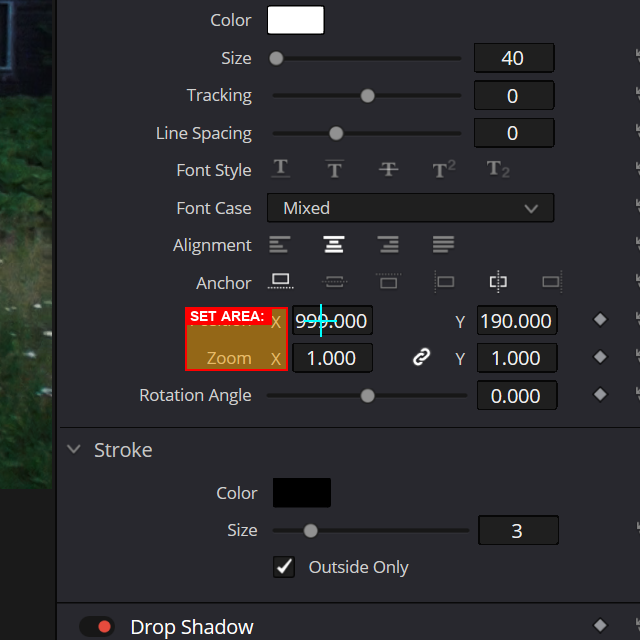

In [52]:
# comment: Automated step generated with pyPeriscope V2 
payload = '''gASVUAsAAAAAAAB9lCiMBGFyZWGUWDALAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBR1lBQUFBL0NBSUFBQUNkUENvS0FBQUlLMGxFUVZSNG5PMmJiVkNUVnhiSFR3TW13aUp2cVdpa1pBbW1DNWd0Q2tYUnRGbzZLQ0pxV3FENEV0Q2dJQXU2dWl2b2dobUJVcGxBcTlZeEZrbURpRmhEWTdVTkRiNENVMEVsMmk1V0M1dUNtaEpJaFJRMFVGNEVraUdaL1JDUTBBVHdZa0IyOXZsTlBwRG5uRG4zemovUHVmYyt6UDk1eGNQREN6QlF3TDNzQ2Z6dmdVbUdEQ1laTXBoa3lHQ1NJVE1aa2hHREU0OGYzeGxBR0U5MENtSnBkSVVXbDUza1R4ejgxdC9YcFdxOFZYUktjSzFKUGQ0eFpqZzYydHYyMmRrQW1Db3hlblFLOG9yUnVZd1dsNTAwLzJIdUo5ODJBZ0J4N21MNmluY1gveGxYZTNyZmdVdHQ1aGdSejBqamU5K05TaGVibzlqTHdIUmo2dnJhNUhLRlhLNm9LdnVLbTNTd1RHbEZDd2h5TmN1QWhPWGU3bE5yQVNVeDJQbkN6M2JUOGNNdWhxUVVGQjZPTlhYTU4yNU1ZK3BsVFQyQkZHdGIvVGNiencvK3NYVzE1eXdyUzlCcE9wcHJTbks1eGZmMVBVV2dodXo1MnhyM21YL0M0MENuZWZxNFNTSTZsRmZlQlF5MmtBbUZHempWb2Z2WW9aNjJPQURtYVNFVFFIV2RzK05FOVdCVVBHWjlyNWhzdHRQVjNSVnpkbTZndTlyaGNUcE5SNk5FY0p4M3ZXVzhjZ0VBS01WNUl1K1BtQkZSUG5mNFArb0hJZ1hITXVaMmxCL2tWNDlUc2xrdVR0YlExOU1KQUFTdk9FN0NNbnpkUlY2ZXBLbUhTRnU5UGl3OEpjUDZ3NzFuWllBUDJMMDMzRVgrRGZmWUhSVUEwYzMvclhtcVIxMkdoUnEreVl5VnhXU3psN1VXYmpiZG1LUFYxME1KNDh5V2xRayt6bTN1c1o3ano5eXlNaTVlSmYzd25BcEJJeU5heFB3THZsbGhVYXpLSC9sU0FNZmdtUGZjdXlxeStGS1QyYU5MaG5kMG9kSFhiMXhGN3BXZXZ0SUFRR1NFTG5OcUxkdWZKWkFCQU1qbE9UVnRGdHhkeTljRmlqZ2xsTGx6ckhwa040cXJGR29Ba0N2a1ZlV29jeCsxdmdZQUFBaHROeklQQ09vQkFFQWgvOVQ1TDludnpYc0w0QVZYUm1WeFR0R0NyUEN0c2JjVEMyWkdoWHQybDJmbG03ckRBRWFTak9pZkpQUWYrTHUvVTM3ejg2UDUxOW9Bd00vREZkZGFjVnMybEttV1hLL2V0TWliNWcwbDN4ZVgxUzFoUmg5Sjk3d2tPbDk2Ny9keGJJQ2oxd2NBZ0c1RlhmMVFXTlhiaHo2S1NaUWlmcEYzUmpncjFkWFJyV3VFbHRSaldyTDIyd003Wm4vSGI3KzJhWWF5Y1RoUXRmdzhMRmVyMVlHTkxSRUFsR0xPenZxZ3lQREFkZi9pTXZ1ZlNNVzVSOC9YZHFQTWUvVDZBQUNnN2tXcWlFQ0xLS2QweVpFMWJ1MDNQeG1oSmZXTXNXTWE2Z1VBL1RvZEVHZk5HNVpyWVlHRDdzNkJ0YVQ3UDFkNGFRbWJZMVB6SlUvZFFwUFNXVzVJc3g2ei9vUkNldWV2citsME9nZlBKVDc0VWRMUTl2dnY2eHAwVHA2THFVTlhDUFJsWGc3cWV1bmRZWG5kRGFXOEF4ZGtPR2RYanorVzZOZHFYN3orUkVCYUc3K0szQ2pPT0NPMVhob2Q1VFB5MHdpYVpLcHo1OHBiblpidlNZNTQyNE5DSWROV3hHUnNXelNqNmRwWEpSb0FXalFuYzIvRVlocUZUS0dRZmRmc2VKZXFhMnFvKzJPSm4rdWIxZUMyWktNdmhVeWhPTmtnMUo5UVpvWEVNNmhQU3ZLRXNrc25Manl3b1VkdDhScEp0T2M1WkJnaTVlL05lTHdyT2lnMmVTMGVwOU4wTk5lY1MrY1d5d0FBbExYM3U5Y3ZqMDFaYXdrQS9iMHR2NVRsOGdycWpTcFVGQWk4a3pldTJKTzVTcWY1NmZUbXcxZWV0LzRFUW1KRU02aWQ1Vm1GTWdCUUZ1ZGNYbmlZd1dKSkVrMXVBc1lQVFA5L0VBTlREa1hPcmpxVWtGMDl1TXU3c1E2bnJvU1MxTVJDNDE5cmFqMjd2QXp3QWR2Q2FKb2ZCQ2VxRFU1RjlRVUZOOXVkQStOTmJWL1lYWVlNZHBjaGcwbUdEQ1laTXBoa3lHQ1NJWU5KaGd3bUdUS1laTWhna2lHRFNZWU1KaGt5bUdUSVlKSWhnMG1HRENZWk1waGt5R0NTSVlOSmhnd21HVEtZWk1oZ2tpR0RTWVlNSmhreXFBWURVekRZUXFhUlhRVUFhb1ViMGkrWm9mNFV3eHlTZlhkaVg4MzBZVVhkUS9kRUxXaTdmOGNNeFNjZUVvUE5ZYzZwNWlZY2tReVpaVWdoS1ZuaDlwVlpKbXdaNW1qTTdsYTlHVzNnMDJ3ZnVOWm5ocnlZSzN3aDErK2tvUlRuaVdxbitVVVlHS1FHN01VbngyMHZSZ0x2RTdObHFVTkRVY2JYeXNGTEJQTFNMWEhyNks1MmVCejA5N2I4Y3FPSWQ3THl1YUlNdG5CVis1bVNHU3NZSGdNTzdZYmJBbDQ1Y1gxMDBCc2t2U1c3UVNJOHhodXFOaTdRN01WbTltUVE2SC9uN3ByZmNuWi9xbWp3RmlNRnAzRTJ1RDY1OWZYWmkxS1Z0VFA5L2NqVkh0UHU1bTgvV0tFZU02cGZKWHQvTFMvODRxcXNoL2dtTXlaMG5pM29kSzEzaFdkRVVwVTFkZVVtcHIvVHc1TTdPQzlzUUh2V2lRVXpFM2pSenJkTXRhUWVzKzZZQkwvdHJFWFRINGh6UkVNdHVTZzgyQk5YOCtYK25BdFZDcm04N3FZZ0sxMnNzSHB6ZFFSMTdDZ0FBS2lydjB6bmxkYko1WXFxODU5ZWxRRU85K2p5eDBmMSthVzhzMVh0QkpmWFRXMCtpQ2hGL0NLWnJUOHJOUzNTcTJ1RWx0UmpSc253OU8yYi9LWS9MTW9wTm1nVDl3VlVXNTNzcHhJREk1SlM5Rzhaekg3ZDEzR3NxQjVGYmNXek8waWoxUUtvR21xR0J0QnFkZUR3Nm12bW1IK0xLS2Ywa1RQVnJVOXlhaHoyNG5GQW9NZXkvQWdQaXZpaVlldUtKYzRDMmg4M0RVdFZhN1VBdHZha3NhSjZ0TnJKZWgxc1F1ekZJMktxSlFFQW9GK25CWWVaenNPVExTd0FPbjlYamhXZFhDYklYandDSmx0U3ovMTdzazRjZFg2Z3dReElJUXVwOE52RHFyYXhvcE1KZ3IzWURKSVI2TEVzUDZ2R2ErSjcwOGtVaXNISHhaNEE4SU5BTE5XOXNURWpmbzB2bVVJaCszNlFuTVp3VmQrN3FIL2xadlRvcERGZ0x5NTRaaTlXdkxxTXhScmhLR0dHYzVtNzExdzdtR1lYbEpnWk5EeWdmeEZPVlhLQS9YUnIzUHRoLzh5SXROUTd0VC9ubmF3Y1dLQkdqMDRPeE1DWUVJK2V5a01GZzd1a1VuanE2c0xVbFN6bWQ2YnN4WmhYRmgrUWZHd2JwWWE3NnpPSjRRL2xGWlBOZnJ2djhrZUpSajU4VERKa3NILytJSU5KaGd3bUdUS1laTWo4RnllV0MzY1doMjl2QUFBQUFFbEZUa1N1UW1DQ5SMDWNsZWFuX3ByZXZpZXeUWDjZAQBpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBb0FBQUFLQUNBSUFBQUNEcjE1MEFBRUFBRWxFUVZSNG5PeWRlWnpkWlhYL1ArZWM1M3Z2TE1sa21ZUUVTQWdCRkpKZ1JGWkZSVlRjc09LQ1ZvcTdZcVZTclZqYUt2MjVvQmJjcWxXTFJVRnRxVmhjS1ZSUkVCUVZLUUt5UkNCUUF3T0JiSVJrc2t4bTV0N3ZjODc1L2ZGODc4d2tKQ0NRWklhWjUxM0xhM0xYaHkrVGUrN1pQaCthcy9ENXhJR0lBUWVCNEtaS1JCTHFBTVZ5VU11bUVMbXB4UWczRUpsRzAyaXhKQkZ6YzFNUWdQUVBJOERNVENNVGhSQUFNbk1IZ1JoRWdEbk1YTjNWVE1rQkJ4eE1URVJ3SkJ6dTdwM3RuUDdZMjlzTFlONjhweUdUeVdReW1YRkI2Smc4bFVqQXdzd2dFSk9iZzFpS21wdFoyZlN5SkxOeWNNdGcvMlpYd0QyRW1rdWhFaHhndUx1NU94RVJ3UzI2S1FOd1lTSWlBY0FNRUlNWThCUndHVENRS0JIZzdnUWlFS1dvV3gyTUFHQW9JR2N5bVV3bU03NEl6Q3dTbUlsRndPeUFzM0FvSkJSd0JKREg2TTFtdjFrNTBLOVFnQW5FekVTa1ZycURPSmhHWWlaaGxHWld1aG1CQUppcXU0T0lHQVIzdU1NQXBCU1hpWmdJN2tRTWtLdTVPNDN1OWNoa01wbE1acmNRTmoxMGZ5Z0tCaHhPUkViczRLS3pxMlBhektLb1NWRmo0ckowY21WeWRTVWlOeWRtdUFuY3lGVkx3SWtBVmJmU1RVMlZpUUJxNWJIbWFrWkF5bmVaQUhjekkzYzRFN3ViVmYrZk1tUVFRT2tWTXBsTUpwTVpqNFMrRFErTE1OemN6Q24xWkxtdGF6cEpZWk1tdHhWRmlwdXBWbXltQkFleEEyNFJjSGQxMVZSQ05sTTNKeUlSZ1R1QjNGTlJ1VlZhYnRXVjNlRm1xZjFyakJSOXphdzZsQThGNERBNlZ5V1R5V1F5bVYxTWFBejJNMkNtcHVxQXBSSjBVZFBZTkRNUXFWc0tqWjZDdEJzTHpOd3RWaE5ZQUFDTFptWndZMklpbUNvQU42c2F1MmtNQ3dEQkRlNE9jNGNUd3hLZUFqQlZNZG9kamh5QU02Tk9zemtBMkwzMzNqUGFCM2swUWlqYTJ0cjIybXNlTTQvMldUS1p6SjlLQ01Jd0F4UEFSR1FPaENCRlVHMjZNTFhWR3MxTlpoRXdFSWdaZ0Z1cEhsVmpxbG9EVmY0TUI5d1ZvRFRabkpKZUF1QU9oMk00a0xzVE13am1YTDJzS3FYbkRGV2RLVTlnWlVhZm5wNWxIUjBkYjNuTFc3cTd1NmRPblRyYXg5a090OTU2YTR6eHh6Lys4WW9WOTgrZE8zKzBqNVBKWlA1VUFnQWlFaFptTm5keU42UkpaZWFpQ0xXaXdXeXQ2RXRNTURUTGhtbzAxeFJkV2JncVlJT3FaQmNPTjNkUHkwVU9OOU9oS3JTYm9ScUVCc2lJaUtoVnJFNDVNZ2prdVFHY0dRdTQrM1hYWGJkNDhlTFJQc2hqOEtwWHZlcG5QN3RpdEUrUnlXUWVCNEZTRGxzdEVabTdBZVFnb3VDQU16dHoydUpsRmlJeXVHcU1HdDJkQ083dXh1NmVucFZ5WGJpbGFXZURwYWhzYWJxS1VoMmFVcFFHM0t6YVFISjNnek1ZdzZYcW5BRm54Z1JqUC9vQ0NDSEVXSTcyS1RLWnpPT0FtUmdBSEVUc0RuY0NHQlRBRW1PTURqQ0RpSmlKR2NTcE8rdWVSckxNekZTMTFjWk5sZVkweHB3eTIrcHRLRVZ3bHJTdGxINW9TWFBBaHJMak5IeEYxV0x3S0YyVFRPYXB4eUdISERMYVI4aGtNbytQUUVRcC9uRkw5b0tZaVFVZ0V2RVVIVk05bVptWjFWMUV6RTBOeE1SYzlYaXJHZWEwOFVzKzFQcE5VeUVPU1hrMjBraTBPd0FpWjNjQXBrb0VGbUZtcmtLdjV3UTRrOGxrTXVPWTBDcEFweittOUpOVEQxZENMYVRlTUJFbzViM21jQllST0RtblVqRVJ1WVBNazZZVlU1cW1zdUVBbkY2OTlVN3VNRk1IQkVNVDBrakxTOHhVaVhNZzdRUm5NcGxNSmpNK0NTbjRWYmt2cFhnS0FIQW5JZ1lLSWdqSEZEbGJhU2t4QzZpcU5oTVRuQmh1VHRXZlBNVmZZbkJhR29hUHJEQ24zV0tNbUxOS0FaaXFCSmlBRko5elR5dVR5V1F5NHhPdXBLbW9WZk90VkoySjNFblZZd3dPSVdaVWJWa0NxYXBwMWZHbGxPOVdjWldJdVRWRFJXQW1Fa2RLZVpQVWhxdDVxbmkzeERhSW1VVWthVnNDbFRkRDliOU1adnNzT3ZYY0M4ODlkZEZvSHlPVHlXU2VPQ0hWalZNQVRxUmVyN0NJZzhwWU5nYmo0SUNXRFMxTGpkRk1xNTFmVDRJYnBxb3AzZ0xneWxIQjRFN01CazhyUm1adWJwVnBFaE1vRFRrN3Q3ckNBSktLRmxFbFlFa0VaRkdCY2Mra0JYLzI1dGU5NUlqNU16dHJERmh6eTlvVmY3ajZncTllTnFaMUx6S1pUR1luRUlncko2STB4a3dFWWE3K2FRNVZqMUdiamJJNUdNdUdhZFJZbWpzSlYzSlZadFV1RVF3Z0kwdVNsVW05TXJXSURXNnQydlZ3M2t4d2c3bTVWNGwxcGR3QnI0UXZrUVB3T0tkKzZNbWZldC9MNXhicjc3NzJ5dis1NmZwN3NOK3puckh3aUVPNndvYlJQbGttazhuc2VnSXpwODNkSWF2QXRCTE1SREFqaDZ1WmFZeGxqR1hTMDZnR214ME9hMmxYSmQwTWQwdkx3TldLTUlqZ2hxRXBMeUpnV0htREtsWG9TbUFMbFZzRGdDb3FaeTJPOFV6OXFQZSs1K1Z6eXo5ODg4elBYYmtxM2JTODU2WnJmalM2cDhwa01wbmRSU0J5UzFsc1M0Q3Ewc0lpSkFHc3FHcWdhR1lhaVJDS0VNdG1DcmhwN2puVms1bmhqbWdhSkJpSWlOMk5xUks0b3ZRVHFubHExNWhDcXdGZ0ltRlZoYU0xd0dVQXlMTWIwbmltKzRSWEhERmwwKysrL0tWVzlIMGtuUWUvL3JSM3YvS2dXZTBCMXR5NDh2YWZuZi9WUys1dWJ1K1J0WDFlK05aVFQzcjJ2bE5xakRpdzVwN2YvUENDYi81NkRRQmcwYW5uL3NPc0swNjVXRDd3MTY5ZE9MUEdTNy96MXJNdTIwWC9UcGxNSnZNNENLM2RJbWRpaHptU0tBZTVxYXZHc216Slk0RllZSldTTTFvQ1d0V3dOTE9ybVptd1lNaE0wTW5NaUhsWWFSSmdTYm9mQ3NEZG1jbmNUYlhxQTFzeWFnQU5hVWxueGlsSEhiUXY5OTMwdSt1MkcxQUIxQTQ5OVJObkhGTXMvY25YdjM3ZHl2N3VoYTk2NDJ2ZitKR1BkWDc4SDcrOWJOdUg3bm5DR1dlZFBPL2g2Mzd3aGYrNWMxM0hYa2UvN3VSWG52cng3dUp2UG5kMTllS2R6enJqNy9lMGF5LzgwaldyWW0zMUx2eVh5bVF5bVQrZE1OUjRKUjVPTjVQZEw3bkhHS3VJQ3pDenVucXJPdHpLZmx0clEwVE1URXhhU1dKVitoMk1TamtMUUd2V3VwcTNicmtUdXJsVEpXdnB3enZKbWZITWdYTm1NdGF1dW50SDkzZS84c1JqWnE2NTZ1T2Z2T2hlQU9oWi91VS85TXFYVDN2Sm43L28rMmYvb3JIVlF3OTd3eXNQNGlYLy92KytuRzVmM25OSGo1N3ptZGY4MlJzUHVQby9VN0RlWnovNTdvZk92bVNIcVhZbWs4bU1BdHh5QVBRcTdIbVZEY09kUVJZanpBbGdKbUxCc01sUkNzQkVuTlNyMGc0U3VidWxUYU1xYjA3aHUzSktBcUNtWmdvNEViaTFFMHlWbWtmYUtnWXhqZncya0ptSUhIWGdmRjY3OVBwN2gyOXAvTzVYUzNycit5MDhiSnRITGx4OHdCUmJkdXZJcUx6bWtodnV3WjVQTzd5NytuUGZyVmZtNkp2SlpNWWFsWktrSngycnlsekJBQ2QzMHhqTHBta2tvcFo2TTdsN2pGRlYwNFJ6YWdaclpVWklMVWNqTnpkaUltRml0R3lEM1QzOTAwRE93aVJFVEJLa0tJcTBDU3pDSVVob01kb1hKN1BydUh2MU9tRG1uZ2Z1NlA3QWpIV3I3OXpxdHFpR1NWMHp0bjJrQ0hyWFByalZiUTFWWVBMVXZWdC9IT2piR1dmT1pES1puVW1TdnlEbTVNcFFOV3ZkbklpUnBKMlRSVU1sTWVtZWxEVGNpY2pNeWxpcUdwRG1vV0ZWdHpnNU53QndOWVdidTZsRk15VnlGZ2JCeVNxNWpaWU1TQ3NQSG1vemorNlZ5ZXhhbHR5M0VwTU9PdnpJSGR3ZHpkQTllK0ZXdHdWaDlHMTZlTnRIcW1MYXpEbGIzVllYQVRadldMSHpqcHZKWkRJN0cyN1pGdkdRS2pPSXFxSXpjd2dCVlhGNHFKWHJhZTBvT1NDcG1xcWF1M2t5QlI0S25BNTNzK2ltR0JwbkpnZUJoSWpoY0djTXJTSTVqSmpkazd1U0pvZWwwYnNzbVYzT2ZULys5ZEpHMTdQZi9KZEhUdHJlM2IrN3U4ZG1MbmoyZnNPMzFJOTZ3ZUpwalh2di9QMDJqN3h6eWJLTmZNQWhMNm9QM3pUcnRVZnVqMVYvdkduZExqaDNKcFBKN0NSQ2F1T21TSnFHb1VTRWlJbUZtSXVpUnN5dEVuV2F4aUpoTm5mVm1DUW96VDBsenVSVk85Zk1HQVM0cWJtYk1DV1RCVSt0WDA1bVNWN2x1Nm42bmQ3RktuZUdOSXlOb2piYTF5ZXp5MWgzK2Rjdk91aGpiMy9lQjc2MC95M1gvdUovYjFpNkFuc3RQSENmdWZ2TExaLzdyOSt0dStTNzF6enZROGQ5NENPTjcvem91cFg5SGZ1LzdPMG5IVFY1NVUrL3Q4MEVGb0RmWDNUcG5jOTY2eHMvOWY3YWQvL256blhvUHV6Tjd6aGhmdVBXODcvN2lISHBUQ2FUR1VPRWxMVW1TU3QzWnhFT2daaWRxVlF0VGF1a3RsVjJGbUdOTUZPZ21ueE9ZMWxNNUE1aFNnOWpJak1yaWdJZ1V4M1dpaFpKSmd5aEtNd0JjMkpuSWlMV01nSXR0OEtzQlQwQldIWGxGLzdtcnVlLzZWMG5QUGVGZjNIWXl4aEFIT2hidC9vM3R3QUFsbno5dzJldGZlKzdYMzdLUDc2cXh0YmN1UEwyNzU3MTFVdTJGMVRYWGY3cE0vdmVjdXFKci92QU9TY0h4SUUxOTF6MTFRdSsrZXNkTFRobE1wbk1tSUNtZCsrWktyN3VydVljUWx0blYvdTBtWjFUWjBxOXZhTzlZM0REZW12ME4vczNOd2UyeE5oMDAyWmpVRlhUckxLbURTS2tvclNLaUpsUlMxRUQ1QUJWWXRHcHk4eHdPREZMRVlncExTV2x3V2N0bzhZNEhIb2RrK3FTVHRuYjJ3dGczcnluamRabHlreFk3cnByeVZQQ20vcXNzODc2K01jL2Z0QkJpMGY3SUpsTTVrOGxFRkcxa1pza0tKT1hyNWtESUZZekVDUE5aN1drc3BJVUpUT0Q0S2JFWEdYSUJsUlNsZ1N2UnFUTnpOMVNqOWtOYm1ad0VqTTRpN0RJa0Z0RDYwaFYrVG1UeVdReW1YRk1TSDZBRHBpcHc5MVVOYXFwRVlGSlZabkZuQUJLVFY0ell5Sm1Cck9aQ1RHQlVudVlBSXVSUlNvVkRuTVFZaXpOcktnVnFtcG85WXFOdk5sa2thSldFeFlpd0x6MVJRQ09xaFVNNUUya1RDYVR5WXhQUXNzREFjeGlya21uaXBoSkNtSnByUVM1VjRZS1Nmd3FOWHhSNlRZTEEwaWVTQzFUWHpBTHlNeU1XSmpJekUxVnpZYldrd0JvVktCSlJVMlloNVFuV3g1S28zRXhNcGxNSnBQWlhRU3EzQWdCcENwMHRSbE1MQ0FHZ1ZpQTRkRExsTUt0SW0wc0VibWF1Wm5ia0NTV21iY2tzNGpBek95dzZ1a3NSSENrZFdKejlZZ1NJVEJ4ZW9NVTZhbktnRE9aVENhVEdaKzBhcnhVV1FDbWVKd3lYZ2RJQWlTa241TkVKSE13TGQwOFJWc0dsYXBtT2lRZTZaWHByMXUxVkV6TTVBNG1ZWExtQUhKemM3TlVjbmIxVXB2TUVrSmdwcFQ4MHBCRVppYVQrUk80OWRaYlIvc0ltVXptOGNHdHVNc3A0Rm0xaWdzek5ZZUVrRHJFaEpTOEpwbG1TbEpaVEVRZ1YzTno0VFJPbFJRNGh1WkdLZTBQcCszaElJR0pZQTV6QmpISTFUWEdXTWF5MlN3YkRZMWFDVzNsTW5SbXpMQmt5WkxSUHNKakUyTU1vUmp0VTJReW1jZkJjQWFjQXFkVlRrVXR5OTYwSUd5V1FxKzdxMnBxOTZiT3NBTXN6R0FrWTJGTGdsWlY3b3RxS0Jwb2xiZGIzc05HQUtQeUhxeWt0ZFFpeXFxT3plenNDRHc2VnlXVEdjRmhoeDMya3BlODVNQURENXc2ZGVwb24yVTczSHJyclRIR0gvLzR4NU1tVFI3dHMyUXltY2RCNmdGWDIwY09aK1pLVzhPTjRHN3Fwa2krUnFtMGJKVklwTFY4Z3BuWUFGVXpzNVlyMHREcko3ZGdtRlozVlpaSHlReVkySWNFUG9pOGNvS3c2bkdXQTNCbTlObGpqNzAyYmx6LzA1Lys5S2MvL2Vsb24yV0hoRkIwZGs3ZWE2OTVvMzJRVENiek9BaXRJZWdxb1ExQlNEZ0pQcE1iTkxyR0ZCbmRqSWljWUc1b21TWXhzeE9acWJ1TENBak1ZckNVMjVxN01CRXgwQnJhQXBqSm5aSWZNSVBWRFVOT0RBQ0dxdGZJV3RDWjBXZjY5Qm5UcDIvcndKVEpaREpQbnRBcUpJOE1nVWJNUkdBM01pTkxQZ3ZxN21CcVNXb1lXbjRMWnFabUVrU0t3dDFhenI4RU9CT2hHcUdtWWFubktqOG1JYTVrTHBOcVZrcU1BWXlNd3BsTUpwUEpqRWVHbFM3TW5RaW1VVFdtM204YXVISlh0d2dBQkZkVmkxSFYzWUlJUU9aT1RHa0NTelc2VlVrc0p4L0RWS2sycTZyWHBtYk9RbFhNVDl2RFNZcmFEVXdBT1ZYVjdsRzZJSmxNSnBQSjdBNENLdkZsaDNzU3QzS3oxdXh5bW1wT1kxTSszQkpPam9UVnRoSXExU3FDYTZ1RTdIQ3VQSDB0UFpjb3ZRaUdtc2xVOVpRQlZMZmJzQWR3eTVBaGs4bGtNcG54U1VqaDBDc1JERzlKY1RnUklpQlZkTFdrZXVVd1NyN29SSjU2dDBudnlsVW9wS2UzeHFFZFRPYm1NQ1FSeTVZd1J5dmtvd3JiTFpXdHFnbzlyQW1TQTNBbWs4bGt4aTBCS1k5dDJmQldDOEZFVHR4YVRqS2tkQlZlVFV0eDJqRVNKM2N6WmlJSTRNeGtxVDNzU1VyRDA1UldLK0syM21uckUxQ0t5WTZrd2RFU3BNejVieWFUeVdUR004RmIvcnZWVWk4VHRYSlZJaVJWREtMVXl0WEtCaGlWMlJFUkdSTTVnOUxjc3pPemcxTFp1UnJGU3EvakJzZFE1NWVZVVQzQ1c3dEpUdURLYmlrSmNZM2lWY2xrTXBsTVpoZkRxZjdzVlNzWHFDU3hDTXhBbFJrVGtidVphUnArcnZMaVZESW1JcVprVUpqdVlpYW1sdDlDTlE1TlNjelMwKzRSQ1pDY2dXbm8zaFJ3V3pQVGxHV3dNcGxNSmpPK0NWWnBNaE5WSTFjK2JBRGNtb1FpWWplcnhxK0luSkFNQTUzSjNabElUVTJWMGd6WFVQcGFqV05abW5iMm9kamEyaktxakkrR2Y4YXdBRFJsS2NwTUpqT3g2T201ZTdTUHNGdVpQLy9BMFQ3Q0tCTlNyN1VsWU9WbW5sTGFKTDRCZHdLWWFLdmRYL2ZXRDNCM1RVNkRibHdKV0xrUWdWSS8yQjJXWHAxR3pEYW4wT29ZYXZwU3JqbG5NcG5NN05telIvc0l1NG5WcTFlUDloRkdINlpLb0tweVdhaHViZ2xDcDBIbHRIRlVZWmJTWEdxbHlLWm1aaWxqVG9IV3FrcDFTblpIeE4wVXlOT3lNTFhlWjlqMUtJZmdUQ2FUbVNoTXRJei9rWEJsUUZpVmhvbFQ4ZGxhMmVuUU1ITExiTkRNekF4cEZqcmRCRlFLMHRWR0VUc3E4ZWZLaWNFeEZMOWIwZFpHcnZrT0tWRzNiSVNIL3BmSlpES1p6UGdrVUpvOGJzVTdJaVlIM05DcU02ZndtWUoweTVDaFNtZEI3SzRpQWlJejVhR3lzNlY5SmpBVE9WY09nMjRPRHlFSWk2cXF4alRCVllseUFDQWZidnptWkRpVHlXUXk0NXFBU3FqWnFtSnpWUkltTjZYaHpkMUtvOHJjS2tGbk02ZldCTFNJdTJsS2Zva2hjQnFxT3pzeENjVGRrME5EbW5OT3E4T0dJZk1GVDJ2RHcxOEV2QnJYeW1ReW1VeG12T0FkSFIzdU5qallkSGRPOGRXMkt2a3lNUThQSWxkdVJkV0tVR3NDcS9YUUlFUlExUlNPbVpsSUtqMnNJYzByUnpKbUdKckVJaUlTWm1ZV0ZtRVdyaFM0Z0tIZHBPUjFtTWxrTXBuTStFQlZqenJxc0lNUFhsaXJGVWhLV09abVBtSnNpaGtrSkFIRVRHUndha1ZGcmdRMGtJclJ4TVJNWmJOTUFsb0F1UXVxNFdkdnhWRnZCVjJrRjNNM01JT1NkYUhBM1N6QzRaWnExUUR5SG5CbUxKSkdFRldqV1ZsTkdoSXhpMGhCSkNLY2V5ZVpUR1pIcENIbTd1N3BLWkoyZG5ad0pYbVZRaDRSc1JBeHMzQ29TUWdjV25aSjZWWUpJcEpFT1ZRMXhoaGpyTlNpVFdPTXB0RTBtaHRhVmV2VzFIT3JKQTJZVlIzbEtsOFdGaEZoRGlFVVJTaUtFSVJaaUhqMHJsTm1qTFA0clo4Ly82dzNIN0JiMzFOVnk3SVI0MkJIUjIzZmZlY2Rjc2d6RHozMFdRc1hMcGc1czV2SVlod3N5ekk3aUdUR09wM0huZk96bTIrNzdiWUwzN1BWemQzUGYvKzVsLzd5aHB0dnUrMjJtMi80NWFYbnZ2LzUzYU4wd1BGTit1SnVaclZhT09TUWc0TlRaVlhVU2xVWkJDa0txUlVjQ29vUktTNFBUVWNUcFMxaE0yMVpLQkFST1pLSUpYdlZIVVlWZU0xYjdrbHdjNktVNjVxYmc0Mk1SVmlZblF3QW5HQXQwZWxSdlV5WnNjQ2V4N3psMUJPZnYvK3N0Z0JZYzh1R2gzcCs5Nk1ML3VPNjlaZyt2YnR6NnBUcHUrOGtxcXJhRElIbXpkdC80Y0tGTTJiTWFHOXZaK1ptczdscDA2Ymx5NWZmZmZmZDY5YjF4dWdoMVBMNFFtYXMwdm5xcy8vZnk2WTBCdEd4MWEzSG5YUFJaNC9mbzMvNUxWZjg5TmFWN1FlOTlDWFBlZGVYTHRyejcwLzg4RlZiUnV1azR4ZDNMNHB3eUNHTDU4elpPeVM3d2RSd1RSR1ltRmlFUlloYnN0Q2N1c0l3VTdoenlwalJHck1pUnRVeFpwQ1FPOGhTQTVuY1d2NUdJOWFSQUZNRHBXRnBkV2VYU29MYUhkWElORHdYOHlZNDlhUC8rdVB2UFR6Yy83dkxMN2orZjFmVkZ4NzR0QU9PT0tBanJnZUFhLzdsSGRmc3ZwTzRXNHErejNqR000NDQ0b2g2dlQ2a3ZkcmUzdDdXMWpaOSt2U1pNMmZlY01PTnExZXZVWTBpSWNmZ3pCamtnUGY4MjRlT0xhLzYwUjlmOExvalI5eDgrT252ZjltZTVlMWZmL3ViemwwR0FQakt2NzcxL0IvLzdmR25uL0hEcTg2NmFYU09PbzV4OTFtelpybjdBdzg4R09CUXRiVExtOVo0VTZicnJYNVg2c2d5VTBzUjJ0Q2FseHB5YlVnejBTQmlFaUpYdGVTRFJDUnBBNGtxZldkcUZhTXR0WkFCdUpxNU83ZFdoYzFid2gyNW1qZWhlZDR4ejV6U2Q5T1gvK0hmcmdNQTlOeHhQWDQwT2ljeE0zZmRkOThEampqaWlQYjI5bTN1SmFLaUtPYk1tZE5vTkFZR2ZyZGh3eVlpRWduYmZhbE1adFE0NExTejNubnd4c3YvL3F6VmI3MXU1TzJMWDM3a1BObDB6ZmVxNkFzQTZ5Nzgycy9lZU9Ucm5uZmlzYmpwbXQxOXpnbEFDcThoaE1BaURIY2pOMWMxaHdJdzB6Z3c0RVZCWlptbXROeVI1cFVCVGJ2QXpFVEVEb2ZUc05zZ2dTVUFta1E5ekkyZDNkd0JZaUtxd3F3NUFTWlZWaDFkRlViTXpCS2NLNld0UEFXZFFka2MzTzd0aTA4NTk4eEZmemo3OVBPV1lQR3BYenp6MkszYlZVc3ZQdW1zeXdIVTkzbitPMDc5ODZQM25WTGpPTERtcnArY2YrNFBibjhpRlRYVjJOblpzV0RCZ25xOXZxUEhpTWlzV2JQbXpwM1QxM2RYU29LZndCdGxNcnVLenVQTytkZDNMVmgrMFo5LytLb3Q3M25yVm5jOTUrbnpnTnZ1dkhTckcyKzZkZG1tMXgxN3dHRnpjYzBEdS9PY0U0QVlZNlBSQURCdDJ0UUF3TTFkemN5SDFvMU1TNHROdUFVM2dFelZ6Wmk0MmlOQ21ycEtxMFlBVXFUMGxob2wwZyttQ2xnbGNlV3cxcDV4UzdHU0FiZ2JRTUpWeFp1WjNSbFFNMDBQeUV4WXJyMXg2WnNQT2ZydHAvOXg0L20vdktkdmh3OWJjdDdwSjUxWC9Wdy85SlRQblhIRXVsdCtEd0I3SHYraHMwN2E5K0ZmLytjL1hibXN2L3V3TjcvamRXZCtwUE9qSC9xUFpUdDhxUjFoVnM2WXNkZU1HVE9HS3MrUGhJamEyOXRuenB6WjAzTmZiMjl2czlsNDNHK1RHWThRVVZHMEZVVnRWRS9SZWR6SC91SDRLYmQvOWEvLytaRy8vcytkc3dmdzBJcHRSU0VmM3JRRm1EcGpmeUFINEoySWlGeDIyZVd0OUpLQ0o1OWZjMU1ETVpOVVhvUHVyZ3FBQURVMXQ2bzZYVWxLT3FQeUt4eXlUZ0ljTUxkb3J1N21IZ0g0a09xa01RaE9NRE5tY2lqQWJzNkJReEdJS1JXM2grU24wN1JZWnNMU3VQcGZQOTMxZ2I4NThSMy9kTmpySDF4Nnl6VS8rY0hQYjkzd2FHR3R2dmlVZHgwemVlbTN6N3BzRFlBajMzRDhBdjdETi8vZkJUOXZBRmplODltT2ZjOTl6NHRlLzRMLytQU3ZIdTlKekt5cnErdVJ4ZWR0Q0NGTW1qU3ByYTBPZUE3QW1ZUzdsMld6bzJOeVVleXdmTEtyT2VBOS8vYkpsMDI2L2pOLzliWHRmZnNzZ216dlNiOTk4Q0hnNE5uN0E5ZnMydE5OSUZLZnR0a3NBVXliTmdWQTJnTXFDRUlRcGdBbmdGbHE0RUFpeEZJNU1TUXJwTXFPUWVGSUlsakVERW9kWWdBR3FGbEQ0NkRxb0ZkaDJGcld3SjRTWTBzQlAybGFNam1nN3RGTTNVdlZhR3B3aUVodGRMOHpaa2FkNXQyWGZQYTlwMzcwWHkrNVpjdnNaNS84b1gvNTZtZE9QblNISDJLMUY1OSsydlBERGVkLzlzcDFBSERnSVFkMDRkNDdyaHlLZzQzZi90OERxTysxMzhJbmRKU2tkdjdvajBtYmRYbjhLak1TSWpKVDFUaHFKempnUFI5OSs4RWJMLy9JQjcveitQc3Z1Wld5a3lGbURxRUlJU3hZY09BUlJ4d2FDTVRFZ1FNNGJRTnpLaEV6czlScUVxT2lrcldxV3J6TVVSVkFhdzRMN3VZa2xYY0RBQ0lXU2R0SnJiVkl3dkJXYjVxYXJ1eVdpSW1GaWNsTUhTNVNwQ1VseW9vR21VVGZmZGYrOElKcmYzamhQaS84eXpQZS9mTDN2WC81T3o1MzdTTWYxWDM4QjkrOHVPK2F6My85dWlyaUJoWmd3VWtYWDN6U1ZvOWI5MFErVUlpbzBXZzBtODFIVDRMTnJORm9WSnZ4bVF3QXdOMURDQ0VVby9UK3gzN3lYOTl6OE5vZi9lV09GNHJXYnhrQUh2bUx2WVBLZE9iSmtYWjBZOVRObS92MjJXZHVHTElGZERNU0RpRXdzOVRyQ01IZzBhTERLcXVrU3ZxSFdjVGhhazQwWktEZ1NiNFpVQUtJdkhKWmFEbitwbDJrSlBZaFRGWjlRamt6aXpDbExhUnF3eGhNUE9SZ21Na0FBSnJMZi9tdlZ4MXo0Y243SHJRWTF5N1o1czQ5ai8vck54eTArZGRmK05iTnpkWk4wUlQ5dDEzMHlZdVhidlhJdUdubDQzOXZabG0zYnQybVRadmEydHAybE9DNmU2UFI2TzN0SFJnWUVKRlJyRGRteGhoVXI3Y1BmUjd1Ym81OTJiUDNGTUVidm5IYkc3YTU1NW52dmUyMjkrSzJyejd6cmF2V0tRN2QrOEJ0YXMwenVqcUIzaTNyZDk5Wkp4QkU5T0NES3hZdFdoQzhzdW0xcUpFUkNoRm01cUtnSUJyTE1rWTJJMklDdENWbHhTeG1hdWJDS1d5MnhxQVpiZ3FBQ0dwRDFndVV4ckNTRW5UNmYxZDN0N1RObEdhN1dJclVBSzZja1ZCOVR4alZxNVFaVTh5YTNBa005bTk2eE8ydi9hdlhIcmoreW8rZXQyUkUzL1h1VzVkdGV0R2lwKzI1OG9ycm5uUTNWcVRZc0dIajh1WExwMDJiVnR0Qlo4VE1ObXpZc0hyMTZoaXRvNk9yVm10N3N1K2FHUmU0dTZxcTZ1aTgvVDFYWFhUQnlzbmIzUGowbDUxeXpOd0hmbjNCRmYrSEZUY0JEOTErei9zUG5iL3cxY0NJUWVqRER6bWdDNXR1L3NPMlgzWXpPd0Vpb3Q3ZURTdFhyZ3J1QUZNSXdkUHdjU3pOdE96ZlRLSGdvcWkxdFduWlNNR1NtWm5ZekpwbGcwVnFSWTFRR2Z1bVRlRmtxZVRtSUREUmtLVXdWY1lNVlgwNkRVTzd3eWxOYmJtcndZeEZrcGR3NVhqb1BscFZtOHdZNE1DM2YrcnRlejk0eTYyM0w3bHpSWC9IM2d1T2ZPRXJYN0xQd0IwWC91eStyUjkzd050T2Y4Tzg1ZC8vMEhlMm1TKzU0ZnVYTDMzV1NlLzk0dC9QLzg1bDE2M29SL2QrenpuOHlIa2JMejNudng1M1VZMUlZbXpjZGRmZE0yZk8zSHZ2dlVQWVNtY2p6VFZzMnJTcHA2ZG4xYXJWcWc1WVdqUElaRWFaQjY3Kzk2OWN2ZTJON3puaWxHUG1yci85SzEvNVd2cno5MzU3MTV2ZThldy9QKzJBUzF1cndKMG52L3ZsYzlCNzlSV1hidnZjek02QWlJbmtsbHR1QzFWaGhDRENTRjNnbEtVeXM0VEE3c3pNa2lyVmFjakVrK3lrVjdvZEJISUhXbG9jUkxDa2xzWGNzaklrakFpcmdITnlUQUxnU044TmlkbGNpU3VEd3FwYXc3a1JQR0ZaKzhCcUhIbkVTeGNkKzJjTXdKb2JWOTcrazMvK3I0dHUzS1lrdHVpNEkvZmlPdDc0eFF2Zk9IVGJ1bCtmZmRvRlMxWmRmdGFaRzk5NTZtdU9PL1hNVnlVcHk3VTl2Lzd1Mmlkd0ZCRXhDK3ZYOTk1d3c0M1BmR1pqanozMjZPam9TR0ZZVlp2TjVvWU5HM3A2ZXU2NjYrNUdvd3loeHJ6ZHNkSk1abXp5d0w5ODduc3ZPTzh2M3ZYdi83UHc1MWZldFg3NlFTOTl5WFAycVcrKzlpc2Z1WHkwanpaT1NWTldtemYzMFpTWmM5Mjg4aUVpRHJWNlc5ZTB0dW16YWwzVFJLUmR0ZHk0dmh6b0cranZpNDJHYWRsc0RBNDJCaVNFNU9IQVF4S1RBQUFoMGhocE9QMGRkaGh1Q1YxWkdzbHl1SmtTVXhLNVRMM3BxdGxjYVZkU1oycyt2cmUzRjhDOGVVOGJoVXVWeVZTRnhOSmRwMHpwbWp0M3pvd1pNeVpQbnN6TXFlKzdhdFhxMWF0WE54cWxTSkhuUmpOUG1KNmV1MmZQbnIzTDMrWTlGOTcyM21mZTl0Vm52dlZydzdkMUxucm5KODkreS9QbVRxOEx5djRWUzMvMnpiUE8rc0hqMzVsL0hLeGV2UnJBL1BrSDdzbzNHYnU0ZTR5UnB1MjV2Mm1aMGxBcGlsQnZiNXN5bzZON3o5RGVTVzVGWTdEYzFCc2IvZjFiTnNYR29KdXBsbzFtZzRuY1BTWEVyWUFKSm9KNUxFdGh0bGJDMjdKcThLUndhYVpFNE1EdVhtb0pRSUlNVFNpTW1GTWdFS2EyVjQyMEhJQXpvNDY3eDFpNmF3amMwZEZlcjllSktNYlkzei9RYUpUdUVBazUrbWFlRExzcEFJOE5KbmdBQnVCdVljb2VlMmxzdWtWM0p3bWgxbEh2Nmc1dDdXQXFwRmFZR1hOVGt5Y1NtMGRURldhcWlzTkRyYkRrN3NzT3ErclZ3MVBNYnNrZ3VEVUZiVzVXUnFkVXRRYlVRWVp0L1JleUdVTm1iRUZFSVJSbXJCbzNiTmk0alIrd1ZFS3RtVXdtOHlkQnhHRlM5eDdKK29pSUhXVGdXbHNIU0VCY0NOZEFWbThiNkFNQVpsYTR1UkVUYzVwWXJueVJBS2lxbVRNeGk4Q05XYWhsbHdRNHR3ckx6R3dPZHlVZ0ZaK3JRTzBqWTNZNjNXNitHcG5NWTVCY0ZrUkNVZVFoNTB3bTgyUUpJbHl2MSt2MWVnaEJ6WnZOU0E0ekJhTlVEYWFFMWdnVldsSFVxNFl1dkdyZkFqQTFnd2NScE93MURVSzdteHNSZXlVczZjbGEyQ3JkeXVxVnE3ZEFHdEdxWEpEeUhuQW1rOGxreGpGaDg4T3JONE9LZXAxRFllcXVCaExpd0VWaEdnZmR2VGxvcG01cUZ0MmRtYzNVb3FjcEtpWmlZb0RVbk9BUkRuTm1RcExCYW5XQm5ZaXFqU1FpWWlaMk4wM3V3bW15V2cxZTViekRaZTFNSnBQSlpNWXBvYS8zWVdJbVlnQnVUaXhFQW5maVlHNDFJbUhTV0ZaU2xFbDNBMGdDbEFBQXFoeC9LeE1rWUVoWEt6Mmx0VzRFdE15R1Izajlwa2VDR0VRK3ZEbWNyWUF6bWN4RWhEbVlUUlFCb29rOGdaVUk1ZUFXcitRazRRNld3Q1JtUnN3RU1wWVFRaFZEVStUMFN2Y0tRT1d5a0FJd0NPU3RXNGFpcUEvNUYvcHdlVG10TFZVdjEzcWxyZWFmS1JlZ001bk14R1BseWdkSCt3aVozVWR3TTlYazljdlZmcTZidTFGcnh0UGRtWVZBYVV3NTFaVDlFY21xdzhrcnk5L2grSnRTWWpkdlRWa0JuamFIelEzdTFDbzdwM0wxVU5HWlFMa0FuY2xrSmhRcEkrenBHZjhPQ0RuM1RZU2kxaGJjbUFOTElhRUd3S0syMW5kSlJFVEU0YVVyczdncEVRT0dsdGRSSlllVi9wQ1VvVkhaQ2FkbHBOYXdWUldRaDJlcld2ZVllZVdVbEVRdFc0L05BVGlUeVV4QWNuQ2FPQVJtSmlvQUNxRVFab0JRaUx1blZkOHF4cm9pVFRFbnBVbHpJcktxdWx6bHFqUWNhZUd0SXZUUVJIUExZNkY2dUtVa0c2MFM5WENIZURnUHppWG9UQ2FUeVl4amdyc1JrbkF6TVRIU09CV1J4dElkcWpGcGJsUmVoQmp4RDl0S0xHUGs3bEJyeUtveVFXcmRUL0NXTDNCYUQ2N211WVo4R3FoMVg5V1R6bVF5bVV4bXZCS3NMTUhHVWpBZ1JPNnVNWnBxbzlIUExLYVJXRmg0eE9oeU5RVHRJK2Fudk1wZGZiaDBUTWtnZUdRYzlhSCtNSUZheFdZQVEvM2w0YXczcDcrWlRDYVRHZCtFbEl6V2FtMzFlaHVCQnB2OXpjRit3TW5kTkxvN3dkM00zZEFhYUdiaU1zWktpNE9vMWVzRk1GSStvM0pVYUhWL3EvaHFab0F6RTRFcjVZMlVKVk1yNkE3RjdCeUVNNWxNSmpOK0NXWkc1QVNZUmdLbmVuTXNHMlpleVc2Z0NwQXB1VTJXZzB3RUlMcHpxKzFiRlkySGpZOWFvWG40dlVaRTF1SFI2ZUg3ZmJoZXZkWERNNWxNSnBNWmZ3UTNBNW5HV0RwVjRwR21zVXB3NGU3c1RreXRHRnd0Q0lrRWo1R3JqbTZpbXFSQzVZL2tBTFZXaG4wb2VNTXBMVG9ONjNOUTZ5azU0bVl5bVV4bXdoRGMzTm5MWnNORW1kbmR5cktwcHEwMVhqTno4aW9BTTNNYWpBN0M3cUpSYWFUeVJocWtxaWFxQUd6VktrNXl6MVNKWVJtR1JxMWFpWElldk1wa01oTVpkNy92dnY4YjdWUHNKdksyRllCUWxrMHo1NmdpWW1iTXBLcG1sc1N0Vk1GTXpGV215NmxaNjg3TUdyVzFwMlFPVDVhREJFTnJ1SXJnSTN2QUdCNkhCaEV4Q0p6MmtSdzhOSkNWRzcrWlRHYUNNbkdpTDRDZW5ydHpEQTVFckJxOXBSV3BNU2xnQ1dCbWxyU3N6TjNOSEo2Q3NhWm83WmJXZ2xzeTBTbEpKaDhTNlFEUUdzOUtUc0JJZ2xsVjJrdU9JWi9nb2NDYmsrQk1Kak54bVQxNzltZ2ZZVGV4ZXZYcTBUN0M2TU5TQkE2aDJpQmlkZ0RFek13c3pNTE14RHhrNndzQVJHQ3lvWm5sMUI2dW5NbVpoSW1wbXIvYWFwNlpXbG9jNldrWUZxZHNDVTIzSHRxSzJKeURjU2FUeVl4YkpvTG81cU1UUkVRWWx1SXZrZFFLQXR6TUhjeUN5b09CcS9JekFVQzlyUzJXMFYzQkpNS3FsUnNTaXdCa2FzTUMwVU1LRzlTcVJQdXdTSmEzN0lHVDdDVUFNeDlxQitlV2NDYVR5V1RHTWNITlZaV0lSWWpJVGEyeVNTQllFc2xpYXBrcEpQVXFCb3dFNURDem1FUWxxL0JwUkszdFhtQllIV3RJOGdyQXlHNHZWWXJUS2Q5MWQrS1VPQTl2UFdVeW1Vd21NeTRKclI4c0NWbVo2UWhKREcvSlZkbXdYak5ETlJJeGFOaC9zQXFpeE80MnZJOEV0R3JNUGp5SVZVWFdJZHNGZU92TmgyclBSRlZrM2szWElKUEpaREtaM1lGM2RIUzQyK0JnMDkwWnJhaG9wdTdLbkhxMU5xU3Q0V1pwS0xxS3dRNVRxMGFyV29EU3BQU3dZQ1VOWmJkRDlneVYvZSt3OUVZbFlPbG1ibTQrNUlHVUo2RXptVXdtTS81UTFhT09PdXpnZ3hmV2FnV0FZU1dOS2xpNm1hbHFWRlZWTlZXelZKRW1aaWFRbXhPeG02WGNscGpCR0pLbHBLR0pxcUd4NWlGcjM2RXRwQ3BNdDRJeVFNUlVqWDJsV0Y3OWFmZGRsY3pZNHZpUFhYemh4MDdZemgzZHgvL3RWNy82dmhmWGQvdUpNdHRETlRhYmd6RU9pbGhuWnpGbFNudFhWMXRibTVnMW1zMkJzbXdPUzlObU1oTWVkemV6N3U3cFhWMlRBWFIyZGdRVzhhckg2MmJxWmdSUGE3b1lJYStSMGx3M0IwRkUzSnlKcWkxZUJ4SE1uWWVTM3lwWDl0WjZFaE9vNVZ6b3JiVWxBTWtjYVVpOTBsdlBKc3BEV0dPVHhhZWNlK1l4M2R1Lzc2N3ZuSFQyWmJ2NC9TZFBuejYxYTNES0pLQ3hpOThwODFpb1JyTllyNGZaczJmTm5qMTcyclJwOVhyZHpQcjYrdGF1WGZ2Z2d5czJidHlrQ3BFaXQ1UEdITjNQZi84bnpuanRFWE9uMTBVYjZ4KzQ4WkxQZi9UTHYxazMycWVhQUpoWittZXRGaFl2UGppWVdiVWxOTng4YlVWU3Jxckg2YzdXejVSV2xZamdhdTdtYmltZ0dvekFSTU15MEVPTjM1WWRBMW9ONEtGQzgxWjVjV3RGZU1RS1UyWk1jZmNQUHYzaEs2dkJnZWU4NDV3VGNObUh2L1cvMVgyRGEzZjkrOS8zN1g4OCtkdTcvbTB5ajRXWnFwYWRuZTBISFhUZy9QbnpwMDZkV3F2VlJNVGRZNHh6NTg2ZE0yZk9iYmN0V2JWcXRUdUtvamJhNTgyTW9QTzRjeTc2N1BGNzlDKy81WXFmM3JxeS9hQ1h2dVE1Ny9yU1JYdisvWWtmdm1yTGFKOXRBdUR1UlJFT09XVHhuRGw3QnpNRkFCQXprYkJHSGRMT0FCR0RWRFhWa2QzTmtHNHhZazVEVk83bVpwVktaVldncHBIelZTUHRGbHBpME5RSytkWCtrbGNXd0ttSW5TclFsSmFnTW1PTHhvWUhlalpVUHorakJORFhzN3huRk0rVEdTVmlMT3YxNHFDRERseTBhRkZYVnhkWEh3Z0FJQ0sxV20zU3BFbjFldjAzdjdsMi9mcGVWUkhKZjUzSENvZWYvdjZYN1ZuZS92VzN2K25jWlFDQXIvenJXOC8vOGQ4ZWYvb1pQN3pxckp0RytYQVRBSGVmTld1V3V6L3d3SU5oYUQzWExDMEFHeE9ucGFCVVhPYVF0b0hUZHErcnE1bEJTU1JZNnZ0eTVRWk1yZjJpSVhrTlZMbXR1US9OVm04elkrVU9TdHFXMVY5Z0docnUyaTBYSTdOVE9lRmpGNzVzeldjK2RlZHozdmZtby9mckN1dXUrY3hwNTkyeDV6RnZlZWNKaHgwd2UzcDdnRFUzM25mZHhWODU3N2VycW1kMEh2ejYwOTc5aXFmUDdLd3g0c0Q2dS8vN256NXo2WXF0WHJOKzZNbWZldDlMNjcvN3d0K2R0NlJ4d3BrWG40eXExcjM0bEhQUDNPT0swMysxMS90T09ucmZLVFcyNXNiN3I3dm9xK2Y5ZWsxNjRwN0huUEsrTnoxNzN5bTFFZE1FZHNlRmIvL2s1YnZsV294cm1MSG5uclBuejUvZjFkWDF5T0JLUkVWUjdMWFhYZ2NkZE9BTk45eG9wa0FPd0dPRXhTOC9jcDVzdXVaN1ZmUUZnSFVYZnUxbmJ6enlkYzg3OFZqY2RNM29uV3ppa0pyQklZUUFCcERTVms1UlU5MHJKUTUzWm1PV3BFT1pQQWlKaUp6ZFhRSVhITXhNTmFZWUM0RFNVNnMwdDZWeVZXVzZESUs3cFZ2TUxUa25NUk14Ty9udzNEUTVLSnNqUFZYaHZWNzk0U002bDEzKzlZdHViaERmQWFDKzl4NjFaYi84eHJkdVdkSGZjY0R4YjMvenNXOS94NzAzbm4xbEU2Z2RldW9uemppbTQ0SHJmL0NGLzdselhmZCt4eDQrcldmcjZJczlqLy9RKzE1YXYrbkxaNTYzWkh0dDMva25uajE3MlZVWGZlYjhsZjBkZXgxNzhqdGVkdXBmcmJ2ajQ5OWZCeHh3OGhtblBxLzQ3VmYvK29JYjFoZjd2dVRVdjNuWG9nZk9QL1VMVnovcDVuRlpOc3F5TWNISGl6bzdPMmJObWpWMTZ0UWhvZmhIVWhURjNMbHovL2pIUDY1Y3VhclJHTmlkeHhzN0VGRlJ0STJsSXZ4em5qNFB1TzNPUzdlNjhhWmJsMjE2M2JFSEhEWVgxend3U3VlYU1NUVlHNDBHZ0duVHBnYUR0U0tkd1FrTU4xVENreTFWakJSOVU1S2FwcXFJT1JSQlFtRXhhaXpkWGJXcVhidWFhZW96VjYzbDVFeUlhcXVZbkNxcnd4VFB3V2tLbW9TNXBSbWRackJzNUpCMjVxbkN0S2ZQL00xbi8rSGNtNXREdDl6M1gvLzhzZGJQUGVkZWN2Q3pUanRndjZjQmQ2RDdsU2NlTTNQTlZSLy9oMi9lQ3dBOXkzdTJLWUR0ZWZ4SFB2WDZQZSsrOEt4emIrN2IvcnZWMS8vbW5FOWVkQzhBWUhuUEYvWisrcm12WHZoYzRETHMrOXpGZStPdUM4KzlZVDJBeG4wLy84R05Mei84cFVlL0dGYy91ZlMzTEJ2OS9adFY0d1F2MGV5eHg0enAwNmZYNi9WSHVRNUVOR1hLbE83dTdoVXJWcFJsdVR1UE4zWnc5N0pzZG5STUxvcXhNYnYvM0RsN0FBK3QyRllEOHVGTlc0Q3BNL1lIY2dEZWxZaklaWmRkbmhKUmdJTEdrbG5jalVEbXhzd3NRaFRTY2k4aDVhd2NKS1M2TkF0elVYQlJrMUFFNFJpVnlnWVJ1YXFwVXFvNFI3WDBmMWFOWWJtYXV6TlhLOFprNE5ZT2NRZ0ZNN0ZJS0VLeUlHNlpEek5pODlIK1ZUSmprNTVyTDc3NVVmN0Q5UTBNNWFCSEhUaWYxMTV6L2IzYmY2QXNQdlhEZjc3Zjh1K2QrZWxmck5yK0l3RDBMYjlyeE5QWERReTJmdXlvRnlpYncrbnU1a1lUWmZtazAxL1ZhS1lUUFBvQ0NDSFVhclZIU1g4VHRWcnQwWVAwdUllSTBtTG5XQW5BUmRodU0rQzNEejRFSER4N2YrQ2EzWHlnQ1VTS3FzMW1DV0RhdENrQUFnVVg4UmlObU1nZFpCQXEybXFoS0ZMeFdKdWxtMHNnTUlHWW1NQU9pY1lld1ZRUU03dVpGRktUR29IY3pHTFVxQlpWWTFSVlUrTkE3aTBWU2pPd2dZa0pEZ3MxWnlHdUVkY1kxbHBHQXBFQmNYUXZWK1lKTVRpdzlUcERiWjhYdnZFdHJ6eHMzMm1UT2p1cmRtejFnTUNNZGF2djNPNnJsSHU5L0xRRlU5aXcxNTUxck5waDRHd003Q0ExdnZNWHYxOXg3QXVQZSt1QzMxMjR0SzgrOWVpVGpwNDNzUFFiMXo2QmY1K3RDS0VRQ1RHV0V6bW9JSG1sbVQxbUhUNDliUGNjYVd6aTdpR0VFSXJSUHNpZmdraDQ3QWRsbmdTcGtGd0F2bURCZ1pNbWRZYjJ6bllDZ2lvenh4aVpXV28xcmhYRVJFNHNJa0hjWGRJb0Z0ek16VFJseko1R2xrRVVKTEJRSlZBcEZpUkdWVE5SdFJpMWpHbDEyT0Z1cGtwcTFVT1poWU53SWVrZHZmbytuU3JkUUo2SmYrcHp3TnMrOFlsWFRPdTU0bHYvY3RWZHl4N1kwTUNpVTgvOWgyY00zOTg5ZXlHd25SaGMxQjYrL0ZQZm1QYVhIemptZmFmLzhkUlAvK3B4NTY3THZ2UDViOC82NkY5OCtJTGpBV3R1WEhuenR6OTJ3Wk52QUJkRnZhdXJhRFFHSnJoaVc3UFo3T3ZyaXpFKytuanp3TURBcGsyYmlMaWpZOUp1TzlzWWcrcjFkaUllSzBNRDY3Y01BTzJQdUhrSGxlbk1UaWJOT2NXb216ZjM3YlBQM0ZEdmF0Y3lpZ294VXdNa1REVUJHVmhjWFVUU0ZMU0l1SnVabFRFYUFMZ2pWYTBkNUNFRXdOM1VpZFAyRWdlNEVpUndFYVJ1bFhpV3Fta2tCYWZ3elF5QUM2SEFhVkJyMkNpSmlDazNnTWNEQy9mZGkzc3UvY0szcnEreTN2cXM2VU1meFV2dVczSHlRUXVldlIvdTNFNFYrcjdmL2ZEMkcyci8vdXNGWnh4NzhvZE91T3VzeTlZOHpuZWUvcXpERHJMclAvKzJjN2M3dmZVRWNYZVJNSG55MUFtZUFROE85cTFkdTNhZmZmYXAxV283dWhSbTl2REREei84OE1OdGJSM3Q3Uk0wQUtmNUdGVWQ3WU8wV0xKcW5lTFF2US9jcHRZOG82c1Q2TjJ5ZnBST05jRWdvZ2NmWExGbzBZSVEya1M5dE9TdlVDZlRtTlFnRFNhQmxab0toM3RVWWlZajkrQWtjRk9GcWtlWXMzQVFjclBvRVphY2pRaEVIc2lkUkNSSXJka3MzYUF3TTRVNEJRWWNUQUNNRFRDUFptNHRKWTdxa0cxNWRlR3B6K3JlVFhqMjBXOTl5UjMvdmF3ZjNRdGY5Y1pYSDF5Z045MTMzdzh1dXVhd000Nzd3RWNhMy9uUmRTdjdPL1k2OVBtSCtLL1ArOUZ3UXR5OCtielBYanpyRXllZjlQZC9lZC9mZm4zSjQzcm53dzliMEw3bFp6dGYzV2RzZlo2T0VtVVpIM3h3eFp3NWN5Wk5taFRDOWd1WGpVWmo2ZEtsZlgxYlFtaExZNStaTWNDVnQ5L3ova1BuTDN3MU1HSVErdkJERHVqQ3Bwdi84UGoraW1XZUdFUkV2YjBiVnE1Y0ZXS005VnBSdGp5QW5RTUphWXh3S0xHN0JhbGNnYTFTbmdTQndCeUlrbjFDWUlZcnVSZENwaFpWSzIwdFlnZTdXN0owUUJwN3hwQkVaVXQ4dzhnZGJrb0VzSXlVeGhxMTY1UFplZHp3dGEvL2RQYTdYL3lPTTQ5aXhJRTFTeS83NS9QMi9lQWJxenViTjUvMzJmT2FwNXg0M0Y5KzVGVUJpQU5yN3ZqQno3WjVnVFdYZmZyY3ZUNzN3V05QT2VXbXY3dmc1c2Z4enRkY2ZlM0wvK3I0Yy83aitPclBjV0ROMHN1Kzl2bExsdVZROE9SaERoczNicnJ0dGlYMWVuM3Z2ZmNPSVl6TWc4MnMwV2pjZU9PTjk5MTNINUZRcm1hTklSNzQzbS92ZXRNN252M25weDF3YVdzVnVQUGtkNzk4RG5xdnZ1TFNSMzlxWmlkQnhFUnl5eTIzMGN5RDU0WWdWa1kzZ3dOTTV1NVJLMmNGSWc3Q3hFbXlxcExFU2dMUnpHbXdtUUJKK3MvdU1ab1ArUjV4QURGQUl1SU9NM00xaTZXcklxbFhNbHFMd21abVlDS1JsbjhTQ0todnFpWVhlbnQ3QWN5Yjk3VFJ1bDZacHhxelR2akl4MS9kdGVUeVMzOTU4NHArQU9qWTY5Q1h2dWFFbytyL2UvYnA1K1d2K1U4YWQ0K3g2YTdUcDA4OTZLQ0Q5dGxubjY2dXJscXRabVlEQXdNUFAvencwcVZMNzd2dnZoaGRwTWl6UFg4aVBUMTN6NTQ5ZTllL3orRWZ1dVM4djVnM3VQeC9mMzdsWGV1bkgvVFNsenhubjQ3K2F6Ly9zdE8rc3h2SGJsYXZYZzFnL3Z3RGQ5OWJqaVZVVmJVTXpseVdFWm9pSXJ1YW0wT0VBcnNaekRSR1l3YlNCRFFEdzVvYmxYT2htUk9sQkJucHZpU0c1VWJNY0M5akpPTEtqQ0dOYkhpbENGMDVGUnFjSy8zbkt1ODFkN002bmhLamc1bXh4OExqajF2VXZQbXovL2JENFpSNWVjL3F2UTgvNmxVejV3QTVBRDlwaUNpRVdvemx1blc5Tjl4dzR4Ly8rTWZ1N3U1a3hyQnAwNmFISDM1NHk1WitnSFAwSFpQYzlPazN2KzJoVDU3OWx1ZTkrcFRuQ2NyK0ZYZjg2Ri9PT3VzSGVlaDFOOExNWmhMY0hPb1NRb3A1anBhUFFxa0VjMVVBVklRME1KVUV0SWhJYWdVenExcGxyR0JtVVpNeTlGQlFkWEtQUnNTdTZrNHNBZ0tCT0FpUkFMQlVsNGE3VnhOWFE3cVlJUE1KUGVPU2VYS3MyYkRacGh4NDNNc1BYL21ibTFadndhUTk1aDkwNkt2ZStOTDVBMHZPdjNxMHp6WmVTSHFUcW1LbUR6MzA4T3JWYTlLZ0x6TXpGeUoxSW43TVJlSE02TERsam05KzhOWGZITzFUVEdTSUtBUUpMSnlzRkl5c1NsdFRkemJGUWVacTNZTGdiaG9WQUFkeGpjNEZXaUdUVUhrcXVFVTN1TUhjNGVwVkZDVUh1UnN4Y3hBcGFrd3dVM1l5T0FFU21JVlYxYTJhc0haenQ0ays1NUo1NHF5NzVKeXo3YS9lL3NyM2YrSGtHZ093NXBZTkQ5MTErYWZPdXZUMjNBSGVtWkNJQUJMQzJKRmF6R1NlR2hCeFlDWmlTVk5SN3BiR253aFViYTBSSlFzanM1VGdLZ2htZ01LQmxNZ21KMEVXdG1venNucXRhbVRMMDFvdklZSUxjbk5UNVZwQkJKaVJPek9GV3BHMmtLejFMR0lKUlEwWTNQSGhNNWxIbysvMlN6OTNScDRweVdReVk1Y0FHb3FXMXZKTlFPVitSRU9UeWc0elo2SWdJSUs1UjFOMXNJc2tMeVFVaFVUQVdPSEdUS0JxMWhrZ002ZFVjRllsWWRYb1RRc2hFSU1NeEtReGFsbWFha3FjVXh3M29KWU5HVEtaVENZelRnbWt5Z1JoS28zYzNNb1l5eEpPeEdRRUppSkdzZ29tY3dpN0EycnVjSE93VWhGWVJKalMrcThVaFpKNlZISlFJUkFCaUtKYU5IY240V1Mya0hhYWlKSzVnMnRVUzR1VlBEUUVuY2xrTXBueHpJUWRnUjRpQ0ZVNU1KRE1mWm1JazVNZ0p5Y2pOWGV3QkJCNVNsSU4xZjZRbW1rVFFSQ2tkQStCNnhKS3BoTFFaZ2tpRWdhSTNHRXVFcVFJSEFMZ1RNbmx3ZHpkTmJvNUViZzE1d1VNeGVBSnJTS2J5V1FtR3F0WHI5NXJyemxtNDF3SFArMGdaWUticDBGa2M0QVpBWndzaVFEQWlkSUNzQk1jUkc0T015Wk9uVjBRdVpvMm1sQ0pGc3k0Vml2cXRlRHVydW9NWWlZaU15TmhMb1NMSUNKcG1pdU5UcU5TbmpTQVd1bnZTRjI3SElBem1jeEVZZjc4QTN0NjdsNjU4c0hSUHNqdUlLZS9BRUlzSTNHUzEwQ1NyNUphUVF5WU1STlZZMW5tY0JJaHFKT0FHQVl3dXptQm9uclphQlFNNGxERzZKQVF4R3JCbkVCZ1lWSm1BUkc1RGswNXV5Y3REaUZYZzdzVG1Ua25YWTlFN3Y5bU1wa0pSZzVMRTRyZ3Bib3dtRk8yQ3pPSHdVRnVBRGxjaEVVS0VBd2dvdUY3bUozaEVhRUlvSkNrTnJTcVZ6TXhrNmU1NlZTMWR0T1NpRndrMUF0aTFsS2RITm9hMVVyVFY1WFVKWURjQ2M1a01wbk1lQ2FZT3pSSmNLVEYzelMvYk82VnlJYTZVNXJGZ2lNVm4xTVR1RlV3cmthakFTZXVtc2tqUkRTczFKVGp3a0NCUVpRa080Qlc3em01Qkt1WmxVU2N3aThSRWVjVU9KUEpaRExqbHVERUtlOU5JcEpNUkhCeW85UWNCdHcwdW5POWhsU01ObmRQN1ZvQzBtQXpVK29WTTVzWmlCM1Y5ckNydVNvbGowSUJoK0J1Vm1xYW1VWVZlNVBHaDdtbFNFOEVTbTFwSUl2WVpUS1pUR1o4a3Z3U25BQ1l1NXRGWjFKbXB5VFFBVUJOMWF6UnBGcXRTcEtEVUpMYklBS29xTldZT1JXTW95cTFKSjNKalFna2t2SlpwS1RaQ1ZJTlFTZTNoOVFScmxyUWpzcVBNRnNoWlRLWlRHWmNFelJHRWlFaFlmYVdqeUNJS0lnVGtScVlDQXdtdUlOSWdvaUlxWm1aQThTa3FYOExTakcxWlQxbUJwZ0RRakFIT1l1NHAzR3JLc3VGR2NoZDFhMkt3R2trdXBLdnpCWG9UQ2FUeVl4ZmdxZUF4OHhNN2dRM1NuNE1RWkljSlhtS2x3UWlFbUZoWmtvNnpRNHdNekdCNEZacGFCRkJtRlhoVUFkZ1RnQXhFVk1xTWxkbWlJQUx1UkdZNFVaREhzR0FKN09rN01hUXlXUXltZkZMSUthMHBFdXRBSnpXZjFNcE9MVnZXNzFhQXJFVFJYTjFWQlZrSm1ZYW1saXU5RHlZdVJXTTNVR0JXU3B4RDFUcEx4RXpzY0RWb3htYm01RTV6RWNVbjNNVk9wUEpaRExqbGlEMXdJRkozR0ZKR0xMbGkyRHVWYmdFa2NOQkJEZHZXaFYyaFVIdXpKYTZ2a0lNdU1NY3pSZ0JjQkZjSTl5a0prNWtaVFFDQ1htVkxoTXpWeTFoT0pFNHpGMHJJNlljZlRPWnpBU2pwK2Z1MFQ3Q2JpVXZQUWRpZ0NwbGpFcVJvMW9sZ3J1VENKaGdJR0VpTm5PSHVScUVRaWpneHRVa0Zaa1pRTW5Jd1V5VERpVUxjd2hnbUttVE9aQ0szYWxrcmFvT2R6T3FCckpTZ1JxdGJuQW1rOGxNTEdiUG5qM2FSOWhOWkRWS0FKWDhzcHUxN0FOYnBFSXhFVUFPRURPSnBLV2pkRGVJUWVTdHVyUzdxNnFacXFZQkxiTWs5UXczVTRkN0pTM3RxUlp0Y0RNek5WUHppbFlCbWdBbVNPNEJaektaekxobG9tWDhqeVJVcVc1cTBLS2FnNnJhdE83SkpvR0lLbWRCWnBiVS9XVlRBOEJNTGtLQVJWWFRGTVZKbU9BV284TVFIZXhTRDVTaXI3a1pDSVNXOGFDN081R2J1bWsxLytYVTJrYktaREtaVEdaOEVzQ29uSUNUMThKUTQ5Y0JZbE4xQXJHNEtzeEkwcXhXTlczRmxUZHdUQVlLeEFSUERkMXFpcmt5V1hLTHpSSUVCNlc1NktSM3lTelYyTE9abDlGVjB3cFVtdFVDVVJiaXlHUXltY3g0SlRDTEdWRE5XS1hoWnFJVVEwRWtZbVpJYmtXQXE2THEwN3BGcnl3Y2xJZ1pCQkpKNlRMYzNKemR5T0F3TjdocVphakV3c1JtaHNvS2lRamtadWFWOFpFUERXQmxMWTVNSnBQSmpDdThvNlBEM1FZSG0rNGVpSm1CSkR0WmhkK3FDc3lBRXpFSnBXNHVXcmJCUkp4Q3JJSmFxYXB6Q0NSTWFiOEk3cXBJcG9SbUJ0WFNVcTJiMkNtUWdOM2QxVk5kR3VaVkxFNnhOMnR3WkRLWlRHYmNvYXBISFhWWVg5K1dKVXZ1YURTYWdZakFsQ2FVZWNnQ3dVR0VOTmVjQ3NMVm9GYmE0M1dIV3BLdTRxSWdJVSt4TS9rcHFVb0lWSWhwVENJYldzS2pwdlVtaTlIVkpBUWlkdFhXeExXaUN2L0lyZDlNWmlmaWFkaFJvMWxwVnRtb01JdElRU1FpblAvR1pUSzdCM2Mzcys3dTZjd01vTE96STdSQ1p6SWhxbjZVSUo0VXJLcHVyNk0xcWt6TTdrYldVcFIwTTNPcE1RSUJCaVJmQjJXNEJDWmpzRENSaU1TeTFHYUVtalZMTStkUXNIdXFYWnZCVE5NZ05sSFZoRzVKV21aMkp0M0gvKzBuLzZ6NXc5Ty9jblZqdEkveWhIaXFuMzgzbzZxcVRYZnQ3T3lZTVdPdnJxNHVabTQwR3V2V3JldnQzUkJqYVZhRVVGQ3VPVTAwdXAvLy9rK2M4ZG9qNWs2dml6YldQM0RqSlovLzZKZC9zMjYwVHpVQlNGK0N6YXhXQzRzWEh4d3EyUTIxMUo5bDVoQWtpTVF5bWtXTjBTdlI1MVpUdGtxTnF5L1N5VEFKNUc0R0lnSkxFWmpoVVpPUXBaQklXODJpSnNOQ09BaE1JZ1NpVU9sd2tSa3BvMndtaFE4d2syY3BqaWZGQ1IrNzhHUmNmTkpabDI5eisrVHAwNmQyRFU2WkJPek1BRGJybUhlZWN1THo5NS9WSGdCcmJ0bncwTDAzL09pODcxeTNDLzQrNzVyemowOVM5QTJCNXMzYmYrSENoVE5tekdodmIyZm1ack81YWRPbTVjdVgzMzMzM2V2VzljYm9JZFJ5REo1QWRCNTN6a1dmUFg2UC91VzNYUEhUVzFlMkgvVFNsenpuWFYrNmFNKy9QL0hEVjIwWjdiTk5BTnk5S01JaGh5eWVNMmZ2a0JTdlhCVkVFSkVRUWhFa0dRdVdzR2EwR0NHTUVKTEdaR1hYeThRaUxkME1NeldIRXd2WFdHb0Z1OFZHVTkwSjVLcFNoRkFyNEs3UkVBSUNKNmxLWm9DY21JU2tMR0VtWEFSbUp1WnFFbnRUSE9WTE5lNjQ3OXYvZVBLM2QrNUwxbzQrL1NQdlBVTHV2LzVuRjF4My9hcTJCUWMrYmY4am50WVJkODIzNlYxdy92R0p1NlhvKzR4blBPT0lJNDZvMSt1cDZnV2d2YjI5cmExdCt2VHBNMmZPdk9HR0cxZXZYcU1hUlVLT3dST0V3MDkvLzh2MkxHLy8rdHZmZE80eUFNQlgvdld0NS8vNGI0OC8vWXdmWG5YV1RhTjh1QW1BdTgrYU5jdmRIM2pnd2FCbGRITTRURldiL1JxQzF1djFlZ0VGTzdFelFRQ3VYSTJjU0lrNGhCQlkyRndwa0Vkb1dWTDZDMndHalJxamxxV3JWUzZFamNqU1RQTmFvUWpDd2t6V0FzNEFnZ2lLQUFJVFd1WHd6Rk9DNXh4elNGZmZqZWYrdzVkL0J3Qllmc2UxK05Fb0h5a0RNM1BYZmZjOTRJZ2pqbWh2YjkvbVhpSXFpbUxPbkRtTlJtTmc0SGNiTm13aUlwRzg5VGNSV1B6eUkrZkpwbXUrVjBWZkFGaDM0ZGQrOXNZalgvZThFNC9GVGRlTTNza21EcWtaSEVJSUlDWUJBSFpoNWxEVWdnZ0FFWTR4QW5Cem1Gb1pvMWIrZzBWN1cyZ0xSWHV0MUxKc05sa1lGQnh1cWdTb0tRSE1NQVVUcVpwcHFRNHBDZ2xTcTlkRVdHTVVZcEFuWFMwemkyVVpCd1pEVzUyWXF3Q2NJL0N1NElRekx6NFozem5wN01zQUxEN2wzRFAzdU9MMFgrMzF2cE9PM25kS2phMjU4ZjdyTHZycWViOWVVejI0dnZjTDMvR1hKeDA5YjBxTjQ4Q2FwVC81NXBkK3NMUnZlNjlhTmdlMisyNkxULzNpbWJOKzhmYzN6bjMvYXc2ZjB4VVFCOWNzL1ordmZ2NS83cTRLeUxPT2VlZmJUamo4Z05uVDJ3SWU4ZTZURnJ6K2I5NzVpZ05uZHRZWWNYRDlYWmYrMDZkK3N1THhuSC9QWTA1NTM1dWV2ZStVMm9ocEFydmp3cmQvY3R2Qy9EaEVOWFoyZGl4WXNLQmVyKy9vTVNJeWE5YXN1WFBuOVBYZGxaTGczWG5DekNqeG5LZlBBMjY3ODlLdGJyenAxbVdiWG5mc0FZZk54VFVQak5LNUpnd3h4a2FqQVdEYXRLa2gxR3RBVXN0d0RrR1lVeTg0dVFhbTI5MHRxa1dMSUdKbW1IdXlQSUt3aUpNeGtZTXRxbXRVQlRNWVRxU0F3eUtxSG5KU25WWXpSMHE2Q1FhUFpYUlRVN1ZLQnlSdE91VjYyTzVoL29sbnoxNTIxVVdmT1g5bGY4ZGV4NTc4anBlZCtsZnI3dmo0OTljQm1IWENoejU2OHI0UFgvT2ZuNzVpV1gvM1lTZWY4cnAvT0t2ekUzLzdIL2R1L1FyL2UrUFNrdzk1N3R0Ty83K3ZuUC96KzdZVG5wLzIyay90K1g5WFhQalpjMWYwZHk5NjdadFBlc1BIUGw3NzJ3Ly9jQlVBMVBhZVZTeTcrcHZmdW5sbGY4Zit4Ny96NUdQZjlkWjdmL2U1S3h0QWZmR3BaMy93bU00SHJ2L2VsLzduam5YZCs3L2c4T24zclhoYzV6L2c1RE5PZlY3eDI2Lys5UVUzckMvMmZjbXBmL091UlErY2Yrb1hudnowVmxrMnlyTGhZMzFQM1dmTTJHdkdqQmxEbGVkSFFrVHQ3ZTB6Wjg3czZibXZ0N2UzMmN4OTlaMFBFUlZGVzFIVVJ2c2dMWjQ3WncvZ29SWGJha0ErdkdrTE1IWEcva0FPd0xzU0VibnNzc3U5MHIyZ1VPK293MkhSMUZ5WW1WbFloTWkxY2ptcXhKdmRDVVJnWmdHUnFjWkc2ZUxFTGVzaU4yWnlWZE1JSWhJUUZHWnVFY3pNZ1NpYVdXT3dKT1lnQXFKbzFtdzJ0WXhFQUp6ckJZUU16dTVPN29DTTRuV2FLTlRYLythY1QxNlVZdXJ5bmkvcy9mUnpYNzN3dWNCbHdKR3ZlK1VDWHZMTnM4NzdlUk5BVDg4WE92YjlsL2UrNkRVdi9vOHZYTDNWS3pTdi91TG51czc0NnhQZjlZbkQzckJpNmMyLytzbjNmbkhyK3Vidy9lSGhhejcvNll1V0FVQlB6NWQ2K013dm5QekNOeHo1d3kvZkFPQ0IvenJubjFxUFczN3VEeGM5Ni8zNzczY2dzQVRkSjd6dW1EMGV1dXIvZmVTYjFSUC9jd2U5cVIyZWY5L25MdDRiZDExNDdnM3JBVFR1Ky9rUGJuejU0Uzg5K3NXNCtzbWx2MlhaNk8vZnJCckgrRGZFV3EzVzFkWDF5T0x6Tm9RUUprMmExTlpXQnp3SDRGMkJ1NWRsczZOamNsSHNzQlN4V3luQ2RqOVhmL3ZnUThEQnMvY0hydG5OQjVwQUVJR0ltODBTd0xScFV3Q3dxMWxVTTRNN01VdFJrTEJHaldWMGdDVVU5VnF0clY1dmIyOXJhNnZWNjBXOUxrVUJRTXVvalpJTXdoeENHcUFtWmdwRklZSFROcEpGSndNNXVidVdNWlpsYkpabHMydzB5ekpHZzNNUnBCWTRTS284MDNBRDJITVRlTGZRdC95dUVSbnR1b0hCMW84TER6bGdDbnB1djNJb2xEWi8vWDhQb3I3My9nc2Y4UnFOWlpmODB3ZE8vY2V2WG5KejMreWpUL3JRdjM3cE0yOWJQUHhoMDd2czF1Rm1FOVpkOFlmNzBUVnZ3ZHp0bldWd0tBSWNkZEMrL05EUzY1ZHQ1MUYvNHZrNzZnWEtFU0ZsYzZPSnNuelNJVVkxbXVrWWo3NEpabjZVOURkQlJNejhsUGpYZVlwQ1JHYXErcFNZSjgxZGlGME5NWE1JUlFoaHdZSURqemppMEZBMnltUW1hT1pheGxpVVFzbitGMDdndWtESnpka2RTbW9HSVhPREErckVucVE1UE1Ydm9iL09Uc1JzYWs1cUxHYnVNVGtqd2N4QnhFVWdGWER5WWpLWUU1eERhSDBTVkRuM0tGK3JDVUZqWUx0TlhTQXdBd2VkZlBHRkoyOTE4enJld1YvUnZudXUvK0U5MS8vd1czdS84TDBmZlBjclRudi8vZS81M0RVQUFMT3RQbnNhcWtCYmV4Y0ExUGQrNFp2ZTlNckQ5NTAycWFPemF0U3VHMzczZFd2dWZCTG52L01YdjE5eDdBdVBlK3VDMzEyNHRLOCs5ZWlUanA0M3NQUWIxejcyS3o0NklSUWlJY1p5akFjdGQyODBHczFtODlHVFlETnJOQm94eGpGZlVYK3E0dTRoaEJDSzBUNUlpL1ZiQm9CSC9rN3NvREtkMmNtazdtcU11bmx6M3o3N3pBMXBDOG5NemRRZDVxYkVEQkN6SldrcXJwd1pBQ2FHQzdtcGtaTXdKMC9CU3M4S0xNTEN3bVRxVEJBUmRTS1lXM1IzVTdYa2ZRUVluQXZBalJ6RVJIQUpRa09OWDNkQ0RzQ2pURFJELzIzLytjbnZieDBGZGVQS1IzMWFZOFV2djNqMU1SZWZ0TzlCaTNETkhRQlFiNXMwOGdGMUVXQndZQk93Mzl2Ty91Z3JwdDkzeFRlK2ZOV2Q5ejZ3dm9uRnA1eDc1cUxoUjNiUFdnajhDVEY0Qnl6N3p1ZS9QZXVqZi9IaEM0NEhyTGx4NWMzZi90Z0ZUNzRCWEJUMXJxNmkwUmdZNDU3VnFuSGR1bldiTm0xcWEydmIwWGVGRktSN2Uzc0hCZ1pFWkt6VVNNY2JWSyszRS9GWStZcXpaTlU2eGFGN0g3aE5yWGxHVnlmUXUyWDlLSjFxZ2tGRUR6NjRZdEdpQlNFRXNXUVF5SkpHcXp4cXFVckVJRUpVU3VFd2FWT0ZncGhqV2JxNWs2Y3FzOFZJd2hTRWlpSUVnUU91eEd5cVNNSWY3bFZ4MlMxbHZXWnVaWlFnSUdabUp1TEFBQ3B2UkllNU15QzVERDE2M0hucnNvMHZXdlQwUFZmLzVMcm1Zejk2Skh0TzZxeENMQUJnMGo0SEhZRHJXc1hrN3BjOVl4NDIvWDdwQThEeCsrN05QZi85NVc5ZFcvMmxyOCtlTmhTcWw5eTM4dVFGQzU1OUFPNTg3Q3IwanBqK3JNTU9zdXMvLzdaemwrekUzcWE3aTRUSms2ZU84UXk0MlJ6Y3VISGo4dVhMcDAyYlZxdHRmd0xJekRaczJMQjY5ZW9ZcmFPanExWnIyODJIbkFna28zUlZIZTJEREhIbDdmZTgvOUQ1QzE4TmpCaUVQdnlRQTdxdzZlWS9MQm05YzAwZ2lJaDZlemVzWExrcXVIdkJETFZCSXJpN0dvaENyUVkzZC9OQXFPeDdRUTUzMXhqaGxySmlNOERaTlRWdXlWMGRUbkFSd0tCR3lYWFFZUlNFWVJZcHlXckJ3UUFnN2dZSUVURXhIS0NXNENYR2VJTHhWS0NZTkgvK1BpUCtyQnRYcm5nY1gzQnYrTkZQbGg1eThucy8rNC96TC83djYxYjJvM3YvNXh4MjFMeU5sNXl6ZFU2ODhFMmZldWZlRDk1ODIrMjNMVjNSMzdIM3dpTmUrS29YN3pOdzU0VS9iZzFUMmg0dk91TkRqVy8vOTNWcEN2clBEN0tsRjMvL0JnQnJlamZpMlVlZi9KSS9YTGFzSDkyTFh2bkcxeTRxMEp1ZWROL0YzN25tc0E4ZTEzcGl4OTdQZXY0aC91dC92ZXp4Sk1TSEg3YWdmY3ZQZHI0Z3lCajdQTjArcXFhcWQ5MTE5OHlaTS9mZWUrOFF0dExaU0d1SW16WnQ2dW5wV2JWcXRhb0RsbFlqTXVPZEI3NzMyN3ZlOUk1bi8vbHBCMXphV2dYdVBQbmRMNStEM3F1dnVQVFJuNXJaU1JBeGtkeHl5MjJCaGRQTWNpQ29Hc3hBRkVSQTdLYnVZR0l5THhzeEdSTENEYW1WTEdJd2VNdStONmxJcDVJMUVVQVVDR293NHlLNEd4V0ZzSG8wQjVpWmhGbUVKVWdRcmp3T1lWWFFkU0RaQW1lZUJBZjgyVG5uL05tSVA2Kzc1dXpUejNzY3oxOXoyVmtmM2ZET1UwNDg3aTgvOHFxa01ibTI1OWMvV0xQdG94NWNqU09PZVBuQ1kwOWdwRnJ2SHk3LzUyOS83OGFod05kNzNVVlhkYno0clgvL3Ftb1ArUHVmL3Z6bHF3RGc5MS83MnM5bXYrZEY3L2pJa1l3NHNPYXV5ejU3L3I1LzkvcnFXWTBsNTUxemZ2UFUxeHgzNnBtdkNrQWNYSFBIRDMvMitQNzlyN242MnBmLzFmSG4vTWZ4MVovandKcWxsMzN0ODVjc213aHhSa1RNd3ZyMXZUZmNjT016bjluWVk0ODlPam82VWhoVzFXYXp1V0hEaHA2ZW5ydnV1cnZSS0VPb01lZWRnNG5DQS8veXVlKzk0THkvZU5lLy84L0NuMTk1MS9ycEI3MzBKYy9acDc3NTJxOThaQUlzeUk4TjByVFU1czE5dE0vem5zNkFxRGNKYXViUmlDZ1VnY2dCQlNpRVlFM3QzendBSWdQTXpRbkNMRUVzcXB0WldaSXdtSXEyUW1vTUFvRTlFb0FZbzVVbEU1S25vYnByVkljbnlXbE9mVjhEdFpxK3FsWjVQNlFEcnFrQ2NtOXZMNEI1ODU0Mm10Y3M4L2haZk9vWHozekdIV2VmZHNGdXIyek5PdUVqSDM5MTE1TExMLzNselN2NkFhQmpyME5mK3BvVGpxci83OW1ubnpjeDZtenVybHE2NjVRcFhYUG56cGt4WThia3laT1RHVU52YisrcVZhdFhyMTdkYUpRaVJSNStIU1AwOU53OWUvYnMzZkZPbll2ZStjbXozL0s4dWRQcmdySi94ZEtmZmZPc3MzN3d4TnM5VDRUVnExY0RtRC8vd04zNnJtTUdkNDh4QmdzQ09BbUltY3JvYWR5cUVFNVNWUVlXY1hVU0FyR0lTR0EzczZnT0lna3NJQW5NN09abUlBc2dBQXdTd0VCR0xBNG40bEFVUWloWkFTZGh3TWtCYzA5cHQ4TUJhNVlnSWhIbXlnMXh0SzlTNXFuSnd1T1BXOVM4K2JQLzlzT2JoMjVhM3JONjc4T1BldFhNT2NERUNNQkVKRkxFaUEwYk52WDEzZFhSMFY2djE0a294dGpmUDlCb2xPN0kwWGVDc3VXT2IzN3cxZDhjN1ZOTVpJZ29CQW1BbXpzTXpLQWd5Uk9ZYXdGcEVNck5WTjA5MUFvSEliQVRSM2N6OHlUUXdVeEVGSVRjblVBczVtNEtZaEtXVUJSR1pGRTlOWXlaQ0ZSdExxVlR1SmtaRFZzZmpxaEI1MDNnekJObXpZYk5OdVhBNDE1KytNcmYzTFI2Q3lidE1mK2dRMS8xeHBmT0gxaHkvdFdQL2V4eEF4R0ZVSml4YXR5d1llTTJmc0Fpa2l2UG1jeG9RY1RCekVGd2NvY3pFMWlJeVpsZ0FLWGVMQkU0Y0tGcVRwemtvTUhzY0RlREdqT1RxWWk0bThYSVFjRGtNS0xrOXN0TWlNbnl3Y2l0bXI5cUxmeVNBdzRuQnc5RlpReVpFZVlRbkhsQ3JMdmtuTFB0cjk3K3l2ZC80ZVJhNmsxdjJmRFFYWmQvNnF4TGI1OElIZUFSSkpjRmtWQVVlY2c1a3hsYjBLeGpua1lpY0JlaVpJTkFUQ0IyaTh3dUlISVFzWU5pcWFsSGEyYXFhbXFtbWlRNG1LVldMNGhnYWtsT3k4eEZTTmhkalluS1JsazJJZ0NEZzBHQndRREkxVDFHcUFOZ0ltMldBRWlFaEFrSUQxYzZQcmtIbk1sa3hqMjdyd2M4QnBqZ1BlQkVjRTI3dVo3YXNlNU9SQkQyU3QyS0dPQ2tadVhPSWx3RUo0N05NcFlsS1Z0TUdsaHdJbWFxRlRWbU1UTzNrb2taVmFyTFJKS1Nab2VaV2Fra0JHWTRTS1I2ZDY4RVBkd3NiUjZQOHJYSlpES1pUR2FYRWFJcXJOS0pKQWNJTE15cE1weWtJeDNPTUhjd2l4QVJZRXB3S1RpdDdjSUpBSmlRdkF2Smkxb2h3bXlXeERYS1pnbDFKbEp6cUp1cWtST2swbjVtY1V0M3VJSE16R05rSmc0aDJ6RmtNcGtKQlhQWVJyeDFIRFBCMDE4QXdkVE0zY3dJSkVRa0RFblJOQzBpS1pJeUJoTXhVZG9pakZwMWhvVzFxVlhhQ2xlRHV6RUY1a0FBMUpBOEdKb3hCV3FZdVJsUzE5bVM1UUpBU2ZPanBRQnRNRFdOWVBWMmpCa0IxVXdtazluMXJGejU0R2dmSWJQN0NEQTNWWGNEc1RPVE94RnhrRXJkcWlRMkl3Q0IzWWtKRnRYTDZFUVFraUJOTTRzR2dqTjdOQkM0UFpDSU5ocUlTcXFOWmxPakpwVXRUMEliVE1Sd2dwc0I3RzRXTlhXYUNVNHdPSkU3YkhTdlRDYVR5ZXhXVWtiWTB6UCtMUkZ5N3BzSUVpTzVNWE9vQlFlSVdXcWhLQUlUSVVZSkpCQlROYmdITm9MQjNZMEJwaERMS0V5VUpxWE1pRUJ1TnRpdnpZYWJ3YXhVVlRVekowS2xzaEVDS3JNbEl1Ymtod2lxSkNnaHpGeUEyZFRnT1FKbk1wa0pSdzVPRTRjUWFzR2lTaEFLUXNKU0JLa1hCSkFxMUFoT1RFems3dVp1NXFhV2NsbjFhTWt0aWRuTllRNkR1VFhVSWhPQnpGMDFKcDBOcjlyRGNETm5jbmNpUjZ2cVRSQTNSNXJSY2djTHFWcFpqdmJGeVdReW1VeG1WeEdrRUJBNGlOUUVhZi9IM1p2UnpOZ2RESGRZcFJBSmQzaTBGSU1wV1NpaGNnNU9FUlR1WnVwR1NWWERrdzhTRXl3WklxVkdNVGs4M1VoY21SaWlzaXAwTTJkM00yRVJESXoyNWNsa01wbE1adGNRSE5XQWxabXhNQUVlSTBXMVVvV0poYUJtVWNGQ0FuWWdtamVWQ0VYQmNEZDNUYjFkZDJFaUlMb0RibEhObkVSWXFwa3VTODFtS3gwTUloZ2NidEZZQXJFa0hTeTRNd01BQTZnN2VuTUV6bVF5bWN6NEpEVDdHMFJrNWh3WUlGZVRTaktTeU4zVlhRMGdOMWZUTWxvNTJOUXljbUJ5dU1HVGJDU0RpTkpnTXlYclgwNUN6Mm5DMmFxUnJoRElEQ0JtQWdtWVNUaTlENnExSndLbmFheE1KcFBKWk1ZendkMUpPT25ET2h6cWFoNUVoTUFnVTdXWTFvUkpIYXFtemVneHVuR3BUaXlWcXJPbkhTS2l0Rm1FYWpPSkdLWUtkeENEU1lSWmdwbUJra1FIRVRNVFFUMHRIQk1URVJONUVzTWExU3VUeVdReW1jd3VKSEFRcVJVY0JJQWJVcVJWMTBERWhCZ3RSb1VqbXFjb0NUTTNOMU5TWjNGblRvclBBTXcwN1FvNzRLWXBiMDZkWTdnUkJ5TG1FS3dzVTZBbWh4Q1R3MVhkM00zQkJIWXdFOERJaTBpWlRDYVRHYmVFb3FNTlJLMlVOWTFVZWRuVUVJVGdHclVzWTlyZ2RUQThUVkxCUEMzc2dzUXIrOTVrZUNRTVpuZW5KTS9CSXJXZ1piU3k1QnBiU3BKWm1Nbk1rdmxSSlVDWmRwamNvVWFlNXFHUlUrQk1KcFBKakZlQ0ZNRXJtUXlRTzRFb0tsd05hRVJ0cURrbnRVaTR3Y3dWY0daSGNrSnljbU5PVFYyUUVjd29FQnpPQWlJaXNsS3RqTzdRWmtuQkpJUlFCTUJUb2l4cVJBUXpabmFRVlFYczFFSE9DWEFtazhsa3hpMEJJQlpwQ1VFVEVYRXdvR2t4T3BFenNRZ3h3K0FPSzQwS09FV2tjRzN1eENCaWdFQkpWQkxSekl4RVFBU0JxWm9hbUt5TWlJcDI0b1N3dTFHcVU1c3hrY0hUVWhNQjdNNk9pYUtJbXNsa01wbUpSM0ExTGdLWVFjUWlSS0JvYks2cVlBcUZFTE9EaEFuRUVsQ1dxakY0VW5WMklFVnRCOXdwRFQ2cnhiSWtWbUptRWF0R29Nbk4zRldiaktLQW8xWUxqdFI0ZG5kWHQ2b1FEWGRBcXptdVRPWXBUT1V0dG52Zk03dG9qd1lPMEdqODU4NDh0UWx3YUZRU2NIdWRtRHhHajgzbTRJREhXREF4czFuTElaakFOYW5WQWloMWFha1N3SEtIdVRhYlZrWlhNa1ZVUTNSaGR6YUF1QkI0OGhqMmNxQUJjOVFLTnltS1lLclJQZTFCRVExWk5MZ0RsajlJTW1PU29paG16SmpXMGRFeDhzYjB5ZXNqdmphNiswTVByZDJ5WmNCMzEzZEpabTV2Ynl1SzhIakRnTHYzOXc4MG0xbDc3b2tRZ3JTMXRZVVF6S3paYkRZYXpkMzJYenp6VkNmQUhXb0l3Z3k0SWVseVZMdTg3QTVIOGxCd2dCbUVWRnQya0ZmcnZ5TENRTG1GbWxGVEdpM0VtbWFzckRJN0Fqa1JpTm5WWTdNa1VCTmtxa0dZQUdJeWQ2K2F2dTV3VXlNZzVCQ2NHV080ZTN0NzI5T2Zmc0NzV1h1VVpkbG9OSm01czdNamhBQ2d2NysvMFdpS2NGdGJHNEFiYjd5NXYzL0ZidnM0RnBGSmt6bzdPdHFaSDkvOG9xckdHSE1BZnZ4NHJWYWJNYU43OHVSSkFBSGViRFo3ZXpkdTJyVEpiQmYrUnc5Qi9vVDB4RlUxZnhNWTR3UzRjYkpGTUUzRFVCQU9iWVhDelN5WkVwazdITVNPVkU4bXF2N3pFNEdTdTVIVTJ1b29ZMmtPR0JPcktRaVVwcW9OUkpXbU5NamRyQnhzZUZTMDFaUkpBak1MSVVsak9ZaE16WnFscXdhMGovYjF5V1MyeGQzS01xNWN1V3Jac25zZmVtaHRSMGY3YzUvN25EMzJtR2xtdDkzMmgvdnZYMTZyMWZiYmI5LzU4L2RORDk1dEJ4c2NIRnl4WWxVUzBYbGNUNnhXRmxoMll3VTFPYi9Rbzc5ajBxYmRYVWQ2M0lpRUtWTzZKazJhdEduVDVvMGJON1cxMWJ1N3AzZDNUeXZMY3N1V0xidW9oT2Z1ejMzdVVaTW1kWnE1bVFJSW9XQW1kMWMxTXlVaVppbkw4cDU3ZXBZdDYzbTgzOFl5dXhqdjZPaHd0OEhCcHJzSG1Jc1FzWHZaaElNNzZzVEJ6WmdSQnh1eG9lWWdaZ0RtNmc3MlpGTkVGQUxnSUdpTXhNYnV0Vm9OVVZVak9jalFXZzhHbVRNRG5reUUzZUFhdFg5Z1MxdlUycVIyTjlMa3c1RE1nU3NiSkhMUDZXOW1ET0x1dm1iTm10V3IxNnhmdndGQXJWWWt6eTh6aTFHYnpkamZQM2pMTFV1YXpiTFpiT3pPa3pGVEtqeWwvYjQvK1htcDRMVmJQNmFMb3BnK2ZWcG5aMGNsaElldHZqUU0zVktXNWRxMTZ3WUdCbmZuMmY1a1BOWC9CZ2NITm16WXVHblQ1bWF6cmFPalk5S2t6bHF0MXRlM1pkZDhtWEYzbXpKbGlnaXZXZlBReG8yYmFyWGFQdnZNbVRKbFNsbVdxMWF0ZnVpaHRmVjZmY2FNN282T2pyYTJ0bHdNSDJ1bzZsRkhIZGJYdDJYSmtqc2FqV1p3TXpJVFUxT2pRZ0xCMGw0dVFNSXNidTRzQXFKazZ5dTF3a0d1bHRTYmlaaUpZSloyZnduRXdpRUVpd1pRcW1BajZWeVpxcGxxTE1zeU9SQXpjMUV2RkZXQWR4cFcxRUlJTEl6bWFGK3R6Rk9LeGFkKzhjeG4zSEgyYVJjczJZVnZRakhHaHg5ZTE5OC9HRUlBYUdUb0lvS0lBR1NtYTlhc0JXQm11eTIyRWFWOXdPb1lJdnlZK1dWWlJrMnJnSGpjZWZNVEpwWHhEenJvYVRObnptZzBtczFtVTRRblRacVV5dmliTm0xdU5wdEZFZHJiMjJPTU45eHc4K0RnNnQwWVI3eFdxejFtMXBpK2JNVllybHUzRHFDeUxFV2tLSUtJcUpxNzdhSnBPSGVZMlpZdGZUMDl5Kys3Ny82QmdjRXBVeVpQbWRMVjFkVVZZMXk1Y3RVZGR5d2xvdTd1NmZ2dHQ2Kzc1UUE4cG5CM00rdnVucDUrd1RvN093TEJ0Vkc2UnFrRlV2TkdFNjI5WUlLelFKRG1vR0VNd0dBbGlaQ2dzbUF3YzJKTFFwWUJYQk0xay9aYWpZaXBLbE03a2J1WHNYUlQxZWltN3NaRVpxcGxGQ0lJUU9sdFd6Tlk3aVRoOFh5THordzhGcDl5N3BuSGRHOXo0OUtMVHpycjhsMzVyck9PZWVjcEp6NS8vMW50QWJEbWxnMFAzWHZEajg3N3puWHJkdVY3UGlHMmJCbm83eDhBd0N4QUpacmV5anNwL2RWaXB0N2VEVVMwRytOYU9ndmN2Yk96NDhBRG45YmRQZDNkVWdtM0tJcDBzTEpzcGx0Q0NPNSt4eDFMVjYxNmFQZC9UTHQ3akhIVnF0VTlQZmV2WGZ2dzVNbWRSeDExNUl3WjNhcTZaTWtmVnExYTA5SFIvclNuSGREZFBiMjZycnZ2WURqcXFNTTZPenRWVlZVQkZFVWhJdTZ1R21QVWxQWEdHSHQ2N2x1MnJFZlZBQ2ZpOXZhMnFWT250clhWKy9xMjlQY1A3TG9SMGpUYzk4Yy9MbE4xRVdHV29WOC9JaElKcXZid3crdk1iT2JNR2J2b0RKa25qSm1sZjlacVlmSGlnd01CRnBXSlkzOVQyb0tyRVRNUkovOWZZb1RrakVBSVJHNW1XZ29iaWNDaDBVM05XWWpaR1Z3VEFRQW9VMUdyTVNBRVlsSDNxSW9HVVJsWnlHdEZXbUV5dUtxU0NyTlVZL3hBR3ZweU56SUhaQlN2MU1TbTkvcnovdm5TKzBmY01QQ2tJK0hpVTg1OUQ3NjIvZlMwZHZUcEgzbnZFWEwvOVQrNzRMcnJWN1V0T1BCcCt4L3h0STZZM3JOKy9NZStkY2d0SjU5OTJaTTl3VTRnNlplbkQ3dVJvWGRFREVaTDVyelNpTnY5aHd3aFRKNDhxVjZ2cjF1M2Z2UG16U0hJZnZ2Tm56UnBrcnZmZDkvOTY5ZXZMNHBpeG93WlU2ZE9xZFZxdS85NGdKdlpxbFZyMXF4NWFQMzYzblRnR0dQS0R4cU54c0RBUUYvZmx2WHJleGN1UEtnc203dHh0OHJkYmVyVXFjeTBkdTI2alJzM0RoVjQwOWVGaHg1NnFGYXJkM2RQbXpScFVudDdCd0JtWnFhT2p2YnAwNmUxdGJYMzlmV3RYOTg3TURDNDZ6cXZSTFJpeFNvekZFV0JTcnVCVWdja2ZUa2dZalByNitzSEhzNXJVV01RZHkrS2NNZ2hpK2ZNMlRza0Z5TXpPSnpVb001c1ZlbFpBYUpRQ3dDWnVSU2taZFNvNU14Q0JHYTE2QWExTlBzc0VsaUtRaUpxWUxDckJpYXAxUXd3czdLTVpSbmh6aUpsV1RZYnpiTFJpR1dEUU1TVXRvR0g1cTBCQXVmb080clk0UHJsUFQwNzh4VVhINzJvRzNmczRNN25ISE5JVjkrTjUvN0RsMzhIQUZoK3g3WDRVZXUrK3NzT09aQnh5ODQ4eTVNaWZlUnRjK09JNkR2ME1CNnRUejh6MjdScDg0TVBybGkrL0lITm03ZDBkVTJlT1hObVoyZW5tZDEvLy9KNzd1bEpWY3BGaXhiRUdFZWp6bFNWOFFjR0JsSVpuNW5USlV3VmU1SDBiVjlYcjE2anV2c1dFbE9CdDc5L1MwL1A4dnZ2WDk3ZlA1QUt2Sk1uVDI0Mm13OCt1UExPTzVlS3lQVHAwK2JQbjVjS3ZNdzhhVkxuOU9sVFJXVERoZzBiTm13WUhHd1FQVWJ4L3dsREJHWis2S0dIUmRMRW5LUDF1emYwRFRCOVI0eFJOMnpZTlBROVlPanhxcmt1UGNxNCs2eFpzOXo5Z1FjZURPNmVWRGlJT1Jrb3dFR2VMSXdxSndVaWtBQXdrRXNnRG9DcmFWUzRCempnckZFald6T0lRTUJwNExsVWQ3ZmtqMVF3RjF4RUlSYVlGKzFTMTJLd1g1cURFcHVsbFUwM0F4TkFucnBSd2lTVVM5QmpqODZEWDMvYXUxOTUwS3oyQUd0dVhIbjd6ODcvNmlWM3AxNzlvbFBQL1lkWlYvemRML2Q2NzV1T25qZWx4dGJjZU45MUYzL2x2Tit1d3VIdi9jcXB6NXRaQTQ0NTgrSmpBQ3o5emx2UGVrUStXellmYWY4ODkzVWYvZERyRms1bTRPU0xMendaV1Blckg2OTQ5cC9OKy8yWDN2UGwzdzg5cVA3U3YvdjZPK2Y5L2d0L2ZjM1dUNjd2OC94M25Qcm5SKzg3cGNaeFlNMWRQem4vM0IvY3ZtV25YbzJLUjJUQW8weU11bkxseXZYck4yelpNaUFTMHFmdzBQRkNLR0xVdFdzZnZ2ZmUrMUxldVR0WDd0TUtUZm82VHNUMWVodGFGZkwwemFZb2lucTludWFmdDJ6cGQwY0lRc1JwMG0xWEh5OFZlSmN0dXlkRzNhYkF5NXdLdlByd3crdmN2YnQ3T29DMnR2cjA2Vk5ES0RaczZOMjRjVk9NbWpyWnUrd1hnWWg0WkhkLzVHL2QwQThwQnFlZm1ibXpzMzN5NU1raEJGVWRIQnpzNjl2U2FPVDVtdEVrZmRjTUlRUm1Oak56TUZIYXZuVkdrclJ5QUU1YXFnTXNUT3dnZ0tCUk9WVDZ6MDRPYzdDN1dZeVcvSHhCRERKUWt0T0k3aUJuQjVtckVKRVEzSXVpa0VBU3FOSGdXRVkzUXFvMEpYOURCb2RSdmthWlIxQTc5TlJQbkhGTXNmUW5YLy82ZFN2N3V4ZSs2bzJ2ZmVOSFB0YjU4WC84OXJMcUVmdWQrSWs5bDEzOW41LzV4b3IranIyUFBlbGRMM3YzWDY5YitvL2Z2K21yN3p2bHdZOWRlUElldjk3QmhOVC8zcmowNUVPZSs3YlQvKzhyNS8vOHZyN2gyeC80MFNkT1czYnFGODg4ZHUxM1RxcEswRWNXeDN4dzhYT094dSt2YTUzcUJZYy92YjdxMTVmZmdJNURSN3prbnNkLzZLeVQ5bjM0MS8vNVQxY3U2KzgrN00zdmVOMlpIK244NklmK1l4bDJPbU10QURlYmpmWHJ5N0tNUlZHay9OSmFFREd6aEVCbXZHN2QrdVNpc3RzeTlmYjJ0bG16WmsyYTFEbWlWZzkzNytobzMyT1BXVk9uVGxIVmZmZWROM1hxdE9yangxT0NRQUJXcmx5VjZ0VzdsRlRnVmZXaXFLRlY3UmpSWWEwS3ZKczI5YWxhQ0tHenM3MnRyYTNaYk5acXRlN3U3blRtdnI0dC9mMzl1K2hyelhaejYrMFZZS3JCdWttVE9tZk5tdW1Pd2NIQkVNS01HVFBhMjl2V3JsMlhZL0JvRVdOc05Cb0FwazJiR2tCd2gwVUZrNm9SUU1SbU1ITW5Ba2hMZDNjSklLbjZXbWJtYmxKakZvR2J1bkdhdERLNEdwZ0JoNW01SllVTk15ZDNVOU5vU0g0UFZNbTIxZHZySEtUUmFKcFZSV2lucWhRMVJqN0xNc04wdi9MRVkyYXV1ZXJqbjd6b1hnRG9XZjdsUC9US2wwOTd5WisvNlB0bi95SXQzTlRYWC92SlQzNHZ4YmllbmkvUGVmcS92R2JoczRISG5ONXFYdjNGejNXZDhkY252dXNUaDcxaHhkS2JmL1dUNy8zaTF2WGIvNEM0NGZMZnJUcjZtR05mV3J2dXltWTYxUXNPcnErNDRwcGx3T0lSRHp2eURjY3Y0RDk4OC85ZDhQTUdnT1U5biszWTk5ejN2T2oxTC9pUFQvL3FTVjJFUjRXWlJ2M1hsZ2pKd1l5SVU3dDY1TDN1bmhhRm1YbHdzQWs0NzY1ZWo3dTN0N2ZQbTdmUEhudnNzVTF4cTE2dnpaMDdkOUtrVGxVZEhHejA5ZlUvNHE4L0RRNDJkblVBSGlyd2h2QW5GWGlMSXBoNWYvOEFFYVdBbldxOHpMdzd2OVk4eXZjL0VlN3M3QUN3YnQyNkRSczJ0clhWWjgzYW82T2pvNjF0eStCZ0kzZUlkejhpY3RsbGw3ZmtBU2cwQnBxQU95RU9SQkNZR1ViSkZNRUFxclEzV0kxZ2tGb2dFR0JnUXEyQUs3bUxnZDJJM092c1NicURZWVpoVzBFQXFia3JIcUhNN09iazdORlptTnRDdlI1VTFTd3BTcE5HaldVa1ppQkw4NHdXM2NlZWVlR3hJLzY4OUR0dlBTc2VPSi9YWG5QOXZjTzNObjczcXlVbkgvV3NoWWZoRnlrZjdWditmeU15elBYOWYvb0NaMlBaSmYvMGdaL3YvK3lYdmVURnh4NTkwb2VPZWZYOVYvemJSLzlqeVhZV2FaZjk1THA3WHZ6YUY3eXkrOHBMMWdIZEwzcm1mTng3eVk4ZjJQcEJCeDV5UUJmdXZlUEtvZWMzZnZ0L0Q3em44TDMyVzRoZjNma25IK3F4OERTQU16UU8wOTdlWHFzVm81MWJVR28vYjFPbDNPWURlcWhLdVRzL2hYdDdlMis4OGFaVXBCM0MzVHM2MmhZc09EQmx3SC80d3gyOXZSdTNDU1ZFMkxLbDM1SlMwQzdrY1JWNFhWWFhyVnZmMjd0aDVEbFRJM2szQytudXFQcmk3b09EamJJc04yL3VTeFdSZEEyek9zZW9rQmJ1aytUY3RHbFRBSVJ5WUJCRUVFcmxaUlFGT3l3SlFxWitNRUJFbGlwQ2FwUytVNXVYZllOd0l3SVRXVlF3SjlOZ0VKRXd5RDI2cDVGbVN6bzdMT2w3cFRzSnNiQ1NxVm4xMHVRa3FmdHNCdWRDT0FmZzBXVGJLZWlCdGNDTG1MRnU5ZGJoSzZwaFV0ZlF1a05qb0E5UGdyNTdydi9oUGRmLzhGdDd2L0M5SDN6M0swNTcvLzN2K2R3MWozelUrc3QrZGNlZnZmTlpMK20rNU9KMTAxOXk2SDY0KytMTHRwM1JEaXpBZ3BNdXZ2aWtyVzVlSnp1eHN5RWlVNlowelowN3AxNnZwWldWUGZlY1ZaYmxtalVQYjluU3YvUGU1M0h6dUtxVXV3MGlxTnJtelpzZm1aUVBEcmIxOS9lM3RkVmpqQnMyYkhqNDRmV1BQRjFLNkhmOUliYy9YdmZJcnk5SmU5TE1WRWNPc2lWVms4ZFErTnFKNXcwaGFRR2pWU0hmcXYxY2xuSHQyclh1WU9aYXJlanM3S2pWYW8xR0k1VkFNN3NkWW1haUF2QUZDdzZjTktrekFHeFI0VWxVa2ptUVdWS1lCRlZTa3pDRFUrV1Y0QVJUcDdUUDVGclVRK3QxeWFxRTE1R0d0MXBWR0txbUs0aXFqU1ltQWpHUndTZzFtZ0ZDcW04VGNRaFZqU3diQW84ZTI1dUNqbWFZT1hzaE1DSUdCMkgwYlhwNDU3NTVZOFV2djNqMU1SZWZ0TzlCaTNETmRnYW5HMWZlc1BSTjd6cnExZnRkL0l0bkh6Ry9jZnMzcjNyRXgwazBSZjl0RjMzeTRxVmIzN3hwNWM0N3BvaE1uZHBWcXhXcG1Rb0E4R25UcG03ZTNEY3dNRENtTkJUSFJwZTZrdHphNWdqdVhoUkZyVmFyMStzaGhCQ0tFTUlqajduN2d0b2oyTkYxU3lYclI4eUs3ajVWay9iMnRtblRwaVhoY1JHWk1tWEsxS2xUK3ZxMk5KdmxVQTg0dFJpS0luUjFkVTJkMmdWZzQ4Wk5nNE5qVTF4cy9KTitqV1BVelp2Nzl0bG5ibUFKSkVFMXVqdUIzY2t0ZllYamFwakszVlVoQkNGM2NtZkEzTUFpQkVyNlZTek13bUJZVkJpc1ZIajFHaFNFaFN1dnJ0WUpxall2aktRS3o1NVNhWUNKbkFubTJzeDJ3R09NMzkzZDgrYUZDNTY5SCs1c1ZhSHJSNzFnOGJUR3ZYZisvbEdmbDRpUGE0UjF6MG1kd09EQXBoMDg4VmUvK1AwYlB2aU01NzRBejloNzQ4M2Z2ZktSSmQrN2IxMjI2VVdMbnJibnlpdXUyMlhmOVJ1TjV2TGxEejd3d0lQZTJwNUwzek9iemFvRnU2dmUrUEV6TmdJd0hxbE00cDdLK0IxdGJXMXBGcnFyYS9MR2padWJ6VEpGa0ZFNzZ3aDJmTjFvRkE5SlJIdnROWHYyN0puTTNOOC9BSGhYMStSNTgrYXVXclY2OWVxMVE0OGhRbEhVcGs3dG1qU3AwOHg2ZXpkczJyUzVMR1BLbXpPakFoRTkrT0NLUllzV0JBNEN3TW5OTktsTHVodkFSQ0FRc1JETVRaRlVKZDBwY09oc000MEVZMll2bFppWTJkV2xGcGhJbStybUJFaGdMZ0xYaXFKZUUyWTRLc1hjc295RHpiUTJ6dlhBUlNCSzJiTnBvelIzRWdhUDJnNWxab2VzdStTNzF6enZROGQ5NENPTjcvem91cFg5SGZ1LzdPMG5IVFY1NVUrLzk0cy9KY2JkdVh3MUZpMTY2VXNPMnJ5c1AyNWMvY0RJR2F1RmIvclVPL2QrOE9iYmJyOXQ2WXIranIwWEh2SENWNzE0bjRFN0wvenhBd0R1dkdkRjQwVUxudlBXWi8zaE4rc3dzSzVuOVJha1VheFBIZldtenE2TnQzLzNodTI5M1EzZnYzenBzMDU2N3hmL2Z2NTNMcnR1UlQrNjkzdk80VWZPMjNqcE9mOTE5MDY1R0dtVllHQ2d0R3BnY0ZpQ0k2MnZqSjFmNEJBa0RSSURxTlVLSWhvN2JwOUZFYVpPN1pvelorKzJ0cnE3TS9PZWU4NVcxWWNlV2pjNDJCamRyd3VwY2p2VUtROGhNTlBZS1d5NDI4QkEvK3JWYTFhdFdqT2tWYUtxalVaamhIU0pGMFZ0K3ZTcG5aMGRqVWFqdDNmamxpMWIwblVlSTc4QUV4SWlvdDdlRFN0WHJncXAwOHNrVGtoRFVLa2k3STZrM3d3Q0VWbFZXSWE3a3dnMGFxa2drRHVIa0d3V1VyMjYrbTExbUJvOHdzbEU2cFBxOVhvTmptYWpPVGhBcmtZeFFqalVDaElCRTBXTnBSTVJtME1ORGliUzBiNU9tVzFZOHZVUG43WDJ2ZTkrK1NuLytLb2FXM1BqeXR1L2U5WlhML25URm52dXUvZzdQejN3M1M5K3g1bUhjMXo1czg5ODhOOUhCTUkxRDY3R0VVZThmT0d4SnpBQWEyNWMrWWZMLy9uYjM3c3hkWGF2dnVpaVE4LzRpNWVlZnM3eDFyejEyMi85OUZWQU5ZcDE0djZycjd4OEIrbjNxc3ZQT25Qak8wOTl6WEdubnZtcXBHNjV0dWZYMzEzN2hQL2RpUkJDRUJtZUdkNVJUdG5xdUF4L3dEV2I1VzdZWVgwa1JOVFdWcDh4b3p1dDJ6THo5T25UTjI3Y3ZHbFRYMW1PaVFFTFp1cnFtaHlDUFB6d3VuVEJ6SHphdEtrYk5veCttYlNqbzcyN2UxcDcrMVlGM3MyYnR6U2J6YkV3UDJ4bVBUM0xWWFdFNHhZeGN3aEJKS1FEcGlYZ3JxNHVNMjAwbXN3MGVmSWtBTTFtbWQwblJ4RWlKcEpiYnJtTlpoMHlONmx0cUpuRGlaTU1EUk9ZQURjSGsxT2FiU1lpU0JCcEs2eFphck1Nd2tYQkVnUm1hVW5Kb3JwYXNqQlVUWjlOVk5TTG9yTjlVbGRudmEybWFnTURnNDJCUVN0TEZxWmt1a0NrWll6TjBxSzFodjFCSW8wN042Zmo5dmIyQXBnMzcybWpldEV5WTRycGIvaW5MNXpJLzNQYWgzKzRlK1NpUTVDdXJzbnQ3ZTBqUm1SdFJ4bmFTSCtoVlBkTHl5cTc1YVRERkVXWU0yZlB2ZmFhUFdYS2xKWmo4Y0Q2OWV1WEwxK3hibDN2V05qMGM3ZGFMUkFOZDFKVG1iclJhSTZXa09mUU1lYlAzMmZQUGZlWU9uVnEwb0p1TkJwcjF6NjhjdVhxTld0MjhzekRFOFBkdDQ2K1FQWGxqNU9xQ1lBUVpQcjBhVk9tZENYM2lIU1JWVzNqeGsyYk5tMGVDMThqSml5cXFsb0dEa0pNYWdxbjFnZUt0N2FRcW9Ibk5DTk41R2xPS3ZZTmtIQ3RIb0l3TTBITlZjblpYRTJUaHJTN3VxbVp3OHpMUmd3RFpibWxVYlRYV0FRTVpxWTBFVzJlVnBTOFZLczZaMlJxV3FwYU0vOTJaSGJJQWE4OGVuL2M4OE5mN2phekJqTnJOSnJ1VDZSNEcrUG9ERFNZV1YvZmxoVXJWcTFjdVRyZGtrYVJHNDFScnU0TzRlNzkvWU8yOWQ0L016UEx5R0xEYUJ6TSt2djdWNjVjUFhUcDBvNXYraDBZQ3czKzFPellybUQrVUdSVnRiNitMYzFtYzhSZE1QTThCVDNxTUxPWkJJMGU2aUtCbWR6TTNMeHlKaUlpV0Fqa0JIQWxWTVhzUW5CSHFIRlJEMHlNTWpZYnBac2JhUnA4aHJscGVxVktjd09Pc2hITFJneDlnNkVtRWlUVXhPRlNDeXlFYWpqTENZaWxtcm1iRVJOVEZxTE1QSkxPMmZPNzJ6djJmODE3WGp6cm9WOTkrdnZyZDlzYng2Z2JOMjRhMGU3OTA2SFIycnhzTnNzSEgxeTUzU3BsQ0dGc1JCRVdJZVp0OXFOMjV5YlA5akh6Kys5LzRORUx2S1BPWTE0aVZkMjBhZE1qdm15TjJpOWtaZ2dpQ2tGQ282L2Z2VTNxQlJqTTR1d3d1RGtSMklHa0N5bkVERE1FSVJFbUlXSXdFWm01R2RRMGFocHJyckRrYU9TVktuUkx6azNWMElTcm1VWUFwZ3FrYlNjcW16R1dNVVpObThUc3hNSTVBR2Nld1hQZi9VOXZYc1J4WU0ydC8vN3BiKzFLMzk5dG9aWVAwdU4vNHFpdDBMUkdoMlRrbDRaVXBSd2pNemlqSG1oM1JPdlM4VFkzN2pxamhWMUJXa042eFA3M2FPNTBaWVlnWXBxMHoxUU9VblMyU1Qyd0NERUFnbnByLzlmQkpIVUd3OTJLSW9nd09keU1pRnpOU20wT2xyRlplaVhwWG5rM0lDbFFFcE9JaUlBNGRYZEZLTFVuM0kwRG0xdXFPY2Vvc1l4d0oyYmk2aGRFMWxTL0k3a0huQmtiUE1IQzdTaCsydTNveFBrRCtERVpMNWR1MjMrUHNiUGZsUWtzNG1yTnpmMkZ0a205a0NBZ0VKTkZUV05VUWd3am1ER0RUQUZUZFV2L2kxWU9sdG9zWFpWRENEV3BKRGdBZ0pMREdNd2dxWnhzYVVPZGhTUXduRldORE0xbVU5T01hRlg4ZGhJR01URWsvNVpreGhaUHRjL2VwK0tKeHd6ajVkS05sMytQOFVoSTlrVWcxMGJwWmw0RUZ1YkFybWFtRnRVaVlrbW1rUmxTcEUwNHBERXJiWlplcXFzQklHYU5scVJoZ2tncTFwWE5VbFdsQ09abTV1bVZRZFFjTEZYVlZEVXFyRkx0QUJPSmtGVE5pVngvem1ReW1jdzRKZ2l4RXdGT2NDK2pxMW9RcUtScFpwZzUzSnFxWlVrRXF4VkVsRWFkNFdSbEJDQWhTSzAycEFURXpFVVFTZm9lY0M4MWRYTTVVQkxNS3B0bGM3Q2hqYWE3RTRGRG9FS0ltVVY0aEF3NkhJNHNocFhKWkRLWjhVbmdsQUc3d2RROWlXQ1lxNElxMnpLUFptVzBHT0VPZFNLT1VWTi9semtVN1cxdG5lM01yR1VKR0RPQ3NBUktlczQxcXJFb0IvRTB1eUNTMG1WVFMzNUhYQWkzMVVKUmhGcGc0YlRDbERTbHg4aWFSQ2FUeVdReXU0SVFtekhVQWlVdkl6T0hROTNkaVVFTUVvRVFHd3VDbTdxN2Frd0doVVFpb1pCYXJhMmpJOVNDbDZWYkpGaWFvUFprak1RVWFxRlN0bVJ5TXpXVElFVmJ2ZFplSjA3dXd5UkJpaUlRczZrNUdhbVpJVmtyWlRLWlRDWXpMZ2t3dHpKS3JTQVdFQWdHQnNpSmlaaGhEZ09STUpNWnBhdzBUU2l6Q0VCYWFtT2d5U0pTSzhqWUxWcU1wcWFhTnBuSXpNRms3bG9hTVFVUkI5WGJhcWhjRGcydFphVmtvT1RxcnU1cEppdVR5V1F5bVhGS1M5dFdqV3ZpRGljQ3crRWtURlVkbUlsU1VSakVRVUNxVHNSRWJBYVVPampRQUtIZVZpdHFEQ1ppU3IzajlGeFZZMkl6MTZqTXBBQVRFWk9WQ2lFQ09MQUVnU2Y5TElPWm03bTVtZVhadlV3bWs4bU1Wd0tMQUNCSytoZHA2OXlyUFcxemdFall6ZHhLZHc5QlFPeXVTUTdJM0MycWUzUEFYVlhyR2tJZ1NvYS9UdTV3QXh5dWJtNEF6SjFVSFFUM3NoazVpQWdYdGNCRWJtNHhlUzVWbG9ja2JNaU93SmxNSnBNWm53UVBoS2dncmlyQWNIQUt5T1FzYVRmWERGVFVXTlJaSE9SSklwb2NycVptMmxSdG10WmlMRUlRRVFKYVNsaXBqbXdBUVppU2ZEMlJ4MUxyYlFVRDVQQkd5WVdZT3B1WFpWUTFOMGZsZEozSlpES1p6UGdrRUpNbldUSnp1TUVWakpZVUJvUEk0WUFURTFNMU1VMWN4VlJpWm9LcG1Xb2NISFNOVmtpVlJqc0FNS2RtTVlzUU1iazdBVzdHVEF3bmtKdTVreEs1V1l5VnBDVWxlY284QlozSlpES1o4VXZvbU5JMXVMblBvMElWYm01R1NWTlN3U0V3czdsN1VpUjNCaE5BWUJBUmlNQlZLOWpOMHVhUU5pTWxQY29rS2hrRUFJU0ptSkJzQm1IdVRLazNUR2JPREkyS0ZKZ0JBOUpZVmxGSVJIWUV6bVF5bWN6NEpIREJIVjJUWXJOWkRneGEyU1JpSndkQXpFRkNyYTFXeG1qdWFnbzNFTGtabUlpRlFwQmFUUXB4VTJiU1JsTWJKZFNnNXFad0ozTTNKNE1wbkFBR0hBWW5WTVBQNmdEZ1NnNEljeUF5Y2xmWHFCYkoxSUJjaGM1a01wbk0rQ1RVT3VwQ1VvQmNZNHhsYzdEUmFBeEdWUW1GT2N6QUlSUkVGR09xQ0d1TUlKYWlKa1VJSFcwYzJNMUUyRHZidlJuTC9rWWNiSHBVbE5ITnZGUTR1Ym9YV3RRRFV1K1lrTkpsWmpZemM2aWFFbmthNlZKejg5WTRXQTdBbVZGbStmSjdWTE1pV3lhemt3a2h6Sm16M3dRWHFnNGxtd3RCUXVDNldLalZtQnFzYWl3eU9OQndjakF6T0VoUU5YY0lCYWtGRGtWb3EwdTljRXRWWW1NR3RSVkJndFhyc1ZIR1JyT3ljMUJ6alc0TWh4UUNNREZTbERXQkoxbHBjNDNSMUN5YXV4TVJDd0hLS0ViNThtUW1QS3F4cmExdDZ0U3BvMzJRVEdiOHNHSERoc0hCd1lHQkxSMGRrMGI3TEtOSktLMVVxRUlqaEptb1BYQ052RlFXQ2FvZ1FFQk03T3lFRkpoWldJcUM2OEZocGlXU0ViQ1pTQ0FpcVlWYVVWaTlGcHRsMlNoVk5ka2xXU01TaUJqdTdFYXVCSkE3V2FuYWFLYnhLMVVqRUl1SXVVV3ZqL2JWeVdRQTVPaWJ5ZXhjcGs2ZHVucjE2aTFiK2laNkFMWVk0VkFSRHV4RUVrS3RWcFNPc2xGS3ZYQUFESmlWemRJZEhJU1lpY1dKTFpwcGhCa0hab2FwdVpxRUloUTFKb0Y3dTRQZFk5UkdYLzlBLzRERkNMaEhNelpLWmVnWVNSanU1cWFtYm1idXpFSUVKM2ZQZGI5TUpwTVp0K1JkMDJCUUFFUWVRYVNtUnNwMWtEdEZBZ0VlU3kyYnBSTnhZQkJjbzJsc2VTSVpDMGtJTEVJQlRCN3FWTlNJM2Nrc0VMRjdVVkNndXBBTkRpQ3FFZ1dIdXpxYzRRWm01cUlvaUJITmpVQWNSRUp3ZDQwUjVXaGZua3dtazhuc0duSUFEbkFEazhQY0FiUVdoV0J3TXpPQXltYlQzYVZXa0RBQXJTU3JrRXlMU0FUbU1HTUNDMHVnV2lBeU0xY0E1bTdxTEtoMzFFTGcySXpOWm95bGVyV1R4T1JFSXNSTUVnQVFFNHRJRUhlUHpUSUg0RXdtazhtTUk3eWpvOFBkQmdlYjdoN0lRVVJNSUhjbWNHQWl1SG95VkNDbVNvVkRtSVRObkptTlRFc1ZFWkNMQ0RrUW5aaUZtWWtZVG01bXFtcmxZQWtIUzVBaWlJZ0kxZXRGWTZBNU1OQUVFVUJPRUJFV2ptWU9DSk1JTXpQZ0dxU3h1VEhhRnl1VHlXUXltWjJEcWg1MTFHRjlmVnVXTExtajBXZ0dnakpjUkFoT0RzUVltekUyVktPQlNhTVJFR3JpYm5Fd21ocXppQkFLcnRXRFJ3MEZFd0E0TXhIQnk5Z3NTOWZvTWJZc2ZZbUZhM1VLSXJHQjVtQlpSR0txRWNnTVRrUkpiQ3U2QTA0d2QxY2pBdk9FSGsvUFpES1p6SGpDM2Myc3UzdDZxcjEzZG5Zd3VjUE1OY0xjbzJrakR2WTFtb09scWR2d1NpN0JuQUFpY25NM2hDSWt5d1lHTVZmS2tweDhCUUdvdVpxcmc0aUV3Wnk4aGxtNHFJZGFXNjNlVnRUYml2YU9lbnQ3VzFFTHpNeE1Fa1JZbUlnSXFSazgycGNyazluVjdQSGFqMy9yVzJlK29tMm52dWhoSC9qR3BkLzR3R0U3OVRVem1jeVR4NnFkSWF2VndpR0hIQnpnYnRHaE1DSlhpNDJvMFFra0JUTUlUTWtac0hJQlpyaUNoVmlZekNVd3A0RHB6aUFCU1Nvc0EyQnlOUkNJNEhBek5YSUNnaERWSlJLNXVoUUZtTkdFbWlYZGFSQ1NBalF4MTlyYXQyREw2RjZzQ2NyaVU4NDk4NWp1Ylc1Y2V2RkpaMTIrcTk5NTBzRXZmL01iWG56RS9KbWROUWFzdVdYdGlpVy92T0JMbDkrenE5OTQ1L0w2VDEvNmxnVm8zSGIrV3ovNjQ4RnQ3M3pGeDc1MzZxRjFMUDNQVjMvb0IwRFg5TzZwWFlOVHVvQkhQRENUeVl4RDNMMG93aUdITEo0elorOEFjek5YZHpoY3pWV1RCU0V6V0FoTXFxYlJTS2lTTENHSE9UR0ZRdEp0Wk1vT0lROVFkdEkwNGx3WGJicTdFY0c4TkJoeHFFbUFBVTdHVkRhVkMrZkFVSFlDbUF6dW52ckNjRmhqTUVmZlVhVDMrdlArK2RMN1I5d3dzTzVKdm1MOWhETy85YXhiVDk1aEZLOGQrcmFQdmU4VmM0djFkMS83czUvYzlMLzNZdjlEbnJIb3NFTzZaTU9UZk9OUm9XL2p4bzVudlBEMWUvejQydzl0ZFh2Ym56MW5FUm9OdEhiY2wzM2pmYS85eHU0L1hpYnplQ0FpZjFSM25NZDhRR1lJZDU4MWE1YTdQL0RBZzBIVm1nTk5oNHVrcU11bUJyTlNRZEZDVFNpVmxZa0FwTFlzQWNGZHpOeWNpSmdKNW1ST1RoYlZURU1RRGhJYjV1N0VJdW1sU1lLSXVRdURhNkdRd2doUlN5dWJ5UVFDNmFWQTZTMHFRNlhNNkdDRDY1ZjM5T3pFRjZ5OTdGbFBaOXk2bzd2clIvL2xlMTR4dDF6eTcyZWUvWXRWNmFhZTVUZGRkZGxPUE1GdXBXUGxQWC9ZNzlEbm5iamcyLysyZE1UTmU3eitoYy9BSGJmZWUraWhvM2F5VE9ieFVhL1haODZjdVdYTGx0N2UzdTArb0sydGJjcVVLVEhHRFJzMnFHWUhuY2NtTllORENLSHNiN281Q2NPNXFqTlR0WkJrRGlibVFvYS8zVGpJbmMxZDNjek1uQUlUc1p0NU5HZHpON2lEeUdQVlB3NGhpRERVM0l6Z3pFNUNDaXVLRU0yYkEwMDNqVEVPTmtxQTJ0cmJSQmhFYUUxd1pjWVluUWUvL3JSM3YvS2dXZTBCMXR5NDh2YWZuZi9WUys1dUFnQVduWHJ1UDh5NjR1OSt1ZGQ3MzNUMHZDazF0dWJHKzY2NytDdm4vWGJWdmlkODlNelhMT3hpNEtTTEx6NEpXSGZOMmFlZnQyVGt5MDQvNFpXSFQ5bDR3NWYvdVJWOXQyWFdNZTk4MndtSEh6QjdlbHVBTlRmZWY5MUZYejN2MTJzQW9IN0FhODk0ejU4ZCtQL1pPL000UGFwaTcvK3F6dWwrWnMwMmdTU1FRQWhoQ1lHQWdDRDdJcHNncUNDS2dMaUFpdXU5N3VMTzFSZTR5cjBxaWlLS1hsQXhLb29HQkVRUWtFVlp3aElJYXlBaCt5U1p6RDd6UE4ybnF0NC96ak5EZ0pDTnpFeVcvaHI1UE5OOSt2U1pmbnE2K3RTcCt0VTI5U2xIcC9WOTExOTYxWjJkQUVvN0hQYUI4OTkxOE1UaEtZZmU1cWYvK3JQTHIzdGlzTndxak5uL2VHVFhUKzk5NUJRODlaSUZubkxhb1pNN0gvcnU3RkV2R2VCM1h2S1g5K0pYYi92U2RUVUgvdWNQdjNSRTEvV2YvUFExQ3dFQU5RZis1dysvZEhEcjd6N3poZWtMQVF4N3c1bWZQLytVUGNiV2VzM2E1dDU3N1krdStOc0xWYmYxSzNiOWFzQ1hDZ3EyR3N5c3FhbnB3QU1QYkd0cm16bHpabHRiMnlzYWxFcWxIWGJZWWRkZGQyMXBhWG44OGNjN096dTNjbm5udFJKQ3FGUXFBRWFPSE9GTmpKalpKUzRHUFpsU05UZWFPSEdVZUVxOEVaRXBER3hnVWdvS1VSRTFOYmhxOVY4TnFrNWhSZ1FURlRFbTlxWEVlUWVOaThKUUZRYUJBVkZtSXpPWUFhWXFFZ0pBSUt0T3QyTlFkY0dtUmJyditmLzF1Y09UcC81NjVaWDNMZTVwMnVQa2Q3L2ozVi83UnYwM3YvTHJPZFVXazA3N3IzRnpidi9WZjErMXFLZHUreVBQT1BmNEQzMmk1YW12L0dIR2YzMzQrZk12LytLUnkxNXJJWG4vM1hmaXJnY2Z2TzgxODg3UzdjY2tjMjcveFM4Zlh0eFR0L09KSHp6enlIUFBlZUgrNzk1YVNkLzg2YytmUG1IdW55Nzc0Y3dXb0duU2tZZnMwYkt3RXdER25maWxDOCtZdU9LZnYvcC90ODdwYWRydjdBK2MrdVd2MVgvOVMxZlBlYTFUYkd6dXZQdXhENzdwb0pNUC9jbFQ5MVMzVERseTczRkwvdldEZS9DK3o3KzZlZm4rNy8vdnpidGM5STRMUHZ6Z3g2OThDalVIbm4vZUVZM1AvT2JDNlFzQjFCejRuLy96cFNQU0ovOXc2YVVQcnFqZjlhUnozL3V4aTRieit5Kzh1UXhNK2ZERlh6K3BhZUVkdi9qR1g1L3RycDl3ekZubmZuUnlIVllPMXE5WnNLVlRxVlN5TE50KysrMHJsY3FzV2JNNk9qcjZkNlZwT243OCtOMTMzNzJ1cm03Um9rVWhGUEtGYThFNU4yUEdUV1lLQUNCdnFyNm1sTlRWY09JdER5SExvd0ZtSnA5NlRoMDhneG5rb2NwcXpqR1RxR2d1cWtCMEZMTmp5d1ZtUkJSRk5weDNTWDFxekNFWGh0VWtpWE1rcWdZUVNFR1ZvSGtRWW9aejdKd3ZKVVFNZ3BvQ1JGcDFlaGRzUWpTZGROcmgyelRmOXMxdi9lWUZBSmc3LzdMSFc5MWxIei8yWFVmLzRhSi9STk5aV25uUHQ3NzErMmpqNXM2OWJQeXUzMy83SG04QzFqWWwyMlA3YlJqTGx6ejMyaTBXL1BiaS85ZjNlZjdsZjV6NmhrL3RQR2szWU5aT08yOVgyelBuN2hzZW1sOEJNSGYrM0lmdWpJME9PUDNFS2Z6NEw3NzY4NzlYQU15Zis1MjZpWmQvNU9oM0huSDFKWGR0Nk8rL3Z0eHp3Ny9PUHVTbzQ5NWFjMDhNeFRyMDVJUEd6TG4xajAvaDhOYzQ0S2tyTC83TnBFdlArc3duWjM3eWdTTStmRlRqay8vM2xlc1dBc0MyNzN6WEVkczIzL3FscjF6N0ZBQTg5LzMvSGpQcDhyZTk5WnpKTjE4NTV5M3ZPbVo4L3RqUFB2Lzl2NVlCNExubm51WlJWMzN5Z0VINURRdTJCcHFibXg5OTlORUREamhnNHNTSmVaN1BuajI3cTZzTGdITnUzTGh4dSsrK2UyTmo0N3g1ODU1NzdybnU3dTVDM0dvTkVJR0lzeXdITUhMa2NBQk1TcDZUbWxKZHFhWXVMZFdrUG5Gd0R1eWROeUVMa041Z0FUQUhlSEpwL09kODRyejMzdm5FdThTbHRTVmZreEN6UlRFdFpwZDRuM2dqVWxOVkUxVVJGVlUxRXpNUVo3a0VnU2dBTHRYVkRCdmVVTjlZQnlJUkNTSFBRcDduaFE3V0VOSjA1SmV2bVQ3OXBYL2ZPQVU0Y0xlZGVQbFQvMzdocFZhVisrK2ExVnFhdEVkL3hrdlgvR2RYbVdHdTdCbWcwTjZ1Y3Q5VStaa2JibnZhN1gvdTl5NDg3NjM3akZpbGVzZHUrMHdlaGhkbTM5by9wYTdjKyt3Q2xMYWJ0TWZBakdpMVBQWDNoeGVXOWpyMHJUVUFVUFBXNC9admZPR1JXNWV0NllpRjEvM291bWNhai83TVZaOCtBbmQ5NzF2WFZ4c2ZNbVVTcjNqNmdaZDgyUXNmZTJFRnR0dHhMMkR2eWVOTCt0d2pxMFJibDI5N1pzRkEvRFlGV3lOeFZmTEZGMStjUFh0MkNHR25uWGJhYWFlZDBqUWxvbEdqUmsyZVBEbVdWWGpxcWFmYTJ0cGk0NkVlOHFZTU1iUDNpZmQreXBUZDN2akdmVDJ6Yzh4a1JrRkpER29xYW1ZR01sTVNKV2FUQ3FmSzNobFJsTXNnN3hqR2pqbnhTWm93aUlra0JBMW1NR1kyUThpRDg0NFNiMWtJZVNESERET1lLWVZnSVZpZWlZb1o0R3RTbDNnMU5aamtwbW9xR2tTSCttSnR6Ynd5Q3JwM09YQTBNMXFXUHZteWRrRVVEY05HOS8xWTZlM2FrTE05MmR3Q1RCaTNDM0QvNmh1VXRqL3FyTE5PMm4vaXlJYTYralMrWWxlanNwZk11T2lUTDV4dzl1bkh2ZXNMbDUwWlZzeWU4Yk1mWFBkVUZ6dzdZRXBjY2w2RkZ1YzNaSHdieXB3Ly8ydk9XMDQ3NkozYlh2ZnJqcmNldWhjZXYrcTZOZHBmQUF1dnUvTDJJNy8zMWdrTDd2enovZjFHMVRuRzZLTysvcGVqWHQ1MnVRTzhZNnhjUHY5bDIrY3VYWUZ0TnRidlVMQzF3OHdpTW1mT25OcmEybDEzM1hYeTVNbVZTcVcxdFhYeTVNbmJiTE5OUzB2TDAwOC92V0xGQ21ZdXByOXJKYjZpaENDZG5WMDc3RERCcHpVbDc3MEZzVHlZcVFTUm9HYXFxZ1lnSjJKbTcxeFFwSjZkTTRwT1ozS0pKNkswcG9ZTUp1S2NrMXdBd0FoR0lWT3BCRXBkS1UzZ25GWXlVVE1pVXd1NVp1WFEzWjJaR29oOTRsMlN3QnNCM2pzbVVoRW1JVmcydEpkcXEyWjFVZEJCRmR1TTNRTll4UVo3eCtqcVdQRjZUL2Y0dkVWblRObDkzd053L3dPcjJUdnBmUmQ5L1MyajV2M3Rxc3R1ZS9LRkJTc3pURHZ2OGk5UDdkL2Q5Y1F0Vnp4eHl4VU5FNDg5Kzl3elR2M2loZlgvOWRtcmd3cDZIdnZOdDZZLzliS2VRc2ZpMXp2VTlXTFpkWGM4ZnNxSERqMXR5cTJkQiszVytkRC92RG90K0JYVUhQaWZGNXk0N2NMNXk3WS85dnd6Ym83aFY0Q0lZc0hmdi9XRHY3ZS9ySEZQTTdBTGdNYmgyNzVzK3c3YmpOcUl2MFBCVmc0Uk9lY3FsY3FUVHo3SnpKTW5UOTV6enoyN3U3dEhqQmpSM3Q0K2UvYnNoUXNYbXBsemhYVFN1a0pFQ3hjdW1qcDFDbzhZTmFxdXRyYkVQZ0Z6cms0UmF5UEFHRVl3T0dablJHS2NLV1hDd1ZqQkNsSllVTWtrVkVMV2s0ZE1UUXhLSnNoNzgwcFhwZHlWbGRzclBXM2xTbGN1RldoR1VyYmVqcXl6dGJlanJhZTd2YnV6dGJPM3MwZURrQm9wSUpha2FhbTJWS29wMWRTVWFtbzNyanBRd2V2bS9tZm02alpUM2pUcHBTMmxBNCtZTnJMeXdwTXoxMzV3MERXbEp5eTQ4YTZuSzhNUFBQdmorNjZ1T3VqdUU3Zm51WCs3N0pmM1BMMWdaUWFnTkhia2FwcDF6ZnY3RmQrNmNRNXZQM0YzNEpsSDUzVFVUZHhsM09MNWMrZXU4bTlCMnlETGk1ZHYvTmZzeXJqOTMvT0pReWV2ZlBqMmU5YlN1aHA1OWZ1TFAzbmg3K1pOZlBjM1BsbjE3ZC83MUF1Ni9TNTc5RDczY2haMUFET2ZtVjhwN2J6UGthdjh0Unk2eTRSaUlsS3dNWW0rNWU3dTdxZWZmbnJCZ2dXMXRiVmp4b3pwN2UxOTVwbG5GaXhZb0tyRjNIZDlJQ0pxYlcxYnZIaUpUK3RxUWlXVFBMY1FKQThpQ3NBc0dsODQ3MEJFekk3STFFQkdqZ0F5VXd0cW9ybFdtSmhoRnN5NUpFa296L05LdVpKWFFpWmlvT0JDNnRrVGtXY1ZMZmRVZW5xenJMZVNCeUZpWTFYUnZKeXhZM2FVZWdlWUFNR0tOT0JOajVicmYzZm5vVjg2NWorL1ZybjJUL2N0N3FuYitmajNuM0ZnNCtLYmYvK1BkYkJxenp5L3VITDBsRGVkcy84VGQ3ZWdkL244cFMvM1ZiZk11T28zZTN6bC9ZZDk2Z2VUSDczbnRuOC84T1JpYkQ5bHR4MG03T3dlL2U2dm1sdmI4YWFEenp6MjhSbHpldEEwOWFSM3YyTnFncGlTT1BYY2k4NGVOZnN2TjkyM3VBZG9tbnJhVVpOMTBkK2VCdkRBSDI1NjZnMW5mT3g3WDlqcDJobjNMZXBCMDZTRDlqOWd4L2EvWFB6Ylp3YmcwcXlCbTI5LzZEMmZQMlJ2TExubEIydDVUNms1OHRNZlA2cnhtVjlkZU4xQ1lQcGx2OS9uMHJQTy84OEhQdm45Kzh2THJ2djlYVWQ4NlIzLy9ZT3hmNXArL2F3VnFKK3c1MEg3SDE3ejlLZS9Od00zMzNqM3FWODk1dnovOTFIKzFXMEx1dXNuSEhiNjJYdW5sYUtTV01IR0pacllqbzZPSjU5OE1rbVMrdnI2ZWZQbXpaczNMNFRnbkN1V2Z0Y0xJaVp5anp6eW1FY1dLQTlhemtLVzV5RllqTlF5SThkR1JDQVRjNDVpcFNNWEN4VUZWUkZUTmJXZ0lYRU96cG5DekppWXlCRTVNelpWTXdNRENpTm9nSXJsdVdnZVRDMTJ5Y1NtVmlsbnpKU1VFczBET3lZRG80aUMzaFNaZGVVRkZ5Ny8ySWRPT084cko2ZXNXZnZpSjM1MzRZK3ZYN2ZFbnR1di91MitYenJqdU05OSswVE5IcjNtdkV0dWVjWCs1bHN2K2R6VFI3MzczTGNmZk5SWit4N1BBRUp2Wjh2U2Z6NEt6UHpwVDI4Wis1R2pQL0MxQXhpaHQvbnBHZC81MmNUUHZ4TUFzT1NwWjdyZWZjeUh2M2F5QnhCNm01Ky83V2RYWFAwQ0FDeTU2Y0l2dDMvdy9MY2ZjLzZYVC9aUjEzTHVQMyszZk9OZGpIWGxuaHYrZGZZaHgzWGY4OGVuMXRocy9EdS9lZjZiMG9lditHWU1mTWJDNjM1MDNmNlh2dmZqbjM3MHNZdnZMTi8vL1U5K2Jlbm56My9MR1Y4NDVCd0dRdS9LSmJQL0dtVktadjd3czVkMmYrV2M0ejUrNFFuVlBPQ3ZQWDdjOTQ0ZDhOK3JZR3VEbVZXMXBhWGw0WWNmcnErdmIybHB5Yktzc0w0YkFCRXhjMmRuRisxenlGVEpzdTZ1YmlIVHFOQmhCdWFZL210bUlDcVYwaVR4aWZOa2dHcGV5WWhJUk1BZ1VPSjhraVJFQkFNNVZpRFBRNVpWUWg1VXRTWk40aFNaaVRTRTNuSVdLbmtlS3dxRHlEbGY4cWFhcEw1VThqVjFKWmQ2QUNLaW9pM1BkOGJoUmdXV0hYZmNaU2l2V2NGV3lkeTV6NHdkTzNhb1IxRlFzRWtRSlp4RUpDNzZ2aDdydTNUcDBoRWpta2FPSEwzMnBsc2laaFpDOENIUHpaU1lvZ2lrbWpubjJQbGNUVXlKcWFhMlJDQ29HWVNJQVRqblFnaXFTbVlBS2FBRTV6eUlKTXZ6RUJUR1JONTdWZWtMK3lLWU1idFNtcVErRWRFZ211ZkJRR1JnNWp6TFZVVlZZM0VrTUtGNHFTb29LQ2pZbEloVHQyaDBpNlNqMXdNUmVlKzhxcG1vY3c0d01qTkRkQTZMS2hINXhDZmtZT2FObkJGSGxXYnZOY3NyZVNBbUptS1FNY2d6TzZlU3E1aWFVVlVBMnBPQmlPT2JFek9scVNkUWxnY3Y2dGlIRUFEaVdITXBXTVZDckhYb3ZHTlhmTFVGQlFVRm14YjlScmV3dnE4VEl2YkVaTWFPUUdaQjFZTzg4eUF1T1djRTd6d3BZUENKU3hNUFZjbERuQ21ycUNkbVlzZk9PZWU5ZDg2ckdDR0hHakVjT3dOQmxaMGpnRWlaeVRzSGtQTWFjbUhPSFhHUUFBV0J6S0RCTWhNekluSStMUUdkUTMySkNnb0tDZ3BlUm1GNk54YWVuSE1Bc3d1aW1nZm5PVTFMUWRReEs0eUlWSVJNWFcxTmZVTmRwYWVjOVpaVlZFUVlTTDFMMGlSSlVwOTQ3OWs1RG9HWlNjWElqR0RFQkdKMjdCMDdJb1lDVURGMmxMQjNCRWVHaXVZaGtJSFVnZ1FWam1VWUNoOTBRVUZCd1JaTXJFNi9OZU9qeWdsQTdIM0pKNFJxN3E4U2VlWllrNGhBRnFTbm96dGttYW5Gcks4MDhjeFJOOXBNVFVXajdpUVp2SGZPK3hpUUJRSkJIYk5qUUEwR0pqV1FnZUNRbU1zekVDeVdQMkxpdUtwZ1lsTG9laGNVRkJSc3VSUUdtR0dvYWxGWm5MQkNRakF6QWt5RUFVZVVlTWRBeUhJVGpjNW5NakJGdTRsb2ZVT1FQQStxeW82OWQ4NDdjbjNsRlV6TlZDVkl5QUZsQmt6TmhCbHhPWjlBUkhETVVWN2FFY05NQ3luS2drMkQ5dmIydFRjcUtDaFlaMkpady9yNjFlbnViRTE0WnZLSkowSWx6eUJpWWlyaUVvNEdNMDFUaW1ZeU51K0xlak1Zb2xhR0lVNWZSU1NLZURqUEFKZ0JocW1aS1F5cU1GV1Z3R1RFckNxcTVwZ05BaktETVJHNUdDNU5pTldJUTFIWXVXRG84ZDczOXZiMjl2WU85VUFLQ3JZb3ZQZTF0ZlZEUFlvaHhwZHFVak1URldhdVZES29PWFloQkRFTnBtektoS0FLb0ZSS0pBK2k1aElFVVlNeUV6dGlUd0FrQkJoODZwMWpFVkhOQVFJTUprUkVNQ0pqVWdrVkpWSTFVd1JGeUlOYVVNdUptTWxGKzJ0bWFxcGlLSmFCQzRhYThlTW45ZloyZDNkM0ZWcnpCUVd2SDFWVjFmcjZodHJhK2lLWXl6TlJVSkVRUUdESEJqVVlNVFBZRzB5Q21NWDAzN3lTTTFHU0pwNFN6Z014aUl6WkVUbDJ6TTRCNUQyREVNVTgxR0pSSlNJaVV5T0NUMXpJZ2dRUk1RbVNCd2toaW4vQVlCUUZSUTJHcXRNYUtOUzlDNFlZSXFxcmE2aXIyOXA5WlFVRkJSc2RyNktTaTRxQ3dFeGlwQW9pSU5wQ013WkZDNmtxUmt5ZTJYazJJeWFDZ2dBeWNtQTRBTXdFbUlEaUlqTE0rb09aWTlhMm1Va1FWY3REeUhJeE0yWUc5eWx3bWZYTmdNMjBFSU11S0Nnb0tOaGk4U0VQRXNRUWc1M0pRTW9nUnlBeUl5Wk95Q0VYalZGUkRBOVdVM01BRkZCaVVnUlNNQnNVWm9RWVlxVUVnQXl4c2dNY2c4Z01Caklpd0ppSW1ZSVlpTmlScWhrQWhwcFo3SHBJcjB0QlFVRkJRY0dBNGltNmdLUC9XVUZzam9tWURTQnppWGVlbllFbHk0TUltYkt5VDVpSVRTVk9pVlZVOG9wem5rRVNMVENZQVRVREtPUzVpdmpFMS9rYU5TTmlZallET2FURWFkb1hSODBXSjhsbVVEVmpnbEVSaFZWUVVGQlFzS1hpMlNlc01ETHlEbVpHd1poQkZETzBqRmhBbkhneUkxTlZGUlVTRUV5aUhIU0lHYnlBQXV3c0JBa0trQ3J5SUdJVzhnQkNtcUpVWWxNMVNwejNSTXFzSUpCakRhcGFYUyt1cmhxclF0UlE1QUVYRkJRVUZHeXhlSUNkOTBZZ0psTmg1OEFNSWtNc1RNZ3hTWmVUeEJHUVoycXFBcGlHSUdvYU00YVpXRWtaWkdJbXFvb3NsMG9XUkJSbUxrbDhqWmZjaUIwN0pnS3hFZ0FtZ3hFclNUQTFNNmlxbWpLUkVUbWlVTmpnZ29LQ2dvSXRGSjlYS3V5ZGN4UWttR3EwdVVSazVKVElzMHVZblVHRE1FT1lKR1JSS2hJRU00aXFpd1VaQUpneEU1aERIdkpLSHZJY1JONzcycHJVc1NPUWQ4NTVCMEJabVprWVdaWXpzeWtiTk9ZVVU5OWNtRkFFWVJVVUZCUVViTEg0Y2srRkhEdm54QVJNTGswY2VaY2txU09SNE15Y21qTXdPMk9xQUptcVdqQVFlVUNncWtIVUZHQ3dJd0tjNDVwU3dzU3V6RUdVMlpHQlFhYm1uVStTQkdTcWFvYWdhc1lTZ3VTbWFtcHFDak5FRDdRV1VkQUZCUVVGQlZzdVhrVkNWakdBbUp4M0JESjI1RnlhSk02WElNcEJOUThRSlFjSGNzd21iSWpSeTQ2am1LZUJtSWdwQmpIN3hETjc1MXdRWVhZZ2NzNFRDRWJNem5zMnN6elBzenlvYXNoREh2STQzVFd6S0oybGhzTCtGaFFVRkJSc3dYZ3lrMXhFaFJ5TEtCRXpPeVlPSUY5S0hKaGdwZ2lpVWZrWlJHQ0dLWWlKekNkZVNlTXlNS0tzTTRPWUdKUlE0c3dUVVFqS2pnMmtaZ1I0NXd5bUtqQ0RXUWk1aVRBN2cxV3JQSnNocWwwV0ZCUVVGQlJzb1hnaVppSUZrUkVVS3FhNUNpbVpWTVFjaU5WTW9RWlZFNWdSdzBYanFFVEVESFpNQnN0VlJkSWtZYUs4a29lZ3hBd0NGS0txSnV3VGhScVp3WWpNT2ZMZWhWd1lCTEFqN3A4RFYrc3pBRmtSaEZWUVVGQlFzSVhpVFlTSm5PTllCUUZxcG1xaWFrRUNSZGV5WTQ2UldJQVJqQW1ra09nbE5pREtUVG9tUlRVV0N3QmdNSTMxQ05rWkViRXpZckFqZGlBak5uYnNVK2REb2l4UkpNdU1ZRWFtYkt4V3pJQUxDZ29LQ3JaWXZKbVpHb0UwNmphREdFd0t3RlRORE9RZE14eHhEbE1GT1FMN2dGd0ZpbGppMTlnNzU4a3JQQkhNcXRaVW81cVZjUlNMOW1Sa0FzMVVITE1BTVViYUoxNElwaFlMQVpzUnhDd21QeFVVYkJwUWZFbmQwT29nWVlDTFc2dHFxVlFxbGRJTi9xdnA2ZWtKUVFiMGoyNFR2NGI5ZU84MmVKQm1Hc3VyYjl3aEZXeXBlRk5FR1VnRm5DTW1kdXdjbUVBd01DRmg3d0J2RUNKU0F3UE1xcXlrYWdvMUlpSm16NjRXWktHYXlJcytiN0twc1RlZmtFdWdnRUJnQkVNTWNuWk1hZXB6OUJVaFptZG1NRlVGckJDakxOZ2tVTlZKazNiY2RkZkpwVks2QVllSEVCNS8vTW1GQzVkczlJSDFvNnJ2ZmU5N3pqcnJQVW15SVNNRThNTWZYdjZuUC8xWkJxd0k5NlovRFNObWRzZ2hCdzRiMXJnQng2cHFjL1B5WjU2WjA5blpXZGpnZ3RmQTZ1cnF6TFJjenN6TW0ybXNWdVFjcDJuaW1LSG1FbmJPT2VZYTczTUplUWk1U1NBVHFGUkV6QkdEbmJOZzdEMHhFYk5QZkVJVU5NOXpOY0I3RjFTSktLZ0NCb0pMbkdOWEtxVm1aR0ptOEk0MVNKb2t6bkZXUWNnbFpna0hNeEVwSnNBRm13aG1WbE5UR2pseVJLbFUyb0REOHp4UDAyU2pqMm9WekV4cmEydEhqeDZkcGh0b2dHdHJhd2MwOFcrVHY0WVJVNVVSSTRZUEh6NThBdzVXMWU3dUhvNVN1OFhqcTJCMWlNaUJCKzdYMWRVOWE5YnNTaVh6em5zSEdPQzk5ejVKa3RTeEkwUEN6Q0NveGlWZHgwN1lJS29HRFVJSk84ZkdESW1oV0d4cTVMaVVKZ1pqTlZGRkhvSW9rWUdxWlJwS05XbDlmUzJVc25KV3ppdW1TdEFnQ3NBNU5yVlM2ZzJBcVFUaTRoYmV0RGp4RzlQUHdMWG5YRGdEd05SekwvMzR6bzllK3VWZnZ6RFVveG9Nekt5bnAzZkZpcFlOTTI4aGhON2VzcG5Hc3A0YkhUT1lvYTJ0ZmVIQ2hVbXlZVmFLMnR2YnJlcHpHcEMvdTAzOEdrWmkyTW5LbGExWmxtL0E0YXJhM3Q0UlFnNFV0Y3dMVm9PWnFXcFQwNmhZV2J5K3ZzNTc3d2tnWm1KTzB6Uk5VcWhWbzVWaEljU1laQ0ltZG1BeUZnc2hNeGlSOHo1UkJJZ2FtNUhDT1orNHhEeFUyZGlxZFJhWVBjTVJtSWhoWm9sM2xDYWFCWUdJaW9ZQUlrZEVpVXU4TXpOeDdCd3pGM2Z3ME5CMCtqZC9lTnJvZi8vdkp5NTc0TFdhakJ6VlZEZHkrTWpCSE5VUXdreno1cjI0WU1HQzFTNlJxc1lsazllRWlFSVE1OXdBdlZJU2dabCsvL3MvM0hqampmMGJ6WkNtaWZkK3RXT3VWQ29pc2tvUDFON2VFWUo0N3dka2lBQXp6WjM3NHJ4NUw2NjFXZVRWdS9KY0FISURYQ0pjMWU2NTUxOGI5azFGRVQ4UlpTNEttUmVzbnZpc1VOVTA5ZE9tN2VsclNxVTh6NTEzUkV3RUppUkpFdklRaFRCRXhLV2VpYU5ZZE9JVEJ5ZGxDM2tHZ25rNDU5VE1ST0dkbWhGUmtuZ053b2pyeWthT3lIdWZlbmFVaDlEVDI1dXlMemxmVTBxRXJLeUJDQ0xDM2lYZXhXTEFUSERPcFlrSHNxRytYRnNoazk1MjhDU29UanZrUUR4dy8ydTB1ZWU3SDdoblVBZjEraWlkOHVWZnZ1SFJNeSs4YVVNN29NYkdodUhERzkyckh2OGlzbUxGeXE2dTdqVWRURVRFQXpsMUkrZDh1VnpwNmVsZGRXRDc3dnVHWFhlZHZOb1o1LzMzUC9EQ0MvTldmVzlnNWxmL2RodHppTVJtSXFMMjJ0a05aalo4K0xDUkk0ZS8rajFBMVZhdWJPM3BLUS9jQ0FFUUVUT05HYlBOaGprU3pLeTN0OXpXMWhGQ1VjaXQ0RFV4c3lUeCsrd3piZno0N2IxUHZLakVBRVVmSjU0TVpqSVlnNGdjaU1pUmM2eWtSa2JWQndyQllDSWE0QktYcGtsQ1JBWXpxMHBpZ1VvbDlvbkxWWlhJSnc2QWl1U2l4RnFxY2Q0eGVaZDRielZXcWNSV3BIMFFZVUFmQndXdnlRSEhIemh1OFcwM2R4eHo5T0hIbGU2L3RUTFU0OWtJcE1lL1lWZkdvNitqQjl0dXUzRjc3TEhicTljdjh6eWZPZlBSQlFzV3JTRjhLYzduQmpyQW1ObTlZdUwxbHJjY2Y4WVo3MnBvYUhoMSt3c3YvSFp6OC9MZTN0NVZQYVdETmNMWE5NRm11c01PRTNiZmZaZWFtcHBYN0FvaHpKejU2THg1Q3dadWhQM2ozR2VmYWNPR0Rldi9jYlhEWGUxMk0xdThlTW5qanovWjN0NDUwT01zMkh3eHN6Rmp4cGpaZ2dVTHZYT1VKaDVNM3ZzMFRWS2ZtRVMxREk2ZW9HQm0wU1NiNVZsdVpNVGtFbThFZzdHanRKUXlBV3JlT2NSamlQSWdzWnBDTERJWUE2cGhjRVNPaVFrcW9xWWdPTzlTUTVZSEEweGphVUtBaU4wQUx2WVV2QWJwY2Nmc08zenVMWCtaM2pyMjZIT09PR1hVclg5WXVicG1VOCsvL0l0N1BmN2ZINzlpTmdDTU8rVDhUNTV4OE1UaDZTcmZtTTcrOVpuZnV2V1ViMXh6ZlBPbGx6V2Y4TEZUZGg5VDZ4SEt6VS9kOE9OTGIzaW1BZ0RUenYvZWw3ZDc0S2VMZHovajRCMkhwMXpkKzZ1Vmg1ejc5c04ySGxQckVYcWJuNXJ4MDB1dm4xTjlEV2lZOHM3LytPQkpVOGJVZXMzYVg3eHYrcFcvdkdOUkJRQk8vTWIwWTV1L2MzbnpXejV5eXBTWEh6anhsSzkvK2UxN0RHUGdqT25UendCYTdyem8wMWZNV3IrTFltWWlJcUt2bnRtSWlHclVqMXUvUGpjNnJ6S2YxTnRiN3V6c1hHMW9WWlpWekRDZzY2bXZwbStFcjJub1JVeFZSVVJFWG1IZDRzYUJYMXMxTXd0Qk5td0tHM09RQ2hIN2dyVVNGNE85OTk0N1p2SUsrTVNscGNTeEE1c3lSWGtOSm9KcUZuSlJFUWtpWW1Sd1JFd3dCY043NXoxWHloa1JVOEt4eUtCejhJWVFYb3BrZGtTcGM4UmdJODhrSVpocUNDR2V4Q2NFSmpPb1NGeFJFMVVwM0RpRFQrbVlnL1pNbnIvK2pwWksxMFBQdk9lREI1ODArUSsvbXJPV1l5YTk3M01mT2p5NTcwZWYrTC83VmlZN0gzdmVaODdkWThIUFBubko3ZFhsZzZhRFB2bnBaUS9mZVBrM1o3ZWdhZXBwNTV4NSttYytzdmdqbDgyc0hyM3JXejYwN1pOL3V1enJNMXZxSmgvLzNqT1BQUDBibDRUZTUrKzQ2dUs3RnZVMDdYZjJCMDU5OTRmUGV2d0x2NWdEbEthZGY5Rm5EaytmL3RQM2YxaHQvSkd2aitEK0V6VWQ5QitmV2pienBzdS85bVFMbXFhZWZ2YVo3LzdQanl6NnhHVVB6UGl2RHo5Ly91VmZQSExaOUROZWh3dDZ4WW9WczJjLytXcXZqS3F1WE5tcXVrbWxmc2E1bVQzNjZLT0FsVW9sdkZ6VmxZaWVmZmE1UEsrV05kdGtFdTROd1BMbHkwWENhMTFuTXh2UXdjYlp3clBQUHJkaGtXSm0xdDNkM2R2YnUvYW1CVnN4SVlSS3BRSmc1TWdSM25zV0JRUEVGQ1NvbVdlWGVDK2lCbUxtbEZ6V2s1ZkxGV0U0eDBabVpDcXFLdXljWTFKVkV6RlA4ZjJVbVQwN0k0N0x3MUExb3RUNzJqUmhrQVpSVVlIbHVRQUFrWm41SkNtVlNsRm5XbFhqVkVOVmw2QjFpQy9WVmtiVEtRZnNscy8rdnhrckFkeDY1MlB2K3RTK3gwejcxWncxenhjbnZtbmE5bmpxbWl2dld3a2dlLzd2ZjNyZ2hQMk9QL2hJM0g1clg0dG4vL1RWbjBSWDl0eTUzMHQzK2ZHbmRudkROTXpzNjNYcGJaZGVjdDBjQUpoN3hlOTIzZnR6aHlXUFhmM3RYOTFUQVRCLzduZkdUN3Y2OUlsN3BaaVROWjF5NnVIYkxydnRxLzJOTDl0MjBuZFBQdkdkRTIrL2RsN3M2WmsvZi9XeWYxUVFEMHgzK2ZuSGQ5dDNLaDZZL2ZvdkN4RzF0WFYwZG5aRnJaaVg3eUh2ZlgxOVhaeE5oaEFxbFd3Tnk1d0RqWmsyTlRXTkdERUNzSVVMRjc3NDRvdXZIZ3dST2VjbVR0eVJtWnVibDNWMmRnM0ZTQUVnU1h5U0pQM2VBek10bHl2ejV5ODBNN3hLQ2o2RUFYL0xpZFo5NGNKRkFMMTZBR3NsMm05VkcyVFhRc0ZtaEhOdXhveWIrak1PZkUwcDZhMWs3RmlKZ2dxcFVVSmtNS1lnU2dibmZLbVVRb1hJMkpHb1ZDcGxDWUVjTTVHcWFLYnMyREZINjJ1QW1oR1RZeS9Sakh0bVlnYVZ2TTlGS3hKQVRBVG5QUk1IVWNkTVJESCt5OHl5TERlZzBJRWVkQ2E5N2VCSitWTlhWZGQ5Ny92WHJQY2Q4SVlqOThPc21XczZxSzZVSU05ZldpcnVybVF2K3htTFg1aTV5azlkdlM5ZlZXNmQ4K2hMVTJ3UkJSWTg5OC8rSmhVUllOc3h1d0N6RDl4OUlyZmM4OUJMalpzZmY2SGw1TU4zMkFPWVZ6M1BvMnM0eit2RHR0OSszSTQ3VG5oMWJFN2Y4bTdWTUxTMnRqMzk5SE1ibHNTeVVWQzE0NDgvOXFTVDNsSXFsZGJ3SGhDSERlQ3FxMzU1KysxMzV2a1FETmpNeG96WlpzS0U3VmVkYmtiVCsrcUJxOHF6eno2L2JGbkxBQStLbUhtZmZhYlYxOWR2d01HcTJ0cmFPbmZ1Z2xXajRRb0sraUVDRWNmbnc4aVJ3d0Y0WmVMVUd5QVN3S1FTZ3NCeHFtcXFaZzRHWlFlWE9qVlJHQng4d2lwd2JKNk1BRENjY3dUTFRRaUFzaWhpQ0xRaGxpWWtNbVdZYWF5YlJBQ2NpMkZiaU5hWlFNNDVHS2txZ1poWXVWaEtHVndPT1A3QWNTaU5PM2Y2OUhOZjJyamYwY2VWWnE0cEZPdkp1Mll1T3VMb1k5Nno1LzIvZmFJckhYWHdPdy9lc2ZlcHEvNzFVb055NzVxZW1xcnIrS0xsbWRGMCtKZW5ILzd5emN2NzQyWExQYXRkcnQ0SW1LR2hvWDdNbUczWFJVVENPYTRXRkJrS3pIVE1tRzJuVE5tOXJxNXVYZHFQR2pWcXFEelFxbHBmWDcvTk5xTmZIWEwxYWtJSUN4Y3VIb1JSQWRobW05RWJMTVFCWU1HQ0FaZnJLdGhzSVdZbVNnQ2JNbVczaG9aNm42c3BVWkJnWktsbll6TFIrQkpLMFNkc0FpaDdZaUVSSVVkSjZrVnl4L0FFWTVBajc4blVnZ2taY3pWUWdrRVcxWjRaeGpBeUN5RVE0SmpNNEpnVjFiZGRNZ0JRTVpGY1RVME5Ca2RGRlBSZ2toNTN6TDdEbDl6MVA1ZjlmVVgvdHRISGZ1cXpoNzEyS0Zia2hhc3Z2WGJNMTkvOTFaKy9CZENzZmNuTVgvL1hGYmR2L1B5eG9JcUZkMXg4K1IwZEw5dGNYcjdSejdRYXJMT3phK25TNXJWbXA3UzJ0dVg1VUxwdXpHelJvc1d6WnMxYVI4R3BaY3VXRFp6ODVGcnA3T3hjdXJSNVhSWmNSYVNycTN1Z2c3QmlhTXp5NVN1NnUzczI0UEM0VUQwazdvU0N6WVdZUWhTQ2RIWjI3YkREQkM4aU1jalorNlNtbEVDUloyclZoU0lDU0ZYaUd6MHprekV4cGN5aVFxYm9xOXdiVkJsVXJUOUlsTGlFaUZVMUQ3a0U1WVM5ZDJxcVFabUlHU0ltRXJTcXJFWE1WUTBhVlRWVE15dGlDUWViMGpFSDdWbGFjdHNkRDg2ZC85TEd1ZGZmOS94aHA3M3BoSWwvNkZ0blhSMU5iOWgzaXQ3L25mZGQrZkJBNWl6ZC8vUzhzOSt4ODVUeTFkUFhlNElSOVBYRzgxRno4N0xXMXRhMVRSWkpSRU1JekJ4bndHc1c2QmdJU3FYUzNYZmY4OFFUVDZ4TFdEWVJMVm15MURrT0lRenlsRDNtUFRZM043ZTB0S3pibWFtM3Q2eUtRVWhPZk9LSko5ZFJCU2hHalBaZk9qT0lTQWhTQ0hFVXJCa2lXcmh3MGRTcFV6d0l6QVFpaFZXeTNMTmpKaGlNREdhaVFTUUFSbzZZNFVIa0NNNFNaUldGeGJSNk5RRTdoNWg0UkNEaTZxd1c3SnhQdlBNT0tybVpHWXdBVlZGVkpsZVYwYXNlQ1lvL3huOUZMWVpCcE9tVUEzYkRDOWYvNVJYU2tpdG4zRFg3clIvYzUrakoxLzdpdFlPaEQ5eHY5OXJ1djYxNHpmMGJoNVlaZi9ybllaODU1ZHZmMnZiNlA5MHd1d1YxMisxeHdMNkgxajU3d1k5dlc5dWh6enkvdUhMMGxEZWRzLzhUZDdlZ2QvbjhwZXNaZFVSRXRiVzFqWTMxYTgxTkoyTG5YTC8xYldscEhiVGxRRE5yYWhxMXp6N1R0dDEyRzR1YVRHdURpUGJjYzJxNVhMN2hocHNHYlI1c1pzT0dOUXdmUHN3NUp5Sm1hNUxtNkVmVlZGc3JsWUZWNW9taWY4T0hEMXNYSVk0b3U5SFNzckxmNXhFVlZ3Wk84cXhnUzRHSXFMVzFiZkhpSmQ1Z01CQ0JRS0ptS2t4TVJxcnhyMWlEQkRNbElUQXN6cDhKVEdSRUJxZ29GSDFXM0VVVEtpWmtSdVRTcUMvdG1GbE1xYS9nb0pxcUJJV0RpcW5DR0gyZUpZdGVJSml0ZnhCaXdRWXo2VzBIVDhxZitMOFpyMXF0cmR3MTg1bXozbi9naWZ2OTRyTFhQUGoyMis4OThhTnYrYzdWYjZuKy9QSmszNDFHWmRZVm4vOTI4NmZPUGVGZC8zRnd5a0RvWGRuODVDMDNyOHVodDEvOTIzMi9kTVp4bi92MmlabzllczE1bDl5eXZ1ZTJzV1BIN0w3N0x1dFZTQ0RMc3NjZWU2SzN0enhvUWRFVEpveC8zL3ZlZThBQmIxeXZvNVl2WDM3NzdYZDJkSFFPemlUWXpMYmRkdlJ1dTYzZnhjenovTkZISDErd1lLQ1hnWW1JOXRwcjZycXNBYXZxc21YTEgzMzA4YTZ1bnI0cjE2KzRVbGpnZ2pWQnhFVHVrVWNlbzhPT2Z5TVl4TVN4QksrQ1FRUlNzV2d0ZytSQnhNeU1RSTdJTVZ5Y3NrWWZjMUJWanBXVW5HTmlCMGRneHk1eENaTW5ZdS9Jc1VySVRFMUZBQXRCOGd4TUxHS2ljTTR4T3dJWm9oQldWWkJqempQVnY3ZlcxbFlBTys2NHk1QmV0SUxWTU82VUwzMzdiWTJQM1hURDdROHY3Z0dBdXUzM1BlWWRweHhRODY4K21ZN05IeEhaZWVlSnUrMjJlbG5IMXlMUDgxbXpaaTlaMGp3NDlsZFY5OXByNnFjKzlmSDk5OTl2dlE1Y3NXTEZxYWUrcTZ1clozQU1zSWhNbmp4eDExMG52NVlCWHZWOXBYOUllWjQvOXRnVGl4WXRHZUFNSHhPUk43LzU4R0hEaHEwNVNicC90Zmp4eDUvczZTbHZNcm5VQlpzTklpS1MreXpMeVFGTVJPU2RZMERFSER2SFlBWmd4RkRURUlJYUNBUWpNbUxQUk1hT1BiekJ2R2RtbGlEQmxLR2V2WFBPT1laYXVWeE9ITldVWEFpU1owRlZuV01tWmdkVEFvd0lqcmx2eVlvSklDaUJxWmdDYndic2R2SXhlMlFQWDNyWkgxOUtGcDQ3ZDluNC9RODRaWnZ0Z1MzRUFBTllzYUpGVmRaTEhsVlZWcTVzalRwWkF6ZXdWV2x1YnI3NTVsdWVlR0w5TG50WFYxZHZiM2t3Qy9nc1g5NFNRbGl2d2c4eHcyZWd5L3pGUk43bm5udCtYZDYwWW4ybmNubExFR3N0R0h5WVdkVjVWU1VtUmx3QXFicCtpUXdVS3lTeGN4VGR3VVpRUS9RNE01SEFZRVlNQm5uSHF2MjU4OFlPcWVmVWt3UXdtV055VEtIdnRkSE1IRHRWVWxFVk5WRFYyYTM5WXBRdjlWV3dhYk84dFZPSDcvYm10KzYvOU02SGxuV2hmdXhPdSs1LzhqdVAzNmwzMXMvdUhPcXhiVFNJYU9YSzFtWExscTJYTTVtSXZFKzhUd1puZGtTRXhZdVgvT1kzMDNVOVE4NllPVWxLRzFySGNMMTVuUmR6NEFiV2Y2STVjK2F1MnpVazU5ajcxUHNpNUtwZ3ZTRWk3NTBIQTdCcS9UOGlNeU91ZXBnTkRNQjdFbVZSTWxETUJJNFBGRk1EUjBzTkFqSEJuRE90Qm16Rjdvd3M5YzY3Nk15MnVFU2lvakF5Y3pIaVdWVnpZbVlUTWFMcUdyQ3FjYUVtc3htdzhnOFgvN2Q5OUp5VFAvV2RzMU1Hb0ZsMzI3Sm4vdnJ0aTY1N1lzdXBaRVZFem5raVhzL1hRdW9QaHg0VTRpQlhYenhnVFljUkRXYmNVTHlZekx5ZTR4eU1peG1qcUpJa01WdW4yVGxWUmNBTC8zUEJoa0RFM2ptbkpzeVVKRjVFbzBQWXpFekZXTldJalFqS0RLMFdHRlFZWXBxUVkyK21SREFsWmdlQ1dEVUoySXhVd1VTbE5BRTA1TG1xUm1zdFpsQmxkc3dVZ3VWQlJHTzFNb3RTbEtwbXFnUHJiQ3JZV0hROWRkMTNMN2h1cUVjeG9NVG43QWJVVytnWG5Cb0UrZ1pKNjd2azNEZkl3UnVuYzJ5MklhL1hnL0Eyczc1bXZsajlMWGc5ZUdMU1lLcm1IQ2ZlRTJDaUljdUoyVG1PSVJGUm1UWCtoUnRnQnMycldRdU9LWEVPTUZXeHFHalZsNFRCc1Zxd0lzdENsb1hvZlNhQ2N4enYyMWpXVUVSRDBIZ295RlRWWHA1ZFYxQXc1R3dXZDJPMUV0bm1NdEpObFUxNmNBVmJGaDVxWklDYVk0cXFrU0V6ZUk3UlZqR2ZzRnJRRk9RY0cwaE5BVFpWRmFQcUd5Mkpxb3YyRnd4RmxrdmlMVllkRENFWE5XWVhkUWtNc1NXWTJEbVhKRDdMZ29yMEM2Q2JLY3gwNkJUdEN3b0tDZ29LQmhwZlYxdVQ1WG1Tc0NmeXpNd0V6MllNVThUWUtMTVlJQzFxVE95ZGlSSkFWUmxKZ3hrQm5MQWppcDRzRmxnUXk0T1FSNTZIUEJjd2c1Z2RpWnFZT1dJWW1Nazdad21ZT2VRaUlsRlhpNGlOYmZCVmhBb0tDZ29LQ2dZTlAybmlEaDJkbldxaGttVTlQV1h2WGVJZEUxVWovczFFMUx1WTRtdEJqWWdjRXlsQlNWU1pYWjZMQksxSmszaVVtaEt4ZDV6bjRwbnpQSUFvOGM0QTU1Tktsa2RCTEVjZ0luWWVBREU1eDZvK2hrQ2pMeDlncUM5T1FVRkJRVUhCUU9GM25Ud3BTRDVuN3J3VksxcXlMUFQwbEV1cDk4NHhRWlZFaU1sNW41Z1oxQnlNREZxVnFoUWltRUZGWGF5bnBPYVpEVVRraUZqeVVGMC9ScHhBS3pGNUh4M1JwbXJFcEdKQmhBaWxVaElyQVd1MHZUWUVPcm9GQlFVRkJRV0RodTh0VjBTRFp3Y0RneVJJRGxBS01Hc1FnNlZKNHAwTFFXSjZVRlhvbWVDWUFBY2lNNDA2VnRYU1JrVFVKME92YXN3Y1JJS29tb25rM3JsU21rZ2VvaUJsRUZOVFJ6R2ZDU0F3RUd1NThTRElyaGNVRkJRVUZBd1JmdEhDcFNLNW1acWFZMlp3ck9VckdtQldVeW81eDB6MGtrUXpFWE5NL1NWQWlSanNQTHNZT0tobW50a01JdXFaVmMxN0YwVHlQQmdoeTRPbFZrbzhKejZQNlVabXpFU01HUHdNR0FqMFdsVzVDd29LQ2dvS3RoVDhDM05mQkRCaWVBTVp5S2ltbERpbUlPSzlyMGxMUkZRdVo4em1uRThTcDJaUkhNdGdUalVuQ1VGODRsWFZ5RHlUd1dJTVB6T1ZTZ2xFbmVORVhKWUhJOENRNTZLaW50azdyMlRlazNkT1ZiTThFSUdKb2lLZTlYZFVVRkJRVUZDd0plTE50SzZtMU4zVm5lYzVrVGwyUkZFL2ttT2hKRE4xN0Frd1ZTSUFwaWFxRmxSREVDSmlnTDJEYVY4VU5KakpPVTQ4UjAzbkpQRkJ4QUIyTEtLbVVTdUxZazZ3WS9MT2U4ZFMxZUFBQURPVG9pQndRVUZCUWNHV2l5ZFlwVklPdVhqUFJIRUthdDQ3SmxZQmtRSGt2VmMxMVFDcVRsSFZ6TVNZS0VtOFl6YlR1QmdNbUtnNkJyTXpVMEJGck44N0hXWGJIQlBGbXI5cUJDVWc4ZDU1NzFUekVLcXBUVVN1VUtJc0tDZ29LTmh5OGN5UUlHbmlpSWlaWWlGdmRneVFDb3lJeVRGNWc4QllBVGFpdUU0TWMweHA0a09RdmtYYktFdXB3U3dLZGpCTVJDbmFaZ1BJdkhkcGtrZ2VJRVlncUFVSkJLUkp3bFExekZGd3QzQkFGeFFVRkJSc3dmamFtc1RFcTJpYUpFRWtEeUdHTXdNRUFoUFljUjZDcWpyUERBTnhud2lIQWVqcTduWE16aEdSTVJQTVFLWnFvZ2FtaERsNmxWVU56TTQ1RjEzUElPK2RaMGdlekV5RFZpUWpRZ3pMQWdDREZSYTRvS0Nnb0dETHhlZFpaZ1ltbG1vS0VVY05EQ1pFVTJsTVJDQ21hZ1EwczZwNlpuTnhnZGlJQ1FRRFZJMElNSWdaZ2RSTVZJS3FLUlJXamF4aU1CbEJUWVdkSTQ4c3FBUUpva1RzK3BUUVZRdjdXMUJRVUZDd0plT3pMQU00VFJOUmlWNW9yWHFBcVQrMUZ3UmlaaGdURzhDeGNwR3BvS3BFYVFBUlJNd3hxNW1xRVprYWdsa1FNU09OOVZZc1JqY2JrNUVwTzJkRWxxdW9CaEZBMVVVRFRJVVNkRUZCd1ZBUjE5Um9zNnlJR3F2ZTlKZEszTXlJSHRDdHB4NEdSK2twVkt1U2dSMTVIMTNLSU1TSnI0bW9xaEd4V245Wlg0aHFDQ0tpS21wbUhHZXVVVDVhVFZXRGFDNHFmY3UvQUF3UTFWd1VCT2VkZDU3WWFhdzh6R3htZVM2VlNxaGtlUkRWSWdxNm9LQmdLQmcyckhISEhTY005U2cyQk8rVFBmZWNldWFaN3g0MWF1UlFqMlc5TWJOaHd4ckdqUnRUS3FWRFBaWkJncDFuNTVnSXpOVC93c1JNN0pnZE0zTk1MYUtvODZ3V2dvUVFyRnBZa0pnUVAzdnZ2WE5BdE5aeExkZlV3TTc1TlBHcForY1U2Q2xuWGQzbElLWm1sU3lvZ3Z2UHhLNnYvMmgrQ3dOY1VGQXcySmhabXZwaHd4cXdHVDZDbUxtcGFkVGt5VHZYMUpTR2Vpd2JRcElrOWZXMVJMU1ZDREY1eDFFNzBzeWluN2c2L1k5bU5jNTREV1JtS2xwZDZ4V0ZJeUlpbUhQUmZsT2Z6N2phQXpNREppb2d4OFJtVUVBTm9xYXFHVURtNE5oN1NwTVV5RU1RZzVJUVdkWGdEK1ZWS1NoWUhYM2x3ZGJ2S0diYVBKMlpHNU5WcnB2MXBUaThyZzhENTE4MXM1VXIyN3E2dWtYRU9UOUFaeGtnc2l4NzVKRkg1ODlmc0d6WjhxRWV5M3BqWm0xdGJaMmRuVm1XYnlWNU1MNjYxSXUreW9MRVJGQ0xzaHVrUUZ4UFVORWdtaVRPT2FlcVFTWE9VTmt4TTVraDVCckV6Q3hxT01jS3dRS1lHa1FSSDBEUk1GczFZa3VnUk9ZOWUvTUFJWWozeGh3RktXUENjVUhCSm9TcUhuYllJZnZ1dTArU0pPdDRTRWRINXpYWC9EclB3NEFPYkJPblZFcEhqUnJSMWRYVjAxUGVacHVtcnE3dWNya3lldlNvenM2dVZUOXN1KzNvOXZhT2NyazhkdXpZOXZhTzd1NmU3YlliMTliVzN0WFZ2Y01PNDF0YjI5cmJPeVpPM0tHdHJhMnRyWU41b0x5VVJGUmZYenRpeFBDRkM1Y00wQ2tHRHUvZGpqdnVzTmRlZTdhM2Q3UzF0US8xY05ZUElxcXRyYTJ2cjJ0dGJjK3lmS2lITTBCWVhWMmRtWmJMbVpsNTY1L3FWNWZ1emNCOWlVTVVBNk10THU0Q0Jrb1NEMWlsa29rcE9TS1FLbUlKb3hBa1NiejNMc1ptQ1JrUmk1b0ZJVExudlhPT0RNVG1nZmo2bW9jQXVMaXVUSVFrOGJIQ2tvZ1UxWkFLTmpYTTlBMXYyUHZrazkrNllzV0tycTZ1dGJiZmZ2dnR6V3o2OU45bFdiNzF4Slc4R3U5ZGJXMXR1VnhtcHRyYW1uSzV3cHpWMWRYMjl2WXlVL3hBaExxNjJwNmVua3FGNnVwcXU3dTdtYW0rdnE2N3V6dnU2dXJxTXJQNitycjRZU0RIYTJtYURodldDR3grQnBqWmpSbzFhdEtrU1p1akM1cUlTcVZTUTBOOVIwZm5VSTlsb0JDUkF3L2NyNnVyZTlhczJaVks1dU9FMVF4cVpnbzFjNjdQQzYwV0svVUdzUmdnSFVSRVhkVHJBT0NjUTEvS0VEdk9jZ0VvVHBIVnROOFJUWDFFQTh4a0pjZHNacXBCVkJRaUtxSWdNQkZYOTVCdEhTNklnczBJTTB1U1pNV0tGYi8vL1hYUFBQUE1tcjFrWm5iMjJXZnV0OSsrZzd5WXRiNmxUT0xmNWtDT0NMMjlsY1dMbCtaNUxpSkxsaXpMc2t4RUZpOXV6dk04aExES2xxVjVIa0xReFl1WFpsa3VvZ3NYTHNteXpBenhBN05idUhCeHBaSzVnU3lWWm9iVzF2YXVyaTRSWVhiclpld0g0V0wyWTdhYVNOVnl1ZnpJSTQrKytPTDg1dVpsSXZLcTRZR0lCMmVFWnJhK2wwNVZXMXRiT3pzN3NpeHNrUzdvV05Pb3FXbFVYRUNwcjYvemlmZHFKaUtxRnVmQXNhSXZDS3BLMXBjWkRDS21FRUtXQjhkUkxKS1lZMXB3dFFvaGtKdVJHWnVaR2NISU9YYU9Zb3dWUUk2WUdZN054L3ZheGZUak9Db0ZJVTdBRWYzZUJRVlZwcDUvK1JmM2V2eS9QMzdGN0tFZUNjeXNxNnZyMldlZmUreXh4OWU4c3FzYWpqdnVtRmo5ZXBVbHpBRWYzdWpSbzdiWnBtbmRUVlJ2YjNuZXZQa0RtblNncXIyOTVmN1RBUUJvZFI4cUFJaW9wNmNNZ0lqakxtYlgwOU1Md0RuWDNkMGJ0d3pjYUltb3JxNTIxS2dSOCtjdkdqRmkySGJialYzSGkybG1uWjFkemMzTEs1VnM0SWJYVDVxbTU1NzdnWWFHK3Y0dHk1ZXZ1UEhHdjQ0ZE8zYmF0TDN1dXV1Zk8rMDA4YUNEM3RTL044dnlSeDU1NUs2NzdpWWFqRXF2STBjTzMyNjdzZXUrVk4vZDNiTmtTYlAzWEY5ZnYzSmxhNVp0bWFzMmZZVjZOVTM5dEdsN2V1YzlSRVJVVkUycnMxV3VHbDFUMWFoZFJRQXh3NURuUVIySXFzb2F6bm5ub0JxRHR0aU1WT096aHRSaXJRV1hKQWxpcmhHUk1UbXdJM2dtRUlndHk0TEVUQ2FGQWdhSktWRmJzOHR1UytDQWovNzBNd2V1K09ObnZ2S0hsVU05bEkxRjFVUkZYNDczeVpvZkxpRlEvM3pJYkpEQ0NzMTA1TWpoRXlac1h5NVhRbGpMSTh6TWhnMGJsbVdWZWZQbUQvVEFWdjF6VHRPa1ZDb3hyK3NWQ1NGMGQvY000cFRJMGpTdHI2OG5vc2JHaHAxMzNxbXRyZjNWczhsWFUxOWZQM3g0VDF0YlI3bGNHZWpIbDVtbGFYTHl5U2VhWWZIaXhYRmpRME5EcVZRYU5XcmtwRWs3UGZqZ1EwMU5UYnZ1dWt2LzJFYU5HaVVTN3JqanJnRjlmZWtmM3ZEaHd5WlBuclJpUmN0YTU4RkVWRmRYbDJWWmEyc2JZSFYxdGUzdEhjQ1dhWUJSZGFUNWZmYVpObjc4OXQ2aS9ITGNBWmlhS3J4bkJneUlPYnZzT0NwRGV1OUVnNGd5a1lpcXMyaDNBVk5GTkxwbThON0Zrc0RFekJTVnRRZ0dZbEkxTmFYRUU1Rm95UE5Rcm1RQW5LTVFOSzhtSEpPUHFWRUZteXZwY2NmczI2Z1l2dTlSVFgvNFk4dFFqMmFqRTFkazF2eVFIUklsaEppMTM5cmFObi8rZ3M3T3JyVVpMWnM4ZVZKalkyUDBGZzdPSzYrcWpoMDdac2NkeDN2djE4VkZTVVJkWFYwelp6NDJhTUlBWm1odGJldnE2bEpWNzEwSVlmYnNKOHZseXBxUGNzNVBuRGhoNU1pUmcrZUJOa3VTNUlFSEh2ekZMNjZPYjNxVlNyWjBhWE5yYSt2enp6L2YzTHg4eFlvVlR6NzVWRnlTMkcyMzNjNDg4NHdrU2FyQlBBUCtObU5FSkNLelpqMngxbmNYNy8yT08wNW9hbW95MDliVzlzN09yaEJraTNSQlI4eHN6Smd4WnJaZ3dVS2Y1UkpFZ2xnUVUxRW1aalBuMkF5NTJpcVhRUTNtR0dZRVlqTmp4M21lNVhubW5ITXUxaVFrQTRLcUowOXMzaWNpQXBqelVWWUdwa1ltOGFrVVJNUTBpS3FaZHc2QTk4VE1VUmVFaWtTa3pacW1rNDdZRTdQK2RzK0V0eHo0dHNsLy9NV2NvUjdQVmdRdFhyeGsrZkxsN2UwZGVSN1diRk5WOWJubm5pK1ZTaUdFUVpnVlJjeXNycTQyU2Z6aXhVdTd1cnJYK21jK1ljTDQ0Y09IbzVvWU9SZ1BCU0txcjY4Yk1XTFl3b1ZMUkRTRTBOYldzVmF2c25PdXA2ZDMrUERoZy9NMlkxWmRVR3hwYVprOSs4bm9KQ2ZpVWltZE5HblNQdnRNdS9IR20xYXNhRm0yYkVXZnFVNjd1N3RSWFpvZDhLZXJHUUFMSWJTM2Q2N1ZBQ2RKMHRQVE8zS2tBcWl2cjJ0c2JHaHRiZHRTWGRDUitOMTU3MzBXeEh2SElBWVJhZnhlUk5RQVVXT3VaaG1aeFYzbUdDSm1aczV6RUJVSldTVnozam52aVp4M3ppZWVpSXdvVGRNc3p4UHZpRmhGbk9PcUZHVk1lU0tRVlFzZG1oa3pFNHhJMmFwWnlHWkZGUFRteXVTM0hiUnp6Mk9YWGYyUDNmYzUvTUFUOS92RlpUUDc5a3c5Ly9Jdmp2bmI1Ky9ZN21Obkhiemo4SlExYTU5MzMvUWZYbkZ2WDd4cHVzTlI1NXgvK2dFN2pLcngwS3k3K2Q2ZmZQR25Ed0VBM0tpanpyL3dqRFVjZGNhYkpnNVBHYUczK2ZtNy8vanpYL3l6ZVpVem5qZmQvZWNuM3JISE5pay9kZTA1Rjg0WXBPdFFsVmNmNEtjZEVhVnBFa0lRa1ZJcEtaY3JQVDA5YVpvNjUrTWtLU3JucEdrYVFoRFJVaW5KODZDcXBWSmFMbGU2dXJwcmFtcFVUVVRxNit1eUxBOWg3ZTdXRFNiT3dMcTdleFl2WHRMUzBycm1hMk5tOWZYMXRiVTFneXZMWUdtYU5qWTI5QzhmT09lOXR6VU0xUXpPTVJFUHZud0VFWHZ2dmZkeHJ1UzlIejI2YWRLa1NiVzF0WEY5RURCVmMxSGRjUEN3L2tEZG1OcTZCcnozZlplTzBqU3RxNnZ0Nk9qY2dsM1FJWVJLcFFKZzVNZ1JQb1NRSks1VVNyd29BWEUxTmc4NUVUTW9TWnh6bk9lQnpKempZTXBBVUNIQXM2dVlTWkE4RHlTU0tIektkVFVsNzMybGtzRXNTUkptTHFWSnBWSUpRVlBuQ0ZDRGlob3BnNGpJTytaU2t1ZGlac1JrUW5HbGpabjZNcFVLTmp1bUhyUGYyUFpadjdzUEx5eDdmT2x4Unh4OVhHbm1yYXM0OENhZDlsL2o1dHorcS8rK2FsRlAzZlpIbm5IdThSLzZSTXRUY2FsNDNDbWZ1L0RNeWIyUDMzTEY1ZjllaE8zMlBXeFMyOXpxVVNNUCtjQzduN3JsdFkvYWNjVjkxLzN2RFUrMjFHMTM4S2xubm5UK041dVMvL2p1N2RWWlMvMGJQdmVGY1hyUE5UKzRjMGxJbDI2RTM5Qk1SWVJvVFUvYldCNTdJNXhzYmRUVzFteTMzWmoyOW83T3p1N3R0eCs3Y21WcmQzZlBoQW5idDdXMWQzZjM3TEREK0JVclZ2YjA5T3k0NDRRVksxWjJkbmJ0dlBQRVpjdFdkSFIwVEo0OGFlblM1cGFXMWwxMzNibTVlY1h5NVN0MjNYWHk0c1ZMbXB0WERPVER1aG9lcTMwUkoydHNxdXNaUzdzUk1NUEtsU3ZiMjl1amtFR2N6cTU1TllFSWd4aisvRXFZdVQ4ZXNGTEo3ci8vZ2FlZWVuclpzdVY5QXlKbUhaTEJtUmt6cmRXWjNIL3BWTFd0cmIyam82TXZrR2dMeERrM1k4Wk5mZE5MOHFyVzAxdXBxVW1qeXg2SXFwT1dlRGFRWXpEQk1SSElNWm5HV0Nvd2MrSmNUU2x4ampoeFFVd0pZR2J2WXB3N2lHSGsyWHRPZWtLdjVHTGVTd2d3SmVZOHkwMk5YVlRiSUlrU0h2RkdKMnlwbDM1cjRZREQzOUMwOVA2YlpnS1k4NWY3NXg1MzhrSEhwN2ZPZU1tRFYxcDV6N2UrOWZ2b2xwNDc5N0x4dTM3LzdYdThDYmdKMk8vMGszYm5XZi8zNll2K1VRR0ErWE5uLzd2L0tHNis0OUkxSHZYVnkvcVBtaXNYLy9mYjMvcnV5YmYvS3JiZllaTDczWmN1dW40alpYV09Iei8rbkhQZSs1YTNyRVZweUF4dmZPTithVHJncXJibGNublpzdVdWU3BabDJiSmxLOHJsY3A2SDVjdFh4QzNOemN0NmU4dDVIcHFibC9YMDlHWlp0bVRKMHU3dW5pekxtNXVYZFhWMW05blNwY3U2dTN0VWJjR0NoVEhMZGtDZjE5RS9HZFZuMXhhSzFhOStOWGdRVVVORC9ZZ1J3eFl1WEx4ZXVUVFd4NEFPYjgya2FUSjU4czU3N3ozdHBwdHVhVzBkU2lHT2RiOFUxVFFZVldacWFLaHZiS3h2YlczZklsM1FNUTBzYW95TUhEa2NnRGVEaWZhV3N4ajE1QjNIQWd3RU9HWVZZNEozTEdZcXdzUnFvZnE2WlZaVFNwTFVsU3d0NXlKR1BrbEVUU3c0Nzd5eEtRaHNvaENyNWd1THhJTEFRVVZFQUk2S1YvSDlVUlZScnM2Z0FLMTdrR1RCcGtSNjNESDdEbDkweHoraTZXdTU0K0huVDM3SGdTYzF6YmkrUHhTcmEvNnpxeXdLcit3cDkzM2NZOXJrNFRybjBYK3NOdHhsZlk1cXZ2NkI1OS8rN2wzMmI4S2NGZ0RvZXZUV2pXVjlseTlmMGRyYU9uNzhkdVBHalYxcll5SjY4Y1VYUTVBQm5YN2tlVmk1c2kzYXFwVXJXOU0wWWFiVzF2YjRCR3hwYVkxQzdpdFdySXhEV3JGaVpUU3h5NWF0OE42WFN1bnk1VEZVbFpxYmwyT0FrM3l3eXFNNVpsZXNTL3NCSGMrclQxZ3FSU0VPV3ErekQ3bjFCY0RzdHRsbW05MTMzLzJPTys0YVdnT005ZnppNHNVcmxkS0dob2FPanE0dDFBVk56RXlVQURabHltNE5EZlhlTVd0ZkJhc29qd0V6cWpyWENLYW01aHdMVk1XOFo4Zk9yT29aY2tUT2UyT0dDMEVKNUlJSUdaSWtJWmlSRVV4VkhKT2phdnlXSThBVVVJNzN0a0pNKy9Xbk5aN2VZS1piNXZYZjRtazY2WWc5UytBVExwbCt3aXBiRDNyYjVPdjdRN0VxdmEraEllV2RRK3Z5aGF2ZnVWNUhWVVNBVVNPMkIxcldlT3o2UVVSOC9mVi8vdnZmL3g3ejJ0ZDZnSm1wU25kMzk0QktDaE1SRUpmWlNOVzIzMzY3eHNhR2VmUG1kM1oyOTJ2bVJJRzUvbmx0SEwrcVRKaXcvWmd4Mno3MDBNTWlGbDFmOFcxNDRFYUw5VFJVZlkwSHo3Q1pZZm55bHBVclcxWFhZeTE4Q05NbVZSV29EclczdCtlZWUrNTk5TkhIV2xwV0VySDNVV2VKdlBkRE9NSTFuN2wvSlVKVlY2NXNhMjF0aTdvVGd6UzR3U1grcmlGSVoyZlhEanRNOFBYMWRaVXN5eVVRZ2FrcWllV1lDV1NHZmcyTnZ2S0E1TDBIa0drUVViQXd4ZitSY3lScUl1cUlvNFYyOGFxYmxSSlBZS2lRWTRhWktUTWhLa2lyaGlDT21aamlIMW0wd0ZHWmVtaXZWTUVHTVBsdEIrMmN6NTcremQ4Kzl0SzJhV2Q5ODEwdkQ4VmFBeU8zR1EvTVdwOVRCcEZYSFZWeUR1aHNXN1ErL2F3RHpOelIwZG5XMXI3dTlvT28raWN6Y0hBMVo3QnFZdXZxYXNlTkc1dW1TVTlQNzFyVGtNYU0yYmFtcGlZSzBORkxxeitibHZPcHp3WVAwcWlJcUtHaFljU0lZWXNXTFRHejJ0cWEzWGZmWmEyaHZFUThZc1N3UVJiUVRaTDBqVy9jLy9PZi8wejhzYVdsNWE5L3ZYbmN1SEY3NzczWG5YZitjNWRkSmg5NjZDSHhYaDA5ZXZUNDhlTm56MzV5ME1abVpxVlNhZXJVS1d2OVl5R2lZY01hQVRCVFkyTmpRME45Vzl1VzZZTHVoNGdXTGx3MGRlb1VMMkt4Q0NCZ2FlSjk0cEpZV05BSWlLV0tMTThERVNlZVZTMUpYSklrSUJJUkVWR3pXQWlKeVRFemlCbGthaUVFWTJiQUVaakpOTTZhRlV3d0VoVXpVME9lYTVhSGFnZ0R5RG1PQzhnb0RQQm15ZFJqOWh0YmVlYVdtK2ZPWDhVaFBQL1dtU2Q4WnI4ajNveVp0Ni81NkZuUExhZ2NQbVdmbzBzM3JkNEx2WHFlbkRXbi9hajlYbmJVbUhjY3NET1czUDdReGtoQWRvNGJHaG9xbFVxbFVoazVjbmh2YjIrbGtnMGZQcXlucHlmUDgrSERoL2YwOU9SNUdERmllSGQzZDVibG8wYU43T3FLTlFaR2QzVjFsc3VWTVdPMjdlenM2dTd1SGpkdVhHZG5aMjl2ZVFEbUlyRUtHUUIwZDNmMzlQVFUxOWZYMWRXdC9UQkNTMHVMYXF5RU5uaDJsNW1UeEpkS3lacFBxaHBUSEFmNWhjQnFhbXBHamh5eGFOSFNjcm5TM3Q1UlgxKzMxbThzTG15M3RiWG4rU0JWRVJEUnBVdVhOalkySG5yb0lYSEx3b1VMLy9uUGU3YmJidHcrKyt6enlDT1BqaG8xYXZMa25WRU5odUtsUzVjdVdUSm82dGJVMjl2YjN0N2UyTml3THEzanE2MkkxTmJXREJ2VzJOblp2WVc2b0NORVJLMnRiWXNYTC9GbUJNUkVJK1I1VURHVW9rRmtSK3k5aTFiV01ZTVFRb2dpejQ1SkZHWm1JZ1J6emp2bm1MMkJKYWlwbVpxWVZQM2FaQm9FcXFxV09HZk9KQStpQ3NUYWc5R0NHMWNOYi9WUndsdW9DMkpMNW9ERDM5RFVNZlBxVjVyUEIyNjZmOG5CaHg5NFhIcjdyV3MrL3E2ci8zaklSV2UrKzl1ZlNuOTN3NU10YU5yNXlDTjJuUHY5cSs1YzgxRXpmL09YSjk5d3prdEg3WGYyQjA3WnFmTG96MzYzVWRLUGQ5MTFsL2UvLzV3SEgzem95U2VmK3NBSDNuZnZ2ZmM5OTl4ekgvemcrKys2Nis0NWMrWjgrTU1mdXYzMmZ6ejc3SE9mL09USC8vYTNXMmZQZnZLQ0M3NHdZOGFOTTJjK2ZQSEYzNzd1dWovZGZmZTlsMTkrMmU5Kzk0Y2JiN3pwNXorLzRqZS91Zlozdjd0dUlDMEt2Zmppd3ZuekY2NmpCa2gvMk5CZzF0MFRrV0hEaGsyYnRxZEk2RXYxZVVsbHJQL0g2Qkt2cTZ1TE9wU0RoaG1XTDEreFlzV0tFR1RwMG1YTGw2OTdUTGhGWGQ1QnVKaEU2Tzd1L3ZqSFA3bEtmaEdKU0V2THl2bno1OTk3NzMxZFhWMXo1anovajMvOEk3NFptRUZWeStYeVlJbkQyTktseTVjdmIxbjNkMDFWRFVHWWVjV0tsdWg4SGREeERTMUVUT1FlZWVReFQ4UWdqb3RFcW9CcGQwODVUNU9hTkNWUG9xS21SRVpNSXJHK0FnVVJlOGxWREdlV01NY1hWVlVZa0t1YW1VUmhhQ1pWVlZHT0w0bkU4VVNpSUFJeCt3UlY3M1lzZ3dnRlFFYTZ4aHlQZ2syUDlMaGo5aDIrNUo4M1BmQ3FQWFB1Zlh6SnNjY2NjVkxUcmMrdXVZc2xNeTY5eEgzc1F5ZTg4ek1IcHd6TjJwZmN0UTQrczVhYkx2bHkxM3ZQUCszVS83ejRUSS9RMi96OGJULysrUy8rdVhIMGVKY3ViYjdsbHI4dFhMaG94WW9WTjk5OHk0SUZDMWFzYVBuclgyOSs4Y1g1SzFldXZQSEd2Nzd3d3R5V2xwWWJicmpodWVlZVg3WnMrWi8rOU9kbm5ubW10YlgxdXV2K05IdjJrMTFkbmIvOTdlOW16MzZ5WE83OTlhOS9NMnZXNDZvMmNLVUVZakNqaUppdDZ3U0NtUWZUK2hMUmtpVkxlM3E2bWRlcEtvQ1paVmttb29QMlJDYWkrdm9ZQmIxRVZmTThyT09LUTF6TEhLeUxTVVRjM0x4ODFYY1haazdUMGg1NzdMYlhYbnZlZlBQZldscFdkbmYzckRyNCtGMFB3bUp3alB2THNuemRGMnZpL2REWTJGQmZYOWZlM3JIRnU2Q1p1Yk96aTA1NCsxRlp5TXFWTXFBd2M4eXE1cGhyU3FsM1hGTlRZaUl6RlZVVmJXaXN5L01RZ3p2VVRFeTljMG5pMGlRUnBUd1lrY3VEYWd6U1VtVWdUWnlKcUlURWtRUkpVcStxUGVWTURleUlxZnBWRVVHaXlxWDJ2YkFCTHp4VnpmUm9iVzBGc09PT3V3emhKU3ZZT2hFUjUxaFZ6U3hXK2xyMVF5emVGVC9FOWI5cU5UQlY3NzJJMkNwU0dFa1N0ZUVHOXUzZVlpN0J1b1dneG5YZlFWQUw2VWRWUThqTmRKM2RBQVpROUxFTjFpQnQ5T2hSNDhhTm1UWHJ5WFcva2hqMGk3bHExbFBmQ2FtdXJ2Ym9vNDk4eTF1Ty84NTMvbWYrL0lXdkdIcmYwQVpuZU91WHd4M0hObnIwcUpFalJ5eGF0S1NuWnlCV2FqWWh6Q3lFUUc4Lzg2VHVuczZlM2w1UnFjWmhpWkhCTzFkSzA3cmFrbk9zS3FJS3N5VHhJcHFId0VSNUVDVnpSRDd4YWVyVnFKSUhFRHR5S2lxaUlSZ1IxWlFTa3lBaHFJUW9HTTFNUVUzN2FoMUdCUm5BUktvTHhUR2dSRlNmbVZVVkdTOE1jTUZRb1NxclJBQ3QvZ05SZkVpditVTU1TRGJtUWRZazJyU0lTWjk5YnduckJQVVZYaHZJY2IyRXFvb0VJZ0E4NkFKU3I1ZDRiYVBHbWZmSlVBOW52VEJWVXhVekpYS2IzWlhmQU16VVYyc3hNREZGT1VpTDZ4aG1sdWVoekZ4S2ZVekpKZVlRUkZXZDh4VExGaGtVQ0xtQXlIbm52Vk1ERVJ5WURIQUdrQ00yZG1DRk1pY2NBNzRNZ0lHSURCVFVtQlNBOXFWSkdJekoxU1NiMTkxVHNHV3lCaUc5dnR3ZW9CcURVOTN5MmgrcVU2UkJHUFltQ3hFNXgyYnJaMDBIODZMRm9OeGh3eHFYTEduZTdMNnJLTVN4NTU1VGI3MzE3eDBkR3lYN2J0QWd3Qm9iRzJwcmF6bzZPdk44QVBWUU54R0kyUGVVeTdrSUVUbnZpRWhGd1hBTXh3NkdjaVUzV09JZE16RnpDQ0tLeE1XY0xWT1lkNVFIQ2FwSm1qanZZeWFpSS9iT2NWL3FvWE1NNWFTVU9zY1NRZ1ZVem5JQUJxaXBCbzNWaGZ1bUM5RzFJcFZCaWlVc0tGZ1RhMzcwOSs5Y3J3OWJQWnY2UzBoRFEvMjRjV09hbTVkdmFobFpheVZKa3QxMzMvWEVFMDk0NktHWm01c0JCalBWMTljMU5ZM3E3YTNrK2FCRzNnMFZkT2hKQjRIZ21NQVFVUlVsUStKYzZueWxuSWxxS1UyU2hKMWo3MXlXNXlLYUpxbWFsU3NWTlhOTUlROEcxTlNtN0QyTW1EaHgzaEhEWUdaTTVBZ2lJVTE4YjIrdmlHWjVxR1E1TVJzandGWjVQUFdKQnNUU1M2WnpuNmpxOWhZdTZJS0Nnc0hCVE9PYXZYTnVNTVBUTmdxcXFocVlXZFUyTnhkMDFma2ZJeW9HSjFoc3lQRjVDTXhrNEtoK1JjNGw3RHhSSHNTSW1GbGg1U3g0UjVwQTFBd1VWRVVNeEFSVnRhcHFaSlRRWVNhUWlzWjZrRkFMWm5CVnp6SVRLNEZBM2psUksyZTVNcngzVmRPN1NraUxXWkVHWEZCUU1DUVFFUVBySGlhMkNSRmwwVVRNdWMwdmpaTW9YbmxiYXdHbExRWVBoc0pnQ21WVXRhQTVoSmo5YTY0cWd5Vm1SS3dBZ1VnTmFzYnN6RWhGRXUvWXNmY3V5bWFwckNKc3FhYXFCRTZjTXpYbnZGcGdGd3NjcWdFS0tNQkVjZGs1eHBHK1BLNnZvS0NnWVBBZ1FseWwzaHhuWVAyRm16YlB3Y001WjlWYUlKdmYrRGNBN3hPbm9sYU4xWVNhUlVlMGloSmdzRHlJcW5JU0N6NFRNWnRXQmZaRUFvQlM2cXNKY043Qm9LYW15cUI0T0FBWW5ITWhCQ1ptZHQ2WktFZ3RMYVdaQ2VMTW01bGdFaFJSaXRhZ3hSUzRvS0JnQ0JqTXRLeU56NkNGaXc4QU5BaFM1SnNVM2pzT1FGOU9BSW1vU0c1aW5qanhUbFZWcXVsSlZUMTBNd0tZaVlrRTVKaWozeGlBaXNRQTZzUTd6eHlYZHgxWFZUOE1Za1RFem5saVZUTDJqc29WTVJPdWRoTHpqeUJCQUtTbHpXd0JvNkNnb0tDZ1lOM3hxcVl4enpkR0xNZFpLc01SSmN5WlNueWRFcEdvMVd5STgxV09KWVdaS0FReE0zWkV4ckdnWWVvOEF5Rm9UQ2d5c3l6UFJVeFU4NUFIRVNPNHhKY3JGVk5EdFpvMUF4b3JZTVFsWlRkd2NrRUZCUVVGQlFWRGpUZXRPcHpWakpnYys4U3pJMktEQkpFZ3pyRnpKR0lpMHEvNEhzT21vcFpjQ0FHbWdDTzJxcTRHbVltcGlpcllROVd5TEdOMkJxMWtRV0ZwNnZNUThsellPeVppRjVkYjJEbUw4K1ZxVmNLQ2dvS0Nnb0l0RkcreEdnTVQ5MVhpWlNaSGxKV3pTbTltWm1sU2szaFBKQktpSkJETTROZ0FPTWRrVmNQTXJGQWlaalBOYzdVZ1ltUkVabEMxY3BhWFNpUlNMZXlwQmdYVVVFb1Q3MXlmT2Vja2NVenN2Vk8xMXJhT29iNDRCUVVGQlFVRkE0WFBRMkJRUXFRd1VXTllWc25WTVRsSHpra0lQZVdzcEJvTEJTcFVSWjEzeG1LeGJBbmdIY0hNQVFTREJEVXlveXlJYzk2ek4wQ3F5cFNhNXdLQzg1N1pTNVlia0FWeFNUSnk1TERFdTdTVXhLclJVY1Y3VU90cUZoUVVGQlFVREM3ZU9kYWdzUXF2OTl3WC9VZDVMcUxLemhHUnFCR2JXVXoxQlVWbFNqSVFUTlVubnMycVdXZW1BSUpJbG9jU096Q0lDTXpXMTJGTlRZMVBmUjV5SW1ibjRoSXdNWFBpZlpyMDZYOFNPUjQrY3RnUVhwZUNnb0tDZ29JQnhUdm5TR05CUUNNbUVKeHpJWk5LSldObWRzeEVNRk9GbWpwbWl1dTFCR0l5MDZDU0pwNkptR0o1RHFoYUhrS1FrSnFxcWhHSktqSDdKQjFSMzFoVFZ3T2dvNnVqSEhKMkRtUlpscmQxZE5XV2toQnF1Q3Jtd2N6T0YxclFCUVVGQlFWYkxqN1BnMmRuSWlKcXdVQkFtanJ2blBkWkpSZFJtS1dKanlVYW1NSEV6QXdDeUxJOEMza3c4NDdnbUh5TWx6YkxKUVBCeUhvek1WWG4vUENSSThhUG56QjZkRk5kWGEzQlZyYTF2akIzM3ZLMkZlMmRIVUcxM0Z0dWQ1eVdrajZoZHFob1lZQUxDZ29LQ3JaZ3ZNVUlMSENzQkJVckxzQ1RBYzU3bUlITUp4NHdFNmlhaVJpQm1UUkExSXlva2dlR0pZNkZ5VGtXVVZFRGNYZHZXWVRUdERSaTFNaWRKMDJldE5OT05UVjFkWFcxUHZHZFhSMVp5RHA2TzlFSk1xZ2F5S0FHaHFtRlBHUlo4R0hMcjRaUnNMVXhkKzR6UXoyRXdXT25uWFliNmlGc3Jwalp2SG5QRHZVb0JvbXQrVDVoQUtZYUZUS1MxTmZVbEdwcVV1ZlllK2ZUSkMybGpjTWFSbzBhTVhMRXNGRWpoem52VlpIbkltclJ5aEk1Z0VRUnhPSi84NkJxVUVXbGttZFpGbFN5UE8rcGxMdDZlMXpDU2thTUpQWERoemNPSDliZ0NHVEdBSm1aS0tsQkJLb21rcFVyUTMxeENnbzJKbHVWOWNYVzkvdHVSTFllNjR1dCt6N3hBSUtvWTNhTzB6UnBxSzlOMDdSU3lYdDc4enhYNzl6d1lRMGpSd3hqQXBGbFdhVjVlVXRIWjNjZUpFbGM5Qmd6a2FreURLQVFOQVNWb01Ra29pcVdWU29yVzFzejBaYlc5bTNIYkR0cTVJZzA4WG1lOVpaN1BiTWpOaFhFS29aNXJ1cUlBTFhVdVNJTHVHQ0xaT3pZc1VNOWhNRmc2ZEtsUXoyRXpadXQ1RDdCMW4ycitCQ0VERXJxak5NMHFXK3NuekIrT3hYdDZDZ3ZYOUhlMWRuZFc4NXF5cFhHaGpyQWlKM3pqcGhFalpsVlJHR3A5ekF6RVNLVEtEZkpyR3JNeE94QjFOdmIyOVhkdTdLMWZYRnpzM2N1aEJCckoybklTRlh5V0J2WVJHQ3FoR3BKWU5YQ0JCY1ViSzZNSFR0MmEzNndGcXdYYytjK3MzVTZvajBJc1lJQ0JEMjk1ZGFWN2JVMU5TTkdESytwclNuVlZEcTdlcnA3ZWl1VmNrdUx5N0lLRVFVSm9tWm1vZ1lqVTVCbkloakR6THdqSVFPc1VnbW13czZJbEJpbDFKZHFPWVNlY3ErSWlIY3VaTGx6WkNZeHV3bFdUV3FxcWs2cldtR0FDd29LQ2dxMlhEd0FZb3AxRmtMUWxXMmRXUzVqZWlwcHFiWlN5VVExRDlMYmt4a3M2K2wxaVhPSlk4Y2dxQm9iZ1JERVBCTVRxMmtzRXN4VXhVeE1MQmFaSWhMSlE4aHpBcEdEaEF6V1Z5Z1lNQmdUZ2F4YVI0c0FLZ3h3UVVGQlFjRVdpMWRSOXM0NXAyYWUyV0FkSFYwOVBlVTBLUmtuTUdQSDdCaG1MbkhNRk92Mnhxb0pSRVlna1FDbHhMT1p3aXpQY3lKbXBsaUNVQzBRYzdtM29tWnFKaUU0ZGhJQ00xVUxQa2JyVHdBREJwQ0JtSWt0THd4d1FVRkJRY0VBb3FyZDNSM2xjbm5Zc0JHbFVzM0FuOURxNnVyTXRGek96TXpINmFiQm5HTm1NZ1U4aTBoWHBZdklPZS9JRExDUVowd0tnRUNBaTZWK3pVeE5tWWtjS3hBTUtoWnJDNnVabWJuRUo0NUFKQ0lxQWN6c1NGVWhBT0FjVkNUYWRBQXdxS2dqeHc2cVVDM1NrQW9LQ2dvS0JncFY3ZXJxN09ycThJbHZhMXM1Y21SVG1wWUc5SXdpY3VDQiszVjFkYythTmJ0U3lkak0xQXhFVmRGbU5SRVZFUkNJRWRXdCtzc3d4QjlWRlFaVlZUTlZqWFVVQU1xRGlCcGlMU05WVlNYQU9SZVBNak9ZeHRBdFFFRnFxbVlXcFNqQkZPczBHQUJFbWVsQ0RYcXJvK25Fei83NHg1OTg4MnY4Q2F4NWIwRkJRY0c2bzZyZDNaMTUzbnZBZ1FlODdlMm5ici85MkxhMmxpd2J3UFRYYUQyYm1rWU5HOVlJb0w2K3pxdXBCUUJnSmhVRm9FRUJPT2RVeFRHSmlvUWNNSkFSeU15Z1pnNUJ4RWZkYUlPTFljOUVhdWFZZzRZWVFtVm1jVVczNmsyMldPdFhBVFkxUVp4QVJ3RnFNalBRS3I3b3FvZTZZSk5sNnZtWGYvSElwcjZmUXJtejVjVi8vZm4vZm5QSG9nMitoUnRIalJveHJEeThBVmhkRjJ2ZXUvblJkTmluL3V0ejczampoRkVsaDd4bjBhUFgvL0NTNzl3OFozMGExRTg5NDNOZk91ZUVLZHZYSlpES3lqbjNYUE0vWC92bC9kM3JkazZwckZ6dzRQV1hmdjJ5dTF0ZW84dThaOUZUdDF4enlhWFRaM2V2VHhjRkE4TGtkLzd2RDc3MDV2R3ROLzNIc1JmYytZcDk2M1duclA1cmZRVWI0VDVZNzNNT0pxclMzZDJWNStWOTk5My91Qk5POU42UEdqbnFscHR2YUc1ZTN0QXd2RlNxcVZaRjJQam4xZmpmTlBYVHB1MUoreHc3MVZTQm1EdWswVlNxS0lqSVFFd1dOR1lOd1pRY2c0aWRaK2RNNFltOWQ0NjVzYTZXS0JaRGt0NXlsbFV5RVRXWXFOUTExSUk0Q3lFYWYrZTRVcTdFdENVNE1qUDJ6cms0MTRhWk9lZWNkNnFhbGJObHoxVXJFcmEydGdMWWNjZGRCdUtLRkd3b1U4Ky8vSXQ3UC9lejcvemxSUUJOTzcvcDRHT1BldE9PL05RMUYzenJwcFViby8vMGxHOWMrWVpIM24vaGpJM1IyU1pBRkJ5bzVuZE9PUGZudi8zNEcrdDY1di9yNzdjK3ZYTFU3c2NkZTlBT2paWEhmdnplYzM0YUg1eHJiWUFqdi9uWFM5OHhIc3RuL2YzV0J4Wmp1d09PTzNiYU5yemtwaStjZHNGdHEzL0sxUjl6OFIrL2MrSzJQZk1mdWZ2dVJ4Zlg3bjdjc1FmdFVMZHMxUU1tZitTYVgzMXM3MlQ1TS8rOCsrNjV2YkhMZk5WenJyMkxsMWk2ZE9uV21WdnkrcGs3OTVtWDVRRkg0enVPeGJtV1Z4bmd0ZDhwYS8xYVg4bEd1QS9XL1p3eFhXMHdiNVU0OXcyaDhvYjk5anZ5eUdNYUd4c0I1SG4rd2d2UDMzbkgzNWNzWGxwZlA2eW1wbWFqVHdMTkxNc3FaNTU1ZW1kbloyOXZlZno0N1QwSVJtU2lwbWF3YUVjTkZtT2hURlVrd013bjNnQVRaZThNQ0tMZXVXZ3pWVFNJZU84ZHM1SVN3TXdXS3dLYjVWbUlaWTdNNEx5RkVPSVZpRVdQWWxWZ21NV0lMQVBFREhFRmVlUCs2Z1VEZzVaWHpwMDdIOERjdWZNZnV1MmhydTk5ODdnM256RHhwbXZudmY2dVM4ZThZVGZHSTYrL280M0d1Rk8rZk5HWjI4MjY3RFBmdXk5N2FlTTd2bmJKNlNQdXZlU3pWODVhajY1Ty9QUjczOWpZY2VmWFQvcVB2OFFIMWc4dlBlYmlQMzdueEE5KzhaeGZmK2lhN25Wb01PRS9QM3JLZUg3Mm1uZWQvai9WSjlwM3J2cklOYi82MkltZi90d2ZiN3Z3b2RXY2MvOVBmK3I0Y2ZrVFY3Ny9yTXZqRVQvODBUay91L0d6THgxUWYrYm4zNzkzM2JLL2ZmYnRYNmcrUmkrLzRSdS8vZEdwL2VkY2V4Y0ZBRW9IZitLeVQrMjkrTm92WGpoajFUZlJTUi84M2plUEtmL2xzeGY4Y2NuNjlOWjA0amQrL3JWVGQ1VFoxM3owM3Iydi9QQzRWKzVmNjUyeTlxLzFGV3lFKzJDOXp6bDQ5SG1lSy92dXYvOWhoeDNSME5BUXQzdnZKMDdjNmJERGo3cjduM2N1V2J5VWlOSzBOQkR6WURNYk0yYU1tUzFZc0pEakltd2Nsb2xwMERqOWpmbTRxc2JPQVdTb3JoTWJZRERyY3hMblFmSWdYVDNsN3A1eWJ5V3JaTGtacXZGY0ZyV3hKQVJScmE0Q3F5akhlZzZPd0FRbUVLSlhXMVJGVFZWRDBDQnFLRXp3WnNjTGN4YjFvS2F1V2tpeVljbzd2L0xkWC83Nm11blRyN24ybWg5ZSt2bVRkK3RmdmkxTmZzZFh2bnZWTmY4M2ZmbzEwNi85K1ZVL3VQRGNJeHNCNEpRdlQ1Lys1Vk9BaWFkZWNPVlZaMHhoVERuem11blRyNWwrK1huVFZ0bUx0ZlkvN2J6THAzLzVsSEdIbkgvUkQ2KzU5cHJwMC8vdm1wOWVlUDdoWTE3bnI3ZGt4bFhYUDVVY2VOYjc5KzAvMGJnVFAzekt6dTEzL21LOXJDOXd6SkY3ajhTTHQxMzFsNWNlUmQyM1hmQ1R1enRxOWp2cFF4UFdwVUg5S1cvYzNaVWZ2UDUvVnBsUHpQbnBWNjU3RnVPUE92UEUxWjF6MmdrSDdPZzYvdjM3eTE4Nm91V2FuOTZ5RU9NUFBlMUlBTURianRpbkRzL2U4c09YSnJQZDkxMTYzY3h5elg3SG5GMi9ibDBVQUtqY2QrMWZuOEtVNDArZHRzckdwbFBPT0dKY3l6OS91MzdXRjBBNXE5SEZmL3JxMjg3OEh6OTIyMWZ2WHV1ZHN2YXY5WlZzaFB0Z3ZjODVTS2hxVjFkSGxwZjNlY04rUngzMTV1SERSL1NiV0NKSzAzVHk1RjBQUCtLb3NlUEdkSFYxVkNybDZESGU2RVIvc1BlZVZhUmY4c0pVTlVnTXFvb2xqNGlJdldQdnpHSnVMdFRVWVBHRG11VWh6N0lzejBNbEN6MDlsZDV5THFvV1RUVEZJb1ZRTlJVVmtaQ0h1Q3BNekRHUnFUL2gxNndhT1IwYnE2aEtZWUEzTzhaTTJMWU81WjRPQUtWcDUxLzB4Vk1udE54MnhVVVhYUERWLy8zOWs3Ykg2Vi83OXJzbkEwRDY1azkvL3ZRSkxUZGY5dlVMTHZqcUJmLzc2M3RlYUY2K3NIUFZqdWI5NmVJUGYrZWZMY0JUMTU1enhobm5uUEh4bjcvU3dLMnAvOGhPcDEzMDdtMW0vK2Evdi9MVkM3NTF4UjByeGg1NS9rZFBiOExybzNuR2xUYysyM0R3Kzk4M0ZRQXc2c1R6M3JaYjUxMC92M0wyZXZhejg5alJRTnZ5Vi94U2YzbHlMdHgyTysyN0xnM2VPSDVib0dQbDRwYzNXREJ6empLTW5EQmx3bXJPZWRDdU93SnpuL3pMeXpZKzlPaWNEbXc3ZWI4SkFJN2NhMUlObHMyWnVXRFZCdDEzUEQwZmJxYzlqbG1uTGdvaUsyZjg1cDlMbWc1OXp4bDk3M3lsQTg4NWFYZDk5TSsvWEw4WE5RRG92dTJDMDA2NzhLWVdJUEh1MWJ2WGVxZXMvV3Q5QlJ2aFBsanZjdzRXM2QwZDNkMGRlKys5ejNISG45RFEwUGlLQ1c2MHdidnNzdHNSUng0OWVwdFJuWjF0M2QyZHI5WFZCaE5DcUZRcWVaNlBIRG5DYXg3SXVSajhCQUtZbkhmc09HUWhTUkk0QW93ZG02bXFnQUF6TlFXUjVLSmdFeVBpb01hZTFLQ3FJbWFxTUFNUk16bnZEVkN6UE05TnphYytwZ3ViSXM1eHlSR0JEUVpvdkJ4VXZSUkZFTlptUkRwcXd0U0QzLzJldCt6UU8vdWFXK1lCVGFlY2V2aTJ5Mjc3NmlXL21RTUFjK2YrNVBHVjdySlBIZk91NDY2LzZOYWRkdDZ1dG1mTzNUYzhOTDhDWU83OHVRL2R1YjduVzJQLzBUOWNXbm4zeGQvNnpRc0FnUGx6LzNmN1hTOS8yeDZIQUs5elJYbkpEVC81OHo2WG5QN0JELy83czFkdjgvN1RwM1RkZWNrR1BGUTdlOHVBOC9YQXF0NjRldStBWVNQSHJrdURsZDI5UUwzenIrallPd1pHak40WldQQ0tQWWVNM3haWXR1aVZ1dmNyT3JyN0R0aDViQlB3eEx3N1g5NWdRVnVYVk0rNTlpN1c1eHBzMmN6NTNZMlBIdnFobzA0LytQb2YzVmZCdUhlYzlNYkdlVE91dm12amh3K3U5VTVaNjlmNlNqYkNmYkRlNXh3c3l1V3k5MzdDRGpzbXIxM3VscGxIakJqWjFEUjY2WkxtY3JtM3NYSDRSaHlBYzI3R2pKdjZjbnlJVGRrRXBnUWpJdWRjd3VRc3dBTEtQYmtJaGR6eVRGWE1sQUFHZXpNeUEvdkVtRGh4NUoyWUJkRVlyS1ZWN3pSeDN6UTNaaUFCUkk0QnFCaU1RYzdNSWY2REkvTE1DY0VSbkttRE1tRTFiM3NGbXhwTlIzNXgrdlJycGsvLytZKy8rK2t6ZHUyOTU2Zi85WjJiVmdJNGNQZUp2T3lwZjYvaUg2M2M5ODlacmFWSlU5OEFQSFBEYlUrNy9jLzkzb1hudlhXZkVSdVdWYlRHL2lOZDg1OSs0YVhkTGIzbERUclJxMWx5L1pWL25qUHN5UGQ5L1J0blQrdGNiK2R6NU82bjVnbW1ISG4rS2hOMjFCL3oxWk9uckhPRFdRL1BhY1hvQTA1KzI2b092Y2tmT2VldzBhOXh5dFZPbjRCN0Z5NERtc2J1RE1DNzFiWjRmbWtMc08zNFE5YWxpNEorc3R1dnZuVnU0LzZublRFSnBTUGVkL3pFMW4vK2J2cjZlcC9YaGJYZUtXdjlXbC9KUnJnUDF2dWNnOFd3WVNOVTZjSDcvL1hpaS9QeVBIOUZySkdaaVVoYlc5dnNKNTU0Y2Q2THBWTHRzR0VqTnVMWmlVREVXWmJudVRRME5EUTAxUHNZSG9XWUF4UnpqTlNzbXFOTGtvdEkwQ0RPazB0WVJhRm1SSndRcDJ5cWNFeEdLaHFDS0duMEpqTVRFeG1nYWhLVUhIbm5pRWhFaWRnbmpPb1oreHpiRmllN0RLaVprVVZsNk1JQWJ3YTAvcnNhQlIzYWx5NVkrVkpva21kR1MvT1RMMnNyb21nWTFnUmd5WXlMUHZuQ0NXZWZmdHk3dm5EWm1XSEY3QmsvKzhGMVQzV3R6M25YM0Q4QW9OSzdYajJ1QjgzWC8rVHZCMzN2clpOYTcvbk9lanVmSXd0KzlyTy9uZkNkRTgvNnZ6OXVQK1BPbVl0V2pwcDg4SEhISHBoMHRRRGJybHNEM1BUajM1NXgwTWVPL05wZmZyN1BYLzQ5WnlXMjMvT0k0NDZkSEZaMG9HNjloK05lTlpOK1ZRdi9taE9HZGUxaXEyUEpIMy83ejBPL2ZQUVo1NC9hWmg4OCtyTmZidGl0c2piV2ZxZXNnYlYrcmV0OXdFYTRsUWFTVXFsbTVNaFJpeGN2dWVYbUc0ODk5dmdkSjA1SzB6UjZXNnZXdDdYMTRZY2Ztdm5RQXlGWVkrTnd0L28zaVEwbXprc1R3S1pNMmEyaG9aNTltckFqR01oVTg1Q1hzN3ljaFN5M2FqeFVVTkVzaEVxZXExbklRN2xjQ1NGRUVRN1RhdVMwRVlscW51VWhEeHB6Zi90V2Z5VklqUE5LMDVRQUVVM1NORWtUNTVNazhZbjNES3JHWDRsQURZcnFoTG1JZzk0Y2lGSFFjK2ZPWDlYNkFnaXFhQnF6eDh2YU9zZm82cWhtQ25ZOWNjc1YzL2pNT1IvKytpL3Y2NTUwNmhjdmZOK2s5VHJ2V3ZzZlVNWWRzZWQ0VlIwNTVhQjkwdzNyb2Z1MkM4NzZqNnNlN2hoejZCbm5mZUVMbjMzdmtlUG4vL2Jqbi9oN1c3OXJiNjBOTU9lbkh6M3Y0cHRld05TVHovdmtGNzV3L2p2Mnh0Mlh2UGNuendCWThrcmZIMUQxV2IrYVZkeUpuYXQzRXV3OHRxbmE1ZHE3S0hnWnMzNzU1MGQxOXlNUEhMbm96ai9mUGxESjYydTdVOWI2dGI2U2pYQWZyUGM1QjVFMExZMFkwZFM4dFBtT2Y5eisvSnpuOGp5UDI4MnNyYlgxNFprUFB2THdRd05qZllFWUdjV2txcDJkWGFOR2pmSnFCc0F4d1NDcUREQ1RxQkdCUU9TWWZHSVZsTE1LOG93ZFc5U2dWTTI2eXM0eFdKbEpWUnljUzd3WjJIRWVCRnBOSlhLQUJzbU4yQlBBQkxXb3g2R1dlQmVDaUVqSWdvcUlhbEpLbVRrYVhpcUVPRFpuN245NjN0bFRwN3hwTXA3czh4S1hEajU4MnNqS0M3TmZubGZVTmUvdlYzeXJZYnVmdjN2aTdzQUxMOXNWWkExaXBPdmEvMEF3N3VTUHZtV0hGMmQ4Kys1ZFBuL091ZS8vMSt3ckg5NmdaMnZMM1plZGQvZGxxMjQ1ODZjN29Qem80M2V1YTRQdTJkTXZlTmYwVlJ0TSsrbzV3L0Rpcy85YXplbG1MV2tSN0x2OWJzQ2RxMjRlUGF3ZWFPMWVDZURGWmEzQXVJbEh2cnpGaEJFTkR1WGV6blhxb3VEbFZPNjY5YUZUOXpsc3hUM1RYMWg3NHcxbmpYZktXci9XVjdJUjdvUDFQdWZna3FhbHhzWVJTNVlzdmZ2dU80bG84aTY3TW5ON2U5dkREei8weUNNUFo1azBOZzRiQ092YkR4RXRYTGhvNnRRcEhDc0x4Z1NnV0hmQkRNNDVZbzVoenlIUFJTUkpuSE1NZ3ZQTVRLZzZrYXZCeThUc1VsZGJYNVBXcHI2VXV0U1RkK3k5VDN5U2VpS1NJSGtsVjFGbVIwUnhUa3pFaWZkcEtTM1YxaVJwNm4wUzZ4dFdVNTBHN3JjdkdIaGEvdkNITzVkdGU4em52blRXb2J2dnROTU9VNDg5NzlzZk9xQngwUjIvdnpVRHBwNTcwY1dmUCt0TlUzZmFZYWVkZHRqL3JSOC9hckl1bXZmMEs3dDQ4b1hGRlV3NjZEMzc3N1REVGp0dDI3QWUvUThvWTk3eDBWTW1yN2oxcXVsemJ2cjVqYzgySFB6K0QwemJPT0tZa3o5KzBqNDE1Vm4zL21XREc5UWZjL1lSTzJMaHpGdFd1eXg5NnhQUEF6dnQ4YmFYYmR4L244bkQwREgzOFZrQTduM29tVmVITTljZnRmc093UHhuNzE2bkxncGVTUkFGUkFaWHUrMWxkOHJhdjlaWHNCSHVnL1UrNTZCVEt0WFUxemN1V2J6MHpqditNV2ZPczh1V05UODg4NkdISG53Z3kwSmo0N0FCWGxBaEltcHRiVnU4ZUFrRFVETlZFVkVRcVpuQnlIRlZHQkttcXNUa3ZBT0JtWmlyMVFJNXlsZEYxV2RURUZ6aWZPcDk2bHpxbkdkMnpNNDU1NWpZUkNXWEtISnBpcGpLQkkyeFlFUWc1eFB2azJya3MxSGNPSkNYb0dDZ21YM2w1Ny85aCtlSEgvN2hMMTE4OGJlLzh0Njk2Y2svWFBqbGErY0F3SktubnVrYWY4eUh2M2J4dHkrKytOdi9lZHAycmJmOTdOS3JYejFGdU92cTN6emNOdmJZejEzODdmOTM0WHNQWFkvK0I1QnhwNXg3eXVTT082KytkZzZBSlRmODVPYjVvdzkvMy91bXJmVzR0VkYvNEdmLzM5bDdKaS9lOE5QWFVDbFlhd05NZnVkRm56dG0yNTUvLytiU1BrV015ZWRjOG90ZlhISk9OVHhud2UvdmZWcUd2ZWxkSDM4cFhLZit6QStkTUI2dEQvNHQydlMvL08zQlZ1eDZ3aWVQZVNtd2EvOVB2M08vR25uNjN0OHZXTGN1Q29hY1Y5MHBhLzFhVVgvTTUzNzhpeDkvcnEvQlJyZ1AxbjdPSVlhSWFtcHFHaHFHTlRjMzMvNzN2OTN4ajlzZmZPQisxZWg1SHZCd0JpSW1jbzg4OGhoTmUvTmVvWnhwQ0VCVmdZcVl2WFBSTW5MaTFGUkNVQk16amRGVk1Eam4yWHNWZ1hNYUZHcHBtcFpLSlhMc25CTVJ6WElOeGlBUEV0VVFWQTBFYzRrajU0aklrU053ekEvV2F1cHcvSDhjSUFpMGJONnkrRk1oUlZtd1NkQjAzTmN1UFh2c1E1ZCs1dkpaZlZPYVNlLzduNjhmajF1Ly90bTEyLzZYU1ZIaXBJOThZMUs2RWdCRzdYVFl3WWRPSHV2Yi8vMzlEMzNrbXY1dTF0cGcycG1mUGFFcDZ3VlF1OTAraHh5ODk4UVIrUXQvK05yWjMrNFRQemp5NHIvLzRNUnRzZXdsN2NMOXYzVDlGZS9ac2J5cVptRmR6ejJYSHYveGE2dUgxSjk1K2Q4K2Qyak55bFhWTGZIQ2I4OS94eVY5Um4ydFhieEVJVVVKWU5yNTMvdnlrY3V2UGVPaTlVcC9lNlVVWmVUSWkvLytneFB4YWkzb3RkNHBhL3RhUDNMTll4L2JHM2pzeDN1Zjg5TjFPbUNqM0VwOURMNFVaVDltVnFtVU96dmJWTFZVcWgyZ2RkL1ZJaUlpdWE4bTVWcXNuYUFpNWdEMURvQ1JxU2t4c1dNTjJpK01HWXNkd1JTR1VNbFU0WmtseTdvckdYdEh6cGtvcVRJNVZZcEx3VVpNSUNMS0s3bHFoWjMzemlkSjZyd241aGp3SlVFMGpxYTZDRnc0b1FzMktkSTNmK2kwcWRrRGwvMTgxaW9PeFJldXZ2cWVBNzU4M0VmZjkrL1BybVlTdndaRzczdlNCOTVVY29CVU9sY3VlWEQ2VjM1OCtZMHZVNnBmYTRQR1NVZTg2L1FkRXdCNVQvdXlPWC8vMFZjdi9kbXFhdmpQejNteFU1cnc3T01QOW0xNTZKS3ozN2ZzV3hlOTk5QzNuWGVvUTk2emFQYWZ2bi9oaGRldG9xRjA3Y2ZmMXZiRjczL2k3Y2VlTlMyQlZGWXV1T2ZLaTc1dytTcVB6TFYyVVREb3JQVk9XZHZYK3N3TEMvTzl4eXg0Y3VhNkhyQlJicVZOZ0tnM1dWTlRWeTczMXRiV0RacjFCY0RNcW82bUhqRTFWREpSTVRNVmpVS1NQdkY0U1hMU3pDekdhVWZuczZreHNVKzhxV1ZaQUlHSkhCRVRnVGxLWURuSHBBd0JpYWdCUkdya21DU0VJQUhFRFBZKzhUNXhTUks5Mm1xYWxUT05JcFFHSXJRc3JqNU5paGx3d1JiQXkyZkFXejdGREhpRFdmME1lQXRsQ0dmQVE0dVplaFZSMDZqdHJBQXhrV090dW9OTjFZTEVzcjdrSEJsZ0dsZG9pUXltQmxYaWF2bEFYNU5JVUZWTmFtb2NrV1NLUHZ1dEFsR0RjMnFxYWlDRm1zSlZRc1VGVGRMRWVjL3NZc2NFRXBGS050RFJOQVVGQlFVRkJVTURFWHVST084MVluTHNpQWpNMWRxQ2VSNUVveTg0RHlwQ2ptSjBzM1BzMkxGa2xYNEp5eVQxU1NrRjVacVo4NDZKOG5LSXBocUlQbVlUUkpWcEFqa21BaE1URTNNTTkzTE8xVGZVUnhzc0lwVksxdDA2VUVvS0JRVUZCUVVGUTR1WEVPT2ZRVVRzV0VRMXowdTFLVEZyaHJSVUl1ZENKWTlUMlpBSFU0T0NVOGVKWStkSUZVVE9PM0ljZ29BWmpyTThaeEFJb3NwbTFTa3pBNEFSMU13eG5QUE9KeTVKNnVycVJvd2MwVkJmbnliSnlCRWpuSE5FWENtWFcxdmJtK2N0R3VyclUxQlFVRkJRTUNENGFpSXZFYXlxUVNtbXF1WThKVFVsWHlxUmN5NHRtWWhVS3A2ZGlvaFluZ1VpMWxqYnFHcFdBWkc0QnF5cVpsUU5hOWE0QkV6RUJJTnF0WmlTeFJwTXhLTzNhUm83Ym14ZFRVMWRiZTNJRWNOSERoOU94Q0pTS1ZmK2NkUHRRMzE5Q2dvS05vUzRzRmRRc0M1c2hRdkFFZDlmZEVqTkxBOEFvZ2VZbUpPYUdrNVRsNmExcFZTQ2xOdTdzcDVlQmtCbWFpSExGZFdTRHFZbXFpQXlxQUlFSWpNeUkwSzFEQU1US1N6bURCc0FCQWtHWnVlSXFiYTJWRnRidzh4angyeGJYMWNQa0hPY0poc284bGRRc0NtemRPblNMVDYrcHJDK3I1K2xTNWR1dDkxNDFURFVBeGxZdHZKYnhUc0NBd1FUTlJFRjRMMlRJS29hZ3RTTm9CSERobzhjTWR5eEs0L3NhVi9aMXRYYVVlbnFZVSsrbEdSWlRxb3hNOWpFekpFU215Y0U5UW9BbkhoaWhwcUt4aXhqSWpDSWlUSU43RlFrZEhaMGRMUjM1SldjaUpjdmJ5blhWNGk0cGxSaUxvb3hGR3hSN0xUVGJqRVFlaXQ1Nkd5MTA1clhUN3hWRmk5ZU9OUURHUXkyNXZ2RUF5QWdLbUV3VTR4K0ppSlZNNVB1bFoxWmI5YlozbFZYVjhkQUptSkV4S1Nxa3VmOTlSS1l5SWhDVE9FbEFwSENJRnJ1S1h1UWQ0NHBsamlDWTFhMUVFSVdnaXFDeU9LRlMxYXNhRzFzYkVoODB0S3lzcTYyempzM2FzVEk0Y00zWmhYR2dvSk5nYTM1V1ZPd1hoUzN5dGFBajJsRnFDYjdFaEdxY3BCcUNsRlQ5RnFuV2s5bnQyT0dxRlN5R05RYzNkUVVpell3d3hGRVZCVUdxSEpNQlNhU0lBeVFjM2hKNXlxdUN3TU1BNExrcUdCbFZqRkZXMXU3Yzk0NU4yellzUHJhMmlHN0tnVUZCUVVGQlFPTU45VW9yd0dEd1p4aklFNS9sWWhVTkZObFI2RlNnVnFzWitTWXhGUkVFNEM4NDFpMkFTQWlDNkpRbURsMjVMaTJyaWIwVnFqUDdwcXBLc1dXYWVKOWtvQUloaUN4K3FGVkttVXpFTG5PenU0azNUZ1M5d1VGQlFVRkJac2dNUXBhUVhCTU1WdzVibEdOSVZSSXZhTllHNURBWEUwRjFxQm1Ga1FUeDJZV01nSEJKZDZJZ2lyVVlBS3dtVmJUZmFscWhkWGloSnZZTVpnc3htY1JpTWx6VlZCTHhXSnQ1S0c5TkFVRkJRVUZCUU9IdDJvSkJoQVRNd01RVVRPTGRaQzhkK3lJb0Q1MTNqRVR4WG13WTVoamlaNWtJZ0tZbUlrSlJpQ0RPVE9vRXBGempsRmRMRlkxUUFBNDUyQVFFU05LdkNkSEFKaEJwRVRtUEZrTXFTNG9LQ2dvS05oQzhkVG5maVlpWXVSQkpLcExtcGtaT3lJR2UwcnJrc1I3TXJPZ21vZXFmbk13WWdLTUtMcWlXVlNKeUlqSVFDQUNzWE5rRUZXaWFLbWhDaUptWmpHTlZZZUpBRE9ReG9Hd1o1ZXlUM1NvTDA1QlFVRkJRY0ZBNFJFVktNMFVGa1JqZUZTTWtqSWlJMWFEcjYxeGFVSUVqcUhNeXZBT3hHQUZRVVFaQkFOSFpRMW1FTVZZNmo2aGptaWoyWHRtNXlTSTh3a3hxVkpTVzJzaHFDaGdNWjBKQkRNU0JVa3hBeTRvS0NnbzJHTHhlUkNGRVpOR1AzSFVxeEkxTTBxY1FJbUlhejE1a2tvT2dCbk9FVHlGWEpoWmdWaUpJU3BaTWtndDZqNUxyS1lrSWlabWdQUGVSVGMzTzNaTzFIekNNSWtTbFRBeVZXSm5acXB3VE5YRjRvS0Nnb0tDZ2kwUkgxUlZsVHlEK21vUlJaakFwSURDZ2dpcUlsY3dNNml5WTVERjF1UW9obTh4czZoVnl4cXFnZm8wb05sTTFkVEFCbzBkV0FpUzFxWVNjdWQ5N05iVURBSUFSckZ1dzVCZGxZS0NnU0VLY1d3bEZKbXNHOHhXZFo5Z0s3NVZZaENXa2dKRTdBZ0VNeEN6VWF6SlMycW85RlNzeG51REFpWktCbUpDWFAyTnNkRmk0SmkvSkNFUElnSVlPMDlFekV5T1JEU0VvS0xST1EwMWtRQ1VSSXdkVEJFVG4weUltYzFNOGlCNVB0UVhwNkJnWTdKVjFRTmV1blRwM0xuUGJMVVAxdGZQVm5LZllLc1JobHN0YkdSd3BOWHF2d2hpQ2pMdndCeW5xbVlJV1o3M1pnUWpNMmIyYWFKRXhxeUF4c2t0S05aamNPeVkyS0lIV21NdFlJQTVsdnZsYXNLeGlZcDN6dFI4bXFxb3FJcFZ5eXFSOHdZSDhpQS8xQmVub0tCZ0E5bDY3RWZCNjJkcm0vSDM0MkZrYWhhbnU2YlJYaEp4ek1RbHh6QWpKVmJMZ3dJd2hWSTEyb3FZSktpS01aR0JYT0kxaUU4U3NNdXpMS3BhQmdza0FpTUFQa2xVVlFUTXpxZEpOWUk2NWk1cHZ3ZThPbTJPUzhzRkJRVUZCUVZiSkQ1YU9RSlZwYkNpRHpxbUFodklBSU9weGVxK1JxUmlnQkk3Z0VBTU1qTlZNd21TWlVHRG1JRzhjNlVhQ3dKVmxXQ3FnRkZWanNPWWlSUEhqZ0NGS1NqV01BU3N6dzREekk2NW1BRVhGQlJzTkpnNVRaT2FtcG9SSTRhUEdESGNlOS9hMnRiUjBkSFQwMXN1VndybG40TEJ4MWZqcEFEQW9oMVdOVFZGckNwWVRkMDFSbHp3SlNEYTQ2anJiQ0EyS0F3aEZ3MWxVempubUQwN0R6aUlrcEJSTUJHRlJPdnJFMCsrcXJnRnFLa1IxQkVNeGpHcUMyYWlabHQ0SGE2Q2dvSkJnNWxMcFhUNDhHSDc3TFAzMFVjZk9YYnMyQ1R4Q3hjdS90ZS8vdjNJSTQ4dVc3YThzTUVGZzRMVjFkV1phYm1jbVZtc1ZNU3grSUxCUk5WRWpaaWNNNFlSbVVFTkl2Qk1JSGFlR0FTenJCTEVoTmdSc1hNdXVwRTVjZXdUbHlUa3ZlVTVFRnd0YS9DbUFqTVI4WWxQYTB2eFJBUUdORlF5TXlQbm1CQkxJNW9DcHNYZlFrRkJ3Y2FDbWV2cjY0NCsrc2l6empwejRzUWRvK3JmWG52dHRkOStiN2p1dWo5ZGYvMWZRcFJCc0dMbGF5dkN6Q3FWY21kbm02clcxTlEyTkF4M2JtREw0SXJJZ1FmdTE5WFZQV3ZXN0VvbDgwenNtTldzZXVkWlRFZGlZdmFlbldNbW1LcFhjd1lIU3BMRU1Vc2VDTUhVbU9HOUF4aEdJT1lrOWFWYWRwNUE1RkxMZzJPQ1NsN3BOUkYyeko3TnhLTHpHUUNNSFVCTUJBblN0dzRjWitJRGVoMEtDZ3EyRnFMbmJ0ZGRkem43N0xOMjNIR0hqbzdPZWZQbWl1ak9PMDhhTjI3Y2VlZDljTTZjNTJmT2ZMaWpRL01pK1dJcndyS3MwdDNkdWUyMjI0eHFHdjNpdkJlN3V0b0gxQWJIZWtSTlRhUGkrMTk5ZloybmFnNXVGSVEyaXZtOGpoTjJpWGRKNHBuSlFvQ1pBek94Yzg0N1o2TEVUQ3JNNU5JVXhoS00yUHVhV3U5TDNxVU5OZlUxcFZMSWMrK29wNnV6MDB6eXJLOXdzSmxhTk1EOUVwaG1nQmtjcUw4NlE3RUVYRkFBMUIvNDJaLzl6MWxURzUvNDhkN24vSFJ0YmFlZThia3ZuWFBDbE8zckV1UTlpNTY2NVpwTExwMCt1M3VWRmsySGZlcS9QdmVPTjA0WVZYSlNXYm5nd2Vzdi9mcGxkN2VzVnhlYkc4enhvWUx1N3U1YmJybkZlejl2M291MzMvNlBycTd1TTg1NDEwYy8rcEdtcHFhM3Z2WEVwNTkrdXJ1N1ozTzJ2eHYxVHRrSXQ5SW1qWmxsV2FXcnEyUHMyREZISEhYMGlCRWpuM2ppOFFmdi8zZG5aM3RqNHpEbkJzcjhxR3I4YjVyNmFkUDI5REFMb3FKcXBzUkVSSTdZRTN1bUpFbDg0bjNpTEhlUzVjUU81RUFNd0F6TXpLVE9jVjF0Q2VSRTJjaW5wYnBTVWplc3JuSDA2TkhER3VxRDVEMWRYUjAxcVVyZTFSSFhkQVVXcXk2eHFzYThKTldxY0FkSDdXa0FCaTFjUVZzZXAzeDUrcG03cjJiN1U5UFB1UENtUVIvTnBrLzFrVnFIZFZxUG1meVJuL3o4WTNzbnk1LzU1NS91bnR1NzNRSEhIWHZxQlQvZmVmaDd6L25wbkdwM3gxejhtKytjdUczUC9FZitkdk9qaTJ0M1ArN1lnODc5d1cvR2ZlRzBDMjdyWHNjdU5qZGlQWmk2dXRyR3hzYjYrdnBubjMxdThlTEZLMWFzQ0VGQ2tMLys5ZWFERG5yVG05OTg5TVNKRTBlTUdMRml4Y3FoSHUrR3NwSHZsSTF3SzIzaVZDcmw3dTdPY2R1Tk8vendJeWRQM3BXWjk5dXZaS29QUC94d1oyZkhnTnBnTTBzU3Y4OCswOGFQMzk0em9ERHE5ejJEQ0VpWWF4S2ZnbEoySlo4SWNlNmN4TGVHWEFLVGlCckJ1VmhCRUEwTmRUVzFEY1pwa3RUVjFqYU0zV2JNK0RGanZVK1p1Yld0ZGRteVpxakNwS2VuTTFZNkJBVFdseWtNeElKTUFLbG1NUktMc1lvbVY4RVd3ejkrZnNIak5hdHU4THVkK3JuMzc3UHltWmxETmFMMVl0d3BYNzdvek8xbVhmYVo3OTJYdmJUeEhWKzc1UFFSOTE3eTJTdG5iZFNUMVUvOTRQLys2Qk52YWx4eSs3ZStYL25JMTA1Y2Evc3pQLy8rdmV1Vy9lMnpiLzlDOVJsNCtRM2YrTzJQVHYzZ0Y4LzU5WWV1NlFhdy82Yy9kZnk0L0lrcjMzL1c1ZkV4K3NNZm5mT3pHejk3NHFjLzk4ZmJMbnhvbmJyWXZHRG1KUEhqeG8wOS9QQkQzLzN1ZDAyYXRCT0FMTXRuekxoaCt2VGZQL3ZzYzBtU1JHY2dNMGNKb0kxeTN0TEJuN2pzVTNzdnZ2YUxGODVZMWFKUCt1RDN2bmxNK1MrZnZlQ1BTemJLYWZyWTZIZktScmlWTm0yeXJOTFoyYmJkOXRzZmV0Z1JPMC9lSlVrU0FDTkdqSHpEdnZ1YjJTT1B6T3pzN0doc0hDaGZ0Sm1OR1RQR3pCWXNXTWpvVzNhdEJpQ0RQTHVTZHlYblBMTUhXSTBOanBtQWtJZXNuT1c1Qk5WcVFoRWhyK1FTZ2tpSVdjUUE1N2xrbVRCeHFWUWFOMmJNMkRGanR0MTIyeEhEUjlUVzFqS3poS0JCdEgvWjJWUlZEVWFPaUtrNng2WllVYmhneTZKcjJkeTU4MS82dDNqRWNTZnYyemozaHN1bU53LzF5TmFKSlRPdXV2NnA1TUN6M3I5dnFXL1R1Qk0vZk1yTzdYZitZaU5iWHdEZGxTVHRldkFINzN2WFo2NGJQclpwN2UzZmRzUStkWGoybGgrK05BUHB2dS9TNjJhV2EvWTc1dXg2QUpoMndnRTd1bzUvLy83eWx5YXpMZGY4OUphRkdIL29hVWV1V3hlYkV6SHBxS2xwMUZsbnZlZjg4ejhjclMrQU5FMm1UdDBqU1h3SStjRUhIN1Rubm5zQ1dMSmtTWndXYjVSVFYrNjc5cTlQWWNyeHAwNWJaV1BUS1djY01hN2xuNy9keU5ZWEEzQ25iSVJiYVJNbXl5cHRiUzFqeG01NzFORnZudHhuZlFFUTBjaVJJL2ZkNzQzNzdydS85OVRWMVQ1d1VmRnhNZGg3NzJGV0RYMENRT1NJYWhLZnBwNjhNeUNZYWg1RVZjeHlrU3pQMVN4UjVUZzlaVkt6ckpKMWQvY0VnVnF2VDh2bG1rcW81RklKdzRZMURoczJySzQyTlFSaVMxTHZtQ1NJNWdJMmtCa1VSTkVReHhjQTlzeGdBQ1lXNnlRV2JMbWsrNTczZ2NOR3p2dnp0MTk2SkpWMk9Pd0Q1Ny9yNEluRFUwYm9iWDcrN2o5ZjhZdDcxMm52S1YrZS9wYldYOS9hZU93cHU0K3A5ZENzZmQ2L2YzUEZuVTN2UHZlRXZjWU5UMW16OW5uM1RmL2hGZmUrdnNkZjg0d3JiOXova3RQZS83NTdINzV5TmpEcXhQUGV0bHZuWFpkY09mdDE5YnA2NXZ6MEF5ZkhUMzRkM3NTUDNHdFNEWmJObWJsZzFZM2Rkenc5LzdNSDdMVEhNY0JmY05DdU93S1BQZm1YbHgzMjBLTnpPazQ5Y3ZKK0UzRG5nclYzc2RuQVRHbWFqQjdkOUo3M3ZQdTAwOTVSVzFzcklyLzk3ZlJubjMzdWtFTU8vdTF2cHovKytPT0hIMzdvcHo3MWlkR2ptMElJTjl4d1kzdjdSbnpncnB6eG0zOGU5ZTAzditlTUcyYkZsOHZTZ2VlY3RMcytldFV2Ti9xTEdqYjZuYklSYnFYWCt4c05HSlZLdWEydGRidnR4aDUvd2trNzdEalJlOS92YW8yckZhTkdqZHIvalFjdzhZTVBQdERaMlY1YlcxY3ExYXk1ei9VbGhGQ3BWQUNNSERuQ2k2cUJBREFSWUxWcGt0WWtCaWhCemZJUW9yR1dJTEZVc0pwcEhueml2SFBrV0VSZ3lObzYyWmVKSE5DZXBqWHRwWlZ0eTVlUEhEbHE5T2dtUWQ1YjdzNHJ2VzN0TFozdEhlV3VIcENDb0RDRGtCcGlHVU1GWXFrbEpnSlY4bktSaDdSbFV6cjR3eDg1ck9IWjMxMHl2ZDhramp2eFN4ZWVNWEhGdjM3L3YzK2QzVkszL2NGdlAvdWtEMzI3eVgvc3UzZFYxcm9Yd01pRHpqNWx3WjNYZnVmN2MzcWE5anZ6dkZNUFAvK1NRM1haSTlNdis4bnNscnJKeDcvM3pDUGYvNEVYSHJ6bzF1dzFSclJ1TExuaEozL2U1NUxUUC9qaGYzLzI2bTNlZi9xVXJqc3ZHWkNINnZxeTg5Z200SWw1ZDc1ODY0SzJMc0d3a1dNQkhESitXMkRab2xkSy9xM282QVpHak40WldMRFdMallUb3VkNXA1MTJQT2VjczkveWxoT1NKRm0wYU5GbGwvM3dkNy83ZzRqKzhwZi9OM0xreUxQUFB1dkRIejV2NU1pUmJXMXRWMTk5elIxMzNObmQzYXNiTWZCa3p1OXVmUFRRRHgxMStzSFgvK2krQ3NhOTQ2UTNOczZiY1hYZnZUcVVyUFZyM2dpMzBvQU4vdlhTMGRIR2JBZTg2ZUFkSis3ay9TdFhlYU1OSGpGaTVOUzk5bHErb25uMkU3UHpQTnRtbTQxNTd6dm5ac3k0eWY1L2UvY2RKMlYxOVFIOGQ4Njl6OHcybHJJS2duUlFFSlNnSUVSRXhWNUlzQ1lhTmNaRWpTUW1NU2FtbVdLTXhwYkVHRXZzdm9tSlNvemQyQkFWRlZFQkFSRUVsQ2JTZTlrMjg5eDd6dnZIbmFWSkYxaksvWDd5TWJ2UFBQTThkMmFYUFhQYk9ZVk5RR1NMczBuSVhnVkNJYjU2SVNiMVhrTXlTUzhpa2s5ZFBwOTZWV0tHVVFBTUVGU2trRXN5cmEwRmpHRmJtL1A1eWx6MWlzcGx5NVl2V3J3NDcvSmduN0hRc0FBc0xJQjI0a25BeWt3cUNvQ2d4S3lDZkQ0dExpMGlabzc3a0haajJkN2YvMWF2b28vL2U5ZFRxd2VmZTMzdGxBUDR3d2QvYzlmZ0hBQk1uMzdqVlArSHY1elcvN3lPYnp3NFpST1BBZ0J5NHg2OTV1NVg4Z0NtVDcrbFZiZjd6OTUvMXZNMy9lMS9jd0ZnK3QzLzJmOUxWeDY0WDJjTS9xTGhjdTVUOXo1OThIVmYrOWJ2MmpacHYzTG9uN2I5NFBOVzJVRGZaK3E4eFVEVGxvY0RpVjN2Q1cvUFdnQWN1RThIWU9nbUwvSDJ0bXp3ZGtKRTFwcEdqUnArNHh2bm5IREM4ZGxzZHRLa3liZmRkdnZRb1c4Y2V1aWg4K2JOdDlaKzYxdm5EeGd3b0ZHamhrdVdMSG40NFVlZWZ2clpsU3VyTk5SdjIyWURiL2xYL3puNHVMOTg5Y3h6Mmc4ZjFPcGJKN1pkK3VaTmc3YjU2UFBXMk9TUGVSdjhLbTNENW01YlJVVkZsWlVyUHB2NWFkZXVCMzArQUFjaXNtelowc1dMRnpGelVWSHhOcnc3RVlnNG4wOEJORzdjRUlBMUlROWtlTVI3WnRLd0tNbzdvc0pZTlVCaEZCb2hUNlRoVUdWQkZDSWFwbzVEY0lVWFpnRjg2bE9YcjZtcFh1WmRTcGFNb2FLTThaS0hVYWg0NXp5RURCT3hxQktJVFVoVUNSRnhxVmRSM3M0Ym9xUDZrK256L1cvMkx2cmtQM2M5dDhaZnBFN2RPNWJMbEE4R3I5RkhtUHZVeUNtbmZXMi9uazB3WmUrTlBocVd1c3ljK01hcTNtM2VlMkR4akE5WDM4QjdRZU85V2dKZlBHRE9mK3F1Vnc3NzYxZmFMeDEyODNZWmZON1dqRTAyY2NJbVYzeHU4aEk3QzJZcUtpcjYwcGU2ZmVVcnB4UVhGOCtjT2ZQWHYvN054SW1UVGpqaGhDdXV1THlxcW9xWjI3ZHZseVJKbXFiMzNudi9TeSs5dEdqUmtyQUlkTnRGWHdEQTNDY2VmYlB2VmNlY003REozdDB4OXI3LzJ3VitWVGI5bS9MRmY1WHFWV2xwdVNvK0dEdkdzRDNtdU9OS1M4dldYTzJycW1tYVRwdjZ5WnREWDF1MGNFbURCbzB5bWV4R3JyYmxpSm1KRWtBUE9LQlRXVm1wRlZWakRBcExBWW1ZRk9xOXFJaGhBa0pOQkdVaVl3d0kxcGdrc2VLRm1GV0ptRU1SQnc0RkdWUWhUc2t6V1ZLa05hbnpqZ3lnNmhKakNNU2kzbnR4U2lIeFpjZytEVGFzQ2piRTF1UnplZlYrRy85amlIWWEyVDdmL1ZidjdNZi91ZmVwdFRvRWxnMldMcHk5MXFrNTc0R0tSczBCYlBUUkVJQzkzMUVEZk0yUE9yQ2xpRFErNExCRE1xTkhmN0V4N1cxa1pVM3QrZzZ2SGs3c1ZsVURmUDdqL0JyRGladTh4SzdBR0ZOU1VuVHNzVWNYRnhldldMSGk5NysvOW9NUFB0eHZ2NDREQm55bGVmUG1TV0lCcEttYlBQbmpmL3pqbjYrOE1xU3FxZ1lBdHMrMmkzSC85L1RZM2hmMTZ5MnpYN3o5MVoxZzlCbkFadnlZVzN6eFg2V2RGak9YbFpWWFZkR1lNZStUb1NPT09LcGh3MGJoUjYrcStYeCs2dFJQM25wejZOeTU4OHZLeWpPWjdEYi9yUWlyblp6eksxZFd0bTdkaWtYRUpzWll3MHdtTVdSSUM5dVJDZ2s2Uk1WNUQ4QllabVpqMlZoalRGZ2tUVFpqakRWTVlNQXdoU3BHUkRDV1RXS050Y1phWmt0c3docnBVT2dCZ0dGbVppOXFtQkg2M09LVHhHU3ppYmpDN2JidEs0OTJDb1hCNTJmWEhId0dBRGp4YUx6M3ZtdWZiQXl3WXRuY1RUMjZZelgvNnZkT2J2M3BzOWY5ZTBMSkVSZXRzU0s2WG4yNllDblF2RzIvdFkrMmFsUm1VRnV6RXNDNHVZczltdTY3Ym4zZXZjcExnWnFxSlp0emlWMEVzMm5Zc0NHQStmUG56NTgvM3hpN2RPbXllKzY1OXgvLytNZXp6ejczM0hQL2UvREJCMis0NGNZaFExNnRyS3dHc0oyaUx3RGszaGc4YWlrd2RkaWdhZHZsK2x0amt6L21iZkNydEROajV0TFNCa21TSGZQKys4UGVlcU9xcWpJYzk5NTkrdW4wdDk0Y09uZk8zTkxTQnRuc3RvKytxeERSckZtekFiQ0tpaGVvZ2tMdElnOEZHUUpSMktRcm9xbXZLMmtVc2tNVDJCQ01JWk1nYkI1aURqdUlqWUUxYW93d2UwS2VyYmVKMmd3eVJZWVRBaUVrM0NKaVk0MDExaHBqamJIV2hKWFlMblhPT1p1eHhuTHMvKzZPQ29QUFQ2ODErQnhNSGp0bEJYZjgwZ2xyeExQbXB4L2FFZk0rR2JWa1U0L3VTTTFPLzk2QWpvc0dQekJveWd2My8rL2pzajRYZnJ2YnpoQ0MzeDQxZVFXYWR1elJhczJEcFVkM2JnM00vUGd0QUJnOGZpclFyc3VwYXoydFovZU81Vmd4L2NOeG0zV0pYVURvTlN4YnRneEFSVVZGUlVXRmlGK3hZdm5reVI4Lzl0aGpEenp3NEYxMzNYM3Z2ZmU5Ly83b3lzcXFNT3k4WFZNT09DODdjbXhtTTJ6eXg3d05mcFYyY3N4Y1dscG1iZWI5VWFOZUd6S2t0cmJXT1RmejAwK0hESDVwenV3NXBhWGwyV3pSOWh5Q0pTSmF1blRabkRsejJhbWthUnB5VWFtWFFwd2xJaVlRS1JmcUJYdW9oSFZTVEtwQWlJK3JLd2d6TTNQWVNtU0lDYXBPeEFGaUxGdHJiTWF5TVdRSUJHSXl4aGd1VkUxaVptdXRNUXhWbnpyeFloUERoaVZtUmQvdFpQdDg5MXU5aXo5OS9kbXhSYTNidFZ2amY2MGFaWUVSRHo4N1FRNzZ4blhmKzByUDF1M2F0ZTU1MWkrdkh0QTJOL2I1aDZjQW0zcDBoMmsrNEtJQkhWY00vZWNqVXdETWZlNnVGMmZ1ZGVTM3Z0VnRrOC9iRGtxUHUvTHZELzc5eXVNS08zU2ZlWG5rVXV4LzBnK1BXNzFqdCtjVlovVW84cFBlZnV3ekFQanNzYmNuK2ZJdmYvMnlqcXN2Y2U0bEo3WEUwcEV2UDdONWw5Z0ZpR2h0YmUzcnJ3K3RxYWxwMHFUSjlkZGZlOG9wSng5KytPRi8vZXRmaGd4NTVZa25Iai91dU9OcWFuTDV2Rk1ORTNLNy8wZjlqaGZjK09DRE4xNVE5M1BmNUk5NUcvd3E3ZlNZVGVnSGp4NDk4c1VYbmhzN2RzekxMejAvZCs2ODh2TEdSVVhGMi91M0lxUzhHRFBtQTBzZzV3UklqVFdoSkRBUVN2TkNHVkJTSXBpNnRjcVdRZVREZ2dVUlFPREZNQk1URTBNa2xEUlVGUTFwT1ppc0NlVWVXRWhFaFEyRGlBQmpESEdvNGdCaU1KTjNxUUpzcUxBYXk4Y0F2THZwMUsxRFF5UU5UL3JwRFNldC9jRGlONisvN1A1eGl3ZGZlMVhWZHdhZWR1YVByenZmd3RYTW56cmtucnNmZkx2UWVkajRvenRHeFFrWG45NjUrdTAvLzdQdVUvN2NRZjk0K2REZm5maXRjMS83NlNNN09sbmorUmQ4OC9BdjRYQjcvcCtIM0FNQUwvejIzdjY5cmp6eHhtZWF2eko0eEJ5MDZIWEM4ZDMybG1tUC91bldRdkQ4N05ZL1BYYlUzZCs0NkIvUGRYbGw4S1FsVFRxZmNQeGhyYk1yaDkzKzI3bzBvSnU4eE01UFZhcXJhOGFQbi9ES0swTk9PdW1rbGkxYi91VXZOM3Z2TTVtTTkvNkREejRZTVdJa2gzTG1lOG9xazM0WGZmUGtIazNSNnFLWEh2clZVR0F6ZnN6YjRGZHBGeERHb2dHTUhERml6T2pScW1qVXFHSmJyN3BhUHlKaTVwVXJLMjNlKzR5MUNvaVhzSzlJWEppc1ZTV1ZrQ3FTU0tHaXlxTEtHbW9vcUFKZ1F3Wk1JY0VrRTVpZ0dwWlpDUWpNUmxWVUlONkxpQWdVekF3aVpwdVFBZ0kyRElTTng2d2lCUEllcXJRdDkrUkZPNGR4ZDE5eHp0MGJQV1B1Mnc5ZS9mYURXL0hvczllZjgremFCNjY1WU8wREUrNis3SUtOMzN4VE1zZGVjbWJYL0lqYjdoKzNSdFNmOXM5L0R1dDExUW5mKzlhN1AvM25qcDNubXp4dFZ2cWxacDk5dENxTlo5VWpsNTI2N0JlMy91QzA0OC9ybHNEbmxudzI3TjdyZjM3bkdwa0JSOTE0L3JjV1hIdjlOL3VlZW5GZmc3UjY5b1FuYjczbW1zZFhKNW5jOUNWMmRpS1NwbTdKa3FXUFBqcW91cnE2Zi85VEdqUm9ZSzBWa2JmZkh2N3Zmejg4ZmZwMEFIdE05QVV3ZGNxbkszMEZQdjV3Wk4yUlRmNll0OEd2MGk0aHhHQlZ6ZVZxR2pac3ZHT2k3NnBiaXhqYTU4RG1tU1JKakNsc2dWTTFpZkZlOHM0NThhSnFyRldDS0JRSXk2OFlZQVVUTTVpSkxCTzhod2dEVEFyQU8rZWNWNElTa2lRQmNjajJFWW85RUloQU5zbXdBRUlBaUNIcUZWNVYyQmdRaTBxYXl5MmRXZmhEdDNUcFVnQnQydXkzdzk2ZEtOcm1waytmREdDZmZYYWhuQlpmeUx4NTg5cTFXM2Vsemc2aFJKVEpKT1hsRFZxMGFONjkrNWRFWk9yVWFSOS8vTW1LRlN2eitYVG5qNzdUcDAvZW8zNVBBTlRUcjBwOVVoV2JKTVl5RTBCaC9Ka1Fzak03NzUxM3hLeFFCWVZ1cjZpU0tCRXB3akMxRUFoS0tOUllLT3dvTHRRMkJEbnZBUktRS293MU5peDREa1VQRmFTc0FsRlBTcXBLVENDakFyQ0tWKzlpRHppS29xMUEza3N1bDErOGVNbXlaY3VuVEptcXFtbnEwalFOQzB2MmhIbmZhT2RIeExhNEtLTk9vRUlnaFVMVjVjVjVMOTR6RWJFQlNFSGVPNmdTU0FSTVRJVitzQmpEaEpCWFVpanNHVWJvUzVPMVJsSVZSdDZMTmNiWUJFUmVQSnR3WGFOS0FvaDZPRWNNU09oQnEzcUJlb3E3a0tJbzJpck1MQ0xlZStkOHlMdGJtRXVqc0ZVeWluWUtWcnhZYThTTE9GRW9NVG52WGNpekFSQ3pVdDEwTERNQWwwKzlRcElFeG9RRlY0YVltS0JNQUJNeE0wQnNORk9VOGNpSmdTVTFiRlVMV2JUSU1FQWc0c1F5RzU5Q1BFRzlRaUNxVUVCQUdoTmhSVkcwMVpnWmlKL2lvNTJhWmNQZWl6Z2hRQlZhV01qTVVLWFFwVldRS3RYbDVvQ0llQkUyQXZJTXRteVlBSWFvaHBJS1d2aWdDV0pyclNNMTBMQUZtQXlEd3ZnUHNXVTJSb2tVREdZVmhROWxrVURNQ3RuNTUybWlLSXFpYUt0WktKenowRkFOaVZSRHJpeFdGU1pTMFJDUUM5MVJLZFF1TkFDZ1RtQkNqTlpDTm1ueEVsWXlBK1JTQlJsQUNIVzFIOEo1ekFTQ1lVclllWUZsSW9aWEl2alVFWkZoQWxHY0FvNTJTMFMwclFxLzc4ekN5cHBvcXpGYkVWZmZyZGhCOXNBVldJRTFoajBvNzV4bFk0eFJxQWlZRUdvaE9BbkxuNG1ZUW1aS0F0alVaWWttaEQxSDZvU0lrc1FLeEtlT0VZNDdNUGt3ckN5cXhCNWlyRFhXcU5ld1lpc1ZXRFlodlJhUnBMbVVvV1FNUWVIM2xGKythQS9ScmwybjZkTW56NTI3VTlURTJRSDIyTCtxMjhTY09iUHF1d25SZG1ldHRXckVweDZxcEZxWXoxVmxJaTlDaXJEbW1SUWM1bVpGUUdLTVFlajdpcW9URlZWb21uZkdHSnRrb0twT1FqRkREVHQ5RGFCZ1k0Z3B4RjdudlVxdEtGSVBBeUtGeXp0cnJURW1yUDlpc3NCT2tlWStpcmFWRUpQQ2ZxVGRXQXk5WDlBZThudUNQZjVYeFVvK2Rha0xvODhxUXNRTUphTFVpL05lRll3d3kxc1lmUGJRRUl4VmxVRWtBakJFVk5SNVFRSmpMQkVSRXlsRXdVUk1ySUNTc2pXQWV1Y0JGUEpDaHh3ZklEaGhwV3hKTVZTOGtuakhuQUdxNi92OWlhSnRidy8vb3hOdHB2aDdzdHV6dVpxODkySFdGbDRFcWdKMVhyejM0bjNJbVZFbzhhZ2hOeVZSWGZweUE1QW9rNnJDZVVsRG9ZVU1oZnlxUkRBZ1loYUZRc0drREJXRmVpakJxS3FxRWtEaXdjVFo0aUpyakhnbkN0SzRXeUNLb2lqYW5Wa0Ezb3VxR21PY0Z4RXZXcGkwOWQ0RHhDRUVHeEt2Z01Jd3dBNndSQndTcW5wUlVTWWtZWjlTbWpKZ21BMXhLT2tnM2pzVlRtdytuekxCTUlzSVZOa0FLaEFpU3Bnb1g1djNSTllZWXpLSkRkdVpkdmJLVmxFVVJWRzBkYXdURVpGUXcwdEV2QmVGRUlXRnpLdnlZbmxqckxVaGNCS0JSTlZtRXFUT0VJWGRTeUhMcEZLaG1nTlVGY0s4Nm50SVNBcGQ2QXdURVVHRWljZ3d0RzVBbXdCVlpqYkdKRGFwcnpjbGlxSW9pclkzRzVaRXFhZ1N4SHZ4bnBqRGZDOFRnV25WTEcwaHhZWXFFNFVoWWpLR0NTN3ZWSlM0c0ZVcDdCN21FTHNMeVNtVlFDRVFpMmdxTHJHaEZGSmhTekNjcUlpeTBicHRUVXdveW1icTcyMkpvaWlLb3UzTGhvNnVWd2x4ajlrU2N5Rm1Fb01CSmpBSndLRk9NTlF5RWJGNnNSbWIxdVM5RnlqSWl5RllaZ1lwU0lrOGsxY053ZHN3d1JpbklvUjg2dGdTRVJrMm9pQlZxQTg1UDBUVkNZT1VGU3VyVnRUM214TkZVUlJGMjR1bFZRV0tWTmd3c2RGVnlheXNLU3llZ2hZeVlrR0EwTW1GVnpGQWtrM0VlM1VDSWtOa1F2K1hpQXc3OFJLV1loa0dHelhzVXlVaUcwb0NVNkVEckNMRXhDQ0FGQkJSVDVwUFBmYUFaQVZSRkVYUkhzc3lzN1h3S2lJd1NjTEVYa1FKWUFhVEtvZ3BoRlJpTW14SkZRUVJFTWlMQU1UV2VGVUZIRUZJaVZpWXhKQmFLOTRUUU13d0pGQmhxQUtXQmVxQndvNWdFUUJnRG5QSUlXcUhaV0QxL2VaRVVSVFZBMVdkTWVQaittN0ZEckluNzdaaUFpWFdKb20xU1pLeE5yRW1reVNaSkVtc0NVRTNGQW9Nd1pBTXNTbDBWWlZRU0xSQkpJQVNISkNxcHFUT0lNZnFEQW1USjNoU0QzVXFHa28yTUFsSVZMMTRGUi9TZFJTUzh4RkVSU0JlMVlYQUhFVlJ0SWZaYzZJdjlveDhJeHRpYldJSktHSUt1NCtZMlNaV0NFNkVSTHg0SndKUnNJcjNIbG9vR2h6U1ZSSllrYVlPcXNTaGZnTjU1d2t3ekQ1MVVCVlJDaHVJQXhFS3lUNUV2UmNRR1RZQVJKUkpRUWlKb3NuRVVneFJGTzI1OXRsbm4vcHV3ZzZ5SjZjTjUzd3VoWkkxTmttc05ZYVoyUmhtSmlDVEdNTmttWWpBZ0NFaVZYRUNVUURpQlNxY21FeEoxaFpsWUkwWTlzeENsSXFtWGp3MFZVMVZuV3FxNGxROElmU0puU0xuZkNwUXRwUmt5V1lCSThKTU5sTmNSTVFpaWxnUU9JcWlhQSt3eDNhQ3JmT1NlQUVJVENvQXdUdXZCRlVsQ2VWK3djd2NpaFNwZXRWQ01SZFI5ZUlrWld0c2t1U2RVMVZSQVhONHVoS0R3QXdRcWFyM29nU0UzVXgxVThxd1Z0aXdhdGc0ckFBYlk2eDZDVW15b2lpS29tajNaRUdVZDg0cWg0Sy9ST3J5WVRoWVE3NHF3eFJLRllZYVJ5SDdsUUpNZ0twNEp5S2MySkF0bXNtRVRKVWVDSnVIaVVrSklxcWlYb1NZMlJnWXc4UnNyUmlMVUFPQ0VSSlppbGNRRWNPWTJBT09vaWlLZGx1MnRLVFk1ZEtRQU1zWUppYXZLaUpoTjIrWWlTV0FDbVBPeXFHNkFwR3hUQUNVRkpUTHU2UW95NnJXTUJ0T1UwK0tORlFHSmdJZ1VBRkVGYUtHV1kyQklURVpWVmJodWhwTUFsQXVsNm9BeEVXbHBmWDcxa1JSRkVXN054R3BxbHBSVzF0Ylh0NG9teTNhL2pmVWtwSVNWYW10emF1cWJkQ29QRmRaVzFWVjVienpYa1JKb0VJZ0FoT0ZRb01BaUlpWlE5cEpFRlRVUVJYd1RvZ05BSmQzZ0RJbGJGbEpuWWhxWVcrdlFoRjJOaGtqWHNRTGtacWlER2V5MW1ZTlpZcE1VWkd5OFU3VG5NdlZPdWRFbERtbW9veWlLSXEyRnhHcHJGeFpXYm5DSm5iWnNpV05HMWRrTXRudGVrZnZmZS9lUFNvcnE4YU5tNURMNVcwbWE5VWx0YldjVDFYZ1dabE02TnF1V29kTWRVdWZvWUpRbkkyK2R3QUFZcU5KUkVGVTVraEZpYUNBS2tpVndPSTlzd0hZZVJYMWdCSVVJdEF3bXEycUFCR0lWQUFRMlNSVFVsWmMxckJSY1hsRmFibjFvTHhMY3pWcGJVMmFwclcxdGJsY2JydStFZEhtNkhiUjlUL3M4TUZOVi8xblNuMjNaSE4wRy9qWHF3NmFjUDFsOTQrcjc1YnNJYngzM2p0bVpMT1pvcUtzdFZaVjgvbTB1cnJhT1NFeTFpWmhEQ3lLZGpZaVVsVzFNazFyZXZYdTFhcDEyNUh2RFo4eloxNmpSdHN4Qm9lYUN4VVZUWmdaUUdscGlSV2ZlcCtHRVdJUlVTSUxFTEZveUs0UmlpbVFLQ0Fxemx0bVpwZ3dhd3VRNVpCTjByQWhzcW9rcVFOOFlzZzU3MFZBSkFvRnE4S0xoajNFTU5hV2xEVm92RmZ6WnMyYmxqZXFLQzFIS2o2WHBybDhtcytKYytwOVRYWDE5TEhqdDlNYnNZc1pjTldnY3p1ditzN1ZMSm4zMGV2L3VPdVo4WlhiL2M1Tm1sU1VObTdZWkh0ZHZzZVA3cm44eTR1ZSt1R3ZuMXE4dlc0UmJTL2VPeEdYemRwOTltbTJ6ejc3Tkc3Y09Kdk5pa2hsWmVYQ2hRdG56WnE5ZlBrSzcyRk1qTUhiWFduWGM2Nzg1UVVuSGJCdlNZSzBldmJFbHg2NjhjK0RKbFI5Z1Nkcytvb1ZSL3pvRDFlZWZtaXJKbG5qYzBzK0cvblVuMzkzMjF1N3pMOWpFVjlWVlptbXRZY2Mwdk9FazA2eDFqWnAzT1NsRjUrYlAzOWhXVm5EYkxab08vM1Npa2o0YnlaanUzVTcwRmF1cVBaNVo0MHB5bWJ5emd2Z0Zhd3Fpc0o2S0tneHJLcWk4QW9TSlFwNU9TZ3NXdlplMkJBVHZIaEpQVmdGNnNPc2NoaUZOa2E4ZWduMURjR0pKV3RBVkZKVzBxQ3NwSEhEQnFWSmxoTFVFcVZwbmd4bmJFYThWOFJNV0d1YSt1eXYvdThkQUNVdHV2UTZzdit4WjE1MWZaTWJmL1IvbTlIVjZ6cnd6b3R4enhWM2IxYXZjTjJUaC83cDBxRmIzZVJOeVo1d1RJOEdnb1lISDEveDFLQmQ1bDl1QkFBaTN2dTB0TFM0YytkTzdkcTFhOVNvVVNhVE1jYW9xbk91VmF0V0xWdTIvT0NEY1hQbnpsTkZrc1RDS3R0VHgwdnZ1di83WDBvV1RuN3p5YmVtMTdUb2RjTHhaL3pxL2c0TnYzbkJQUnNZdU5ya0V6WjVRdWx4Tnp4ODh5bE5xMmVPZWZuRnNYT0tPNTl3L0dFWC9lM2g1ajgvODFkRE5oTDJkeFlpVWxWVjZWenVrSjQ5Ky9VN3JxaW9DRUNyMW0yT1BmN2tvYSsvTW5mT1BBQkZSVVhZUHRrb1ZEVkpiUGZ1M1ZxMjNOZjZOSzllb0tIc2dqb3ZTbVJzUWtvS1ZvTDNTcVNHQ1FRMkRKQkhHRXhtQWduSUpBWlE3OVU1cHdBcGVTaVliR0s4RnhFbE5rYWhRRkxTZ0t3aFluanJhMUc1Wk9WeXpoYWxRR21EREptYXlwcDhkVTJ1dHJhbXV0bzVseTJLLzJqWGxGWk9uemtkQUdaT24vRHVrTmsvdS9jN2ZVNDU5di9HdmJxcDUzVTc3S0FLZkxpWk45bWlrNytvSmdPTzZvcHhnOTlzZFZMdlU5c1BlbkRhRHJwdHRDMDRsMmF6U2VmT25icDI3VnBlWHM3TXEzb014cGhNSmxOV1ZwYk5adDk2YTlpU0pVdTlOOGFZK20zdzdxdjAzSjlkK0tXU0JTLy85TFNmRjRMZm5jOWQvZWdkWjN6bkZ4ZjgrNUtIMWhNT04vbUVUVit4NXhVL09yRjVPdjdlQzgrN00wVGsyKys0NEw3Ly9mU1VLNjU4WXNnMW8zYkl5OTVxZFNQUHVVTjY5anppaUtQS3lzckNjV3R0MjdidGpqank2TGZlSERwM3pqd2l5bVN5MjZNZnJLck5talZUMWM4K20yWEZwZUlrN0FBT0taZ1JRaXV4UXIycWlCZFBvUXl3S3NERVRNUU01a0ttYUZidnZJZ28xSXRDeWFtUVliYkdaS3ptdllJVXNKbHNwbkVUVTFTa29wSnpCRnRiV1RzdlA3OXl3YkpsWlEzTE1rVU15dWR5VlpXVk5UWFZWVlZWdVpycWJmN0tkeHU1ZVVzcmtjM1dyUlBQdGo3aTJ3Ty8zcWR0d3d6RDFjeWYrdGJUZHovNDlseWc5L2R2dWF6dlhobWczMVVQOVFNd2NkQTUxN3lBYk1mVEIzNnpYN2Q5OXk0TnAwOTY5dSszUGpVNXY5NlQxNWxWM2RDTkVPWmZtNzF5eGVzdGZuamVsOXMyekxEa2w4OTQ5K0hiNzM5ejdnWmVROGYrZlRwVWo3M3RrU0dkdS9mcmZXS3ZCKzhhVWZmSUppNlY3WGo2bFpjT09LQlpzVjNqYWd0ZS84T1AvbStkTzZ6UldsY3pmOUx6OTkzNStQaGQ0T1A1TG9FWnpadnYwNjVkdS9MeThzOEhWeUpLa3FSRml4YWRPM2NhTVdLa2lBZGlBTjVPVGoycWV3aytmdnoyMVYzUHF1Ri9mdno5VTM3YTQ3anpTeCs2NS9PLzhadDh3aVpQNkhaU3J6Wm14ZERIN2x6ZHcxNzgwRDB2bmQzcmpMNW45c09vb2R2dHRYNWhJbEpadVNKMXVZTVA3bm4wMGNlV2xwYXRDckZFbE1sa09uYmNuNGplR1ByYXZMbnpTMHNiWkRMWk1GKzdiWVhKWUd1dEZmSE9pZmZDaHRrWXcwYW9yZ1lEb042VFFrUkMrZzBWTUtPb0tHT1RSRVdKU01RaEpOZFFBT3JWaTRwNFVTK2NHR2JpYkpMbVBNSFk0cXlxTDJ0UVVseGNvcW12cnNyVkxsdmhWMGhWM2kzR25KTGlrcjBhTnlrcEt2TGVlUkUyRmpiMmdEZXNyQ2lMeWhXTEFBRE5UL25sTmVlMFhmVE9ZN2M4UDJGeHliNTlUanUvL3lYWFZkanYvK21OOS83K2svZG1YVFhvM0wySFhyL0dFSFJ1bitiN0xCMzc2Tk5EcHk1R3hjRVhmUGZNc3dlZS9lRVYvMXIveVd2YThJMEs2K1hhbjM1OTg2bEQvdlhuKzJaWGwreDcxTGtYSFQvd0I0c25iR0IrdDl0eGh6UmYvdUdqd3pGbHdZZHpUemp5dUJNeUl3Ym5Weis4d1V0bGpyM2laMmQzL1BUeHEzLy8rTlMwU2ZjemYzYkZpWm5YL3ZEVGYwNEQwRzA5clgzelgzOGNQS1c2b3NmNTN6N2pxdCtXL3U2WC85ekM1V1JwbWt2VG5NYmFYR3NyTFMxcDFxeFpvMGFOTnZMbktVbVNWcTFhZmZMSkozUG16TTNsYW5aazgzWm1SSlFrUmR0c1dMN2ZRZTJMc0dESys1K3RlYkRxOVVremY5cXJYWmZqZ0dlMitBbWJ2dUpoKzdjQlB2aG83VXVQR2p0bHhSbjlPdlpvaGFGclBYT25VbFcxb3FwcXhhRzllcDl3NGtuRnhjWHJQQnBpOEg3N2RRTHc2cENYRjh4ZldGUlUwcUJCdzIzYkJ1ZGNXR0xjdUhFam02b0lpVEtFSUFST3JFMHNpSmtBK0Z4ZVF3b09BcHdYOFFwTEFCTmJVaUdBakEzN2U1VkFKRXBjNjFJVllXdkVlUlhObGlYa1ZUeFFWVVZleXNRMU5wUWtSVlZPbGx1Q1NFMU50YytudFN1WHI2aXU5S1VsUkZTV3paWTFhU2hvTkh0Q1hJVDFlWmttM1UrKzdJS2VKUXZlZUhVNEFQVDYyaWtIOEljUC91YXV3VGtBbUQ3OXhxbitEMzg1cmY5NUhkOTRjUDNCWnRqZmZ6V3M4T1gwbVhkMDdISG5hYTI2QUpzTVRKdStVWGJwVzlmZStIRDRldnEvYm1tNTM1Mm5IWEE0bm5wMlBSZnIwZS9naXJudnZUd0N3SlRuMzV0Ky9JRERqc3NPZm1IMXd2Y05YdXF3UXc4b1h2RDJFNDlQclFLd1pPeWpReVllYzBtUG83cjhjOXBINjIvdC9hL2tBTXljZm5OSjJ6c3ZQZWFzby81NTR4dWJlcUdycFdtdXVucWw5eTR1STFwSDA2WjdOV25TSkp2ZDJCZ2RFVFZzMkxDaW9tTDI3TmxwbXU3STV1M01WRFZOOHlVbERaSmtXNnkyN2JCUEJUQit4dEMxajM2MnJOS2p2UEg2MGtsdjhnbWJQT0h3bGsyQkJiUFh6UjY1YUVVVjBHaXZEc0RPRzRCcmEydXR0YTFhdDBtU0RXNXpaZVpHalJwWFZPdzFiKzc4MnRxYWJSdUFqVEhQUHZ1Q2FpZzFSRlpWbU1tcmVoVjRHQ2JEek5ZU2t3cVZsc0E1NzUwSGdZaU01U1NUR0dPZ1lHTVlDaVppcTE3RU9TRVBVS0tBZHlBU0x5cVM1bE1taG5qeFh2THB2Q2xwWlhsNVdVa3B3YVFycXpXZmF1cElSSjFmc1d4cFRWVmxKcFBKWnJNTXROeGpjcEZ2bnM3bkRucm8zTUxYTmZQZWYrS2EyNTZiREFDZHVuY3NseWtmREY1ajA5YmNwMFpPT2UxcisvVnNnaWxMTm5uZHhkVzFtOWVBemJoUjVjeEphNFR4alZ3NWU4SXhQUnJPZWUyMU1PKzc1SlhSMHdhYzNtdEF4UXYvWGRWWjN1Q2xza21DTkxkNmVxSW1sNjcxL1JxdHhiUUpxMXViZS92anp5N3QyYUo5Rjd6eDBib25iNUQzVHNUSDZQdDUxdHBNSnJQSjBibnd6em0rZ1dzaUloSHZ2ZHMyQWRpdWYzWjk2cnpGUU5PV2h3TnZiK2tUTm5sQ1l0ZDd3dHV6RmdBSDd0TUJHTG9sTDJDSEtpOXZ0R3paMHBIdnZkTzRjWlBXcmR0WWE5Zjg1UXdqdzh1WEw1OHdmdnluTXo3TlpvdUxpMHUyNGQySlFNVDVmQXFnY2VPR0FLd0NJRktHZUJIeEhzVFdGeVVKR2ZaZ1lsTlVaTkpjNnIzM3pNUmttRVNFU01nd0U3RmxWUTJqMWxBeXhpUUtFSnlJaUloS1dwc3ZLc3FxZDk0cmxHb3JYVnBWV1pNdEtTb3AwM3pLWG9nMFZFQlM4Ym04cTZtdFpqWlZ0YlhWMWZsTnZKbzlTOTBxNkk2bi8vS2lBMWRNR1RHNUVGb3NHeXhkT0h1dGMzUGVBeFdObWdQckM4QmxCNXgxMFRsSEhMaDNlWEZaM1RUcXBNMW93R2JjS0ZlN2VSdWptZ3c0cW1zV2ZQS05ENTI4eHRFK3A3Yi83NnFsV0J1ODFORGg0ODY4cE5jWlI3OSsxK3N6ODJVZFRqMitXOG5zb2UvT1dGOXJjY0E1Z3dhZHM5Ymh4Y2F1ZStiR1dKc1lZNTFMWXdoWlIrSGY5NlpHNXNOcE82Wkp1d3BWdGRaYXV3TVNEWmt0dmNrbW43RHBFN2JzWDlpT2xzMFdOVzdjWk02Y3VTKzkrTC9qanoreFRkdjJtVXdtL090V1ZlLzlzcVZMUjQ4ZTlmNm9FYzVwZ3dZTnQvWGlRV0ptb2dUUUF3N29WRlpXYWxNMkt1U2hVaWp4QzhtN1ZIT1pvaXd6RzB2aXZhaUNpRm1kaURxWEFDb0NiNFJRbE1uV1ZOYms4eWtCZ0dhTE1rbGlCVkNvVDVWQWNNSmVXQ1Zyd3RvdU1OVG5xanlMWWFNUWt6SHdvcUpRZ2ZlaTNnblNxbnhON2NwdCtzcDNkWFdyb0tmZjlWaVAyeThaOE8xVDNyenhoY1VBbkhnMDNudGZZTUxxYzdQR0FDdVdyVy81VS9hb1g5NStVYmVWWXg2NTU0RlJrMmJPcXd5YmpEZW5BVnQ0bzQzbzJMOVBoM1Q4b0dzZi9tRDFzUytkOTl0ejFsNkt0UUg1Vi85NjU3N1hYbmJwemZkZkNyaWErVk9IM0hiMXc1OWZRZTNFby9xRGg2OGROSEh0d3l2bWJFbExreVJiWHA3a2NqV0ltK0xXbHMvbkt5c3JuWE1iL3d0VlUxT3pZc1VLSWk0cEtkdGhiZHZwVVRaYlRNVGJabUhCeXByMURqU3RmeHg1czU3UVlsTW5kS3VxQWRhZFA5M2d5UFRPSnBQSk5tcFVNWC9lL05kZmUvV0lJMzNIL2ZiUFpESUFWSFhaMHFXajN4ODVac3o3MnlmNkFnQVJFY0U1djNKbFpldldyU3lGSkJ0RVpBenFmaU5VUkVXY2trREpDekZyWVYrdnFnaDViMWdORXhuajBoU1EwQzEyM2xNdUpjTkVaSk5FaVZ6cW5QTnAzbVV5cTN2NjNna25OcDkzMlF3Wkptc1pST0s5ZHlBR0kxUUlaaTl1bTcvNDNVTCsxZnVlNlh2TE9WKzc1S2hYYjN3amg4bGpwNnc0cHNlWFRzZ09YalhjMnZ6MFF6dGkzcEJSU3dEQXJkMEI2YlJmcStMS2tmZjk5WDkxZXdVNjd0VUlXRmI0eG0ya3Q3S3BHMjIyYnNjZDBqejM4WXN2enB5K3htajI5TUdqVC83SkljY2NpeEdiM0ZqVnFVZlB2V2Y5NTRwcm45cFkzSjg4ZHNxS1k3cnUxM3pPeThPL1FFWTFWVFhHTm1qUUtQYUExMUZiVzdsdzRjTFdyVnV2NmtCOG5vZ3NXclJvMGFKRlJVVWx4Y1V4QUJlRW5sWklpckFOZkxwZ0tkQzhiYisxQjM1Yk5Tb3pxSzFaWHlkbWswL1k1QW5qNWk3Mk9HVGZUdXVNTmU5Vlhnb3NyZHF5dndiMUlwUEpObWpRYU83Y2VXKzlOWlNJT3U2M1B6TXZYNzVzOU9oUlk4YU16dWQ5Z3dicldkdS9EUkhSckZtenUzWTl3S1loNHdVUlFxMUFJakFKUVNCUU9POVpGUW92SVJzbEFSQVYwdkFNRlMvRXhJYlpFQUFuWGtQSkk4dldzZ3A1UlQ1TkRaTTFYSmZCQXlLZXlSQ0REYkdCaWhDSndoR0ZEY1lBWWg2T0RWdjh3cjB2ZnZrdnA1MTd4Ykh2M1BocWZzVER6MDQ0K1B4dlhQZTl6SCtlbjdBWUZUM092WGhBMjl6WUJ3b3JtRDZhT1JkZERqcmg2SzRycDFhN0ZYTm1MMTRtWmQzNmY3M24zSGNYbzJUZlBxZWRmMHhUV1JXQTF6bjVzMlZyM25ZVE45cGNQZm9kWExIOC9YOFBYaWN1am5qNXZibUhIZFg3bU95cnIyMzgrVjIrZkdCVFAydlpwc1pIUnZ6M2hZa0huL1A5di82ODNTUFBEcDlkallyMmgvWHMxV2I1TXpjOHVtV2YwTGZsMzhyZFNKcTZXYk5tdDJ6WnNxeXN6TnIxanpybWNybUpFeWRXVmxaWld4UXp5MjR2YjQrYXZHTEF1b3VQUzQvdTNCcVkrZkZiVy9PRVRWOXg4UGlwUHpxa1haZFQxMXBqM2JON3gzS3NHUDNocnBFSE50UmRtRHRuM3REWFh3T2hVYVBHRThaL09HcmtDTysxUVlQeTdUeVFUa1MwZE9teU9YUG1zdmNTRWplRFF1NE5Vb0lRdkVoWU9RV0M5K3BFdzFaZ1FzZ0JqVkNNVUVXWndrSU1NdGFFQ08xRm5CY1JJVkpBdmZmNWZPcFNKOTZyQ0VpOWQ0YVZPR3gyVXNBRFh0V0hFa3dpUHZWcHRZdi9ZamRvN3FCL3ZEdzcyLzNyMysyVEJSWVB2dmFxZTk2cWJuL21qNis3NFlicmZ0eS9ZdjZRZTY2NnNXNXIwSXpISDM1eHV1MzJyZC9lY04yMVYvVHZzUGlwTy80eGVrV0xrNjY4NGJvYi9uamxON3N1ZXVUYTV6NWRkZDExVGw3bnJodS8wZWJKbm5CTWo0YnozbnZoL2M4OU11M05EK2RsRHp4eVFNVW1ydkRSUzY5L2JBNis5UDZIQmcxNmFOQ2dod1k5Y3Y4OTExOThaUFBQdjBjdlhIUFZQYTh0M1B1NGdWZmRjTU4xTi96ay9HTVBTT1o4dW5CTEdodHRFTE5kdm56RkJ4K01telZyVnBxbTY0eW1pa2hOVGMzSWtTTm56SmhCWkloaWFkSHQ1NW1YUnk3Ri9pZjk4TGpWNWVONlhuRldqeUkvNmUzSFFnRHRlTUdORHo1NDR3VWROL2NKbXp6aHM4ZmVudVRMdi96MXl6cXVPcUgwM0V0T2FvbWxJMS8rM0xhbm5STVJGUlVWbFpXVno1OC8vOVZYWG43OXRWZEhqbmhQSkl3OGIvZHBiQ0ltTW1QR2ZFQjdkOXRYdkJocmlNbmxVNEJNa2pDek1XU1pDQVRSZkM0VlVXWUtOUmlZeVRBbmxxSEtob25KT1M5ZVZEWDFIa0NZQTFZVjlSNUtiQXdwRW1NU3l5QmlZK0RWc2treWlUV1d2V2RWVlUyZEExRStkVjVVaVp5Z2RsRmhIZGJTcFVzQnRHbXozL1orWDZLZFhQYVFiOS8wNDRNWHYvN2tpME9uaFJYVEZSMk82di8xNHp2Tkh2VHRhMTZJSDlsMkdGVjFMcS9xbXpScDFMbHo1OWF0VzVlWGwyY3ltUkI2RnkxYU5ISGl4Qmt6WmppbnhpUTcrY0tjbmREMDZaUDMyZnh0SUtYbjN2bnlsWDJMbG94N1pmQ0lPV2pSNjRUanUrMk5hWThPUFAzR1VRRFE3NFpYL25aS1V5eDQ0ZkxqZnpWMGM1NndHU2VnNXkrZnV2c2JiV3BudnZQSzRFbExtblErNGZqRFdwZFVEL3Z6aVpjOXNzVzVidWJObXdlZ1hidE9XL3JFTDA1VmM3bmFsU3VYaVVnMlc3eWQ1bjNYeTN2dmZXcXRaYWNpNmlBRUJnQ0ZDTUd3QVVGVmlaQmtyRSs5aUJBUTBuRVFReFUyTVVRa3Fnb1ZGVlVCTktURWdtRVZLREdGdEI1RUlQSUNrS3FLSVRiV0dHTkNyaTBpcUlxS0o4T0FxSW9vNmZiSnd4bnQwbzd0ZjlRK001NzR4ZjhOWFJWcnAwLy9WK2Fnd3c1bzE2d0RzUG43aTZJdmlJaXN6VGlYTGw2OGRNU0lrWjk4OGtsRlJVVW94ckJpeFlwRml4WlZWVlVESEtQdmpsRDF5R1duTHZ2RnJUODQ3Zmp6dWlYd3VTV2ZEYnYzK3AvZldSY3JwMDc1ZEtXdndNY2ZqdHpNSjJ6R0NSaDE0L25mV25EdDlkL3NlK3JGZlEzUzZ0a1RucnoxbW1zZTM4VXl6WVY4azBWRkpiVzFOY1hGSlRzeVlTb3ppeGhxMDZ0TnpyazBUUlVJU1NZQnNobWJXTXVxNmxWRkRiRjZTVk5QVUFLWXlScGpMQ2RGQ1FqaVJieHpxWGZPaVlnWHJ3U2JTZEs4VnlVQUttcU5NVVRoRG9ZNVkyeHhVUllBUTQwcWlUanZuUE1DemFmT3E0TElLL0oxdTBKakR6Z0tldjNvanA4Y3ZPamxCLzc5ek1ncFMzS1pKcTNhZHpueXRQUDdkNjU2dVpBTUs5cXgxSHRSOWQ2bklvWDZhY3pNbkJoamlYaDdwUEhiRTJ4WkQzZ1hWNDg5NFBxbEtwYVpNOW5FaTNpWEVqaVUrODBraHFCaEE1K3FldkhxRmFyRXhBUW1Nb2F0SVNhRVp6QmJJa0RWcVFxSW1LMDFhUm82dklYVTBsNUNDU1d5eE1aYWdOUjdaU0ppcjk0N2NWNjhTS2hneUV6TWxFZmNRUml0WmNROU45eHozb1duWFhUVmlUK3dBT0JxVnk3KzlKMzdmdjN3NjdNMzlkUm9leUJqREdCc1RCd2JSVnVJaUsxTlNMMFlWcGl3U0ZrWXpCRHhva0pRaUlpNFVOK0k2N1liaEZWWTVGTkhUR0VOTllPdE1kNExFUWdrcVVLaG9tdzRaTTRDbElpOXFCTjF6cXZ6aGxtVkNQQ3BUNzE0VlRDRnpjRmV2WGNhRTdoSDY4ck5mdjNCUDc3K1lIMDNJNHFpNkF1elVFQ1VtVUVFRUJSRTVGT3ZxbUdyRVJFQUlnS0gvTkFJOVlEVk9ROW9xTmtBSW9oQ1lka1FPTys4OHo3azlRaXp2NEFpTElrR3ZLanpBaWd6ZWVkRlZaeHo0cDFvbVBrbFVsRVZsUmlBb3lpS290MlZkZDZMS2pPVGFwaXlOVVRxdllhWUNXSWlxWXVrQ05VSXc1WmY1eFZhVndkVVNVTXlEOE9NWE9wVlZBbDFpN2FFQ3V1cFZRbWk2bFV0RXh2MjRsVUV6TTY1VkVURHNxMVFlNWc1N3I2TW9pamE3ZTJCRThBQjF6cm5WTUxhWm5naFVVdXdnRkZWRVJVVkVaWENtRE5BeHJCSmpBSk94WVYxRndRRktSRXgyeVF4U1VMRXFvQUEzbXZxeEl2V0xaVW1JaVZTQWxuREdZdVFuWklJeEY0Z3hFcEdpWldNUjF3OEdVWFJIbXJldkhuTXUvL2Z3TEFDYTQ5bFYyM3doVUFWaGttSndBUUJxVHFYcWc5VkZteVkvL1dxNmtSRW1EbmtZZytiakl5MW1hS01ldFc4QTVNU2tRcUlWRlhUVkloQXJDQUNESnVRakUxVmpDVlJoSFJhWkZpZ0FoaGlacEpDZ280b2lxSTlTN3QybmFaUG56eG56cXo2YnNpT3NNZDJmd0ZZOFVKcUNqTzkwTHE5dHd3U1FGVlVSZGhZaFBWWlJLd0lXM1RaR0hVZUNvaUFpT3JtaHIwWHd5ek1LZ3BWS01RN1ZRV0h6Sk1oRXNPcnB2bThJVlVJdUREYnJCNGdWaVhFVGNCUkZPM0I5dVN3dE9ldzRvWEFoZ3NybkVNa1ZWVlZVa0FKeW1GM2tnSnFpSmpBaHIwUHAwSlZROVlybDAvRHlMTnozaENwWlplS0N0UjdkZDZMZ0lrVFZXV0FGZXhWOG5teERCVlpjd2tZUUNKZ1Z2RnBETU5SRkVYUjdzcUs4MndNR3lyRTI3QnNDdVM4S0JGYkc0SWlRS0pRd0NUR1dnT29TMzBoQXF1S2FpcWE5OExFemt2SU9pa09IZ3FwRzZpdUs3SVVnbnQ0aXZkUVZVdndvdUs5aXFwWEdGWVBWY1E5L0ZFVVJkSHV5b0tvRUhJUnZrVHE2MnBvVTFpUXpFeGtpRU5aSkJIMXFTZFZLcXkrUXNoWTZjUkQxYkJSYUNnNkhJb2NFNU5oWm1JUkFTdlVlYWN3Um9sVVNVVFVpNGJFRzZvaVhsVUFHK29QeHlLc1VSUkYwZTdLa2pIRUhPS29DRVJFdkloWHRpWkpiRmlRUmNSUUpSQ0pBaXBlR0JyaXRsY2hKb0VLTlB5SGlldjJEb09aRlZCaUdJSnpHbFoyaFJSYnhCQmxCUXE1bzJFSVhqMklBVkZoTmhhSUpZR2pLSXFpM1pPMVNjSmg2NjBxRU5KeUlBUkpaVFlaQzJOVW9hbGpZNHlxRVFFOFNWZ3pKVjVFTlZRekRQV1BsQm1BYWxqdGJFaElBQWtybk5VRHRHcVVXMFdFaVVHRmpqUUlJR1ZEQWxFRnNkRVlnS01vaXFMZGxEV0pZWUl4eENFUXBxSndQbFQwWEZtWktTM0psSmV3dFpSTmJEYVRFYlhPU1UyT1ZSTlYxT1lscjZuM29RZXNDaWFJSXZWcW1aZzVJYzZIYmNhaVJBd1c0cnJPTk1LNmFXWU9lNVVVRUtpMzFxUWlCQ1c0T0FBZFJWRVU3YTRzR3c3NUo5a2FFQmdnejhRS1lvQlVSVVFvZFVSRWhDU2JHRVBPT1FPQUtBUDFVRWxWdkVkZHpVRmlGc0JMU0lNRkVWV1FpaWlGMWM1UVVhakFoSUlMWk9zeVQycGRZa3RqbU1DcXNSSkRGRVZSdE51cXk3UkNVS2hLaUpjS1VqSmtqQUhCNTFPMmhvQzBtdkxaSkZFb2thaUdVa2pHTWdzem9GSW9Qa2lHR1N4ZUNGUVlvQVlLUTh5RXdyb3FYU05MTkFGRUVtbzZXQ05FeXN4c1ZHSUhPSXFpS05wdFdSRmhJZ0o1TDk2SmVGR0lRcTAxWkZoRXhUbFZOY2JrcTJ1MUpwZTF4akNwODB6d3ppc3BNekVnSVBXcUdwWkFzeE9JcUZkSVNHTnBpTmdvQkFDVEFSRUVTaWhVR0NZSXN4SUVMQXBqRWdHY1NsTGY3MDRVUlZFVWJTZFd2Y0N5YWwwcEJvQ0lqRFVLcVBkZ0Z1L2h4ZmtjZzRYWkUyV3NZVUltYThHQVFEVFVMaFFpSm1JVjlhUnNqYVJldlZjUkZWL28wYkl5RVZ0V0QzV3FTbDVWNjVaaEtjR25UZ0JscDRYZWI5d0pIRVZSRk8yZXJJZ1lKWEdlT05ROEFoa0tpNVFCUUlVSjRqMUV3ZkJPbEloVkVzUGlRUVlFR0taVUJTSUFrU1ZSQlpTaElSRWxtYkN0U05rWUFNd2gzWldDQ291dVF6WnBKUld2Q2tEQ2hpYU5XYkNpS0lxaTNaaFZFZkZFZ0NFT3VUVUtDU2FCc0RjcFpIaXUyeTZrSXVLZ2hpQytVT2lYRFRHUkFoSVdNNHQ0cUpLR1NWeXl0aERPdzlwblpSVlpWUjZZUUJvMkpvbUtjMkFDbXhDNlFiRVljQlJGVWJUYnNxcnFVbWNURXpyQllTeWFtYXhsQWtURU84OGhLYlFvQ042ck9HZU5zWURMdTdDNnlob0RoVHFGYXFINElETUVBREd6TW92ellWbVdBSkJRRzRuVWEwam5FVlpkcXhlUUlXdkVpMHJNQXgxRlVSVHR6aXdibG55cUJCQlpKUTRGZWdGNGNlcFV4RExEc2dpY1YwbkRoaUd0enRVcU1rbkdvSzZuYTR3aEpnK3FHMXhXQXNHUWR3NU14RWE5aHpJU1ltTlVSTDBQYWJiVWk4QVRFMlV5UGsySkJHdzVZU2tNVVVkUkZFWFJic2d5RzVFOFNZaUdiS2t3bnV6VlE4UUE0ajBYaXZoQ21lQVZVSEcrUm5QZVc1dVlNRjRNSUJRMThnSXdHS1ErMUVwU0tNaXdpZzhac0FDRXZVY29sSEpRaEJWZ0lxc3JJaEpUWFFtSEtJcWlLTnI5V0ZJWUUzWURzeWhDK0ZTRktKZ01HeEl2K2RRcmhJeGxaaUZXOVNvcTR2T2lYalN4Qm1BVkFZT1p2UW9VeHBxMExnY1dtQWdnWmpBanBMMUNxT1FBOVQ1TUxHdElqMlV0UUlXUVRIRU1Pb3FpS05wdFdSV3dUVWhWb0RrbmNBS0FtWTBsWm1Nc015dUk4M25uVTZjZ1poTERLazVkS05zZ3BxUTRrN0U1bnhZU2JYZ1JMeDZrSXFHN1RNd3FDbVkyREZYdnBiQUNXblZWT1VNQU1JeVFtME9oSXVBTjdrSDY5Tk5QZHREYkUwVlJGRVhiaDAyU1JKdzNERlgxb3VLaFVFRFZoNjRvREJNUlcydEpWVUZwTHRWOENpMXNFMUluem9reENxV1F6dGxZQzNpWFM5VUpPSlJGb2tLdjJubDFucTBoWnBXUVFGb0loYUFMVVpEQ01qRnZmQk5TbXpiNzdaaDNKNHFpS0lxMkU1dUFoSm1aaU9FTk9jZmVld0FxOEY1ODNyR2hFQitKT1JSUEVBNFJGUkFGeUR0SjJZZHZGUXFDZUlIM0VGVWxNa1pWUTYzaHVud2RsbzJSVUlOWTYzSlVFaWxVUmVFRWxncFR3RkVVUlZHMG03TGt2RFZrck9HRWxaSTBsMDlUY2w2ODgrclZweTdzQUFhQnJRVUR4Q2FUVlM4QUVQNGJ0aW9aaGdJcXFvQjRBQ0NvQ0Ztam9vVVFEb0NaakdIRHFvWkN0ZzBGaUpRS2k3QlVGYzRMS3htN2tYWkhVUlJGMFM3TlZ0Zm1rbXhTbkxXY1dMWk1EQkVSTDhwRVpOU1FlaWNpYkppWWxFS3ZGeWF4NnIyU2dhaUdsSk5FSVpvV2tuZ1F3aFlqZFo2enJONkRBQ1kyRnFvdTc5aHdtRjVXTDZwRXhHQUs1eWhBeEJxN3dGRVVSZEh1eTRxVGxMMVc1NHp6Tm1PSUN1bXdTSWtaSWdRMm9iQ2dpaXFFakVtc0FjaURLQlJRS3VTU2hLcFM0UnNRR3dCR0VOWlloY3dhQklLb2g1SVhxQ0VCS1FGaHc1SENNRkJZRVExRG9UUmhGRVZSRk8yV3JEb1BhNXp6cWZlVTV5U3g2bFZCb1pTdlNBaWhVRkZWSVRaaEZ4RXpjWWlYREJCSm9lNWdtQUlPWllFQk1GbFM1MVFrSlBmUXNQSlpsQlRxRlY0Z0NpS2l3dFlqaEVYVXFzek1iSUJZRWppS29pamFQVmxpQmxTOWVoVk5JYzR6TVJRaVlVbTBGSkpscUFCR0lSN3dMcy9NMWxwbUpvSUxGWDVGUlJRcVZMZlpGd3d5VE1vS0pUYXFxbExYRDJaU0x6NU5mZXBza25CaW9VRHFGR0VERWtFaDN0ZjNteE5GVVJSRjI0czFHY3VHMlZBcTNua3ZYa0lOUUFXVWlNZ2lWRHBTQWhtQTFLbDZVUko0dFlsbERodU1nRUpxSzRnVEF0Z3dtSWhJWWRTNU1EMU1ZVFdYS29oVVJSWEV4bnNQRUJsV1ZSRVBva0xCNENpS29pamFmVmsyQmlwTWJJaVZWWWs0Wk1Bd0RBVVhJcVdHNFdoeEhxSjFSWkhFaVpva0VWWHhncm94WklpSUNHQ0ppSmhBQ0NXU2dGQ01rQ0NpdnE1V0VwTjRGUkVPeTZFTDY2S1ZZaW1HS0lxaWFMZG1yVFhPaFZvTVJNUmt5RnBEekFDWWlBbnFWVlc5bDlxYVhJaStwSVhWenBwekFsWUEzb2Mwa3hCVkVmRkM1TldFSkZwRWhrVUVSTVNGSjRyM3BDQm1xQllXV3hYbWdsbFVJRW9pNEZpT01JcWlLTnB0V1p0SkFDWEQ1TDJva2hJWnRobExUSWFKRk9xY09QR2k4QzdrbFlSWEVCQm1oNTJIcW9wUXdzUXM2a0xYVmxWSjFZdXdZWk5KNEp4NGdVS2NVK2VoWUd0RFFRWnlIcXBrbUppaHJLa1Q3OFV6eFZIb0tJcWlhUGRseVRJOE81RzhjOTQ1OVJDVlJOVmFGcUxFc2lpY0UvRktpVFZLRUZYdkFCSVJZMWhUNzhXcnFxRlFOWmhnakhvdlhzaDd0Z1lFSXViRWdyd3FWQVVFTWdiV3dIdGlWdWNFYWdnd1RBQ3JxQmZFV2d4UkZFWFJiczJtemp2UjFEbVh1aEFkWFpvcW9Ka2t5UmdKU1NRQmF3MFJleStTK2xEZWlOUWoxQkNVdW93WmRWazRBSkJoaUlyelpBMnpBaUVacGJLMWxEQVpabUpORlNDeUJzNkpDSXNvTTVrd0pGMlgxeU9Lb2lpS2RrYzJuenFYT3ArbVd1aDFLa1RGdWJ4NGxReXlNQ0FGSlJscm5OVDZWQVZFRkxxMWhVb0x4SFgvSDlKb0NWc0RaaEdCRndYVUFrQVltamFaeENiV0dLT2l5cVFpUGxScUNNazZSRUhFaVFVUkdRYmlUcVFvaXFKbzkyVFRmQ3BoeERoakNSRHZvQ0tpU01YWDV2T0cyVmhyREJPOEUzRmV2U2RWRU5nWUJva3FLN3g0RllVWEpYQW1VUkdJRUxQTHA0eTZsTTRxQU1UQkFVa213d21SWVJLdHFhbFZ3NFYwV0FSaVltdkpoQlZZZTFnQVB1QzhtNi9zaTdkdS9may9KdGQzVTZJb2lxTHR5M3BYcUMxWXlGZEZLT1J5dGxaRnZJajR2REI3NTBFR0FKaEJVRUZJaWdVUllqSnN5VEFNc3pXaUFtS0JlcGQ2bnpweEpySEdKcUhRQW5sUHpHbXVOcHZOc0NFMmxOR01WOVZRSkpnSVRHU0l6ZGJNQUJjeWFtMVRtUmE5ei9ybUtZZTEzYXNrdzREa3E2dVhMZmhvMUxQUFBmSEJvbTE3b3lpS29taVB3aXFDTUdVYlFoZXhncnp6b1pNTFlnWEVpM2ZlZXk4S3NBRXptSlJRMkk0RWdBbk1ZY21WcWloRUlkNmxvaUxlaVhNS0RZV0ZRMUl0N3lXWHkzdnhUanhiazJRelpGaVp3RlFZNEdaaXkxdndNcGdiTlNxdnFHaWN5V1EyTkhQY3NHR0Q1czJiSnNtV0ZGazY0QnQvdU9iQ1l6czJxcDR6NmIwaEw3NDFadEtuUzlQeWxyMjZkODRVVHNnYysvUDcvbmpoQVZ0d3lTaUtvaWhDWGJvTVJtSGxFd0FpRVJHdGkySUVSYUV5b0JNd2dRMWJxODdCZVFDaDJBS0VJTjU3S0ZTOEM1VjlDUWpobEVCc0RGc3JMQlRLRllvUVVlcVZtYUJDMXJBa1BwY1AyNEpEVDloYXMva0QwTmxzcGtPSHRrMmFOSmsyYmNabm44M081OU4xVGlndkx6dnd3QzROR3pZWU5XcnMvUGtMTjNPUDA3R245TjJibDd6OTE5OC9PSDZOQzJhS1MxQlQrUExvYnZzeEZteDJPNk1vaXFJb3NEQk14aEFncW1IQk03RmhWcGRMQVdJQ1ZKa1ZvRUlwQlJYeGdFZ2hoREZVb09MaGxGUW9Zem14b2tLaXhDVE9peWdaRTJvQWc0aE0zVXBwSWk4UzBtRXBRVWpKTXFCRVlFUFdzclc4K1FIWWUxZGJteTh0TGVuWXNYMmFwblBuems5VHQrclJzckxTenAzMzMzZmY1a3VYTHN2bmM2cTZlUUc0VTZ0bWpCV2ZqQjYvZGpqUDExUURRS2NCdnpqLzVJNTdNWERFbFhjZEFRQkwzdnJ6ci84eHNkT0ZOLy80OFBuL3VlVDJTY2QrOTN0bkhOUzB5R0x5WTkrNytXV2dia0Q3OFBaTml5emdhaGRNRy82L2Z6Mzk5cHgxUHk2c2tqbnd2RDljM3Jmc2s4Zi9jUE9ySWN5dmVRWEpMNTg3NGJWLzNqdDRhbjZ6MzZrb2lxSm81MkN0dFNFamxmcENaU0tUR0dLanVieDZDYWt5dlBQTVhFaGtKYUxxaVFoTVRCQmlFaCttanhYS1RHUU5Rd0Y0NThFR3FRc0JQaVMyNU1McUtqQ1RxbEtZY2xZbEptSlNCUWpNaFlJT20vOHlxcXRycGs2ZFZseWNiZE9tOVg3N2RYRE96NSsvd0hzQlVGcGF2UC8rSFZxM2JsbFpXZlhoaHhNV0xseHNiYko1VjUzODJYeEJsN1pkMm1Mc2pNOC9Pdk9kUis1ZTFQOEhGeDJLa1EvYzhmeG5BTnpLK1lYSDJEUTg4Y2MvUDZ2bDhvbnZ2RGdENVZXVEFTQno0RGQrLzhNam0ySHB4Kys4T0g1aExydDMxOE1PTytZN1YzZHRmL3NmL3pWK1BURTRjK0EzZnYvRHZtVnpodHg5YXlINm91MHBQNy95cTIxazNnZERuNTYrQXVYdHZuellsMDcvNVI4cWJ2bmxveE0zLzgyS29paUtkZ0xXTUlNbzlFUkRFU1F5eGhZVmlhaVNZMEM5cXZjUytzSEVBQ0FnYXlqVUhXUWlKZ3FkWlNZeXpJWkMvQVR4cXFyQktxSkV4QnpxR0laVXorS0ZtYnlJOXhJdUJRR0haTlNpa25jYmIvcWFtTTJLRlNzLy9uaEtOcHR0MXF4WisvWnRhMnRybHk1ZFpxMXQzYnBsNjlZdDgvbDAwcVNQWjgyYVUyanU1bm5yNWVISGQrNTc3SlcvTG4zbVB3Ky9NcVY2clFkckZuNDJlNjlhQVZDN2RQWm5uNjM5elAxT09HUHg4TDlkK2ZENDFYM1QxcWVmM2JlWlRIbmk2cis4VUFpbkx6LzV3Z20vdk9iMEk4OGU4TmI0SjJhc2MrK214LzU0NEpGN0x4MzJ0ejgrVVhlUnZVNzdadjkyMWUvODlUY1AxUjE1K2RYVGZ2bkhyL1k5WThBTGYzeDIrZWErcWlpS29tZ253QVRBQzd4QUN3VVNvRkJSa3lTWjRpS3lKb1JQaUlUbFV5b0NCaGlxWHNTSDNCM016SVpYWlhVT2xRZFZsWTB4U1VJMjVNYnk2Z3U3bUVLb2g2Z0tRUWdDK0xxdXJ6RlFVaUhWTFZpRVJVVEcyQ1ZMbGsyWk1uWEpraVY3N2RXa2ZmczJqUnMzYXRteVJaczJyVVYweXBTcDA2ZlBVRlZqRERhNzBrTisvTU8zUERCc3ByVDQ4amsvdmYyZW0vL3dnMU43dFNuZXZQZTFjdFIvMW95K3dINkhIOXlDS3o5NDdZVTFaNHdYREg3bXZTWGM0cEIrNnl6anloeHc0VS9PMks5eTFBTzNySEdSbGtmMWFNdHozaCt5NW1VWHZERitKcmp0ZmdkdjVpdUtvaWlLZGhJV0FvaENsTUlVTURFQVNSMElTakRXVWxiWmtIb0JOR3dsRXZGSWxVUW9BTERXZnhGT1EyRkNtY0tLTElKQ1ZWd284MHVGNnNDUVRNYmFiTVo3SjZLcWdKYzA3MUxBRkZKaWJaYlF1eGJST1hQbU0zT25UdnUzYU5HaXJLeXN1TGc0U1pMcDA2ZC8vUEdVZkQ2MTFtNXBpdWtGN3o1OHpidFB0dWwxd2xlL2NsalhMNTEwNmNISGZXMzhjM2ZmdWFscDE4cVB4NDVaKzBqN2ZmWUdKazlmNXlnbXpsMEU3TDlQdXdRVFY0MUNsNS80NDI4YzBXakdVNzk3NE4wMW8zWFgxaTBBblBEYkIwNzQzTzFNTEZ3UlJWRzBpMW1WS0RMMFd4VmVDdVVGU2Nrd20xQ1R3U3A1Y1lLUUtrc1JablFMVlh0RkNZVWFndUljd1NCY1U0RkM2QVViUTJId2x5QmU2dTVPQ3ZYaWs4UWtaTVI3SlRqbk5VM0ZpeGlUd1paMWdwbU45MjcyN0xuVzJpNWRPdSs5OTE3ZSt4a3pQdjM0NDZrMU5iWEcySkMwYTh2VmZEcmltVHRHUEpOcDFQbUVpeTQ4OWNEVHJ4aTQ4aWUzdmJPeEVKeXJyZHpNYTg5Y3NCajdOMm5hSGlnazMyalE4eHRuRlJjRGJRL3VzOWYvbmw1M3QvRzg5NThlL3VubkxyTG80ODI4V3hSRlViU1RzSWFabVoyWDFIc1Y5YWxURVorbUNwaHNRc3JnUXBsQ0VvZXdzOGd3Vk1reUExcFhDWmlJUUFxQ09BK2pZRklKQjBKZkdsem9MS3VvUWdIbXNKUFlpeGloeExBaFZsRUllNEo2Ny9QNURFcTM2TVdzaXNFelo4N0tack50MnJSZXVYTGx4eDlQcWF5c1lqYThCVDNxOWNzdm0vUy92L3k5L0krL092YWdRNC9BTzY5dStSWFlKTURhNjYxYU42MEFQbGt3YmRXQkRCYS9ldGVROHZNdVBMVC81UmRPK2NNLzFsNmZWVHZuM2VlZmo5TzlVUlJGdXp5bWtHdVNtUlR3RWpiNGl2UGlYT2l0cWhjb3dFVEdFQnRLckMzS2NpWmhZOGtZQ25GVm9TTHdRaUJtQnVyV05rT2hTcXJxdkhvZlVtUm9ZYXdaQ3ZYZUt6Uk5uZk5pakxIR1pESkprc21hYk5aa2k3Ym05VEFiWTUzelU2ZE9HenQyM0ljZlRsaTZkRGt6TS9QbVQvMXUxTXpGeXdFMlc1TE9Bd0F3WWVZY29IbnJBOWM1ZkVEenZZQWw4NmF2anJLTFJ6Myt5S2ozSG54ZzJFTHNkZmo1WHord0x1Y0hwczFiQ0xUdTJxZngxamMraXFJbzJsbXdNQlhDSm5NSXBSSzJCMW5yaWRRYXRjWjVFUVZaUzlZUWgxRmNVdS9KZXhCUllqbWJtTVRDMUcwZVVuQmh0SnBDMFY4MlZOaFRyRUpRa0lwNFNWT0dTcURxQURMR01tY1R6bVNzU2JaeVhqUEU0RnpPelpvMVo5bXlGY3pNYkxhcXVuQnhTY25uampVOTRlQjJ3THhaWWJ4NFpVME95QlNWYmNiRlpnMFpPVTNLZXB4NFd0TzFyblpxN3laWS9ORjduOXRGbEIvLzhDMVBUWEY3OXgzNHczNkZpUHZKMjJQbUNMYy8vcElUOTlyeTF4SkZVUlR0WEt5b0tCa2lHQ2JIaFVKSHhLUmhyeEN6RWltcmFpaENDQUxFZVFLSUdCQ2lrS0FERlBKTWhpM0ZvZ1F0N0J0V0FERFdvSENtcW9vcWlhbzZiN0paNzcwUWk4S0xXQWFyc3FvMUJHS0ZiS3I5NjhmTTFscGpHS0RDQjR1dDBlY0h0NS9XWnVtQ3orYk0rblR5bkJYWnZkcnQzNzVqdXhZTmVORmJqejQ5QXdBdzY3Mko4MDQ0cHNjM3IveFcwdzhYSVZzNTdkazNOcmdoZC9tejl6M1orWGRuZmZYYTZ6dTk4MjdkUHVEOW12Q2l0eDU2YkwxUFd2RENQNTgrOEtxdmR4bHd5WW5qYjM1NUVURHpQN2MvMmVaM1ozWDYrdFYvNmpWNjlPZzVLMUMrYjZmMjdUb1VUNzdqOS8rSUc0R2pLSXAyS2RZN2J4SmlhR0VyVVdMWWhmUldvUTlibU44TjRaVkNHaXNSRHBtdE5DekNFaENJMlJDRVNMeEF2RklvcUVERWhVVlk0SkJzU3lHaTNxdW9lcTlRRlNHR3FvZ241OFVXaHFmMUM5WlZZQ1pWZzdxbDJWdmw0dy9lbTlXNGE5TTJCN1RZcnlzQXVOcWw4eWUvOXQ5QmErU3VtdkgwZzA4MHU3aC9weVBQNkFCWE8yYlFSZ0l3c09EVm0vOHcvOHp6dnRhdjk0bjdaeGl1ZHNHMDF4N2NXQ2FzUlMvZmVsL3pQL3pnaUxNdVBtM01qVTh2QUJhOGV2UFBQLzNLZDc1eFROZWV4N1hsUXBNbURoODFiMnRmWWhSRlVWUlBhTzh2N2N0RURFcU1FZFY4NnB6ekxuVmVoVEtKcW9UU3YxQWwwWEFtRzJPdGdRaVJpb2lxRW1DTklTSUJ2SWlvTURFTWt3bjVyUVFFa0JJVEthQVFKMm1hU3VyQlJnQnJyYkdXbVkxcUVqWXJxVEtSbjEvb0FTOWR1aFJBbXpiNzFldDdGVVZSRkVYYmpBMTdjNVhJMU9WK1pFTUdobUdVU2RVUWs0VE5SQVRWdXBLOXhCTFNaekV4RmFaWXBSQ0pXWlJFUkVVQVVpV0VUVW1xckNEQUdJYUNVaVdtTlllWXVTNXhGa0NGUFZGUkZFVlJ0SnV5YkZsVUFUZ1ZBQW9Ca3pFV2dLZ29pSTF4ZVVkTVVDVU5TNXdLczdOaEJKcVppRWk4aVBjZ3NBbHpyaUVkRmxRVWhoRHlWb1pWMDB4d0tPU0dWbElWUUFuS0ZDYVVsYUNrS3M0RE1iOUVGRVZSdEh1eU1NeE1CS2hBUkRUa2FtWW1nbk5LeEdRWU1HRkdHQW9UdGgzNXNNbFhTY09pSy9YaVJYeklSUmtLRGdxUktMeDRVbEpTWTlnYVM0a1JVU0VsdytSSmllRENNeUFxRFBXaXdiYlpOQlJGVVJSRk95V3J6dHVNWlNJUlpUQWJwa0kyU1pBaFlsYVF6U1FoUEpQQ0dHYW95NlVxbm9rVkl0Nkw5MUFGUVFGUkFWRVlxWWFYc0VsWXZRZUJBQktGcUdFMm1jUUpwYWtRSzBLR0xDbUVZZkVDUlYyZXJTaUtvaWphRFZudlBSelpqSVV0bENxQ1Z5WVFrYVpxckZFbGtCR29aVU5FeGhpSWgxZG9xRTVJVGdwN2U4TXdkV0htbGtqRHNta1UvdWVkcjExWmJaT0VtVkJZV0UwTVVxSVFsVUVLa0lwU1hiTExLSXFpS05wZFdSR0JGeml4V1FzaUJSRnJZZk5zQ211TUtnRXNJaUEyekd4Wm5ESXpnWmlVaEZtaHFrNThJV0lxQ2wxaEtFZzFwSmtPYzhKZXZLWnFESEhZWlV3RWNGamM1U1ZrdUlRQ0lJS1NDTFlrRjNRVVJWRVU3VUlzRzZNaW9iUWdWSWg4a2xnMkJ0NlRJUkJNWWxXSXdzSm1xSGp4M29zcXFSakRocURNaG8wWEVlL3JvaTlwWVJRYlRPUzlRQXB6dW13c0d3TlZnTVI1Z05nd3BMQWFPbFFsQmlBQ2lNWWxXRkVVUmRIdXlvS0lWTVU1TnF4ZU5JUk5EVm13TElsU1B0WFVRd2lpWkEwYkk2blh2RmZBZWMrcXFnSlZLdFFnREdrbmFWVUtTaVdFdmNJS1VtWUJtQWdTUXJTcWlpRW1WU1l5SUNVb3NhaUVDRnpmYjA0VVJWRVViUzgyRERhcnFEcnZuUkJCbUowVFZRV1JLK3dJRWdtZFZXdU00VFNYdXJ3am9oVGlRUUwxNmdzUmxjSjI0VUpYVnAxWEFvTVVyS29nUnQyb05JVWNWYXFrV3FoNUNQaXcvam1rM0lxVHdGRVVSZEh1eXpLQm1aWFVlMUh2aVZsUzcwVkVwREFrTEVxaTZvU004Y1lRcytTZDVGTm1Ebm15bENDa3NBUkdpSzhxQXFneXEvTUtwY1FTRVVURFptQVZoWWI4bGlIR2FpZ0VFU28raUVoWVVBMk9FOEJSRkVYUmJzdUs4eUVhTWdqTUNxajM2Z1hPazJWaUlsVjRnWWc2b1VRQndIbFcrTlNEb0VTRllyOHc0cnpBdzdDSWdwUUJ3MGE4VXljTWVBRzhLa1BEbExBaFk5a0Frazg5cTdGa0RlZTlxQ2lGNVZreEUxWVVSVkcwKzdJa0FnVXhtQmtVT3FCaE5sZFZSQlhJcDh3R0FER1JDREViWXdRU1ZpbXZXdmtzem51ZmVnVlpRNFpFRmM2SGJGYys5ZUs5eVNSRXBFNVVoSTFWa0hoUjV3MnhOWVpBem9tb1FzTThOT0krcENpS29tZzNaa2xETGtrVzcxVzBzQ0E1N0FPR3F2TUFSSVJBWEVpTW9ZVUNReUUxbGtKUk9OUDd1bDFFd3B4d3lLU2hYdURGV2t0c3hhdUlCOEJKcUhzWWlnVkNGQ0src0hVNHJKZGVZMGR4RkVWUkZPMStiQ2lONEowVEwzV3Jwd3JSVVp4all6Z3htanE0c0k5SVZVSlZYeENSbHpCYnE2cFFDV1BHcEU2RmhaazVZNUU2Y2Q0WVEyeFVGQ3JpUEppaEFJT01ZV1pXOWFtRHFrMFNFaCs2dnlxcUVsZEJSMUVVUmJzdHE2SUFJQXJ2VWVpMWlpcUJ3TWFFVHEvSkpDSXBFYUFoV1ROUXFDdW9RQ2psZ0xBWktVd25KelloYXhIU1JIdXgxZ0xrVXllcXFrS0d2WFBpd0lrMXpEYXhHVGJPT2E5Z2F3dDVPY1RISWVnb2lxSm9OMllGQkJVdGJOc05aUmtLanltRnBKQWlNTEJHUk1YNXdneXVRaEcyRUJmU1Jxb1dlc0FNWmlVRkV4T0lqTFZobXhORUFXaW96d0RIVEp4WVVUZ3ZSQlJLR2pLektNUTVWWTJyb0tNb2lxTGRHR3RZY3N3RVpqTEVIQW9nVWFGdUlKRXFSQVdHUTYrWERKUGhRdW9OUUVPbVNoTjJFakdCUkNSTkhjTHd0RFUya3hBeEFXd01jUmpGVmhHdmhRQlB6b3VBd0F5UTFzMHJoM0h3ZW4xbm9paUtvbWc3c3FKZ0lnSXJLNEdJd3JlQXFvUUNoSFdGQVRteHhJUlFMaEJBcUIrc3lteU5OUWoxQzFYRitYd3U1eUVaS2lMRG5MSHdvbDZZaUx3alpoaUdLakVSc1lxcUtqR0hWVndJK1QrWWlFMHNSeGhGVVJUdHhteFk4YXhRc05aMU83VXd0VXVBQUVRZ0ExRWxKV09VQktMRTRsMmg4NnppdmRQUWdTYUJTYXhOakZkMXVid3R5cW9JR1Nacm9Nb0VTMUFHR0d4SXhZR1lyWEVpM3ZsUXo1QUpWS2lYVk4vdlRSUkZVUlJ0TjVZSW9zcFV0NjRxVE9XRzRDZEt4R1NNaG5WWENsVUp1YUpSV0N2TkZPb0JPMldMTUpQTElHSmlGRTVVVVRDTU5XRG1qQmpLaW9oNFJ3UlZJV0tJT25FQW1JMnFxZ2dSUW00UGlldXdvaWlLb3QyVUpUWXFYbFNKU0VVOHRERHdyRkFpTW9hSVZRVlFGWUVDVEdERFJsVmNJWSswcW5pdnlrUkV6QVFnUEpDeEtnS0NzWWF0TmRiQU1CTGo4bm1mcHVLY09BOVJKWUhBWmhKbTlzNFhVa0FUU2R3SEhPMlVQdmxrZ3ZlK3ZsdXhXWm8yYmRHa3lWNzEzWW9vaXRhUHlZU3RSM1ZaTlRTTU9aTUNiQ3dVSXFHSUFsU1VqR0ZqQUhBMll6SVpBampNQUp0QzVjQkNQSFpldkNlRlNhekpKR3l0U1F4bkU4NGtaSTNKSkRhVFpJcXlTU1pEcXFRd3pCQVY1NkhLeklZTkFPOTJqYjl4MFo1bVY0bStBSll2WDFMZlRZaWlhSU1zRWJGaEZWRlJWWUdJS0NQMGdiMkU3RlNrQ2lVMmxwaEJGUHExUkV4RzRZV05TV3hoOUZnTGk2TWh6dVdxbk0xbUtKTUlJS3JzaFRNSkhDbVVpSlBpUkpQRUcydUpWTlE1bjg4N05weGtiR0lvbDB0VkJZZ1ZnYU5vNitWeXRmWGRoQ2lLTnNoNjUwUGVSeEVCUU14S0JKRkNRVUVVTW0wVVFpOElJVld6Z3F5QkVzaXJLQXdEZ0pDS0lremhlaFhuODdVNTloNld5Um95eHFRT3pJQVNRTjVtTW9uTkpPUkZ3MzdqREp6M0tpTEVnTVpVbEZFVVJkRnV6SXIzeEJ6eVlSR2JNSWNiY21hZ2tHUlNpWmtNaDVyQkFBb0xzS3doWldVanpxa0ltR0dOZWdHemlOUmxsUFRPcFpJcU1iRzEzbG93aHhyQWtpVE81SXFLaThpSG1nM0laQk5LS2MybjRrUGtqOHVnb3lpS290MldEVFVWaUluVXJJcDR4QnlXVmtGQmJEaXhVRUNGRElkVUhZV2hhWUN0SVNJZlluREFEUEVoVzdRU2VlL1pHbVlXN3lWMUlYOFdFOEY1WVhZMWVTYXltWVF0czZxSXFJZ1hGSmFCUlZFVVJkRnV5aEtvYnQweEFVcGF5RWtKOFdTNGtQWTVKT3V3aFFoTllZa3lrUk9CaUVrTVdaWjhxaUpDU2xDMVJwblZPMWliY0tJcU5rblVlMStiOTE0UXhyRFZPM1ZFWkpnbFRVMXhsZ3hMNkhGclhWR21LSXFpS05wTjJWQmhvVERVSE5ZL2E2RVNVUmlETHF5UDFrS0tTQ2pJUXV2eVlhbUtlaEN6TXFrU2pGR21VQ0lKWkFoS2hpRmdhOEJFQ3NvNzhSS1NiSWdYWTR5S2VGWGttUkpUV0krdE1mcEdVUlJGdXpuV1FGUkV3KzRqY1Y1Vm1SbGV3dGNBeERsSlUvR2lJbUdnV0wwUDFZRFZpMDhkUk1sd0dKR21rTTNaR0NXNE5GMVZ3cEFNMjZKTWtrMllRKzVvQ291ekFGTHZ3d1F6RVVMS2FNUlVXTkVXNkRyd3pvZnVITmkxdnBzUlJWRzB1YXc2cDB6Q3hHRUVPSjhuRU50RVZZbUp5YUN1eW1CWVA2V3FVbDBESmpJaFB5WENjaXVBSUFnVHVFcFFadkdwU2dwUktMdmFQTmNWV3lMRElGYXZiQXBoSGdxWFQxbkUyakM3TERBTXhHcEllNlN5QTc1eS9obkhIOXB1NzlJTUE1S3ZXamo3dzFmdi8vdXpVK3U3WVZFVVJkdVVWZWVRR0xZWklpSlJNcVpRYWlHTVNLOVNTRkNwNmtWVm1RM3F4cVJCaGNkRXhEdW5SREJHVlVDcmU3SGlQRVFRaWlhQlFVU0dUY2hFcmNSc3dyN2lFTkZWaEpqQXNRZTh4OGtlY3U1MVB6eXBWYkprOHJEQno0MTZkeXJhSDN4UWwwTzdsOXRsOWQyeUtJcWliYzBXVlJVQkFMU3VEdkNxM0JmcjlFSE5XbCtzZjM4L0FaazF2bVVnMllLMnBLc3VhN2ZnV2RGdUk5djcrNWVlMUNyOThNR3IvalI0YmpnMGMvcW9vVS9XYjZ1aUtJcTJqeGpxb3AxRnhZQ1REMjI0NHIzYi9sWVhmVCt2OU1DekxydWtmK2RteFJhU1h6NW4vRXYzL2YycHlmbjFuWmxwZmZRRkE4LzVjdHVHR1lhcm1ULzFyU2Z1Zi9ETitRQ0FyZ1B2L0VXemx5OGVaSDc4ZzlPNzdKM2hpWTljY00yejIrazFSVkVVYlZBTXdOSE9vbmZudGx3NTZyM2g2dzJvQURLSERQekRsVWNtRTUrLzk5N2hjNm9ydW56MTdOUFAvdTNWcGIvLzliK25ySHRxOHdGWFhuTnVtMFhESDcvbHVZOFdsN1RvYzhhNS9RZit2aUs1L0UrdkZpNWVldkNWUDI4dXd4NzYyOUM1TGpOdk83Nm9LSXFpRFlrQk9OcEpkR3E1TjJQaDNNa2JlcnlpLzVsSDdqMS95Tyt2ZlhnYUFFeWZlZHVIUzgxdGx4My85V1ArZS8xcnViVk83ZkcxL3AxNTNEOStjMXM0UG5QNmhPbitocHRPKzhyWkhWLzlWd2pXcmR1Yi8venkrcWMyMk5XT29pamE3dUpLNDJnWDBidFRPMTQ0OGQxcHE0L2szbnRqM05Kcyt5NDkxam16UzdlT0RXWEsyRFdqOHZ5blJreEY4LzE2VmhTK3J4dzdPRWJmS0lycVZ3ekEwVTVpOHJ6RndON05PMjNvY2N1TXhmTStXdXVZODRLeThuVUwzbHBqc0hUaHJMV081YndIR2pUYXQrN2Jtc3B0MGVZb2lxS3RGd053dExNWU4yTU95anIzN0xXQmg1MElLdmJwc3RZeGF4aVZLeGF0ZTZiM2FMeDN5N1dPWlkwQlZpNmJ2ZTJhRzBWUjlNWEVBQnp0TEdiODc4Mkp1Zkl2bi8vZFhtWHJlL2k5eWRObDd3TyszSDcxa1d6dm83bzF6azM3NlAxMXp2eG8zSlRsM0xIN01kblZoNXFkM3FzRDVuNHlhdkYyYUhjVVJkRldpWXV3b3AzRzRoZnVmYmp6MVJmMi9mSGZPb3daOXRvN0l5Yk9Sb3N1blZxMzZtREcvT25SOXhZLzlaK2hmWDk1M0k5L20zdmt5ZUZ6cWtzNm5IamhPYjBiekhueHNYVldZQUY0LytGblBqcjRnck92KzFIbVA4OTl0QmdWUGM3LzlvQjJ1YkgzL2Vkenk2V2pLSXJxVFF6QTBVNWs3dUJiTHA5MHhIa1hEVGo4NkcvME9KRUJ1SnJLeGZQZUdnTUFHSGZ2cjY1WitQMUxUcnI0MTEvTnNPU1h6eG4vbjJ2Ky90VDZndXJpRjI2OHF2S2JBODg4NDhjM25HdmhhdVpQSGZMMyt4OThjME1ibktJb2l1b0J0V2pSb3I3YnNHbExseTRGMEtiTmZ2WGRrQ2pDcEVuajZyc0pXNkJ6NTI3MTNZUW9pdFl2emdGSFVSUkZVVDJJQVRpS29paUs2a0VNd0ZFVVJWRlVEMklBanFJb2lxSjZFQU53RkVWUkZOV0RHSUNqYUlzWnMydnMzOHRrc3BzK0tZcWllaElEY0JSdEdXdXQ5NjYrVzdGWkdqZGVOMDkyRkVVN2oxM2pnM3dVN1R3NmREaWdxbXJseXBVcm1Oa1lVOS9OV1kvYTJwcVNrcklHRGNxVEpGUGZiWW1pYUlOaUFJNmlMVU5FWldYbFpXWGw5ZDJRS0lwMmJYRUlPb3FpS0lycVFRekFVUlJGVVZRUFlnQ09vaWlLb25vUUEzQVVSVkVVMVlNWWdLTW9pcUtvSHNRQUhFVlJGRVgxSUc1RGlxSW8yaGxObno2NXZwdXc0N1JyMTZtK20xQVBZZzg0aXFKb3A3TkhSVi9zZWE4M2lEM2dLSXFpbmRRKysreFQzMDNZRWViTm0xZmZUYWdmc1FjY1JWRVUxYWM5NUhQRzU4VUFIRVZSRkVYMUlBYmdLSXFpS0tvSGNRNDRpcUlvaW5ZWUxTa3BVWlhhMm56c0FVZFJGRVhSRHVLOTc5Mjd4NEVIZHNsa2toaUFvOTFDdHd2K2ZOODE1M2VzNzJac0M5NjdmTDdXdVZwanBMUTBhZGl3dUx5OHFLaklpT1R5K1pvMHphdHFmYmN4aXFLdG9hb2lVbEhScEx5OEFlSVFkTFJyYVg3a053ZWVlVVNIWmtVV2tIelZzZ1hUMzN2eS9uOE9YNEltVFNwS0d6VnNVdC90KzhLOGR5SXVtN1g3N05Oc24zMzJhZHk0Y1RhYkZaSEt5c3FGQ3hmT21qVjcrZklWM3NPWWhJanF1N0hSYnFCMDMyTXUrdW5BazNxMTNhZEIxZ0JwOWNMWm81Lzk4Kzl1ZTJ0eGZiZHNkeVVpNGIrWmpJMEJPTnBsWlB2ODRQZmY3MmsvZmUrRis5OTlaMjYyUzZmOU9oN2FzY1F0QVlDaHQzNTdhRDAzNzRzVDhkNm5wYVhGblR0M2F0ZXVYYU5HalRLWmpERkdWWjF6clZxMWF0bXk1UWNmakpzN2Q1NHFraVJUMysyTmRubkgvUEhKUDM5bEgxazJZOUt3Wjk2YnZnVEZMWHFkY0h6ZmkvNzJUS2MvbjNqWkkxWDEzYnpkbGFvbWllM2V2VnNNd05FdW8rK1JYMnBZT2VxMlg5dzFIQUF3ZmNLN2VMS2VtN1J0T1pkbXMwbm56cDI2ZHUxYVhsN096S3U2dWNhWVRDWlRWbGFXeldiZmVtdllraVZMdlRmR21QcHRjTFNyZSszNlA5MCtJL2ZzZld2MGQyOSs0dXJuSHppajcra0RXejN5bDgvcXNXbTdNMVZ0MXF5WnFzWUFITzFTMG56dGVvOTN1L2pPcTdwK2VQMFZkNDlEdDRGL3ZhcGZ4VnFQVGh4MHpqVXZBTWkyUHVMYkE3L2VwMjNEREx1YStaT2V2Ky9PeDhmdlJKL3ltZEc4K1Q3dDJyVXJMeS8vZkhBbG9pUkpXclJvMGJsenB4RWpSb3A0SUFiZzZJdXBHdkovOTYxemFOUWI0eGFjMGJMUlhoMkFHSUMzbXpBWkhBTnd0TXNZTm5MaStkMzdYSGpGSjh2dmUzMXE1UVpQRzNmM0ZlZmNYZmc2ZThqRmY3cnkwTVZqM2dlQTVxZjg4cHB6Mmk1NjgxOS9IRHlsdXFMSCtkOCs0NnJmbHY3dWwvK2NzbVhOU05OY211YTJ4MHFvMHRLU1pzMmFOV3JVaUhtRHF5T1RKR25WcXRVbm4zd3laODdjWEs1bW03Y2gyakdJS0VtS2RzcDVoSjVIZFd1SzJoRVRSOVozUTNaZnpybGNMb2U0Q0N2YWhlUmV2ZVBHOGg5ZmZ1YTMvOWpqckZrVHh3eDkvdkZYeGk3TGJlUUoyVzRYWDNSa2c0bi92dWJaK1FCNmZlMlVBL2pEQjM5ei95czVBRE9uMzF6UzlzNUxqem5ycUgvZStNYm10eUZOYzlYVks3MTMyMk1OVk5PbWV6VnAwaVNielc3azRrVFVzR0hEaW9xSzJiTm5wMm02emRzUTdSaXFtcWI1a3BJR1NaS3Q3N2FzVXRHaDc4a1hYekh3eE9ZclI5OXowME03MGRqUWJzVVk4K3l6TDZnS1lnQ09kaW41eVUvZC9QMVgydlk5OGJqaiszMzUzRi8yUGYzVHdYZis3cEhSNncvQ21XT3Z1T3dJTytLMm13Y3ZCb0JPM1R1V1k5cUV3YXRPenIzOThXZVg5bXpSdmd2ZStHaXpXK0M5RS9IYmFRV3l0VGFUeVd5ayt4dGtNcG1OQitsbzUwZEVJdDU3dHpNRTRINDN2UEszVTVxR3IvT2ZEcjNqUjM5NGNGaGNCTDFkRUlHSTgva1VRT1BHRFdNQWpuWTFsVE9HUFhIL3NDY2VhbjMwZDYrODVLUWYvbWptdC84MDdQTm5WWnp5ay9PN1ZRNzk4NzNEQ3hIWHNnRU9PR2ZRb0hQV09tK3gyYUovQTlZbXhsam4wdTBSLzBSRVJEWTV1QjFPMitaM2ozWWtWYlhXV3B2VWQwTUFZT3FRaCsrZjB3QkFrM2E5RCtseCtPVjN2bnptcXpkZS9wUEh0M0J5SnRvY3hNeEVDYUFISE5BcEJ1Qm9GNVdmK2ZvZFE0NTg2TnkybmJ0aDJMaDFIbXgreWcrKzFubmxtN2Y4MytoODNTRW5IdFVmUEh6dG9JbHJuZWxXek5tU3V5Wkp0cnc4eWVWcWdHMC9CNXpQNXlzcks1MXpHMS9lWEZOVHMyTEZDaUl1S1NuYjVtMklkaFRLWm91SmVHZElxL0xacS8rNC9kWHc1ZTFBeFNsL0dYVERjVC83eFFVdlhoS0hvYmNESWlLQ2MzN2x5c29ZZ0tOZFY3TUdwVUJ0OVlyUEhULzllNmQzV2pMNGQzZVBXMk53ZXZMWUtTdU82YnBmOHprdkQ5L1l2UEVtcUtveHRrR0RSdHVqQjF4Ylc3bHc0Y0xXclZ0bk1wa05YVjlFRmkxYXRHalJvcUtpa3VMaUdJQjNWYXJxdmZmZTEzZERQbS94QzgrTnV1SzRVenIzT0E0UFBWUGZqZGx0RWRHc1diTmpBSTUyRlowdXZPN0NmV2VOR1R0KzNFZXpxMHYyUGFEWDBmMlBiMTB6NGFHWFpxeDlYc2R2WGZHMU5qUC8rOHRIMWhsQUcvSGZGeVllZk03My8vcnpkbzg4TzN4Mk5TcmFIOWF6VjV2bHo5enc2T1F0YXNmMis3dVpwbTdXck5rdFc3WXNLeXV6RzBpU2s4dmxKazZjV0ZsWlpXMVJXRWdaUmRHdWhvaG82ZEpsTVFCSHU0cUZuODFEcjBOUDZOcnZLd3hBOHN2bmpILytMNDgrUEhMSjJxZDFQYTVYQzg3aTdMOCtkUGFxWTR2ZnZQNnkrOGZOZmVHYXE1Wi9aK0JweHcyODZxc2hsZVhDNlcvK1orR09mUlVidzJ5WEwxL3h3UWZqc3Ruc3Z2dnVhNjFkc3g4c0lybGNidVRJa1RObXpDQXlSREdSZS9SRlZWUlVMRjY4em5xcmlyUE9PcXdwYWtlOFA2UisyclJuSUdJaVF5MWF0S2p2bG16YTBxVkxBYlJwczE5OU55U0t0aU5WZFM2djZwczBhZFM1YytmV3JWdVhsNWRuTWhrUnFhbXBXYlJvMGNTSkUyZk1tT0djR3BPWUxWczlGdTFpcGsrZkRHQ2ZmZmJacm5lNTlLSFJGN1g2N09PSkg0MmJPS2NHUUpOMlJ4eHhaS2U5ZWVYb2V5Nzg5ajA3Y2hIV3ZIbnoyclhydEFOdldQKzg5L0hmY0JUdExJakkyb3h6NmVMRlMwZU1HUG5KSjU5VVZGU0VZZ3dyVnF4WXRHaFJWVlUxd0RINlJ0dktxRmRlN25YV29aMTZubmpRNFFZQTB1cmxDeWErY01lOWY3NHZGbVBZN3BnNTlvQ2phR2VqM291cTl6NFY4V0dWTERNeko4WllJdDdrUnVGb043Qmplc0E3anoyd0I0eVlpQ09LZGo1a2pBR010VHRobnNJb2lyYVorRkU2aXFJb2l1cEJETUJSRkVWUlZBOWlBSTZpS0lycTA3eDU4K3E3Q2ZVakJ1QW9pcUtkMUo0UW1mYUUxN2doY1JGV0ZFWFJUcWRkdTA1aElmUWVFcC8yd0NYUWlBRTRpcUpvNTdSbnhxUTlTaHlDanFJb2lxSjZFQU53RkVWUkZOV0RHSUNqS0lxaXFCN0VBQnhGVVJSRjlTQUc0Q2lLb2lpcUJ6RUFSMUVVUlZFOWlBRTRpcUlvaXVwQkRNQlJGRVZSVkE5aUFJNmlLSXFpZWhBRGNCUkZVUlRWZzVpS01vcTJ6SklsQzJwcXFsVmxTNTlJUk15bXZMeHhhV21EN2RHd0tJcDJMVEVBUjlHV3FhbXBOb1l6bVNKbUpxS05uNngxd3RmVjFUVXJWeTZQQVRpS0lzUUFIRVZiU2xXeTJlSk1Ka05FbXhPQXk4dkxEenJvb0NsVHBzeWJOeTlOMDF5dVpzZTBNNHFpblZ5Y0E0NmlMVVoxTm42YWlCUVhGNTk4OHNrLyt0R1B2dnJWcjRZZXMvZCt4elF5aXFLZFhBekFVYlRGTnJQdnk4ejkrdlU3OTl4ek8zZnU3TDBQQTlFN3MyNFhYWC9mOVdkMzNPRERGOTg1Nks4RHUrM0lGaFVNdVBxaFFWZWZVZzgzanFMdEtRNUJSOUcyRjZMdllZY2Rkdjc1NTNmbzBPSE5OOTk4N2JYWFJMWjQzVlpCZHQrano3dnd0TVBiN1YyYVljRFZMSm4zMGZESC8vUDB1elB6MjdUVmFOS2tvclJ4d3liYjlxSUFrR2w5OU5rWG5kYW43Z1hVTHBuMzBkdVAvL2Z4ZDJmbnR2MjlvbWlYRVFOd0ZHMWpJZnIyN05uejI5Lys5cGUrOUtWcDA2WTk4c2dqbjM3NjZWYjJnSnNmODh1ckwraGV0bXp5c01HRHg0LzdhR21qTGw4NitNaGpUL254OVQxZnUrVTM5NDdlckJqY2JlQmZMOFg5bDkwOVllT25EZjNUcFVPM3Bva2IxK3lFWC83Nnd1NWx5eVlQZjJudytBOCtXdGE0UzdkRGpqeTYvNCt2UGZTMVczOXg3N2dZZzZNOVZnekFVYlF0cWFxSUhIamdnZC84NWpkNzllcVZwdW5qano4K2F0UW83MzBZdGQ3azJQWGFtZ3o0N2plNkYwOTkvS3FiSHEvcjcwNmY4Tzd6VDd3OThFOC9PZWJTNzQ3LzBSM0ROeDNCdXZZNXFBSWZiczNMK2VJcUJseDBYdmZpS1kvLzlvK1AxL1YzcDA4YTl2elR3d2JlY09VeDMvMysrSi84ZGZnMjdzZEgwYTRpQnVBbzJucHJkbXFKS093NDJuZmZmYzgvLy95K2ZmdVdsWlU5OGNRVGd3Y1BycXFxd3ViTkhLK3I3VWxISFpDZE8vamh4OWNaYmM2TnUvdmY3eDM4azk3OUJ6UVovdDhsR0hEVm9IUDNIbnI5RlhlUFczWEdLVmNQT2dlUFhIRE4vRXR1dit6d3ZUTkF2MThNNmdkZzBpUG5YUDlzODhNSC92QnJ2VnMzS2JaaFFIanlrQWYvOHVSSDZEYndyMWNkTk9INnkrNFBseWs3OE5UTEwrbC9RTE1pSy9ubE05NTkrS1cxMjFaMndGbVhmNmYvQWMyS3JlU1hmenA4MEwzLzkvcm5oNVJiZmVXb3p0bTVyenowK0RvUDVVZmYvY2k3QjEvKzVmNzlLNFkvdFJoZEI5NzVpMll2Lyt6MUZ0OC9yMCtiaGhtVy9QSVp3d2ZkZnZmYmM5ZDZWdnZ2L1BYM3gxVS85Y05mUDdWNDFiR08zL3pyZGNkV1AvR1RYLzkzeVphOXQxRlUzMklBanFLdEZNSnRraVFpSWlJaEdMZHUzZnFDQ3k0NDVwaGp5c3ZMeDQ0ZCsrOS8vM3Z1M0xuWTRvNXZuVzV0OThYU3Q4Wk9XODlESTBaUHFqeXNlNGVEZ0RjMmRvWDM3dnZoZTdPdkhuUk8wNkUzMVExQnQvL1dsWmYwbG1HUDNEQjRTalZLOWozNGlNUEs1ay85M0JNN25udk5WU2MxbWYzbVA2OGRQS1c2Wk45K1gvdjJkenNVWTJuaDBXeTNnZGYvNU1qTXBDZHZ2ZjM5eFNVZFQvem11WmYrcmhILzhNWlgxK25PSHRSMlh5eDk2NE1wNjJuWis2TW1WZmJwM3E0NzhHcG8xcGwvYUQ3bDFYL2Q5TURzNnBKOSs1MXowWW1YL0dEeHhMWEQ2clJuaGs4NzdzeURqNjk0YWxCZEJPNTQ1RUhOY3hNZWZEWkczMmpYRXdOd0ZHMk5FSDJMaW9wNjllckZ6T1BHalZ1eVpFblRwazNQUFBQTWswOCt1YUtpWXQ2OGVZTUdEWm80Y2FLSWJPYTJwYy9yMW1KdllQNW5vOWY3WUdWTkR0bHM2WmEzdldQcjVyencrZWRlbVRBZkFLYlBuREJzUFNjZGU5YlIrNllmUHZpYisxL0pBY0QwNlRkeHhhM2Y3MWw0dEdMQUdVYzJYVERrTnpjK1BnVUFwdDk5VzlQMmYvcnFLV2UxZmZXUkdXdS9nS2JBdk0vR1lYMHFhM0xJRnExNkFka2x3NjY5OXJFUXFxZFB2NjNsL3JlZTF1WEx3QXRyUG1YeHMyK08vOHFGdlU5dFArakI4S0dreHltOTk4bE5mSDV3bkVtT2RrRnhHMUlVYmFWTUpuUDQ0WWQvNXp2ZitmR1BmM3pPT2VlMGI5Lys5Tk5QUC9YVVUvZlpaNTk4UHYvS0s2Kzg4Y1lidGJXMVd4MTl0NXVoejcrNXNHWC8zLy8xWjEvdjIyRkQ4YnRUaHhaWm1mTEJHb0V0LytiSHMxWjkwN3R6VzE3ODhhalZIZHY1SDA1YmpPYXR1M3lCWmxYTy9IaU5qdktTNnRyMW5aUjdiY2o3SzVyM1ByRlgrTFpYcjY0TlY3ei8ya2JIQUtKb1p4Vjd3RkcweFVMM3Q2S2lvbmZ2M2djZWVHQ2pSbzFhdEdoeDdMSEhObS9ldkZtelp0YmF0OTkrKzlGSEg1MC9mMzVZRWIxVnk2OEFZTnljaFVDelZvY0E2K2tFbHhWbmtjdFZiWG56ODZQdi90VXZ4NTUyOWxsSERmempWd2F1bUQ3czBjOVAzMW8yV0xwdzlsckhaaXhZakwzckhtWlVISG5Wb0NQWHZ2TENkZitnakp1ekFOaW5WVGRnUFozZ3N1SXNjcldyWGtDdXBuSnpXai9paGZmbTlqbnM4RDRZTVJ4OURqK280ZUxSUTBkc3p2T2lhS2NUQTNBVWJhV0ZDeGUrL3ZycisrKy8vMkdISGRhc1diTzk5dHFMaUpoNXpwdzUvLzczdnovNTVKTlZLNSt4MVhQQTQyYk1QcmR6eCs3dE1mcHowOEM5RHVsY0p0TStlbWY5VCt6V29pbXdZSVBYemM5ODk3RS92ZnRZdHNsQlgvM2VSYWV0Zi9vV1pZMzJXdXY3bG5zMXJ2dlNpV0RXNnpmYytmcUt0YzZvWGJqdWpUNmNNZnVjQXpwK3FTUEdmVzRhdUVmUHptVXliZEw2eHI4M2FzclFzYk9QUDZiZk1kbmgvc2p1WlhQZmVHMzlBOXhSdE5PTFE5QlJ0Slh5K2Z5SUVTUHV2Ly8rRHo3NHdEbG5yVFhHVkZWVlBmbmtreU5Iamt6VGxOYXdsZmVZOGRJYkUzUE5qenJ2ck5hWnRZNW51dzA4djNmRDVhTmVlVGtQQUZXMU9iQlo0K04wOHk2dEc2Lyt6bTBvQlVodXlZZVAvL0hCZDVZV3Q5cHZ2N1VmbWZESlo3bHN1NFA2WkZjZjZ0V3g1YXEvRis5Tm1pRXRPaHhRTzNQNjlEWC90K0J6ZmRqUC92ZkdwRnp6SXk4NGE5L3NXc2N6aHd3ODk4c05WNHg4WmNpV3o5NSs5cjkzcHlXZGVoeDdTcThEa21uRG4xbmZDclVvMmhYRUhuQVViU1VpeXVmenc0Y1BOOFlNSERpd1I0OGV6UHpHRzI4OCsreXpTNWN1M2ZUek44dVNaKzk5dE12VkY1eDEvYzBIRFJ2KzFxaDNweTZ1NkhCWWp5UDY5dWxVdnVDMVcrNHRiQUllTm5ieUJkMTduZmZkajNNdlRhbEdSWTl6THo2KzJScUJiZUxNdWVoNjBISEhkMTA1cGRvdm45UDF1MzgrZE5uTEw3dzhZVEZRc20rL00zbzJycG44eVNmcjNQalZGNGFmK3N1akwvbmROL21STjJaWGwremI1N1J6djVUa2tJWkhGei83NUp0SC9HVEFkZGMyZmVySjV5WXNSa21MTHIwTzZWdjg4YS8rUG1TZDZ5eCs5b0dIdS96NndyT3UvZXRCdzRlOTlmNDdVeGRYZFBoeXp5UDY5TzFVdnVDMVcvKytWWnVBRnovNzV2aXZmT08wMDVCTWYrRzF4WnMrUDRwMlRqRUFSOUhXV0RXdG04L24zM3JyTFFBREJ3NHNLaXA2N0xISHBrNmQra1ZXUHE5cjdtczNYajc1NlBNdVBPM3dFNzdUN3l0MXFTaGZ1blhOVkpTNTEyNjdjKytmZmZQNGIvKzJMOFBWekovMDdNMFB0ZjNacGVXRmh6OGI5UEJMblM0OTV0dS83Y0Z1emt2WDMvUFJ6S1A3Zi8zeWZoa0dKTDk4N29mLytkTnRueHQveHJqL3Urclc2cCtkZCt6QTN4NWYyQWQ4ellUamJqNm03bzdqN3Y3WmRmTi9kTkZKWDcrOFR5RS81dnlQWG5weGZTOWcvdUFicjV4MDlOa1huZGJucE84Y09hQXVGZVdMdDM2QlZKUzUxNGE4ZjhaUCttVEhQZjU4akwvUnJvdGF0R2hSMzIzWXROQ2ZhTk5tdjAyZUdVWGIyNnhaMHhvMGFKQWtDWUN3L1ZkRU1wbE05Kzdka3lRWk4yNWNaV1ZsV0hqMStRQzhjdVhLcXFxcWR1MDYxVlBiZHgrOWZuVEhUN3BOdXUzaU80YlhkMHVpYUt2RkhuQVViYkZWQ2JCQ2ZHWG1NQis4cWx1ODNyN3Z6bDhOYVplUlBlYTRIdVhMMzM4blJ0OW9seFlEY0JSdG1WRFRWMVhYakxMTUhPTHJtZ2ZYak1HaG8reWNzemJaOFczZVhXU2F0TnFub2Ezb2MvSFozZVNqaHg1K3Y3N2JFMFZmU0F6QVViUmxtRTExZFUyYXBzeXJOeEdFbmNGWVkyNzQ4MDkwenFWcDJxQkJveDNWMHQxUHU3Tis5dXRqbWtwKythY3YzbjdMQzNINk45ckZ4VG5nS05veVZWVXJWNjVjbnN2VnJGbmZkNTNoNWZVR1lHdVQwdElHNWVXTllpYzRpaUxFSG5BVWJhblMwZ2FscFEzcXV4VlJGTzN5WWlLT0tJcWlLS29ITVFCSFVSUkZVVDJJQVRpS29paUs2a0VNd0ZFVVJWRlVEMklBanFJb2lxSjZFQU53RkVWUkZOV0RHSUNqS0lxaXFCN0VBQnhGVVJSRjlTQUc0Q2lLb2lpcUJ6RUFSMUVVUlZFOWlBRTRpcUlvaXVwQkRNQlJGRVZSVkE5aUFJNmlLSXFpZWhBRGNCUkZVUlRWZ3hpQW95aUtvcWdleEFBY1JWRVVSZlVnQnVBb2lxSW9xZ2N4QUVkUkZFVlJQWWdCT0lxaUtJcnFRUXpBVVJSRlVWUVBZZ0NPb2lpS29ub1FBM0FVUlZFVTFZTVlnS01vaXFLb0h0ajZic0FXK1BUVFQrcTdDVkVVUlZHMGJleEtBYmhod3liMTNZUW9pcUlvMmpaMnBRRGNxRkZGZlRjaGlxSW9pcmFOT0FjY1JWRVVSZlVnQnVBb2lxSW9xZ2N4QUVkUkZFVlJQWWdCT0lxaUtJcnFRUXpBVVJSRlVWUVBZZ0NPb2lpS29ub1FBM0FVUlZFVTFZTVlnS01vaXFLb0hzUUFIRVZSRkVYMUlBYmdLSXFpS0tvSE1RQkhVUlJGVVQzWWxYSkJiM09xNHIxekxuVXU3NzBYOFZ2MGRHWmpqTEUyWTIxaWpDV0tuMmFpS0lxaXpiV0hCbUJWOWQ3bGNqWDVmQzJnVzNjUkVTL2kwelFQVUNaVGxNMFdHMk9KYU5zMk5ZcWlLTnBPUktTcWFrVnRiVzE1ZWFOc3RtZ0gzSzZzck1SN3llWHkyR09Ib05NMFgxMjlJcCt2MmVyb3V6Yk41MnVxcTFla2FXNWJYQzJLb2lqYTdrU2tzbkxseXBVckZMSnMyWko4ZnJ2L0FSZnhQWHAwNzlLbFV5YVRBTHJIQldCVnplZHoxZFhMdlhmYjlzcmV1NnFxRmZsOHJlbzJDZXE3aXI0M0RmMWc0dERyK20ySFN3OThaSHRkT1lxaVBaeUlWRld0VE5PYVhyMTduWHJhR2Z2dXU4K3laWXUzZHd4V1JlUEdqUm8yTEFkUVVsS3l4dzFCZSs5cWF5dTNPa1ptaURxWFpydVdGSlVZcnZZeW9icDJVbFV1di9wcVdsdGJ4V3lzVGJiODJoYzlNdkZIQjYvVjF0cVZpK2VNZnZIQmUrNTlic3lTcld2dnR0R2s3MlhYLytyMFExdnRYWklBU0t1WEw1czM2ZDBuN3JyK3dmZXE2N05aVVJSRlcwWEVWMVZWcG1udElZZjBQT0drVTZ5MVRSbzNlZW5GNStiUFgxaFcxakNiTGRwK2s0bXFxcXJaYktaTGwwNTdWZ0JXbFZ5dVpxdjd2czB5OXJ2Tkt3NHRMMjZhV0V2a1ZCZWtidVNLbW52bkxwNmZMMXd6VEMwYlk3WnlUZGJNb1hjOVB3a0FVTEp2MSs0SGR0Mi83N2V1Tytxc2J6LzIyKzljL2VLeXJXdjJGOVR5NGdlZS9tblAwblRadEkvZUdqOW1YbEdYdHExYWRHN1g4L2crSFgvejRIdjEwcUlvaXFLdEp5SlZWWlhPNVE3cDJiTmZ2K09LaW9vQXRHcmQ1dGpqVHg3NitpdHo1OHdEVUZSVUJHeXZHQnlpYit2V3JmYXNBT3k5eStkcnQrNjV6VEwybnYxYnRpbktyRHBpaUZwbE02MzJ6dlJvVUh6cHg3Tld4ZUI4dmphYkxiSTJzNEVyYmRUaWNiZmQ5c0FhMzVkME9lZWFXNjg2NGV0LytxZGJjT3ExNzI5ZDI3K0kzdC8vUnMvUzJuRjNudlhOTzZhdWNiaEpveWIxMmltUG9pamFDblVqejdsRGV2WTg0b2lqeXNyS3duRnJiZHUyN1k0NDh1aTMzaHc2ZDg0OElzcGtzdHVwSDF4UlVkR2tTWlBQUHB1MVo4MEJPNWR1M2FxckRORjNtMWUwenE1L1lMbE5VZWE3elNzeXEzOVU2bHk2dFcxY1IvVkhnMzUyK2szRHEwemJzMy8xZzViaFdML3JoazRjL2RERktPMXl3ZDJ2dkROdTRnY1RKLzVqWU9IOFJuMHZ2LzM1WWUrTm4vakJ4SW1qeHd4NzZ1N0xEMnV5eHVYNjNUUjQ0dmdITGk3dGROSGZuaG8yWnZURWlSOU1IUGZPSy8rNHJHK1RkVzljNThDMkxZQXA3ejR5ZGUzRFM1YXRFMzl0bDdOdWV2SzFNZU0vbURqeGcvRmpYbnYrN29HOVM5ZDR1TWxoMzczcHZ1ZmZDSzM5WVB5WTE1Njg2YXd1YTU2QWtpN25YUGRrb2VXajNuL2wzc3Y3TnZwY1kwcTZuUE9iUndzditZTng3ei8vNkRXckxsSXk4SkhSRXlmKzU4cVdhNXgrNmwvZm5ianVMSEtmNjErY09QSE5PMDdkME91Tm9taTNKU0tWbFN2eWFXMzNnM3NjZmZTeERSczJXaFZpaVNpVHlYVHN1UCtSUngyOVQvTm1sWlVyY3JsYUVkbm1iVkJWWTB5NDNaN1ZBM1l1djNWUDdGeWFQYlM4R0J2K05IUm9lWEhuMHV5NHl0bzFibFM2b1pPM1ZOWEQ5engvUVordmR6M2luSlozL0hsV09HYnNYaGZkOTlCbEhSYTkvK0kvSnFGaStVZ0FhRGZ3b1lkK2NHaHAxYWR2UC83WVIwdFEwZVdVRS9zT3ZQUEZIbmVlZThFRHF3T29hWHJTUC85di83MC9lWEhRZmJOclN2WTk3S1NUZTMvMzd2ODIvL0dBM3d5cCt2ek54OCtZZzRNN2R2dEtLUjVhejZOMWlucjg2cUdUN015aHo5dzdkUWxLOXUzYnYvOVIzN3Z6cnByVEx2aG5vYjN0amozejVQM2RSMjgvK2NUVUpTaHBmK3hweHczNDdYM1pGWWYvZUhCNHZNUEF2ejkwK2NHWkJXT2YvOGU3b1ZVWDNmM293a1ZyM3FQa3VPc2Z1K1gwVmxndzlzVzZjMDcrK204SEhYYlFUMDYvZWtoVjlmOUdmM0w1d1cwN0h3VThYSGpDcWNmM2FPaTliOWI5NkI0WVdoZzhhTkhuZ0Jhb0hmN09NMXYrWTRpaWFCZFhWYldpcW1yRm9iMTZuM0RpU2NYRnhlczhHb0xpZnZ0MUF2RHFrSmNYekY5WVZGVFNvRUhEYmR1R05FMHJLeXNCTkdoUXRtY0Y0SzJlL2UxYVV0UTBzUnNaakdpYTJLNGxSYXNDOExaZVlqMzJyUThYZnIzMVd0R2wyL25mbS8vOFQ0NzV4ZEJWWWJIMHZKOWZmR2o1b3VjdjczOWwzY0hiYmpudXowL2YzditpWDUzMzZNVVByMW93MWJwenlYOHZPZVc2ZDhKSnQ5MzF5azFQM0RyZ3F6LzcrZU5Ecmg3N3VWdS85OEIveDV4dytaZC8vdklETFc2OCtmYi9UVjUvRkc3WURNLys1SlJWamJudHlZVlBQWEhSb2FlYzAvS2ZoVThNNzk5eXhtSFhWYTE2OG0wZjN2cjJuMDc4OHNtbll2QXpBRXJQL2ZXbEI1Zk9mK0dIL1g5VitCQncyMS91dmZJL3oxelVBdlBybnRMajhwOE1hT1hIM1hYVzJYY1hQa3pjOXBkN2YvQ3Z4eS83Nms5Kzh0U1FhOGZPZW5uczlJczZIM2hZZnp6OFBBRGdoS01QYnJoOHhEdHpEenZzMEZPNjRQMlBBQURIZDlzUGZ0eW9wemZyYlkraWFMZFNXMXRyclczVnVrMlNiSENkTERNM2F0UzRvbUt2ZVhQbjE5YldiTnNBek15dnZ6NE1LS3dEM3JPR29FVzJjdkZ6TWJQZDZHU0FKU294cTkvTWJiNFRhZEs4eFVCUlNZUFZSOHp5MS8reVJ2UUY4STBUZTVkaTB2OXVYZk5nOVpDci96UEdsMzY1L3pmVzdJOVBlT0dXZDZyV09PY1AveHBSaTlhSG5uelErbTQ5OWU3dlgzYm5lNHZMZTM3clQ0KzlOK2FsUjIvNnpqRXRTajUzMWljdjNyN21mYWVQK25nUjBIanZqcXZ2VXJWVzZCNDg2Vk9nWWVQbWhhWWYyNnNJay81Mys1cGQ4S2wzUFROaWpmbjZQbWNlMmM0c2YvdVJ1OWNjQzU5Nnh6MkQ1NXQyeDU3VkQ4Q0hiMzA0SHczYmR5dThpbjVIZG0vaXA0MjRlL1IwdER2aytNTEk5S25kOXpmNFpQU0xHK25NUjFHMHV5b3ZieVJDSTk5NzU5TlBaNlJwdXM0ZmFsWDEzaTlidG16QytQR2Z6dmcwbXkwdUwyKzBiUnRnak1ubjB6UjF4Y1ZGSlNYRmUxWUFadDdLR2ZVYUViZlJtT3BVcS8zcTJZSnRQblhmdUhqZEZDM0x4d3g5WWEwRGZmZHJiVEQvazFHejFqNnZhdkpuaTJCYWRqeHM5YUg1TThhdnZYMm9hdXowdVVEejF0M1dmL1BxOSs3NDdsR0huWGpaWDUvN2NGSERyZ011djNQd3k4L2NkRnFITlU5Wk9HM3NyUFUvZVVNbWZiYXFiNHQrKzdVeW1QL3hxRGxydDJybXd1V3J2K3ZXdGdVd2JmeTZROGZEcHM4Qm1yVTVzQlRBc0hGVGF0R3UrNGt0QWFEZnliMmE0WlBSL3h2NzFvZnowYm5QT1MwQm9FL3Z6ZzB4WS9UTGN4QkYwWjRubXkxcTNMakpuRGx6WDNyeGY5T25UY25uODZ0aWNJaStTNWNzR1RYeXZaRWoza2xUMzZCQncrMlVHMHRWMjdWcmM5QkJYZmFzQUd6TVZnNjVUNml1WFpDNmpVVGdCYW1iVUwyNnY3YlZOOXFROXMwYUE4dVh6RjE5cExacStZWlBYOU93NlhPQXZadDMzTmc1SHkxY0JoUVZOOWpJS1ZYelhydjNOOTg0L3JCKzU5N3c3SFN6LzREZjNmN2I3cXNmbFUyTnVUYzU3THMzM2ZIa0syK09DQ3UvSm41dzE0Qm1tMnI1NkRWaTlBWk4rbXcrMEt6Vm9RRHc5S2lKSG0wN0h3V2crOUhkbTJIUzhFR3pNSFQ0aE9YWTc1Q3ZsQlFtZ0pkUEcvZmhwaThiUmRGdUtaUEpObXBVTVgvZS9OZGZlM1hxbEUvU3RMQmdWbFdYTFYwNit2MlJZMGFQY2s0Yk5HaG9qTmxPYlJDUm1wcWFKazBhNzFrQmVDdTNCZ0dUcW5JalY5Umd3NTNna1N0cUpsV3RUcUd5MVRmYWdMNTlEbXdJUDIzOGtFMmR5SitQL0gzYnRRQVd6cDJ5c1pPNjdOMElxSzFadVJsTldUSm0wQy9PdWVPZFd0T3UzK2w5TnVOOEFPaHcwU09ENzc3aTVFNjUwYy9jKzRmdm4zMzJ1V2VmZmU0L3htL3lhUWUxMkd1ZEk4WitibVZiNTFiTmdQbWZqUVNBcXYrTitRUkZCeDdXSHdlZGZHaHJUQi85eWl3QXp3d1p0ZHgwTy9JYnBUaSsyMzZvSFI4WFlFWFJIaTJUeVRabzBHanUzSGx2dlRVMHhHRHYvYkpsUzBlUEhqVm16T2g4M2pkb1VMNzlvaThBSXA0M2I0R0k3R2tCT05tNnZkVjUxWHZuTHA2WlcvL21vazlyOC9mT1hieEdQaXphcWt4WUc5VGhCNWVlMEF4Vjc3N3dyNDFOWFE0Yk42VVdlN2Z2M25MdHc2V2RXdTBGUDJ2S082c1A3ZDJoZTR1MXp6bnNnTmJBM0puak5yTkJZWERZbU0zOGxOSG5vck1PTGwwKzlBK25mdU1YZjduL3FYZkhqWnN3YnR6MHFqV1c5NCtjUHNlajJmNDkxMjRWOWlwZkk5eStQWEVHMEtiemNldGN1Mis3RnNEOFQ4ZUhkMmJXSzZPbm8ySDdidjFPN040T005NTVPaXk4ZXY2ZDhiWG1nSjZubmRwOWYrTW5qdnJmWnI3S0tJcDJWOWxzVVdscGc3bHo1ZzE5L2JVcFV6NWVzR0QrNlBkSGpSbzVJcDkzRFJxVWIvTWh6SFVRMGJKbHl4Y3VYTFJuQldCamJDYXpsV1A2OC9QdTBvOW5QYmx3K1dlNWZFN0VxK1pFUHN2bG4xeTRmTTBzSEFBeW1hSnQ5L05yMVBmeUIvNDVzRnRSMVpqN2IzaHM0MHVISG43eXpTWG9mUG92KzY4UnRrcU91K2JzZzAzdHVEZlhXbmJVK1NzL1BLNTBqWE4rZDFZMzQ2ZS84K0o2aG1aTEd6WDVYS2V6OUxqK3ZadWhkdHBISXpmdk5XU01BZkpWeTFaUFBKZDIrZDZ4WFZlZlVQVy9VWk04OWp2NSsydTBDaDErY003aGF5dy8vUEQvWHBuZ0cvYTc4UEkxNTU3RFI1UDU3NzAwdEhEZ28zYytXb2gybmI3VGJUL01IUGxDM2V0NStzMnh0VVg3OVQrN2MwTjhNdnAvTVgxbUZPM3BpS2lvcUtpc3JIeisvUG12dnZMeTY2KzlPbkxFZXlKaDVIbEhiQTVpTmhNbVROeXp0aUVSY1RaYjdIMjZkZHVFNXVmZFRUTVhiRFFYTkl5eDJXengxdGNHcnVqMm94OTlEd0NLOSsxNmNOZXVuZHBVRkJtLzRzTUhmdlQ5dTZkdTZya3ZYSDMxVVFmZU91RGExMTQ2NmNVWDZ2WUJ0eW12R25QYmIrOWVjOW5Sd3ZrNDhaWVhXcno0d3J1emE5RGtrRFBPNk4wVWM1Njc1WmF4NjdubW9WYytlY2Z4SlhOblRKejJ5VWNUWnRjMDZkQ2oyNEhkOW05ZVZEWG1iMzk4WkRQWEVvOGNON1ZxUUorVGZ2K3c3ekZzZGcySzkvM3lLU2QzTGFxcVJYbmRHYlB1dU9QSmsyNzcybGR2ZWFGVm9WVmRUajY1VDdKa1BsWjNpbWZkOFlzN2V2N244dTg4OWNZaEw3NVF0dys0ZTFPZTg5eDFmeGkyNnF3aFl6NnA3ZC9uMEVNeC85bWhxL0tHVlQweFl1TFB2OXl0bThmME4xL2V3c1ZpVVJUdHBpaVR5WmFXTmxpd1lPRzhlZk96MmVMdE91LzdlWldWTlh0V0FBWmdqQzBxS3EycVdyRjFLYkh5cXVNcWExZnQ5MTBIRVJVVmxYMmhEMUN0KzMzdmUvM0NsNzUyNWVJNTd6Lzd6TC8rOXZDYmN6WXIxbFVQK2NXWkYwMis1aGZmNm52Rzk0NU00R3NYZnpyczdwOWY5YmQzMXM1YUplOWRkOGxuWi8zbW5ITXVxU2d5dm5ieHAyL2NlOE5WZHc1Yjd5Mm12UFBxcUs3SGRXNTk4SkdkZXgwWkdqVjMrcXYzM25MTm5jTTJPeFZsMWNNL3ZhenhyZGQ5KzVBQkZ4NElwTlVMcGd5NS9ydy9sUDM4dlordS9sMGYrcnV2WDdMZ3B0K2QwNnYvaGQwTjB1cFpveC82L3M4LytPcGpkL1ZlZloycGQxOTQ5b3lmL3ZhbnA1L3d6ZTVGQm1uMXJBbVBYWHZ0elk5L3RHYkxueDQxOFZkOURqYnozM3R4MkJvdGVISGtwTXNPN21vV2Z2Uk9YSUFWUlZFUThrMFdGWlhVMXRZVUY1ZnN5T2hiYUVDTEZpMDJmVlo5VzdwMEtZQTJiZmJiVmhmTTUydHJhNnUyYmJvTVkyeFJVVmttazkyRzE5em0rdDAwK0s0QmVQWjdKL3hpYUgwM0pZcWlhTSsyeC9XQWd5VEpNcHRjcmlhZnI5MjZydkRhS0pNcHltYUxkOHprUVJSRlViUWIyRU1EQmhGWm14aGpzdGtpNTFMbjh0NjdMYzI3eld5TU1kWm1yRTJNc1ZzLzd4dEZVUlR0ZWZiUUFCd1FzYlVaYXpQYnNIQkNGRVZSRkcyTzJHbUxvaWlLb25xd2h5N0NpcUlvaXFMNjlmK2pwcElrSWdybFJBQUFBQUJKUlU1RXJrSmdnZz09lcgAAAAAAAAAlIwOaW1hZ2VfbWV0YWRhdGGUfZQojAhhcmVhX2JveJQoTQkITX0DTW8ITbwDdJSMC2FyZWFfb2Zmc2V0lEp5////SvP///+GlIwJYXJlYV9zaXpllEtmSz+GlIwIY3JvcF9ib3iUKE1QB01KAk3QCU3KBHSUjAljcm9wX3NpemWUTYACTYAChpSMC2N1cnNvcl9zaXpllEsgjAppbWFnZV9zaXpllE0AFE1wCIaUjAxtb3VzZV9vZmZzZXSUTZAITYoDhpR1dS4='''
step = Scope(saved_dict=dill.loads(codecs.decode(payload.encode(), 'base64')))
step.render_preview()

In [ ]:
step.find()

In [53]:
if(step.found_locations):
    pyautogui.click(step.found_locations[-1]['mouse_offset'])
    pyautogui.typewrite("999")
    pyautogui.hotkey('tab')
    pyautogui.hotkey('tab')
    pyautogui.typewrite("190")
    pyautogui.hotkey('enter')

found: 1


## Goto subtitle settings

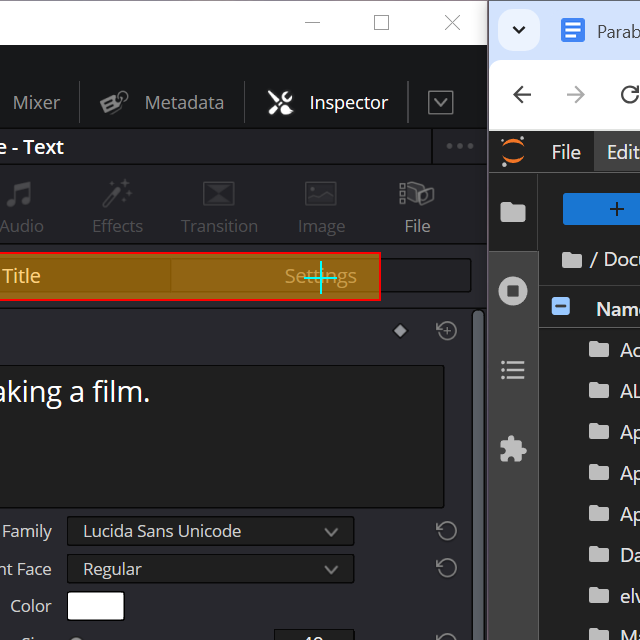

In [54]:
# comment: Automated step generated with pyPeriscope V2 
payload = '''gASVEA4AAAAAAAB9lCiMBGFyZWGUWPANAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBZ0VBQUFBd0NBSUFBQUFIUFQ0WEFBQUtPMGxFUVZSNG5PM2RhVkFVWnhvSDhHZE9vTUVaenVVYWNMaDBVSTRCVkJSRmpjaUtFQlZ2VjQwYUUzV1R5bFpabTNXUDdHWmpaVTNjbEx2clZ0WVlkMnRqSkxwbHhaTWxSQVVYVVVUdUFTS25RSkJqdUJubVlucnVjVDhvRVJHUmlzTzAwTS92Vy9mN2R2ZFRmT0RmL2I1djl6QkVvZ2hBQ0NGRVMweXFDMEFJSVVRWnpBQ0VFS0l2ekFDRUVLSXZ6QUNFRUtJdnpBQ0VFS0l2OW9odGxVcXVVaW5NWmhNbDFTQkVjM1oyRG5xOWx1b3FFSTJNekFDNXZKL0JZSEM0ZGd3QUJvTkJTVTBJMFpOZXIyT3oyUndPaitwQ0VJMk16QUFBY0hTY3htU3hiRjhLUWpTbjErdlliQTVCT0ZKZENLS1JVZVlETUFBUVFvZ21jRTRZSVlUb0N6TUFJWVRvQ3pNQUlZVG9Dek1BSVlUb0N6TUFJWVRvQ3pOZzh1SUZ6aEx5cVM0Q0lmUWtGakhOWVpSRjl5OHJ6SURKaW4vZ3pPMmN2TXpEYzhmb2svSzVwTHRMY2lMWlprVWhSSGZzcUZWdnZ2SDY1amdYcWdzWnIwa1VWelJ5SUxQajNaZ3gyaVYvOVY1OVJLYlFtQzJrV21henFoQ2F6Rmd1b2dVSnNTSlB2ajJIQ1dBeDZmU0RpcGJHb3NMaUZwVTFMMk1pU1lQbGdVR3Z0K1pKSnhKbXdNdW84Tnl4WTRWREd4NkxYdHNzaHNwenAvTjdoM2ExRndMQXlSMHpUZzQvaUhjZ3MzcGIrejd4VzFkdFdDbENrNFBnbGEzckl2bGdWUGEydFhUMm1IaWVMczV1SGg2aGdZTFM0cFp4bmlGaHh3Ym55cjlmdkR0c0h5dHEvYjRvUmZySm5NN0grKzVsbjdobnpjb25HbWJBeXlqL3E4UDVQMndrZjdaaHN4aGFzZzk5Tk9ZL2QvNmVwV0lXdEU5NGJRaE5RbUZ6dy9sTVZlMmxyMjYwRGZzZUp0dU9DK085WC9lWk9aMEh5aWYzc1djSCtqSkJZYTBpcVlFWk1Ha2R5T2orWll6a2I3NHBSeURsZzh3LzdZcndZUUdrL3JzN0ZRQ2dPLzNOMFI4SXZCTGZQL3IrbHZsQ04zc1dHRFh0MWQ4Yy8vVzdYMWJidG5LRWJFemc3c0lFamZUN3RpYy9pR3pTRzRadjJ2bEVKeTZMbk83cXlHR0MyYURvcWk3S3ptdFNBVGlHSnF5Tm4rRk9BUEFXNzkrL0dBQ2dQZTlDZTJEaVhCOCtFeUI4M2Y1d0FBQlYxYVdUT1owUWxicC9pYUQ5MXJHTEZRQVBueDVFL1ZuL0xIZ1F0elEyek51Rnl3S0xTVFBRVW43OXVxVEhQSFJsbG1kTVlxTFkzMlVhZDhTSGVoNmV4ODRuT25GWitLTm1pMG1uVVVpcjgzT0xwUnByL0cwd0E2WUN5ZmtQMzVhKy9hOURpWkQ5aDczSGF3REEwRnMvU2ovKzFsUFgvNXpFNzYvNE51MnNsQ1FFQzFOU3RoeE9EM1Jlc2Zibzk3YXVHU0hia2ZiTExURGR5ODhEV3Z1ZTBZVWR2SHhIc3NoZUk2MHRyVlFhT1h4aDZLem9wTzF1TjlNdVYrdGJKVmQ3MVFtdnpmUHBMRG1kMHdRQVlCZ2NCR21HS2lZMWFTYlVaNldYeWdEQW9sV09mbXFPZS9UbVRhNk9xdnZWUlRVa2NOeENJbWNHeDYvbkd0TXk3bW9BQUhoUnE5YkgreGhiSmRldU5BNFluUHpteDhlSHVPZ2EvbmZwZHJOTURlQVJ0MmxEdExOR1dsdDJWMmtFSU55RS92NmV6aXlyQkFCZ0Jrd04zYlVsM2NLZEZnQWd1NHVLUzU3Umk3ZjlINzlMY3FyK05EbjU0NkViLzArMm5TcjhTK0tlMzI4NHV2dUNqV3BGaUFKMWtwb292M0R4eG0zMkJibDVsWjJHa2Uzc3dNUmxJbTVYZnRyNXlrY3p4R1dTMXBVN1g1MDViMUZBZGRaOWhZelVtUUhBckpQSkJvYU9HZEFQR2g4QWdGRXpiT2VvZUI1MnRaZE8vakFNVlZHajJMaHJnZitzTU9KdU1RbmdHUk1wNEpMMVZ5OFgzd2NBR0pCOW0rR3dkV2VzbjcrTHVsNEc0QjBXNU1hVWwyZWs1dzNGVjltTC96Mkd3YldoOUxGNVRieXJydlR5eDhOR2ZwVC95Wklvd1RWaWNTSjFaU0UwOGN4dE9lblhxbm90YnFLbG0vYitZdStXVnhjRXVkc05hdzhSQlJMR3R1cktZVXVFekUyTlVpMFEza0xQRjc5OGQwM1I4R0VvVlVmZklBRGg1QXdBQUo2dXpnQ3kzdnVQMjlVNlBZQURNZTFoWjQzV0FrNmVRdWNKdW1ISDV3RGFTQmFIMklOOS9NSHVyb01qbTdRc0xnVUZJV1JMNm9hY2N3MzViaUhSYzJQRGhJR3hLNFBucUZzS3JtWktlazBBQWg5M0RuQ0NWcnl6ZjhYSXc0ek1GLytXL3FDc2kzeDJhNzlDQlg2T1BBK0FvUnQ5Z3NzQjBKSnFBQURRbEJkVmhhNktYTGgxWDFobmZVVjVTVjJiMnFyclRqRUQ2RVg1eEJyVElhcXFTYldZRGFFZlN5OXJMTHpXV01naS9DSlhKTTBYeHFldUpMLzRwdTdoM0t4V1dsSGU4dFFvdTc1SDhjSlh0VmdzWTdSMjNtMlF6WjRUa2JKS21WdlFNUWhjVC9HU0dDK0xyS3k4NldHN1NacWI5c1U5Y1Z4Y2xHajIwdFhoOFdSM2JYN1dyUWE1bFg3d0Z6T0FadnBLRG4xMGx1b2lFS0tXbVd3dnY1eE83TmdtRGhDRlF0Mmo0VkZOUjBWWkV3WFY5T1Zmdk14YXR5WnF5ZG9nQUxBWU5RT3R0eTljay9RUDYyTG9yTHg1b2ZLbW5ic29kbWxzWlBoUHQ3dFBTL3RhWXBXWDJ6QURhT05LUTVzWjVzVXMzd1JuejFGZEMwTFU2MU5wQUZ5WlRBQ1E5aWtzNE84WE5CMmFXaW1vaEJjZUY4SHZ1WFBtY3FsaTdKdDdmWDk5M29YRzdwUmR5U0V6SWx3bCtXTlBSWThQemdsUEZmMkRKSUNEby9PemUzeDVwVUFEcm9tLytYdzFmbWtPMFlzZDErNnBmYnlZSUMrQWdiNU9BSURhZS9jTlFNeGNuT0Qvck5GL3ZjRUl3TEY3NHJlZVNZTVJnTU8xZjlIeWd2eThXU2F0bWh6ZjZJNVpaekEvdjllNDRYUEFWRkdTVWRLMmZjdXlQMllkRjk3dUFFSmUrZDd4RWUrSXFVN3MrWlU0NTFocTZyRlM4YzRiTjhxa0pDRUlqdzRQRThuU2dsWWZvYVpxaEd4aFZ2SmJpMzZpbHZmSitucWxNcExEOS9MMTl2WjJKeGlLNnBzRi9RQUFwbnRYTTcyM3A0YUZwNzd1MjliVUtGVWFPWHd2WHk5dlQ3THNzNHdLQUlDbVp1blNvSUE1RzFJWU5UMUdzQ2lieTVzSEJocGFCNktqUTVadDFQUHZxNENqN1NtczZSeTdrTkUxMURYTlNRaE8ycnMvYVdpUDJTRHZxaTNNem05UWdlQ1ZuNjMwMWJXMXRjaElBQURDSzNSV29KT2h0YXpDR2c4QmdCa3doZHo1NExlZlR2L2tqVGxyMzRrRW8rYldrZmVPUDlWRm1mSHpCS25rNElkN1Y4V2s3cDRQQUdhZHVyUHVXbGFCN2F0RnlJYWt6WFY5VGtKblQzOTNYeUVBZ05tZ2xyZVg1OThxZUR5emFtcTdlZVowWjF6Q3ZEQy9zRmdoQUZpTU9sVlBmYVAwVWJ1NUpqZkh5eUZlRkRSdlVZakYyRi9aVWQ0TTBGK1FsZSthTk04dllxRXZtQTFOdDM1TUJyQUZpOWJFQjdBVUxWVk5VcVVSQUFBSU4rSDBBQjl4MGhxTC9IU0J2TDFWN2g4YUZPa2J5aHFxcWpJN3A2REJXdStJTVVTaWlPSGJyYTJOUFA2aytlb3BRbE9KU2lubjgxMEp3dkg1WGRGVUViQmk5NXFaNnNKVDU0dWZuT0VWSk96WUVQN2d1NjlQNTNaTmJBRTRINEFRUWxUeEZIb1RNTmpYOGRRU0gxSnZCR0JZNGVXRTU4RU1RQWdocXFoSkhRREhuaGd4S3M4V1JBVzdnS0ZYS2gzOU1DdkMrUUNFRUtJS0tmbXVPV1pGOFBKdFNWNmx0VFU5ZzhCMUVZUUVoSWFFZURrYVdtL2ZzY0hMbTVnQkNDRkVHVlBkbFRQYTJNV0xSR0VKd2RHUFpuMDF5dTZxN1ArVzFQWS85VzI3Q1lBWmdCQkNWRksxRkdlMkZGTjFkWndQUUFnaCtob2xBL1E2cmUzclFBZ2haSHNqeDRKWUxKWmVyOVByZFpSVWd4RE42WFJhcGRKS0w0QWlOQTRqTThEWE4wQ25JeldhUVNhVHlXVGlTQkZDdHFQVGFRbkN5ZDdlZ2VwQ0VJMk16QUFHZytIZzRPamdnRzhxSW9UUTFJZDMrZ2doUkYrWUFRZ2hSRitZQVFnaFJGK1lBUWdoUkYrWUFRZ2hSRitZQVFnaFJGLy9CMktpd2pzcnJnRWZBQUFBQUVsRlRrU3VRbUNDlIwNY2xlYW5fcHJldmlld5RYZAoBAGlWQk9SdzBLR2dvQUFBQU5TVWhFVWdBQUFvQUFBQUtBQ0FJQUFBQ0RyMTUwQUFESGtVbEVRVlI0bk96ZGQzd1VaZm9BOEdkbXRtVjdlbTlBQ0JCcUJFR2tLbGlJRlBVVTFFTkZPUXQ2Z25xaXB6L3V2RU5QaGJQZzJjNURQVVZQRVJVRkVRV1Vwa2dOVWdLRUFDbWtaN1BabXQyZDNabjM5OGNreTZadmt0MXN5ZlA5V0xJejc4eThPMXVlZlR2MTZxbzNvQVhTL0FmVjRsSFR2cWJIaEZ6Nis5SmZWT3YwelNlZ1dtOXRtNjRkYlkveVBMYnB4QlFBVUJRRmxMQ0JFTkkyYWN0am1rNU4wM1RUcHVaRFdqNm5GcGVucUVzSHRyUFY0M3BVeXoyRWVGeVdBZ3FvNWwwRUx0MDV5dVBPdHJqQXBUU2VtUk55N1hsMXo2TUlBUUNLb3FqMlhnN1BkTTFacGFoTEdXNitUeFJGMHpRQUlUenh2S2NVMVh4aW5naDNuS2FiTjFITk9hYWFqeEQrNS9tS0NNKyt4WDFyOVlvMTRRa0JRcURweE5TbHUwYWE3eGhOOHdRSVQzaENDRSthWHpGM0JvRVE0VTFLaE9OcGlnS0tBaUtrNXptZWtLYk1BbEFVRU0vWG1BSWdQT2Y1eWpYZkdzL0g3YjQ5eWFYTmJkOGRsMjZ3c0xmakY2ajFmV3VqbzgrR3h5bDQ0U3J1RzBnMXY5Wk5ieXVLZ1B2dDErYThSTGovbmVvaUQ1VG5GOGlsNzQydVR0RDZ6VUVJSVFDVThIRVhQdWtVRUFDZThPMGQzdW9WNnZBcFVNUXoyYVgvZC9ReGJKVmZxazN1VzMvemRIbjNtcDVvMDB2dG1aNDBmWVRkSHlEMy93aFBlTUg1a21MUVJIWitDUlQ4cUM3ZktBZ2hoUHpLL1QxTU9zYnp2TXZsY2pxZGI2OStvN2kwK1BHWC94dlFMQ01mb0FPZEFZUVFRZ0FkbDV2YkNjVjh1eFVBS01SZ0FFWUlvV0RScWk2NnVRNGVtc011ei9NODM3d1JoVG9Nd0FnaEZFUmF4ZDIycFY5Q0NJOEJPQ3hnQUVZSW9XRFVOZ1lMMFZjb0R3YzZkOGdITUFBamhGRFFhUlY5b1VVazdycVhOUW9KR0lBUlFpancybzVFYXJjOXVLa0pPQUFaUkw2SEFSZ2hoSUpJdTNIWEUwRFhvN1JSU0JBRk9nTUlJZFN2a1phRGdGdHQ5TnpsVVNIZFF6UU5VaEVsWVlpSW9SZ2FLQXJvcm1kMUFaNEF6d05Qd01VVDFrazVPT0svWVZBRUNFVW9Rbmt4MjB6b3d3Q01FRUxCcUczSXZkUUUzUDJ6VVJTb1pDQ1hVdTQ1Njd4SFUwQXpBQUFTb09RU0lFQlo3Y1RDZ3ErNmdoSFNQSzFoMDRTQi9TTDZBZ1pnaEJBS05tMEx1UzJDY2ZmanIxeEtLYVhBK0tqSmtRSlF5cWdJQ1pqdFlHTjdWeGxPQWZBZHpOdmFEMkFBUmdpaG9OYTZPdHFydWZRdlVjZ290Y3luR1FJQUFJWUdyUnhvaXJJNmVoaURxZWF5YjcrRkFSZ2hoSUpPcS9yblRwcUhPNmVWUTRURUx6a1VxQ09Bb2NGazY5NVJGQURmdjBPdkFIdEJJNFJRU1BFNi9pcWtWSVRFNzFGT0lhVVUwbTVlaGVxLzFjNmVzQVNNRVBLamQ5OTkxL3ZFOTkxM24vOXk0a1B2dnZ2dVRUZmRGQk1UMDNreW5VNzMxVmRmK2Z4SkVlOUNsMVJFcVNOOGUrVU9xU1BBeFZNT3AzYy9EU2hjaGE4SkJtQ0VrSDk1R1lHNkZhb0Q2NmFiYnZyNm0yL216WjNiU1F6VzZYUmZmL1BOVFRmZDVQT3IweFRUWlJxS0FvM2M1MWZ1akNZQzZsemU5US9qQ1ZZK0M3QUtHaUdFdWljbUptYmUzTGxmZi9PTlRxZHJONEVRZlR1UDBMMUFkUm5tRkJMS1YzMmV2Y1RRSVBlbXVwdkNwdDlMc0FTTUVFTGQ1bzdCYmFPc242T3ZWMDNBY3FrL3J0d0ZoUlNzanE0UzhWMEVZSmFETFVkZCs0cGNySmNWMmkxUURFT21EWlBNR3NtSXVxNG1DRHdzQVNPRVVFKzBXdzcyZC9RRmdDNURzRVRrc3lHLzNjTFFJT21pVE5mMUZCdmZIM1B1UFM5eHVucldTRXg0SG5hZEZXL0tkL2JvOEw2R0FSZ2hoSHFvVlF6dWsramJOYWs0U0MvdHpRam1uYWRjeE5rb1REZkMwSlNZb1VRMGVQTVBRMVBDVWNUWnVLK0k4OWxUOGllc2drWUlvWjd6ckl2dXEramJSUmdUTXdGclpSVXpWQ2ZabzZEcndiODhENFR3QUJURFVCWTdiMk9GUXpwL3loUUFpWkJRQ2huTjg0VGplT0psVC9GQXd3Q01VSEFKeTNFNzRhMlQ5dUNBQ0Z6ODdlTFN4THZSdnhSRjBSUlk3ZnlFUWN5b2RJYm5nZTYwcmxaSWNLeVUyMytPVTBncEhxaFFHZVdFQVJpaDRJSXhOZVM0YTU3N0xBWjNIc2E4V2VESVQ3cTR0TmV6WDlFVVdCMzh1SUdTMjY2UWVIRVlBYUErRmJFL0ZqalZFUXdmR3RYUEFOZ0dqQkJDdmVIWjd0djUyS1ErMDNsNU1ZQ1g3b1BacjRLejdMdmh3elV2L1BuZXR0dXhCSXdRUWozVXF0ZFZzTlZGaHk2ZWdFSktIenJQc1M3Vyt5cG9oWlRtdXhtQTgvZnYvTi9hMVo1YnJydnh6aGw1QzdxZjVaN0FBSXdRUWozUmJwL25Qb25CdnB4SitXaitvZit1Zlh2VnEyOUxwYTNIRGpzY2p1V1BQbmozNGdmSDVJN3oxZVc4eFBFZ2wxQUh6M043QzcydFVKYUtRQzZodUI0dGJ2aC9xejdVUnNVQ1FISFJ5VGRmV3Q2Z3E3bmxycVhkUGt2M1lSVTBRZ2gxV3ljamp2eGRGMDFUUGd1LzU0b0tINzd2enAvMzdGeTY1QjZIbzhVa0duYTdmZW1TZTM3ZXMvT1A5OTkxcnFqUVJ4Y01kcGxadzI5Zi9NU0J2VDhZOUhWOWNEa3NBU09FVVBkME9kNDNWT3FpTXpJSGpyOWk4dTZkMnc4ZDJMZDB5VDFyM25wZktBYzdISTVsRDkxNzZNQStBTGg4d3FTTXpJRjluREdHQnF1RDlMQVhkTythZ1NPall3R2dvYjVHS0JQN0ZRWmdoSkIvaGRBcUMxNzY2cXV2dWx3TlNZakIvbGdOQ1FCOE5aK3lTQ1Q2NTVwMy92eW5QKzdZOXAwUWcxOS8rd05DeU5JbDl3alJkOFkxczE3NDU3L29QdS9XMWVOZTBDb1owOHNBN0tsVkMvRkRUNjdLekJvT0FBWjkzWFBMNzdwOThST0g5bTB2T3ZYYitNblhDbFhXTC96NTN2cTZLaUZ4MXJEUjl6LzJqMVluL05QaVdjSWZVbG5FODI5OGlRRVlJZVJIWVRtcXlzc25GUk1URS94UG42YnBGMTkrNDdtLy92bnJyOVlmT3JEdmlXVVBPSjFPSWZyZWVQT0NaNTc5aCs4cXZFUEQrYk1uQVVBSXREOTg4L0UvMTM0bmJOK3g1Yk0zWDFydWJpMFc5bDQ3OS9mdUtKdS9mK2U0U1RQZEhiait0SGpXaGcvWGVMWWwvMm54TFBmWlBuampieXYvdEJBRE1FSUloUlJmTHloRVVkVC8vZTBGUXNnM0d6Ly9lYzlPWWVQdjV2LytxZi83ZTZDaWI1LzFnbTRsZi8vTzd6ZCtkUHZpSjRTSGYzN2hQZmV1R1hrTHZ0LzQwWVd6SjNNblRCZTJEQm95MHYwM0FIaitEUURYM1hqbm9aKzN1eC9XMTFVOTlPUXE5OE5GRC84VkF6QkNDQ0dnS09vdksxOFNTeVJmclA4WUFHNWZlTS9qVDY0SVlINjg3QVh0NG9SNDJ6UVZwVnphdzE3UXp5Mi95LzIzWnhrWG12dEZ1eC9xNjJ2Y2Z3L01IdG4yVlA5KzVlbWlVNysxM1I0ZG15aVVxdDB5c29aaEFFWUlJUVFBOE9jVks5VnFEVVZSU3g1NVBOQjU2Um9GRUt0MlQ3MUY4UVE0bnZTc3lONHE2QXFFaGw3UHZlNFczSFp0K0hETmdiMC9qSjk4clZEUHZHUExaOTl2L0tqejYySUFSZ2doMU9TaHBYOEtkQllBdXV3RlRRQW80RGo0YkwrVDVRamRISFI5VzJHK2ZmUC9vbU1UUFd1aE8ySFExeDNZKzhQdGk1OW9WUkhkQ1dORFBRWmdoQkJDd2FXclh0Qk5TeVJ0T09oME9BbnR0OVVub21MajNYOFhGNTNzTXIwd2hFbHd2dkM0NTY3NnVpcUR2czVkemk0NWQ2cEJWNE1UY1NDRVVGZ0o0SHpJUE4vcGJxOHpGZ3c5cnlOajRvdE8vZWFPdTU0dHdXMEprWFhiNXY4SkQzZHMrYXh0Uy9EYnE1OXkvLzJmMTFaZ0d6QkNDSVVjUWpxTnNUd0oySXFFdmhxRHkvR2Q5b0p1cm9MbWVLRDl0dmJUakx3RkRib2FkOXo5NTlydk9tOEQvcjlWSHo2My9DNGh6WFUzM25uZGpYZDZ0Z0ZIeHlZdXVPZFI5eG11dkdyMmpiYy9TSFgrUWlLRUVQSXI0VXVZZU9CYklvUndIT2R5dVp4T0o4dXkvMW56NytMUzR2OTc0N09PVGhpanBNUUJLbHM1WEtDM2RCaFRDQkNxcXhGVXk5YlplSjVRRkVYVGxOWE8yOWltMnVhV3FZUXRWS1NpbldaZlFnaEZVV3Z1ak9qWlUraExXQUpHQ0tHdzR1U0oyTGNqaGIzR2RWb0VwcnFPdnlCaUtJNmllSjV3SEZIS2FKWE1QZENvOWNrQXdNVTNoVnZQSFF4RGQ2T3lPNkN3RFJnaGhNS0szUm13RnRUT0wrMU5MK1Vyc2hoS0xLY29vQ2pnZU9MaW9aTi8ycDZUb29BU3k2Y05EWTJ5SlFaZ2hCQUtOWjFHTXRaRnV1Z001UitFQjliVldkR1RlTkhtT1NkWFBHMndrNmFoWjlOOWlVWFU1SUhzOWFQRlBUaTI3NFhHendTRUVFSmVJZ1FhblVRcDdldHlzTlhaVlh6dGNsVUZBREVEYzhZd2M4YUVRQXR1NzJFSkdDR0VRb29YN1pzV08zQjkyd3pLRWJEWXUwNUdVU0hTUE5zbk1BQWpoRkM0SVFTTWpYMTZSYVBWdS9ISEJMcnVpTlZ2aUJJU2t3T2RCNFFRUW02dEtuSUprS1pTbzdEajNnVjN0WGRVYXc0bk1kc29WWjlVNVpwczRPaTA5YmNsMHM3QW9uNEpTOEFJSVJTZUxBN1N5UG85MERXeXhPcm81bFVJeGw4QTdJU0ZFRUpoek5nSUxoN1VNcitkM3dhTmpwNGNpTlhRZ0FFWUlZUkNUcmVLajFZNzRUaEtIUUdNVDJzOFhSeVk3V0IzOXJJb1N4RWcvVFlZWXdCR0NLRXdaM2NTdXhQa1Vrb3VBVEhUMjdNNU9XaDBnSThxdHdrRkFCU1FuaTdsRzlJd0FDT0VVQ2doME1NZVRJME8wdWdBaGdLcGhCTFRoR0VvTVFQZXJHWEFFM0J5d0hIRXlWTU9sdmgrZ0JNQmlxSW9BRUlCSVNEOHB6OUVZd3pBQ0NFVVNucTVnZzVIb0xHcHoxUVB6dVBIdmxQQ0R3c0tJRGhXSSt3TDJBc2FJWVJDREhZaURnOFlnQkZDS0pUZ0dySmhBd013UWdpRkdnekJZUUVETUVJSWhSS0M4VGRjWUFCR0NDR0VBZ0FETUVJSWhSUUs1NUVLRXhpQUVVSUlvUURBQUl3UVFxR0Z3aFg5d2dOT3hJRVFRbUdDcGtFYlFhbGtJQkY3TzhzVkNpQU13QWdoRlBKRURNUW9xU2dsaFVFM2hHQUFSZ2loME5JNnhxb2lxTlFvREwyaEJ3TXdRZ2lGc0JnVmxhREIyQnVTc0JNV1FnaUZLcTBjbzI4SXd3Q01FRUtoeEQwTmxreE1wVVJoOUExaEdJQVJRaWdreGFvRG5RUFVPeGlBRVVJbzlJZ1kwRVJnOFRlMFlRQkdDS0hRZzlFM0RHQUFSZ2loVUNJRVhuVkVnTE9CZWc4RE1FSUloWjRJQ1phQVF4NEdZSVFRQ2lrRUNNRnBKc01CQm1DRUVFSW9BREFBSTRRUVFnR0FBUmdoaEJBS0FBekFDQ0VVU2lpQ3F3R0hDUXpBQ0NHRVVBQmdBRVlJSVlRQ0FBTXdRZ2doRkFBWWdCRkNLTFNRcnBPZ1VJQUJHQ0dFUWd1UE1UZzg5SzhBUER4bmVLQ3pnUG9PdnR6OXhQQ2M0ZjN2dGNZQUhBNzZWd0JHQ0tHUWg0T1F3Z1VHWUlRUUNqa1loTU1CQm1DRUVFSW9BRVNCemdCQ0NLR2dVMU5UUXdoSlNFZ0lkRVk2WkxWYUtZcVN5K1dCemtnN0doc2JDd29LeXN2TEFTQWhJV0hvMEtGYXJWYllWVk5UczIzYk5nQll1SEFoQm1DRUVFSXQ2SFM2SjU1NHd1VnlyVjY5T2prNU9kRFphWWZGWXRtMWF4ZE4wOU9uVDQrSWlBaDBkaTQ1ZHV6WWhnMGI4dlB6ZVo3MzNENWd3SUJGaXhhTkd6ZXVwcWJtazA4K0FRekFDSG1Kb2loQ3NOOHBDZzUrZmlmcWRMckhIbnVzdHJaV3BWSnhIT2ZmaS9VVXgzRXVsOHZsY3UzY3VUTklZakFoNU4xMzM5MjRjYVB3TUMwdFRhUFIyR3kya3BJU2w4dDE0Y0tGRlN0V1hIZmRkVk9uVG5VZmdnRVlvYzdRTk0wd05BQkZDT0U0enZzd1RGRVVBR0RZUnFIRkhYMWxNdG1xVmF2UzB0SUNuYVAyYVRTYXFWT243dHExcTdHeE1VaGk4SC8rOHg4aCtrNmZQbjN1M0xsRGhnd1J0dk04Zit6WXNTKysrT0xJa1NQZmYvLzk4ZVBIM1lkZ0o2dytSbkFBWHdpaGFWb2tZc1JpaVVRaWxrcWxFb21FWVJnaHNuWnlDTU13RW9sRTJrd3NGdEUwM2ZsUktMQ0lqL1JobHYzeWRuSkhYNmxVK3NJTEwyUm1adnJqS3I0U0dSazVkZXBVaG1HRUdHeXoyUUtZbVgzNzluMzExVmNBY08rOTl6NzU1SlB1NkFzQU5FMlBHVFBtK2VlZlg3QmdBUUJVVmxhNmQyRUp1RzhRaXFLam82TmtNaGtoeEd3Mm0wem1RR2NKZFlHaUtJcWlHRVkwZmZvMGpVYXplL2R1bzlGSVVaVEw1V3EzS0V4UkZFM1RJcEdJWVJpR29TbUtCZ0JDZUo0WHVWd3VwOU9KcGVIZ0ZCVVpHWjhRTDJLWVhwN0haREpWVmxVNW5TNmY1S29UZnZveDU0NitZckg0dWVlZUd6cDBxRCt1NGx0UlVWR1RKMC9lczJkUFlNdkJEb2ZqOWRkZkI0QjU4K2JkY3NzdHJmYlcxTlRVMU5RQVFHNXU3dUhEaDgrZE8rZmVoUUhZN3dnaGtWcHR6dkJoY2JGeElyR0lvaWk3elY1ZVVYN3k1Q21XWlFPZE85UWhpcUlZaGhhTFJmLzN6RE1halRvN2UvQ3JyNzRtUkdWQ0NNL3puZ0dWb2lpR1lVUWlrVWdrVWlqazQ4ZVBINTZUd3pyWjc3WjhWMUZaQ1FBdWw5Ky9sMUVQOER3L1ljTGxDUWtKVHFlek4rZWhLSXJuK2IxN2Z5NHBMZk4zYlFkTjB6Ni9nanY2aWtTaXYvLzk3eU5HalBEeEJmd21KaVptMHFSSmUvZnVEV0FNM3JwMXE4RmdVS3ZWaXhZdGFydDMyN1p0UXErcnRqQUEreHRKVFVrZU8vWXl1OTErK01nUm85RW9Gb3RUa3BNSERCaVFtSkN3NDhlZkhBNk13Y0dNSWp6NThjY2RDeGZlZWY5OTkwVkZScjM1NWx0VjFWVVVSYkVzNjFrT0ZtcWV4U0xSekprekhubmtqOW5aMlRhYjdkTlBQek9aelM0WHgzRWNSUUZOMDMxZVVZbTZRQWlKaW9vcU9IWHEwS0hEdlNtOGFqVHFHK2ZOVmFsVVBzeGJuM0ZIWDVxbS8vS1h2NHdaTXliUU9lcWV1TGk0SzYrODhwZGZmZ2xVRE42N2R5OEFYSFhWVlZLcHRGc0hZZ0QyTDdGWVBHclVTTDFlbjMvME43UFpJdncwcnEvWDE5YldqUjgvYnVTSUVVZnk4M2tldjVHRGtWRE1kYnBjSDMvOHljQkJnNlpNbmp4bnpteUZRdkg2di81MTRVSXhCY0E2blM2WGl4QWlGSC9GSWxGT3pyQy8vR1ZGUWtJQ0llU0xMNzk4Ny8zM2pRYWpVRllXaWNROHozTWNGN1RkU3ZzenE4WEtjVHpUaTFwb285SFVhdGhKcU5EcGRJOC8vbmh0YlMwQVpHZG5GeFlXRmhZV2RublV3b1VML1orMUpxZE9uZkltV1dSa3BGNnZEMGdNRnNiN0RoL2Uvb1RrQ3hjdTdPaDJZUUQyTlVLVVNpWHJaTzEyQjBWUlNZbUpJcEhvekptejd1Z3JxS3F1TGl3OE8zaHcxcm56bW9ZR1ErQ3lpem9rZEh1bUtLcThvbUx0ZjlZT3lNeE1UMCtmT1hOR1hGenNvNDgrWGxOYkk2RW9BT0p5Y1VMcnIwd21XN1RvN3ZqNGVBRDQ4Y2NmMzNyekxWMTlQY2Z4UE04THJjS0VFSlp0aXV1QmZuTG9rbjVlSjdGcTFTcWhoUklBVHA4K2ZmcjBhVytPQ3NJQTdOYlkySGp3NEVIUDBUNytackZZQUVDaFVIVDNRUDhGNE5ocDk5eVoyN2hyN1dkSFRINjdSbENKa01taW82TkdqUm9wekIxei92eUYvUWNPSkNRazFPdjExVFUxRkVVQkVNKytpeVdscGNPSDUyZzBHcjIrSWZTN3lLYm5QWHpiYU1OUHozOThNTkE1OFNWQ2lNdmxvbW42d01HREw3NzAwc3YvL0tkY0xoODdkdXg3Ny8zbmhSZGZPblR3RUVVQlRidUVPSjA5Skh2a3lKR0VrTzNidC85OTVYUDFlajNoQ1FBUmkwWHlDUG5VcVZPMmI5L0JNYndnME04TStWNGZCbkpmZmwwOC92ampqei8rdUU2bkE0REV4TVNZbUJnZm50d252TXlTeldheldxMEFFQkVSTVc3Y09EOW5xZ1dWU21Vd0dFd21yMkxkbmoxN05tL2VyRmFyVjZ4WTBZMEFQT0gzVDEyZEJuemwzamYvKzB2YjY4VE5XUHlIeTJNQXluNzh4Ly8yQXdBQVRUTVNpY1Q3ODRjb1FraUVUSmFhbXBLWm1aR1NrcUpVS29XS3JMaTRXS2xFS3BWS2JEYTdTQ1JLUzB0MU9CeDZmWVBENFJBT3ROc2RBTURRUFJrSjF0M1hBdldZRUlNcENuNzZjZWVHTDc2NGJjRUNpVVNTbFpYMTlKK2ZldWVkZjIvKzlsdXhXQ3lNVFlxSmpsWW9GRHpQbno1OXBsNVh6ekFNUmRFMElUS3A5TnBycjNuMDBXVy83TnZIOXFpbnp4UGZWanllL1BXOVl4N2E0dk9uaDVySElQbnFWRDQ1VDErS2o0OS8rZVdYSDN2c3NmcjZlcXZWdW5MbHlwU1VsRUJucW9WcDA2WjFtY1pzTnUvYXRRc0FaRExaOU9uVCszaCt5dVRrWklQQmNPclVLVytLM1R0MjdEaHg0c1N3WWNPZ3UrT0FiVllySkEyOVBLN3Ruc1F4ZzJMY29RVUFBT3ArV3J2cXhZOStEZVBpTHlGRUpHSUdadzJhTW1YeTFLbFRzck96VlNxVjBORUdBQmlHRVl0Rk5wdGRKcE1wRlBJUnc0ZlBuSEgxcUZFakpCS3hjTGhTcWVBNDN1NXc5S3owMjUzWG9pdXF5ZmM4ZmZ1RW51U2laMVJURnozMSsvRjlkNzFlRXViY1laM3N1by9XN2Q5L1FHajBIVFJvMEpOUExwODFhNVpJeElqRllwR0k0VGhPcUcyZU9uVnFSa1k2QUlnWWhxYXB5Wk1uTFYzNmlORFBWdWhFSGVnbjVBY0RuOTFadGVtSlFPZWlaOXBHelM1cktkcDJnMi8zUFA3ajJ6ZFJmSHo4SzYrOEVoMGRiVEtaSG52c01hRkZNNFNZemVhZE8zYzZIQTZaVEhiVlZWZjEvZXpRUXJjMUlRK2RwM1E2bmZuNStRQncyV1dYUVhjRHNOVFlVTTNIWkkxT2JMMWo4TmloVWFhcXFrQ09nKzVMTkUyclZhcWNuR0UzMzNUajFWZGZOV1JJdGx3dUo0UTRuVTZoaXczUDgrWGxGZlgxK3ZMeUNvN25IQTcyOU9uVENvVkNvOWJRTkNPY1lVaDJ0dGxzMHV2MVBhdFE4dUZyb1I0enNNMVovRWsxdW0rdjV3TWN4enVkcnVMaWtqVnIxcHc2ZFVxSXdYRnhjU3YvL3JjbER6Nm9VaWtaaGlrcEthbXJxd09BVWFOR3Z2SEdHeG5wNlZLWmRNcmt5UysvL00vazVPVFRwMCt6TEV0SWVOWS9EN3B6VWdnTUd2VU96L09UcnB3NCs0WlpNVEhSN1NhZ2FYckVpT0UzM3pRdlBqN09NK2lHOUVRY29SdURoZWpMc215Z29pOEFYSGZkZFRSTm0weW1Eei84c1BPVWI3NzVwc3ZsRW92RjExNTdMWFMzRFpoMm5UdFdISC85MExIWjJ6Wjc5cE1ibGpOQW9TL1lZeHljY1dtYlI2T2c2ckk3N3B1WldQUFRleDhmYkJCMmlvZmN0R1JldHVtWGR6N1lLMnlKSEQ3amhza2preU1sREhDTmRlY1BmTGQ1WDBWVFpkMkUzejkxTmZ6MC9CWnIzcnlyUnlUS0dXdkJGMnMyZDkxTHoyKzBXazFtWmtaR2VucDBkTFJNSmhQRy96VTJObFpXVlZWWFZROGNPQ0FwS1FrQTZ1dnJlVUtxYTZyTkZqUExzanBkdmRsc0xydDQwVzYzaTBTaVFRTUhKQ1VsL25ic2VHT2pyV2RGb3U2OEZnQWQzdUhZSysrNGJYSzZIQUN1ZnZxcHF3SEFkT3gvYjJ3dEJuSEsyQm5UeDJVbmFtUmlHbmlucGZyVXpxKzNGRFJjT2wxTzNyenBPZkZLTWMwN0xUVUZQMjIzV0QydjF1SGhjUk52dTZQcGVrODljelVBbUg3NzMxdGJTa0Njbkh2TjlIRkQzQWZVblByeDY2MG5HeUJJQ0IyeVhKenIyUEhqNzd6ejczLytjN1V3M2tDbFV0MTk5MTNIamgzYnYvOUFUVzN0anovOU5IejRjSXFpQmc0YzhPS0xMNTQrZlhyeTVFa3ltY3h1dDMveDVWYzhKNVNhZXZrMS9maVdxcVhjUytQZVVyNjE4dTdMVWhWaWNGb3ZudHl3NnA1bk5sUUxDZFRULy96MmMzZE15SWlXTVFCT2EyM1ppYS8rY2VQS0xRQjVieDk1Yjl3djk5NS83cFkxOTEwOU1GSTQ4dlBWOS81NVE4MmwwdysvODdWVlMyWVBUMVdJd2Rsdy9wZDFLKzUvWWJmUnZWY3o5ZWwzVmphZG03T2JLL2UrOUxzM0U5Nzg0UDZ4a1FEd2VGWEY0d0JRM1Z4YjduRXF6bDVmc3YrVC8zdmdwWjNONThwNys4aDdFL2JmTyszelVSLzg4NzdMazJSTXdkdmpydmxiSUw3MjIxWkJ4OFJFQzlXd1ArM2NaYlBaUFhmUk5EMWdRT2FZMGFQRllsSGI3L3BRcklKMkUyS3dVQmY5MkdPUHZmTEtLOEZXRjkxV01FUmZBSWlKaVprL2YvNm5uMzc2MVZkZlVSUjF6ejMzdE8xUnovUDhlKys5OS8zMzN3UEEvZmZmTHpSc2Q3Y1RGcDkvcG5UR3dJeWhnNkh3YlBNMjhlaVJnNlNWdng1bzBBeHUveUR6a2MxN3N1NmJlV1hlK0xNZkh6QUFpSWZkTUhPb3BIem4xMDNSVnp6cWQvZm1EWENXSE5pODViUk9tbjdGMUVuVEY5ekN2LysvL2U3dlh6bzI3N2JKQTB5bkR1d3lzSTdxcW01bTJpY0lJU3FWY2toMmRtcHFTbXhzckZnc0ZnS256V2FycWFrNWZ2eEViVjJkeldhbmFWcllLNVBKQUFnaGxNVmlKWVRJRlhLZFRsZFJYcUdReThlTUdSMGRIVjFTV2xKV2RyRVhGWkxkZUMwNnZzT0c0ejk4WnA1MHkreGhwbjN2L1hBS0FMaEdQUUFBeEdXa2lDdFBidDl4dk5La3lwZ3dkZktvdkhuR3NnOStOZ01BaUFmazNaWTNPa0pYOE5QV1gwdlptRUdqSjE0N1h3TUFIbC9qSFIzZWNIemIvOHlUNXM4ZWF0cjMvdGJUSHRlTHowZ1ZWNTNZdnVOWWxWbWRQbjdhNUZHejU1cksybXZoRGlDaHcvT1BQLzY0WWNNWHQ5OStHMDNUQU1DeVRwdmRUb0R3UEw5Ky9lZFhUcHdvZEFBWlBYclU2TkdqQU1EbGNtM2J0djJISDM0UWhpSDU0anVheVhsdzF6dTJVeHYvK2VqNm8rYkJjeDlhZnVmZHE5ZnFqOTd3OGptQVFjcytYUHRJVHVYV054NzU5eThWbXF5SjExMTFRNnp6MGsrMDZLa3YvVy9xaFMydkwzdjhOL1BnT1E4dnYzUFJxNXRWMXNzZi9nNEFBRFIvMlBEMXN4TnRCejk4NXY4Mm5WVk51bi9wZzQvODUzK3VlWG1yaFc2bzE3L3g0NzkvRjZjN3V1WERUOC9xR3VXcGw0OHdGcFlWL3ZUWGU2cVgvdnU1YTJyZW4vZVhUUURnckQwTkFBT1hidnA2K1dXMmc1Ly80NlgxUjgyRDV5NzY0NjJQZlB4ajJrTlhQL1MxUnp5Zi9jazdWMFhuYjN6N3EzcTR1Q3M0Q2wwVVJSMC9jVktyMWFhbHBZMGVQZXJJa1h5V2RiZmNrN2pZbU53eG85VnExZW5UWjZxcXFqMC92eUVkZlFXaEZZTk5KdE91WGJzQ0huMEZDeGN1UEhueTVJa1RKNzc4OHNzalI0N2NmLy85T1RrNVFpOG9Rc2lSSTBjKytlUVRvWWY1eElrVGI3amhCdUdvN3ZlQ1BuYnM3TFJCZzhlTUZwLzlUWGhYcXNlUHpHU3FmejVtaGlrZEhtUTY5T1dPeklmekpzMmFjUFovUnhKbVhUTlVWUHJqdC91YTRtdFczclJCZFBtdWo1b0NidTNYSlU3WnN1c21UTW5hLzAxUjAvRXBJektQZi83T3R4ZDZOVmRONzBnazRsblhYeGNkSFMxODdYSWNaN0ZZTDE0c0t6eGJWRjFkRFVBcDVQSUJtUm5aMllORkloRkZVVmxaZzNUMTlkWFYxVHhQMUdyVnlCSERTMHBLVFNaVDlwQnNCK3ZZdCsvWE9wMnV0M255OXJYbzdBNmJkYlZtSndIZ2JEVzFIZ0hVbWYvRmYvS2IvcTZ0K2NZVmszcmI2SXloOFBOQkFJaWJORzJrMW5aNjQ3cXZUenNCb0tibTRsbjkzSWR1SENyMTRuQ25wYjdHelBJQUxsdHRUWXZyZmZWTzh3RTFOWnRkc2FtM2owb2ZCcjhFVHljeW9SQU1BRlppZStmZi8xYXIxVmRkTmYzczJhSTMzbmpqK1BIalE0Y01VU2dVcDA2ZlhycnMwZHR2dTIzNjlHbFJVVkdFRUtQUnVISGoxeHUrK01Kc01qdGRUZU9HZTU4WmhlVGtjNWZmOG9ZUkFHRC9nUjMxa1VmZW16ZjFSbmg1TlVCMmRwcWlldnVMOTd5NkJRRGc0UDV0bjd6aWVhUXNzdTZqNitiODlSUUF3SUdEMi9ZMWJObngySTFMSG4vbXU1ZU5BTGUrK3NoazV0anJ0OTM0ajVQQ21YKzBmM24wLys1Ky9OYlY5MzRPTU9ndmo5NlliTnorcDJrTFAybjV1eWovNE5CR0hvQnRPSERRL1hyZCtzeml5MlduMzUxMzQxK2FUclhqbXdQdjdINW45c05MWC83Njd4ZWFFaVZNdjY3bTlSdXVlT2xrNys5SUw3UjZSU2lLS2kwdCs1bmVkOFdFQ2NOemNvQ1EvS08vT1J3c0lVU3IwVXliTmxXajBaU1VsTzc5K1pkZVRwN1Y4d3dEZ04rQ2Zhc1l2SHIxNnZUMGREOWRxemRNSnRQT25UdWRUbWN3UkY4QW9HbjZyMy85NjEvKzhwZFRwMDZWbEpUOCtjOS9Cb0NNakF5VlNsVlhWMWRkM1ZROU5XN2N1RC85NlUvdW8zb3dES25vMkRsVHpyREJJOFMvNVRzQlFEVnFVQUpYdkcyL0dUcjlwZVQ4YmVQV0FVdm1UY3FiblJFOVZGVDIwNVlEaHFZOXFRT1NGWHpGdmt2RlhYQ2VyOUxCd09RQmFWQlVKbXpoeXc3L0VNam9DODF6RFFvL2VKMU9aM0Z4OFpuQ3M1V1ZsVTZuUzZWU3BhZWxabVpteE1jblJFVEloS2tLWTJKaXJweDRSV1ZsbGN2bFNraUlwMm02dUtTRW91bmk0aExoYyt1THpqamV2UmJlM09FdWxOWWIzSCtMQjZYRzBlWVR4MDVmZWtHY3B3dkxydXRrNmxqUHc3MVNyT3ZtQVgxRjZKNVRYVlg5NWx0dkhUcDA2Tml4WXhlS2l5ZE9uUGpVazh1am82UC84cGUvYnQreDQ1MS8vL3ViVFp2UzA5TTVsNnUwdExUczRrV2U1MTB1bDh2bHN5azQ3SWUydlhHcEhBbGJMbFFBSkErY0JmQWRGRmJWY3drem4zcjducHFuM2o5c2JIdG8yWkV0SHFNcXo3KzgrZENTeThaZGZodkFPM0QxbEpGUjNQRzEvN2dVRDAzZm55eit2NGtqcHN5QXozZkE3TXVHTUxYZmZmbUpON1VTMTE4MUpncE9mdnl5UjJnMWZ2UE4vbWRuejV0MjU2Qy9QOXM4R1c3MTk2OEhPUHEyaXhCU1VsSXFrOGttWGpGaHlKQWhkcnZqNkcrL3FWV3F5OGVQMDJxMTFkWFZCdzhkYWh0OSs2NEU3T2NydVdNd0lZVHUwVENOdmlFTXZnK0c2Q3RRS3BVdnZ2amloZzBidnZ6eXk4YkdSZ0FvS1NseDc0MkppVm00Y0tIUTlPdldrM0hBeGZsbjlhTnlSNDFYNWY5c2hzVHh3NU80MGkyL2RSMGRuV2MyZjN2aS92a2pCanBLdG4xejhGSXdTSXJXQXEyZCtkUXpNMXVtTjlHWEt0RXREVFdCRGI4QURydWp0TFJNcFZLSnhXSzczVjVVZEs2czdLSlVLaGs4ZUhCbVJucFNVcEpFSXFGcFdpZ2swVFJOMDNSMGRIUmtaQ1FBY0J6MzIyL0hoS2s1WEM2WEQvdkJldlZhZUhPSFd4UEhaaytjTm1WNGlrWXVselNuYW9yVlNaRnFnSWE2OHkzUzJ4eE9Mdy92NkhxREowMmRQTUw3QXdLSlVCUlZWbHAyOGVKRmlxTEdqUjM3cDhjZnk4ek1MQzB0cmErdkJ3RENrNHFLaW9xS0NpRGdhbHEwbE9NNEYvaXUzR0tvNzdDNjl0emZGeTZML1Bqdk42LzhOdSt4ODBkMmIzem43Ly84d2FPcUFmUTFMWWRxWDZ3M2dDeENCUUF3T2pNWm1PVGwxVlhMVzU2eVdpUUJnT3V6MHhpNFdQUzFWeGtjbHBvQTFmdVB0L3dCc1BWOEJVQnliRFpBY3dDdU9QK2RWNmZyZXp6UEZ4WVdSa1ZHRGhtU1BYTGtDTHZkSGhrWm1aYWFhakFZOG8vK1ZsZlg2K3FyWGlEK1dRckprekEyaWFJb1lXS1pJS1JXcTYrNjZpcUtvb0lrK2dva0Vza2RkOXh4NjYyM0hqbHk1Tnk1YzhJdkpacW1odzhmUG1MRWlMYS9abm8wRVVmVmdWTlZZeWRsalZiL3ZGYzVZa0NVOWV4UHg3dzZUcGtjcXdJQXNUWXVUZ3htenk5czg2bk5HL2JWdGt6ZDNEZ1lKQ2lhUGxOWW1KcVdHaFVaS1pQSmhnNGRHcDhRbjVtUm9WYXJ4V0t4eStVeW1VelYxVFdWVlpYcGFXa1pHUmxDY1psaEdKN245WHI5bVRPRmNua0VBT1hqTmJPOGZTMjZkWWZGQS9QdXZYVlVoSzdnd0xZZnp1bE1waHFEZmNMdm43cmEyengxKzNEeHdPdnZ1MlZVaEs1Zy83WnRSZlZtVTQzQk52NzJaN3krWHA5cG12QlpMSmJLcEFxNTNHcTFpc1hpYWRPblpXVmwvZnp6THkrKzlGSnhjWEZpUWtKa1pDUUJhTkRyYTJ2cndPV2Urb3JxcXhKU3pZWkhaMjU0NllvN0gzbjQvbmw1Zi9wdjNzSmRMOTF4Mjl0ZUZqUnJ0LzNmZlc4VnROekcxcDd4ZlM2REg4ZnhCdzhkNW5sK3lKRHNLNjZZUU5PMHcrSDQ5ZGY5cGY1ZmJpRVlDQk1LQmJNZXpEelZOOFJpOFlRSkV5Wk02SHBvWjg5bXdqSWZMYXFjT0dYb0ZZblZFVU9qOUtlOTY1TWNPZm5HaVFubTQxc0tZcStmY08yTU0vL1plbDRJd1RVTlJraFRLUnRxVGdTNmtOc1ZzOWxjVmxhbVVhc1poa2xMUzAxSlNSYUpSRHpQbTgzbUN4ZUt5eTVlcks2dVpsbFdJcGFrcGFVeERDTjg0YnBjcnBMU1VvdlZHaDhmcDlmNy9FZUZGNjlGdCsvdzBMSER0Tno1Ny8vN2pic3duUktwQm1pcWVxeHNNQUdvSTlOYUZGRVptdkx5OEhia1hEWk15MTNZK3VIbS9PWUQwam8vSUJCb21oYkcrNHJGNGdYejV3OFlNT0MvLy8xdlZYWDE4ZU1udnZ0dTZ6dnZ2Rk5lWGo1cDBxUzc3bHlZbVpsSlVkUzVjK2UrMmJSNSsvYnRMbzdqZWRMWHF5RlYvL3JSMDc5KzlIVDhMZTl1Zm0zMmtzZHZmWHZSNThLT2hQUVpBRHN1SlV5TjFvTDluQmtBNE5URmFyZ3NQdTcwZ1EvYXFicUdYOHBxQUZLejVnRjgzZlhsZnl1dWdNc3lSMnBncThlcHJoK1lETkJRRjhBaERPM3FaQ0lPbG5VY1AzRkNKcE1PSERpUVpkbmp4MDkwdnRoUm45VkNoM3gzTHdRQTNSMEg3R1k2Y0x6WUdUWDB4cXNISy9RWFRualRLemx4eGkxWEpGcE9iUDNoeE02dmY2MVJqN2p1bWdGTkUxS1VuQ3UzUXZLWUdRUEZQY3RMMzJGWjU4V0w1V2F6R1pxL2ppMFc2OW16WjNmcytQSEF3VU1sSmFVOFQwWU1IejVvMEVEM3VqY3N5MWJYMUpTVWxFb2tFcGxNNW8rSitMdCtMYnk2d3pSOWFhOU1MQVlYYTc4VXJoT0haR2pkRDV6bktuV2dIVGdpdytQb2pPeDBsWmVIdDNjOWlSaGNEczhEaHJZOUlLQ0VoWDVGSWthcFVONXp6NkkvL3ZIaDMvM3U1cVZMbC9JOHYyZjM3aGRlZUxHNHBHVHFsQ2xQLy9tcGlSTW5KaVVsSlNZbVRwbzBhZmtUZjVvK2JacFlKQktMeFF3VGtMYTBtZzFmSDZvRFRYU1NlMHZ5dUx3ckwrMGYvdVNONDJSY3djRlBBUUMyL25SVUQ4TnZmbW11dXIxVG1UN2ZWOERGWFhuekhlM3VCUUNSV09QKys4ZXRoNnBoK016SFBXYW4xOXd4ZjBvQ2QzTFhSK2ZhT1Rab1VXYXo1ZERoSTJWbFpRVUZwODZjS1F5UzZFc3dCSWVGbnM0RjdTdzRXM2Ixd0lGYXZuTHZyMTdFMzh6cjVvNkxNdjIyWWR0NUowREQzbzM3Qmo0dzZicnJ6dnhuODNrblFOR1c3YWZTNTR5NjVYNVZmbjVoY1RrYm1SSVhtellvVHIvamcyMmxQY3llZjFBVVZWVlZWVjVlb2RGb0tJcHlPQnkvL3ZycjJiTkZJckZJbzlIa0RCdWFsVFVvS2lwS3FIWTJtODAxTlRYRnhTVkY1ODREUUVaR09nWEErYTRiemlWZHZ4WmQzT0hpc21ySHFFRmpiaGhWdnE4S0ZDTERoZE9sbGRQU3M2ZmRlcmx6dHpES2FNSWdoY2NFTDdXN0Q1NGJOV3Zrall2RXYrd1JoaUZOdUh5ZzdGS0NMZzZIa29zMWpsR0R4c3dhVS9GckpTakVEY1duU2lxbnAyVlB2MldjYzArcEkzcFE3c1R4TFE4SU1KR0lFWW5FSXBGbzBLQ0JEejV3Ly9YWFh5OE1RcHMxNi9yYXV0clgxN3plWUdoSVMwdTc1NTU3MHRQVDNWL1FGRVhGeHNiKzdXL1BuajV6NXNLRllvbEVDc0Q2YUJoU1ovSmUyLzUwL0xFdnYvdCszMW1UZXZDTTIvNHdNOEY2NU1QTjd2M1dtRmxyZDJ2ZWZmM2Z2d2pEa0VhSks3NTQ2MldoblByNW95L00rdm5GZWYvYUZUOTF3N2FmRDFuVHh3MFpQSGJxNE5KL1hQM1lGb0J6YTk3WVBPZU5lUy9zMm5qWmh4dS9MMU9NeXgxMVpVekJyQWYvQmJEbDBCbnJ2TWszLyt2K3cyOGVoYmlJQzV0M2IzbnFiMStQZStQZUwzOUtmZmRmLy83WlBIam1iWCs0ZTZhbTR1dW4xMXpvS09lQjB2a3JRbEdVMld6Wit2MDJpZ0tLQ3BvZVNSaC93MEtQRjJOdzVoOC9OMjFnZHNPNTQxMVdGSW9IWGo5cnROcDA0b3R0VFpYTzBMRG42MzBENzV0MHc2enpiMzF6eWduT1U1dmV0ZXB1dUNaMzlKUUI0MmdBampYckswNGRDNm9tNENZdUYzZWh1SGpRb0lIQ1BBeHl1VHdwT1NrdUxqWnIwS0RJeUVpeFdNenp2TVZpcWFxdVBsZDBycnFteG1wdGpJaVFSVVZHeWVWeW5VN0g4YndmV28rNmZpMjZ1TU1uZnZvK1RUVnorUFVMaHdLbk8vUy9kMy9jKzgwVzlienBPVmZka2lYTXM3RjkzWTZrMzkzdW5oSGRlWHo5KzF6ZXZPazVWOTJTMDVUZ3Y3OW0zWFZqVTR1TXVZdkQ0ZVNPSDFLVk00YlArdjFRNEhRSC83ZDIrOCtiTm12bVhqMXMrcTFaTk8rMFZKL2E4ZUdPcEZ0dmIzOGVvajdtTHZzT0daTDkxSk5QVHBnd1hpUnErdFJRRkJVZEZTMlJTbG1uTXlNOWZkaXdvYTFlWElxaU5Cck4wa2NlZWVIRkYydXFheWlKeE1WeExwZXI3U3lHUGxSNHVnU216M2wwMm0zTFFaaUdZKytMOHg5OTdWS1h1VFB2UGZETHlKV0xYdjd5VHpMR2FiMTQ2TTAvTFZuNVEvTk80Ly91bmxtMzR0VVZDMjU4OElyYkhtNmF4bVBiRjAyVnhzWk5EOXhncTNoMXhZSWJIMTkxR3dPY3ZiNWsweTVoMS92UFB6ZHV6Zks4djN3MEU1ekZuOXl6ZWZjNUlmRmJLKzllK3NiMWZ4SW00bmo5OXg0VGNZUVdiem9EOTIwSkdJVURLajRocWV0VTRXSjR6dkNUQmIwZDlVQlQxQTAzekVwTVRBUUFxOVhxY3Jua2NybEVJaUdFT0J5T2l4Zkx6eFlWNlhTNnhrWWJBR2cxbXZpRWVBcEFwNnR2TUJqQ2NockNvTlg3bDV1aUtKRklKSkdJTDd2c3NqODkvdGk0Y2VNOFEyeDVlZm5kZHk4cXI2aWdnTHAxL3ExL2UvYXY3WjdFWnJOdDJmTGQ2Ni8vcTZhbWh1TTVsNHRqV1RZZzc0Uzh0NCs4TjYvaTVjUTVxL3YrMnY0MFBHYzRBUFRzdGVZNGJzSDhXMDZlTERoMStreHZmaHh6SERmLzF0OFZGSnpxNVhrQW9FMG9KKzRhWjJISFhRdnVMaW05OE1VM24vZnVLaWp3Y0QzZ2J1TUpYMUJ3U3F2VlJrUkVDTjN3T0k3VDZYUVZGWlVYTGx5b3FxNmhhWXFpYUpWS0ZSY2JFeUdYTnpRMDFOWHBBalZtSC9XR3NOQnZmSHo4SHhiZjZ4bDlDU0hGeFNWL2Z2cnAwdEl5QWtCUlVGVlZ4WEZjdXl1NlM2WFNtMisrYWNhTXF6OWJ2LzZMRFYrY3YxQk0welQrRkFzZXZsb055WWVyS3FGK0FnTndEMURWTlRWMWRicVVsR1NPNDB3bTA4V0w1UmVLaS9YNkJtR01yMVFxMVdxMDBUSFJUcWV6cXFxcW9hRUJQNVVoU29pNFVaR1JtWmtEUElzMWRYVjFiNzcxMXNrVEoxMmNpK040bXFacXFxc3ZYcnlZa1pIUjlpUm1zL25NbVRQVjFUVXN5MHBsTXF4QlJMMkVZVDVzWUFEdWljWkdXMkZoSVUxVEZaV1ZaV1VYVFNhenkrVUVvQ2lLaW9xS2pJNk9sa21sRFEyR09wMnVlOHNDb3FCRENDR05ObHREZ3g1Z29MQ0o1L2wzL3YzdmJkdTIyZTEycDlQRjg1eElKTDVRWEx4dDIvYTc3NzZyN1JyWU1sbEVYRnpjdDk5dStXcmpSbUZGUWl6K0JodTVRazdUVkcrbUtsT3BsSDAyYVJUdmg4RVVLQ0F3QVBjRUllVDhoZUp6NTg5VEZDMFVqQ2lLbHNzalltSmlOR3AxbzgxV1duYlJhRFQyaDlINjRZM25DVTJUc3RLeTk5NS9QeUlpSWlVbHhXZzBmdjc1aG84Ly9vUnpjYXlUZGJsY0ZBVWM1ektield2WHJoV0pSWGw1ZVZxTlZpd1d1Vnd1dTkxdU5wdlBGaFZ0L0dyanpwMjdISGFIaStPY1RtZWdDakJiSHJ3czRjSEFYRHBvVVJTbDErdXpCZzNLU0UvdlRjblNQZmJCaDNuckZINjNoQU1Nd0QxRVVSUkZOVFg0RVVLa1VxbE1Kck0xMml4bWk4VnFFV2FkREd3T1VlOEpDekE0bmM0ZE8zNnNyS2pNR2p5NHZMeTg0T1JKbDdDdWdvc0RBRUtBNDNpSzR1cDB1bit1L3VmQkF3Y3pNakprRVRMV3dlcjErb3FLaXFPLy9XYTMyM21PZDNlQkR2VFRRcGZRTkgway8yaHNiQ3pUNi9LcnhXS3BxYTNya3c4K2ZyZUVDUXpBUGtCUkZNdXllajFMaU5DOFIySDBEUnVFRUJmSEVaYWNPSG15NE5RcElNRHhQT2R5dVZxTzZCVUcrUEk4MmJaOU8wVTF2d0VJRUVKNHd2TTg0VGdYeC9HOFg4YWhvVjR4R2swR2cyOUdSL1hSaTR0dm9YQ0JBZGczUEw2TDhiTVJWb1JDTU0vekxoZEhVeFFCd3ZQdGRIWVZrbkVjeHpDMHUyR0NFR0VlYUFJQVF1akY2QnVjUXUxMUNhM2NvZzVoQUVhb2E4SjZDanpWdEtCQ3g5L1h4T1hpS0lyM09MQXBmYWg5eGFOZ1J2WEJna2lvRDJBQVJzZ2JUUUcwcXpqYWVqL0dYWVJRUjRKbWFsT0VFRUplSUw1YldCb0ZGZ1pnaEJBS0pUaVRTOWpBQUl3UVFxRUVpNzloQXdNd1FnaUZGQXI3UVllSi90VUpxL2RMSWFFUWdpOTNQOUh2WG1pTXZ1RUNTOEFJSVlSUUFHQUFSZ2doaEFJQUF6QkNDSVVVZ3IyZ3c0VElZYmNGT2c4SUlZUmFhRzlwSmtJSTBFei82cmdUM2tRT2h6M1FlVUFJSWRTK1ZwRzR6WHJUS0lTSkVoSlNBNTBIaEJBS3ZPcnFpd0FRMksvRWx1SFc4eEVoQkpyWFd3TUFVbFplMXNkNVF6NkhiY0FJSVJSYXNCRTRUR0J6QWtJSWhaNXBVNllGT2d1aEtqTXpNOUJaYUlJbFlJUVFRaWdBTUFBamhGQm93YW13d2dRR1lJUVFDakVZZ2NNREJtQ0VFRUlvQUxBVEZrSUloUlQvcjBjWUV4TXplL2JzbUppWUR6NzRRS2ZUK2Z0eS9SYVdnQkZDS0tUNFB3QlBuRGp4eWl1dnpNN09uajE3dHIrdjFaOWhBRVlJb1ZCQ2ZCZUNreFRVdUxoMm9rQjBkTFR3UjNaMnRtK3VoTnFEVmRBSUlSU2Vzck96RnkxYXRIbno1bDkrK2NXOU1VbEJ6YzJneDhhQVIraGxLcXlrMGtvTzYrRHRBZzRBTm0vZUhCTVRvOVBwOXUzYkY0aU05eGUrQ2NCLy9LTHcwZHhPOXVlL091QzJmL25rU2dnaDFPOTUyUXQ2enB3NU1URXhFeWRPRkFLd0VIb2ZITlpPa1RkWlFTVXJxSEZ4TUNlZDJsUkszaTdRclY2OTJxZFpSdTBJc1NybzhTOXN2M0JoejZzekFwMFBoQkFLRU8vSElHM2F0T21YWDM3WnRHa1RBQ1FwcU85bmlkcU52cDZTRmRTRHcraS9qMk42bDBma0ZkK1VnUC8xdTJ4M0FYZkdxM3ZlblJzUDFadnVtL2pFRHArYy9aSWI3cHFaQmxEajQ3TWloRkNQdUZkTG9LaDJ3cUxuV2dxZEoyaDNiKzhWRmhZV0ZoWUN3TGc0K3IycGwySnFoWlVjcWlOVmpRQUFsVmFTcEtBUzVaQXN2MVFwUFMrREhoZExYZitkeXgrNVFtNmlrNFdGY2pHQXM3SDg1TGYvK2R1TDY0NWIvWG01UWJQLzhwY25iaDZWcUpJeHdObnJTdzk4L3NJVHEvZm9BRUI1NDd1N1hwd1JCZlpqYjk1NDQrdUZRdkxzUnpadWZHaVVEUFE3bmxwNllQci8vWEZHdGhvQTR1ZStXemdYQUFEeVg4MytIVlp0STRUNkhDRkVLcFhHeEVSSkpCS1daWFc2ZW9lRDlZeWpORTFwTkZxVlNna0FaclBaYURUeFBQSCtjQjl5Ujk4S0s5bFVTb1JXM2c1d1FqWDFuSFFxV1VGdG5TWENHT3hYdE5ocE5CaU1aazZhTXViV3YyMzQ1cC9YSy94MnJVRi8vT0x6TlhlUFQ1RkRvOEZvTURpWTZBRlRIM3hueC9vSHN3SEFzdkd4RjMvVUE4aEczZjMzQjFPYjBqOS85eWdaUVBXV0ZZOXRIRFpwUWp6bDVBQUFPTHZaYURBWURRYWpHZGN5UmdnRmdsZ3Nqb3VMVWF2VkVSRVJhclU2UGo1TzRyRlVMeUZFclZaSFIwZko1WEs1WEI0VEU2UFJxRDBMeEowZjdsc1BES1Vxck9UZTNkejEzN2s2amI0QUFKVlc4bllCZCs5dTd1MVRmSElIZmFUOUxXL2x4dDI3dDMvMFJGUEhvdm12YmRtOSs2UGxmWitQbnZqRHFrOCsrV1QxSDRRSDA1YTkrY2tuSDZ5NmQxaEhxVVZYRHI5Y0J3REtuTWYrdSs3aDNOUzVTeDc0MTlhWFMvMlFyL1FuVnoyU3F3QnIvaHQzTEg3bHVCVUFZdWE4c3ZIbHZPUnhkeTZkKy9hU2I4RHl4Uk12WHJOajFZeW9jVXRlZVBDNzMzODM2OW43Y2hVQU5kK3VYTEhWQXJEbzh2L01XTDN2M1RrSm9Qdmg4U21QK3JwMkd5R0V2Q2VWU3FSU0tUUlhJMHVsVXFsVTRuUTYzUWxVS2lYRE5OWDZNZ3lqVkNyMWVvUDNoL3ZLdURqNnNBN2UzdDI5Z3F3UWhyOHA0VmVPcFEvVitqeFRBQURMMSszT1MydTkwWEwwcmJ4bDY1VlN2MXl4Sis1YjljblU1TlliclFXZjNQZVA3N3c0V2k3dUlvR29hWTRUUzhFcm4rMWZtSHUxSm1mc0hBQS9WT3VtM2pFbGh3R28yL24rSzgyMTNMcE5yMjY5UDIveDBLalIwNmJETnpzQnJGODh0dXFhWFMvT2lCcTM1T1Yzcjg0ZXB3Q28vbmJsMDF2OVdpdU9FRUk5UVFoeEYycDVuaWN0QitkNjd2WDgyek1Cei9OQ3RYUGJ3N3U4dUpmcEtxemtVQzNmblROZlVta2xLdzd6U1FxcTB1cW5xVC8wQmR2eXF6d2VteThVQWNENjVUZXU5OC8xZXNaUXRPK1VaOWNqZTNHSmR3ZCt0L3FobG5GNjdyTFg4cklxdm41b2RkTm0wWVVMaFMwUFNVaWZBckNueDFudHlOUWhtUUFBc1RlOGNlR0cxdnRpa3dZQjdBUVFLcUpuN2xwMWRWVHUxRndBcU42eTh1bnRGcC9uQlNHRWVzZmhZTzEyTzhNd05FM3pQRyszMngwTzFqT0IyV3lSU0NRaWtRZ0FYQzZYMld4dWU3aENvYUFvcXQzRE8wRzZNdzlITDJPbjMwS3Z3Rnp5L01wVi9yeUFUMWdyMzN6elhaK2NLUzRwVmlIMnFGRVFIVGh3c0dVSy9RVXp0TkxVc2JsWjlUY1BUSHgwWnpjdnJKTExBQUFhemg4ODIzWmkwYlBWN2o4dFg3ejUzUU5YLzM0QUFNQ0ZIZTl0eGZDTEVBbytUcWV6cnE2ZTR6aWhGNVZlYjNBNm5lNWVWQlJGQ1JGWHFWUUFnTVZpTlpzdG5uMnNPajhjOVJPaTIyNWIyQ2NYY25FY0FBT0cvYXR2VzNHOGszVFpULy9qdGdGTmZ3LzQzYk9QZlhMTEs0V2RKRWNJb1FDZ0tNcnBkRlpYMTdvZnRncWZQRStFdnFMdUJOMDZ2RE4rbndvNjBKNzZhUGYxMGZsdjVEMjZvZjM5RXg1WXRXVFdtSFNOQkFCWVkrblI3OTVhL3M3K1BzMWhrOWlKdjc5NzNxUmh5U29KQUxENnM3di8xN0o4ZWQrcVQ2WnFDejYrN3g5YjRRK3JQNW1XQkFBQU9YZDg4c2tkQU5hQ2orL3phaHp3amtlbkRIaTBseGs5Y0xZTXhtVkNXdTUxMlhDOHc1Q2F2ZnlWUlVNWTRJby8rZHUraVgrOUkzUGs0aGNmMmVJZWxZUVFRc0drODZqWlpVenRhWkdYaEg4TTd0aUVwejVhZVgwNjZJc09iQ3MxZ3lwcjR2anh0NjFjSzdwejhSdFZYUi9zVTZQdWUrSVBVNU1sMW9xQ0E2VkdwMWd6WU5qTSt6STZha2dvT3J4UEVoVXpiTkpnZWVWdmh5ODBBbGlMTDRMb2daR0tkNXA2UlNsU0oxNDNLNm5vMzE5MFZrTHRxZU5ydjg2LytkRmMyZEFGLzNxaDRQWS9iMm42blJBejhJWUZrK3h2ZkxnREFHRFEwNi9jUFpRQnJuajkweXZXSHhnL1pPTEh0MmVPZXVDVnA3L0wrOGM1QUlDaXVnYUFCSWdaUERGSHVhTUFLNmNSUXYxVmVFVGc5THpkdS9NdVBTemRNdlhPTHBxRXh5NWZjazI2cEdMSGs3ZXZiQ3J6SnM5LzlkMGx1VmMvT3VPTjVYNGFISk04OVpOUHBsNTZXTEg3anVYdkFnei93eDJUa2lYbWdrLysrby92bXJwb3hjNTg0dG03UjdjL25HelgramQzd1I5V1RSb3NiaWg0OCszbVRsakx2ejcwaU5saTUyaVpTaVZqb1BxYkIvNzloVitlUSttL1Zydzk2ZE5IeHFrSHpYL2w0RTNQR2F4T2tNaTFjakZBL3F0dmZMZ0RJUHZwbHhjTlpZQ3IvT2FGdngwQWdBTi9lK0diYVcvZmxEUjAwY3RQZnpuM0g0VUFwVC9sRjk4OU5KTVpldmRYUjI0MU9zV2FNMi9nUkJ3SUlSU2lXdldDcmlybzZvRGMyYm5wREZ1d1krV2xHdWVLOWZ1TDdzd2RrNUFMNEtjQTNLb1hkTzBaQUlEWXljT1NHU2paOTUvdkx1MnEyLzdScVZtako4WjVmV1pSYlNNZnA5TElBRGk3dWZ6c3I5Ly9jTTUzMlc3bDNML21YM2Z5NGFjZXZuWDYwRVNWVmdzQXpzYmFDeWQrL2Y0QVhLcDhydmoySDg4MjM4VWR6LzdqMi9GcjVpWVBXZlRLOGkvelZoWEM0UlZMbmxXK3ZPemE3R2laWEFPTnRUcTkzektMRUVMSXY3cmRDenBMb3dLUTVOeTFlL2RkclhjbDNnTFFRWnR4TDdYYkMzcGNwQUtndGk2L3JzWFdHclpiUTdsRkU0WVA3MlhtV3VtMHdiaCs1eHRQN0h5anZUMkZxL0t5MnJ3UWx1MlBUaDdXNG1TRm56OTZ3K2U5enlSQ0NJV3U4S2lBN2lsTDBZNzlwYTNITnB2UEZnY2dLODY2cnROMEF0Y0RSZ2loVU5LdGpsdmo0dWdlVDhRQkFQNmNoYU1uNm0wc2dKS3RXTG55L1FEbnhPQndBbWhqSmdONE50b09WM1ExK1ZVTEliWWNJVUlJSWU5amNJV1Y5SGh0d1NRRnRYSnNjTVdJSFh1SzlDREptYkZpUXFCenN1OVVoUlVrZ3ljK05PclN0b3piNTQvcXNnRllvYjQwdHlXV2dCRkNLSlIwcTBBcWxGKzN6aEoxdFE1U0M4S2FTQThPbysvZDdlMGhmV1RycTU5ZHUzYkptQmt2YmNuS1AxeWtad0VrVWVsREJrZVhmM1RqNC82YXYxS1I5TkJERDNwdXNCYnYvZTkzVzc4K05EVnJXdXJFWlc4bW5UcFoyUWp5cE9IRGtocnJESkNzN2ZCTUZRWXJKS2VPZS80UlNhVThSbnpzYnhpQUVVSW9wSkR1QmVGM1R2SGpwaklQRHFQbnBGT0g2c2ptMGc1bmh4YmlMZ0E4T0l3R2dFTzFmRytxci8yamF2MnlaZXd6VDk0NU1TdDNXam9BQU10YXFrOXUzK1A3K1pQZHRGa1RKMlo1YnJCcVN2NzczY2xULzNucU5lc1RkMHdibGpGNlVnWndWa1BwNGYrOXdjNThwWk1BL04xL051VThmZVBvalBFVE03amFRejhEbFprNTJILzVSZ2loVUZGZGZSRUFFaEpTQTVpSGxrc3llRDRpaEFpUHlkenJicnhZVVhiODlCSHZUNXVrb042YnlpUXJtcXF1SzZ3RUFDcXRwS0t4S1VHeUhKSVVsRHNCQUh4ZHd2L2xVSkFWZjMwa016TXowRmxvZ2lWZ2hCQUtKVDNvRTFWcEpmZnU1dHd4MlAzZmNSMmtEK1BvRzFRd0FDT0VVQ2pwM3JxRnpZUVlQRGVEbnBQZW9xVGJTb1dWL09Wd0VOWThoeWNNd0FnaEZGcTZGNEd2dlBMS3dZTUg3OXUzcjdDdzhPMEM3cHNTYWx3c2RWa3NsU3lIY1hFMEFGUllTYVdWSE5iQjRicWVMeDZNZWtCa3NSZ0RuUWVFRUFvV3dmQ1ZTTm9VY3B1M0VKRkkycTM0TzJmT25EbHo1Z0RBbFZkZStkUlRUK2wwdWtvcitjWkt2aWtSOW1NOWN5Q0pMQlpUb1BPQUVFTEJJdGkrRWxzRlk3bThlNGRuWjJlNy81NDllL1lISDN6Z2sxd2hueEFGdHNzZlFnZ2hOMjk2UWRNVTFiYUkzQkdkVHVlT3dmWDE5VDdMS1BJRmJBTkdDS0ZRUWxIZGFBWGV2SGx6VEV4TWRIUjBZV0hocGsyYi9Ka3YxRzBZZ0JGQ0tKUjBxeGUwVHFkYnZYcTEzL0tDZWlXNDV2bEVDQ0hVT2Uvcm4xR1F3d0NNRUVLaGhMai9nMEljQm1DRUVFSW9BTEFOR0NHRVFnc1dmM3VsdUxnNDBGbG9nZ0VZSVlSQ3o3UnAwd0tkQmRSYkdJQVJRaWowN05xMUs5QlpRTDJGYmNBSUlZUjZLM2pXK0FzaEdJQVJRaWkwZExpV0VRb3RHSUFSUWdpaEFNQUFqQkJDSVlYZ1ZCeGhBanRoOVRXS29zUmlFUURGc215Zzg0SVFDajBZZk1NR2xvRDdta2drVXF0VldxMkdZWmhBNXdVaEZKcXdDQndXL0ZVQ0pvUlFWTC9yS1VCUkFORDFTbUVNd3pBTVE5TTB4L1dMMWJEOVZGOFd4bTh3dkdPOVF3anBQMDhXaFRDZkJXQWg0bElVaUVRaWtVaEVVWlRUNlhRNlhiNDZmL0NqS0VxbFVnS0F5V1J1dTFlNFB5SVJFeEVoazhsa0FDQ1hSMWdzSE04VG51ZkQrTXRDTEJaTHBSS2E5bkZkQ3lIRTVYSTVIQ3pQODc0OWM4RGhIZXNCbXFZaUlpSlVLcVZVS3VGNXZySFJackZZV1pZbGhJUmpuMkVzLzRZSjN3UmdpVVFza1VqRVlyRkVJaFlRUWhvYURBYURNWXhEaXllS29oUUt1VXFsNG5tT1pWbTczZEVxZ1V3bVZhbVVZckZFS3BWSUpCSkNTR1NrTmlJaXd1VnlXaXpXdHVuRFJsU1VWdmpCNFhNdUYyY3dHQ3dXYTVpOXgvQ09kWXg0TnR3UVFqaU9weWhJVEV5SWk0c1ZQbEFNd3dBUWxuVmFMQmFEd1ZoZnIyOW9NQWdsZ2ZENXBZdmhOMXgwT3dCVEZFVlJGRTFUSXBGSUtwWEtaRkt4V0NJV2kyaWFGcXBWaGJjNHk3Smg4bDczQWtWUmNubUVTcVdVeWFROHo2dlZLZ0RLYnJlM1NrYlRERTFUQU9BdWdqQU16Zk5NR044b1FvaFVLalVhalFhRHlZZFBreEFpbFVxMFdvMUlGRzY5Q04xM3pHZzArZmJNRWtsbzN6RkNTR1ptMnJCaFE5ME5OeFJGblR0My92ejU0b0VETTJVeW1kbHNMaSt2Ykd4c0ZJbEVLcFV5S2lveU5UVWxQVDJOWlZtajBhVFQ2ZlQ2Qm9lRGRibGNIQmZ5ZFFCaCs1WFJ6M2o3YVNTRWlNWGlpQWlaV0N5V3lhUVNpVVFJdHdLL1pqSDRFVUtzMWthTzR3Z2hQTS9yOVFhbjA5a3EzdGp0RHJ1OVZpUmlGQXFGUnFPbUtNcGdNRnF0Vm83anc3dTluS0lvUW9BUVF0TTB3OUM5L3VvZ1BFK0VXKzJiL0FVZjRZN3hQSEgvbk8wbDBxVDNad293aGhGSnBaSXpaODRDQUUzVG1abnBETU53SEZkU1V1WjBPbG5XS2R3eGg0TzFXS3hWVmRWU3FWU2xVbW8wYXFWU0VSTVR6Zk84eVdTcXE5TlZWOWRZcmJaQVB4dUV2QTdBTkUxSFJtclZhaFhETUZRenYrWXM1RGdjRHFIVTBqYjZRblAvRjQ3ajdYYTdUQ2FsYWRwdXR3dS94UHZKblJSaXNGUXFGWDY2OWVCd251ZWRUcWZESVF6ZkN2K2JKdlNsQUlEbU9zY2VQbVZDQ005ellWQnhTUWh4T0J3RkJhY0JLSWFoRXhMaUFZQ2lLS2xVUWxIQzAyeDZqaFJGQVZBczY2eXZiNml2YnhDTFJVSXcxbW8xQXdaa3F0V3FzMmZQV1N5TklmelJDOW1NSTAvZUJtQ0dZV1F5cVZnczd1Z3QyK29IZGhqODNPNHVRcUN4c1ZHb3BBY0FRb2pRMjVrUTN1VzYxTnVaNDNpbjAwWFRsT2ZHL29BUVlyYzdPSTRYNmxHOC9Cbm5McnR4WEZQamVqZ1U1YnFucWVHenVjbXp2Ly8yWlJpR29taWhOVWY0VlJjZkg2ZFFLTXhtczE3ZllEWmJlSjRYS3BiY2h6aWRMcWZUWmJGWTYrcDBNVEZSOGZIeENRa0pKU1dsbm5YUndvME5rYm9DRXZxL3BoQ0E5d0dZb3FEdEo5L3puU29VVUhoZStLM3RyM0VVUVk2aUxoWHNaREtwV3EyV3l5TTRqck5ZckNhVFdXajY1WG5lWXJGUUZCMlduVkhiOG53blVCVGxjcm1zMWtiaHg1elFIdGxKT0dtdU95Vk9wOVBoY0xDc3N5OXlIR2p1TzBZSUVZWVZhTFVhbVV4bXM5bE1Kbk1QUmhhRVNGRHBtdEJZazVxYURBQkNweFBoUjhuNTg4VXhNZEZhclNZdExjWGxjaG1OWnBQSjFOaG9kenFkd2hOM3Y4ZGNMczVnTUtsVUtxMVdJNUZJSEE2V3BpbXhXQ3lUeVdReUtjTXdRb054Y3kxTHNPTDdaUkVuSEhXalIwYXJqN0g3eTVIbmVZN2pPSTV6T3Awc3k3S3NVeXdXeStWeVArUTJaRWlsa3Fpb1NLVlNLUktKQ0NFaWtjamxjcG5ORnVFbmRyOGFuZFdXTUVwRUluRkpwVEtoKzE0bmlUbU9ZMW1udzJGM3ViaCtXUElqQkdReW1Wd3VwMmxhTHBlN1hLNkdCbU8vN1hYaGNOZ3RGa3RHUnBydzBHYXoyZTBPaXFKc05udFZWYlZPVng4UkVhSFZhdFJxVldTazFtYXpOVFFZaEM3UXd1ZE9PTXJsNGhvYkc2VlNxVWFqa3Nsa0dvMUdvWkJIUkVTSXhTSkNnR1haaXhjclNrc3ZPcDM5NHRjZUNxenVkWW5rZWQ0ZGhsMHVsOHZsRXZvK09KMU91OTNPY1p6d0psY3FGV0hRNE5RelFtODFqVWFqVUNqY0pUeWh4N2pWMnRpMklDSlVLd2hWaTRISWI4QTRIQ3pIY1RLWlRDZ0tlL1pFRSs2UzhFdUZaVm1XZGZUemVSV0U4VFB1QnM1T3RDcndoWm5xNmxyUGtZMUNvNGJ3a0tKb2w0c3pteTFtczRWaEdMVmFGUmNYazVLU0xCYUxLeW9xM1o4N21xYUYxcC9vYU1XWU1hTVZDZ1hEMEhhN3cyQXdsSmRYbUV5bStQajRtSmlvMnRxNm9CN0hFYXo1UXQzVnZSS3d5K1d5MiszdW9DdE10ZEdxRTIvd3ZtdjdoRWpFcU5VcXRWcmxIdS9SSEU3NGRxT3ZRaUVYaTBWR283bWYxRWk3VVJURmNielYyaWlSU0dReW1ValVZbUpPb1VMRmJuZTRYSzcrL0k2aUtMRGJIWTJOalNLUjJPVnlOamJhT2kvK0NuMlJvT2xkRjI2dHhRcUZQQ1ltMnYyUUVHaG9NQmlOUm1qNXRjTnhYRU9Ed1dxMXBxV2xSRWRIVlZmWEVFSVlSaVNUU2RWcVpWUlVWSFIwZEVTRVRPZ1VYVlZWVTFOVFcxZW5jemdjQUtCUUtCVUtPVTRUaS9wR053SXd6eE9yMVNvMGtIZ09hVy83SVErYk5xZnVvbWxLR0dVazlGOFZiZ0xQOHc2SHcyYXp0eDF1SkJLSmhOZ2psVG9jRG9jM1Jaenc0M0E0ZUo2WFNpVmlzVmlJTGk2WGkyVlpoNE1ON3dGYTNxRmNMcWZCWUJURzIzUmVVMElJRVlrWXFWUUtBSGE3SS93R2E4WEZ4WTBhTmR4Z01BcUZYb1ZDY2Zac2tjRmdoUFk2blhBYzM5allxRlFxSWlKa0lwRW9Pam9xT2pwS3BWSXpERzJ6MmFxcXFwMU8xbWcwWGJoUVlqWmJoZGtOMnYyVkhJVDYrVWNpbkhTdkJDejBSTVd2eFhaUkZDV1h5NFhPSGU3N0l6Umhta3htbTgzdWVkTm9tcExKWkJFUk1yazhnbUVZUXNCcXRkcnQ5dkRyR3QzbHJ6R2haeGJQOHp6UGk4Vmk0ZmVLeTlWMThBalgzM2x0T2xzQXgvRWRqVmhycm5NR2lxS2xVb2xjSGlFV1N3Q0lXQ3kyMiswT0Irc1ptOExnamptZHp2MzdEd2svTmE2NDRuS1A0bjRMemIxVENBQm9OT3JVMUpUSXlFaENpTkZvckt2VFZWWldXYTJOY1hHeE1USFJrWkdSVnF1dFZlK1d2bnhHUFlSZndHSEJqOVBpaE1iNzJIZGtNcWxHb3hHTHhkQ2lGZE5wTkJyTjV0YXpROU0wTGN4SktZeXBFQW91THBjci9BS3dsM2llRjRxOHdqQ3RRR2NuNkFpUmx4QytWY1d5OEtkUWxSSVJJZU00em1xMUFvQXc3RlVrc3R2dGRwZkxGUjZmUmFFVlRCaEV3REIwNTcvU0NBR080d0NvaUlnSXJWWkwwM1JsWlZWaDRkbkt5bXJoMXd6TE9pTWlJbUpqbzNXNmVwdk43cjVFQ0h4eFVVRDFnd2pzeW4yQVM1OU9SSDZabGpWSWhPcThkTUZHSXBHbzFXb0FZclUyUmtUSUpCSUpBQWc5bnkwV1M5dTZaYWZUWlRDWUpCS2JXcTBXaVVRbWs4bG1zL2UzWm1CUEZFV0p4V0tSU0V6VG5QQTlHK2djQlFWQ0NBQUJvSVI1VElXUmZ1Nk5BRVNZSEVvWVF1TndzSGE3WFdnZWNybGNFb2t3YVozWVpyTTNOallHK3FuNGdERHFWNlZTQWxBMFRkRjBaeXVQQ2ZOeXVQdU44anh2TnBzYkdnenVhbnlXWmExV2ExUlVaQWhPejlrdm9xOXI0UFdCem9YZitlV2QxNjhxcUlWdXp5cVZVb2lqZHJ0RHFWUkVSbW9waXJaWUxFYWpTUmdGMGVvb29ZV1laWjAybTAwa0V0bnRqdjRjZlVVaVJpS1JTQ1RDRWtCaWhtRlkxdG04bEUxL0pzeEd5WWpGSW1IMk5PRTk0M0s1aFBtUUtZcVNTQ1FSRVRKQ2lOWGE2SFE2QVNnQVNxaTF0dG5zTGhjbmswa2pJbVF1bHlzTTZoV0U0WTQ1T1VOSjA5cHJseGIwYk52OW02SkFtSk9BcG1raEREc2NEbmV2NlU2RVJDRTQ3TDlqdWZUcGdjNUNYL0JOQUtZb2ltRm9vVFpWbURxZ1AveEdFNGhFakZxdGxNbWtGb3ZGYkxZQWdNUGhFRHFJR3d6R2RxZWxkT041M202M1V4VFZUeFlHYmtzbytBb0ZPUGRVUkNLUlNGZ3hXUmlxRk9nOEJnb1JpOFhDN3hLUlNNVHpuRENCbWt3bW8ybUs0emllNTRWaXNjUFIxR0hOczNaYWVPaDBPbDB1bDFnc2ZNeURQYWgweVdnMG5qOWY3SDVZWDYvWDZ4c0FpRVFpRm9acHRSek0xbFIvSUh5K0dJWVJaaEYzZnpWSkpKS0lpQWlocDMwQW5reXZoUHhMMmFYd3JubDI4eW9BZDltSlJpYVRLUlFSVXFtVXBtbWVKOEp5U1Q3S1lWQ2phVXFwVkVaRVJOanRkb3ZGUWdpSmlKQ3BWRXFYeTJVeW1SMk8xa01KaFhnampDMFI0azIvYmZRVit0RUk2ek1LMFZmWTdnN0R3dHVKWlZtbjB4bjBCUkxmb3loS0xvOFFpOFZDYjE2WHl5VVV6QmpHd1RDTVNDUVNpUmlPNDJ3MjF1Vnl0UjF4MUR3ZktoQUNMQ3NzVkJEeUgwbUx4ZHB5SWFPbWNjQUpDWEhDSU9EbUh5Sk5oSjU5UW13V2lTaGgrUmloUFlpbUtZMUdMWk5KYTJ0MUxCdmM4MTYxMFI4YWdQdUp6Z0t3VUs0VlJvWjBNdnBRTG8vUWFOUXltVXo0R2hVK0FPNUo0TUlZUlZFUkVSRnl1ZHpoWU0xbUM4ZHhVcWxFcVZReURDTjBlMjZiWGlJUkt4UUtBR0ZkZ1pENzNlMHp6Wk9UTkEwOTZtanRDbUV2VGRNczYreHZWZlROL2RGc3plVXpTcmdyUEU5NDNpV1VocHNyU3pzYzcrdWVscnk1elRpMEpTVEVEUm8wMEYxZ3BXbTZ0TFNzckt3Y2dJcUppVllxRlFhRHlXcTFDcE1UQ0RjUUFHaWFJb1NuS0VvcWxhclZxc1pHRzBWUkdvMDZMaTdXNFdCMXVucGhraldLQXJGWUtwR0llWjRuSktqZmJCUkY5WWRDY0gvUWZnQW1oQWh0UzhLY3ZjSmJXU1JpV3MzT1JnaVJTTVJDRWRCZGlHbU93U0gvYWUrU1hCNmhWcXQ0bmpPWlRBNEhLeGFMVkNxbFJDS3hXcTN0VG5vbHJFV29VaWw1bmdoelVJUmczVmR2RVVJWWhoWnFWdDNWenUybUZMWXpEQ1A4dG1OWjFwdXhTV0dERUxEWmJBelRZV3RPYzg4K2Q0anQ1RlJoY3ROa3NvaklTRzFSMFhrQW9Ha3FJeU85cms3T2NYeFIwZm00dU5qWTJPaUVoTmpHUnBYSlpCYkNzTEFxQTBEVE9EZTVQQ0k1T1ZIb2s2RldxNXhPVjNsNWhUQkJyRlFxVVNqa2taRmFsVW9wMUYwRitybDJoZ0QwaHkvWS9xQ2RBQ3lFVldFUlRXRlFEVFFQQW03MVNSWXFWQ01pWko1VmlNM3ArVEF1c2hCQ1pES3BVcWtBQUdGbUVwcW1GUXFGVENacmJMUUpkZEZ0anhKK21uQmMwKy9yc085R0lXaDFLMFFpa2JDZWRDZWgxODFkSFMxRWE0ZkQ0WFM2T0k3ektOaUZJWGQvSXArL1EwTDlqaEZDV0pZOWNhSkFXSTR3TGk1T2FQUmxXZWZGaStVNlhYMU1URlJzYkV4c2JMUmFyVEtaVE0yLzRXaWhRczdsY25FY3IxYXJlSjRZRE1iYTJqcWowU3lUU1ZVcVpXU2tWcU5SMHpSdE5Kb3FLNnU4NmF1RlVPKzFFNEFaaGxhcFdreW1DQjdMcW50K2hEM2ZvNjJhWG9TbXU3QjhFd3U5aEZRcUpjTTBkWHVtYVVxaGtDc1VjcnZkWWJGWU9sbzJRSmhCVE9pUWFiRll3L2dIU3Jzb3FtbEJkV0htWitoT1BCQytaeVVTaWZERHY1L2NPbUg0akkvT0U5cWgxMDBZaWVTNUhLR3duYUpvdTkxUlhsN1YwR0NJaW9xTWpvNktpWWtXZnNNSWRTY3ltY3h1ZDVTWFZ3ZzFCeTZYaTZicDJOam9xS2hJbFVvSkFHYXpwYjVlYnpLWlEyRFJMWUxsM3pEUlRnQVdpOFhDOUV5ZUc1dUgwZ21sdDBzOUxYbWVaMW1uTVBNaTFieWFwdFBwdE5sczRicWNpRWdrVXF0VllySFlZckVJd3l2bGNybTc0eFhMZHZpelEraHlaYkZZS1lycUp5SEVFMFZSTkUwTGEzajArQ1NFRUpxbWVCNzZReHVZcitiQkZ1cGR3bUIrWXlINnBxZW5Fa0pvbWhIR1piVktZN0UwV3EwMm5VNGZHYW1SU21XRThJMk5qVEtaVENxVjhqd1JGZ2FPaUpCR1IwZHFOQnFsVWtFSU1SaU1PbDI5Mld4cDJjTXJIR1JuWjgrWk15YzdPN3Z0THAxTzk4OS8vbE9uMC9WOXJzS0FiTU5jQUxEZjhrMHZ6OU02QUF0djhWWWowOTFobFdXZGhJRG5kd0xMT2hzYkc0VTFOWVh4ZGl6TE5qWTJXaXlOWWJuQ2oxQS9MNWRIMkd4Mmk4WEs4MDExMFlRUWs4bnN6UW9xL1cxY0RjL3pETU5JSk1JRVlYenZTMklVUlluRklyRllISzdOWUI1M3pEZDliU2lLcG1rbURPNlkxV3F0cjljbkpNUUxEdzBHZzlYYTJHNzNiNXZOM3RoNGFZSkpvWDFYcVZRS3hXS05SaDBSSVhPNU9KMnVYcTgzbU0wV3o4bnR3MFpNVE13VFR6elJ5ZDQvL2VsUEdJTURxM1VBYm02bjVEeGpNQ0hFNWVKc05yc3dhTlV6dmJDOHZNdmxra2drd2pwZnd0S0U0YnA2SzBXQlJDS2hhVVlZR1NLVlNwUktoZER0R2R1TjJzV3lyRlFxWVJpMWIwOUxVYlF3MzFQNDNYTzhZKzJpS0VxdmI3RGJIUjdiU051eEJwN3AzYy9VNFdDcnEyc3pNbVRKeVlrY3h6a2NEbUZsUTV2TjF0d0ZPc1R1aVRlL3l5Wk9uTmg1QWlFRzc5dTNyNU0waFlXRmhZV0YzY2thNm9aMnFxQ2RUcGZ3dTFLSXdVTG5oY1pHbThsa2FyZFFLMVNyQWxqYzdjU2grSWIyR2lYVXd3dlROa1ZFUklqRkVyUFpFaDVUL2ZrY1JWRW1rMWttOC8yWWV1Rm5vckNFWERqQk85WUpsNHN6bVZwUHErN05WdzNQOC9YMWVvN2poSTRhUnFOSldId3NWTCtwZkpmbG1KaVlPWFBtZEo2bXNMQnc5ZXJWUHJzazh0Qk9BQmJhTXQyRldtR1dmSnZOMXU2VWloNG9vYjRuSk4vUTNXRzMyMlV5bVZ3dUJ3Q0tnc2JHUm92RkdqYWRYSHlPWloxK0d0UVJydTgwdkdQKzRISnhkWFgxZFhVNjk3RHAwTDBiZlR3UlIzWjI5cFZYWHZuTEw3LzA1VVg3aVhZQ3NGQlBaVFpiR0lZV09xdHlIRTl3Q2NKbVRxZkxZREJHUk1nb0NvU2FlWXkrbmNOM1RuZmhIZk1IaXFKQ3ZSVmNJS3lNMVpkWGpJNk83c3ZMOVI4ZHpvUWx0UHU2SCtJM2dpZGhrRldnYzRFUVFzanZoRDdQM216dmJyL29EaWVZUkozQW55TUlvUURDTDZEd0VISUxZU0tFVUQrSE0zSDBxYmJsV2wrTkE4WVNNRUlJaFJ5TXdPRUFBekJDQ0NFVUFCaUFFVUlvbElUbTRHWFVEZ3pBQ0NFVVdyQU5PRXhnQUVZSW9WQkNBUUdjZXlBc1lDOW9oQkJDcUJ0NjMvOVpnQ1ZnaEJCQ0tBQXdBQ09FVUNqQjJ1ZXc0ZnNBSEptUk15SkRDd0FBRWZHRHNnZkVTbngraVlDalpKRnBnNGNPSDVFell2aVE5RWdhQUVTYTVLeGh3MGFNeUJtZWt4a25EWFQrd2dxalRjdktUbEYzME9tazg3Mm8vMHFadHVDQjJ5YkVDWC9QdVBQUmU2ZWxCRGhIUHVSVkNLNnZyL2QzUGxBdlhXb0RacUl6aGlaSkdpNmNyYkQ2N09RU0NTTVdpd0Q4c3JTTGYwV21qVWhSdGRyRzZpNFVWdGtBSkhHcFNXcW9MeTNVTzJpR2R2TEFSS1dsYXFpRzhxSTZPNGhwVndnditOYUtObU5FY3V1NzBJVFZuU3Vxc3ZWQkhtaXhXQ3ptR1JxQTYvYmVFQkNSbURWSWJUNVhXTjBYOXpJTWpmemRvMU5TVzIwem5kenczaTZsVWkxVnloVUJ5VlJ3S0N3czFPbDBNVEV4dlQvVnBrMmJlbjhTMUpZN0FFdGlvaFJBaUZxcnFMRDZLZ0tiTDU0NjVhTlRCWVMxdXJEUzZQR1ljRTRBQUVhbGtJR2x2TnJzL2wwUnFWUlF0cXBxazUzcjhZOE5LakpqcU1aNHFxU2hWem4yTlZONVlXTlRKWWtzSmpOZFlTa3RyV3RhQWIzcFp2aWZzKzc4cVRyM0kwcWJrYU0ybml4cmFIY3Y2cGNxRC94dmgrZWE4YnpOQ09ENjl0MHpBY3VSZjNtNUhLRk9wOXU4ZWZQczJiTjdFNE1MQ3dzeCt2cFBjd0JXUkVmS2JIVTFydGpZS0UybDFZaU5EQUFBdkl0bDI0bW5FckVZV0pPOTFWYU82MDBSak5Kb2xCUVl1MDdZdDNpWCt3WXdQQUR3em5idlNOK2h0T3BndkU4b29EaWJIbXRiMi9YTEw3K0U2RHErbE10T1JMSkE1OEx2aEFCTWFhSzFZbXV0cnM0cGpVMkpqbUtNOWMzQkpDSWhlMUMwbzd6QW8yUVdrWmc5UUcwU0ttTUJLTEU2SVRrcFNpNm1LY0k1VE5VWExkQkJTcURFNnZqVXBFaTVtS2FBY0hacmZYVkZqZG5WTjgvVFI4U1JLYW54R3BrWXFKaEJPVEVBcks2cUlTSXFSaTRGZ0pRUk9Ta0E1dktDa2dhZ3hLcUUxTVNtdTJJMzE1UlgxTnY0cG5OUVluVkNjbUtrWE1KUVFIaVhRMStsbHlZa3FzUVVRRXJPaUJRQXR2NWNZYlZOcEV4TWEwb0ZoR1B0RmwxNWVYM3JxQjlnRVlsWmc2UjFKNnVwMUxRRXRaU216QlVuU2d5VUxESXBLVm9kSVJFSnI3T3A1dUxGQmpzQkFJak15SWx6WENoMXhLUW1xR1JNNjcyVUxESTFOVTRsRmRIQ2piRTFWSmZVbW5tSXpNaEpnWW9USmRib2pBR0pLaEhWZkt1RkZvSG12UVloUzNSRVZFcEtuRnJHVUVCNHA5MVVXMUd1ZHhDUDNKNnVsNlVsUjhyRk5FVjRaMk5EUlZsMUVMMEhJeEt5QjBrYlNoM0tTeDhUYy9YRmFxY21LU0ZhMGU0ZDYraFdnMGlabUNaOExpK2RucGpLVDVZYXdmTXVFZDdaMkZCNXNjYmtETGNmM1Nrejdyd2x2V3pEZTd2SzIrd1NSUTJlZHUyVlErSVVZcHBqR3k0ZTNMYnRVR1VJTnBPRk5hWjBwMnZnOVlIT2hkK0pBQUFvVGFTYXNsWVpPTUlielNRdEtscGFYK3RkT3lhbFRobVlydUZOVlNVWHpDNFF5K09TQmlSSkFTenRKQlZGcG1hbHlCMzZxdUs2UmljdDBjUW54YWNQbEpTZHZXZ0tvVSsreTFSVGJqVmRxb3dsSEVjWWkwR1RsSjBBUW4wMTd3SVFhZE96a3VXTyt2SnplaHN2VWlXbUpBN01ZSW91MURvQVFCU1pQakJGeVJscnlrcU5MRWlVa1hLWHViN0cwTmpxaDQ0a0xpTXRrdWdyenVsdFBOQVNaV1FrNHdqT3BtVkduWjRwSS9xSzRnYVcwRTRBSUdLcDFHbXFyREhZbkNCV0phUW1KYVU2ckVVMVRWOXdrcWlNREx1aHB2U2MxUWxpUlZ4eWNsSkdrdU5NUlNOUTZwUUJpWEpyZFVtcHhRa2dqdEJxbFN6TGUxN0pXVjlTMkppWU5TakdVWDZpck4ycWVrcWVNR2hBRkcydUxibG9Zbm1SSWpZaE1YbmdBT2JjK2JybXIxZEY0bUNacGE2OHVKemxhWWsyS1MwMlBZMDlmVUVmVE8zSHl2ZzBxYW1xOUt6WlJVZEVKU2RISnc5U0VjNWFWM2FobE9YRnF2alV4S1RVdUtiNzJmR3Rsc1JscEVYVCtwTFROUmFPa21nU005TlVqYVdGd21ldCtTNVZGNWRhbkxRc09qa3BQVXRVZXJvOGxENkl2YUVlT1cvQmxEalR5WjBiamxjN2xBT21YajN4bHB0bG4zNjZ0emJRR2ZNYUJaU1h0ZENoUzVUL0RnQnc2ZFBEdXh3c0FnQW1TcXNrNW90NkRnQ01lcU1yVXhNVlVldFYveHBKVEp5V3NkZGVLSzFuQVFCWXRyeFlKQjBhTDI4bnFUdytYa1VaTDE2b0VEN21iRjNwQlRKZ2NHSjhiSzNKeTJEZjkxUkNTYXVaME8ySTVVUXRLMk01RGx3OEFManJxeFdKY1NyS1ZIYWgya2dBZ0swdnE0d1lraDRicDY2OWFBSkZiTHlLTXBhZEt4TnErVmw5VlhzL1ZnQWlJbVNVbzBabnRMczZUUllFNUFxcW9xaEU3MUdLTkZkZk1EZjl5ZFpYNkRSREVpUGtIbTNqbHFvTFZVM1BuaTJ2bENzeWxlb0lhTFJKSXlJWXpxSnZzTElFQUZpMjF0cnRpbVltS2lGSzZ0Q2RMZFU1aE5OWEZEc2hLek11WHFPNzJOU3FRclAxNXk3V0NXODR0cmEwVmpFc1Vha0dmVkMxdk52clNwby9VTlZWQ3RYQWFOcFFYbFpqRWQ1TTViWHFZY2x5QlFVc2dZNXZ0VVNqamdEenhXb0xCd0NFTmRZMjJMUnhrZXFMSnFQSFhkSUxkNm1xVkNJZkdoOFhXMk9xN2FOVy9jREtuRGcybFM3Wi90bXVBaGNBNk9zMzdZMWZmTjJvQ2RsN054VjJlU3pxUzZMOGQ0UXdITVpFUXZjclltcitocklZVE01SVRaUzhxcUt4NjZQbE1oazRkRWFQMmh1WHRaR0ZkZ0t3VEtVUUU0dko4MGUycTk1Z1RVeFdxQmh3QkZNQnhFT3JUbGhlZGp1U3FSUmlzTlplYWtjbkZxc05JaU1pWkdBQzRUWjAzY1p1cXF0M0RJZ2ZtQ1dycjZyUlcxcVdCSU9MeTFpbjc2UU9sK05hNWQzV2FQRjQ5aHpmdk50ZVgyZU9URWtmSktxdnE2MDFObkk5S0k0cGxYTEtvVE41L0o0amxnWVRHNlZSS3NBby9JSngyYXdldTN2WGJ1OG5yUFZTN3o1aHdrR2IxWHpwelVRSWdGUXFBMmp6QzlualZ0TTBEWVMvZE9kNW5nZkNDeWRSS3VVVVcyKytkQnRjMWtZV29pUGtFTEp0NjZuVEhuNTAycVdIcGhOZnZiZWpzb08wOFptSmNxZ3VPK2wrejdyT1ZlZ2dLem8rRVFxci9KcEwzNkhDdndEY1g0aEFFUjBwQTFxV09rTHJzVmticmFsczdEcE1VQlFGcktORnc2VE4zbTU1bHFJb2NMSXRkeEZDQUVSaVNUdmZKY0doZzA1WVhhQW9Da0NWUEdKRWNvdk5MRVVCQUVXQjArbEZpWjgwVnAwdk5FY25KRVJuWk1lRDAxcGZXVkVkbk0xMFBOOHFpTkVSVVltSlVXcXBpQkV4VGQ4U1pzLzBIUVU5VjBQSldYdGtYSHhzNG9DWUpPSXdWMS8wYURqM1NqdHZSeUFBSUJLTE84eHRFUEorbHQ4T2I3Vzl3V0NMam8ySmpiRFUyWGlLVWNaR3lUbFRtYkNQb2lpUXhBd1kwYXBqckNPRXY5RmI5WUxtYlozOGttQm9HaUIxeXFPUFRtbXgyVVF6ZnNvY1FoMFRhYUsxWXJ2dVFtbkRwZEtkT0RKOVFIU0xybGd0U0tVdHB0WVFpU1dlWTI5a1VrbDdRM0VJSVNDV1NGdkVXb3FpQUZ6T2NPdjlRQWdCemxoeHJycGxGUUxobkFBeUFCQ0xwVjc5NUNCT2krN2lPVjA1RXhHVm5KS1lQbERVM0lZWHpDaDF5cEIwdGN0UVdWWnVzYkV1SG9RdVZGN2liUTNWSlEzVnRFUWRuNXJvMFhEdUpVS0lVRGowaU1FVUFMaWM0VmkzMnVtdFptdExLcVFEa3dibHhBRVEzbWszbEordmJIcnpFRUxBVm5laHJLSGxwNXNQbnE1bzNkYWRYdEFjejRQandxNzFQN2NzSW5jYXRCSHlFMUdrbXJiWE5WZzlTM3FzVG0rTlRvcU1rdFRYc1J6SE5VWEtwcTkrU2ltWHVSOVliVGFJVmFwRnRicm1UeThqbDdjYmdPMW1xek5HcTFaVEJuY01FVVZyRldEWG1ZTy9TTkk5ZHJQVkdhdVNTNXdHUzV0d2FiUGErQmlWV2tNWldsVXZrQTZMUFlTejFaZVZTN01IcUJReU1BVnBYWUdiVEJIQnVBeGxGdzNOWThrbEVqRkFOK01mejVxcUxqQ3k0VWx5T1VBN3RTWWRzVmdhaVZxbGxsYTdhMkVvWmFSYXdqZGFmRGEzVEJEcC9GWXpTclVLR3M2ZnJHNXNmY01zbGthU3FKRHpOZlVoSEhKN3JxYTRxbkZVZWxLazhlUzVFSDcrSklUcks1QUhXZ2xXdmE1VndPVDA5V1krUWgwcEJXQ05aanNvNDFLakZSS0pSQ0xUSkF4SVZkUHVla0ZXcnpQeGlvU00xRWk1UkNLUktMVEpHZEd5OW1zTkc2dXJUVVNUTkNCWnE1QklKQko1ZFBxQUJBVnZxS2tMMWg1WUFFQ0xKQzJJR2EvZTl0YWFXak1kbVRFNE5WWXBrMGdrRW9VNk5qRTFMVllHQUdDcXJqUVRUWEptY3RNZFU4ZW54cWtBd0c2ejhhQ0lqRlZJSkJLSmlBWk4ydUQwUkNHTlJLYU1qOWRLdUVacmtBMUNhZy9MT29sSUhSY3JGekllbTU0UksvV3UxQjRSTjJCUWN0TWRrOGdqVTZJVnhOYllwaCtDdmRIT2d5SXlUdDUwbjFyZzZxdnFIZEtZelBRWXBVd2lrY2cwaVpscFVTSmJYVTFZam12di9GYXJOQ3JHMVc2bkJVNWZyV2ZsOFZrREV5T0ZEN1ZTRzUrY2thanRzNHdIV1BHK3d4ZVp3YlB1dm1GaVZrSjBkRlIweHBDSk0yYlB2U0krMFBucUJvb0NiQU1PRHlKaTByY2RoRUZNUmpPZkdoa2pyNmxvckMwcEY2VW5KQTdJU2dMQ094djE1Y1hHMkVIUlRRazVROWw1U0VwTlNNckliaG9IWEZZcVN4dlEzdlRQbk9IaVdTNHVKU0VoTTFzWXoyaXRLNm1vTVFmelY2TWlJVHNyd2VOeDgxU1VYWEVaU3M2NjRsTVNZak1HSmxBQWhIYzVHdXVyaEM5RFYwTnBNWldTSEplVUVVVUxRMVhyTFFBQXBxcHlneXc1ZGtCMkhPR041UVcxWmx0MGZGSkdERTBKVllpbWl1S1FHQ2JDMVpkZmxHY2t4MmRtSndodmw4cHoxYkZaU2krT1pLMFdWMkxUSFJQZUhxVVY3ZFEvbTZyTERiTGt1TXpzZU1JYkt3cktXbFljMm1xS3pyRXBLYkhwZytKcFNyaHY1OHYxNGRiSUllajhWaHZyOVhIcGNVT0d4elU5OWhnbFRCcXJpODQ1VWxKaWt6S2o2S1pSNXVaYVhhQ2VSNTh6SGYvaTQ4YXAxMDRZYy8zdnhqTUF2TXR1ckQ3NXM3bnJBNE5HQ0h3UklPOVFtWm1EQTUwSGhKQXZpU0pUc3hMRXB0cmFlclBRZ1o2V3FLSVNFaUladlhlL0lGSGd0R3hrOFh4RUNCRWVrOTlkTjdlc29pei85TkcrejE0bk1qTXppNHVMQTUyTEVDUHFPZ2xDS0pUSVltTFZ2UEZDUmYybFdNdlcxeGcwa1FtUzRCMXlnTG9KNjZEREFhNEhqRkNZY1RwZFJLeU1qbFFJamVTMFNDS1BURTZQVTNER0JsT2c4NFo4Z0JBS3E2SERBNWFBRVFvelhIM0pCVWhPaXM4WW5FSlRBRUI0bDlOaHFUbFhVbS9Eciszd1FMQWhPRHhnQUVZbzdQRDIrb3NYY0gyZ01JYmhOenhnRlRSQ0NDRVVBQmlBRVVJb2xCQ2dzQVFjSGpBQUk0UlFTQ0drR3pPR295Q0dBUmdoaEVJSmo5RTNYR0FBUmdpaEVJTVJPRHhnQUVZSUlZUUNRRlJkZlRIUWVVQUlJZFMrVml1QXllVktBQ3dDaHdtUlVxa09kQjRRUWdoZDBuYlp6ZVl0UkNTUzluMStrSitJb3FORGFSMHVoQkFLWDYxWFgvRDhRMWlKUVhpQUJlRHdnRzNBQ0NHRVVBQmdBRVlJb1pDRFplQndnQUVZSVlSQ0RpNUhHQTR3QUNPRVVJakI4QnNlTUFBamhGQ0lJY0VYZ291TGl3T2RoZENEeXhFaWhGQW9FYUx2dEduVEFwMlJGa3BMUzlQVDAzZnQyaFhvaklRU0RNQUlJUlI2U2t0TEE1MEZmOG5Pemw2MGFGRk1URXlyN1pzMmJkcTBhWk9QTHBLM2F1UHk4Yllkajk2K01yL052dVhyZHVlbHRkakMyaTMxUmZrN05yNjE5c2NxSDJVQUFBTXdRZ2lob0RKbnpweTIwVmZZRGdDK2ljRjM1WTJKZ3FLdjFyYU52czMwQmR2eXF3QkFrNWdWcDFURkppYU9tTEp3eElTOGF6OWF2bnhka1E5eUFJQUJHQ0dFVUZESnpzN3VhTmVjT1hPRU1OeVdUcWY3NElNUENnc0x2YmhDNHJJcE9SSjd3ZTQxblJSbnpTWFByMXpsOFRqcittV1BQbmhqenZqRksvOVd0T0N2KzcyNFN0ZXdFeFpDQ0lVU0t1ZzZZQVdGbUppWVJZc1dlWlYwN09JSmcwQi9iTXU2N3B5L2FPdHJTeDVjWDhSQzR1VEZ5NUo3bE1VMnNBU01FRUlvSExSYmNkMVczcTI1aVZDMTQvTXQzYjVBeFZzYmo4NWNQajVyK0kwQWJ3aWJFbWM4L09pZDE0eEoxMGdBQURqV1VuRjB5OXZMMzlybmNWVHlqQ1ZMNzh3Yms2NlVBQUNBUlgvZzh4dVhmd2pMMSszR0FJd1FRcWovV0pnM0tnck9iVng3dUNjSGJ6bFVzbVI4Vk9LZytRRHJBUkxudi96V2tyRlJZQ25OMzFXa1owR1ZuanNtZS96OHYzMmsvT3VkcTRRWW5Eei8xYmVYNUdyQVVwYS81NHllQlVuVWtOeW91S2F6aVVwTGZkV2NqRUtTVkJyaGNOZ0NuUXVFK2lPeFdLSlVhdFJxYlRlUHd6cm9ua3RjT2pWSHhoYnNlYTJIdlpuMzZjMFBnMHI0KzVibGQ0Nk5Zc3UyckZpNHl0MG1uSGpicTJzZnlNMjdkOW02ZmE5VlFlS1N2eS9PMWJDbFcxZmMrV0k3emNZaXFWVFdzMnlnTU9CdzJFVWlrVmlNUzFJaTFLZDRuZ2NnTnB1dG9hRk9MbGVJUk9KQTU2aWZ5RjA4UGd2MEI3WjgyTk1UREZlNTE0TmNmTlZ3SmVnUC9HK1ZaMml0K25UVjdsbWY1UTNLWFFpd0tubmhoRUVTT0xmeHlmYWlMd0NJcExLSW5tWUVoVHlId3k0U2llVnlSYUF6Z2xCL3BGQzQ2dXFxR2h1dDNTOEVveDY1ZmtGdU1sVHQrS3o3emIvTmtwVktnSHBqRVFCRUtTVmdyenE3dFZXS3F0SjZDNlJGSjk0TVFDZEdBMVNWNyttb3RJMjlvQkZDS0RCRUloRUEyTzJOM1Q0U0s2RjdaR0hlbUNpdWFQLzdIWS8rN2ZJTXVWa1MwSmZ0Nzg0WjJBNXJ1ekVBSTRSUUlFa2swcTRUb2Q1TFhqWjFtSVE5dGZ1MWloNmVJUEcyVnhlTWtFRFpyNTl0QlFEUVcxaVFKUTYrdm5XcTlHZ2xjRlZGWHdLWW5DeEE0b0FiT3pvaEJtQ0VFRUxoTC9lZUNWbU0vbWozUnYrNkpjNTQrTlczN3NsVnNxVmIzbDRsbEgvWDdpOWlJV3JNN2NzbmVLYTdiZm5VTkdDTDh6Y0N3QTlmbmF3R0dKVDM2bTJKYmMrb3Q3QTREQWtoaEZEWXkxdVFtd2dWT3o1cjNXVGJFVlhHTXl0V2dEQVZaVlIwY3FKU0FtQXAydmpLaXRmY1kzdy9YTGwyek5vbFkvSmUyakk4LzdCN0dGS1V4SmovMWwvZXFnSUEyTDlpelphUC9wYVgrOEJIRzZjZnpTODFBNmdTUitaSUR1Y3RYZzFyZnpxSkFSZ2hoRUlKQ1hRR1FsTFhreiszRXBWenpZd2M0VStPdGVoTDh3OXNmR3YxeHBiRGRxdldMMXZNUHJaaS90Vlp1ZFBTQVFCWVMrblJqUnRYdjdiUlhjdTliOVdUTDFvZXZUdHZ6S0R4TTdLYlRyWDdKQUFBYkhnVUF6QkNDS0VnVWxoWTJNbDAwSjBmMk1FZWJ5Wi92bVRWd3FtcnVrNGxxTnI0eXBLTnIzU2E0c2UzbHYvNFZydTd1dFVHckI0d0xFUFRuUU1RUXY3SHlGVVIrRk82UHduek12Q21UWnU4VzFPaEJaMU8xK0ZDU1QyYS9Ma1BkT05qcTNuaTQ3MlBqYjd3MzVzbi8vbFFSMm55M2o3eTNqejQrdDdMSHZqT0Y3bERDSFZGTkdiMjRxbEo5UWMvL1dSZlE2RHpncEFQRkJZV3JsNjkycGRuUEx4eXdkU1Z2anloanpRRjRDZStyWGo4c2s2U0hYazVjYzdxZW9PVjR4dk45WDJTTVlSQ0hSTTU1SXFyeHcrSjE4akVOQUR2c2pzc2hwS2kvYjhlS0RINThqS3V4a2FXSjZ6RDRjdVRvaUFXNXVYZi9xUXBBUC82K1J0di9OcThMWGJTd3ZtajRiZlAxLzFjMjd6cDRxOEE4UDZkZzkvM1BGYjl4TGNuNzdoNC8rZ0h2ZTFWaGxEL2tUTDk5cHRHYWNCcHJDMHJxYXh4cWVNanRkR3hzVU1IcEJ3NlVPTGxHYTYrODNmYTMxNzc4cmpITm1iTXpmZVBNWHo5L28rVmw3WVZibnVuMjlWMUNLSEFhd3JBUDMvMHdzL3ViYlBlL04zODBWQ3k3Ym5uTzQyc21qOU1HODNBUmI5bUQ2RVFOWHpjQ0ExdE92WFZSeitWdVM1dEZVa2w0RzFKTlNrN1hRM0dsdHRFT1FPU2FURDRLcE1Jb1VEcVR0ZU5KelpWUDNiWmtWZVM4MVpEM2wrL1hYbjN5Q1FHWU43YTZua0FBTlZmTDI2L0tKd3djOFdyS3haTXlJaVdNZUMwWGp5NSthM2xqMzl3MGllWlJ5aFlwY1JFMG1BdFArOFpmUUhBNVdBOUgwcVRjbWRlTlNvOVNpR21nV01OVlNmM2I5dHp6Z1NnR0hyMWpaTUh4OGdCMUZPV0xac0NBSEJ4enhjWEI4d2NsNlNoQVViY3RHd0VBSURweEZmdi8xZ0pZK1l0bTVweWNmY2JYeDRGRU1yTlEzUS8vSHNmbVRodC9QREVTQWtEdk11cUw4bmZ2djFJRGRkOFpTYitzcGt6UjZkRnFpUk15NHdMNTVFbTVjNjhha1RUYnQ1bHR4cktULzY4ODBDNTFTODNDM1VQRFJUV1FvZUhIdmFkUExMaDcwdktsN3o3M0V6WTluLzN2VlVBQUd6dG1YYlNhVzcvNy9ZWHI5UG9qbTc1OE5QeVJubktsWGw1QzE3NGVvRDIyaHRmUGQrYmJDTVUzTXAxRFR5a0o2VEdRbWxkQjBsRWcyYmNPV3VJekZwKzZ0QnZScWRZa3pGMFdPNTF2NC9lOWVIR2s0N1NJMXRyelZjdnZEeXA4dUM2SDg4QkFMQVdDNVJ2TWwwMjc3cHNPUFBEMTRmcUFZQzNHZHMvdFRnbWQvNnRVUXBUOGNuOUJZMGdqczRhbFQxbzhzMFM1NGViamxzQkFOUmpadDg4T2NsWmV1VDc3NHIwckRKMXd1VEpXWkgyc3p1KzJudWgzZ3dRTy9IVzMrVnFyZVduRGg4M09nSGswUmxwYWZGYUJxTnZrQ0FBT0JsMGVPaGhBSzQrZGJBNjR5NGVBQnFyOXg4NDJFRXE5ZS8vOWVmcmxDZGZuelhySDgxRjNwZnUrTyt2LzV6NWgyZCs5K285WC9UczBnaUZndE5IQ3Nha2poaDl5eDJ5ZlR2My9GYkp0dDR2R2pEenFpR1NxcDgvM1BCYlU1ZXN3MGRLcjcvcmh1ekxKMldlL0tIWVVOOW81d0NBczlmWDY1dVAwVHNzVGdJQVRxdkh4bmFwWTZXbnZucmZYZnQ5dE1Cd3k5MVhwQTBiTGo5K29CRWcvckpSS1pMR00xczNIaWdHQU5EWGI5a1VjZnRkNDFQVElzMW42Z0VTaHcrTXBodnlOMzI5cC9tM1E0OVdMa2YrUXR6L1FTSE9yM05CejU4N09jcCthT00vUENxY2paLzhjTVFJVVNPbnpQVG5oUkVLTks3c3g2Ky9QMUhMUncrWmR1dDlmN3h2d1ExWERJenhuSEkvYThnQXViUHM1RzhlSGFLNWMwWGxOcEFuWnNUMy92TFZCZnM5YTc5TkZYVVdBTGxTQ3dBQThWRmFnUHJhNGt2N3pYWUhRSVJjV0diY1pMWHhvSXpQME9MWVlvVDh5cDhmc1ZtanMyUWdtL3hzZGRXenJYZlpHSWtmTDR4UU1EQ2YvZkh6c3o5SForV09Hejg4WThENDZ3ZU5OWmZzMi9ydGtWb1hRRXBTakJqRUE2OTllTm0xclE5ejBreDdaK3NXUzMxVkp5dmM2UXdtU0ZXb1l3R2FpN2h5aVJqQTFtZ0dBQUJyL3Y0VFEyZVB1dkwyKzRkWG5qbWFmL0IwbVJtSE9JVVhyVmFyVnF1MVdxMUdvd0VBbzlGb01Cakt5c29DbmE5K3grKy9jWTB0aGpNMU01M0FjUk9vWDNEVUYvMzZmZEd2akR4MTFMWFhUY2lZUE8vNnh2YzJueFk2UTluS2orYVh0R2xaZGRRWWVuMVZudWM3MlZ0NS9HeDl6dGlSZWJPTk8vZFZXRUFTUDNycVpRbDgvZUg4YzhKK1Yvbk9EOThySEQxeDRwZ2hPZFBtakpqY1dIM3E1eDkybjIxd2RYSk8xTWQ2MkFZOGVmTGtqSXlNdExTMHRyc01Cb1BKWkNvcEtkbTdkMi92OG9hODVmOUtwcnFEenozL3FkK3ZnbEJRNHhvdjVtLzhXbjduSGFNemh3eUYwMDJ0TXRhS280ZlBCU0EzZFQ5L3VaRzVhZTZZcVRjT0JBRGVhZFdYN3YzaSt5TTZqeVJzNVcrN3Z2aHRselJteVBocDQwZU51T2IzTWFvUDF4L3g2UXdpcUU5Tm5qeDV5cFFwblNUUWFyVmFyVFl0TFcza3lKSEhqeC9ITU53SC9CbUF2enRieHNIbGw4MjRGVDc5M0krWFFTaEUxSm1zQUZFMERRRGxkUVllMGxJSHBzTzUwZ0RrUkQxaTRraE56UzhmYnp4azZMeFk2OUNkMmZORlVYWGUzYk95Qm8rTU92Sno1MzIvVUorZ3VsbisxV3ExczJmUGJyZlUyMUg2S1ZPbWpCdzU4czAzMyt4QjlwRDNldEVKUzJkcEJJaFFhRHRPOGNGMys2d1FOZlBKdCtmZ0VnNm9mNUZLcEcyMnFTOGJtQUNncjZzRUFEaFZXTXlDUEh2SzFXa2R0Zmc2V0NlQVdLcnczTmJJT2dIRUVsbHZzemN3TlpGeDJjeU4zbFVxYzNhVzZ6b1ZDa3JkamI2ZUJ6NzAwRU5hcmRZUG1VSk5lbEVDUHJqcFlObnZGMXoxbHgvZXl0aGJBZktHMzU1K3E5VkVIS1ozL3ZDbjBUKytNVy9lRzRkRzMvWFRUNGZMRytVcEkzSkhEQjlTLytIQU9UNmRhaHVoNERKczFvT1Q0c3dOZGZWMXRlWDFqV0pOUW5KaVltS01uREtjM0xWUEJ3RGdLdHo2YmVMdjV3MGZNVzlSY3RtNW9uS2pVNnhKU0U1SWpHODgvT2Ftb3dBQTV5NlVUeHVZT2ZaM2VWUkJqUk40NDRYOEMzcjkyVko5Ym03V1ZiYzROTVVtRU50cWZpMm83RHdqN1R0Nyt0ellxd2RkZDkreTY1cTNjR3hEMWFsZnQvMTgxZ1FwMDIrN1B0bGVWbFpTM3dnQUlFOFlPbXlBa2kwOWZCU0x2OEdCNms0UnVHZlJWNkRWYXUrNDR3NHNCL3RQYjZxZ2YvbnJVNitudjNUdjJCc2ZIZ1ZPNis3VlQ3ZGQ4ZEM0NllHcnk0ODgrL2Y3Wmw4Mjc1NEpBTURaelpXbnYvOWhYeTh1aTFEd0s3OXd1azZab1kxUGkwbk9BQURnV0hQRHhmeWZkKys3MUpYSlZiYnI0M1dWRTYrK2ZIanE4UEVaQU1BNzdhYWFNMFhsVGZ1NWdwMC9Ka1JNSGpMdzhrbFp2RlAzVzBYK0JRRGR2aDkranJydTh0U1JWeVlEeDU3YjNaTUFMRXFaTkhkeUptTW9PWEd1M09nRUFBQjVkRVo2WnRMbzYrYnlEZXYyTlZ3c2JVZ2JPbkJVOGxDbU9WZS9iZnR4MzFtY2lDTklFQUxFdTJIQUN4Y3U3SEgwRldpMTJvVUxGNjViRjJ6citJVUpLajRoS2RCNVFBRmpNalpvTkZGeXVhTHJwQ2hjWkY1N3o5eHM4Ni8vM1hDZ1paZXFsS3Z2L04wSWNtejl1cDFlclZtT2ZLT3E2cUpHRTZYVlJnTUFBUEdJck82L20vNGdoQUFRUXNoMVU2KzlXSG5Sd2hvNlAvUElrU05uejU3dGsweHUzcno1K1BIalhTWkxUMC9mdFd1WFQ2N1lUL2gxSWc2RVVMQ0p6MGlVZzZXdW9rMkg1a2FIRTREeXdTQmtGQndtVDU0Y2hLZENubkN1RzRUNkZYT2pIVUFqazRzQVBMdGdpVkxHRElvRTlrSjVlWWRIb21CQnVwNkpjdVRJa2UzMm56SVlETWVQSHpjYU81aEZIR0R5NU1sdEQ5UnF0Y0xZcEM2emxwbVoyV1VhNUlZQkdLRitwZkhJc1F1WFhUdG94aDNYSlJ3NlZWQmpBVWxrU2xibTBLeXNCQVZidXZjWG5DRW5QSXdhTmFyZDdYdjM3dTB5anJaYmNUMXExQ2h2QW5CeGNYR1hhWkFiQm1DRStoZlg2ZTgrdG8yZk1tbkk4S3NINVRaMXM3SWFxMDlzKytiZ0tWMmJSU05RYU9wbDM2dTIxR3ExYjArSUFBTXdRdjJRcWVUQXR5VUhBcDBMMUtUemlVTjdZT1RJa2I0OUlRQUlrMlRoZk5HK2haMndFRUlvTUlUK3pkME53Q1JBYXhIaXBCdytod0VZSVlRQ2dCQmlOT29CUUtGUWR2L2d6bllLYXh6NW5KOU8yNStKVE1hR1FPY0JCWkxkYmhPK0JSQkNmWTloR0psTUh1aGNvTUFRYVRSUmdjNERDaGk3M1NhWEsyV3lpRUJuQktIK2hlZDVudWNWQ3FWTUpxZW9IcTR0MkpGT1Joa0Y0V243TTFIekRDd0lJWVJDQVlITzY2QU5Cb00vTHV1bjAvWm4yQWFNRUVJaHA3TUFiREw1WmVGbVA1MjJQOE1BakJCQ29ZU2lvUFBsa0F3R2c4L0hDeDAvZmh4THdENkg0NEFSUWlqY0hEdDJyTjI1T0xxYzFibWpLYlJLUzB0OWtDM1VFZ1pnaEJBS0pkNTAyU29yS3pNWURPM082dHl6SlpLOG1ZZlNlOXE0dEd2ditWdkdpTWtVM1hVdHJLV2g1dEIzN3gzNGRxMFBNeEFrc0FvYUlZUkNTOWNoMkdBdzdOMjcxMWZYMjd4NXM2OU9KYmpwMFRjelIwMzFKdm9DZ0RJeWZ2b2RUdytmZkpOdjh4QU1NQUFqaEZDSThXYmdVbGxabVU5YWdzdkt5bnhiL0UwY09Db3VJNmU3UitWYzZadTFqWU1LQm1DRUVBcERCb05oOCtiTnZldzVaVEFZMXExYjU2TWNOUkZMZXpMeGdDUWNweXZCQUl3UVFpSEhxN2s3REFiREo1OTgwdU1ZTElUd25oMkx2SUdkc0JCQ0tLUjBaK1lzSVFaUG5qeTV1MHNrbFpXVitienNHM1NlK21qMzlla0FBTWI4dCtZOHVyN2x6dVhyZHVlbEFaUnRtYnB3bFordWp5VmdoQkFLWjBLSExPK3JvdzBHdzU0OWU4SS8rbnJTNUM1NElhL3ZMNHNsWUlRUUNuTUdnMEdZblNNdExXM1VxRkh0RGhFV2toMC9mdHlIM2FlN3hMbWN4Zm5iT3RxcjBNWWxEaDdYTnptSm1yaHc1Y1F0Sy9iMXpkV2FZQUJHQ0tHUTB0UGxnSVV3ZlB6NGNhMVdxMWFyaFZIQ0dvM0dhRFQ2WS9Jc2IrejkrTm15RTdzN1NaQzM3RC9ScVVQOW5BdDlWWFZVWWtMaWxJZFhUTmkzY3IrZkwrWUpBekJDQ0lXU25zYmZTOXdGWWgva0poeVk4LzliZE1WVDQ2T1NaeXg3WnZ1QzV6c0l3Y2t6Rmord0lDODNQVW9wQVFEZ1dFdlpuclhQck54WUFRQUF0N3k2NWVGY0pWankzMW1ydjNieGxEU2xoQUhXV0xSbHpZclhma3hmOHRxeXZKR0pTZ2FBdFpUdVd2dms4eHVyQUFCQVpERFU5ODFUUkFnaDVBVkNTUHNQQ1NGU3FjeTdIdENoWWZMdm4rMjhDdHIveFY4QUFOaTZmTzJVamNzblJpVk9XN0w4aC8yckRyZVhadUdkQzZla0E4ZXlScjJGVVVZcEpjck1HY3RlZEpRdVhKVi9LWkZrOEcxTGxFcGdPUUFHSkpxc0c1ZXZpSjZkUG1XTWtyV3p3RWhBb2t5L1pzbUs4bzFMUGdRQUVPRmk3QWdoRkxSYVJXTUFUV0R5NFIrTVNEem84Z0QwZm1wcnk1OC9tN0ZwU2E0bWZlYkR5M2ZjN1JsVG0zR1cwbTJ2clh4K1l4RUFBRXo0MjJjdlRVdUV0TndieDBMK3BZQXRVVUwrV3dzZlhWK1JPT09aVjFkY2t3aXluQ2xqTFBudkwzNzB3eUtZdU9LejUyWWtNcEtzQ1l2aHc3VncvU3BSZW5wV1h6MUJoQkJDSFNLRXM5c2JEY1lHMXVFQUFJcWlSQ0tKVXFsV0tGVFFGSWtKSVFTSUQycWhVUnZySDEwM1ljdkR1Y3JNbVVzZVhyZjRqYXJXKzFjdnVkUGowZjdOUlZYVEVoTkJwY3dFdUJTQTJZS3ZIMTFmQVFCVk81N2ZzK0RxK1ZrTXdMbnRxejRzQWdEWXR6Sy9iRVplSmtpVVVRQXcvOW9jYkFOR0NLSEFhekRVV1MwV2lxYWlZK0xFWXJIZGJwZkxGUTE2blY1ZmF6WTNSRVhGaWNWU0lTVUJBcTJMeGNnWE5xejY2TXExUzhZb3MyYXZXTHh4U1p2ZGlibTN6Vjl3Wlc1Q2JIU2lWaUtSU2RvN0Jlc3d1Lyt1TjlzQWxGQlZ2c2NkekVzTkZnQ2w4SGQ2dEJJRE1FSUlCWmpkM21neUdoUUs1WlNycnBOSXBVQUlhZjYzK0h6aHlXUDU5ZlcxQ1FtcGdjNW0yS3Rhdi9xakNlOHV5VlhtelArL3hYdGE3TXBkOHU3SytkbEtBR0R0Rmt0dGxabFRKV1pHdFJ1RVcyRnQ3ZFJuQzNBaURvUVFDaVJDaU1GUXIxU3FyN3JtQnFsTTJtcHY1b0RCdzBma3VseE9xOVhzY1VqZlp0R25uQTViRDQ1aTdZMCt6MGs3S3RhditqamZBaUFaZG1OdUJIdHArN1VMWm1ZckFTejU3eXlZZVczZWpRdnZ2UE9Oazczc3dGeGFiOEVBakJCQ2dXUzNOem9jOXB5Ull4aFIrMVdTR1lNR3E5UWFxOVhrc1MyRUkzRFYrV08xSlFYZFBhcmdsejZhbGJycTAxVWJUN0VBeXFoWWovS3RXaXdCQUdBdHBVSjFjdGJDdTNNVGUzZWg5VWRMTVFBamhGQWdzYXdEQUNLall6cEpFeGtWN1hRMkZjamE5SXNPUFYrOStsRHhzZDJFNTcxSmJHbW8yZm5KUDA3dS9jcmZ1V3BXdGZhNTlRWDJsdHVLcStvNUFJaWE4dHoyN1Q5czM3NTk3WjJhK3Q2T0lQcHdKYllCSTRSUUlEa2NkZ0NReVRwYnBNOWh0N3ZqTGdFZzNWbVBJUWdaYXN2V3Y3Z28wTG5vV01YYWxac25mSFJMMXFVaThPRlZLejlVcmJoNVNycEdJbUhBVXJ4ajdUT09HLytYSHRXcnkxUlJRNFowYjRrTWhCQkNQbVF3MUJ1TitubTMvQjRBTG8wMmF2RXZGSjQrVVhTbUlDVWxreEF5Yy9JMTVaVVhHMTNHQU9lN2pmVDA5RjI3ZGdVNkY2RUVxNkFSUWlqa2hIWUpHQWt3QUNPRVVFakI0QnN1TUFBamhCQkNBWUNkc0JCQ3FGc0l4L0ZDVXkwQVJWRVVUZE5VaVBlS1FnR0JBUmdoaEx4Q1VTQ1hSOFRFUktlbUppc1VjcWxVYXJjN1RDWlRUVTF0VlZXdHcrSG9xL0ZCR096REJBWmdoQkJxamVkNXBWTE9jYnpESVl5K0pRekRaR2FtRFJpUXFWSXBBY0J1ZHpnY0RxbFVrcHljbEpLU2JEQVlMMXdvS1NzcmQ3azRmK2NOdzIvWXdBQ01FQXAyaEJDSHcyNDJHM2llbDhraWxFb053ekIrdlNMUGM1ZGROdHBpc1JZVW5HRlpWaVJpaGd3WlBIUm9Oc3V5Rnk2VWxKVmR0TmtjaFBBVVJjbmxFU2twU1FNR1pJNFpNMUtyVlI4OWVpTDA1OGxBZlFRRE1FSW95QkdXZFZpdDVyaTQyS2pvbU5LU1VvdkY2TzhZVEFoRVJtcUZTOGpsOGxHamNsSlRVeTVlTEQ5NThyVFJhS2JwUzkxWEd4dnR0Ylc2Q3hkS1I0d1lObWpRUUVMZytQRUNqdk5xanFlZXdqSndtTUFBakJBS1hvUVFsblZZTEthRWhQaXAwNi9TYWlOUG5qeHg2TUIrczltb1Vxa1p4by9mWUlRUVFvaFVLaGsyTERzcEtiRzh2T0xvMFJNMm05MHorZ3BvbWpFYVRVZVBIcWNvS2owOVRhOXZLQzB0OTJQR2dJVDBYTkRJRFljaElZU0NsOE5odDFoTWlVbUpVNmRkTldqUTRMaTQrTXN1R3p0MjNPVmlpZGhzTm5HY3k2OVhGNkp2V2xwcVZWWDFzV01uYlRaN2MyOW53bkV1cDlQSk44OW1URkcwMWRwNDRzUXBBSktSa1NhVmVyTk9YVzlnSVRnY1lBa1lJUlNrV05aaE5odVNrcE1uVFo0NmNGQ1dXQ3dHQUswMmNrenVXRUxJMGFOSHpHYVRTdVhIdXVqbzZPaW9xS2lMRjh0UG5qemxjTEJpc1Vqb1kwVUlHVFFvTXpzN2EvUG1IOXdGWW9xaUd4b014Y1VsQXdaa3hzUkVWVlJVOWNNd09XM2F0RUJuSVpSZ0FFWUlCU09XZFJnTTlRbUo4ZE92dWpvalk0QVFmUUdBb3FqSXlNamN5OFpSRkhYazhFSC90UWNUUWhpRzRUaE9JcEVNSFRvRUFFd20wN2x6RjV4T1RzaEd1M1hSNWVXVkdSbnA4Zkd4Rnk5VzBMU2ZmaGxRUVJ2WnQyM2J4dk84VUhzZjZMeUVBQXpBQ0tHZzQzRFlEWWFHcEtTRWE2L0xTMHZQRUlsRTdwa3VLSXBpR0NZcUttcnN1TXRwaWo1MDZLRFpiSXlJa0V1bE10L213ZWwwV2l3V0FGQ3BsTUxRSTRhaENTRk9weE9BOER6aGVaNFEzdWwwQWdERE1FSThibXkwMjJ4MnRWcnR2d2dVekhOK3VPOEQ4Z1lHWUlSUTBER1pERFJOTHA4d01UMGpVOVJtbVhvaEJtdTFrVGtqUnRUcGFncE9GamlkYkd4c2dnOHpRTlAwenAwL3U5ZmVwU2dBb0Z3dVozSnk0cEFoZ3ltS0VvdkZZckg0aGh1dUJRQ080NzcvL2ljaDhQQTg3M0E0WkRLcFA0dUF3UnVCTWZwMkN3WmdoRkRRa2Nsa0ZvdnBZbGxwVHM2SXRnRll3UE84d2RCUVg2K2phYnJ6eFhSN2dHRVlsblZTRktoVVNvcWlUQ2F6c0RCZ1E0UHg3Tmx6RkVYRnhFVEh4Y1VXRnA2aktPQjVucWJkQlhSZ0dOcS93NUNDdUhJWHArVHNGZ3pBQ0tHZ28xQ29DWUZqdngxbGFORlZNMllvRkVyUGIzYWhIdmpDK2FJOXUzN1MxZWxWS3ExRUl2VkhOZ2dobVpucEtwWHk2TkVUVnF1Vm9paXoyV28yVzRSV1RxMVdjKzdjQmVIM2dic1JtcVpwcVZScU5Kb3dGS0V1WVhVQlFpam8wRFN0VktvbGtvaWpSNC9zM1BtajBXaHcxK2dTUWxpV1BYZnU3TzdkTzZ1cWFwUkt0VlFxODFQTko4L3pOcHN0S2lveU1sTGRYQmZkdFBnQ3ovTWN4d21kc1NpS0ZxcUZDU0Z4Y1RFaWthaW1wczV2UGJDQUFQWndDaE1ZZ0JGQ3dZaW1hWVZDSlJaTGp4NDU4dlBlM1ZhclJkak9jYTdTMHVLOWUzWlZWVllwRkNxcFZPcS9zaVpGMGRYVnRUelBKeVltU0NSaXp6MTZ2ZUhzMlhQdW11Zm05SkNXbHNxeWJGMmR6bzhsWUl5KzRRSURNRUlvU05FMHJWQW9SU0xKa2NPSGY5cXh3MjYzdTF5dXN0TFNIZHUrcjZ5b1ZDalVVcW5NcnoyU0tJb3lHSXgxZGJxNHVOakV4SGllNTl6YkxaYkc4dklxeitGUFBNK2xwYVZFUm1xcnFtcXMxa2IvNVVvb0EvdnovS2lQWUJzd1FpaDQwVFNqVUtpc1ZzalBQOFR4cnRTMGpFTUg5bFZWVld1MTBYNXE5MjJiZ1lLQzA1ZGRObWJreUJ5WHkxVlZWY1B6aEtJb2lxTGNzWjhRd2pCMFJrYjZzR0ZENnV2MTU4OFh1MXljUDl1QXFXRHVDSTI4aHdFWUlSVFVoTHBvQURoMDhPRFIvSHhDb00raXI4QmlzWjArWFRoaVJNN0lrVGthamFxaW90cG9OTG1icEJtR1VhbVVHUm1weWNuSlRxZnIxS2xDaTZYUnp6MndNUHFHQ1F6QUNLRmdKOFJnUW9qRFlkTm9JdnN5K2dwcWErdno4MzhiTldyNG9FR0RFaE1UNnV2MVpyUEY2WFJKSkdLMVdoMFpxVkVxbFEwTmhsT256dWoxRFg3di80ejF6K0VDQXpCQ0tBVFFOSzFXYXdHMGdjcEFRNE54Nzk1ZlUxT1Q0K1BqRWhNVFVsSkVORTBUd3JNc2F6WmJ6cDQ5VjFsWnczRThqajVDM3NNQWpCQkMzcUE0amx5NFVGcFJVYVZTcWNSaWtWZ3NkcmxjRG9mRFltbDBPRmlhcGpINm9tN0JBSXdRUXQ2aWFjYnA1T3JyR3dBQWdBak5zZTB1ek9BL2hPQjZ3TjJUbloyOWFOR2ltSmlZVnRzM2JkcTBhZE9tZ0dSSmdBRVlJWVM2cDdta0c3RHlMcllDZDh1Y09YUGFSbDloT3dBRU1BWmpBRVlJb2RDQzRiZDdzck96TzlvMVo4NGNJUXkzcGRQcFB2amdnOExDd201ZGEvSGIyeGNPazFpT3ZwVzNiSDJYaVhFaURvUVFRcWkxbUppWVJZc1dkZStZNUdVVHNpVjZ2VVU1ZE9wQ0w1SmpBRVlJb1ZCQzNQOUJmdFp1eFhVbmN1K1prTVdVL3ZyNVdZc3NaK3JTeEM3VFl3QkdDS0VRUStGY0hNRW9OMjlvSXBTZFhQZnBqZ0k5WkkyYzMyVUV4alpnaEJBS0xRVGpiekM2ZmtGdU1oUjl0YTRLcW5ZWExSNC9mc0xpc2JEeWNJc2tpVmN2ZWZUdXZESEpTZ2tEZ0FFWUlZUkNEOVpBQjUvNTErWkVjVVc3djZnQ2dDMDdpeGFQSDU5Nzh3dzR2TU9kSVBHMlY5YytrS3ZrTEtYSDl4VFZzU0NKd2dDTUVFSWhobUFFRGpvTHB3NVZRdkhKOVJVQUFMQjFXOUY5NDhjUHVTWVBkbXdSOWljdldYbFBycEl0M2ZMWE8xZnRhem9HMjRBUlFpaVU0Q0RnWVBUdzFCd1pGQjFmWDlYMGVNZTJNM3FJR3BOM1Y5UGp4SVVUc2lSUTlPMlQ3dWdMR0lBUlFpamtZQXdPTW9uTHhtUUJWNVMvcHNxOWFjZVhKNnRBa2pWaHNmQndTa0kwUUZYVkwxV2VoMkVWTkVJSWhScU13RUZsN09JSmd3QWdhLzd1M2ZOYjdjcWVzQ3g1N1dzVlRZL1lGdkVYQXpCQ0NDSFVDN216Y3hLQkxUMndwOGpZY2tkSzdveGhXUlB1eVlXVitmVTJGaUF4L1VhQU55N3R4d0NNRUVJSTlWamVncEdKWUMvWXMzemwybFo3eHE3SWVYbEc0dEM4WE1qZnNmbms0b2xUc3E1NWRmN0dSOWMzRjRneEFDT0VFQXBuaFlXRm5Vd0gzZm1CWFNlNksyOU1GTENuOGx0SFh3QTR2RGEvYkVaZVd1NkM2eUYvNjRyWHRuNjA4dnJjSmYvZE9QTm9mcWtSUUpPSW5iQVFRZ2lGczAyYk5uVjNUUVVBME9sMDNpeVV0SEJjbGdUWW9rUHR4RitBcW5XSGl3Q2ljcTZkRHdEN1gzenlwUTBIU20zS3JQRXpabHd6WThhWWRHcklrSkhkelJaQ0NDRmZNUmpxalViOXZGdCtEd0ROcS8wUzB1SmZLRHg5b3VoTVFVcEtKaUZrK2hVektpb3ZPc0FjNEh5M2taNmV2bXZYcmtEbklwUmdDUmdoaEVJSzlvQU9GeGlBRVVJbzFPQmMwR0VCQXpCQ0NJV3R0TFEwclZZYjZGeWc5bUV2YUlRUUNpVUVpSmRGNE1tVEowK1pNZ1VBOXV6WnMzZnZYcTFXTzN2MjdPNWVidmZ1M1dWbFpkM09KZklDQm1DRUVBb3BCTHhzQjg3SXlIRC9zWGZ2WHJWYW5aYVc1cjk4b2U3Q0FJd1FRcUdGZURrVFpVbEppUkJ4angwN0ptenBRVm5XWkRKMTl4RGtKUXpBQ0NFVWNyeUt3SHYzN2kwdExUV1pUQWFEQVFES3lzcldyVnZuMzN5aDdoQVZGM2Q3ZURKQ0NQVlBJcEVvSldVQVJRV3lGekloUUx4dEJlNUprUmYxR1ZGQ1FrS2c4NEFRUWlIQVlERFk3WGFielNxWEt3T2JFMElJamtRS0F6Z01DU0dFdkNLTTU3RmFMWUhPQ0FvVDJBYU1FRUxkUU5NQkxyZFFGTzFsSHJSYTdlVEprN1ZhN2ViTm00Vm00QjcwZ25ZM0lTT2Z3d0NNRUVMZEVQQUE3SDNsOCtUSmswZU9IQ244c1huejVyUzB0SVVMRjNiM2F1dldyY01BN0NlQmZpY2hoQkRxRnB3TE9seGdDUmdoaE1LVE1QdVZ3V0RZdTNjdkFKaE1waDRNUThKKzFQNkRBUmdoaE1LVHdXRHdqTGdHZ3dFcms0TUtWa0VqaEZCb0lWZ05IUjR3QUNPRVVDZ2hBRjVPUlltQ0hBWmdoQkFLS2QwSnY3Z2NZVERETm1DRUVBcFB1Qnhoa01NQWpCQkM0UW1YSXd4eUdJQVJRaWc4NFhLRVFjNTNBVmlWTmppeTRXeVoyV2NuREhyOTd4a2poQUxQK3haZ1hJNHd5SFhTQ1d2cFZ5VWxKU1VsWHkzMTRqUVpEMjNZdjJmYm52MGJIc3J3VmM2Q2htclVYUzl0L1BuRW1mTWxKU1VsSlVVRnYvMjhkZVZON21mODhTS1ZSOXJ1M0RPRUVQSzNzckl5SFBzYnRIeFVBaDQ4T0ZVQkFJclV3WU1CU254enp1QXdaT21ILzNzMFYrRitMRlpvVTJSMENReWVLanpqUWFPdkFOZ1d1UHdoaEJBS1RUNEt3TC91eTYrWk5TdXE2cGNmZnZYTkNZTkV4dEovUEppckFMQVcvUGVQZHovN1V4MkFLdTNLSzlNcThxRStLenlmTVVJbytPRXc0RzdKenM1ZXRHaFJURXhNcSsyYk5tM2F0R2xUUUxJazhGRUFOcTlmTW42OWIwNFZWUEltalpJQlFObTNLNS85cVE0QUFNeGx2M3hmQmdBUXBzOFlJUlFDU0RmV1JFSno1c3hwRzMyRjdRQVF3QmlNdmFBN00yMUFFZ01BeHJOSDlnYzZLd2doaEhva096dTdvMTF6NXN3UnduQmJPcDN1Z3c4K0tDd3M3TmExRnIrOWZlRXdpZVhvVzNuTFdoZlJscS9iblpkV3VtWHFuYXVhdCtCTVdKMlJpQmdBQUp2VkVPQ01JSVFRNmxNeE1UR0xGaTNxM2pISnl5WmtTL1I2aTNMb1ZHOFdYcWJQbnpueDg5Wi9QM2xWclBlWEdMSjB3L0h6SlNVbDUzOVpNNnU1QzNDNzNYK3ZXYk8vcEtSay81cHJRT2hMdlA2bmd3VkZKU1VsSlNYbno1dzQrTk9Iejk0OFN0WDI5QUFRZS9tOUhvbmI0MFUvNDlqTEZ6ejc3NjkvT3RqY2Y3bkUrNmNhZS9tQzVXdlcvM1RrOVJzU0FBQVM1cjdydnJEd2JEcDZ4dTN5dUEyeGw5L3IwYU82cEtqQTh5Nm9SdDM4N0llWG5uWExuUWdoMUlUQyt1ZSswVzdGZFNkeTc1bVF4WlQrK3ZsWml5eG42dExFTHRPTEdKa3FaZWkxRDc0L2FmeXJOOSswNWt5WEJ3ejV3OGNmUHpKT3pYQ21RNi9mdS9RN0x3YkJ4aVpsRFZuNmg4OGZHYWRtM05zWW1TcHV3TlM3WDU1NDFjU2xlWSszUE11UXBSdWFFanV0Qm9OVlNLMlNNUUFBbk4xY1gzbSt1TTc0MituT0wzckZQM1orZkhzbTAyS2I5MC8xOXFkZVhKTGI5VFBybG9TTXlZOXYrT2NTejdzQVlrWFRYUmovMEgwVnJXN1JwWjF0YnhGQ3FIL0ROdUJnbEpzM05CSEt0cXo3dENEbTF0enhJK2Nud210Vm5SNUFUM25ndndWV0FGRGtQdmpYUDNSVjJJcWQrOFo3VDAyS1ljQ2EvL3F0dDNnUnJnRUFtR0gzZi83SU9FWERvZjgrdGVpYWNSa1pHUmtaNDY3NTQ5dUhkQnlBT08zbTUxYlA4MHc5NGZtM0h4bW5acmlLSFgrZG01c3pldlRvMGFOSGp4Z3lZZW1YeFhZQVlCb1AvSFB1dlBuejczcWhpNUUvdjI0NldPRnN1TEQ3MGpVelJuai9WTmZjSkJ4eTN6ZlZBQURWMzl5WDBXekMwcDZPT1JxMThJL2oxUFp6MzcvOFJ5RkhJNlk4OFBMZUNnNEF4R2szdjduNWtYRnFNQjMvN0trN3BveG9kWXZtUFJTR282c1JRaWk4WEw4Z054bUtEcStyZ2kyN2kvUXdhTUxpc1YwY1FaZDkvK3lDMTM2MUE0QnN6TlRmZFpaVU5Xdk4xNi9ja015QTlkd25UOXpsWmZRRkFGQ28xWFhmL25INkxjOSt0dk9zMEpXNDd1em1sMjc1L2Z1bk9RQ0l1dUtHV3krbHZlYTJxek1aQVAzMjFZcy9QSGFwMUZmM3plTi8vcVlNQUtJbXplazBrMjc3bjV5U05lYXF1eTVkRTh6ZVAxVS80WW8vdVhmR0EvL2FMT1RJWFBiOXZ4YmVLOXdFUml4bXJQbXYzenJucWM5K0VhYldxanU3K2FWYkh2NmlEQUNZbktsM1pBUWd1d2loWUVRSUliZ2VZZkNaZjIxT0ZGZDA4b3NxQU5peXMwZ1BpYmszeitqOEVCb0F6UC81K1FRSEFMTGtRUjNXdTZwbXJmbitYM09UR2VBcXZubml4bWU2VnlOcS8vVzlQN2M5NHN6ck8wNENBR2lTc3pMY0c0ZW1KZ0FBbEp6K3VuWHkvYnVQMXdHQWJORG9hN3B6N1phOGVhcCtZei80dnhkYjk2WSs4OG5QWjRXL3lyNWQxZVpIemY0ZmoxWURBQ1JsWHU3LzdDR0VRZ0lCZ2lPQmc4L0NxVU9WVUh4eWZRVUFBR3pkVnFTSHFDSFg1SFY2ak5BTHVxaXlEZ0FnUXRsK2c3TnExc3RiMWdqUmQ4ZGZ2R3Y0YmFIdzhHZnRIV0krZmJFT0FDQXlickEzWjNGeFhEZXYyNTR1bnFvL3RYc2JTaXcyQU9ob3FOTzJDNVVBQUpxb3JsdnpFVUw5QTNiQkNrWVBUODJSUWRIeDljMk52anUybmRGRDFKaTh1em83cU10aFNQWkcwZElQVjkrY0pnYXdIM3ZyM3NXZmVGLzEzTXhZZDdIOWtOMU9TSzNTR3dFQVlwSW10TjZUTVc1d0FnRFl6LzBXb2hNLzFsMDgzY2t2Rnh6cWhCRHlIc2Jnb0pLNGJFd1djRVg1YXk1MXV0cng1Y2txa0dSTldOekpZYUtTa3BMT1R6em1ua2NVd2xUSTRwaTBBU280MCszK3VOMkpMWjkvdnV1eEdYTVQwbjczOGh2NzVqMzhUVlB6TGFoR1BmN0s3VU1Cb1BxSGp6N3c4bFN4ZzJmUHZ1ZUdhMGZsWkNjcUwvV2pEaHlPY3dVMkF3aWg4SURSTjhpTVhUeGhFQUJremQrOWUzNnJYZGtUbGlXdmZhMmkvZU5FQm9QQlVuV1J6aHlSSkdzM2dVeWg0Q3AyL1BWaldQcmtqT1M1cTk4L2UrcVdOMHQ4bWZOV3R2M2YzNzhjcytibXRPUWIxdXlmOFZ4Vjhha0tSMnhtVm1xY1FneGdMZmpQbi83UG0vS3ZhdExqLzNuNWdRbnhZdUdoMDJxd21nMTJBT2owcVNLRUVFTGRsVHM3SnhIWTBnTjdpb3d0ZDZUa3poaVdOZUdlWEZpWjMrNkJvdEdqUndOY3MyYi91M01UMmo5MTlkYkg1ajM0VFoycUxtZjdXemNrakZ2eXl0SWZ2Umt2M0dQbTd4N1BNOVo5OHM0REkxVmllZUxROFNrQVRxdWgvT2p1OWY5NjdsOC8xWFY5QWhpeTlNTi8vekZYQVp5cDhOczFmMy81ODE4OGwrenQ3S2tpaEZBSXdCNVlRU1Z2d2NoRXNCZnNXYjV5YmFzOVkxZmt2RHdqY1doZUx1UzNHNEdGdWFDemtqcWVIYXJ5ekRkMUFHRCs3czkvLzNic1d6Y2s1RDd5NmpNL1hQKzgvMEp3eGtQL2Vmc1BJK1VWM3k3MXFJUHVobXNldkMxWEFjQ2Rmdi9XZHJMWjJWTkZDS0dnaDBPUXVxdXdzTENUNmFBN1A3RHJSSGZsallrQzlsUis2K2dMQUlmWDVwZk55RXZMWFhBOTVHOFZOcWt5bmxteG9uay9EUUJ3emVCVUw5cEh6ZC85K2UvZlZIREFETDNudlV0elVQcmN0RC9lUGtITkdIZXU2VkgwQmZkSXBycXpoOXI1a2VEZFUwVUlvV0NGZzRDN2E5T21UZDFkVXdFQWREcWROd3NsTFJ5WEpRRzI2RkE3OFJlZ2F0M2hJb0Nvbkd2ZFRjTlJPZGZNbU5IOGp3aGd5T01QWGV0ZG5hejV1Lzk3L3RxeC81cWJuSHpETTgvOXNMZjc0NUc4SVN5QW9CdzY1YmJCT3o4OTI0TVk3T0k0QUFZaUZObzJ1N3gvcWtGTU5ldjU5Yy9tSlVIbGxtZm5kM05BTmtJSTlUK0ZoWVdyVjYvMjA4blhQVHh6WGNkN3E5WXNucnFtNmU5VkM2ZXVhcm1YL3V6QTVqK09ZcHhPN3k1bC9tN3AzNzZ1NElCSm5ydjZmZjlNa0xodHk1NHlKekRKTjd5dzdWRExCUmlLQ2c3K3RQNmx1N3BhbldETGtUTWNBR2ltTDkvdzVIVnBUWWxqQjg5K3NudFBOV2pkdVdqQnNEaXRObTdZZ2tWM0Jqb3ZDS0crUjFGWUJBNFA5SVI0OXR3blMxY2RzSHQ3eExiSC8vWjFCUWVnR0xma2xhVkRmSjRoVlJwZGY3YmMxTjR1c1NKdXdQajVmL3ZxKzg0cndFdGVmUHoxZkNzQUV6UHV3WGYybkJDQzk2RnQvM3F3MjA4MXlERU1ydWFNVVA5RDA3aU1iSmlnMzc1bjJveG52dHQrdXRqN1k3WTkvdmhueFJ5QUl2ZVJWNS94YVFoV3pYcDV5NC92UERnanJ2YjdsLzk0Y3l1TG5ucnIrM05XQUNaNTdsUC8xMmFlRGs5bjF0eDA4eVAvM1gyaDF0cFUydVhzNXZMVFAvVGdxUWFqajc3NG9jWUo0S3o1Y2ZNM2djNExRcWpQRWFCd0tIQjRvTkxUMHdPZEI3ZDU3K1MvZGwwVVYvekpIZE9mYVdkZVJnQlEvZUhUUTg5Y0lZUGlUMjZhL2t6N0E2c1FRc2hmcXF1cnRkcm95RWhmVG1Wck1OUWJqZnA1dC93ZUFKcTZXQkZDV3Z3TGhhZFBGSjBwU0VuSkpJUk11bnhHUldVcHoxaDltQWVmU0U5UDM3VnJWNkJ6RVVxQ3FTcGoxb3pMb2dEZzdJNy90Qjk5QWNCY1dtc0FDTXhVemdnaEZBU3dGM1RZQ0tZQTNEUkUxMllwNlRpTlZoRUJBTkJRZTdaUHNvUVFRZ2o1UnpBRjRHUEZGUUFBR1NOdTdhQ1BsV3JTaXc5TTF3QkFjZjdXa3I3TEYwSUlCUkVzQVllTFlBckF1emJzS3VZQW9tYjg5Yk1YYjI0NTJFaVZkdVdDWnovYjhjR0NBUXh3RmQrc2ZoSGJmeEZDL1JRRzRIQVJWQU5aOWovejRPdURQMzlrbkRwbndjdmZMSGpSYWhCNk1Yc3NaY1NaQ3I5OWFhbC9aZ0JCQ0tFUVFBQm5ndzRUUVJXQUFjNnN1ZVhLWFRjL3ZtVHhqUEVwTVNxdFZsZ0gwV2sxR0JxcUR2eThZZU5iRzc0dncrQ0xFT3JIaEg3U2djNEY4b0VnQzhBQVlENzI1YlAzZi9sc29MT0JFRUxCQ1lOdnVBaW1ObUNFRUVKZG9YQVNqbkNCQVJnaGhFSUpSVkVVQnVHd2dBRVlJWVFRQ2dBTXdBZ2hGR3F3R1Rnc1lBQkdDS0hRZ3NzUmhna013QWdoRkZKd0lvNXdnUUVZSVlRUUNnQU13QWdoaEZBQVlBQkdDS0dRZ25OUmhnc013QWdoaEZBQVlBQkdDQ0dFQWdBRE1FSUloUlNjQlN0Y1lBQkdDS0hRZ2czQVlTTDRWa05DQ0NHRWZDYzdPM3ZSb2tVeE1UR3R0bS9hdEduVHBrMEJ5WklBUzhBSUlZVEMyWnc1YzlwR1gySDduRGx6K2o0L2JsZ0NSZ2loa0lQdHdOMlFuWjNkMGE1T1lyQk9wL3ZnZ3c4S0N3dTdkYTNGYjI5Zk9FeGlPZnBXM3JMMVhTYkdFakJDQ0lVVWd1RzNMOFRFeEN4YXRLaDd4eVF2bTVBdDBlc3R5cUZURjNxUkhBTXdRZ2doMUk1Mks2NDdrWHZQaEN5bTlOZlB6MXBrT1ZPWEpuYVpIZ013UWdnaDFIdTVlVU1Ub2V6a3VrOTNGT2doYStUOExpTXd0Z0VqaEZBb3dVRklRZXI2QmJuSlVQVFZ1aXFvMmwyMGVQejRDWXZId3NyRDd0M3pYOTJ5SkZlL1plcmJsbFVQNW8xSlZrb1lMQUVqaEZESW9iQVZPT2pNdnpZbmlpczYrVVVWQUd6WldhU0h4TnliWjdST3hDUysrdFQ4SERpNy84Y2RPM2JsWXdrWUlZUkNEUzRKSEhRV1RoMnFoT0tUNnlzQUFHRHJ0cUw3eG84ZmNrMGU3TmppbVNvNU4zSGJrM25QN3hjZVlRa1lJWVJDREliZm9QUHcxQndaRkIxZlg5WDBlTWUyTTNxSUdwTjNWOHRrOW9JZHpkRVhNQUFqaEZCb3dkcm40Sk80YkV3V2NFWDVhNnJjbTNaOGViSUtKRmtURnJkSVdGL2xXU0RHS21pRUVFS29GOFl1bmpBSUFMTG03OTQ5djlXdTdBbkxrdGUrVnRIOGtITlVlZXpFQUl3UVFpR25WNVhRV3ExMnhJZ1JXcTNXWUREczNidlhWM25xdDNKbjV5UUNXM3BnVDVHeDVZNlUzQm5Ec2liY2t3c3I4NXUyUkNYT0IzQlBrWVVCR0NHRStwRzB0TFNGQ3k5TjA2VFZhamR2M2h6QS9JUyt2QVVqRThGZXNHZjV5cld0OW94ZGtmUHlqTVNoZWJtUTN4U0JsY05uUHBDMS9wMGk0UkVHWUlRUTZrZG16NTd0K1RBdExVMG9DZ2NvTzMyaHNMQ3drK21nT3ordzYwUjM1WTJKQXZaVWZ1dm9Dd0NIMSthWHpjaEx5MTF3UGVSdkJRQUFDNXQ0NjF1ZkRkOWZVTVdDSmdzN1lTR0VVR2loZWxNRHJkVnFXejFVcTlXOXpGQ1EyN1JwVTNmWFZBQUFuVTdueldLRkM4ZGxTWUF0T3RSTy9BV29XbmU0Q0NBcTU5cm1wbUg5N21VZjdtZlRwc3k0WnNhTThlbFlBa1lJSVJUT0Nnc0xWNjllN2FlVHIzdDQ1cnFPOTFhdFdUeDFqZkJuVXd3dStuREZuUjgyN2NVQWpCQkM0VW5vYkpXUmtkRjVzcWxUcDNvK05CZ014NDRkS3lzcjgyUE9FQUJnQUVZSW9YRDEwRU1QZVpNc0xTMnQxY09SSTBldVc3Y09ZN0MvWVJzd1FnaUZGcTlhZ0VlT0hObWJhN1FxRmlOL3dBQ01FRUtoeG92WnNEUWFqZi96Z1hvRnE2QVJRZ2doZjF2L2FONzZWcHV3Qkl3UVFxRUdWMk1JQ3hpQUVVSUlvUURBS21pRUVBcERwYVdsZS9iczBXcTFXcTIyVlQ5bkx3bEhZVjlvLzhFQWpCQkNZYWlzck13ZE8wZU9ITmxxQnNvdXVhZU1OaGdNeDQ4Znh6VWIvQUdyb0JGQ0tNd2RQMzc4K1BIalBUdFdxOVZPbVRLbGw0T2FVTHN3QUNPRVVQZzdkdXhZYnc0Zk5XcVVyM0tDM0RBQUk0UlFxUEZpSEhBcnJkWmc2Szd3WGk0cFVEQUFJNFJRK090bEViYVhCV2pVTHV5RWhSQkNZVzcyN05rOTZ3Z05BQWFEWWZQbXpkZ1gyaDh3QUNPRVVFanhydjU1NU1pUlFxbTNaNkczckt4czNicE8xdGxEUG9BQkdDR0V3cEJHbytseHFSZjFEUXpBQ0NIVXY1U1ZsWldVbEJpTnh2VDBkQnhmRkVBWWdCRkNLTFJRUGVrRzNlejQ4ZU9iTjI5Mi8xMWFXdHJkT1RxUXIyQXZhSVFRNmtmYzBWZHcvUGh4N0dBVktCaUFFVUlvREpXV2xyYmQyRzZzTFNrcGFic1JCLzcyQVF6QUNDRVVoanpuZ3U0dWc4R0Frei8zQVd3RFJnaWg4TFJ1M2JxUkkwZHFOQnIzRnFQUjJEYVpzRzZTNXhhTXZuMERBekJDQ0lVdGI5Wmc2RTFaR2ZVR1ZrRWpoRkRJSVlIT0FQSUJMQUVqaEZDb3dmamJIZG5aMllzV0xZcUppV20xZmRPbVRaczJiUXBJbGdSWUFrWUlJUlRPNXN5WjB6YjZDdHZuekpuVDkvbHh3eEl3UWdpaGNKYWRuZDNScms1aXNFNm4rK0NERHdvTEM3dDFyY1Z2YjE4NFRHSTUrbGJlc3ZWZEpzWVNNRUlJaFJTc2YrNFRNVEV4aXhZdDZ0NHh5Y3NtWkV2MGVvdHk2TlNGWGlUSEFJd1FRZ2kxbzkySzYwN2szak1oaXluOTlmT3pGbG5PMUtXSlhhYkhBSXdRUXFHRjlHSXFhT1EvdVhsREU2SHM1THBQZHhUb0lXdmsvQzRqTUxZQkk0UVFRcjEyL1lMY1pDajZhbDBWVk8wdVdqeCsvSVRGWTJIbFlmZnUrYTl1V1pLcjN6TDFiY3VxQi9QR0pDc2xESmFBRVVJb3BHQVRjSENhZjIxT0ZGZDA4b3NxQU5peXMwZ1BpYmszejJpZGlFbDg5YW41T1hCMi80ODdkdXpLeHhJd1FnZ2gxRXNMcHc1VlF2SEo5UlVBQUxCMVc5Rjk0OGNQdVNZUGRtenhUSldjbTdqdHliem45d3VQc0FTTUVFSUk5YzdEVTNOa1VIUjhmVlhUNHgzYnp1Z2hha3plWFMyVDJRdDJORWRmd0FDTUVFS2hCVHRnQlovRVpXT3lnQ3ZLWDFQbDNyVGp5NU5WSU1tYXNMaEZ3dm9xendJeFZrRWpoRkJJb1RBRUI1bXhpeWNNQW9DcytidDN6MisxSzN2Q3N1UzFyMVUwUCtRY1ZSNDdNUUFqaEJCQ1BaYzdPeWNSMk5JRGU0cGFMZmFZa2p0aldOYUVlM0poWlg3VGxxakUrUUR1S2JJd0FDT0VVTWpCUW5Ed3lGc3dNaEhzQlh1V3IxemJhcy9ZRlRrdnowZ2NtcGNMK1UwUldEbDg1Z05aNjk4cEVoNWhBRVlJb1pDQzQ1QzZxYkN3c0pQcG9Ecy9zT3RFZCtXTmlRTDJWSDdyNkFzQWg5Zm1sODNJUzh0ZGNEM2tid1VBQUF1YmVPdGJudzNmWDFERmdpWUxPMkVoaEJBS1o1czJiZXJ1bWdvQW9OUHB2Rm1zY09HNExBbXdSWWZhaWI4QVZlc09Gd0ZFNVZ6YjNEU3MzNzNzdy8xczJwUVoxOHlZTVQ0ZFM4QUlJWVRDV1dGaDRlclZxLzEwOG5VUHoxelg4ZDZxTll1bnJoSCtiSXJCUlIrdXVQUERwcjFZQWtZSW9WQkRzQm82SEdBQVJnZ2hoQUlBQXpCQ0NDRVVBQmlBRVVJSW9RREFUbGdJSVJSYXNBRTRGSzEvTkc5OXEwMy8zOTZkeDBWUi9nOEEvOHpzd2NJdXlDMEx5N0hFeXFVSTY0RlpYdjB3TlpJeU5jM1NKSzFJcytneXM5VE10TDVxcVpWSG5xWGw4YzB5U2FUNGtsZWw0Z0dJSUs2TElKZTd3Z0lMN0xMM3pPK1BSZVErRkZqWVB1OVgrV0ptbnBuNTdGaDg5bm5tT2JBR2pCQkNmUXFCODNCWUNVekFDQ0dFa0FWZ0FrWUlJWVFzQUJNd1FnZ2haQUdZZ0JGQ3FJL0JWOERXQVJNd1FnZ2haQUdZZ0JGQ0NDRUx3QVNNRUVJSVdRQW1ZSVFRUXNnQ01BRWpoQkJDRm9BSkdDR0UraGljaTlJNllBSkdDQ0dFTEFBVE1FSUlJV1FCbUlBUlFnZ2hDOEFFakJCQ0NGa0FKbUNFRUVMSUFqQUJJNFFRUWhhQUNSZ2hoQkN5QUV6QUNDSFVDUlJGV1RvRVpDV1lsZzRBSVlUNkVrekFmVTVnWUdCc2JLeXJxMnVUL1FrSkNRa0pDUllKeVF4cndBZ2gxQ0ZLcFJJQXVGeWVoZVBBZWJBNktTWW1wbm4yTmUrUGlZbnArWGpxTWVWeXVRVnZqeEJDZlFpVHliUzE1Vm82Q3RRNWdZR0JyUjFxSXdjckZJbzllL1pJSkpKTzNXdisxdi9ORG1HcjByZEV4eDlxdHpEVDBkR2xVMWRIQ0tGL0c0cWlLSXJpY25tMnRseUNJQ3dkRHVvSnJxNnVzYkd4UzVZczZjUTVYdkVqQXRrVkZTcm40REd6NGRDKzlvb3puWnhhcUpnamhCQkMvM0l0Tmx5M1FmelNDQkdqSVBHLzVXUGl4R1BlNU8vYkpHdTdQTDREUmdnaGhCNmNPRHFZRDRWWit3NmtaRmVBS0d3R3Y3MFRzQmMwUWdnaDlNQW16UlI3Z2ZTWGZUS1FuWmJPajR3Y01YOG9yTHBVZjNqR2hzUUY0b3JFTVZ0VmExK0xqdkRpc1JsWUEwWUlJWVFlMkl3Sm9jNG1hZFpoR1FBa25wUldBRjg4TmFwcElRWi93NUlab1hEai9KOHBLYWZTc0FhTUVFSUlQYURaWTRKNWtKOTFxQVFBQUpLU3BhOUVSZ1k5SGcwcGlRMUxlWW41eWU5SHJ6NXYzc0lhTUVJSUlmUmdYaDhUeWdGcDVxRzczYTVTa3E5WGdITkU5SXVOaTJtelUrNW1YOEFFakJCQ2ZRd09nK3AxK1BFUklqQkoweHAwZTA3NU9Vc0diTkdJK1kwS2xzc2FWb2l0cHdtNnVycXl1cnJTWURCWU9oQ0VyQWViYldOdjcramc0R2pwUUJEcXhZYk9IeEVBQUtJWnAwL1BhSElvY0VTODE4Nk5KWGMzVGJxR0k1T3NKd0dYbDVjU0JHRnJhMHVTSkk2VVIrZ0IwVFJOVVpSV3F5MHZ2Mk5ueDJVeVdaYU9DS0ZlU2p3NWxBLzZndFF6MHFyR0J3VGlxQkRSaUpmRXNDcXRibzh6ZndaQS9SUloxcE9BQWNEWjJabkZ3bDhUQ0hVWk96dTc4dkp5dFZyVnI1K1RwV05COTJBTm96ZUpuaG5HQjIzMm1jV3Jkalk1TW5SWjZCZFIvT0JvTWFUVlpXRGV3UEZ4b2tQYnBPWXRxMHJBbUgwUjZscm0vNmUwMmxwTXdMMEtMc2ZRS1JLSnBJM3BvTnMrc2YxQ0wwWkhPSVArV2xyVDdBc0FsM2FtRlVaRis0aG5Ub0swSkFBQVVPbjV6MjQ1T1BCOHRrd1AvVVRZQ1FzaDFBNDIyOGJTSWZRdU5FMVRsTWxrTWxHVWlhWXhHL1oyQ1FrSm5WMVRBUUFVQ2tWSEZpdWNQVXpFQnIzMFlndjVGMEMyNzVJVXdEbDB3dDFYd3hXbjQ3OC9yL2NaSGZWNFZGU2tyMVhWZ0JGQ3FQc1FCTUhqY2QzZFhRVUNUM3Q3SG9mRDBXZzBWVlhWY25tcFRDYlhhTFFVMVNQSm1BWnNoTzRVaVVTeWJ0MjZicnI0dnRmSHQ3SG9nbXpUL0RHYnpEL1c1V0RwOTh2bWZGOTNGQk13UWdnMVI5dloyZEUwcGRYcXpYVmNKcE1SRUNEMDl4YzZPdmFqS0txMnRsYXRWck5ZYklIQXk4Zkh1NktpOHViTnZJS0NZcjBlQjJLZ2pzSUVqQkJDVFpsTXBzaklJU3FWT2pNelc2ZlRzOW1zME5DZzRPQkFnOEVna2R5UVNtOXFOQnFLb2tpU1lXL1A5ZllXaElRRWk4WGhEZzRPNmVtWlBWUVBSbjFmVDc0RGRuNWl5Y1l0YjQ4eHYwMEtpOXR3Y1BQOHNCNjhmYmR6bi9MeG5qMUxKM0ZhT3o3dDg2TkhQNS9Xa3hGWlZIdVA0NzRNaWQ5MWRGZjhrQzY5SmtKTm1JZGd1Ymc0T3pqWUF3Q1hhemQ4dURna0pLaXdzT2kzMzQ3LzlkZTUwbEtGU2xXcjBlaFVLdlh0MjNmT25idjQ2NisvM2I0dEd6QkFGQkVSeG1ReUxQMEpVTjl3cndZY0ZyZGg2VmlYSm9kejlzOVoyZjVMNkE3aU9yczRPbWdkZUFDNnJycmtBNXIyK2RIWnNPK3BKWWU3NUdvT3ppNk9EdHArRGdEYUxya2VBQUJ3QnM1OEwyNVNtSmNqbXdRd2Ftb1Vzc3ovZmJ2MjhQV3V1MFBMaHNUdldqNnVyUG16R1JLL2EvbWdxNS9NMjNpNXZTdDB5K05BcUdkUUZHWCtrODFtaG9VTkZBaThDZ3VMenA1TnJhM1ZzRmhzQm9Pc2Z3dEwwelJOVTVXVlZlZk9YWGo0WVJBSy9Tb3JsWGw1QlJZTkgvVU5qWnVnSzFPM3JmMnQ0WDg0bXJJdXZGZlJEKy9OL2FFTHI5ZmI1TzVhTkdWWDExNVNNT2V6VlZOOUtqTlQ5bjUvTGt2ak9UUm9RTWdRUjJaRjE5NmttM1RENDBDb0I5RTB6V0l4dzhQREJBS3Y0dUtTMU5TTFdxMk94V0kzbitxSHBrbUNJTlhxMnJTMGpPam9pVUtoajB3bTEyaDZTMFVEOVE2SDNvbysxR1JYNHdSTTZTcnlDL043TGlEVXRvQW5JdjNKdkorWExOdGJDZ0NRSVQxM0hQWllPaWpVVzVFa2FXZG5wOWZyOVhwOWF3VTRIQTVGVVRxZERnZlB0SXVtNmY3OSs5TTBYVlJVZk9sU21zRmd0TFcxTlptbzVpVUpnbUF3R0FSQlZGUW9yMSsvRVJ3YzZPYm1XbEJRM0YxVDhoR0FJNEd0UTBjNlliRURwOHlmTzNhUWx4dVhUWUpSY3ljbjRkdjFSM0oxQUFCUHJEZzRvZktIRlB2eGs0UDdjNWhBNmFzS3p2NjQvYVRMOUpjbkR2VHN4eVlwZmRXdDh6OSt2Zk9NREFBZ1pzWGVXWEJ3NXNyakRTLysrTkxOTC9tbWZmbnExZ3YxKzJ3ZVc3cDlydS9sVGE5KzFXNDdaL2Rvb2YyMVNkT3JROFNzOStLZURISTNQNUtLbkY5V2ZQVGZ3c1l0Mmh6L0NYR3Z6M3BFNk1nbWpScjV0Visvem01NEMwSFVhNjgrUFZ6RWQ3WmxBcVZYNXYrejc4dU5LY1V0QldQUVY3Y2NaZXVYR0JLL2E3bEgwc0lVd2R1ekh4RTZzc2ttTnhCRXhiLzkvQWhmWjFzbWdGRlRJWk1rNzFoeDRNcjlQYVkyYnRPa2diL0ZSOWJvTVlGUkk4ODkvZFBYVys4OUNJZUlXZS9GeFlSNDJETE5Gei9lS0lBbWp6aGgyN3I5NmEwOHJIOERKeWVuNE9CZ3BWSjU0OGFONWptWUpFbFhWMWRmWDErMVdwMlhsNmZWNHB1QjlwbGZCak9aelBEd01JSWdhbXBVRWtsdWEvMmNDWUpnTWxuRnhTVURCZ1M0dTd2ZHVsVklFUGd5R0xXbEl3bFl6K2YzcjhnNDlQT3B2SEp3R1RKbjNyUVpyengvZGZIdVhQTlJwNUV2UEZsMDZzQm5HMi9XdWtTOE1IL0syTGpWbzZuU3RJT2JOMmVYMndVOFBuZlc2SG14ZWFsclRyVFNIS05QVGttYit2YWdSMGJDaGJOMXUyekdEQW0wa1o4K2JxSHMyejVPWlB3WFM4YllGWjQ3dVBaSXBzSlZGQlhwZkxPd2FabEo3NitKQzlkbC9iVDIwNHNLY0EyYjhlS0tHZjBCNnNlQ2N3UWU3TnovYmQ5NXNVak5IVEQ1NVJmSHZmSks3dC9ManpYK3BaajcxNVhpU2RGUHIzN3A1dWY3TDVZMS9ZWFo5aVg4bjEwL1c1cjgvZXF0UldxdWQ5VHNWeVl1ZkV1UitjNFBwUkQ4eWdjTFIxQ245NjFLdktFR3J2ZXdzWS9ZeXpzOVJMMWVxN2ZwMkNNVFRQdDR6V3kvc244T3JqMlNxZUI2ajVyKzR1U0YvM0ZselZ1VnBBV0E0RmMrV3g3dFVueHk5NHJFRzJxdWQ5VHo4MTRMc0lPN0xmQjE1NTc4Ym1YaURiWHJzTGx4MDVkL3hsdTZjSHZPZlgrWXZveW1hVGFiN2VucHllZno5WHA5WGw2ZTBXaXNQMHFTcEpPVFUyQmdvS2VuWjFGUkVZUEJvR2thcDB4dm05Rm8xT2wwQU9EazVPams1QWdBbFpYSzNOeTgxc29UQkVHU1pHMnRwcmEyMXRIUndkeEh1cHRpdzc4NTY5Q2hZVWludHF3NFZmZGpZZjQzSjRkc2ZzbzdCS0F1QVlNdTg5QkgyMDdxQUNDL2NLMTMyUGN6Uk1XSlg2dy9kZ2NBSUgvbmdRR0RGZzhNQ0lVVGFTMWRHUURnd2grcHNvZkhqSDNNNXF3NVNUdkhqQW0xS1VrK2tkdmFDWmJtUHUzWk1lNTNrcGU4dVRVSEFFQXFsWjVyVmlaZ3pwTmlXOW52S3ovY1gxZm0wNkorWDIxK3lyZStRTzUzSzk2Lys3UDB5NS9DaHJ3VkVCQUswT1JMUjg3Mnp6YmJ2UmM3K2FQdGs4cHVYVHo3MjlIREp5VFZIYnVFVGNYcEZSL3VOaWNqcWZTMllNQ09xUU5IQXh5R0lGOVBzdlMzdzRrWnhlWkRHU2NlNUdHMGVwdEdXbnRrajg2S0NTYXY3SGh2cmZscmcxU2FjY080NGV1cFQ4VUdKMjNOZ1VuUFJna01WM2E4dHpHeDd1aDEwbm5Yb3VGMTE3eDdydm1vVkxxS0s5eTFLT3JaU2R0WEpqM0lCK3JERkFwRmZuNStVRkJRU0VpSTBXaThkZXVXdVNjUlFSQU9EZzREQmd3UUNBVFYxZFdGaFlWcXRkclN3ZloyREFZakllRTRUWnNibk0zZlZRaUNJRXdtbWlSYkhUeENFR0Jld1lMTDVWSVVCVUJqcmtSdGFQeGZrc3ZvcFFmM0hyejN6OUtZNW1lVWE1clV4QXB5L3E2djNlcE1Kb0R5dkt0MzZvOGFUUlE0dVFyYWlpSHY2Tms4MXNEUk1lWXUyQzVqd29WdzgvenZ0enI3VVhyTUk4SCtaR24yMlRZcldvTjhQYUZ4bWVJcmVZcFdpOWMwZmFqM1RrdlorT2E4Vno3ZGNhS0FOU2o2emJWN2RpOTdzdVdIMmZRU3FvS2NCbmN2cmEzL08wcEtPRjNxUGZrL1c1ZTk5RmlnUTF1Zm9VTmF2VTBqclR5eXdSR2lmcFEwdldHOXYvaS9xVkxnRHhqbURqQTRRR0RUK0tnMlJWTFU4RnpJeTd4M1ZKc2lLUUliUWNEZ0IveEVmWmRHbzhuS3lpb29LSEJ3Y0FnS0N1THorZVlYdmJhMnR2NysvajQrUGxxdDlzYU5HeVVsSmViRWpGcERFRUFRcEY1dk1CaE1QQjZQeCtNYWpTYXRWdGVCU1RZSWtpUkprbUZlRnhYZnM2TzJ0ZDBMV2xzR0FNQWRPTzNGNTBjTmRIWGcyTnZXbFcvNG05Umthcm5IUjhlVko1ekplbkt1ZUx6elR3Y3JYTVpIUEFRMzlpZjA0cDYrREFZSjViSzIzNW0yVU9aeWNZTXU1UnovQ2JHeGs0Y0xuWGxjTHR2OExhajE5S3d0dTNoODY4WGpXeDBpWGxyeC9sUHozcDkzZmRHdTNQWXVvZFhVdEhLMTFJMkwza21iOWZ5ejR4YXVmV3BoOWMyL2Z2aG0yeDk1OS90Q3NOWGJOTkxLSTJNeVNLZ29hOXg2cnpWU0FBN08zZ0RRd3RGOHVRTGM2cytGNE5sSGo4NXVWRURCK0pmT0xXTnUvNnlwcWNuS3l1SndPUDM3OXc4T0RxNnRyYTJwcWZIMjl2YjM5NmRwK3ViTm03ZHUzVElZRE9ZZVE1WU91VGNqU0pJa0NCWUFIUndjeU9OeEwxNU1yNjVXRVFUUjduTmpNcG0ydGh5bHNncnJ2cWhkN2ZhQ1p2L2ZraTlmRGxPbDdkK3gvZEtOZkxrYTRJa1ZCMmQyY1JTNkU2azV6NzBjR1IxdzhOUWp3L3gwV2QvOTBlczY4QXM5WEJ0dXV2QUhBN1RUYjhuZU9lQmVRejNBWUw0TFFEa0FBQVMvOHNXYWFKZTgzN2V2Ly8zcTlmd3lyYm1MVjdzeFZLZnYzbi8ra2VYalJPRUFyUHU3aEprMjc4enVWV2QyYzl5R1BmUEdhMU1Yck9sSHpsMloxRGdGRjFWVUE1Qk1UcE5SdkJ5UnB5dG9hNXNzZXRraExUd3lvNGtDWnplZlJpM3ZIQ1lKVUYxUkJPQU5BUGI5M0J1ZDRlUG0zT0RjMm96dmx2K1ExZmlTeWlMNHR6STNqU29VaWl0WHJvU0hoN3U1dVlXSGh5dVZTbTl2YjRJZ2NuTnpwVktwVnF2RjdOc1I1bFJyTkpwcWFsUStQdDZ1cmk0cVZXMjd6NDJtYVhkM056YWJYVnhjUXBJa1BtYlV0blpud2hLSnZHMVZGLys3OWxoNnZsd05BQkRnNHRnTmNmeDVJcTJLUDJqMG1MSGhYdFdYVTFycnNkVlRxbXExZGRtbkRtZXN5TE4rSXlPdkdOeERSd2EzZFlXTXZHTHdEQjdab0xYWWZaQmZmUW9QOVJlUWVjZi9zL1ZFUm42WkZnQTRmR2Y3RGdYR2NlSnlRS2RSUDhBbEd0Q1dYZHkvN050L0tteDlBa09iSGl1OWVFTUdvc2huRzdkM0M1NFcrNEVzNjYvT3ZwOXY1WkZkU1pkV2thS0lKeHZNbGlWNE5sSUVzaHNYU3dFdVN3cDFOZytGajIxdzlGR1JOOW5nWER0aGtGZVJ0Skg4Wm4zVi9sVklrcVJwV2k2WFg3MTZWYVZTQ1FTQzRPQmdXMXZiZ29LQ25KeWNtcHFhanRUaFVEMkNJSXFMU3dEQTA5T0R6VzUvdFZPU0pQejhmSFE2WFZtWmdpQUlyQVNqdHJYYlhpY3JWMUs4c0VuUEQ1V2RMUWM3cnhIUHZEQ3VQd1hLTGcva3doK3BzbzlIUEcvblVKVjk0RUw3eGJzTzAxNGtFalhZTmlxTDhuUC95cEpGVDR6K2VGYkJyb3NLNEE2SW5qZHJNRnNIZGU5L2N2ZnVQVGxzeWVOTFZ1dSsvK212SWpYWGU5aFlNWDF5ZmFPQlBMbS9wbVE5Tm5mS2l1WHEzUWN5RmVBYU5tWFdZMTcxWHl2a0ZWWHc4S2g1MFptSGI2akJOV3pLckdjR3NhQ0ZSdmVZWmQrTzAyVmN5TXE0SkZXQXEralJVWk1tRExjclRUbVdCUEJvQnkvUjNKU1BkNDVRSnYyYW1La0E0SHBIUFR2Y1daTWp5VzVXTEdmUG5wUGlKVlBYZit0NyttaEtpbFRoS25wMDFJU29oMzJxVG42K3A5UDlqRnQ3Wkg5L2QyU1NlTzRMNnhiYjdEK1NxUURYWVhQanB2anIwcmFaNzVCMDdLOW5Qb3FLVy8wYXVTK2xTTTMxSGpYOWhRWi9EWC92VDNoeS9leEZXMWI1Ly9EelgwVnFjQlU5R3Ztd24vTHdpdS91WTBTVkZTRkprcUtva3BJU0d4dWJvVU9Ic3Rsc21VeDI3ZHExNnVwcUJvUFJSZ2NpMUF4QkVFUmxwZkwyYlptSFIzOHZMMzUrZm1FYlgxOW9taFlLZlp5Y0hHL2V6S3VwVWVFWEhkU3VkaE53eFUvZjdQVmJNblBTdTU5T3Jodm11MFk2YWZuOUxHM2NqcnlqWi9PaXB2ckxrdi9vMGZ3TG9xZlhyMys2d2JiaTVDZnpObDdlczNhUC9kdFRweTVaUDhNOHhIYlBweGVqVjQrcEs2Sk4zYmh5czI3UjlNY1hybnlLQ1dEVXlMTU9IV3R5MmRJanE1YlNiN3c5WmViaTlYUE00NEMvL05yem5jWG1CdFcvdjlvYzRyRmcvUHlWSTBnd2F1VFhmdjFzcy9DRDU1ckhWcEt2dEpzNFp0b2pFMmNDQUJnMTh0enp1NWR0TzVyVmlVczBsNU5WOEgrVFp5NGVONGNFb1BUS2tzd0RuNjVMYXFIYXFFM2QrTTRucFcvT0d6OW0zcEtKZFNPR3MzLzZaTlArOVB1b1k3YjJ5RXFQZlBodXpXdUxwazkvZC8wY0poZzE4dHprcjcvZW1sSjNoOHRmdjdOZS9lR2N4eGV1bkZnM0RualoxY2MzaksrN1p2SGhKZThxWDZ1L0pxVlhsK2FkT2lEcmZIRFd4Znd5MkdReUZSUVVBSUNMaTB0ZVhwNVNxY1RzZXg4SWdpUUlSbnI2bFVjZkhTa1dEellZRERKWmFZdGQySmhNaHJlMzU2QkJvV1ZsaXB3Y2lkRm9ZakxicnpHamZ6a2lLS2kzTElqZ012M2pyNmVTQ1F1WEh5eS9uOVB6OHlVZUhoNWRIUlJDZlJKTjB5YVR5V1F5bVpQdWcyUmZ1Vnp1Nk9qaTVPVGFmbEZyWkRLWlRDWURuOTlmTEk3Z2NHenk4d3VLaTI4cmxWWDFQWnhKa25SdzRBbUZ2dDdlQXFQUjhNOC81OHJLeXBsTU5vUFIwVUhBU21WNVZWWEYwOU5mQUFBQW1xYk5melQ4RnlRNVY2WFhzd1VDSVUzVGo0akh5dTRVbTVpMTNmS0JINEN2cisrcFU2Y3NIVVZmMG51NmpQby9OZElmYmg3NTMzMWxYNFJRUStiSkVldC94dWJRKzBhU0pFVXhidCtXYTdYblI0d1lQbUJBZ0tlblIyV2xzcXFxV3E4M2NEZzJEZzcyam83OWVEeGVaYVV5UGYxS2FhbUN5V1IxYTJNREFRVE9KR29kTEorQWVSNCticloyQVUrL0hOVy83TlRuUnpEL0l0UWw2bk13WnQ4SFFSQUVrOGt3R3FHOHZDSTVPVVVvOUJNSXZGeGRYVHc4K2pNWVRJb3k2ZlVHdFZxVm5aMlRuMTlnTXBsWUxIWjM5ek1uU0FMenIzV3dmQUllL2ZJbmMwSkpvK1pPK25mcnQyZGFPaHFFckFpbTNpNUJFQ1NEQVFRQkJvTXhKMGR5NjFhQm82TWpoMlBEWXJIMGVvTkdvNm11cnRGb3RBd0c0MjcyN2ZaMzdRU0JxekZZQThzbjRPT3I1aDV2dnhSQ0NGbU1lUWxDYzZPQ1htK1V5MHZyRzRITnZkN1liRFpKTXBxdlZOZ3RhQnJ3cTVWVnNId0NSZ2oxY25wOXI1c1pwK2NSQk1GZ01FbVNaakNZTkUzUk5KaW5lbTZvWnlLaGFTQndoTEZWc0tvRWJEUWFtVXlyK2tRSVdaWjVTU1VPeDg3U2dmUVdkeE10MmJBR2JJazRMSEJQMU9Xc0oxMFJCRkZlWG01cmEwY1ErT29Mb1FkbFhncFhxOVVTQk1IbGRucWFOYXRuMlY4eVdBTzJEdGFUZ0oyZDNXdHFsTFcxdU00YVFsMkd6YmF4dDNmRWhxVmVCL092VmJDZS82OGNIQndkSEJ3dEhRVkNDSFUvN0FQZEdZR0JnYkd4c2E2dVRTZVRTVWhJU0VoSXNFaElaamcxSFVJSTlTVUVRV0FHN3BTWW1Kam0yZGU4UHlhbWhWWHZlNHoxMUlBUlF1amZBdk52WndRR3RycDhRUnM1V0tGUTdObXpSeUtSdEgrRDZSc1NYeGZ6R3U3UjYxVlZzaHVwUjdhc095SnQvVHlzQVNPRVVGK0M4MUQyREZkWDE5alkySTZYMXhlbXBpU25wQ1NmU1pNVUZGVG8yYzYrNGlmamR5YnVqUDgvZm11bllBMFlJWVQ2Rmt6QVBhVEZodXZXNk1zdnIxcDk2TjYybDNoRzNPTDVvMFZURmk5VFhWK3dzNlNGVTdBR2pCQkNmUTMyZ3U3OVN0SU9MWnU1OFd3RmNFS2ozNHh1c1FqV2dCRkNDS0Z1a2ZqTjZTbVJVMFNpTVZHUW1BSUFJSnJ5NGZ0elJ2bzY4OWlBTldDRUVPcHJjS2FodnFOazQ0MFNBR2NQc1hsenliTDR4MFhzaXF3enlTa3BwN0t0cHdaY1dIalRaREphT2dxRXJBMlR5UlFJL0hGMnVkNkRJREFGOXlVRjVTcnd1YnRoS3M4K3NHWEJ0dlBtTGV0SndDYVRrY1BoT0RvNldqb1FoS3lIVXFuVWFyVWFqZHJPanRkK2FkUWpDQUlBTzBMM0hTNzJQSUM3SzkydmUydEJnMFBXazRBQkFMTXZRbDNMMGRGUkxwZXIxU3BNd0FqZEZ6R2ZCNkJWVmRSdDhzWFB6Wmo1aU5qRHpZWHZ5TGFxQkl3UTZnNGtpWjFGR3FGcDJyd2lJVUVBUWZUSUdzQk43dCt6OTBQM2IyaTB5QU1nOTBZaUFNQ0l4ZCt0aWhheVFWVlJVQ2JMdWw2QUNSZ2gxQTVNd0dZRVFmQjRYSGQzVjRIQTA5NmV4K0Z3TkJwTlZWVzFYRjRxazhrMUdpMUY5VmhteEJUY0o0eFkvT1pvUHFqU2Z0OG9BNERwTThZSTJhcjBMZlBqRDhrQXdNcWFvQkZDcUl2UWRuWjJORTFwdFhyenpGTk1KaU1nUU9qdkwzUjA3RWRSVkcxdHJWcXRackhZQW9HWGo0OTNSVVhselp0NUJRWEZlcjNCMHBHajNpRnd5cklQNWtmNXNGWHBPOWYrQkFBQWZpNDhBRm5aR2RuZElwaUFFVUtvS1pQSkZCazVSS1ZTWjJabTYzUjZOcHNWR2hvVUhCeG9NQmdra2h0UzZVMk5Sa05SRkVreTdPMjUzdDZDa0pCZ3NUamN3Y0VoUFQyekIrckJ1QjV3cDBna2tqYW1nMjc3eEk0WFpyc01XZmJoQUFDMnM2K3ZpN09McnhzUFFDOUwzYmxzY1YxOUYwNUtaVS82OHNkdTJka3ZyYUFLN0VVak1BRWpoRkFqTkUxVEZPWGk0bXh1ZStkeTdTSWlCdm42K2hRVUZGNjZsRlpSb1NSSmtpQUlnaUJvbXE2cFVSVVh5MjdjeUIwNlZEeGdnQWdBcmx6Sk1ocE4zUmxlOTEzYk9pVWtKTVRFeEhRMkJ5c1VpazR0VnNqMmlZeTZPOXhJcjFYSnJwNUpPYkpsNTUreWV5VXVyZHA0d0RsK3NsZ1VHU1VDVUJXZXdRVGN3Nlo5Zm5RMjdIdHF5V0ZMQjRJUWFoMUZVZVkvMld4bVdOaEFnY0Nyc0xEbzdOblUybG9OaThWbU1NajYyU0ROSGJJcUs2dk9uYnZ3OE1NZ0ZQcFZWaXJ6OGdxNk1UaWFwdkVkY0dkSUpKSjE2OVoxNHcxK2VpdjZwdzRWUEwvdHJabmI3bTNlWndLT1diRjNWbkNUZmVXbjFyeTFMZlArcm1jaDB6NC9PdnZleHpCcUttVFovOXUxYVg5NnRRVmpRZ2oxQ2pSTnMxak04UEF3Z2NDcnVMZ2tOZldpVnF0anNkam02bS9qa2lSQmtHcDFiVnBhUm5UMFJLSFFSeWFUYXpRNlMwV08rb3BXRTdCTnpOSTlFUm16Vmg1djlkVGNZeC9zT3Q5ZzIxUjF1eXNqNnluU1g5Lzk5bThBNEhvUGZIamM1S2daeTc5dytmVGxyeTliT2l5RTdvTzVVZlJCQ3FCNk5FMzM3OStmcHVtaW91SkxsOUlNQnFPdHJhM0pSRFV2U1JBRWc4RWdDS0tpUW5uOStvM2c0RUEzTjllQ2d1SnVHcDVFa1BnQzJFcTBsb0RaRXlJR2tKRFIxcWtHVlg1K1lkZEgxTk9NTlZLcEZBQkFLczA0a1ZUMHlkNlhSejA1NmV2TFNaYU9DNkZPc3JHeGNYTnpVNnZWbFpXVkxSYmdjRGo5K3ZVekdvMUtwZEprNnNhWGxGYkQvREtZeVdTR2g0Y1JCRkZUbzVKSWNsdnI1MHdRQkpQSktpNHVHVEFnd04zZDdkYXRRb0pnZEVkVU9DMm8xV0JPK1hCZFRIQi9XeVlZTlhkeUVyNWRmeVJYNXhlemZPblRJUTRrd015REIyZDJzbTI1LytpWFhvd1pHdURoekdFQ3BhOHFPUHZqbG0xbjd0UWQ1QVZQZS9PbFNZRnVYRFlKUm0zRjlhT3JQMDBzQWJEeEdSVWI5K3hJdjM1czBxaTVjejF4eCtiRFdlcnUrc1J0MHNvcWFzREdsbHUzeWZHZkVQZjZyRWVFam16U3FKRmZTOWkyN203ek5HZmd6QThYUFIzaVlkdndHMHhweXZLWHZ4WjlmblMyMjhsUDVtMjhWNGx1OWIwdlorRE1OK2FOQ3hlNGM5a2tHRFh5YTc5K3ZmcGdscmJ1bkVueVQxWmtqWHI3eFZFUE9UQVZqYStJVUJNMFRidTR1RVJHUmlxVnlzdVhMeXVWeWlZRmJHeHNmSHg4Qmd3WVVGNWVmdlhxMVpxYUd2dzkzamFqMGFqVDZRREF5Y25SeWNrUkFDb3JsYm01ZWEyVkp3aUNKTW5hV2sxdGJhMmpvNE81ajNSM0JJWnRHRmFET2JMbXo4M0xycFdEUytqMEYyYk5pSCsxNVBXdkxpUjg4c3JOdU0zdmp5MDlPTE9OSnVpV3NiMzZzM0wvM0wwbjdYYXQzVU5QdkRScjdMdzVlYW5ya25VQU5tRnhhOTRlelMwNi85OU52MldYdXp3MFpxanpyUklBNEQreFpPVk1QOFdaZmF1VGMydGRocndRKzh6U1pkemxTNzdQN1k3UDJ4NTdXdzZvcWhRQUFDQ1k5dkdhMlg1bEo3OWJtWGhEN1Rwc2J0ejA1Wi94bGk3Y25nT2NTZTkvOUp6bzFxR2w3KzJYNk4yR3pWNzYzaFBzbEtVTHQrY0FnS2dUZDlONjh2a1ZHVC84TjBXcUFOZGg4eGJNZU83MTJDdHhXM1BNUjBuUDZTdUdjYVdKbS9kZTFCQU16TDZvSFRxZFRxL1hlM2w1NlhTNnpNek02dXA3ZlJuWWJMWkFJQWdLQ3JLenN5c3BLVEVhY2RtU2RqQVlqSVNFNHpSdGJuQTJmMWNoQ0lJd21lZzJwaVVoQ0tBb1NxdlZjcmxjaXFJQWFGeTVGN1dCK2RGWHYrc0FBQXJ6MTdKRk94Y0dpa1BoUXZZRFhMRG93R2VyNy81Y3VQbm4wSWczSHZJUEJNZ0VsNWhuUnJ1WHBueTBiSGN1QUVCKy9yNUxBQUF3ZlBvVHdlVFYzUi90L0ovT0hJYWQzK1pYSDVzMjV2dlBUejlBR1BlQjR6YnNtZmpZNFhhbEo1SlBBUUE4T2lzbW1MeXk0NzJOaVZvQWtFcFhjWVc3RmtVOU8ybjd5cVJ4dzBOdFMvODZzRjlTRFFCbEYzY2taNCtQR3hZMWVIdk9sVTdlTTNuRFc4bDFQMHFsWDRxRzdaanFHd3BRbDRDZEE5MU9yMW40WmFxMml6NGdzbkozN3R6SnlNZ1lQbnk0bjUrZndXREl6czVXcVZRQXdHQXcrSHgrVUZDUXZiMzlyVnUzcEZLcFdxM0d5YTNhWUo1ZzB0elU3T1RVRHdDcXFxcU5SaE9Ed1dBdzJ1NjRTcEFrU1pJTWc4RUFBT2E1S2hGcURiTkJSejFWNTNydEJac2JxTzhxUDdObTRjNm1EZFVxYmYwbEk0UDh5TkxUNTV2V2F3UERBeHdnTHp1NXZwenVueHRGcnc3MTlBK0IwOWM2RTg3OUNwNTk5T2pzdXA4MThrdUhscTA3bUFVQU1EaEMxQS95TW8vVnB6OXRpcVJvMFhCQndHQUFEcHNGZXQyOVZuS04zdEJvKy82VTFqWjUvbm1uZjhEc2l6ckdQQ3kxb0tDQXkrV0doNGNMaGNMYTJscUpSR0l3R0p5ZG5RTUNBc3pMS3VUazVDaVZ5dWI5ZUZGakJFbVNCTUVDb0lPREEzazg3c1dMNmRYVkt2TkRidnRNSnBOcGE4dFJLcXU2cis3YmtUQlFuL0FBNDRDYjlJSTJWdDhHQUJ1dmNjOC9IejNVejRsbngyV2J2MkxYTGNQRUpFa292OU1zcHpKSlJyTmNEZ0RsN1h6UDdEcDNlMEVQZUhiWks0T3JwSDluMWFVOEpvTnNuSjNORkF3bVFOTGZHVFBpSW1kTVNQbmlqenl0UStDc2lZUHRpay84MWZrMmM0ZUlXWEZ6eG9TNTliTzF2L3N5T2FmQllWMXQ2ZjE5SnZTdlJKS2t5V1RLemMyMXRiVWRNR0JBUUVDQVRxZXJyS3dNQ0Fod2MzTXJMeSsvZnYyNlFxRWdTUktydisweTV6aWowVlJUby9MeDhYWjFkVkdwYXR0TmV6Uk51N3U3c2RuczR1SVNraVM3S1VzU1FPQmtITmJoQWRKY0M3MmcvVjljczN5Uzg2MC9kbjJWY2kydnFFSVBZZk0zTHcyOWQ5eWxmd2hBNHh4c3BFeFFlK1hIVlFkekd1K3U3cWt4VFhkN1FVdS9PREQwdTdpblg1dHk0c01qcFFCZ05GRlFtL0hkOGgreUdoZFhGZ0Zvay82elFiQTJmc0dHUXdzQWpCcDVidkw2RDNibnRIaDVBQmdpY0FNb2E3YWJNMm5GOXJqd21zcy9iTjV5UGx0YVVsM1hXUXVoKzJRZURLUFQ2YTVkdTBhU1pFQkF3TUNCQTlWcXRhT2pZMVZWVlhaMmRuRnhNVTNUREVhMzlBeXlTZ1JCRkJlWGhJWUdlM3A2M0w0dE54amFlWGRPa29TZm40OU9weXNyVXhBRWdTK0FVZHRhUzhCRzZuNEdLUVQ1ZVpINXYzNjE1Kys2cFE5dFBKenFGeEhOdkhWN1ZuRHdpQUM0MXFpbUtNbklyWDRzVk1TLy9jZFpDdzliMXladFBUem1tOWt6WHB1VXRESkpDMWZTcFZWUkE0TzhpbzZjYXFFWk9IVDRjUGVpQXdzWEh5eHVla1N0MFFGSk5uaXVnbEJmNTVZU2NHaWdqNjNxd3JaUGZqNVh0eVBZelJGQTJUVWZCdjA3bVJzbjFXcjE5ZXZYYld4c2hFSWhqOGRUS3BVU2lhU29xSWlpS0t6N2RnWkJFRVJscGZMMmJabUhSMzh2TDM1K2ZtRWJsV0NhcG9WQ0h5Y254NXMzODJwcVZOaEtqTnJWMnYrTmtwdTNkZUEvWXM1UUg2SFF4Nk9qUzNIZnFhd0MzNUd6eG9mNkNJVStRNTk4N2RNWm9heTd4MjRkM0grcTFEM3EzU1hQUHhva0ZQcUVQdnBVM09zeElRQVhmanFld3g2K1lNTmk4MzdoMExHejRoWi84Tno5VEp6OW9Fb1BmM01zejBiODR2dVRPQUR3OS82RUhQYUlSVnRXdmZSWXVFZ2tFajM4Ukd6OHFwVnpCd01BREI0WjVtNVNWYlkwWTliSnk5ZDF6aVBtdkIxdFBtblc2dFVUK0MxK3RTaFNLQ25lNE1rdlBTd1NpVVRoajcyMGVrbFUveGJHK0NQVUtlWVc1dXJxNm12WHJoVVhGeXNVaXR6YzNGdTNiaG1OUm56MTIxa0VRUklFSXozOVNrMk5TaXdlTEJEd1cvc0d3MlF5L1AxOUJnMEtMU3RUNU9SSWpFWlQ5ejFxSElaa05WcHRndjd6K3dQaUpUTWZmL2ZUSnloOXh0NzVuLy9la2F0ZC92YmIzejFlZlN4MjJYQVNqSm83MXhQVzd2QjdiMXJkUVYzbXRzOTI2T09lam9wYk9wa0pZTlRleWY3NWR3Q1FIVis1dE9xbCt2MlVYbDJXZitaUTh4cGpUeWpldXowcGNrMzBjMitOUGZuWnFlTERTOTVWdnJabyt1TUxWejVsRHF3MDc5UUJHUURBbGNRVXljaFpDL1lkWFdBK2o5SXI4Ly9aOStYR2xHTFFIbHUveWYzRDJFbnpWNDZwRzl2NzJVN2hCNHY2TmJ0WDZROGJkZ21YdlJDOVpQMVRkZWV2T0JLOU9xUkhQeSt5U2lSSlVoUlZYbDZlbHBiRzVYTEx5OHYxZXIxNXFpWkxoOWJIbUlmMjF0U29Nakt1aU1VUll2SGcvUHlDNHVMYlNtVlZmUklrU2RMQmdTY1UrbnA3Q3d3R1EwYkdsZXJxR2lhVDNZMEpHQ2VDdGhaRVVGQ1lwV1BvR3ZuNUVnOFBqNTY0RXlkeTBjWjNoNWFmT0hRc1JXb2VNZXdxaW5ycXVZbUJKZnVlVzNJWXV5MmpYc0E4aFpQSlpESy85SDJRN0N1WHl4MGRYWnljWExzMndyNkNwbW1qMFVoUlJtZG5weEVqaHZmcjU2QlNxU29ybFZWVjFYcTlnY094Y1hDd2QzVHN4K1B4S2l1VjZlbFg1UEk3VENhTHdXQjIvSUVybGVWVlZSVlBUMy9oN2czcmxsdG84QzlJY3E1S3IyY0xCRUthcGtjUEhYdGJYbXhnMUhiZnA3NC92cjYrcDA2ZHNuUVVmUW11aHRSNWsySWU0K2NmaXQ5NnZEN1hTcVZTbThHUEJ2dnpBd0U2T3hRWW9XNWdycnJkbXo4QzY3NzNpeUFJSnBOaE5FSjVlVVZ5Y29wUTZDY1FlTG02dW5oNDlHY3dtQlJsMHVzTmFyVXFPenNuUDcvQVpES3hXR3hzYkVBZGhBbTQ4OHFxYWtBOExQYXhxNGZQWnBkcE9XN0NvRUhqcHI4NDNLNDRLUVd6TCtvMTZuTUFKb01IUkJBa2d3RUVBUWFETVNkSGN1dFdnYU9qSTRkancyS3g5SHFEUnFPcHJxN1JhTFFNQnVOdTlzV2VicWhETUFGMzN0OWZmY3lOZmZXWlZ6NlorQ1lUQU1Db3FWRVUvTFB0blQxL3REcExMRUtXZ0ttM3E1aWJFOHdEdmZSNm8xeGVXdDhUeXR6WXdHYXpTWktCM2R4UXAyQUN2Zy9hdkQrMnZ2L0hWa3VIZ1ZBUE1hOU8veTlIRUFTRHdTUkptc0ZnMGpSRjAyQ2U2cm1oSG9xa1oyNkR1aDhtWUlSUU96QUIxN3ViYU1tR05XRExob1Q2THF0NlYxRlZWV1hwRUJDeUt1WmxEYm5jams0RjhPL1J3N1hlSnJmdStadWk3bUE5TldBbWs2blJhRFFhamFVRFFjaXFNSmxNMi9vbHNsR3ZRT0FxUzliQmVoS3dRT0N2MGFqVmFoWE9OWS9RZzZNb2lxSW9McGRuYTh2RktsZXZRZ09OaXpGWUIrdEp3QVJCMk5ueDdPeXdyUXdoWk5Vdysxb0xyQ2tpaEZCZmd1blhhbUFDUmdnaGhDekFlcHFnRVVJSW9lWUNBd05qWTJOZFhadk9aNTZRa0pDUWtHQ1JrTXl3Qm93UVFzaWF4Y1RFTk0rKzV2MHhNVEhkZi8vRmUwK2ZUdHc0by9rQnJBRWpoRkJmWWw1aHc5SlI5Q1dCZ2EwdU1OOUdEbFlvRkh2MjdKRklKTjBXRjlhQUVVS29ieUZ3TnNxZTRPcnFHaHNiMjYyM3NKNGFzRjZ2QWFEeThtNWFPcEMyTUprc0RvZmo2ZW1MSTVVUlF2ZUhBTUN1MEQyanhZYnJMbVE5Q1RnL1A5Zk96bTcyN05rdUxpNk9qbzZXRHFjRkdSa1pScVB4MkxGakpTVUYzdDVDUzRlREVPcVRzUG5aYWxoUEFxWnArdXpaczJGaFlaWU9wQjJUSjAvKy9mYy9MQjBGUXFqdndoVGMrM2hOV2JaaXpvZ0FaeDREd0tTcXlEMi9kK1dxSXlWTkNvbVg3ZDhRNVNWTGVXZm1xa3NBVnZZT3VQZG5Yd0JnTXBsR284SFNVU0NFRU9vaVhqTTJiSTJQQ21UWFpKNUpTVTQ1YzYyR0Z4Z1YvODNhNktibDBuYW1TZ0g0b1pQRjVtMnJTc0I5UW5oNHVLVkRRQWoxZFZnSDdrVm12RGRIM0UrVnRtMyt6UGhscTFhdld2YjZ6R1hKTW5DT25QSjYwNUt5VFdsU0UvRERaa1lCQUNaZ2hCQkM2QUhNSHhQTUEzbmF2Z095K2wzbnY4dVdBZkFEbW8vOTNYTDZtaDZjUlk5UEFyQ21kOEFJSWZSdlFBQldnSHNWWng0SHdHUDBodE9ubXg1eDhXMWVldC9wckptRHhLSngwWkNVaUFrWUlZVDZFZ0xIQWZjKytwSzBNOWtWVGZlV1piZFE5S2VVN0ZuaVNOR1lhT2oyQkJ3YXQvbjlRVmYvczNCYlMzRWdoQkRxSkFKN1FmY3VLcjBKMkF4VjR1cFZhUjBxbjNnd2MzYmsyTkNvNlIxdmd1WUZQL25DTStPSENkMjRiQktBMHF2TFNxNyt1WE5MUXErZTl3SWhoQkRxVmtleThtZUlBc1N6bitPbk5YZ04zSWEwMzdKbFk2TUdQTEsyUXduWVJqenIwMFVUdlZrVmtyK1RmN3QwL2liNFJ3d0tHUmJ1d0ZRK1VOUUlJWVJRZDVOSUpHMU1COTMyaVIwb0pkdTRLMUc4TWxvY3QvZkl1UFMwZ2hvQXNPZUxSQ0k0TjJITzJoYlB1TFR6Zkc3VWxOQ0lEaVJnbThnRnIwNzBObHpkdlhSZGNsMTJMOHkvZE9xWERuOEdoQkJDeUZJU0VoSmlZbUk2bTRNVkNrVkhGeXM4dS9iOXoxVnZ6WTJPQ0lpTUNnUUEwS3NxQ2k3OGNxYlZFMlNITXFWVEFrVHRKMkNYbUVuRCtsV25mclVwdWRXNk5YZmd0SVV2UndmMXQyVUNwYSs2bmZYN2ppMUhKUHFXU3JKOXhzMkptem5DcngrYkJLUG16czIvZnQ2NSs4d2RBREMvTGU3L3gveURqUGpYcDRTNHNjbWMvWE5XV25LaFJvUVE2cDF3SXVqT2tVZ2s2OWF0NjlaYnlQN2NzdmpQTGEwY1hEdG5UTk9hc0d6VC9ER2JPdkFPT0RMSWoxUmRTajNiWWtJRkFMWTQ3cE4zUjdOeUVyZHZQM3U3MWlWazhvd3BNNWF0NEg3ODRRKzVUWXZ5WTk1ZE9jdFhjZmJ3bDc5ZEs3ZnpIUG5Nck9pNGoxMVliNjc3cys3aTNJaDNGL09wdi9kdU9pVXpzdVh0aG9ZUVFnajFWZTBtNEVDQkd3bGxzbFlid2wyaXA0NTJ1NVB5OGFvZjh3QUE4Z3UvdWxySitHcmgrR2NmKzJuTkNWMmpva09tUndlUm1kOTk5SlY1ZjJGK2RyN3BzLzg4L2VTTWdELzNtWk8xanovajBKSTFSenIwR2hzaGhCRHF3eDU0SnF6SVFDRlpsbk0rNzk0ZVhlcnB6RW9iLzVBaFRVcUdoQVgwbzNJekdtYmxPMGN1M0FTK2FLaEwzYllxSXhtekwwSUl0UWxISVZtSmRoT3dSRjRPNE1adjllVTFreVNoWEg2dDBUNmppUUtlUTlOMUZKa01CbFNXRlRmYXB6T1pBT3dkdmU1dWFsUWRDeHNoaEJEcTI5cXZBV2ZldWcyOG9LSERXemxzcENodzhRaHB0SS9KSUVGVnJXaGEwbVFDSnpkQm8zMDJEQVpBamJMcG1rMElJWVNRbFdzL0FkODZkaVpINXpEaWhWZUc4MW82bkNySnA5eUNSL2pmMjJNVE9TYk1TWmQzN1hLVGt0Y3ljNnZJZ1BESGJPN3Q2ajlsK0VNZ2sxNHF2NS9RRVVMb1h3Z2JvSzFHQjhZQmx4L2YvbVBRaXJtUHhtOTZLUDN2RStjdTVKU0FaMGlnai9kRGpQUjFCMUxManh3NjllaVNxUGhsdXYyL25MMWRhL2ZRaExrekkrMXZKLzIzU1E4c0FMajg0OUZyRVhObWZQb0crOUJ2MThyQlpjZ0xzVEZDWGNhT1E4MjZTeU9FRUdvVnpnWnRIVG8wRTVZcytjczNyNDk2Zmw3TUkrT2VHektCQkFDalJsVXUveXNkQUFBeXQzK3dzbXpCeXhQbmZ6aVpUVkw2cXR0WmgxWnVPZEpTVWkwLy92bFMxZXk0cWMvRWZ6YUxDVWJOblpzcFczYnVQdFBhQUNlRUVFTElhblYwTG1oZDRWKzdWL3kxdStXRGVzbVJqZThlYWZGUTlyYUZjeHB1eTg3c1czRm1YMGRLSW9RUWFobFdnSzNDQXc5RFFnZ2gxSU5vbkFuTFdtQUNSZ2doaEN3QUV6QkNDUFV4V0FtMkRwaUFFVUlJSVF2QUJOelRNakl5TEIwQ1FxZ1B3dzVZVnNPcUVuQm1acWFsUTJpZjBXaGtNbG1XamdJaGhKQ0ZkWFFZVXA4d1pNaVE4ZVBIQndZR09qbzZXanFXRm1Sa1pCaU54bVBIanZGNDlwYU9CU0hVaDJFbDJEcFlUd0oyZC9lc3FxcElTa3BLU2txeWRDeXRZakpaWEs2OXA2ZXZwUU5CQ0NGa1lkYVRnSjJkWFoyZG02N0FoQkJDMW9iQXFTaXRoRlc5QTBZSUlhdEhBQkNZZjYwQ0ptQ0VFRUxJQWpBQkk0UlFYMEpnL2RkYVlBSkdDS0crQk5PdjFjQUVqQkJDZlFwTkEwNUZhUlV3QVNPRUVFSVdZRDNEa0JCQ0NLSG1BZ01EWTJOalhWMmJqbE5OU0VoSVNFaXdTRWhtbUlBUjZyVDhmSW1sUStoUlFtR2dwVU5BOXhENEdyaVRZbUppbW1kZjgzNEFzR0FPeGdTTTBQM3c4UEN3ZEFnOVJDNlhXem9FMUJnQm1JSTdKVEN3MVcrUU1URXg1alRjbkVLaDJMTm5qMFRTZ1cvYjB6Y2t2aTdtQVVoL21UbC9rNnpsTXBQV0hsa1M2UXlxdEcraTMvcXBiaCsrQTBZSXRlUGZWdVB2NVhBWVVzOXdkWFdOalkzdDFDbWl5UG5pbG8vd0YweUxjRzYyRnhNd1FnaDFEazNURkdVeW1Vd1VaYUpwN0pCc3RWcHN1RzZOWHFzSEwvSE1TUzBkR3pwL2RBQmJwVkkxMlkxTjBBZ2gxQ0VFUWZCNFhIZDNWNEhBMDk2ZXgrRndOQnBOVlZXMVhGNHFrOGsxR2kxRjlVZ3lOcjhFeHJ6ZnkranpwT1Vob1pIVDR2bEpHNXMwUTBjL0srYURMTHZFUHJSeFd6aldnQkZDcURuYXpzN1cxdGFtdnIyWHlXUUVCajQwYXRURGtaRkQrWHdQa2lUVmFqV0R3UlFJdklZUEh6SnExTWlISHZKanMzdG1xVzlzZ3U2VmRLZlA1d0lFakpnL3RQRityL2dwUTUwaDkvenAyc2I3QTZkZ0RSZ2hoSm95bVV5UmtVTlVLblZtWnJaT3AyZXpXYUdoUWNIQmdRYURRU0s1SVpYZTFHZzBGRVdSSk1QZW51dnRMUWdKQ1JhTHd4MGNITkxUTTd1N0hvenZnSHV0amIrbmpYOWRMSDQyR2k0bDF1OFV2elJDeE5Cbm45a0lFZU1iRmw3OFVieDFKbUNhcGlpS01wbU1GR1dnS0FvQUNJSWdTUWFEd1NJSUJvTkI0bGRJaEZCcmFKcW1LTXJGeFpra1NRRGdjdTBpSWdiNSt2b1VGQlJldXBSV1VhRWtTWklnQ0lJZ2FKcXVxVkVWRjh0dTNNZ2RPbFE4WUlBSUFLNWN5VElhVFpiK0VNZ1NmdHAzZm9vNGFuRDBmSy9FblNYbVhUTm1qK0NEL016ZTc4RTNvbkhoMHV4dWJvSU9tN04reDhvWEFycjNKazJZVENhRFFXYzBhdTNzMkg1K3Z1SGhnOFhpaUpDUVlEYzNGNEtnakVhdHdXREFmaE9vdCtOR2ZmWjcycFVyVi9hKzJtaTN5NmczTmg4OWVTSHR5cFVyYVJkT0h0Mzh4aWdYQ3dWbzNjeGYzQ21LWXJPWjRlRURCUUt2d3NLaXMyZFRsY3BxRm92TlpyTlpMRGFUeVdLeDJPYk55c3FxYytjdUZCY1hDNFYrUGo2Q2JvNE9mMzMxV21rN1U2WEFDWTE2cWE0M05QL044V0llU005dU9kK3M2TnAzRm5STkRaZy9lbmJjMUZFUDllY3dBU2k5V2xtYW4vckx6dS9QVm9DenN3dlhzVi96enRmZHhtUXltVXg2SnBQdzlYMG9KQ1RFMWRYVjF0YVdKRW05WGw5ZFhWMVlXQ2lSU01yTEs0MUdtc2xrWTBzTzZxMjRUNjM1YUVJL25SYnNHdTJOK3V6SHRVKzQxeGFtLzVHVWNkczI2UEh4RDgvYjlDTi84ZFFQVXRTV2l0UjYwVFROWWpIRHc4TUVBcS9pNHBMVTFJdGFyWTdGWXB1cnY0MUxrZ1JCcXRXMWFXa1owZEVUaFVJZm1VeXUwZWk2THpiOHpkVnJ5VGI5TCsxeGtWZzhNeHJTRWtFOFAxSUUydXpUTFE0TzloSjNRUUsyR2ZuNnh3dUdNZ3RTais4OGYwNW1FeElvQ2hnV1lHZXNBQUE0dFRIMjFJUGZvYU5vbWpKbjMwR0RCZzBiTnN6R3hzYmNnZ1FBdHJhMkhBN0gyZG5aemMzdHdvV0xjdmtkazhuSVlEQXhCNk5lS09EVnJVdkdHbEora1k1NVpuaUQzVVBmZW1NQzM1QzFmZTd6bTNNQkFPRHJiK2JzT1BiT0UyKzkrM1BLeWt1V0NkV0swVFRkdjM5L21xYUxpb292WFVvekdJeTJ0clltRTlXOEpFRVFEQWFESUlpS0N1WDE2emVDZ3dQZDNGd0xDb3E3OGRjTC90N3F2UTd0T3o5RkhCVVIvU0lrd3Z6UlhsQnhObkZmODFJakYrOWRHZjMvYjZWek92cE5mYk1BQUFBQVNVVk9SSzVDWUlJPZXHAAAAAAAAAJSMDmltYWdlX21ldGFkYXRhlH2UKIwIYXJlYV9ib3iUKE2TB0v8TZQJTSwBdJSMC2FyZWFfb2Zmc2V0lEo7/v//Suf///+GlIwJYXJlYV9zaXpllE0BAkswhpSMCGNyb3BfYm94lChNGAhLAE2YCk2AAnSUjAljcm9wX3NpemWUTYACTYAChpSMC2N1cnNvcl9zaXpllEsgjAppbWFnZV9zaXpllE0AFE1wCIaUjAxtb3VzZV9vZmZzZXSUTVgJTRUBhpR1dS4='''
step = Scope(saved_dict=dill.loads(codecs.decode(payload.encode(), 'base64')))
step.render_preview()

In [ ]:
step.find()

In [55]:
if(step.found_locations):
    pyautogui.click(step.found_locations[-1]['mouse_offset'])

found: 1


## Set subtitle video plate position

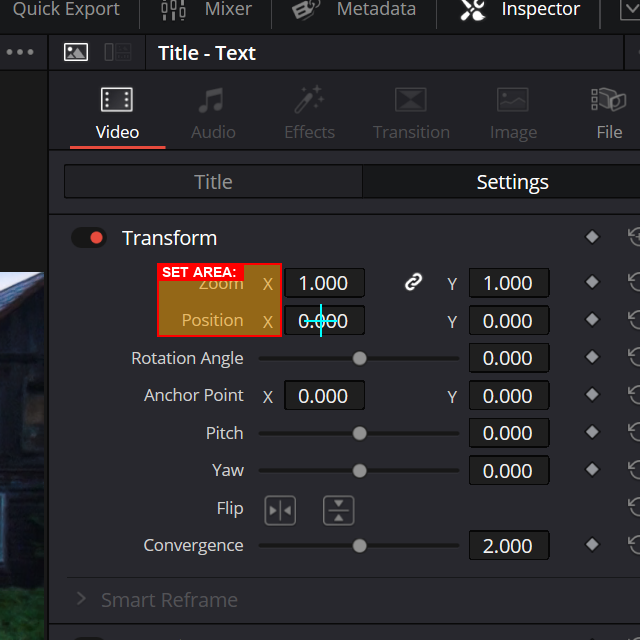

In [56]:
# comment: Automated step generated with pyPeriscope V2 
payload = '''gASVjAsAAAAAAAB9lCiMBGFyZWGUWGwLAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBSHdBQUFCSkNBSUFBQUJ3eTlYM0FBQUlWa2xFUVZSNG5PMmNlMUNUVnhiQVR3TW13aUt2VkRSU3NnVHBBckpGb1NpYVZwY09pb2lhRmlnK0Fob1VaRUZYZHdWZE1DTlFLaE5vMVRyR0lpbUlpQ3MwVnR1d3dTY3dGVlRRZHJGYTJCVFVsRUFxcEtDQjhoQklobVQyai9BSVhVaU1QRzQ2dmIvSkgrUTdOK2QrK2VYTCtTN0RQYnppNnVvQm1PbUZnUG9FZm85ZzZRakEwaEdBcFNNQVMwY0FsbzRBTEIwQldEb0NzSFFFWU9rSXdOSVJnS1VqQUV0SGdDbmkrUmxzUHROMWpPTjEvRTJwVjZiOWJLWUoxTksvUG5XZ2RxYjJBVk9YNEgwUmk5b2Yza04xUmdaQlliQTV6SGsxM0xoalZjcVJnMEZKR2FIV2xSbngyVFZqdndwMWVlbHBrMGlrSTQ4V2EvLzFYck1reFZ4K0srSVRlekZrd2x4QjNReWZzQWd2MHRBaFNtQTBZMzVuK2VueGpBUDZLMzBVUksrb2JjdHRHb3ZTdnBRTkhTSlJsMitMMlVCM3RDSVNZS0N2OWNkYlJielRsUzhVWmJENWF6ck9sY3hheFhDZFkyWUthbVZuNDkwQ1hqbDVZMlRBR3hRcklrR3Q3R3lzNHAvZ2pXUjdLVnFGMlplOE0wSWlXSlhmWllzQWJBT2ozblhwcnNqSUZ1bDR6U3ZHODVjakV2MXYzRDBMVzg4ZlRCWU1YZWFVd0JUT0pzZG5kNzQ4ZjFra043ZW52eGUrMW5YRy9ieWRoeXNVZXFPYXUwWGZUK1dGLzdvdTdpVy95WXdLWG1BSmFuWGJmZjQ1Z1VodTdyeDZDOVBYN3ZIcFhad1NwWTZ6ZWhHRzYwbis3RGhlcFAyZDhRdUxCdFRsWlJpU3owN1drcG1QaEZtQ2tjS3lKRFRRalZENytjR3NTOVZTaWFUK2RrRkdxbEJxOXViYU1HZjlVUUFBVU5SOG5zb3JyWmRJcE5VWFA3a3VCZ0xoeWRXUGptdkdsL0xPVjNlUUhGNGY2elp1SURKQmRwSFkwcGVWbkJMdTBhMnpzR2d3RXVsRStzNHRQak1mRjJVVmEzM1pYUlk1VzZyRjM1Y29SZzdKQlA4Unc5elh2VzMxUlRWSTZ5cUdyMktsU2dVZ2I2d2RtVUNsVW9QTnE2OU54dm0zQ3JKS245ZzdPL1ZYbmRGWldEUVloWFFTUFpybFEzcFVsQzBZVlY5TkNTYlE4YlI1MUZDRlNnVmdhVTNSRjlXZ1VpbGdlcUQ4NWMrdnFkVnFHN2RsWGtTOWc0MUErbGlGQlFBQUJ0UXFzSmx0UDNxd2lRbEExeTh5ZmRIcGhiSStkZzIxU1poMlRtUytQRkpySlRNT3lLV1BXVmcwUEh3ZzdpSTRML1RYZWcrVW9NWE84UFBqNm5aOTBlbGtUbEFzdy9sWlNTNWZmT1hVcFVjVzlJaHRIcnExSTVaT29rZXpmTXlhYmdnZnpLVFNhRm9QQjJzU3dMY0ZRcEg2amMxcHNldThxVFFhMWZ2OXhCU0dvK0xCNVFJeGdMN290RUZoUkRLY3U4cnpDOFVBSUN2T3VpcDlkUVdMcFhOSmlIaWQ3dUl4M3dwbVdBWEVwd2VNRHNodmNuYWRxcEdYSEdJLzN4N3pYc2cvMHNKTllhQ3Y5Y2V5ejNpbkt3Y0x0ZTdvOUVEMmp3cHk3YTA4a2orMFlwSHh6MXhmbkx5YXhmdzZ2bkM4VDkrSTF1bS9RWWgraVNkMjBHcTVlejZ0MHY2b1BhSXkyVy8zWC8wd1ByOWh6SmRoNlFoQWZpUDlQWUtsSXdCTFJ3Q1dqZ0FzSFFGWU9nS3dkQVJnNlFqQTBoR0FwU01BUzBjQWxvNEFMQjBCV0RvQ3NIUUVZT2tJd05JUmdLVWpBRXRIQUphT0FDd2RBVmc2QW94ZE9qa3cvdVRKM1g3amJGUFRIVFZhSm5lSGwzdE1ab0l2ZWVqWlFIKzN2T2xPMFptQ0c4MHZ2ZXRxbHEydHRXVy9sUVhBV0NsMFI0Mld5ZDFzNUI2VG1iRHdjYzdILzI0Q0FQTDhwZlJWN3l6OUk2SHU3SUZEVnlabFV5ZVJrWkx0ZVQ4aVZUZ1p5ZEF4K2VWRjNkK3U2ZHFxTHZ1Q20zQzRUR2JtN2hmZ09DbXBTU3M5WFl5ckhsSVk3RHorcDN2cG8vYWtVNEtTOGd1UFJvOS9NVS8xQnRJR2NYT3ZQODNjVXZQTXd1Mzl2MjlmNnpiWWVOVlNXNUxETFg2b3FRd2s1NkI5ZjEzbk12c1BSQUtvbGMrZk5sY0pqdVNXZHdPRHpXZEM0U1pPVGZBQmRyQ2JKUUdBZVpiUEhOcGhPaFFWNnMzdkVaWEp0cnUrdDJMZTdrMTBSMDJmVjFOVndVbmV6UW0xOGNtRXVRTFBENWxoRVY3M3NyL1RURFRZWFhjWVlYZmRIQWM3YytqdjdRSUFra2NNSjI0RnNmNHlMN2VxdVpmc3ZuWmpTR2hTbXZrSCs4K0xnZWkzZDMrb2crUXI3b2w3Y2dDeWsrOWJDK1JQdXJVVE5YNlZIaTJPeW1TdmFDdmNPblo1MFpWZkF5MkVNMWRjVnZCUlRrdXYrVHhmNXJiVk1iRnkwUWNYNUJONWd5L1RYVGQxMG9tMkR1NzBqWnZYVVB0RVo2ODFBcEFad1N2czJzb09abWoyajBza1diWHRKdHc5S3pmNEN6Z2x0UG56ekhyRnQ0cXJwUW9Ba0VnbDFlV0d6cWN6djZiemlOUitLLzFRZ1dZbnJWVHlpZjJmTXQ5ZDhCYkFCTzhRc3VLc29rVVpvZHVqNzhibno0NElkZXNwejhqVDNlbzErZExKdmdsODM4R2ZCN29rdHo4N25uZWpIUUI4WEIwSmJSVjN0ZlpzSzZwdTFteFo0dW51Q1NYZkZKZlZMMk5HSGt0MXV5SzRXUHJnbDVkWWpPak9Ed0FBUGRKNnJiM0w4cjUrdzJjWkU1a2d1OGd6TFpTVjdHanIxSzJ6c0dpWWZPa2Rkd2RYTHdPZFAvL1VQdEtpYVVvZ2dMejFoMUZqVlNvMVdGaVNBVUFtNU94dUNBZ1A5ZC93VHk1ejRKbEltSFA4WWwyUElmUHF6ZzhBQUlvK2d6SWFRS3NncTNUWnNYVk9IYmMvUnRKZE43eDYwVFlPQUFOcU5aRG5MQmcxMXNTRUFEMWRnelcxNTcvWGVDbHhXNk9UODZxZU93VW5wTEtjREpwWGIvNHB4VWk3Njc2cGIxVGJ1UzBkNmF3RkVuMkZoNDJpUVhSLzFMaWV4bExlb1V0aWdyM2ovN1hWRHFoVUU4OC9GUmh0ZDUzOHdvWHlOcnVWK3hMRDNuYWwwYWp1cTZMU2RpeVoxWHpqaXhJbGdIc2tKMzEvMkZKM0dwVkdvM3F2Mi9XT3M3cTVzZjdYS1g1b2FGR0EwN0xOM2pRcWpXWm5ZVUQrS2NYZzdycnBiUFFTWmU5UGU3b25NaUE2Y1QyUm9GWjJ0dFJlU09VV2l3RUFaSFVQZXphdWpFNWFid3FnYWRuSzRZM1JzRk9SWCtDWnVIblZ2dlExYXVYM1o3Y2V2ZmFpK2FlUXdlNjZqT0h1dXNWSEdTeFdsYTUvRDRCN2ppWUcyVC9wU1BqYzZpTnhtVFZES3k0bjF0SGsxVkNTUEg1M25YSDlWdjFiZytpM0k4UmQrVzNCcVJxdE5XNURmdjd0RG52LzJQRVhBdmhLUndDKzBoR0FwU01BUzBjQWxvNEFMQjBCV0RvQ3NIUUUvQThkN1F1TDJ3SjhMUUFBQUFCSlJVNUVya0pnZ2c9PZSMDWNsZWFuX3ByZXZpZXeUWEDMAQBpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBb0FBQUFLQUNBSUFBQUNEcjE1MEFBRUFBRWxFUVZSNG5PemRkMkFVVmY0QThPK2JzcjFtMDN0Q0lQVGVwUW9xUlJFVkZheFl6bDVQejFOUDcvU25aL2M4TzJMM0xGaEJpaWhOUkhvbkpJUkFTQytidHIxT2U3OC9KbVZKUWdnaFlaUHdQai9PWDNicTI5bVorYzZyZzJKaTQ0SG94Z1lQR3B5ZGszMDJXOEFZaTZKdy9YV0xOQnFOeitmNytwdGxOTTNJYzFLU2s2ZE1tYXpSYURpT1V5cVZmcjkveTVZL0N3cUxFRUlBSUlyQ1BYZmZwZFZxdlY3dnUrKzlUOU9NUFAyOGRmYS94ZWxock5QcE9KNExCSUlJb2RTVTVPSERoKzNZc2F1cXVyclp3Ui9RUDdOZnY3NWIvdHhxdHp1Nk5rbm5xN1AvdVJGQ0RNTW9sWXB4WThlKzhNSy9VMUpTZUo0L2RPalF3dzgvVWxWZEpZb1N4d1VGUVVRSUtSUUtuVmI3NzM4L04yL2VQSVRRaGcwYm5ucnE2ZHE2T2xHVUpFbWlhWnFtS1l3eHgvR0NJRWlTMUZuZmtRQ0F3WU1HQTBESGZtdFJGRys2OGZwRGg3SU9aK2QwNFBaSWRXQ1haMjN3VlE4L2N2ZkZLYWRiTEdYdWZZLy80NGF4NXlKRnZScENnQkQxeGYrK2ZIL0pCMS84N3l1RTZuOTBqTUZvTkdvMG1uWHIxbi8yK1JmcjFxMVhxOVVHZ3lHOHFXMFFOZTNXUi82NmNGUTNTYzA1b0ZhcEVoUGk1ODZkZmUyMVY5OTR3L1VYVHArbVZxdGlZMlByYkRaclZSVUFBT0RRNVl1S2l4VUtoZEZveEJpM3VzRWVwWGRlN0JoalFSQjRYdGkxZS9kTEw3L3M4L2xZbGgwOWV2VEhIMzk0d1FVWHFGVXFwVktwVUNnb2lrSUlaZmJQSERwMEtNWjQzYnAxenp6N2YzVTJHNVl3QUdaWlJxZlZ6cnJrRW9abWFKcW1xTERjdElrdXdaemg4cXFVc2RPbmpNcU1NNnBZQ2tEaUEwNXI5cmJmTm1YVjhtZXlGWXFpV2FYaURIZmRsclM1OTF3M3JNVzl1bVRUdjcvYzNZbDc2YUVZaGsxT2p0UHI5UmhMRktKY0xsZEZwVlVRQk1CWXdqZ1lEQjdQendjTStma25wazZkZ2dFQVkyaDRsTU1ZZDliOWZmd05qODlJQnFuaXozYy8yK1pxTVRkNjV1MS9HUnNKVUxMeGhhOTNBZ0FBUmRFS1JXZWVKTjBUeGxpdFVpVWxKYWFscFNZbUp1cDBPcHFtQVNBNk9rcXBVQ3FWQ3I4L3dEQk1jbkpTTUJpMDJlekJZRkJlTVJBSUFnRGRvZHZ4bWY0V1JJZkpNUmdoMkxUeDkrOS8rR0hSd29VS2hhSnYzNzVQUHZINGtpVWZyRnE5bW1WWm1xWVJRcEVXaTFhcmxTUXBOL2RvWFcwZFRkTUlVUlRHS3FYeWtrc3VmdmpoaDdadDM4N3haM1NqcmZlMzFlV1BKS3k0YmNTOWF6cjk2eEZuZDVNOG93QnNHbi9kNHVtcGltQmRjYzdPRWdjSEFOcjRJWU5IWG5ycm9NR2JQLzE2dDcyOTI4bisvdld1S01lck83bzUyeG82d1ZuU0JYdHByNEZYUEhnaHQrS2ROY1ZoVEFNQVlJempZbU1uWFRCUnJWWTNsak52M2JxOXFMZ1kxOC9IR0FOTjA2SW9Zb3dCTUFib29vSm12OWVyakI4d05ucmJodXBtYytKR1pFUUdnMEdsc25GS3phYVBYdG5VTmNub0pqREdMTXVrcGFhbXBhVWxKeWVwMVdvNUo0UXhSZ2pSTk0yeWpOOGZVS2xVV3ExbXlPREJaclBwYUY3ZXdZT0hPSTRIQUoxT0s0cFNJQmpzV0xYQW1md1dwNk9mZk92OVNVZk9YYlRXVDczbDNxUWpMMzI1Nnh6dDd5eUpvb2dRSUlUKzk4WC8wbExUSmsrZWhCREt5TWo0Kzk4ZkV5WHAxMTkveFpnR3dLSW95cVhOVTZkTy9mWFhYd3VMaWhpYUZpVng4dVJKRHo3NFFHeHNMTS96Q0tIZVdRM1U1NW5mdDQ3OEpXN2VxK0ZPU0FlMGpMNXlIVUViWlJYeWJSY2hkQVlCT0g3bWd1bXBDdGVoSDVhdUtXaDZETnYrUjlTRXEyK2VQdTJhbWFVZmJLZzh3NVIzTG0vNTloM2Q1b0c5Zi85VU5Sd0xkeW9BQU1Cb05LalY2bzBiTnhVVkY2ZW1wTXljT2NOZzBEZk9sYzhEaWtLU2hGbyt5Z2tOT2lVbFNxZmRxazdzT3p4dXc3cVRUNVYrb3dkRXVDcUxwTlRVVHRsUGQwZFJsRTZyVFV4S0hESjRrTmxzbGpQNmtpVHhQRS9UTkUzVGtpU1ZsWlhYMWRsWVZwR1duaG9NY3JtNXVSZGROTk5vTUZJVURjQlRGTlUvTTlQdGR0bHN0bzQ5TDNYaWIyRVkwU2NPdUNNZFNFVEg2SWVmMi8xMUFsR1VBSVRDd3FJMzMzelRZb2tZT0hBZ1FpZzZPdnE1LzNzMlBTM3RpLy85eitmekZSVVYxZFRVeE1URURCczI5SjEzM3JuMzNudXJxcXRIanhyMSt1dXZxVlNxSTBlT2NCeUhzZFFySzRBemJwbzBBSHkvaERzWm5VS1NwRWtYVERTYlRidDI3Nm10cld1NUFFVlJBd2NPNkp2Ulo5djJIZTBQd0VNbmo0aWtiSHVYaDBaZkFBQytac2N2ZS9yZk1XblloQ0ViZmpvTUFERDJoaWN2TkIzNkpqVHpsemIzbnV1R09ScEt0Rm9zWUI1MHlkeEpReFBNQ2hwQTVOeldmU3MrLzZORjd0VTArSXFGbDJWQzF2Y2Zyemx4QnVVd2FiUHVXamo4cExYTVV4YmZOVW1mdDN6SlQ3azhqTHZ1SDlPbGRmL2RwMTh3YzNTaWthVWszbE4zYlB2UGEvYUdGS3F6OFJNdm56MG16YUpqS1JBNWUzbldsalVic2h2eSsybHo3N2t1cmZEckR3N0ZYWFg1cEZRalMxVnNXVms3ZFBaZ0V3c3diTkUvaGdFQUZHOE0yOU02eGhnRERnYURKMDRVU0Jqbm56Z3hlZktrWnN2STkrK1dEOVlJb2UzYmQ3QUtsdWY0VG5udXBvVDhRNFV4c3dlTXpseTNLaTlrK3NCQjZWcGJ6aFpudjlTbWFTbHo3MXMwM0xIcDMxL3VCdjJvNisrNEtLNXEwOGRmTnBTeXNQMnZ2R2QrcG12YmtrLy9sS2VZQjgrOGRMSjhCb20rbWhPN2ZsbTF2YnorQnh4L3crTXpZTk8vMTNqbnpwOHhKRTVEZTNOK2VQT2t2WjlqSnBNeExTMDFOU1hGWXJHb1ZDcUVrQ1JKUHArdm9yTFNXbW50MHljOVBqNGVBT3JxNmlTTXJWVld0OGZOY1Z4dGJaM2I3UzRwTFEwRUFnekRaUFJKajQrUE8zZ295K2Z6ZCt5bk9aUGZBdUNVUnpqcWd1c1hUVTdSQU1DTUp4K2ZBUUN1UTErL3M3WVEyTVRSTTZlUHFhK3JrbmlQOWNqdks5YmtOQldTbVFmTm5UOTlVSXlPcFNUZVU1V3phYjNIRzdxM1U2NGVQWEhSOWZYN2Uvd2ZNd0RBZGZEcjk5WVVBWnN3OHVMcFkvbzNybEIxWk9PS3RkbnRMcFRyYWhoalVSUUZVVGlVbGJWa3lRZXZ2ZmFxVXFrRUFMMWV2M2p4elljT0hkcTVjMWRWZGZYR1Rac0dEeDZNRU9yVEovMmxsMTdLemMyZFBIbVNTcVVLQkFJLy9QaVRKRXFTZFBaVlFvK3NxWHhRZkhuTWU3cjNubHM4S2tuTEF1OHR6ZjcrbFZ2LzhYMTkrYUZoK2hQdlAzLzkrRlNMaWdiZ3ZkVWxoMzk2NFlybjFnRE1mWC9meDJPMjNYWm4vdFZ2M2pHamoxbGU4N3RYYjN2aSs2cW16USsrNmIrdjNIUFo0Q1F0Qzd6OXhMYi9QWDNuaTM4NEcrY2FwejY1NUxuNmJZc0JkOFdmTHk5NE4vYmRUKzhjYlFhQVJ5ckxId0VBYTBOcGVjaW14RUJkMGM2dm5ycnI1ZDhidGpYMy9YMGZqOTk1MjdUdmhuMzYyaDFqNDFWMHp2dGpMbjYyN095T1RZZTB6TGRFUmxvU0V4TUJZTlB2bS8zK1FPZ3NpcUxTMDlOR0RCL09zb3hHbzJsM0FCNlFsc0JDNVpGZEZhM01jeHc0VVQwcExpNjFEeHcrY2ViSjE0KzYvdGFMa3FXNi9QMS9GRHQ0Vmh1VnJMYTN5RXF6ZmVZdXZDeFRWZkw3WjJjVWZRR2c4TmUxQjlPdkhYN0p6S01mcmozQkE1Z25YekV4MXAzMTNhcmNodTFRMFJQdm1Pc3IzcjNtNi94YVpjcUVxWk1HWFh5akZuMzAxUjQzQUFDa3pQN0x0U1BWdFRuYlYrM1ByMU9takpvNGZ1VGx0MGJyUHZsNlo5UGxyUnA0N1RXWjJwS0RXdzU2d1ZHUVgzbnNDKy9zMnlZWWpxeitka2MxQUhET2x1azZoM0Q5S1VMVHRDZ0tHR01KNDJZdGVrNGw2L0JoTEdGQWlHRTZwUW0wdFA5bzhjdytxUVA2UVY1ajhRQTdmR2lHc21MSExydXhYK3NydWZldDJ0TDNqb3N1bUR2dTJKZTdIQURzd0VzdkdxQW8rMzFGZmZSbGh5MjRiVzQ2WDdScjFacGMrUmVjdnZCcUtmUUhvcUxtTHBxYzdqcXlhN09EQzFyRFVsQ0RNZGJyZGYwek01T1NFcU9pb2xpV2xZK24zKyt2cXFyS3lqcGNYVlBqOXdjb2lwTG5xbFFxdVhqQzQvRmlqRFZhVFcxdGJYbFp1VmFqR1RGaXVNVmlLU291S2lrcFBZc2Y1UXgraTFNZllVZldiOHZjazY2K2JLQnIrOGUvSFFFQTBXY0RBSURvMUVTMkludjlocXdLbHo1MS9OVEp3K2JPZDVaOHV0VU5BTUNtejEwMGQ3aTZObWZUMmgzRlhHVEc4SW1YWEdzRWdKRGIrS2xXdDJldCs5bzk2ZHJMQnJpMmY3STJOMlIvTWFsSmJPWGg5UnNPVmJvTktlT21UUjUyMmVXdWt0WnF1TU5JYnZDOGNlUEc3Ny8vNGJyckZzbEZsQnpIK3dNQkRGaVNwRysvL2U2Q2lSUEhqQmtEQU1PSER4cytmQmdBQ0lLd2J0MzYzMzc3VFpLa2hucWlzMFFQdW52ekV2K1I1YTg5L08wQmQ3L0w3MzNzcHNXdmZtUTdjT25yK1FBWkQzMyswUU9ES3RhKzg4QUgyOHFOZlNmT3V2RFNLTDdwRWMweTllV3ZweGFzZWV1aFJ3NjYrODI3NzdHYmJubGpsZDQ3OWo0NTkycjh5L2NybnBubzMvMzVQNTVhZVV3LzZjNEg3MzdndzYrRitYTmZsY3NyWnIrejhZTUYwYlVIMW56K3piRmFueVpwN0JCblhrbmVwbi9kYW4zd2crY3ZydnBrL2o5WEFnQmZuUXNBZlI1Y3VlS3hVZjdkMzczdzhyY0gzUDB1ditYK2F4NzRjbVB5dlRQdVhSRVN6eS83YXNtRmx2M0wzLytwRGtvM2h5UDZ0b1FReWpxY2JUS1prcE9UaHc4ZnRtL2Zmcm5PQ0FBQWNIUlU1TWdSd3cwR2ZXN3UwY3BLYTdzRHNFR3JCbjlSamJ2Vm1hN3lHamZFR2lNQnpqd0FaMTQ0TVpXMWJ2M2dzejhhYnBmYm1pL0M5cGw3MnpYRDFLVWJQLzFxbCtPTWR3REZhNWZ2VGI1NTlLeUw4NWF1c1UyY1B5SEdkZWk3MzBMejhScFV1dUt6bjQveUFBRFZLNDVYOC9jdEdqNXVVdHFldFlVQWhrbFRoNXY4dWN2L3QwSU8yRlZyangrMzMzVDd0UEZUK3U3OCtYajlCZ3laZzF5YlAvd2dKQ0lIL0FLQXhMdXJxcHJYc0lVTG91VDZvK2JWRWhSRm1TUE1icmZIYkRMSXpYOWtaclBwZ29rVFltTmpKVW1pS01wcXRXN2ZzZE5tTytzOHhhRkR4NlpsOUJzeG5EMTJVUDRKRE9PR3B0SFdyWWZjTU9XVUs3bjIvTGdoN2I2NWsrYU1QL2IxdnRnNUZ3OWdpamV1M2w2ZmxyNXpwMlZRWlp1L3FBKzQxU3VLZU5WRHMwNzZnUktIcEdWOXQyUjFRVWRhc0hRU2hZS2RNM3VXeFdLUmI3dWlLSG84M3RMU2tyeGp4NjFXS3dEU2FqVHBhYW1abWYza1o1MitmVE5xNitxc1Zxc2tZWU5CUDNUSTRLS2lZcGZMbGRrL004Z0Z0Mi9mVVZOYmU3WnBhdTl2MGRZUmR0ZFd1M2tNSVBxcnFrTUNLTC8vaHcvMzEvOWRYZld6RUptMGFIanFBTmk2R3dDaUowMGJHbkpOVlZXVkhyTmRmdThWQTVUdFdKMzMxRlc1T1FsQThGZFhuYlMvbjVZMHJGQlZ0VXFJU3JwdVdNcEEyTlp0NnFUcU04RUE0TVgrSlI5OFlEQVlMcnh3K3JGang5OTU1NTJzckt3Qi9mdHJ0ZG9qdWJrUFB2VHdkWXNXVFo4K0xTSWlBbVBzZERxWEwxL3gvUTgvdUYxdVh1QUZRZWlVUnBGYVJmYnpZNjkreHdrQXNIUFhoanJ6dm8vblQ3MENYbjhWSURNeldXdGQvOUt0YjZ3QkFOaTljOTFYL3dsZFUyV3UrV0xXdkg4ZEFRRFl0WHZkZHZ1YURYKzk0cDVIL3ZITDYwNkFhOTU0WURKOTZLMUZWN3lRTFc5NVkrREhBMDh0ZnVTYVYyLzdEaURqbnc5ZmtlQmMvK2kwRzc4NitibG8vKzRCUGdtQXMrL2EzZmg3WGZPUDI4ZXFjcGZPditLZjladmE4UE91Slg4c3VleStCMTlmOFg4RjlRdkZUcDlWOWRhbEUxN3U0cTZCcDlIc0YwRUlGUmVYYktXMlR4Zy9mdkNnUVlEeC9nTUhnMEVPWTJ3eUdxZE5tMm8wR291S2l2L2N1bzNuK1ROcWhNVUgvYWVZSTNhNFhpSXhQVUVMRlh1Mm4vTEdUdldaZGN2VncvU08vVDkrZTVyb20xeGZDRmF2dm13S0FLQnkwM2ZiaysrYWVQRmxpa0JtakN2cit3MG41Nkw1eW9LaklST0s5eHl0SFQ0Mm9VODBGRmJEd05SNHluMzRVRzdJZlB1K1k1VlRacVFQSEFqSEcrcWhYRGxiZG5hYjRxNHpJUEFDeTdLVExwaG9yYXFPallsbUdFYmdCV2hvdXBXUWtGQmVYbUcxVnNiR3hpWWxKY1VWRmRmVjJjNDZIM3o4VUw1cjBNQitROWlEKzNrQTBBL0xpQlVMMSsxMFEySmJhL0VIbDY5TnYyZitwTG1YcFZvR01DV2IxalNlREVucENWcXBmSHZJOGVkUFZOWkNuNFQwWkRoZVg1RWhsZXo5TFp6UkZ3RGtkbFh5MGVONXZyQ3c4R2plc1lxS0NwNFg5SHA5U25KU1dscHFURXlzV3EyUzIyRkZSa1plTUhGQ1JVV2xJQWl4c1RFVVJSVVdGU0dLS2l3czRubGUzdUJaSjZwOXYwVjdqdkJwRk5jNUd2OW1NNUtpbTExVGZHNWV5YXdCQTlxMWVyc1UxcDdoQ3VlS0pFbVNKRmtycmUrKzk5NmVQWHNPSFRwVVVGZzRjZUxFeC8vK21NVmkrZWMvLzdWK3c0WWxIM3p3ODhxVktTa3BvaUFVRnhlWGxKWktraVFJZ2lDSW5aV013SjUxNzRRVXk2MHBLQWRJNkRNSDRCZklxNndUWXk5Ni9QMWJxeDcvWkc4clJYY2wrOWFFVkwrZmVIM1ZubnRHalJtN0NHQUp6Smd5TkVMTSt1aUZwbmpvK2pXNzhLbUpRNmJNaE84MndHV2ordFBWdi96NFZYdEtKV1pmT0NJQ3NyOE1iYTNyL1Bubm5jOWNObi9hVFJuLzkweCsvVFRycjIrRk9mcTJDbU5jVkZTc1Vxa21UaGpmdjMvL1FDQjQ0T0JCZzE0L2R0d1lrOGxrdFZwMzc5a2pYOFZuRklCWnBmb1VjenJXR1FJQUlONWlBbWR4NVNsdmpqRVRya2hXMHY2OFB6ZWU5Z2JhckJWMDBCcFMvMjNmc3VLUDFOdW1EekE0OW4vYm9oRGI3em41UEt0Mit3Qk1TZzBBcEZoTUFQYWFrelAyZkpYZEE4bmFrRzVQanJxaTB5U3UrMmg4WGtNSVZWWmFTMHBLWW1Oakl5TWpLWW9xTFMydHFLaVU3K3dNd3dpQ3NIbnpab2ZUYVRJYUZ5NjhscWJwMEI1S0hWYTQvNWh0Mk1oaDQvVDd0N29oYnR6Z2VMRjR6Y0hUUjBmKzZLclZoKys4ZGtpZllORzZuME9hM01kYlRFQ1pMbnI4SHhlZHZMeUxhc3JPZSt4VjRRMi9BTUZBc0xpNFJLL1hzeXdiQ0FTT0g4OHZLU2xWS2hYOSt2VkxTMDJKajQrWCs0UEttU1NLb2lpS3NsZ3Nack1aQUVSUlBIandrRHcwaHlBSW5kZ090bDIvUlh1T2NITnNWT2JFYVZNR0p4bzFHa1hEVXZXeE90NXNhSGxOK1lOOE8xYy8xZjc2VFpvNmVVajdWd2duakJBcUtTNHBMUzFGQ0kwWlBmclJSLzZhbHBaV1hGeGNWMWNIQUZqQzVlWGw1ZVhsZ0VFUTVVYVFvaWpLVDhhZGt3SkgzU21MYS9QLzc4YUh6Ri8rMzFYUHJaNzcxeFA3L2xpKzVQOWUreTJrcUFGc1ZTZDM3U3l0YzRCS3JRY0FHSjZXQUhUQ1k5Ykt4MDdlcEpWUkFNRHN6R1FhU28rdmFGY0NCeWJGZ25WbjFzazM1clVueWdFU29qSUJHZ0p3K1ludTJuQkxrcVM4dkx3SXM3bC8vOHloUTRjRUFnR3oyWnljbE9Sd09QWWZPRmhUVTE5ODFlNEE3UEw2SWRrVXBZZmNWa3FoRFFsUmVuQVhubldSV0N0WWY4SHFQMkQ2eGJPdUhWditaZHM5bmRwc0JjM0d4cHBaQUZCSHhwaWh1Q2ZtVmpzTVkweFJsTWxrY3JzOUpwTXh0SnpaWnJldldyVkd3aElDaEFGVGlLSVpSaTRqeFFDQ0lOanNkcHFtN1hhSEtJcHk2TzZFZTMvbHJpT1ZveWYxSFc3WStxZHVTSHFFOTlpbVErMWFUNWNRcFFjQTFoUWR6WUk3OUlidFByTHErKzNOQ3ZzYktnZTdDVVJSUi9QeWtwS1RJc3htbFVvMVlNQ0FtTmlZdE5SVWc4SEFzcXdnQ0M2WHkycXRxcWlzU0VsT1RrMU5sYlBMY290b204MTI5R2llUnFNR1FINy9xWXFoT3FTOXY4VVpIZUg2T3FQYW5GM3Jmc3V2ZGJtcUhJSHhONFNXVHJYdGpGZG4rOHkrNCtwaDZ0cWNuZXZXSGE5enU2b2MvbkhYL2FQZCt6dG5LSXFpYVpwbFdhVktxZFZvdkY0dnk3TFRway9yMjdmdjFxM2JYbnI1NWNMQ3dyallXTFBaakFIc05sdDFkUTBJZ0RHV0pBa0FuYXNSVjZxK2YvaWk3MStlY05NRDk5MDVmKzZqbjgyOWNmUEwxeTk2djUwWnplcDFUOTN4WHM3SjA3anFvNTJmeXU1UEZLWGRlL1pLa3RTL2YrYUVDZU1waWdvR2d6dDI3Q3d1TG1sOGhtNTNBTTR0TEw5MFFNYkFjZkZiTnJSb2gyVWEwU2NhdkxuSFRsMEJyRmF3cDVoVDYzUkRpaVdPaGVMV3N5aGwrMy9LMnMveVNmZGUwZGdHcHdQcW0rMzhzYzQ5K3VLVzI5R1pvZ0NLbWo1SDZ6VUFYTkFIQU1YVk5na3NVWDFPcXQxbVk4dzY4SmQzcS9ZZGJSQkVrV0dZaVJQR1YxWFh4RVJITVF3ak5KUmhVZ2hobWg0OFlKQ2MzejJTZTFTdUtjWllrcTkyQ2xFVVJYZjJoZTgrY0x4aTRwUUJFK0tzNmdFUnR0ejJ0VW11YnoyM0ppZHE5dmpHSm5VQVVHVjNRckplWjY4NkhPNU03dW00M2U2U2toS2p3VURUZEhKeVVtSmlBc013a2lTNTNlNkNnc0tTMGxLcjFjcHhuSUpWSkNjbjB6UXQvd1NDSUJRVkYzdTgzcGlZYUp1dDB4OHEydkZiblBFUkhqQjZvRWs4OGV0blB6ZG1waFBOQm9ENkM2YkM3Z0l3bUpOUHlxTFNGR3JuNnEwWU5HcWdTU3hZKy9tcS9RMHJKTGU5UWpoUUZNV3lMTVBRTE1zdXZQYmE5UFQweno3N3JOSnF6Y282L01zdmE1Y3NXVkpXVmpacDBxU2JiN294TFMwTklaU2ZuLy96eWxYcjE2OFhSRkdTY0dkMUJXd3Y2NDR2bnR6eHhaTXhWeTlkOWQvTDdubmttdmR2K1U2ZUVac3lFMkJEMDRKSkZoTUU4dDBBQUVkS3JUQXFKanAzMTZldHRUcmRWbElGa05SM1BzQ0swKy8rWUdFNWpFb2Jhb1MxSVp1YTNTY0J3RjRUeGk0TXJXcGpJQTZPQzJZZFBxeFNLZnYwNmNOeFhGYlc0YUtRNkF0bk1oUmwxcDhIYXFXSVlaZGRuSDV5TEdXakpzd1pFd2UxT1hzYmpvdUlKVkNvZEUyTHNmMzdKNStxOExyZ1dJa1g0dnRQTkxlMWJ6NzNsMVZad1pUcEMyYkd0VHU5b1VrY2R2bWNBWXJTcmF1Mzd2MWxYYTZRTW1uTytKTjJSeVdrRHc5SmJmcTQvcEhnS2o5UkRRQ1FkNktNMTZjUEd4RHlwYzNqQnlaUzNvSWpwKzJJU0tGVEY5R2RROWJLeXBLU2txaW9xSUVEK2tkSFI1ZVZsVlZhclhKV0ZsRVVRbWpzMkRHVEowOGFOMjRzUWdnMXEweEFTUDVQNXo1OXUzWmxGZklSQTY2WTBVOXJLempjbmxiSmNUT3ZuaERuT2J6MnQ4Ty9yOWhSWlJneXEvRThMTW92ODBMQ2lKbDlUdldNMTIxd0hGOWFXdVoydTZIaGR1enhlSThkTzdaaHc4WmR1L2NVRlJWTEVoNHllSEJHUmgrS291U3JtdU00YTFWVlVWR3hRcUZRcVZSeUFYWG5PdjF2MGE0alRGRk5jMVVzQ3dJWGFBclhjZjFUVFkwZitQeUtXakQxR1pJYXNuWnFab3ErbmF1M3RqOEZDMEl3ZElVQkxWY0lLNHFpR0laaEdGcW4xZDE2NnkzMzMzL2ZnZ1ZYUGZqZ2c1SWtiZm5qanhkZmZLbXdxR2pxbENsUFB2SDR4SWtUNCtQajQrTGlKazJhOU5qZkhwMCtiUnJMTUN6TDBuUllScUNzK243Rm5ob3dXcHJlR0pBd1p1NEZUZk1ILy8yS01Tb3haL2MzQUFCck54Mnd3ZUNyWHI2ODFRRmtYZDl0enhHakw3anErbE1OTDh1d3hzYS9ONjdkWTRYQkZ6MHl1R20yOGZwcnA4U0syWnUveUc5bDNXNEx1ZDJlUFh2M2xaU1U1T1FjT1hvMHIxbjkwUm5VQVZkcytPSDM2TVhUUnkrNFB5MC8rM0NsRjBBZUNTdkRvZ2dXYmY2dWFSU09ySnlDS2FsOXAxOHpUZm96dHc0c0dTTW5qazNDdmxOdE5tL0xydUtNQ3ljdXZzVjhZSDlPQVdkT1RFaEo0blo5dStYa0Noeit4RysvWnFWZU0rYUsyWVdOV1ovbXRBa1RKMXdRT3NGWnVDM0hDdnBSMTh6TWdKSk5xM1k0QU9ESTZ2WDk3NWsvNWJMeGVWODBOaXJocGNRWmR5MDBidHBlMzhWaWtDRll0SDVySVFBQXVIYjlzcVh2TFRQbS9XVlJ6Ty9iY3V1VWNVUEhUaGtaeDVkczNISWMybEpZVVMybFpFNmFudWM1NHRLcnFCUEZZUnFrQkNGa3N6dCtXZnNyeHJpK25KbWlhSm9KSGFXRmJ0QnMzWkNnMjhvWUhXZUZ6emxXTXFOUEg1TlU4ZWVPZGh5WnRGbVhqNGx3SGZ4KzNRa2V3UDduOHUxOTdwbzBhOWJSRDFlZDRBR09yMWwvSkdYZXNLdnYxTy9mbjFkWXhwa1RvNk9TTTZKdEd6NWRGK1poeUpwQkNGVldWcGFWbFJ1TlJvUlFNQmpjc1dQSHNXUEhHWll4R28yREJnN28yemNqSWlKQ0xuWjJ1OTFWVlZXRmhVWEg4MDhBUUdwcUNnSVFPNjhaVHBQVC94YW5PY0tGSmRiZ3NJd1JsdzRyMjE0SldzWlJrRnRjTVMwbGM5bzFZL2svNUY1RzR6TzB3YWJOVmYreE8zL1luS0ZYM01KdTJ5SjNReG8vdG8rcWFZSFRyQTVGcFZYQllSa2o1b3dvMzFFQld0WmVlS1NvWW5weTV2U3J4L0JiaW9PV2pKRVR4NTI4UXBneERNMHdMTU13R1JsOTdyN3J6dG16Wjh1ZDBPYk1tVjFkVS8zV20yL1pIZmJrNU9SYmI3MDFKU1dsOFFhTkVJcUtpbnIyMldkeWp4NHRLQ2hVS0pRQVhDZDFRMnJMM1ArdWZ6TG0wSSsvL0xyOW1NdlFiK2FpdjF3VTY5MzMrYXJHK2Q3SU9SLzlZVno2MWdmYjVHNUl3OWp5SDk1N1hjNm5mdmZ3aTNPMnZqVC83YzB4VTc5ZnQzV1BOMlZNLzM2anAvWXJmbUhHWDljQTVMLzV6cXA1Nzh4L2NmUHlVWjh2LzdWRU8yYmtzQXNpYytiYy9UYkFtajFIdmZNblgvWDJuWHZmUFFEUjZvSlZmNng1L05rVlk5NjU3Y2ROU1V2Zi9tQ3J1OTlGaS82eStDSmorWW9uM3l3NFZjckRwZTFmQkNIa2RudlcvcnBPSHBPLzJkd3phb1RsMlBuMWtzcXgwNmVNeWh3K3BSOHJiOHB2M2I5NjlZYVR4b0xtRHk3L1ZuUFZaUmVNdS96R2lYSW4rdlZmbEEzNHk5eFRqT3RyMy8zdEYvNExMNWs0ZE56c1FSTUJSTTVldENYUWNqRys0TmUxaDFPdUhUYjdrcndQV3U5UFl1ay9iV3IvMEFrbDRyYWN3UGpMcDZSQ3ljWTFEZlhIL05GVjYzTHZ2V0xLRlZPT2ZyTEZJWCtIM04vK0VJWlBtck5vZ29LV2VFL1Z3ZFZyMW1VMVZuVTdkbjc3UC8vRmM2ZU51ZXpHaWZKQUhQdC9EaG1JNHhScS9seTdKZWJ5QzhaZmZldEVpYzlmLzNyNEFyQThJaHJkUHpOVExtYyttbmRNSHZLd2ZvbUdzNmZWRUNzL2Q5T2h5M2NPZm45Vy9yUSttZmI4ck5NV0ZMSjlaczhaYm5BZC9tRmR3NU9YZmN1SzdYM3VtSFRwbkJQdi9YeUVCLzdJeXFYZTJrc3ZIamw4U3ZvWUNrRGszTGJ5STRlNlZSVndQVUVRQ3dvTE16TDZ5T013YURTYStJVDQ2T2lvdmhrWlpyT1paVmxKa2p3ZVQ2WFZtbjg4MzFwVjVmWDYxR3BWaERsQ285SFUxdGFLa3RRRkl4R2UvcmM0elJFK3ZPblhaUDFGZzJmZk9BREUyajFmTDkzNDU4OXJEUE9uRDdydzZyN3lPQnZyLzdjaGZzRjFrWTJieS9yMkUzSHUvT21ETHJ4NlVQMENuKzNvZS9NVldubTIrelNyUS9hRzM1SjBNd2ZQdVdFQWlMVzd2LzVvL2RhVnE0eVh6eGc0L1pxK2xNUjdyRWMyZkw0aC9wcnJMSjE5b0RxaU1lL2J2My9tNDMvLysvang0eGltL3E2TEVMSkVXQlJLSmNmenFTa3BBd2NPYVBiaklvU01SdU9ERHp6dzRrc3ZWVm1ya0VJaGlLTDhOcVN1QzhONXVVVXdmZDdEMHhZOUJ2SXdISCsrZE8zRC8yMnFnVHY2OFYzYmhqNTN5K3MvUHFxaWVXL3BubmNmdmVlNTN4cG1PcjllZkZITjAyODh2ZkNLdXljc3VxOStHSTkxUDlRWGpqcFgzbldwdi95TnB4ZGU4Y2dyaTJnUUEzVkZLemZMc3o3NTkvTmozbnhzN2orL3VBajR3cTl1WGZWSHZyendlODh0ZnZDZDJZL0tBM0c4ZFVQSVFCdzl5Nm1HcFVSbjhUckNwdTY1SGEyYTdRYkdYZmVQR2FhbURrdmRUMmU4QWcrTG9uVEQ5WXZVYXJYZjcvL3lxMjlDTTd1Q0lOeDZ5ODA2bmM3cjlYNzh5V2Z5M1FGamFjaVFJZVBIamYzOTk4M0ZKYVVwS2NrekxweStZOGZPUTFtSHorZVhzWFRLNndncGhDNjlkRTVjWEJ3QWVMMWVRUkEwR28xQ29jQVlCNFBCMHRLeVk4ZVAxOWJXK254K0FEQVpqVEd4TVFpZ3RyYk83bkQweW1FSXU2M09laDJoUXNHT0dqWHEwVWYrT21iTW1OQVFXMVpXdG5qeExXWGw1UWpRTmRkZTgrd3ovMnAxSTM2L2Y4MmFYOTU2NisycXFpcFJFZ1ZCNURndUxHZkMzUGYzZlR5Ly9QV2VPV0p6Rzg3eWRZUUxyNzA2T3p2blNPN1JEandjbituYmtFTHhKOVlzKzkxOHk0enBpNitIenpvMFJBWnhiaUFBVE5NMHd6QXR5NWxsTFI2b2tjdnA5UHY5MDZkUDQzbGVvVkQ0ZkQ2SHMyYytmSFl6RXBaeWNvNllUQ2ExV3EzVmFnRkFGTVhhMnRyeThvcUNnb0pLYXhWRklZUW92VjRmSFJXcDFtanNkbnROVFMzZm9kZmdFT0dGRUtJb0tpWW01aSszM3hZYWZUSEdoWVZGVHp6NVpIRnhDUVpBQ0NvckswVlJiUFh5VkNxVlYxMTE1Y3laTTVaOSsrMFAzLzl3b3FDUW9panlLTlo5bkxPM0liWGsyUG50ejVhL0xCZytmZUhjMmpNYm9wazRoNXFkSHEyZks4MFdLaXNyMzd6NUQ1UEpKSDkwdVZ6bEZSVzk4MDBzNXhxeVZsWFYxTlFtSmlhSW91aHl1VXBMeXdvS0MyMDJ1OXpIVjZsVW1vd21TNlNGNS9uS3lrcTczZDRiWHZoN1hwS3Zsd2l6T1MwdFBmVGFxYW1wZWZlOTk3SVBad3VpSUlvU1JhRXFxN1cwdERTMXRUZGd1TjN1bzBlUFdxMVZITWNwVlNxQTlvNGpTM1IvWnhtQUFmaUNOZSs5UWw0ejJaMWhER2Q2eFNJRWdpZ1VGUmRMQlhKYk5LQW9paUl2QSs4a1BwOC9MeStQb2xCNVJVVkpTYW5MNVJZRUhnQWhoQ0lpekJhTFJhVlUydTJPbXRyYXhyZi9FajBUeGhqNy9INjczUWJRUjU0a1NkS1NEejVZdDI1ZElCRGdlVUdTUklaaEN3b0wxNjFidjNqeHpTM2ZnYTFTcWFPam8xZXZYdlBUOHVYeUd3bEo5cmU3MFdnMUZJVTZNRlRaV1FmZ25tN1gxLy91SVc4VlBVdWlLTW9ENnJTYzFUaldUc2cwdWZBTUw3ejJHbzFHNC9mN2wzMzdQZFg1VGJIT1V4ampFd1dGK1NkT0lGUi9TQkdpTkJwMVpHU2swV0R3K2YzRkphVk9wNU1jN1o1T2tqQkY0Wkxpa284LytVU3RWaWNtSmpxZHp1KysrLzdMTDc4U0JaSGpPVUVRRUFKUkZOeHU5MGNmZmNTd3pOeTVjMDFHRThzeWdpQUVBZ0czMjMzcytQSGxQeTMvL2ZmTndVQlFFRVdlNThOVklyTG03bEd4ZDRkbjE5MFdRc2htcy9YTnlFaE5TZWxBUWZSNUg0RFBEd2loUFh2MnlxMmdFVFJ2YWRrMEsrU09MNys1SVRzN2gyRVpnUmRJOU8xY0NDSFUwRTBjWTZ4VUtsVXFsZC9uOTdnOUhxOUhIblV5dkNra3pwNzhBZ2FlNXpkczJGaFJYdEczWDcreXNyS2M3R3hCZnErQ0lBSUF4aUNLRWtKaVRXM3RhNisrdG52WDd0VFVWSlZheFFVNW04MVdYbDUrNE9EQlFDQWdpVkpqRStod2Z5MmlDVVZSKy9ZZmlJcUs2dGh3ekNRQTkzNXlLRDJTZXhRd1JoUnE3QVhST1BmSWtWd0pZd29odXNXc25DTkg1QUVvVDlWNml6aDdDQ0dPNDJ3MkR0ZS9KaEtSNk50cllJd0ZVY1FjUHB5ZG5YUGtDR0FRSlVrdWpBck5NTWtkZkNVSnIxdS9YbjV0R1VEOWkwUWxMRWtTRmtWQkZDV3BTL3FoRVdmRjZYUTVIQjFzb0VvQzhIbEI3ZzdSOENxRjVqbGdtbUVvakpzdSt4QVVSWk9RY0E2RWpua1N6blFRblUzT0JFdVNKQWdpaFJBR0xFbXROSnFWRnhORmthYXB4b29Kak9WeG9ERUF5S0dYWEliZFU0ZC9GeEtBend2eWxTc0gyZFptSVl4eG03T0FCQWFDNkRENWZRb1Nxbitod3FudjExZ1FSSVNra0JYcmx5ZWh0MWNpQWZqODBkWWwzTVk4Y3VVVHhGbXJ2NHhPZHpVMW4wK3V2dDZOOUNvaENJSWdpREFnQVpnZ0NJSWd3b0FFWUlJZ0NJSUlBeEtBQ1lJZ0NDSU16dVp0U0FSQkVBUkJkQkRKQVJNRVFSQkVHSkFBVEJBRVFSQmhRQUl3UVJBRVFZUUJFd3o0dzUwR2dpQUlnamp2TU1GZ0lOeHBJQWlDSUlqekRoTWJteFR1TkRTeFdrc0JvRnNscVJ1eVdrdkpJU0lJZ3VoV09oQy9TQjB3UVJBRVFZUUJDY0FFUVJBRUVRWWtBQk1FUVJCRUdKQUFUQkFFUVJCaDBMUGZCNHdRb3FqT2VZYVFKRWwrOXpWQkVBUkJuQU05T0FCVEZFWFRORVZSRklYTzVyWFZHR05Kd3BJa2lhSW9TVklucHBBZ0NJSWdUcVduQm1DRUVFM1RORTB4REgzMm1XQkprZ1FCQUFCajNQNTg4S21XUEp1bkFZSWdDT0k4MFZNRHNKenhwV242a1VjZXZ2cnFCUnFOcHNPYkNnUUNQLzIwNHNVWFg4WVlVeFFsaW1KNzFsSW8yTWhJaTBxbGFybTEydG82anVNVkNvVkN3UUswS3hpTG9oZ01CaVNKbElFVEJFR2NMM3BxQUliNkNtQjA5ZFVMY25OejkrMDdBUFZaVHptR29mWm5aRWVOR25IbGxmTmZmdm1WTThxNXF0VnFsVXJsY0RpYlRUZVpqR3ExT2hqa0ZBcFdGQ1ZCemxtZmprS2hvR2xha3RxMU1FRVFCTkVMOU93QWpERm9OSnA5K3c1OCtPR0hEZG5IK2dBTWdDVUpZNHdiRzJxMWJHYUZFS0pwNm80NzdoZzFhaFRHWjFaMExDL3NjRGhEMThJWW0wekdoaWxJRUFTZTUrWHBiV3djWTZ4UUtOcVpWKzVjdXRtdnJuMXJYblQ1OS9kT2UycERHOHZkLzAzQnd5TUI5citSdnVqdGM1WTRnaUNJWHEwSEIyQ01jVU80Qll3eHd6QktwVEl1TGc0aFZGRlI0ZkY0TUFZNTRFb1N4bGdDQUl5YkttNFJRZ3pEU0pMWU1PVU1hbjhiSVFTaE5kQWhXenRwUnhxTjJ1OFBORTVoR0VhU3BNWUdYMTFVWjN6L0Qza1BqMnhqL3Y0MzBoZmxYand1Z1FaSTdqTUFvSzBBM01YYWsxUVMrQW1DNkdWNlNUOWdqRUdsVWwxOTlZSVhYbmp1aFJlZVc3andHcFZLSllxQ0tJcHkyMmE5WGc4QVBNOExEZVMvejZiWmN6c0ROc2FZNC9qR2hXbWFabG1HWVpqdTBGWnI1N3BkNVNMd0pTZHlHeWVOZTI1elFkNzJONmFITVZWZFo5eUw2d3NLdHJ3eE05enBJQWlDYUNNSExHZm1FRUlVUmJlY2l6R1dRNWZjQitoTVYrOWNDQUVBVGtwS1hMRGd5cWlvS0FCWXNPQ3FMVnUyNXVZZVJRaUpvaGdYRnp0MjdKZzllL2FXbHBhRlZnOGpkRmI5bDlwUEZFV0tvaVJKa3JQZEFFRFRGQURMY1p5OFFGZDBRWDU3UVdaanJuSG1HMXVXWGg0RDFwVjNUUHpiU1RuZHRYK2IzUGR2b1JNdXYzbG1Nb0MxMDFQVHBuWWx0Uk5jZXZORnlRQlZuYnhWZ2lDSURta2xCNHd4TnBrTU0yWk11L0xLZVROblRqZVpETTNDQThzeUF3ZG1YbmJaN0huelpnOGNtTW15VEl2VmpXMnMzaFhrWU0rRW9HbUtvaEFBYUxXYWFkT214Y2JHVHAwNnhXQXdVQlNTVzFETGM4OEJoQkRMc2dvRlM5TzBKRWtjeDhrSFJPNURGZWJSUCs3L3BxQWdyNkRnbS9zQllPek43NjNkODlxc0NBQ0l2WHhKUVVGZVFVRmV3UTkzbjJwVjNRVzN2YmY2eit5OHZJS0N2SUs4QTF0K2ZPN0dvZG91VG03R1pmLzhZc3VoUThjTDhnb0tqaHpacy9iVHYwMkpyRS9ORlV2MzVoVVU1QjFaL2tCbTQrS1pEeXcva2xkUWtMZDM2UlVYM1BiVzJvT3Z6SW9BZ0pqTGwrYkozKzZIKzdzNHZRUkJFSzJSbS82MEVvRDFldTJZTWFQUzBsS2pvNlBUMGxMSGpoMWxNT2hDVjh2SVNCczVjbmg4ZkZ4Y1hOeW9VU015TXRKRG80aGVyeHN6WnVTcFZ1K2liNEl4bEpXVnJWeTVxcTZ1em1henJWcTFwcXlzSEdQTU1QVElrU01OQmowQUdBeUdrU05IS0pVSzZOUnFWeHlpMVFVUUFsRVVlVjZRbnhJd3hoekhjUnpQY2J3azFVL3ByTVNjbFdHVHhzY2dYZ1FBRUFOdWg4UHBjRGdkN21DcnkrcG12N3IyczhkbURZeG1lYWZENFhTTHlzUVIxeno3L2MrdnplNjZHSnh4L3cvZnZibDRYS0lHZkE2bnd4R2tMZWxUNzE2eTRkdTdNd0hBcy95dkwyMjBBYWlHTGY2L3U1UHFsLy8zNG1FcUFPdWFwLys2Zk9CSlg4NHBmenMzZVJjMlFSRGh3TEpzZEhSazh3Q01NWTZJTUVkR1doQkNjaUZ6WkdTazJXeHVEQktTSktXa3BDaVZTam5rS0JTS3RMUVVTUkpEVmplMXNYclhjVHBkbjN6eTJmMzNQL2pBQXc5Lzl0bm5icmNiWTV5YW1wYVIwYWR4bVQ1OTB0UFMwczVaM2hjQU1NWnlaeVJCRUVTeHZvbFd5eW5kd29kL0dUbnliNy9WQUFEVS9QYTNrU1BIamh3NWR1UXRuN1MyNktXdlBEY3ZnUmJMVi8vMWdzRmpSNDRjTzJ6czFlL3M5d0tiZFBrOWQ2VjBUZXBTL3Y3S0F5TzE0TjMvemxVVGg0MGNPM0xraUFzZVdsTXUwb1l4TnoxNE9RQ0E1NGUvdmJUQkJxQWRjOCtMZDZkQXl0M1AzREZTQzFDMStybW4xM3JndzF2R2pueGtYUTBBUU8xdmo0eVZ2OTB0SDNaTldnbUNJTnFrVkNxVVNtWHJSZERpeVpvRkNibFpVMlA3SmxFVVE3dlFOTTQ2MWVxZFRtN2JMRW1TMCtuS3lqcWNsWlhsZERveHhyR3hzYU5HalFnZEswT3BWSTRhTlRJaElVSE9qSjVsUHJqVjd4VTZVYUZRNkZyUWFyVXRKM2FIQmxsbllNR2NDUkVBa0xQOHlUVzE4aFJQem4rVzdYUUMwSU5Heit1U1hTWmRQMlVRRFZEeit5Zi95ZkxLazJwWHZySDJHQUJFREo4bU54bnovdkRYVitwRDhPdExYNzluakJiQXV2cTVKOWQ2dXlSRkJFRVFad0ZqM0x3UkZrTElablBVMU5RbUppYkk3WWFxcTJ0c05sdGpoS0FvcXFpbzJHdzJ5WUV0RUFnVUZCUTFkc1U1N2VwZCtXWHFhNEpqWW1LOFhxL1g2eDAyYkpqUmFHeTJtRjZ2SHpseVJIVjFWVERJblUzeGJ4c3JOczZTbnovYXN6V0ZRdEd4WklURmlHSHBSZ0NBb2ZkbDVkM1hmR1pzeWhTQUxaMit6Nm45MHdBQW9pNTlwK0RTNXZPaTRqTUFmZ2VRQzZJdjJ2ektqSWlSVTBjQ2dIWE5jMCt1OTNSNldnaUNJTTVPTU1nRkFvRldXa0Y3UE42OWV3OEVnMEdkVHVmMWVnNGZQdUx4K0JvaktFS29zTEFZWTV5Y25BUUFwYVdsaFlVbG9mSFY2L1cxc1hvWFFRMU1KdE8wYVZPTGlvb1BIRGhRVzF1VGtwTGNjdGR4Y2JHREJ3L2V2Ly9BMmU4WFl4eTYrWlpGQlR6UHR4eUZvM0ZLWTYwd3k3Sm5uNWh6eHFMVEFBQUVLZzRmS3ZNMW4ya3JjRGVmVk4rd3VZSDE1N3NtUHZ6N0dlNVRyMUVCQU5oUDdENVcyMkxtc2FaVzI1NGYzdjNscmhrM3BBTUFGR3o0ZUMwSnZ3UkJkRDg4ejlmVTFMVVNnQkZDYnJkbjY5WWRqZjJJbXNVUFFSQ1BIeS9JeTh1SDFyb2huWGIxVGlkdm42SlFaR1RrdEdsVHpHYXowV2dVQkNFN080ZGxGWU1IRDZKcHV0bnlRNFlNOW5nOHhjVWxnaUIyT0htbkxZS1dQMnExV3A3bjVTR3haUElVanVNYS8raFlBc0tGcTgvV0Z5NWZkT3RuNTJpZmdpZ0MwT0RZK2VxaXA3UGFXQzd6eVJjV3BkZi9uYjdnbWI5K2RmVi84czVGK2dpQ0lOb1BJY1R6L0NrSDRxQW9tcWFaVS9YaWJYZ1owU21EYTl1cmR6WU1BRHFkYnRTb2tSYUxCV09NRURWOCtMRDQrUGljbkp5U2twS1dLNmpWNnNHREI1bk5KamtqMnFXSmF6eEVETU5RVkxkcDgzd1d0bVFYQmdCQU5XRGlnbmExZWQ3dzhKVDA5TXpHZjJlZS9RV0FYY2RLQUFDU1I4N0tiR09wek1mK2MwdC9Hc1RDci83NVZhRUlxcUczdi9SQVc4c1RCRUdFVDI4WUNRdGpvQ2cwZE9qUTlQUTBoVUpCVVRSTjB5cVZhdno0OFNhVGFmLytBeHpIMFRSRG55d21KbWI0OEdIeWdOSmRuTHg2TE1zMlBwRzBITEd5ZThpdnNRTUFSUFdiTUxTTnZtT2YvZTgzS3dCRVRIL3M3YnVhK3Y1cWt5WmVkZWVDb1YyVHNLeVBWdXdQQU5BREZyNzk0dHpJeHNtUmZTNjk3K2FHZ2EweW52elA0Z0UwaUlYZlB2bjB0MDgvK1cyaENLcGhkLzNueVl6NitjZmxMeGZaYitLZ3J1MFlSeEFFMFE0OWVDem9SZ2dCUmRFN2QrN1lzV05IczFseWo2Tmx5NzZWSkxIbHkvN2tGYyttZ0J4akNCM01zbVV3UlFoNXZWNjVmdHJuODhsL05FNlIvK2o0N2p0ZjZjYjloYmNNU0tNSDNMeGkzOVVPbmpVZGZUZDl3ZnN0RnZ2OTZlZCtHdkhmSzVNakwzaHN4WjRIM0o2QVNLbjBlaFVOMXAvdit1Q0hMa2xaOGR0UHZ6L3Btd2ZHR0RLdS9jL3VLNTkzZUhsUWFFd2FGbUQvRys5OHZnRWc4OG5YYnhsQWcxang4NHZQN2dLQVhjKysrUE8wOTYrTUgzREw2MC8rZVBrTGVRREZtL1lYTGg2UVJnOVkvTk8rYTV3OGF6ejZUdVlDTXNZMFFSQmgwdU1Ec04vdkh6VnFWTWlFcHNaaUFFMTlqZVJ4TWxwa056RUFqQm8xS2hoc2ZiaUpOc2h4Vng3aW85VlpBSmltejJpZ3EyNlJGZDcxOUgzLzFMMzIxMHY2V1ZRYUUvaXFhMjJ0THVaWis4U2w1VHYrK3ZEZGM4WWtSZXVOS2dBeDRDNDd0dVBYMy9LN0xHbjViMTg3Sy91K3grKzdadnFBT0wzSkJBQzhyN3JnOEk1ZmQwRlQ0WFA1NmhlZWFSakJjc016TDZ3ZTkrYmxDZjF2K2M5alA4NTlKUS8yUG4zUE03clhIN29rMDZMU0dFLzk1UWlDSU00RmxKYldMOXhwYUdLMWxnSkFiR3pTYVpla0tJcGhhSWFoLy83M3h4WXN1Rkt0Vm5kNHA4RmdjTVdLbjU5Nzd0K0NJQXFDMk03WE03QXNHeEZoQ3Uxa0xBc0VBamFiZytkNWVmakpkcjVrVUJSRmpndTJ6S08zeW1vdGJjOGhJZ2lDSU02WjlzZXZSajAxQU10dithVnBpcVpwbXFiYXpHYzJ2aUg0VkpzQ1VaUWFoaFZwL3M3Z3RyWjd5ckVudTdaVW1RUmdnaUNJN3FZREFiaW5Ga0Uzdkk0SlM1SWtpcTIva2VtTU5vVXhscVF6ZXlWd042dStKUWlDSUhxU25ocUFvWDdJVEN6blg4K3VBaFYxdThiSUJFRVFSRy9YZ3dPd1RKTHdXVGRmd2tDeXN3UkJFTVM1MWVNRE1BbWNCRUVRUkUvVUd3YmlJQWlDSUlnZWh3UmdnaUFJZ2dnREVvQUpnaUFJSWd3WWo4Y1o3alEwMXcyVDFOMlFRMFFRQk5FTm5kSE5HWjNOR0ZJRVFSQUVRWFFNWXphYnc1MkdKbmE3SGM1d0pCR0NJQWlDNklsSUhUQkJFQVJCaEFFSndBUkJFQVFSQmlRQUV3UkJFRVFZa0FCTUVBUkJFR0ZBQWpCQkVBUkJoQUVKd0FSQkVBUVJCaVFBRXdSQkVFUVlrQUJNRUFSQkVHRkFBakJCRUFSQmhBRUp3QVJCRUFRUkJpUUFFd1JCRUVRWWtBQk1FQVJCRUdIQWhEc0JCRUdjQVlRUXl6SUFpT080Y0tlRklJaXpRZ0x3R2FBb0NpRWsvN2R6dDR3YlNKS0VNZTdjalJPOUNjTXdCb09lb3VpNk9wc29pdUZPRGtFUUhVY0NjTHNnaE9UUXl6QjBGd1ZnU1pKRVVRUkFrbFEvcFhOMzBiTmdqRHY5SUhkL0NBRUFPdTFQVDlNMFRkTVVSWjBuQWJpTHJvVmVmSUtSSTNaMk1NYm42TXVTQU54ZUZJVW9DZzBaTW5qa3lCRUtoYUp6Tnk1SllrV0ZkZi8rL2VYbEZRaWRqOUZYanJnSUFjTXdETU1naEhpZTUza2gzT2s2ZHhCQ2VyME9BRnd1ZDh1NTh2RmhHRnF0VnFsVUtnRFFhTlFlanloSldKS2tYbnhuWkZsV3FWUlFWQ2UzVnNFWUM0SVFESEtTL01EYmk1QWoxZ0VVaGRScXRWNnZVeW9Wa2lUNWZINlB4OHR4SE1ZWW9Bc3ZMaEtBMjRXaUtJUW9oWUo5K09FSEJ3MGEyQVduSUhJNEhKOSsrdG15WmQ4QlNCaWo4eVJ6STFNb1dJVkN3YktzUXNIS01NWjJ1OFBoY1BiaTBCSUtJYVRWYXZSNnZTU0pITWNGQXNGbUM2aFVTcjFleDdJS3BWS2hVQ2d3eG1helNhMVdDd0x2OFhoYkx0OXJSRVNZNUFlT1RpY0lvc1BoOEhpOHZld2NJMGZzMURCTjAwMGZNQlpGQ1NHSWk0dU5qbzZTTHlpYXBnRXd4L0VlajhmaGNOYlYyZXgyaDV3VDZJb25YUktBMndWakRJQVJRZ01HRFBqcHArVkxsaXlGaG5KcEFHaFBQRzcyeXpWK2xETzd3NFlOdmVXV3hURXhNZkxIWHB3RGJpak1Sd3pES0pWS2xVckpzZ3FXWlNpS2tvdFY1U1BEY1Z5UHZjalBHRUpJbzFIcjlUcVZTaWxKa3NHZ0IwQ0JRS0RaWWhSRlU5Uko1eHROVTVKRTkrSURoVEZXS3BWT3A5UGhjSFhpMThRWUs1VUtrOG5JTUwzdEJ0aDR4SnhPVitkdVdhSG8yVWNNWTV5V2xqeHc0SURHdkExQ0tELy94SWtUaFgzNnBLbFVLcmZiWFZaVzRmUDVHSWJSNjNVUkVlYWtwTVNVbEdTTzQ1eE9WMjF0cmMxbUR3WTVRUkJFc2RNeVlEMzFhSjU3alpHRDR6aWJ6WVlRaFJBZ0pOZllJVWtTNVpLS2tOdEVmUzBtYXRDNEpZcXFYMWVlS3dpQzIrMFdSVUZlcWpjVzhBREdtR1ZadFZyRnNxeEtwVlFvRkhLNGxZVTdkV0dHTWZaNmZhSW95azBCYkRZSHovUE40azBnRUF3RXFobUcxbXExUnFNQkllUndPTDFlcnloS3ZidStIQ0dFTVdDTUtZcWlhZXFzeXdPeEpHSDVVSGRPK3JvZitZaEpFdTZzMWlvTkxVVFBma3RoUnRPTVVxazRldlFZQUZBVWxaYVdRdE8wS0lwRlJTVTh6M01jTHgreFlKRHplTHlWbFZhbFVxblg2NHhHZzA2bmpZeTBTSkxrY3JscWFtcXQxaXF2MTk4cFNTSUIrTXcwbkluMWJhRU5CajFGVVM2WFd4Q2c4YkZJanFNSVVlaGs4aXlhcGhtR1ZxbFVLcFdLNDdoZ2tBc0dlMjM1WVNPS29zeG1rOEdncDJtNnhSTUpBUUFRREFibFhFdkw2QXNORDNhaUtBVUNBWlZLU1ZGVUlCQ1FUN256NUVqS01WaXBWTXFQYmgxWVhaSWtudWVEUWJuN1Z1OC9hSEpiQ2dBQWtJTm5CNzh5eGxpU3hJYU45R0FZNDJBd21KT1RDNEJvbW9xTmpRRUFoSkJTcVpCYjNraFMvWGRFQ0FFZ2p1UHI2dXgxZFhhV1plUmdiRElaMDlQVERBYjlzV1A1SG8vdjdDODlFb0E3UXM0Szkrdlg3NDQ3YmxjcWxVdVhmblR3NEVHYXBpUkprZ3NKNWVqYjhFZjlLbzIzU29QQmNQSEZGMTF3d2NUOSt3Lzg4c3RhcTlVYXppOXpUdEEwclZJcFdaWTkxU25iN0FHN0Z6eHVueW1Nd2VmenljOXZBSUF4bGxzN1l5d0pRbE9EQUZHVWVGNmdLQlE2OFh5QU1RNEVncUlveWVVbzdYeU1hOHk3aVdKOTVYcHZ5TXFkbWZxS3o0WXF6L1A5MlplbWFia3pLVFE4MWNYRVJHdTFXcmZiYmJQWjNXNlBKRWx5d1ZMaktqd3Y4THpnOFhocmFtb2pJeU5pWW1KaVkyT0xpb3BEeTZMbEEzdW1aUVVrQUhjRVFrRFR6S0JCQXlkTW1DQ0t3cGd4b3c4ZE9vUVFCVTJCOXFTc2I4TkpqeWdLVVJSbHNWakdqQms5WXNSd1NaTDI3TmxUV1dtVlM0MTZzWkNEMENUMFRKVXpLSklrUDJ2MzVscndOc2lua0V5bFVob01CbzFHTFlxaXgrTjF1ZHh5MWE4a1NSNlBCeUdxVnpaR2JTbjBUSkRyYTd4ZW4vd3dKOWRIdGhGT0dydlg4endmREFZNWpqOFhLUTYzeGlPR01aYTdGWmhNUnBWSzVmZjdYUzUzQjNvVzlKSUM2SWF1QkVsSkNRQWdOenFSSDBwT25DaU1qTFNZVE1iazVFUkJFSnhPdDh2bDh2a0NQTS9MWDd6eEhCTUUwZUZ3NmZWNms4bW9VQ2lDUVk2aUVNdXlLcFZLcFZMU05DMVhHRGVVc3B3ZUNjQWRnVEVXUlNFL1AzL3YzcjBLaFNJN08xdHVPd1duQzhEeUk1TGRicy9LT3F6UmFISnlqdGhzOXZPazMxR3p5emgwN0JGUkZFVlI1SG1lNHppTzQxbVcxV2cwWVV4cTJDbVZpb2dJczA2bll4Z0dZOHd3akNBSWJyZEhQbi9PcTk1WkxjbTlSQlFLUWFsVXljMzMybGhZRkVXTzQ0UEJnQ0NJNTJIT0QyTlFxVlFhallhaUtJMUdJd2lDM2U0OGIxdGRCSU1CajhlVG1wb3NmL1Q3L1lGQUVDSGs5d2NxSzYyMXRYVnF0ZHBrTWhvTWVyUFo1UGY3N1hhSDNBUzZvYTBQQUlBZ2lENmZUNmxVR28xNmxVcGxOQnExV28xYXJXWlpCbVBnT0s2MHRMeTR1SlRuMi9XMFJ3SndSMGdTRmtYcDhPSHNaNTk5anFicDJ0cTZaZzlLSjlmOE5rMlRGN1BaYkQvOTlOTzZkZXY4L29EUDU1UGJtSndQTndkNW5DLzVJQWlDSUFpQzNQYUI1L2xBSUNDS29ueVM2M1RhWGxEaDFERnlheldqMGFqVmFodHplSEtMY2EvWDEvSkJUVDdINUtMRmNLUTNiSUpCVGhSRmxVb2xaNFZEVzZJMWRpWGdlWUhqT0k0TG5yTnhGYm9udWY5TVl3Vm5HNXJkeDNvWnE3VTZ0R2VqWEtuUldGY29DS0xiN1hHN1BUUk5Hd3o2Nk9qSXhNUUVsbVhMeXlzYXJ6dUtvdVRhSDR0Rk8yTEVjSzFXUzlOVUlCQjBPQnhsWmVVdWx5c21KaVl5TXFLNnVxYWQvVGhJQU80WU9ZU0lkWFYxR0VORGsrYjZmODJpYnNQL2Iyd2pqUURBNXd2NC9RR0VVTVBUYU84ODQwUEpIZmtEZ1VCajBKV0gybWpXaUxlM1h2enR4REMwd2FBM0dQU04vVDBhd2trclk1UWloTFJhRGNzeVRxZjdQQ21SYm9RUUVrWEo2L1VwRkFxVlNzVXdkT2hjdVVBbEVBZ0tnbkErbjFFSVFTQVE5UGw4RE1NS0F1L3orZHZPL2phV3hzbE5UWHZab2ROcU5aR1Jsc2FQR0lQZDduQTZuWER5YlVjVVJidmQ0ZlY2azVNVExaWUlxN1VLWTB6VGpFcWxOQmgwRVJFUkZvdEZyVmJKamFJcks2dXFxcXByYW1ybHRyUmFyVTZyMVlUMk5tNGJDY0FkSVFkT21xWXNGZ3ROMDdXMXRUd3Z5RS9aelFxZklTVG9OazZoYVVxcjFlcDBPci9mNy9QNXpwTVNJVW5DWHE5WHJpQUo3ZExlOGlMdk5YVk9aNHFpa056TFNHNi9LaDhFU1pLQ3dhRGZIMmpaM1loaEdEbjJLSlhCWUREWW5peE83eE1NQmlWSlVpb1ZMTXZLbDVJZ0NITC9ndDdkUWF0OWtDRHdEb2RUN20vVGRra0p4cGhoYUtWU0NRQ0JRTEQzZGRhS2pvNGVObXl3dytHVWMwTmFyZmJZc2VNT2h4TmFhM1FpaXBMUDU5UHB0R3ExaW1FWWl5WENZb25RNncwMFRmbjkvc3BLSzg5elRxZXJvS0RJN2ZZaWhCQ2lXbjFLYmhzSndCMUJVUlRETUgzNzlybnh4aHNVQ3NVWFgzeDUrSEMyUEt2VjZCczZpYUtRd1dDNDhNTHA0OGFOUFhRb2ErUEdqWDYvOVh5NFRXQ001WmFvNUxiWUtvU1FScU9SRzNjMEhoKzVDdFBsY3N2bEpZMExVeFJTcVZScXRVcWpVZE0walRGNHZkNUFJTkQ3bWthZjltbE1icGtsU1pJa1NTekx5czhyZ25ENjRORmJuL05hTkxZQVVaUk8xV090b2N3WkVLS1VTb1ZHbzJaWkJRQm1XVFlRQ0FTRFhHaHM2Z1ZIak9mNW5UdjN5SThhRXlhTURjbnVuNlNoZFFvR0FLUFJrSlNVYURhYk1jWk9wN09tcHJhaW90THI5VVZIUjBWR1dzeG1zOWZyYjlhNnBmM3BJUUc0SXhCQ0ZJWDY5KzgvYmRwVVFSQ09IRGx5K0hDMjNLWU9Rbks2RkVXRkZqNDNEcjRSR1drWk4yN3MyTEZqR0lZNWRPaFFSVVVsUXVkang1dTI5ZlJML1V5cFZFcWowY2l5TEp4VWk4azduVTYzdS9ubzBCUkZ5V05TeW4wcTVJeUxJQWk5THdDM2t5UkpjcFpYN3FZVjd1UjBPL0lkQ1dPcFJSMFpRRU5SaWxxdEVrWFI2L1VDZ056dGxXRUNnVUJBRUlUZWNTM0t0V0J5SndLYXB0cCtTc01ZNUxmanFOVnFrOGxFVVZSRlJXVmUzckdLQ3F2OE5NTnh2RnF0am9xeTFOYlcrZjJCeGwyUUFOemw1TXhjWVdIaHpwMjdhSm8rY3VTb2ZPVGg1SFpZamN1ZjNCb0w3SFpIVnRaaGxtV3pzN050Tmp1Y2Y4R0dhRWFoVUJnTUJnRHM5ZnJVYXBYOHRnKzU1YlBINDJsWnRzenpnc1BoVWlqOEJvT0JZUmlYeStYM0I4NjNhdUJRQ0NHV1pSbUdwU2hSdnMrR08wWGRBc1lZUUI0NGlLWW9KUGYwYTV3SWdPWEJvZVF1Tk1FZ0Z3Z0U1T29oUVJBVUNublFPbFp1S3hydXI5SUo1RjYvZXIydW9VZG9XMjhld3hqTGJ6cHA3S3poZHJ2dGRrZGpNVDdIY1Y2dk55TENmRGJEYzVJQTNCRnlLK2ljbkNOdnZQRmZpcUtycXFvQUVNWlN3K2hYSi9VN0NpbDhwdVFXV3c2SDQ1ZGYxbTdidHMzdDlzaVptL09rRlhRN25WY0YxSEt6WjcxZUo4ZlJRQ0NvMDJuTlpoTkNsTWZqY1RwZGNpK0labXZKTmNRY3gvdjlmb1poQW9IZytSeDlHWVpXS0JRS2hmd0tJSmFtYVk3akcxNWxjejZUUjZPa1daYVJSMCtUenhsQkVPVHhrQkZDQ29WQ3JWWmhqTDFlSDgvemNqTlN1ZFRhN3c4SWdxaFNLZFZxbFNBSXZhQmNRZTd1T0dqUUFGei83cldtRjNxMmJQNk5FTWhqRWxBVUpZZmhZRERZMkdxNkRXZVVDU1lCdUdNd1FrZ1F4UEx5Q2dCb2FNT01ta1ZmYUlyQVRTTS95OE1jdVZ3dWw4dUZFQ1VYSVo0UHJhRGJnQkNpNmZwRElROGRjUDRjRUlhaERRYWRTcVgwZUR4dXR3Y0Fnc0dnM0VEYzRYQzJPaXhsSTBtU0FvRUFRdWZYdTdOQ3lSbGZPUU1uWDJseXQybjVqY2x5VjZWd3B6RmNNTXV5OG5NSnd6Q1NKTW9EcUtsVUtvcENvaWhLa2lSbmk0UEIrZ1pyb2FYVDhrZWU1d1ZCWUZrNVRQVDRweG1uMDNuaVJHSGp4N282bTgxbUI4QUtCWXNRa3ZPNklVZWc2UjA4b2lqU05DMlBJdDU0YTFJb0ZHcTFXbTVwMytFa2tRRGNRWEk3ckppWWFJYWhLeXFzOHNOajZQTVQxTC9FRUFIZ3huR2g1UWNqaXFJTkJwM0JZUEI2ZlI2UHA5Zm45MDdiaUVhbFVtbTFhcVZTU1ZHVUpHRzVpdjJjSlMrTUtBcnBkRHExV2gwSUJEd2VEOFpZclZicDlUcEJFRnd1ZHpEWXZDdWhIRy9rdmlYeUdYWGVWdnJLN1dqazl6UEswVmVlM2hpRzVkT0o0emllNTgvRG5EQkNTS05Sc3l3cnQrWVZCRUhPbU5GMGtLWnBobUVZaGhaRjBlL25CRUZvMmVPb1BxT0FBV1BnT1BsRkJUMytrdlI0dkNlL3lLaStIM0JzYkxUY0NiamhRYVNlM0xKUGpzME1nK1RYeDhqMVFSU0ZqRWFEU3FXc3JxN2x1UGFPZTlVU0NjQWRRVkVVdzlCOSsyWmNlKzNWQ29YaTIyKy95OG82SEpMSFBlbTFTQ0VmRVVVQlFzaG9ORXliTm1YRWlCRkhqaHpadEdtejE5dHozNi9aRmpsZksvY01hYU9ybFVhak5ob05LcFZLdm8zS0YwRGpJSEM5R0VKSXJWWnJOSnBna0hPN1BhSW9LcFVLblU1SDA3VGM3TG5sOGdvRnE5VnFBZVQzQ3ZUNElzRU9RL1dEazlSM1BXcTFpQjRBNUxrVVJYRWNmNzRWMFRlMFIvTTM1TS9xeDZLWEpDeEpncHdiYmlnc2JSNTlHeldFNGNZNjQ1NHROalk2STZOUFk0YVZvcWppNHBLU2tqSUFGQmxwMGVtMERvZkw2L1hLZ3hQSUJ4QUFLRXF1WGtSS3BkSmcwUHQ4ZnZrZUhoMGRGUXh5dGJWMThpQnJDQUhMS2hVS1ZwSWtqTnQ3c3BFQTNCRUlJWXFpTWpMNlRKMDZSWktrSTBlT1pHVWRscXRZbWxYOXRoZ0RHU0dFekdiVHlKRWp4NDBicTFBb0RoM0txcWlvNkdXdG9ESEdjdDJTUEdhdmZDb3pETjFzZERhTXNVTEJ5bG5BeGt4TVF3enU4VmY3YVdrMGFvTkJMMG1peStVS0JqbVdaZlI2blVLaDhIcTlyUTU2SmIrTFVLL1h5VTBRdkY3ZmVkalVDR05NMDVSY3N0cFk3Tnpxa3ZKMG1xYmxaenVPNDlyVE42blh3Qmo4Zmo5Tm43STJwNkZsWDJPSWJXTlR2ZVNncVZScXM5bDAvUGdKQUtBb2xKcWFVbE9qRVVYcCtQRVQwZEZSVVZHVzJOZ29uMC92Y3JubE1DeS9sUUdndnArYlJxTk9TSWlUMjJRWURIcWVGOHJLeXVVQllwVktoVmFyTVp0TmVyMU9McnRxWjVKSUFPNElPYUtVbEpUczJMR1RZWmpqeC9NYktneGFqNzZoVVJsajdISzVzN056R0liSnpjMTFPQnk5b0hkZEtEbXN5aS9SbER2VlFFTzc4V1pmVXk1UVZhdFZvVVdJRGN0THZUakxnakZXcVpRNm5SWUE1SkZKS0lyU2FyVXFsY3JuODh0bDBTM1hrazhlVWF4L3Z1NlZwU1l0TlRzVURNUEk3NU51SS9RMmFyemk1R2dkREFaNVhoQkZNU1JqMXd1RmRJYnM1RE9rcHg4eGpESEhjWWNQNXdBZ21xYWlvNlBsTEJQSDhhV2xaYlcxZFpHUkVWRlJrVkZSRm9OQjczSzVHcDdoS0xsQVRoQUVVWlFNQnIwa1lZZkRXVjFkNDNTNlZTcWxYcTh6bTAxR280R2lLS2ZUVlZGUjJaNjJXaklTZ0R0Q2tqREdVbTV1M3RLbEh6RU1YVjVlS1plRHlUbmp4dXJleHVBYk1oRmpESGE3ZmQyNjlYdjI3UEY0UEE2SEV3RDFwbGJRTkUzcDlTY05wZ2pROUZyMTBFczQ5Qnh0VnZVaVY5MzF5aGdqdHhMUzYzVTBYZC9zbWFLUVZxdlJhaldCUU5EajhaenF0UUh5Q0dKeWcweVB4OXVMSDFCYUpiK0NUS2xVeUNNL3c1bkVBL2srcTFBbzVBemZlWExvNU80em5iU2RuaDE2RzhrOWtVSmZSeWhQUjRnS0JJSmxaWlYydXlNaXdteXhSRVJHV3VTN3QxeDJvbEtwQW9GZ1dWbTVYSElnQ0FKRlVWRlJsb2dJczE2dkF3QzMyMU5YWjNPNTNHZjAwaTBTZ0R0SXJsOHBLQ2dBQUlENklaM2xFQnRhK3h0NkoyMTg3c1pZOHZ2OWN1Y2xpa0tDMEt2ZWtzYXlyRHc4VStqRWhxNTBjdTZ0cWFXbEpFa2N4OHNqTHpZOG9HQ2U1LzErZnp0Zko5TGpNQXhqTU9oWmx2VjRQSEwzU28xRzA5andpdU5PK2RpQkVCSUUwZVB4SW9UT2t4QVNTbjY2bGQvaDBlR05ZSXdwQ2trUzlJSTJ2YWZWV2VOZ3krVXU3Ui9mdU51U28yOUtTaExHbUtKb3VkS3cyVEllajgvcjlkZlcyc3htbzFLcHdsankrWHdxbFVxcFZFb1NsbDhNckZZckxSYXowV2pVNmJRWVk0ZkRXVnRiNTNaN1RtN2gxUzRrQUxkWGZRQ1JwTmpZMkpFalI4Z1hjT09MakJyYk9aOTJJOUR3VXFDR0trOEFnSDc5K21tMVdubDZsMytUcmlTZjRzMTZwamVHVlk3ajVaN1FqVGlPOS9sODhqczE1ZjUySE1mNWZENlB4OWNyMy9Bamw4OXJOR3EvUCtEeGVDV3B2aXhhcnBob3p4dFV6cmQrTlpJazBUU3RVTWdEaEVsbmYzMGdoRmlXWVZtMnQ3WXpDRGxpcUZPZU0rU1I3M3ZCRWZONnZYVjF0dGpZR1BtancrSHdlbjNOcmpqNW85OGY4UG1hQnBpVTYzZDFPcDJjTFRZYURXcTFTaERFMnRvNm04M2hkbnRDQjdjL0l5UUF0MHRqOU0zT3poazRjTUM5OTk2TkcwRERzM2s3QXpCdXlBektVK1FWZFRvZFFsUmxaV1hJKy9wNnBJWjZTakUwQm1PTUJVSDArd055cDlYUTVlWFh5d3VDb0ZBbzVQZDh5YThtN0sxdmIwVUlGQW9GUmRGeXp4Q2xVcUhUYWVWbXorMnZOenF2Y0J5blZDcG8ydEM1bTVXZm1Idmx1NUxJRVdzVlFzaG1zd2NDd1pCcHVHVmZnOURsRzc5cE1NaFpyZFdwcWFxRWhEaFJGSVBCb1B4bVE3L2YzOUFFdW9QSGhBVGdkcEdESXM4TEgzLzh5ZWpSbzVWS1JjdjJSR2UwdFdicmlxSllXV25kdFd0M1NGanZxWGhla0o4cjVSZ3NOMTd3K2Z3dWw2dlZUSzFjckFyZ2Fhd243b3IySTkwR2tzdmg1V0diMUdvMXl5cmNiay92R09xdjB5R0VYQzYzU3FYcTlDM0xqNG55SytSNkUzTEUyaUFJb3N2VmZGajE5dHhxSkVtcXE3T0pvaWczMUhBNlhmTEx4ODcrVG9YaTQrUFBadjNPWmJmYkFTQTJOaW5jQ1drZFFrQlJUZFc5bmJYWmhuSnBlZHpSenRwcTJHQ001V3BnT1ZNcmo1THY5L3RiSFZMeFBNU3lqTWxra212VUVBS2Z6Kzl5dVh2Mk0xY1g2NktEMDR2UFJuTEV1Z0p1NkEvZGljZUI1SURiU3o2blJSSExyZUE2UFFCRFU4KzhubjJpeStWVWJyZUhwaW01c2Fvb050VjVFend2T0J4T3RWcUZFTWdsOHlUNnRvMmNPV2VLSExHdWdCb0dHTzVFSkFDM0Yyb1lwS2xUV3ZhM3VvZkdIWFhOOXM4cHVkNjM4V1B2K0ZLZFJlNWtGZTVVRUFRUlppUUFuNEdHZmtSZHVISGlmRUIrYTRJZ2dBVGdEaUIzVDRJZ0NPTHNuWEtJZklJZ0NJSWd1ZzRKd0FSQkVBUVJCaVFBRXdSQkVFUVlrQUJNRUFSQkVHRkFBakJCRUFSQmhBRUp3QVJCRUFRUkJpUUFFd1JCRUVRWWtBQk1FQVJCRUdGQUF2QlptdjdTK3Qyci96WDZWTE5udnJHbFlQdXJNODlsaW5vNGMrcWdJYWttQUFCUXgyUmtwa2Nwd3B1ZXJvQlU1dVIrQXdZUEdUUmtjUDhVTXdVQWpER2g3OENCUTRZTUdqd29MVm9aN3ZUMUtyUXB1Vzltb3VFVW8rZTBQWmM0ZnlWT1czalhvdkhSOHQ4emIzcjR0bW1KWGJBWE1oSldtM1NMdjlyOVJPYm1SMGJmcy9ya0dVbFBydGx3dS9hN1JkT3lZMkoxVVpHeDRVbGVkMEpiVWdmRUsrd0Z4OHE5bmJWSlJxR2dXWllCNERwcmkrZU9PWGxJb3I3Wk5LNjJJSy9TRDZDSVRvbzNRRjF4bmkxSTBSUXZBUjJSbkdSRTlyTGpOUUZnS2FFSHYvQ3RHVlBxa0lUbVI2RWVWNXQvdk5KL0R0SkFzU3pMU2pRRklKN3gzQjVBSGRjM3crRE96N09laTJQWkN3MWQ4UENVNW0vZmMyVi8vL0ZtbmM2ZzFHbTBYYng3RW9EYjVQbis5d01QVHhoNzhlV3crdWZRNlNOdW5URUFjajlhdWd0S2R3MzVObHlwNjA0VWtSRmF3TmhnMHBaN095c0N1MHVQSE9ta1RZV0YxNXBYNFF6NWpFVWVBSURXYTFYZ0tiTzZHNThyekRvdDhsZGFYUUd4d3c4YnlKdzZ3T2c4VW1RL3F4UjNObGRabnErK2tFMFZtWmFpOVJRWDE5Uy9BYjMrWUhROXZ1YkVrWnJHVDhpVU9zamd6QzZ4dHpxWE9DOVY3UHA2UTE3SVo4bnZCQkJXTHozYTlic21SZEJ0ODM2MGZsOGdZdnpjQlNkTkhYZk5wRFF4Wjh0WHBXRktWZmVqdFpoVi9wcHFEMjJLTUpMaXZIcVN3SjJFRnpFQWdJSmxnUXNHbWkwc2ltZVRCVU5HbzY0Ykh2ZVFJOEJMQUNEeHpRL0dPWVpNaHU1NG5JaXdFdjIydXJxUWYzYS9jSzUyVFhMQXAvUFpUNXZ2dTJEYXZCdmdoeThiSm8yZVB5RlpQTHAwV1RFQVRIOWorNUp4dSs2YStQRHZBQUJnbWY2M041NjllV1NpaGhVRGRYbS8vZmVya3pjV09mM2h0NTY5YVZUOTdIVnZQZm5NLzdMcTg0dTZvWXVlZStIK1N6SXRLaHA0WDFuMnFnK2VmT0s3UE9nUmtORmlZcjNWdFRXOE1pclJFa0U3NnhxQ2lUbzJNOE1TTE1zSnlabXA0ekxURFM2NU1CWUFzWWJZaFBnSURVc2hMQVpkMWxJUG5HSkpRS3doSmluZXJHRXBCRmdNZU91czVWWHVjM2FsZEFyV25KZ1VZMVN4Z0NJekJrVUNjTFdWZG5WRXBFWUpBSWxEQmlVQ3VNdHlpdXlBV0gxc1VsejlVUW00cThySzYvd05MOEZFckNFMkljNnNVZEFJc0NRRWJaVTJaV3ljbmtVQWlZT0dKQUp3ZGZsNVZqK2ppMHV1WHdxd3lBVTh0V1ZsZGMyamZwaXA0L3BtS0d1eXJTZ3BPZGFncEpDNy9IQ1JBNm5NOGZFV2cxckJ5TCt6cTZxMDFCN0FBQURtMUVIUndZTGlZR1JTckY1Rk41K0xWT2FrcEdpOWtxSGtBK08zVzR1cTNSS1lVd2NsUXZuaElxOGxOVDFPejZDR1F5M1hDRFRNZGNoSm90UVJpWW5SQmhXTkFFdDh3RlZkWG1ZTDRwRFU1dGFwa2hQTUdwWkNXT0o5OXZJU2F6YzZCOVd4bVJsS2UzRlExM1NadUsybFZ0NFlIMnZSdG5yRVRuV29nZEhGSmN2WFpkUG1zYXNzdTlnSm9VY0pTN3pQWGxGYTVlSjcyenV0RTJmZWRIVkt5ZmNmYnk1ck1ZdUo2RGZ0a2d2NlIydFpTdVRzcGJ2WHJkdFQwY0dTS3hLQVQydjFiN3YvTVd2YXpOdDFYMzRrQjRmTGI3b29PYkQ3aFNYRkxSWWQ5OXhYUzYrUEx2ejVsVnYvZDhobHlGancwT1BQRE5KQ1F3bVhidmFyeTkrYXE5ei80U01QYmFvd0RMdnh5WWVlL2NwQ1Q3ajFNdzlBNXQyZmZmVlFadVZ2N3ozODhmWUtmY2FsZHoxNjR6UGZ4aW9tM2ZLbHA4VmV1aDFrTkJ1UXQ5SWhZc25weHNrUkZtVmRkZnZxTVpFaHNVK0tVWEpWRmhXNEJXQTEwZkhwOFVxQTFyNHpZMDdxbTZnSjJpb0xhM3c4cFRER3hNZWs5RkdVSEN0MTlhQXJYM0JWbFhsZFRZV3hXQlF4N1hFWTR6TmpRUzZ2bGdRQXhwVFNOMEVUckN2THQva2xSaCtYR05jbmxUNWVVQjBFQU1hYzBpZFJKenFyU29xZEhDaDBabzNncnF0eStKbzk2Q2lpVTVQTjJGYWViL05MUUNsMFpqTWQ3SjVWeTdRaEpVMkZiZVdGZGc1VFBBQmdWcW5rWFJWVkRqOFByRDQyS1Q0K0tlZzlYbFYvZzFORXBLWUdIRlhGK1Y0ZVdHMTBRa0o4YW56d2FMa1BrQ0V4UFU3anRSWVZlM2dBVm0weTZUanVwRGQzODNWRmViNjR2aG1Sd2JMREphMFcxU05OYkVaNkJPV3VMaXAxY1JLampZcU5TK2lUVHVlZnFHbTR2V3JqK3FrOE5XV0ZaWnhFS1V6eHlWRXB5Vnh1Z2EwNzFSL3JZcEtWcnNyaVkyNkJVa2NrSkZnU012Ulk5TmFVRkJSekVxdVBTWXFMVDRxdVA1Nm5QdFNLNk5Sa0MyVXJ5cTN5aUVoaGpFdEwxdnVLOCtScnJlRW9XUXVMUFR5bHNpVEVwL1JsaW5QTGV0S0ZlRFlNUStjdm5CTHR5djc5K3l4clVKYytkY2JFcTY5U2ZmUE5uOVVkMlJnSndLZjM4MDliL3o3cjR1a0x0Ujk5NUFXQXl5OFpFeEU0OFB1eWxqV2ROOXg3VlJxLzQ4VXJILzdDQXdCd2FQOWVPdWJQNTZiWHowMjY5NTY1Q2VVL0xycjJqVjN5M01yRWdXdHZ2dkh2UXo5N091dnlCMjhhU2U5NDRjb0g1QmkvZi8vV1E4TFBxMisvK1IvanZueGkxem42bWgxR1I1aDAyRjFxRXdIQWFYTUthY1lJZFhXNzJ0Y29JcU5OZEtDNm9MaU9Bd0RndUxKQ1Jqa2dSdFBLb3BxWUdEMXlsaGFVeTVjNVYxTmNnTlA3eGNWRVZidmFHZXpQUGIyYzAyb2dOenZpUktheE1CWUFBRVFSQkFrQWhJWUoycmhvUFhLVkZGaWRHQUM0dXBJS2RmK1VxR2hEZGFrTHRGRXhldVFzeVM5eHlvZkJWdG42QTVwYXJVTEJxbHBuUUdoenNXNUFvMFhseDR0c0libEl0N1hBWGY4blYxZGVhK3dmcDlhRTFJMTdLZ3NxNjc4OVYxYWgwYWJwREdydytaVnFOUzE2YkhZdmh3R0E0NnE5b2RYdjdVSkh4RVlvZzdYSGltdUQ4dWJMQzNub214WWRZNnd0bGZjSUZGZVhYMW9qbjNCY2RYRzFkbUNjemdDMmJsWHpIcWdwYXJpZ3JKVmFmUjhMNVNncnFmTElKMU5adFdGZ2drYUxnTU53NmtPdE1CclU0QzYxZWtRQXdKeXoydTQzUlpzTnBTNW55Rkd5eVVlcHNsaWhHUkFUSFZYbHFqNUh0ZnJobFRaeGRCSlZ0SDdaNWh3QkFHeDFLLytNdVgzV3NQR1pmNjdzU0hrbENjRHRzT0hiUDBybUxaaDFrKzZqOXoxd3hkd0pFWUc5R3o1cWVVZWJNaWhOSlI3ZStsblRITTkzQjA4OE56MWUvakJyWkgvYXVucFRVenpOMjNIRWV2T2wvY1lCNkNjUGlSQVBid3ZkWnQ1Ykc3TnZ2M2ZvakNUWTFjMXJtaFdSRVZyc2FyaERlUnd1M215TTBGU1crMDYvcWthbGdtQ3RNNlQwUnZENk9HZ2xBS3YwV2haN1hLRVAyVUtkd3h1WG9OWFRFT3hPR1pBUXpScGh0YlBaa1VxdlpjRmI3V3o4cXRqajlZTlpyVmFCQytURDREeHRYc05WVXhkTWorblRWMVZYV1dYem5Kd1Q3RjRFWjQydGpUSmNVV3lXZHIvUEUvTHRSYWxoZHFDdXhtMU9UTWxnNm1xcXE1MitqdFF3NjNRYUZLeDFoVHpQWVkvZHhVVVlkVnB3eXRlbTRQZUd6RDY3ZXZzdXdubWJXdmNCeGdEZzk3cWJUaWFNQVpSS0ZVQ0xKK1NRUTAxUkZHQ3A2Y2hMa2dSWWtqZWkwMmtRVitkdU9neUMxOGVCUmEwQk9PTkhubTRpYWRwOUQwOXIrdWc2L05QSEd5cE9zV3hNV3B3R3JDWFpqZWVza0Y5ZUMzMHRNWEdRVjNubXV5WUJ1RDMycnRoUmN1MkNpKzVOZWYvbDZaZE5NdG8yLy9obEswc3BHQnBxSzQ2Zk5DMjN0QXJxQXpCRDB4QjcrWktDeTA5ZXE0SUJVTkEwMUZUa256VGR3NHNBNXFnTWdPNGRnTFVXc3dvb1ZkSVFVOGhFazhWWTRUdDltRUFJTlcrTzVBKzBtcDlGQ0FIUG5Ud0xZd3pBc0lwVzdpWGRnOVNZcVQwVENDRUFmY0tRSVFrblRlWVFBZ0NFZ09mYmtlUEh2c29UZVc1TGJLd2xOVE1HZUc5ZFJibTFlMWJUU1ZLeklFYXBJK0xpSWd4S2htYm8rdnBIZCtqeXB3cDZncjNvV01BY0hSTVZseDRaajROdWEybEl4WG03dEhJNkFnWUFobVZQbWRwdUNMZjdaejdsb1E3WUhYNUxWR1NVMmxQamx4Q3RpNHJRaUs0U2VSNUNDQlNSNlVNaVQ5NVdzQWUzYld2V0Nscnl0L0VrUVZNVVFOS1VoeCtlY3RKa0YwVjNhTmNrQUxmTHJpWHJjNjlkUEdsaFV0V2dVU3JiSDcvOWZLb0ZqWmFUZTJ2M2pXODhUd1ZSaElLZjduN3MyN3FUbG5DWEFmUVhSWWlLendENHZXbTZqcVVCN0RVblIrVnVCeGt0SmpaUVcxQnNiOHJkc2VhVWRNdEpUYkZPb2xTZU5MUUd3eXBDKzk2b2xJcld1dUpnaklGVktFK0t0UWdoQUlIdmdaMkUyNFF4QnRGWm5tODl1UWdCaXp5QUNnQllWdG11Unc3TWUycEw4MnZMYUhWRVFtSmNTaCttb1E2dk8wT0d4UDRwQnNGUlVWTG04WE9DQkhJVHFuYVMvSFpya2QxS0tRd3hTWEVoRmVmdGhER1dNNGNoTVJnQmdNRDN4ckxWTmc4MVYxMVVydXdUbnpFb0dnQkxmTUJSZHFLaS91VEJHSU8vcHFERWZ2TFZMWFdmcG1oblRQVGI2dXBPdjVpOHJDUkJzR0R6dDF0UHppSzNHYlRiUUxvaHRVL3hOMXR5b1ArWUp5WVBVVm4vWE41Ni9OMXdLRCtnR2pqeENsM1RwRXVIOUdsOE1QcDEvMUV4WmZCbzcvNUQrMFAvSGE4RDJQYm5ZUnM5NUlMYlE5Yk1mR0RHWUNqSjJ0aTlzNy9JYURaUUFaZmRHOXJieGx0cjg0TFdIS0dBK2tJNmhKcWVqcEZPbzJyODRQWDdRYVV6aER3RjBocE5xeU5mQmR4ZUh1a01vU01XTVJhVEZnSmVkL2ZQa3B5WmdOdkwweHFOZ3VkT3dvc1l3Ty8xUzBobmFOblRDNTh5MjRORmYxMUptWTJqTlZyVktSYnBSbFJhTlMwNEtrb2RYazZRQUFBVUN2WjA2N1FnY2E3S2dtb3ZVbXRhVkdhYytqZ0JnTWZqdzBxOUlXUWdNcVF6R3hTU3o5TnBZOHQwSTIwZmFscG4wSVA5UkhiTzRjTkhjbzRXbERzYWkwODhIaDlXYVRYU3lhZG4vVFo2djZyQ1NwOHlOdDdzN0p5ZVN5UUF0MVBwc3ExSFlkaTBLY2FTUDViOWZvcGx2dnppbHdyanpLZS9lZUdxYVNPSGpaeDIxVCsvL2Z0RVplUFRkT203NzYyeDlsdjg3ZHEzN3J0MDJNaVJ3NlpkYzhjTDc2OTQ4eThBQUQrLy9Na2VjY0tEUDlYUHV2UnZYLzd2bHY2QnJaLy91M3Uzd0tJalREcncybXFiWlVKRlc1MWJVaHZNU2dETzZRNkFManJKb2xVb0ZBcVZNVFk5eVVBMVhxcWNyZFlsYVdOVGs4d2FoVUtoMEpvU1VpMnExaTlrbjlYcXdzYjQ5QVNUVnFGUUtEU1dsUFJZcmVTb3F1bXVMYkFBZ0dJVUoySHBkaFhUZWF1cTNaUTV0VjlTbEU2bFVDZ1VXa05VWEZKeWxBb0F3R1d0Y0dOalFscEMvUkV6eENSRjZ3RWc0UGRMb0RWSGFSVUtoWUtod0pqY0x5Vk9Ya2FoMHNYRW1CU2l6OXZOT2lHMWh1TjR6Qmlpb3pSeXdxTlNVcU9VN2N1MXE2UFRNeExxajVoQ1kwNjBhTEhmMTZJZFFzQVhrRUJyanRiVUg2ZVRpSFdWZFVGbFpGcEtwRTZsVUNoVXhyaTA1QWpHWDFOMStzcVVIcWp0UTYwMzZtbWgxVVlMb3MxcTR6UXhmZnZFbWVXTFdtZUtTVWlOTTUyemhJZFo0ZmE5cFhTL09Zc3ZuZGczMW1LSnNLVDJuemp6c3NzbnhIUnNhNlFJdXIySzMxMjUrK1pCRTBxMmZuZnFvTGpoMFFXUHVOOTc5T3BuUDFsWTN3LzRwbDFYcjJnWXhNT3o5bSt6RjVlKy9lekNlOTY0NUs4MEFPK3JMdDN6MWFmeTFqKzhkb0h6eFJmdXZPdjE3LzdLQXU4cnkvN2g2U2VmK0s3YnRsMEZnTWJtVnkwN1lXQ1gweTBsbVNNMVZlVys2cUl5SmlVMkxyMXZQR0NKOTluS0NwMVJHWmI2QlVWSHlRbUlUNHFOVDgyczd3ZGNVcXhLVG04dEV5dzZTbytKMFlteHNXbVpjbjlHYjAxUmVaVzdPOThhdGJHWmZVTUhLVzBZaXZKMEJFZlJNU0VtTVRZcXRVOHNBc0NTRVBUVlZjbzNROEZlWElnU0U2TGpVeU1vdWF0cW5RY0F3RlZaNWxBbFJLVm5SbVBKV1paVDdmWmJZdUpUSXlra0Z5RzZ5Z3Q3UkRjUnNhNnNWSk9hRUpPV0dTdWZMaFg1MXFpK3V0T3ZDSnpYSThUVkh6SDU5Q2d1YjZYODJXVXRjNmdTb3RNeVk3RGtMTThwT2JuZzBGOTFQSjlMVEl4S3lZaWhrSHpjVHBUWmVsc2xoNnp0USsyc3MwV25SUGNmSEYzL09hU1hNUFpaaitjSEV4T2o0dE1pcVBwZTV1N3EybkI5ajNQT2xmWERsNzZwbDR3Zk1YdkJPQnBBRWdKT2EvWlc5K2xYYkEyS2o0L3YzT1NkRGJ2ZERnQ3hzYzNINWlRSWdpRE9EY2FjMURlV2RWVlgxN25sQnZTVVFoOFJHMnVtYmUxN2dpVGFqZVNBQ1lJZ2lFYXF5Q2lENUN3b3IydUt0VnhkbGNOb2psVjAzeTRIUFJTcEF5WUlnaUFhOGJ5QVdaM0ZySlVyeVNsR29URW5wRVJyUmFmZEZlNjA5VFlrQjB3UUJFRTBFdXVLQ2lBaFBpYTFYeUtGQUFCTEFoLzBWT1VYMWZsN1FET0Nub1VFWUlJZ0NDS0VGS2dyTFdodnoxamlMSkFpYUlJZ0NJSUlBeEtBQ1lJZ0NDSU1TQUFtQ0lJZ2lERG9oWFhBMndaMmNGQ1M4OEVuTlo2UGEzcmp3SG9FUVJBOURja0JFd1JCRUVRWWtBQk1FQVJCRUdIUUhZZWlKQWlDSUloZXJ6dldBZXQwaG5BbmdTQUlnaUM2Vm5jTXdCWUxhVVZGRUFSQjlIS2tEcGdnQ0lJZ3dvQUVZSUlnQ0lJSUF4S0FDWUlnQ0NJTVNBQW1DSUlnaURBZ0FaZ2dDSUlnd29BRVlJSWdDSUlJQXhLQUNZSWdDQ0lNU0FBbUNJSWdpREFnQVpnZ0NJSWd3b0FFWUlJZ0NJSUlBeEtBQ1lJZ0NDSU1TQUFtQ0lJZ2lERG9qaTlqT0NNdWw5M3RkZ29DSCs2RUVNVDVTS2xVQjRQK2NLZUNJSHFrSGgrQTdmWmFoQ2lOUmd1QUtJcGs2QW5pM1BGNFhBekRBS2pDblJDQzZKRjZmQUFHZ01qSUdJYnBEVitFSUhvV2o4ZkZNQ3hOcmo2QzZKRGVrR1VrMFpjZ0NJTG9jWHBEQUNZSWdpQ0lIb2NFWUlJZ0NJSUlBeEtBQ1lJZ0NDSU1TQUFtQ0lJZ2lEQWdBWmdnQ0lJZ3dvQUVZT0tjb1RWNk5XbXdUaERkakNGOVlLb3gzSWs0UDVFQVRKd2p6SWpMYnIvdGxtc25tdHRZSm5IR1RRODlkTk9NeEhPV0tJSTQzeG4vOXVXZkc3ZXNmbkZNdUJOeVBpSVpFcUlUakxqcXZxbEpiY3d2KytPL0t3NzRmSnlFdVdEd25LV0tJSG95dytqYi8vWGNIWE1IeE90Vk5JQVljTHRyU25kdWVPLzFwMzdJN3N6ZE9Pc2NYbEh5dWVzNmM2TkUrNUFBVEhTQ3NxeHRXNHNiUG1oVFI0MUlnTEtEKzRxOERaTmNaUUNRdDI1Slh1aEs5SWlyN2h6aFdQSEp4b3B6bUZLQzZCbm12ck5oNlZVSkVLakkyN3Z0VUU0Z2ZsQnFZbHJmdnJPbWpYOGZmbWpuRnQ3ZjkzSFMxN0dYdmg0eXpmQzMxZG5YbDk0NS9PNjFUZE0rdWFuZko1MmFkS0xkU0FBbU9rSE44UU0xalI4U2pVTkhKSUM5WU8vZU5pTXJNeWc5Z1FKSFZ5ZU5JSHFpQisrY24wQmJWOTAxN2E0VnpxYXB4dGdZc0xaekM3TXZHeDhMNVNkUE0vNWwybkFhU2pzdGxjUlpJZ0dZT0ZkR3pIOW9hbUxwSCsvOGVBQVN4ODYvYUV5OGtRSVljdVZEUXdBQVhJZC9hajByckl3ZGM5RzA0U2tSV3BZQ2tiTlhIdG14YnVzeDF6bE9Pa0djVzNQNkpkTlFkMkI5YVBRRkFLZTFLdlJqN0NYLytPL1QxNDVQdGFobzRMMmwyYXZlKzl2RFgyUURaTno1NGVjUFh0VEhEQkQ3VjJ2bFh3RUE5djNudGozVG4xczhOSjRHbVArUmRUNEFnSFhGN2NQdlhndC9XMm45NjZoOS8wbVkreXFBbkcrZWxmL004SmZGWi83dmpzc0dKMmxaRUFOMVJUdS9ldnJ1RjM1dnZQQU0wNTk0Ly9tRlk1S2p0ZXpKQ1plM0UzdkpQLzc3OUlMNjJXTEFYVmUrYjhVclQvMXJkWDVYSEt1ZWpBUmdJZ3hxY3Jlc2RJMmFQeXNUanY2MllrOGRBRWgrWnl2TE1lbVgzRFJyZ01wYmRtVHZBU2ZQR2xNR0Rodys1NFlJMWVjcnM3eXRMRTRRdmNRdngwcEVHRHRvNG1UNDhjOVRMR0s4NGVNTkw4MHkxaDVZOC9rM1pUNU40Z1Z6NXk1ODhlZDA4eVdYdjFtejd0MUhEbHFmVzNIcmtNT2Z6SDk2RlFDQXU3Z0kvcnluN0o2bHoxOEU2NTY2NDcwY0FPQ3FqN2ErYVZYRzlhdVdwVVphdDYzODRPYzYwUFM1YU1IRjB4NzQ4SFAvSlZlOGNRSUFZUERmdnZ6b2dlSCszVi84NDI4cmp6a1RKajM0MklQVGsxMGJuNzN0aFo5M0hnR1kvUEpQSDkrUVZIdGd6ZisrSy9NQldESW1qUjAzSUVsRm9tOUxKQUFUWVJCMDI0SWVIZ01BNzYycnM1MWlLVHJqb21rREZKVi9mcjU4WC8yVDk0RTl4UmZmZW1tLzhaTlNzbjRyUHNWYUJORUxmUHJKcXV0SHpWLzQyUmJUKy85KzhyWGZxcHJQTnk1NjU0bFp1dXkzWnM5NnVhRkoxcXMzZkxIdHRZdHUvOGMxYjk3eTNjR2RoVE00QU9BY08zZnRibGlueXBwNnN3UUFQbXZJeEZiRjl0V3Z1bXRDWStuM2kxOC91K0czTzhiT3V5bjlqWDhWQU15NDY5cFJXdHV2VDF6KzFIY0FBTER6dXJ5SVA5YmZPbnBpeHBHbE93RXV1blo2T2wyeTdQNUxIenJWc3dQUmdIUkRJcnF0akFIcEdyN2t5TDZRQW1jaFA3L1VENXE0bExqd0pZc2d1cDVyeGQyTG4xcVJKNmJQZXZTei9hVkh0aXg3NGZvTFlrUG1MNXcvT1NLd1ovbkxJUTJpWFYvK3RzOEpFVU9uekRqNzNlZXVmQ1cwOUR0N1YxNE5nRGs2RXdBQWhxY2xBQlFlK2E1cC9oRzdHOEFZSVYrVmhkVU9FYUlIVEIxSitoYWZGc2tCRTkxVllsd1VDMnlmaXg1NjZLTG1zM2lLRGtlS0NPSWNPdkxwM1JkKyt1eUVteDY0Nzg1NTR5ZmY4c3EwR3g3WjhmN0RpMS84d3drd2QzaUdDbFNUbnltM1B0TjhOVCt0T090ZFYrZnZMMmdqWWFWV0dCVVZQeG1nSVl1YnJ0Y0FPRzJWQUFDUS8rWTd5K2UrdGVEZUZZZXV5UHIxNjQvZittcjVrZlkySER2dmtBQk1kR3Yrazdvek5RalcyTU9SR0lJNDE2dzd2bmh5eHhkUEd0SXZ1LysvTDl3NTRZRVBQN0tOdnZvRHVWREllZkRiLzIydGFiNkc2M0JlaTYyY0tVbmsyNWk3OXFzTmhaZmRjUFYvdnkxNzRUL2J5c0V3Y3ZGVDF3OFFDNzc4OEV0NXZuUGxmZU4yclg3a253OWVOK3V5UjkrWi8rQnpSOWI4NTdISFA5bmJXak9QOHh3SndFVDM1cTNZdTdlTmgzR0NPQis0Q2xiOWU1NGpZdGQzQ3lmT3VRVStlRk9lV3JQbnhlZS9Da05xL3Z6YlZYZXozNzl6N2FQdlRua1U1RWJTYjkxNDU0dmJRaGFwK3ZYMWUzOTlIV0luM3ZuNFUzZGVOZis1NVJueHN5OTZ2bE5IRU9rTlNCMHcwVjJWMWRvbFVDZWxwNFU3SVFUUkxmeFpVUXRBMHd3QXJNa3JFY0U0YXNhQzhLUms4RjhldURJaDk5M0xNdU1TWXVPU1V3ZFBXZmppSDYzbWI2M2JQM2hvenJSLy91NWtCODlhUFBaY0o3UDdJd0dZQ0JNZnh3T3dDdFdwbDhnOVdzaUJwdC9VR1lta29JWTR2OFRHeExhWU52aUpHWU1BaW8vdkJBRDQ5SmZ0WG9pNCtMRWxseHRPc1FtWEx3Q2cwV2VFVHF2MStBRFVXdFBaSm0vMjJNRnMwR0V0YjEraHNzdnVJUVBRdG83YzJZZ3dzUjBydG8wYzJmZkNxNFBHUWhldy9xb2RPYzBHNGhCejEvNFNmOE84SVVQbTNaNVFldng0bVpObmpiRUpjWEV4M3IxTGxoOElUNm9KNGx5NDhjT0Q5L2V2TGpsZWVEeDNUMzZkSm5ISXlDRkRCL1V4VStVclhueG1Hd0NBODhQYkh4bSs2ZDM1ODkvZE5YenhwazE3eTN5YXhDRWpod3p1WC9kWjJoV3ZBZ0I4KzhmK3h5ZFBYUHoxMS9US0hCK0lSZXRmK21iWDdwVzdTMjVZZU9FL2Yzc3Y5Yzl5ME5nUFB2bmUycllUMHJxZlZtMis2ZWxweisyM1B0Y3dSUjRINUxGSFBzMkd1ZTlzZldXNGM4L3VyZmwxQUFDV3daZk9uUnp0M2YzS2tyYTdQcDJYU0FBbXdxVjIrMjliSTJhTlRScDZRUUtJWFA0ZkxRSXdnRkMyOGN1dnl5ZE9HemM0Y2NpNEZBQ1ErSUN6NnVpeHNqQWtseURPbmUxLy9Eb3JlbnhTLzlGOWhvOERBT0M5MVNYN2x2M24rV2VhbWpJNWY3NzN3cko5eno1M3gyV2o1dDg2SGdERWdMc2k5OWZmZHRUUGQ3M3pyMmNIdi9ub3JDbTMzamRkREp4WXR1dWxid0MyL2V2eHQxSmV2bTMwRmZjTkE5Nzd4NnRQdm5mbWFUUE9lKzNqdjE2Z0tOMjVZdFBlTWg4QUFGZ3lKazJZT0hUaDh4OEkrUmY4UFcvSHRwS3hsMDVlTUh3VzI1Q3E3NTkrK3BsUHlFQWNMYUg0K1Bod3A2R0ozVzRIZ0pTVXZ1MWZwYmo0ZUZ4Y1d5L2lJUWlpaTFSV2xocU5FUmh3dUJOQ25EdlhmSEw0cll1cmxzNmErYytUbTFUTmZYL2Z4L1BGSDI0Y2U5K0dNS1dzQnlKMXdBUkJFRVE3elpneU5BSnE4bmExYU5CYzYvRUQwTXpaZDBJK241QUFUQkFFUWJSVG9jMEZvRFpHTnh2bXlqanZsdW5KNEQyNjU1ZndKS3VISW5YQUJFRVFSRHNWdlA3dDF1dWZtZjdVK3ErR2Z2TER0d2ZLd2RoMzRxd0xMNzF3eHNCSTcrNDMvLzF4dU5QWHM1QUFUQkFFUWJTWDg0TnJMNjk3L3FtSDVzNTc4cDFGOWMyczZzcHpmdnkvZTE1NWIzdUxsMFlRYlNLTnNBaUM2Q0RTQ0lzZ3prWnZxQVBHbUZ6L0JFRVFSQS9UR3dLdzAya25NWmdnQ0lMb1dYcDhIVEJOMDM2LzErOXY4Y0ljZ2lDNlhpRGdEd2I5NFU0RlFmUklQVDRBSnlTa0JRSStyOWREVVJSRjlZWU1QVUgwRklHQVg2UFJxVlRxY0NlRUlIcWtIaCtBRVVKcXRWYXQxb1k3SVFSQkVBUnhCa2lXa1NBSWdpRENnQVJnZ2lBSWdnZ0RFb0FKZ2lBSUlneElBQ1lJZ2lDSU1DQUJtQ0FJZ2lEQ2dBUmdnaUFJZ2dnREVvQUpnaUFJSWd4SUFDWUlnaUNJTUNBQm1DQUlnaURDZ0FSZ2dpQUlnZ2dERW9BSmdpQUlJZ3hJQUNZSWdpQ0lNQ0FCbUNBSWdpRENvRHUrRGNuaHFBdDNFZ2lDSUFpaWEzWEhBT3gwMnNLZEJJSWdDSUxvV3QweEFLZWs5QTEzRWdpQ0lBaWlhNUU2WUlJZ0NJSUlBeEtBQ1lJZ0NDSU1TQUFtQ0lJZ2lEQWdBWmdnQ0lJZ3dvQUVZSUlnQ0lJSUF4S0FDWUlnQ0NJTVNBQW1DSUlnaURBZ0FaZ2dDSUlnd29BRVlJSWdDSUlJQXhLQUNZSWdDQ0lNdXVOUWxBUkJFQVRSUzJGUmxEREdBUGk4Q01BWVM2SW9DQUl2Q0p3b2lwSWtudEhxRkVYVE5NMHdDb1poYVpwQmlCUWJFQVJCRUdjR0lkQm8xSkdSbHFTa0JLMVdvMVFxZTNrQXhoaUxvaEFNK2prdUFJQTd0aEZKRWlWSjVIa09BQ2tVS3FWU1RkTU1RcWh6azBvUUJFSDBEcElrNlhRYVVaU0NRUTRBQURCTjAybHB5ZW5wYVhxOURnQUNnV0F3R096bEFaam51VURBSTRwQ0oyMFBjNXhmRkhtVlNxdFFxRHBwbXdSQkVFUVh3aGdIZ3dHMzJ5Rkpra3FsMXVtTU5FMTM2UjRsU1J3MWFyakg0ODNKT2NweEhNUFEvZnYzR3pBZ2srTzRnb0tpa3BKU3Z6K0lzZFJyQXpER21PYzVuOCtKY1FjenZxY2lpb0xYNndJQWxsWDJ0bnl3ZHRSOXJ6OTEzY1IwTXd0aXdMM3Z3eXR1ZnE4bTNHa2lDSUk0RzVqamdsNnZPem82S3NJU1dWeFU3UEU0dXpvR1l3eG1zMG5laFVhakdUWnNVRkpTWW1scFdYWjJydFBwcHFqNmVzeGVHNEJGVVFnRVBCMk92Z3FFK211Vmd6UXFEVTM1UkNuSEZ6anFEWEpOVzhPQmdKZWlhSVpoejJpekwyOCtOQy9tMUxPclZ0MDk3YW5OSFV0eFo1ano3OWZ2bmFySS8rMkxaUVUrZFVKczNaOGsraElFMFlOaGpEa3U2UEc0WW1OanBrNi8wR1F5WjJjZjNyTnJwOXZ0MU9zTk5OMkZFUkJqakRGV0toVURCMmJHeDhlVmxaVWZPSERZN3c4MFJsL29yUUVZWXlrWTlIZTQ1RGxHd2R3Ulp4bGpVRWV6RElPUWdIRTFMK3h4K1pkVzFsVng5ZHVVcTVacG1qNmpObG5yUGw5U3JtLzQwSC9PM2RPVFMzNWZzdVpvd3hUM2tmeU9wYmh6ekowejNneUZ5NTU4NlBYRDRVd0dRUkJFNXdnR0ExNnZPeTQrYnNxVWFSa1ovU2lLR2pWS2lTVnAvLzc5YnJlcnEyT3dISDJUazVQS3l5c09IY3IyK3dNTmhhWllGRVZKNnFXdG9FVlI0TGhBeDlhTlVUQWY5RXRNVVNrYXA5QUlKU2tWU1ZHS1VYcjFuY2ZLR21Nd3h3V1VTaFhES0U2eHBWWnMvUFQ5alkwZjdocDM5L1RrdXF6MzMxclNzWlIydXRnSUkwQkJOWW0rQkVIMEFod1hkTHNkOFFrSmt5WlA3WlBSbDJWWkFEQ1p6Q05HanNZWUh6aXd6KzEyNmZWZFdCWnRzVmdpSWlKS1M4dXlzNDhFZ3h6TE1vSWdBZ0RHT0NNakxUT3piKy9zVVNNSWZNZmFQQ3NRdWlQT2txeHN2V0E1UmFXNEk4NmlhS3IzeFlMQWR6U05welR0NVhXNTJSL2ZEcHFCdDcyOWZ0L2UzTnhEdVYvZkJnQ2d6YnowOGRkK1dyLzFRUGFoM054RHVWazcxbjkyNzZTSXh2VW12Yno1MElHUHJ0RU9YUERzTjJ2MlpSM0t6VDJVZldEVG1pVjNqZE0yYlR4aTByMUwxbXlRNStabTc5cjl4L0lsajA1TmhQanJYL2gyL2I2N1J3REFpQWR5Y3cvbDVoNzYrcTdRVlRiSk84MCtzR25Oa3RDZEF0ejFXVzd1MmhjbVFzVHNwMzdhdWlzNzkxRHU1dWVuMVUvLytla2htb0czdmJabSsxNTUzWjllbnQ4SEFMU1pDMTlldHZYQS9wTW1FZ1JCZEI2T0N6b2NkVEd4MGRNdm5KSFJFSDBCQUNGa05wdEhqaG96Y3VSb2hrRWVqMU1VejZ4amFqdGhqR21hUmdncEZJb0JBL3FQR2pXOGI5OTBscVViazBGUlZPL01BUXNDMTdFVisydVZZd3hxT0hYVHFqRUdkWCt0TXNzVENObVI5bFFMZHh4TlI5NzEzaGYzOWFuZCsrdG51V0J4N1FNQWdGRlhMcGhzS3RtemJrTk91UjhpUmw1NTViZzdsaXhGc3hhOFU5YXduaXBqNGJJdmtpMVZPMVo5dE5vR212UVo4MmRPdmZ2ZDkvM3piL3E4REFCR1BmSGxrb1dKZFFmWGZ2Vmp1Ujhnb3MvRU1XUDZKeXJMQUt6SE42K3lXdWZlUFMyNVpQUDdhNDRDUU5sdUFJQStkMzM4OVgyanRkN2lyVDk4ZjhRR0VRTm56NTUweDVLMUk5KzU3cllsSjVxU3F4ajUvUGQzeldLT2JmN2hPNGZaZEhCUC9YUnoybTF2ZnpvaDZzRGFqMyt6YVJJbXpaMDc3NTlMUmZnKzliSGJJM00yTHZ1dzNHOFplT21jcWZQK3VWU3NuZkhrMXM0L2pBUkJuSmVDd1lERFlZK1BqNzFrMXR6a2xGU0dhZW80aWhDaWFUb2lJbUwwbUxFVW92YnMyZTEyTzlWcWpWTFp5UjFiZUo3M2VEd0FvTmZyNUs1SE5FMWhqSG1lQjhDU2hDV3BsN2FDN25EdDd5Q05LcHBsMm1qWkhNMHlnelNxeGdEY2VSMmNtaGw2d3oxVmF4NjY1TzhiZkUzVHZGL2ZQM1dGMTlzNDVXZm5ENnZ2R0RSNVllSTdyelZHNEpnKytqVVBYdlRvWnEvODhhMmZIbDMrNDIxajVpeE0vUHkxTXBoNDFaUTB1dlM3djk3OHIzMzFpNy9Wc043R1Q5L2ZDTGVOdjN0YWNsM1dXMjk5WEQ5VmU4MFR0NDgyMVA1eS85d25OdFJ2OGYxWFo3NjQ1dTA1dHo5eHpmOXUvNjUrR2tUT3V1dkNySGV1dm01SjRjbmZ3amhoak92eEMyLzcyVnVmbUpybFA5NDI3NS8zSFAvOGlvdmZyQS9mSHg5NFo5MExNeWJOblFsYk41emRJU01JZ3BDNVhBNkt3bVBIVDB4SlRXT1k1bUZPanNFbWszblFrQ0UxdFZVNTJUazh6MFZGeFhaaUFpaUsrdjMzclFEMTdZQVJBZ0FrQ0h4Q1Fsei8vdjBRUWl6THNpemJPNHVnSmFtRGpaL1ZGTVcwMmJPSVFVaEROeDIwVHUvajFJQjJibnJqcE9nTEFBQWgwUmNBS2c2Y3FBVXdSMldFTG5KMDlYOGJvaThBUU9IZVkwM0xsTlE0UklqcVB5bXp2WG4yUlplTTE4TFIxVzl2Q05taWQ4Tnp5dzZJMnZGemJtemFDZzFIdjM2c2VmUUZBS2paOGZQUFRlc1c3ajFXQ3pSay8vWmhVK2JadXlhN0dDQXFMcVBseWdSQkVCMmlVcWtFUVNndEtlYjVVOVlTU3BMa2NOanI2bW9waWxLcDFKMmJBSnFtT1k3bmVVR3RWbWswYXA0WE9JNFhSV3kzTzQ4ZHl6OTJMTCtxcXByanVONFpnQ21xZzkxei9aSWt0QmxUQll4OW90VDRzY3Y2QVRzUC9MN3V0QXR0THF4b1BxbW00R0JaYTRzQ0FFRFowZzlXbHRKRDcvcG02NmJQWDc1alJuckVLWmVVVGV1YlJFUFZzYjNOOXVJN1dsb0xkR0xHaEtaSngzZisxT3B1eS9JM3Q1aFdXM3EwK1lNRlFSQkVKOUpxRFZxdDRkREJBK3QvKzlYamNUZkxLV0dNT1k3TFA1NjNaZk9tMmhxYlhtL1NhdlduMnRUWndCaW5wYVVNR1RKUW85RUFZSVNRMiswdEtpbzljYUs0cHFhMjF3YmdEcmNzei9FRnFubWhqUWhjelFzNXZxYjIxVjNXaEQzZ2RiYVlwczI4OVBIWGxxM1pzRk51bVpWN0tQZkJFYzJYa2Rvc0UvZHVmdkxpbVg5NTQ1ZWowSC91dy85WnMvbVBuMTVlTVBETXE3QTNGMVlBUk1XSFpGcjluaGFQQWdSQkVHRkNVWlJPWjFBbzFBY083UHY5OTQxT3A2TXhCdGRIMy94amYvenhlMlZsbFU1blVDcFZvWDF6TzVFa1NYNi9QeUxDYkRZYkdzcWk1ZFpYU0pJa1VSUjdad0ErbzY1Qm9ZNTZnM3RjZmpoMUpuaVB5My9VR3p6N0haMHg3YlNYVjM3ejZnM2pUS1didjM3ajc5ZGVlOTIxMTE3M3pJWU9ESlRoMkxyMHFVVVhqcHR5M1l2ZjVYQVo4NTVlOXZsOWJUWkNwbG8rWTB4TGl3ZW9xUWhybjJXQ0lJZzJVQlNsMWVwWlZubGczNzZ0Zi83aDlYcms2YUlvRkJjWC9ybGxjMlZGcFZhclZ5cTdjRUJEaENpcnRWcVNwTGk0V0lVaXRITU5zdGtjeDQ3bDk5WUF6QUowNUpoeUdDK3RyQ3NKdGw1dFVCemdsbGJXaFl5SGhjNTBKS3lPVzNUajNIajYrSmMzemJycitiZSszSmlWbFpPVmxWTVhQUDE2cDJJN3NPeGZpeTcvdjgxT2R0QkYxdzFwZlpuTldTY0NFTlZuZVB6Smt6WDlreUpCTE12ZjBmRzlFd1JCZERXS29yUmFIY01vOXUzZHUybkRoa0FnSUFoQ1NYSHhoblcvVnBSWGFMVUdwVkxWc1VqUlRnZ2hoOE5aVTFNYkhSMFZGeGZUK0NJK2hKREg0eXNycSt5ZEFaaW1tUTYvTEtHS0UrNDhWdlpUamJNMHlBVWxTY1E0S0VtbFFlNm5HbWZvS0J3QW9GQ291blFVbFpNd05BM2c5MVExVFltWWY5V0VxTFBicU0vaGJiTy8xbGZMLzdCQi95ditkbmxJTWJWMjV0TUxSOUNCckQ5WGUwKzlJa0VRUkRkQVViU2NEOTYvZjgvYVgxWWRQSGpndDEvWFZGWmFEUWF6U3FVK0I0UDVVeFNkazVQcjhYaUhEaDJVbUJpUFVIM1RYYmtzdW5kMlEwS0lVaXJWb3NoM3JKdFFGU2U4WEZMZDVsalFRTk9NVXFrK2QrOEczcE5YS0k0WXV2ajdKWkdyajlnQUlnYk9tVDNCREdjV0E2ZTk4UFB6dzF6Nzltdy9ZUU1BdVZOdmxIZlAvejQ5NWRoWDYvN3hyeWxEL252WnZ6ZXRuTDEyYlVNLzRCU0Q5OENiVDM5ODZzWmVCRUVRM1lWY0ZnMEFlM2J2UHJCL1A4WmdNbGtVQ3VVNVM0REg0OC9OelJzeVpORFFvWU9NUm4xNXVkWHBkTW5CcEhjR1lBQ2dhVWFsMG5xOXJvNE5pY1Zobk9VSk5QYjNiUVlocEZMcHpsMzJGd0QydlhqL005cFhIN3BvMHJWM1RRVXg0SzQ4OU5YOTErMlo5ZjNIRTA2L2JvUDhYVHRMeDh5ZWRPWFFpMWtBRUFQdXlxTS9QdmZjS3orMEVVcTlHNTZhZDF2ZXYvOSs4K1FyNzVyS2doaW9LOTY2OUpFbjM5MXFPK3R2UkJBRWNVN0lNUmhqSEF6NmpVYnp1WXkrc3VycXV2MzdEdzRiTmpnakl5TXVMcmF1enVaMmUzaGVRUEh4OGFkZisxeXgyKzBBa0pMU3Q3TTJ5SEdCUU1EYnVjTmwwRFNqVXVuTy9VOUlFQVJCOUZpWXBxbWtwSVNZbUdpejJVVFRUSzhkaXJJUnl5b3BpZzRHL1J3WDZGaFcrR1JJb1ZBcGxlcHptdmNsQ0lJZ2Vqd2tpcmlnb0xpOHZGS3YxN01zdzdKc0x3OGtDQ0dHWVdtYVZpcFZnc0FMQWllS2dpUkpwMTh6QkVYUk5FMHpqSUpoV0pwbXpsMjlMMEVRQk5HTFVCVE44MkpkblIwQUFIcnA2d2liUVloaUdBWERLTHJreFFrRVFSQUUwVzROcmE5SlpvNGdDSUlnd29FRVlJSWdDSUlJQXhLQUNZSWdDQ0lNU0FBbUNJSWdpREFnQVpnZ0NJSWd3b0FFWUlJZ0NJSUlBeEtBQ1lJZ0NDSU1TQUFtQ0lJZ2lEQWdBWmdnQ0lJZ3dvQUVZSUlnQ0lJSUF4S0FDWUlnQ0NJTVNBQW1DSUlnaURBZ0FaZ2dDSUlnd29BRVlJSWdDSUlJQXhLQUNZSWdDQ0lNU0FBbUNJSWdpREFnQVpnZ0NJSWd3b0FFWUlJZ0NJSUlBeEtBQ1lJZ0NDSU1tSEFuZ0NCNm9jTEN2SEFuNGR4SlM4c01keEo2cXZQcVBBRnlxclJBQWpCQmRETDVyaG9iR3h2dWhKd0xWcXUxc0RDUDNGZzc3RHc1VHdEQWFyV0dPd25kRGltQ0pnaWk0ODZmK0VHY3ZmTXR4MzlhSkFkTUVBUkJFT2NPeGhoakNXTmdWbTR0QkF5QUFEWE1RZ2doYVB5SU1HQUFvQUF3Z0FRZ0FTQU1DQUVDUUlBWmdQcmxFVkNBS1lUa1RXSEFraVRSRk1LU2hBQURsZ0FrU1JJRWdYTTRYWVZsWlRsNXgzS1A1OXVkRHBFWFR1elpFS2JqUUJCRWIwTlJsRUxCcWxRcWs4bG9NaGtaaHJIYkhTNlh5K2Z6QndKQlVSVERuVURpUElVUTB1bTAwZEdSaVlueGVyMU9wVkl4ZEVPd1JYTElsWU5yZlR4R0FJQXhnQnhaQVRBQ0NRT3FYeFlqRERRQUpjOUJRQ0ZBSUFFQVJTR01NVVZoaENTZ01FaVNLQW1Dd0RtZHJxTGkwa001UjdPUDVsbHRkU0lnREdMUWF3L0hvU0FJb2hlaUtFcXBWQmlOaHVIRGgxMTQ0YlRZMkZpV1pjcktLbmJzMkhuZ3dNSHE2aG9TZzRsekFtczBHb3lsUUlEREdBTUF3OUFaR1ducDZXa21rMUdTSkovUDUvVjZHUVloQUF6MUdWa3N4OWFHVEMzQ0dHTUFqSUZ1ak13VUFKYXp2d2d3MElBUkFBWkVJWXdRQUpZQVlRb0FLSXdBaXlJdmlVTEE3M2M0SE1WRlpVZU81R2ZuNWxWVzE0aUlwbFU2UnFHUmdOSnBFaHdGaDhON3FBaUM2QjBvaXRKcU5SZGVPTzM2NjY5TFRVMmhLQW9BaGd3Wk1tclVpQjkrK0duNThwOEZRWlFrU2I0bkV1Y0pqSEV3R0hDN0haSWtxVlJxbmM1STAzU1g3bEVVeFhIalJuazgzcXlzbkdDUVV5allRWVA2RHhpUXlmTjhYdDZ4NDhkUCtQMStTWklZaEFBRFVJRGt5Q3ZuWmFFK1Y0enJDNWNsakJvS25RRWFBckU4QWN1RjFBaXdYTTVjWDNZdGlpSVhEQWdDYjdQVkZSZVZIemx5UFAvNENXdDFEU0RLWUlxa0ZBcEdyUk1wQlNkaVNaSzY5RUFRQkhHZWtNdnArdlhyZThNTjE2ZWtKTHRjN3FLaVFsR1UrdlJKajR1THUvMzJXL1B6VCt6YnQ5L2xrbmllRDNkaWlYTUdjMXpRNjNWSFIwZEZXQ0tMaTRvOUhtZVh4bUNNc1NSSkZrdUUvUHluMVdwR2pCaVNrcEpjWEZ5eWQrOSttODFCVVJSQ0NDSEUwRWpPL3RaWC9UWlYva0xJQjVxaTVHd3ZBQ0JBR0RlVVVXTUtZV2pJSndOSUFCZ0FCem5lNC9YVjFOcE9GSlRtNXVZWEY1ZlliSFVBU0tPekdQUkdsVVluU2dMTk1rRFROcGZiSXdsZGRCUUlvZ2ZSam52a3c5ZXZINlRQZm0vWVRSK2NidGxCQ3g5OS9LWlpBeEkwTFBDKzh0eGZ2M2pwdFdVNTNwQWxMSk1mK0w5SHJ4aVRGS0dreGFDdGRNL3kxLzc1MXA5MVo3U0pub2FpRUVJVVF1RDFlbi85OVZlR1lZcUtpamR1M09UeGVCY3V2T2J1dSsrMFdDeVhYanJuNk5HalhxK3ZKOGZmVGoxVE91RlU2dFl3eGh3WDlIaGNzYkV4VTZkZmFES1pzN01QNzltMTArMTI2dlVHbXU2cVpzaHl4bEtTSklXQ0dUcDBjR0ppUWtsSjZmYnR1M3crUDhzcWFKcVNveXZEVUhJYnJJYXEzNGFhWVBuLzZ2UEZDRkI5U1ROdWFxMEZHQUFqd0FBU1FoaURoREVXQk5IbkQ1UlgxdVljTFR4dytHaEZSWVhiN1dKWlJxTXpLV25Hb0RYRlJjWHlQTy94dW1oQVRudHQwRjdEZVdxNzZCQVFZVFB2eVdYWDlXOWxldTZ5aGMvK2NzNVQwLzNWMzFJMTBLNjZ5WXc3My8vb25tRnNUZDZXbi80czlNZVB2ZmlpSzUvNHFJL3h4cHMreUsvZjNNd1h2M3BsVHJTdjVNQnZhdzlXcVB0ZmZOR0UyOTc4S3U2eHE1N1k0RzNuSm5vYWhCQk4weHFOV3EvWGE3WGFZOGVPVjFSVTFOYldDb0lvQ09LYU5Xc25UQmcvWThhRnFhbXBKcE9wdHRZVzd2UjJWQ2VmS1oxd0tuVnp3V0RBNjNYSHhjZE5tVEl0STZNZlJWR2pSaW14Sk8zZnY5L3RkblZwRE1ZWXN5d3pmUGpReE1TRXNyTHlYYnYyQkFKQmxsWEkyVjk1R1lhaUFPUktYMVJmOVN1SDNzYmNiMzE0cnE4bkJvUUFKTUQxVmI4WTVEcGlMQVdEUWJmYlcxMXJ5OGt0eUQxZVZGQmNHZ2o0YVFxWlRVYWxRc0hRdEVxaFVERU14d1U4WG04ZzRBbHlQcHU5MXV0MThKeXZpNzQvRVRhYlBucmlzQ3AwQXBONTVhT0xoOXZ5OW9VclJXY2tidDZUTDF3WG4vWFdYOS9ZempWTnZPTHBsNjQyYlh2cGthVlpuYm96N2FCYi8vUE9mZVAxbFJ1ZisyL3d6cWZubkhiNTYvNjJlSmltK3JkSDVqOVdmdzk4ZDlXL3Zubm55bHYvZnRPWGYvbkNDd0NqSDM3Z2tqZytlK25pNjkrVmI2TnZ2M1BUaDZzZm1mUHdvejl1ZUhadnV6YlJzMUFVeGJKTVhGenNsQ21UcnIzMm12VDBOQURnT0g3bHlsWExsbjEzN05oeGxtWGx3a0NLb2lpSzZxd0tZT1hFKzk1NllGakYxMzkvZG1Wb1JFKy85WTFuWmdaK2Z1U0pIeXM3WlRjTk92MU02WVJUcVh2anVLRGI3WWhQU0pnMGVXcWZqTDRzeXdLQXlXUWVNWEkweHZqQWdYMXV0MHV2NzZxeWFJeHhURXdNeHJpMHRHenYzdjA4TDZqVmFsRThxY3FWb2hEUUZFS0FLUVFVd2hUQ0ZHQUtZUW9CalJCRFVYSTdad1JBSTZBUm91V216bGpBV0tBUUJpeHlQRmRoclRsK29uVG43dXpWYS8vOGZldnV3MGVQMmgwMm1rSkduZEdvTjJ0VU9yMWFvNkVwSFNzRVBCV2NyN3l1OWtSNXhWRzdyZER2cWVMOGpxNzQ4a1E0ZWFvTEMwdWEvbFdZTHI1c3BMNXcxVnZMcXNLZHNuYXBYUG54OGx4MjNQV0xSeW9iSnNYTnVXTmVIK2ZtVHpvNStnS0FOOGdxUEh2ZXZQbWF2LzVnakxXY2Z2bkxwdzdYd0xGZjMyN0tnWGkzdi9iRHZvQnExTXdidEFBQVEyZU5UYUZkTzc5N3R5a3pXL2ZGQjcrV1FlS2txNmExYnhNOWlkenB5R0tKdVA3NlJYZmRkWWNjZlFGQW9XQUhEUnJJc293ZzhCTW5UaGc4ZURBQVZGWld5dG5pVHRsMWNQdlhhM0pod0NWWERnMlphSm0zY0dwYzNaWnZPam42UWhlY0taMXdLblZqSEJkME9PcGlZcU9uWHpnam95SDZBZ0JDeUd3Mmp4dzFadVRJMFF5RFBCNW4xN1dLbHl1REdZWVpQbnpvaEFsakJ3N01WQ2pZMEFXWXhtSm4xTlFXR3NrUGlBamgrblpZRFJsaUxHRkFXTUlTQUVoWThua0R0WFdPZ3FMeTRwS0tpb3FxbXByYU9yczlLQWdLaGpYcGpYcWRYc0VvZVVHa0VFZ2l6NGxCaDkzaGNkdGRib2N2NE9XNG9Nanprc0NCMUlOclk0aDJVSXk4L1piSjVxSVZ6emZka3BUSmsyKzU2NXFKcVVZRkJZSy82c1NmSzVaOHNxMWRjK2M5dVd5Mi9jdDErb3ZtOVk5Uk15Qnh6cUtkWHkzWmJMbjJ0bGxENG93S1N1S2NSZHVYdmIxazI5bmQvcXBXTGwwOStxV3JGdCs4YmYvU0hJQ0lPYmRmbnVuKzQ2V2xPV2UxMWRibGYzRExaZkpmVER1ZXhLY05TVmRCZGY2KzB0Q0ozdCtQbGp3eU5tM2dUSUNmWVVLL0ZJQkRSMzQrYWJXOUIvTmRWMDdMR0pVRW0wdFB2NGtlZzZLUVFzRkdSbG9XTGJyMnFxdXVVS3ZWb2loKzg4MnlZOGVPWDNEQnhHKytXWGI0OE9FcFV5WTk4TUI5a1pFV1FSQldyVnJ0ZEhiaURkZTI4cXN0MDUrZnNXamhxaXo1NFZJNTdxYTUvYVdESDMvYTZROXEwT2xuU2llY1NtZjdqYnBNTUJod09Peng4YkdYekpxYm5KTEtNRXhqcWE5Y1d4RVJFVEY2ekZnS1VYdjI3SGE3bldxMVJxbFV0YjNOTXlVSVFqQVlCQUN6MldRMm13REFibmZrNXhlRUxzTlFWSDIvSXpuTXlnbWtFR0NNNWYvSjlid0lJU3hKOGdkUkZQM0JRRldON1VSQjJhSER4NHBLeXZ4K0g0aWlKSWhxdGNaazFtaTBXcFpsRVNBdXlBRVNQSDR2RmdMMm1qTE81NVFrTHVEM2Nqd1BBSklvSWd3MHpRTFJleWtuM25IblpOMnhiMTlhMWhnUzQrWTgvdXpDMU5vZDMvMW5UVTZkSm1IaS9Cdm0vdVY1QzNQUHEzOEVUenNYQU13VGJwaFh1dm5yVi82Yjc3T011dTcySzZmYzlkSWtxZnJBc3JmZXo2blRaRnh5NDNYVEZ0OVNzT2VGZGR3cFV0UStsYXZlWHpIOHBhdHZ2V1BuSTU5SExiNTZnR2Z6UzExeVV6MVRmV0l0QU5sRm0wK2VXdXJ3aUdBd3h3TEFCWW5SQU5YbHpZZjhxM1Y1QVV5UmZRQktUN3VKSGtJdWVVNUxTN25wcGh0bXo1N0ZzbXg1ZWZsYmI3Mzk3YmZmaTZMMDZhZWZtYzNtRzI2NC9vNDdiamVielE2SDQvUFB2L2o5OTgxZXIxK1NPcThQVXY2M3F3OU8rc3YwcXljdWYyZDdFT0t1bUR0R1g3VHk4NFp6Tlp4Tyt6TjN3cW5VWllrL1d5NlhnNkx3MlBFVFUxTFRHS1o1TGE4Y2cwMG04NkFoUTJwcXEzS3ljM2llaTRycXpIT2ZwdW1WSzMvQldHcllvZnhmSklwWXJnMlJNUXlTMnpjM3RhNUNnREVBaFVEQ0VnTEFJTXFQRGhLV2drSE83dlJVVk5ueVRwUWRQMUZhVmxFZENBUVJZQVFxclVwaDBPdjBCaDFpS0Y0VWVKNExCSHhlcjl2ajh3aGVwK1IzaVp3UEJKOFk5R011U0VzU1lLQXdwaEZRR0xWSVBORmJLTWZkYy9OWTFiSHYzMS9lVlBnODl1bzVBNmpEbnp6MS9yb2dBRUJoNFVzbnhQOTdmZjdjNnpQKytDVC9OSE1CQUNDWTljMnpTOVp6QUZCWStKK2tvUjlkMjY5c3pjdHZycTRFQUNoYzhtMi9ZWThPN3RzZjFwMXR1S3hjdm5URmlPZXZ2dm1mcVJIcDdzMnZkbjdoYzRlY0l1OXp3bG9IRUoxNEFRREx0THJBdHJKcWdNR3hmUUEybjNZVDJ6b3p3VjBFSWNRd3RNbGtYTFJvNGNVWFg2UlVLbzhlelh2cnJiYzNiLzVqekpneFZtc1Z3ekEzMzN6RHZIbnpUQ2FqeldiNzZxdXZWNnhZNlhaN2NjTmdCNTJVRUc3ajUrdG12bjdaVlF2VHR5OUx1dm1TVlB1V2w1ZDFldWx6UjV6MlorNkVVNmtUazl1NVZDcVZ4K01xTFNrZU5HaEl5d0Fza3lUSjRiRFgxZFZTRktWU3FUdHg3d2dCUWhUSDhRQmdOaHNCd09sMENZSkkwM1N6Tmw4TVFvQXhwa0l5d0FCQUFjSVlJMEJZanNHU0ZBd0dIVTVQZVdYdDBlTmxlN1B5U3ExVkRNMnlyTkppam1SWlJxbFE2TlFxdlU3RENaemQ1Zkw1L1g2L0J5UUJBVWFBS1pCWWh2SnpJczhGQWdHZkpBb0lVUlNpS1VBVU5KUjNFNzJRWXVJOU40NVRIZi8yL1ZVaGQ2VE00UmtHS2YvUXVwQThRdVh5UGZuenIrNDdPZ0x5bzlxY0t6ZDFLY245b3pGM3k0a2lRRjNSNGFZZGlLSUU1c2hFZ0xNUG1GWEwzMTgvNFkxTDArMWJYK21Td3VmT1JqT25LVTA2Zll2UDAyNml1NkFvcEZLcGhnMGJldW1sYzlScWRVbEp5VC8rOFZSdTd0R0xMNzc0NFljZjlIcTlGRVdscDZleExNdnovTktsSC8zNjY2KzF0VGFNR3hxVmRxTEtINy9aTXVuSkN4ZmVGUkUxSEE1KytHa1BPRlZPZjZhYy9ha1VWbHF0QVdNNGRQQUFUVEVYenB5cDFlb2FpNkFCQUdQTTgzekJpZU5iTm0rcXJiSHA5U2FGUXRuRzFzNGNvaWdLSVJZQUR4aVFxZE5wOSt3NTRISjU1TDYvb2NzeEZKYUhla1pBeVYxOEpVbVNNSUFrU1Fpd0pBbGNrS3V6T3dvS0s0OGNLemw2b3FTaXhpNENwZFlabFVxMVRxUFRxTlVnU1NvbEMxaHlPRjFPbHpNUTlBZURmZ3BKTkloWURES0NYeElEUWM0WENQb0NRYjhnOGxBZmRDVzVPUmZKLy9aV3lvbDMzRHhPZWV6YnBjdFB5aEF3RkEzMm12S1RGZzJLSW9ERkZBY0FiYzZWQTdBb25xc0N2cmlwZ3hNbFNUSVBtREJTc1gvLzJaVnBkeEszUDlEYTVLYml4S0ZlUDBETHgvbVE0c1RUYnFJbm9HbGFvMUhObURGZHJWYTdYSzVubm5udTBLSERmZnRtekp0M2FWeGNITXN5QU1EelFsN2VzYzgrKzN6OStnMWVyeDhBR2tiNTYyUlpuNjQ0T082MmFlT2s4clZ2Yit3R3BjOEEwSTZmT2Y3c1Q2VnVpNklvbmM3ZzlhSURCL1loR2syZVBOVm9OTWsvUGNhWTQ3Z1RKNDcvdVdWelpXV1ZUbWRRS0pTZGZsYklvVllRUkxmYms1eWNGQmxwOFhoOExmZkNVQTI5aVJpYWxsZVFSQjVqaVVJUTVJSU9sNnVrMUxydWovM0hUcFE0dlVHZ0ZaYklXRXl6aUZVYWREcVdZakVHVVF3SVBGOWJVeU55QVFTaUtQRmFKU1B4bkJEMFNKeVg4OWhkWGlmUEI3aUFUeEI1Q2N2OWx5U0VNY0pJa2lSSklrRzROMnF0OEJrQUFBUkpCSE5VQWtCSVJrRkowd0F1UnlWQVZKdHp6NjI0eSs2ZW5WeTg4dmsvKy83dHB0c1c3OGhadXI4YjNGdUxxKzBBY2FuVFRpNy9TekxwYUFqNDNRQ1FWVmtud3NpRXpHWUZoSkVHTFlEZGEydlBKbm9JaXFLTlJpTUFWRlZWVlZWVjBUUmp0enMrK0dCcGZuNStURXdNUXFpaW9tTEhqcDA1T1VjYTduMWRFbjBCQUlKL3JOdDc1ZkRKdFZ1WEZaeCs0WFBrdEQ5eko1eEszUmxGVVZxdDN1dUZBL3YySVlCcDAyZm9kSG9BRUVXaHVMand6eTJiS3lzcXRWcURVcW5zNUJLUkVBaWhzckx5UVlNR3hNZkhWbFJZZWI3NXFGTVVRa0FEaFFBa1VlUTVUdUI1VVJTNUlGZFNXcmwxKzc2dnZsbjk3dEl2RHgwNktIQ0JoT2pJekxUVW1NaUloTmhvazFiSGM2TFg0M2M2M0ZVMlYybU53eXRJRWswamhsRnBOQXpMaUtMZzhicHJiZFUyZTAzQTYvUzduVnpBTHdvQ3hsZ1FSVWtTUlZFSThseVFDOG9GNVVUdlVsLzR2T0trd21kWjNzRjhGNVV4N09LUUlwKzRLOFprZ1BYNFh0dnA1cDVMTVZmY1BTK2pkdDNIeS9KLytXajFNZDNFeGJjTTdkeFNxbzdadGpmUEJkRVpvNUpDSjJxbjkwOEdLRG4ySndEQXV1d1RBR2tETHo5cHRkSERNd3pnS2p5YzFhNU45QUJ5QncrSHd3RUFGb3ZGWXJGSWt1aHlPZlB5am4zMzNYY2ZmL3pKKys4dldicjB3MzM3OW5zODN2cWhocm9vK2dJQWdDQks1N0pzcGgxTyt6TjN3cW5VelZFVXBkWHFHRWF4YisvZVRSczJCQUlCUVJCS2lvczNyUHUxb3J4Q3F6VW9sYXF1aTc3eUtXZTNPeW9xS21OaW9oTVM0bHAyUUtld0pHSXNZQ3lJSWhma0F4NmZwN3l5OHZkdGU3NythZDBueTlaczNYK0VRNXFZeEw0SmFmMHQ4U2xLWTRTb1VGVjV2RmF2bzhibnNITk9TU21aRFd5a2hvclMwZ1pXMUN0RWluZTVha3B0VlVXTzJqS3ZzNWJ6dWptL0QwdVlvbWlhWmdGUkdKQW9ZVjZVZUVIZ0JKRW5ieWJwZFpRVDc3aDVuTHI0OTVVSFZjbHBhU0gva2t4S2dOMWZyY3lSaGl4Ni91NUxSeWVucFNXUFh2RDR2K2FsQmcrdStTb2Y0SFJ6ejVtNGViZk55M0J0L3Z6cmZBQ29YUFgrMnBMSUtUZmZQUFMwNjNVQjdjeEgzL3ZrdlVkbjF2ZlEvZm0zUFhib04rdittVTA5ZGtjL3ZHQ1VTank2N2J0U0FJRFM3N1lkRlEzanI3azNvMmtUMS8xbFZpTFk5L3oyYy9zMjBRTklFZzRFQXIvL3Z0bnY5MGRFUkx6d3duTno1c3krNElJTDNuamo5UTBiMXYvNDR3OHpaODcwKzRNY0oyQ01Rc2NlNnNVeWJucnBrMDlldXFuaGR6L3R6OXdKcDFLM1IxRzBWcXRuV2VYKy9YdlcvckxxNE1FRHYvMjZwckxTYWpDWVZTcDFWNThWQ0ZFSTBRY09ISEs3UFNOSERrdE1qQXR0QWcwQWpJUUZDVXVDS0xnOG52S0txbU1uU3JLUEZoU1dWcmw5UVlQQkVobG5VR2swQ3FXU1poVVkwUTVmb01idENVZ0NSUUdqcEpRTXJkZXlHbEZnQWlENHVRRHZkcmdkSG8vVDdYWndBWi9BQlFUT0wwbzhBRkEwalJBbFlRa0FZeEJGQ1l1aUpFcFlsT0I4dURET041bEQreGlCTmM1NjVNVlpKOCtvMi9MQ3ZSOWwxYTE3N2tudnJYZk52K3FoNTI5Z1FQQlhuZGp3d1pKUHR0Vm5IdHFlZTI1WUxyNzlpdjYrYmE5OTN2Q1VYN25zczkvRy9QT1NtNi9iOU1qWDUzcXd4aHR1dXZHQ1lYQUJjOE5yR3o0QUFQamw2YVZ6eHo1NnlVcy94NjFmdDdzQzRzZGVmTkhRS0tuZ20xZi9XeDg4Uy8vNzZuZFRseXk2N2JOVkE5ZXZPMnFMNkgveFJST1NsZTZ0YnovZE1Bem9hVGZSL1dFcytYeis3T3ljOWVzM3pKbzFLekV4OGZYWFh4RkZVYUZRaUtKNDZOQ2gzYnYzVUJUZCtVMnV1cTlwdDkwNGUxUTBKTjMyNnhkUGJBWm94OC9jQ2FkU0R5Q1hSUVBBbnQyN0QremZqekdZVEpiT2JuWFZPb1FRUlZGdXQrZmd3VU1qUjQ0WU9YSllZV0Z4V1ZtRncrR3NIMnlqc0xES0h3d1dsNVFkUFY1d0lDdW5xczd1OWdVMVdtTkNRZ3JGcUNTTUdBWExzZ3d2WXFEb2lsb0hqd0FZMm1qUXFCV3NocVc5VHBmb2NvSFhIZlE2UE01YW45ZnBkTlVKUElja0xBazhsZ1NFSkVFU2Fab0JSQW1pd0l1OElJcWlJRWdTRmtRSkEwS0kwalRVODl2dGRnQklTZWw3RGc0TlFaeUNZc2JqYi84bDdmQmJEN3l6UFRUc0Q3MzkzU2NuQmRiKzN5T2ZuNmFlcjdBd0R3QmlZOCs0VytHZFh4eTZaOWloNWtQc1QzdG16V3RYeEpSK2M5Y1ZMelVPL21lWjgvZi8zamQvUUlLR0JURm9LOTN6d3d1UHZic3JkQXhKN2FCYm4zdmh4a2xKRVVwYUhtUC9rMmVmL2VHa1I0ZlRicUxkckZacldscG1SOVk4S3hnaFNxVlNaR2IydmZ6eWVYUG56dEhyOVFBZ1NkTFdyZHUrL1BLcmd3Y1BkWEtYM3pZTnZldU5KNmZWZkwzd2haVm5zbFpoWVY0SHpwTlRuQ2xKdDMzMHpiMGpZY2RybDl6N2RlTVBlZHFmdVJOT3BYYXlXcTBBRUk1VEJRQkFraVNQeHhVTStnMEdjNmVQdWRFR2pMRWdDSklrUkVTWXg0OGZhelFhUEI2UDNlNXdPbDBjeDZOdnY5OVVXbDUxNU5pSnFwcGFUOEN2MUdnMVdwMDVJaHBqUllDSG9BUU9qd3NCandHQ3ZLRFZhaW1XMVdqVWlNSllGTnhPTytkMTBVRWZGZlFJUG1mQTR3aDRuWHd3V0QrR0IyQUtJVWtTQllsSEZJMkJDbkM4S0lxQ0lJaWlLSS94SVdGTVVTUUFFNzFLaHdOd0R4V21BQXdBR0NHa1VMQUdnejQrUG03NDhHR1NKSjA0VVhEczJIR1h5ODF4ZlBmUCszWTBBUGRJNFEzQVlZU3hKQWlpS1BJc3k2U2xwU1ltSmhpTkJvWmhhSnBoVnE3KzNlNzJCQVZlbzlWWklvMld5RWdKMDV3ZytZSUJIeWNGSmRIUGMxb1Z5OUtVSUVrTWhiQWtldDB1WDhBWDhIc2tQcURBZ2dZRVB1QUplSjFCbjFNSUJyQW95ZU5xSVlRd1NKSWtZb3d4eG9MQUM3d2dDS0tFNjU5SzVRRkFHbnJtRVFSQm5CRWtpbEl3eU5YVjJSd09aMzcrQ1l3eHp3czh6emNNcGt0dUxFVDRJVVRSTkNBRVBDL2s1dVlWRlJXYlRDYVZTc215TE9QeUJGaWxKaW9tUXFmWFNRaDUvQUVSOHg0ZjV3a0tGTU9xbEFxMWl0VnBWQWdoalVJaFNaTGY3M2Q2M0F3RldzQTBqV2lnUks4LzZIVUhmUjRoR01TU2hPU1lpcEFraVdMOVAwa1N4V0JRNEFWSmpyVUlrQVNONDAyVEFFd1FSRWRRRkNYSmZTb0VVUjUzRnpjTWFTOFBza3NRM1lIY0RGQWVBcFBqQkt1MVdtNFJ6VVRGcGlLS1ZxclVFbEF1dHkvSVV6Nk84d3ZZWklxSXRKZ0FTVHd2Q0x6QUJRSzBJR0dPVTBzU3pUSktCaFFVQXlMeU9tME9wejNnY1FoQlAwaVNuS1VGUUJoTHZNRHhvaUJLV0JDbEFNY0RvZ0FvdWRNeFJWRU52UUp3dzJpWkJFRVFaNHlpS0FEcTlNc1JSRmdoaEdpYW9TaE0wd3pHRXNZQWdCbUtab0ZpWE42Z3krdVhNS1laUnE4M1JPczBORU54b2hEdys5eGVuOWNmcEJDb0VGWWlUQ0dNQlk3bmVWN2tmQjZIMjFuRCsxMGlGd0JSa0l1ZEFWRVlZMUVTZVZFUVJFbkNraUJKR0lDaWFJcWlNUVpKRkxFOCtrZDl4dmZrWVRBSmdpQUlvamRxR0kyeS9xWFVqTk1YQUVRN1BENmxRcUhWYXZSNkxhS1JnTERENXczeVFZZkx4WEc4aW1XUkpORTBDSHlRODdrbHp1OExlSUkrcDg5dEV6Z2ZpQUtBVkorWHhTQkpXQkJGWHVSNVFSUWxTY0pZa0xEOElteEUwWEwwUlFnUUlJUkF3a0NpTDlFcklZUTY2OFh2M1puY3NvYm9NSXBpSktuNUFFbTkxWG5ZQXV0VTVBWUtqQzNJNlZoR3I5ZW9WU3ExU2lHS25JakJ6WEUycjBlVUpBckVSSXRKa3NTQXgrVjNPeVcvUnd6NmtNUTViVmEvMThsemZwWkdFc1lVUldNc1NWZ1NSVW1VSko3blJWR1FNSllBaXhLV2UwTWhpcFl3RmtXeHZuMFdscWNEK24vMnpqeXdxdkxNLzgvenZPKzlOL3ZLRmdoTE1NcldJcHU0MUFVVjBkb1ozR3BMdFZWYnV6amoxQm1yZFp0V3grb1BuZGF1RnF2V2FtV3FwdGFPRlRzdXFKV0tVaEVFUkJGUUlCQWdDVWhJU0c2U2UrODU3L1A4L25qUHVRa2hFSllFSW5rL3BqYTVlZDl6em8zbjN1YysyL2RCQW5CUmFNZlJRMW5acU1yS3RUVTF2V0ltem1IQXZhc2VDdFhWVzQ3MEpUaU9HTHBmVVNFYTN4Y3dJbzN4dUpkS3h2MlVwNVNQbUoyWmthT3loYzBuOVhWZVM1UDJrOXdhUnoraFVHd0pzd0NrakVFUk84SFFHUFk4My9kOVkzd1JzV01HRVJCSWlTQ0xJQ210STRaOVlXRm1SQ0ZDY0pXS2pxTU9hNU5zUDlKUmpETzloMGdmdVUvQTNTcDdRUnRrQm1sc2pudWVIeVBNeTRwbFIyTitKTElybWRRUlNpUmE2M2Z1OEZwMzVVUW9VMGxMUzlMem0rUE5EY21XdUpkcVJSQVJOZ0lpbWxrODIrRnJtNHdRQllRQndJckFDUU1JQUFNSkFUQXpnSzJJN2hNU2NZNitpWHZUY2V3UDdqN3BzK2hkOFNadC9KWmtNb0lZaVdWbVpNWU1Rak1iaGRMUXRDdlYyS0JUTFVWWmtTd0ZYanp1SlhZMTdkcVJUTFI0WGtwQXRGSldTOUl3ZTFaaGcyMExFdGwyQUd1SnczT0pNSXN3Z0NCQ1dKVU5pRWQvbnN6aGNEZ2NqZzdveG5oVFZrUm5aV2JrWkdURUZJbElRM1B6OXVhbTFsUUsvR1N1eHY0RitacFQ4ZnBQR2o3WjJsUy96VSsxQ2h0Q05DSklpZ0NNWWVQN3Z1Y2J3N2EreWpxMUtFS0FBaWpDdHREWkdtQ2JFQVoxcEorNncrRndPQnhIRGwyVWtRa1JpcEFpMzJ0TmVDM0paRk9pV2ZtcFFWR1ZseFdMUmJBNVhyOXRSM1ZEWFUycXBaSDlKQ0ZZcVEwRThYelBaMkVXMy9nc2JKdUxNRkRpZ0VDTUJnUUFCRUdFQWRFbWhRWEF0djlpMkRoL1JQOElEb2ZENFhBY2JuUnpNdUVualJhUmxLZVZRcTFpaUw0eG5QQjJ0WHJKUkV1ODhaTkVmR2VxdFZGTUtrSklJQ3dpd0NKZ2hJWEI5ejNmc0MxcURqU2dROXNMSWhKTUl3bGkwMVo4QTRML09RMHNoOFBoY1BSUk5BZ0QrNzdubTJSU3hXSUttTHlrU1RUdmFtMWtyOVdrV2xLSlJ1TWxrQTJCS0VBUUNiNEFoTVh6alcrbkdoRUJvTFc4TElLVUhuOHRnQWdNZ2xhRkVxRmQ3NjlZN1E2SHcrRndPUG9ZdXFnZ2p3Uk1TMnNTbThEM3ZOYW1sbDA3dkVTREJ1TWw0aWJack1Sb0FFQmtBVEJHUUlBWkVKalo4MzNQWjJaZ0FVS0N0RytidHFscGtTdWJGUTY3ajIyUEVvdllNcXdqOHN3ZERvZkQ0VGlDNkt6TUROT2FhR21ONzZxdkErT0JHR0ZmUkh6MmZXTkZKQVhGSUFvZ3NKWGJBUEFOcDR6diswWUVHRkFBV1lMT1lNRGdud0NiRWhaQkFHdDEwellaQUVDY2pLdmpLS1F2ZEhhbWNWMDBCNDJJYk56NDBaRytpc09FdTAvMmhKcnI2N1p0M1JTdjN4NERQNU5FbVFUNHJlSzFlb200bjBxdzhkaDRMT0Q3eGpDSWtHSHdHVHdqbnM4K0N3c0NrQ0NtcTY0QXJMWkd1cnZJV2x6c0VIeE80enhneDFGR243SyswUGVlYnpmU2Q2d3Z1UHVrTTNUTHJoMlo2T3ZNcUdKT0pWcVNxYmpYMHVBblczd3Y0WnVVYlNvU0VTK1k4bXV0TDN2RytBeUNDdXhjSTRFMjR3dmhtQVVKaXFLRHJpUWJmQTQ4WDl6dFc0ZmpxS09QREZwM1d0Q0hTQis1VDhEZEtwMUJlZG5aQmZrRkNORFUxRkRmOEVtOHVTR1ZhUEc4aEc5U2hLQ1ZRZ0FSZ3lETUpwbEtKWkxKWkRMRkxLUVVLa3BYWkFVbVdFQkViSjEwVUpNVjFENVQ4R1Yxb1RHWUNoRTBKamtjams4bmZjZCtPQTRkNXdSM1FPZGlxbWxYZmJ6K2s2YkduWW5XZURMWjZ2a2VBQ3VsU1NtZmpjZkNBb2JCK01iM21RV1JJaEtHazYwUEs4Q1lkbnFERXF3MnI3ZXQ1Qm5TcGRHSXRqcGFaSStZdE1QaGNEZ2NSeTBTK0ttZ3Q5ZHNhbXJjMmRTMEs5blM3UGtwRmhFUXJUUXBaWmc5WnAvRk1QdWV4NGFSU0pFU1FBRUcyOWNMS0tFZEJnajkzYkRoMTg0OUNrL1pvVGdhZ3c0bGg4UGhjRGlPZGhBeEp5ZDd3SUIrcGFXRGMzTnpNakl5ZE8zMkxhMHRjVCtWQW1aQ1VpcG9FMkxqRzJGampMR2R2bXgwSktxVU5pek1nZHVLYVBPODB0WmNoRWhJNlk1ZlJEdDJPSjBnYnVjVG95QjBYcGJsY0RnY0RrYzN3c3pOelkySlJDSXZyeUFXeStqNUUwcFdWcFlJSnhJcG01SFZXcFdYbDQwY1dWWlFrTS9NTFMwdHpjM05PaDZ2TTc1UFFFaWhiZ2FJZ0JneG5tSGZzRzFGMHRFWUtXVlliT0d6aVBWMXlacFNBUllXSWtSUUdCeEkycHFTMHYxSmhHSHdHVkFJUUlDc2c5eFg1bEU3SEE2SDR6RER6UEY0VXp6ZXFDTzZvV0ZuWVdGeE5CcnIwVE1hWTA0OGNYSTgzcnh5NWFwa01oV05Sc2FOR3oxbXpDalA4OWF1L2Vqamo5ZTN0cll5czJiam93aFIya3lLaUhqR1QzbSt6OHdNQUVCYUl4RXpNMHM3WFEyTExjQVNCQUhCY0FCUzRBSGJTbWNKdXBBUUFPMW5BVUlyQWgyWThSNzlRemg2SWNYbjMzRFhQNlgrZlAzOXJ5VVArTGNPaDhPeC96QnpjM09UNTdWT1BYSHEwR0VqbGl4ZVZGMWRXMURRZ3paWVJKaTV1TGlJaUFBZ096dHI0c1RQRGg4K2JOT21xcVZMbCszYzJVRGhORUNOQUVpQlFyT0FHRGFlTWNsVXlqTUdBQVdSbEFLMDB4U0NYSzlJV01OczlUZUNUdDlBQnhveHlBMURPdURjemlvSHBkSkIwaGpGRldGOUNoaDN6WnlicHhXSFAvbUpwcnBOLy9qTDc1OTRmZXRCMjhmY29xS0N2RVIrRGtCbmg5ajNiNDlDc3NmTnV2R1dLODRiTXlRckFsN0wxdFV2emIzM3ZvcFZ6WWV5b2ZpMDYzNTA0MFVuREMyS0taUGN1WG5Kcy9mZC9xdUZkWWR5VGtjdm9QdnZsRzY0bFhvMXpLYTVPZTU1aVVtVHBzdzQ3M3l0ZFZGaDBVc3ZQcjl0MnljNU9mbXhXRVlQZVlEV2VXWG1hRlNQSC8rWjB0SWhWVldiRnkxYTNOTFNHb2xFbGFLZ1Rubk1pR01FQ1FTWUplWDd2bTg4TnFtVUp3Q2dGQUNTSmdTa0lLNE1JbUNZa1loSXNZanYrd0xDZHVDZ0FDSXAwdGJzSTBnd2xqQ3d6V2hiaWtHRUVGQUVFTzFWWnNTTXZlajYrbm9BR0Q3ODJKNzRpemdPbG5IWHpMbjUrSTkvKytQbk5nRkE4VEVublhMT21TY05wOVZ6YjczcmhaM2RjZnpvekRzZW5yajhxanZuZGNmQmVnRzIxMksvKzNQS3Z6UDNmLzcxK01nbmE5OVl1TEN5ZGZEVUdlZU03Kys5OThEWHJuaG8zVUZ1eUo1K3o1OS9mUDZBbHFybEN4ZXVxTTRjUGVPY2s0ZGxiWC9ocGt0dWZiWDVJTSs1TDJwcmE1M0kwY0ZSV2JuMkFQcTR1djlPNllaYmFmK3hmY0NIODFheHZxL3ZKeWRPbmp4dDJ2VGMzRndBOER4dnc0YjFDMTUvcGFhNk5qczdMeU1qbzl0YllVVWtsVXBlZHRtbFRVMU5yYTJKMHRJaFc3WnNYYng0U1R6ZW9wUzI3cTlkcVFWRWpNOE1oc1g0eGplR21hM1ZSQUVnRkFFZ0VBQWlKU0xDRElnaVlveGhZVHRrRUJGQmhCRHRvYTN3Wk9CWWgyRm5DZnpnNFBxc01HVzZmOWpSeStIRXpzcktLZ0Nvckt4YSt1clMrTS8vYThiWjU0MTQ0Y21OaDM3bzJQU0pvd2lXSC9xQnVvMlNtYmZOdm16d3lsOTk3K2VMVW0wUFh2VERleTh0ZU92ZUd4NWUyWjNueXI3cysxY2RuN1g5NVJzdXZDbDRTNXZ6L0IxUC9mcmliOXg4eFIrK05iZVRON211TjB5NS9ycHpTN3dQSHI3cThqbjJiZlQrWDEveDI3L2VjUDcxTi83NTFUdVhIc3c1SFowU08rWGZmblhkOGRWUDNuem52UGFmUkVkKzQrZi9OVDN4M0EyMy9ybW1POC9XL1hkS045eEt2Wmd3OHB5Y05HWEthYWVka1pPVFl4L1hXbzhZVVhiYTZXY3VmR05CVFhVdElrYWpzWjd3ZzBWazRNQ0JJcko1ODVhbFM1ZDVucCtabVdrTXQxOUR4amVlYjFMR3QxKytNVDZMSUFvaUI1VlVBZ2oyKzBCVGc4Z2FZRnROQlpMK0hVR1kvVzB2c0JIMEJZZXRTZllJUk1vKzR1enZwNUFONjdhMlFFWldudjBwWjh3WC8vTW5qLzFoYmtYRjNDZm4zbi9mOS85NVZEcTNFaXUvNkQ5LzhydTV2NitvbUZ2eDVDTy8rK1dkVjAvTEJRQ1llVnRGeFcwekFVWmNmT3ZEdjVzMWhtRE1aWE1yS3VaV3pQbm0rSGEvaFM2UFAvNmJjeXB1bTFueXVXdG0zei8zeWJrVkZiK2YrOUNkMTV3KzhCQ2ZYczI4M3oyN09uTGk1VmROU3ArbzVQeHZ6enhtMTRKSHU5ZjZBc0FGWjB6SWdvOWV1ci9Ob1doZWROOHo3eVl5SmsvL2F2WkJiUmgvM3RUaHF2SHRwK2UwdVVWMWN4OTZhUXVVbm5ySnRJTTdwNk5Ua291ZS9ML1ZNT2JjaThlM2U3QjQ1cXd6U3VyZWVLcDdyUy8weEozU0RiZFNiNFdaNC9IR2xKZVlNSEh5bVdlZW5aOWZrRGF4aUJpTlJzdkxqenY5akRNSGxReU14eHVUeVVSUTd0VGQyR1N3MW5yQ2hQRW5uengxN05oUjBXaWsvUUpLZW42S2pXZU1aNHh2MklnSTJQa0t3RGF6YTNXZVFZSXB2MFJJMXRBS0V0b3BoSUVORHRXZVE0a3JtK0FOWmdQYkI0UENhRUlrbEhaVzJmR3BZdURRQVZtUWFHa0VnTmo0YTJiZmZQSFF1bGNmbkgzcnJULzQyZE1meXRoTGYzajNsOHNCQUtKblgvLzlTNGZXdmZpcjIyKzk5UWUzL3V3UGIyN1k5c21XcHZZSDJ2aS85M3o3eDIvVUFheCs4b3BaczY2WWRlMGpIUTNjdm81dktidGs5cGY3cjNyaXYvL3pCN2ZlOWVEck93Wk51K1pmTGkyR1EyUGJ2SWYvK2xIT0tWZGRPUTRBQUlyTy8rWUZvNXIrL3NqRHF3N3h1SHN3N2JNak0yRDd1bmMzdDMrdytmVTFWYURLeGs0L3FBMG5IemNjb1BMRDUzYmJ0blRGdWtZWVVENTU2TUdjMDdFM2RzNTc0bzJhNGxPL01pdjh6QmM3OFlvdmpPWVZmM21zdXorbzljQ2QwZzIzVXErbHVibXh1Ym54K09NbnpEajN2SnljM0E1V3h0cmdZNDhkZGNhMHMvcjFMMnBxYW1odWJ0cmJvUTRhMy9lVHlhVG5lWVdGQlVPR0RCNDh1R1RBZ1A1SzdUWjlTUHZNek1JZ3dnQWdpQ1FBd0lLaGJVUzBEYjdFSWhRcWJ4QVJJcEZTSEFTaUlWU05UaDlaUkVTQ0tjRHBHaThBQUdZQnNvT1JHQUhaeGFBL1RVU0xobzQ3NWN0ZitmeXcxbFZ6WDlvSVVEeno0dE1IYkgvMUIvYytzUTRBb0xMeU4rL3ZWTCs2YnZxWFpqdzdlMzdaTVlNelc5WXRmSDVwVlJJQUtxc3FseTQ0MFBQdDgvZzJQaHpidWZDZXU1N1lBQUFBVlpVL0czTGNuQXZHZmc3Z0VEUEtOYy8vNWk4VDdyMzBHOTkrKzRiSCsxOTE2Wmo0Z251Ny8wMFY0SmhCeFFBZmJGeXcrNk9iRytJRzhnbzdTdzUydWVGenBRTUF0bS90S1BtM283RVpvS0RmTVFDYkQvaWNqcjJ6N285L1hYSHF0ODY4OUpSbmY3MG9DU1VYZmVHRTNJM3pIdjk3OTVjUGR2K2QwZzIzMGlFOG41NGxrVWhvclljT0d4NkpSUGEyaG9nS0NncUxpL3ZWMW14TEpGcHpjL083OFFLVVV2UG12V0ROYWx0akVLSXhZbXVrZ212d2ZQYVlEWU1CWUVSQkJDUWdrbENRQThLZ01ZWU90VDJpL2JXMGhaUXA4R2N4MEhzbXBZZ1VJQUVBQm1WWmdiZk1Jb2FaUlJoM2EybHk5RnFLcDkxY1VURzNvdUtSQjM1eS9hempXdDk4NkVjL2ZtRW5BSnc0ZWdSdFgvMTJ1eUtRNUtJM1Z0YkhSbzZiQ0xEMitWZlhxQ2xYLy96T2IvN1RoSUtESy9uZjUvRXQ4YW8xRzlwK1hkZWFPS2dUN1VuTnN3Ly9aVjNldEN0dnYrT3I0NXQ2SVBnTUFBQmFxYzRlWGw5YkJ6Q2c5SE1Ic1NHaU8xM3cxcGJ0QU1XRGpqbVljenIyUWVxMXgrZFg1azY1Wk5aSWlKMXg1YmtqNnQvNFkwVjNSNThCZXVKTzZZWmJxZGVTbDFmQWpFc1cvMlBUcG8yZTU0bnM1dWJaRkdwRFE4T3FEejdZdEhGVExKYVpsMWZRaldlM0lsU3BsT2Q1Smljbkp5Y24yL2ROSXBGTXBid09LN1d4K2xYdFZKbmJPYkVnS0dsMVNVQVVGaEJCVW9qTWhvTkhNUngrMU5ackZCNExDUUVFMkpabEJlTFBJSUFZZU56Z0RQQ25nL3EzZ3lwb2YxZnQ1cDF0cFVtYUNPcTJmYmpiV21NWWN2S0tBYUJtM3V6dmJqanZxNWZPK05KTnY3ck0zN0ZxM205LytjenErSUdjZDkvSEJ3Q0FaT3NCSGZFQTJQYnNiMTQ1K2VmL05MTCt6UjkzZi9DNWE1VGU2NGYzZzl5Z2xPN3VjenFnNXM5UHZYSHFiV2ZOdXFhby93Ulk4ZHZIRHYrdDBnTjN5cUhmU2tlVVdDeWpzTENvdXJybXBSZi9lczQ1NXc0Zk1USWFqYVlWRzQweERmWDF5NVl0ZlhmcE83NHZ1Ym41cXZNUEl3ZU5yVWVPQU1pWU1hTnljcktYTEZuZTJCamZNK1ZLNGV4ZVd3elZWaElWTlBJRzB4YmE3MEVrRmRSYjJXd3VobTIvSW9CV2tpTndjNFVEQnpyY0t5SWlhVkVPK3pBNUEvd3B3RlpCVjFaV3RiZStBT0F6US9IQXNidXRWWW9nM2hoMENzWS9lT25CTzc1M3hiZHZmMnhSODhpTGI3N3p5cEVIZE40dWo5K2psSnp4bVZKbUxoeHo4cVJvejV5aHFYT0gvWmhCeFFBMUhhT0QrN1ZoWjNOclp3dmFoUk1QK0p5T0xsajUyRjlXOE9ocEp4WnVYZkNYbmxLUDZmNDdwUnR1cGQ1TU5Cb3JLQ2plVnJ2dDliKzl0bjdkeDU0WGVKOGkwbEJmdit6ZEpjdVhMZTBaNndzUUJJYVJtWnVhNGtWRlJmMzZGZHM0Y1VjRExBQkN4SUlzS0VBQ2FHVW13eThLekMxZzRBb1RzV0VBakVTaWlwUXQwa29mTlN6WFlnWmhzUEZyc0VaWHJOWVdXcmtQbHNCeFJuRWU4S2VaeFdzMjhvQXhKN1dyaVlxZGN2cjR3dVNHVmJ2M0ZjVTN2dkxnWFg5ZFIwTkdqTzU0Q04rWVF6OStUMUR5ei8veStXR2I1dDM5aDFWWnAxM2RyaUs2TzltMHZSNmdaTVMwM1I4ZFdwQ2pJTkhhV1YxSWx4dFcxdFFaR0RDa1k3Tmx2N3hzZ05ibW5RZHpUa2RYSlA4K2Yyazl3UG8zS3paMHZmamc2UDQ3cFJ0dXBWNU9OQnJMelMyb3FhbGR1SENCdGNIR21JYUcrbVhMbGk1ZnZpeVZNcm01ZVQxaGZkTWc0cFl0V3dGZzhPQkJIZXFmTFNUdEppTFl5UXJ0TmdkZWJ0Q3lHenhHb1Z3MFFKdkxMRzIrZFZwMHczNEdnS0FuaVpBQXFXMGpJQ0VGcHQzeHFhWHVUMzlhc0gzQTlCdHZ1ZnpVMFdWbHc4YWQ4ODI3dnpVMWQrdnJUODlQQVl5N2V2WTkzNy84cEhGbHc4cktoazM1cDJ2UExPZXRHOWQwUE1TSEc2cVRNUExrcjB3cEcxWldOaURuQUk3Zm93eTg2RjltbHUrWS83dUtkUzg4OHRlUGNrNjU2dXZqZThBRXY3VjA3WjRscGRsbmpoNEdVUFhSd29QYU1QK0Q5UUJsWXkvWWJkdVVDZVY1MEZqNS9zcURPYWVqYTN6REFNYjBuSFpiOTk4cDNYQXI5WDVpc1l6czdOeWE2dG9Gci85dDNicVB0bS9mdHV6ZHBVdVh2Sk5LK2JtNWVUMGNTRWRFcks5dnFLNnVHVGh3d0pBaEpSMVMwUUJBRUJoVEs5U2NiaHVDb0pJS2JiMldwQStYSHVrcll1Y2lCY0hud0VxTDdUTUNhMWt4akd4aktHS1pQcGMxd2VBYWdULzFySHI0KzNmL2FYMys2ZCsrNVo1Nzd2N1ByeDJQSC83cHp0dWVYQWNBVUxONmJieDArcmQvZU0vZDk5eHo5MzljTXJqKzFkL2U5L2llTHNMZkgzOWlXY09nYzI2ODUrNy9kK2ZYVGoyQTQvY2dKVE92bmxuZXVPRHhKOWNCUU0zenYzbXhxdC9wVjE0NXZzdDlCOHh6THkrcGgrUE8rKzcwdGxiT0tkZC9jWEtHV2ZQVzA3YklOSHY2alE4OCtzQ040WUl1TjJ4KytxMDFKdStrTDEzYkZqYkl2dXhiNTVWQy9aS1huOXZQY3pwNkgxMy9WeXUvNHQ1SEg3MzNpdkw5M2RBTnQxS3ZCeEV6TWpKeWN2SzJiZHYyMmlzdnYvNjMxNWE4czVqWlJwNTdQSTJOU0locStmTDNtcHJpa3lZZFgxcGEwcjRFR2dDd29LQ0VJVzA2Z3djQmtCUUY3aXNGWmhlQ2VVWW9FdllFZ3pBYlFCQzJEVVZwc1E0aXBka1lKRUsyNVZmQXpFRmlHSVJJV2NQTkFJWk5RU1NJempzcFNrZXZvSGpHRCsvNzZxQ2w5MzF2enNyUXBSbDU1VTl2UHhmbTMzNUQxN2IvQUtVb3N5K2I4L0tOcDJic1hQbksvSGVxd2NvQndvYW5ycm5vWGlzMTlKMjU3LzNyOFFEdlBYRDhGUS90MXdhQUtiYzgrK0JYaGllcS92SEsvRFU3aTZ4K1lNdWI5NTE3N1pQTiszZk9BOEpKVVFMQStHdCtmdHUwVDU2Y05mdUEydDhPVElxeWkvOXEwKzU1NVpmbkQ0RHRML3o3T2JjdTJKOE4zWElyN1QrSFg0b3lqWWdrazRtbXBnWm1qc1V5ZXlqdjJ5bkdHR084a3BLQmt5Wk56TWlJVlZadTJyS2x1cUZobHpXaE9uMTlBQkJXTTl1SkNRSVlUQzJTb0NBcmpEaUxFQklTc2szZWlTRGFBVWZJdHU0S1JWQ1loV3dmTUFJQklxRmhSZ2dTekVSS0FNUzRRWVNPM2tiMDdHOWRNaTcxenE4ZVdka3VvTGpoOGNmZm5IcmJqSCs1OHUwYk9uSGlENFhtSjYrOW9PSG1YL3piaGVkY1BqNENKcmx6ODVzUHo3NXBUdG9TcnQyd3hUdCs0T1lQMzkzZkRRQkw3LzNxbGR2dm12MjFVeS80NXFrS3ZKYXRxLzczRjNmZStVenpmcC9UMFJ2cDRyL2ErbldibWt3eGZQVCtrdjNjMEMyMzBxY0NxemVaa1pHVlNMUm1abVlkTnVzTEFFVEVyS3FyYXhPSnQwODZhZXB4eDVVUEhqeW92cjVoMTY3R1ZNckQvSUlTQ2VXYXJaS0cyRUpucFpTZGd5UU1GRWFOTVNoeHRwVlpiSHpEdnEybUlpUVJTS3R5SUNsN1RFV0tnakpxTk1ZRU1XdXh2amtZWmw5TWZ0UjV3STZqaHdQMGdELzFPQS80b0Rrd0QvaFR6aEgwZ0k4c0l1ejd4aGd2RXRGbFpTTktTNGZrNStkcHJaWFNnUWNjRmxBRi8wK0lHQWhyUUNCeUZlZytZN3ZoQ2VGazM3Qk5XSUl5WnpzR0tWQ2pEQ1lkQmlxVlFFUWdJTUlJZ29MYVZuVTVIQTZIdzNFMEVnejFSZkE4Zi9YcXRSczNiaW9vS01qSWlFVWlrY0FBRTVFQUNBZWVLV0tnZTJVbHJaQUNEU3RFQUFZUkFlYXc3cG5haGdGeldJTmxqNEFvMWdDTEFJZ3hSbGlVMWl5TVNHUWZ0OTg0SEE2SHczR1VZanVBRVZFcGxVcjV0YlhiYllSWWh5S1ZnZ0JNQWdDMlY1alpGeEJFVFVvRFV1REFJaUp5b0d5RkNoRkJrSzNLVlNpakpjS0loQ3FVMndoc055TWlFTms2TEFRRTBpTEcxbkE1SEE2SHczRVVnNGhLYVNKUlNvdXdIZEtyZzd4dUlCUUpZYW9Ya1VMWlNBRGJQNFJvKzRUYlNVNnlCRDV1c0FTQytZTEJuRUd4S2h4V255T1loaVNDU0VIWVdwQ0lqUFRJSENpSHczRVlzSWs5aDJOLzZJTUo0QTZFYXBSa0xha1Z3NkJBTENQczhiVzJXcEhDc0JBNkhDMG9JTmFVRW9pSXNDMm5Tby8vUlVRa1Jla0RTZERlWkkxd09KTVE3V1FIUkZTa05SMitnalNINDdEUkZ5eFRYM2lPUFUxdGJTMVJyOVpWN2hiY3JkS0JRS3VxdVA4d0FRNEdMVmd6aWFoSWs5SWlEQ0JLUjlqNElrSkV3aExPYmtBUXNKT1JrTWpxYTlnZ3RmVm55V3A1Q3hPUmhOT1BDQlVnaVRFUWRndURNQWhFS0NocWQxWFFqcU1EV3dqZFIzQnV6YUhRZDI0VmQ1L3NpV1poc0FNUkNJVWxsSFFXQUdGakVKR05DVUxLQXN4R1JNaDZ4b29VcVVBTUN4RUpSY0JPUFFyR0xSQ2hFQUlJRzdRU0htZ25JOW1EV0UwUEYzOTJISVc0OXhySGZ1SnVsYjZNRG5PMEdnQUViRWpaems4UUVjRkFOd3NSZ08wTUJRaWFrVkFBRVFYVFJWVGg1S1J3VGpBUm9ZQ2R5R0RuRHFZZDVTQ2tMVUg5OUJGNDNnNkh3K0Z3SEZGME1LTVhFWmlEV2IxQjZsYVFpRWhoZWx5Z0FDSlk5MWRzMTFIUXdtdDFQRGc5dzlCT0lRd1VvTmw2endnaXpHeGRZeUFBUkN2VTRhcWdIUTZIdzlFSDBVUjI0b0lBb3RXSkZnRWJHVlpLaXdpQ1FxdUhoVWlrckl4ejBMcGtaU3F4ZllrVk1KdHdMR0ZRMlFWSUlDeGc5VGNJU2JYVlhBdWdtd2ZzY0RnY2pyNUgwQkVrQW9EUVpvd0JFTkVZWXdLMVovc0FBVUNiZHd0Qm41TE5JZ2VGendoSWlwUU9CQ2RKV1VVdFFJV2tpSFE0ZnhBQlVGaGNEdGpoY0RnY2ZST2IrclZnVUJrdEVwUmNHVU5hdHh2VWdCRG9UUWJOd3l4aFVUUlJHSWhHSXBKMFZ4S1JGYXdFRUVSRml1eXNCa0FVc1dvZTZWa1BEb2ZENFhEMEliUVZ4NEJnSUJJaUFpbGxmQVBBZ0tpVVptWk1pMFRiUHQ3QTNCcXJ3b0ZFaU1qTXdneElBR1JOTEJBRitlUzJMbUVDQkd1bGdSbFJpRWlFblFGMk9Cd09SMStEQ0ltSVJNTFdJU1FRWVRZaVFFb0I3RjRVamFSVUJBQ0ZUV0MyclI0SEcyWVRaSDJ0UUljOW5EQ0lvRzA0QWdQSWdJeklSRUlLbFFJaVFUQkgrby9nY0RnY0RzZmhSaU9TZ0FuMXNWQkVXSVJJS1IwaFVoZ004N1VKWDBGU0FwSzJ2dW1FTVlRekJ0dExRa01ZbjBhbFVBd1lDY1lOQjJPVnJJd2xnRFBBRG9lalQ5SjNWRGdzcnVtNUF6bzluZGYrYkN1cWRDU0tvY2lHSWdTaWRMZXVkWVh0SUNNa0RKUTNSRUp4U2tHQ3NCbVl3MUdGaEtRRDAyd2ozb0dNcFlBNExRNkh3OUYzNld2emdCM3RJZXVRV3BNS1FBQWtnb1paUklRTkc1L1pTRHR0ckxDS0tzam1oazFJS09Ib0JwdnpSVVFVQnR1U3hJeEVLaHExYzVZUVJJd1BMUFpjUkxFai9VZHdPQndPUjQvVDF6eitMdEdodVFRSXZpTUFZRFpHaEFpMWlpQXFXNTlsODd1MkRNczZ1d0R0eGJESTVvQ0RCUmI3LzRTYUZJQVk0NGNUZzBFd05OcXVCTXZoY0RnY2ZRWVJtK3dGallLQWhNREJjQ1FrQ29xY0dWRWgybEZGd1FBakNINndZV1NXMEF5SHFocGhyWlo5eERZQkI1clBBc0NRSG1Vb2dvQ0NiUzFRRG9mRDRYQWN4U0JpVGs3MmdBSDlTa3NINStibVpHUmthTERlTFJDQUJGTVV3cUcrSUNpaFQwdEtnd2dSZ2RYSlFnQWhFQlptQWJiOXdWYkFFbXpwbGUwSUppVWdJTXpDZ2ROc2xTL0RxNEYwbDdIRDRYQTRIRWNKa3BXVkpjS0pSTW9hT2ExVmVYblp5SkZsQlFYNXpOelMwdExjM0t3REM0cldyelZpV0VBUWdCQUJHQmhRYTBCQ1JBR3hqYnpzKzhLY2xzK3dmVWlCMGlRUzJ2bStRYVdWdE0xaEVMWWhiaEhmZGpRRjBsbk9DM1k0SEE1SGp5RWl5V1NpcWFtQm1UTXlNbk55OHBYcTJUbjB4cGdUVDV3Y2p6ZXZYTGtxbVV4Rm81Rng0MGFQR1RQSzg3eTFhei82K09QMXJhMnR6S3dGR0lSSlJRQXBtRGFJaEVRWVZFY0RRRHF4cXhDRGlZUjJHQU1HdXRCb3E1N0J4cFNGTWRDQUZoQU83Q3NCR2dBQUltSlJJcDZkcUFTaHFKYkQ0ZWpGQ0RNekcyTThEcnNRaVlnb29wUU84MVlPUis5RVVxbGtjM1BUZ0FIOWk0cjdiZHE0S1I3ZjFhTTJXRVNZdWJpNHlMNHVzck96Sms3ODdQRGh3elp0cWxxNmRObk9uUTFFWkVQTkdna1FyV0l6VVRBRVNRVlRDSU9TS3dCZ0c0c1dJRVJTV3JNeFFlc1JDckNBN2VoRnRyS1NhZGNZbUVVWVFKQkFtRUdFaldIakduOTdIZU92bnYzZFk5Nzc3OXYrdU81SVg4bitNUDZhbjkvMjJWV3pyMzFrNVpHK2tyNkFpQmpqR2VOcHJmcjNMeTR1TG83RllzemMyTmk0WThlT2xwWldBRklxMnRNdWhRTUFzc2ZOdXZHV0s4NGJNeVFyQWw3TDF0VXZ6YjMzdm9wVnpZZXdvZXNqRnA5MjNZOXV2T2lFb1VVeFpaSTdOeTk1OXI3YmY3V3dyc2VlWWpjaklxbFVNaDV2SERSbzRCbG5ubFZRVVBqQkIrOHZXZngyVTlPdTNOdzhwWFFQblplWjdiK2pVVDErL0dkS1M0ZFVWVzFldEdoeFMwdHJKQkpWeXM1RUFFMUsyNVF2Z0ZoUnlmUkkzOUQ2MnNaZlpoWWtVa29qb3RJUnNmTUZyWVlXQUFBQ0tyTGYyT3d4K3pZdUxjQmdVTmlJNGJTQ0I3cmk1ejJaZVZ2RlphUFRQL210TzJzL2ZQMzN2M251ZzNpUG43bW9xRGk3TUwrb3B3NC8rYnFIL3Yya0hjOSs5eitmL2RTOGNCMEFBQ0FpdnA4U01jWEZoYU5Iang0MmJGaGVYbDQwR21YbTF0YldIVHQyckY2OWV1UEdqYjZmQW5BMnVJY3AvODV2SHZuWDR5T2ZySDNqZnhkV3RnNmVPdU9jaTI5OTVKajhyMTN4MEY0K04zZTVvY3NGMmRQdmVlTEg1dzlvcVZyKzhvc3Jxak5IenpqbjVLdC8rVVRKVFpmYyt1byt6SDR2SXBsTU5EYzNsUXd1T2YzMGFlWGx4eEhSNU1reFlWNjJiRmxUVTJPUDJtQVJpVVQwaEFualMwdUhiTm15ZGZIaUpZbEVNaEtKVW1CbkFRQzBpQStBYkF5RDJGR0QxbjBHcS9Oc0E4a2lpQVFpUkNxVXdVSkVZbUZoSTdiR3lwWnlCY09PQkVERWt5QVVIWWFZaFcyVkZ4RXBBRWdYY0RsYjNJNzE4MjU5N0I4QWtEVjQ3TlRUdjNEMkpiZk5McnIzdXNmMnc5VWJkODJjYjhKRDF6KzRYMTVoeDhVTGZ2S2RCUWQ5eVYwUm0zSFc1RnlHL0lubkZEOWI0U3p3cHdwamZBQXVLUmswZGVvSlE0WU0wVnJiOXc2bFZDUVN5Y25KS1NrcFdiSmt5ZnZ2disvN0thSllXdExIMGQxa1gvYjlxNDdQMnY3eURSZmVGQmkvT2MvZjhkU3ZMLzdHelZmODRWdHpPekdIWFc3bytvaFRyci91M0JMdmc0ZXZ1bnlPdGNqMy8vcUszLzcxaHZPdnYvSFByOTY1OUxBODdVTWhsVW8yTlRVTUhqTGsxTlBPT0tiODJFZ2tBZ0FGQllVVEowMFJrZVhMMzIxcWFzek43YWxZdElnTUhEaFFSRFp2M3JKMDZUTFA4ek16TTQzWlRYaUtQRC9sK3luRFBodmplWjducFR3djVmbWUvVDZWU3FaU1NjOUxlYW1rOFQzZlQzbXBoSjlLZUtsV0w5bGkvSlF4dnYzeXZaU2ZTdmxleXZpZTc2Vjh6N05mYkh4ampCV0x0cFpZUUVUWStKN3ZlNzduTWJ1SWRIdThlR1ZWWldWVjVhcTMvKyt4SDE4LzkzMXZ3Q25ubjcwZis4YWYvTm5pL1Q3SkFTMCtWSXBtbmpFT1ZzNS9vMjdFaVJlTVBHeG5kWFFMekg1K2Z0N3h4NDh2TFMyTlJDTHBUKzRXSXNyTXpEemhoQk5HakJnaFltell6ZEV6WEhER2hDejQ2S1g3MjF6UDVrWDNQZk51SW1QeTlLOW1IOVNHTGhlTVAyL3FjTlg0OXROejJqenN1cmtQdmJRRlNrKzlaRnIzUDhQdUpaVktOalRVRFJ3MDRNeXp6aTRQclM4QUlHSmhZZUdreVNkTW1qUkZhNHpIZDVrZXk0cGFiMVpyUFdIQytKTlBuanAyN0tob05OSitnZlo5WHhGWmhVZ095cGFEWGw1cDU1eXlDQ2dOeG9BWVFCUm1RTFRUR2tSWWhKblptbFpDRGx1TEJBaU5rYlk1aHdDRUFnSjJjZ09MWWNPKzcwZXpuQXZjT2NuYStqakVZdUhMS3pic3RLOWY4NlZUUnVSSENmeldiZXNYL3VYQlI5K3FBVGp4WDM5MjdhbjlvZ0RUYnBzN0RRQldWOHk2OHdXSWxWOTB6ZGVtalIvU1A5c3VYelB2Z1Y4OHV6YlY2ZUlPV2RXOW5RaHMvblhnSzllL1B2aTdsNTgwSWo5S25OcTE4ZTBuN24va2pacTlQSWZ5TDV4eVRNdUtYejM1NnVnSjAwNDhkK3FqdjNrbi9FMFhoNHFWWDNUamQyYU9HWmpaUGtTMC9mVWZYZmRZaHpPMHUxcS9kZHVhLy92dG5HYysrSFRFeDNvL1dsTnA2WkNCQXdmdXcwdUl4V0pqeG95cHFhbHBiazcyWEVDdnJ6UHRzeU16WVB1NmR6ZTNmN0Q1OVRWVk4wd3RHenNkNExrRDN0RDFFVTgrYmpqQWV4L3VmdWlsSzlZMVhqeXRmUEpRV0xEYnpsNUZNcGxvYUtnZlBIalF1ZWQ5WWRqd0VlbklEUUFnb2xLcXFLaG95Z2xUQ1duSmtuZWFtblpsWm1iRllobmRldzIrN3llVFNRQW9MQ3dvTEN3QWdQcjZoblhyTnJSZm8yMExMd0RidGlHdzdjQm91NENSa0FDUkFjU3doRTI3Q0dpTmJaQTZCckdOVEdEN2xxeitNd1FwWkdNOEpJV0lpSVFFTEV4RURBSUlwQlFTaVlpYng3QlhjakppRUcvY0FRQUFKZWZmY3Vlc0VUdis4ZlRQL205VlhkYVFVeTc4NmhlK2RYZXgvdGVmL0gzeEE5OWJ2T1cyaXN2Nkw1amRMZ1NkSEZReXFIN0ZVMzlac0w0T2lpZGU4ZTFMdm56Tmw5Ky8vbjg2WDl5ZXZaOG9hUmVNdkdoMnlmcFgvK2UrMzI1dHlScHl4bVZYbjNQTnY5V3Qya3QrZC96MFNTVzczbjlxRWF6Yi9uN05qTk9uejRpK016L1Y5dXU5SGlwNjl2WGYvM0w1cG1mdStLOW4xbnRGRXk3NS92WG5Sdi8yb3hzZTN3QUE0enU1MmpmKzUvL05YOWRTUFBtclg3LzR0aDltMzM3TDR3ZFlUdVo1U2M5THVyYjBEaFFXRnZUdjN6OHpNN09ENzlzZUl1clhyMSsvZnYwYUd0WjdYdkp3WGw1dkJoRWprWXhJSk5vOWh6dG1VREhBQnhzWDdQN281b2E0Z2J6Q3p1U2t1OXpRNVlMUGxRNEEyTDYxbzNya2pzWm1nSUoreHdEMFhnUGMyTmhBSkZOUE9tWDRpREt0TzM0b3REYTRvS0J3M0djLys4bU9iYXMrV09WNXFmNzl1MU9VV3lrMWI5NEw0YVFEKytwQlJEUkcycmNNaEo4TGJHa1VBQUFRb2tDYk80eUE3UTRRN0NTa3RNRnVMNmFCd1h4ZzIzOGtJc0RNUVdKWVdBU0QwWWYyT0ZidXc5RTUwYUlKbjcvMmlpbFoyLy8rMmlJQWdLbVhuaitHM24vMEI3K1pud1FBcUt5OGQ3MzUwVTh2L01MbDVYOS90SE5qOCtZRHQ3NFpmRnRaOWV2eXlYTXVIRG9Xb0V2RDFQV0pZdlVMNzdyM0NmdDk1Zi84clBUWU9SZU8rUnc4TzYrVGcwMmVOckc0WnZITDd3REF1djliWEhuT3pKT254K2EvMFBZbXZkZERuWHpDbU16dGIvMzVtZlhOQUxCenhWT3ZyajdyVzVQUEdQdjRoZzg3djlwSFhra0NRRlhsajdOR3pQbk9XVjg4NC9GNy85N1ZFMjNEODVJdExVM0crUHN3TTMyVFdDeWFrNU96NTF0WUJ6SXpNL1B5OG15L3grRzVzTjZQaUhoZUtpc3JOeExwRHJsNzNYa0lZbjF0SGNDQTBzOEJ2SFdnRzdwY0VOR2RMbmhyeTNhQXp3dzZCbURCZ1R5QncwcEdSa1k4M3JpNWF0TzRjWi9kMjkzTHpBME45WFYxTzRnb0l5T3pHODl1RlM5U0tROEFDZ3Z6QVdEWHJrYmZOMHFwRGlFaUVnNkc5bHEvRjRFUUNDVTlsUUdNdGNVQXpNSEFoZEFQRHNZdnRBbFNBZ0FFdGRFc3pHR1ZORFA3eGcveXdNeSs3L3MyL2V2NXZ2R2RFTWZ1akw2c1ltNUZ4ZHlLaWtjZXVPWDg0dlYvdnZQN3RnSnIxSVR5UEY3MzN2eDI3Mjgxenk1WkI0T09uYkpmeGN0MUxZbjl1NEQ5T0ZHOGFrMDdNNzZQSThkbW5EVTV2M3JGMzJ6VVplY3J5emJBcUtrejI2ZWY5M3FvV0NRQ1hySWwvYXZXcExmYnorMnVGamFzYXJ2YTVGc2ZiWWJZNEpGanUzNm1iUmpqTXh0bmZmZUVpTm9YYmU1NzJlRzVwRThMaU1oc2pQRjcvbFJLUjdwZWRFQWJ1bDdRdTNNTjJkbDUyZGw1NzYxWS9zckxMOFhqVFIwaVd5S1NTcVhXZmJ6MmpRVi8yL0hKenR6Y2d1enMzRzQ5UHhLUjFoR3Q5Wmd4bzA0NFlWSitmbjRrRXJVOVJPM1g2Y0JEUmJGMkVNT0pScmFUS0pTVlpDdXN3WUFnQ0xZcDJENFBxNklSRmthSFd0QW93amFIRElMTURFaU1Ra2djakRJVWtNQjJKNWt6Y2c3dzlqbWFDYXVneXkrNjVlclBOSzU3WjIxZ1dqUXBxUDlrNjI1cms4WUFGQmVVQU96czVFZzVZNzU0OWF6VFB0TS9Mek1uVEtPdTJZOEwySThUSlJQNzF4aFZOUE9NY1RHZ3o5ODc5L1B0SGozbGdwRi9lalJNaE96MVVBc1dyYnprVzFNdlB2UDEzN3hlbGNvNTVvSnp4bWR0WGZEMnhzNnVGc2JNcXFpWXRkdkRkUWYyOXFCMVJDbnQrNTZ6d1Izd2ZUK1ZTakh6dnUxcktwVktKbDBBZnpkRVJHdXREOVEyN28ybTFrNC81M1llUjk2dkRZTzdXakMrdVJWZ1Q4OXdMNUhwWGdVUjVlVGtOVGZqOHVYdm9zTFRUanNqUDc4Z2JiVlNxZFQ2OVI4dmZHTkJUYzIybkp5OGFEVFc3Uzk4MjBMays2YXBLVDVzMk5CKy9Zcmo4Wlk5ejZLRm1RTWhaNEMwdkNSaU1Hd0JnbUF4cEdXY0F3c2FqanhpRVdBSmU1VnMvNUdOT2R2d055SXlDeUFUYVdVenZraGhoN0dWc1hRdjJ2WjQ4Y3FxU2dDby9NM1RrKy8vMXN5dm4vL0d2Uy9VQVlEUEJncjdEd0ZZMWJZMnBoUkFZME5uNVUreE0yNjUvK3J4VGN1ZmZPaDNTOWRVMWNadGsvSCtYTUFCbm1nZmxIL2hsR084RHlydWV1Szl0c2VPdi95SHMzWXZ4ZG9McWRkK1BtZklYZGQrNThlUGZBZkFiOTIyL3RWZjNmSEVoajJXK1d5ZzViMG43cXBZdmZ2RGpkVUhjcVdSU0N3dkw1Sk10cnA0VEFkYVdscnE2K3VUeWFSU2FtOXZVaUxTMk5oWVYxZW5sT3FlY090UkFzWmltWWpVUFo5TE5tMnZCeWdaTVczM3dPL1FnaHdGaWRhbWc5blE1WUtWTlhVR0pnMFoxU0hXM0M4dkc2Qyt1Yk1QL2IwSklzck96bTF1aHVYdnZvc0EwODQ4T3ljbkZ3Q004VGR0cWx6NHhvS2E2cHJzN0x4WUxOWnptVkJFM0xKbDY3aHhZd1lQSGxSZFhldDVIY01obW9nRWduS3E5RlZZZzRvSVJHUUZzZ0NBckhzc0F1SGdCUUFJSmlKaE9BZkoybjNyTHlQYXZ3S2dDSUR4amJEb1NJU1VhalB6SWl6R3ZldDFSdXExM3o1MzZzOW1YZnF0TTE2NzkrOUpXTHRpWGVOWms0K2ZFWnVmRHJlV1hIUkNPZFMrdW5RbkFJQy9ld3ZJcUdPSFpzYVgvUGJuZncyYjljcjdGUUEwQkQvNCsrZ1g2ZXBFKzgzNDZaTktraCs5K0dKVlpidG9kdVg4WlovLzNxU3p6b1ozWHV0cS82akpVL3B2K2VQMWR6MjdMN3UvZHNXNnhyUEdIVnRTL2ZLaVEwZytpb2hTT2plM3dIbkFIV2h0YmFxdHJTMHRMYzNJeU5oYkliVG5lVlZWVlEwTkRabVp1YkZZZCtiU1B0V0lpREdtMjFwYzNscTZ0bkZteCtMajdETkhEd09vK21qaHdXem8rb2p6UDFoLzNhU3lzUmZzVm1NOVpVSjVIalF1ZS85VElFTkhSTm5aT2MzTjhYZVhMbVVqTTg3N3ZOYTZhdE9tVitlL3RHM2I5cHljL0Znc295ZnJrQkFSNitzYnFxdHJCZzBhT0dSSVNXVmxWY2NRdE5iYWR1aWlCTDhKbkZ3QlJDSVZBVUtBUUdEU092QVFUbDhBQVJBV0lSWUdCQllHc1JZMzZGRVNFU0pGQ0liRlNrWUh4ZENoekxTTFdlMkx1aGNlZnZHa24xNTQyZlZuLytQZTExTHZQREZ2MWNTdmZ1WHVmNG4rOGY5VzFVSHg1TXUrT1hORWNzWHZnZ3FtRDZ0cVlPeG5aNXc1cm1sOWk5OVl2Yld1Z1hQR2YrRkxVMnJlcm9Pc0lhZGMrTld6Qm5EYUFIZFl2TG1oL1dtN09OSCtNbm5heE9KZDcvNWhmZ2U3K003TGkydE9QdVBFczJLdi9XM2YrOGVlOUprQlprdERaNS90ZHp2ZW4xNVlQWEhXdi83OHBySW41eTNhMmdMRkkwK2VNblg0cnVmdWVlckFRbVRkK1Y1NUZPSDdYRk5UVzFsWm1aV1ZsWmVYMXlFZkxDSys3MWRYVjY5WnM5YnpqRkxhOWwwNGVvRG5YbDV5L2JTenovdnU5QWREMlF5WWN2MFhKMmVZTlc4OWJRMW8rUlgzM2pZTkZzeStaZTY2L2RyUTVZTE5UNysxNXZLdm4vU2xhOHVmQzF1QnN5Lzcxbm1sVVAvYXkzdTBQZlZPaUpUMWc1Y3RXMkxZSHpwc3hKTEZpMnBxYWdzS2lxUFJIby9XSUJLaVdyNzh2Vk5QUFdYU3BPTTl6NnVwMmQ2K1hWN3JTTVFZQkdFTXc4b3NRYlVWa2lJVmtXRE1BaElDQVFZVEJ3UFBWMGhJUkJpRW1XME9tSlJTU0FpMjREbW9pd2J4UVJPUklrVmh0Yld0dFdiZkdBQlh2dEU1TlJXL2YvbUUyei8vcFcrZjh1YXZGOVhOdit1MjVtOWNjK0VsLzNIM1Y3V055ajcwNEtOdkJXOTRHNTk1NHNWUjN6bjd5aDlPSWIvNjVkbmZlK0xYdng5K3kxZk91L0dlZndMYlgzdlg4NSsvY3hUc1pmRnVaOTMzaWZhUDJJeXpKdWZYL3YyRmQvZjR6WVkzM3ErZE1mMzBtY1YvMjdlRi9QQ2wxejg2K1V2ZmVXVHVkK3pQZTJzNHJubmh6dHQyZmVPYUM2ZGZjOXMvYXdCT05YOVMrY1lmUHptUWkzWHNGYTBqeVdScXpacTFBRkJXVmxaUVVCQ05ScFZTMXZTMnRMUnMzNzc5dmZkVzd0eFpqNmlkRkdXUDhzSVBILzdDMUJ2UHZmZTVrbGZtdjFNTmc2Zk9PR2Q4Zjk3dzFFOStZZTN2dEt1Lzl2bkpBMkRvMVMvTnZYWEIvbXpvZXNIbVgvems2VE1lL01yVnYzOSs3Q3Z6MSt3c0dqM2puSk9IeFpyZXZQK0hMeHlKdjhEQllXUFJBTERrblhlV0wxc21Bb2ZIK2dJRXVvOU5UZkVWSzk2Yk5HbmlwRW5IVjFadTJyS2x1cUZobC9VOWNjRGdNdU43SUJ6V1ZkbDlBQWlJQ3BEc2VFSUVWSVJvbzhaaEFSWGJLdWV3ZkV0RURMTldTcEVDQVNKbGY0bUF0b2dEaVpnTklva0ViY2UrNzNtZVY1QWIxQ25VMTljRHdQRGh4eDZHUDQyak54T2I5UFgvL28rSmRhLy83NHNMTnRqMjR1Smp6dmpDbDg0WnRiWGk2M2UrNEp5c3c0a3hQck1mamVxU2trR0RCZzBxTEN5MHd4aWFtcHAyN05peGVmT1dYYnNhRVpWU0hYV3lIRjFTV2JsMjBLQURhVDh0UHYvbVgvemJoV09HWkVYQUpIZHVYdkxNN0p2bUxBNjgxNkZYUC9MVXRaUGdIL2VkZSsyVHpmdXpZZjhXWkkvN3hsMnp2M2JxMEtLWXN1TWFIcjN6em1jT1ptaExiVzB0QUpTVmplcHlaVS9BelBGNFl6TFptcGRYMk8yYUcvdkFmbFJsOW91S0NrODZhV3ArZmw0OEhxK3ZiOWkxcXpHVjhyQjQ0TEJnYUdCWVpZVUFTTmJVZ2dnQzJlU3ZhSzJEaHhCSmFYdGN3MFpZU0JFU0dUWnNqRkphS1FWc20zMFJBSVVaV0pnTlVqRG8wUHJnQW1KODMvTzh2SnpnZzdNendBN0wrVC84L1JXUlAxOTUrL1B0YmUwcDF6OXdYZG1TSDEzMzJJZDczZWZvRWF6Y0xDTEVZcEdzckV5dHRZZ2trOG1XbGxiZlowU2x0Yk8rQjhNQkcrQlBNMGZXQUI5QlJOajNqVEZlSktMTHlrYVVsZzdKejgvVFdpdWx0YkFoUk9zT0M5dk9Ya0FXREF3d0VJYlpZU1FCQmhFaXN1RnFKRVJHUUFtOVd3N25LZGxSdnpZQ1RyWmJDUkZGR0FVbG5NK0FBRVJLYTNGRldJNE83TmdWaDRtVEx6dDE5WE5MMXUxTVJvdUdqaHg3K29WZlBTRnI2OHQvZDliMzhHUDdGNWxOYTJ1aXVibDU5M25Ba2YxcEZIWTQraXkySWdvUlBNOWZ2WHJ0eG8yYkNnb0tNakppa1VnRWkvc05Sa0JBMnhCays1Q0VXV3dTRndGSmFTRVNBQjJKZ2JDd0lkS0FJTXpDUm93QkJDUUZpTWIzZ3UvQkRnaEdVaHFSeEJnSUZMbkFwb3JETXE5QWR6b2FEWXF6blFmc0NJZ05PZlB5cXk0ODdaaEFDZHBQTk5WdCtzZGZmdi9FNjF0ZC9ObHgxT0E4NEw2RGlEQWJaamJHQk1sYkFDMkIzQWFFY3hoQ1phdEFPOUpLYjRRamYwa0pNeHNQU2RsQ3JHQ1djRGpsTnh3bGJFdTRJbmJzSU5ocUxBZ1BJeXpwTmlZSVU4Z09SM3VTVzE5LzlQKzkvdWlSdmd5SHcrSG9EaEJSS1Uwa1NtbnI3UUtJQmdFSnBaNk5hUlBGUU1CQTBoTEkvaWpDMXJ0bFpnd1VzdEthbEdMN2Y4TUNhMVJhS1IwSm10QUpnU0dzMWdyMUt5SFVrVDdjZndlSHcrRndPSTRBb1ZSR0lNOUNDZ21SQ0JVQ2lvVGVLUkFBUVREQ0tFenJNa05vb05PU2t3RFFYcGZEV2xVaUlxVkpFU0Fna1IyOUlNQVMrcjdwcXhHQWNGNkV3K0Z3OURtSWVyV29jdmZTWitQUGUySXRzU1pTSWh5TUN3d2tvUU9oU0FURVFBbkxhanNMczQ4QVJDVE1hUDNtZGxJYTFyVGJmMXZsV0FSQU8zeVFBOUdzUUNYTFNtWFpyWVN1Q012aGNQUk5xcXUzSE9sTGNCd3h0TFdiQW9CSVdrY01tekEyYkp1SUZTSUJJZ1o5UTRCRUtNaDJ6QUlSSWhuakJ3M0VOc2tiU0dVWlJBUWtRRUVSaGNRVUdHQVJLeldkMXBWMkhyREQ0ZWlMV0krd3NySlhEemJvRnB6djJ5azZITU1nQUVDSVFDcFF1Z0w3QUFYSllMVHRRNkdaRFRxR0ErRm42elhiTWk5QXV3M1RMaklTQlRhZDdYaUdNT3djYUlFUWdKTUFkRGdjZlJSbm5Qb3NXb1RUVmM1cEp4YUE3REFHc0lYUnRyTVhFY0o1RE9scTZYYlNXWkx1RHRSS0t5SWk0cUNDR29VSVJCaXMzaFlHRWxxQjBvZkQ0WEE0SEgwT0hRU0ZDVUdzaDlvdWtSdk1TMkRnZGdGbUZwdk90YjhLWEdXYjdGV0lTaEVwcFpRaUZSUjdFYkdBOGNNc3J3QlFlaFp3Mm9vN0hBNkh3OUczMExiNkNvRWs5SEhUUUtCNEJZR01CcVo3aUlBUXcwSm9TVzlSU2tlMEZyYkNsc3dDU21sRmxFb2tqVEdoOW9hZ2FUTzd6dmc2SEE2SG8yK2l3eGxJQ0FCSXdWU2k4QUVBQ0Z1T0FCQkMvUXc3NUNnZGRMWnprNGgwTkthVjh2MFVHOThJRTVLZHFzVEc5ejJQRkFudnB2WFJOdFBRNFhBNEhJNCtocFp3OGhFZ0luQXc2U2hRMkVqYld3QUkzRlVSd2FDWVdSQ0FCUUNCQUVocFFQSlpHRkFRUlVSRnRERUdpUUVGd0lRRGtBUUFiQWJZemp6c3dYSElEb2ZENFhEMFZqUUFCaE9RME1hZ2c2N2NJTlljQ2xRR0ZWaXltOHVhWGdNQUlHSjhEd0JBakFqYm9hSEc5MzNqS3gyeEVwak1ZdjlwTi9uUUtWRTZIQTZIb3kraUE0c2FGRjdaTHQxQTVVcXNiRE5oWUM5RjBqTVZFS3k0WkJDQkR1WTRJSUFJR3lQcyswVE1odGtBQXh1MkdEWnNPRDA0SmZDMHJlYUh3M0VVMFJjNk85TzRMcHFEUmtRMmJ2em9TRi9GWWNMZEozdENnTUdYSFIySVJJZ3FyVU1aQ2tWVG9PcmNOblNzeldRaW9hUnRLYUtJR0dPOFpDTFIwdXlsa3NsRXErOTd2dTh4QnlYVE5oSnQyREFicDBQcE9Qcm9VOVlYK3Q3ejdVYjZqdlVGZDU5MGhrWlNHT2hzQ0lnZ0VoSUNzd2dnRWFBZ1dZbEtGbVlyc0NGaXJIS1dIUSs4bXpFR1JDUm05cnlVTVQ2UkVudk1zSXNKQXd2dGg3clFBQVl5WXhsSDdBL2djUFFNZldUTW5KMHg1emhvK3NoOUF1NVc2UXdTWVVBU1FHWTI3TE1ZQVdFSWJDU1NkWHpUdXRBcUVMa0tiUzZuRThnQXpJYU5iM3pQR01PR1JjQkdubTNGczNWNURmdkcrQUlNUWFHMXl3QTdISjlpK283OWNCdzZ6Z251Z0dZV0FJTnBkV1lXUmtGRUpBbzhWR1lHSVNSQ0NnZi8ydWxHd2l6TW9nQlJLVlJLREFPQzhYM2pHeEVURGwwZ0ViR2prSUNEbXF2MHFBWXJZK2x3T0J3T1J4L0JPcVVpb0FHRTJSRFpCRENBQ0RCYkF5bnBPbWcyaklKRXRpL0pPcTVCTzY4VnhTSUZTTmFJR3hNa2R4RXBGTDFpWm9PaGNqUUVJd2h0dVRVU3VRb3NoOFBoY0J6bElHSk9UdmFBQWYxS1N3Zm41dVprWkdSb1FnU3hNNEVWQUFuN3dneWdpSlN3RVpCQTVobE0yQlVjSEFvQVJMQk5XWU5abUVIWVZsQWJGaGFQaUFCUnhDQUtBdGtmYlZGMEtJd0ZBQUNac1NQMUYzRTRIQTdIVVE4ek56YzNKaEtKdkx5QzJPR29PcEtzckN3UlRpUlMxdEpwcmNyTHkwYU9MQ3NveUdmbWxwYVc1dVptSFF3Y0JFajNHb2x0SDBKRVFFRWdSRUg3T0lmNlZ3Q0lnUVcxTXdmRGpYNHF5Y1lBSWhFSkI4b2RDQ2pNUXNJaTJFNEVHb0xSaEQzL3AzQTRIQTVIWDRXWjQvR21lTHhSUjNSRHc4N0N3dUpvdEdlOVBtUE1pU2RPanNlYlY2NWNsVXltb3RISXVIR2p4NHdaNVhuZTJyVWZmZnp4K3RiV1ZtWW1KQXBHTDRDRVJqWHdjaGxGUkRoZEoyVkgvUUtDVGV1S0NBZ2lFUkVJb3gzekcxaFVERHFMMDE5SU5wSWQrcjZCTyszb0xZei81cHlLbjE4ei9raGZ4cDZNditLKzM5NzUxZklqZlJrT2grUFRDVE0zTnpkNVh1dlVFNmRlY09IRlE0WU1hbWlvUzZXU1BYZEdFV0htNHVLaXZMeGNBTWpPenBvNmRkTFlzYU9ycWpZLy8vd0xDeGYrWS92MkhmRjRTMnRyVXR1K0lFUUtOWjhSQUpGUUVGZ1lBRkNDa21kRXNrWllBRm5ZR2xFaURHWUZFeElTRVJJUk05czJZcXZOZ2NGSWgzQ0lFbURZTkF4T0NldFFLTDcwdis2L3BOL2JQL3UzWDcxenBDK2xDOFpkTStmbWFjWGhUMzZpcVc3VFAvN3kreWRlMzlyMWk2Q29xRGk3SUwrb1J5L3ZTSk05YnRhTnQxeHgzcGdoV1JId1dyYXVmbW51dmZkVnJHbytsQTNGcDEzM294c3ZPbUZvVVV5WjVNN05TNTY5Ny9aZkxhdzdsSE02ZWdIZGY2ZDB3NjNVcTJFMnpjMXh6MHRNbWpSbHhubm5hNjJMQ290ZWV2SDViZHMreWNuSmo4VXlzR2Rpc014cy94Mk42dkhqUDFOYU9xU3Fhdk9pUll0Yldsb2prYWhTWk5PNEdoQnRwUlVHb1dWRVJNUE1JaGhxWUlGTi9qS0QyR20rZmpnS0tmZzFrbEk2d3I2SFNFUXEyRUprNDgxb1J3c2pXUmRhT0lnNzJ5cG81d2dmTENNdk9HVWtNSS8vM0lud3p1SWpmVEZkVS8vMmIzLzgzQ1lBS0Q3bXBGUE9PWFA2ZDI0ZmtubnJYUy9zN0dMYmdsOThmY0grbmlJMjg3YkhKcTY0N000WER1bENEemZsMy9uTkkvOTZmT1NUdFcvODc4TEsxc0ZUWjV4ejhhMlBISlAvdFNzZVduZVFHN0tuMy9QRWo4OGYwRksxL09VWFYxUm5qcDV4enNsWC8vS0prcHN1dWZYVjVvTThwNk1YMFAxM1NqZmNTcjBaWm01dWp2dCtjdEtVS2RPbVRjL0l5QUNBb2NPR24zM081eGU4L2twTmRTMEFaR1JrOUpBVW80aEVJbnJDaFBHbHBVTzJiTm02ZVBHU1JDSVppVVNKS0cxWWRlQ2RjcHV1cExXVWRqb1NwRjFYRnJCK2JpalpJUktJU2dvYnNUcFoxdTBsdE10WVdFUVkySlkvaDJPR1FWUzYvTW9leVlsaEhSUlR6ejJ4cFByVkZ4dW5uM1g2ak5qaStUMFlVT2tlT0xHenNySUtBQ29ycTVhK3VqVCs4LythY2ZaNUkxNTRjbU8zblNGNjdzVGpDRlljK29GS1p0NDIrN0xCSzMvMXZaOHZTclU5ZU5FUDc3MjA0SzE3YjNoNDVhR2ZvWTNzeTc1LzFmRloyMSsrNGNLYmdyZTBPYy9mOGRTdkwvN0d6VmY4NFZ0ek8zbVQ2M3JEbE91dk83ZkUrK0RocXk2Zlk5OUc3Ly8xRmIvOTZ3M25YMy9qbjErOWMrbkJuTlBSS2JGVC91MVgxeDFmL2VUTmQ4NXIvemx5NURkKy9sL1RFOC9kY091ZmE3cnpiTjEvcDNURHJkU0xDU1BQeVVsVHBweDIyaGs1T1RuMmNhMzFpQkZscDUxKzVzSTNGdFJVMXlKaU5CcnJDVDlZUkFZT0hDZ2ltemR2V2JwMG1lZjVtWm1aeHV4bTd3Z0JFV3lyYmxCVWhVaUlLbERJQWtRZ0JHcWJVSWdJQWl3Y3pFa1NZY08yUkFzUWxZNG9IVkdraUVoWlNKRUtkUzRSaVpSU1dtdXR0ZEpLYTYwak90cnR6N3dQRUoweGZWSis1WkxuS3Q3K0FNYWRNYk5kaUhiOE4rZFUzRGF6NUhQWHpMNS83cE56S3lwK1AvZWhPNjg1ZldEYmd0aVFNNis1ODRISEhxMm9tRnZ4NUNPLysvazNwb1MvVWNXbjdYdlhRM04vWDFFeHQrSVBELy95enErZFhwTCszZmwzVlB6OG12RURUNy9tem9mL01MZGl2M0xKRzladGJZR01yRHo3VTg2WUwvN25UeDc3dzl5S2lybFB6cjMvdnUvLzg2aDBoY1J1eWVuejc2ajQrVFdUeWk4S0YvL2hzWi84NTBYbE1RQVlNZlAyaHgrOGJBekJtRmtWRmZ0NURYdWxadDd2bmwwZE9mSHlxeWFsTDZQay9HL1BQR2JYZ2tlNzEvb0N3QVZuVE1pQ2oxNjZ2ODJoYUY1MDN6UHZKakltVC85cTlrRnRHSC9lMU9HcThlMm41N1M1UlhWekgzcHBDNVNlZXNtMGd6dW5vMU9TaTU3OHY5VXc1dHlMMjk5cnhUTm5uVkZTOThaVDNXdDlvU2Z1bEc2NGxYb3J6QnlQTjZhOHhJU0prODg4OCt6OC9JSzBpVVhFYURSYVhuN2M2V2VjT2Foa1lEemVtRXdtYk1TNDI3SEpZSzMxaEFualR6NTU2dGl4bzZMUlNQc0YxT1o5aDA1cE9KZ2h6UHdpRWlteThlaGdYSU9rQVJGaFkrY3hJS0xTV2tjaWtXaFVhWVVJaWlnUzBUb1NJVVdvMEdwT2swSlMxaEFyVW9UYWxVRWZPTEhwSjM4bXNuN1o2M1hKTjVldTlZNDU1UXU3VnltVlhUTDd5LzFYUGZIZi8vbURXKzk2OFBVZGc2WmQ4eStYQmluWWdUTnZ1ZjA3cCtadmZmWGh1Mjc5d1YwUFBMOWt4ZnJLWUZmaDU2NitkRis3VHRTcm52N2xyYmYrNEs0SFg5MHg4T3hyN3Y2UHM5c0tDV253UlRkZGVVenR5dy9PdnZXK2gxL3Aya29OSERvZ0N4SXRqUUFRRzMvTjdKc3ZIbHIzNm9PemI3MzFCejk3K2tNWmUra1A3Lzd5WHVxdWlrLys5K3RPYVhwdHpnOS9jT3V0UDY5WVRlTysvQi9mbVFxd2NkNlB2djNUQlhVQXF5dG16YnBpMXF6ckh6d2tTN2x0M3NOLy9Tam5sS3V1SEFjQUFFWG5mL09DVVUxL2YrVGhWWWR5ME02WTl0bVJHYkI5M2J1YjJ6L1kvUHFhS2xCbFk2Y2YxSWFUanhzT1VQbmhjN3R0VzdwaVhTTU1LSjg4OUdETzZkZ2JPK2M5OFVaTjhhbGZtUlYrVkkyZGVNVVhSdk9Ldnp6VzNSL1VldUJPNllaYnFkZlMzTnpZM054NC9QRVRacHg3WGs1T2JnY0gxOXJnWTQ4ZGRjYTBzL3IxTDJwcWFtaHVidXIyYS9COVA1bE1lcDVYV0Znd1pNamd3WU5MQmd6b3J4UzFYNlBUYWR5Z3ZpbzBzTXgyc0s5cUwxWmxIdzk5NFZDSUEwRkZJb2hvUTl1RVlId2hSQ0d5UlZrSUlJb0FFV3hlMlo2dTdaQUM0SGY3a3orNktaNDVkWlMzNnZmemRnTEEvQVh2ZmVtNlNkUEgvOCs2dHRkOGJPZkNlKzU2WWdNQUFGUlYvbXpJY1hNdUdQczVnSGtBVXkvK3doaGErZWhOcytlbkFBQXFxMWE5bWQ1RjIvNzJpMzN1dXZOWDZWM3J6VDAvdmVDZkxoLzUycU4yZmVGeEE5Nzg4ZmNlWHRaMUpEeGFOSFRjS1YvK3l1ZUh0YTZhKzlKR2dPS1pGNTgrWVB1clA3ajNpWFVBQUpXVnYzbC9wL3JWZGRPL05PUFo0Q0k3c1BZdlAvalYzNUwySW44Y1BmYVJhMGROR2dmdmRMZHBySG4rTjMrWmNPK2wzL2oyMnpjODN2K3FTOGZFRjl6Yi9XK3FBTWNNS2diNFlPT0MzUi9kM0JBM2tGZlltY2hqbHhzK1Z6b0FZUHZXanBKL094cWJBUXI2SFFPdytZRFA2ZGc3Ni83NDF4V25mdXZNUzA5NTl0ZUxrbEJ5MFJkT3lOMDQ3L0cvZDM5R3FQdnZsRzY0bFE3aCtmUXNpVVJDYXoxMDJQQklKTEszTlVSVVVGQllYTnl2dG1aYkl0R2FtNXZmalJlZ2xKbzM3NFV3d1lxQkxDU2lNV0oxcm9KckNJZi9Ca2pRZVNUaHR5eGlNOEJCbEJxWVJjU2FVVUlpSWxJRWdFUmtEYlFJQXpBU0tDdGZhZXV5ZEVSSG9wRm9MQnJKaUVSaWtVZzBFb2xxKzZYMytnZHk3SVdSRjV3eTBsdjlUcEQzWGZTUGxidUtKMDZiM0c1QnZHck5ocmFmNmxvVDRiZGpKNVRuOC9vVm5ScTJBOXBWOC93NzY2RGsySW5wMHViS2hjL3MyL29XVDd1NW9tSnVSY1VqRC96aytsbkh0Yjc1MEk5Ky9NSk9BRGh4OUFqYXZ2cnRkbVVreVVWdnJLeVBqUnczc2RQalZHOVkwZTQ4OGRZZVMzN1hQUHZ3WDlibFRidnk5anUrT3I2cEI0TFBBQUNnbGVyczRmVzFkUUFEU2o5M0VCc2l1dE1GYjIzWkRsQTg2SmlET2Fkakg2UmVlM3grWmU2VVMyYU5oTmdaVjU0N292Nk5QMVowZC9RWm9DZnVsRzY0bFhvdGVYa0Z6TGhrOFQ4MmJkcm9lWjdzWHVwclIvWTFORFNzK3VDRFRSczN4V0taZVhrRjNYaDJSRUNrVk1yelBKT1RrNU9UayszN0pwRklwbEplaDVYYWFrK21OMEs2UVJjUkFya3FhWHVBZzhaZ0pDSUJWSXFVUWlRUmcwakNqTUFnRE1DRUlJclNFaC9XVWhNQVdlWEpkQlVXZ2lDbC9OWnVmUEpIUDFQUFBiRUVZaVZYVjFSYzNmYmc1TE5teE40TlM3R1NyZkhPdDJvaXFOK3hwZk5mSHRDdWxERUF4WVZEQUd4SFFxS2xpM3JtZEJXMHY2dDI4ODQyVzY2Sm9HN2JoN3V0TllZaEo2OFlPcVBMRTNVZjI1Nzl6U3NuLy95ZlJ0YS8rZVB1RHo1M2pUclF6NlpkYmxCS2QvYzVIVkR6NTZmZU9QVzJzMlpkVTlSL0FxejQ3V09ILzFicGdUdmwwRytsSTBvc2xsRllXRlJkWGZQU2kzODk1NXh6aDQ4WUdZMUcwMkpUeHBpRyt2cGx5NWErdS9RZDM1ZmMzSHpWK1llUmc4YkdneU1BTW1iTXFKeWM3Q1ZMbGpjMnhyRXR0eHVnMlJocmRLM1hDd2pDRWhRL1l4aHBEdjVQck5Ja0FTb2l0bk9DU1NNaEc1KzFBbUVBZytFc0I1dElaaFlFVmdESWJQVTRyUHN0OWw4Q0lxWlRkOHl4RjZJenBrL0tyL243VDMvMXlvNzBZLzNPdWU2RzA4NllXVFQvVC90aG5BcjdsUUlja0R2bk0rK3hLNm9VUUdQOTF2MCtTTG9LdXBPRDl4ODRGcUNkRFZhS0lONTQ1SHNOUzg3NFRDa3pGNDQ1ZVZKMDJiS2V1RStiMnVJTTdlazhPcmhmRzhZM3R3Sms3ckdnWFRqeGdNL3A2SUtWai8xbHhZbFhUenVSdDc1NC8yczlGSkxwL2p0bDhLSGZTcjJaYURSV1VGQzhyWGJiNjM5NzdiVFRUZm14eDBXalVRQVFrWWI2K21YdkxsbSsvTjJlc2I0QVFVTXYrTDVwYW9vUEd6YTBYNy9pZUx4bHoxcHJFdlloaUZNTHB1MnV6UUhic1VXSUVEUVdJU0lxMjhNa1FJRjNhK3VsUWRqWUwwQ3dFNFFSd1ZaQzI5eHdvTkpocTdBUUVkcWFrN3I5eVIvTnhLYWYvSmxZemZ1dkw2bXNxa3gvTFhsMjBYbzQ1cVR6Um5TMWUrWEhtNU4weklRWkIxWjUvdUdLZGJzNjdDcjU1Nm5sVVBQeDhrTTNrb3ZYYk9RQlkwNXFWM01WTytYMDhZWEpEYXVXSCtDUmZEYUhmRFh0S2ZubmYvbjhzRTN6N3Y3RHFxelRybTVYRWQyZGJOcGVEMUF5WXRydWp3NHR5RkdRYU8yc0xxVExEU3RyNmd3TUdES3F3NzUrZWRrQXJjMDdEK2FjanE1SS9uMyswbnFBOVc5V2JPaDY4Y0hSL1hkS045eEt2WnhvTkphYlcxQlRVN3R3NFlMMTZ6NzJQTThZMDlCUXYyelowdVhMbDZWU0pqYzNyeWVzYnhwRTNMSmxLd0FNSGp5b1EvMnpoWkJDanpTMGd3Z0NJTUdRWHhRRUFXRXhCa1JJa1ZJYWlhekxiSVd1UUJoUjBCNGtVS0ZFQkZBSUdrRVQySUVQQklJb2lFSWtnSUlvQUl6Q2JpRGhBVkU4YytvbzJMRG91UTZ2ODUzei9yNHFPV1RDV1YxS05yNzJ4SjlYOC9pdjNISGRQMDBzS3h0V05tWGExNzkvNWJRdXovck9INTliMVg3WEJUKzg0NS9Ma2l2KytrUTN2TjNVL2VsUEM3WVBtSDdqTFplZk9ycXNiTmk0Yzc1NTk3ZW01bTU5L2VuT0U5WDdZTzM2NmlTTVBPbUtLY1BLeW9ZTnlqbkU2eHA0MGIvTUxOOHgvM2NWNjE1NDVLOGY1Wnh5MWRmSDk0QUpmbXZwMmoxTFNyUFBIRDBNb09xamhRZTFZZjRINndIS3hsNncyN1lwRThyem9MSHkvWlVIYzA1SDEvaUdBWXpwdVhiODdyOVR1dUZXNnYzRVlobloyYmsxMWJVTFh2L2J1blVmYmQrK2JkbTdTNWN1ZVNlVjhuTno4M280a0k2SVdGL2ZVRjFkTTNEZ2dDRkRTbVFQMVNraXBaR29YUjJXb05XdXNnWlkwaDNDTE1DMmpKa1VXU3VOWU0yeklVU0ZHTXAzZ0MyVEpnUkNJV0NGWXFVdEVSaUFiZVlYYkxaWURMSXJnZDUvUmw1d3lranZnemZtN2VGNEp2Lys3dHJrb0JQUG45elpydlpzbTNmdlQvNzRJWTM3MHIvZmM4L2Q5M3p2cXljTmhQM0l3Tzk4NGE3Ykgxalljc3dsMzczbm5ydnYrWTh2OU52MjJnTzMvYXlib20yckh2NyszWDlhbjMvNnQyKzU1NTY3Ly9OcngrT0hmN3J6dGljUFFwTHB0Y2VmZXJkaDBJd2I3NzduLzkxKzFhbUhkRTBsTTYrZVdkNjQ0UEVuMXdGQXpmTy9lYkdxMytsWFh0a0RXdG5QdmJ5a0hvNDc3N3ZUMjFvNXAxei94Y2taWnMxYlQ5c2kwK3pwTno3dzZBTTNoZ3U2M0xENTZiZldtTHlUdm5SdDI2ZXg3TXUrZFY0cDFDOTUrYm45UEtlajk5SDFmN1h5Sys1OTlORjdyeWpmM3czZGNDdjFlaEF4SXlNakp5ZHYyN1p0cjczeTh1dC9lMjNKTzR1WmJlUzV4OVBZVmxSaitmTDNtcHJpa3lZZFgxcGEwcjRFR2dDd1pOZzRNYjR0clFvS25vWEZDa2Npc0lpd0lVVGJueVFpSUVDa0FzRm5BQjJKSVVva0VsVmFHVDhGdHZRcXRNcUlhR2NvaFQzRllQOXBtNGdrSWlBdHljRFhxYSt2QjREaHc0L3Q2YitMdzdFdmltZjg4TDZ2RGxwNjMvZm1yQXcvWTR5ODhxZTNud3Z6YjcraDYwOEdsWlZyQVdEUW9QM3M2TW0rYk03TE41NmFzWFBsSy9QZnFZYkJVMmVjTTc0L2JIanFtb3Z1dFZKRDM1bjczcjhlRC9EZUE4ZGY4ZEIrYlFDWWNzdXpEMzVsZUtMcUg2L01YN096YVBTTWMwNGVsdFh5NW4zblh2dGs4LzZkODRDb3JhMHRLK3NZcCt4cmpML201N2ROKytUSldiUG5IY2l1eXNxMSszMmZkUGxmYmRvOXIvenkvQUd3L1lWL1ArZldCZnV6b1Z0dXBmMm50cllXQUk3SXJTSWl5V1NpcWFtQm1XT3h6QjdLKzNhS01jWVlyNlJrNEtSSkV6TXlZcFdWbTdac3FXNW8yR1dkWVMzQjFFQU1SaVFBaEVsZ0NadVhDRUFJRVd5alVkQ1lKQUtDZ0NJK0Fva3dnRUlrdEY0eUFpS0JjTkEwVE9sZVl6dUlJZXczRm1ZbkJPM29kVVRQL3RZbDQxTHYvT3FSbGUwOC9BMlBQLzdtMU50bS9NdVZiOS93ZVBmbStacWZ2UGFDaHB0LzhXOFhublA1K0FpWTVNN05iejQ4KzZZNWFVdTRkc01XNy9pQm16OThkMzgzQUN5OTk2dFhicjlyOXRkT3ZlQ2JweXJ3V3JhdSt0OWYzSG5uTTgzN2ZVNUhiNlNMLzJycjEyMXFNc1h3MGZ0TDluTkR0OXhLbndxczNtUkdSbFlpMFpxWm1YWFlyQzhBRUJHenFxNnVUU1RlUHVta3FjY2RWejU0OEtENitvWmR1eHBUS1E4SERSM0R2Zy9XNnJMdDRrMzNIZ2tpSVFFSTIvbEZpRmI1eXFRUHJaUWkwa29wclNNaWhoQVVBcUdBTUJzaklsWWRPZ2hOVzBPY2JqSVdZV1lSU1hqQkFaMEg3RGdLT0VBUCtGT1A4NEFQbWdQemdEL2xIRUVQK01naXdyNXZqUEVpRVYxV05xSzBkRWgrZnA3V1dpbXRFZEFhM2ZiVnlJZ29uTzdVSlFFVUZoR0R3ZXhCRUdZYm83WmhaUkZoTmdoQ1JGb1JBck9SOE54QkdwbVF3c0l1dEZNUEJRRENVTGJENFhBNEhFY2ZpS1FVSUlMbithdFhyOTI0Y1ZOQlFVRkdSaXdTaVdnUmhtQWVvYkxOUWN5TUNLVEk2bG9aWTJ5L0VBaUtBQ0lvcFlWWW1BRUFLWWhjaXdnaTJHb3NFR1FSUmNIUmdrWmlFUWptR3lKaGtBRkdGbkpkU0E2SHcrRTRlZ2w2Y1JHVlVxbVVYMXU3M1NaaU5RQUFvb0FnaUFSNTRHQXFrdDFwODdWRUpJUTJhMHNBTnFBTUFDSkNkbW9oQWdXekdoaUViWlUwaHJKWDdXY09CcVZZd1E4QXNGdFZtTVBoY0RnY1J4bUlxSlFtRXFYU3BWZWlnOVpkQVFsNml1eGMzekFOTElKaE54SWlBcEFWd3dJRUpCSVFaa1lWdU00SVlLdTNDSU4wTVVEYWtBZnlIYUhsRFRxSUlTMjM1WEE0UG9YWXhKN0RzVC8wd1FSd0IwSTFTckllc08zb0RRY2dDWE9vQlMzQUxCeklXZ0dFWTRza3lQdUd3NEdEQjZIZGlDTUJFTEIxVnhMR240bkNFVXJ0cTU3RnJuR0YwSTZqa0w1Z21mckNjK3hwYW10cmlYcTFybkszNEc2VkRnVFNrb09HamZIOWhJaGdvUGJjdG9KdGNWWTRTY21Ha3BFUUNXMWxWWHJJZ2xKYWs0cHBwUkdBZldFZkVTWHdsVkZFck40V0loRGFmeEFBbUpuWkNFdGpxRW5xcXFBZFJ3ZTJFTHFQNE55YVE2SHYzQ3J1UHRrVExhRlRhcXVSYlR0dzJDOEVZSE82ZHJ3U0VwTFl1aW9ibjBZQ0VDRWtSY3FtbUVraEM3QXd0Yy96WWhER3h2QmJHNDRPYTZxZEIrdzQybkR2Tlk3OXhOMHFmUmxpWU5zWEZEcTFBQkRvUWFleGxWbElpS2dFZ2l5d0RWVUxDd0xhd2NCQmRCc0JDWUhTY3hhRUNBbkFEZ1ltQk9zMFd6L1lUV0p3T0J3T1I5OUVnMGdvVHdXSWdLUkltRU1KNkhDMkFwQlNJTUJza0VqcGlJZ0pQR2JiOHl0Q3FKUldJZ1lBbE5LRXdNTGdRK0E1VzFGTUpLMDFrVzF3WWdZQmRpYlk0WEE0SEgwUkRVZ2lQa0FvcVFGV2U5SWdvQ0RaS2lvUkJQSFJCcUFCa0loOUU3ckxaS1dodzlBeTJ1d3ZJQ25TdGl5YWtFaVJDc2N1c1ZXeVpHWmoyUGhPaU1QaGNEZ2NmUkFOQ014c003SVFOdXkybjVva0FDRE1na1NJMW5uMWZXRkdKRGErSW9YaHJPQzJFdWV3OGxtRWhBWERGUUNBZGxZd01DTWlFU0E2QSt4d09CeU9Qb2hPRHlheTlWQnNHQkJaQkJBb0VNQUNBR0FXSWtCRVpqYkcyS0lyRTlycGRMVnplRmliU2taRWJKUFpRQVFRQWxTS1dJTHlLeTBLUVZwU2JpS2h3K0Z3T1BvVzJvNEx0RjNBSUNJb0lNaGlFRkdJd0xid0NnS0t0YjdNek1KZ1JDbEZSQUJvUThvQUlBSU1qSWc2RXJGdHdMWlBDVzNSc3hYRUlxRkErd01ETFdsMFNsZ09oOFBoNkhOb0VWQ2tHUXd3QTVLa3U0SGJqV1lBa2NCTUNpQ1JBakRHSUxLZExZd0FSR1M3a2hCUWtWWmtsYlVrTUw1MkRSS0xJSUpoeGtER0Vsd0xrc1BoY0RqNkpocUNTREdLYlFvU2xuYWVxN1dqRUJyS2RCN1hEaTlNSDhWMkR4TXFRa0JnKzdOdEhnNTNJeEFxSXJBaW1JSDRWaWk3NVhBNEhIMlB2cVBDWVhGTnp4M1ExbGNGQUJSQWF5OEZ3cXJtY0U0U2hNTE9SQURBSWtvcFpnZ3J0b0pqSVNJU3NUSEFRTUhrWDVHd3dnc1JpWlFpRlhZNUJWRnJaNEFkRGtlZnBhL05BM2EweDhhSUEwRU1ES3VaQVFDa1RjazVuUGhyVzRkOFk0eTF5a1FLaVNCd1pkRVl3NzVoWTRJRGlBZ3prWXBHbzlGSWxKRENTUStCa3FWd1lQcVB6Rk4zT0J3T3gyR2tyM244WGFJSkZZdHBtMUlVQkk0QlFOS05SVUg1RkttMHY4cGhIcGRGRUlCRldJd1JJU0pCTU14Q0dFYXZ3UWdnaUIwTVRBSnNDNm10b0tVVG9uUTRIQTVIWHlKd1FBVzBqVEpqcUN0cHZ3Y0puR0lHRG9xd3dOcm9jREdrczhPc2xBSUV3d1pBdEFJQTRHQnFzQUFnc0REN0VDcGZJZmdjbGsxTGNEQlhCZTF3T0J5T294eEV6TW5KSGpDZ1gybnA0Tnpjbkl5TURNM0dBd2xsc0lSRDR5b28xZzBPdzhZVXpDOENRRklxRENPenNCMVJpQ0xDUmd3eGdaMWxhRUNBRkRHTE1iNHhQbkJvNWdQeFMyd1R1blE0SEE2SDQraEJzckt5UkRpUlNObUNKNjFWZVhuWnlKRmxCUVg1ek56UzB0TGMzS3l0Y2lSYVB6ZEl5YUtndGJvQWdJUm81eGhad3dtQUlvQkVJS3hVUkpnRmdCRlpFQkE4QmdRaEFHWmdabVFCTUw3dkc4TUVRRVNCREdVWWVFWUlSaE02SEE2SHc5RVRpRWd5bVdocWFtRG1qSXpNbkp4OHBWU1BudEVZYytLSmsrUHg1cFVyVnlXVHFXZzBNbTdjNkRGalJubWV0M2J0Ung5L3ZMNjF0WldaTlNJQnNrMzJwcHQyRVZRd0E4aythb3Vza0JSQ1VNRWM1b0JKS1ZJUnBUUUlCeU9BQVpCc3FoZHNjNU1nQ1lnUnRpSHV3RzIyNWh3Rm5RdnNjUFIyaElQYURjOE9Yd0d3WTgwaVNtazc1K3hJWDZIRHNUY2tsVW8yTnpjTkdOQy9xTGpmcG8yYjR2RmRQV3FEN2F5RDR1SWkrN3JJenM2YU9QR3p3NGNQMjdTcGF1blNaVHQzTnFTSEIybzdBa21ZZzJDd1FLaVN3Y0dJcEVBT1dzQjJCd3N3czdBZ0FRdHJGU0dsYkFjU29vZ1lBQlFnUUFTQ29PaFpLUUlTMzVkZ3NwSUFzNjN1QWdZQWNWcFlEaWllY2N0ZDU2ZitmTlBQWGtzZHdLN3gzNXh6MjdqM1oxLy80TW9ldTdBK2o0Z1k0eG5qYWEzNjl5OHVMaTZPeFdMTTNOall1R1BIanBhV1ZnQlNLdHJUTG9VREFMTEh6YnJ4bGl2T0d6TWtLd0pleTliVkw4Mjk5NzZLVmMySHNLSHJJeGFmZHQyUGJyem9oS0ZGTVdXU096Y3ZlZmErMjMrMXNLN0hubUkzSXlLcFZESWVieHcwYU9BWlo1NVZVRkQ0d1FmdkwxbjhkbFBUcnR6Y1BLVjBENTNYempoZzVtaFVqeC8vbWRMU0lWVlZteGN0V3R6UzBocUpSSlVpVzFTbFFjVEthQUFBQUlXT3J3allMQzl3RUhSR1lXYVJkS2VTSFF6TXhNenNHVjlBTkpJdHZXSUJKQVdrYkJPeENBZ1NJS0VBSVltdzhWTEFiTTI3dUNxc1BzUE1PK1plTmliOGdWUE5EWitzK2R2YzN6eXpPZzRBdVlYRkJYbUovQnlBblVmd0NoMGRFQkhmVDRtWTR1TEMwYU5IRHhzMkxDOHZMeHFOTW5OcmErdU9IVHRXcjE2OWNlTkczMDhCT0J2Y3c1Ui81emVQL092eGtVL1d2dkcvQ3l0YkIwK2RjYzdGdHo1eVRQN1hybmhvM1VGdTZISkI5dlI3bnZqeCtRTmFxcGEvL09LSzZzelJNODQ1K2VwZlBsRnkweVczdnJvUHM5K0xTQ1lUemMxTkpZTkxUajk5V25uNWNVUTBlWEpNbUpjdFc5YlUxTmlqTmxoRUloRTlZY0w0MHRJaFc3WnNYYng0U1NLUmpFU2liVEliVmdsTFJDQW9iYmEyVjBRRU1EVE0xa3lLTUFjT0xSSWhrUWdUb2JBUjR4TkdrWlJXaW4zZkNDTVFvUUpFRWZiWnNHRUVWQ3BDZ01xNnliN2gwSWozMEpOMzlGTFcvZlhXMzcwTkFGbER4a3c5NC9ObmYvSG0yVVUvdWU3aFZiRHhqOSsvN0kvcFZiR1p0ejAyY2NWbGQ3NXc1QzdVQVFCZ2pBL0FKU1dEcGs0OVljaVFJVnByKzk2aGxJcEVJams1T1NVbEpVdVdMSG4vL2ZkOVAwVVVjOUx1UFViMlpkKy82dmlzN1MvZmNPRk5nZkdiOC93ZFQvMzY0bS9jZk1VZnZqVzNFM1BZNVlhdWp6amwrdXZPTGZFK2VQaXF5K2RZaTN6L3I2LzQ3Vjl2T1AvNkcvLzg2cDFMRDh2VFBoUlNxV1JUVThQZ0lVTk9QZTJNWThxUGpVUWlBRkJRVURoeDBoUVJXYjc4M2FhbXh0emNub3BGaThqQWdRTkZaUFBtTFV1WEx2TThQek16MDVqZHB2KzFlN1ZJdXltRTZWa0pvVFMwbmY1ckp4YXlNZFp2VGk4Tzg4SnNiS1pJT0JqenF6UXBUWXBzcWJTQUdEc1AySFlPQzB2NzR6ajZBbDY4c3JLcXNySnExWnN2UC9iL2JwcTcwaHZ3dVhQUDdyZ29ldTdFNDl3YmVXK0EyYy9Qenp2KytQR2xwYVdSU0tSRHdRWVJaV1ptbm5EQ0NTTkdqQkF4YnJSb1QzTEJHUk95NEtPWDdtOXpQWnNYM2ZmTXU0bU15ZE8vbW4xUUc3cGNNUDY4cWNOVjQ5dFB6Mm56c092bVB2VFNGaWc5OVpKcDNmOE11NWRVS3RuUVVEZHcwSUF6enpxN1BMUytBSUNJaFlXRmt5YWZNR25TRksweEh0OWxRdkdvYnNlYVJhMzFoQW5qVHo1NTZ0aXhvNkxSU1BzRmFlODdIQ3dJRXJ6R3JJcHo2S1NLc0ZJYWlReXpNSXNFTTVTSUZDcGwyQVFkdjJ3Q2lTc1dZTmJSaUlwRWxGWW1sV0ptRUFiRHRneEx3bVpnSThZVmNQUlZVdTl2Mmdiak03SUJBTTYvbzJJV1BIbkZuU3RuM243YmhXUHpDR0JXUmNVc2dMb0ZOc1ViRzNMbTE3OTk2WWxEaXpJMWNLcDUyNkxmWFArby9ReXVpays3WnZhWFRobVJIeVZPN2RxMDZJa0hIbnhqMnhGOVhrY1BXbE5wNlpDQkF3ZnV3MHVJeFdKanhveXBxYWxwYms3MlhFQ3ZyelB0c3lNellQdTZkemUzZjdENTlUVlZOMHd0R3pzZDRMa0QzdEQxRVU4K2JqakFleC91ZnVpbEs5WTFYanl0ZlBKUVdMRGJ6bDVGTXBsb2FLZ2ZQSGpRdWVkOVlkandFZW5JRFFSVlNhcW9xR2pLQ1ZNSmFjbVNkNXFhZG1WbVpzVmlHZDE3RGI3dko1TkpBQ2dzTENnc0xBQ0ErdnFHZGVzMnRGK2pvWjBqQ3hLNHZnQnRmVUlXNitJaUlCRkoyNmRnTzJsUVJKZ1FnOVVDSUdGSlYrQkxFK3FJOFZLQUtJRENoaEJGQmFMUWlBRFFVeDlBSEwyYjZMRWxSWkRjdVZ2NGJPTzhIMzE3L1RWemJwNjJ2V0pXV3doNjRNeGJici9zMk5iM1gzeDR6cUpxR0RMeHRHTWFLb05mRlg3dTZrdFh2L2pFZi8rMnVpVnI4TFRMdm43dU5mOVN0K3EvL25TQVpTS2VsL1M4Wkx1WjFnNEFnTUxDZ3Y3OSsyZG1adTZqV1lHSSt2WHIxNjlmdjRhRzlaNlhQSnlYMTV0QnhFZ2tJeEtKZHMvaGpobFVEUERCeGdXN1A3cTVJVzRncjdBek9la3VOM1M1NEhPbEF3QzJiKzJvSHJtanNSbWdvTjh4QUwzWEFEYzJOaERKMUpOT0dUNmlUT3VPSHdxdERTNG9LQnozMmM5K3NtUGJxZzlXZVY2cWYvL3VGT1ZXU3MyYjk0SUVJNHVDL2lKRU5FYmF0d3hvWWJieUdLSFdWWGlKdGhBTHlHcHNBQ0tMS0NSaFRoK0xFSkVRaEVHQURWcXhaenY0RjVFVlJwUUErSWFVQWxLb3RNOWVHTndtQkFGeTB4ajZMam1EUmsvNC9LVlhUc3JhdnVEbDE3cGNQZlhpTDR5aGxZL2VOSHQrQ2dDZ3NtclZtK25mMGJhLy9lS3VKK3pueXFyS253MDViczRGWXo4SE1POEFMc2J6a2kwdFRjYjRyaWV1QTdGWU5DY25aOCszc0E1a1ptYm01ZVhaZm8vRGMyRzlIeEh4dkZSV1ZtNGtFdXVHdytuT1F4RHJhK3NBQnBSK0R1Q3RBOTNRNVlLSTduVEJXMXUyQTN4bTBERUFDdzdrQ1J4V01qSXk0dkhHelZXYnhvMzc3Tjd1WG1adWFLaXZxOXRCUkJrWm1kMTRka1JBcEZUS0E0REN3bndBMkxXcjBmZU5VcXBEaUVnRFlqZ01LUmlNWUMwb1FGdUJWSkRZQ1g0aGRuS2hDa3V4SUhpWVEzMUtRYlFCYk5ZcXFwVzJKK0JJUk5oNHhyTVI3Q0FYN0txdytocGpiR0FaQUlCVE8xYjk3My8vOHBuVlhXNGFPNkU4bjlldm1OOXBoMUs4YWsyN3FFNWRhK0xBTDhvWW45azQ2N3NuUk5TK2FIUGZ5dzdQSlgxYVFFUm1ZNHpmUFFaNFh5Z2Q2WHJSQVczb2VrSHZ6alZrWitlSndIc3JsaXZTWjAyZm5wMmQwLzRlRmhIUDh6YXMvL2lOQlgvYjhjbk8zTnlDYUxSNy94dlplYjRSQUJrelpsUk9UdmFTSmNzYkcrUHRweDFaTkNuTlJoREZzTEdlYldoRXNXMVlieml6eUJaa01UQWhBVnJKanVBSmdRZ3cyMUZIaUlRSXlCelZPaU16MjA4bEJFUVlmUUQyZlRaK3U0bUVJZ0pkZmJ4MkhFV0VWZERRV2xkWnU3K2RESm9JNm5kczZmeVh5ZGI0b1Y2VTFoR2x0Tzk3emdaM3dQZjlWQ3JGelB1MnI2bFVLcGwwQWZ6ZEVCR3R0VDVRMjdnM21qci9aTmw1SEhtL05nenVhc0g0NWxhQVBUM0R2VVNtZXhWRWxKT1QxOXlNeTVlL2l3cFBPKzJNL1B5Q1VPSkNVcW5VK3ZVZkwzeGpRVTNOdHB5Y3ZHZzAxdTB2Zkd0cWZkODBOY1dIRFJ2YXIxOXhQTjZ5NTFtMG5UbVlWcjFLdjRUQ1Y1S0Vrd2NwTElvR0FEQytMOHlSYU5ScVJOc0dZakdHZEFTUVFSaVJvbG9yQVBHU1Z2UEQ4MzMyUFRHZUdBNWFuZ0xyN2w2MGZRa3ZYbGxaZFRBYkMvdVZBdlNRM2tZa0VzdkxpeVNUclM0aTA0R1dscGI2K3Zwa01xbVUydHVibElnME5qYlcxZFVwcFhyZTIvc1VnYkZZSmlKMXorZVNUZHZyQVVwR1ROczk4RHUwSUVkQm9yWHBZRFowdVdCbFRaMkJTVU5HZFlnMTk4dkxCcWh2N3UzOStrU1VuWjNiM0F6TDMzMFhBYWFkZVhaT1RpNEFHT052MmxTNThJMEZOZFUxMmRsNXNWaXM1MGJpSXVLV0xWdkhqUnN6ZVBDZzZ1cGF6L003TE5DQjRwV1Zjc2Ewc3l1NDIxc1JRakEzMk5ZK1czZlgrTDRYaVVaRkFKakZHQWlITFNBQUNRQ3psMmcxdGdwTHFVU2lOWlZzRFl1ODB0VmJ3TzR0ejlFUm4zY3Z5MXY1OGVia3RERVRaa1JmNkR3S2ZhaUlpRkk2TjdmQWVjQWRhRzF0cXEydExTMHR6Y2pJMkZzaHRPZDVWVlZWRFEwTm1abTVzVmgzNXRJKzFZaUlNYWJiV2x6ZVdycTJjV2JINHVQc00wY1BBNmo2YU9IQmJPajZpUE0vV0gvZHBMS3hGK3hXWXoxbFFua2VOQzU3LzFNZ1BrZEUyZGs1emMzeGQ1Y3VaU016enZ1ODFycHEwNlpYNTcrMGJkdjJuSno4V0N5akp3ZlNJeUxXMXpkVVY5Y01HalJ3eUpDU3lzcXFqaUhvZE4xVXVtb1pBU1g0cnEwcHlUWW9RZURDUTZEVndjS0dTWk1ZTnNZblVtSU1nZ0NpQUxQbmVaQUNabFNLdEVxMnRnQ0xMZDBDRzNwR0JCQ0ZsTTR5T3h3QUFMQjJmWFh5ckRFblhUSGxnNFYxMFBwSlZlMXJUL3o1MUI5ZDlwVTdyb3MrOC95cU9pZ2VPZTNNNFpVL2VYeEI5NTJ5Tzk4cmp5SjhuMnRxYWlzcks3T3lzdkx5OGpya2cwWEU5LzNxNnVvMWE5WjZubEZLMjc0TFJ3L3czTXRMcnA5MjlubmZuZjVnS0pzQlU2Ny80dVFNcythdHA2MEJMYi9pM3R1bXdZTFp0OHhkdDE4YnVseXcrZW0zMWx6KzlaTytkRzM1YzJFcmNQWmwzenF2Rk9wZmUzbVB0cWZlQ1pHeWZ2Q3laVXNNKzBPSGpWaXllRkZOVFcxQlFYRjM1MzA3QVpFUTFmTGw3NTE2NmltVEpoM3ZlVjVOemZiMjdmSWEwVnBNRk91NUVnR2dzQkdVdEM1MDBHa2tyQkNGeFpaV2gvbGtSQ1FCUHhpTEJNRkJ4SG94ekNBQ1BrcFNqREhXaTdhcWx0QXVCK3kwS0IwZGVPM3hweWJkTW12R2pYZWZ6NmtWYzc5NTcwdmI1dDM3RTNYZDFlZDk2ZDlQaVJKd2FsZjF3ZytQOUVYMkJiU09KSk9wTld2V0FrQlpXVmxCUVVFMEdsVktXZFBiMHRLeWZmdjI5OTVidVhOblBhSjJVcFE5eWdzL2ZQZ0xVMjg4OTk3blNsNlovMDQxREo0NjQ1engvWG5EVXovNWhiVy8wNjcrMnVjbkQ0Q2hWNzgwOTlZRis3T2g2d1diZi9HVHA4OTQ4Q3RYLy83NXNhL01YN096YVBTTWMwNGVGbXQ2OC80ZmZvbzA2bXdzR2dDV3ZQUE84bVhMUk9Ed1dGK0FZSDVDVTFOOHhZcjNKazJhT0duUzhaV1ZtN1pzcVc1bzJHWHpFdGkvNUZobWd3QldRME9SQWdRMkJyQ3RMaG94cUpvaXBieVVKd0FpakVnWm1SbWtOR2tGSWw0cUFTdzZvZ21KQ0FrUWhYM2ZFMk1BTVV3VkIySmJFZ0tCWUdidzIvcjZlZ0FZUHZ6WXcvQ25jVGdjKzRNeFByTWZqZXFTa2tHREJnMHFMQ3kwd3hpYW1wcDI3Tml4ZWZPV1hic2FFWlZTSFhXeUhGMVNXYmwyMEtBRGFUOHRQdi9tWC96YmhXT0daRVhBSkhkdVh2TE03SnZtTEE2ODE2RlhQL0xVdFpQZ0gvZWRlKzJUemZ1ellmOFdaSS83eGwyenYzYnEwS0tZc3VNYUhyM3p6bWYySWo2OVQycHJhd0dnckd6VVFldzlkSmc1SG05TUpsdno4Z3E3WFhOakg5aVBxc3grVVZIaFNTZE56Yy9QaThmajlmVU51M1kxcGxJZTloOTBMTE5QUkd5TVNGRHJ5TXcyUGl5aHVJWWRMa2hLZWFtVXJXQkd3c3pNTENSU0VZMEFmaW9Kd2pvU3RRMEpHcEdOOGIwa3NOaEF0Z1FIc1Y0MWhpYVlXU1RxRExERDBZc3h4amZHUjRSWUxKS1ZsYW0xRnBGa010blMwdXI3aktpMGR0YjNZRGhnQS94cDVzZ2E0Q09JQ1B1K01jYUxSSFJaMllqUzBpSDUrWGxhYTZXMHRrSGswQi9GZEVWVU9JVVFnaEcrRWs0TEJnUmhBRUd3NDM5WmlVSWlVb1NvU0dtbEZDRWdJZ0dRVVlCaHlqaXd2b0g2aGowU0FoRzZrUXdPUjY5R0tXMjdXbHRiRTgzTnpidlBBNDdzVDZPd3c5Rm5RYlF6ZThIei9OV3IxMjdjdUttZ29DQWpJeGFKUkRRQUlLQXhQb1RPTGtKUTd3eTJQRG90eW9GdE50cDZ3Q0tNZ2dDQ2lEb1NRMEpDWXVNek15RnFwWWlVTVQ0aUFUQWlDWnRnMkNHRVBjVU9oK1BUQUpFaVVscDNrN0NpdzlHWHNCOVNyUVJtS3VYWDFtNjNobFZMbUp4Rkd4c1c2NWdLTUlBSUlRSUNzMVhLRW1OOEJFQWk0U0EvYktjdUNEQVNBWWp4VThCc1B3NnppQkZtQUdWbG90RVdWd3NDaHIyLzZXOGNEb2ZENFRocVFVU2xOSkVvcFcxUUdVQzBuWmdrSUZhU3NsMGdTYXllQmlJQk1YUG9DOXVCbjRRMlprMUlWalBMOXZXR0xiNFl0SjhqSWhFRWN4b1FpV3o3VW5yd3cyNktsdzZIdytGd0hMMkUzVU1VZXNCMnpCRUdJZUV3bldOendnSWlWbFlTZ3M1ZENFUTVBSzFGSmlJZ3NpYlZGbkFoZ0REYmFRdHBVeDlZYTZXRjJWWmxRWmhQQmdDQWp2b2dEb2ZEMFJjZzBzeDk1UTJ3RDFaZzdRMGJKOWEyUkJtUjJMQUloNkpYS0N4QmhObTZ0WVFRYUZZeUJHcFlBTUpzVURHajBvRy9pd2hpamF6WVlEVWlBUU1STWdzekl5b0tpckJzUmhtZEIreHdPUG9zMWRWNzBUaDM5QUYwVUwxb1U3OW9xNTQ1TFJmSkxJWU5pSVMydFowcUpZQ3dHUENWMGFTMFBZeXR0eUpTQUVLa0lPeG9Ra0FpYmRpek16VGFwRUNDNm12dlNEeDNoOFBoT0pKWWo3Q3lzbGNQTnVnV25PL2JLUnFDZW1RQkVldmFzZ2hoa09JVkVERXNJc3FXVVlzRURuSjZNb09nTUF1ejJPbEpTSUYrbGdBaUdtT1lHUUdSRkNrbElLUTFDQUMwMS94RDlsdVB5Sk4zT0J5T0k0NHpUbjBXSFRpaExHRjVNd3N6RTFsbjF3cGdCWlkydEx3MnZHd2hHM1AyVWtJa1NFeUVFS2c5TTRzeGh0a0FJSWtvcFNPUktGcFZMVXhQUThLZ09OcmhjRGdjanI2RUJnQ2xsSkN3WWF1VlFVb1RJVE1iWmtBZ29yUzV4YUNocUcxT3NEQWIzMmNpUWhRaUFDUkVBMGhFZ2Y1R1VJVEZJb3hFZ2FwSFVJUU5HQjdVNFhBNEhJNCtoU2FydWlFQ3d0YVNraUtBWUFLRFRkNWlxTnNjbUVva0VRTzJnWW1GQUVXTUlBcmJYaVlVRUVKaUNkcUhiWEUxTXdmcFptay9BeGdSVVRrTDdIQTRISTQraGlZaU8ra295QVNEcEJXdmtFQUNrMm9YQ3dDbHZXQXJVUWtDZ29FN0s4aWhmbFlvZFJVV09aTlNHTHE3SFNTd0VGSHB3LzY4SFE2SHcrRTRvbWhtWTR6UGRoSXFJZ2pZNzVGSUtXVmJqWUlSdjdhQjEzWW1JUUNndGIvR04ydzdocEVVQmYzRk52VUxRWGsxb0dGRVVzck9PdVIyWVdjRUVIQUcyT0Z3T0J4OURDMXNiT0VWQU5ncWFERkJPeEVTZ1hBUWV1WXc2eHQ4SVFJb0lnRmdZV3VWMjRTakFZVGI2cllrME5zUTN6TTJySzJVa3ZTRVF0Y0g3SEE0SEk2K2gyWmpoRGxReFFDckFCMWtmSlZTT3FLRG9ZUms5VE1ZQVFrcDBNbXlBbG9jeEpSdE01SjFidE82SERaaWJRY0NDd29DS3FYQ1JtSUlCd1E3SEE1SG4wTkVObTc4NkVoZnhXSENkVnZ0Q2JGaENJY2NTZHZrUVBaOVA1VktwVkllS1RLK0FkdGRoSVJFcERVU3RSdGlDRGJNREVnUXpDRUVKS1dVSnFVUTdZQmdRaVJGV2tjaVNtazd0VkFwWlVlc0hOay9nY1BoY0J3UitvNzFoYjZoTjNLZzZLQWRDSkdJV01UcVpoQXBKTExtMlBlTllTWWJnaFloQ3Z4WFVocUpmZCtRUWhHd0VXV3JEczBtcUtZV0ZoYTJIclBTaXNqT0RGWnRLZURBaExjY3FlZnZjRGdjUjVCQmd3WWQ2VXM0VE5UVzFoN3BTK2gxV0VPcENJTVp3RW9wc2wra1NCRllkeGJKdXNWV3dkbnpmVVFDd3NBb1czZVhyRStyRUZGcjYvdWluUkFzQWtwcElnV0FOaytNU0VnS1NhSFNxSndIN0hBNEhFYy96Z251Z0tZd2EydDkzOTJuSXlBcFFpUVdMMmdEUmdJa1lDTTJud3VBUVhCWlVidUlkSkF3QmlCQ1VBQUNaTWNpTVFPQUNMTXcyZ0dGaUlqT0FEc2NEb2VqcjVDV3FOS0FRZFpXeEtUbHJXeFlXaW1sdEVKRU5rYUVpWlJTMmc3eXRVRm1hMmlESEM4cHNVT1FpQUJFMkNwREsxSUtBQkdRalI4WWJRQmhFelFYMjVGTVIrYVA0SEE0SEE3SFlRSVJjM0t5Qnd6b1YxbzZPRGMzSnlNalF4dGpoQ1NVdUxKRnpZekI5QVFDQVdhanRUYkdLSzBKMFJnbVVzYjNCVVNSTm16UWRoa0ZNV3drcFlRWkZZaXdzREhNYlhYUkloSk9HN2FUaFYwTGtzUGhjRGg2R21adWJtNU1KQko1ZVFXeFdFYlBuMUN5c3JKRU9KRkkyY0N3MXFxOHZHemt5TEtDZ254bWJtbHBhVzV1MXNJc2FJY3RBQ0lSQVFiZklZaWt0VFNDNllPQ0lJS0VTaWxiRjYxUWlZZ0FzL0Z0eDVFeGZsdURVV0I1dzJtRzdVeXU3WHB5T0J3T2g2TkhZZVo0dkNrZWI5UVIzZEN3czdDd09CcU45ZWdaalRFbm5qZzVIbTlldVhKVk1wbUtSaVBqeG8wZU0yYVU1M2xyMTM3MDhjZnJXMXRibVZrRElTSUpDTnFVTFNJR3czcURnWU1JWUsyem5SVWM5UGFHOHMxRVNvVEJsbWhoOEZTSktQQ203Y0NqdEpSbFdxWWpUQ21IamNJT2g2UDNZb3h2akU4RXNWZzBJeU9tdFJhUlZNcHJhV254ZlVaVVdrZmNDOW5STzJIbTV1WW16MnVkZXVMVW9jTkdMRm04cUxxNnRxQ2dCMjJ3clZrdUxpNGlJZ0RJenM2YU9QR3p3NGNQMjdTcGF1blNaVHQzTmhEWjRpdlVrVWdFa1FERXNMR2pBWmtOQUJEWVdZT0loQ0JDaW15dkVTS0ZLbGNFSU15R2xESytKOEJzSkZEVXNoZkJiT1U0RkJFaStiNXZwelVFRWh4V2Job1JBSFdraC80T2p0NU05SlRyZjNiZGhPb252emQ3WGwyN2g4dS85dk83ejA3ODVlWmJLN1lkc1V0enRNTVluOW1QeGZTZ1FRTUhEUnBVV0ZnWWk4V1lPUjZQZi9MSkoxdTJiTjIxcTlFWVVNclo0QjRuZTl5c0cyKzU0cnd4UTdJaTRMVnNYZjNTM0h2dnExalZmQWdidWo1aThXblgvZWpHaTA0WVdoUlRKcmx6ODVKbjc3djlWd3ZyOWpoVEw0WFpORGZIUFM4eGFkS1VHZWVkcjdVdUtpeDY2Y1hudDIzN0pDY25QeGJMNktHYmxwbnR2Nk5SUFg3OFowcExoMVJWYlY2MGFIRkxTMnNrRXJXcXpBQ2dtUUhCc0Ixa1JKSUdBQWxJRU1BSUJvNnhRVVlrRVJZYmZ3WUFOajZ6ejhiWXFpNEFJRVQyZkFnVnRSQkpOTENJc0drYlloaE1iN0EybUNEaVhyZDlrTlNpdVMrY00ySFd1WmVPbS9mZ3F2REJvcG1YbjE1UzkrWnNaMzE3Qjh6R0dDODdPM1AwNkZGbFpXVUZCUVhSYUZRcEpTSys3dzhkT3JTMHRQUzk5MWJXMU5TS1FDUVNQZExYZTFSVC9wM2ZQUEt2eDBjK1dmdkcveTZzYkIwOGRjWTVGOS82eURINVg3dmlvWFVIdWFITEJkblQ3M25peCtjUGFLbGEvdktMSzZvelI4ODQ1K1NyZi9sRXlVMlgzUHJxUHN4K2I0R1ptNXZqdnArY05HWEt0R25UTXpJeUFHRG9zT0Zubi9QNUJhKy9VbE5kQ3dBWkdSazlsQTRWa1VoRVQ1Z3d2clIweUpZdFd4Y3ZYcEpJSkNPUnFIVi83Um9OQU1ZM0lrS0tRTUFZWDBMTmphQnN5djVnbTRCQjBGalZTUkhEU0lnQ2h0bjRCbXdTT1J4MkpLRzJKU0xZaWkwUVFNUlF0ako5alNCZ1hCMTBINlh1aFNmK1B1M3U2VitlOWR6dEZUVUFBTEZUTHZ2Q0dGN3gyN2tyai9TbE9TeSs3OFZpa2RHalI0MGJOeTR2TDYvOWU0ZFNLaHFONXVUa3hHS3hoUXZmM0xtejNoaWxYRnQvVDVGOTJmZXZPajVyKzhzM1hIaFRZUHptUEgvSFU3KysrQnMzWC9HSGI4M3R4QngydWFIckkwNjUvcnB6Uzd3UEhyN3E4am5XSXQvLzZ5dCsrOWNienIvK3hqKy9ldWZTdy9LMEQ1b3c4cHljTkdYS2FhZWRrWk9UWXgvWFdvOFlVWGJhNldjdWZHTkJUWFV0SWthanNaN3dnMFZrNE1DQklySjU4NWFsUzVkNW5wK1ptV2tNdDErVGZqa0pJdGhFTHhHU0lpdk9FWlFyaXhobUVTSGJKU3dDSXN4RzJDQUlTcERvYlovUlJRUXJQaG1raDFsc0ZaYTF2bTJMRWRFVlkvVmgxajN4Znl1U0k4NmNkV0lNQUdEZ1JmODhKYmR5L3VPdnBleHZTMDcvMm4vZTk0dkgvakMzb21MdWszUHZuMzNONTBvQUlIYitIVS9PL2VtVlE5TUhPZnVXMzFaVVBIRDlLZWtIeGwwelorN2p0NXh4V0ovSlVRb1JsSlFNS2lzcnk4dkxVKzAxN0FBQUFCRWprY2pnd1lOSGp4Nmx0Ykpqd2gwOXd3Vm5UTWlDajE2NnY4MzFiRjUwM3pQdkpqSW1ULzlxOWtGdDZITEIrUE9tRGxlTmJ6ODlwODNEcnB2NzBFdGJvUFRVUzZaMS96UHNScGc1SG05TWVZa0pFeWVmZWViWitma0Y2VnNYRWFQUmFIbjVjYWVmY2VhZ2tvSHhlR015bVdEbWZSL3c0TERKWUszMWhBbmpUejU1NnRpeG82TFIzUkt1V3VrSUlUSWJJZ0tFcUlvRjE0Z296RXlFUk16R1dsK2xOSWdZNHl0U0FHQ01zVE9SbEZKSXdTakRkS1VWV25OTm9FQXBVblp3WVZnUmJXY0RRK2o3OThpVGQzd0tTUDc5OFpmUC91bk1pMmFWTDY0WWZ2bTVaZlZ2elA1elRmakwySkFCMFhXdi8rNng1VnRic3NyUHYrcXIwNjc2K29ZbHMrZS92WGJUckF1UG1SQ0R6VWtBZ0ROT0dBUEpaTTdvS1pOaDBic0FBQ09PUDdhWU43ejhqd082RU05TGVsN1N6UWJwUUhaMjFzQ0JBd3NLQ213NVNhZEVJcEdoUTRkKy9QSEgxZFUxeVdUcjRieTgzZ3dpUmlJWjNSYVduL2Jaa1Jtd2ZkMjdtOXMvMlB6Nm1xb2JwcGFOblE3dzNBRnY2UHFJSng4M0hPQzlEM2MvOU5JVjZ4b3ZubFkrZVNnczJHMW5yNks1dWJHNXVmR0VxU2ZPT1BlOHpNek1EcisxTnZqWVkwY0J3R3V2dnJ4OTJ5Y1pHVm01dWZuZGV3Mis3eWVUU1FBb0xDd29MQ3dBZ1ByNmhuWHJOclJmbzRrSVFHc2RBUVJtWTB1WGlSUUZ3NEFOMmpwbkNHZjRpaUFJSVJKUlJHc1FZVUFXQ2RROGxCSm1BRUVpUW1KaE94aVlVTEV3cUhCQW9hUkQxSTYrVGszRkg5ODQ3ZWF6THY5bTBZQUpzT0ozajdXTFBtOTg2cWQzaE45WHpubjJNeE92TFI5NUxNQ3F0OWRVWDNqV3NhY0N2QVlBWjA4ZUU2bjgyNnQ1bjU4OGNUeTh1eElnTnZHWUlWQzE1SzNVL2wrRDV5VmJXcHBNMEVybmFHUEFnSDVGUlVXeDJMNWlkSWlZbjU5ZlhGeThkZXRXei9NTzUrWDFaa1RFODFKWldibVJTSGRVMng0enFCamdnNDBMZG45MGMwUGNRRjVoWjNMU1hXN29jc0huU2djQWJOL2FVVDF5UjJNelFFRy9Zd0I2cndGT0pCSmE2NkhEaGtjaWV5M3hKYUtDZ3NMaTRuNjFOZHNTaWRidU5jQktxWG56WHJDbU16U2VpSWpHU1B2UHN1UWxrMzRxNWZ1ZWwweDZ5YVNYU2huUDkxSXBMNW4wVTBuamVjWlBHZDlqM3plK1oxS3BWS0tWalRHKzczc3A0L3UrNS9tcHBPOTVYaXJwZXluamU3N3ZHZU1iMy9mOWxPK2xmTS96UGMvM1VzYnpST3k0QjhQR0NCdGhYOWc0TVk0K3o2ckgvbmNGanpuOXhNTHFCYy84UGJuWFpmSFc4SGNibDYrcmk1V1BQd1VBNEpUeDViRk5hLys2ZEYxZDhiaFR4Z01BbkRwcUdHeGQ4L2FCMUdrYTR6TWJaMzMzUkdzZGpVYjM0ZjVhb3RIb3ZvMTBIOFFXcmhyamQ4L2hkT2ZaOWZXMWRRQURTajkzRUJ1NlhCRFJuUzU0YTh0MmdPSkJ4K3ovdFI5Kzh2SUttSEhKNG45czJyVFI4N3dPa1MwUk1jWTBORFNzK3VDRFRSczN4V0taZVhrRjNYaDIyejZVU25tZVozSnljbkp5c24zZkpCTEpWS3JqeDFPZFNpUUFBQkh0alVKRVNDak1ZWThRSU5ra3J5Q2lzQmpmaTBRaU5oT01pR3lZUmV6TWhxQnpHSVJzaDFJNDNCQkVrQWdEM1dpVWRBMTBNTWtRbzN2L2tPTG9DeVJmZTNYcEZ5ZWM5c2xiRmJ0VmMwYUhuZm5scjMxaDhvakNuT3pzcUxVQWdWVmQrZjY2K09sbG54a0Zpd3BPSEpkVCtlcnJkU3RMM3E4N2ZkU1VrYkN5Ly9qeTJOYUZDemNleUFWb0hWRksrNzduVEVnSG1KbHRQK0YrTERzOGwvUnBRVVMwMXZwd05GbXFBejFKbHh1NlhxQjZkZVZzTEpaUldGaFVYVjN6MG90L1BlZWNjNGVQR0JtTlJ0T2FqTWFZaHZyNlpjdVd2cnYwSGQrWDNOejg3aTRldE1ZdUFpQmp4b3pLeWNsZXNtUjVZMk44VDkwTGJmT3dpS0MxUmtRaXRGRmpDSHVHZksvdGRXWDNzd2w4QlZzYVRmYlM3U01naEdRLytvSHRTaUt5TlZ3SUdMWW1TVnNyTUZpejdReHdIOGNZQmpDbXZmdGJmdVdQZnZUNXdzcVhIL3ZGcTJ2V2JXNUl3cmhyNXR6ODJlQ1hpMWV1KythSlpaOHBQcVZrWEU3MXdyZDNBdXhjdHJaeDJyaVRSb3lObGVYVWZiajh3SUpqa1Vnc0x5K1NUTGE2ZUV3SFVxbFVQQjczZlgvZjcxQ3RyYTJOalkySWxKV1ZjOWl1cmRlRHNWaW1IU1hYRFFkcmFrMTA5bkRuY2VUOTJqQzRxd1hqbTFzQk91WlA5eHFaN20xRW83R0NndUp0dGR0ZS85dHJwNTF1eW84OUxocU5Bb0NJTk5UWEwzdDN5ZkxsNy9hTTlRVUliQ1g0dm1scWlnOGJOclJmditKNHZHWFB6L2M2R291Sm5VMFVTRmNKSWFHMnNzMkFpTVJzdFNoOTMyZG1yVlNnVklrZ0xHaGRaR0Jyc2RNZk1SQ3RHeHhNRzFaRUdMcS8wTTRBMjNMcWJuL3lqcU9Bc1NNR1UrVnpQM3NzakNYSEJoYTFlMjkvODhQS3EyY2RlOG40Z1RsYmwveDlJd0RBTzB2WHhFOFpmOTdwcVFIeDlSVUgyTVlrSWtycDNOd0M1d0YzQlI2cThRQUFXT2xKUkVGVUlKR0lmL0xKSjhPR0RVczdFSHZDekR0MjdOaXhZMGRHUmxabXBqUEFBZGJUTXFhYktzTTNiYThIS0JreERXQkJ1MGVIRnVRb1NMUTJIY3lHTGhlc3JLa3pNR25JcU4wWFFMKzhiSUQ2NXAzZDhLUjZtR2cwbHB0YlVGTlR1M0RoQWtRc1AvWTRJdHExcTJIWnNxWExseTlMcFV4dWJsNlBOczRoNHBZdFc4ZU5Hek40OEtEcTZsclA2NWlQMERvU0JiR2FIWVlOaHpPS1NGZ1FoUlNodGJHSUVFNUVnbEJkRWttZ0xaUWNsRlFKZ0NDRU90SkI2ams5OUhDUFVEeEFWK2tsUjkra3RyNFJUanJsaW5OVy9XVmRDeFNQL2VjdlgvQ1pDTlNIdjAyK3RYYlRaV2RQblpMVEZtMWV0R1RWTjZhY2VLS1hYUHZhb2dNL1hYZStWeDVGZUo2L1pjdlcwdExTbkp3Y3JUdVBPaWFUeWRXclY4Zmp6VnBuMkxKUFIvZnoxdEsxalRNN0ZoOW5uemw2R0VEVlJ3c1Baa1BYUjV6L3dmcnJKcFdOdldDM0d1c3BFOHJ6b0hIWis1K09YbjA3ZDZHbXVuYkI2MzhEaElLQ3dsVWZ2TDkweVR2R1NHNXVYZzhIMGhFUjYrc2JxcXRyQmcwYU9HUklTV1ZsVllkUHNVUks2VWhVNllnSXNEQ0wxZHNJaGh2Wlk1QWlJb3BFWXhtWm1kRm9MQktKRWlsQVJLSWcrNXNXZWJiL1RoYzVvNDFxazFJYVNka0xDckxMaU9Hc2hwNzhDemcrdGJ6ejBNTXZib3hPL1BwdDk5eHo5MTNYbnAyNzZLY1BMb20zL2JydW5UVmJjM0p5cWxmK1BmM21zWGpsT2k4ek03TGh3d05yUUhMc0F5SzlhMWZqZSsrdDNMSmx5NTdGTE16YzJ0cTZaTW1TalJzM0lpcmJDdUhvR1o1N2VVazlISGZlZDZlM05mMU91ZjZMa3pQTW1yZWV0cStCOGl2dWZmVFJlNjhvMzk4TlhTN1kvUFJiYTB6ZVNWKzZ0ank5SVB1eWI1MVhDdlZMWHQ2ajdhbDNnb2daR1JrNU9YbmJ0bTE3N1pXWFgvL2JhMHZlV2N4c0k4ODluc1pHSkVTMWZQbDdUVTN4U1pPT0x5MHQ2VkRQaU1OSGZoWkVRRmlZRTYwdHhoZ0JJUXdOTUFJcFJhU1JnbGVYMkRHRHpMYVNPWGlBVFNBOFNkWXB4bEFMUyt3bGlJaVZyMk5qODhzTTdVeHZUazdRS2xkZlh3OEF3NGNmMjlOL0Y0ZkRzVCtJaU8rblJFeFJVY0hvMGFPSERSdVdsNWNYalVhdDZkMnhZOGZxMWFzM2J0em8rNkpVcEpjWDV2UkNLaXZYRGhyVVdROVJwMlJmTnVmbEcwL04yTG55bGZudlZNUGdxVFBPR2Q4Zk5qeDF6VVgzTGdVQW1IYlBLNzg4ZndCc2YrSGZ6N2wxd2Y1czJJOEZNT1dXWngvOHl2QkUxVDllbWI5bVo5SG9HZWVjUEN5cjVjMzd6cjMyeVFPV29xeXRyUVdBc3JKUkI3cngwQkdSWkRMUjFOVEF6TEZZWmcvbGZUdkZHR09NVjFJeWNOS2tpUmtac2NyS1RWdTJWRGMwN0FyU3N5VkRqZ1ZnaFlTQXFWU0NXWUpoRElTQVFrcEZZeG5DREVCRUdzbTI5akliWnVPRGlOWDZFREZzbUptUktDaVpiRDhqR0JCRXJDUE14ckF4NlNsSmRyTXp3QTVIcjBWRWZOOWo5aUlSWFZoWVVGeGNiSWN4TkRZMjd0aXhvN201QllDYzlUMDREc3dBQTBEeCtUZi80dDh1SERNa0t3SW11WFB6a21kbTN6Um5jV0FLaDE3OXlGUFhUb0ovN0dZZDk3VmgveFprai92R1hiTy9kdXJRb3BpeTR4b2V2ZlBPWi9ZaVByMVBqcUFCaGxDWk1wRm9QVnp6Z0FPc2FqcXpYMVJVZU5KSlUvUHo4K0x4ZUgxOXc2NWRqYW1VaDhYOVNnRkFhNDBBeHZjQjBSZ0RJR1JqeFVUUldBd0VXQVJKSTVJWXc4TENJbXc3a2NSbWg1a05Nd01nQzdBVm5nU3dNeHNJMEFwZzJTbkN4dmVZdVUyUmd6a3pLM2pwT2dQc2NQUkt4QmdXTWNaNE50d0ZBRVJFRkZGS0kxS1hqY0tPVGpsZ0EveHA1c2dhNENPSUNQdStNY2FMUkhSWjJZalMwaUg1K1hsYWE2VzB0a2xmS3lwcG1BRVJFSmlGaFJFUmhFMkNsWTRTUmNDSTd5ZU03eU1Ba2JiQ2t3aWlGQ3BDUWtXa0JKQkVnQWdRMlJnV0ppQWtBZ0ZTQ2hDRUdUQ1EyUUlBVWxZTHVwdDYxUjBPUjQrQVNpa0FwYldiZCtSd0hCaUlwQlFnZ3VmNXExZXYzYmh4VTBGQlFVWkdMQktKQkcxSTdQdUlwQ01SRVJGaFFtU3JvVVZJcEhVMFF3d0xRQ1NhRVluWXFReEtEQnRJMmlnMEM5dUNad0ZoRWEyVkFDQ0xJaUt0Ykk4d0lnbHdlcEN3MWZHd1RjTkgrTS9qY0RnY0RrZVBZVVdvYkJnNGxmSnJhN2ZiTUpKR3BZQ1JBaTBORkdFUUFoQVNFaEJVT3BLWnJhTlpMTWpHMk5ZMlpFTXFnZ0tvTlhzcEVCK0NraXRBUUZKSVNqTUw2YUNJR3NJZVlVQ0ZDQ0xHS20wSkloQVJLWkFEa08xMU9Cd09oK1BUQlNJcXBZbEVLUzNDVmw5U0V5bGpPM2laV2NSWUVVcEFJQVFBaWtRcE13ZDFsZ0lDei9POXBLMjdJaFVoaTlMR1M2QndPRGtZa1JTaEFtQUJDZ3d6WXB2dlN3b0ZCWDA3WGdtMTFwblpKdDV5SlA4d0RvZkQ0ZWg1K21BQ3VBT2hHbVdnajZhVGlWWVJJRVFBOEgzUEdHT25maUlpRUxGaFA1SHdJSVZvamJhQThjRDR2ckFSUUJDbFNPbUkrTDZLYUVVYUVJVkZBTmxMZ2JTcDJ5dWxtWDFoWDRJR0p5SkNJb1dFeG8xUGNUZ2NmWlhhMnRyQmcwdVpqL0k2R0Z1QjVVaGpqYU8yd3hRWVFDbEZTaHNSSWJKSld3RVFadkI4UVFKZzRXQ21BcUMyM2I5RUpLZ0FRUlF4b2lBam9LQVkzMmN3UUNBaWdHdzlZQ0N4b3RQTVJnS1gyeUFqRWJ2MkJZZkQwUWNwS3h0VldibTJ1bnJMa2I2UXc0RnpmL2RFUjZJeEFSSmpDSkcwd25SN3NsV3FzbUpZSW9LQ0lGWi9FcEFCQUNtQ1JEYXdqRW9CVXRDWkpNSWdTQ1JpckJFUHBqQWdBQUlMTTdEdFNyTGprcEI5N2Nxd0hBNUhuOFNacGI2TWptVG1DQ2hrSTJ3b290SDMyUGpDZ29nQ0tBQklDQUtJS0ZaM2tobEFBSWwwQkFIRWVBaUFxTklHbFprUndMWWtzZkdDS21rRUVXRVdFV1lRYTRCQkFBRjFMQU84QXhaVmNUZ2NEb2ZqVTQxbVJ0SUtTUkZhaFVqZnltdElVTGdNd0NBQ3pDa2lEYWlFZlFRRVlKUHlVR25TMmlRVElFeWtRMEZLWnVNRGlJRFkwUXdzUGlBd015bEZTb0VSTmh3b1pCRVlMK1dHRVRvY0RvZWpyNkZOS2lGc1NFZVFVTmhQRHdjVU5rR2lWMFY5M3hjUUJ0L1dUMk13UkVHSWZURktmRStNYjlXeGxOWldlVXVBclpnbHMwRUNZd3diQnQ4blV0WVZEb1cyQ0pTQVN3STdIQTZIbzQraDJUQnpTZ2tna1RXNklBaUl3ajR6TXpQNENiWUtXU0xDQmlCSTZRSUltNkNZU3BoOTN4ZkFpSWdBR044WFlGRWtZSmdORVRLemdMRFBqTFkwR3EwU2xtRTJ4czkyOGpvT2g4UGg2R05vc2NYS2hzVXdDQ01SVWtTRUFSUWJZd3hieTJzbkFMUFB3ZlJmTytuSStzRUF6R3dNQTRCQkVnUVd0ck1ObVkxdlBFV2tpQlNTQ0FNTEtVSUl5NjQ2akRkek9Cd09oNk52b0hVc0E1Q0FqUmdmU2RrR1hSRkdEUWlBNkxFeFNtdHJVQ0cwbklpRUVBd21SRUN0TlFBeUN3QUtvdFlveUNLR2hVZ2hCQ1ZYcUpRaVZNR0VwQkJuZ2gwT2g4UFJCOUhaQmYwQjBQY1N4a3NwUkdIRHZvOEFFSWtoS1ZJUjlqMVVpb1dGQThrc0czZEdBQnVoSm13endBSUlhTnVJN1ZRa0k2S1lEUWIxV0NvUWZ3NXRiamcyMk9Gd09CeU92b1hPTGg0b3pPeWx4UE9RMlVzMEoxcWF4QUNJYUIwVkZURktDOWc0ZGRDL2l3akN2ckFoc0RZVkVSVUFFTmt1WVVwSHFBbUFBWlhCc0JNWUVSQjNzN3JXRlhZMjJPRndPQng5Q3gzTnlnSUJEU2krTDZsVUM3UFgybUxBQUpDdFVrWkV3NTRJSUdrMlBoS2hJdkNZMmJQeFp3QmdZNnptTXhJZ2lJQVYxd0xyNGhJaW9RMUVFd0NLWVN2TDRYQjhLZ2cvTGg3S3g4VGdmajhNczcvYWhaUU85WUxkcERLSG8wZlJxV1J6SkJKVmtTZ2hlWjZnR0VJeFloRFJhaytDc0FKaEZHTThBRUVFTUViWUV6WnNEQ0ZDT2pNc0xJWVpBYXkvRzZTSm1WRUV4S2FXT2ZoZlVNT0Z3WXZjdmM0ZHZRNUV5TWpJeU0vUHk4cksxRm9IMVloNzBPSEJQZGVJaUFpSWlPZDVqWTFOVFUzTlBaUjJJYUw4L055OHZOeG9OQnBFcWc3aGdvMHhMUzJ0alkxTnFWVEtwWWtjanA1QXR6WTJjRTV1UmlSaTdhYU5GVE1iQkFFa0FSQzIwd2FOR0dORHlNekdTbVVwcFVBRUFjVytaTk9oNVRDdUxBSmlsYk5BbU1CYVh3NWJqYTFJSlNLQ2F3UjI5RElRTVRjM1ovRGdnWVdGQllpWXRsS2RtcXQ5UE43K0cwUXNMaTZxcWRuMnlTZDEzVzZEaWFpa1pPQ1FJWU1pd1ZUdmJyaGdFV2xvYUt5dDNkN2M3T2FWT1J6ZGhsV3NFZ0Z0L0pSdDh6WEMxalRhMm1ZUkpnWE1JdXdIRlZnQUFHRGJnMEdZa0JDQmpRRUE0VUFGR3NLR0pVQUlSaFN5Q0FnUzJLNWlGbXVBZzlpV1dMMHNaNEFkdll5TWpOaVFJWU1LQ3ZJLytXUkhmWDFES3VXbCsrNzI4d2dkVmlKaVptWkd2Mzc5aGcwcjlieFVmZjJ1YmczOFNIRnh3Y2lSSTVxYW1qWnYzdExTMHByK21IdHdGeXdDMFdna1B6K3ZxS2hJaExkdXJVMG0zZEJ1aCtPUVFNU2NuT3dCQS9xVmxnN096YzNKeU1qUXhxUkVFV1pFazZsR1poK0FyVUlWQUFoN1JueGpmQUd4MlNCcm1rRUFSQXdBV3JISllBNHdCUEtUQW0yR1hBU0pBSUdGZ3NNYWczWlArczBIWFhqTDBkdVF2THpjZ29MOG5Uc2JLaXMzdGJZbUFLQXJleWxkTGlEQ2VMeGwzTGpSZ3dlWDdOelowSTBaVmhFWk9yUVVRTmF2cjJ4b2FEQ0dPN3VZZmJ6UU9sKzhhMWNqRVJVVTVEYzJ4cFBKT3BjcWNqajJHOG5LeWhMaFJDSVZqUDdWcXJ5OGJPVElzb0tDZkdadWFXbHBibTdXUUVTUmlJNUdra1FjV2w4a0JJYVVselRHWnpIV3VwSWlhNEJ0ekRtb2RCWVdFZHRjSkNCV0RockFlc0FNUVNFMEFMS2RNUndFeDZ5UERHakhQUnpCUDVMRHNTY2lrSm1ab1pTcXE5dVpTbmxhUi9adExKVWlwWlRuZWZ2ME5vVlpXbHBhNitycVMwdEx1dnVTb1YrL29zMmJ0elkxeFFFb0VsRWRYbFlpbkoyZEhZbEVpREI4SkxoV1k3aWxwY1gzVFlmbktDSytieG9hZGhVWEYyVmt4RVRBbFdRNUhQdUpNZWJFRXlmSDQ4MHJWNjVLSmxQUmFHVGN1TkZqeG96eVBHL3QybzgrL25oOWEyc3JNMnRFTFFCQ0pHUUg5aEtSUWtRR01jYjNqUzhpdHBwRG1PeUVCZ2txblFHRWJiVXpBMXVyekJ6TUgwU3dlcFAyVlM1V3k5TGFYd1loSUdnTFZUc1AyTkhySUNJQThIMGZrZXozZTErSitmbDVSVVdGVlZWYlBHOGZZOVZSS1JFQjMvZTAxdlpsMVkxRUlwRmtNZ1dBU3RHZUgycVpvYlMwWk1DQS9zcGVCQUNFTnJpNXVlV2pqOWJGNHkwZEREQWlNb1B2bTJCMldkY3V2c1BoQUFqcXFMaTR1TWkrZFdSblowMmMrTm5odzRkdDJsUzFkT215blRzYmJIc1JJaEtROG4zZkZ3QWlRRVFpSkFJa201ME5weHN4TXh0andqU3VqVFRiTW1aN25PREVhQzA0S2R1dFpMOEpwVG1BMDk2eExiN0NvREg0U1AyWkhKOFd4bC96ODRvNTN4d1BBQURGNTkvd3dBUGZQVHZXb3llVWRyZDBGL2NuRVdWblp3MGMyRjlydGUrVkFHZ2RVRVNDWUZaWXQyQS9RcE9OY3UvTlRQcSt5Yy9QTHlrWk5HVEk0UFRYZ0FIOWlZaTU4eXZCTnJycFNoMk92b0hOd3pKek5Lb25UUGhNYWVtUXFxck5peFl0Ym1ob2pFU2kwV2cwRW9scUhkRUFpRXFKdFk0Mm5reEVSRVpFS2NYQ2hnRXBlT09RTUw4THR1TVhKWjM2dGFaZVFOazNHQWdLdlFRQUVJVkVBSUNOUVFSU2lvZ29NTDFPQ011Ulp0dzFjMjZlVnR6aHdUVlB6cHE5c2QzUHVVVkZCWG1KL0J5QVpFOWR4d0hkay9ZbG81VGFiek1Wdm1hNkthZ3IwdlVGSStMV3JkV0ZoZmtaR2NNek1qSnNNc2dZM3JtemZ0T21xakRKdmJlcnhXNjhXb2VqanlBaWtZaWVNR0Y4YWVtUUxWdTJMbDY4SkpGSVJpSlI2LzdhTlZwWWxJNXFVa1RFaUlEVzcyVUJJYVVVQ0lyOTBBNklLQUxJWWpXdHlFYWxoTnNNc0Qwb0JpMzhJc0JzQkVCQnVrSWFiUE1TRVFiaUhHQjdnaDJPZ1BxM2Yvdmo1emExZXlEeENjRElkajl2L01OL1h2YUhIcitNQS94Y0tBZSs1YkNDaUMwdHJSczJiTXpOelIwMGFLRFdHZ0JhV3BvM2JhcXFxNnMzeGlqVnBmdnVjRGdPQUJFWk9IQ2dpR3pldkdYcDBtV2U1MmRtWnRxcFJXbTBuWlJBQUJGRVVPUmJ5NW51WENSU2dFRzBHUWxCa0VCWU1QaEpyUDFGQXJKTnd6WlJGRWFZYlc4eHRBdUtXUU9NZ1FPTUFOWStlNGZyYitMbzdYQmlaMlZsMVpHK2lrNDVsQ1RvRVU2Z0lpSVI3ZHpac0dGRFpYWjJWbDVlbmpGbTQ4YXE2dXBhM3pmN1RuSTdISTZEd3lhRHRkWVRKb3hIeEthbStOcTE2MUtwTm51blVRU05FZC9YQW94a1czUVJBUUY5WTFnRUNRREF5bHFsZGF1Q2FVZ2dDQ2lFaUdobE9EZ3R4SUdBUVpjU1luQk1CRkNRVHFyMVluZkIwYXVaZVZ2RlpmRGtyTm56QUdEOE4rZmNOdURWbTVZT3UrNkNFMHB6TmZpdDI5Yk1lK0FYejY3dDVxWlZyVlVzRnZNOEw1bE1IVkJHRkJGaXNSZ0FKQkk5RmpIZlA0aklHTE41ODliOC9Qd1JJNFkxTk96YXRLbXFwYVVWa1Z5TzErSG9kbnpmVHlhVEFGQllXRkJZV0FBQTlmVU42OVp0YUw5R0sxSktBRDNmU3liOFJLdnhrc2J6ak84em02RG5WNnpnQmh0akFBR0JBSUNDaVFvTUlrakVJRGFyeEN3c0hBeE5JbXVFQmV3aDBoSThMSUY3bkk1WXU4L2Zqb09uL0pLN0I2MTkrWC91bVZQZFVqejJrcTkrNmN0My9DQjJ3KzBWTmQxMkFoSEp5Y2tlUG54WUl0RzZkV3ROVTFQemZsb3NJdXpYcjNqQWdINkpST0xqanpjZ0h0a2JIWW1VNS9tVmxadmk4WGhUVTN6WHJpWmJkbmxFcjhyaE9BcFJTczJiOTRLSURUaGptSmhGWTZSOXdFa3JJbVFCWThUM1RTcnBwUksrbDJUakc5OWpFVlFVeUZVeEI3MUV3QURJeU5hN3R1cVYxdUZsQ0QzZ1VPTEtXbGxoWUdGYnhJRmhRRHZ3bjIydzJ4bGd4OEdqUDFud2k3dWUyQUFBVUZsMVh5WGQ4Yk5aWjE0NnVlSlg3M2JmS1NRV2k1YVdsaWlsYzNOek4yM2EzTkN3SzVYeTltR0dFVEVqSXpad1lQOWh3MHJ6OHZLMmI5L096RW9kNFJ2ZEpvQjI3V3BzYW1waUZrUWs2dGd4N0hBNERoRkVRQ1FiYWk0c3pBZUFYYnNhZmQ4b3BaVGFUZlpSRXlJd280QVlaamErNy9tK1ovVTBnc0ptQVFFT3RhdHNLa3VFYlROdzBDSU1pQ0FNNmZBeUlrQ2I4Z1lHcXRDQndCWUUweG9BZ01QU1N2Y1c0QWdvbm5aenhiUjJQNit1bUhYbkMvdmNVYjl1UmJ1b1R0MnJLemZOR2pOODFBaDRkMk0zWFpJZDlCV0pSSEp6Y3pNek0zSnpjelp1ck5xK2ZVYzgzcmtyVElTRmhRV0RCNWNNR1ZLU2w1Zkx6RVIwMk12OU96K2hiVDVrNXFBTHNiTjE3aVhwY0J3YWRwQmdCRURHakJtVms1TzlaTW55eHNiNG5pMTlXaENzQUpadkRBUDZ6R3g4Uk5BUjdYc3BhM0J0M2JPTkp4T0JDUGhzdE5JTWlFZ2lUQmdJWEtIOURvSjZhakcrUFJzREFDRXFNc2FBUUZqQXhRQ0E0cVloT2Ryb1dBWGRXdGZWRGphN3FWK2tqQUhJeU1ycnpvc0tHOWdSbzlIb3dJRURNakl5c3JPektpczM3VEdsUUpSUy9mdjNLeXNiM3I5L3Y0eU1XTnIwSG1ZRG5KdWJrNXViMDJsMVZYcFNRL3F0b01PMUpSTEp4c2E0Nys5RFZNVGhjT3dMYTJwOTN6UTF4WWNORzlxdlgvR2VXamNBb0lXTkdPTjduaDNBQUFCSUNqaFFjb2JBWUdOUUxFMGtocGxaa1lMME1FRkJaa2FpTnFWSkFMTFJOakVRTkVvaWk3QXh3V3VkN2FBR3dMU1d0TU1CQUFkVEJSM0x6R24vWTFRcGdFUkxZL2RlVmp2K2YzdnZIU2JaVlozOXZtdnRmYXFxYzVyUTA1TkhJMmxHd3JLU0pZRUZFa0lDRENZbkdUQVhZM2pnQXh1YmFNQmdETEpKbDgvRzJCaU1NYjVnQXlKYjJHQkpvQUFDZ1RJSWxHZlVvd2tkWnFaelZYZFZuYjNYdW4vc2M2cDdraVlIVGUrZmVLVHBxbk5PbnlxbWU5Vks3MnV0N2V6c2NNN3QyREZTTHU4U2dGVmhqT251N2x5OGVGR3BkSFMxUWg0SFZXbHZiMXU2ZEltMVNkNkZtdnZzWGx5UDVqeFA0K1BqTXpQVk5JMjdDWkhJWVVGRVc3ZHVPL1BNOVgxOXZRTURRM3NxNVZtb2tLcHpMb3U0WVZwU3ZlYlY0VHo3cFVZam1abUp5V2VTV0psK0J5TlR6Z0t5cERsZmpNeDlGMVFsYU5ybDJYSk1leU5IZ3RZVjY5YmcxcndLM1hQNVdTc3hjZGREbTQ3YTkvUGVUMDVPRFE5dm41NmUzbk9hM3prM09qbzJNakxTMDlOVExCYU95MTl6Vll5UFQ2UnB5aHlXQ3ZmK0dYZXZqeE9oVnF1SDZjMUlKSElZRUJHTmpZMFBEQXoyOWk1ZXVuUkpmLy9tM1V2UVVHV1FPQWRSQXBpSjJNQ251Y2tSTWlWWXpvckt5UDZyNGdXQVFySmRZRkdRNXR1TzVNVVROQjkyYmdUdklEQXJ1UXhsNXJCMHpOK1h5TW1FTEw3c3p6OVErK3AzYmcxVDBDOWRMdzkrOVp0SGNBSnJGK3IxK280ZE8vdjdOdzBNREUxUHp6RHZvbDlCQk9mYzBOQndyVlpic1dMWnNtWExXbHRianRLZFBBNUVOREV4T1RvNmRtaDFiMlkyeGhyREo3SzBTQ1J5NGtQRVJPYWVlMzUxOGNWUE9mZmMzMDdUZEhCd2U4TXFGR0VQV0x4ektZbDNZU3FTbUlOdGduT09tREtKS3dVWTNndEJBZEt3YTZRcUttSGRpQUF2MlZaU3FIcXBDakZ6cHJCRGhnd3hoNFNabWRsd05nTWlSMUFVTnpJUEdmdlpWMjVzZnNZZnZ2ZDUyUjd3MXovMnFlOGR1UjJrZ0lpa3FadVltTmkyYmJDL2Y5UEl5R2lhT21Qc252a3RFVHZudzRqVytQakVxbFVyT3pyYTl5VzJmSlRJNUc3MnNmVVVWbzlFZ296T1hoTDBmRlNFNGc5bUpISTRoTDd0MUZUNWw3LzgxYm5ubm5QdXViL2QzLy9ZMXEwRDQrTVQ0ZE90RFQrbFJCd2taU21UbUZRVkZWWFdMR2YxNHNQOHRDaUlJRm0zbUltQ3BhQ0c2S3VxWGdTQU1jSFVBVXBDWVZPSncwcVNVcTVxR1RhYTRnQldKT2UrejczbE5YdDk0dDdQdmUzS3hoZmYrOGlWMzl2bFdiL3R2Ly9mZC83MzBid3hxbGFyVzdac21aNmVDWlovSVVmYzI0Z1RFY0VZSTBLVnl2VEdqZjFUVTFPOXZiM1ZhdlVZMTZLSmVLL2lrcXJhMWRXeFlFSFAxRlI1WkdUVU9YOHM3eW9TbVc4d3M0Z1pHQmlxVm45eDBVVVhuSGJhMnI2KzNyR3g4WW1KeVhvOXRXQW1abXR0blVnemk5K3NneHZXamtSRVZMd1h3RGZXaXJKdUxvQk16dG1wS0RWK0g1R0NRSWF5SlNhbW9KVWJyaGRTNUliWUpSRUZCNGRJNU1TRUNFRkRybGFyMSt0MVkweXc3TnozOGRrU2d2ZCtlSGpIeE1Razh6N3owV05Nb1pDc1hMbDgyYktsazVPVHYvbE5mV3hzNG5qZlVTUnlNa05FMWhybk1ESXlldjMxUDFxOWV0V3laVXNYTE9qcDdWMXNqTFhFaHBpVHBCRHF3dzFQSklBTXM2aDY3NElFcGFpR0tXZlNiTk5ZUkJnRXFIaFJGY01VVEJZVVNnVG1ZSmFrbWJ4MGNIRUkzMFV5ZDRZc0xpZUY0LzB1UlNMN2hJaThsN0QxYTIxeUlQNThEUnMvRVYrdDFnRUsvZ2ZIRjJONDZkSWxTNWN1YVd0cmJXb3FUVTZXMDlSVkt0UFJraXdTT1hxRWNoUVIwdFE5OE1CRG16WTkxdG5aV1NvVmt5U3h5cFI2bjRvWDFkRFdEVk5YeHJCM0VQSFpCWmpEV0JZVHFjSXdoY09ZU0VTU0pBRkl2Ry84NG1GamdnbURUUkpSUUpRNGlFYXpENlBZbXE4c3haLzl5SWtPQlF0TkhJQTk4QzZuRVJsam1mVmdUenhLZEhWMXJscTFvcTJ0elJqRHpNdVhMNjFVS3BzM2I2M1g2M0VYUHhJNWVnUUx3akNjVWErN29hSHQ0Vk92QlFDaTBMaWxNTktacmZ3YVpqWnFpSW1ZdkNxSEdwcEN4RE1ITVIzT0JyQklBVklLRzBlNXo2QXFLWXZPRllVT3dabVFtemFjQUwrVUlrOWs3djNDVzY3Yy8xRkhna1AvdTNxQy9DMXZiaTZ0WExtc3U3dTc0VHpZM055OGZQblNxYW55amgwamN5Y3pJNUhJRWFmeGNkd1ltemRoMVNvQVlpOENZaEFqeEZLUUF1RWpQNGRaS3ZGQnRUMVlNQUFJQVQyNEhTa2dJcXBDeEpsSGc0aEF5WWhBMlJnMmhuSzNodngrOHJad0pQSUV4M3NKbS9USCswYjJpWWowOWk3cTdWMmNKRlp6Z21UbTh1Vjk1WEpsWDdLYWtVamtDSkkzc0RLQlBDdEVZUExlTXh0UkFpZzBlVVdFaVpnWnpDSmlpQWtVMnNNRWlITnNUS2JDSVFxQ2M2bUlKSVhFZTUvTlE1TkNTT3QxTmlZcEZBd2JJa0NVY21rT1JkWUt6aEx4U09RRTRrRHJ4aUpTTHBlSGhvWVBjS0tZTWszMUk0eXFQczZjbDRnbm9wR1IwZkh4aWNieDRROXBtajd1UjRmd1BoekJPNDFFSXRudkZrc21JVGE1OHFUT1d2NGlkSGh6SFZzUm1MQzJLNWpqSU1wc1FDSWl4SWFKd3NDMEZ3azdTT0duMXpzUDFDa3BHT2FHOG1UdW9YUmNYbnNrOG5nUUlaZ0ZGUXJKZm1PUGlJNlBUNWJMbFRSMXUrbHk3TzNLbENUSlhFZnVJMFdhcHNWaWdZaUJ2WHdPSU9JdFc3WU5EQXhTdHV3d2V6OGlVcTN1MHo0NVNSSkF2ZmV4WEJXSkhIRXNzUUV4S0RTQVowTXZaeW9aSHBtQUZha1hVUkdWUmo5WlJITXRaeUl3TXlzazM4SXdvUk1zS3FxaVhoMVNXTXZFNFJ0a0RlRXNBNDVFVGlCVWRYcDZPazFkZDNmWCtQaGtyVmJQZmNEMmpvalVhbjZ2emdkenJ3cFFhMnRMVjFmbjZPZ29qbHhhR1Q0dTdOaXhzN3U3cTcyOWRXSml5bnUvVys1T1JKWEt0QVQ1MkYxKzRvSllqdG5yUjRkQ0llbnM3UERlejh4VWo4eTlSaUtST2RpczZXc3NUUFpuVUtnOVcvR3Bpb1pveTZEVWV4RlB1WDIzWnFhL0twcUY2Q0E4eTJTWWxObUNWRlJVSkpTYzFXdnE2OHpHV3N0QjJCS2g2Unl6NE1pSkJvMlBUNHlPamk1Y3VBREE2T2g0bXJwOXBZQU5BNUxIcjFnVFVhbFU3T3pzQUxCbHkwRHVSWEprN2xaVisvc2ZPL1BNOVd2V3JCb2UzbEd0Vm5jYnFzcVgvaFNZTzRlQmhrLzRucmR1clcxdmIrM29hQnNkSFp1Y0xNY3g2VWpraUdORnZDaU10Y0pHQVFJekd4RWZacGRWbEl4aGlDaXBGMVcxMW1yUWhBYm0vQkloVlZFQmlFd21qMFVpRW9TbUZhUmVSYjJxRW5uMTNpWUpoUmhNeEZIeExuS0NRVVF6TTlVdFc3WUM2T25wNmVucHpueEZabVB0TEhOeVNzS2MzdW9lUjZxSTF1dTEvdjdIeHNiRzk1Y3VIeHpNdkdQSHlDT1BiRmkrZlBuS2xjdXpuWVBkYjNqdk45YjQ5TERuRFFkamljSEI0VnF0dHQvcWVpUVNPVmhzWnRtclVCRVZJZUl3eWV5OUQrM2UwQmxXZ0EwekdFUXFvZW5MbXVlK3lJYWlnZkJ4bWtsRVZBUVFBamdQMVptMGxoZUhOS3RqTXlzcjdBa2hFaFNKQk1JWXhPUmtlZVBHL3BHUjBkYldsb2FNeG9FN0M4MTlKQVRDV3EwK01URTVPVGtWZnNxTzZBMnpxbXpkT2xndVQzZDJkc3gxWVRya0czYk9WU3JUUVREdjhaVy9JcEhJb1dHaFFsQVZyK0lSZkkxQ2FWbDhxR0pKN2hQTXhBSjRMN21kVWFNYWpTQjN4UXp4MlZQaGh6bGt5VXlzRFlFUG92RG43Q0txS2pFQVIwNDRRb1phcmRZR0JvYm1LS2NlRm8xTi9DTWV6OEpsUmZ6bzZOakl5T2dSVWJZaUNnSThIQ1FCRHYrQ2tVaGtOeXdCcEFMdjFMc1FHVldFaURRNExvVDVaeWd6SzVHSVYxVmpEQWpNUmlEaFk3T29HcWJHQkNhQmdyT2hLZ1UvWUFaN0ZXanV4SUM1bjdkUDNPM0p5THdsaERTelYwT0RFNUlRS3ExTmp2ZU5SQ0tSQThVU2dWVkloRVJVUmNXcktwaHlTWTFnK3F1aDdPeEZqRFVtU1ZRRldlZUxBT1hNN1JjRW1wVjZ6ajdpa3lIT2VzWUlEd2VUQm1EZjliRklKQktKUkU1dUxGU1lpQW1xWHNVQkFFRzk5K0tjOTZwaWpRRklWSW5Kc0NFaTc1MUtsc1J5OERFTWxlcmdTQWdWOFNMS2hrTHpPRXhlaGs2eXFvQUpJTTJza21JQWprUWlrY2g4eEtxS2dsU0JzRElFblcwSkIwZkNmS1F5VTYwaXFNOUx5QXBsQ1ZtdGhIT0p3a1hRYUNaVDFsTUdrRDB1amVSNDcyT2xrVWdrTWg5UTFVMmJIajdlZDNHTVdMMzY5T045Q3ljY1RBU0hoaWFrQk5VcmhSQmdEZHZFQWdJVkFsUkVRcDg0TFBZeUthbUlLTUdyQ0VSVVJMeENGRXFrWWFRTFFhcURnbUJIR0pVbUFwRVNaYWFGY2I0akVvbk1SK1pQOUFYUTMvL1E4YjZGRXc2cnhNajZzNEtRcmtLemFhbk02c2dvcVlvd0U4RUF5a3dTMnNNYXBEUTBUR2toVzRnTUdmUHVpUzFSdGprY05Eanl4Y21ZLzBZaWtmbExiMi92OGI2Rlk4VFEwTkR4dm9VVERnNUpxV1piUXFHVjZ6TWJZRkNlNnhKeEpsbEh1VVVTc3dGUlE0b1N4Sm1xSlZqQkNnNCt4RVFtVkp6enZRc2xoSDlBK1JCWEpCS0pSRTU2WWhLOEd4Wmh3MDlWUXdjM2xKR0RQVEN5TmFNZ2JSVTBOeVJUaHdZeFFTbHI0ZVl5RzNrT2phQUluWDBUbFlaZ0Z2TC9aTzFsYmJnelJDS1JTQ1J5OGhOOEJGV0RGblErQ1VYRUtwS05YeEVwWmMxaFpWSlZKdkxpeFh0aXpsWGRLYnRZc0YzSWRXWXB6M2NiY2h5TlluT2U3MUlqRkVkSHBFZ2tFb21jOUJCUmEydkxva1VMbGkzcmEydHJMWlZLTm9odlFEV1VtbmZaL2MyUzIrQzVvRDQ0RGFwd0ptQ2xKbWcrWjdGY0dsN0RzeEVkUU80akU5TGlJNmhBSDRsRUlwSElnU0FpbGNwa3RWcHRiKzhzRmt0SC94dHFjM096cWxTcjlSQU5yVFZyMTY1ZXMyWjFaMmVIaUV4UFQxY3FGWXM1KzBWb2RJUERObTlXaU01UzVLREZBYUpNVTFKVlJKaVpNZzE2TkR6TWc4a29vQ0NlMHladVRGekZFQnlKUkNLUlk0U0lsTXRUNWZLa1RlejQrR2hYVjAraFVEeXEzOUY3ZitHRjU1WExsWHZ2dmE5V3F4Y0t5Wmxucmx1Ly92UTBUUjk2Nk9GSEh0azRNek1qSWpZZmdjNGJzYm1FdTRpSUNCc21va3gySXdqa0VvbHFzRndRRmZGQ3pFeVVpVkkyWW13V2JVVjFWdlMyNFI0ODJ3V09SQ0luUE40Nzd4MHppc1ZDcVZTMDFxcHF2WjVPVDA4N0owVEcyaVM2TlVST1RFU2tVcGxLMDVrTExyeGcrWXBWZDl4MjY4REFVR2ZuVVl6QklWM3Q2ZWtPSXVvdExjM25uUE5iSzFldWVPeXh6WGZlZWZmbzZIam1SVVJrODlRMWFGWXBJU1MzV2QwWm9adExyT3FOTVNBUzhkd29PNHVDaUFGbUltVlJ5WHJMVUd1dFllTzk5OTZGYUoySmNnQWduVzM4eHAvWlE2TzQ5S0tYdnV5bHYzdEdiM2ZKQW5EVjBhRU50MzNuQzErNmRmUjQzMW5rWk1ON0orS0tSZHZidTdpM3Q3ZXJxNnRZTElwSXVWemVzV1BIMXEzYkppWW12WWN4TVFZZlpWck8vUDIzdlBrTnp6eDM2Y0xtQkVpbnR6MXc3WmMvOXNtcjc2czgzaWxYdnZNOXIzbjIrcVhOeWQ1UDJPOEI2SG5xV3ovOHpoZjl6dkx1b3ZHMTBTMTNmUGVUZi9YcFcwYU8yb3M4d29qNFNxV2NwdFZ6enozL21jOStqclcydTZ2NzJ2Lzk3K0hoSGEydEhjVmk2U2o5cFcxWUdSVUs5cXl6bnJSczJkTE5tN2ZjZXV0dDA5TXpTVkl3Sm16L3dxcDRtdDNjelRTcVJDVVRkQmJSelBpSTJSaFY4UW9RTVRFTU5ITTJVb1VTazRGUjFlRFFFTFNodytxd29HRytvR0Z0T0Zlb0JQUnhUY3dqZTJYSlplLzU0R3ZPYnA4WnZPZVdyMzMxanZ2SE9zLzQ3U2VkZmU2YVpoZWpiK1FJSStLOVQxdGFtdGF0TzMzMTZ0V2RuWjJGUXNFWUUvd0tseTlmdm16WnNsLzk2dDdCd1NGVkpFbmhlTi92eWN1aWwzLzY2Kys1cEZ0MlBQU1QvNzZtZnhUZHF5Kzk5TklYdi9kTFo2OTYwNHMrZHVmZXoxbjd4czkrNGMyL25leDQ2Q2ZmdWFWL3B1K0NaMTd4NHZkKzRaU09QM3pOdjJ3NHdBTmFMdi9vVno3eG5FWFRtKys1N245L09kQzA3cGxYUFBtUC8rRXJTOTc5a3ZmKzZISEMvb21DaUZRcVplZHE1NTUvL3FXWFhsNHFsUUFzWDdIeUdWZjgzczAzL1hCd1lBaEFxVlE2U29tZ3FpYUpQZnZzczVZdFc3cDE2N2JiYnJ1aldxMGxTU0drditFWVd2T1U1eGVhVzVJMDlaVkpWNXVabVo2cVRaZDlXbk5wcXFwazJCaERvTkRNVGROVUFSQVRrU29GNTRhUUN6Tm5icjhnYUtiandkUVk1aUxTWVBhUUc0VmpkaHhMdXRyYXc1L0d4c1lBckZ4NTZ0RjRPMDRXRmwvNTBZKy9zRy9vK24vNHF5L2VYVC9lTnhNNXlhblhxOFdpZmRLVHpqenp6RFBiMjl2bi91NUFiaHU4YmR1MlcyNzU2ZWpvbURIRko1Qi8xSWxBZi85REJ5ekUwWEw1Tzk5L3htMmZuSk45dHJ6Z0g3Ny80VXViZnZIeEM5LzQxYjJkOE1wLytkRmZYRlMrN2gwdmZIY1dMVnVlOHNHdi9kT0xGOS8xZnk5N3c1Y3JCM0FBem4vLzl6Ny9zc1VQZlA1VnIvcE1GcEY3WHZPdi8vT09DMGEvODhmUC9kQStvdjQrQ1VJY3gweVFNcTg4MTg0OS8veW5QdldTam83T3htNU92VjdmdVBHUlczNXk4K0RBVUd0cmU2RlFQTEo1b0tyVzY3VS8rSU9YdHJTMHFPcVdMVnR2di8zT2FyWEdiTHpmeGYzUGtyR2dySWxMVUFJb04wTlZJQlNqaVltWjBub0tJZ1lCcEdxUURUOW5hMGNod2MxQ0x3bVVWQVhNb0dCZGFLQXE0cUJRa1R3UVU5eEJPbWd1ZVBIVFY2UC92LzUrMzlHMzVVa3ZmY3NibnJ0dWNaT0YxQ2NHZm5QdHYvN3pkeDhLQjUvNXBzLzh4ZUxyM25WVDM1dGY5WlNWSFFXVytzU21XNi8reDgvOWJMQjQyZnMrLzlxRlAvN3J0MzN4MGNhRmlzOTgxK2RmdC9ESDczLzNGemVnOVVrditMTTNQSGY5NHBLVitzU21YMXo5dVMvZnRMa09BTTkvMzlYUDJ2NlJ2M25nS1gvNnlvdlh0Tm1SbjN6a0xWKzR0N2oyUmU5ODQvUFhMMjZ5Yys1ciswMGZmdXUvMzQvOVhPb1RueDcrdlRjL2IvM2lrb1diR1g3d2UvLzhxZnptZ2RiMUwvMnoxLzNlNlF0YkNneFhIWDN3bXIvOW0rOXZBNG9ybnZwSGIzcjVVMVoxRk5qTkRELzQvWC85ekxkKzh3VDRlUDZFZ0JsTGx2U3VYcjI2dmIxOXorQktSRW1TOVBYMXJWdDMrdTIzM3lIaWdSaUFqeEtWSDMzeXZUL2E5WkZyYm52b2ZaZGUxTlMyOXhOZWNNblp6WGo0Vy84NG02dFdidjNrdCs1Nnpqdk91L3pWTFYvK2w4citEempyMlJlc05KTTNmeU9QdmdCR3Z2d3YxNzdpZ2hkZi9KSkxjZWZOUi9nVkhrRkVwRnllVEYzdG5IUE9mL3JUbjlIUzBqcWJkQklWQ29XMWEwOGpvaC9mZk9QUTRIQkxTMXVoVUR3YXB0ZWhHV3l0UGZ2c3M0aG9hcXI4MEVNYjZ2VzBjWUJsV3pEV3N1WmhtWWlaQ2RZWTU5TzZTUFppV0Rrcy9vcjZmQlJhUlNXVGRtNzBqRWtiazg0cWFqbklkM0RRMGlJeUVBVnpObmd0V2RBKzRpLzdKT2FNczlkMllQTk5QeHpleC9PRmM5LzA0WGMrTFhuZys1Ly8vSzBEMHoxblBPOFZMM3JGQno3WTh0ZC8rWi81ejlDYWwzeDR5WVliL3VQai83WnR1bm5wcFZmKzhiUGU4Q2NqRC96bE4yKzg3WUUvZU1PRno3cmdpNSs5UFR1dysvbVhuRm5jZHYyTkcxQTg5L1VmZWVmRmhRZSsrNmxQM1RQU2ZNcXpYbnZsR3ovVXptLzZ1eHRxQUFCZThxTDNudGU2NGRyUGZlV2VLcGw3VVhqRzI5NzFpcldQZmV1RGYvMnRqV24zMlM5NTE5dWVWYmp4dysvNDBxUEEvaTdWYytHZnZXMzdYZi96MlEvY040S2VNMTcybWl0ZjhmWS8zdmJHejk0T29Ialdtejd5OXFlMWJQbkZOLzdodis4YjZUbmxrdk83TjIwRHNPUTU3L25RbGF0Mi91US8vdmI2RGRNOTU3MzZqMTc4dmcrMC9OVjd2clFCQjBXYTF0SzBGdjgyN2taTFMvUGl4WXM3T3pzZjU5ZFRraVRMbHk5LzVKRkhCZ1lHYTdXWlkzbDdKekpFbENTbG8xdVdiMnNxd1h1MzErY3UvYTAxSld6ZmNOZVd1UTlXYm5wdzh6c3VXSDNHNWNBMSt6MEFUejV0SmZDcis2L1o1YnAzL25MRDVJc3ZYWHZlY3R5OHk1a25GSlhLWktVeStUc1hYUGpNWnoyN3FhbHB0MmREREQ3MTFOTUIzUENqNjdZUDd5aVZtdHZhT283c1BUam5hclVhZ0s2dXpxNnVUZ0JqWStNYk5qdzY5eGhyQ2duYmhKd0x0OFhFQUlYcEttS0dxb2dQWXBWaHdVZ1JOb3RZcys0d05KUGcwRnplQ2lvYWdyS0lxQ2hZU05nWU5zeEtBZ0JLa0Z4MCtzaSs2Sk9kVll0N1VPN2Z2SzhaaUo3bnZ1UnBDNGQvOU5kWGZlVlJBT2pmL09sZmo1bFB2K1dLbDEvMnpZL2NHR0pjY2ZTblYxMzFqUkNlK3ZzL3ZleTBUNzN3akl1QUg5eHc0OTB2Zi91WkYxMkEyME1FN3JuazdOWFkrTjFyTjZIN1pTKzVlTkh3RGUrLzZwb05BTEQ1YzMrM2NNM2YvLzV6cmx4K3c1ZTJBRURYcVl0dStlVGJQM052TGJ1SlMzNW5mZFAybjMzN1d4c3JBRVovK2JVZlBYRFpHODY3NUl3dlBYby91cC8vK0pjQ0h2ck9oejU5ZlQzYy9DY0thNy93MXRQT1BRdTMzNHVlNTcvNGFZdTIvK2o5SC9qaWhuRG4veEVxWUJlODdEbnIrZGRmZlA4WGZsZ0RzTG4vRTgyclB2UEd5MTU2eVpjKzl1TURmMWZUdERZOVBlVzlpeE1KdTdGbzBZTHU3dTVpOGZGcWRFVFUwZEhSMDlPemJkdTJORTMzZGRoOFExWFR0TjdjM0pZa1IybmF0dVUxNTU4Ty84aXZydC9yczZmMDlnQy8yWFR6cm85dUdTOTd0SGYxSHNnQnY3dHNFYkI5Mis3cWtUc25LMERuZ2xPQUV6Y0FWNnRWYSszeUZTdVRKTm5YTWN6YzJkblYwN05nYUhDNFdwMDVzZ0hZR1BPOTcvMUFzOHcyL1BRUUVYbXZjei9MTWh0RG5PbGtFSE9RZWhieFVHVWlaczdMMFJyVXF3aEVaSUxJTXhFVHdyK0R5eEVhVmVVd21pVmVWRVNjOXk1MUxuWGVaUXZGS2w2OUJBOGxrajF1UG5Lb1hIajZhdDd4d0MvbWZNaXEzZmJqZThlS2E4NDRMMytndlBuaE9jbmg2SFExLytQdDE5MDIySDdlWlplRXIxYjkvb1ducFBmOStIdWp3UG5yVnZQSVEzZlBualY0MzZNaldMSmlmZjcxcGx1dWJrUmZBTVVrUVZxYmJudzlVMHZ6ci9kN3FjRkg3NXBUV2k5WEc1ZTljTjBxM3Y3QUwzYlBhMDgvZTIwN0hyM3Yrc1p4dFo4OXZBWEZ2alZuN1AwTjJqdmV1K3lEWm1SWHJMV0ZRbUcvMWJsQ29mRDRRWG9lRW9SNzk1V2ZIajR0TC9qSTZ5NUlCci8vMlUvdFBRN2F2YmZqTnc2TkFJdVcvZTRCSEpEWXZSN3dzNjNiZ1o3ZVV3NzV6bzhCN2UyZEluVEhiVDkvN0xGTmFacnVWdGxTVmUvOStQajRmYi81eldPYkhpc1dtOXJiTzQvZ2R5Y0NFZGZyYVpyNjF0YlcxdFlXNTN5MVdwdGJmQTdZVEdERCszQldXRThLaitXalYyZ29iSVNaYUJBeEdTTDFYb0lQRXBFSkcwZ2hFaE5JYzduTDBFSUdvRjVFVlRtWCtwQmM4U05xUVI4TVczZU00Y3hGSzNwdzYxNlRZTXVNa2FIN2Qzbk1lVUZyKzRMOHk5cE1lUi9YZnZRbnZ4NTY1aVVYUExQNDQrdHJheTQ3dTYvMjBQVS9ybVVYN2JuMEw2NitkTmZEdHpjYXZOWHBYVzdtNWx2dmZja2JMbmp4MDIvNjdFMmI2NjJudk9DS3M1cTMzZnlMVFRpRVMrMzJ5b2J2My9OaEE2eS84dXFycjl6bDRSRmpkei95OGJBMk1jWTZsOFlRc2h0QkQyQy9sZmx3MkxHNXBTY0txbXF0dFhhZkdkamgwSEw1Ky8velBaY1dmL1hQci8vQXpZZHd1dG5mWGUzL2dJUDdDVHZXRkl1bHJxN3VnWUhCYS8vM2Y2NjQ0bGtyVjYwcEZBcU5JU3p2L2ZqWTJOMTMzM25YbmJjN3AyMXRIVWQ2ZURDb1l5U0FybDkvZW10cnl4MTMzRE01V2M2MUltZXhibVpHazRUU0ZBUlJVUVVidzJ3QUgvcTZvWCtyVUNqTnVnMFMyRmpBQTBwTW9zTEtvYWRMVEVTY3EwMFRJQ2JMcXAxNkR5Rm1abU9Wc3g5czFmaHpleERjKzhpVzJxVm4vZFpsM1ZkL2MyOUxSMDRFQzN2UEFPWkVLbXNZNWNtZEIzRHhEZGY4Zk9QbEwzanlzd3JYYjdyc3ZDV1RkMzB0VksyZENMYmU4SW5QM0RpNXk5RXorNnFEMTIvNCs4OHN2ZW90Yi96RUY5NEl1Sm5oalQvNjlBZERTZnlnTDdVclBZdDNmV1VBbkhoTS8rb3JWMTM5d0s0UFR3NGMwQlV6a3FUWTNwN1VhalB4NCtCdTFPdjFjcm5zbkh2ODMxQXpNek9UazVORTNOemNlc3p1N1lTSGlzV21UQUxoaU5KeTRUdStlTlhMVms3ODROMy81MS8yUGVvd05WUGQyOE96aGVlKy9SMXdWbVVHMkwxL3VzL0s5SWxHb1ZEczdPd1pIaHErNmNZYm52bzB2L2JVMHdxRkFnQlZIUjhidS91dU8rNjU1NjZqRTMyQlRCRVN6dm1wcWZLS0Zjc1hMT2dwbDZmMy9IeHZ4ZFdoWWxVQUV1OVZoSWt6Uldjb0ZHSGtDZ0FRSW1VWWpnNENWNlNxNGowZ3dVaFlGUkpFTFlGTXNSSU1RRlVBTW14Q3hadVpWUm53SWo0Y0VEbFFicmp1NXk4Kys5TG52T2xGdDMzeXU1djNHSVMrN2FIK1Y1K3gvcUkxdUQrdlFoY3Z2T1NzcnRxajk5OTFJQmNmK2Y1dEQ3M2d5bk11UDdmdnpKNlJYOTZjaldQZCtXRC9LMSswOXZUcXYzMTc4QUJ2OHZUenpsKzQ5ZXR2dStxN3U1OXc4SmZLdVhmVHdDdlhyNzlvTGU3ZjVWZk9RNy9jTUhuWm1hY3VHYmp1MXRxK1R0MC9xbXFNYld2cmpCbndibFNyNVIwN2RxeFlzYUtSUU95SmlPemN1WFBuenAybFVuTlRVd3pBR1NIVDh0NGYyY3UyWFA3Ky83enFaYjFEMzN6M3EvL21jWGR4SDlzK0JpeFpkU2x3ODV4SGwzZTJHbFJucGc3a2dIc0hSenpPWFhyNnJnZGdRWHNMTUZaNUFxZ09GQXJGdHJiT3djR2hXMjY1bVlqV25ub2FNMDlNak45OTk1MzMzSE4zdmU3YjJ2WXkyMzhFSWFLdFc3ZWRlZWI2dnI3ZWdZR2hOTjI5SDJGVlZYM21NT2pGaXdxSUdoWkpTc3JJL0FvUjVyT3lvckdvT0ZHdktxb09nQ0t2VXdtRG9BUVJZU2FGQjFoRjJiSk5MREhsZ3RLWi9IU3NYQjBrOS8zN3YxMTd5cDgrK3hVZitjVFpQNzMxbGp0L3NYR2s1NVJ6bGk5ZjNyZjltczk5ZjlOM3YzN3p4ZSs1L004L1VQdnFkMjRkbUc0KzVWbXZ2ZkxDdG9ILy9jYU5CeGFlNnRmOS9MNlh2UFlacjEzVU0zalhqZmRtRDQ1Kzc5cy9mZW83bi9jM0gxLzAzVzkrLzc0Uk5DOWRmOEY1VDJsNjZJUC9mTzNlcjNMR1JVOWE1TGVPVCszNXpFRmZxc0dtcTc5NjgzbHZ2L3lkNzZuOTUzL2R1bTI2ZWVrNVR6MWJmL0pQMzd2OW16OTQ0SndyMy96MzcxNzkxZS9kdW0wYVBXdWVmUDRGS3lldStlalhEdTRUK3RINFhYa1NrS1p1NjladHk1WXRhMjF0dFhidlZjZGFyZmJBQXcrVXl4VnJTMkhzTTNLVWFMbjhxbTk4N1BuZEc3Lzg1Ni83djdmdFo5WHVaM2MrTlBuODNhZVZXNTYrYmdXdytlRmJEdVFBWFArYmpXODlkL1VaTHdEbURFS2ZmL2JhZGt6ZS9ldDc4VVFnK0M0TURnemRmTk9OSUhSMmR0MzNtMS9mZWNmdDNtdGJXL3RSTHFRVEVZMk5qUThNRFBiMkxsNjZkRWwvLytiZFM5QmdTNXdaTEtCaGhaVE5TbmxtSmtOTUhHUW5NN3NrRmNDTHBON1ZGUkxtcnpUTGowblJ1SklQQmtzZ1ZTWUZ2SVl3cmQ3N1REL0xtTGk1ZjdEVTd2N3F1LzcwbnBmK245ZGNkdUd6WDMvcDd3T1FlbVY4K3dQZkJ3RGMrL24zZm1qSG05L3c3TmYvNWZNS0xQV0pnZDk4L1VQLy9OMEQzc21wWGYrVFg3NzhMUmYyYlBxdmEyWW51V3AzZitGZEh4cCs2eHVlK2ZLM1A3bkFRZm55L212L1o1OFh1Zi9hbXg1KzhzdmYrSVV2dnpGOExmV0pUYi80eWo5KzRTZURCMzJwT1hkMjcrYysrcS8xTjczdzhqZTk3M2tXY05YaCs3NTlMWURCSDN6b2ZST3Zhend1OWNxTy9wOThmY2VCdnVESTQ4SnNKeVltZi9XcmU0dkY0dEtsUzYyMWMzK0RpRWl0VnJ2ampqczJiZG9VcGpLUDQ2MmU5TFJjZnRVM1B2YmNqbDkvL3ZWLzhwbTl5ayt1ZmMzSDNuY3BidjdJZTc2OEFRQ3V1ZTZPdDEzNmpHZi82ZVdmeTNVMmNQN2JYbnBleVQvNHMyOXNPYUFEdG56alp3Kys2bzh1ZXZsYjFsNlRyd0szdlBJTnoxNkdzUnV1dTJiMzczNWlRa1NsVW9tSWhvZUhiL2poZGQwOUN4L2IxQzl5dENyUGUzeDNKakwzM1BPcml5OSt5cm5uL25hYXBvT0QyK2ZtbkxUMmtwZlpRcUhrbks5TVRwZkg2clVxdksvTmxPdTFhajFOamVFa0NaN0JJcXJNcGxGT1ZsVVJwK29wUkdVSVFDQkc1c1FnNG9WSWlaU0l3R1NzSWNNaVhxSEdKR0ZKS1JTclcwelc4STlLV0NjQnhYUC82T04vZnM3SVRkLzUzNXNmRGEzZG5sTXVlZTdMcnpoOTI5Vi85S0VmeFB6b2lZV3FPbGRYOWQzZG5ldldyVnV4WWtWN2UzdWhVQkNSbVptWm5UdDNQdkRBQTVzMmJYSk9qVWxPOE1HY0U1Q0RVTUs2OUtwci8rNzVTL3oyaDM2OVpZOHB5a2UrL2JxUGZoK1hmdlNILy9DY1Jkaitneis3NHIwM0F3QmFYdm1aNjk1NWNXbjAzaDllZi9zQStpNTQ1aFZuTGNTalg1dlZydHp2QVRqL1BkLzkzQitzckc3KytRK3ZmM0MwZTkwenIzanlpdWJwbjM3eVdXLzU2a0ZyM1J4akpheTVxR3F0VnAyYUdoZVJZckhwMkVUZmdQZmUrM1RKa3NYbm5udE9xVlRzNzM5czY5YUI4ZkdKVUMrMnNGYWdUbHlleXlJa3dSVEVuNkZlbEtoaG9LREk5cEU4QVVUYUdERm9ER2dCNFVneVRKSk5IeWd6RzhQRUhJUTdpQmtLSnM0SG9TTW5EODk0N2lXOW03NzlGLzkrY3lQVzl2Zi9SK0czbnJ4KzllSlRkaCtoaXB6b0VKRzFCZWZTa1pHeDIyKy80NUZISHVucDZRbG1ESk9Ua3p0MzdxeFVwZ0dPMGZlb2MvcktKUVl3aTA0L2I5RWV6OW5iQUdEamhzZW1mQThlL3ZVZCtlT1ZyNzdsQmVOLzhhay9lZUVWcnpvcmdhK05idm5wNXoveTdzL01ha2p1OXdEYytiRlgvei9ici9ySUgxNzhndGRmYkpCT2I3dnZPNS82MEllKzlRUlRtaU9pUXFGWUtqVlhxek5OVGMzSHN1ekt6Q0ptWUdDb1d2M0ZSUmRkY05wcGEvdjZlc2ZHeGljbUp1djFsRTU5MXF2RnBiWmE1ZHEwcTA3WFppcXVYazlyTTJsYWwxeUZ3d1NoWjFJaUNndkJLajQ0S25pWnRWN0k1U1ViazlicXZWTUlNNXZFSkVtQm1NQWNHc0Q1dUNrUlVlS3kxblRNZ0U4Q0xuanJQNzM5bkozWC9kdC9YblBIaHRGYW9YdjVtak9lOXNKWFAzZGQ1YnBNREN2eUJFUzlGMVh2ZlNyaXcwODZNek1ueHRpZ0YzQzg3L0FKeWNGb1FUL2hPWTRaOFBGRlZaenozcWRKWWxldlhyVnMyZEtPam5acnJUR1cxbHo2VWs2U0poRS9OVkd2VEtTMW1rL3JhWFZtcGpwZFQydHNUS0ZRSUNBSVZ6RVRtRlJGdmFob1NIaFZ3MzVTSGxRMTgwOENxZmVwcUxCaFk0MjFTUWplYkV6WWExTE5QQkJMK1kzR0FId3lVRno2OUZlOTlvVlBQU1ZUZ25iVnFaSEhmdjVmLzk5WGJ0b1c2OCtSeUZ4aUFKNG5pSWlJZDg1NTc1cWFTcDJkbmFWU01Va1NTOHhzckdWVlptWVR6QkhDRnJFRzJjbWdBUjNrTlJUSXRUaUlJS3BNQk9iY3lqQmJjMGJtSmF4TUpzdUdGV0hFbEpoRlBYRm1VSmlWbnpudWZweEUxTGJkOU1XL3ZlbUx4L3MySXBGSTVNUWcySWdSa1RHbVhuZERROXREOExOc0V5WkNxQ1FUQldFc0VOaVkwTFdWVE44cWF3Q0gyR3FJdlRvbTBud3pxYUZGaWV3NEFVQk1BSXY0TUc4RjVQbHhObXNOaEJNNURrSkhJcEZJNUtTRmlJeXh6R3FNRFU2Q2dGcHJDNlFpem9uM1lYZEl4S2txR3piV2hyMGpjRDZBRmNKbFNINUZtU2xUbTBURHFrR0RsNE9JQkdWTEtMd0lCTWFDaUJ0clRvMjdBZ0Y3bHh5TlJDS1J5TW5EL0t3L3p5V2ZrZUk4QTJaS1RDRVJFZWE2RDU1SUxPckVlOE5NV1hHNHNmb1gzSDFaSVZtOWVuYUtXU1VQNjJFS1dsUWtkVXFoYWcxNEJlWEJldlorZHZraUVvbEU1aFZEUTBOOWZjdEVqcFpud3dsQ2FBQkhHb1RtckcwcGxoTERCWkFVUzBHbG41azlWRlNJaVpueStuSVdnNzMzSXNyRWJBeFVtQTFselZ3RmxQUENNak9MUXRVVEVCeVdza0N0YzJOMnVKRmorN29qa1Vqa3hHRDE2dFA3K3g4YUdOaDZ2Ry9rV0JEVDN6MnhKSko2YjhVM2JBU0JQSXBxSm9rRlpTQkxnOFdMUUlPUlZkZ05EbVZxVVFrVjVzenZsNGlKSmRPdHpLNmNmUXVFRWExc0R5bnVBVWNpa1hsTERFdnpHVHM1c2tPOHE2cHF2U3JpdGRFRFpoYng0bFNoSXA2Sm1CZ2dMMHBRQjRVb015RTBpZk11c0JJUkZHRVJpVGhvV1ByZ0xod21xNzFBczV4M3Rxd2RpVVFpa2NnOHcwNE1iaGFWQXBGaDhpNE42MEVBS0xOQVVwVk1NU056L00xTWtJQlFUZzdqelpydElEWFVOZWJZTnN3ZUNXSVFLV2ttbktYUit5MFNpVVFpOHhSYnEwd1FTTmhZYTdNWUdpSm5KcThSYUt6dGF0Z0h6aDlwUkZGdCtCZnFiSGxaa1hzVW9sRm4zblgrbVdJQk9oS0pSQ0x6RWd1Um9NNnNxc3lHRU1RbWtVbE83cEdzS3BRMHMveWRqYitadUtSb1kxa1lHamFIUlFXcWxKZWRRN202VVhTbTJmbnFTQ1FTaVVUbUViWllhZ255SE1ZWWhhYnFtWTJLSjJJZ3hHYk4wMWpLdnFCc2hscEZzeTluaDYyeWdEdzdXNVUvSTZLWlhLeXFadWZuQTFxUlNDUVNpY3d6YkNFcFVDNXdwZW9ScHBpRDBxUW9FVWxXWGM1eVZacU50TkM4Q04yWWFBWW9MejRUQWFLaUdwckVORHZ2VEhuWE9EOG5Fb2xFSXBINWhsV2Zxc0o3RnpRM01pOUN6UG1YN0NLV01YZDNLQit5MGlBd21UOVBVR1RPM0dFOU9Kdm5tclZMeXA4TGtoMlJTQ1FTaWN3N2JIVjZpdG1JZDhTR0RjOFpYYzZHb0hYTy9KUm11YXZPbG80cEdBVFBqYVBhNkE4VEtDODJBMmowbDJlejNwaitSaUtSU0dSK1lrbFZ2Rk5WZ3FxSXFpQWZhR2JpMUxsTWk0TW83L1VDbUN1ZmtUa3E1TjNmTEw2S0NLRE1ST0JNZVNOa3laUUgzVWJNamtFNEVvbEVJdk1QNjF5YXlXNGdDNUFodVEyV2cwd0V3S2x5M3ZiTmlzYTU4K0JzYUo2OTVweklPanM2UGZ1OHp0YXJkems4RW9sRUlwSDVnL1hlaFFFc1ZpV21QQVpuQzBMR1dIV09zNDV1SUp1a0FsRmorRGxmR2RaRzhJYVNRalhZTU9SR1N0a3BNZUpHSXBGSVpONWpSUVFnVlJGUjBpd0FNM01ZakxhR1ZZMTNudVlxYjRSQnFteWlDc0F1cmVJZzkweVpHSmFnTVdxVko4cHg4Q29TaVVRaUVldkZFOGg3TUJOemx1bHlhTmFxTXJOM1B0OVRFb1VHeTBHQ0lCK3VJdWpjSGpCbXg2RkJSQXdDaDMwa0JUY0dzbUxqTnhLSlJDTHpHa3ZFZVJJTVVWVVJoWVpnN0owM3hvaEtXQXZPWmFKRGtremFFT2tBa0k5bkJTZGdCTUdzTE8wbFJjTW51QkY0WXhJY2lVUWlrWG1OWlRaNTQ1WlVSUnZLVlVSZ2tzYk1NbE9tUVVsRWpXNHUwT2o3NW44a2hHV2o3RFEweENtelBlTnNBcXZSU041dGhTa1NpVVFpa1htQlpTWm1nOHlEZ2JQeU13RkFzVlJ5cVZQMVlES0d2Yy9ja05nWWdNVExyRUIwUTJHRDhrcTB6b3BrYVc0UG5BVnZRS1FSNW1OTE9CS0pSQ0x6RVF0NFVTRVFNZVZtQ2lHVlpVRElnQlFpNG9Lb1pCWStoU2pmN2dWbTFiRWFrbGNBNW5aN3FaRTNnNWp5YkpnSXMxdFBoOC9ZK000amNwMUlKQktKUkk0QkZsQ2lSbGxZWnZXYUdkNDdJZ2JOK2c5bVFaUllWV2JMeUVCbXNKQXBUeUtYbTV4Vnljck9sMFphbkFWbDVEbng0ZFBWdWVDSVhDY1NpVVFpa1dPQWJXaHJxSWdFSjRac3l3amloUTFqVnIwWkNqQlR0bk9VUzJCbHAyZWhPOWdZTmt5UmdHREVrTGtKTi95UHdxQldyRDVISXBGSVpKNWl2ZmVZWXpwSXpNd0VrSW9Tc1lxRTNKYUlWYjM2WUV2SURZL0NSZzgzRTl4b0JOWFEvYzBHb2pNenBiQ1VGRkppVlRCbnJlSGo5ZUlqa1Vna0VqbGUyTnpETjZzd2g3S3dpb0pnakZGUkpzcTJlQlZFRUZWdUpMOVowcXY1ZWhJVEtIY3UxSHh0Q1VBd1I1cE5oUE96aWVJUVZpUVNpVVRtSlJaZzRzemNOMndqNVg4bVJVaDJvVjVVUlZWQ1FCVUlnWWxtWmFBYmpkL2NqZ0Y1QTdpeCtkdklpelA1Nkh4bk9FYmZTQ1FTaWN4SG1KakJodGtDRERJZ1ZvV0FGT1M5NUY3QXFpcEJveU1zRSttY2xEZTcwaHk3aGJ3elROaytNWVVpZE1oOXM3aExGTlEraUkwNUhpODhFb2xFSXBIamljMTBNNGpZaG0zZ1RJdkRxeGNSZURMR1NoRGd5SlEwY2tkQnpVYWZBeHJPMVliZDRHNXFrNnFnb0cyWmpYUlJYdktPT1hBa0VvbEU1aDgyVlE5VlptRTJzemx1Q0k3S3Ftb3NKMnhGeEhzWFlpeEMwQTRIYTRqZlFCYVJOVXhhcVVwNFJGUXlXUzBtWWxiU3hsWXdTRUhSSENrU2lVUWk4eEdiaGNCY3hJcENYWmd5cVdkaXRvazFOaEhudkV0VjFYdWZ6VmQ1RVM4QVJQTE5JczFpYWhaZHMzMGxEZkVjakREemJKaDNLVStUQUx5ZjI0eEVJcEZJNU9UQ0pvVWtGSmRWQldCcmJCQ3JZc09jSkp3VWpFMnNZZWM4cFRVaVV1L0Zld29WWitjbC9DUFpHSlo2VVZWbVVrQUFFbVQ2azBUV0pxSGpheE9iclR4bDVzTU1Wei9PYjBNa0VvbEVJc2NXVzJwdkNzVmpYMDlWMUZnQ0U4SjZMaXVNRTFZSHBvU1lXVVZNWWdxbVFDQVZFZWU4OCtLOGQ4NTdMMTdZa21xdVFpa0NGakF4UVNHMm9HeUlDOFFGaHVUTFNDQVN3QjN2dHlFU2lVUWlrV09McFlSSWlZMHgxcWlxQ2FOWVVCRVY4YXBDSUEwanl5Q3l4cktoVEtEU2lEWE9lUzlpdkJmbmZPckM2ckJDVmNSNzhwSWR5bXpZR2s0TUZ4SmkwcXprSENyZFFPVzR2Z2VSU0NRU2lSeHpMQmpxMVJnVHBxQ05NYW9pSXFsekFnQ3FFQUtKS2tpdHRZQ3FlQ1VPZXRGc29aNWdMQ2ZXRkNVVHovSmV2Q01QRHVHYkdRQW5oaXlIUWExWm95UWlwdGdBamtRaWtjaTh3M3FreHJLbnVvZEMxWGxpSmlGVnEyU2c0ajI4VndkUk5td05xWWhUQnduT1JnUWl0YVJLeGhockN2VjZxZ0lQRWZFd1NwWUJCUk1BWVFGRW5ZaEtyc1FSb0JLTytpcHdvWkFZWTJxMWVrUHZPaEtKUkNLUjQ0alYxSGxpVmJFbWN3V1dUSGtTQkFLekpRb1dDcFlaNmtrMU1TUmVuUGVTdFhGWndhb1NMQjBReHA3UmtLZ01WMUlJcVVMRkV3RnM1a3BqSGUwWGFZenA2R2h2YVdtZW1xcE1UazdXNjJuY1BqNDBxTmk1cEc5QlI1TWxxUGp5MENQYnh1UG5tVWdrRWpra3JLb0MzanRSS0JPcjVsdERSQW9CQUtKZ25DQlFFZ2xoMVhuSlBaRUVRUUZhNGNRcklhd1N3d1REWUptVm9neWRZZEZNeFJMSUxRNlArb3NVa1dxMVZpcVZPanJhckRVVEU1UFZhdTF3TGtoSjY0SWxDN3ViQzRZSlVQRStyVTJOYng4Wm1UNUJ4OGxLaTllczZTbk1mcTNpMC9yVTJQWWRvOVBwUVh6K2FlcGQwZHZKTTJQRE82dkNoY1JWWXZTTlJDS1JROFdpWUZVRUl0NDVZUWJDQkRRRHM1b2I0Vjhpb2tRaFFVWjRMb2hocVJBelZGUG5pRGd6WXdnQ2s1b3BRZ2Q5YVJVb1p5RTN5M3RGVmFTSTVLaStTQkdabkp3VWtlN3VycGFXRm1QTTJOaDR0VnJUUTB1K1N3dlhyTzRwUXVvejVjbktqQlNhaW9WU1UxTlhSL1BveVBTUnZ2VUR1cDlGYTljVWR0Ni9kWHcveDdueWpwMVREZ0FYbXB1YlcxbzZGNjlvYXgzdWYyenNRSmZBV2pyYUVsUzNEd3lPcElkM3g1RklKQktCMWRRVFJJTXBZV0xEd0pTcWlnZ1JtVUxDek41bm10QXFJczRIWmVoR1VGVlNkVUxFNnIwcXNURkJDSnF0SVRJQUpOU2xvYXJaeEZWbTM2QUtFajM2R1RBUlJGQXVsd0h0N093c0ZvdmQzVjNqNHhQVDB6T0hFSU03Rm5ZWHFUN2EzejgwTTFmK21obkhKeDhzZGJRV2NDQXhWR3BUNDJOVkFNRFlLR0E3VjZ6dWExMjRzRzFzMjlTQmZhZkVXcURxWXZTTlJDS1JJNEFOUmduRW5JazNFMVRGT3crQXJWSHZsQlBrSVpPZ1JGQlZGYWNDRllncTFHc1dSVWxCcWtMTWJJMUpDa3dROGF3a1VBS01aVGJzdlZmSkpxeFZWTVVmL1pkSnpCRFJxYW15OTc2enM3T3BxYW03dThzWUxwY3J1WXJJQVZJcUZRbHBaWEptMTdOMGRyaXJjOFc2UHJ2amtmN0o1dDZsaXp0TGxsVFNtYkhCZ2VHeW82UjEwZExGWFUwSnoza3dQNDlMSFFzV2RMZTFsQkpEZ0VvNk16NjBiY2RVWGlQdVhMR3VMeG5adUhIRUxGeTJ0S2NwWWFxUDdTaVh1cnFhTEZEb08yTmRId0NVQi9hZkNnZmMrTWpVb3RiT3B1WVNwcXJaMnhSSzZ5MUZRMUJKcTVNakE0UGpOUVZNNjZMbEM3dWFpZ0JhKzlhZDBaZC9vODVsWi9RbE96ZjI3elFMVml6dGJrcVk2cU9QYnRoZUJTWE5YUXNXZGJTWHNpcTlyNVczYnhzY3EyWnZVbW54bWpWZDFTMFBEdm1ldnI2RkxRVW05YldwN2R1MmpkV1ZpMTE5Zll2YWlvWXcrK0RzYlhPcGEvR1NCVzJsaEFucWE1WFI0YUVkNVJPMDhoK0pSQ0tQZzgxcXdVVEJ4RmNrSkxnZUJCSEFRNEdReUFZblFUYWM5M1Z6aDZNd3NxVmhyWmZnd0FtcHFIalBoWVFJRUNGVlpyS0ZKR3doU1g0V3NiRkpBYWdlL1ZkS3pLU3FsY3AwbXJxZW51N1cxdGJ1N202QUppY1BNQUVNVktzMVJWdHpTd0hUajVOMjJ1S0NaYXZha3ZMWTBMampRbnQzVjgveTVicGx0TFIwVVZLWjJERlVGOXZVM2QzUnMzeTU5dmR2ejE2OWJldnBhdGJLNU02UnFnT1hPbm82dTVldm9rMlBETThXdG9tYUY2L3M3YWFaOFpHZHpwaVppWW1kazJuZktZdGJLc09QREUwQ2dCN0V4NW5kUG5vVXVsYXNYdHlzMVltZFF6TU90cW16cTZOM1RWUFN2M0ZIRmE0Nk1iYTkzcm1rczFRZEh4cWJBWkRtZDBYY3ZHaDFieGZOak8vYzZhMlpEdDMxcHU2ZURsdWJHdHN4WFJmWWxwNEZiVXRXRzNwNDgyamovdGkyTGxuWjBaS083Uml1aTIzcTd1cGNzcEowb042enJOMlBqdzZOaGZldGZjbEtra2UzVElUVHFHWEo2aFZkTmkyUGJkOVpGeTYwZFhVdFhMRzZ0SzF4UUNRU2lUeGhzQ3BaajVhQ0xaS0lNcEUxSUlLb092RmV3V3BNOEVKQ2toZ0hDSHVvY0JpL3ltTzRpRklvT0h0UGhyMTNXaGRyTFRGSVFFemVPWittNG4xSW5FTWNGNkJ3ckF3WmlJaVpuWE5wbXFvS014Y0tCOTErbnR3NXRxQzFlK0hxbFhab2FIaWl0dmU2czIxdmRac2YyVElkSXR6WVJMcnExTVU5eTN0bmhqZHVIQTNwMnZqNHRLNWQyZG5SV2RvK0ZDSndmV2Yvd3p0bVMrTGpNMWk3cXF1dG8yVjR1aUZVa25UMWRsWUdIOWs2UGlmbDgwR1pPMDBQdGpSY2FHMUpJSk16SVdMYTdyNUZMWDYwZitQMkxMY2ZHeCtycmppMXQzdHg5K2hqbzlYSnNTcTBkVWtuM1BUNDJQamN5eVJkdlIyVndZMmI1OTRUZEhMYmhxblordjc0cEY5eFdtOXplNGNablkzQXpaM0Y0VWMyakxuc3UwM3IyaFZkUzVhbDQxczJETzd5dnJWMXROSEV1QUxVc3JpdnkxUUdOMjdPVHNMWWFIbkoyaFZkaXhZMFR3d2ZsLzU3SkJLSkhETHNhN1cwVnZPMXVxL1hORTJoU2lKaFpCbGUxSG1wcFZLclMrcFVsSm5DK3E5SkVySTJlQ3B3WWt5cFlFb0ZVN0FVakJZTUI3T0ZiS2Nwazd4Uzc1eDREd0JNbFA4dmJBa2ZLOVJhMjliVzF0TFNvb3BLcFRJeE1SbU1tdzdpRWpQYkg5c3lPcTJscnFXcjE2MWZ1N3F2dTZXd3A1WklPalUrUFp0ZnVwbVpGSVRLK05oc2xOTEtUQTFJQ3NYWlIzWnRTRS9QVkFHYnpQMkVRSmplTVRoKytBVlh0czFkUzFjdUtHcHRiT2VrQWtEUzBkbE0xZkd4dVpWMU56RTFBMnB1YVhuY2F4R21kMjdiODU1MmZURit1cHJ1L21KUW1aaHptazdQMUFCS0o4ZDJmOTlReU42ajFzNzJSTXBqYzk1RDZQUmsyU0ZwYnAxOUZ5T1JTT1NKZ1FXQnc1S1FGMVd3c1NEU2tLUUtNclVNTCtMcnNBYldwS3JXY3RIWWxDa0ZmRDBGRVJuTzFwVkVqYkVtc1d3dG9FekI1VUZVVmIxVFVTSndQdWNGTkV5RGo4WDRrcW9taVcxcmEyMXRiUUZvYW1wcWZIeWlYcTh6SDdRTWlDdHYzL1R3emtKTDU0SkZYZTBkaTFaMkxxeFBEbS9aTmw2YkRSMjE2c3dlcDZYMTZrRzFtNnYxUFlyY00xT0hYbXN0OUt4WjE5UDRTbjExWW1qejRIaTJqOVhTVkFLdzZKUXpGdTF4M3Y0V3hXYW1KdmQvVDlWYUhTanM4bEM5TnJQbjIxR3Y3Yk1kVVdwdVluRDc4alBhOTNoSzRsNTNKQko1d21HTk1ZQVNoUVZnSlNpSVZCUWlUQnc2dXlCU0w3NVdoemRPckFnWENrbXhZRlZWdlZjR01ST1JpSkJoVGd3bjFoZ1Rwcm5DNkRReTVVa0JDQnoya09iK3pqd1dBYmhZTExTMmh1aUxpWW5KcWFtcE5FMkorRkJGT2FSZUdSM29IeDAwcGM2K3BiM3R2YXZVUGJ5dGZCaXFJbHpxV05EVDFkSlNUTEtDUHdEc050OHNoekd5TnJ1RzFOeTlzQ09wam0yZis0a0JBUEwrN3E2a2V6NjAzM3VpcExscndZTDJsbEtTV0xPUDEzSkl1UEtPdmN4YytXb2N6WTVFSWs4MHJDbGFaaUlOTVZJVVNzWVF2SklCTVFSZ1ZsRUNPYTlwclpZd2lHM3FuTUpZYTZSZ1JRa0VOa3llMllDSTFEZW1uRlZWb0FwRDZnV3FTaVNpekR3YjlZNUo3bElvSk8zdGJjM056U0orYXFvOE9UbmxuR2RtT213bGF2WFZzUzFiN0pvMUM5czcycmVWSnc3eE1tRXBpT3Zsc1pHaFNtVzY3Z0cwOTU2NitQSEx2d2ZGN0JyU2VMM1F2TEp6MFpMMnlTMjdKSzlTblJvYk8veHBKbXBhdkdwVlQ4RlhKOGQyakZUSzFSUkFzV2ZWaXM3RHZqSUFOejAySHMwN0lwSElTWUNGZUlBVWFnd2JrNEFnQUJFcFNBVWdCYk15MU1FbUZtU0QxSWJQNnRWTXpLUmhianBVclZWOFNrUnFqQzBteE94VHI2VHcrYWhXbUw3S3BDNEJOS3JRUnhGbWJtbHBMcFZLOVhwOWFxcGNxVlM4RitaRHpuMzNwSjQ2b0hRWWx5dDI5YlFhTjc1bDQwQ2w4WDdRVWFzTGFHVjRhS0p0ZWNmaXZvNUtOajg4VTZ1aHRhbXQzWXdlZmdSdVc5QmRwSm50ai9hUHpxYXE5dkJmVEpnL2IyMXZSaVVPWEVVaWtTYytMT0xGTy9YZUIzbkpFQllwOUlXRFZDUVJFWWpJR3JJV3pFcXNRWWREQ1dIYUNwRFVxL2RoTlRnY0w4Nkw4d2hQNXhlR0YwbFRxVHRKblUrZE9LOUgzeDFCVmRJMHJWUXFZMlBqVTFObGtjT0p2cUdGdlN1MnM3MFpxRllQUFM1UVdBTHpzNTlHS09udWFENlFVNzBYNEdBYjJUbzFORHpsVFZ2djRyYndOdFFtSnFwS0xRdVdkdHFEdXREZUlDTEF6eTFNYzJ0WCsrR3JuVTJPVDNuWXppV0xtbUxITnhLSlBQR3hxaEprTkZTOFUrVmlBYUVZTGFvYTJyVUVLQmtHTVlWZU1iT0lnRmlSYlErckYvV2Vna2VoQVZ1cktwTDZNRE1kcnBCcmZJaUtFbWRSUGVoakFZZi9TLy94OEY2bXBpcEU4TjduNDllSC9DdThiZG02M3FaNmJhWTZNMU9wT1M0MHR6UzN0SlFzYWlPREk0ZmU0NnhOei9qdWpxNmxLM1Zzc2k3Z1FsdFhWd3VMSElCUFZIbXFMQjN0aTFjdW9iRVpnZGJMRTVVRGFZajZ5Y0h0SFMxTDJudDd4OHVEMDRyNnpzMUR6YWNzYWUwN1pXM24rTVJFemNHV1dwcWJXMHo1c2Y3aGc5dlRucG11YW12cndqVjlkblRHQWJhcHE2dkQ0dkJMMnpvMXVIbWt1S3FuZTlXcHpWTVRrNVc2Y0tHcHBibTUyZTE4Y011aDF2NGprVWprT0dHSmlVTDI1TVY3a1ZxZENvV1FzYkkxRk9RMmlBQktDZ1ZtRGltYTg1NXlTV2RTSVFJWkE2TFFVcVV3em1XeUlXaWliQ2RKVlNtc0RJZDhtSTZGRlZLNEh4RlJWY281akl2TlRJN05KRzNGNXJaU2F6c0FxRStyVXpzSGgwZW1Ec2JXWUhlMFBMQnBpSll0Yk90WjFBS29UMmZHdDIzWXpyM3Irdlo3cnpxNWZldUlYZExWdm5oSmg4ck1qdW1KQTJ5UnVySEI3UjJuOUhiMTlVNXVIS3dvM01UbVI2cGR2VXNXdEhjdWJLYjhwWTFPSHZSOFUzM241cTFtV1c5WHg0SWxuVkR4OWZLTy9rMHo3YXRYN3ptK2ZKRG96UENtRGRNOVN4WjF0ZlVzYWdlZzR1dlRZeFA3R1JPTFJDS1JFeEJhc0g0QmlNZ0xHaVBLeG9DSWpUWEdpQmN2WVpHWDJGaG1uZzJsRkxhSnhIdngzb01BVVRDek1hb1E3NG1DWWJCQ1JDSHF2SHBWMVlZSFVnaUVSQ2hVc2d4NGJHd013TXFWcHg2L055UVNpVVFpa1dPQmhiVVVScUkwNi9XQ2lJeGh3OHdVK25nS01ETXhnYUFTSnFoQUJNUHNQVFJvTVlrU0VPcTdvY2dNaEFnTU5hUkNZSVlLTlR5Q0FRMW1TY2ZBalNFU2lVUWlrUk1NUzBRZ2hQWnQzcXNsRUN1UkUvV0tySUxNeEV5TmllVVFSSW1aODJDc0NyTE13UWFZc3RtdG9QMUliS0JlblFpTGlwQW9ST2NVbjQ5RkZUb1NpVVFpa1JNSzY5V3JadUVTUkFvRkVWUzBMbG5ZTlF4U1paWlFNamJFZ0NwRVVYY09BQ2RXdllPS0tSZ2xrdFFKZ1F4cGxpNFRNMmN0WVNpUlVZaXF6NGFqWS9TTlJDS1J5THpFcWtKVnlSZ3dRVUNHaVZoRUZhSmVZTWphQkNxY1RWS1JpQUNraXN3NmlZZ01zMkcyRmd3UnJ4UThkcGlaUThuYWU2OVFGYUZzSUNzVXFJTTQxbkY5OVpGSUpCS0pIQ2Nzc2trb0NuSWN6RXhzaUFRQ3dBT0VrUEVTRVhId0h4UVJBQkpVcnBoSUVQUTFWRVNoeXNpbE5wU0lCQm9PVlM5aGdUWTNQNkJRcVQ1V1RraVJTQ1FTaVp4QTJNd21WelIwYkROblFXWTJvZnZMNGdVQU02a3hCSWp6WG55dzh5WERCQlhuRkFLbllEVkZTOEZLU1ZRRUZOUThNdFVPVlNJVnIrSXA2emRUdm8wVWlVUWlrY2o4d2hJQVl2RmVDY1JHdlljSUdVTk1xdG0wRldmZXdDNFlLQkFUTkRSMHN5bG1EVU5aS3E2ZWdxQ2dNQmN0b2hBd20yenNXVVJUcDk2RHNuL0MwUFhSRnVLSVJDS1JTT1JFd3dhdEt6SkdKRjhGQnRSN1pIMWFGYWZCemhlZWNydGZFOUpscUtnb3EyU0Zab0Y2bnhrcXNXRmlFVUZtaFVRRVVoSEp6WGUxTVlCMVRMUTRJcEZJSkJJNW9iQUVCcFNJeVdSeVVjak1lcFdJUTRqMW9EeFZWYmFXREZQWUw0S3E5d2ltaENJQzcxTUo3V0JpSlVzR3JLcnFOZFNsSVpyRjRoQjdvNGxySkJLSlJPWXJsZ2hocmprVWhGWERMQlVvTklTOWtBSlFUaEl5cENGMkVxa3F2RGZXVW1MRXV5Q3k0Vk9vODJFQVM1eFRMOFphSWxZZkZMQ2c2aEgwTjJMck54S0pSQ0x6RzVzdEFHZmQzbnhpV1pXWVZZVWswMCtHaW9pYUFzTVNJQUJFVk5RejFGZ21ZYkJoSW1PTVMxTmZkL0FpOVZSRTJTYXNHbXJYSWhEeEltSG1LOXMrUG54SDNrZ2tFb2xFbm5CWXcwYkVlZWRVUXVhYk4yV3oxRGpJUUhNd1RBS3Bpb0NJd0NheHpGRG5nNUNsSVdOS0JYR2VBSVErTUppTUlSQlpTMHhrbUVUSU05SjZVUGdBTTJtVTRvaEVJcEhJZk1TeVlhU1F1aFBuWUJqV0JvM0pZQXRNVEd4TXJwc2g0a1doeElZTGJBb0pxN2hhM2FzU1NMMDNpYldGQktyZUNheUY1U0JWeVF5UUVwTWhrNllRTVp4WVppYm1USUpyMHUzbk5pT1JTQ1FTT2Jtd2NHQWxWaVlZZ0FGREVGVWlUOFRXV3N1R1JUMVpVZ2VmcG1Rc2hlVFlPKytjVDFQMWtya1ExaHliZXBqWHNvazFiSmhKY3FBTXdCcUR4SUxBbE0xZ3hWWndKQktKUk9ZaDFoampuQU9nb2hBdnFYTmVGQ0NtcEtsa1N6WnBLcVErVGV0MU5neXlDaFh2Q2ZEaUNXQ0dlRENSOXlJKzlRcVRKTWFhUXJGZ0RIdm5EREZJUVF4QVJGeWF1cG1xTFJXSk9RdkFNUUpISXBGSVpQNWgyUmdpaGdiakJIRmVuRGdRTVRORU5WZ2V3YkF4U3NKRUNoYm4xVHZ2d1F5R0VubEFJUTVaRDVrQlV2VWlDcFZnamlSUWx6b1ZMOTZMQmkra3NPbEVld2JneHg1NzVIaThGWkZJSkJLSkhEc3NOV0tnYXBpeUloQ0JtUTJJeEh0WFM5VW9jVzVkcE1KTTZyMTRCeUl5SUhpSXFEZ3dNMXNpSnlLMWFrck0xaGdRT1pGNnZlNVRSd1JBdVpqQWtFQlpWVWtWTUx2ZVUwZEg5N0YvSXlLUlNDUVNPWlpZbHpvRjJGZ3VBb0NJV3ZFS0ltdE1rZ0R3cVZNblpJZ05NME44dHFaRW5CQUUzcW1vZWlVQm1GVFZwMDZKb0FSbWI0UU5LeE1uTnN4WHF3aFVhTFlCckh2V29EczdlNDcxMnhDSlJDS1J5TEhGZW9nU3VHamdTVVZaRlo2OENBeUpDaFR3U3F4Qm1rTkZFRkprWW1ZaUpXSVdMMHBlMklpb09nbWFHeUlLSWs0c2VRTm1CQk1rVVlLeXRad24zU0huUHM3dlFTUVNpVVFpeHh6cnZaY2dUY1ZFeUpxNHhGQkRLbDVJeVRBTFZFUXlQU3V3TVd6WU1JbFhKaGhqdkJKQlZKeXFpdmNTdkk4QWdYSUNxSkNDbUFocXJKbGI5Q2JFQUJ5SlJDS1IrWWhONnltSTREeUZjQmkwcVd4Q3pDNU5WVlJKUlVYRmlYTmttS3loSkxIV1FBSDF4Q3plQXhBUnFHYVMwU29oNnhWUlNaMnhCc1RNekVSc0djanNnNFB1RmdNbTdpSkZJcEZJWko1aGpXVlZVVXZJN0h0QkNsWDF6a0VsWk1VaWdMTDYwSzRsVmE5UWdob0RDTHhRY0IxVUNGbkRFSEVVWkxXZ1lBQXdxZ0lZSW1KaUtFQzU0Q1VRbGJBaWtVZ2tNZyt4dG1CVnZDcVltRVRUbWd1R2hGQUJRTXhzakVDZ3VYMnZnb2hDb1RySVNKTWxlSUVJSjFaVktFa01lM1dpQURPVFlUYUdqVFhXY09aeENNbUNyZ0xCRmpnU2lVUWlrZm1GdFlrRkNDQnJyZFI5V25kRW1kc3ZDTVRNMWdCUVFUQWlSTEJQSUZZQ1RPYXpJSEFrd2dReVZrUzhWUml2VUdabWF6bjBmU1hrdlNCVjlhSUt5cXdKS1diQmtVZ2tFcGx2V0M0bURGSUJHNk5leVJDSWpUSEdzb3FJOHdvaVk5bUFqR1ZtRlJVQmlRVUJZSkFCQkNURVJxRkViSlBFRUZMMmdKSmhRRWtCVWZVQ2tiQk1MUFVVUkdRTWMrYUdlTHpmaDBna0VvbEVqaW1XREtreVZNUjdWYldGUkVHd3JNUk9WVVEwQ0hRd0V4RlpRNnBLSURhaUtoN0VaTmpZSkJFaWNWNUR3NWlKc3Z5VzhtS3ppQWlKNXRhSGMyclFHc052SkJLSlJPWWRObXZEY21qd3N1WEVlMUhpSUFjTlpvV3FDTHd3TTRrM3hxaUtPTWZXZ0VraFJNSHRsNW5nVXFlaUVGTEo1cS95aFY5U1FLR2s0RVpVUnNPTU1JYmdTQ1FTaWN3dnJCUFBySVlKQ2s0TUphU3A5MTVJd1V5bVlJSUZvWXA0Y2VxVURURkR2QmVuSmtsRXNnQ3NDallHS21rdGVBc3FGQnIyaWtFaHpBT2tCQ1hTUEN6SDZuTWtFb2xFNWlkV1VpZFFKV0tBZzVxVktodkRpVlZpVjA5ZG1wSm5DVWNCU3NSTWhhVEFiRVJFSldWaVJwYnFNcEVKU2JOQ1JDVDFaQWpNVUpBeGdFS3lCU1FBS2hJMmo0L3pleENKUkNLUnlERkN2UmRWQmRRcWtFbEhLcFFocW1BMmhvZ0E4UVExQ1dmankwb0F3SVRnWFVpYUZCSmptRVdDdUVaYVQrR1ZpYndvdklyM1Frb3d3U0dZMktpRUoxUkFJcUxPTVJOYnU0Y2R3NUYrdVNyZU8rZFM1K3JlZXhGL1VLZHpHRXF6QldzVFkyd3dQNDVFSXBGSTVNQWhRbk56MDRJRlBjdVhMMjFwYVM0V2l4YUdTUUh2RVpReG1JaUppTWg3NzN6V0dUYnM2ejVMVzZGZW9DcE1sdGtTQUM5UTlhbHpkUmNDTlVSVUJLSWdxQVRMQllDZ29pcTVBclJBdkhnSDl0cUU1Q2k5WUZYMTN0VnFNL1Y2OVpDWG5VUzhpRS9UT2tDRlFxbFliRExHeHNROUVvbEVuaWlJU0tVeVdhMVcyOXM3aThYU01maDJyYTNOM2t1dFZnY0FxREZtOWVvVmE5YXNibXRyQlZDdDFtcTFtaldKQlVBcHNRZ0JzS3hLVEJEbk5mZ2FHVExXMUVYRUNRaktyRTVBNENaTHh2aGFEYzZUOTdWNjNUdFBCRlhWSUxUQlJBd2xxQWpBcWlMT2s0S0lDVW9RS0pFcTVDaStDMmxhcjFiTDNyc2pkRDJ0MTJlOFQwdWxsa0xocVA5ZmVMenBYTE1Hano0NmZyeHZJeEtKUkE0TEVTbVhwOHJsU1p2WThmSFJycTZlUXFGNGxMK2pQKys4czh2bHluMzNQVml2MTYwMTY5YWR0bjc5NmZWNi9kRkhOMjNldkdWbXBxWXEvei80ck9ITytLK2JTQUFBQUFCSlJVNUVya0pnZ2c9PZXHAAAAAAAAAJSMDmltYWdlX21ldGFkYXRhlH2UKIwIYXJlYV9ib3iUKE31B01lAU1xCE2uAXSUjAthcmVhX29mZnNldJRKXf///0rH////hpSMCWFyZWFfc2l6ZZRLfEtJhpSMCGNyb3BfYm94lChNWAdLXk3YCU3eAnSUjAljcm9wX3NpemWUTYACTYAChpSMC2N1cnNvcl9zaXpllEsgjAppbWFnZV9zaXpllE0AFE1wCIaUjAxtb3VzZV9vZmZzZXSUTZgITZ4BhpR1dS4='''
step = Scope(saved_dict=dill.loads(codecs.decode(payload.encode(), 'base64')))
step.render_preview()

In [ ]:
step.find()

In [57]:
if(step.found_locations):
    pyautogui.click(step.found_locations[-1]['mouse_offset'])
    pyautogui.typewrite("0")
    pyautogui.hotkey('tab')
    pyautogui.hotkey('tab')
    pyautogui.typewrite("0")
    pyautogui.hotkey('enter')
    pyautogui.hotkey('down')
    pyautogui.hotkey('down')

found: 1


## Activate current subtitle title page again

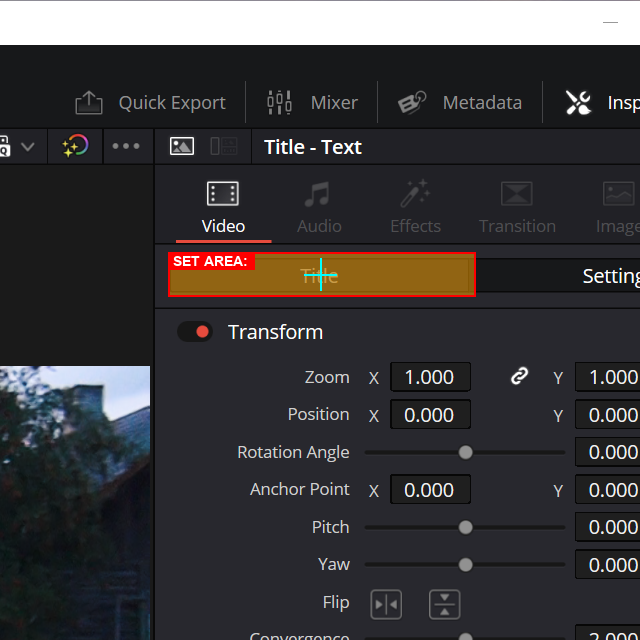

In [58]:
# comment: Automated step generated with pyPeriscope V2 
payload = '''gASVJAUAAAAAAAB9lCiMBGFyZWGUWAQFAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBVE1BQUFBc0NBSUFBQUNHemNqekFBQURpVWxFUVZSNG5PM2Q3MHNUY1J3SDhNOXV0OXlQWWlTR3JVMVdacGJXcENWcVdLQWtLNGtTU2FJbklWUkNUM3F3UDZVSFBmQlJJRVRQU3ZGQm9lQUR5L0tCazRXUnY4bVdseUwrbUR0MzNyWlQxd04vVFoxTElYZmYwL2ZyeVhiZit4NjhZYnozdmUwMlRuZnBVaEVCQUdNNHRRTUFRQkpvSmdDTDBFd0FGcUdaQUN4Q013Rll4SzgraUdKd1lTRzB0S1NvbXdiZ2FNcklNRVdqY3VMSVdqT0R3Um1kampPYkxVUTZqc05DQ3BBKzRiREk4enlSTVhHUTMzaVdsWlhOOC95T293RGdZSVhESXM4YjlGdmJ0N2s4b3BZQTdNQ0pLd0NMMEV3QUZxR1pBQ3hDTXdGWWhHWUNzQWpOMUJ5OStZUUpYNk1mZW1pbXh2RHUrdzNQbmp3cVA1bGlqcU9xM3V1dHIzS2tMUlQ4ZjNqelpZaTc3a1ZGVG9yOVF1ZkxGdi9pWW13bEhvdEcwNVlLVklGbU1rVG8rOUlWV04rd25DMTIyMG40MXZ0TFdoOFNCU0lhYW04Y1NqeEk3NjU3N3A1dmVkMHhrY2FrY09EUVRJWk1qL2luTnpZYzFpSzNuWUkvZmI2VWxlTXY1OW81bWovb2FKQnVhS2JXdUd1OUZZN3h6bGZ2L09Rb3JmV1VuTEZ5Uks0SFhoY1JrZmo5ZmZMRk0rTjBpYWZ5cWpQVFl1Qm9PUmFjN085dTd4b1cweHdkOWdITjFMRHBnVSt0WW5GdDlVVWFiR3ZwbVNXaUZUbVVaQjZmZTZlK3VzQW9DZjArZjBneFdKMkZoVmZ2UHM0ME5yWDJTVW1tQXd2UVRBMkxMc3hGdzBxY2lCUnBkblp1bDFuNlBFOWx3YkhKejAzTnZXdUxwTDhuY1B2cHZmenJONTE5YllGZGpnS1Y0YXJKb1pkWGtHdFdmdmYzSnB5N0xvMk9qc3RrdGpsdDZzV0MxTEJtSG5ZTzJ5a0RHYzU3dkY3UDlsMEtwMWNqRWV3Rm1ua2t5RnV1dnF5TFRnZlZDQU43Z1dZZURkS0V6L2RUN1JDd0QvaWNlZGdKTThFVk11WGtubE03Q093TG1xbHhpekdGeUhETXVQdU1nY0d4R0pueks2b2NPRUhTRUx4WUdqYzNISmk3ZHUzQ3JZZFI2NWhJQm5tcSs4ZTJYeG9zRDN6OGNPWnhqY3RWMDJBZkh4a1JRb3JCZXRwdXMyVkx2c1ptdnpxcDRaL1FUSzJiK2RyV2xWbGRtbE4wdzA3THNkSE9IYzBrV2hJNjNyejlVMTVaZHNYaEtuTVMwWW9TQ1UwTkRnc3F4SVU5MHEzZXBTOFFHTEhaVXYzTkFRQU95T1RrdU5XYUdhZDQ0aUErWndLd0NNMEVZQkdhQ2NBaU5CT0FSV2dtQUlzMm14bVB4MVBNQTRCMDJteG1LQlJFT1FFWXNmWkxBNzFlTDh1U0xPTXY3Z0FxaUVUazVIZTJ0ZHZQUlNLTGtoVG1PQTUzdGdWSXAwaEVOcHVQRzQybXhNRzFadXAwT3BQSllqSloxQWdHQU50aGVRUmdFWm9Kd0tLLzZIOEgyOGxQamtnQUFBQUFTVVZPUks1Q1lJST2UjA1jbGVhbl9wcmV2aWV3lFg8PgIAaVZCT1J3MEtHZ29BQUFBTlNVaEVVZ0FBQW9BQUFBS0FDQUlBQUFDRHIxNTBBQUVBQUVsRVFWUjRuT3pkWjNnYzFkVUE0SE9uYmQ5Vjc3S0s1ZDU3d1lBTk5oZ01wdmRlUW1naEVFZ2pJUWtmQ1NWQVNJQ0FNWjNRcXluRzRJWXg0SUo3dDJ4WnNucHYyM2ZLdmQrUDJWMnRaRW1XWlVrcnkrZDkvSUIyNnQyWjJUbHo2NUIvUGZVOHRJZVFkaWNEQURBV1hLU0QrUjJ2ZWNRbU90TlpDbzd5T2JSNkIzdnB3czU3SFdPZ0o0UjBLVG5CWXhGYWxKQ09qbkluQno5aUZ0TS90SHZjMmwyWGRmU0JCVThsQ1oxVUV0NU02REk1WW91TWRYN3BITnY1WVpGL3NyYVQyL3VlaEFVbnRVb0cwZi9UaGF1MzA2U1Exc2xvU1VMazlVZ0lJYVM5dzhEYXJOUjZYdkF6WXhHN1lCSGY5SWdEZCtTM2JMMlhUblIwSEZqa2hna0FFRUpDRnpGajdWOG5yUFZIQXNCeFhIQlNhSlhXMzZuVjdzTlhVT3Z6ZGVSMUZWd2dQQ2Y4SXd1bGxwQ0lIMUpvZnlUaXlMYmFRY3N5a1luVFUwMWEvWm9pL21ZUVBMMmRIMllXU2lvaExRa09IU2RDT0k0RFlJeXl5R05LU0dqRGxPbEhuT05DazBnb3hTUzBodjYveURPaWYvdFd4NDIxZXllbWpBRmpFTnd3YVRscTRSODd4MUVHakRMS0dLTXNkTWJDQ1FURzlJdVU2ZXR6aEFBaHdQVGxxVVlaQ3lZV2dCQmdrZWVZQURDcVJaNjUwS0dKL056dTVjbGFKcmNmUFNMdW4rMytYaUwyMWRuSk8vbzlnbEVJM2FWSjZISUlIaHI5c2dyZGcwajdad0FoaEJCQ3ZZbUxkZ0lRUWdpaGt4RUdZSVFRUWlnS01BQWpoQkJDVVlBQkdDR0VFSW9DRE1BSUlZUlFGR0FBUmdnaGhLSUFBekJDQ0NFVUJSaUFFVUlJb1NqQUFJd1FRZ2hGQVFaZ2hCQkNLQW93QUNPRUVFSlJnQUVZSVlRUWlnSU13QWdoaEZBVVlBQkdDQ0dFb2dBRE1FSUlJUlFGR0lBUlFnaWhLTUFBakJCQ0NFVUJCbUNFRUVJb0NqQUFJNFFRUWxHQUFSZ2hoQkNLQWlIYUNVQUlJWVQ2aGNXTEYzZDk0ZHR1dSswNGQwY1lZOGU1Q1lRUVFnZ2RLeXlDUmdnaGhLSUFBekJDQ0NFVUJSaUFFVUlJb1NqQUFJd1FRZ2hGQVFaZ2hCQkNLQW93QUNPRUVFSlJnQUVZSVlRUWlnSU13QWdoaEZBVVlBQkdDQ0dFb2dBRE1FSUlJUlFGR0lBUlFnaWhLTUFBakJCQ0NFVUJCbUNFRUVJb0NqQUFJNFFRUWxHQUFSZ2hoQkNLQWd6QUNDR0VVQlJnQUVZSUlZU2lBQU13UWdnaEZBVVlnQkZDQ0tFb3dBQ01FRUlJUlFFR1lJUVFRaWdLU0hKS1dyVFRnQkJDQ0oxME1BZU1FRUlJUlFFR1lJUVFRaWdLTUFBamhCQkNVWUFCR0NHRUVJb0NETUFJSVlSUUZHQUFSZ2doaEtJQUF6QkNDQ0VVQlJpQUVVSUlvU2pBQUl3UVFnaEZBUVpnaEJCQ0tBb3dBQ09FRUVKUmdBRVlJWVFRaWdJTXdBZ2hoRkFVWUFCR0NDR0VvZ0FETUVJSUlSUUZHSUFSUWdpaEtNQUFqQkJDQ0VVQkJtQ0VFRUlvQ2pBQUk0UVFRbEdBQVJnaGhCQ0tBZ3pBQ0NHRVVCUmdBRVlJSVlTaUFBTXdRZ2doRkFVWWdCRkNDS0Vvd0FDTUVFSUlSUUVHWUlRUVFpZ0tNQUFqaEJCQ1VZQUJHQ0dFRUlvQ0RNQUlJWVJRRkdBQVJnZ2hoS0lBQXpCQ0NDRVVCUmlBRVVJSW9TakFBSXdRUWdoRkFRWmdoQkJDS0Fvd0FDT0VFRUpSZ0FFWURXU2pSNDJPZGhKUUVKNkxrd3FlN3E3QUFJd1FRZ2hGQVFaZ2hCQkNLQW93QUNPRUVFSlJnQUVZSVlRUWlnSU13QWdoaEZBVVlBQkdDQ0hVZnhGQ29wMkUzaUpFT3dFSUlZUlFPemlPNDNrT2dEREdORTFqakhWeFJUMW1kMzM1YU1FQUhLU2ZxZ0g4cUlXT1IvaVhmT1FWMHIxWktCcjAwNEhuNHNUQWNad2c4SUlnRWdJQVJGVlZWVlVwcFoyRVZZN2pDQ0U4ejNNY0J3Q01NVW8xVGFPTXNmNFpqREVBQXdCd0hFbE5TU1dFVkZSV1V0b2Z6eE9LSXNiWXlKRWpSRkZVRkdYdjNuMlIwWlF4Tm1yVVNIM1duajE3Mjh3YVBYcVVQbXYzN2owWWc2T0hFY0xGeDhjWmpVYkdtTXZsY2pwZDBVNFNPZ3BDQ0NHRTU0VTVjMlk3SEk3dnYvKyt1Ym1aRUtLcWFydFpZVUlJeDNHQ0lQQTh6L01jSVhvQXBwUUtxcW9xaW9JQnVKL2lPRzdvMENHVEprNEFnQzFidHgwNGNKQlNHdTFFb1g2RVVUcGw4aVNMeGVMMWVvK0lzblRzbU5GbXM5bnI5ZTdldlpzUVBtSVdtejV0cXI3V3JwMjdDTSszdDIzVXV4aGpzVEV4bzBhUFRFcE1Fa1NCRU9MMytjdkt5M2J2M2l2TGNyUlRoenBFQ09GNVRoU0ZQLy9wVHc2SGZkaXdvYzg4ODI4OUtqUEcydVNEOVZ5dklBaUNJRmdzNW1uVHBvMGVOVXBXNUsrWGZsMWVVUUVBcXFwRzc2dDA1bVFQd0pJa1RwNDBjY1NJRVNhVENRQk9tVGtqTmpabXk1YXRzcXhFTzJtb3Y2Q004U0ZIUEVlVHQvNzNObU9NRUNJSVl1UU14cGgrUitCNW5qS0d6UjJqZ1dWbXBFK2VQTW52OTIvZXNxVzV1VmtVeFl6MDlOemMzTlNVbEpXclZnY0NHSVA3TThJb1c3VnE1WFhYWGYvTDIyNkxpNDM3NzM5ZnFLeXFKSVRJc2h5WkQrWTRqdWQ1VVJEbXpadDd6ejIvR2pac21NL25lKys5OTUwdWw2cHFtcVlSQWh6SDljT0M2Sk0zQURQR3JGYkx1TEZqaHcwYldsVlZaYmZiQWNEcGRBNGZOb3dqM1BZZE85eHVEeFlib3NoZkxHTXNWSThJQUNDS1lucGFxczFtQXdJRVNMUFRXVkZScVNqaFJ6ZldaanQ0T2ZVeFVSVEhqUnZiME5Dd2RkdDJsOHV0SC8vNitvYWFtdHBwMDZhTUhUTm15OWF0V09YVVArblpYRVZWMzM3N25jRjVlYWVkZXVyQ2hlZGJMSlpubjN1dXNMQ0lBTWlLb3FxcS9yUFNvKytvVVNQLzhwZUhVbEpTR0dNZmYvTEpxNis5MXR6VXJPZVZCVUdrbEdxYXBtbGF0TDlaS3lkdkFMWlpyZE9uVDh2TXpDd3NQTFJuejk0Wk02WUR3TWFOUDQ4ZVBXcm8wS0VtazJuRGhvMXVqeWZheVVUOUFmTjZ2UUNnL3pjOE1TMDE1ZFJUWjVuTlpsbVdEUWFEeitkYnUvYUh3cUxEN1FWYXZNdjNDY2FzVnF1c3lINS9nQkNTbHBvcUNNTCsvUWZDMFZkWFdWV1ZuMzlnNk5BaEJZY2NqWTFOMFVzdTZwRGU3SmtRVWxaZS9zckxyK1RtNUdSbFpjMmJOemNwS2ZHKysrNnZycW1XQ0FGZ3FxcnB0YjlHby9HbW0yNU1UazRHZ0ZXclZyM3czeGZxNnVzMWpWSks5VnBoeHBnc0IrTjZ0TDljaTVPMFlNeHF0Y3lmZjFaS1N2S3UzYnUrLy80SGw4dE5LYVdVdWx6dU5Xdlc3dDZ6T3lVbGVmNzhzNndXUzdSVGVxVFJsOXgzL3gxblpSMXRzYXdGZC8vaFQ5ZE83WXNVRFdpRUFDSGNXLzk3KzhWRkw3MzF2M2YweGgwQXdCZzRIQTZ6MmJ4OCtZbzMzbnhyK2ZJVkpwTkpMMGZwQnhKbjMzei9iNjZjMUU5UzB3ZE1SbU5HZXRxQ0JlZGNjY1ZsMTExN3pSbHpacHRNeHBTVWxQcUdocXJxYWdCbzh3eDB1TGhZa2lTSHc5SGZ5aVM3WldEKzJCbGpxcW9xaXJyeDU1OGZmK0lKcjljcml1TGt5Wk5mZmZYbFUwNDV4V1EwR2d3R1NaTDBscy9EaGc4Yk8zWXNZMno1OHVWL2Uvai82aHNhR0dVQVRCUUZxOFV5Lyt5ekJWNEl0NDd1UDA3R0hEQmp6RzZ6NlMxYUR4dzRDSVFBQ1pVMEVnQkN0bTNkN25GN2hnNGRZclBiWEc1M3o1VWNHck9tempsdDByQlVoMUhrQUtqaWI2N2EvZE8zcTNmV0hWT0ZNOGZ4b2tIcW9TUUJBT1FzdVBQcWNVZmNxMHRXLytQdG4zdHdMeWNvUVJBSERVcTEyV3lNVVk1d1RxZXpvckpLVlZWZ2pESVdDQVFPRmhRQWc0S0NRNmVmZmhvREFNWWdkTUgwWUozVDlHdi9jT1lnb0JVLy9QZU5uNXhIekUyYWUrc3ZwaVlBbEt4NjlOME5BQURBY2J3azllUkYwajh4eGt4R1kyWm1SazVPZGtaR2h0VnE1WGtlQUpLU0VnMlN3V0NRZkQ2L0lBaURCbVVHQW9HR2hzWkFJS0N2NlBjSEFJRHYxdTM0V004RjZqWTlCaE1DcTFkOTk5SEhIMTkxNVpXU0pBMFpNdVRCUC81aDBhS1h2dnpxSzFFVWVaNG5oQ1RFeDFzc0ZrcnB2bjM3Nit2cWVaNG5oT01ZTXhvTVo1OTkxbjMzM2Z2VHVuV3kwcDJXUGIvOXF2eis5Q1czVExocmFZOS92Wk1rQUIvWlpLNjZwbmIxZDJ1OFhxK21CWXNqSWhkUU5TMC8vMEJwYVpuWDUydFRaS0VYZDNRckZUSFRyNzV4VHJZVXFDL2VzNkdrU1FZQVM5cVkwUlBQdTNuVTZEV3Z2L3R6WTFlM3MvdWpwM2QzS3dHZHE5Ky9abmRWNUlUbWtsN1lTMWVOdk9qWFo4aExubDlhSE1VMEFBQmpMRFVsWmRZcE0wMG1VN2ljK2NjZjF4MHVMbWJCK1l3eDRIaysxQ1NFc1Y3clorcnplQXhwSTZZbS9iU3lwczJjMUFsNUNZRkF3R0FJVDZsZC9jby9WL2RPTXZvSnhwZ29Dam5aMlRrNU9ZTUdaWnBNSmowbjFGSXBLQW8rbjk5b05Gb3M1akdqUjhmR3h1elB6OSsrZllmZXZ0SnF0V2dhOVFjQzNYdTZQcFp6Y1RTMlUyLytWZWJldm92V3R0TnZ1aXR6NytOdmIreWovUjBudlFrVkllUi9iLzB2Snp2bjFGTm5FVUx5OHZKKy8vdmZhWlIrODgwM2pQRUFUTk0wdmJUNTlOTlAvK2FiYjRvT0h4WjRYcVBhcWFmTyt2V3Y3MGxKU1ZFVVJXOUVIZTB2MU1yQUQ4QnhzYkhUcGsySmo0L1hQekxHdG0zYnZtZnZQcGZMSFY3bXlHeUtScW5MN1dhTWpSNDFjc0tFOGVIVFZsOWZ2M0hqcG9iR0xvZkxrTFM1bDg3SmxwdzdQbDY4dExEbE1XemQ5NGt6THJ0aHp1ekw1NWErdExMeW1MOWJUL0tVcjF2ZmJ4N1lody9QTnNHQmFLY0NBQUFjRHJ2SlpGcTFhdlhoNHVMc3JLeTVjOCswMjIzaHVmcnRudU1JcGVUSS9LNGEwaU1wTVRRM1Zwa3lob3hQWGJtODlhVXlkUEtJT0dmbFlacWQzU1A3NmU4NGpyTmFMQm1aR1dOR2o0cU5qZFV6K3BSU1JWSDBsdXFVMHJLeTh2cjZCbEdVY25LekF3RjUzNzU5OCtiTmRkZ2RITWNES0J6SERSODJ6T1Z5TmpRMGRPOTVxUWZQaFgzQzRGU1E5M1lqRWQxakc5KzMrK3NCbWtZQjFLS2l3Ly81ejMvaTQrTkdqaHhKQ0VsS1NucmsveDdPemNsNTYzLy84M3E5aHc4ZnJxMnRUVTVPSGpkdTdQUFBQMy9YWFhkVjE5Uk1ualRwNmFlZk1ocU5lL2Z1bFdXWk1kcXZLb0Jod0FkZ3hsaFNjbEpDUXNLMjdUdElhRXAxVGR1blZ1aDQwTExxbXBvZE8zWUdCellEbURCK1hGSnlVbjFEd3pFK1NZMDlkVUlDMTdENXM4am9Dd0NnMUs3L2V0UHcyMmFObXpGbTVhZTdBQUNtWHZ2Z0dURTczb3ZNL09Vc3VQUHFjVTJoRXEwakZvZ2RkZmFDV1dQVFl5VWVRSk5kVlZ1V3ZQbjlFYm5YbU5FWFhYbitNTmo1MGF0TER4MURPVXpPL051dkhOOXFyZGpUYnJ4OWxpMy9zMFdmN2xOZzJ0Vi9ta09YLzN1TDdkSzVrek1jSWtjVmQvMkJkWjh2M1J4UnFDNm16YnpnbkNrNThWYVJBMDF1TE4rNWR1bkszYUVIbUp3RmQxNmRVL1R1U3p0U0w3bGdWclpENUNyV2ZsRTM5cHpSTVNMQXVLditOQTRBb0hoVjFKN1dHV01NV0NBUU9IU29rREpXY09qUXFhZk9hck9NZmgwY2VUa1FRdGF0V3k5S29pSXJQZkxjemFrRk80cVN6eGt4ZWRqeUwvTWpwbzhjbFd0cDJMTzJlV2gyeTdTc0JYZGZOYjVwOVQvZS9obHNrNjY1YlY1cTllcFgzdzZWc29qREw3N3p3bUhPbnhhOS9vTStKWGIwM1BOTzFhOGd6VnQ3YU9QWFg2NHJENTdBNmRmKzRVeFkvWStsbmdVWG5qa20xY3g3OW56OG4xWjc3Mk14TVk2Y25PenNyS3o0K0hpajBVZ0lvWlI2dmQ2S3lzcXF5cXJCZzNQVDB0SUFvTDYrbmpKV1ZWM2xjcnRrV2E2cnEzZTVYQ1dscFg2L1h4Q0V2TUc1YVdtcDIzZnM5SHA5M1RzMXgzSXVBRG84d29tblhIUFZxVmxtQURqendUK2NDUURPSGU4K3Y2d0l4SXpKYytkTUNkWlZVY1ZkdGZlN0pVdjN0RHoxeDQ1YWNPR2NVY2xXa2FPS3UzclA2aFh1VnExRk8xdzlhZVpWMXdUMzk0Yy9uUWtBenUzdnZyRDBNSWpwRTgrYU0yVjRlSVhxdmF1V0xOdDl6TG1NM3FJM3lGSTFkY2ZPbllzV3ZmVFVVMDhhREFZQXNObHNOOTU0dzQ0ZE96WnMyRmhkVTdOcTllclJvMGNUUWdZUHpuMzg4Y2YzN2R0MzZxbXpqRWFqMysvLytKTlBxYWFYaEI1bmxkRDlTeXQvclQweDVRWHJDNC9jT0NuVElvTGlLZDM5MFQ5di90Tkh3ZkpEKzV3L3Z2ajNhNlpueHh0NUFNVlRVN0xyMDBjdmVtUXB3SUlYdDd3NjVhZGJmbGx3Mlg5dU8zTndyTDdtQUEvQUFDRHdQR05zeDQ2ZGtVWEg3WTRhcUpkZlJVNGtoTlRWMWRmVjFlc2ZLYVhqeG80UnVqR2l3b2ljZEJFcTkyNnNhR2RlMDdaRE5iTlNVN01IdzY1RHg3eGhzRTI2NXVaNWcyaDl3ZGJ2aTVzVTBaSTR5TlI0UkZaYUhMemd5dk9IR1V1K2UrT1lvaThBRkgyemJIdnVGZVBQbnJ2LzVXV0hGSURZVXkrYW1lTGErZUdYKzBMYjRaSm0zcmJBVy96ejBuY0w2Z3haTTA2Zk5lcXM2eXprbFhjMjZZTU5aWjN6aXlzbW11cjJyUHR5YTBHOUlXdlN6T2tUTDdnNXlmcmF1eHRhZnQ3R2tWZGNQc3hTc24zdGRnODBGUlpVSG5qTGM4NHRNK3g3di9wZ2ZRMEF5TTNIZmxoNkVBc1dOUE04cjJrcVk0eTI3b3pVaVoyN2RqSEtnQkJCRUhvaUJ0T3QrNHZuRHM0ZU1SVHl3OFVENHZpeGVZYUs5UnNiSFVQYlg4bTE1Y3UxUTI2YmQ4cUNhUWZlM3RnRUlJNDhiOTRJcWV5N0pjSG9LNDY3OUpZRnVjcmhqVjh1M2FlZndUbFhYa1lqVHhDWHVPQ3FVM09kZXpldWFaSURWVkVwcUdHTTJXelc0Y09HWldabUpDWW1pcUtvSDArZnoxZGRYYjF6NTY2YTJscWZ6ODl4bkQ3WGFEVHF2Mm0zMjhNWU0xdk1kWFYxNVdYbEZyTjV3b1R4OGZIeGg0c1BsNVNVSHNkSk9ZWnowZkVSYnRyNTdmdXVXWmVkUDlLNTd0VnY5d0tBNW0wQUFJQ2s3QXl4WXZlS2xUc3JuTGJzNmFlZk9tN0JoYzBsci8vb0FnQVFjeGRjdFdDOHFXN1A2bVhyaStXRXZQRXp6NzdDQVFEVkxYdnNhUFhHbmN2ZmRjMjY0dndSem5Xdkxkc1hzYi9rN0V5eGN0ZUtsVHNxWGZhc2FiTlBIWGYrQmM2UzltcTRvMGh2OEx4cTFhcVBQdnI0NnF1djB1L25zcXo0L0g0R2pGTDZ3UWNmbmpKejVwUXBVd0JnL1BoeDQ4ZVBBd0JWVlpjdlgvSHR0OS9xM1pCNm9rMEdQK3FPTll0OGV6OTc2cjRQdHJtR1huRFg3NjYvOGNsWEdyYWQ5M1FCUU42OWI3NXl6NmlLWmMvZjg5SlA1WTRoTStlZmNWNmkwdktJRm4vNkUrK2VYcmowMlh2djMrNGF1dkR1MzEwLzhBTnd1QkwzcUQrMmRzOU5tN1c2MmF6R2JqR0I3M0J0K3dQZ09jdHJYWkRpU0FBNDlnQTg3SXlaMldMVmp5Kzk4WDNvZHZsVDIwWEV3UXR1dVh5Y3FYVFY2KzlzYkRybUhVRHhzczgyRDdwaDh2eXo4aGN2YlpoNTRZeGs1NDRQdjQzTXg1dEo2WkkzUHQrdkFBRFVMRGxZbzl4OTFmaHBzM0kyTFNzQ3NNODZmWHlNYjk5bi8xdWlCK3pxWlFjUE5sNS82K3pwcHczWjhQbkI0QWJzdzBZNTE3ejhVa1JFOXZ0VUFLcTRxcXZiS2F1SUNzTHA5VWR0cS84NWpvdU5pM1c1M0xFeGRqN2l5U3cyTnVhVW1UTlNVbElvcFJ6SFZWVlZyVnUvb2FIaHVQTVVPM1ljbUowM2RNSjQ4Y0IyL1JUWXA0M040YXQrM09HQzB6cGN5Ym5wazVVNWR5K1lkZTcwQSs5dVNUbjNyQkZDOGFxdjFnWFRNbVRCN0R5dWJNMWJ3WUJicytTd1lyeDNmcXNUbERFbVorZUhpNzRxak9MWU5KSWtubnZPL1BqNGVQMjJxMm1hMiswcExTM0pQM0N3cXFvS2dGak01dHljN0dIRGh1clBPa09HNU5YVjExZFZWVkhLN0hiYjJER2pEeDh1ZGpxZHc0WVBDOGlCZGV2VzE5YlZIVythdW5vdU9qdkNycm9hbDhJQU5GOTFUVVFBVmJaKy9QTFc0TjgxMVorckNabFhqYzhlQVQvK0RBQkpzMmFQamZoTlZWZVhIbWk0NEs2TFJoaTZzTHJpcnE5MnlSUkE5ZFZVdDlyZnA0dENLMVJYZjZrbVpsNDlMbXNrL05SdjZxU0NtV0FBOEREZm9wZGVzdHZ0WjV3eDU4Q0JnODgvLy96T25UdEhEQjl1c1ZqMjd0djM2M3Z2dS9xcXErYk1tUjBYRjhjWWEyNXUvdXl6SlI5OS9MSEw2VkxVWUwvaDQwK01SZHI5OTZtWFBkOE1BTEJoNDhyNjJDMnZYbmo2UmZEMGt3RERoZzJ5VksxNC9PWm5sZ0lBL0x4aCtUdi9pbHpUR0Z2NzF2eUZmOTBMQUxEeDUrWHJHZ2QrQU82S2NKVHRYcER1R2lYZzYyQ08xdTE2aVl6Y2RBdFViRnJYNFkyZEd6ei9wc3ZHMlpxMmZ2TEJVYUx2b0dBaFdGQ3diQW9Bb0hMMWgrc0czVDd6clBNbC83Qms1ODZQVnJiT1JTdVZoZnNqSmhSdjJsODNmbXI2NENRb3FvR1IyV21jYTllT2ZSSHpHN2NjcUR6dHpOeVJJK0ZncUI3S3VXZnRobjVUM0hVTVZFVVZSWEhXS1RPcnFtdFNrcE1FUVZBVkZVSk50OUxUMDh2TEs2cXFLbE5TVWpJek0xTVBGOWZYSDJ2TnhaRU83aWh3amhvNWRJeTRmYXNDQUxaeGVTbGEwZklOTHNqb2JDMWwrMmZMY3UrOGNOYUM4N1BqUndnbHE1ZUdMNGJNM0hRTExWOFhjZnlWUTVWMU1EZzlkeEFjREZaazBKTE4zMFl6K2tKb3JFSDk2Q21LVWxSVXRELy9RRVZGaGFLb05wc3RhMUJtVGs1MmNuS0t5V1RVeTdFU0VoSk9tVG1qb3FKU1ZkV1VsR1NPNDRvT0h5WWNWMVIwV0I4cHBTY0tKTHAyTHJweWhJK2l1TDRwL0xlWWw1blU1amVsN01zdm1UOWlSSmRXNzVLaXVtTmNvYS9vblVXcktxdisrOElMbXpadDJyRmpSMkZSMGN5Wk0vL3crOS9GeDhmLzVTOS9YYkZ5NWFLWFh2cjhpeSt5c3JJMFZTMHVMaTRwTGFXVXFxcXFxajAyQklkLzAvTG5JNHJsbGhhV0E2UVBQaGZnYThpdnJOZFM1djNoeFp1ci8vRGE1bmFLN2txMkxJMm9mai8wOUVrUmdQV29xVGVTYkhlQmNNNkdJeHpmUVFseitCR3N1MFNEcVlNNTNlc01BUUNRRmg4RHpjV1ZIZDRjazJkY05NakErL0ovV0hYVUcyaWJWdENCcXZxV0Q0MXJsM3lmZmN1Y0VmYW1yUjhjVVlqdGM3ZSt6bXBjWG9BWWd4a0FzdUpqQUJwclcyZnNsZXBHTnd5eVJIUjdhcW8vZkpURTlSK1JMemlxckt3cUtTbEpTVWxKU0VqZ09LNjB0TFNpb2xLL3hnUkJVRlYxelpvMVRjM05NUTdIbFZkZXdmTjhaQStsYml2YWVxQmgzTVJ4MDJ4YmYzUkI2clRSYVZyeDB1MUhqNDdLL2krLzJ2WExLOFlNRGh4ZS9ubEVrL3UwK0JqZ1l1Yjk0VS96V2kvdjVGcCtCdTdHNm1nUHpCcndCNHFMUzJ3Mm15aUtmci8vNE1HQ2twSlNnMEVhT25Sb1RuWldXbHFhM2g5VS80VnlITWR4WEh4OGZHeHNMQUJvbXJaOSt3NTlhQTVWVlh1d0hXeVh6a1ZYam5CYll1S3dtYk5QRzUzaE1KdWwwRkxCV0owV2F6L3lOK1VMS0YxY3ZhUDlEWjExK3FsanVyNUNOREZDU0VseFNXbHBLU0ZreXVUSkQ5ei9tNXljbk9MaTR2cjZlZ0JnbEpXWGw1ZVhsd01EVmRNYlFXcWFwajhaOTB3S211ckxPcHBWOEgvWDNSdjc5djlkOHNoWEMzNXphTXYzbnkzNnY2ZStqU2hxZ0licTFsMDdCMzRBRGhjYUUwSkVVV3gzR1o3bkE3SU1BQnpQdDc4RWdQN2czUG5Mc0RyazlQaGdVRXlpRGZhMVV3cHRUMCswZ2F2b3VJdkUyaUg2Q3IvNkh1YWNOZitLcWVWdmQ5N1RxZE5XMEdKS1Nxd0lBS2FFNUZnb1BoRnpxOTNHR09NNExpWW14dVZ5eDhRNElwL1BHaG9idi94eUtXV1VBR0hBT01MeGdoQjhEeHFBcXFvTmpZMDh6emMyTm1tYXBvZnVIcmozVjI3Y1d6bDUxcER4OWg5L3NJN0pqZk1jV0wyalMrdFoweE50QUNER0pDV0o0SXE4WWJ2MmZ2blJ1amFGL2FIS3dYNkNjTnorL1B6TVFabHhzYkZHbzNIRWlCSEpLY2s1MmRsMnUxMFVSVlZWblU1blZWVjFSV1ZGMXFCQjJkblplblpaYnhIZDBOQ3dmMysrMld3Q0lENWZSOFZRM2RMVmMzRk1SemhZWjFTM1orUHlid3Zxbk03cUp2LzBheU5McHpwM3pLdUxnOCs1N2JKeHBybzlHNVl2UDFqdmNsWTMrYVpkL2FjdTc2L1BCQWQ4RmtXRDBXQXhtejBlanlpS3MrZk1IakpreUk4Ly92VDRFMDhVRlJXbHBxVEV4c1l5Z01hR2hwcWFXbEREVlpCdDIvZjBtdXFQN3B2MzBSTXpyci9uN2w5ZXVPQ0JOeFpjdCthSmE2NTZzYU9lb3dNL0FFTkVEcmlUM08yaGdrSzlKcitqWlk0cis3dXZxUHk4RVhranA2V3RYWGxFTzZ5WUNZT1R3TFB2UU1jVndDYXBvNmVDdW1ZWFpNV25pbERjZmhhbGJPdW5PN2VLU3VaZEY0WGI0SFJEc05uTzk4dGRrODg2Y2p2V21FU0F3eTJmazJ4bUFEbmdCWURpbWdZSzhZbURXOVZ1aThteFZ2Q1Y5NnYySFoxUU5VMFFoSmt6cGxmWDFDWW5KUXFDb0liS01EbENHTStQSGpGS3orL3UzYmVmQzc2dEpmaVV4aEdPNC9pZS91Rzd0aDJzbUhuYWlCbXBWYVlSY1EzN3V0WW1PZGg2YnVtZXhIT21oNXZVQVVCMVl6TU1zbGticTNkRk81TjdOQzZYcTZTa3hHRzM4encvYUZCbVJrYTZJQWlVVXBmTFZWaFlWRkphV2xWVkpjdXlKRXFEQmcwS3Z6WkRWZFhEeGNWdWp5YzVPYW1ob2NjZktycHdMbzc1Q0krWVBESkdPL1RORzUrSE05TVpzWGFBNEErbW90RUpZSThkMUNxTHluT2tpNnUzWTlTa2tURmE0Ykkzdjl3YVdtRlE1eXRFQThkeG9pZ0tBaStLNHBWWFhKR2JtL3ZHRzI5VVZsWHQzTG5yNjYrWExWcTBxS3lzYk5hc1dUZGNmMTFPVGc0aHBLQ2c0UE12dmx5eFlvV3FhWlN5dm40YlV0WDZ0eDVjLzlhRHlaY3QvdkxmNTk5NS8rVXYzdlNoUGlNbGF5N0F5b2p2MWFmSmlxclE2NTNiK1NjS1FsTnpjM096VXhMRmpwWUp2K0c1V3p2ZitjTzJPaG8zN3Z5emNsdkhVakZ4eHJsVFVxRnV6K2JRVDFkakZDU2p0V1V4Y2Zqd1FSMFZYaGNlS1BGQTJ2Q1pzWjN0VzluMzlaYzdBMWx6THAyYjJwMmtpK011T0hlRVZQcmpWejl1L25yNVBqVnIxcm5UVysyT1M4OGRINUhhM0duREU4QlpmcWdHQUNEL1VKbGl5eDAzSXVKTHgwNGZtY0Y1Q3ZjZXRTTWlSL3JGKy91cUtpdExTa29TRXhOSGpoaWVsSlJVVmxaV1dWV2xaMlVKeHhGQ3BrNmRjdXFwczZaTm0wb0lJVzBxRS9RM2laUGphVHJRRHVmR25VVkszSWlMemh4cWFTamMxWlZXeWFsekw1dVI2dDYxN050ZDN5MVpYMjBmTXo5OEhSNHVLUE5BK29TNWd6dDZ4dXMzWkZrcExTMXp1VndRdWgyNzNaNERCdzZzWExscTQ4K2JEaDh1cHBTTkdUMDZMMjl3K0wwM3NpeFhWVmNmUGx3c1NaTFJhT3lOZ2ZpUGZpNjZkSVE1cm1XdVVSUkJsZjB0NFRwMWVIWk0rSU5TVUZFSE1ZUEhaRWVzblQwc3k5YkYxZHZibnlTQ0dvaGNZY1NSSzBTVi9xSmZRZUN0RnV2Tk45LzBxMS9kZmVtbGwvejYxNyttbEs3OS92dkhIbnU4NlBEaDAwODc3Y0UvL21IbXpKbHBhV21wcWFtelpzMzYzVzhmbURON3RpZ0lvaWp5ZkZRaVhmVkhTemJWZ2lNK0xUd2xmY3FDVTFybWovNzlTWkVEMXVtdmR3NStDTmZHaGY3Z0l5ZTJ0d3doeC9YbXNvcVZIMytYZE9PY3laZitLcWRnOTY1S0Q0QStFbFpldkJRNHZPYkRsbEU0ZHU0cFBDMTd5SnpMWjlNZjl0VkRmTjdFbVZNem1iZWp6ZWF2M1ZpY2Q4Yk1HMitLM2JaMVQ2RWNtNUdlbFNsdi9HQnQ2d29jNWRDMzMrek12bnpLUmVjVWhiTStiVm5TWjg0NEpYSkNjOUZQZTZyQU51bnl1WGxRc3ZyTDlVMEFzUGVyRmNQdnZQQzA4NmZudnhWdVZLTFFqRE52djlLeGVsMndpOFVvZStEd2loK0xBQURBdWZIcnRVTnVPblBoTDY1Sy91Nm5mZldHMUxGVFQ1dVlxcFNzV25zUU9sTlVVVU96aHMyYWsrL2U2N1FadVVQRlVScWtoQkRTME5qMDliSnZHR1BCY21hTzQza2hza3RiK0UyRmJkYU5DTHJ0ak5GeFhKUTlCMHJPSER3NGhsYjhzTDRMUnlabi9nVlQ0cHpiUDFwK1NBRm8vT0d6ZFlOdm56Vi8vdjZYdnp5a0FCeGN1bUp2MXNKeGwvM1N0blZyZmxHWkhKdVJsRGdvTDZsaDVldkxvendNV1J1RWtNckt5ckt5Y29mRFFRZ0pCQUxyMTY4L2NPQ2dJQW9PaDJQVXlCRkRodVRGeGNYcHhjNHVsNnU2dXJxbzZQREJna01Ba0oyZFJRQzBubXVHMCtMbzUrSW9SN2lvcENvd0xtL0NlZVBLMWxXQ1JXZ3EzRmRjTVR0cjJPekxweXJmNjcyTXB1ZFpBaTJicS9uKzU0Sng1NDY5NkNieHA3VjZONlRwVXdjYld4WTR5dXB3dUxRNk1DNXZ3cmtUeXRkWGdFVnNMTnA3dUdMT29HRnpMcHVpckMwT3hPZE5uRG10OVFwUkpnaThJSWlDSU9UbERiN2o5bCtlYzg0NWVpZTBjODg5cDZhMjV0bi9QTnZZMURobzBLQ2JiNzQ1S3lzcnNqbHRZbUxpd3cvL2JkLysvWVdGUlpKa0FKQjdxQnRTWnhiOGU4V0R5VHMrK2ZxYmRRZWM5cUZ6ci9yRnZCVFBsamUvRE0vM0pKejd5dmVPeGMrKzlOTkoxQTBwWEFmTUVkTFNoQ2IwUjNBeEFFS0lYa3ZYN2pMaGUyNTNUMkhUaG5jWFZVNmRjOXFrWWVOUEd5cnFHL05WYmYzcXE1V3R4b0pXdG4vMmdmbVM4MCtaZHNGMU0vVk85Q3ZlS2h2eGl3VWRqT3ZiK1BNSGIvbk9PSHZtMkdubmpKb0pvTW1OaDlmNmoxeE1LZnhtMmE2c0s4YWRjM2IrUyszM0o0a2ZQdnYwNFpFVFNyU2Y5dmluWDNCYU5wU3NXaHFxUDFiMmY3bDgzMTBYblhiUmFmdGZXOXVrZjRkOTMzNnZqcDkxN2xVekpKNHE3dXJ0WHkxZHZqTmMxZDIwNFlQLytjNWFNSHZLK2RmTjFBZmkyUHA1eEVBY0hhajlZZG5hNUF0T21YN1p6VE9wVXJEaTZlZ0ZZUDI4ODhPSERkUExtZmZuSDJqVm1pOTBNYlFiWXZYbmJyN2oxbi9kcFd6ZFdUQjc4TERHZ3AxSExTZ1VCNTl6N25pN2M5Zkh5ME5QWG8xcmw2d2JmTnVzODg0OTlNTG5leFZROW42eDJGTjMzbGtUeDUrV080VUQwR1JYUS9uZUhmMnFDamhJVmJYQ29xSzh2TUg2T0F4bXN6a3RQUzBwS1hGSVhsNXNiS3dvaXBSU3Q5dGRXVlZWY0xDZ3FycmE0L0dhVE1hNDJEaXoyVnhYVjZkUjJnc2pFUjc5WEJ6bENPOWEvYzBnMjd6UjUxdzNBclM2VGU4dVh2WEQ1MHZ0Rjg0WmRjWmxRL1J4TmxiOGIyWGFwVmNuaERlMzg0UFh0QVVYemhsMXhtV2pnZ3U4c1g3SURSY0ZYeHpqT3NycXNIdmx0NW5XdWFQUHZYWUVhSFUvdi92S2loKy8rTkp4d1prajUxdytoS09LdTJydnlqZFhwbDErZFh4UEg2anVDT2Q5aHc4ZjlvZmYvMzc2OUdtQ0VJeFpoSkQ0dUhqSllKQVZKVHNyYStUSUVXMU9MaUhFNFhEOCtwNTdIbnY4OGVxcWFpSkpxcWFwcXRyTmRqeGRrNy92TU14WmVOL3NxMzRIK2pBY1B6eCt4WDMvYnFtQjIvL3E3VCtOZmVTbXB6OTV3TWdybnRKTkpEa2xyZU90bmZBWVl5TkhEQjh6WnZSNzczOW90OXV0MWlQZWJxUm5jenR2bnNvWUVPSjJlNXhPNTVWWFhMWjc5NTY5Ky9ZZjl5KzVwWHR1ZDZ0bSs0RnBWLy9wekppV0Rrdjl6K2hSbzNmdk9jNmhzNW1tMFd1dnVjcGtNdmw4dnJmZmVTOHlzNnVxNnMwMzNXQzFXajBlejZ1dnZhSGZIUmlqWThhTW1UNXQ2bmZmclNrdUtjM0tHblRtR1hQV3I5K3dZK2V1L3ZZeWxyN1VFK2NDT0VMT08rL2MxTlJVQVBCNFBLcXFtczFtU1pJWVk0RkFvTFMwN01EQmczVjFkVjZ2RHdCaUhJN2tsR1FDVUZkWDM5alUxTitHSVJ6WWp2OTBFMElFUVpBa2NkS2tTUS9jLzVzcFU2WkUzblhMeXNwdXZQR21zdkp5QXVUeUt5NS8rRzkvYlhjalBwOXY2ZEt2bjMzMnVlcnFhbzFxcXFySnNoeVZLMkhCaTF0ZXZiRDg2ZFNGVDBaTUhQZzVZQWpsV2ZYNnVMYno5RFBhZVRRTjFlVEJjZlVEYmtNNXRQVDk3Mkp2T25QT2pkZkFHOTBhSWdQMURRTEFlSjRYQktHVFJueHRWbkUyTi90OHZqbHpaaXVLSWttUzErdHRhbzd1Z0Y0REJHVjB6NTY5TVRFeEpwUEpZckVBZ0tacGRYVjE1ZVVWaFlXRmxWWFZIRWNJNFd3MlcxSmlnc2xzYm14c3JLMnRVN3IxR2h3VVhmcWJiNUtUazM5eDZ5MlIwWmN4VmxSMCtJOFBQbGhjWE1JQUNJSEt5a3BOMDlyOWVSb01oa3N1dVhqdTNEUGYvK0NEanovNitGQmhFY2R4L2VkUmJPQUg0SERab0N3ckFPNmpMdDhSL1NVcTBKTXh1R25EQjUvSC8rTFM4WE91WEZCM2JFTTBvejdVNW9TM2YvYmJMRlJXVnI1bXpmY3hNVEg2UjZmVFdWNVIwZC9leEhKaUlsWFYxYlcxZFJrWjZacW1PWjNPMHRLeXdxS2lob1pHdlkrdndXQ0ljY1RFSjhRcmlsSlpXZG5ZMkRnUVh2aDdVdEovTDNHeHNUazV1WkcvbmRyYTJ2Kys4TUx1WGJ0VlRkVTB5bkdrdXFxcXRMUTB1NzAzWUxoY3J2Mzc5MWRWVmN1eWJEQWFBYm82am16ZkdQZ0JXTWNZOC9sOHg5a0xzSWViMGdDQVVyajBoWC8yeG1zbVVVOWhESTcxRjBzSXFKcDZ1TGlZRnVwdDBZRGpPSzcvdlF6OEJPWDErdkx6OHptT2xGZFVsSlNVT3AwdVZWVUFDQ0VrTGk0MlBqN2VhREEwTmpiVjF0V0YzLzZMVGt5TU1lYjErUm9iR3dBRzY1TW9wWXRlZW1uNTh1Vit2MTlSVkVvMVFSQUxpNHFXTDE5eDQ0MDNIUGtPYktQUmxKU1U5TlZYU3ovOTdEUDlqWVQ5Si9zTEowTUFkcmxjc2l4ZmZ0a2xQYkkxVlZYMWpoQUlBR0RqdS84NFFkNHFlcHcwVGRNSDFEbHlWbmlzbllocGV1RVp1L0tLeTgxbXM4L25lLytEanpvWmlBMGRFOGJZb2NLaWdrT0hDQWtlVWtJNHM5bVVrSkRnc051OVBsOXhTV2x6Y3pNZTdSTWRwWXpqV0VseHlhdXZ2V1l5bVRJeU1wcWJtei84OEtPMzMzNUhVelZaa1ZWVkpRUTBUWFc1WEsrODhvb2dDZ3NXTEloeHhJaWlvS3FxMys5M3VWd0hEaDc4N05QUHZ2dHVUY0FmVURWTlVaUm9sWWdzdldOU3loMXRKdzd3QUV3SXFhNnAzYkpscTlWcTdaRU51dDN1NnBwYS9HMmZWQWdobXpadDFsdEJFMmpiMHJKbFZzUlZvYis1WWZmdVBZSW9xSXFLMGJkbkVVSklxSnM0WTh4Z01CaU5ScC9YNTNhNTNSNjNQdXBrZEZPSWpwOCsrcStpS0N0WHJxb29yeGd5ZEdoWldkbWUzYnRWL2IwS3FnWUFqSUdtVVVLMDJycTZwNTU4NnVlTlAyZG5aeHROUmprZ056UTBsSmVYYjl1KzNlLzNVNDJHbTBCSCsydTFNc0JiUWV0NnR0d1lmOXNua0I1cGVhc1A1ZzZNRVU1L3NTQVhPVXRUVmNvWVIwaDRIRW9kWTB4L2ZTRUE0Ykg4dVlmT1JidUNyK3NPdmlZU2Y1NzlRbytjYnIwb2llZTU0QytJZ1VhcFhoZ1ZlVmZYRnhNRWdlZURyeTBEQ0w1SWxESktLZE0wVmRNbzdaVithTWRsZ09lQWRmM3RvS01UaTk0ZEl0UlhyVzBPbUJjRWpyR1duMzBFanVORFBjenhDdXhGa1dPZVJETWRxS2ZwbVdCS3FhcHFIQ0VNR0tYdE5NVFJGOU0wamVlNWNNVUVZL280MEF3QTlORGJEMytHSjBVQVJ1aDQ2TDljUGNpMk40c3d4anFkQlJnWUVPbzIvWDBLbEpEd2tFb2RMYWlxR2lFMFlzWGc4djB3OU9vd0FDUFVGWjM5aER1WjEyOS8rUWlkT0Vob3ZJYk9mMDF0NS9mL1g5L0pYaStGRUVJSVJRVUdZSVFRUWlnS01BQWpoQkJDVVlBQkdDR0VFSXFDazZJZk1FSUlJZFRmWUE0WUlZUVFpZ0lNd0FnaGhGQVVZQUJHQ0NHRW9rQUkrSS9yRFgwSUlZUVE2Z1loRVBCSE93MElJWVRRU1VkSVNjbU1kaHBhVkZXVjlxdjB0S3VxcWhRQSttRTYrMjNDK3BVVDRocERDSjBNc0E0WUlZUVFpZ0lNd0FnaGhGQVVDRzNlRjlHejc2NlBPa29wcFJwakxPSzlWQnpQOC8zL0xSa0lJWVFHTmtFUVdyMlJrSVhmWW55Q1IySk4wMVJWMGQvU2JDUmdGM2hDU0pPaUtndzRqdWQ1WGhRbGpzTUNBSVFRUXRFaDhIeWJITEQra1ZjVWxWTGE3anI5SEtWVVVXU0pLVU1OM0dTYjhUUm16T1FGVVJDSUtBWTRyb1N4MVM3M1ZwZTMyTzlUQlVFVXBaTTJOMHdJNmFsSGtBSHd4SVlRUW4xTXVQdnV1eUkvKzN5KzNidjNiTm15bFRHbWFVVFR0R2lsckhzMFRaTmxmNEtSWFo0dW5tb3hwRlBCM0N5b2pOYzRudkM4WFJCU0pHbWNMZTZ3YWx6WjZQcTQrcEF6NEpja3cwbVlGZVk0anVkNWp1TTRqaHpQSXdoampGSkdLZFUwN1FSOVlrTUlvYWdRNXMyYnE5OS85ZitheldaWmx2Lys5My84OE1OUEoxeldrREVXQ1BoeVk5ajFvNFRaRnNIZzR6d3V0azFWOWdRQ2RRb2xISmR1Tkl5MzJJWmFMTU10U2RuV2tjbm03RmRMZnF3T09FMG1jN1RUM3FjSUlUelA4enduQ1B6eFAzeFFTbFVWSUZSLzBjVzFPbHJ5aEx2cUVFS29lNFFMTHJnSUl1NTZzYkV4Zi83em4yNjk5WllmZjF4SENCQkNUcFNpUmNhWTMrOGJrc3grZFNvM05wYTRxOW5YbGZLU0luVy9VK0U0amhBT2dMRW1wNlpWell4cHZpekpOaU0rNzVLMFNjbkdvVThlZkxjaVVDZEpocFBuMXE5bmZIbWV2Ly8rK3k2NzdGS3p1ZnZQSDM2Ly85TlBsenoyMkJPTU1ZN2p1bGhrSWtsaVFrSzgwV2c4Y210MWRmV3lyRWlTSkVraVFKZk9pS1pwZ1lDZjBoUGpRa1VJSVozQUdCTUVZZFNva1pTeXdzTEN4c2Ftd3NLaXM4OGVBc0FBV1A4UHdKcW1Va29GUWRRMFRkUFVLMmJEaUd6cWRaRTNEN0p2Q3pTWHlobU5acjJZRllMbHBkclA3b2JEdm8xWHE5TFZneVpNalR2bGlrejVxWVBQYXp3dkNHSzB2MDNmSVlSd0hMbnNza3YzN2R1M1pjczJDRDZFNmVmNkdFNzZwRWtUTHI3NHdpZWUrT2N4UGI2WVRDYWowZGpVMU54bWVreU13MlF5QlFLeUpJbWFSbFU5WjMwMGtpVHhQRTlwbHhaR0NLRitRbUNNalJzMzloLy9lSVF4K01jL0hsMjNicjJlbGRGbjkvUG9TNmtXQ1BnMWpSb013VFJiWW9oYnBDc0toQ1g1S3VNa283RlZHeXU5MlJISDhiV3k3K1dTNzNMdDB5Zkh6emc5ZWU1bmxkOFUrWXA0dm0ybnJBR01FTUlZbU0zbUxWdTJ2Znp5eTZIc1l6QUFBekJLR1dNczNGRHJ5R1pXaEJDZTUyNjc3YlpKa3lZeGRteEZ4L3JDVFUzTmtXc3h4bUppSEtFcFJGVlZSVkgwNloxc25ERW1TVklYODhvOXkzck9rOHVlWFpoVS90RmRzLys4c3BQbGZ2VmU0WDBUQWJZK2szdlZjMzJXT0lSUXZ5Y3dCbmE3WTlDZ1FRQmd0OXVqblo1am82cHFYSXlRR0cvTVArUXhHQXlDSVA3amYwcGluRmhhcVFCbkVBU1JNUXJBdGJsOWN4eG5NQmk5QWY4ekJXLyt3WlNaWXNrNkkvMjgxL0tmcDVUeVBCK3Q3OUxIR0dPaGNBdDZLWWpCWUVoTlRTV0VWRlJVdU4xdXhrQVB1SlF5eGlnQU1OYnlRRVlJRVFSQjcyTWQyc1l4UDZzUkFwRTEwQkZiYTdVanM5bms4L25EVXdSQm9KU0dHM3oxMGpQVHJ6N092MjlpSi9PM1BwTjcxYjZ6cHFYekFJTUdqd0RvTEFEM3NxNGtGUU0vUXYwUUJ3QUhEaHg0ODgyM1huLzl6Zno4QS9wVVFvNmhaZXhSbCt5Tld5UmpUTy9wbTVkalBuZHVNcVdhcG1tQ0lQcGxRMGtsUnppaklBaUJnTS9yOWFxcTBtNlNKRW1xQ0ZUK1dMK3huZ2JpYlZrSjVoUktUN0FtM3oyRk1UQWFqWmRkZHVtamp6N3k2S09QWEhubDVVYWpVZE5VdlJjMXBkUm1zd0dBb2locWlQNzM4VFI3N21MQVpvekpzaEplbU9kNVVSUUVvVitVVld4WXZyRmNBNlhrMEw3d3BHbVByQ25NWC9mTW5DaW1xdmRNZTJ4RlllSGFaK1pHT3gwSURSUUN6L01WRlJYLy92ZXpBS0JwV3FoZkNoRENjUnpoT05aSnN4cWU1eHdPaHlEd3pjMnVRQ0RRN2pLeHNRNnoyVnhiV3lmTDdRVEM3bEZWVlZGa1NqVlJnREhETGFkTXRmL3ZJMk5OblQ5eWhBMUZVU1FSekhhaHlha0tnbmprL1pyamVDLzE3SFhtajlUY29qSEJZVXlwYmE0VWU2Z1dXTS9NRVVJNHJwMHN0VDdVQ1FDRUs2ZVBhZldlcFZlT1oyWm1YSHJweFltSmlRQnc2YVdYckYzNzQ3NTkrd2tobXFhbHBxWk1uVHBsMDZiTnBhVmxrZFhEeC9TVWRqejB5NUpTcW1lN0FZRG5PUUJSbG1WOWdkNm9LSG51MG1IaFhPUGNaOVl1dmlBWnFyNjRiZVp2VytWMGwvMzIxQ0cvalp4d3dRMXpCd0ZVOVhocU90V2xwUGFBODI2WU53aWd1b2UzaXRCSmpOTkxGeFZGMGV2YktLVXZ2cmpvL1BNdkFHQWNCNTBYeVJxTnhpRkRCaytkT2lrcks5TmdrSTVjSUNiR1BuNzgyQ2xUSnNYSHgvWGdYVElROEJza091ZVVtUC84SS9lR0s1SUhaMXNYLzJ2eWIzODFkc1JRbXl6TG1xWUNnS3JLdzRkWUwxcVFxV21xUHVWSVBNOVh5N1dIMWFabWp1ZEZhNDkwWTJXTXhjVFl6enh6OXNVWEw1dzdkMDVNakwzTkZ4ZEZZZVRJWWVlZmY4N0NoZWVNSERsTUZOdU9SQllUNCtoazlkNmdCM3NoQXM5ekhFY0F3R0l4ejU0OU95VWw1ZlRUVDdQYjdSeW5WNklUZlc0ZklJU0lvaWhKSXMvemxGSlpsdlVEb3ZlaGluSWJoVis5VjFpWVgxajQzcThBWU9vTkx5emI5TlQ4T0FCSXVXQlJZV0YrWVdGKzRjZDNkTFNxOVpSYlh2anFoOTM1K1lXRitZWDUyOVorOHNoMVl5MjluTnk4OC8veTF0b2RPdzRXNWhjVzd0MjdhZG5ydnowdElaaWFpeFp2emk4c3pOLzcyVDNEd29zUHUrZXp2Zm1GaGZtYkYxOTB5aTNQTHR2K3ovbHhBSkI4d2VKOC9kdDkvS3RlVGk5Q0E1MXcxMTEzUmd5aHdQU2lSY2FZeitmYnRXdDNRY0doVGxaV1ZUVVFDSmpObG1IRGhpaUtVbFpXb1VkeG5kMXVHelZxWkhwNmVsTlRZMGY1NCs3aGVWNVIxYUppMzdmZk5mS2NPR3E0Y2RuSzZsMzdYRFYxZm80ampERkZrWUhSb2JuRzJUTWQ3M3pNS2FvQ0FFZTJzU0tFQktqU3hBSW1ZdEVJRjY0VFBSNDJtMlhLbEVtWm1Sazh6eWNrSkFnQ3YzNzl6eTZYUjUvTEdNdkx5NWs0Y2J6SlpBS0EyTmhZQU5pN056K2NNSnZOT21YS3hJNVc3dzE2MzkyeXNySXZ2dmp5d2dzdklJUjgrZVhTc3JKeXZXSjQ0c1NKZHJzTkFPeDIrOFNKRXpadTNPajN5ejNZTnY2bzJ5RUVORTNUdE9CVEFtTk1sbVZDT0lDV0tUMlNrdU0xYnRiMFpLSm93UE9nK1YwdVB3VUFjTFYvMmV1dHQ5SjVVTHpOVFI3Z2pkYU1DWmMvL05HTWNmZGU4TUN5WGpyWGViLzYrTVA3SmxwQTg3dWFtalVRTGZHNXA5K3hhT1hrNTY2NDRzVjg5MmUvZVh6ZW1uK2VHVGZ1eHYrNzQ3TXJYaXdGeVB2VlAyNGNad1NvV3ZyUWJ6NGIrZHdmSTc2YzI2OEJBTGp3VGVJSUhSL2h6anR2MXh1NDZ1V2lYcTgzRUFoUVNqbU9PM0RnNEtPUFBuN3dZSWN4Mk92MUhqaFFZRElaczdPemh3OGZxcXBxUlVXVlhtUnR0VnFHRHgrYWxUWEk0M0Z2Mzc2cnBxYVc1NFdPdG5Pc0RBYWpwcW1sbFdweFdRTWhBaUdHMTk4dlVsWGdPSjRRb2lnS3BkcVFYTXVNeWJFNWcweG5uSnE2K29kS245L0g4M3J1cnFVNG1sTEtlTkVyQ2dFSWVLbi8rQXRVR1dOeGNiRUpDZkdFRVAyWkppRWhJVFkyMXVsMDZ4dW5sR1psWlJrTUJqMXNTSktVazVPMWUvZGUvZUF3eHVMaVlqcFp2ZmMwTnp0ZmUrMk5WYXRXY3h4ZlhsN3VjcmtZWTluWk9YbDVnOFBMREI2Y1cxTlRrNTkvb005aUhtTk0weGhBUzhrRUlVVFRhT1NVL3VMbFgweDhlYzR6NnhaZGtBSzEzLzUyNW4zZmRiem9lZjk4WkdFNnI1Vi85ZHVMN2xsYUJ3RFdVYjk1NDM5M1Q4eTg0TTdibjF2MmRIRXZwQzdyOS8rOFo2SUZQRnVmditiV2YrMzBBRURDd245OTl2U0M5Q25YLy9xQ0YrLzhITndmLy9ieHMxYitjMjdjbERzZnUrUHJhNzgrOTIrM1RiUUFWSC8xeUVQTDNBQTNUWDE1N3BQckZpOU1nYnB2N3ovdHZpZzJPVU5vQUJFNGptT00xZGMzeUxJc1NXSk1USXcrTElPZUEwdEpTZTRrQUJQQ05UYzM3OTkvd0dnMHBxUWtEeGt5Mk9mejE5YzNDSUtRazVPVm5aMmxLUExldmZ0TFNrb0phYit5czNzSUlZSWdDb0xvOThPT3ZSNlByMXFXS2NkeGZyOVBFc25FTVRFTDV0cFBuVzVQaUxjYkRZWS8zVHZzbXN0eTE2eXIrL1NMb3JxR0FNL3poQVRMMVRXTkd1MHBBYXNZOERWNzFJWWVxWERWVzRlRks4NDFUV3NUcnRvTTJhaHBXbVFYR24xTXgwNVc3M0Y2MjJiR1dIT3pjK2ZPWFJ6SENZTEFHRXRKU1prMGFVTGtXQmtHZzJIU3BJbHV0NmUwdERSVUFkejl0TFg3dlNJblNwSWtTZTNVYTV6d0xqMTNSaHdBN1Buc3dhVjEraFQzbm4rOXYrRzZpV2M2UmsxZUNOQUxMWll6cnpsdEZBOVErOTFyZXZRRmdMb3ZubG4yeXdXM2pvZ2JQM3NPZlA0ZGdPZmozL3p6ckRXUHo0MmJjdWZUaTg4Y05zVUNVUFhWSXcvMlZvNGNJUVNDeStYNjl0c1ZLMWV1ZHJ2ZE5wdDEzcnk1OCtiTnRWak1vZkVwT3h1blVCL1JzTDYrSVQvL29DaUtDUWtKUTRia0FyRFkySmljbkd6RzZJRURCWWNPRlZKS2V6RDcyeXIxZ2xCVzdxdXA4UU1BTHpDYlFYQzc1WXJxd0pwMVRxK1BuWEdxS1MyRmJ0cnUyckNsNGNBaGo5ZW44andYam5hcXFvaEdhMXptTU00dXVGMlZIay9WOGZkQklvUTBORFRWMXRabFpLVHI3WVpxYW1vYkdockNEeDhjeHgwK1hCd2JHNk1ITnIvZlgxaDRPTndWNTZpcjl4NDlEQk5Da3BPVFBSNlB4K01aTjI2Y3crRm9zNWpOWnBzNGNVSk5UWFVnY0Z3RjBaMnNHSjRWK1NEU3VSTXJUazhZbCtzQUFCaDc5ODc4dTl2T1RNazZEV0J0aisvejlPRTVBQUNKNXoxZmVGN2JlWWxwZVFEZkFRQ0VDNklubmo0UkFLcVdQdkxnQ25lUHB3VWhGQ0tzWHYzZGYvN3puQ0NJa3lhTjM3UnA2OTY5KzQxRzR6bm5uTjJWbXo0aEJJQ2psSmFYVjNBY04yclU4SXlNZEp2TlpqYWJSRkU4ZEtody8vNTh2ei9RZXdOYzhMeWdxcXJIcHhIQ1pXYVlCdWZabG45YldWMnJWZFc0ZCs3MUV5TE5QMFA4NzZzSER4VzdBVGhCa0F5RzROREhtcWJKc3B5WU96SStOdzhFcmJFNVB4Qm9OcG5ham96WURXNjNaL1BtYllGQXdHcTFlanp1WGJ2MnV0M2U4TmNuaEJRVkZUUEdCZzNLQklEUzB0S2lvcExJZytQeGVEdFp2WmVRa0ppWW1ObXpUejk4dUhqYnRtMTFkYlZaV1lPTzNIVnFhc3JvMGFPM2J0MTIvUHRsakVWdS9zaWlBa1ZSamh5Rkl6d2xYQWNzOWxUajlUNFJielVEQVBncmR1MG84N2FkMlZEb2Fqc3AyTEE1cE9yejJ6c3QzMjZYeld3RUFHZzg5UE9CdWlObUhtaHB0ZTMrK0w5ZjMzN210YmtBQUlVclgxMkc0UmVoM2lTc1diTzJ2cjdoOWRkZm5qcDF5bmZmcmJuNzdudlhydjNobEZObU9oeGRHcFJESHltSlVxMnNyRXlTaEZHalJpWWxKV3FhVmxoWXRILy9BWS9IcTlmTDlsTHFDU0ZHbzRreDV2VzZSbzB4THpnditidlZWUnduaUtMVTdISnYydTYwMmt6NWg1eEdvMGtVZzVra3hwaW1xYklpV3pNeVI1eDdpV1F5T3l1S2l3K3NFRVdoUjRxZ0NTRXVsL3ZISDllSCt4RzErZnFxcWgwOFdKaWZYd0R0ZFVNNjZ1bzlUdDgreDVHRWhJVFpzMCtMalkxMU9CeXFxdTdldlVjVXBkR2pSN1VwR0NDRWpCa3oydTEyRnhlWHFLclc3ZVFkdFFoYS8yaXhXTUpOOUhYNkZGbVd3MzkwTHdIUklnZXo5VVdmWFhYekczMjBUMVhUQUhobzJ2RGtWUS90N0dTNVlROCtlbFZ1OE8vY1MvLzJtM2N1KzFkK1g2UVBvWk1UNTNLNUFFRFA2K2pqWVRtZEhYYnFiWmNlSjFSVkt5b3FLU2dvcks5dktDMHQzYi8vZ05QcDRqaXVWOS8wUnlsVkZDVVE4RnV0L09qUnRpRkRUVU9HT2xSVlVSU1o0N2dEaGQ2dlYxYnJZVlhUOU9FajVFREFMek0xYnN5d29SY3ZOS1k2QW1wOTBmYmxxdXpWTzVqMkZJN2plYjdEaUI1NkdWR0h3Ylh6MVhzYUF3Q3IxVHBwMHNUNCtIakdHQ0hjK1BIajB0TFM5dXpaVTFKU2N1UUtKcE5wOU9oUnNiRXhla2EwVnhNWFBrU0NJT2hOM0h0MWQzMWc3ZTRpUHdBWVI4eTh0RXY5amxiZWQxcHU3ckR3djJQUC9nTEF4Z01sQUFDREpzNGYxc2xTdzM3M3I1dUc4NkFWdmZPWGQ0bzBNSTY5OWZGN09sc2VJWFI4T0wzSlZXMXRIUURVMTlkRGFHajdZOXFLSGxGa1dUbHc0T0RXcmR1MmI5L1YwTkJJQ05kNUZmTHhZSXpKY3NEdjl3VUNQcU9SbmprM1lkSVVlMnlzZE9GRjZjT0gyeWtOcUtwYVZ1N2F2SzFPMDFSWkR2aDhYci9mSzFQRm5PWEl2bkRXNE12T2NnekxsS21yYU52cXl2ek5rbVRvcTJqWDd6QUdIRWZHamgyYm01c2pTWkkrbUluUmFKdytmWHBNVE16V3JkdGtXZVo1Z1c4dE9UbDUvUGh4K29EU3ZaeThJRkVVdytmb3lCRXIrNGVDMmtZQWdNU2hNOFphTzE3cWpmOTlXd1VBY1hOKzk5enRMWDEvTFprekwvbmxwV043SjJFN1gxbXkxUS9BajdqeXVjY1dKSVFuSnd3KzcrNGJRZ05iNVQzNHJ4dEg4S0FWZmZEZ1F4ODg5T0FIUlJvWXg5Mytyd2Z6Z3ZNUDZsOHVZZWpNVVoxOE9ZUlExd2xUcGt4ZXYzN0R3dy8vZmZiczAxZXRXbTB5bVNaTm1oQVQwN2IxelZFUnd2RTgrUDF5U1VrWklZVG5oWTZHZWVvUnFxb0VBb0VoUTB6bm5Cc3o2MVJUWnBiZGFqRUJ4MTkrWmVaWlo2Y2ZQT2o3OU9PU3RkK1hOalg1VFE1RDZ1eDQyM0NySmhsRlM2elJubVF3cFBHVWQxVVdsUzViVjcxOWo4aWRYTzlCYW9NUTREaCt3NGIxNjlldmJ6TkxIMjNqL2ZjL29GUTc4bVYvK29ySGM0WVpnOGdHNFVjR1UwS0l4K1BSNjZlOVhxLytSM2lLL2tmM2Q5L3pTbGR0TGJwcFJBNC80b1lsV3k1clVzU1kvZi9OdmZURkl4Yjc3cUZIUHAzdzc0c0hKWnp5dXlXYjduRzUvUnBudE5tTVBGUjlmdnRMSC9kS3lvcWZlK2pGV2UvZE04V2VkOFcvZnI3NDcwMGVCU1J6akZrRTJQck04Mit1QkJqMjROTTNqZUJCcS9qOHNZYzNBc0RHaHgvN2ZQYUxGNmVOdU9ucEJ6KzU0TkY4Z09MVlc0dHVISkhEajdqeDB5MlhOeXVpWS8vend5N0ZNYVlST2c3QzJXZWZwVGVFZnV1dHQ5MXU5NXc1cDU5OTlyenV0UWZXUzVzNWp0TkhzdXpWbXlQSGNUelBOVFNvR3phNG1wb0MwMmNLNDhkTE5qc2NMblJ2M3V6Y3ZidTU0R0N6cW5HU1pKQWNRdHhrcXlIZEhLQUdYaE9CYXQ2S2FsZCtmZDNXUXVlaGNrbVNUdWJvNi9QNUprMmFGREdocGJHWS9qTEtjSE9ueURjeGhEQUFtRFJwVWpkR1dkSGpyajdFUjd1ekFCalBIOU5BVi8waUs3enhvYnYvWW4zcU4yY1BqVGVhWThCYlU5ZlE3bUx1Wlg4OHIzejliKzY3NDl3cG1VazJoeEZBODd2S0Rxei81dHVDWGt0YXdYTlh6Tjk5OXgvdXZuek9pRlJiVEF3QUtONmF3bDNydjlrSUxZWFA1Vjg5K3JkUUg5K1ZmM3YwcTJuL3VTQjkrRTMvK3QwbkMvNlpENXNmdXZOdjFxZnZQWHRZdk5IczZQakxJWVM2aWpER2ZENS9SVVhGeno5dmV1R0ZsMUpUVS83di8vNDZmUGd3QU5BMDdlYWJiLzNoaDNYSHRFWDlwdG05NkZ0VlZacVNrdG5GaFNuVjlQY0M4RHdiUE5qODYvdXlKMHlLZmZMeDRoWExLOTF1amVNRVFSQVlBNVVFa21iRzJJWllaVCtuT1VtZ1ZuTWViRlNjQVZDb29Wc2x6MVZWcFFEUTlYVDJtYTRuak9NNFFlQUZnZi85NzM5MzZhVVg2OE55ZFU4Z0VGaXk1UE5ISHZtSHFtcXFxblZ4T0U5UkZPUGlZaUk3R2V2OGZuOURRNU9pS1Byd2sxMTh5YUNtYWJJY09ES1AzcTVqdXNZUVFxajNDQUJnTWhrSEQ4N056YzB4R0F6ZmY3OTJ3NGFOR1JucG9paHUzYnF0cXVxWXgxN3ZzMUpCanVNbGlaY2tnNlpwaHc3NTFxMXJpRTgwcmxoZTVmVVNrOGthVGdhVGFmV2FwcXJ2R2dIMGZEbnd2R0FRSk03WWk2M0Qram5HbUtaUkFIajg4WDgrK2VSVG5lWXp3MjhJYmg4aG9HbjY0Q0Z0WHhqY0NVVlJxcXBxT3RnZ2dZakJ5UkZDYUtBUy92dmZWblZVUTRjTzhYZzhiNzc1UDZlemVjT0duNHVMZTJOY3ZCN0c4M3dnQUFmeWZldCtjanFkaXNGZ2lud0lrQ1Q5eGNEQmZIbWZ2Y09uUHd1OWpvbFJTalh0dUNvTDlFMHh4dlR4VEx1K0lwNEZoTkJKVG5qMjJRN2JVZWgzMWI1TVRiY0pnbGhRNEcxcXF0SWI4YmFaMjZ0ZG9VNVErakRMZXY3MStDcFFTYjlyakl3UVFpY0NRVlU3SE8yUFVnYkFlcThyVVE4U0JLR3h3VmRYS3hzTUJneTNYYWVmNHVQYlJ2ZXIvQkZDNkdRbXROdHFoakVXdXFtZUdEZFdqdU1OQmlPbDlHUnUwdHdOR0RnUlFpaGFoSFpEN0lsWVVjcnp3bkcvVEFFaGhCRHFJNzMxbWdTRUVFSUlkUUtyU3hGQ0NLRW9FTnp1NW1pbm9aWCtscDZPOU50MDl0dUU5Ujk0aUJCQy9RRTVubEdRRUVJSUlkUTlRbXhzYkxUVGdIcEdZMk1qOU1zeE1oRkNDQjBKNjRBUlFnaWhLTUFBakJCQ0NFVUJCbUNFRUVJb0NqQUFJNFFRUWxHQUFSZ2hoQkNLQWd6QUNDR0VVQlJnQUVZSUlZU2lBQU13UWdnaEZBVVlnQkZDQ0tFb3dBQ01FRUlJUlFFR1lJUVFRaWdLTUFBamhCQkNVU0JFT3dFSUlkUkhDQ0dpS0FBUVdaYWpuUmFFTUFDanZzSnhIQ0ZFLzIvUGJwbUZVRW9aWXoyN2NUU1FDSUpndDlzNGpxK3ZiOUEwTGRySlFTYzdETUNvMXhGQzlOQXJDSHd2QldCS3FhWnBBSVRTNEpTZTNjV0poVEhXNHdlNS95TUVBTWhSVHozUDh6elBjeHgza2dUZ1h2b3RET0FMckMrUEdBWmcxQmM0am5BY0dUTm05TVNKRXlSSjZ0bU5VNnBWVkZSdDNicTF2THlDa0pNeCt1b1JseEFRQkVFUUJFS0lvaWlLb2tZN1hYMkhFR0t6V1FIQTZYUWRPVmMvUG9MQW0weEdvOUVJQUdhenllM1dLR1dVMGdFY1MwUlJOQmdranV2aHRqNk1NVlZWQXdHWjZnKzhBMGdmSHpFTXdLalhjUnhIQ0NkSjRuMzMvWHJVcUpHOThLTWxUVTFOcjcvK3h2dnZmd2hBR1NNblNlWkdKMG1pSkVtaUtFcVNxR09NTlRZMk5UVTFEK0RRRW9rUVlyR1liVFlicFpvc3kzNS9vTTBDUnFQQlpyT0tvbVF3U0pJa01jWmlZMk5NSnBPcUttNjM1OGpsQjR5NHVCajlnYVBIcWFyVzFOVGtkbnNHMkRYV3gwY01BekRxZFl3eEFFWUlHVEZpeEtlZmZyWm8wV0lJbFVzRFFGZmljWnNmZWZpam50a2ROMjdzVFRmZG1KeWNySDhjd0RuZ1VHRStFUVRCWURBWWpRWlJsRVJSNERoT0wxYlZqNHdzeXdQc3R0Z0pRb2paYkxMWnJFYWpnVkpxdDlzQWlOL3ZiN01ZeC9FYzErcDY0M21PVW40QUh5akdtTUZnYUc1dWJtcHk5dURYWkl3WkRGSk1qRU1RQmxyNENCK3g1bVpuejI1Wmt0by9ZZ1B0Q0tMK0tSdzVaRmx1YUdnZ2hDTUVDTkZyN0FpbEdnQ0JWb0UyV0l0SlFzSmI0cmpndXZwY1ZWVmRMcGVtcWZwU0E2NUlEQUNBTVNhS29zbGtGRVhSYURSSWtxU0hXMTIwVXhkbGpER1B4NnRwbXQ0VW9LR2hTVkdVTnZIRzd3LzQvVFdDd0Zzc0ZvZkRUZ2hwYW1yMmVEeWFSZ2QyZlRraGhERmdqSEVjeC9PYy9pczdEb3hTcGgvcW5rbGYvNk1mTVVwWlQ3VldDYlVRYlg4dUJtRFVkMEpYWXJBdHROMXU0empPNlhTcEttaGFNSExxY1pRUWpyU216K0o1WGhCNG85Rm9OQnBsV1E0RTVFQmd3SllmaG5FY0Z4c2JZN2ZiZUo0LzRva0VBUUFFQWdFOTEzSms5SVhRZzUybVViL2ZielFhT0k3eisvMzZKWGVTSEVrOUJoc01CdjNSclJ1clUwb1ZSUWtFOU81YkEvK2c2VzBwQUFCQUQ1N2QvTXFNTVVxMTBFYU8yRXYzTm9wUXQrbFo0YUZEaDk1MjI2MEdnMkh4NGxlMmI5L084eHlsVkM4azFLTnY2SS9nS3VGYnBkMXVQK3VzZWFlY01uUHIxbTFmZjcyc3Fxb3FtbCttVC9BOGJ6UWFSRkhzS0ZxMGVjQWV1UG1URGpFR1hxOVhmMzREQU1hWTN0cVpNYXFxTFEwQ05JMHFpc3B4SkhMaXlZQXg1dmNITkkzcTVTaGRmSXdMNTkwMExWaTVQb0R6dmgxZ1BNOERBR05NMDJpUFAvdGlBRVo5alJEZ2VXSFVxSkV6WnN6UU5IWEtsTWs3ZHV3Z2hJT1dRTnNxNnh1NjZBbkhFWTdqNHVQanAweVpQR0hDZUVycHBrMmJLaXVyOUZLakFTemlJTFNJdkJYcUdSUks5V2Z0Z1Z3TDNnbjlFdElaalFhNzNXNDJtelJOYzdzOVRxZExyL3FsbExyZGJrSzRnZGQ4dDEyUlY0SmVYK1B4ZVBXSE9iMCtzcE53RXU1ZXJ5aEtJQkNRWmFVdlVoeHQ0U1BHR05PN0ZjVEVPSXhHbzgvbmN6cGQzZWhaMEZrQk5BWmcxUGNZWTVxbUZoUVViTjY4V1pLazNidDM2MjJuNEdnQldLOHpibXhzM0xsemw5bHMzck5uYjBORDQwblM3NmpOenpoeTdCRk4welJOVXhSRmxtVlpWa1JSTkp2TlVVeHExQmtNVWx4Y3JOVnFGUVNCTVNZSWdxcXFMcGRidjM1T3F0NVpSNktVZXIwK1NWSU5CcVBlZksrVGhUVk5rMlVsRVBDcnFuYVNsTlZIWWd5TVJxUFpiT1k0em13MnE2cmEyTmpjczYwdU1BQ2p2a1lwMHpTNmE5ZnVoeDkraE9mNXVycDZQYlNFZitHdGEzNWJwdW1MTlRRMGZQcnBwOHVYTC9mNS9GNnZWMjlqY2pMY0hQUnh2dlNEb0txcXFxcUtvc2l5b2lpSzMrL1hORTBQMEZhcnBhTUtwd0ZQYjYzbWNEZ3NGa3M0aDZlM0dQZDR2RWMrcU9uWG1GNjBHSTMwUmswZ0lHdWFaalFhOWF4d1pFdTBjRmNDUlZGbFdaYmxBR01uUzAxNXUvU2U0cFFlL1RmVjVqN1dGUmlBVWQvVFE0aFdYMS9QR0lTYU5BZi90WW02b2YrSDIwZ1RBUEI2L1Q2Zm54QVNlaG9kK0hjSHZTTy8zKzhQQjExOXFJMDJqWGhQNWhzbEFBZ0NiN2ZiN0haYnVMOUhLSnkwTTBZcEljUmlNWXVpME56c09rbEtwTU1JSVpwR1BSNnZKRWxHbzFFUStNaTVlb0dLM3g5UVZmVmt2cUlJQWI4LzRQVjZCVUZVVmNYcjlYV2UvUTJYeHVsTlRidHk2REFBbzc2bUIwNmU1K0xqNDNtZXI2dXJVeFJWZjhwdVUvZ01FVUUzUElYbk9ZdkZZclZhZlQ2ZjErczlTZnJoVU1vOEhrOXpzMU1mVENleXRLRE5rcDNYT1ExZ0hFZjBYa1o2KzFYOUlGQktBNEdBeitjL3NydVJJQWg2N0RFWUFvRkFvQ3RabklFbkVBaFFTZzBHU1JSRi9hZWtxcXJldjJCZ2Q5RHFHcUtxU2xOVE04L3ptcVoxWGxMQ0dCTUUzbUF3QUlEZkgraGlaeTBNd0tpdmNSd25DTUtRSVlPdnUrNWFTWkxlZXV2dFhidDI2N1BhamI2Umt6aU8yTzMyTTg2WU0yM2ExQjA3ZHE1YXRjcm5xem9aYmhPTU1iMGxLdDRXMjBVSU1adk5NVEVPU1pMQ3gwZXZ3blE2WFhwNVNYaGhqaU5HbzlGa01wck5KcDduR1FPUHgrUDMrd2RlMCtpalBvM3BMYk1vcFpSU1VSVDE1eFZWUFhyd0dLalBlVWMwdGdCTm94MzFXQXVWT1FNaG5NRWdtYzBtVVpRQW1DaUtmcjgvRUpBam04RzFlOFF3QUtPK1JnamhPREo4K1BEWnMwOVhWWFh2M3IyN2R1M21lVDVjZzZKZjV4ekhSUlkraHdmZlNFaUluelp0NnRTcFV3UkIyTEZqUjBWRkpTRW5ZOGViemczSW0yTW5qRWFEdytFUVJSRmExV0lxemMzTkxsZmIwYUU1anRQSHBPUjVuaEJPejdpb3FqcndBbkFYVVVyMUxLL2VUU3ZheWVsMzlEc1NZL1NJT2pLQVVGR0t5V1RVTk0zajhRQ0F3V0N3MmF5QzRQZjcvYXFxZHZKYnhBQ00rcHFlbVNzcUt0cXdZU1BQODN2Mzd0ZWZEcUYxTzZ6dzhtMDY0RFEyTnUzY3VVc1V4ZDI3ZHpjME5NTEpGMnhRRzVJazJlMTJBT2J4ZUUwbW8vNjJENzNsczl2dFBySnNXVkhVcGlhbkpQbnNkcnNnQ0U2bjArZnpuMnpWd0pFSUlhSW9Db0xJY1pyZTJpRGFLZW9YOURGMEFZZytqcW5lMHk4OEVZRHh2R0F3U0VhamdlZjVRRUQyKy8xNjlaQ3FxcEtrRDFvbjZtMUZPOW9GQm1EVTEvUlcwSHYyN0gzbW1YOXpIRjlkWFExQUdLT2gwYTlhOVR1S0tIem05QlpiVFUxTlgzKzk3S2VmZm5LNTNIcm01aVJwQmQxRkoxVUJ0ZDdzMldhejZuSFU3dzlZclpiWTJCaENPTGZiM2R6c1ZKUjJtaEhwTmNTeXJQaDhQa0VRL1A3QXlSeDlCWUdYSkVtUzlGY0FpVHpQeTdLaVYzWkVPMm5ScFk5R3lZdWlvSStlcGw4enFxcnE3M29oaEVpU1pESVo5Y0ZRRlVYUm01SHFwZFkrbjE5Vk5hUFJZRElaVlZYdHFGd0JBekRxZTR3UW9xcGFlWGtGQUlUYU1KTTIwUmRhSW5ETHlNLzZNRWRPcDlQcGRCTEM2VVdJSjBNcjZFNFFRbmcrZUNqMG9RTk9uZ01pQ0x6ZGJqVWFEVzYzMitWeUEwQWdFTkFiaURjMU5iYzdMR1VZcGRUdjl4TnljcjA3SzVLZThkVXpjUG92VGU4MnJiOHhXZStxRk8wMFJnc1RSVkYvTGhFRWdWSk5IMEROYURSeUhORTBqVktxWjRzRGdXQ0R0Y2pTYWYyam9paXFxb3FpSG1SeEtFclViK2p0c0pLVGt3U0JyNmlvMGg4ZUkwdWRJZmdTUXdMQXd1TkM2MC9rSE1mYjdWYTczZTd4ZU4xdTk0RFA3eDIxRVkzUmFMUllUQWFEZ2VNNFNwbGV4ZDVueVlzaWppTldxOVZrTXZuOWZyZmJ6Umd6bVl3Mm0xVlZWYWZURlFpMGZTV1VIbS8wdmlYNkZYWFNWdnJxVFhiMTl6UHEwVmVmSGc3RCt1VWt5N0tpS0NkaFRwZ1FZamFiUkZIVU5PcjFlbFZWMVZ0UThYeUE1M2xCRUFTQjF6VE41NU5WVlQyeXgxRXdvOENBTVpCbFJaYVZqbjZTR0lCUlgrTTRUaEQ0SVVQeXJyamlNa21TUHZqZ3c1MDdkMFhrY1Z1OUZpbmlJK0U0SUlRNEhQYlpzMCtiTUdIQzNyMTdWNjllNC9FTXREZVM2dlI4cmQ0enBKT3VWbWF6eWVHd0c0MUcvVGFxUjJ0RlVRWjgrU0VoeEdReW1jM21RRUIydWR5YXBoa01rdFZxNVhsZWIvWjg1UEtTSkZvc0ZnRDl2UUluYnpVbkNRNU9FdXg2MUc0UlBRRG9jem1PazJYbFpDdWlEN1ZIODRXcXc0TmowVlBLS0ZYMTNIQ29WWFBiNkJzV0NzUGhPdU4yWUFCR2ZZMFF3bkZjWHQ3ZzAwOC9qVks2ZCsvZW5UdDM2VlVzYmFwK2p4Z0RtUkJDWW1OakprNmNPRzNhVkVtU2R1ellXVkZSTWNCYVFUUEc5TG9sZmN4ZS9WNGdDTHlpSExtWXFHY0J3NW1ZVUF3ZWdFOGtiWmpOSnJ2ZFJxbm1kRG9EQVZrVUJadk5La21TeCtOcGQ5QXIvVjJFTnB0VmI0TGc4WGhQd3FaR2pER2U1L1NTMVhDeGM3dEw2dE41bnRlZjdXUlo3a3JmcEFHRE1mRDVmRHpmWVcxT3FHVmZPTVIyc3FuTzVtSUFSbjFOanlnbEpTWHIxMjhRQk9IZ3dRSjlPTW53U0ZodG9tOWtWR2FNT1oydTNidjNDSUt3YjkrK3BxYW1BZFlmVVErckRvZmRhclhvbldvZzFHNjh6ZGZVQzFSTkptTmtFV0pvZVRxQXN5eU1NYVBSWUxWYUFFQWZtWVRqT0l2RllqUWF2VjZmWGhaOTVGcjZ4YU5wbExHVDZ5MkVrUjhGUWREZko5MUo2QTBMLytMMGFCMElCQlJGMVRRdEltTTNBRVYwaHV6aEs2VGRJNFlCR1BVMVNobGpkTisrL01XTFh4RUV2cnk4VWk4SDAzUEc0ZXJlY1BDTm1NZ1lnOGJHeHVYTFYyemF0TW50ZGpjMU5RT1FnZFFLbXVjNW02M1ZZSW9BTGE5Vmovd0pSOTRnSW1kUVN2V3F1d0VaWS9SV1FqYWJsZWVEelo0NWpsZ3Nab3ZGN1BjSDNHNTNSNjhOMEVjUTAvdVJ1TjJlQWZ5QTBpNzlGV1FHZzZTUC9BekhFa0gxb2lsSmt2UU0zMGx5NkJoaityTmFUMndIMzRhRStoTzlmcVd3c0JBQUFJSkRPdXNodGsxN2tQQXE0ZWR1eHFqUDU5TTdMM0VjVWRVQjlaWTBVUlQxNFpraUorcmZtbEk5OTliUzBwSlNLc3VLUHZKaTZBR0ZLWXJpOC9rVVpVQWRsakJCRU94Mm15aUticmRiNzE1cE5wdkREYTlrdWNQSERrS0lxbXB1dDRjUWNwS0VrRWo2MDYzK0RvOXViNFF4eG5HRVVqZ1ozdmJSVStOZzYrVXViWDdSWVJpQVVWOElCaEJLVTFKU0prNmNvUCtBd3k4eUNyZHpQdXBHSVBSU29GQ1ZKd0RBMEtGRExSYUxQcjNYdjBsdllvenA3Y1BiVE5URHFpd3Jlay9vTUZsV3ZGNHZ4eEc5dll5ZTkvVjZ2VzYzZDBDKzRVY3ZuemViVFQ2ZjMrMzJVQm9zaTlZckptUzViYlBuSTUxcy9Xb29wVHpQUzVJK1FCZzkvdDhISVVRVUJWRVVCMm83ZzRnalJucmtPVU1mK2I2akk0WUJHUFc2Y1BUZHZYdlB5SkVqN3JyckRoWUNvV2Z6TGdaZ0Zzb002bFAwRmExV0t5RmNaV1ZseFB2NlRraWhla290TWdZenhsUlY4L244ZXFmVnlPWDExOHVycWlwSkVzY1JWZFZmWWpOZzM5NUtDRWlTeEhHODNqUEVZSkNzVm92ZTdGbnZXUlR0QlBZN3Npd2JEQkxQMjN0MnMvb1Q4NEI4VjFJZkh6RU13S2pYNlVGUlVkUlhYMzF0OHVUSkJvTjBaSHVpWTlwYW0zVTFUYXVzck5xNDhlZUlzSDZpVWhUVjQvRVNRdlFZekJoVFZkWHI5VG1kem5ZenRYcXhLb0E3WEUvY0crMUgrZzJpbDhQcnd6YVpUQ1pSbEZ3dWR5ZEQvWjNNQ0NGT3A4dG9OUGI0bHZYSHhFQWcwT05ianE2K1AySWtMUzJ0eDNlR29xS3hzUkVBVWxJeW81MlE5aEVDSE5kUzNkdFRtdzJWU3pOS2U2Q0VMZW9ZWTNvMXNKNnAxVWZKOS9sODdRNnBlQklTUlNFbUprYXZVU01FdkY2ZjArazZzWis1ZWxrdkhad0JmRFgyNVJIREhERHFDL28xcldsTTd6L1g0d0VZV25ybW5kaTNCcjJjeXVWeTh6eW5OMWJWdEpZNmI2UW9hbE5Uczhsa0pBVDBrbm1NdnAzREsrZFk5ZVVSd3dDTStrSm9nQWpva1piOTdlNGh2S1BlMlg2ZjB1dDl3eDhIeHBmcUtYb25xMmluQXFFZWdBRVk5WkZRUDZKZTNEZzZHZUM1UmdNR0JtRFVwL0R1aVJCQ3VnNEhlVWNJSVlSUTc4RUFqQkJDQ0VVQkJtQ0VFRUlvQ2pBQUk0UVFRbEdBQVJnaGhCQ0tBZ3pBQ0NHRVVCUmdBRVlJSVlTaUFBTXdRZ2doRkFVWWdGRVV6WGw4eGM5Zi9YVnlSN1BuUHJPMmNOMlRjL3N5UlNlNDJPeFJZN0pqQUFEQWxKdzNMRGRSaW01NmVnTXh4ZzRhT21MMG1GRmpSZy9QaXVVQVFIQ2tEeGs1Y3N5WVVhTkg1U1Fab3AyK0FZV1BHVFJrV0lhOWc5RnpPcCtMamc1SHdrSzl4bnJqT3ovL2NkaWEreWZmK1ZYckdaa1BMbDE1cStYRHEyYnZUazZ4Smlha1JDZDUvUWtmbnowaVRXb3NQRkR1NmFsTkNwTEVpNklBSVBmVUZ2dE83S0F4R2JZMjArUzZ3dnhLSDRDVWxKbG1oL3JpL0lZQXgzTUtCVDV1VUthRE5KWWRyUFdEeUtrRDV4VjVNZGxqMHRzZWhTQzVydUJncGE4UDBzQ0pvaWhTbmdQUWpubnVDY0NVT2lUUDdpcklyK3FMWTlrZURNQ28xN2cvK203YmZUT21ublVCZlBWNTVQUUpONTg1QXZhOXNuZ2psRzRjODBHMFV0ZWZTQWx4Rm1ETUhtTXA5L1JVQkhhVjd0M2JRNXVLQ2s5VmZrVnp4R2VtS1FBQXZNMWlCSGRabFN2OFhCRnJ0UkJmWlpYVHIzWDdZWVBFWm85d05PODkzSGhjS2U1cHpySjhiN0NJMHBpUWsyVnhGeGZYK3ZYUHdZUFIrNVRhUTN0cnc1OUlUUFlvZS9QdWtzWjI1NkpqaDBYUXFQZDRYbG14eFI4M2ZjR2xyYVpPdTN4V2pyWm43VHVsVVVwVi8yT0pqelg2YW12Y2ZFeWNBNHZ6Z3FncXQ2Sm9EQUJBRWtXUUEvNDJDMnZhOFdUQmlNTmg3WWZIUGVJSUtCUUFxTkwyWVBReEVtUHZqOGZwUklZNVlOU2IzdmgwemQybnpGNTRMWHo4ZG1qUzVBdG5ETkwyTDM2L0dBRG1QTE51MGJTTnQ4Kzg3enNBQUlpZjg5dG5IcjVoWW9aWjFQejErZC8rKzUzV0cwdVljOSt6RDE4L0tUaDcrYk1QL3UxL080UDVSZXZZcXg1NTlGZG5ENHMzOHFCNHkzWi8rZEtEZi93d3Y2Kys1ZkVoanZnWTBWTlRWNnNZRWpQaTQvam0rbEF3TWFVTXk0c1BsTzJKeUptWlVvZmwycDE2WVN3QUVlMHA2V2x4WnBFalRBczRxMHJkME1HU1FFUjdjbVphckZua0NERE43Nm12S3E5MnFYMzJKWHVDR0p1Um1ld3dpa0FTOGtZbEFNaDFsWTJtdUFTekFRQXl4b3pLQUhDVjdUbmNDRVMwcFdTbUJvK0szMVZkVmw3dkM3MEVrNGoybFBUVVdMUEVFMkJVRFRSVU5oaFNVbTBpQWNnWU5TWURRSzR2eUsveUNkYlVRY0dsZ0dteTMxMVhWbGJmTnVwSG1TbDFTSjZoZG5jVnlSeVVZamR3eEZXKzYzQVRNY2FtcGNYYlRaS2duMmRuZFdscG81OEJBTVJtajBvS0ZCWUhFakpUYkVhKzdWeGlqTTNNVExJWkJFNC9NTDdHcXNNMUxncXgyYU15b0h6WFlVOThkbTZxVFNDaFE2M1hDSVRtTnVsSjRreHhHUmxKZGlOUGdGSEY3NndwTDJzSXNJalU3cXMzRGtxUE5Zc2NZVlR4TnBhWFZQV2phOUNVTWl6UDBGZ2NzTGI4VEZ4VnBWV0tJeTBsM3RMdUVldm9VSU5nVFIyay95NWJOcytjWmJ1TG15SHlLREdLQVJqMXFxKysvZmxQODJmUHZkWDY5aXQ2Y0xqZytubUQvRDgvdXFqNGlFV25QZkxPNG11U2lqNy81ODMvMitHMDUxMTY3eC8rTnNvQ29SSXU2emxQZnZic0FzUFdsKysvZDNXRmZkeDFEOTc3OER2eC9JeWIzM0FEREx2ampYZnVIVmI1N1F2M3ZicXV3cFozM3UwUFhQZTNEMUtrV1RlOTdUNWlMLzBPY2NUYWlhZXlTV08wMmNVR3hjVWI2bXU2Vm85SjdCbURzeHpVV1htNDBLV0NhRTVLeTAwekFMVDNuWVhZekNFWjVrQkRaVkd0VitFa1IzSmFjdFpncWVSQXFmTUVlcHU5NnF3dTh6aGJDbU9acGpIZTNlUklHNVlDZW5rMVZRR0VtS3doNmVaQWZWbEJnNDhLdHRTTTFNSFovTUhDbWdBQUNMRlpnek9zV25OMVNYR3pESkkxMXF5NjZxdWJ2RzBlZEtTazdFR3hyS0c4b01GSGdaT3NzYkY4b0g5V0xmUDJyQndqYXlndmFwUVpwd0FBRXcwR3hWbFIzZVJUUUxTbFpLYWxaUVk4QjZ1RFJmTlNYSGEydjZtNnVNQ2pnR2hKU2s5UHkwNEw3Qy8zQXJGbjVLYWFQVldIaTkwS2dHaUtpYkhLY3FzM2R5djFoL085cVVQeUVnSmx1MHJhTGFvbjVwUzgzRGpPVlhPNDFDbFR3WktZa3BvK09KY3ZPRlFicWhpd3BBNDF1bXZMaXNwa3lra3hhWU1Tc3diSit3b2IrbFA5c1RWNWtNRlpXWHpBcFhLbXVQVDArUFE4RzlNOHRTV0Z4VElWYmNtWnFXbVpTY0hqMmZHaGxwS3lCOFZ6RFlmM1ZiczFJamxTY3diWnZNWDUrbTh0ZEpTcWlvcmRDbWZFQUl4NjErZWYvdmo3K1dmTnVkTHl5aXNlQUxqZzdDbHgvbTNmdlg5a1RlZTFkMTJTbzZ4LzdPTDczbklEQU96WXVwbFAvdUdST2NHNW1YZmR1U0M5L0pPcnJuaG1vejYzTW1Qa3NodXUrLzNZTng3YWVjR3ZyNS9JcjMvMDRudjBHTDkxNjQ4NzFNKy91dldHUDAxNys0OGIrK2hyZGhzZkYyTmxydElHRFFDYUc1clZIRWVjcWFaTDdXdWtoS1FZM2w5VFdGd3ZBd0RJY2xtUllCaVJiRzVuVVhOeXNvMDBseGFXNi9GV3JpMHVaTGxEVTVNVGE1eGREUFo5ejZibnRFTDBaa2V5Sm9RTFl3RUFRTk5BcFFDZ2hpWllVcE5zeEZsU1dOWE1BRUN1TDZrd0RjOUtUTExYbERyQmtwaHNJODBsQlNYTittRm9xR3ovQWMxa01wSkFkVjJ6WCsxMHNYN0FiQ0hsQnc4M1JPUWlYVldGcnVDZmNuMTVuV040cXNrY1VUZnVyaXlzREg1N3VhekNiTW14MmszZzlSbE1KbDV6TnpSNlpBWUFzbHpqaWF4Kzd4SStMaVhPRUtnN1VGd1gwRGRmWHFUQWtKeWtaRWRkcWI1SDRPVDZndEphL1lLVGE0cHJMQ05UclhabzZGYzE3LzdhdzZFZlZGV2x4VFk0bm1zcUs2bDI2eGRUV1kxOVpMclpRa0JtMFBHaGxoeDJFN2hLcTl3YUFEQzV1YWJSRjVNVWF5OTFOa2NjcFFiOUtHRWRNT3BsS3ovNHZzUTRkZjcxVmdDQWl4Yk1pUE52WHZuS2tYZTAwMGJsR0xWZFA3N1JNc2Y5NGZaRDRRL3pKdzducTdhdGJvbW4rZXYzVnNHZ29kTUFUamwxVEp5MjY2ZkliZVkvdTJvM0RCcDdabVp2ZktFZUpTWEVXWml6T1hpSGNqYzVGY2tSMTE0TVBaTFphSVNBcXptaTNaSHE4YmJiQ3Nsb3M0ak03WXpNN2FyMVRSNHdXbXg4OTVQZXl6eFYrUWZ6Vy80ZHJ1bFNDYkRSWmhIQjQyb09mMVhtOXZpQU01bU00Y1BRZk5STXY3TzJQbUJLSGp3a004RXE5ZTg3cE5wYzI5QkpHYTZtMGRZVGZGNTN4TGZYYUdpMnY3N1dSV0t6OHJKVFk4eDg5NnA1clZZekNiaWNFYzl6ek4zb2xEbXoxUkpPcmM4VE1mdjQ2dTE3aWV4cGFkMEhqQUdBeitOcXVaZ1lBNUFNeG5aV2pEalVITWNCb3kxSG5sSUtqT29ic1ZyTlJIYTd3b2NCYzhDb3QyMWVzcjdraWt2bjNaWDE0aE56enAvbGFGanp5ZHZ0TENVSlBOUlZIR3cxYlY5cE5hVHBmd284RHlrWExDcThvUFZhRlFLQXhQTlFXMUhRYXJwYjBRQmlFL01BK25kVEwwdDhyQkU0WSthWW1JaUpNZkdPQ3UvUnd3UWhwRzF6SkorLzNmd3NJUVFVdWZVc3hoaUFJRW9BMGVxQmNSUTBuS2s5Rm9RUUFGdjZtREhwclNiTGhBQUFJYUFvWGNqeE0yL2xvWHhYZkVwS2ZQYXdaRkE4OVJYbFZVNmxQeGJXVTlvbWlIR211TlRVT0x0QjRJVlFJSFZGTHQ5UjBGTWJEeC93eHlZbEo2Ym1KcVN4Z0t1cU5LTGl2RXZhdVJ5QkFZQWdpaDJtdGg5aVhUN05IUjVxZjJPVEx6NHhJZEhrcnZWUndsc1Q0OHlhczBTZlJ3Z0JLU0YzVEVKd0l4aUFVYS9idUdqRnZpdHVuSFZsWnZXb1NjYUc3Ny85dktNRkhmRVpyVDRQU1F0ZHA2QnFHaFIrZXNmdlBxaHZ0WVNyREdDNHBrRmlXaDdBZHkzVHJTSVAwRmpiT2lyM084UVJIeVA2NndxTEcxczZsWWl4V2JueHJacGl0V0l3dEJwYVF4Q2x5TDQzUm9QVVhsY2N4aGlJa3FGVnJDV0VBS2pLQ2RoSnVGT01NZENheXd1cXZLMG5hd3FBRVFCRTBkQ2xSdzZtdU90S0MrcktlRk5jZWtacTFtQWhWSWZYbnhGN3h2QXN1OXBVVVZMbTlza3FCYjBKVlJkUlgyUFY0Y1lxVHJJblo2WkdWSngzRVdNTURBWWpRRVFNSmdDZ0tuM1VZNnBQZFhxbzVackQ1WWJCYVhtamtnQVlWZnhOWlljcWdoY1BZd3g4dFlVbGpjRmZkLzh1WUVFRFEvRjdhL2ZBOENsL1BIV01zZXFIejlxUHZ5dDNGUGlOSTJkZVpHMlpkTjZZd2VFUzBtKzI3dGV5UmsvMmJOMnhOZkxmd1hxQW4zN1kxY0NQT2VYV2lEV0gzWFBtYUNqWnVhcC9aMytKSTliTytaMk5uc2plTnA2NkJnOVlZdU1rQ0JiU0VkSlNKRWlzNXBiaUw0L1BCMGFyUGVJWm1qZWIyeDM1eXUveUtNUnFqeHl4U0lpUHNZRGY0K3IvV1pKajQzZDVGTjVzbGhTNUZVVmpBRDZQanhLci9jaWVYcXpEYkEvVGZQVWxaUTB5YjdhMFYrN1l6eGd0Smw1dHFpaHQ4c2dxQlFDUUpQRm82eHlCeXM3S3dob1BNWm1QcUFucCtEZ0JnTnZ0WlFhYlBXSWdNbUtOdFV2VTYrNnhzV1g2a2M0UE5XKzEyNkR4ME80OXUzYnQzYk8vc0x3cFhIemlkbnVaMFdLbW9Rc1RBekRxQTZYdi83Z2Z4czArelZIeS9mdmZkYkRNMjI5OVhlR1krOUI3ajE0eWUrSzRpYk12K2NzSHY1OXBDRDlObC83M2hhVlZRMi84WU5temQ1ODNidUxFY2JNdnYrM1JGNWY4NXhjQUFKOC84ZG9tYmNhdlB3M09PdSszYi8vdnB1SCtIOS84Ui85dWdjWEh4VmpCMDFEWEpoT3FOZFM3cU1rZWF3Q1FtMTErc0NabHhsc2tTWktNanBUY1REc1hMaGVVRytxYzFKS1NuUmxybGlSSnNzU2taOGNiMnk4MTlGWlZPWmtqTFRjOXhpSkprbVNPejhwTnNkQ202dHIrMmdJTEFEaEJha1hzV3Qya3A3ckd4Y1ZtRDgxTXRCb2xTWklzOXNUVXpFR0pSZ0FBWjFXRml6blNjOUtEUjh5ZW5KbGtBd0MvejBmQkVwdG9rU1JKRWpod0RCcWFsYW92SXhtdHlja3hrdWIxOUxOT1NPMlJaWVVKOXFSRXM1N3d4S3pzUkVQWGN1Mm1wTnk4OU9BUms4eXhHZkVXNXZONjJ5N2w5L29wV0dLVHpNSGoxSXBXWDFrZk1DVGtaQ1ZZalpJa0dSMnBPWVBpQkY5dDlkRXJVMDVBblI5cW04UEdxKzJPbGFJMVZEWEk1dVFoZzFOajlhdXQ3NUtNVG1MRi8vM2k1eHRHelNqNThjT09nK0xLQnk2OTMvWENBNWM5L05xVndYN0ExMis4YkVsb0VBLzNzdCtlYzJQcGN3OWZlZWN6Wi8rR0IxQzhOYVdiM25sZDMvckxWMXphL05panY3ejk2UTkvSTRMaUxkdjk4VU1QL3ZIRGZ0dDJGUUJDemE5S2oreUV3WnpOTHBvWm0yQ3VMdmZXSEM0VHNsSlNjNGVrQWFPS3Q2R3NxRGt4THo2NG9OWlVjZ2pTTWxQU3NvY0Yrd0dYRkJzSDViYVhDZGFhU2c5b1NSa3BLVG5EOVA2TW50ckQ1ZFd1L254cnRLUU1HeEk1U0dsb0tNcWpVWnNPSDFDVE0xSVNzd2VuRUFCRzFZQzN2bEsvR2FxTnhVVWtJejBwTFR1TzA3dXExcnNCQUp5VlpVM0c5TVRjWVVtTU5wZnRxWEg1NHBQVHNoTTRvaGNoT3N1THl2cDkrVE1BYVBWbHBlYnM5T1NjWVNuNjVWSlJVSlU0eEhyMEZVSDJ1TlhVNEJIVEw0L2k4bmJLbjUxVlpVM0c5S1NjWWNtTU5wZnZLV25kVk5wWGZiQkF6c2hJek1wTDVvaCszQTZWTlF5MFNnNWQ1NGU2dWI0aEtTdHArT2lrNE9lSVhzTE1XM1d3SUpDUmtaaVdFOGNSSUdscGFkSDZEcWhuTlRZMkFrQktTdjl2K29zUVFnT1RFSnM1SkVWMDF0VFV1L1N1MUp4a2kwdEppZVViMm5tQ3hCd3dRZ2doMUNPTUNZbDIybHhZWHQ4U2ErWDY2aVpIYklyVVRwY0RyQU5HQ0NHRWVvU2lxRXkweHNkYTlFcHlUcERNc2VsWlNSYXR1ZEY1NU5LWUEwWUlJWVI2aEZaL3VCRFMwNUt6aDJad0JBQVlWWldBdTdyZ2NMMnZuV1lFR0lBUlFnaWhIa0w5OWFXRjlVZGZEZ0NMb0JGQ0NLR293QUNNRUVJSVJRRUdZSVFRUWlnS3NBNFl0ZkxUeU9Sb0o2SC9lcTNXL1dydFFCeFlEeUVVRFpnRFJnZ2hoS0lBQXpCQ0NDRVVCVGdVNWNDaEQwV0pFRUxvaElCMXdBT04xV3FQZGhJUVFnZ2RIUWJnZ1NZK0hsdFJJWVRRQ1FEcmdCRkNDS0Vvd0FDTUVFSUlSUUVHWUlRUVFpZ0tNQUFqaEJCQ1VZQUJHQ0dFRUlvQ0RNQUlJWVJRRkdBQVJnZ2hoS0lBQXpCQ0NDRVVCUmlBRVVJSW9TakFBSXdRUWdoRkFRWmdoQkJDS0Fvd0FDT0VFRUpSZ0M5ak9LazVuWTB1VjdPcUt0Rk9DRUluSTRQQkZBajRvcDBLRkRVWWdFOXFqWTExaEhCbXN3V0FjQndXaHlEVWQ5eHVweUFJQU1ab0p3UkZEUWJnazExQ1FySWc0R1dBVUY5enU1MkNJUEw0Nnp1SllhYm5aSWZSRnlHRW9nSURNRUlJSVJRRkdJQVJRZ2loS01BQWpCQkNDRVVCQm1DRUVFSW9DakFBSTRRUVFsR0FBUmloRXdKdnRwbXd3VHBDL1l3OWQyUzJvN3NyWXdCRzZBUWdURGovMWx0dXVtSm1iQ2ZMWkp4NS9iMzNYbjltUnA4bENxR1RuZU8zYi8rd2F1MVhqMDNwM3VyNFNJMVFsRTI0NU83VE16dVpYL2I5djVkczgzcGx5dVJBb005U2hkQ0p6RDc1MXI4K2N0dUNFV2sySXcrZytWMnUydElOSzE5NCtzOGY3KzdKM1RUWE4zazA2blhWZDI5MURNQUlSVm5aenA5K0xBNTlzR1JQbXBBT1pkdTNIUGFFSmpuTEFDQi8rYUw4eUpYNENaZjhja0xUa3RkV1ZmUmhTaEU2TVN4NGZ1WGlTOUxCWDVHLythY2RlL3hwbzdJemNvWU1tVDk3K292d2NSZTM4T0tXVnpQZlRUbnY2WWhwOXQ5K3RmdWEwbCtPdjJOWnk3VFhyaC82V3ZmVGlRRVlvU2lyUGJpdE52d2h3ekYyUWpvMEZtN2UzR2xrRlVibHBuUFExTnRKUStoRTlPdGZYcGpPVjMxNSsremJselMzVEhXa0pFTlZGN2R3enZuVFU2Qzg5VFRITDJhUDU2RzB4MUlKR0lBUk9qRk11UERlMHpOS3YzLytrMjJRTWZYQ2VWUFNIQnpBbUl2dkhRTUE0TnoxYWZ0WllVUEtsSG16eDJmRldVUU9OTG14Y3UvNjVUOGVjUFp4MGhIcVcrY09IY1JEL2JZVmtkRVhBSnFycWlNL3BwejlwMzgvZE1YMDdIZ2pENHFuZFBlWEwvejJ2cmQyQStUOTh1VTNmejF2Y0N4QXltK3FLbjhEQUxEbFg3ZHNtdlBJaldQVGVJQUxYNm02RUFDZ2FzbXQ0KzlZQnIvOW91bzNrN2I4SzMzQmt3QjZ2bmwrd2QvR1A2SDk3Zjl1TzM5MHBrVUV6VjkvZU1NN0Q5M3g2SGZoSDU1OXpoOWYvUHVWVXdZbFdUQUFJM1NDcWQyMzlndm5wQXZuRDRQOTN5N1pWQThBMU5mY3puSkM3dG5Yeng5aDlKVHQzYnl0V1JFZFdTTkhqai8zMmpqam0xL3M5TFN6T0VJRHhOY0hTalNZT21ybXFmREpEeDBzNHJqMjFaV1B6M2ZVYlZ2NjVudGxYblBHS1FzV1hQblk1N214WjEvd245cmwvNzEvZTlValMyNGVzK3UxQ3gvNkVnREFWWHdZZnJpejdNN0ZmNThIeS85ODJ3dDdBRUN1MmQvK3BvMTUxM3o1Zm5aQzFVOWZ2UFI1UFpnSHo3djByTm4zdlB5bTcreUxuamtFQURENnQyKy9jczk0Mzg5di9lbTNYMkFBUnVnRUUzQTFCTndLQXdERlUxL2YwTUZTZk42ODJTT2t5aC9lL0d4TDhNbDcyNmJpczI0K2IrajBXVms3dnkzdVlDMkVCb0RYWC92eW1ra1hYdm5HMnBnWC8vSGdVOTlXdDUzdnVPcjVQODYzN243Mm5QbFBoSnBrUFhudFd6ODlOZS9XUDEzK241cyszTDZoNkV3WkFPU21EUnQvRHExVFhaVjlBd1VBYjFYRXhIYWxETEY5ZWZ1TWNPbjNZKzgrdlBMYjI2WXV2RDczbWI4V0FweDUreFdUTEEzZi9QR0NQMytJM1pBUUdxRHlSdVNhbFpLOVd5SUtuTldDZ2xJZm1GT3pVcU9YTElSNm4zUEpIVGYrZVVtK2xqdi9nVGUybHU1ZCsvNmoxNXlTRWpIL3lndFBqZk52K3V5SmlBYlJ6cmUvM2RJTWNXTlBPL1A0ZDcvdmkzOUdsbjd2M3BoZkN4Q2JOQXdBQU1ibnBBTVU3ZjBRQUxBT0dLR0JLU00xVVFSeDhMeDc3NTNYZHBiQzhkRklFVUo5YU8vcmQ1engrc016cnIvbjdsOHVuSDdxVGYrY2ZlMzk2MSs4NzhiSHZtOEdXREErendqR1UvOVdYdlczdHF2NWVPbTRkMTFUc0xXd2s0U1ZWc0dreExSVEFYN0FBSXpRQU9acjFaMHBKRkRiR0kzRUlOVFhxdGEvOWVENnR4NjA1NTcvcTM4Lytzc1o5N3o4U3NQa3kxN1NDNFdhdDMvd3Z4OXIyNjdoM0pWL3hGYU9GZFdVVHVZdWUyZGwwZm5YWHZidkQ4b2UvZGRQR0lBUkdyZzhGWnMzZC9Jd2p0REp3Rm40NVQ4V05zVnQvUERLbWVmZUJDLzlSNTlhdStteHY3OFRoZFQ4OE50TDdoQS9ldjZLQi81NzJnTllCNHpRUUZSVzEwakJsSm1iRSsyRUlOUXYvRkJSQjhEekFnQXN6Uy9Sd0RIcHpFdWprNUxSdjdqbjR2UjkvejEvV0dvNkJtQ0VUa0JlV1FFUUpXUEhTK3piWHlTRGVlanBaMlpnTVJjNnVhUWtweHd4YmZRZnp4d0ZVSHh3QXdEQTYxK3Y4MERjV2I5YmRJRzlnMDA0dlg0QXN5MHZjbHFkMnd0Z3NzUWNiL0xPbVRwYUREUlZsVGRqSFRCQ0o2U0dBOFVORXljT09lT3lnS1BJQ2FLdmV2MmVOZ054YVB1V2ZaMTI3Y0l4WXhiZW1sNTY4R0Jac3lJNlV0SlRVNU05bXhkOXRpMDZxVWFvTDF6Mzh2WmZEYThwT1ZoMGNOK21nbnB6eHBpSlk4YU9HaHpMbFM5NTdHOC9BUUEwdjN6ci9lTlgvL2ZDQy8rN2NmeU5xMWR2THZPYU04Wk1IRE42ZVAwYk9SYzlDUUR3d2ZkYi8zRHF6QnZmZlpmL1lvOFh0TU1ySG45djQ4OWYvRnh5N1pWbi9PWGJGN0ovS0FkejQvWUhYMWpXZVVMYTkrbVhhNjUvYVBZalc2c2V3UUNNMEFtcGJ0MjNQOGJObjVvNTlwUjAwT1NDNzQ4SXdBQnEyYXEzM3kyZk9YdmE2SXd4MDdJQWdDcis1dXI5QjhxaWtGeUUrczY2NzcrWm56UTljL2prd2VPbkFRQW9ucHFTTGUvLzYrOS9lMjF6cUhkUTgrZDNuVkcyNWVGSGJqdC8wb1UzVHdjQXplK3EyUGZOdCt1RDg1M1AvL1hoMGY5NVlQNXBOOTg5Ui9NZmVuL2o0KzhCL1BUWFB6eWI5Y1F0a3krNmV4d29udStmZlBDRlkwK2JZK0ZUci83bUZLbDB3NUxWbTh1OEpDMHRyVWUrTW9xNnhzWkdBTWpLR3RMMVZZcUxENmFtZHZZaUhvUlFMNm1zTEhVNDRoaXdhQ2NFOVozTFg5djE3Rm5WaStmUC9jdHVBQnlJQXlHRUVPb1RaNTQyTmc1cTh6ZUdSZ0RCQUl3UVFnajFnYUlHSjRESmtlUUlmc1lBakJCQ0NQV0J3cWMvK05Iam1QUG5GZTg4Yy90RjA2ZE54UUNNRUVJSTlZWG1sNjY0NEZldmI1SkhMbnp3K1NWTFBzTkdXQU1ITnNKQzZBU0NqYkFRNW9CUGRvemg3eDhoaEtJQUEvREpycm01RVdNd1FnajFQUnlJNDZURzg3elA1L0g1am5oaERrS285L245dmtEQUYrMVVvS2pCQUh4U1MwL1A4ZnU5SG8rYjR6aU93K0lRaFBxTzMrOHptNjFHb3luYUNVRlJnd0g0cEVZSU1aa3NKcE1sMmdsQkNLR1REbVo2RUVJSW9TakFBSXdRUWdoRkFRWmdoQkJDS0Fvd0FDT0VFRUpSZ0FFWUlZUVFpZ0lNd0FnaGhGQVVZQUJHQ0NHRW9nQURNRUlJSVJRRkdJQVJRZ2loS01BQWpCQkNDRVVCQm1DRUVFSW9DakFBSTRRUVFsR0FBUmdoaEJDS0Fud2Iwa0RUMUZRZjdTUWdoQkE2T2d6QUEwMXpjME8wazRBUVF1am9NQUFQTkZsWlE2S2RCSVFRUWtlSGRjQUlJWVJRRkdBQVJnZ2hoS0lBQXpCQ0NDRVVCUmlBRVVJSW9TakFBSXdRUWdoRkFRWmdoQkJDS0Fvd0FDT0VFRUpSZ0FFWUlZUVFpZ0lNd0FnaGhGQVVZQUJHQ0NHRW9nQURNRUlJSVJRRk9CWTBPZ3JHcUthcHFxcW9xcXhwR3FYYU1hM09jVHpQODRJZ0NZTEk4d0loK015SEVFSUFHSUJSSnhoam1xWUdBajVaOWdPdzdtMkVVbzFTVFZGa0FDSkpSb1BCeFBNQ0lhUm5rNG9RUWljY0RNQ29RNG9pKy8xdVRWTjdhSHRNbG4yYXBoaU5Ga2t5OXRBMkVVTG9SSVhsZ2FnZGpERlpEbmk5elQwWGZZTTBUZlY0bkxMc1o2eWJXZXIreXpMcDdrV2ZyZHU1WTkrK0hidTMvZmptblluUlRoQkNxRi9ESERCcWg2YXBmcis3MnpGU0ltUzR4VERLYkRUem5GZWplN3orL1o2QTNMSTE1dmQ3T0k0WEJQR1lOdnZFbWgwTGt6dWVYZjNsSGJQL3ZLWjdLZTRKNS83ajZidE9sd3ErZmV2OVFxOHBQYVgraDlyb3BRVWhkQUxBQUl6YVlvd0dBcjV1NTMyVEplRzIxUGdwZGxPU0tBaUVxSXpWS09vbXAyOXhaWDIxSE55bVhyWE04L3d4dGNsYS91YWljbHZvdy9Cejc1Z3pxT1M3UlV2M2g2YTQ5aFowTDhVOVk4RzUwMk9oNlAwSDczMTZWelNUZ1JBNllXQUFSbTFwbWlyTC91NnRteXdKTHczTnlESks0U2s4SVprR0tUTlJtbVF6L2ZKQVdUZ0d5N0xmWURBS2d0VEJsdHF4NnZVWFY0VS8zRDd0amptRDZuZSsrT3lpN3FXMHg2WEVPUUFLYXpENklvUzZDT3VBVVZ1cXFuU3Z6Yk5FeUcycDhZTU03UmNzWnhtbDIxTGpwWmIyejB4VmxlNm1zVU96bjFpK2IvZXJ0NEo1NUMzUHJkaXllZCsrSGZ2ZXZRVUF3RExzdkQ4ODllbUtIN2Z0M3JGdjM0NTlPOWV2ZU9PdVdYSGg5V1k5c1diSHRsY3V0NHk4OU9IM2xtNEoxdU91WHJybzltbVdsbzNIemJwcjBkS1YrdHg5dXpmKy9QMW5peDQ0UFFQU3JubjBneFZiN3BnQUFCUHUyYmR2eDc1OU85NjlQWEtWMWZwT2QyOWJ2WFJSNUU0QmJuOWozNzVsajg2RXVIUCsvT21QRzNmdjI3RnZ6ZDluQjZkLy90QVk4OGhibmxxNmJyTys3cWRQWERnWUFDekRybnppL1IrM2JXMDFFU0YwQXNJY01HcExWZVh1clRqY1lwaGlOMEhIWFl5bTJFM0RMWWFkYm4vRWppd2RMZHg5UEo5dyt3dHYzVDI0YnZNM2IreURlT2NXQUFDWWRQR2xwOGFVYkZxK2NrKzVEK0ltWG56eHROc1dMU2J6TDMyK0xMU2VNZS9LOTk4YUZGKzkvc3RYdm1vQWMrNlpGODQ5L1k3L3Z1aTc4UG8zeXdCZzBoL2ZYblJsUnYzMlplOThVdTREaUJzOGM4cVU0Um1HTW9DcWcydStyS3BhY01mc1FTVnJYbHk2SHdES2ZnWUFHSHo3cSsvZVBkbmlLZjd4NDQvMk5rRGN5SFBPbVhYYm9tVVRuNy82bGtXSFdwSXJUZno3UjdmUEZ3NnMrZmpEcHRpWTdadUMwMk56Ym5udTlSbUoyNWE5K20yRE9YM1dnZ1VMLzdKWWc0K3lmM2Ryd3A1Vjc3OWM3b3NmZWQ2NXB5Lzh5Mkt0N3N3SGYrejV3NGdRNm1VWWdGRmIzYTc5SFdVMkpvbENKejE4azBSaGxOa1lEc0E5M3NRNlpPeTFkMVl2dmZmczM2LzB0a3p6dlB1cjA1ZDRQT0VwbnpkLy9OVnRvMDY5TXVQNXA4SVJPSG13YmVtdjV6Mnd4cU4vZlBiVEJ6Nzc1SllwNTE2WjhlWlRaVER6a3ROeStOSVBmM1BEWDdjRUYzODJ0TjZxMTE5Y0JiZE12MlAyb1BxZHp6NzdhbkNxNWZJLzNqclpYdmYxcnhiOGNXVndpeTgrT2ZleHBjK2RlK3NmTC8vZnJSOEdwMEhDL052UDJQbjhaVmN2S21yOUxSd3pwamovY01ZdG4zdUNpYW45N0pOYkZ2N2x6b052WG5UV2Y0TGgrOVZ0enk5LzlNeFpDK2JDanl1UDc1QWhoUG9lRmtHanRpanRadU5uRThjSm5ZNndJUkJpNWxzdXVWN3JpY1EzcjM2bVZmUUZBSUNJNkFzQUZkc08xUUhFSnVaRkxyTC9xMytIb2k4QVFOSG1BeTNMbE5RMmFaQTRmTmF3cnViWnJ6cDd1Z1gyZi9YY3lvZ3RlbFkrOHY0MnpUTDkzT3RhdHNMRC9uZC8xemI2QWdEVXJ2Lzg4NVoxaXpZZnFBTWVkbi83Y2t2bTJiTjBkekZBWW1yZWtTc2poUG85RE1Db0xZN3I1akJWUGtyVlRtT3F5cGhYbytHUHZUWWVWdk8yNzVZZmRhRTFSUlZ0SjlVV2JpOXJiMUVBQUNoYi9OSVhwZnpZMjkvN2NmV2JUOXgyWm01Y2gwdnFaZy9KNUtINndPWTJlL0h1TDYwRFBpTnZSc3VrZ3hzK2JYZTNaUVZyanBoV1Y3cS83WU1GUXVnRWhRRVl0Y1h6M2F5WTJPUDExeWhxSnhHNFJsSDNlRnZhVjNkN1IwZmo5elFmTWMweTdMdy9QUFgrMHBVYjlKWlorM2JzKy9XRXRzdlFUc3ZFUFdzZVBHdnVMNTc1ZWo4TVgzRGZ2NWF1K2Y3VEp5NGRlZXhWMkd1S0tnQVMweUl5clQ3M0VZOENDS0dUQUFaZzFOWXhkUTJLdE44VDJPVDBRY2VaNEUxTzMzNVA0UGgzZE13c3M1LzQ0cjBucjUwV1U3cm0zV2QrZjhVVlYxOXh4ZFYvVzltTmdUS2FmbHo4NTZ2T21IYmExWTk5dUVmT1cvalErMi9lM1dralpPN0laNHpaT1drQXRSVlI3Yk9NRU9vUE1BQ2p0Z1JCQk9oTzRiRE0yT0xLK3BKQSs1MkxpdjN5NHNyNmlQR3d5TEdPaE5WOVYxMjNJSTAvK1BiMTgyLy8rN052cjlxNWM4L09uWHZxQTBkZnJ5TU4yOTcvNjFVWC9OK2FabkhVdkt2SHRML01tcDJIL0pBNGVIeGE2OG5tNFprSm9KVVZyTy8rM2hGQ0F3TUdZTlFXend2ZGZsbEN0YXorOGtEWnA3WE5wUUU1UUtuR1dJRFMwb0Q4YVcxejVDZ2NBQ0JKeGw0cmdqNkN3UE1BUG5kMXk1UzRDeStaY1p4ak5YdWJQSjMyMTNybnMrOGJZUGhGdjcwZ29wamFNdmVoS3lmdy9wMC9mT1hwZUVXRTBNa0J1eUdodGdqaERBYVRwaW5kNnlaVUxhdFBsTlIwT2hZMDhMeGdNSmo2N3QzQW0vS0x0QWxqYi94b1VjSlhleHNBNGthZWU4Nk1XRGkyR0RqNzBjLy9QczY1WmRPNlF3MEFvSGZxVGZScyt0L3JIWTU5dGZ4UGZ6MXR6TC9QLzhmcUw4NVp0aXpVRHpqTDd0bjJuNGRlN2JpeEYwTG9aSUVCR0xXRDV3V2owZUx4T0xzM0pKYk0yRTYzUDl6ZnR3MUNpTkZvN2J2c0x3QnNlZXhYZjdNOGVlKzhXVmZjZmpwb2ZsZmxqbmQrZGZXbStSKzlPdVBvNjRZVWJOeFFPdVdjV1JlUFBVc0VBTTN2cXR6L3lTT1AvUFBqVGtLcForV2ZGOTZTLzQvZjMzRHF4YmVmTG9MbXJ5LytjZkg5RC83M3g0Ymova1lJb1JNZlNVdExPL3BTNkVUUTJOZ0lBRmxaUTNwcWc3THM5L3M5UFR0Y0JzOExScU5Wa2d3OXVFMkVFRG9SWVE0WWRVZ1VEUnpIQndJK1dmWjNMeXZjR3BFa284Rmc2dE84TDBJSTlWZDRLMFFkSW9RSWdzanp2TUZnVkZWRlZXVk5VeW1sUjE4ekFzZnhQTThMZ2lRSUlzOExmVmZ2aXhCQy9Sc0dZSFFVaEhDQ0lBbUMxQ3N2VGtBSW9aTVZaa2NRUWdpaEtNQUFqQkJDQ0VVQkJtQ0VFRUlvQ2pBQUk0UVFRbEdBQVJnaGhCQ0tBZ3pBQ0NHRVVCUmdBRVlJSVlTaUFBTXdRZ2doRkFVWWdCRkNDS0Vvd0FDTUVFSUlSUUVHWUlRUVFpZ0tNQUFqaEJCQ1VZQUJHQ0dFRUlvQ0RNQUlJWVJRRkdBQVJnZ2hoS0lBQXpCQ0NDRVVCUmlBRVVJSW9TakFBSXdRUWdoRkFRWmdoQkJDS0FxRWFDY0FJWVJhS1NyS2ozWVMrazVPenJCb0orRkVOUUN1RXd6QUNLRitSTCtycHFTa1JEc2hmYUdxcXFxb0tCOWpjTGVkNk5jSkZrRWpoRkIwbk9qeEF4MG5ETUFJSVlSUUZBai9lL2VMV0lmRGJEWUx2TUJ4bktKU3IxK1JOY1lJNTVOVnA4Y25xNnJWYkV4SmNOZ3NKbEVRQ0dNOHozT0VBQkNOZ3FKb2xESmdUSlpsbjkvdjh5b2VqOXpzOUZYWE5oY1UxNVZWMVpYWFZsZFZGUGliSzFYWlJZQ0pvaENmbERadXpMaEpFOGFNR1pXWG1wUm9NcHBsaFhrOGNtMjlwN3pjV1Z2dlZTbE5UckducHR0TkpzRWdjU1lEejNQTVpqSHdITWR4aERHZ2xERUdESUFDVU1Zb1l3QUFoQkFnakRFQUFnQkFnQUV3QUFBR0RFaHdBZEJYQkdBcy9EZlREd1dCOE1LRU1NWVlBd0w2R3FITjZlc3hSZ2dCb3Y4SkRJS0pZY0FJRUtKdmtBQXdvTUFZSS9wS29VUUNaVUFBT0k1andEVEtHS1ZBZ09uSllVQUFDQmZhRVFBUVBSVWtsRnA5d1ZCS0NSQkNycDZINVZjSW9aN0JjWndraVVhak1TYkdFUlBqRUFTaHNiSEo2WFI2dlQ2L1A2QnBXclFUT0tBSXNURjJzOGtvU1FLam9LcXFvbWlNTVo3ak9JR3pXQ3dPbTFIV05JSG5UVWFESGpNb1l4d3dJSVJScG1tYVJtbEFWcHFkWGtXUkNhT0tURlZOcFV3akJPdzJvOFZ0TXJtTm9zR3NpQkl3STg5emNRbkprOGFQbno1NWJON2d6UFRVUkpQUnJLbEVWbFNWTW83blRHWXBWaU9FSjJtcGpsaUhTVEx5a2tnTUVpOXdJUENFRUdDVWFaUUJrSEFZSWtBSTBjTXBCRU1jQUlUaUZ3dEZWNEJnY0E1TmIwVVB3OEc0VFNEOHFTWG1BdE0zVFNBVWk0UFJOL2pmWUh3TmJ6Z2M1UFdRQ1VBQUtHUEJ1RTJDVVZtZnAyOFRHR0hBS0RDZUJYY2RYRE1ZbWZYdkZmeXVMZnRwODAwUVFxaTdPSTR6R0NTSHd6NSsvTGd6enBpZGtwSWlpa0paV2NYNjlSdTJiZHRlVTFPTE1iaG5DWUdBajFHdHFVbWpHdlA1L0pRUlFUS2FyUlpCbEJoVFJJRVRSWkVYZUk0RHlpaFF3aGlqakJES1ZFbzlnVUI5azd1a29yYXh5VU1ZVFl5ekNKd0lqQU1lSktNWUYyZFJDVk9aNHBVOUJHVEY3elFaaklQemhvNGJNekluT3lNcE1WNFFSSTB5eWdqUGl5YVR3SUFubkJBYkN4cGpoT084QVJxZ1JCU0lKRE96a1pjRUVBVk96L3RDTU9BUlFnQUlFRDJ1QVJEV0tySkdCaXBveVRkR2ZpUkVENjdoY0VlQU1CS0tyeXljb2FVTVFDK3ZqMXdnSXZwRzdwZEU3Sk9GUDVGZ2JOZHp6NVF4U2hrRDRDS1NBTUdjTXdBd0dzeUN0MHB6Y0pGZ0xwZ0FhN1V6aEJBNkhoekhXU3ptTTg2WWZjMDFWMmRuWjNFY0J3Qmp4b3laTkduQ3h4OS8rdGxubjZ1cVJtbWJHeDdxUHVHVFQ3L09TRXNYUlFQUDhRWkpNbHNzR20xT1NFNklpN2RKdklFeVJvSEtxa2FaREVBc0pnUFBjWXdCQWFhb1dyUExWMVhiVkZuZEpQS2N5QUV3WmpKSWpCSWxJSXVDWURIenlieklpNkxKWXFxS2MvaDlycVJZZTA1R3NpUEdDZ1E0anFnYUJWVWpCQVNSNXhrUlJJUFZZdkI0NVlCTUZRMWtsYm9EQVFKTUZEaTdSYlNhUkxOUmo3Z0VHQkFnREFqVms2Si9sWWp5Wk5ZMmFBRzB5aXlTVU1ZenRHSW9vb1UzRWM3UTZuc0o1cHVEMFplMVpIOWJ5b1JaWkk0Y0lCd2N3eVhaZWdLRE9leVdrbk1PQ0FNS3dCaGp3RWhFY2hpd1lHazNJUzFQRDZIRjJ2dUtDQ0hVVFhwMlkralFJZGRlZTAxVzFpQ24wM1g0Y0pHbTBjR0RjMU5UVTIrOTllYUNna05idG14MU9xbWlLTkZPN0FBaGZQL1R1dHpCd3hNU2ttd1dTNHpkbGlKS0hNZFJvSnFxVVZXakFJb0d6VjY1eVIxUVZKb1VaMHVNdFJrbGtXcTAyZTJ0cm5kVjFia1lJYUlrT3F4R3E4VWtTV0xBcndKaG9pU1lSTUdrVXBOWmluR1lraE9zbENvV28yaTNHQVJSOUN1YU42QVlHUzhJUE1jUklJd1E0QWtJUEJGRlEwQ20zb0JHQWhxVlFkRTBXV1grQUpVRUtnaEVFQWdYcnBRTlZiNENSQlFXQjJlMUlCRi9CS3RWUTh1R0NvSmI1WTdiYklucTRWQ3YwMlVBd01MeFZjOEI2d3RRQ0JWYkU3MXVGb0F4R2k2K1pxRUNaOEtBa1ZCSnVCNVBRNW5zVVBCdlNUMXBrNzBsZXBSdWllVVloQkVDQUFETHRQdGZmdnFhVWJiZEw0eTcvcVdqTFR2cXlnZitjUDM4RWVsbUVSUnYrYjV2M25yOHFmZjNlQ0tXaUQvMW52OTc0S0lwbVhFR1hnczBsRzc2N0ttL1BQdEQvVEZ0NGtURGNZUVFqaER3ZUR6ZmZQT05JQWlIRHhldldyWGE3ZlpjZWVYbGQ5enh5L2o0K1BQT08zZi8vdjBlai9kRWpyODllcVVjOTZVa0JCVEY2ZlpZSEtyaThUR2VKdzJOY2JHT2dDd0RnQ0lyakhBZXY5clE2QzJ1Ykd6MnlwVjI1OURzNUxSRWg2WnBUVzUvdmRQalYxUVZLT01JY0NTZ0tBQ2NUMVlvQVpORnNwcU5RSWpMSzRzR3ptSVdLRk1aMVRqQ1ZNWTBCckpLRFJMaE9JN245ZnhvU3lVcnh4UEpJQmhrWXBSNXY2d0NBMUVnSEUvMDlsRzBKVkNTaU1yWllGd05ab2xEb1N0WWNYcEVyQXJsV2lPaVhXaWxsb0xySTJxTDliSm9ManlMTVFwQXcxc0xabk9CaGdxVVdTZ0doL2JJd2x0dUtRa1Bwaml5dXBoQUtPUkhoTmtqeTVwWnVHd2NEU2dMSDN6LzZ1SHRUTi8zL3BVUGY5M25xZW4vZ3JkVU0zU3Biakx2bHkrK2N1YzRzVFovN2FjL0ZQblNwcDQxNytJL3ZqTFljZDMxTHhVRU56ZjNzWGYrZVc2U3QyVGJ0OHUyVjVpR256VnZ4aTMvZVNmMWQ1ZjhjYVduaTVzNDBSQkNlSjQzbTAwMm04MWlzUnc0Y0xDaW9xS3VyazVWTlZYVmxpNWRObVBHOURQUFBDTTdPenNtSnFhdXJpSGE2ZTJ1SHI1U2V1QlNFaVpQbkpxY21zcExSbGxXZlQ1L1dVVjFWVTFkWlhVZGpNeExTVTZrQUpwS0tXVitXVzEyZVYwZW42cHBtcWJaTFFaRlZRTUJ1YmF4eWVQMU1nb09zekhHWW5SWUxEd254TVhhelViSmJqVXhJQW9GYjBEMitQdyt2eUlyQWJQRTIyMm14SGk3MVdJeUdpU0I0d2xIR0RDcUYrMENJOEJFa1JPQWlSSm5CYUtvaEZHQVlOR3VIcWxJdU5rd1FOczhZK3VTWmlBczFNSUpXZ0lrQzViM0FvVEN0cjRRQ2JkNkppMXR1UFNhWUgxTGpESTlYOHNCTUgxVnhpS3pxU1JVMUV3aTlrSkRjeU9hVklYalBXRjZmVy9MTWl6WUZpeVk5bkExY2t0cHU1NkpEaGRUZCtWU1FpZVMxYS84Y1pjeGNvSXc3T0lIYmh6ZmtMOGxXaWs2SnFrTEgzejA2clNkei83bW1YVnl5OFNMSG5yOHNwaWZIcjkvOGM0ZTNabGwxTTMvZXY3dTZiYktWWS84Ty9ETGg4NDk2dkpYLy9iR2NlYWFiKysvOEhmQmUrQi92L3pyZTg5ZmZQUHZyMy83RjI5NUFHRHlmZmVjbmFyc1huempOZi9WYjZQUFBYLzl5MS9kZis1OUQzeXk4dUhOWGRyRWlZWGpPRkVVVWxOVFRqdHQxaFZYWEo2Ym13TUFzcXg4OGNXWDc3Ly80WUVEQjBWUjFDdURPWTdqT0s2bktvQU5NKzkrOXA1eEZlLysvdUV2SWlONjdzM1AvRzJ1Ly9QNy8vaEpaWS9zSnFUSHI1UWV1SlFBdUltVHh3OGRPamczT3lNK1BxYSt5Ymw1NSs3djFtMDRYRjRUVURRR0lJbGlZcHdqS2Q0UjQ3Q29BSUlrRW82VE5lcFhhRURXVk1vcTY1cnpTNnYzRjVVWGx0WUE0WG1SajRteldLMUdxMW55eWZMaHF2cURKZFVGWmJVVkRlNG1uMEo0UVRSSVpyTkpFa1ZKRUhpZUI0NVFBTnJTY1lneERtZ282bkVBSXNlSkFpZndITWNUd2pGR0dDT002bGxQQmhyVDF5V1JCY2t0dGNLaE5rd3NXSmNMbElFS1FJRUZneUlqakJGZ0pGaHhTMEp4V1k5NDRYYkh3YmpJU0xEeE5hT01VYW94UmtQNVU2b1hKUk85d3hFd0d1eWpCQUNNTWtvWm84RDBzbWZRR3p1MzFPY3lBT0JJS0xNZTJoMExOVFFMbDVuci9hb1lqYWdDcHF3bHZLTUJ3MTFUVkZUUzhxOGk1cXp6SjlxS3ZuejIvZXBvcDZ4TEtyOTQ5Yk45NHJScmJweG9DRTFLUGZlMmhZT2IxN3pXdzlFWEFEd0JVWEp2K3M4TmwvL21ZMGRLL05HWHYrRDA4V1k0OE0xeks4T0IwclB1cVkrMytJMlQ1bDVyQVFBWU8zOXFGdS9jOE9GL1d6S3o5Vys5OUUwWlpNeTZaSGJYTm5FaTBUc2R4Y2ZIWFhQTlZiZmZmcHNlZlFGQWtzUlJvMGFLb3FDcXlzeVpNMGFQSGcwQWxaV1ZlcmE0UjNZZFdQZnUwbjB3NHV5THgwWk1qRjk0NWVtcDlXdmY2K0hvQzcxd3BmVEFwUVFnT094V284bk1HTlRXTjd1OS9zYW1KdG5yYm5SNS9JckdnQmdNa3Nsa0pvS1k3ZzAwZXZ4bWc1UVNiNCsxV1FnaFhyL01HQUdlcDBBVVNtMVdVMXlzTlNuQlliZVlKRUZVTlZaZDd6eFVXdGZrRHBoTUJxdlpaRFVMc1haallxd2x4bW9TUllIanVKYmNhcWdIa1Y1UHFtY0lTYmdqYjB0d0phR2VPL3BLNGY5SHRBY200Y3doaVp3UG9GZm9BaU1RemxMclJiekJKbElRaW5haDZsbTluVFhUODdoNmkraVcvSFJrbGpXY2tNZ3FhUllxam02VnZvaTBSS1l3TWpzZnpGdnJIWkdERHlWTXovNUhGbHdIQ3dFSU5rY2M0S1NKdDk1MGF1emhKWDl2dVNVWkJwMTYwKzJYejh4MlNCeW92dXBEUHl4WjlOcFBYWnE3OE1IM3oybDhlN2x0M3NMaHlTWUJxTng4ZU1NN2k5YkVYM0hML0RHcERvbWpjdlBoZGU4L3QraW40N3Y5VlgreCtLdkpqMTl5NHcwL2JWMjhCeUR1M0ZzdkdPYjYvdkhGZTQ1cnErMHJlT21tOC9XL0JKNC82dEt6eCtRYW9hWmdTMm5rUk05MyswdnVuNW96Y2k3QTV6QmphQmJBanIyZnQxcHQ4L1lDNThXejh5Wmx3cHJTbzIvaWhNRnhSSkxFaElUNHE2NjY0cEpMTGpLWlRKcW12ZmZlK3djT0hEemxsSm52dmZmK3JsMjdUanR0MWozMzNKMlFFSytxNnBkZmZ0WGMzTnh6M1pBYXZuaG43WnkvbjNuVmxWL3UxQjh1RGRPdVh6Q2Nibi8xOVI1L1VJTWV2MUo2NEZJQ0FLR3AyV1dTTlk0VEdwdmNIbitBQWMrSlJrVmovb0NxNTRBTkJvbHhYRVpTakVvcFIwaFNyTjFoczdnOGZvN2pHWU1ZbTFWVk5aNXFJL0l5Y3pLVExDYUR3UE95ckxuZHZzcXFwcnA2WjZ6RGxwSVVFK013eGRpTkNURVdnOFF6U29QTmtoZ05WZnVHYTE5SjZ5QVdNZm9FNkpuUk5nMnNJc0pQc0lVVUFRZ09kcUUzMDRvWUdTUFkvWmFGQ3FVWkF6NGNHa1BaWnhyT21yYjBLUVlTeW45Q1N3NDVjZ0lRb21mY0dSY3FrcWJodVN5VXJIQ3lRNlhNTEJqQUdRbVZWNU9XSXVwd1BYSnc3K0hLYWRaU2hrNDREdnNoRFdTR21iZjk4bFRyZ1E4ZWZ6OGNFbFBQL2NQRFYyYlhyZi93WDB2MzFKdlRaMTU0N1lKZi9EMWV1UFBKN3dOSG5Rc0FzVE91WFZpNjV0MS8vcnZBR3ovcDZsc3ZQdTMyeDJmUm1tM3ZQL3Zpbm5wejN0blhYVDM3eHBzS056MjZYTzRnUlYxVCtlV0xTOFkvZnRuTnQyMjQvODNFR3k4YjRWN3plSy9jVkkvVjRKUjRnTjJIMTdTZVd0cmsxc0FlbXdJQXAyUWtBZFNVdHgza3Y4N3BBWWhKR0F4UWV0Uk5uQ0Qwa3VlY25LenJyNy8ybkhQbWk2SllYbDcrN0xQUGZmREJSNXBHWDMvOWpkalkyR3V2dmVhMjIyNk5qWTF0YW1wNjg4MjN2dnR1amNmam96M1k4S1RnZzYrMnovckZuTXRtZnZiOHVnQ2tYclJnaXUzd0YyK0dydFZvT3VwcDdvRkxDUUNFSDlkdEpaeklDd2F2WDFNVXpoNlhaalNaNHVPVEF3RUtsT01JUnhoSUhCOXZzMHE4b0NnYUVLTEttcVpRSlVCOVhqWFdiSEVZalRFV1ExNTZvdFZvNElENGZBR255MTlkNC9UNWZHa0o5a0VaeVRFT3E5Vml0Rm9NUmtuZ09LYXFpcUlvcXFyb0RhQWhHSkFJWlRRVXpQUWd5b0pWcEhvbU0xUzkyenFXUlE2Ym9mOFY3RDRiMFQ2TE1YMXpvVGpPaFd1VUFRQm9PSU1kaW11aEtFdUFNYXFQT2tJQUtHV1VVajBzaDdvSGg5SkFDQXUyY3dZdFZIVGRhblpFbjZlSWpDeHJtZC9tU1lLRUs1bGJEa2hvWEE5OUlEREdHSXY0Rm1nZ01reTc4NGFweGdNZnZmaFpTK0h6MU12T0hjSHRldTNQTHk0UEFBQVVGVDErU1B1L3B5OWNjRTNlOTY4VkhHVXVBQUFFZHI3MzhLSVZNZ0FVRmYwcmMrd3JWd3d0Vy9yRWY3NnFCQUFvV3ZUQjBIRVBqQjR5SEpZZmI3aXMvR3p4a2dsL3YreUd2MlRINWJyV1BObnpoYy9kMGtIZTUxQlZQVUJTeGlrQW90RHVBaitWMVFDTVRoa01zT2FvbS9pcEp4UGNTd2doZ3NESHhEaXV1dXJLczg2YVp6QVk5dS9QZi9iWjU5YXMrWDdLbENsVlZkV0NJTnh3dzdVTEZ5Nk1pWEUwTkRTODg4NjdTNVo4NFhKNVFvTWo5TlJ0UjE3MTV2SzVUNTkveVpXNTY5N1B2T0hzN01hMVQ3emY0NlhQM1hIVTA5d0RseElBQ01Cb0lPQ25mazJRTERhckxTYzcxKzZ3bVMwR3lXamdSVjYvNXdzQ3p3dThKQW1CZ0ZyZjVLNXJjTmMyZWl0cW1sMCsyV2dRSEZhand5d0JJWUdBNGcvSUxvKy8yZWxyZEhwdFZtTm1lbEtNdzhaeGdzanpWR01lcjkvdDlRWmttZWVZeFdUZ0NDZUpFZ21GWUk1d0xGd3JHdXJRRXc1M2Jab0NoME1XaThpUEJ2UElKTmh3S1JTSklkU3pOckxKYzJnN2V1a3VJWHF1bkRLZ0ZBaGgrbWlVd1U2OExEanlGNldNSThHMlZ5emlDbVNSZjdRYVZBT0NmWWZDWGFBaTBoL3hSWUlCdFNXWEc5cDZ1Q1k1bE84TjdpV2M4OFllOFFPWE5QUE82NllaRDM3dzRwY1JkNlJoNC9Qc3RHREg4b2c4UXVWbm13b3V2R3pJNURnb1NPeDBydDdVcFdUZjkrSGNyYXhwQVBXSGQ3WHNRTk1veENaa0FCeC93S3orN01VVk01NDVMN2Z4eDMvMlN1RnpUK01GOFNnTDhFZDdlZHhSTjlGZmNCd3hHbzNqeG8wOTc3eHpUU1pUU1VuSm4vNzA1MzM3OXA5MTFsbjMzZmRyajhmRGNWeHVibzRvaW9xaUxGNzh5amZmZkZOWDF4QXFwT3ZSaC83S1Q5NWJPK3ZCTTY2OFBTNXhQR3gvK2ZVVDRGSTUrcFhTNVV0SlNFNks5L3BValFwbWE0elphb3VKZGNURjJ2MXlBRGpPN1EyWWpiSWc4Z1lEUndnUkJaNVNCc0FhbXoxT3Q5L2xDV2lNQXVFSklUelBLYXJxZEh1YjNSNnZUNllVNHVPc3lZbXhTUWx4SENkUVNvQ0FvcWorUUtDdXdlWDJlSTBHSG1LcDFXUUE0UFUyeFV3UGhSRzV2b2cyVmNFQ1pCWVpjMWtvK0pCZ1Y1eldEYUREbTJCNk15Z0dlcXV1WVB3RUlCempXb2JUQUNDaHdhZENrWnFGMjFYcE1aMFNxZ2RtUW9JQlUrOFRCYUJubklQUEVTMk5yL1J4TzFwNi9FSkVqWFprRFhDckJJZTNCeTNsNVVBWmhXQXdEaFU5aDhiVnd2ZzdVQmxtM25iRE5NT0JEeFovMWlwRElIQThOTmFXdDFvMG9Ha0E4VEdwQU5EcFhEMEFhMXBmRmZDbG5qNDZnMUlhTzJMR1JHbnIxdU1yMCs0aExwKy92Y2t0eFlsalBUNEEweEVMUkJRbkhuVVRKd0tlNTgxbTQ1bG56akdaVEU2bjgyOS9lMlRIamwxRGh1UXRYSGhlYW1xcUtBb0FvQ2hxZnY2Qk45NTRjOFdLbFI2UER3Q2dkNHJjZHI2K1pQdTBXMlpQbytYTG5sdlZEMHFmQWFBTHB6bnQrQzhsQUJEU1V4TThQZzFBNGdWVGNrcHlYTHlERS9obXB4dUFOanE5QUtCcDFHcWhvaVJTeGhTVkVnQlI0RGw5WEdaR1pVV1JWVkNwNEEvSVBwL3FkSHNsaVkrTHNjYkgySk1UNG14V202SlFWV1VCV2ZIN2xVQkFwaHBWQWpKb0pHRGlHVlVJOElSd0xOajZpUURSTSsxY3FKSTBsSmVNcUpFbDRWcmhjSGNmd2dnRVkyRkVLeWM5aERMR0tBMjJ2dUw0NEhzVzlKRS9HQU5RZ1RHbVFUQmJTU2tMTmtqV2R4Qk1Cd0VnaE9NWU1NWnhqREZHR2RYcmxta3doeHdzRHc0L043QlF6cnVsbVZTcll2RndkcjFGcUNsMmNKQXNEa0k3QUtJeEdtN1BEUkVseitGVjBFRFRYdUV6QUFDb1ZJUFl4SFNBaUl5Q2dlY0JuRTJWQUltZHp1MWJxZWZmY2M2ZzRpLysvc09RMzE1L3k0M3I5eXplMmcvdXJjVTFqUUNwMmJQMThyK1F6QmdyRDM2ZkN3QjJWdFpyTURGOVdPc0ZJTUZ1QVdqME5IUmxFeWNJanVNZERnY0FWRmRYVjFkWDg3elEyTmowMGt1TEN3b0trcE9UQ1NFVkZSWHIxMi9ZczJldjIrME5qa0hZUzNlYndQZkxOMTg4L3RTNkg5OHY3Slh0ZDhkUlQzTVBYRW9Bd05YVU5YcThQa1ZSckJhRDNXYVVSSjRqSUlvOHBheXl1akgvWVBuT1BVWGJkeGNlT0ZTMmFmdkI3YnNMUzh2clJaNjNtNDNKY2ZZWXE0a3k1dkhMTHErLzBlbjErQlJDaUNBSWRxc3BJY1ptdFJna2tkTzdrREdtYVpwS3FTWUpuTjFxTkJrRlFRZ0ZHOHBZc0dNUkMvVVAwbk9makFBamVxdG94a2h3Uk1lVzJ0WlFYSXNZaTdLbEdqZWNmMjBSNm1jTUhBSEtOSlhxNzNFQ1JvRnFqRkxLR0hDRUVFSVlaY0NBQzVablF6aVVFd0JHS2FPVUkwVGdnaFhrb0s4YXpFdUg4Nmd0cmN2MFRETUp0YmNHdmRxWmhSTWF6TVZ5aEhDRTAvL3BJWllqZW5KSU9MTWJQRklzK0Rxb2xwMmhBU1ZZK0x5a1ZlR3pMbjk3Z1pQTEczZVdvV1ZTNmtWVDhxRHE0T2FHbzgzdFM4a1gzYkV3cjI3NXErOFhmUDNLVndlc00yKzhhYXpoNkd2MXVwODI1enNoS1c5U1p1UkV5NXpoZ3dCS0R2d0FBTEI4OXlHQW5KRVh0RnB0OHZnOE96aUxkdTNzMGlaT0FJd3hTbWxUVXhNQXhNZkh4OGZIVTZvNW5jMzUrUWMrL1BERFYxOTk3Y1VYRnkxZS9QS1dMVnZkYmsvNE50Wjc2VkUxMnBkbE0xMXcxTlBjQTVjU0FIQUdJeDhYYThuTVNFaFBqWFhZSkl1Sk54bzRnOFFybWxyUjBMRDNVUEgyL1lXYjloemNzdmRRWVVWMWRYMVRRRkZzTmtOaWdqWEdZVEVhSlpWQmpkT3o2M0RWNWdPbCtlVjFqVDZGRWs2VVJFSGtHVEJOVXprQ29nQUdpYk9ZQkVuZ0RKSmd0WnJzTm9zb0NBRlo4UWYwaW1PL29nWVlWU2hUSVBoUEJhYVIwQmdVSkZRdkdqRW1NaUhCZnhDY0ZBckxFWTJxS2FNYVl4b3dEVUJqb0JKUUJhSUpoUEtnRWFvU1VIbE9Fd1hLOHhxQVRJakNjeW9oQ29ETWNRcEhWQUlLcFFGTkM2aXFUOVY4bXVaVFZSK2xBY0lVd2xRT05ENWlBSytJMEI4T2kzcjRERDhIaEpQR3dvM0w5UHh1K0pFaTFBVXJsTWR0YWZuZFV1QWN5dGZyNDRKMC94SkQvWk5oNW0wM1RETVZmL2ZGZHVPZ25KeUlmNWt4Qm9DZjMvbGlEeDF6MWQvdk9HL3lvSnljUVpNdi9jTmZGMllIdGk5OXB3RGdhSFA3VE9yQ1d4Ym1PZGU4K1c0QkFGUisrZUt5a29UVGJyaGg3RkhYNndXV3VRKzg4Tm9MRDh3Tjl0RDkvTnROalRCMC9xL210dlRZblh6ZnBaT00ydjZmUGl3RkFDajk4S2Y5bW4zNjVYZmx0V3ppNmwvTXo0REdUZDkrM3JWTm5BQW9aWDYvLzd2djF2aDh2cmk0dUVjZmZlVGNjODg1NVpSVG5ubm02WlVyVjN6eXljZHo1ODcxK1FLeXJESkdPSTQ3R1VyYThxNS8vTFhYSHI4K2RONlBlcHA3NEZJQ0VETFNreExqRXkxbXF5Z1pSRW5pT0o3S0tnQnQ5bm9iWEc2WHkyVTBTRGJlb2pBYVk3VWt4OGZFeHpoc1pwT3FnY2V2Tm5wOGxFQjVmWE41UlpYaTljVEZ4UXpQellpTnNlZ3ZNRkFVVlZNb1J3UlYwMVJWcFpvbThCQmdWTytXSXl2VTVmVjVBejVCNERpZUNEd3ZDcUlvU2p3bkVNSkRzT1lWUUg4OWJyamJiR2lNcWxETExSWnErQXlNVW4wWmpuQjY2UzFsbERLTmdSNnFLQVBHQStFNURpQTA4aGJWMjJCeERDaGpLZ1BDZ0F0bE1qbEtnRkpLcVVaWktFb3lZQlE0d2pIQ2NiekFjVHdISEFXTzV3Z05aMllqR2x1RldvZEZOaFFMZHZrbG9WN0NFSzdISlFBME5DaFdxQWdiUXB2VW0vNkhDb0lBV1BDTnhSUWo4SUF6Yk94Z0I0aU8rZmMvTnIvMWpQcTFqOTcxeXM3NjVZODg2TG41OWdzdnVmZnYxd3FnK3FvUHJYeHAwV3MvQlRNUG5jL3RHL0ZuM1hyUmNPOVBUNzBaYXNoVitmNGIzMDc1eTlrM1hMMzYvbmY3ZXJER2E2Ky83cFJ4Y0lwdzdWTXJYd0lBK1BxaHhRdW1QbkQyNDUrbnJsaitjd1drVFQxcjN0aEVXdmplay84T0JzL1Nmei81NGVtTHJycmxqUzlIcmxpK3Z5RnUrRm56Wmd3eXVINTg3cUhRTUtCSDNVVC94eGoxZW4yN2QrOVpzV0xsL1Buek16SXlubjc2bjVxbVNaS2thZHFPSFR0Ky9ua1R4L0U5MytTcS81cDl5M1huVEVxQ3pGdSsrWC8yM2p6ZXNxdXM4MzZHdGZiZVo3aFQzUnBTbVJQQ0VNQXdCRkdRbG9pQUN0Mk1qU0lnb0lpZ3RIVFQ0QURkYWlPOGdiWnB0VkdVcVZGb0dScXhFVkNFQUJKbVpGQUVBZ2trcWFRcU5hU3E3blR1T1dmdnZkWjZudWY5WTUxenF3SkpLZ2tWUXVCOFU1L1V2ZWZ1NGR4N1Y1M25yR2Y0L2Q3eTRrc0Jic0d2K1NRc0pYQjN2Y3RaVmRsbGRtYmtmTkcwS1lSMk9Cb2ZXZDBnd0ZOMkxwOTc1dTd0eXd1OVhyVzhPTityU2lJR3d6WklwMkRQV0RqYUdHeXVIendRTmxhSEsvMnE4dmMrYjNmT2NJUVFWQUNCMmlCdENDbEpHOUp3M05aTk1GTm1Ld3BVUzg1ajFmSGVNUUIycSs1Y3Q5ZXRPa1F1dHg4aEVDSWVxL1llSzZEbTBkc2NGeFVOZERKZURFU0tpQ3FTSkNYVlpLSW1TVkpVS2N3S1JBTWtKQ0pXQThsVFN3VEVZQUNpa0dkNXA1VmROUkJUVlpVc2hLbkpFQkNRaU1TN3doWEZOQ1NDSEN2c1R2UFdDUEF0V2VLSm5pVGVZT2IzdUpBczAxRXNtTzV1UlMycDVxMHdFUklnWmNFdG5TcGx6ZmorNHN1dmZjR1RYM3V6Unh6ODFKdCs3MU52dWcxZmZlL0ZUMzd2RFI5NDZkTnYrTUJscjMzZTAyLys1aWVpK01sblAvRmU0WE92ZnVPWGo0djZWNy81elo5ODRFc2UrYXZQK093TDMvemRyZk5kY2ZWMThUNjc5bjF0UzhaejlMYm5QWGI5dC83NFB6enVFVSs5d0lPMHEvcysrZnFMZi9NMVh6aDJ5aGRlK2JSbkhIN1p4Yi93a01mKzhrTVk0bmovWmYvdmoxLzYwbmNkRTVrODhTVysxMUhWR05QcTZ0cmIzLzZPOFhqODZFYy9hbTV1emptbnFwLzYxS2YvNnEvZXVtZlBIZ0Q0UVhwOXVlckthemRsR2I3eGxjOVBIem5oci9ra0xDVjgvMGN1TFlxcUxFcm5mQkpZMnhpdXJBOFByVzJPMnRUdmRuWnRYOXExdk5qdmRSeXhtakp6RXdTQkpNRmcxSzVzakRmcjlxdlhIdmpjbHk4ZjdMOU9VL3VqRDN2SXp6MzhnV2Z1V3VwWGhhbXA2SEJjcjYwTzFqZEdnODJtQ2JJMkdBR0FkOTQ1SjVicUVKYTJ6WEVCeWFLcE9MUnQvYzZwMjdmdDJyN2M2M1FSMFlBTVVDM3ZVdzBudlZNNUN1Wktoa2h1enJaSll0ZEV5Q0FsQ1NudE83eDIvZXBHdExRMjJGemQyR0NWRG1OWk9CVmx4OTF1YVNEZFRxZnFsRWdFaU95Yzk1NXliM2R1eThxWW1wbUl0blVrNUc3VlhWeFlYRnBjY3I1VUlnQm5oanB0dTVyYVJVeCt3bGxSYTlJMVpRWmdrbTJRQ1hQdjJPUkwwK1MwYkJXSEVRQkFEWktxbVJHZ1p5TEU2ZHpTcEZuNm1mL3UvSHludGJVMUFEanJyTHVlL01VNVk4WjNpejE3cmdDQVUwNjVFMmxhZkVjY09uVG9uSFB1ZmtmYzJSQ3hLUHo4L055cHArNis3MzN2bzZwWFhYWDFONzd4emNGZ000VDR2Ujk5OSt5NTRzNitUdHorZzRjV0Z4ZTlMd2g1YzFnZk9ycHgvZXJHS01qOC9PS3BwMnliNjNYbit4M0hMS0tIanF3Q1VSdkVjMUZ3WVFDOXJ2Y2wzNXRQalFaWExzd3o2bjNQUDNkNWNZNkltamFtbE5vbUhMcCs5ZURCbzZ0cmc0M05wbzNDem5WN0hTS0daSzNJNWpnZVhEKzQyUXhqcWlXMWk5MXkxMUpmUW1CQ1dMSnVwd0pFQlRLajNLMlZSNEFjVFdxa1FTU0VFQ1dGbE5TQUVSMFJtSkZaWFllRFI5Y3Z2M3Ivb2RXMWF3OGMyTGR2YnoxY1IxUHZ1YXpLV0k5TVU5RXBtY0dYcFM5S2NvVXJ5cW9zbVJrTUhCRURtQ3FvaGlRSzBvWldSUW5kanNYdGQ3M0x1WGM1RytmNmZWOFVPRkYrQnBqcVp4ejM0OFd0djZhU0kyZ0t1UFhmdElaOXJNS0NTSUNTMjhCczByVkZpRk92cGp5cE5mRTdCTVJaQW5yR2pCbTNDUlRSdGcwcks2dnI2eHRYWG5tVm1jV1lZb3lUTXQ4UFFOMzNEc2RkczNmZjZTa1N1YWFOUjFZMkRoNWVQYnk2UVdWMWpuZWQwcFVGcTRvaWJBeEdlL2NmVmpBaVZ4WFY4c0o4VVJaVndSWDVxbksrY0tmdld2S096dGkxSEtJY3JUZE4wbWpVakVmakkwZFcxOVkycmp0d3VHN2kvTUxTdHUyTGM3MWVWWlpncnBTeVNiUnllR1B2a2FNcDFhRGhqSjFMbGZQRGNkUEd1RGthczBNaWgwaEpUVFYzeWdHYWxVVzJFYlp4M1l5YmVuTTBIaldOaURtbWJsa1dqa01URGg0OGV1VTFCNjY0K3RwdlhydG43Y2lCMEl4VUloRVNrZk0rdHJXa2dJVEUwd2pvdlBjVnNUTTFNQ1VpQkRBVlUxRlZVZEhVZ3FvdnU3dFBPMmQrZnU2TTAzYkhGRHZUT20zdW5acldiYmNxdnNkaHgyYWJKOGFiMDBUMHRCSDYyOHU1azZrbFpnSTlkbDJFYk02MGRic1pNMmJNdU5VUWthcUtTRXJTdGkzQWx0amdUT1AydTRUYkhLMk94eFVTcmF4dDd0MTM0T0RobGNHNFhqN2xWSVNtYlRiTEFwcWdhTGc1MmdRSW82WTJ3eFNySFF1ZHloZGxXVEM3Wk9ZZEY0NDN4KzFnWTdTK3NyR3hQblFnYU5FazFIV3p1cjZ5c25ZNEp0aXhhL3VPNVlXRitUbnZ5cFF3QnFoRHRiVGdSalpmcDdyeWRzck8zbHhIbTJSTkd4aUhWUW5lZTBBY2pwdW1qU0thOTZiOWJzV0VJbWx0YlhXNHVUa1liZzdydW1takdqaG1SemphR0Yyejk4Q2V2ZnV2TzNod09Od2dWMVJWaWR3bDUwMEVFTWlYaG1pYUNGVkVWUldSMU5CeXFEY0FCZ0F3MFJ5QVV3cGdDcUFxZ1ZnN0ZYcXZBQkZSQUdncUVKTkhnRzJyZzJxck94cTJBck5sWFN3a25JaE81MS9EVnFFNEo1aTNCcGF5SUFjandtUXVlR3ZYakZ2OWFETm16Smh4MnlBaUFMcWpuOFVQTG01eGJnNFJtN3BkWDF2ZjNCalU0NkVrNlpWK3NkK0pJYlJ0eTBnbVVOZE50eXFBb0c0RGdnR29ZK3BXaFhPK1RTa2tkVXpqSmx5enVyNjJzakVlamhaN3hiYStMeDJhYWhLWjYvZXFibi8zN3VWZXIrcDJ5N0lvNjlxR200MHBuSFBxOWpOT1g0NFdFV092Tk5aeDVkTHEya2JvVmsxb3dMUnUyeU9yRytzYnc3b09oZlBiNXZ1bm5iTGRFelROZUdNd3FNZkRjVjAzSWE1dkRqYzJSeHVEUVZzM2c5VzF0ZldOY1QxRzh0MU8zM2Y3cnF5TTJBaERDQ0l4aGRaTVRSQk12ZU5KRURWQU01TUVac3dNV2E1RFdjR2M5NGpnQ2w5V25XM2JkOHpOOVpFWWtLWnQyVnNTMUdEVGplbFdjQ1E4Tmt5MEpaT0pVek1tT083SXlYdk9yZUdpcmJ3eklFMERNRTJ6MmJEVi96MWp4b3daTSs2RXVOV2pLNlBCNW1Bd1BIVDR5R2cwWnROZTRlYTc1VUt2OEd5T2pFQUZ6Q3pWelJnSUNyWmU1WmhVTlpvbVVFSlRoK1pCbS9Ib3V1c09YSGZnMEZ4Vkx2ZDM5THFGSTZ2cnlBN25GN3NMaXdzTEM1MXV6NVVWbDQ0Um9PMTZKT3IyT3I0Z2dSUkRBeEJpa0diY1hyZXkxclJoTU5xc1F6dXF4eXRyNjZQTllRckorMkpwZnU0dVo1emFLYmh0eHlFMGtGcFRHYmJONnZyR1lEZ2NibTQyNDdHbHBJYkVYRlc5M3R4aTJla2lld0ZzUk5WWWpkQ1JTUUpUVUFQMmdJUWl1VktMcEdBeWlaWnNrNGhKQUNDdTRPN2MvTksyYmQxZVJZeElVM0VQbk81OXB4N0NBREFaWEo2V1VpWWI0dU9OSENabDRWelVuU3ArQU9RemFCcG5jNzZhRUFsekFENCt2ejJyQWMvNC9tUWlXZmY5enFGRGgrN29wM0RuaHNpcHBqdjZXZHgyM05lLy9yWEMrZUZ3eUVTT1hjbGNkY3F1UjQvS3BBUXB4anBFR2RmRC9ZY085T2M2dlU2bjMvTUlLYmJqb1puM3BScG9VcFF3SHF5dkh6blVETmZQMlhuVzJhZHQyN2s4SnlrY3VMNHBTaklFNTZIVGNaM0tWUVVWbmp1bHExeVJCQWdKUUdPMHhpaTBKbEdQSHRtNGR2L0JnMGVQN0x0K2YyckdJakcyZFFvdEFpRFNkYzVkYyszVi9iaytnekFsYjBLZ3JhUnhYYmR0RzBJQUFPY1lESWlML2x4L1lYN09qTVJRRlNXWktVb0NNSS9vZ1EwUWdKd1ptRVVFOU02VFE1Q2tLb2FHU01DSVNNQmdxVkVUY3I3WDc1V2xKODVUUklyQU9kQXFIRGVlYkhsT0tvOGtidzMwVHR1ZHpTWWpSTk40UFRsc0s5d2piVVh1ZkVGSGxEZk5OT2tEMzlMMm1KVnFabnhmY2M0NWQ5K3o1NHFEQjc4blBIRytDOXhCTGREZkp4dzRjTjBkL1JTK0k5eDFlL2VWUlVtSWMvMitSVUhpeW5mSEc2T0RCdy9IS0lxNE9XeldOb1pIVjljM3grTmR1M2Vjc1h1WFNXcWF0akZabHhiUUFZQVliTmJ0ZFFlT3JHNXNKdEdpNnN3dHpDMHV6b1hROWtlajljSDY2dnBnZlZpZmQrNDUzcnR1VmMzMytwNkwxRGRWaUVrR202UGhack8ydXJHMnZuN295S0ZEUnc2dGp3WkJwZWoybXRGQVlqUkFJSllVRVVRMTJsb0l6V2EzMi9VT2t5VXlDU21rR0V5RXN2a1FJU1A3VHBlOEY3V3k4TkttR0lORkJRTlVCU1FpTkNCakJxU0o4SWJsckM4aU93TlFsV3lRWktBV0FqbEVRa2xDeEk2OVkyZUdscldqY1dzK09ZZFhQRjY5MnJia29YRWkxRFhWMnBqa3E0K3o5enJPSVhraVFZbVRIVEJrZ2NwcDkvUXhaZ0Y0eHZjYk9TYmxlYVR2WTJhaDl6dmsrMkNkdUJpanFSWGVqMGRqRXdYQXRvMGJtOE1ycjc3R2lNWk5IVU5LS2FsWmI5dnl1QjRkdmY3b05mTUhsdm9MOC8wRnhqSW1JaUpmRm1JdzNCaVFHaU90clc1ODg2cDlxNnY5RU1QMWh3K3ZyQjBkait2ZS9KeUNPb2RsUVdWQm5zbVJ4aVRqWm56ZDlkZGR1V2Z2dGRkZGQvRGcvdEY0RkZJcm1uelYzYjYwVFVYSEd4c1NJMkZVaWhwYjB5VEpZaE5xdFlhc1FQTUVZcUpxZ0pSMWtzbU1pTGtvZk1IT1k1SVd6RFJGVkFRREJDSjJBR2lBUUE3WUdTQkppU0pzd0lnSXFNZ29TVXhORlFEQnZDRUJpQUdoRVFFU1VvNmZrNGJtWTZubXlZZ1FvQjJiNzgyaUhKUFl1U1hFTWMxQUgzc1k2YmljYy9aYUlJQXNCRWVZNWFsdnB0TjZ4b3p2SDJieGFjWXQ0VTY5VHB5Q2lTUkJER29tcXFvaFJoeU5rMWtUUXRQVUtnSkVyaXlwZEVmSjZtYThjbVJscWIvdGxCMjd1OVZjMjFoVmxRdUxDOEMwMUo4YmpadjE0ZWpRNGNPYncxWG5XQ1RHZGp3YUQ4cE9aMzV4cWE1RGpESEUyTFJ0SWtrcHJRK0czN3ptdWs5Ly9wKy9lZlUzanh3K2xKb2FBSngzWlg5dXNkdXBDcmR0MnpaQU4xN2ZRQ3lRQXBHWE1ESk5NVXBLeVplT0dORXdDMlVrczZ3YnlXRG9FQURKTVJLR0VGUW5zUXNOaUpqSkdTQVNnZlBvUEJLckdJaDZBellVRVJFV1lOUmtLbVpabUlNUWdkbE53aUZrMzZScG1ualMyRHpaek9KVXJ6b0gyZWtPR0dBYWtYRXl3b3NHazdDNmxVdWVLRjVOeGM4SnAvZkNpVlBUY1ZGM3R2MmRNV1BHakRzckxrL2dwSlNRRGJKbVl4SmZJYkh6enFXaWlLRkZadTg5QWpTRDlmSHFhdVc3Mi9wTFRPUzlNN1ZldDdPMDBBK2kyN2N0UmpWQldsMDl1ckUyMEZoTGFpWFczcnZGVTgvb2RudEgxemU3VlJWYVdlY1JLRzJPaHZzUEhmblNaWmRmOXZXdnJoM1puMEpyaHNUY1dWeWVYMXJhc1dONzNkWkxDMzFpdDc5dVRHdW1FaHdoSkkwZ3FRV1ZzdHNoSmdNeGhaUlNzcXlKTVptcVRTSmlFRVZpVWhWQVpETUJ3RnhPOWM1Vm5VNENKT2VCV0JWQXJFQW13Nlp0VXdnUkNJbElncGxoTmhObWR0NFRZaDRsNHFsYjBRMTZxcWIvdzBuVXhGejduYlpuYmZrc3dHU1BmS3pWZWJMM05iQmptMTBBeHV5S2FJeGJ2ZERUODQvbHJtZk1tREZqeHAwTXg4Z095UkdER2hveXN5OUxZRlpDTUVOVTltd0dNVGIxeGdvVHpjOHRQZkRDQjl6Ny9Ic3RMUzA1VnpJWGlNNkFWdGMyRjdyVmVzR0ZROWNwSXZhcVRxWFN4bGdWdmM3UzlpVjBlR2gxOWVEUnRkakcwTVI2T043YzNLenI4Ymh0R2dNcXU3N29sSFB6cHNLOXJpdUx3WGpVcEJSRzlXZzhkaDNtc29lSVpLYWhveUZZYUZVQ1dVd3gwRVN5Y1JybXRtd1RZanNhckkyTkFGeUtxb1pKU2Nrck9OR1lKQUZSdnpkSHpFaXNCSzNKS0NZREZDTHpEalVaRUxCSEJOQ0lEdEF4RmxVazN4cEg0QVNrVzc2OFlHcUtTRk9samEwWWpBS1daM2x2SUpHRng4VmRRTnhLVVpNQkdDRVMybFlVejE5aFFrSTAwK3hUcURhMUY1NHhZOGFNR1hkQ0hDSGxraVFUMDlTNlIwMWprcFNDbWhxQXFSQTVFMkhtbmR0M25IZk9HYWVmdG10K2JvN1lBN0lJaFNDamNUUGY3eXpOOTV1VWZLZmFETEZIS1dvN0RuVlp1UjNibHRoeFNtazhEdlc0WFYvZGFFZWp6Ym9XRlZVQllqZTNTRXhjZUFsdFRIRjFjeE1HR3pHR0hHQzRLS3V5MDZrNkJmRm9PS3JIWTJsYnFVZXBhWk1tQXB0a2FBSFZRQldNSUJkOUJZeTRNTFVVUlFHVGdFSUNMcEc4SWJSdHc5NzFPdDI4Y1dhbXlwZWlvS0lFVmN1Y1lsQlFRekJseEVRZWZWR3ljNEJzZ0ZOeHFtTlphSmptcENmZUNibUlpNVBpTGh6YjZXNGxwM01oK3RocGVSZWRVODBUVytCSjA1VXhRaDdOUUFCRVF6UFkybjNQbURGanhvdzdHdzRNVWtyQXprU0pFQkExdGdsQVZFVlZ3UXd4U3pjVjNuV3FzdC90T0FJd05Vc0liQWFxRW1NMFMyWEpDL09kSnNXcVcyMHowTlNNMjdFMVpLQ2pJTDVVeDR6a3ZMZXlxanErOEozdTVuamN0STJoT1M3UnMwa0VJZ1VJYldPU1VqdEdkbFFVbGV0MHltSytVM3BtbE9oQVdvSW0xYWtXVXdVQ1JDSnlnS0NtaU1qa2tKaVFuUE5WMVUzUnpLSW9pQ2tZQWhJNVJuYnNuU0VHRmU5SkZaQzRXM2Fha0dwcHk3SmdoSVk1Z2dLQ0pRSURaaXl6MXpFeElSRnUrV1FpQWRta1p4bHRNbncwamFDVDNQSjA1bWphV25WODBSZHRxM3A4TEFWOUxKSlBhc3pUZzZmWG1URmp4b3daZDE0Y2lMWk5vOTdIR0ltWm5SUFFaSnJuWTlDN0hHVzhjNTJxNmxXVnBiQyt0cjdTUDVMQ3FLbzZRTDZOVnJkcDNOU2lzZHZCbmR0N281QTJodTNoVm82TTI4RnduRUo5L2NyNjhyYnR1N1p2ZCt6SlY5dDM5cGI2UFRIYjJCd2VPSHo0eU1wUnNRUnFab0JGMmFsSzc3Z2VqNGhKVkltNWNNd2tUVHNNcGlheGNFS2xXc1IyRXhqUk9WZVVCUkdKU2pZR0JrREh2dFB0ZFR2bGZIOGhSSzJiT0k1Q1VSTTQ0NUpkd2NUT0VSZmNLVXZIcmsxcTRJQlF3SkpwVElrQVNsOFFHcUFGaTJEc1BKZmVGMFhCUkk2NVlIWTBHU1hPZnd6UnRxTHV0RkZySXF5eEZWREJFR3p5ZUc3VmdyeDluNGJpYVNDZWJIN3grTGJuclNacm0rNldaM0Y0eG93Wk0rNlV1SmpFQUVLTVpzYVkyNGtWSUd0UU1CRGxJUm1SMURaakR4YmJlbjF0dGQrZmE1dXg4NTVjYWVSYmdlRzRxVU9LWWtrd1JXMmJkbHpYZFZPYnF2TmxWVlhMaTR1OVRxZFRWZDJpM0xXMHNIdDVVUkd2UFhCa0ZNTEs1a2E3T1ZZSlphL1huKzl2WDVoM1RJUE5vdTM0RUVLUzJNVEdOQmFPQ21hUjJEUk5yR3RwZy9jbGwraUxvaW9MQUd2YUpxV1lGUzV5NTFTS3NXbWFtQ3piN0pKakFnYm5zNUFrTXB0emd1U0lpOEpIZ2FpYVExcUl3U01hV0RKTk1hUXdkaDRCWEJib1VUVkg1SjBqSXJOcEFFYWFpRGpUTk05ODNQOXBTL2ZxV05wNjBreEZjUHlEazBmekFRWUEyYmNRQUNZcTBSbUU0ejZaTWVQN2lUdjFaT2V0NVU0OVJYUEhZbWJYWFBPTk8vcFpmRWM0SWlaMk1iUkVERWlxS21iQWhNNFpXTzRlTmpNQmpNRWlrYXBzYm00Y3ZQNVE0VWdOalF0enBibWlEV0tBU0J3U3JBMUdLOFBSMGZYMW1CSTZWM1c2cCs1WTNyWXdqMGlkcXR3MlA3ZTAySitiNnhwQmIxQTRqN0VkaCtHcXhLYm9sMlpKTElaV1FtcVR4TXB6aXhwaXFHTXIzbFBoUXdpaGFWSUlJSUxFUkpNYU51VHVLelVWUVRBd0lLU3lLb3F5SU5ZQ21KS1NRRVFQNUEySmtOazdjaDdaSlNBUkM2S2lZb0NGZHlHMG9zWk1xaVlwRWpNeTVvUjgzbmtTc1dObUlqVzBhZXcxUkVNN0ZucTNTcmxiWXM2VHlTWDdGamtOc21NdHpkT3dPdEcxbkJhWUozOU5IcHQ4dzdNTjhJenZOMzZnb2k4QTdObHp4U3dHM3pidTdORVhBQnd6cVhLQWlaU1RtcXBKN3ViTmR2Y0FoR0JHcktCNXAxYTNkWDNva0ZtTW9rcEZNRWRGNll1cXJEcGxXWVZrSWJTandRWUJWRlhWN2ZlM0x5MHR6Yy9WZFpPU3NITzlUalVZTjJiV3BuanR3VU1Ianh5cUIwZWJ6YU9hV3JmbVVkc3czZ2h0TUZNQ2lJNFZMS1dnS1lFa2xEVHBXa0kwUkZWTEtwS1N4RWdFU1dLS3dVd1J5VG5uQzdlMHREalhtd3RSUldIVVJBb3BnaE1zQU5peFkrZVZIUUtxYXBDVTh0d1NFak15QVpvUmdVTVd4NzRzaWRRZ0FRSXhNck5qSXNvRFRXUkdocGlEYXM0cGIzVlIwVllrdnFIOTd5VGFIaGRIY2RwU3RhV1RkZHlROFNSVFBmMy9STlRTZmhEVWNtZjhRSEpuTjFxL2hjeTBvTDlEN3V6cnhCbFNNaUZtVlpVVUFCSFVVRlVobVFxZ0FRTVNFWk56cnVoMGdDbEtHZzNIby9FNHFibXFQd29pNkh6VjZYVjdPNWEzOStmbU85M3V3dUpDcTVBTStuTnp2VzVIUmRmV0I0ZFdWamREV0IrTkhiRWxXUnRzSEY0OU9sdzUzRzZ1cDdaV2lhTWpoNXFOVlRBekVlY0s1N2gyVE14Y2VFU0lzVTFqODY3d3pwZGxKMElJNHphSm1DWkVaVUlnTUZNa2NrVlI5YnJibDVkT08zMzNYSy9mTkxGcGs5c2N5MkRFNElES3dsV0Y5d0tZd0RFVEFKUnRHTFp0RzJKS01ZbDZUdzVSRGNqUWQ4cXk4bUJSeFlEUWVWY1UzamttUkNRaUlETzA2WUJ1RHAvWk8yR3IwMnBTME0xa1dRNmNEQWVqVFdQenNWL0tKS3JlWUd3SllDdGxuY011RTlsMDZ6OWp4b3c3STZlY2Nzb3NCdjhnNDlwNmJLYUlpTXdHaG9TbXBtQm9hamhSUVVSQ05ZMGlRYVNKQWRrRG9nRVdSZFdmV3l3RngwSEdJWXhHZGI4ekxuekJYb3F5cENpS1ZLSklYVzlzYkE3WFZoY0s5aHJyelEwUjNSeVAxNDRlcWpkV05OVHN3SGNLQ1dvV05hbEozb2RIU2V6WUVaRko1WXFTZklrRzVEdFYxV01nczFwdG5GSXdUUWlxRGhrSUNjaHgwYTM2Y3ozbmVkeU1ZMHIxT0l6cmR0eW1Kc1NnSERVZ05kMnFRK1JxQVROREJDYXVIQ0g2bHNGVUdSUk5HRWlCQ1ZrdHFpWWlGREJESUtiSkgwUWtVcDI0RWhtQ1R0d1VwbnRmQURnMlhnUndUSkl5L3owMWFMakJMeVZIMjJsb25YNHdhYmsyUXlLYjJpK0p5TzI5UkdiTW1ERmp4dTJCVTBsQTA2NmhiQmRBZUd3TE5rMkRtbGtVYVdNWXR5MVI0YmlvT3QwZE8wNVozbkZLU0xnNWJxNC91dEswN1dDd3ViYXhvWUM5K2ZremR1OHVDRkVTb0ZVRmIxK2NVN05ndWpFYWI0N0htMnVyNDhQN1ZBTXlzL2UrcXRpUmlpQVNxS29JcURFU0FJZ2thOFptNXRHVm5mNWNmN0ZmOWlSSkNFYXVBekdZSlVBMEE3VjhpcWxLa2pnYUQrc3dWb0VRVXd3aWdFM1VDRDZCWjRxb3lyNU1oaUlLcGxubGlyMTNqTUJzcW1Tb0JxWnFoa2xGVkFwUENtWUF4T2lZSFJQbldhUnBkN0xDSkhsTUU0Rm9RNXpXYTdmS3Q4Zm5vdTJZbitEVTAzRHJVNlN0d2VGODZMUWhlbExwVmsxSlprWGdHVE5tekxpVDRsUnRJdTlBZ0V5cW1vZG00SmlKSGt4ZTlvSGFFSWZERVFEM09uVHE3dFB2ZnJlN2JkdTJ2WWsyR0Riei9mNmVhL2NlV1RtOHRuSzltSFhtbHh6bzJXZWQ1UXRINkJ5elk5ZW1zTEcydGo3Y0hHOE93dWFHcVVJMjRDTWlMSEkvbEN0TEJFeDFyVTFqS1JGU2txaXFxVzBKSGM4dFZXWEhlWitpR3BBcnV4SmJVd0dRcVNvVXFtcW82dzNUdWg2TGlTUTFCVTBLN0pROGNFVkZuenlyUkRRalZ5Q0JHYWlsbUN4WVFpTFBwRmtvMGt4RUxZZEpSQVVUTXdNalFtWmlabUpFeUNORXg4U2VZYXY1ZVZyV1BhWStlV3dybkkrMUxaM280NVBKQ0RhMVA4SkpyZGV5d0plbGxFUmxZekFjRE1jcjY4UDFqZkh0dmtabXpKZ3hZOGJ0Z0VNenRCd0h6VVNCeUV3QXdNZ013ZGhwYmpRQ05JTTJSdHZjSEkvcTNseTlmY2V1b25SemM1MnVXTUd3dW1wSjZoQkdTRGEzYmNkcFo1NTE3M3ZlYmZ2aUlpTzNqZFJ0WE5PMFBoaFpiQ0RWcEsxekJxV1BUVVFnTkVWaTMrMXgxWm1ibjNmT2JheXV4YzJCREFadFhhZVVuQzhNTU5UdGFGQTN6WXBERHdhRUdJUEVKQVlrS1RpSHhHeUdtalRHTm9Rd0pnUUVabFpSTUtLU0RCUkkwUkpCWWlYUHFCQ05TQUJWVFVITUJCUVJxWFFlQWNDVVdWTkVCTytJVFpweENFa0UwYndEWnVEOFRrVnRFbVlubmtaVFQrQ2NWWmh1ZWMxczBnRnR4enF3REd3cVlHbG1SamxrWis5Q0JFUlFWUlVGc0NScFZOZnJnODE5Qnc2dHJHNWNjZVcxZS9mdUs1anV5T1V6WThhTUdUTnVLdzZKYzR5dzdJVkxoQURnR0FrVk5OZDZKNDFEQ0tiYTFuVUxDSUNIRGgrK1p1K0J0aFZSR0kzYjZ3OGZHWS9ISWxMMEY3WnYzN0cwc0JDVGJBeEhKbENQdzhaZ3REYllYTmxZM3hodU52VlltbkVjanlTMnFnbUJTUkl4QTZLbU9Od2N1S0l3RXk3S1luNlJxVEFBWC9XQVNBMkFXTnBHdFVWRVVKUFlTaEpFSkhaWjdGRlVBZFJNUllBTUFXMVNPUVVCUzhSRjBTbDg0ZG5BT3lReUlCTlFWVXVpUm9CQVFDakdUVEl3VUFReEJYSXBSSUNFSUdvS29JNHA2ejhEV2g1TnlnTkJsb2VPcHZrRG5IUlpIV3RqTnN1aEZmQllxamxIVU1PSjN4R2E1aW95SXFLSXBwUlNTcU82UG5SazVSdFg3YnZxMm4zWDdUK3dzcm9LUUJzYjZ4ckRIYkp1WnR5QkxEL3FoUy83dCtGdlh2QW5IMmx2OVZkbnpKanh2WU9iOU9FaVRsdDZwNXMzQUVCU0FEQkVzNnlsYUNDbVpxYjFlSGoweUtHcnl1cm8wVlZBamttT3JxMk42NkdCSUhCZEQ5ZldWME5zQ0NnRnFjZHQwN1NENFhEY2pFVVNBR2xNWnByamZZNUtTR2lTTkxSeHBGeVVoRmo2Y3R2OHNpNG9vU3ZLeWhDU3dtQlVOM1UwTVZBd2k0Z2xVV01XaVFza0ZZc0lDcUFFYUthbUFEUVJ4bElWU05FVlVuanFGQlRhUkZ5WVJUVVRnNUJTbXlUM1ZZRVNtVE5rQUZCQU13VmlqY0Uwc0FNQ0ExV2VXQ3NZb2lrb1RLSXZIdWRCYUpQK3FrbngxN1o2cmFhcDVtTVdoZE94NE53cHJRYUtnS0lxa2xKTUc0UE5sZFhCTjY3YTkrV3ZYN1ZuMzc2MWpiV21hYXJDZDd0ekM0dkxDSGo0eXUvNnFwbHhLN2pYYzEveld4Y3RUejlMemViS3RaLzUyNzk4NjBmMzMrYjRPTGR0MitKOHM5QUh1TEZMM1B4WHZ3L3AzZXZKTC9ydHAvLzArYWQxUGNUeC9xOS80QzJ2Zk5VN0xodDlKeWNzLzV2bi8vNkxIdi9EWjJ3cldkclZmWjkvOTZ0Kzk5V2ZXUGxPN2puamU0Q1R2MUsrNDZXRXArNCttNGlKQ1NjS3haQXNpU1lnVkVKemJJaWdSc3dFWktZbUFvQm9WaFhGd3NKU3A5ZG5WOFNrOVhpVVZMS09od0lXM1o3djlNQlFtbFpDbEpSU2lrQkV6aGR6aTBSTzJwQWtTbXhGRXhXRkwwc2sxSlEwUlhMZStXSitmdkdlcDkrdEtqcUVyQXBKSVNwZXY3SlJSMUJGaXlJcGprZnJ3OEhoRkRZQkFrQlFiWWtNUVJFTXpaQ1FHRlVWUU5XTW1YM1ZLZWNYNStZV3ljaVRqNm90UURLTFNVUVZtSUFaQUJCZDRTdG1yd0JKRkYybkhZOGwxczdUOW0xTEY5N2ozSWZjLzE1M1BlUDB1VTYvS0NwUk15QXpnc2t3a2swc0NzMk9FNythQk9EY1FyWFZhV1ZUbzkvcGFLOUpTcXFhVWd3aGpPdDY3NzZEMSs2Ny9pdGZ2L3JnNGFPRDRRaUoxS3piNlM0dkxaVkZzYmd3TnovWCs4di85Y0o4dGJXMU5RQTQ2Nnk3bm9TbE91T2tjYS9udnVhMzd2UE5OL3pCZTY0RmdPVzcvT2lESC9FVFAzb1dmZjB0TDM3WisxZFB4dldMeC96ZTYrLzNMODk4Nlh0UHhzVytCOGhDSExkNHZ2Tzg1N3psLy96YWZmeVJLejcraVUvc3FVOTk0Q01mY2NHTytLOS85Z3RQZjkxTnZERTk0UW05aDcvaWIvN2dVVHZIZS8vbEU1LzQwb0hPUFI3NWlBZWQyVDM4L3Q5ODRvcy9QTHFOOTd3NURoMDZOQlBpdUczczJYUEZyWmdEUHZrcjVTUXNKVWZzbU5pbXlnOUpvbWd5VURNd1JTT2F6THVBR1dXUlJ3SUFVMjNiTUJnTTJqYXdLOVZNSkFWSjJVNFBrTUs0bHBqQVFHT1VsSkNvN0hSOXQ5K2RXMXpldHIwc08rTnhjM1JqZFRqYVRLR2hvdkNGUjBKR0pHWWlJc0RGM2x5LzExM3N6M3YyaEl6c1JtMXlyZ29KVlZDVFNveURZZTh3MDJBZFVsZ1hNVkVqUWxVRkZTWkNRMU5NU2RRa3Y3ZkEyTnJtdWtweXZ1UFlJUmNSUU14TU5TdFJneEk2N3h3eDBhVHhEQWtSaXJKSXFJVGlBQmpBVkpJa0ExV1RpWGVSb1NHQlRWdWVKNHBYa0QwRDZkZ0E3N1JXREFDVExXOHVESnVLeGhoampKdWowV2c0dnY3bzZoWGYzUFBOcS9mdTIzK3dUYWtzcXUzTHkwalVLVHRWcDBORXZWNm4xNjFDbkkwaDNRblFablhQbnIwQXNHZlAzaTk4K0F2RFAvcHZqL3pKbno3Ny9XKzc1anUvZFBudys5MmQ0RisrOHd1ZE5IWS81aVVYUCtYVUw3LzZQLy9ScDQvVlIzWS8vbmRlK2FURlQ3M3loYS8vOHNtOFYrOHB2L0hNKzNRUGYvQ0ZqL3ZOeVV2YWE5NzNlMi8vMHlmODBtODkvYStlL1pZYjJkdWMrSVFIdk9ENVA3VTdmdlgxejN6cWEvTEw2Si84NmRQZjhIY3ZmTlFMWHZRM0gzN3BGMjdMUFdmY0tPV0QvOE9ybjMrZkEyLzdyWmUrOS9oM291ZiswaC85dDRjMzczbmhpLy9tNE1tODI4bGZLU2RoS1FFNFpFWWtNQ1VFU1ZFbE1VKzhlUURBa3Vxa0YwaklVMVlmTnJWczc2TWFtMVlwQmdNMFJGRkJZbUxIanBGQVFtdW1tZ1JVdmV2NHN1ajFlOXUzTGM3UDlRbFpvNVMrYUlwQ3M5Z3hJaEdYUlRFM04rY1F1MlhaS3lyVldEaGNYdWc3ZHE0b1c0SGxiZHNNdlNTVGFCTFRubXYzaThTa3NSNnFqQm9UamFwTXdFaE1qZ2dGQ2NtaGdacWFLcVFFaUxHcFJTR3laeWNDcEtxcWFtYW1ZbWJJUG5JRFZCQVZTSXpNNUEwbnMwMGh0dTFvWEY5L2VLVlhsUWd3MzV0enZpQkVwS3hMaFRxdHFBTk1tc2VuOGRhMjZyMlQyYVJKdHhXb0poRnBRenNjamc0ZlhUbDA2T2llYXc5Y2NlV2UxWTNOT3FTcTdPOWFtcStxam5lRkdaUlZKeVVaTnhFUTJ0QUNwSk81U21kOE43ajZ5djNqUjU3VG5jK2Y5Yy8vOS8veGx4NTkvcTZPQXcwYkI3NXl5UnRlL2I0cmN2YTRQTy94TDNyT3Y3MzdqbDVCb0dGMFpQK24zLzJxLzMzcEpqem1KZTk0Q3J6dHlSZC8rUWt2ZnNrVHpwOG5nS2U4NVIxUEFWajUrTVhQZStPWHAxOTk3d212ZjhFdnYrWWxPei80Z28rZCt1dFBmdkRaQ3dWcDJMajIwMi85czlkKy9QcnY1TnM3K043Ly9lNzcvZjVUbnZyTSszL3g5ZitjYjdUN1ViL3ltTHRzWFBvL1RtNzBCWURIUHZTK1hmakd1LzdrdzF1dm9LTlB2K3BkWDN6VUN5OTgrTk42YjNuZHQ3K3VudkNFQzM3NmdXZng0TkozdnViWXRtamxMYS83d004OThBa1BlZUpGOElWTGI4TTlaOXdvN2FmZjl2ZVB1TTlUZnVvSkY3ejNqVnZyWXZreFQzN283cFdQWDN4eW95L2NIaXZsSkN3bEFNSnN0NEFJWmlrR1VHVURoMWdpbGNUZWtOWFlrQlRJa0xLbWt4a2hzWE1BSnBKaUNsR0NXZ0l3QUNVQ0pKUVVZMndsUlROQkJOTW9iYU1weE5DT3g2UFZ0YlcxdGRYUmNLQk5hekZxVTZlNmtSQkZGSW1XRmhlM2JWdGFXbHBBVk1jMjF5OFg1cnR6dlhLaFg1MnljL0hNVTVmUE9tM0hPV2ZzT1B1TW5jdUw4M09kYnNIZXVaTEpnNEdtUkVpNTFZckpFeks3Z3JrZ2RnYVlSR05NS1FRSmJZcWhiZXJZMXRMV0docHJHMjBhcmVzMEdzWEJJRzRPNG5pVW1pYTFyWWFnS1dXcjRlRnd0TGE2ZnVqdzBYM1hIVGgwK1BCZ3VCbGphNVlRbExiTWtQTFBlbXIwQzFNaERnS1lXaGphSkJ1dDBvWm1jenk4N3REQnk2NzQ1c2MvOC9sLy9QaG4zditoai8zVEY3Kzh1akVtMXoxbDU1bW43RHB6YVhGWFZjNkxlb0FLckFpQjJnWlcxdXFEMTI5ZWQyZzJoblNuWTljWk83dlFqQWNBVUY3dzNJdC82d2xuckh6NHRSZS8rTVgvOVEvZitUVzc1NU4rNStVL2R4NEFRUEdUTC9pTko1Mng4Zyt2L3QwWHYvaS92dmdQLytxVFYxOS81THJONHk5MHpmOTd4YS84d2NkWEFMNyt0cWMvK2NsUGYvTHozdml0QWU3bXJwODU1NGtYLzl5T3k5NzYzLy9MZjMzeHkxNzcwYU9uWFBUY1gzM1NNbnhuWFAvZTEvL2ROL29QZnVZejdnVUFBTnNlOWN1UHZmdm14OTc0K3N1K3crdCtHeGY5MExrVkhMN3lpL3VPZjNEMDBjdjNBcDl6ejRmZnBoTWVkTGV6QVBaODdUMDNPTzBMWDdweUFEdlB1L0NNMjNMUEdUZkY2bnZmK3ZHRHl3LzUrU2Z2bWp4US9zalRIMzBQL2RMZi9zWEpmcU4yTzZ5VWs3Q1VBTUFCcUpraEVqRkRRRE8xYWNFU3lSRWlxZ0s1WEsrY3pyUWlJaEFSQUV5VW4yQnFoUXNZWTdLUWlIaWlTWUZBU0tZV20vRndEZHMyc2l0U2tOU0dsR0tNUVRRWkdCSDVxaU14QnBHVTVJeGR1eGI3UmFmcWRMcFZVYmhPV1lTb1RST01qS2hFSUdaQ2hiSjBLa2xTMUJoQkRZSEF5SEZSbGowd1VZa01RRWlDWUdxZ2tEMk9VNGhnaUdLVGdTRTFRSm80OXVZUDJHUFZZZDhCSkhDK0tnc0VKSERtS01WbTMvNzlzUjYxOVFoTnE3S3N5c3F4SWxtMkpEVEV5WGdSR0FJaVRaUWo4VGhKRXpWVmtaRGlZRFJlMmRqNDhoVlg3OXQzNE1qaEl4dnI2MjNkQW5CUmRIelo3Zlhua1p3bUV4RlJUVkVBcEczYkpKcEVraW9pRHB2Nk5xL0pHZDkxaW0xbjNPdkJQL2Z6UDNObWZkbGJQbkFOd1BKam52RGpPdzkvK0wrKzhxMVhBZ0RzMmZQblgxbmxWei8vNFQvN3lIZGZmTWs1ZHptMU03N3lFKy83d3Q0V0FQYnMzWlBmTTk4YWJ2YjZPVDljcm43aUZTOTc2OVVBQUxCM3p4K2VkcmZYUFBhZVB3YndIVmFVRDc3dnovLzJ2cTk4MGkvOXltZGYrT1lkejN6UytjTkxYM255WDFRQjduTEtNc0JYcjduMGhvL3VXeDhLekMvZFdISHdoQ2Y4Mk9rN0FRN3YvMVkvaUtPREVjRGk5cnNBN0x2Vjk1eHgwMXo1Zi8vdVN3OTU5azg4NmNIdi90TlB0N0Q3OFkvKzRibHIzdnZtajUzODlzR1R2MUpPd2xJQ0FLY09RU2ZUcTBWWnRPTnhERUtFUnV3QW1iMEJLWUFoRVhQVVhDa0ZWUk5SQUZRQVFHRG5uUGNBS0NJcGorb2dJRElTTVJJYUVyRXZPMFduWDFTOXN1eWtRbXB1YkxRWm1rWlNNbEJGSkhabFVUSTVVV2hEakVrWDVycGxWU0NoU0FvaHhCaUFaVGd5QkdiRHRtNDNOOWRHNHpWTFk1U0dRUW9tSStjSUVaUUltRDBqSlJVTk1uRkRNQUFGQXpNMVNBbUlrTnpFeXRjUUlldHJlUFFsY2dHQVNEejVick1BcENtYWpvZmo2NXBodDZMVGR5KzNZZHlHc1hlRXpvQU1nR0ZyRHp4TlBVL2NCQkhNTENWcFkyemJNS3FiMWZYTnEvY2QvTm8zcjkyemQvL0srcm9qWGw3Y3RtMnU0MzBKaHQxZWJ6RFlISS9xYmxsRkRlTnhMVWtKQ1pHU3FQTytLbHhJNlZoRDE0enZZWll2K3ExM1hEVDVPQTMyZlBKMS8rc3ZQcm9LQUQ5eWo3UHA4TWMrZTF3VFNQdnBqMy81Rng1NHYzdmREeTc1cC9kOStQSUhQZVZaZi9UUzg5Ly83bmQ5NkV2cnQrRlY2ZWF2RHdBQXc3MlhYMzNzeXl0MWMrdnZjcU1jZlBmci8vWitMMy9TTTM3MzdHM25idDRPeVdjQUFIRE1OL2J3VllkV0FIYWUvbU1BbjdxMUozaDNvd2Q4NnJyREFQYys1UzRBbDk3cWU4NjRHY0pIM256SncvL252M3ZpazgvOTlEdk9lTVpQbmIzMjhmLytqcE9kZlFhNFBWYktTVmhLQU9EeXNLcVpKakVHY042bEdBRW11aHpra0FFQlNDZWU4WG5EaTVpakVpZ1NBeUlSRTNQV2MySkRjb3pvdGx3R3pBeUJBUm1BdTFWdmNYN1JETmJYTnpRbFNRa1FEUlFSeTk0Y3U2TGY2M2VyenVhbzlyU0JZaFY3QmlySnhaUkNsS3J2SFlOakpFTlFxa3J5Ykk0QUxSRVlPWTlBamdsQmNtczNJRnVRWkFwbU1QVk1vSWx3cGVaR1pXUS84UzVDSnVmSkZUQVJXell3QmJGZ05RSWFzNlVnb1VGcG01Z09Ybi9vd0tGdE81ZVhGbnI5MG5sQ0l0ejZlVTgwckxaYXJ4Uk1ralJ0R0RmdFlEaSsvc2o2bGRjZXZIYmZ3VDM3RDY0Tk5sVjEyOExTNHNKQ3Y5ODNJR2EzTVJqck9LaWlKb0RDVkxQblV5SWs3N3dqY2tReHBUYkdXZmk5VTdEMjJVa1hkTm80dEcvMVdHdVNJNEtWNjc5MmcyTkZGUHJ6eXdCdzhMMFgvL3JWUC8yMEp6M3laMy96MVU5SlJ5OTc3eHYrMTd1K1BydzE5NzM1NndNQVFGdmZxaXZlQ3E1Lzk1OS82RUYvOUcvUFhmdmtINXo4NVBPSlllZFA4Z25NN21UZmN3WWMvSnUzZi93aEwzbllrNSs3YmNkOTRVdHYrSXZ2L2xLNUhWYktMVjVLemt5elFvUm9Bb1Bzc3djVE1TWUVRR0thRE02WW9obHBMZ1ZQQmxvUkFISExKc0FBZ0ozelpSZlJxWnJsYkttSWFsQUQ0cUwweGVMOFBCTjNpdEl4clRuWHhKNmhGVVZSOXZ2OXVibitYTC9xVk1QQmNITnpOQjVzeG5HOWEzR3BXeFFJQ003UGU5ZnRsWjJ5SWtOTjVaR1YvdEppZnpoY2EwZG9SRVJJeE15SUFQbVQzRnFWTzdCc2F2RkhSRnU2a1NwQzVKQnlZUnVkYzhSc1ptSUtKaWFXdlpDWldjRWtCaEF4U1FocHNMNzJ6U3V2cWdwWGV1K1lIYk4zbm5QazNocjFOUldSSkZMWDdXQTRYdDBZN2oxdzlLcHJEdXcvZU9USTZ1cW9hWnozMnhZV2xwZVd5cW8wcEFpWURGYU9yRXBNRXRQMmZzOTVsMFFKd1RsV0VRQmdJZ0JzMm5iWWhqckVKc3lFT080RWJIVkJmd3RKRlhic3VpZkFjVEdTbVdBNG1Fd0tEci82Z2RkKzlRT3Y3Wi85aUtjOTY4bFArSzJYOW43L2hXKysrdHV2YzFPYzhQcTNLN3NmZXUvVFZYWHAvQWZkdi9qbmY3NDlGdXJtalcvWWJ6dzdlSXRPdUdCVUEzUys3WURqMG9tMytwNHpUc0NYLytKdnYvUWp6N3JvUjNUL1A5eHU2akVuZjZXYytwMHZKUUJ3WWlsWFB0azdVRE96cXVpb3BCaVRHU2dBTTRzSXFKb1lneUVvV3A2ZUlTQW1SQ2JpaVJPZ1RNcSs1RjFuRHNXa2JhT01ncVRVQnFLNktMc0YrMjdWWVhaVlVmUzd4YmFsaGZXNktUdmR4Zm01cG0zWk16QjFxMDRhaDFEWEI0OGNIcTJ0dFR0M2JWOWNZT2JGYlV1T3RmTFE3N0JqamhIS0R1M2NQcis1VVdyc0RUZmJsTnFpTEFuQndKaThBRVJMcmNTb2drUWdKbUFBWklCRVdhZUtrcGhESkNJVE14TXlvNnlPclZrRnpCQ1FuQ3ZMa2hFYkZJVW9BaERUcUJudHFZZWp3VUJpRWdsMitoazdQSlVGQTBBTzl5SWFRZ2hScnQxMytMcURLOWRjZC8wMTF4MDZlT1RvdUsxaml0Nlg4MHRMYy8yRmJHd1lqTWJSQm5Wb1E3UVVDd1FrYlN5UjV6ckZncWlveWpZRXlrSGRjTmkydzZZQnhMS1l2ZVcrRS9OUGwxL3p0SHVkLzZQbndkZW1XZUx5d1Q5K3dWSjc5V1UzbkNzYVh2T2gxNzZzZitvYmYrN3Nld0RjTUFDbm0vUER1cVhYdnozWS9lOSs5V2ZPdlBhOUwvL0VYWC9qNmM5NjVtY3VtM1pFbjB5dVBid0dzUHZzaTNJNmI4b1ppMzJHcHQ2OExTZDgrZUNLd1AxUHUvc05ENER0OHoyQXRkSHFiYm5uakJQUmZ1eVNMenpodnYvbTZDZmZjU3ZlWE40NlR2NUtPUWxMQ2ZKR0VRa05UTTJJbVpneEo1T1JrQ2hYTGlGblkxVUJnTmhON0cySjh0K0lhR2FTSk1Sb3FxcVMyZ1pWeTA2dk83ZFlkT1lJT1BzVElUcEVEaUhWNDZacGdvbDY1M1lzTFcxZlhNaXV2SlpTRE8xZ1kwTmlHOXQ2N2ZDQlF3ZjI3VCs0ZjIyd1lXaEY1ZHNZUW9yanRobU1ScXZyZzNwY1MwcmV1VzdWcmJwelpkWHp2dlMrTEh4SjdJZ1ppWWlac3R3bUVUTVRVZTRMWStlUmlMeVhFQ1ZHSkNKMktpb3BTVW9xU1ZOQ004NHlXakUwVFMxTms5cFcyamEyamNUVWpKdTExZldEaDQ2T3gwM1ROREhHbUdJSW9XN0d3OUh3eU5HVks2L2U5NGxQLzh0SFB2WlBsM3owMDUvNjNCZS9zV2RQM2RhZHNseGFXT3IzNTZxeVEreVNTSkkwYk5yMVVUMXNXalh0bE9WY3I3TXcxMmRDVVRFelVkbXNheUlVMVNhR05zV3k4R1ZaVWxZU20zR25aZVd2Ly9yU3d6c2YvcUxmZnVwRDduSE9PV2ZlNnhHLy9QSm5QM0J1LzBmZmVVa0F1TmV6TG43RmJ6ejFSKzkxenBubm5IUG1BLzd0ODM3aVBOMS96ZVhmZW9tdlhYMmdoWE1mOVBNUE9PZk1jODdaMmI4VjE3OWQyZlg0WDMzTWVVY3YrZC92dVBMOWIveTdiL1FmL014ZnZLQTgrWGY1MUJldU9MNmxOTlA3aVh1Y0NiRDNHNSs0VFNkYzh0V3JBTTY1NTJOdmNOb0Q3bnZlUEF6MmZPWEx0K1dlTTA1TUVnVVF1ZjIwMjA3K1Nqa0pTd2tBeUlnTVNSRUZRUWlGS1pnRU1IV29qTkcwMVNTZ05uV2JWd08xcVhhaWdhZ2xVUkZMWWlxZ2lnVE1ybkN1bU8vTjdkcXhjM25uN3Q3aWpzN2N0dTdjdHFYbFhXWFpHWS9ySXlzcit3OWVmK0RRa2RHd2ppRnREa2FyUjlmR3czRnNJeVJwNjdwcG1ycXVOY1hRak5jMzF0cTI3dldyYlV0elpjbUFPbTdHUjFlUGZ1T3FxNisvL3VEbVlCVTBlSWVkcXF3NkhlOTlVUlMrS0lpbXpkcnNpQmdCR2RsejRaMG5aQ2JIemhNeEZ5VWlXb29tQ1V3bHRpazBLVFNwclZOb0pMYVdHb3ZqVkE5VHZabmFzY1pXVXhCSldYdWphZXZycno5MDRPREJ0ZlcxL09mSXlwR0QxMS8vMWNzdS84em4vdmtESDdyMGd4Lys2R2MrOTdrOWUvZTBvZDAyUDMvcWpsMDdsN2R2bTEvc1ZUMENEakdGbUpvUTJ4QkZCQkVLNzNxZHN2SWV3VVJFWTRneERPdGFWSmdwT3pRRWlRWlFsUVY3RnRYdmVHM091QU81N1BXLzhmSy92bXJoeDMvbHQxL3hpcGYvbDErNEQzN3RyMS82a3JkZENRQnc4T3RYREU5LytLLzh6aXRlL29wWHZQdy9QZkhVdFErLzRWVTNrbi8rMkp2ZitzL3JwenppUmE5NCtmLzMwbDk0eUsyNC91M0k3c2M4NnpIbkRTNTk4OXV1QklDRDcvdnpmOWk3L2NlZjhZd0xUdjZOM3ZQQno2L0IzWDc2MXgvZTIzcm9BUy80OXhkV2N2bW4zcG5uUTNvUGY5R2Z2ZW5QWGpROTRJUW43SHZucHk2WCtSLzkyZWNkRzlYcVBlWFpQMzA2ckgzK2crKzVoZmVjOGIzSGlYOXI1ejM5bFc5NjB5dWZmdDR0UGVFa0xDVUEzSEgzdTJUbkhRUkVNRUpDQXpCRkpGTzFsQUNJbmNzZFJhWnFPdW1KUnByNE5FQldxeUFHcEtMc2x0MzUvdnpTd3NMaXFidE9LWHpSdEhGOVkzTXdHQUxnOXVYdGptaXdPVmhaVzYySEF4Q3Bldk9kL2x3YlV3aE5XZnJkdTNaMjVqcHRDS3ZyYTV1RFFUUGNTT1BOYnRXNXg5M3VldUg5N24yM3U1MHJhaUdsbGFPcjEreTk3c3B2WENVaFNvaVNSRVNTYWhMSm9vK0dGaVFGa1NUYWhEYUdSa1dKUFNJaUlTTXdFL2t5cVlyak5CNkRDT2ZKWmpVem5YZ2xNSk56VEJQaklwdG9YSm1sYUJLSmdRZ2RVN2ZiT2Vlc00rNTU5N3VkZmRhWkNEd1kxSWNPclJ3OXVuSDQ4T3JhK2tiZFJsZjJlNzNGYm4reHJMcXU4QWlRQk5xb1VTR0lHQWdRSnVSZ2hPd0s0ZzZCeGREV3RhZ0VGUUJRbGNWT3AyUk9JWVlvUVN5L2JZb2lTZlhhVDd3bS95NW5VcFF6dmlkWWZ1VHZ2T3BwcDN6aFZmLzVOVitlYm1uT2ZjYi8vTjJmZ2t0Kzk0VW5qdjIzVW9xeTk1VFhmUEJGRDZsV3YveWhTejUzQUxJY0lGejk5dWMrL3BWWmF1ZzViL25YWDdzUHdMLysyWDJlL3JwYmRBTEFBMzc3M2EvOStiT2F2Wi81MENXWHIyN0wrb0hqVDc3cXA1NzN0dEV0dStldFlpWkZDUUFYUFBlUFhuTFJrV1BxTWJlTVd5ZEZlWUxmMmtXditORC9ldFJPT1B6Ky8vaUlGMTk2UzA0NEtVdkptWWdaSURNQWFreUdTRXhFckJKQlRVVUlqZENqb1ptWm1xa0NnS1NBak1RT25ZYzhPZXVyc2pmZjZjOHZMU3p0M25YS3JoMDd0bTlmRXJGeEU3Y3Y3MWpmR0pyQnRtMkxrbEtuMnpHd3d5azZnUGwrdjl2ck5XMjdrY0pjVloxenhxbXU1TUZ3MlBGdXhidERKbUc4dWJHeGV2VytmYWVlZnVxNTU1NjF1TGl3dWpGb1k2ekhUZHMwbTJ2cm1wSWpWak1GVkRBQUVJbUFJSGtRT0NTVFpLWTVpUzVxbmp3WEhrMU5FeUJiVW1JUHlKYWl4SVFBZVUrSmxNMk5kQ3JXblB2UkhEa0g3S1FGMVlSSUtlbDRWRi94alN2M1hYZHdhV0V4UnRVRW9ZMmhqWXNMUy9QOTNzSkNVWGI2eUYza0NwQkNFNUlvb2tOeVRPZ0FRcEw4NXNmTU5LV3h0RzFLSHRTQk9RUmtKa2NJSGhGRVVoUGFKaVppMzhRRXhJVjNKck0rNkJuZlV4US8rZXduM2l0ODd0VnYvUEp4Q2NXcjMvem1Uejd3SlkvODFXZDg5bFkxa2QwQ1JtOTczbVBYZit1UC84UGpIdkhVQ3p4SXU3cnZrNisvK0RkZnN4VUpyN2o2dW5pZlhmdSs5c1ZiZWdMQUYxNzV0R2NjZnRuRnYvQ1F4Lzd5UXhqaWVQOWwvKytQWC9yU2Q0MXU4VDFuZkM5eWd0L2FWVmRldXluTDhJMnZmUDRXbm5CU2xoSnVQKy9zL0FFU2dTZ1JFd0lScHhnQXdLSWdBQmNsQXVib2F3Q21tbEowbm4xVithcmI2YzRYM2JtaTdIUTZ2YXFvZWxWbjU4NGQyeFlYZHU3WXBtWnRrRHJJcUE0eFNsbjRHT053YzdpK3RycTZ0b29LYzcxK3Z6Y1hRank4Y2tSTmx4Ym5nOFNRNHNibW9LbEhvK0ZHa2lTcDdYUzZ1MDQ5NDRKN25WOVYxYmhwNnRGb1BCaXNIVGs4WGw4MzFZSUxRQVp5aGdoSTlYZ2tLbXFhVEpOSTFKUWttUmtUQTFKWmRYenBJVVVGQU9mRXpGUWdKVW5SVkpob29wdEJCQURJWkNBVGt3cUQvTjRFVkZVaUlSQmxPeWRqeHJLc2ZGR0JFUUtCUXVGOHArcDFxaDZ5RjNSUmZESlA3SjEzanNqNUNzbUxnWkVObTFvSlc0T2d3RWdnSWlGVUNCVVRvQVZWSXdDQTBlWm1RUVJxU0p3TUJSR0kyVGt6dSthamY1cC9sN01kOEl6dkEyN2xEdmhPejJ3SGZKdTVkVHZnNzBuY3RDRVlFSkNLZ2dGcDJnTU1pRUI1aEVjUWMyUXlRRFFFSXVLaTZQYm0rc3M3ZTNOTGhJNkF5ckp5UkczYkR0WTNMRW1NTFJJbGhTaVdGSW1vYmxPS3NXbkhJVFpGNFFpd0tGeFZ1S3J3YmRzL3NucDAzNzY5YlR0V3N4amJJTEdKamFrZ2MxQmIzZGo0K0djL2oyQ3U4SVhqbm1OTjBVQXBLMTBna1hPQURFQU4xQ20yYXBaRHJ5QklFZ05BWUhhTTVFQW5JMVNtaG1oZ0twSlVrcGxTM3V1Q1RmMFNWQzBoVUI0SlJrRXhBek5WOGM2Wmd2UGVrQXc1SnZFRithTHk1QWl4OU40VVZkVk02aVJOREVoVlVZRnpqc2d4a2FpS0tnS29TbFNNYXNtTTJCV0VVMnNHUzZiUnRHbENERzA3SGxkRlVmbUNrVUtLNkx5SVJSV1lDWEhNbURGanhwMFRoNEJJaklCRXhFU01tRUl3VlVJRUpHTldTNmFhL1JMeU9VeUVqc3VxNDZwT3Q5dnZkYm94YXRPMGRkTmFqRzFUSDJidjJLRWpCUUJ5UmFkYmRmdHovWDYzMjAweHJoeGRpYUYxVE00N1pqUkwzYkt6YS9zMk16bTZwcEpDMDR3bE95VEVSR1ZaZEh0Y2xxRnRaVHdpQkYrVzF1bDBldDNTZWQrYkowUHZ2TXNDR29CSlZDV0t4S1p0TkVYWXNqc0djTTc1c2lJaTBFU0lnQ2lUUWQwa0lvZ1RpWTZKcE9ZVVJKcDRLS0NCUWs0RFNFcWc2cHlEZ3Jnb21MRlRkWHJkSGlneXNZbW9xUm1xbWFnQmNML2JLNm8rT3crQWpqbkdtTVRhbUF3aGFFb0FRR1JxQW9tYzd4YStiWnB4Q0tMYVNtemExc0RJKzdJb25YTnRpRkVVQUpPYWdSWFY3ZEJiT21QR2pCa3pibjljWVlocU9ZS0YwRGhtVURQVkJHQ29pQWpFaHFpSWdKU2RCZGc1VjNnQUM4MTQ5ZWloOWJVMUVkV1lURVJDaUtGQkEwSUNwcGdpc3VzdUxGWHppM1d6dEcxcHFWT1c3RlNURko3bjVqcTlxbHpxOStmNy9kRzRHWTAzMXpmVU94cHJxRWVESkluWWVWOXdVUko3cTF0SkVsT0tiZEltY2pEczl4Ym01anJlTS92Q0ZlU2NLdFoxeStqQW5NRUFxVkZUUVhCbVJNaStja1VGR3MzUXNWT0FGRnZUYUpxSUFBRkZSRldkWTBSUVZRUkRaRExNNGgxSUJHb21xaWc0VVh0R1RSSXhJaGVqdWttQ3BTOEppQ2NuT0NEMlhCWmNsWjArVWhIRllwUzJEVEVtSWxaQTUvMWMyUTJxQ1V4akRHMHJiZXZBTkVaQ0NKS2FGSXdRRFByZDNseW4welJObXlLNUFwaUxndFZNYmJZRG5qRmp4b3c3SmE1Z3g4Uk1KREdncUtneW9reVZqS2MyQXRrR0NRQ0FtSHhaZUY5b2lxSmFENGRxUXdSeTdDU2wyRGFhVXQ1MFdrSnkzaGNWT1E5RW83WUpLMGM3dm1qR28zWTBkbzdaMFVLLzErMlczYXBRVStmeW5DNENtRW9FczZMVDlaMHUrc0ppNUtxRFpocWptUnBnU2drQmlaenpaY0d1MSswNTc5VVFnUWhZa29uQnVQRkpZcklzbUl4TWpwRkVEYk4wZ1JsSU1sQlRuZWhHSW9nS0tSS2hTRVFFcDVnYnhKbVoyQ0doa1VxTTVFQlVSTVFBU0NXRjFoZWxKa3RlSGJuQ3MvZWVpWW5ZT1M4R2t0STR0Q0daS2t6MjR0NTVjdXhLSTFTTWRkT2tHTUUwcGdRQUlNTGVFWkYzRHBDYzk2WDNUZHMyYmV0OVljZ3BleGdqemdMd2pCbDNYZzRkT25SSFA0VVpkeVN1OENXWVNRZ3BSbFVCUk9jY0lCR2ltSmxaM2dFYXdLVGNPTTFGRzRDWnhaaE1sTms3OW1hV2d4a2hBYUF2SzNLK003OVl6UzhBc3hxTWg4T1JxalIxSEExTlZTUjJ5N0pmVlE0cEpUSFFxdkIxTTNFSFpxYWlxcWdvUkFVQUdIRnUydzVVYTlvNmpqZkZSRTJUaUFFNHgxWHB5N0lrWWpKd3hFUmtBRVZSMUczVHBqWktORE5HUkZNMFZSVUJNMVV3emFMWFdka3JxNDJJSkRNVVNRREF4R2hBaEFUZ01GczNFcWlhS1RPbTBJcEZNbWJHZGp3aUR0ajNhQ0RaRkFsSjFVUkVBZXEyR2RYQndEbFhFRkd2MDBYRXVrM09XVXFwYnB1NnJSR1JFRVVWQ0F3VTBJaUpLWTlIdVZFOVpnQUZjOTdWYlpSODVGUVFkTWFNN3pNT0hUcDBaKyt2T1NHejZQdWRjK2pRb1ZOUFBWMzF6bXFMN3RnNWl5bWxoQ0lna3AwQmtTZ0M1SEhZckxwaEUzTjVBdE1RWThxRlM4ejZVUjZSQUExQXB6WkFsTlBZak01NUQ1ckFyUENlaTNJOEhwbUpnWWlHOVNNSHZsNFBoNmVkdWJ5NFZCUUZXT3oxeXFiMW0weU9pY3VPOHc0MEZkMytYTGMvWDNWMkxTMTc5aXZyRzFkZmVjVjRjSFNkc0NvTDdGWlZ3WlczYm9sbDRVdkVpcmpyaTA1UmJveUdVYnFiOVhqVXRtMXNWV1JTd2tWVVU0QTgxQ3lFUmdZQWlpWUlLa21VUUZUTTFBa3pBaElUQWhPZ2dpSVJNYUMwTVNSQU15TTFZdThMeCt3WTFUdEhBS2FnQXFGdGlNV1hIWEt1Myt1N29rS2tsQVFBUWdpRHpRRU8xeUpRYTJDRVRBNEoyVEU1d3hBMU5wRklBTmlnYmx0VklVSlJpNE1OWkE5SWVmYWFidHlTWThhTU95dm5uSFAzM0FqOUF4S2ZaaTNRdDVtOFZBNGN1TzZPZmlLM0haZGlURzBUWTBBelJDeDhrVzBISmFubEVkaUpCb1VaQXVRT1lJdUt5T3dtVm50bVJHaXFZSkI5RGpRSkVDR2dpZ3hYanhpQTcvU0ticS9vOWwxVnFRbWxOc1pHb3RUajBkcjZta05pWmdCclE1QVlIVE1CeHFZR3RMSy9NTmViTzNmM3FYYzU0L1JUZCs0WURNYjdEaHcrZXVSSXZia1cyd0RBenBWbFVWVmxWWGp2bmVPZU00WDgxcUZOaFVWMFVqaUFDQ2JhcUVsT0hSTlBuSTlORlFIRXhDU3BUV1MrSkFraWdtcEtnWnhIQUdTcXFnNGFOVzJ3TE5USlhIaVBSTWlJYW1aZ3Fpa0VGQzJMVHRzR01FZFVlT2NJT2Y5a1VoS1JtRkpxSVVETzBnTWdvdmZPZVdjS0lhV2NmeWZRT3JUbWltZ21wQ2tsSkJUVjdHekI1QUFCaVpFWUNlL29KVFJqeGtsbUZwTm0zRUx1N0V2Rk5hT1JwQ1JKQ01rNUJuYkpJSXFKS2dDRFF6QURGU0FFSkppbWFRa0pzcjR5c3FtcTJVVDUwWUNSeURPejgyWEhDSnJRaGhnNHRGMFI4Z1VVSHBqUWVTQVVrRFkwZzQxVlNkSDdyRFVoVGRPa0ZBeE5RakNRcWorL2ZXSCtIbmM5NXk2bjcxNlltNy9lclF4SDlkTDgvSHBSb3NadXArcjN1dDFPV1hpSHFHWUpETUJDU3VNMk5FbnFOalF4MWltMG1vSlpNbFd3aEtobUtKcVNSTTM5M3FhbW1vZXhKb2wwSWdDUUZKVTQreS9tYlRCRVJHWkNjTVRBQk16bzJFSnJLYW1JbUtLQmMwSkVPYklXUlduQVlxYVNnb1EyaHBTU0tSWkY2YndUMVdTbXFtM2JTcEtRa29FeWhpSlBKNnN4NW5oc0FHQm1pT1FjQWxFT3YwUUVNekhvR1RObXpMaHo0a3hBa3FxQW9nSURBaXVBTVpvb1pQTmNVQk1GSkZBRlpwaDBaZ0VBRUJJUnFZR3BJaE1oR3BGem50bDdYL1VYbDZNcEROWU1nTmh4VVNtQVp0VklNQ1F5Z3FpeGlUV01qUWh6NDFjS0ljUmthSUFLQ21WUjd0eTJ0SDFwdnRzcG1TQ25nanRWVlhXN2tOcTVYbmUrMysyVWprak1KTVlRMnJpMnNiYTZQcWhEMkt6SG8zWmN4eFJFUlBJbUZSQ053SkttR05wY29QWE1tSzJDc3dxbkFkckUrbGcxYTF5cXFvWVlDTDBCa0hNTURzd1VUTUdRT1A5WUlDVVZCVVptNTd3cmlzSTVKa1FERUZPUkVHTU1vWWxKMUVBczlicHpSaFpDckpPa0ZFbE1UUTAxV1FRbWg0d0VCaWltUmpsbmpzQmtqZ3dZZ0JpUlljdDBlTWFNR1RObTNNbHdxa0tJT2R2TTdBdGZFRHNER3hxSWlha0JvcXFTUWxhc1JFUnk3Tmg1OG9Sa3F0NzVpYk85bzRLOGM4WDgvTkw4NHJaZHUwNGQxT09EUjdyanRpWm1Lb3NtaG5hd2tSMEZESURJTVlGM2hmZUZkeTRyVUVSa3RaWmpFbGNVVldmbnpsTjJiTjlPeEJzYm95UE4rdXJhNXBHVmpTYUVzdE92M0x6M0pRQWJVRXFwRFRIR3NMazVYRmxkV3g4TXhtMHpqcUdOTVloR0VVQmk0anpwSzZvaFJqRkRZZ2RBU0dDVzNaMFVSUE9nczBIK0UyTnNtaG9VRUFqUm1TR3dRMlpDTkRVME1VbW1oZ0JBek02N3NnUkNOVVBHTmdWVklpclVVTTBRelRNaW9Cb2xrL1hSUUFDamdTSTU3em9kSDJNS0drREZNMWV1aUFwUlJVM0ZMTGVPR1NJWEhYWWVrQ2Z1eCs1RUh1RXpac3lZTWVON0VwY1FnSW1Ld3BlZHF1cVVWZGY1RXN5QTNIQTBTQklCbFFCUWJUcXFBd1JBcHFCaVlLQkc3TWtWS29JQXpuRzNPN2R0YWNmWlo1KzlZOWZPbytzYmRVdzQzaFRUTm9aMnNCRkREYUNTUWxaekxQd2tsWXVvakVpTUtzQm9wV2RtOXQxdWY3NWZWczQ1UW9SeE16NjhjblJsOWVob3ZBbW9SVm5VN1doMVBZMDJBUzNWYlYzWDQ4M040WEE4cXR1MmpUR2tGRlNpZ1pnQk1ZT0NBU0luVlVWQXgyaEFXZm5MTkc5K3pXeFM3SWJKQjlscE1WSEN0bVZuZ0FSbUFJYk9zM01FTEJLUkNCU0lEWWtOTEVrU0V3V05ra1JNdFltaVFKUk1SSVdKRUJtQW9vRHpaYWVveEVnbG1nb2hPR1lnQjRpTnBCQkZZZ0JtWkhhZXdUc3g4TjRSczBHMkJsYTlPVGZZR1RObXpKanh2WXNEWm1SSHpoZWRYbmRoVzdjMzU1aFZUUURxME1UVWdzbGtCaGdSZFRJa0MyYUdodWpBSU1Yb2tjSE1ETkJ4V1hhWGw3ZnYycm16Nm5UZHNQYStBTVBRaFBGZ3RSbHQ1RVluMVVnQXJuVE9Pd0JMS1VnUUJQRE9weEFrQmdRa0FtSVNTWFZUcXdxWFRBeDFVMitPaDhQeFVHTGRPdHNjcG5ZRUpzRTBObTNUaHJacG1qYUVrS0lCSkxOb29JZ0trT1UyVGMxQUFEbWJUNEFxQVJLZ0lvRkpkcHVBeVgrRzAxaXNvakVHTUZCVmRnV2c1akVqSkdSbVFOWTgwYVJaSTBzQnNVMkJZOXVFaUlhcUVFVEpPWnMwZWJFQ0d4YklwQ2hnb21ZcEpWTXJzckNsa2FRWW0xYU1ORVpIU01pbFk2VDhlekZRUVFUTmIyVEN6STV3eG93Wk0rNlVPUEkrVjNTSnFOdnB6WGY3QUJoaVVGVUZBOHhqTzRDNUkxb1Z6SXpRVElFY1FHSnlKaW0yTlNJakVIcXVxbTZuMHdmazljSG84TkcxdGZXTnpjRWcxTVBSWUUwMEdhamxpTzRjc1VOeXBocWFKamFOcE5pcE9wSWtpaXF4SURxUndXQ3d0cnBSNzl4WnNzdTU3bkU5cmtlYkVtcExUYXBLTm8zdFdDWEdGR09NSVFRUm1WUjZrV0JpQzV3ZGpjRE1WSTJkSS9abVlKWVlpUUJNMGZJN0NBQkVVc25TSERUNWdxcUtOcWwyTHBVVklqRWhvaWxJVWhOUW1ZZzNwMlNxeVRUNUlDcEJWVVJOZ2NrcEVFcVc4NFNRb21qaXdnRlNHNEkwRVpESmpOazd4MklTazBvTWVTYWJuTU9wRFRBeEdvQ0pKRkVnQmlCbTZuaC9CNitnR1RObXpKaHhtM0RDZ0dabDZjdXlLQWhpTTRvaHRUR01OMVl0dG93SU5JbGZXWDhEQWRpQUorRlkwUlFNTlFFeFZkM3V0dVdkODNPTHhHNWoyQXcyaDBkWDFrYWpjWXBSUWtodGk0NU1sUnc3VDFWWmxwMlNWVUUwTkhXenVSbmFGbnVSbVIwN0JlcDB1bHdWREFxV1FqdGVqMjNUaE5Gd01Gdy9XbSt1QWdpcXN4UWNvVWswaVRIR21HSVVTU0pJaEVqRURFQm1DRGExV0RBakJEUkJBMFpDeDQ2Y3BtZ3Fhb1pUL1M5RXl2bDJRelJURXhWTmdLZ29wcElucGt5aWhrWnpIaDVRVXNvVFRRYW1ZRW1rYVJza0IyWmdnSzVBZHM1N0lrd2hxaEVrVVhER25seUh2T3VWVmVWY1NoSkRTQ25rdERZU0liRWdKQUExaFJqVmpOa3I1MzA3a25PK3F1N2dGVFJqeG93Wk0yNFRUbE4wdnF6NmN6dDI3WjRydXlIRW1NUVFSUVVRa1RBUCt4NDM3R0o1SUFrQjhsYVFYZWw5cHorL2JXNXVjV2xoZVdGaEc1RWJqWnZSdUJrM1RVelJWTTBNaVFqSlFFQUZGQWhNWTVBWXJRMFNvNnBPTEJQWWtmUEdIZ0FJb051cEhPSEs2bm9ZMTRjT0hyN3V3TUhoeG1xS0xUT21wS1ppM2hPWXFpWVZCWUNwYnRmV2xDMENHRTZ5eWdaS3lFVElSTVFPRFNYRkdGdEpFYk1DQ1NBQU1vT1pJUUNoaVNJQVpvV3ZyQXhtcW1EUkpJbXFtUnFBcW9vSUV3T0NxcWdKRUVHS3lDNlhteWtsWWlmaTBVeVRrS3RNb3lJUUZ3WkdURWhncWlHR3BFbE5rQWdNa1htaXYwMlFjaGMwZ0lFNjd4RlpWQlVOM0d3TWFjYU1HVCtJWk1HV096Vk9KWEczMTE5ZVh0NjVBNE1pVWt5cFRRRUlpVkVWRUlqUWN0TnZIdEZCdEp5VFptYnZ5bTUvYVdGcFI2Yzd0MjNiOXFyc2dYSGJocm9KbzZhSk1hcWFxaG9BT3dkb0JLU3BGZERvT0VTRmxEUUVWaU1pZEE0QW1KallLWkdxc1ZwczJ1c1BIRHk0Yi8vR3l1cDRQQW9odE0xWVVuU3VFSkdVRWlKNDV2elVBQWtaRWRBUWxBakFPRXMxR21TUHZ6eGpOTW1vQThUUXBoaFRhTUhNc2N2U3lvaEF5S2FTTFJvbnJWZzVRWjFienhSenZWc25PV3RRa1R5a2EyYW1ZbUFxQUVDa0txcUE2UElvY1VSUVVSRXpRdS9RRlZuNEdreFZraUNwSmtMSVE4UW1pa3pINW96TUlFOUpxUUFZTWFxQlNCcU9oM2ZjNHBreFk4YU1PNUk3dTE2cFExUFIxS1Iyc3hsMWdFUWExTmJpMkxPcENFK3pza3drS2lDSkFKa2NHQkFBZ1JGQXI2cDI3ZGl4c0xTZHpHbTB0bW1INCtibytzYTRiUlZNMWNSTVFJMFFWSEd5TjlVMkJVMlJFUkVNMGRDUlV6UlZpUzJZWVZHNmdrdDJCNi9ac3prY1pJbVBuQjAyTkhJMGJYaUtnSXBGQllZQW5GUE1ScHduZFBNdU5tOWVFVkZGemZMYkFUTVZNMGd4aVlpQnNXTmd5aTNMbnBtSlRCVWdoM1VGSkFReUVUTTFUWkN5THpLcEdoS2FvWW9pa2FsSWlnQ0lZR2lLekFSa2hHckdoSTZaMlp1NXFJMm1oaEI5MVNGVElBQ05DQ2lnN0xFUWNPUmpESWJBcEFBSWlMbVB6QWcxQ1FMRzBLQVpaUzNOT0d2Q21qRmp4b3c3SlE2Sk5LVjJZMzEvaUYwdXduaGNEemViOFNpRWhnakt3cHVKcXFGTkdxRlZ6Y3dVbEZXS3N0eTJiZkcwVTAvWmZjcU9YbStoOUpXMHNMWStWcTdHRVVaaFJWSXlFUkROKzlNc0tJMUV5QlBoYURRcjJKRVpNenNrejY1d0JSSXAwdnppdGtUYzZmVkZwV2thcyt5TmlLWktoQ2xHU1ZGQldqVkhqaEJqU3VROU1UTXdtcElwQWpBZ0VnT0FxcGlhU0RKVHdBRElnR2lhWFp1aXFLZ1FFUUZrWXdrV1UxQUFFVVFtSnNrbVJXQXBSdlNBeUloSUJMbHpHb2xVTllab0tzNDV6TmtDRUFBaWRrVGsyS0daU2NLY2lDKzZDZzRRMEpFQm1HaUlFY3hFeEVUTWpKaTVMSXFpVklDYzVRNEFZZ0NtS1NaVXMwcDlXUkd4emFRb1o4eVlNZVBPaVFORVRXazQyQmh0Ykd5UTA3YVZFTUEweGJZc1MxQXhFVEJWQlRSaklBTkROUU5UUkNZdWZHR3F6V2g4eXRMeXR2azVFSjR2T3U3d3VrWWJqamFIOWFhSkVLRjNoY1ltRHdMbCtSMGlCTThPaWMwWURFUkVsY3lTQ2lGNng1MmlDRkZkVVVEVjFSaXo4WkVtVVZOa1VsT1k5a3VwbVptUmM4VE9DQm1BWWVKN1JJQ09uWmtsVmNlRXdDS2dxb2FTQzlsbUFBaW1BbWhtazQwK0FoQXhJQlpnbUtLSW9DbUNVZDdCS3hGREZzRTJUUWFnWmhLQ1NTSWlCN2xyT2syc0hER244bk5lR1JEQitRSjhRYTdrc2tBaUZURkx6U2hhakdqR3puTlpGb1Z6enFObk1FdWliUWhKVkZJeUF4TkY1d0ZRUkpXQXFiaWpsOUNNR1RObXpMZ3RPRU13U1dFODBpUmdBS3FneHBRbmExTFFISHZRVEJuUk1Sa2c1SWdIMkxieDZNcGFFaHFQUXdmNDNBdDNzN3JGcXVmQlNiUWpWWGxvSlNDQzR3S29zTlFHbGF4dFNjaU9IWko1SW9pSndHSktrbEpLMGtDb3lzb0F4OE1oR3pubm5TZ2xBUkdBTEtVQnFncUkyZThoNjNZUk8zWWVpTVFNekFncHV4ZUFXUmFESkVCRUluYU1HQ1ZwcnQ4U3FnS3dBNVZzT0VHTUlxSXFqT3k5QjZYS3U3cXBUUVhCUUEzQVFKR1lDTlJNeVJRQUpDWklFVlFkc3dNVVRaeUx3QmhKeVFBaEpTb2NBUUNoSWFGelZKVkdCS1lpMFZLUzBWQmpKQURzOUoxM3FHTEFxaElsMVUwVHgyTURvTEl5VlhUc3FnNGdHWURFMUk3cU8zWUJ6Wmd4WThhTTI0YkxFUmNZeURrVlFmYW9pcVpJckdhYWtpTnloR3FtQUtJVFRRc0ZJTVR4YUh4MGRlM2c5ZGN2ekM5MXlNY2Z1cURzZHJxZHZ2cnE2Q2k0SXlXUzg4NGhJN0VWenJXanRiWVppa1JDQUZNUVVCVXlhOXNtdGcwUlJVa3B4QkJDcDZpYWNVM2t5TGsyaGhDakFlVEpIRUJURllEczBhUXBKVENZU0ZXYmlSa2ltZ0dhRVpEbW5DMEE1Z0ZmVXdBZ1FNdFRSZ0NJNkx3M1RTbTJacEtTbVNvb0NDWlJNWkdDTUNWUmtkeEhsWDhPUnN4SWFwRGZCS1FVVFFHUndGREYwTkN4QjFRRFpDSlJRek9HWEcwM2NKeENTK3pRZ1lwSkNOcTJJSWtRUUZTYXNiQWJweWdOZzNPaW9qRVlnT3YySmlKY2lLNG8xSEpmT1NQUHBDaG56Smd4NDA2SjA1alVqTTNRT1FQRHFjUWhFd0VDR2hJUkVVMEhjRXdtYW8xWmpBUE1VUUpwcEYycjE2KzQ2dXZMUzh0UjhQcTEwVGV2TzdqLzBJR2lzS0pUVldWWk9CS0pteVdOTnJrWkRVSU1vZ2tKQmNDeTJ3RmlpTWxNeWZzZ3FtMVQrc0toV0l3VE13UlRaRFpBQlROVElFUkNzT3poQUdZYVl6QWlSTEpjK2tWQ1FERElLV1ZFek5ZS09RYmp0SnZiSVpYT21TS3FtQ1lOSWJjNHg1aXloMkFBVTBrQUFHYkVaSUFLRXB1R09iSnpSTXhaazVrY0FTS0NpQklDRTZwbHVUQndSSTZjeEJCVFF1OEJTbk1RNnhGM3dBelJJa0UwQzViRHZQbFFXeEl4NThBWFFBVEV5TTVVVEJPeEwvdHp6bkhUUmxQTmxraDM4QXFhTVdQR0NURFZQS3NZZFpKc0F5SWk4c3dPczYzWmpCOUluSmxsa1VXVWxOdDY4K0FORW9JYU1oTnpEc0NRalJsRTg0WlR6SUNadVRSRWRMVFpESys2N3RwaFBhNWJHYlpwTkY1SGhrN1pYVjVhbkorYmM0NWliQjJEU29paHR0Q21HSUVSRVVDRUFCUkFUWkhJQ01GUXpISlUxcnkxSkpwTStVNDJydG0waUpDSUVZbll6SFNpSVprbFF5YmVpQ0txS2VWR2JqQXhVSmdvWGlGQ1ZyT1lDRko2WmpFMVM1cEVSQ1dMWVdWMVNqUE03ZFFLeEp3OUMyTktTWlNkYzJSbVFEaWRPWWJjYWpiVkx6RkVZa1JJTWNZVTh5UVJVaVVwa3ZkQWpDQUFTUzFLbm1SR2hCVFVURUpDVUdDbW9nSVRqWUhZdWNKbmcwS0ViR1lNeEhmbzhwa0JBQUFYUE92aVg3L0x2LzczbC96ZksrL29aM0pMdU9DNWYvU1NIN3JzNHVlOThjdDM5RFA1UWNETVJLSklkSTUzN0ZoZVhsNHV5MUpWQjRQQjBhTkh4K01hZ0pnTDV0bS81TnVkM3IyZS9LTGZmdnBQbjM5YTEwTWM3Ly82Qjk3eXlsZTk0N0xSZDNEQ2lhKzQvRytlLy9zdmV2d1BuN0d0WkdsWDkzMyszYS82M1ZkL1ltWHJ5NDZtazZhYUpHYzRFWXdJYzNPdlkzYnNHQWtOVlFRTUVCVUpnVWdORUJHZFEySkYyaGlOOTYrc1JDQUFUZ3BFd043MWVyM1RUanV0VXhZQXNqRVlNTHNzR3BWaVZFa2dsbU1XTVlOYTNyQ3FDSWpsM2lWVEUxVmk1OWdCQURvR0pqRUJNUU1GVXlSSHptVVRCU0syaVlZVk1URVRweFJTaUNxU04vVkl3TXdHWm1BVGpRNGtBSXNoRjZwWlVSQlpKS2dDTzBhaUxONDhiVFNlK3U4U3FwcWtCSUFxSmlnQVpBQkdoc3g1ZEJnTWlSZ3dLMm1nMmpSekFBYWdGcU9LU05HeUwwQml0anZLN3lFSVVBQU1DUkROQUxJL29naVErTEp5Q0NtMGdObENBalMyS2RoSlhLQjNiaDd6a25jODVSNWJuNlY2OWREWFB2cVhmLzZlcjk3K2s5TGJ0aTMzbGhhMjNWNlh2L0Q1ci91UFAzcjAzYi8rWDk2OWN1S0RaM3dQWVdZcEJUTlpYbDY2eHozdWNlYVpaODdQenhkRm9hcDFYUjg5ZXZUclgvLzZOZGRjazFJQW1NWGcyNW56bnZQbmIveTErL2dqVjN6OC8zMWlUMzNxQXgvNWlDZTgrSTEzV2ZpRnA3L3VKdDQzbi9DRUV4N1FlL2dyM3ZvSGo5bzUzdnN2SC95SEx4M28zT09SajNqUXMvN1hXM2YvNWhOZi9PRkprSFlPa1pnQlVFUTBLelVDZ2dpWXNXZlB6anVQUkVCa0lqRW04OTVYcFFDazdKUWJJM2lybzJ5dXQwZEhBM2Q0djZvZ09sK1VpL05MUllKOSs2ODAxZkZvTkJwdGh0Q01CaHROTXpMTFJWd3dOQVNJS1NJaUVKbVppSUlxRWlRd1pGWWtjNHlGSTJOaU5rS3Z5U2FpR2lxcWxsSnUxV2JuMkJYZUY4eWVrUW1RV1lrWUFDVkdTWWs0dXhmbm1BYm9pSmdOSUliZ25FdXFNWW1rcElZS3FpS29sb08wQVlBcU1aUDNobWlBeHBTTktFUk54SkNJbUExekFkZ0lBSkNCR2RFQnNacUJtZlBPR0ExUlZHTWNBeUNNTnNFWHFHS1NDQkVjNTVTeUlRQVJJZ0V6T29mTVhKU2RYci9qaTVna2hWYVNvQy9JZVdJa04vdEhlenhYdmZmRmYvRVpBT2llZXM4SC92aWpmL0tKTDdsNDJ5dWYveGUzWUt0M3IrZSs1cGZoZFM5NDdTM2FGWDdyd1pmK2orZGNlcHVmOG9rb0gvbXdDK2NVRnU3M2lPVjN2Mk1XZ2U5VWlDUUEzYjM3bEFjKzhJZFBPKzIwUEtNSUFNenN2ZS8zKzd0MzcvNzg1ei8vbGE5OEphVkFWTjVBY25ER3lhVDNsTjk0NW4yNmh6LzR3c2Y5NWlUNHZlWjl2L2YyUDMzQ0wvM1cwLy9xMlcrNWtWM3dDVTg0OFJVZjhJTG4vOVR1K05YWFAvT3ByOGtSK1UvKzlPbHYrTHNYUHVvRkwvcWJENy8wQ3dBQVFKUjNiS3FVZlFZQkNITzNFM2xtejg0NW4rVWc4bVlPaUJSUUFaRVpISmtqY000QWt1bTRIVytzSFIyc3JZeUc2N0VkTjZFZU5lTURCNis3WnM5VkIvYnRPWHp3dXRYRGg4YjFTRkt5eVZaN1Myb0tFVEdQekRJejBVUUJxaWpLc3FwOFVUcDJ6aGZPRjB4TXhNd01VOHRBTlZYTkdwUkVsTDhYbWRnY0lWTWVkSUtKbnFaQm5qMmVHRE5rRVNwTk1kVGpGS0xKSk9GOW5NdTlaUk1ISkNUT0FaSUJDY2xSVVpFdnlSZklMdjlZZ05oTWlZaTlOd0NBeVRzYkF3UkVNVk16VVlreGlDUUFrOUNrWm13cU1KRzRORUFDZHVoTDlCV3lSM0tBcERGSVBXNDNCNlBSc0IwTkxRYUpRV09RdHRiWTVuNjBHVlBpY00vZVBYdjI3cm5zczMvL0YzL3dncmQ4SmU1ODhLTis4aGFjZDhHRGZtajVGdC9rVmgzOG5iTHRNUSs5RjN6NWtvK3ZuUDBqanozM3UzYlhHU2NGMWJTd01IK2YrMXh3K3VtbmUrOG50YkFwUk5UcGRINzRoMy80N0xQUE5wUDhPamJqOXVHeEQ3MXZGNzd4Z1QvNThGYXNIWDM2VmUvNllsTmQrUENuOVc3VENTYzg0SUtmZnVCWlBQanNPMTl6YkllOThwYlhmZUE2T1AwaFQ3eG84b0FEZ0N3bk1UWDZ6ZTFOeEVRbHN5ZjJSQ0NhYlpDQWlDWTYwQUE0R1phRm5DaEZBRU5SUlRVMFRUR01OZ2VwRGFnUXh1TzJxVTFWVlpCNTRxbzBLY0JpSGdjQ0F6QWxacVNKL3BOT1ZLY1ppSkFkRWlJeGFBUkRKTXFDenpsdUlRQVNJenRFTmpWVkkxWURCUUJpWjJiRWJxc3FuTW5iNENUSnpFd0VBTlVta1N3M1JOamsycERGS2RsNWRoNlpGWkdBa0puWUFhQ3FtVk5Ka2xQVFFJNjhkMHlTSWxqKzFnQVJrMHFTbERRQm9vZ2dNeEVpa0txSUlDS3E1Z0t6cDZLQ29nVGsxTFlBQkFvQVlCTGpzTlcyUVFCMERzd1VGU0FYNW1kU2xEZEplMmh0Q0dVNS9lZFZudmx2ZnZHNVAvdmdzeGNLZ2xSZmY5VW4vdmExYi9yVVFZQWYrYlUvZk41RHRoY0FGNzNrTFJjQndOZmY4ZVNYdmgvSzh4Ny8zRis0NklMVGR2VHk0WmUvOTgvKytOMVhoQnM5K0Z1cXFqZDFJOGoxMTEwZmVzRkhULzMxcC83bzJRc0ZhZGk0NXJOdi9aTTNmdnpnVFh3UDV6MzZ3WGNaZituVmIvdndQZTU3MFkvODFBUGY5T2VmbTM3bEJKY3F6M3Y4aTU3em1QTjNkWTV2a3ovODBkOS8vbDk4eXgyT2U3YXB2djd5djMvRGE5NzExWnNwaTgyNEZUaEhwNTkrMnE1ZHUyNG12VnlXNWZubm4zL3c0TUhScU9YWlVNUHR4RVUvZEc0Rmg2Lzg0cjdqSHh4OTlQSzlMM3pnT2ZkOE9NQjdidlVKSjc3aWcrNTJGc0MvZnUyR2wvN0NsNjRjUE9HaTh5NDhBeTdkQndBdXR5WGx2U0VBSUlJRGRFZ0Zrd05nVlc4SXlBSWladE9NdFZlMUZCc2dZT2NncFR6NVE4UmFWdG44SUxWMVd6ZGo1N3VkcnZkVVVXRnFJaXBtMmpTUUF3dE04aTI1TFRDRndFWEJ6cU1aR0NTd1VXeWM5d2l1OE01NWJ4T0xCTWdiNkduZkZRS3h1Y0xJR2JCbTB6OGpFVFZWWmpZMWRwYmpwSUZOblFjVkNGTVVRQUFpeDRXbWFHck1UazJ5VWxkS1NWVVJvQ2dLVjNVSk9Sc1I1aFFCSURNWFptaG9iZHRxVWdWemhjc21GWGtjU1NRNThrbVRTSW9wQUFIU1pNVGF6Tml6S2lxQTZXUWJ6eDdZcyt1VXFxQnRZMkFtaWlhWUI3WWtFQk9wSXlLQUJPVE1FSFJXQTc1cCtsVUp3OEZSQUFEWS9hamZmdW1Ueno3Nm1YZis0ZDlmdHRJOTdjR1BlOXFqbi8zeVpmZHIvK05qLy9Sbi8vbWZybnZKTzU2eTQ5S0xqMHRCdDZmc1BtWHRTMi8vMjB1dldvSGwrejM5VjU3NGM4Lzl1YSs4NFAvYytNSEhjOU0zYXZNQjV6Nys0dDFYZmZqL3ZPb04rOGZkMHg3NmxHYzk0cm4vWWVXeW02anZYdkR3KysvZStNcmJQdzFYSHY3S3dVZisrTU1mV1h6dWtuRHN5emQ1cWVJblgvQWJQM2ZldGUvNnZmLzJycXZpdHZzKzhUZGU4RlBGUC83K0M5OThOUUJjY0NQUDl1UC81Lys3NU1yeDhvVlArOFVudk9SM2VyLzcyMisrbGUxa01iWXh0dmtmOG93dGxwWVdkK3pZMGVsMHZtWHZlenhFdEgzNzl1M2J0Nit2WHhWais5MThldC9MSUtMM2xmY25TV2pvTHFjc0EzejFta3R2K09pKzlhSEEvTktOeVVtZjhJUVRIdkJqcCs4RU9Mei9XLzBpamc1R0FJdmI3d0t3RHdDY3FpQWdFeE9pcW9DQm1TWXpudXkvSktiRXpuc3NRSktrQk1obUpLcW1na2k1ZVFvQlZGU3pOcFNLcWdJaG9KdnNVQjA3NTB3RWswaG9jd015bUFHb2FkNDhZOVpmSkNKaVFzdy85SzFFc1pxcFdlNjZRaUxLbWhwS3JDa0NPL0tGOXdXakF6VkNkTDRvZklsSXFna0Fva3R0UFlveFR2cW5DY0VRQUZYRU5GOFdjaGtYRVEwTU1ic05LaEVURWhHNXNuTE9PZmFHaU1TV3k5VkFTQzV2M0gxUlJXdno5eDQxcVNTSkVjQUF6WnNaV2twQk5ZRlJIajAyQlZkUWZxMHlGVFFBTUVhazNOYVZvaGx5V1dGUlNWdHJhQTBRU1hKcnRXV2g2YXpmRlhPTDJZeHZwOWgyMzU5NTN0TWYwRDM4c1k5OEdnRGdnVTk2MVBuMGxUZjkxeisvcEFVQTJMUG5sVmZKNy8vUHh6MzZxZWQ5N0UwM0htdysrV2N2L3VUa3d6MTcvL1M4QzEvenVEUHVDWERDd0hUaUc1VnJuM2paSzkrYVA5N3pmLzd3OUx1KzVuSG4veGk4KzcwM2NyRUxMN3JmOHNGLyt1RG5BT0RLdi8rblBZOTR6SU1lWGw3eS9tTXYwamQ1cVFmOThQbWR3NS82bTNkZE5RS0ExUys5L2NOZmY5aXpMM3pvUGQ5ODlkZHUvTm0rOFVNdEFPemQ4d2ZkczEvem5JZjkrNGUrK1pVZk85RTNlb3dZMi9GNFV5VGRUSmo1d2FRc2kzNi83OXdKOXJXZFRtZCtmaDdBUXBnRjRBbG1GbVBvZHVlOEwwL0M1ZHlOcHlDdU9yUUNzUFAwSHdQNDFLMDk0WVFIK0J2dnovblVkWWNCN24zS1hRQXVCUUNIQnRNa3NtWHZYMEpHTUFFd1E0c1NJYkdCQUNRekJXRENiSkdIZ2lZcXFVRkFjZzRCc282eHFVNjZqTmxNSmNSQWlNeXNxbUlxcXFvQ3BnQmdvbURHemdFQ3FKSjN4SXdBN0IwQ0dvQk9KbnBNVEhHaUxZV0dxTm5TaUJoSXBvTlNuTlBJamoyelkrY2NPMVVIU0VSSlVoSlIxV3p2T3hsQk1rMEdDRVJnb0tZSVRJNU5CUkZVa3FvaUVoZUZMOHFpS0dqU2paWDN2Z1E4a2JITUEwZkVqajJpZ2FXZ2dERWxRTTdxV3BiRVREUUdvSzJNL1NTc2c2RUJRYTVNbXdBU29ETUZpNG5Zc3krNEtOb1VCTlVrSWdBUmtFMmF2RHdSbzdXcGFVTzZwVXZ3QjRKN1BPVWRiM25LNU9QNjBCZi81cVd2ZnQ4VkFBQjN2Kzk1ODNybHYxNXkzT3Zid1hkLy9zckhQZW11RDlnR1Y2NmU4TG9yNCthV1BZRmJjS1BoM3N1UEMrTTNjK1h5a1ErN2NPSEFQLzdqMVFBQXNQcWhmNzc2TVk5LzRHT1czLy9YVzV2bG03eFU2VDNFZHJ6MXBicU5OL2o4dUdjTFYxOTI3Tm0ybi9yR3Z1Yzg0TlJ6N3drZis5cTNIbnlUaUNSVm1VWGZieWVMS0p6d0o1TVArKzQ4cFRzTGlLZ3FJdW5rQk9DYmc1MC95U2VjK0lCcHJjRmwrMXljNUk0UWdCQWRFd3BZTkVzaURJbk5CRlRNMkJmZWUrY0xURW5OVWd3YUJVd1JrUnlyVGdadGNrUTNVVEJJb2ExVmN3bkVERVFWVkNITE9tcjIrRUVBRUREbm5BRTR4NGlFUlBsaWFxbzJHZmNoeWpvWUJvaHFhSVRnSERJYm1LanlwQ3FzSWttRXM1MDlJaXNhb1NOa1pnQUUxYW1sb2hvUUlPZmJLeklST3dVQVFoQkJJbksrNlBTOGM2YWlXYmJqT0g5QU14Tk5aZ2pBN0p3RFJpVDBsY1ltVVp0aWF3Z0dLS0ttb3FLRURNU1lvNjhyRUoxSUFrRGt3Z3hCaFlqUkZVZ09EUjB5RTNIKzVsVWtOb2hJaEl4QUNBVG1FWnc1alkyRjV0dGVWWCtRbVhaQm4vZjQzMzdXdlFkWGZ1NktTV2h4eExCMlpQOE5qbTFGQUpZWGR3UGNXQUR1bi8vdm4vWGtmM1B2SGZPZC9yU01ldmt0ZUFLMzRFWnRjOHZxOXRzZTg5QjdsVUEvODhxMy9NeHhqejc0c2VmKzladXVubDc1cGk1MTZhZS8vTVJuUC9BSlAvSFJQLy9vM3RDL3kyTWZjVUYzLzZXZnZlYkduaTJjLytSM3ZPUEpOM2g0NWRhVklwM3p6QzdsV1lZWng1RlNDaUdvNnMzSDF4QkMyODRTK0RmQXpKekxMY0FuZzgzNlJ0L24zbmdlK1JhZGNPcUpEcmhnVkFOMHZ1MkFHMmFtWFE2WmhJZ0lZaVltb0lTK01MV1VRa3hSd1JSQlZkQng2Y3VxMDNWbHg2ZUlPR29BWWhKVEJUVUMxR3hvWUJOdHFvbUtoYXBLU3NTVEdkbXAzejBnTUxPWjRjUTMwQWpCOGhWd29nU0NrOXl6aXVTZ04rblBZbVkxVmNEY2xxeHFrbG9teDRCUkRNVXN4ZVM4WSs5Y0lTbUJDVEd4Y3dZV1V6REVMRVdEVEVoQVNPZ0FZWktkUm1LdU9pZ0NnQ2tsRlNtOEZ4RkV5MGtITlRWUlVWTkRRZ1lFOHA2N0ZTRkRpdG93bUJwQURMVUJHaWlnb2ZmZ0pvMWpoT1FvSzRBcU80L2VHeUFvRXpzdU80VGtpWmpKVXBTVUlBYUxVVlZOa29CNlprOWtpRWxiZ3lCdG5acGJ1RFA3QVNFTzkremRBd0I3L3Z5ZEYvN0pzeC96aTQvNitDdmZ2d0lBU1FXV2Rwd0djTm14WTB0bWdNSDZqYlUvbFEvOTdUOTUxZ1diLy9LMjEvM3ZMMXkrOTlBd0R4bmZraWR3SzI5ME01ejM2QWZmSlg3MUhTOTc2NzhlZSt3K1QvMmRKOSt3RmVzbUNCLzVvOWVjOXJMblBlY1AzdmdjZ0ZSZmY5V0hYLzE3YjczNjJ3NUxLakQrMTdlKzdCMWZ2K0hEZ3dPMzVwbDZYODdQKzdhdEFXWWg1QWFNeCtPMXRiVzJiWm41cHQ2ZG1ObGdNRmhaV1dIbTIzKzNkeWNDeTdLVFRkWlB3c1d1UGJ3R3NQdnNpM0xpZDhvWmkzMkdwdDY4TFNlYzhJQXZIMXdSdVA5cGQ3L2hBYkI5dmdld05wcTg2WGVHQkFBeEc5cXp4NklTTHFKSUNMV0lpZ0dMRVVRRWM0YWpacXdFSlNxb2lTYU5jV0o0YnpiWi9vSVJFeERseHFMY3JweW5mUURRRUFrUm1VRVVTZk1zRVRPTFN0N3BFYk9abWxxdXhTcUFxcWdrQUVNME1BSUFaamZ4VlFCTUpwTmVhQkZWSTNKbUlHYlpDd2t0QzMwQUVUSXpJaVVWY3Q1TXNxMjlxUmtBTWpybnpEUlhyeEVtUGMrV3hTUkZSU1RiRVVxV3ZLTEpMQllpRXp2eXBTODdYSFFKME5ERm1Bd2RNaGluL013TkhUR1JjOFRzbmZlK0ZOSFl0Z2JvZlVGVXFRR3lzdk1FcEUzVFFwcTRKSW1JQk5Wb2trd1NnWm14TWVYM0pFa3R4V2hwVmdPK1VjSkgzdkNlaC96aGs1LzA3SWQrNUpVZmErR0tMMTA1ZU5pRjkzbGtlY2xXdW5YMzQzLzRQRGowNFMrc0FnQ2tHNDZBM1AydVozU0duMy9ESC8zZEZ5WVBuTGQ5RVdCOThrbTZtWG1SRTkzb0ZuUEJ3KysvdS8zR1AvekQzajNIWmJQM1hQTFBQL09mNy8rd240VFBmZVJFNTkvOXdnZnN1TzcvdnVCbDc3NjV1SC9GbDY0Y1BPeGVkOTE5NElPZi9nNktqMmJHN09ibUZtYzc0RytocmpjUEhUcDArdW1uVjFWMVU0M1FNY2E5ZS9ldXI2OTNPbk5sK2UwN3BoOVF6RXhFNUdUMXVIenFDMWNNSG5PcytUalQrNGw3bkFtdzl4dWZ1QzBublBpS2wzejFxdWZmLzV4N1B2WUdQZFlQdU85NTh6RDQ1NjlNR2poZHpxbXFHVENETDVSWVk5Q2tRYktMTDlta09Vakp3R0tzNjFva3FVaHFnMlQxNXZ6bWJwckVOdFdzMjRoTVFIbnUxbUJpUDRRS3dNUzVDenFuVmZOOEVER1pLakFobUZxdTFJS1k1V3F4YXJKb09XOU9TRmtieXh5Q0pKRmtxdmtYbHRQVkFBcUdwbXFhekx3cDVPUzFiVzI3RmRRTWtBR25rMHhna0xlMnBxQ2dhbzRweTJKYjlsb3dCUU5OMFFDUWlaeERZaUprNTdnc3EyN1greXEwS2Rua1pjd01rQmhNekNiRDAwaGNWVjFtNTF4Qk1jVTJPUFlFbksybEppS1dhcHFpU1dPNURVek5URUJUemswQWdDa2tTV2dLSWlwaUtqQ2JIYndwVnQ3LytuLzQwZi81dUtlODRDYy84OHFQaE0rOTliMlgzZTlwUC8veVh5Mys3OTlmdGdMTEZ6N2xseDl6ZHZ1bC96M3BZUHJhM29Od3p4OTY1RS9jYS9PcWNSb2MyTCt5cnYwTEh2MnpEemo0MlJYb252Ymd4ejN0WVR0MUt3Qi95OEg3MW8rLzdRbHVkRXU1OEtMN0xXOTg4YTh1K1phNCtMa1AvdFBCQnozMFJ4NVdmdVFmYi83OGUvN292WGZLZGVzMzl0NytCdGY3Ni9kLy9YNVAvclUvK3MxejN2YmVUKzhmdy9LNUQzckFBOC9hZU04cjN2NnR6WnMzejhsOHJmdytJaVU5ZVBEUW5qMTd1dDN1L1B6OHQ5U0R6U3lsZE9EQWdjc3Z2eUpHWVhadE8ydkN1cDE0endjLy80S0xmdktuZi8zaHI1M0tac0FEWHZEdkw2ems4ays5TXdmUTg1Nyt5cGRjQkpkZS9OdHZ1ZklXblhEQ0EvYTk4MU9YUC9VWGYvUm5uM2ZlZTZhandMMm5QUHVuVDRlMWozeHdHcEpkRm5GVUUyUXlScFdVUkFBSTJZTkVJQVFtbURRNm02bHBDRzFLcG1LaVpwQmJsNUVtaVlMSlNHdEtXUmxxY3BNY2dLY0RNMG95NmZ5aXlmRUF5Qk1wWmpQTldXazFVTTF5bDRTbVpwclVsTWhsK1E1aVJ1Y3h4VlpOVFJCb1N5YmFJS3RmNUg1c1FTSUNOa0NSbE9lQUNISUJHU2FSRDBCRWFNdlpQbjhMb29TUWQ5b3B0SVNZSmJQTkZKQVJtQkdacUtqS290OHRDeTdaeGJxeEZDZDkyMWtmSTdkdW1TQWdJYkh6WmRsQlpGRDA3RjFSQVlCSUVsVWpBQVFHTTAwaUNYS3pXalloUmlXWVRHbWJpRWdDTlpVRXF2bXR5MGxkcHQ5WEhIekhYMzd3aDMvM1ozNzJWeDc4eVQvOTlNb2xMM3ZKNkplZSs3Z24vcWVYUDgzbHJPenJYdnVtVDAxZThLNTUxMXYvNGU3UCtjbG4vTTRES0IzNDRNWC8rYTEvK3Bkbi9mYlAvL1NMWHZGdkljL1h2dXg5UC9QU3U4Tk5ISHlEdTk3OGpXNFo1U01mZHVIQ29ZKzkvNHZmOXBXclAvNlZRNDk4K0k4L1p2a2ZiejVDZnUwREgvM0dnMzcyT1c5OHkzUHk1emMxY0h6dy9TOTl5Y1l2UGZkeEQzL3VTLzZkQTlBd09yTG40Ly8zeUsxNXNqTnVFdWQ4MjRiTEw3OENBTTQ1NTV6RnhjV2lLSExwTGFVMEhvOFBIejc4ci8vNjVkWFZOVVEzazZLOFhYbi83N3orMFE5ODBVKzk4ajI3UDNUSjV3N0FxUTk4NUNNdTJLRlh2LzEvL0hHT3Z4Yzk2eGQrNXNLZGNNYXpQdkNXRjE5NlMwNDQ4UUg3L3ZoL3ZQT2hyLzM1Wi8zbCsrNzVvVXN1WDkxMmowYys0a0ZubHB1Zi9KUGZlZi8wV2VHT1UwOG5ZbVFTSXFpNndDV0FNK09VWXR1TUpEWG9pUmxKVW9sQVlLQ0tDRWdFaGpDUm9JS0piOEZrd0ZVQkFZa20yN3FzOEt4cUUyVkhSQURPcVdoQUlsSlRBOHU5VklDVDhpOEFxa3BXNEZKSkpvS1UxVUc0cXJyZWwwZ003SkpaREtGdEd4TkJSQVlnTXdaalJPWXNLRUsrS011cUQwZ3hCbEZKS2JXcGpTbUppTm5FZEFJZ1R3eUxTTFlZNHZ3V0FSSFZ3Q1FoR0FDYUNEcG03OWd4RVR0WGRaZTJkK2NYa3hDRDN4d01OVVJOb1JrUDYzWW9FdFVFR1MwMHZ0T3BxazZuMit2MUZ6UktqTEVkajRHY3FTYWlxSWxBbUpnSkxZeE5na29BVldaaUFoQkJBNVdVVFRKTTFTVHYxQ2RKaFNaTkJrUFgxdFlBNEt5ejd2cmRXdEl6dmtjcDcvK0wvLzAvM1cvbG8vL3ZIeTY5T25kTUw5L2xvWS8rMlVmY2ZmODdmdkdsNzU5dHNyNmJpQ1RWVkJSdTkrNVRUam5sbEtXbHBXekdzTG01ZWZUbzBYMzdydHZZR0NBeTg3ZnFaTTA0SVh2MlhISEtLVGMyeEh0VExEL3F0Lzc0UHp6dS9OTzZIcVJkM2ZmNWQxMzhtNi81cDhudTlZeG52Zkh0ejdzL2ZPWlZQL1c4dDQxdXlRbTM3SURldlg3cFpSZi93a1BPMkZaeXRtdDQwMHRmK3E1ajJURGNkZWJaQUlCRWlZbTdjOFhDenM3U0tTSTAzbGlONDBFeldvdHhiSnBJWW1mU09qMzFTZ0kwVVFDYnVBQ1pBdURVT3doelAzVytSWmFWeWp0VEpNeWxXWUtzUzJVNVdlMEtiM25yYVpZcnh5b0tDQ1lUaFRaaUFpQWlMcXR1V1ZRR2lNNHJvRWhxMjFaVjBBQlZJRVdRQkdCTVJNekVyaWdxWDFSRjFRV2tKQ25HdG1tYktDbHZyNGs5bUtoRVFrQ0VHQk95Yyt6enJsMXpTNWdrQkxDVXpOU1ZwUzhMZGt6a25LOFd0cDlpdmdCempFVmRCNGM4M2h6VTQ4Rm9QRWdTRkFSU0lJU3EzKzlVWGU5OXA5T1RwS0lXbWpiR1lJQUp6TkFRaEJFWklJVXhTRUJUUW5EZU1ZSEVRR294UmpNbFFETlRFVVlDQUJVUmxTQ1RTYVJaQUo2UmVkVHYvT1hUL2Q4ODQzZmZkM3lzZmZBTC91ejU1M3orOTUvL0Y3ZDh2bWpHU1VFa2lTUkVLRXZmN1hhY2MyYld0dTE0WEtla2lPemNMUHJlRm01MUFQN2V3eUU3TXpYbnltNS9mdGZwWjV4OTN1NVRUbXNESERpNmV1VEk5U3ZYWGw3SFJrUlJEY2dVYkpxTU5RRGFpcXZadW1leURjNWt5NE5KT3pSa2k0ZnBibm02MXN5eU95WVRaWGRCTU1Ncy93Z0tNbTNyVWtWQ00wTlFUUmFhR3BHY0sxR05pQkRaMkVtdUUyZjNJaFZUTVVSU0lnQldnUlNrVnVlcjNKazlLVmRuL1dsRVFFWVRCSnNZSkNFUk1RSVlKRkNWU1RlM21HWVRZaUptNXd2bnk2cmJyNnBDd1NFV2pBVUlTSktjdGlZaUZDUkFSU0x2SEJmc1BDTGw2R3ZBUUU0dEFDSk5hdE9JOXYrejkrZHhsOVhGblRqK3JxclB1VTh2MkN5TlFMTXBTeFFrZ3h0QlJhTWtJaG96d1MxbWlFWTBNUXN6WnB4eE5HNUpkSWdPT29tSlJnZmpGaDM1UmUwWXMyajhHa0VkVWRRWXdRUlJCQXpZeUM0N1RTL1B2ZWRUVmI4L3FqN25QbUJEUTlNSWJaOTMraFc3NzNQT3ZlZmV2blNkcW5vdlVKMmhWbklqR09CUWh6cWJodDBIWlZTVncwSGNEQ3hIMnVtSUg4RU50MjdBb3gvN2dpZGQrTWx6THJscE90bmpnSU1mOGVSbi85clByTGpxakh1ZzdoMnh2UkM4VVRQZHZIbHg0OGFOdDg4RDd1Nk9VSGpFVHlvS0NOSXRUSmF2Zk9qQkQzdmMwVWZ2di9jK0MyVmh1dGl2V3piNXpzWmJGd0dkOWVaT1VnZ2VrYjFSeFFnK3VDdW5OeVRnUG1RWk9OSWpDOWtUWitubEdEUER3NFRSbURsTHJ3RUdJbkl6dU1FY2JpRmVpamhlSjRiN2JMcm9qcFc3ZE9HSUJTRXlyazY5bXBGNytsd2grdWFGNVFYd1daMnhlMi9LZVQyVzd3QU9Od0tZaEdBUnBSQkZsdHlOaUptVEMrV0FDQldoSWl5eXNISmxLZDB1SzVjdmxBbkpjb0NGdW41VzEyKzhUZFZBMFU0N3NVZ3BYZGRKTnlFcUlwMURIREN3T25OWlpxWXdaemdSV3ovMWZrcGFDU21sMHQ3Y1RhUzRFN3NUT0xWZStYZVh0eEgzeDlkbXhBTWEzM2p2Vzk3N3dwYzgrNld2Zi9ydkZnQ29pN2ZkK0lOL2Z2L3ZmK1NMVjIzdDFCSDNDWmhqYWJXZGpCVkgvS1NnUUNSY0g2clpUYmZjdW1KaCtiS3k3SnBycmovdk85Lyt3UlhmMzNUYkxjU0VhbkFtSVZRM05XRk93aE1salJqRExSd1JpTUFVc3FSTXFhZHdtd1JDMUJVVnpYVG9SSWN4ZFl1MHovSVkxWVdGa2U0ZWNLS3lNRm0yY2hkaW1GVnhrbEtFbDVHYjlxUm1IaTRmUkZ5WWlHYlR4VEpaeUM3ZjNFRTUwQ2FPK0tUZ1RoT3ljSGZNaU9wckJxSlNPaEdUVXRRVVFOZDE1bHByWC9zWkUyL2F2SGx4NWx4NmdnQ2lDdWs2QXpHOGRBdm1XaVlMWlRMcGxpMWJXSmpzc216NXNtNWk2cHRuZGRQbVJaZ3hTNTB0MXJwSURIZlQ2V2FxUFZrUHE4UUdtSkJMM3VBZ09WaFdZeTd1Ym1ZK3E3TmFsWGlzd1NOdWorbFZYL3pnLy9yaUIrL3Z5eGd4WXNSZG9vQkUrN3FwcnYvQkpSZGRmL1dWeTVhdjdHUmgwMjIzM25MVDllYkJzN1VJL1NPVVNDb01LaEJJQUZDNFpnd0svQ2pBRkVhU2tZeExLVVpDenFXendSMUd3WUNieG5ZNFJzM09URzV3Y3JpRG5EbEZPQkVWeUtSV3JXb25IUXQ1ZGJocnJSSDcxd3A1eEE4eWhDMUtLdVhWUVppSjNWek5xaHBNeVZHSVNDUkc2TzdrWVJJSkp4WW1rVUpWUXhSTldyVzZ3Vy96RmRiempFdnRWcFJTSnJWV1FMZ1VjVEtnTEt3a0xyeXdNRm0rZlBtSzVYdXMzR1ZaNmJUYXpIcjNSYURBQlc0TTdyaHpyMWFWREVJTXAxcVZ5RVdvSzhKdVpObnl4b0E4N21aVWRYRTIxYXJtMWsyMmsxbk1pQkVqUm96NE1hSVFzV3F2cytuaWJlczMzSFI5SkJDNEdwaWw2NEx6QXppRFlLSE1JVmN6TlJaMkxBbk9IV2JSRGppbG9JZzlpZER3SmhOcXpLd2NVOFBkekVqRVEvWVQ0UXNzSmZhYnZWcFNrZU1aaUFpb3RTOWN1REF6M0txYmE2MnFDa09HUXpCUktjVGt4R0QyVUJ3amM0ZUpoZFRnMWF5UDVHRHpaR2FidTNsc25RVXdkekNKRTBzUjY2ZGFhNTMxa1RmaDVrVUtsMW9XZGtIcDNNMmNodkJFV2JhU0Y1WnoxM1dUaFQwZXRPdXkwcEZCNjNUYUI2VmFpRHFyaTBVNk1FSGhiTTdHQnBBUXNjUEVRNlBOa2Z2b0RvNmNKL2RhKzgzVHhWb3JpTTNIOW5mRWlCRTdLWmhMaE83c29DaE1iTVFXRTJQaWNIUG1ydkJrWXJWM056Y1ZFUlkyVXhDUlUxbzZrekh4MG4vL2N6Q3F6c0llbFV5TktGYkI1Q0FHTVF1SmVDWW5SZENSNVNMVFhVU1kyTTNnVUJneHEwWjRROFFOZTFUdVVtVGxpcFVMQzh2SnZTNU9vN1pyM3lmVG1vVTdZV1lpT0hNc2VobVFJaTM1QUNGcGdvZ0Q3SEJUTXhVdXhPeXFibFpLY1pDN0dsaTFqOHBkcTVvWk1WbnRwKzQ5UzdkQWJxcXFJQmFScXNHS0l1a1daREloNWhWZDZXYzlPK3UwMzdRNDdhdWF3Y0hNQWtCS1oyb09ZWFJ3MWNVWkViclNxYzRBcTFvSktDeGRrVm8xREx2TnRLOTkzL2RxZWhmK2RpTkdqQmp4RTQrcnI3N3kvcjZFZTRYU1JjQzc5cVkxTEtHWlJicEpLVVhkNE13ZFRKWFVJOFRIelFsVVdPQXdSUEFSZ2pzTUVKRzNYRC9MYWhseW8yUS9DNHZBQ09Ud2FGVmhsdFhYdERxQlN3ZUdhbVdLcnRkZExUUzVjTGlxRXl6OHBmc3BBeUN2ZGFaVzNjM2NTVmk2SWlXcGhWR1FtWVdwVGNramJ3SWtYc0lMMmxRZDFSeUdVcm9GbDNDMUZFSzhMb05wTnBzU2tSUXhKZGNhVS9pSVVscmN0R0hpSkpQbEl0Sk5PaldhOWdxUU0xdmZiK3hyTFdLSzZheFhOUWNwVUdjejAwcEFuVzZjVFRlUksxbjEyZFIxUnE0bHg4eHdpMW02RUhkRXBPWjlYNmV6MlhUV3EzcTB2MFNqRWNlSUVTTjJSaHgwME1NQnJGdDN6MXpiSGxBb1RBeWtUTWhOU1FSTXhHQ0NNWk03U2NlSW9GeUNzRUhKQUNKem01YzBKQTByT05EcHdOeVlVd0RneEN6RUFpQzN2OTRVUVNFTGpsQWlyUnlaaUloTlp4K0VvOWorVWlRQTlyUGVkS1Bwd21TaE1ETjQxay83ZnVaTXpJVTdFUkVSSmxnUjFoUkRrWnVyOWRZc3RNQUl0MHNtSVpBVEF3WXAxWTI0aURBRjU1akkzRHNwcXFwYVJhUXllMDBaRURPTFNHcWdDU0lzUlFRaXBldlZabjJ0dGJvcXJIT3c5b3IwOW9pYkF3SkJhKysxZDFoeHE3VjNxMEt1NXJHcTlveUs0dGwwVmxWbmZlMzcydmQ5MVpxNzloaFFqeGd4WXNUT2lpakRPeWhLV2lpSDE3RmFURzdOMUpocFdMcEtBUkVMR3dIRXJ1clFjR3B1STlETU14eXFMODJKMGZBaEl5WDBQR252YkxreGRnZFRLSkZVelcxV3RVcnlxZ0FBcm1oSlJFRlVSSWlncW4ydDNxYlRjUmlJWUc2bS9XeUtsQTNKcko5Qm1MbUFDQ0pjSkR3cmlKaUR6d3d6ZHpXdjd0SjFoUmxndUFXSm00V3BGQ1pXMDc3dlJjQWxRbzhKVEhEbmJxRk1xaTV1QWhERzJIQXdsL0N2NlpZdDQxS2tpTU5tdFMrRlM5ZUJyZFpLY0RQVnlsYWNtSmlZUUZ5azBMS1p6NFFMemRnWWJzNXVjY01USHRhRmMxbE5UR1kyN2V1c3I2cXg2ZFlZNUdNTUVCMHhZc1NJSFJuRnJjSTFKczltU2dnVENDY3ljaGV3dzRYRjNDYmRwRGNObmhUY1ZHRnVITHhjTjFJbjVzWjFBbURrNmN1UjVHUXpkNk9jU3NNOTE4ZXhWVlZUbU1OZGcvTkYxUGU5dVhwc2JZbk1uTWhCNE1ta0ZBa3pFSE8zV3FVVUo2bnV4QUlpY3lkM05YVlZ1R3RWWVltV2s5eThraEVUTVJ4RTRreFNGa1E2WnJIRnpYMi91VllYQlROM1hjY011RmYwUklXNXEzVm02Z0I1ek5lZEFPb21DMld5eklrMlR4ZXJnV2phVFpZdFcxaStZdGt5QUZNekl1OEtMZStXaXdpQkpzTFdsNXRtdHhYbmJ0a0VTclVxdzV5dEpWb0VIZHNJUkpCZWJYSFdxNXFaZXlZd0Vvc1FjeGlIM1g5Zm5oRWpSb3dZc2Uwb0dzV0VpSVE3bXNBTnBsSW03aFpMeU9oQVZiWHZlNFdyYVoxTm05aTNXVzBndlYySUJOa1dNMm1OTnBkWTRobmdMaXpFYVNIaHNLQW5XOVhLVmJnWlNydXJ1N2xKa2FvR0lpNlNRVWZ1VnF0eUxJU2hibTRPTGlRTUlyVkt6SzZBVmpMeklTMVJPZ2Naa1RFUktibUppQkNEQkNSVWhFdEhqbTZ5c0JLN1RtY3pNemMzVUdVR3cvdCtVVlZOcTJxRjU2ZVY0M1pndW1takUzTzNRRXprTU5QcGRMT2FNWW5EeTZTYlNMZXNkTHVzWExsaVlhSHZaM1UyN2Z0cFhkeWt1Z2lkZWUzSnJQYUx3VnByTXdRQ29PYWJaOU5aVGR0TTVEaWRFZk1EQzJiYS9mVEZHVEZpeElnUjl3NkZITXdDZGhCUU9GUXlISXpqeU9nRGVsVzE2ajJjcWU5bnFwVmkvcGt6WkFCemVWRU1sWk0yRlRXajJXV0ZzMlNZYkJCVHlveFpIT3B3U3o0Ulc5aG9pYkFRdVhPWVVDQXRPbUFHazVBYUl5T1d6TndROUdraU15TXptODEwTmdPSWlVeU5JaE93RkdFcWJnS3dpSE1CczB3S0U4R0lVWXE3dTgvNjNvbEJZaWxLUWphZzVnN09IRU1pZ016TjNOVU5jQkVCb1ovMmJtYkVYR2hCcE1qeVRzcnl5V1RWaXVWTTBKbk9ObTNZY09zTk90dGdzMDNhTDZyT2lDem80SU9iaVNFbjhGVlZiVEFtb2NZNXAzVHJ6RTN3aUJFalJvelk4VkFBRjJJdW5aa3h3VUd3Q2xPT25EdUNrVlhySFREdG9hUjk5YkNWUWtpSW1qRnhUSlhOWWlJZEZZT0pyQkdlbVlOV0hLSWhnSVNZd0NCM0prRFlvNXk0YXhDbWhRRmpqdUp0RksxbkZQR0lCSXhlVzlqTW94SkhZaUM1ZTE5MTFrZDFWamdEY0pjaXhia2pMM0J5WXlJWGR1R3VZMU1IRVpVT2RRYlNVb1I0QVZ3aTlwNml0TlpaclFwbmlxQmdzQU5xdHRCTlBMbGF4REVYQnhYR0xndmRpbTZoRUJQeHBDdFdwOVBwNHZwYmJ0cXcvcWJGamJmTU50OHltMjRpTnlaM21BZ2lPRG1lczVyVldyV3FOUjlNTlNjcFJPeVJ0WmhqY0U4M2xCRWpSb3dZc2FPaDlMTlphRkxUNVVHcmhjd0d4TXhNSlpMK2lNbEN3a3FJM3JqVzZuQXlsd0k0UVFRaFVVTDZYNUdESkduUHNmZk5UamFjbnduRTRxYVpRbWlBNUpHbXhrS2VIcGRNNFlzVlkybGlFSGxhUlVLS3BLc2xJOTZDbTVxNTErcEF0N0JnNXFZS2tIU2w2MHJYRmVZV2J3d0hUS2M5UzlHWnVwS1VCWGN2M1RKUVp5NGdnYnZYR1JHeEZGTjFqL2RIYVExV2hJbnJ0Q2QxbWNEWUJOUkpjZUxkZDNuUTZsMTM4NnB3bXM3NkRSczJMQzV1WHR5OHNkKzhzVjljdjdqaDFuNjZTS21jVnZkYVJFb3BEc3o2bVZxa0hLbVptaG80M1V6Y1RJUmIzZ1VGbjQxc3pCQWRNV0xFaUIwU3hiVkdOMGNSYjZSR2FpRDNNSS9rU1B3bEthV1NXcTBzQXZkcVJoa3Q2S1lhWWJwZ2dTbkl1WWpWNnFrUHBreEdDbG95TVRIN01OQWx1SVhlRjZUR1E4TmJqUnhoQXMwTzgxQU9lM2g1a0lQTVdhTDlDM0tWZ1VCU3d1S1NSR3lJV3dDSWlVdUpzVGtGVVF4VyswWHJxVGVkVFRjUnBDdkx3VEpaV0dBcERxbks3aVFpWnN0Y2xVVEtnaGZaMk04MmE1MEJxclgyNU1TS3hVMnlzTnpWUkFxVlRwaUZTNTF1M0hpYmszay9teTF1M3JoNTA4Ylo0c1k2Vyt5bkcrdHMwYlFYcUZEY1MwQ056VXpCUnVnTjFVd2ROUk9uNG02R0FVTXkxeG92M0F5UkRUbGl4RThXZG1obDV6M0ZEcTJpdVgvaDdwZGQ5cjM3K3lydUZVb0tiVnVzWFV3MHpjTm1nM0tpRzliS1llMHN6QTZ5akdTSUhzNFVMS0phdTY2WVZURnlzL1N1YWpHRkxPRTFHWlB0SlB4NnpGTVQ1QTRSZG5WUWpwclJUQzdibEJ2Y0NoQ0JZVTZFd3F5cTdrb0dKblltZEIxQXBqb1BUQVFjcm01a0lHYzM3OVVVVUhOVkxXV2hrd1dDU3hGaE1XZEFRRUpTM0VsblBVbHhaNkxsTEJ2NzZjYmFiM1oxVTRTdE5aemNVZnVlUVNUaXFwdTk5cHMzc05sczg4Ylo0c1ordWxtMTE3NDM3ZDBxdXhPTTNETVppdGpjcW1tdjFtdXRaaG9SVERIc0RpWmN5M0VDK0hhTDlwR0VOZUluQ3p0VjlRV3didDNGWXczZU51em8xUmRBQVhQenhVQVFsVUF5RkJiMzdGUlZLMEJCTm80alNUaEl6Z0RNVkNrU0dsQzZFb0ZCaFhNNkdwcGdOL05vK2ZMOE5Na2ErRndVYVFOU3pEenNPTXdVY1BMVXhNYmljemdaRGxVbHVMQVU0UmpiZ2dHd2RCMFJ6elp0SWpjQWpyaCtKdUtxWmpCaU1YTW5pbHpPeUxkM1U2dlZJMFZDbGtrcGs4bUVnSm13R1R0WXE4bEVUV2VtVTNkaFFaR0psR1Zsc3NMYzNTcUl6UXltT3RzODFZcmFXejkxN2EzMlZudlhxTmpPUkhCU1V3TkNIR3ptczFwNzA2b1d2UFJoYnU4eGpraW5GSGRveEJVM3VmWDk4clVaTWVLK3hZNGV0SDQzY2UyMTE5N2ZsN0JqWTBmL25oUW1abmNtRkVJc2JDTlVGeFFwaFJ6eTNHaVRpZGs5R1V3d2gzbXRsVGt6L2dEWGZrYnVMQ0xFTFFFd2RUVVdROVRvNTVxU3RZMkltZWE4YVRBTHdjMU1xeEtUelAyak9CS0RtWm5jeU4zVkFPZEM3Wm1SRFhPdHd0Sk5GcXpPVEJVeHZHVXVwVVFZTU1HWm83ZlhUanIzV21jYm9iM1h4VEpaUnR5UkMxTXhqVmhGaWZRazArcm1VaVk2WTJjcFRPd3VicVN6aFlVRmVJRlcxNTVjeVkyaGZiOEpkUVp6cjdNNm13WlQybU0wUUFCUVZjT1hwS3IxYXIyYXVodklNMWZaWXdFUWJwK0VwbjFHa0x0SEN2U0lFVHMyOXRsbm43RUc3OHdva2ZJblJBSndwUEVoZEtnZVZvZEI4WTBPRlFPRG1kbmNtV01OSEE0U29aUWhjMmZpV09zdUhmOW16bThiSFRzUVFmUkEyQjBUWWk5c1JnUlQxMXJkbkJFOGFpTmlDSVhWcFlRWEZiSXM5Yk1lY0JDWGlWZ3VpODE2eXdpSDV2aVJidFd4MGc0N1NITTFONnNFUWZLYm5Wd0p4ZXEwTndNeGtZQW5hdXpVWmNhaGRFVTZwOGlHWWhMaFVzckNBdHpxNXQ1ZG1XQmFaNHViZExZb0RqS0RWcTA5aDVNWGt0aHNqaG9KeHU3eFB5a0RCc3d0U09sTVBIeUt6QnlzOGd5Y0locVRHRWFNR0RGaXgwVnhNMHBpVXJoV2dXTzJHUzJwT3pkeEw4Vk11SGsxRVp5WVNwRytXaDVNbkJ3bkltS0d0eTZUYU5qRmhxZXpaL0p1ODUwUUNaT05xRFZ1MXZlenFFWU9NaWU0ZzR3OFk0TmhEak1RQ1RPQWF0WE1GaFlLbk16VVFlbVg2U0dJc3ZCTU50V0t1R2xJV1hIT2VNMEFra0lpWERvaEpvZWFxdFVaY1JIcEFES1hNSDQyQTZtSkVKR1FtekIzcFpTdUsySGNLYUxHMWsrbm0yNnJpNXV0bjNVaHZ6S0ZtenViWnp0dTdsVzFtbHU0ZnNSY25zTGtraHllcEd1Q21jWE9QRFZJUlBQb1phQ3Rna2VNR0RGaXhBNkdRbWFST2d2M3FJeE01STFlUys3Q3BLMWVhbDlqUzV6OEpqZGhocFJhK3l5NkVSN2sxRW1ucGdDaXdvaElqSUxEUFNxcVNEaHBrSFFRc2RvRHpzTG1wbjJ2WnNMaVRFN3NSQzA1V01rQkVYTW5NMmNTQ056SlVocXJWZnZaaktXVTBxVlZwbHVZWFFPb3M5NFlwWWdJYTFVbml2c0RCbGk0Szl4MXpFSU9OZGZjVHlONDErS3VCSFFkVisxMThUYkdySWlUKzZUUWNySUpxaTcyZ0MySHpYUzJjZU90MDl0dW5TMXVabmVYMGlJWWlCZ2FEaHJ1dFdxdE5lNUtMQWpueE9raWtpSEVJQTg3TFFNRGhtaVRrYVJvaE40YUFEQ2FRbzhZTVdMRWpvZmk0VjVoYVZQRkNIc01PQ0w1MTRsb1VzcFUxZHlKRzYyWkVNN0tCakFUQ3hPemg1V0VPU1FhMnhEbmdqUXpDNVAzSE9LYktNUWlOSm1RQ09vczBvUmRWZDFZQk1RRThoQW9zMFRQNktFU2RnTmNxOWUrRWxNcEhabXFtdVdjR1JIVlFFVGtFR1pQVGpFUldHdDFJek9QY1RJUmlMa0lFVkZJYjRtWnVIQXB3bUxtV252cnpWR29BRTdrR2dIRElHSVIxenFiYmU2dE56ZXo2bHExbnk1dTJsajczdDJGV1pqVW5JSlQ1cTdxNmhhNXdvaTZpMHhOTkxONGQ2NHVwUWhUM01BRVk1eVozQTF3NW5RQml6WitKRUdQR0RGaXhBNktpQXVLOG1VVzNYQjRUR1V4cHFaNWNZZEhqNXZqVW1aaXNheDYwcnl3Y3RWTHVaK2wzR0MyUW1IcE1lMTlyVlY3cTlWbWl6cGJkSzBlMStBZWdRNUEyeG9UT2JOVE0yTDBuRjZidTVxcGViVVlETU9qS3diaWVRdzB2MWZJV1RUYzNOUW8vQjZiV0ZpWTRXcmFtMm1pbi9XemFUOWJyRnByUHpXZEVaU3RKNnRDWGhoa0ZWcjc2ZWJGVGJkdHV1M21qYmZlZU52Tk4yeTY3ZWJGamV1bmk1dmdXcGd6SnprKzBQaWczVHdXdkpra1JVQWpoS2ZWTXpFSlFHNFVmcUI1ZWNnb3FSamFNek0xTDQ0ZjkxZG14SS9peU44OGJlM2JUejd5L3I2TUg4V1JKNzN0L2FmODJxSDM5MldNR0RGaVN5aUlQV2tzZGMxSW1DbGFWdkkwZzNhTmVnZUFtSVNzenQwNVZHdFFkc05BSTRSTTd1Yk9PV0lPcWRKQUZ4cW0yYXJreEZ5OHJ6YnJtVW5OT0Z3dGlaS0sxV3AzczVEbVppMGRkVDFpbHFCcUhsYk1qdVJURXljcExBWEYzbFMxNU9iTUtNSm1tV1ZBMFNwYk5UY3ljUkluNzlXcW1vUEtaQUdPc09OaVYxZ1BNc0FqbjFkVkhXYVI1dXU2Yk5MMS9ReFd1MUlpM2pFU0c4eE5JL1hSWGRVc3QrMTVRNUUzT0dEQW1abUlIYVJlQjQwUkU2dFhneFBENEVKZzRzYUdIdWZQMjRqVnovK2Y3M3JlbmwvL3M5OTk1emZ1NzB2WkNvNDQrYlRYSEx1Ni9ha3UzbmJqRC83NUgvN3ZSNzU0MVhTcnArNnh4K3FWdSsyNngzMTZlZmMzVmg1eDRxdGVlOUl6RHQ5dlJZZCswMVVYZnZiMHQ3NXQ3UVViNzgwSnEzLzI1WC8wcXVmOHpBRjdMSWhPYjdyaW5MOS8yeHZlZWZhTjkrWTFSendBc1AyL0tmZjZxMVNDZ3h6VFlTSlNWWVl3a1Zwb2dkMEkxdmpQcmpYMnR6RlNCa0ZLY1ZNZ0pLbkJFdUptRlVsdVptWm85S3QwMWdCQUNPZEZVM1V6WmdxVkxSWEtBWFVJWDhNMzJnRTFTaHEyRHdHSXJtbWhGVVBjYkFjZHhDUWlNVktQT1hsak9FVnRoc09yS3R5WmhFQm0ydmZUcmxzSVRyUkRqVmdOczc0bkthU2x5TVRWNm13cUR0SktxdjEwY3ovZFhPdXNLOFZNM2IwUUVaY1E3UXF6c01DcE1LV2ZKQ0g3NmxyTm5hUVE1OFRBMUpCcHlwRXI0ZWJLcGZDU3R0ak1OSVJlRk1RNHFNZTRnbmdzd051SWc1OTF6TUV3Ty9LSmo4TTMvdVgrdnBpdDQrYXZ2LytQUC9rREFLc1BlZnd4VC91NTQzN25EZnN0ZjkyYlBuUFRWazQ3NngyL2Z0YmRmWW1GRTE3L29VZWY5NEpUUG5Pdkx2VEhqVU4vNXk4KzhGOGUyVjEvOFpmLzd1eDFtL2M5K3ZpblBmZDFIemhrMXhlZDlONUx0dkdFbGNlOTVTTi8vTXk5TmwzK2IyZjgwM2xYTHovcytLYzk0YVYvL3BFMXIzN2U2ejYvY1J0ZmM4UURBTnYvbTdJZHZrb0ZhQ0lod04xN016VU50eWwxRDdzbUl6S0NEZ2NtcTluZ0pFVk1vWm81d1FRUWM3VE1JVlFsWmpoQU1hUE9WcEJBSWhJRDY4d0FjdkF3YUhVanhENmF6QjFhaVpnY2FRTkNHUS9zVE83RGtwaWpuN1VVSGhHWW81T0doMmNtSVZ5Z0kwYXdUVzhKWVMxQ01UV1BPVHRCV0hqQ25ia0pTSmpyZEtyOURDQjI4enF0czAybU15RVhNdmRlMVpyYkNHTEk3YkRKWklIQW14Y1hwMW90cHVMbVZaV2xzSWc1MUN3dXh6Mk1VREtIME0zaHp0SEh1eEhpNHlWbXpnRi9hSkNZY3hZL3NxQzNBVWMvL1hGcnJ2NzhQNjAvN3VlZmZQekN2NXk1OVY3eWZvWXQzclJ1M2VVQTFxMjcvTnpQbjd2aDdmL3orS2MrNDZHZitlaGwyKzBWSms5LzlNTVk1OTM3SjFwend1dFBmY0crNTcvemY3ejlhN1A1ZzgvNXc3YytmN2V2dnZXVjd6di8zci9DSEN0ZjhIc3ZlZVNLNjg1NDViTmZuZitrbmZhUGIvelkvM251Yjd6bXBMLzZyZE8zME50cy9ZU2pYdkh5cDYvcHYvTytsN3p3dFBobjlGMy81NlQzZi9xVnozekZxLzcyODZlY3V5MnZPV0tMV0RqbWQ5LzU4a2RlL2RIWG5QS3BwZmVSQi8vRzIvL25jWXVmZk9Yci92YWE3ZmxxMi8rYnNoMitTaUgwdGJCajl2UnNWcldxTFFvZ1F1L05WTlhOVW50S1F5NlJPUUNtVUxXRzZjYWdSQXE2Rm92RUFVbjBCY1g2TmhyVGJHSGQzU3ljcFQwaWhER1lXR0k0TWlxUE1YbUlwWmhKQk14Z2doQ0pjQm4reUJRMExoRUs5VzFlT1ZFNlgvR2dvdzF0YjdER21DVitpWlJTT2laeE0rMTdxNzMyVTZ1ejhObUFhV0dLRkVNaEYzTEE0T29XNHVEYzE2cTdBZFc4VnJVb2xVR0dwdmpFVWp6dHpkRXFiZ29peHlMbHk0N2dhakVMc2VUQ09CZndES2FxdWoyL3BUc0xKc2NmOTVoZDE1M3p5YlZmL3c2T2VNb0pTMGEwUi83bWFXdGZmOEthSjU1ODZydE8vK2pwYTlmKzM5UGZlOHJKVDk1N2ZzRENmajkzOGludi90QUgxNjQ5ZmUxSFAvQ1hiLytObzlwUFpQWFAzdlZaN3ozOS82NWRlL3JhdjNyZm41L3lvaWV2R1g3MnpEZXVmZnZKUis3OTVKTlBlZDlmbmI3MmJ1MlN2My9KVlp1d2JNV3ErTk11aC8veTcvL0poLzdxOUxWclQvL282ZTk2MisvOTBzTVhscjZkNFFtZitjYTFiei81TVljK3B4MzhWeC82azk5L3pxRUxBQjU2d2h2ZTk1NFhITTQ0L01TMWErL21OZHdwcnZuVVgvNzloZDNqWHZpU3h3eVhzZWFadjMzQ0liZWU5Y0h0VzMwQlBPc3BqMXFCNzMzMlhaOGYvZ1hkK0xXM2ZlS2JpOHNlZTl5dnJkeW1FNDU4eHRFUGtmVmYvL2hwODdib3h0UGYrOWtyc2YrVG5uZnN0cjNtaUMxaStyV1AvbjhYNHZDblAzZnBkMjMxQ1NjK1pjMk5YLzdZOXEyK3VDKytLZHZocTVUZUc1WkdWMERib1RabWo4UE5YRTFEZHlSUlcrZEh1Sm5HdE5reVQ3NjVTeElqV2Jzc0lsRmoyeTQyb2dUVXcyZ3ErbUMxNEViRjg2WmF5WE5UR3E4WkNiaFI2eUtJTUN0bUVTNmRkS1ZNRnJnSWx5S2xzRWc0VzVJVVlwN1hMUkZxUlRhRXQwelVsU0lzekZ4S0oxR2VjemR1dGRiWmROSFNIZEtJbkloS2tldzYzWW1vQ0JlV3JPMVNSSW9UejJwZG5NMnFaWWhDVEE1SzZTaDlzTE8rcGxOWTBOMDhveHZqazNVZkpnN2NiaUNZV0VnNGJrRllwRXk2YmYxRzdzUllPTzRKUDkxZCtxOWZ2SEg2bFhNdjdnODU1aGR2ejFJNjZIbW4vcWNIWC9DUi8vMzdmL0M2Tjczbml6ZnNjK3pKLy9uNXVZTGQrNFRYdnVGM25yVHJWWjkvMzV0ZTl3ZHZldmMvbm5QZXBldnlyTjJmK05MbjM5VlpqeXNYZlB6UFgvZTZQM2pUZXo1L3c5NVBQZm5OLy8ycFEzMEM3L3VjVjcvNGtHdlBlTStwcjN2Yit6NjM5U3ExOXdGN3JjRGlwdlVBRm80OCtkVFhQUGVBR3ovL25sTmY5N28vK0xPUGY5Y2Y4ZncvZlBOL3VoUGUxZW9uL0xlWEgzUGJGMDc3d3o5NDNldmV2dlpDUHVJLy9mZmZPUnE0N0ZOLzlOdC9ldGFOd0lWclR6enhwQk5QZk1WNzdsV2wvT0duM3ZmcDcrMXl6RXRlZkFRQVlJOW4vdWF6SG43Ymx6N3d2Z3Z1elpOdUNjZitoNE9YNGJwTHZubkYwZ2MzZnZHaXl5RUhQZUs0YlRyaENROTdDTER1dTUrODNXbm5ubmZKZXV4MTZHTVAySmJYSEhGbnVPbFRIL255TmF1ZjlLc250bHZWaGNlZDlJdUgyWG4vOEtIdGZhTjJIM3hUdHNOWENhRWhJcUowZXhBeGtCRWdBaEVxUlIyOVZnYzQ4dktxc3BuQXlTd3lBczAwbUx1dEtGTlFmYU52Qlp5WUtHdWtSSlVSRVdaaTVpSWwra0ZoWm1ienJNRkFPRmU0dTdYZ1FpWW1NQnZNeWRPdWtRQ0o2aWVsU0pGU1NpbmRCQ3pCSnU0V0ZxUXJYQXAzWGVoOHBldGExeHZGa2dIRW5ZZVU4TmxxNWM5VnJSSjVZZS9ZTy9MbFJaWVY2c2c3OW9tQVVHRzlXZC9YM3NQZmc4T3ptcnZKUkVwWDNSVmUzWTNaaUtvRHhGUUtpY1N0aWhOcExNdlRuRXRTdU9WNVd4TTNLM0hCOFVBYldjZGN3R3dwdTIzRTNjYnFFNDUrZUgvQmx6NTFFekE3ODZ4dmJWanptT051MS9BdDNIVDJPOTcwa2E5ZnNPN3lkUmQ4L1VOL2R1WTZQdmdSVHdRQUhQM2NYenljenovOTFmL3JJMSsvWU4zbEYzemxrKy81OEpjYW9ZSi8rUC91OHF5UG5mTE9ULy9idW5XWFgvQ1ZqNy9wbEgvOHdmTEgvTWNYSHR4ZWNmZUg3WFh4YVgvd0YzLzdsWXZXblh2aHBYZDE3Wk05RG5qMGYzelZLMy9od00wWGZPR3psd0dyVDNqdWsvZTY3dk52ZSt0SHZuTFJ1bldYbi92cHYvaUQ5MzlqNHdISC9jcnhreTAvd2NYLzhBZnYvT3k1Nnk1ZnQrN2ZQdjNISHo5bnc2cUhQK2FJYmYwZzd4elgvT05mL01PbHV4NzdHNzk5SkJhZStwTG5INzdockE5cy8zOVVnVVAyV1ExY2M5bFp0My8waWxzMktGYnR2aVdUNEsyZThNVDk5d0t1dStxT2VSQTNyTjhJN0xibklkdnltaVB1SEpmODlhZlBteDcwYzg4L1pnRUExanpuRjMvbVFaZWQ4ZUV2YmYrTjBQYi9wbXlIcnhKaUJCMDlwYlcxcUJQVXZWZWQ5ZFhjaFNWK3daeXB5WkN5RHc0eExiY3lNUlFQRGMxU2hEQTA2K053bElTcHVrTkVTcEd1ZEtXSWlCUXBUR2t1NmFrSU5yZ0ZhMXByalg0d0pVbE16b3lZSWtjeGoyZ21JSWJIWEdLa1RFVzZNcG1VYmlKZHh5TENJaUlTcG80aHVyVWNBRFNUVGVMNHVZUjhLT2ZmcWxXdG1sbXQvV3cyWFp4T2E4aU9pY0lLMjlJVEk4VlJrV1VCRVFqUDg1aEE1T0V1MmJJV0NNeU13UlNNMjRRLzIySktmMHJpL01WeHg5RCtwa1lSMHJiZzRHY2RjM0IvNFRkeTcvdTFmejcvMXRXUFB2YXhTdzdZY1BsRjM1Ly82Y2JOaSsyM2ozalVvYnZhcGVlZE9jTVdjRS9PdXVZZnYzRUoxdnpVb3dkcTg3cXpQL0d2ZC9tdnp1cGpYN04yN2VscjEzN2czWC95aWhNZnR2a3I3LzJqUC83TVRRQWVkOWhEK2JvTHY3NkVSakw5MnBmUHYzbmg0Q01ldmNYbnVmcjc1eTE1blEyYjc3UGw5elYvLzc1L3VHVFZzUzkrd3h0LzdjamI3b1BoTXdDZ3lCYmpzQys5OWtaZ3IvMmZ1QTBuZEdXTEIzejF5dXVBMWZzY3NpMnZPZUl1TVB2Q2g4OWM5NkNqbm5maXdWaDR5b3VmL3RDYnYvelhhN2YzOUJtNEw3NHAyK0dyQktDWWUzQndEUjVVV3dkWlJBeFNPbXdRaUpweFJTUUJDN05sTGdDM0lwQ1M0WFJhaks0WUxXVUpubU5uZHpkbFptRmhBZ1FSOVVzRXRwRFc1QURXUXZtVGVodnpxa3dkU2F2ODJhbUNpWVdJaWN6TVlRUVdFWFlPa2pBeGtWR0dQWGlHS29hL1p0dkNJc2JOZWUvQnhEU1FucUJWemRUTVlWWjdVemZyWjdCcXBqd3N3eW5DRTNNN0M0ZTVFNE9sV0l6V00vZzRkYzFjQkQ2UXc0azVlTm8yN0h6akYwdmpTUzhoY0tjY0syVGF6Vi83enI1eUk3YU1vNS8rdURWWVdQUFN0V3RmT24vd3NUOS8vTUkzR3hWcnVubkRsazh0ekxqNWhpdTMvTU43ZE5aTUZWaTkrMzVBTk5DTG03YkNaeDVZMFBYV2E2KzRhVjdMQ3pOdS9PRjNiM2VzcW1HWFZhdXhKV3oxaGJZZmZ2ajNmL0c1Sjd6OVB4NTg4MWYrZVBzUG43Y09LZmR3TzdQVkUwVEs5bjdORWJqbWJ6LzI1U2U5L3VkUFBIbVBCejhLNTczL1F6LytyOHA5OEUyNTIxK2w0cW9Bd242eVdxNXBuV0JFNWw1QWhSanVoVkJBSFlreUVST1lGcUZLMUt2MlZZRm82YmpsL0xZNXJudTB0WEJYcmU3R3hJNVF4MFlJY2JTRFdWZmFNSHhKWDhoRVp0SDVrUTFrWXlleldBOTNSQUtDS3FQOUtQdEtnRGhpZWlOUlVZakQ5RXN5OUlDWXlOeUVpUmx1U2dSbXE1WldIZFBwb3RWS0Jxc3E0R3J1dFFvNXVTMlVFamFXRGpDVjVuT2QxbDF3Snk1dU5sMWNuUFY5N0szelRpTHB6ZGswTXpHNEJIdmF6Rkt4M0x6R29qNjM3anhmTGw3SDJuWjRaRUhmUTB5T1ArNHh1MTd6cFQ5OTUrZHVHQjdiODJrdmYrWFBQdVdFUGM3OG03dFJuSGJmYzMvZ0hyVnoxZXhIenBxSUFPdHZ2dXB1UDhuQWd0N0Nrejk0NzBjQVMycXdDR1BEK2h0LzlPQWZNOVk4NWFmM043UGREMy9DWXliLytxOWJIQnZjUzl3Mm56TXN4U0g3ckFhK2M4ZnA0TjA2NGNpTm00SGxQM0xBa25IaVBYN05FVnZCK1IvNmgvTWU5OUpqSDJkWC9kTzd2bkFmaldTMi96ZGwzM3YvVlFLUWpOd1F0TmpBVFFhWXVTc2RFOGRlbGtGQ3BLckJmSEtnaUpDbmlDZEZSM1BYcTJSMklhcXdCaDNZWS9ZYlEyREVRYldhYWVwNHc0dExZekdhWlRpaWpaaEpTaUVDVktFVmJqQkZxSlZvWHJ6UmJpTlVWZHNiQ2FvWDNDeUozSEQzV212NEtxdHFWYTE5blU2bnRhL1R6WXV6NmJUdlo0dUxtN1QyM2hLUnphck5PV1VGekxHVGpmYTBsQ0lpYmxaclZkV3FkWEh6cHRyUFZIdHZkaG5VOG52ek1oQ3BGRzZxQk1SSVBDbG5jVy9TcU45TkdOM3ViRGc5VHdCZ1RDUzhwMWc0N2drL3ZYRE50Nzk0enJyTDF3Mi96dm43cjEyS1F4Ny9qSWR1N2V6ei8vMktLUi95cUR0YnI5NEp2bnZlSmJmZTRhdzF2M1Qwb2JqbTMvL3QzaGZKZjdub010dnI4TWN2NFZ3dEhQUGtJM2VmZnYrQ2Y3dUh6MVJ0K3hMcTEvelNmLzZGQTMvd3FUZi8xUVVyZnZhbFN4alIyeE0vdU81bVlNMURqNzM5b3dmc3RvdGdjZk50MjNMQytkZmNxTmhydjRmZjRidzlWNjBFTm0rOGFWdGVjOFRXTVAzU21lZmVERno2bGJYZjMvckIyNGJ0LzAzWkRsOGxBRXpjeEQ2Uk1lUm1CSXVvSTJaS0MySjQrRDhSbWNOVXlidzRDaERLR1Bmd3JjeDJGaUJyaGN0YmJZOFJ0TmFhREdwdjQ5UFEzclRJK1dBZlkzQ0tpZzdQSXkzSmgyaGlkeVFodSsyWW1ibVVBbmZyKzdoQ2RpZlR5V1JCcEVTbGNxM1FxTWRRdGRyM1psYjd1cmk0T0oxdW5rNDN6OEpoWTdZWjJoT1VYS1BZdTFWNEpmWlFQNFZyWkZLcGhha1VKM1ppNWhJSkRxYW1WUzF2UW5JdUhYY0VscDh4bWt2bDdZZkl1ZFVtTURuRE9YWFB1RjJwelVLZE5YdkUzY2JxRTQ1K09MNy90VS9lNGIvem16NzFwUXVtK3ozcTU3ZHEyZmlGai96dGhYYmtyNzd4NWYveDBRY2RkT0JCUngzNzY3LzM0bU8zK3FyZitPdFBYckQwckdmOTRSdC82YURwZVovK3lIYjQ1K2JHdi9tYnM2N2I2N2hYdmZhRlR6cnNvSU1PUE9KcHYvbm0zenI2UVZkOThlTmJYbFRmQlM2KzlPb3BEbjc4U1VjZGVOQkJCKzZ6eTcyOHJyMmY4NTlQT1BTR00vOXk3U1dmK2NDbnY3ZkxNUy81OVNQdmd4TDgxWE12WGtvcERhejh1Y01PQkM3LzN0bmJkTUtaMzdrVU9PZ1J6N3JkYVVjOTZ0QlZXTC91MitkdnkydU8yRHFxR3FCNjM4bnh0LzgzWlR0OGxSQWRjRE5zRHJ0a2Qwb3FWcU5PcGFyVjRwZTdxY09NSGVMZ3RJVmNHazlMTVIrMWVSZU1VUGU2bXRVS2R3cUNWWFBBUkdpTm91SnpjMGh1NVRoM3lVaUpqcHVGNkppYWhEam94eUh2aFptcG9pcXB3Y3hyNzZvcFEzTHp2cmRhM2J5cTlyVldWWGMzMDFyN09wMzEwOFhheEw2RklBUjJZM2R5SXhpVENXTjR3OEhLRHQyenMyZ0lnMGpDUWhzZ1Uyc1cydkRHQ3ZmOExKMUR5VHlQRkl4eUd0UXNFSk16akZLQTFOUy95THViT0RVb1hmZjhxN2dUNCtCbkhYTncvNTB2ZitwSEdzL3BsNzU1OFhTZnh6M3pzVnM2YXlsKytLbTMvc2xmZjVlUCtKWC85cGEzdlBrdC8rUFhIcjgzTm0vOWRXLzZ6SnZlOE82ek54M3l2UC82bHJlOCtTMy8vUmYzL09FWDN2MzZQOXRPMDdZTDN2ZDdiLzZiUzNkOThtKy85aTF2ZWZQdnYraVI5TjIvT2VYMUg5MEdTNll2ZlBoajM3eGxuK05mOWVhMy9LODN2T1JKOStxYTFwencwaE1PWFgvV2h6OTZDWUJyL3ZFdi91bnlQWi84NGhmZkIxN1puenpqbkp2eHNHZjgxK1BtVXM2alh2SExqMTJtRjMzMTQ2RVBXWG5jcTk3OXdYZS9xaDJ3MVJPdStQaFhMOUpWai8rVmw4M3Z4bGErNExlZXNUOXVQdWVNVDk3TjF4enh3TVBXLzlZT1BlbXRIL3pnVzA4NjlPNmVzQjIrU2dEdHRkOStvZkdOQ3VWd0ZpR0V5M0I0UkJtRHVsS1lxTlpLQkFZVklXSldZRnJyb3FvQ1JOSk1IOWxUeUd2QXdENnljSlp3czY0VVp2Rm1UZUdPVFBoeEp5WnpVOVdnV0hIT1dVbTZ6cHVXVnQyb3VXWXdZOUoxeTVZdEIyQm14TkwzZlY5cmt5dER2YVlKc3luVXlaMWJDRUxhZWJtelJINUR2SGVtL0NVT21Ea01YcFhoSlJNbmlFQm1zV1Z1OWxmYzFiNjZ1cnVITTRhNzlYWFdxNmtaYzRrKzEyMVFXb2ZJMlBNcXpZaUt1dGZrbTFrYlBGQlhPbStzTnpjMWR3akhKK3h0MmY2Z1NiYlFOOTk4TTRDSFBPU243djIzZGNTSWJjZnE0Ly93YmIrMno3bHYreCtubmQvdU1RNSs4WisrNGVrNDh3MnYzUHFkd2JwMUZ3UFlaNSs3cWVoWitZTFR6bmpWazViZGRQN256dnpHMWRqMzZPT2ZkdVNEOGYyUG5meWN0NGJWME8rYy9xMy84a2pnVys5KzVFbnZ2VnNuQUVlOTl1L2Y4NnNQV2J6OG56OTM1a1UzN1hIWThVOTd3b0VyTm4zbGJVOS8yVWMzM3IzWHZFZTQ5dHByRHpyb2puUEtuUTFIbnZ6MjF4OTcvVWRQUFBWVDkrU3NkZXN1dnR2Zms2MytyUjM3bHMvOStUUDN3bldmK1c5UGU5MVpkK2VFN2ZKVktxcnBEWm44Vzg4R2xnQ0RrN3NRZTJ0bnEzbFlOMWNuSmlQaHZxL201c1JPNnViSkNzNmUyck4zamVhMWRYZlJSTGRtME9GRTNFSUZDQlJLNHF5MnpFeHd1Qm94dzkwaUlRaTVNUWFUc3JnWkU4UGRhbzJJWWs0dGs1cFcwNHc0c3FvTUNMRVVDUVh3a3RHMkV4RUhweWxpQWQxWlNsaFJrekFQSTNNaUluRm90U2poNW9CYkRkMlVWeld6Yk15cnNUZGVWWHBqZVk3cm1VVks3ZnNjUHJnQXdTRnpjMjBqNmVSNU00SGdFaDlmSzdyNVhHbm5NV0xFQXdlVHAvN1c4NDZZZmVPZEh6aC9TWWYvL1E5LytDdEh2Lzc0Ly96aXI3L3l3OXQzejdmeG95OTcxaTJ2ZWNmdlB2dHBMenl5ZzA1dnV1SXI3enYxMWFjTmxmRGk3MS9aUDNMdks3Nzd6YnQ3QW5EdVczL3R4ZGU5NmRRWFBlbFp2L2trUWIvcHFndis3aDJublBLSmpYZjdOVWM4RUxHVnY3VkxML25CYmJvYTMvdjJPWGZ6aE8zeVZhTGQ5OTRiT2Y5TUJpNEx1M25JYk5tOU1BMzJUQ2w0RGRFcWdaajdXalc4TzVLcGkzUkpCSHlwQWhncGRvcUEzcmJlRGZZV2w5S3hGQkFNNW03OXJBOHBjR0ZocHFoaElzVlNnWk9VcmZEL1lPYXU2eVlMQ3dSVTB3amZoY05NSTkrdzFxcG10ZSt0cW9CRXVPdTZ5YVF6cy9UVWRIYzNLU1ZjcTUxQUlnNENDNEhnbnI2YVp1UmdGZ0pWdFNBcnB5R0d1YXN4R0RZMCttcFZZMmp2eExINkJjQVNyK0dsaUtreWthbWJFYk9vd3lpWU1CYWpkTGgxVWlLZXVZZ0FybXFaekJoL2VVUkVXRlpTZ2p4MndDTitBbkFQTytBZEhtTUh2TTI0Wngzd0F4SWxHckxvVXNNSkNzUWhrVTI2clRuQjV4eWlORytLVmt6blVwa1dubWRtTW8vb29mbHZocERmb0JnQlJrWWdBaGNwSk1WZ1pCNm1qMUhPTFl0NGM4bEF5eGdPTXlzaUVNeDhPcDJhKzJReXFXb0QzU3ZkdUN4RnRxWmh0MEhONG9LSVFneU05SnhxL1Rpek1KR0JpVmpOMk1OK0pCZTE3cWdSVHBTSEo0OGFEb21oZlJERHpJTDFOUWlURU04c0RQTm95cE1ZSGJxcCtIRERwWXZaWWZFa1JrYWM2WW9FWW1ZamFoS2tVRkl0eVpnYU1XTEVpQkU3RGtvWVA0VmR4R0RETkNmOHdLMnhxc3pkUXRCRGpwaVp4blBFUnBXYVAzUmFZcUVKYitaMDNTWVRwdlp6Um5DbmlZTWlyYTVtRm5OaEZzbEs1dWlLR0R5bTI4Z0ZOVWRWQzFJeHM4Nm8xMXJWWWdVYjgxcHpnNW02T1RNVFMxZEtHR2U1ZXhGeHVKa3hVYVlWcVlIQUxJaE5MVEhQc3lLY1dlQ29hcWFhUlQwWjJlYnVUS3htbWZUck1haHZkeUdOeFp6ajdxajZxdEoxTUE5L2FqVm5vdlQ5YXVGVUVRb0JzM1RJOVBBSm9TVjV3a016UEdMRWlCRWpkakFVdEZFdzBxMHFhY21NVmo2SHdBQWhHQURqVUJubEZyTFpRZVd5azBRa1R1S2xPcG1VQklOU2grTWl6R25GN0ZVcjRuRms5VFgzTUl4Mm1odFFnSkJKRC9IYlp0L0J3aUJZWTNXRldoZUFheXl2QjZmbGFIdXArVDI2TjUxUVl5TTNJMHgxTnlNMklpWTNNNGNUSEJwSzVWWjNVN2RzcHU0TWRqVnlNQkc1Yzg3SjNUQlFyV0p2M1hyd1ZwNUZCRlJVKzFneFI1U3dOVnAwZUdhbTNpbytjQUxIMzBQZTc0d0ZlTVNJRVNOMlNCU3pNS3RDTXFmYXdEUUtzRVdiMVJhWlRwU3pYMU52NWNxekU0VzAwQ0dMcEZ0Z2FSRlBhaGJJNE5tN1VUTlU5QXk0TmMxcEtqT1RjQllxejdEQ2lId0k3OGE4WEFETmpCb0FGeUVQT2pUQkhlblczQklOd25BS2lQaGZMTEZvenY5SnU0d01USVFiRXd1eFpWZHRPY2QyTk1zUVZkVUlqQUxCY3pSQTVDQm1jeGdvbmllcWFWdGg1NXc1aHdRRUlwZkNyZ2EzbUl0ek84N2RZMDRRYjdXdDBWT0k3SEhITkdMRWlCMFQxMTU3N2YxOUNTUHVUNlIxUnRQZVVwWk5Sd2gxRlZDZ2d0UTk3S3lJWlo3Y1FBQmc1cW8yWkJabFNhWkdoUTZyNU5RV2s3ZHdKQ29TdlRNTHN4UXBYZWttUkd4QlNDNGxFdnBZSkhJVVNCak1KQXdtZDQxY0I2Sk1aS0JrWTAzS1pNSWlUTndzbFluYXVVN3NSQWF2YWxXMVY4MFd2WTF4STkwUUdBVE5NSXU4aG1qVFZadVRSbkNlVlN2Y1liN0VGOE1qNXNpOGFiQWl2Q2hYdG1qWkZhblBZaGJBYXI4WTZWUE1nS25XM2oyNzgzZ2x6YytSRFdSTzVtUmdCNXV6K3FnRUh2RVRpSjJoTXUwTTcvRyt4clhYWHN1OE5ZdnVCekRhcGJjUk5KTG8xTXdoR29sS0xZdUJDSmlaeWF0Vk4rWWdZWmtPRWZkOUNtR2o0R1l4WStUNmxqbGlES00yQ1lzVTZZVEUzU1ArSWZyVTBCRzVPYnVET2FTNk9lazJjdzJsTE56QlNaR0tTc3pJNW50SUtaaG5RdEJRV3MzZ1EzOUpSR1JWelowSVRCNWRQN0dBT0JlOFJGcHJUTCsxOXFyVnpEemFZcVRFeUdEUnlndW5rb3BBSUhZYVFpcmF4NXFTYTNNU3hCMUl4NnFtVmFNampsdVVXZTJUTHU1d1Y0aGdidjRjKytUOHlJSDd3bVYzeElqN0J3Y2Q5UEFnUXU4azlXbWtRRzh6NHF0eTlkVjNFbyt5STZBZzk3T05odHNpZlpvOUZubjhtWWlZQk1UQ3dUUW1scWdzTEN5bHhMUTU2a3pVUGh2RXJlNWd5Z1Nmb0Y3WllIM0ZJRmphVkpnM2tsYmY5NUdRWUU2Y0ZLcjJ2TzR4aXlaRXQwa2VidFl3TjQwQzV1NHNZaEZhVEhOUmNodGZ4d3lhTEplMVRzS1oxT1RPRk1jWVdqY2ZuaCttMWlUTnd3U2dPVjBCM3V4QmtNTG5mSlM0TGNxVGZKWmpaRENEMlJodURvZVo1ZEEvWlZaV1JKZzVscjNCN1FiRnloekRWTjlTMHpWaXhFOFV4cG8wNG01aVIvK3FsTEIxc0NYMW81R2RCcE5pRDZsUzFDR0hxODZwVUZGOVdjU2F4ekpUYm5reGxLTHdOL2JVd2hJendhZ0pkclJhT0dLcTZVQXBxcXJzQUl3QWRXVm1FUms0MnN4TUxlUndXRlY3WmhneUFXYnhtcXlxUTNPZldxTFVJc0hUMDRNaUdJRkpWTFZaWFRqTUd2Y003a1lzNGViY2xzb1lIREhTdlNUdVVacGd5ZG9PbDhJWGJMNy9wYmhOWVpGSVE3SVk1Q2ROT3JLaTRIQXBRdURnZTJINHE4aVBOZk9ZUFdLZVJvd1lNV0xFRG9oa1FUTkZzNW9OSXRDS1p4dEJoem9tREtHQ3lCdXJUQmFKSVM4SFk5bk13TnhZMWVsMkZYeG1zelplQmdrak5VYm1GcFZMOGtVUWcxeHh1S29KY3poSnVwa0lSNGZLa3BSbWFoUXdJaUp6WW9lNnFibVpSMEt3dVRjemtLeGxUUllVTythb2lDTENCRE9MZXBtemVEZmlpQnRPRjBrZjV2SXhBU2UwNnBsUDIwcXh1emxKQzFWc0Ftc2FHT1hJejdHeHo0amMzSnlaNE95bUtWaWEvMlZRcS9YQjZvWVFFN0ZGSHRTSUVTTkdqTmdCVVVKNTZ1N0VuS1hEQjIzcDNPalEzVU5mWkc3TXdrSXBEdzdORURUcUdWaVl2TmxiQWltZThhWVVicU5ZSnZMVXhMbzN5VEF5Q2tqVkVHdFVCeE83d05TcVZUVmlJaVBBdmV0S0M2ZzNBTUlreEFTMndYeDZMcTZLZTRhbTVNa1lKV0pxNmlrR2lBek9wVXVIQzBSVWNLTjNPMHpWNTFMby9QOU1qUWZHQ01mbWVNTTBOM3dlaHVicHlFSGg0U1dDTk5JZ3M3ajdjWUpIWkVWKzV1M3pRWkRYUUNROGZHTHFIaFpoSTBhTUdERmlCMFVadXJvMFdGb2l6MGw2Y1B0M1BrYW1JUTJpWmkzaFRkNUxHS2FoTkp5T1dNbFN0b1pKR3NvdDhYRDRYTThhYytOZ0dxY1NLRnkzUER5bktvU0p5QWVlV0twNHcvMlNtZ0dXQXdpQjdwTHBPcmNKdXkvTjNuVWlPRlUxVDNGdHRPYmVTRjdlaW5scm9VMU4xZDBKWk5HTjVsc210OGJ6U3U5SmI1OHJrRGNLUXdyRW5CdVdSYmtkUklRaDVhbUpqbUxVYkp3MjFVQU9EMktXTHR2M0N6Rml4SWdSSTM0OEtHNVprSkM5WXR2RHRrcHBNUm9GVkJVNU1CMDJvVkZZTEhoUWJkeWFFK240ZWM1ZWd5OGNROTkwazA3RkV5RzYwYmx0QjFOSWw1d0laanBJaXMyTmpDS3JDYTIvakJUQ0dCT25UZ2dlWm85SUpoVHloUnBGaWxPZTI1NFdIdEVLVG1DUk1OaUluN21adzBJOWxNcmZxcWJLTEpyeDVVTjloYnMxVFZSd3hBeExlT1F4Y2taK2ZKNUU1ckQzOG9HejVVa2lHK3B2bStPalpTc1RDdy96YVNMaHNRMGVNV0xFaUIwU0pUakNoTFNYaXNwcWJhQ2FtdGRXUjh4TVJIeElUT0tjMWk3ZFJCSzFHa2xEWjRkUXRUSVJpYUJ0WDF0MXpQYlVvMnMxYlYwc01hY0pCck00WEtTMXZ0RmZobUk0UWdMakRMZld3MGVNZlFpVE9CdllZR1lGTnlwNDBFaHFzN2tUaXdPMTc4TThtc3lKQ1E1eko3SU1TcUkwY2g1cWVpNW9zOURPemFXQnRBMUJrczU4R01PMzhnd3pZNUhZNm9MSWN4bWVCdGZlN2xHSVE2QWNETGg4T1l0aE5iVWQ4WWdSSTBhTTJORlFpTGdOV25NbkdtWWFGSFBPS0hRZVFsNkhPUThzSlllYk16V0NsUzhkd0xiNUtYT2pIT1VUcHR1Rk1GT3JYbTNpaWlWeERuQUlSMVdPb1RXcFpzY0pBR0N0NXVsNEJRYVV3TVRCQ2xhM0ZQV3l4RWdYZ0p2UmtqVnRsTUNxWnJsOVJXUk05TE0rVGdTcFFGaFlJQUJTZUJSWDNPaGExUFJaUk1ob2gwR2RCQWhMbEhiT0pqOVc0RU8xaHB0ellSMklWQ0UvYWpaWFpvNlVNTVhiY2xPak5ueEF2QTBpSHd2d2lCRWpSdXlZS0tDbWs4M1FvWUVDbmRTbFZoNUNtMk5xVkVweXB3bms1RXhSbmFNQVorQ0NFOFdmUWVReGlHYUdhaFFRYm5yWWdKdTdSZDFNbjBodmJUSXpEZnhpNUhseEorQWhpVFZvZS82NDhLejl6RUtjM3BKTnJrTVlkdG9FaThoQ2tLZmpKb1hYQ0FBaWRnc0xEWkptV0oxV1lVd01VWTAwNHRzMS8wbnBhbU9FYkhoVGZzUjVKK0JMTkV0b05MUVlTYlBFSjRDbERQUVlKVEJ4RXhoVExIMGRCSXExTjBZbDhJZ1JJM1kraEdITERvMFNXOWptK0JUVndJbkRVaU9EZzVyNjFPR21OZWpRbkVXQU9PeWFvKytORUFJQXhHeXRVWTdZWGdvUHJlWnkxV3lmQ1lCVmpRYVgwaHVTczI4bGoyd2liNVpWd2JzeWM0NDZuaXRxREc2UGFHdmxDQXVXWklwRnVmWTVyNG9vR2xrd1c0Nk1TZFdDZ3gxT2svRjJZakhNeEU2dUlWOW1Oa3NDV0pSUmMxQ21PamF1Vi9idXR5dlFjVjFvKzJkaWJrN084VW16NWlJNEo5eWV2dHNvSWlDdmZSOEtMTGZnYVpGd1pCSHFqK2U3TW1MRWlCRVBLT3p3ZWNBMFZMYWg5Z0ZGUkszbEJLc0NwRnFKU0xvdVpxS3FTa3dpRXRZVHpFdzJST09sOHdUTnVWUkN3c3hNNGdobXNxclZMQnR1d1o0Q000UEl6WUpXRlpSanROMHpNdzliMGRabzVpNDFHKzdtYzhIQ2FkeUZyT1FXVXFqczg5M2FNQnpwbFpFYjJTak1hTTA5RVptcGxLUit1NXM3bTNuVjZpa1I1blpuRUVOaU1EZGI2UmpMRHdQblhMUUh4enYzd1JpeWpaWkVNbU1RL21ielN3RHk5b2liemlydmN0b21lc1NJRVNORzdJQW9ac1pNSW1MVUlvRVJzMWE0bXlNbW5DNUZ6QlJ3TGlWQ2FpTnhGNXc4WFk0aHExazdzeTFhQVlLTENCRkpES2tqMkVDVDNoenNYcGJDTE5IMVVvNmMwMkVqbjJqK2hEblZiZlRxSEtHbjRyaDVQbkticDhkbWxXeWdmT0YyVithdEZ6Wk5SaE81a3hOeHlKV2plU1ptSW9pdzF1cHU1aGJVcnliVEphUnRNN21IaFphbmQ0WWJoQ1AzZDg1S0l3S1RxK1g3Q3RhemVlcXRNa014SnRqdXJtQTJEYVYxaUk3SllmbEowRmlBUjR3WU1XS0hSQUhCMUtTVW9Zb2dSNzVCQU02MWFjNVhKU3dwd3dvcUNFelpyRVZ3b0RYdEVUSnFsOXdkQ2hRWEZva2lIU0ZDYlFWTUlCYWhhS1lkUzB3bTJ4SERrZk5hNDhFWkhzUk1NZmIxWEpNT0dtTlBEcGxacTkrWkNZRTJFUTRDZE53Sk5EY1FicDByOGtiQWpBaWVmcHpOMUtQSmk2SUtSb01lNnFHZ2d6RkhxQ0Rhcko0STFIcnJWb25uSytEVVlmbWdRTHJEbTIwRGluaUVrTTh6bHQ4UkkwYU0yRUdSWVF6QkJtSVdNd3RKVEpIaVdrSE1pUGdDa3paMHRVem52UjBGS1lhOURESTRNMGRla0lmSVZRMllZZ0ZNSGR6N3ZxOTliZXRSRW1FUUUwdDByQXp4MWhaN2NyK3lkaUxJeklpSG9uVmZVaXFEOE9WREh4a0ZVY1BUUTVqVVdnMk90cE01VnJ3Uks1R0ZtY2pDREN3NjVWUVZteVdWeXdDd2lJZHFHRUJLY2xXNGhIbFdiSjhIeWxld28wV0V3WG54UkNCS1NuUDcvSmpaM0VVNFFoM2lmYnM1T0UwNm1ZbEppTkx1SXpiclljSDFZL21lakJneFlzU0k3WXdDa0xkR01VeVYzQ3hDaW5MM0NVa1ZMN05rWlRWUDd5bHlWVGZ2cElRcUNVRklqdTdPUEthNDVxYXozbXMxWmxkRjB5dzV3TUpKNDJLS3BydUphZWNJUTVBMjAwN3J6TVlRTm9PbkRXWFc2U0JRYzRaRHdGMVZpTHV1UTYzVmpKanpKZ05rc1lKbFlSWUord3VBNDE0RVNBbFVjcVphSjIzS0hxYVNFY1JFenJjVFBWUGVCelNiTFBQNExGc2dNcmQxcnpYZWRremd1VW1Nd01SdWpteDI0NzRqVWgrRGZCN2lMa016eGhwSjBDTkdqQml4STZLMFdYQkw2c2tzUHg0YTBFRldJOHljaTh4MHJ3QzVxN201aHBXRUdSR3hjTmgzUkhOSUpJUDYxdFZjamFNcW15RjN4cW5EUlROd3ZoT1A0MlliamZUVDRDUmlMNWxSSXlRN25FMjltY01RQmhmUjVWdU1xQW1oZm03a00yOEZmdTRLQ1dyWnU2RmdUaHRLbU1mYmovdUdPRGUwMUxuN2hjTU4yYTQ3RTRqRVRaM2EvTUN0MGN1TlNBaHBiQlZOZmJURUltS3dwVFFyanZRRjFlajBsNDRHN29OdnhZZ1JJN1lqd2xKQlZmdUlQUVhBek15ZFNJbWI4dnY3Q2tmY1B5aFpoNklPcEwwd0FKaGJXa3VDQ0dEaWNNWWdabE5IMHhGRkN1Q3NyeVdhdUZacVlia0FEcDR3bXBpWFU5ZzdiRmVSY2NEbUZQa0hiZkRjTkxLTkd1eGhGZUp0K0oxZWxXbmJHSm5CclRpNXg0Q1hZQ0Z1cGw2MW1ZbzRtRUdrYWlKNWhhcXFNV1pHNnptalIyOWUxM21MMEJURndSem45SXZPMVhJejB5WkgwcUdUR0IxUHdZUDIxOEtVMDh3SEI0OElJelpWa3NKRTZzWWszcmJzUUFZcnBYNDRsVlFnaGtpQnorNmY3ODZJQnc1V0gvL2FOejF6OXJldi9yTXYzSk12dzVHL2VkcnJqL2oycWE5NHovbjMyWVh0OUhCMzFWNjFMMFVlL09EVnExZXZYbGhZTUxQMTY5ZmZjTU1ObXpadEJsaGtFbEUzSSs1VHJEeml4RmU5OXFSbkhMN2ZpZzc5cHFzdS9PenBiMzNiMmdzMjNvc1R0djZNcTMvMjVYLzBxdWY4ekFGN0xJaE9iN3Jpbkw5LzJ4dmVlZmFOdzQ5TGh0SWo0M2lDckZUckxNcGM5SkVFc0lnZzU3RTVqb1dabWJBQTZQdmVTRXNwd2d5eW5GMmJJVndlM1dPN0hBNlVZWFlSVmNzemJpRnIzeExtVlhza2lWV2d4a0JxTmxERDBoWnU0WnJCUzdheUlhMmxNTG8yK0t6V3FPM3BzdG1tMk1IWVVsVlZqUW8rbEhDbnBvczJnMXV3cUhKT3dDSXNRNmZlaE1TWjM4QXhuN2NZMmt2c2dCRnRkTHVmY0JFaWlFZ3NpdDByR1R5VG1WclFFVFVsc1huRUtERkg1Ylptck5YbzBDTjJBcHp3eHROZmNIajdnODAyM25MOVJmL3Y5TC80eElVYkFEeG85OVc3clZyY2RSZmdwdnZ4Q2tmY0FlNWU2OHhkVjYvZS9iREREanZ3d0FOWHJWbzFtVXpNYlBQbXpUZmNjTU9GRjE1NDJXV1gxVG9EeGhwOEgrUFEzL21MRC95WFIzYlhYL3psdnp0NzNlWjlqejcrYWM5OTNRY08yZlZGSjczM2ttMDhZYXNIckR6dUxSLzU0MmZ1dGVueWZ6dmpuODY3ZXZsaHh6L3RDUy85ODQrc2VmWHpYdmY1TE5MRjNJTFNUR21DNkdtMUtFU09xS1NVakNXeThJTjBCOEtFTWhXNjNjS0N0UXFIdHJXTlRxNFZtT3g5UGFhNHpaUmlvQ0dacDhOeWRKTno3NnA0d29Hc0ZCMjJtV2ZrbjhmY205SVZNdXNmUzhZdDVNWTNQVE1hZzhrYzVOdzJ0ZWFJZ0VGWE1ETmFiVU5PcEIxbUJHZm1tRHdMeFd2VHNQUWRldUs0M1JDVzZQdExLVG1LTm91RXBWaXV0emNWbERFbkVqaUkwWlhPaHp1TzltbkEwNDBFN3VFaEZzUDNrQ0NwVzdtWDM4c1JPeEF1K2ZUci92THJBRmJzZC9qUlQvbUZwLzd5YTA3ZDQwOWUvcjRMY05sZi85NEwvbm80YXVHRTEzL28wZWU5NEpUUDNIOFhPZ0lBVkN0Z2E5YnNjL1RSUDdQZmZ2dVZFSnNBSXRKMTNTNjc3TEptelpwenpqbm4yOS8rZHEwejVvVW1jeGl4M2JIeUJiLzNra2V1dU82TVZ6NzcxVm44VHZ2SE4zN3MvenozTjE1ejBsLzkxdWxiNklLM2VzTFduL0dvVjd6ODZXdjY3N3p2SlM4OExTcnl1LzdQU2UvLzlDdWYrWXBYL2UzblR6a1hBTUFPbUp1NlJ3WUMwQm92SU1nL0RHS0FBUUhFOHhkN3pxVUJxSm1JU0NuaFRSSDdEQ1lTSWlGbUlrNWxUNmI4UkNHY3Q3RElBWFBURGcyYjREdXNnbjM0eVJMZFR2Q05tWWpqK1poWVdKaUZXY0o3eTRrTU1JSUNTakFpYTFKZ2pjSUlpOXNCaDZ1cHVjVlRncEdsVzRSRU10NkJPU2JZcVhkcVhYSGNvQkJSZkNZeEV1Y2tTQ1ZKZTNEWFpKYjRmTU9CQkczM3pDSmhLOFlzMUc0QmdnekhOSlJ5QmJ6V1hrMGRiaU1MZXFkQ3YySGR1c3ZYcmJ2OGdxK2M4YUgvOWVyVHorLzNldUxUbjNySGd5WlBmL1REeG4vSUh3Z3dxN3Z1dXVxUmp6eHkvLzMzNzdwdXFXd0VBRE12WDc3OFozN21aeDc2MEllbVhtUEVmWVZuUGVWUksvQzl6NzdyODBPdDNmaTF0MzNpbTR2TEhudmNyNjNjcGhPMmVzQ1J6emo2SWJMKzZ4OC9iZDVoMzNqNmV6OTdKZlovMHZPT3pRZEtxR1hNdmJrNklmMlhpWkFjSXBBVG13czV1Uk5JazVZTXpaQThtRUM2RHU0U3lpQzNkTGJ5WE9XR2JTUUJZVVdwUzl3VzBhVEc4eEd2dXcvelorUmUxNXVSUnRhODFNMUdxYVRNOFhWaUVTYXBucWtQMWxTMDFxNWoyTithNTM0NG5nTE13NEFZUUZnK21nTk13a3p1c1VKdUcyTGtScnBaYnNTRDJkTEg1WnQ3K21JUmk2Q054WkVyYnNTVW5vU1RnbVlHem5SQ0FyZ1UxVG9Ja29oWVJMUldOMmR3MVNvczFEN0NFVHNsWnQvK3dROXg1TEtWQVBETU42NDlFUjg5NlpUelQzakQ2NS85aUZVTW5MaDI3WW5BaldmRmluZGh2NS83OWQ5Ky91TU8yR041Z2MwMi92QnJmL0dLRDhZOXVLeisyWk5QL1pWakhycnJoRzEyNncrKzlwRjN2K2ZMUDd4ZjM5ZFBEa3JoL2ZmZmIrKzk5NzZMOGZMQ3dzTGhoeDkrelRYWGJOdzRGUm5uV2ZjTmp2MFBCeS9EZFpkODg0cWxEMjc4NGtXWHYvTG9neDV4SFBESmUzekMxcC94Q1E5N0NQQ3Q3OTcrcWM4OTc1TDF6ejMyME1jZWdMT3VBRkRDdUtwWlM2VGJnMmVXTGN4ZGNtYnFxaHE4cHlpUWFqYXJWZDFBWkl1TGs4bGtZV0VoeDhmZUNodVR0V0Q2UnNqS1FwL2M2elpuanFJSUdvcHVlNW1CbEp6QkVFc3RzUUNBbWN5ZDNJcUV5Nk9iVzR5SHBaUm9JZnUrZWxWekwyVyt1STFlRkpISzRNb1NWcGw1S2RKMTVNYXNYQ2FoZldaVFZ3djNabXRYN1UydWJLb2dHbWJGVEJRVm0yWHVaRG5zdDRNaUxzVE9saTZWekc2bXF2UC9BaDNjSnZTbTJ0cHZNVk56bEs0akNUM1Z5SVBlYVRINXFUVjdZSHJUN2NabmwzM3FqMzc3MHBOUGU4MngxNjA5Y1Q2QzN2dUUxNzdoQlQrMStkdi85TDdUdm5ZMTludjB6eDV5eTdyODBlNVBmT256TC95bmovenY5MSs5YWNXK3g3N2cxNTkrOG4rKzhZTC8rVGMzNGg2aDc2ZDlQNzB6QWNOT2k5MTMzKzNCRDM3dzh1WEw3OUQ3TGdVejc3bm5ubnZ1dWVjdHQxemE5OU1mNStVOWtFRkVYYmVzNnliYjUra08yV2MxOEozTHpycjlvMWZjc2tHeGF2Y3QyVWx2OVlTdEh2REUvZmNDcnJ2cWpua1JONnpmQ095MjV5SEFGUUFLZ3d4SVpsWEVKTlRad0RacXJWcGFXM0Q2VkpqQkxWTC9XSmk1NjdySnN1WGs3clV5RUh6bUZvM0F5UlNXNGxWejRwenM0aUY4cjAyaTV4emtWTkhTRXZOSlh0b2RaL1JRWTN0bFBqMnMrVVk1UVUzVlZEV01sSWxka3R0RlFmN1NXRlM3R29EQlpvUllwQ3NFSWhjaUJzTnJSQ0V4d2ljREVSVVJ5dDZobm5OMDhNRlppL3VQNUlnbGd4cEEwMDNsWFE2NXM2a2hTT2dzN3U3a0pPeHFJQ01DM0ZoRTV5cGpHTUZoTERMY3JJellDYkhMUG9jOTZoZWUvK0xIckxqdXJETytzTldqajM3dUx4N081My93MWFlZU9RT0FkWmRmOEpYaFovekQvL2VPTjMzayt3Q0F5OWY5Mlg0UE8rMVpqM2dpOEtsN2NERjlQOTIwNmJhd2k3OW5iK01uSFFzTGsxMTIyU1hpNCs0Q3k1Y3ZYN1ZxRmVDejJWaUFFKzdlOTdNVkt4N1VkUXZiNGVuS2xrY1FsMTU3STdEWC9rOEV2bnBQVDlqcUFWM1o0Z0ZmdmZJNjRLZjNPUVE0QzBCQlJOTVRoYkVEYzVvck5TTW9hdjhmU0NtdmFkc1pFeE9YVWtvcGs0WFNkWFZ4TWZKc28wZ3lrWGxiYjFxWU1sSzJ0bVRoRDBsM2ZKazhBRU9YN0VPZEJZSWh6RDZ3dUliMkdia005bEFURWJPRDFGdXVVYmExdFBTdEJBVmJrN2NzSVMwMlV4YWU4NC9kOGhmSVBaYkROT2lWVTNrVUw4KzNiMFhiYUR0dkpHSm1ucUlsTkNGdlRPc3hzSjh4REFrYTFSdHAzd0hFTEdHdTdmSmhZakZpSjhMaE1WZ0dBSnZkY01IZi9lOC8vOFNGV3ozcEVZODZkRmU3OUx3enQ2aFEybkQ1UmQrZi8rbkd6WXYzL0tKVXE1bU8xZmRId2N3dEUzWHJoLzE0TG1sSEFSR1pxV3JkUGdYNHJpQ2wyODRuYlAyQU51a3M0Zjhrc1JOMXVIdlhkYWJxa1NTUExJeWg3RkcxQ00yMVpBZXhsQ0pkMXkwc05ML0lxQlBtZ0FSZE9XMGhUUUVtOWxneE83WHg4a0EyYW5VS1E3TUhnS29wZ0ZKS0VMWENnQ09ZejlGdU5rL0c0Q2pCeWVFV0NVMUpjbTZkZGRiNGJDWkptRUZVYTJXV0dIQ0h3dGZVV01TSllSYW1YZkVXTWk0SkNDMVRISllmWjdUNldVQTlxTW9aRmVIT3hPRU9QU2VKSit1TUFXTGhTRklDQ01UbTdsYUZCVWdkbDVvQ3hNenhzckZGTm91QkFMc0ROTVlSN2pSb0xHaHN2bkhkdFhjaFlMd2RDak51dnVIS0xmOXd1bm5EdmIyb1VqcVJVbXMvMXVBN29OWTZtODFDS25JWGg4MW1zK2wwSE9EZkR1NWVTaW4zdERiZUdXN2I4cDNsbHVmSWQrdUVmYmQyd0pFYk53UExmK1NBMjArbVMzRkUvSytRcUttQTJVUGxvdDZHcmQ0MHVhMzZadndmUzJGbTdpWmR0MkI5djZTQ3d0eG1mYTJxSGxrTFRFQXVheTJ6K3hCOVplTmVnUWloeHdWQzg1dEVxOVlXaDMrV2c4d2Q1cEd3eEp3dWxGRWcyL0lZUkc3cXBwYmNRaWJHMEFLbmJ6U0pTQkMzM0R6TnVlSkh6V0xEelVSRXpZTis3TU9DbWxtQy9KV2xsNElORlVGSlRjblVQTWFDd0dYbURpWTRMRzIwQi9JMk5VNDRrWmtDbEhPRW9RME81Ulp5UUI5bWxoUzNIZU4vdERzVitnM3IxbDIrTFNmdXZ1Zit3SDNrdDlGMUM2dFdkZFBwNXJtTWZ3UUFZTk9tVFRmZmZQTjBPbzA0dUMwZTQrN3IxNisvOGNZYlJlUys3L1oySU5EQ3d2TGdERzJISi92QmRUY0RheDU2YkF4K0d3N1liUmZCNHViYnR1V0VyUjV3L2pVM0toNnozOE52ZndEMlhMVVN1SGxqNnZVTERVVGFKQmVUWm4vTHpiNDRpa3lPY1RNdU1IMGV6ZHhaU2xRVWxnS3Y2aldVUEZHeG9sOWtraHh1ZTZ2U1JBQ3BPN2x4MUNIemNJUmlGak1uQmhORFloWk1EbWRtMVdwcUxSUEMwWlRCVWVBd2xFUXpPR2thTWxNY3pCdzl2YytiYm9lSUpHZlpOTjloS1Q0SWxkTnYwa0FrVWxTcldzcVVKUG5NRkZ6bnRwZ09kWElpaEw3dC9wZWF5MWh5elRFb3E0Qm1qUW1Xa2tFVXJTUUhTVTVWUVNRaXRvU1ZObzZnUjJ3Sk1UYWE0L3gvdjJKNjdPR1BPbjd5bVMxUG9lOHQzRjJrUE9oQnU0MGQ4QjJ3ZWZOdDExNTc3Zjc3Nzc5czJiSTdJMEwzZlgvNTVaZmZjc3N0eTVjL2FHSGhSenVtblJUZS9KRzJ6OU45OWR5TDE1OHdKeDhIVnY3Y1lRY0NsMy92N0cwNVlldlBlT1ozTG4zNVl3NTZ4TE51eDdFKzZsR0hyc0w2Zi8xMjNnd1hHVW9Vd0prc1Q1UkJ2RW1rTXJNTXkwc2xUMWJtckJORU1iSU83cFdHNldObUFaRTUwRXBtRXFpVzZIeURpNVUzem01d3hNRFdvRUIwZVVHejhxRnY5VWFCam5XdnBoeTVxWklBQUdidThYUk5HTFIwL3pwb2UyQVdBMjF1ckd5V0FnZFoya2VIRm91aXJqckFJRlUxTnpWcm1pc2l5dWltTUtmTU5BbHY5WFkrZHM2OWNwaHUrSHp6RFhBUzNlSjl4bWRsR3NjMHEyZ3dVNk9WNTNLY01Bb0hSL3dvTHI3MDZ1blBILzc0azQ3Nnp0azNZdlAxbDEvN2hZLzg3WlArNkFXLytzYVhUejd4anhmY2lOVUhIL3R6RDFuM0p4OCthL3U5NVBiOHQvSW5DTFhhTmRkY3UyN2R1aFVyVnF4YXRlb08rMkIzcjdWZWZmWFZGMTEwY2QrclNKbE9SeExXZllSUG5uSE9LNDU5NmpQKzYzSHZhYllaT09vVnYvellaWHJSVno4ZUJmVFFrOTc2K21OeDFxbXZQZjJTdTNYQ1ZnKzQ0dU5mdmVpRnYvNzRYM25ab1o5c1V1Q1ZML2l0Wit5UG03OXdSaXZKcFJDbEZLZFc2a3BHTERpOFVOZ2FxM3QwaDFsL21ZTmpuSWFMSUZPZFZSV1FxVmF0VmRYTm5ja1pSQnc4WkNxaXRZZkR6YlBTUUlkR05MczY5M0RRaUNIdllKS1ZjMTltTTI5cUpXTGlxcXBxcWliTXdzSWkzaXFUWlhYUHJqUnE4S0NZSmFMTVBqS0RHVG1rZEtybWlEd29oeE1EVml1eG1HcWtQNENjbkVGV0NodHpuVlYxTDZYRTB6WnVNeEhEMC9lS2cwZkdMQVJZZXlkdE9oMmpoNmp5M0piZUhIcDhrVUpDWmpWM3ovTlAyOXN1RzJITDRRQkdBN3NSdDhjWFB2eXh4N3oyeE9OZjllWm4ydXk4MDMvenJaLzk0YWZlK2lmeThwYys0MWYrMnpFVGhzMXV2ZnJzNzk3ZkY3a3pvSlJ1T3AxZGROSEZBQTQ2NktEZGR0dHRNcG1JU0pUZVRaczJYWGZkZGQvNjF2azMzWFF6VVJtdEtPOVRmT1lQMy9lTFI3L3E2Vy85NUpyUG5mbU5xN0h2MGNjLzdjZ0gyL2MvOWlmdmlQcDc3RXRmOUF1UDNRc0h2UFN6cDcvdXJMdHp3dFlQdU9JZGYvTHhwN3puVjEvNmYvL3hFWjg3ODZLYjlqanMrS2M5NGNDRjI3N3lyajhjQklLMDc0UDNCc2pnMWQyWU5iTGZ3OGdDR1JTUURhVVp4MGcyZ24ySVNKaVlSUXJVQ0FSVnJUVVlXTlUwS0ZxMXFwbE51b25IbURqcDBPN1FLS1d0ZURsRmt4ZDlMM2pZdUlZYkZUTlpjSllicDBxcnFTb1RTZGJmUW1HNE1iVFhCSGNqZHhZS1Foa1RFMGlZS0g0STE1aE9Td2tDVkM1WmhRa0VNK1lZRURDSXpNeGN6V3JzakxWcUNvOUE1azM1REtjSU5VckNXQnMxcHdzSW1Tb3hpUlJpQ1lleGVINkxvU0ZCdFRjektZVUFkd1hNdEJLUmxCTFhnSnhScExFWVFNdTV4dC9selRmZkRPQWhEL21wKys1TFBHTEVpSHNFMVdwV0o1T3laczArKyt5enorNjc3eDVoRExmZGR0c05OOXh3eFJWWDNucnJlaUlSdWFOUDFvaXRZdDI2aS9mWlowc2kzanZENm1lKzVoMi8rK3pEOTF2UlFhYzNYWEhPSjA1OTlXbi9rdDNyQVMvOXdNZGU5aGo4ODl1ZS9yS1Bicnc3Sjl5OUExWWU4UnR2T3ZWRlR6cGdqd1dKdUlZUG5uTEtKK2JXV0xUdjZyMWlCNmxNRmE1UksyTG1TV0FRY3NEcUZ1WldJZEVSQVVBaXpjekNHams0Z2hiUWF3MnlVaXhCaTBob21OdzhmWlJoalg0MW1DcERtT0FJV3JLWjI2QUtObWZtYXRYVHpUbUkxWGxQVUVTU1VkWDBzakZSUnh4b0pwTEJnV0VQS2N6dW1qTGVwRzJEUzVlTWJYTVFoQ1hYeVJ4Mm5BVEFvTFgyU01aempJM1JES01iWThyZE5ScDZDbXNPaDV0bUJLR3BBYzZsRUF1UlpBRkczRnVrSHR1SGdUeDVhOVNWbUpsNG1OL0g3QUZ3RUMyalB0N3FXSUJIakhnQVFyV3FWaUlzTEhRclZpd3ZwYmo3ZERyZHRHbHpyVVlrcFl6VmQxdHdqd3Z3QXcrbGFZR0FhTlFHYWsvVG1ucnJ0R0lIR2IxY0htRFdNZ29scktEeVdZbFl4SEo4eW1pK0hFNVIxVGtZMEVpMVRtNlhVeGpMeEJKOVlheEcyYzBjN2NZZ1JVb2V2cENEbmhiWisxcjRUam1BMk9OU2hoZDYrbXp5UUZ3eU44Q0ZDNGlxR1dJMjN2eTN6RkZZM0dHbUlBY3hTWkt4M1F5TmZSM3JjQURKRTdmY05PZUtsOUp3eENPN0lpOG1QK0ZtQWhhVC9kaUZnNFFKYnFZV2xoOEVZaEl1cW1wdHI5eXN0ZVlpc1JFalJqeGdJVkpDNExCNTgrTEdqUnVqMzJoNXdOM2RFUXFQK0VsRmdZZGZCTFN2eHEzK3FVWXFRTlFjdFhsUnprQ2UyTjJxTWpNVnlmR3ZHckZyclE0aVlYWTNOWS9CTmNqZGk1Ull0UTR2N3hHRzJLVEJEZ2dUc2ZnU1gvTG13ZEZhdm93cldKb1dISGNITURVWFl1TG1sMFVFRW9rQnJ4Y3BoQ2pubENtOFZxMnBiTTFWMWNQZk1aWXhtcHR2Z2x2Y2lCQ0JtY005SkxiTncvdUlQNmxaSXpkbjhZLzhxTHd0OEJZQVRNMFN4TDE5bUhsSmFKRVlxYWVLalVBc3haa3d4RWkxcGZOOS9QVVlNV0xFZGtERXc1U3luWXdWUi95a29QVENCREsxWG9OUUxFSHRpVWdqVDRlc1ppd3hWN2Npakk4WjVHYnFmWFRQbEwydndiS0tERTVRUk9RRVp6Q3p4M3laNXlZY3NVbmxiRnpETmpuMFBkcTYwdmJTNFVmbFNKSjIrRXE2d2drTWMrTmtRam5CM0wxcURKOGx0RVhKWm5KakVnc25ySGt4ZFVRRlZVVTRVeUlud3BTamFjL1BJUzlocUx3NWlvNGJDWGd3c05oTTFTb3pNNHU1QlYrYXlKbWxNYXA0RUJBNzVmZ2hZNFB6WmRnUnpwMUR1U2Z5RVBXUG1zc1JJMGFNMklGUmpBa0dIMGFwVGZZOEh4ckhLamQzbnRUbXZ1My8wQVM1S1l4QlZOclF5cmc3Wi9HbHVTOWpISXg1a1NIUGRBT2FyNFF6SXltZTIyKzNhRzF4OWExMHA0a1Z2QlFKUm5GdHBoa1JnUkR6SHdWS0tTUkNUSzRnWXFHdXQ2bzZCQWJIVzhnOG9peXJrZTJVMUdOdmRsZGdhbkppYnlZWnJTdk5EOURVeklpSUpicGlJN1Rtbk9aM0QzRUtEYlBvWUtQNThFa1BWWmVpem5Ocm9PTzF4eFo0eElnUkkzWlFsSng5SW9uTnNSQ09ZbWx1NUR5MGpHaVMyckMxOHJiMHpIUmRrRGZQNUlFcnROVElxZ21MTVhoWlJ1bGljRFIzTWhpaTVqMUF1RFViQnZkSU5Ca3lHamw2M2oySFBWY0hRdkN1ODBZaXBMOGdkOVJhaytoUEJDWUhTZW0wZXZ3b0NGZG85eGJOMGpyaDZmSUJUeHJ5TUo1UEVERUlydFlJMW03dWxFYXdIS3kyK2Z4NHZ2eU5kVkIrUWttd2FwL3pjSXZTb3FNUUxQVDUycGt3NWdHUEdERmlwd1Z6TWF2MzkxVnNPd3FZSTQvUGhVbXlYdzIvQndaeGVrM0VMQlJvRzB0UDdTNHRYWVF1c2J6SVA4VlRJVHBSZ3pVbjZmQytnRHVCaFhsNFJKaWFJelVHVFJFeVRZa29NLzY4MFk4ZEhsRVMyWFdHUnpTRmkzVTAzRmk2ZklXN3FWWGlFa1hSY25uc3pCTGE0ZkQ5YVB2b1llbyt6TUJ2NXovbGVhVko0VzZzN0t6eERBeTJJVm9OYldWTnhFc2NydzN6alhXVENBOE5mb3EwMkYzZHd2aFQ4c1ltU3prVE1YQ2YyQnVOR0RGaXhBTWNWMTk5Sng3bk93Z0tNY05TSkFQaTV2OUVMTkphUFJzTXJKWVFpK2FFNSthbWlPWk0zSHJQK2NyWURRNU5GUzhCeE1UTVJHa3JRYkUrQm1CcFdVV043WXhCZU9Oa2FiQkJyWkkxKytVd3RITDBmUlVKZmEwUFZ4RmFZWks0VHN2aVNtUnFybUduR2VxcGJFMHRDMjJiTUp1ekNDSlhpUVkzRDhvQ0hmbURyUlZ1aEVaaWxqQ0FScWlFM1lmaXlqeXdxSWJIYkhEcHV1T25oNmpseGRrNUVocmMzWXlZbVVwNFpvMjc0QkVqUnV5RU9PaWdod05ZdCs2T2ticzdFRW93NHFOU1ptM0NzQU5GT0Qva3NZNWhVanJJWDdMRXpxdmxjT3p3RzA5MUQ0Q21xNGt1TUFhdllVV1pqV3I2WjlDU3FoTHVtQWswZWpDeUp3WThOc2dXVzFKVDVkQWM1MTBEWUFabVJJS0RLcGpjek1uVE9ZOHd6S3ZiSnRhYlBVaTh0QUVsdzRqY0J6Tk90RFZ1bG1FUDhWVUxRb3BIY2lSUFNmU210aDhlbHVodDB6MThlTzJpOHlNbGdnZngyMnpvNzlzZFF0dzFFWGJnQWN5SUVTTkczQ3RFR2Q1QlVTeEtnVEFCWWVrTUR4NXlqSCtqSDZWV1pscXBzMkZNMnBDMDVCaFkwMUIwS2VsVFdUV1lodElUaFFmdUZyVzRWY0hXaWlaOXVqMTVxR2xaNHRVcDJuUzRFN3VicWJWWVFpYUxaSVhrT0RHSDRzaVlZRnBSQktabXJtb3B6YVhrSHpPMWRYYmVYZVFGdVFlWFNtS0tqdFo4WTI3dlBMeFd5WVk5SnUzWkpuc1FvV1BtVHU1d205OCt0SS9SMm4xR0NwQ0cwZ3hYTTVGaXFvQ0hsd2kxcWY0ZC9oSkdqQmd4WXNTT2d1SWUxS3VnSG5rV0ZXK3o0aVFRWllLUXVidHBrV0t3UmpNZTZsUnJUWWZaYkZZYXhwSUZaOXRyeG1RNVdyb29qejd3aXVmS25MWVFiVVdPcy9aNzBxL3pkMFJScUJnTWg3cGxHU01na2lYTWlOQjF4VlFIaGxjMjN3eEtGNjBsOXhEaGRBRUlwNW16QTI0YXo0UDJ6TWloUU15QlBYbFk3dWF1V29QLzdJM0VUWEFtTnRJc25Fd1VhL1ZrclhFWW16U0pkVnpqOElIQkVXN1k1aDZxYWJpcVF4dkplc1NJRVNORzdHQW9RV3ZtNW9FYy9PVGdLQk9SbXBMblROcmNrTnhvbTNlS2M1ME1NQkNJa01OVGM0dnhObFBHRzZhaHhkSkpiT3h4MVNFTXQ5UTZPU3dLYk15QTI1STF1a1RDMElrR3p4a2NzK0FNU1BRWStjWTgzVlNCZE1qSzI0TFVLTHVad2NYZGlaaVp6YkkzWldiUDZXL2IxMFpTRTlPZ1J4NjZaU0RyY0pERFl3VEF6TlJxYWc3MHpTRTVnbTRqZURTS21jMDl4UEovdlgwNmM1TXl6b2t6bGd6N2cwazJZc1NJRVNOMlBCUXdFVlBhUzRHamdVTUtUNzFsSjBTL21sWEJWSE5zNjBOZkd3aDdqRVk0UWc2Zmc4OUxUWFl6eUhBWTRkTVJkZEhhME5XYXhBamVLTlZOTU90bW5scGE4NkdNcDljSGdMYXhKbUlhb2hoZ3NYak90dGk5bVV4blBYYTRVSnVDejkvS1VPWG1LMmRFMUZHMCtaeEppVmswaHdsQXVuMEFJS3Y1TmlMVXQrbVhpVGxxZkx1aEdBWVAzRDZiZVJwa2ZyNW01c0xVS05OdDlFMis1SkpIakJneFlzUU9oTUpMckVpWjJkbmNVL3pyWmtaTUlMTVduZXVlajdzYm5CdFpDVWxkOHFhZEFacWZST00wZVl1Wjk4WVZwc0h5Z3NOaTJ0UGtNWm82bXZlWU9Zck5WVEpsZ1pvUHNzMmF2Nk5UR0RiR0RRQUI4Q0hBcVFVMDBEQXpMNlhyYXhXV0hDTlRSQXhCellnWmFaY3hiNFE5YnpCaWNqd1FySHlZbldlMjhid3NJeTZScGZsM1VBWWVVd2l1a3BpZFY4dkU1amJYQWRNd3p3Y3p1VnF6QWFWVzcrZXpoQkVqUm93WXNXT2h1Sm9QT1pTdENMRVVMc1g2bnFITXpBWWcxTHBSN1NqUytwWndjaEZla2xGK01OZThVa3FQZk9qdGNwMEpRNHlXelgzSllEWDBSNDNsTkcrYjU4eGZoN1ZEeVZybkdhRi9KRHhJa0EwKzhMMWFSaE56b3lzalg5cUkyTndaM3R3KzJ0STI3ajBBaDNOcmxFTXdGWDhrR0xJd2s4SE5JSklXbVBGT3pSM2hpTW5KQlFzM0Q0WEJpUzF1T0hMRXp1VHRhUWZ0VnJoNFptV1B5WHd6ZzE3eVlTMVpHWThZTVdMRWlCMElSYXVhbWhTSmZ0UFVQTElIekJ3ZTJibmgvMEJFUm0wWWk1ejNFcEc1Ulc3aGZFR2EzS2lzWmdSYWtsNFU1azBDQm13WUxDOVpnaElUZTV1c2Vtdnp2QWx2eU5TSGJXNk14WWtnTERvL3BkR1kwK3NqUFRqQUdFSjYwUlRHQStmWmdnREZXWWQ1Nk4wSmd6NTN2dDhlYUZpVVUyUWVtRkNVUHBGRFdSUmhOd1BpTGlmUDg0R3Z4aHlqYVJzSTU1NmNLMm9PMU5IcVU5TS9wWnJKQVJxdEtFZU1HTEdUd3QwdnUreDc5L2RWM0NzVVZVMmVNQk5SdWlpektUemNHY21kU0FnYUhTMklXWWpEdWNJekU5Y3BhMEsyakUxTEEyVElJTlROV3o0Z25NeVZTWWlEZWozRTBWUFVIWFpTR3hRMlExdnAyYmkyL2FlN1pvRW5nZ2hVcXlrVE1jZ3p1VysrdTIzbllsN0ZBSGRZNjdhamxER1RXNVJlbnZPY2tock5xYXZ5K1Z3ZFRXd1YyOW5oRTJqK0pNNUVUR3l1ZzNMWlFTQkdOTVN4RVE1cW15bjVralZ3cnVFSHBsWXVsakhYRWkvZGpvOFlNV0xFem9VZHZmb0NLTEdJamVHeWlJQklWYW1QMkhtVVVweWdWYU91dGw3U2d6cnRCalBBT1kwcW02U3A3VWx6R090Qm1rTGpjOEZWRmV4TXdUNG1iYVhJekNqRGRyazF3ZTJrSkJoVHpKbUpRR2lKdklSS3FBd25NUUlETU9mMDdWcFNkcHNBcXJYaXc3dzVucGNCZ0JtdTduQlljd29KUHlzZVduUW1xRlBNbG9jcHNRL1pGY2l4YzEvN1FsSzZEbUhGRlJkS0EydU5nM051WnNRQ3IzUFIwWHdVSHpJd2MzZ3BoWWlzVnBESFc4dytmQnhCanhneFltZkZQdnZzYzM5ZndyMUNZWkdZaVpvajZjRk0xaGFmYXVyQlJ3b2ExU0IwYmFtK2JoWlVwOEVNSzQwMzBIcFdieFZzVHZHRm1STGNtZHljbVpzMm1EeG8wZTRoMDRsWGFlWlRPWUlsY05LcmlidE93bDA2UnRFczJkdHk4N2pJMnV2WjdPYXVlUkQzMEJMREVBb2F0VGxBd3EzYVo1eGkyME5ISTgwRXMva1FPWjZIREUzSVMwTXhIYmpLaE9qRFdjRGNCRXM1WjI0Lzg3YmJqWnViWExjN0xKam5sRlR0eHBscjl4UWpSb3dZTVdKSFJJbDAzbUJGVmUwOUF4Z0dEU29GdjRpSjFWS0pSQU8vQ1MwdlB0dlZWTFY2czVLTTlpeUpTUE5ha2NvYmNoak1yYkdnUWVGTk1WZmFadmRNemIyUzRFUVJKNXk5SjhlYU53MmxxQW1ZR3MwcTI5UFdKNW83dDJPaWdSNDR4WG4xaEN5UE5OUTNJbXJVcWxhNG1jVlV6Wnlha0FwRWJwbGJTTXptSmlJc0VqdGNMakxjWVF3aXEvYUVXWWxabHU2WjB6RXJQd21rMXdkTFFhNkQ0L2FHaUVjYmpoRWpSb3pZSVZFUUMwd1d3SzAzTjVSbGhhTnF6cFdta2MwQTlacmFWd2NaQU9MWWpEb2NzTng3emwyb2JsZHBrRlhkbTFnbnlvdVpRbUpSR2h0UnR1eDh2ZEdVb3FmbGxwV1lGQ1YzVjFlTGRTeFRzTUxhNjRab2xyT09ldnBKenhsT0lacUtkemdvam1qb21iTjFIVGpkMUFwOHErOGtnbHBydE00T2dCaGtUZHZzQU1yQ0FwbTdHK0FzSFFCVmM3UDVacnNaZDVncHhTUHRvNXgvakhHalFPS3hKby83RWM0N0RuZFRNOEdJRVNOR2pOanhVRkpLbE9XSlFqRGtZYzhFSmlHbUZvSFg1cDNtemtGWEJxaHdXRlBVd1U0aXFuTFFqZ0hLY1Mxb1NmRkVTMWppeG15eXBTTmVJbmV5SmdkRzJpZEhlYVcyK2lSekkwZk9yTDIxMEZHNnNrYUtPNFFGZ05icVprT0g2ZTVrWUNZV3B2VEVjQ0xPOXRxTWlMTzRodXlLaUtVNHlHcEdPRkN6b3lZaW0vZnBRYzIyZUY5UlZwMmhFVHRNVEN5ZzhOVXlhTHNGOEtIODV3ZzZ2YXlKUFZwK1ltZDNVMU1sWnBFdUQzVHplZE04WXNTSUVTTjJKR1FIN0dad1p4WU95dkdnejJrSlNLWlJFbUxYYXc1eXNtUWV3VVBHWTBrM3pobTJad292dGNrMU5YWlcyL2hteFc3aHUwQk9zTkhxTHRydU5GODdaTVZPQkROVHJaUEp4RXpOek5XVDZSek5NclBEWjdXR1ZZaXdwUE9VTmI4dGdyc0hsd21Oa3BVdmFlN21ubTErMndFUExLMWtiMlhGSFJheG5pUTBOOU9NZUdoM0RPMEVSTC92TVRobVNVOHU1S2E1M1FhMWlNWTA2MmhWRnA0K2xBUlBoeTBNdHl3alJvd1lNV0tIUTJFbVYxY3pkNHZxR1l6b1lYWWJ4Q3MxaTBDOXhtODJEV05uei9iVDRHSHhGTlJtaWtmYUZMV1JqclBBcEZRMzVUeVJiaFN6WFBkNVVhRWNGU01udGp5MHA5eEM3SE4xbXpsOVFBNnhzNmdUMUl6SWFhaHpZZkFZODJ2SDBFNFAraUV6TlRVMGdWSDduMWgzTjQrT05saHZ0T3JzN0IxdXFrUnA3dW1taFl1cndjRkVGdmNib1dMbWlHQnlHSWlRYnM3TjBpVGY3dkFLN1Q2RlNRaFJ0YlUxdlE2TFFjT0lFU01lb0ZDdHFwVVpDd3VUWmNzV1NpbnVQcHYxbXpadHF0V0lwSlJ1NUZQdW5DandEQXdJMzhuQkNNTE1RdkNqcGtIN1NjNFJuSmpNSEdiRHlEVUVNOGhkY3JndElvSUxVK09iRytGc0ZKdVpFOFUwRys1QkpqTHo4STBFNERRVXZxQWNXUkRFb3ZhSWlKbWFWbk9MWGE4UE53ZkpWMkppZ2hBTXFqcWZYQ1BGdU1RWmJoaVRZM1AzM05IT3hUMTVrK0F3TXZOK1NZbGNpbFFXbTFuWVE3ZjVNek9McVEyaVhqaXlpRWNZY1V0UDhzd0Rqa3Rwcit6dWNHS0drK1E5Q3hHZ3FqN004NU9GZHQ5OVBVWThZREU1NWhWLzl2SkhYZjNSLzNIcXAyNWM4dkNoTDNyN201KzYrQSt2ZWQzYUg5NXZselppQ1ZTcldWMVlLUHZzcy9jKysreXorKzY3THl3c21ObUdEUnV1di83Nks2Kzg2dFpiMTZ0Q1pLekI5emxXSG5IaXExNTcwak1PMzI5RmgzN1RWUmQrOXZTM3ZtM3RCUnZ2eFFsYmY4YlZQL3Z5UDNyVmMzN21nRDBXUktjM1hYSE8zNy90RGU4OGUvNWZMTzIyWm8wMVNDbEVyS1pSQllUWk1jaUxrRzF4REtmZFlaSG02MVpWbUZtRWlFVWtHTDFPY0ZQQSs5bk1tMFZsN2xiTldZcWJJejJSQjVzTFdMaFpNa2xKVHJBM3JVOTBtakdHalpXeVZtMGxrc3d5SXRneVhUZ0gwYkVqNWNhcTh1RXVnSWlJRjVhdllJTDFQZHpORlBFaE1GT2pub0hROUZaaHRFbkN4Q0pvYmxZQWlDTEtNSGxlcFVqMDZKekVLb0k1ekNLQkdDQnpzSkM1U1JFMDJaR0RpQ1htQVFSeVU4NXRNZHdxcGRJckhhMHpING80L2liWU44WGY1YzAzM3d6Z0lRLzVxWHYxSlIyeG8yRDFNOS80WnlmdTljLy8rMlh2dWFBOXRNY0piL3pmTDlqclgwNTkyUWZPdnordmJFVENUR3VkclZ5NS9MRERIbjdRUVFmdHR0dHVrOGxFUk55OTFycHAwNmJycnJ2dVc5ODYvNXBycmlVcVhUZTV2NjkzQjhPNmRSZmZBeDN3b2I5eit2L3Z2enl5dS83aUw1OTk5cnJOK3g1OS9OT09mSEQvclhlLzZLVDNYcktOSjJ6MWdKWEh2ZVZ2Ly9pWmUyMjYvTi9PUHZ1OHE1Y2ZkdnpUbm5EZ2l1cys4K3JudmU3eldhUnB0MzNYUkFTaHFrb3BRVzVLazRjMG9VaW5DVXR1VVk2SXJWYkF6Y3hVaGNOVVE1aVlXVmpFaWN5cW05WGFod3hwc0paQXlJMkM4eHlFcTZSWk9SR3B1NU5MVjRUWllCR05TRzJNSFhXMDllS0lsTURXV2Fkc0NaUTBxTWxrb21wcVNpQkhXbGduazVvWVJKT0ZaY0tzczZtcG1odk1BUmZpdHRNRmlCVEI4c3FQaTVsRTBnY2pIc2s3QkNUL090dGZBakVEemlDaG9yVTNNNjBXU2lRU1ltWVNhdk44QWpHb0ZlRDRUSWlKdWM1bW9ROFdFUkRNRlBPb0NuTEFWTVUzeDhXTkJYaG53NkcvOGNkdlBtN3hIMTc1aHJYWEFNRENNYi83enBmL2gzWHYvNjl2L2NMcy9yNjBFUUF3bXkwdUxKU2YvdWtqampqaWlGV3JWaTBKdmdHQUtNTlhYWFhWMldkLzVhYWJiaFpaRUJrMURmY0E5NlFBcjN6QmV6Ly9tc2R2T09PVnozNTFGcitWeDd6eFkvL251WHQvODA5Ly9yZE8zMElYdk5VVHR2Nk1SLzNCcDk3My9MMHZmTjhMWDNoYVZ1VFZKNzMvMDY4OCtxYS9lK2t2bm5JdUFJQTVTZ0dSaUxRaXgwd3NFdlBvRnJzWGRaV0ZXWVJGUkFaU1ZBeXRhNjJxcWhhMkdITjJMZzFEMVdZK0lTTGhkYldVZnVWemJURGFRdFlwMGc5eUQ5dm13WTRZbXVlVHB6Q1hTVGdmb216Y21ZV1loVG1FdkduWTRVYmNacjFhVFRVOE9rd3RoTDBLS0dDQUFacWVJa1BYM0lSQzdwelBRdk1jNE9aNHlTeEVqTXd0akpsenBoUkhnUlVXNlRxUndwSFROUHovUVRjVnp3ekFqWWxaUkxwT1NoZVQ1N2pSU1hIMHFBUGVpWEhKUi82Lzg2WVAvYmtUSDdjQUFIcy81NWVPZXRDNk16L2NxdSthSjcvbzk5LzJqZy85MWVscjE1NyswZFBmZGVySlQxd0RZT0daYi96bzZYLzY0Z09HSjNucWE5Ky9kdTI3WDNITThNQVJKNTkyK29kZis1UWY2enY1Q1FVejFxelo1NkNERGxxMWFsWCttN2tFUk5SMTNiNzc3bnZZWVE4dlJkejEvcnJPblFEUGVzcWpWdUI3bjMzWDU0ZGF1L0ZyYi92RU54ZVhQZmE0WDF1NVRTZHM5WUFqbjNIMFEyVDkxejkrMnJ6RHZ2SDA5MzcyU3V6L3BPY2RtdzhVT0ltd0c1a1pNY2NpTTBtLzVDd2lSWkw2Vk5KTmc1ak5uRVMwOXRFZ0s1eUVGUTQ0dzlVTm1wbEZ3dEpjT3JMbkJaRklxYldhV29sNXJ6a1JzNUFEUWh6cUo3U2doYVJEUlNVa2NIQ1BBUUNXNUtUTUlveUt4OFFPVmtOZmJmQm5EcitxcVBKTURoZ3ptMXJJaXN4aGdCRTU1YWc1N1RHeS9CT1F6dGNPMkhBL0VhMnJGTEFQN0syb2lrR0lqb3Z1NjlTc2h1UW9OY2V1Y0k0Rk40VlBGanplekVDNThsclZqWWxFQk9TbVBjTG9zOWxrNW9maU9pNk9kbDVNdi9UaE01NzZweWM4NThSRC8yWHRRMTc0OUlOdS92S3BmM3ROKytIQ2ZudE5Mdm5pWDM3bzM2N2F0T0xRWjc3azE0NTl5YTkvLzV4VHovejZ4VDg0OGRtSFBHb0JWMHdCNENrL2N6aW0wMTBPTytxeCtObzNBZUNoai95cDFmYjlNLzc1SGwxSTMwLzdmcnBVK0Q4Q3dNcVZLL2JlZSsvZGR0dnRMbTZVdTY0NzRJQUQvdjNmLy8zcXE2K1pUamYvT0MvdmdRd2k2cnBsMjIwc2YreC9PSGdacnJ2a20xY3NmWERqRnkrNi9KVkhIL1NJNDRCUDN1TVR0djZNVDNqWVE0QnZmZmYyVDMzdWVaZXNmKzZ4aHo3MkFKeDFCWUFTcWxtQU9KbTNjNzFQMG9uTjNYeUlzR1Zta2dJeWNWTlRJVkt0Y09kb29CM3VFVFNJS01ETXdwNXB1OFFjeTFSaHp0U0ZIS1htd0Rma042bEljb1M1Y3JTNTFoaGNTNlN2MUJLV2NsTE9FZWRBVkVweE05WEsxTUlNWXRxTm9CQjdVMWloYW90a1FnNjNXNDRoejY4Q21EOE5JZndtdGUrWkdNUk9OamVmakt1eWNMM214dVl5S1IwOE9tUXhqOEg4ckttcnBGbVdXRFRKTXBrd1VGMWhYaGFXQXdZemh5V0J2RTBCOHVMR2YvSjJibHl6OXErLy9MT3YrZmtYL3VZZWV6MEs1LzNsaDVic2ZpLzcySisrc2YxKzNXbC8vOU9QZnRtaEIvOFVjTUhYTDdyNjJULy9VMDhDdmdEZ3FZODl2RnYzL3o2LzZoY2UrK2dqOGMzemdZVkhIN0lmTGovbnEvZGdpTjMzMDAyYmJsT3RJNDNvRHRocnJ6MzMyR09QaFlXRnUvaGtpR2pYWFhkZHZYcjFWVmRkMWZmOWovUHlIc2h3OTc2ZnJWanhvSzViMkE1UGQ4ZytxNEh2WEhiVzdSKzk0cFlOaWxXN2IybUt2ZFVUdG5yQUUvZmZDN2p1cW92djhNUTNyTjhJN0xibkljQVZBRGpZUThQV014ZWJFVWZvcHJXcVZpSncxc3kwbDRwMEFXRUo3bFVXcWZ3aEFHdktHWXJoTm91VXJpdWxTQkZtZGdJTFN5bk5aeHJ0dFljZHFOL2hHeHRkZVhPdEFwb0kxdUVXRTIrQVlxQWVNMTZSNksxdHZsa05rblkyK1BHR0pSalhHWWFFV0ljUDlLcDRDemtnUnZhcXdYaUdlWWluNDRNYUNOZ2VhM0d6Q0ZXeW1OR1RPSkU1TkV4Sm1LUGU1ajFFNm9kTmEyK21ycXI5ck01bXBsWHJ6T0x0R1ZJNVRReEkrMFZqL2QzcGNjR0gvdTQ4Ty96Smo5djk2ck0rOGFYcG5SNjJZWFA3MldYL2RzbU5DNGNlZVF3QUhIUGtvUXMvdVBqVDUxNXk0K29qamprU0FKNzA4QU54MVVWZnYvRk9uK2hIb1ZyTmRLeStQNHBTeW1ReTJlcWVhREtaM0hXUjNnbEJSR2FxV3JmUDA1VXRiOWN2dmZaR1lLLzluN2dOSjJ6MWdLNXM4WUN2WG5rZHNIcWZRL0psbXR5SDNKUklrdWZzV2RYVWxJbUtTUHBOeEdpNmRhQXM0cXBMTEs1eXQycXF6RFJuSEJBWEFrdllOQktSZ1ZCS2dTTU1OWWg1MkFVUDQyVnFhWVZBNklWYmErNDJQNDQ0ZkxiYWNwVGpwd0NFcFdvbFlsTVY0YWh5eVJBam50T3FpM2p0dy9JamRyMVo2ZHNCMG43dnhDR2E4c2JPWmtsMm1udm1KTHVaTHRFZHpmZmZzT3pjSFNDV0lzMW5rZ2ZyTG9lSDM2VDJNNjI5YW1VUm55MnlOTW9XY2RwcFVXdmFVenU5cGIvbUVUc05wbC80L0xtLy9LaWZ2ZjZyYTIvSDVwd2MrSFAvNlVXLytOaUg3cjdMeXBXVHFBQlpWYy8vOWlVYm5uelFUejhjWDl2dGNVZnNzdTd6WDd6eC9EWGZ2dkhKRHovcVlKei80Q01QWGJqcTdMTXZ1eWNYVUVvblVtcnR4eEp5QjRTNlpLdVQrVGpzeDNOSk93cmN2WlJTU25mZnY1VGMweGZaNmdsYlAwQksvS1p3c241SUhVems0TDcycnE2cUlkZVZVcHBoWktRbU9JQnc3bERWcWtwekE0NVdrSkJOSjZLbkJFanlSS0tROFRDeGtEczBkcmZHSUNLdXRUYjZrVFBCUTA3c0ZpRUhJREozSWhadVVpUzRNd200c1pIemk2NnFFTUV3b0hWaUpuT0RnOEV4YjVkQjlrTU1Wd0NPU0dKSWY0MGtrWVhNMTUzU3JEa0NHK0k4YVhjZW1jb0FJbFZyYjVPSTJOM01JbXFRQ093WVBwT1VDMXVxdVloWm5CMEUwd3E0aUJDVHVRbUg4ZVFnb2g3K2F3NHJhT1B4SDcyZEhhb0dxQzV0Znc5OThSLzkwUy9zdnU2TUQ3M2o4eGRkY3NVdFV4eHg4bW12K1EvNXczODUvNUxmZk54QlA3MzZtRFZIN0hMMTJWKy9DYmpwWHk5ZWYrd1JqMy9vSXhZTzJ1WEc3LzdiRlZ0NmxUdEYxeTJzV3RWTnA1c3gzZ3plSHJQWmJNT0dEYlhXdTZZM2I5NjhlZjM2OVVTOFlzVXVQN1pyZThDREZoYVdaOWR4NzNIYjVzVXRQYnpsT2ZMZE9tSGZyUjF3NU1iTndQSWZPZUQyaytreWo0RDN0bEVGa0tGSUZJUGlkSWVNUVlwNVdENjVXdnlLbXBxT1VHNUEyaStiRzdkMmpRWWZ5cUFxWjVVbEV1S2dKUk9aT1FzUDVsZVk5M2xoVmpYZnMxSUxjb0NURUllb3laS2hGUldkeUptaThLWmJKQlZoTndNTHB4VVZ1MVhYWm1mbFhoeENEQWVIcVlmRE9hbFdXZTZKWU0wdE1qSXA0cTdDeVQyOFNidzF6QUJ5TWc4SXNrb3pVU0ZpODBwT25uWmdOSHpEUklxYld2cUZaWCtydFpkU1FPN2t3V0hMT3B6azdQSEdlY1FXOElpSDdzdnJQdmxuSDJxejVJVzk5MWp5Yi90WHZydnVwU2YrMVBPTzNIdVhxODc1MG1VQThJMXpMOXB3ekpIUGVQSnNydzJYcnIySEltSjNGeWtQZXRCdVl3ZDhCeXd1YnJqKyt1c1BQUERBeVdSeVp4K09tZDF3d3cwMzNIRERzbVVybGk4ZkMzREMzVlZWZFRzeHczOXczYzNBbW9jZUM1eTE1TkVEZHR0RnNMajV0bTA1WWFzSG5IL05qWXJIN1BmdzJ4K0FQVmV0Qkc3ZWVGUDhxUXd6NTZ5OVlWL01LS0hmYVdGSFNVTnFYaGtBM053MGFjYlU3Q1NRMCtENW5YQUVNOFR2VXpOTE1lN21LTmtzNG1aZ1l2SW93NVRUWHpRanhsalpKa01LRks3STVCR29JRUxFWnA3OHF3d3dBTUFnYittNTBaUG5USnM4dWs5RWh4cVZqcDJZVVVBRU1NaWExTWs1M2JQeWZWTFRReUhaV053YWZSOXlDUnVsekpLM3hXa1dodkRhdEloREpxU1dDVzJOSGJ0bWRvNnRMd0hFMUtwc0RBUGFoSDFzTlViY0phNjllVDBlZjh4SlQ3dmdIeTdaaE5XUCtLWC85S3lmN25CeisrbjBxeGYvNEFWUFBmcW9YZWJUNXErZGM4RnZIUFc0eC9YVGk3L3d0WHYrY3R2ejM4cWZJUFI5dmZMS3EvYmZmLzlkZHRtbGxMTEZZNmJUNllVWFhyaGh3OFpTbGsybmQ3N0VIM0Z2OE5WekwxNS93cHg4SEZqNWM0Y2RDRnordmJPMzVZU3RQK09aMzduMDVZODU2QkhQdWgzSCtxaEhIYm9LNi8vMTIzbVRtNUllTTJNSlBwUkhGU2hkSVpGaGJreU5ZZFFrcmV3NVBvM1RZNFhxMlFZakJFZk0zSmhXUTFGeWNHeVJWWk5abEFIMWtDSmxVcVF3Q1dlYm11MWsvaTY0U2hHTEZGd3FwRklvcExQUjdESUFGZ2tyTERRZVZWdzhaU2NMZ054TXBMQUlOVTB6TStlejBpQjl5bUtiSkM0TWkyMENvaG5PdTVHbVl3WmxOcE83WS9ENEJHQnFxcXExMW41bUduN2JudUpoS1Z5NjVsSUNZbWFSZEN4aFpwWTAyOHJiQWwweWt4bTY3UkVqYm9kdnZQZDkvM1RaNU5HLy92cTN2T1hOYjNyWlV4LzB0VDk5enprYjVqKys4UnNYWGJYTExydGNmZjZYaG44OC91WDhTL3JseTd2dmYvZWVDWkJHM0FXWXk2MjNydi9XdDg2Lzhzb3IrNzYvd3pUVnpEWnYzbnpPT2VkY2R0bGxSTkljNEVmY0YvamtHZWZjakljOTQ3OGVOeGY5SHZXS1gzN3NNcjNvcXgrUC93WU9QZW10SC96Z1cwODY5TzZlc05VRHJ2ajRWeS9TVlkvL2xaY2RPaHl3OGdXLzlZejljZk01WjdTU1RBL2U5eUZ1bGc3UGJwRVBFSFlTUkJSQzFXeU5RY0VuWUJGM24wNm50YTloU1RFWWQ3UlJzU2ZsbU5CTk90TnFZV01Kd01IU2VSUTZ5dXByc3g1TUxBWEVNTlcrSXZVN0tTYk9HYmh3S3psa2FpTEZ6R0FRNlN5WnhuR2R6c3h1YXFZcHE4M3I5d2k1SDV3dVFCeE5hZEk0czhsMElvSkJtRlVWeENHTVpoRTNqY2E0Y2FMUlBpZTI1dThjNXN5eEdxZVFOcnNSc1RtWWk3dHJyVjIzUUFRbU1xdkVYTG9GQjF3cmllaHMwZDNnWm02QXExYVJVcm9KRVhPWkRIVHJZS1c1cVp0MnlMdm0wUWxyeElnSEZOeTkxcG03N3JISGJvY2RkdGlCQng2NGF0V3F5V1FTcGZlR0cyNjQ4TUlMTDd2c3NscGRwQnVJT1NQdUp1NlpGZVhLRjV4MnhxdWV0T3ltOHo5MzVqZXVSaGhINHZzZk8vazViejBYQUk1OXkrZisvSmw3NGJyUC9MZW52ZTZzdTNQQzNUZ0FSNzMyNzkvenF3OVp2UHlmUDNmbVJUZnRFVmFVbTc3eXRxZS83S1BOaXZMQit4NFlCZGdKNWdaQ01wK2k1VE1uZ0drd1RVUk1UZnUrbjgxbU1YY1ZMdUUyaFRTTmJFY3lFMUhwaXZ1OGFZdFNGbVRnakEwMk4xTVdRVnNWYTlYbWRaRU5xTGt6aHhRSU1idFdOWmJDS2RrdEJnSkxDblhod214MXBuV1duczN4aGlKak1DMjJBT0p3ZFFZbG00bVlOTzVGbk9aUlVLRjlpcTRhb2R1S2lUUkZUQVNuS2FhRE9LU1F4R0txQUZPWk1JamMya1VJM0ltNG15eURtMm52cGlBcUM4c0ExOXBMbWNSbFI2VjNOOU5LektWMEpJWEFJUXlUYmhLZkdtQmpBUjR4NG9FTWQ2KzFOK3U3cnV5KysyNnJWNitPTUliMTY5ZmZjTU1OR3pkdUFuaXN2dHVHZTFhQUFheCs1bXZlOGJ2UFBueS9GUjEwZXRNVjUzemkxRmVmOWk5WkNnOTQ2UWMrOXJMSDRKK1hWTWU3UHVIdUhiRHlpTjk0MDZrdmV0SUJleXhJeERWODhKUlRQakdYSzlCZSt4MFljaU9EeC9ZMFdqNURLOER1TGFNbjVyRGk4Tm5pdEZkRnNKbTVaSFJQc0xDYVBZU0lNRE5MSmd3M2hURjdta294aVZpdGJnWTRpNWhaN242YnhjUlNHbGFqSnlNMnRtYXBKV1lTZ0JVdGFwRERHb3V0bi9XenhYaVM4TjJJNVM0UUlpc0hTRW9CUXRRVXJUMXByY0ZISXllbTlMYU1nYk9VMHNiVWFZSGxhcmtlTm5WekxwMXBCWUdrNU9TZUN4RXhzYm1IQlFjY1hiZlFTWUZwclQzQkRTaVR6dDM3MlhTeXNNek4rbjRLb0U0M0FlNXVNSlBTVWZEYVZMWDJaV0U1NEtZYVRYQTNla0dQR1BHQWhxdkdqS3dmVmtqTXpOeUpGTXBXWk1ROXhqMHV3QTg4RkJZeVE4VHdnWUNnTjRIU2g3bXRYcU15dWlQYVdRTkl3cEZEM0lQd1RCUWVqNllBcE1qYzdUbkRDZHEyTWlPQjQ3ZEpKRFpWTTRzZlNSTVF4M3k3bVh4UXBFRWsreWtpRnpSb1dtU1JJUUVuSmhFQk0xUTUxVHVJZmU3Y1h6a1oxbVNtUVpreVdMUzVZY1NsYWtVRUViU2JOaU1BRlFEV2R1TEVYUXlLaVFWT2dBSE0wZzBYRWVGSXJrNWRZV0dXampJYldHcGZoVWk0bEZJMDR4WU5ZSGR5SnlrTDdrYmNlY1pJRER4d2ozYmNWVUhFTEI2dlBuSmZSb3g0UUlORUJKQlN4cnlqRWJkRHFYV21WVUVwYm8zdWxSbkVFaTVUMUV3aTRCUXUwQUNraU9UajZkSWNjaHBpbEs2TEF1MGU1UnhJdjZkNFJXLzg1L0RyWUtjNVdjbk5DUEEwUUtZbDRVVWhGSEt6U0NPMjFnZXJtcm1UeDRQdUlzeHdWVGZWWm8rVlJkZk01cnhvenJ1TXByNUNtbTBRd1ZHa01BdUJtcUtaYzRZY3VRNXVyZ2FieGZBY21EQ0pURHJBVFd1d3c1MFZGcXptb3JYbk1qSHJnODZzNWd5b2UrelhGUnFSeGdCbXMwV3ZsYnNPN2xLNk9sT0hFN0hWQ2dHeEVFc2hxZjBpa1pDVXVmQjV4SWdSSTBic2FDaFJxTlJVcU1OZ3NoVERabytsYjZNTkF3Q0VVc1lMZ3J1Ym1qTXhGMEs2UFlVbHgwQUxUZ3RsWkFWZTB2a09Oc1loRkI2R3oyNXdCa2ZIRitlemNlTTZFelBIaHBRRUhsUmt1RHZGUE5iTTNTZzhLa0R6dmpFMXpoNGI0RG10TzhWQ2xJOHpDeXg4cmNYVFRiTGRPQUF3QzdxMXM2YzFoNVM4bVRDMWZ1WndNSmtaVTVkM0RUQWlFTlJxUlFZdmlwb1JuSWhyWHcxUVUyYnhHRlJwcFNCbkVjRkQ1UVZpQ1hZM0hDekMxaVVqM2NiNk8yTEVpQkU3S2tyNlNJWi8weUFpUWlZTnhlUTRsTUc1S2FWd2krSmNyRFp6YU1DZ0Vma1hCbFlVNWhqUlEyZlpRMXA5Tk1WT2kzK0lKU3VMdWlGcmFZeCtLV3Q0aUlNeXNJK1pYVjBCV0pLczRIQm1DdnF3cWFhL2N5eWVoMTRYZVdNeCtIa01xaW9JVTl4cnBPbGtJU2RyMVRmdVEySVVUMFRNSlFYRUdWYWhyckE2TTYwZ3lzcnRUc3prN25WS3BiZ2FZdmZqY0pDcEVrSEtSSHNEa1FWSG5Oamo4OUpxMmdPQXh6MEU4VEFQY0hkM0tWM0VNRHRnV3Jmc09EcGl4SWdSSXg3WUtFV0tzNU1JTXVZdjlEOHdHSWdsSkx5VWxHYWR6ZEprSTBxWGVkdlB3aDBpQXJoYVJCb3lVZVFTS0JGSm0wVTMxeW1IdTBpMnZFR1VZZ2tXTVJPVHU3TjBMQ1hxNDl4ZXl0M05tQmxPOCtySTdHNUJXSFpUclE1bWdIT1ZqV3lEMHkwVENMWlhEcjB6OUluRDR4ck5TU05ZMG01d055WXlOemNRTTNjZEVVSFZ0UUp3a0puR2RydDBrM1R2Y0xkYWlVUDQyeE96dTNlVEJTS3UvZFRWU3VrQXF2MHNaZ0tOWVo2YmNlMm54QnpVcldZL0NSRXhVNGU3VnBKQ3hDU0FzWkRBUi9IK2lCRWpka1pjZSsyMSsrNjd2OWwyeW16NHNhTVFnWm1GV1owOEpVVFdpTDdram1CQml6dlBWVUdJSktBZ2JzVnNWTjA5N0xOQnRWWnY3UjZhOHdXU3lBVmlZdUxZK0xKSXFvU0kzSjFaM0t4SUlZS2JPNE5FYUc1M2diREJERXEwcVMzVitMcGJ1MElRT0c0WndxVVoxRHkxa3ZHVTl4bGg5RVVPcjBvU0ZPOHdwUmFyR29aYXpBNW9kdVJ1cmpHVWR4YUNHZHlZdkxsWkdoSFlZdXNjcmJ3eHc3ekM0VjZ0R2t4Rm1NZ0lwS2JJR1FPelNHakIzRDJmMEpYU1pwTGMxRkVhRnl3ZHVJZ0VaRTRZU1ZnalJvellDWEhRUVE5ZnQrN2lxNisrOHY2K2tHMUhBVnFGOUpZNGxMTlpDaVpWNWdYRFllalNHOHZWdkhranBybFUwK1lRd0NLaWFneFlyb1JUeWVPeERGWkxKcFQ3Zkl0SjZmd1VWT3Iwc3d4dXRwTlpiRklwVSs3ZGdxS2NsUnVSRXVqUnpnb0xjN0ZzWnkyOU83eE4wSWM5TkloWjRnZmt4czFOMDV2dlJ4d1JId2JhUHRwZG9RQ2M1NTZYK1puRnhGaEtBY2kweHUyRmxGTHJMR3l4M0RVc1MySWpubmNHekpIRUxKeWE0YVk0NnFQUXhzY1dXdTIwSmZHY0drVDl2cSsvSWlOR2pCanh3TVJCQnozOC9yNkVlNFdTeENRM1V5TVdFc215YXc0S1I0cUlBQ0kzazBoTmNLRGwrRnE2YnN4MVJXa1h2ZFJCT1V5VW03T0Z1eE9DZHVSdTZoSDhnT2Jnekl5MHhwUWdOb2RzbDVtcHJZUGphYUtFRTZkOWRFeTRSYmlVanFsNFVMdXpQTFc5Y3d5bFV3ZkZRSzYyTTRjUjdtYkVSVldEWFJXS1lIVU5LVlN1Z1hOc0RwZ1NTOWIzZUhhSFNDR1M2cTVCRis4NkVFelRNa3hFaUxqMnZVZ2g0VFE5Q2YwWEMwdHhkNUdpV3ZPVGNZY0FGQ0lySU9qbGFQb3FHancrUjR3WU1XTEVEb1lTckNyMm5DVm5MSUNIZ0NoYkxzQUozREVWSXZLZ0RWTjFxdkJaRkFJNEFWcVZpeEFEcnFxcFgwSkxRUUJpQ214aEl4WHNhcTFxcGd5aElnQ3hzS3N4TTVHb3FzT1kyRDJVUzYzTUd4RHpjUExrU1hHMndod1g0azZFSW1MWmxVZGgxZWE1QVdiSnJqWCtSeW52QUdCUnNabVlXYmlJV2gvcHd5d2dVb01TNE5IblIxaUNLVGhmTVc0Vit0a2lta1VsQ05yUFFKSUdJWjBBcVAwc05FM2hmZU51eE9UbW5NUTJxdjNNWGVHYXRpUU90K3BOdkl4dzFBcGVkSXdVUm93WU1XTEVEb2lTWTA4S1crUU1QTWdSY0Z2aU9seTFlaGhDdHJwRm5xeXFZVVViMDJNZ0RLUG13K3Q4Q25kekk2ZFNTa3Q1REJKMWhCdmxiNTAwTENaaWFKdk9YT0g3R0R2ZVpEWjc2NW5iRmhoaFFsV1lKT3k0ME93NnpEVGlIWWlJV0xLb3h4dEVJeituNkxnNWdRRTU3c2FnWXZLY1Z4Tk1UUm85SEJHRmxJTmhFRG1UU0VtYkRqY0RHUXZEekxSbmtWSktlSlVnZmhwV2xrMUtGWitUYXEyem1adVgwcGxwNWc4ejU5QStFcEl5bW1uc2dFZU1HREZpaDBUSm9mQmNrdXVOQkR4TWNHTUliSkZFeEpSMHBlcXc3TkNBNkM0NVhaR0pxWkJFS3gxUG50V1hTQ1NrUnlrU0ppYW1nalI4cEFnbVltNFd6YjM2c0tGdXhUNEtaN3BEcDFNVUVZVkxOVXZwb0ZFT0thdTRxcWZMWm02TGc3L2RXdUYwbk14ZzNjWkhkcXZtOEl3TFpuTDFURHpNYlRZekNlSytoWHRZRFVjUVFJUXhCRGZGUFVTV1NxZ1ppS1dVV0daWHJYQm5rdUN5bVdvRm1adGExVnJWbENOZUlsNlVoVmhjdFkwU05EbmJPeXo5YjhTSUVTTjJjaFEzYzZLd29BSmxTUU1RQk9QbVZ4RUVLN1lNQVloMFhqaVJVM2JDVHVUaEIrbHBVc2xzQkhLRHFha3BnRzR5aVpDaW9Ic3haMGNhMVRnSHhzSzVxcVcyaW03ZWoybnVtUHZQWm5FMUdHSndqSWRqbHA0eFN1bEFtYTZUQUtEV3JEdUFJcDEwQzRPK3RpbDlIUXczTmRlZ2lET1JnODNUU1NPdVQ0QkMzRWtCU1NHYWdhWjFhb0FVZHZmYXo5eFQzT1hFbHUrUTFXS0M3dzRLencxWW1JeXdhYTlhSXc4RDZhUmRpSXRiWlpJa2ZydEgyaExjWVVwdEV6OWl4SWdSSTNZNEZJc2NlSUtwWldwQXM3Qm94Q29FNlZjNFBjV2o1bm42VmdibGlwV2dCakFWaVZUN3lQMTE0bGpPbHB6SEJoc3FDbHRYR0ZrMTNSd3dxNVhEUmRtMDlqTU55VzgydnVhcEJFcWZycllUYmZjTElWR3luaUNlTTJoSHNyb29acnpCckk0MXQ2cXBXbEVWS2RFV1o1bUh3eFZNakh4cEZvRmExRDlUNWE0RHZOWks3TUpTYSs4RWx0SXRJd2NSaTJvTnRiR3JsYTZMVzQzNGxPSlNVemlkYzI3amJnRWtUcWExbWxsa0FEc2tmaHhENTloNEUwSjlOSys2WTRib2lCRWpSdXlnS0V4TWdCQmJya0REOWlsbno0MUhCU2NZd1prMHU5TlVIdmt3N2cyekt3eHVIbW1Da2I0WnhOQ2E5R01tWnVHdURBcWl3ZG9qaks5Z3JyV3Z0UVp4T29lK2lCVndNSjRJNFh5WkltSll5cFBTYjZ1eGxkS0QycWxGVGJTN0J4WnArWWNjZWlwS0QwMTJNMklCT1FYbkxQSUpuYVJNQ0ZTVGxzVlJ6K05tSU5SSEhNSm9ZcGJpb0k3SUFDNGRBVEFsQkFsYVZOVk4zVDJTa29rWUxNeUZoSW42U0dsa1puT3pwSWdIaTl5VEFxMlZwU05pY3lOUE1kaUlFU05Hak5qaFVJakM5ekVjSnRQV01TcXhOV1d3ZzRZQ0RMREhXaFJFNW1HdkVTb2R6dlZvMUV6eVpuNFJMU0FncWtyRDJCbG9ROVFRdWVheU15aElxcFhDejlLc01hYUJsRFNCQ0piRTVpajVTUnlMVjJjM0lnbDZWcXZBS1ZaR3ltNVpTa2ZFNmNLVnUrNjRhaVoyWWdZTUVXMElkNnNFWWhJcXBLb2U2MmQ0STQrM2doNHpkeUx6emh4Y09rMk9GN1N2VkppbGxGSnN1aGp2VTRwUXo4U2N6R3pwV0lTbE1KRzdRZFVKZ0lHRW1Nd1JBM0F6cCt5TlkrMCt4b2lPR0RGaXhBNko5RmRTc3lRSnV6dTRSZUFCZy9xSE9XTU5Hb0tqaEVoSllHSlFMRHRORlN6RTRlT00xcjA1bURqcUlzZzhGTUJXT0NsTGJlOExyZFhOaUVpS3VNTXdsT1pzcGluSHljazVSb1lydEdPeTJPYVVOd1hDZzlVak05eTVGR2FKOXRlWE5PdHhxeERPa1c2S0hIMDc0RndLQzZ2YUlENG1JZ1BVRFU1Z3dJeVpXU1FrVXJXdk9uTUQzRnlZaVNDbGMzT3QxVFJvVTFGQkhZQXplN1RMSWhNV3VFK25pK0UxblRjbGNDSXk4ekF0UTNEQ1BkWUZOTGJBSXg3SWFBelBlMFBYSCs2LzcvTXYrOEJIdmZjWC9HTzQyaEU3T2twMUt5d0FxYVY1MU1CSUFsTVVTeEoyNWtqZkJSRXQ4Y0FLUlpJNW5PQ21xVkZxODJuT2VJTklLdVRZZXpvUnpNSEVrS1JjUmIxUE1SSkJXSUtFWmNhbEVPQnFUQkZIYU82cFFtb3YwOFRLVWExRCtac1d5akZOVHhFUjNGMEJrRmV2Tm5OM0tWM1lZVG1SYVhVbmxnN21wajJ4VVBobHFrWUhIdkpqaS9HOE14eE01Q1RjRlRQdHRZY3JaZ1kzNW1LcWNBSVhPQXhNQkJaeXM2clZJeFdSMmJTU0Q2YWVXbjB4WEVHRkpjWUFZQVp6c0xZZzBla1M1ZWpjaVRvMFV2YUlFUTgwRUdIWnNtVzc3cnBxeFlybHBaUm1Wbk5IM09IQkh6MW00RWYyZmI5Ky9XMjMzYlp4aTg5ejc4SE11Kzc2b0ZXckhqU1pUSVliK0cyK1lGWGR0R256K3ZXM3pXYXpVU280NHM1UWd0ak14RXNzbGdBTW5vZVowaGZtRzlHcWhqZUZoUk15bWxWV05MQ1VtVVV4bGM0cU9kekF4aGFYdVRHZW1wdzNJeDlpa0UzTW5QdGVTcUtYcDlpSk5CT0hjc0NjVCswcC9FR0VEZWV0UUpUZTFDdTNTMndxSk5Yb0k0bmQxQ2dDR013TkJpSlhiLzRZdVpwbTR0QVRSeEN4cGg4V3U2a2JtWm03d1EybWJpcGlJZWFDdVJ2aXM0VTVIS285RWJYY0pHY2lkNDVOdWJzUnNiTTVxWmtPRy9IMFJTbk1YWWVrVXp0TGthNGp3R3IvNC83S2pCaXhOUkRSZ3g2MHk3Nzc3cjM3N3J1MS84eUJPeWxYZC9INDB0OFEwZXJWZTF4enpRK3Z2LzdHN1Y2RG1Ybk5tcjMzMjIrZnJ1dXlBN25YRit6dXQ5eXkvdHBycjl1NGNkUDJ2ZG9SUHpFb3VWWWtpK0Z3akhDVDVaVHJZQUJ3TTVMQitEQkMveFRCRVdwMU5FcGoyR3FnV1dQTW53R2VpMkVtV0F5T1kxOE1Fb1paN0l5Sk1oSEJ6VWtJYWhtSWxMY0VCaEMxNE9KR3RrbzN6VVlQSTRzZ0JKSmtTclZ4RWdHRWRPSGdjT1FBM0F5Y1hHSXpKYkNEWUdrM0hlL1dLZmpUNnU1RUNCNjFzTHVaelRRU0d5aUZURzZxekFJbk0zVnprczVkM1RRWVhvaGNJemNSTVhDNGVhclZITTZiT2xwSVlnN1UwM2VEeXdUbU5sdGtZWkpDSWhJUlZUK0dyOG1JRWZjRXk1WXQ3TGZmUHJ2dHR1djExOTl3ODgyM3pHYjljRXQvTjUvaERrY1MwZkxseS9iY2M4OEREOXkvNzJjMzMzd3J0dWZzeDFldjN1M2dneDk2MjIyM1hYSEZsWnMyYmJad29kL1dDM2JIWk5MdHV1dXFQZmJZdzkydXV1cmE2WFMyL2E1MnhFOE9pcEZMNjJMVjAyMHF0ckErZUYyWkwwM3JDeUxTNEw4UmRLMmMyQkRJalp1dlZQU2xNYkNPbGF3elFXc1lZVFQrRTFHVVZFOVNOY3hCN0c0d2l4NDBidzdjbU1uZGtpdlZodEhaRW50T28yMElFa1owdVVva3pJVUFSS2dERVVXSXJudEdQNFVZMm9lR21ZWXh0N1ZlTmt5eUloYkJ3V0F5cEppSUJzY3dnRUxMbFdNell5N0pCYk1hSHBjRVkyYTNkQlFKbHpFelp5NUFmdkptMVFFT0J5d3VESEt0Y0pWdUFscHdVM1BYeFVWbWt0TDltTDh4STBac0RmLy85cjQ5eXJLenF2TzM5Lzd1clVvL3FoK1Y5Q1BwVGljQkpROEdXYUNCVWNkRVJGRlVrSGRHSFpZdkZpeVowVUZRQVVFRU5DckRLT0lnaUF5elFNR29EQXc0ekFBVFhpSXNRUEVSd1JCSTBpKzZPMGxUMVYzZDFkVlY5NXk5OS95eDkzZHVwVlBwenFPVGRKTHpnNlZkdDI3ZGUrN2xWdTF2Ny8xNytOVFUydlhyMTgzT0h0NjVjL2Z4NDRzQVRsVXYvWlIzWUtiNStZWExMcnY0M0hPM3pzNGVQbzBiVm5mZnZuMGI0RGZkdFBQdzRjT3F0dExGbktRU3Izem51Ymtqekx4Ky9ib2pSK2FYbG1aTzY0bWh4ME1FeGMwc3RTL2ppVzlvWjZQSVJqcHZMR3U5bWxqRUtEb2ZJNXl6b253Qm50a0pGUE5Ud0tsYVVqcDV0S2NBMHF6U2pJaGdoS3k3Rkx4b0JLdGFvallhS3BuWjZxR2dUb2tjQkJhQ2szWE9HMTRkUlNpY0hlR21EdU1UOUxNc3RaOU9vcG1IZXBtSVNNYkhkWEtXQVJHNXRUbWxSL2JaSUhKVHdOMXE4SU5sUXFKSEFIRW1EUk5KY1NLa3B0bmkrZDFOVmVPcFJRb1JkL1EwaS9mWERlcmhnVVdRTWhnU1NHTkk0TzZxYnVRczk4ZkhwRWVQdXd4M25IWFdwSWpNek15T1JrMHBnNU1YU3hFV2thWnBUdHB0dXBrdkxCeWZtVG0wYmR2VzAzM0pPUHZzalh2MzdqdDZkQjdnd1VCT0tKYnV0bnIxNnNGZ1VNTlR4djJ1cWkwc0xMU3RudkFhM2IxdDlmRGh1ZW5walpPVEU5NnpKWHVzaEZJSG5lNmQ4VWJPWTlPSkNzeDEvSXV4RFJXU0VoMFQzdHB0MW9lSUlsenpCTG5PdEVPOVd6WERjYmV1aFV5S2RTeHVnUnA1RUtYUms1Y2RtVWdpSlp3MlBDWEx5V1JtNGpTN0lBVFBHUjZSQmVuTWtRWWgwVkFUTzZwY0NrNHNUUEMwMGhJaXVGdHNyS21VV2pmQkpLRzV5cmVJUVVCWCs2c0pGNEdZcUhENmZZa1FHd29SUlpJeW9TQjQ0RXF4QW5jU0lnRXh4M1Fhbml4b1lwQVFDN01VRmpVamhOellZUVltTisxL3IzdWNhUWovbkxadHcrRDlwUGVrZGV1bU5tN2NzR2ZQTjVybUpMNnFGRkdvYmR1VVVtSVRkQm94R0F5V2xrWkFlT1dlK05CbTJMWnQ2NlpONTBqbXNRSzFCaDg3dHZDMXI5MDRQNzl3UWdFbUlqTzByZWFJN3RRdGZvK0hJMG9hV1NCRGdLT09BY0ZuWWxQMzJnUm41WFVrODRrNFc3b0kzak9QTHBvQk00dFpyaWZ0T1FiTVhnTjlxM21HcHc3SE5QcERxbzhlRlJLd09xRE9UM2VZWTRCRmpKd3RLMUUweHdRd00zTlIxYW80UXBReGNuSVl4UmxESk55am5DZ0labG1QSmVuV1FKWlNGbEV6NGtMQ3JtMTE5MG9aY3B4UGlBc1JVZmhWdVJIbEpoZ1E0aEtpNVNJaUxDQnlRb1F3Q0JHN3E3YlN0bTBRdTNnQUVaQ0U5aGx1cVlNaWhHaUtXUkM4TWpDOGpWQXBtSGt6Nm4rdGU1d2NqM25SNzcveTMzemw2aGUvNHpwZytxa3ZmZjJQalA3blMvN3c0MHYzM1JPT3ErTXBCOFhNdkhyMXFzMmJ6OW0vLzhCSkN6QUFpbEplczlGT1YwbHpJR1oremt4MStYc2kybGJYclZ1M2R1MmE3aFVGTVh2MzdyMW1LM2Z1eXpTYnArTXllendVVWVvbnBPWW9wTWxVTFlSRTVrYUdaVWRPcW9SaVFpWHBVbTVES1d1Ym0zcW9iMnFlQTFVNmIwNnM2K28yNXQ2ZHJDaysvc1JFaENqVkJBNktFd0JBMnpaZE9OeEZCa3pRVmsxYm9kRHZpTWdBek9hVnJoWFJoMFFrSmNmQkdkOEFNME0yOFRuVHBxNlpabks0cThFTnpONDJyaTBBTGlVOHNDQ1U2UWltY0hXd20wWXNNY2hkMVV4QkpESmdGdWJ3Y2hhTFEwRDZoamd6dTdERUh4VXBJSUVJeFZoYld5ZjNHdUlVNSs0NG5nd0d3eVltM0xFRThEdjVnOUhqWVlmTFh2U1dYNzF5K29RYnYvcmVxNjdldGV6cnRSczNycDlhWExjR3VNOEs4TjFpS01mQ1MwVHVjcG1LUHhZNFhVUGRQRENmL0NtSjl1M2J2MkhEdXNuSkhaT1RrM1VGWkxPemgzYnYzbE9YM0hkMnRYUWFyN2JIUXd4RnNrUjBrOStrK05acEt0d1JRVWFvL1d1dFZiSGlSZkswMUpndE5xM0ppVTVyRFVxbFVKM2NJUDB6RUU0ZXhMa1A3c1M3b1VCQ2ZYQWlnRUdlbTJwdDI1QXNXMXdwakt1ZHBKc3BHazhaUVVxUUs0R0txMlFwWDEyY0Y4SmYyZ0dFcDNWY29wTzdab2FUdHJIS2pUY0NNRGRqR2JnYUhERE5CYmhxbm1OOGZEQjNPTWlybXdnNVhLMGxJblluUUlwNE1LNUp3QktiWVNKSUVSS0dxNW1WTW9pdHN6dVphZEs4NGgyT1hiV2VaajFHandjMURuMytUOTd3d2QzTGJsZzhDRnkwN090ZGYvWnJQLzVuOS9sbDNFMlZrTi85SDdsZlFVUUxDOGR2dm5uWDJyVnJ0MnpaWEVvQnNMQndiUGZ1UFRNemgxUTFqRzE3OUxpN0tLV3FXV0l5YkdabXFQeGlKSThaV0U0enp0cFpRNGs2THdnM0dLeDdyUEh3cFc2Sk9heVZnV0F6ZFl3dENmZmpLRERlZGVRNTdIYnFXRThnWmd3SzFOVFUzTlNpYkhVWGxheHBnd1BrekF6dXh0ZGRsRzY4UEhCWGt0R05mQkgyV05hNmV5NmQzTVlrTW8wZHJoRkpiSERkVk1vZ0xFcUl4TEx0NXV6dWEwRTNVd1NadW0xQUlKYjA4QXIvYldZUEtyazFNVlpuam9tQ0k4VEhIazVZWUpib2VOMFU3bHlFZUlCZTROQ2p3aFpuZCs3YzgwQmZ4WXE0TnhQakIzaUJTa1RNUER0NytPYWJkNjVldldwcWFrcFZkKzNhczMvL0xXMnJKMTl5OStoeEVoUVJDYmNwcUNGYXJhaFhGbndrZUVUZ1ZWdGxvTkt6a25qa0lBZ3hTYXBvckdNNlZZbHcyRkp3S25UekVZSXBqRHBOQlZLdDA1VkxxdDExK0hNUUNHWWtRZ29XT0tQSjBGeDJXR3ZPb01KQzhCUU9NMU5vZmFqNkxYZHBoc2hhN21tZzRjbGt6dlVTaGNzMGN5RW5UdWRsNzdqWGJtcHRnNlNTc2JYS1V1SzlJbmRVV2pKUmhQOFd1TG1xdFMyWVhCdDN0eklnNXRaTnpRd0dzQUdtNm0xajJyYmFCTmNNMVE0TUFMR1ltUXdtWVVaU1hCVWdDQlBMR2R3NTlEano4TFJYWHZQamVPOVZWMzhJd0dOKzdpMnYzSFR0ci96OStiL3c5Ty9ZdHJhZ1BYN3JWei8wUjIvNndBMm4rVXhYaWt4TVREUk5zN1EwdWxzYlVTSk1URXdBV0Z5OEQxZldkd1hNcktwNzkrNWJ0MjdkQlJlY2YvanczTzdkZXhZV2p1ZHB1MGVQZTRUaU5FN0RUYTRlTTNsc1FMMnFXcXUxQmxWTEtwQzRFVEZGckFMY2lVd1ZBQXNMUzJRQ1UrVklCMEhhellSQ2FXT1VKU1p0czl6Y2NwMk1jUmxHWjc5RlRCd0pERTVrYmhHRnhMa0pqWFFFTXJlT3d1aHVEb2FyZTV3cXVESzczTjFkMnpHVklzNGNZV2xOREhncFE5VTJUYWJDRW9TWnVEZzd3REtZY0hlV1FzUnVDdFZzMjVuaTdZcWZJaUMyMVVFaUM3YTJjRkZ0MjZWRnJTeEtsZ0pxd3N3TFptU3Rhd3RuZExHLzJYTUhyVXpoSkQ0TW9qWE13MTJ6UjQ5N2lrYys2emUzM1BEUlAvM3R0K3hmbUw3MFdULzUzT2U5NWxVVEwvMzFhdzZjdGlkdzl6VnJWdS9ZY2Y3aTR2RjkrdzRjUFhyc0xsWXNaanI3N09sTm04NWVYRno4K3RkdmZxQ1RONGxabXFiZHVYUDMvUHo4MGFQemMzTkhLV05tZXZTNGh5anhkeDlBcml5QnFCNUp1Q2R3TlhRMkI0SFVGSUN3MUh0UzdsU0puUjFtMWRBNXA4eWRNQ21lSVpoZDVqVjRudE56eW1OQ2pQRElRalcyTUdhT3FlL1lwSXZaY3dlYVNVUWNzVVUyVmdlalkyeW5WRGZrU2xRMXpMRzFiYkl6RHNLV096RWN6c1JJRllGV1Q4MllnT1VyUm4yQ1dEOFR3MTNIc3FTZ2R1ZXpMQ2VNa0tsYWhERzRBVEF6RW5FejF5WjB3eDZwdnhHY3pLS1dGaVJ4Tk1nOUU4RzFJUzdNSlV0MGp4NzNIT1hncDk3MCt2ZmNEQUE3OTd4eEo3L205Njc2M3VjOC9wbzNmK24wUFlWUFRBeTNiZHNxVXRhdVhidDc5OTdEaCtkR28rWWtaWmlJSmljbk5tOCs1L3p6dDAxTlRkMTIyMjFtSnZJQVQzcUpTRVRtNW80Y1BYbzBHSmVwZGV6UjQ1Nmk1Q2kxbmk2akE2VVFJNWtob3ZkQ2NrT1Z2b3pveHppSXpXNGU5aFhDRWt5cHluN0NtQVU5OXBGSmN3eHpBNXljbU5rejNLZWphY1YrdE10VVFBMmw5eWlUeUJqY2tOa0tFVlAzQ2p5cFdRQWl5dzhFYzJVTFNYQmNBaEN1azNXTUhvdm04Tmp5dXB1T0d3a0FNeEhYekVTclh0Z3RBTEJJRXNCUzlGeVphU0dhbGpyemhwdTFvNUcyRGJGa2ZZNk50S20xcmNNcDM3ZjRacHBXaDdTS0NGS0tsRUVNdmJWVmtVSXN4QnpqNng0OUF0TlgvdW8xVnk3Nyt2cHJybnJ0L3pucFR4eTY4Wjl1SG44MWMrMTF1Nis2Wk1lakxzQ1hkcDJtUzRyVDUyQXdXTHQyN1ZsblRhNWR1MmJYcmoyMzNmYk4rZm1WVzJGbTJyQmgvYm5uYmozdnZLMVRVMnZOTEVtYTl5dFdma0lpaW95VytNZUs5MXRta3R1anh5bFFqTHd6alV4NkxSTXh1eWR2S093UU03M0FnMk9WVmxYbTZxMkJpTGxrKzhmQ0VqYkxNRE0zaTdoQm9OdWpJb3UyUTlMMEt1MjNBc2xvOExSK05IUFRPaGNIekRYT0NNS1JvMVJKWGxtTktYMnpZbWZzSGpUcktLNlZzUlZPbFVidXBrM29vL0s4SUlXSU04SEJsTXNnZkx1RUpUTUVpZFEwcVdoSmpCSndaQ29yOGhoaFlLa3Jjd3JpRjhjTFZEVTFWd09SdTdtcU5pMGhRcWNBTjJJeE5WTXJnOEpFbklOdEJwR1VnUXlFaGQxQndtNEVadkRBclA5Vjd6SEdpU3pvNHpPbitva2FqNWtZcVFLVHE2Wk81MFZWSGlmUmNEamN2SG5UNU9UazZ0V3JkdTdjZlllVUFoZVJjODQ1KzhJTGQ1eHp6dG1Ua3hOZDZiMmZDL0RhdFd2V3JsMnpJcnVxbTdKMWg0Y1RybTF4Y2VuSWtmbTJQYm1tdVVjUEFDaklLYWFEeVVOb0JDSW1VSUdHRzNOU2s0SEl3ZVdxUVRJbWdvaW56c2hqSjlxMktBWHBTQlViMXRwVUFsQXpNM09BT1p3YUt5MzVoR2xxZGFNMFUzTXIwdEdHd3k4a0ZVUFVMV0M4SytHSTRwY2ladE53eFhLekdGYkhVbGt6aXpmREFwbFprandWTDAyanlYY3p1R3N6QXVDQW10cllLc1NaNHBUUkF1NnVic1pDVHV6YWdwZzZpUkhCM1ZSVFhGMG4yL2xjWnFydWdETVRhNWJ3dG1tOGFaaEY0djFtVHZzdEJ3Rk1uQzVqcnNLRGZnbmNvOFBkWjBGUG5MVm0rWmRERVdCeDRjanB2YXhsS0tXc1g3K3ViZHVEQjJmbTUyOVhnTjBoSWhzM3J0KzhlZFBrNU1SOWRnbW5nTHROVGEwOTc3eXRwUXo4RGpyNzhhRHVEdjhBQU5EaHc0ZVBIMTlzbWo2bXJNZXBVVHIxTFlpalVEZ2dUQ2dDcWtXUmFyTkprWUlROFhraFNnMDFMVHhvUkVTdWFncUNaWmxKRDhpTUxMSk1IZWE2S1k3SGlPTENZMmVNdUwzejBscFdYZU1XUmoyQ2VpMitNUUN1ejBVNUNlTFFTVG04SzlaV2Y2a0l4TUtVbHMxc1puWFRIVDhUVVkzZXJXelZMQmZCYWJNRmQ2TTB3Z205RUpHRTY2VkpHWVJ2ZGJUNXJXcVVjNlFXS3ZWYldxL0hOUk9RZ2tpZW9ZMWhUYzNDbk9NQ04yZGlwM1RTRmtaZmdIdmNDNnc1LytLTDhMazZoWjUrOG1OMllPNUxOK3k2ejU1UFZZOGNPWHJycmJjdExDd0FKL2ExYmR2T3poNmFtWm1abnA2ZW1CZytJQVJqZHh3K1BOYzBEWE1tbk4zSjNWYTRuUWhMUzZPbHBRZVlzOTNqd1lKU0I4TndWWXVnM0RCQTVyakYwcVNHdkc1QTJGU1hud3M3V3lzZytqTUtKUzdWMmhuZjZkYkFxU3JpTVdHNStrMW1QVGRVNjJaSFhFeE5CMHRPRWhPSjhMTE8yVE5jcVBhSXhQRUNuRmk4dW1EbTFkWmZHNjdFNVdVSEFjcDJueGxocU9uNThIQ1BwWFZISmdQcTB0Y3lDYW83SXBoYlNIMVQ3Z1NPd2hrK2x4bGo3RjdiV2ZJa21zV1B4ek5DbU9Pb0FpUVBqZ25DM0liakIwdDd3aUNzUjQ5N0F0djhwUC84NnFYM3Z2OXp3WUorOWlYMjFmZisxV2xrWU4wT285SG80TUZ2N3R5NWEvLytXeFlXanZQdG8wU0kwTGJ0TGJmY3VyUzBkUDc1MjdadDI3Wm16ZXI3NkVwT0FpS2FtenN5TzN2b25zMjltVm1raUhEUGoreHhTc1FJT3ZOOXZWWkhOMFZqYXRZbCswYXBpcmt4a3VGTWJ0WVZ3ZW8rQVRobGdHNVFGWUNPZUFWQ2hCMHRhM09CWkVGbFArM0wxaTV4TVV5c3NhSk9HalNFdVVocDI5Wk1RWnpwZjBSTUZFR0g2ZS9NVEtFTHRpN2ZLZFRIMUtFK1BRQ2pzTWRLN2hnRk5hd2JaWWRiYkx4TDJSblhWdHZjekl6U1VSWnV6b1dZUytpNGlDUkNqK045RklhNXh2MUJJT0VDQ3FaSnZSbzJzMUhURGllR2tXeElaaUF5Y21FbWNwRkNrSFRvMEg3VjFPUGU0TkJuMy9PSlZkLzNIMTd4bzZrRC9vdmZlZE9IVHA4R0tXQm1UZFBPemMzdDIzZGc1ODVkTXpPelRkT0tsRHVlSG9tNGJUVW9Xb2NQejExd3dZNTE2NmJ1ekd6NVBrS3duZTlNOVJTNkM3T1l1YTF3L0sxL1dPaU8vWDJQSGljZ0NyQWxDN2Nxa1ZRVld1ME80U3hDekVnZlNuQmhKVmpUVmh2R29CczV3NEtFSER2aG9IVEZwN0grQmhGSDU3cDgzOXROa0lONDVSR0lGRXZuNktHTmhYM2NCSk81cTZxcUpsVXJuOExqUHRHc2VyaE1HM0xtVFV5Um5EU1dLZ1hWQzFVczVQSGNVVi9qaFdRcjdtNXUxWWlrTTc1TzNuYStUU0x3a0Fzek1vaVFXQXF6Z05qTm1BdVhRWTdWelRtbzE5UU5CTnpVaURtRXY4NUNRT3N3Y3hhb0t4dVVTVTJUbG1LUmdNRjMzRkgxZUxqaUsyOTc4Zk5YL01aMWIzdkpWZDBYSDdyNnFnL2Q3cnU2NzYvL3k4disrcjY4TUZwY1hOeTdkKy9Dd3ZHSS9Jc2VjU1dLRTRVQTBveU9IVnU0NmFhZFI0OGUzYkpseStMaTR2MDhpeWJpRmMwbDNYM0RoblZubnoxOTlPajh6TXhzMi9iN254NzNDaVZHbjduS0RUWVc2bFFYQU1pY29FcEk5d3pYMW9tZFlJaWFXYVZDTURVd01sSStVeGFxR2pkSnd3ai9xYnJOVGEwU1pRMjNjRTZtZEsxSUxoWE1YQW9ia1htZE13TnFtbFFzejNwbmF1WkdkZVZicVdVT0FtY2lJbzB0N1ZJR2hGcDlEUjZMNVh6MVFlRmVkazd3Q0R2S0x0VXNHV1NPS0lERW5BY0lRTW9nZlRORmhJWEFUa3JDcEhIa2R5RTRNeUZqQmFQNmt4TUxxMXBlQjFNNmNZTkIxU3ZiSVRFTU1CQUpNYXYyZndKNm5ORWd3dEdqOHpmY2NPUFMwbWcwR29rSTg4bWlGM0xTUmdOVnZmWFdnM056UjBKcWVIOWU4NTFoT0J6czJMRjkyN2J6amh3NTh1VXZqdzRkbW51Z3I2akhneHNGNHgxdGxxV1lOVWNyRm5keXQ5RlNVNFJKWXkwYmJLVW9wRjZwVUc1cVVYVnpDSk5ON0xKWlRPVkxWNlZydlkyek5IcTlqcXlLRWZCSHl6bGZsQXRhQjVoVHVlUk9MQUtLYXNSaHJ4RU9YN0VQNWhMa01ycjlXTWdkTVF1UE5wZlVpTm1Dc215T1pjUHE3UE9UZytZQWhLVXViQ015bWNMYmtvaWxER04xblVjREVJbUF1SnJXa2JBZ0RqQ0EyU2k2ZnlZbVpnZDVESnpOU0RxcUd1V2pFVk5vcG9pWUMwSGd2UTY0eHhrTklsSzFVUDJXTWxoR3Vqalpqd1RNZEhGeEJGRGtIenl3RU9Ienp0dDYzbmxiMTY1ZGM5WlprMGVPekRkTmUrell3djBza2VyeFVFS0oxazB6YVNjM0hBUUthcEdaVzFab21EbFVIWWlNYVdNT1YwaDJjSFNjVEpXTkZUdlVwQ0tIY0NkK3JaWi9XSmNMMWtOYU83NnVwRGw1TkhwdEdqWER6QnpPcFJDVFd1NWdETTdJQ1RKQW1WSU1zdWpza2U0V1ViV2p2SFYxV0cwOFVvNlpzNmYxSTR0SWQwVjFsczV4UUlsUk5iTW9URWpBN0lCd01XcmRET1kwR0JKTDI3Yk1SVmc4ZkxxbzJvc3dFYmlPRGlUVTFqQjNZZ1BhTUFrVERvbFhuRUZJQ2tRZ0F3MW5VT2ZXZ2VTZTllaHhKb01rV1B6QTNab2tFNUZJWWZhNys0UDNFVFpzV0gvQkJlZXZYYnRXUkpoNSsvYnpqaDA3dG1mUE4wYWowWXJMNEI0OVRvbFNDeVpBU0JmR1dyT1dzWm84R0V4Ump3MXdZUWQ1OTZORVVBdE9MNnJldDZiOUpyOHFHYzVtdFRtdXRPVHh4WXlIeE5FQjEyODdQSnRNSS9ONGNNNkpkUHlNZFdLbmRORmlxL1J1OXdoYWNJZFJ2amp2Zmw4aVFKQzZEQWN6SW1JUkhuUEtIRVNjMWwxSVQya0pZMHRpQ2l0c2lsWmJhR0RlbWhscjYxSUFOS01sREllcWFwWWN0NWh1ZzZwd0tpY0duRU5yWWdlcHFjY1FJUjIxaFZpSVM3eHY1Q0JpY3pLUUUvb2d0QjczRU5lOTQ4VlhuZnBlcHdQM3ZJQ2VDYVVYd0twVmt6dDJiTnU0Y1dPWFBMaHExYXJ0Mjg4N2VuVCs0TUdaS3RQbzBlUHVvUkFUekprWURxN2taQnFiUWpPZ1FkZU5MdGRxTHE5VjVqSVRPSWU5Rkd2YklDOFJxT2J1aGRRM25OdXl3bmRXeVpYTlZKK3lUcUhoWHRuVG5jUUpWY1VUNHFabHY1bDFRSjByN1B5NjFuQkxuZFA0ckJGdC9kak1CblZkRGFaYTlaQzg3Wmo0eGs2OHp0aWwweFBscFRsZ2xwdG1tR2xMMmxJWm1LbXFxYloxN2UwUitkaEZMY1MrSEhYc1Q2VUlzN2VOV1l1Y3QxUGRua3NNRmdpVVFtamNDVmVrUjQ4SEQxU3RiZHN6bVU1b1psdTJiTnF5WmZOZ1VEckJZVmhtYnQ5Kzd2ejhzVHV6MWV6UjQrUW94T0phRXdoUXZUZHkrY251eHFDY0s3dTd1ekNMQ0pqTjNUMk5FSk5uSENrTFJGNDNtbGxNaVZpRWlGMDFwRHRPdVdEbUxPcUdMcFhRdkZzSkEramtTMGs1RG5rUk1SQ3RweEU0cnhmZDRTRjQzVlZ4RkdRdVJ6U3JWQnRzWkIwMWlyVnU5T1doc3MzWEZQWmVncWgrdFV4N1BpcWwvRGZmU2RkMmlSek1ISTdOOElaUWVEalIwY2s3blMrUUtSZW01bTRVVVkxTWFUYzlHREM1THJWUm1LTnJwdnFzZFZ1dDRESllzNjZzWGplYVgrYmwyNlBIR1lHN09qYzJzL241K1Z0dXVmVXVNb3E3cGRicGhidWZoT2RscGtRME16TjcrUEJjZC8vNFI5TTBKejA2cExxeVI0OFZVY3dzNUxtVWFwaFk5bnIwZ0JGR2xGUG9hUDdpd3hwNXRJNXhwYXlmczJ3bDNTSkhtSWxaQ29oSm1FQnVacWFvYnMyeGpzM1JzWHRNZyt2d09aZlM0UjlwSUllNU9YSEgxZzd2ekp3OWUyM1B4MVBzNm5JZGoxLzN1Skd3bTg5T1ZKS0hiVVpTSUFaM2xvSzRKU2JRek1RVXZwZXVHanp0N05wOXJBYVdyTkZlMzRzZ3NvRlplQ2lOdG5XU24zenltRFlRc3hOZ0xhamtyNnRidUhNVktSa09FWDkxNG44cXMvREhwaUhIbmU3ZkQweVBIcWNBRVNJc2FEZ2NuTEwybVBuaHcwZm01NDgxVFh1Q0w4ZEtqMHlEd1dBME92MHVqMDNUVEV3TWMrQzN3dlB5M3IzNzl1OC9jQ0tMaGNqTUZoZnZORDU1TUJnQXJxcTlKcmpIaWlqTUJCYnVGcU1jKzBua01MaTJlR1BLc2p1MFNtdnJmTmxyYjVodVVGRVVIZVFRRVI0TWsyL0V6TVRtNnU2cERBSTRLMUNxZjhKSXkyc3dNQXhLR3RQVzVGdTd1NFhLTjRmUytheW1YUzJNMnBwbE9ncG1USEVwS2NSVVI4ZTE3dzUvNVF5bXdQaVY1SWE3Tzg5NzVTRjc1QWJtY1NHUERubk5pS2w1T0ZtcUVSZ3dKaWMyVjR1aTYrb2FMOURUOFN1dUg0VElLamFER2tYU0F5aHNSQmdoWFhKM2hadjFOcFE5emp5NCs4TENRdE8wR3pkdU9IejR5TkxTNkhibjlEdkF6SmFXZE1Ya2crV1BDdENhTmFzM2JGZy9PenVMMDlkV3huSGg0TUZ2YnR5NFlXcHF6ZHpjVVZVOW9YY25vbVBIRml5MUdNdExLVEZ6Q0t2dStNakQ0V0Q5K25XcWV2ejQ0dW01MWg0UE9aUW9UZ3hDMS9DQmdtNFV2Um83ckROSTdvUTNNV1N1TG9tUkJHUnU2SnBUSUw3TFhFb1ptSmsybzdRNzd0SnlEUzdrdVJJR2N0c1phY0VXSnNvTzg1amhNcHhqQitwd2crUVNOSDRqM00wOUs1MUZvUS9qckZxMDBiWGNUUERNWFFqNWM1S3dBTlBXMmpaZlppaVRuTklJTXlwMi9JMmdmRHAzQThGaHhOU05vU3pTTFBJNFl4RVlwWEdKQkxXczZTRnp5bXVqWUdkcnpDRmlnRzlxclRkbFFFTE03Z3lTT0Fwd3pVd21OMnVicGZuNzc4UFNvOGRkQWgwK1BEYzdPM3ZPT1djRG1KMDkzRFR0bmJXQVBqYkdPZG5FbW9nbUp5ZldyMThIWU8vZS9aVmhlWHF1MXQxMzd0eDkyV1dYWEhUUkJiZmVlbkJ4Y2ZFRVVwV25rMS84bmk3dmdPUFNWaEJXbFZLbXB0YXNXN2QyZHZiUWtTUHpwKzlxZXp5a1VMeHBuZGt5cFkrNnpXNlY1R1NCeTVrMFpVOEo1UHc0U0VJZ09OeFVXWW93cXhuTVJhUU1oc3dpekdhbW81R3BkVVpVT2NJTk5heWJtNUc3RUttYnRxMjdpeUEvM0pMOHI2aWpIU1hiNDdmRVEwaE0zV1NJeG1ZY0lDWjNOMU9IaVVSY3NUQ0hLMlEwN2dqMnM3YXR0YTJwRHNxZzVpMFJVaUpzY0NlQ3VNQTkzYldXSFNXcXB6VEMwcE9FaVJsU3dpUFRUTWtNWnFhdGFTdWx1Qmtjekd4bUVTNWxaakgwenZGOThOaGFWeERNYVdJU3NROW1Zb2N4TVppRlJWaUV6bHp1U28rSEpZam8rUEhGdlh1L0FXQjZlbnA2ZW1QZEtTMmpURlFzNnltcGZvbmwvK2p1YU9hajBkTE9uYnNQSFRwOHFuYjU3b0daRHg2YytmclhiOXkrZmZ1T0hkdXJjT09FQzE3NXdyclR3eDB2T0lJbERoeTRkV2xwNlpUVDlSNFBUNVJtYVdsUUJoeWlYc0JhSmFMd08zUzErSmhYc1UyeWJ4MWdZcUVNMm5YTGpIb09jaGJDSllMTGNEaVltQ1FpVTlQUmtxcTYxWWx2MHFDaWhucFUrNWl2UmhHS3lZNWxlVVB0cUNzbHE0TTVPWmhJbUpta1duNFFlMDM1clNKQ0Fnc3hnY1NDSjBYdTBCcHQ2RTdFQXlvQ0d4a1ZBc3l0R25KWkRMZ3BLekVpNWRkcmRhOGo3VHdJd0NpdjFnMWdKdVpCOFZZZGpXQ3dUTFViRWlZbk43Z0xrVG01MVhVNGlBZ2lCUjZSRDdtU042dm1KMFRDVXFUd1lOakhudlU0b3hDZjRTTkg1bSs2YWVmTXpPeWFOYXM3RzQwN0Z1QTd1MzM1TFZFSWw1WkdjM05Iamh3NW1qTzcwM25CN0c3ZitNYUIrZm1GOWV2WExVOWh1c2NYM0xidHNXTUxjM05IUnFQbTVNNWZQUjdPS0RDM1ZvbHpoR3Btd2hMNkh5QlREYndPWWVvR2xRUlVhbFZzT3cxUmxEc0hFd3V6U0NtbHRFM1R0azJ6dEtTcVBLWXFBNVZHMWRVYjZwNjF5bTg2NVZIZE1GTVhYdTlqYmhLUVR6cmUxREtSZXlaSm1Mc1Fzd2lURUFtemtBRXBGSzVTSnhCNFNHVEV4bHc4QitvVzdsV28vczl3TTNWQ2hDT2tqaWw0VTZoNnFSaCt4M1dIa3RlSldTTDNuREprTUlsbHNRczJTcG81SlRlTTZveUJhanRmOS9EMVNCNHRON1BJWUdLeTN5LzFPTk1RSGVyaTR0TCsvYmRrdE5tOVJreDZUK2xrZWM4ZVdVVE1kSGIyME16TTdKMFYzYnY1bUtEUWE3S2MzbjY5eDBNSkphaFAxV3lEM0hMQmlFbytxbVV3ZUVhVnhWUkZQdWlHeVFBaUpENFlUMFFBMnJacG05Rm9jYkZwR3Fva3BWcDlhNmtsNmxJSllxdEtER0t1OUttdVd3N0RLS1prYVhWTFhaaUZ0VlF0MXgzQm1VampHQ0hDTEV5RlNXSjhuYnZrR3BzRUFwRzR3YVV3RjNkMU0zTjFjeWZuUEpFQVFienlmQTUzaTRna1I4enRpVmxFeU9vcElsNEZ6RnpWelRwYU5aUEVLeE5HZUpCUk9GVXlzdENIczRqWm9KUUlNd1M2c2g3L1NVY083c21WUGM0OFJFbVRCNDlJblpPdU1uaWdMNlRId3d2RkhKa2lCR0ptQjFUYlNMUkY1QUF3eDI2WVFVa0ZBc2lOekVXSWlGcHpCbG10clZVVkJOVzJIWTNjckdrYU14V1JXSjFHWGMrQ1QwVEVRWUN1bkNsbTRjcGg3bEtVaUpteVRoRTdtWnNwTE55cXNsMTBoUGNrQUErZWxUdEhuVGNEREdUTUVrUGNKRFF6QzhPZHpUUll6Y3hNcmdCWUpHMi96SnlzSzlUTUREQnFJbE1jZE4yY2lGa0trYkJ3Q0g2OW1sbkJGR1pvVzdlV1dZVFNCb1NGQWVZQnRCMjVtOGdBSE9Rc21MWDUxSnpISUhVanBuaVpNSWVUQU1Vd2JQc1ZjSThlUFhvOEtGRkNRaHN6M3JadGlabUFWc1BsRU9vdzVxakIwWGVsblpWRno4dnVaTkdOcG1RWTVEQnpnbnZUbUtxcW1ZODFCc201cVBSQkpGbXFkdHdFT01VMUJBVVpZMGNxZ25PT1pZbThKaHV3RkpoNWpXc2dvdVJFTTRXQ0djd3h2elo0cTYzSGpyWnRMUThLSFAxL3JJbExHYW8ycGdwaWxpSER6UlR3T2dXT2s0QkUyakc0c09RVXZNN01PZGhvN2dDMW9NS0RRaXhPTGN6SW1GamMxTFJ4VDNkckFNSUNFaEJNWXl1ZXc0WlNTc3pJdzRBanhoR2VJKyt3R29sY2pCNDlldlRvOGVCRDhWcmc0REEzTW1NV3AxVGlra00xRjU0eGR6YUFzcEVGNm5vNC9Cdmh3VVgyanRNYi9WdzAxcW1xalM2dWpyS3hiQk84ektpWkxDZlVkVDhNd0JsTUFKdUZMR2k1YWlGTnBsQm41azY1bFUzVlQ2Y2dBSWdFeE9iaEJ3bUdWS2RvQW1vVVlLVkFFeGRoZGxOM1JXZGVTVUZIaGhBSEhYdlp5d2hXVnh4RWNvbk9YQnhRR3JFTVFCUlBseHZkZU5uTTdxYXRxcXJIRysxZVJGaTZGTUx1OVhFNGNVVU5WalBWdmdEMzZOSGo0UWgzMzdYcmF3LzBWZHdyRkhPQ1IxUzlFWXZEdGJPbVF2NGZjdzhCckFhZlFxMGswU21ud2tIUzdSUUY1aHBLRzByMWNPaVlBQkNMbUZkdVYxMXJJcDJxTXU0M2lGRWdna2VHWUJLeW1OaURnWnlTMlRBRmFZT0JGU2tKd1JBbWtxaTlUbkZEMHEwaW1wQmtZTTJTV3dNeWc3Z3JVVmgwbWJkTmJXU3JvNGNEMGR0N1R0bHo1ODBjSS9Mb2pKbGdhdTV0UFdXQXk0QkZDakVEU3N3a2JidEV6S1lOa2NUbGh3WkwzVnpWZ3RuRjR6MTVKa1RBQ1FVRUE1Z0ZibFFwWUtxTlViOEU3dEdqeDhNUkQvYnFDNkQ0ZUNsTGhOdkpZS3FyVTBxUGNndEtKS1Z3aEJxQjNFbTRnRUxTWTJxdWtmYlRwUUpYdnJLbnAyTTRTVEpxZUdEbGVIWC9ybzBtZ0JxK1MwUnVVSS9KY0tpRFhGV0ZoS2pFUkJiZEROdXRWV1dxcGhnd0dMTWsyZG5oY0FzK1pjY0xjMCtEVEJDSUJUV2FzTFcycGlaNHBWVmptWVk0amhMa3JySGVaaUtXWXFyRXpDekNNaHdNNFdqYlJXSU9QVEdMdUJ0WVhNYytWaUZQVmt0MldieFA1bEF6RmdrWkVnY2xtMW0xVlRVVUFwR2R3UmIyUFhyMDZIR2ZZc3VXTFEvMEpkd3JsRnhid3MyV3ArY2luUi9TTGRIcmREY2tSeHhHVkRGdVJSRkRPSGlFcXhRenlORVJsd0NFVE1tWEwzelJWV0NyZEN4d2pzRnJQMHVJekVPeW5DWVRFMmxRcFFqeEZGVWxMUGs4QUpCVVowTlFxNEFjM0xvMUkySWxhcU9tT3h5cTd1clo0RkpzcjFGZE5aUGxQZVpzdzRuaklVTUk3Y25PemtPRHFZV1hMQk5EbGNUZHpWcXRZK2ZZS0FlbFc3czFjRlZmb2JBNHVnRG0yZ29UTzRrbm81dVNUZ1ppbHRaUitoMXdqeDQ5ZWp3NFVRQ3lXbVU1U1V4cDRraDExeGhWa2tFT21EbEY2QUJURkM1eVdGWm1JTG5VVWM0NlJXdDhJM09RYWxwRDNKb3Ric2hpMC8weDljYTVoNFU3a3JyTVlYRkZJR0h1ZEVneHB2YTBCRUhTdEd1b0lRRExhdVlFbUxaRVJpeEVjRk9IVldOTUlQZmdPVm1QWjNTcUVudUNNeE1rWENnSklKYmdUcWZtaUtCcWJob3FYYmlSbTZ1NmFremJLVzB2eDNsTitRS0pxVkxSZys1dHBxWUdKakNEeFVYTWlReGMyR0VHY21ablVmT0ZoZVAzeStla1I0OGVQWHFjWmhRQVpwWnNKZUt3ZHhvYlpWRFZBWGN6NkZEWlY0SVZFV1Z6R3YxdWNwZUNLeDI1QXhsSmhCcllnRTQxWElzd3BiZUd1M3QwdDJrclBmYWdvQXpEUlZDVzNOMVpaQ0RGek0yaXJFVWZhd0RBNUE0dUF3SzdLYnhySytNMXhnV0JtR0txemJYZDlIUnBCckY0ZUxMSEdKMmNpSWtMU0JqdWFtWUcxem90em9WdW5qMU1BWWlVbEUwVGNlaTRTaUZQMTJnM1k0bkZ1aE9ZaUt4dDRwVzZ0V3JXdEEyWElzTUJ4cTRuWUJZQ3Q2TlJ2QlVvVWxhdDZaMndldlRvMGVQQmlCSitGQ3lJNHNmY0tXNXEzMWZyYjh3NkhXamNBYWZhR2tZajZzc0l1OUhpQnA4M2lwQmh2RVB1bXMwNmxrNURxMjd1MjIyQXUzNjIrMzdvajRTRWhEbEthYldoRGk4TDQyeDdMUnd6cUhzSnlZc09NbE00MlVXeW4wQXE1eWtxTmJnTW1Bb1FWaHRTV2RyUmZaTlQ5UkFaYzlXQ2NtM0VIRm5GVE15eDdZN1J0N2FxSTlVR01JUGxqSjhGR1R0QnhGeXBYdTRzWnNyRElROEdyU20zemFBTTYwNitOVE5IYStiZUdoV21NcDd6OStqUm8wZVBCeEZLc24yWktKYXZxQVNzT2p2MmpwUVZaU3gzcEVqL0RMZG80SUlrVE5VdU1jc1ZBSUFJT2I2dUQ1NHluSHdHNnJ5M2dMUzFJbkFWSWtWM2JPN2VHVHVEQVUrZmpGamNtdmxZcFp3MTNiUlZadVRjT2hSQ1pyVnNFZ0F6TmJPYWVXeGhjUkhNcjZaZGhEc3hkeXduQjZEdXBPSDJWZWZyMVVJa3JDc3BRcFFsNjNFcFJBajNMRzJhVmtmaG5SM3Z1SG5PMW5NMjdSa1ZSVXhPNDN4SUozSXpHZ3lqWUp1MzdtYld3bFZzQ080VENYdjA2TkhqUVltU2RoWVIvSjcya21sOFFhaHVrd0FBTnc5djVEb1ZKaERjdWc2NXhoTFVOTi9jeTdvVHdrK2ovciswanFLeERBbFVuNUxNTENsZ1diMVJUVFk4ZFRzT2FMQi9zL3pYbElTT2tKVkhDbXNVSUFibjFEb3pCaEdYU0JuOWhDNmp5YXVsaHBtT2xoYUZwUXdHbVQ2V05EUjNHRWdvT0YvdXlQSnFsSldZM0FsU1BQS2QwalZlcWJicEJrT2F4THFaRVN6UE11UnFtdSsrT3BqTVFab2pibmRuS1VWS01ySnpZSzl0czdnMGY2aHZnWHYwT0pPaDJxcTJ6SmlZR0U1T1RwUlMzSDAwYWhZV0Z0cldpS1NVd1RKWGd4NFBJK1FFTXpXNHk2aS9vSzZock4wcVVXdnFnQkFUVTF2RGdDT1RqNWpkckN2WDQ5S0thSnRyNG0rUXNaZ0k3RzdldVcvaytOZVpJMmdZd1lNMjA3d2tZZ2ZVMUxUbDlOMUNMcWx6WkE1ekRSRVJ3Y0lqa3JuRWh0YXE2VVZ3d1pxMkJTQWlSTkkyTFJFTmgwTVFqNXFSTzRoRVpCQ3VrN2xhZGdlWm1SRVhZZ0ZsMEdDOCtwUkVlMVU2cVNLTjJJV1l5MkNnY05GV1RibVMxWWdJME5ya09qRVBCeE5jQnUxb0tWUkc3c2FsRU1IVm1BZnNFTURkQzdGSkNjNDZFNk1uUWQ4RFRKejN4R2MvNTluZmRlbVdqWk1GUUxzNGU4dU5YM2ovTzk3MXVka0grc3A2UE5TZzJwcTFFeE5seTViTlc3WnMyYkJodzhURWhKbk56ODhmUEhqd0c5L1lOemQzUkJVaWZRMitqN0g2c2g5NThjKy80QWNlZDk0NXF3WkFzN0R2K28rOCszZmVlTTFYanAzc1I2NTYyY3VmLzRPWG5MZHFzUElQblBJT21QNTN2L0M2bHozak83WnZuQkJkbXQzN2R4OTQ0NisvK1RNejNiZUxXNHBrVC9pZlB5Zk80VzdSc2FVQ0hMa0g0NGt5QlpNTE1EVlZkVGlCT1QweHV2dGtaQ2FGZUpiSUllT1ZiK3B0by9DTHB4MWo5S1BKcmtvdktDS3pXSjNtc0JjMUhTR0NBcU55VjJ2MWJsYU1tQTdEb1RsVkpqTXZoZE9NMnN6RFVJUloyNVpFaENVWXkya0xGckpiNHZybWVNMEp6b01BYzc1QWQyTVpzSWk1Q1dBd1ZVVytSWTQ4dU1TNlhaTW5UdXp1Mml6RlZEOGlDT0ZPSUJaT2JYTUxCNXdwZXU0TW5STHBuVGp1SHJZKzZlV3ZlZjVqcDQ0ZitNZlAvUGw3Lys1ZkQ2Mi85TnNlL2RqSFhiU3E3YXR2ajlNTU0xVnRWcTgrNitLTEgzWGhoUmV1WDc5K09CeUtpTHUzYmJ0OSsvWnQyN2I5OHo5ZmQrREFMZTRZRElZUDlQVStkTEhwdVcvK2k1ZGZzZEVPM3ZBM2YvM0JuYlBZZU9HVlYxNzV6RmU4NjdFWHZPZ1p2L1AzSy8vTUkxLzQxbmY4L0xjTkR0N3dOKy8vek03ajUxNytBOS8vekZlODR4SHIvc1B6Ly9qR3UzaUgxVS8rN2ZlODRhbWJGdmI4NDBmLzd6L3RQK3ZpSC9qK2YvdXpmL0NlcmIveXJGZGNtMFdhcHFZM000dTdDYlBITkpXN09LT01HTEtvQ2dBeU5pUUV1bGFkTThpSnpEUTYxRllWZ0VRblN5VExvcmlxYWJUQXcxV1J2Rktwbzk1bkNFUmxOQlBnTUZXdDdzcGdGdFJZWENJaUZsaTM5YVcwRFdIaEZBSnByWWllZENxZ1RyU2RDQTZJREZ5VmdoR05jWDhxVXBqWXh3eXdtSm1IM3dhcU9Fb0JDOFozbmlFc2h3R0Q0ZVJ3WWxYaFVvWVRyZW5TMGxMVHRLUEZCWXVraCtpTmlVQ0craFpFZFhhRWcyY3d1OEZNVW9iRU1wZzhhMUNLdzUyNTBiWnRHakFQVms5TnJwOXViOGpQejZGRGh3RHMyUEV0OS83ait0REY1cXQrKzNkLzdOeGJQdllIdi83T2Z4ZzkwQmZUNHlHTzBXaHhZcUk4K3RHWFhYYlpaVk5UVTJtcVh4RmxlTisrZlovNXpOL096aDRTbVhnUTVVZWRDZGk1ODRhN2JNU3grc2t2ZTlXbFgzampzdTV6OWRQLzRNT3Z1L0tzei8vdUUxNzQzcFYrNE1mLytOcGZmZUw4UjEvNlk3K1MxWEwxZDc3bXovL2JNemQvNmI4KzZRWHZQbllYN29CdmY5V0gzdjZjemRlLy9TZCs0aTFaa2FlZi95Zi8rNldYejc3L1ozLzR0ZkZYdXpBeGViYXEwWU15aUlMcjY1N1JmZFdNdUVzRjZENUUxbEdJNmkzUmIxcFlQM3BXUmE3V0VuVmhESGNGUzNoZ2NxVnMxWjhKbTBwM1FqZ2tjKzJrbVNPUGdXTkk3aDdHejdHc0RucFh0SmJCRzVOY1RnZnpXV0swVFlKTUMvYU1aQ3B4SmpEVHZCNFc1dUptY0NjT2puUWNFSWpkTXRrQjNhSTgvazFFNUJ5cTR1aGZOYVJKWHIzQXltQ29xdTVHNUV4TU1DS3lPcUJuSW1aeHdOblV6Rnd0K21OM05pZDFFcW82TGllbXNPZ1VvdmF1ZlFCN0FNRGx6L3plQzdIemYvMytuVmZmMVk5KzlvdGY4TU1YYno2cndFWnorNy84a1QvNW93L2NFSGUrN0VWditkWE5ILzNsVDU3Nzh6L3huVHZXRGRsR2M3cytkODBmdnUyekJ5YWU5TXEzLzlRNW4vNk5sN3p6NXU2QkpuN2dsOS8rTStkOCtsVy84czRic2ViUlQvL0ZGL3p3Slpzbmk0M21kbjMrbXJlOSs1TjdSZ0R3dEZkZTg1VGJydjdONjcvelAvMzRkMSswdHN6OHpkVXZmc2QxRTQ5OHhzdGUrTFJMTnA5VmxsM1hiWjk4M1MvOGozL0ZLUjdxRFcrKzlZZCsva2N2MlR4WjBCNi85YXNmK3FNMzFZc0gxbHp5N0YvOG1SOTYxRG1yaDR4MmNmYXJIL3l0My96d1BtRGkvSC8zMHk5NjduZGVzRzdJN2ZGYnYvcmhQM25MKzc1OGtxbGNqN3NCWm16ZHV1WENDeStjbXBxNlkzRWxvc0ZnY082NTUxNTg4YU8rK01XL005TnFLTlRqdE9QWXRXOTh4YlczditXRFg3amhsVmMrOGF5MUsvL0EwNjk0N0NwODdYMS9lRzMzeTNEc2MyOTgzNWVlK3RMSFAva25WNy83ajQrZCtnNlArY0hMZDhpUlQvMWxyYjRBWnQ3OXh4OTUzdVhQL081blhZbS8veFFBRlBjd093emRqbkV0aGNHUXl2QmJJaFlKYmErYjFWaGVBa0pTRTdZZFRBUVdKcENhdXNOVTRZQzRrS0E3OStXb09DdGpGRXNDR0d4d1dCUThjcWg1Uit5Q3V4RXpGMkVwWVBabTFLMmJXUXFEVENORHNGQzIxeVF5aUZ5a21LSnJPNkxNZE1yZGRuUzdPZGdHaFRDWGkwVC9UU0JpaWJZK2Z0QzE5YXo2UmhrbkRLUmZCeEhCVEVIRUlxWUdJaGxPYU5QQXpjRTVNd2RKR1FJR1Z5NENiMDFieWpjMlRFMWFFR2N4QjhXdW5RbFZhV3pFcUhPSWtyS2x0cSsvZHdPWFB2YVI2N0Ruay8vdjFqdjUvdkJ4TDNyZHk3NW5jUDJIMy83MnorMWZtTDcwUjUvM2pPZTkraldyZitQWC9xeitEbDMwck5kdHZmSGpmL3E3LzMzZndxcnpycnpxWjUveWd2ODRjLzJ2L2RVbnZuRDl2My9CRTU1eStUdmYrc1c4NDhhblhYSFp4TDZQZmVKR1REenU1NjUrMlhjUHIvL0FtOTcwanpPckh2R1VuN3JxaGErZDRoZjkzc2VYQUFDODlSbXZlUHlhR3oveXR2Zjg0eUxKZFJoKzMwdCsrWG1QM1AyKzEvekcrMjVxTmo3MldiLzhrcWNNUC9HNmw3N3JadUJVRHpYOWhGOTh5VzFmK3Q5dmZmVlhaakI5NlhPZWY5WHpmdWxuOTczd3JWOEVNUEdZRjEzOVM5K3pldS9uLy9JUC92b3JNOU9QdU9MYk4rN2FCMkRyVTEvKzJxc3UrT2JmL09sdmZlekdoZW5ILytSUFAvT1ZyMTc5Nnk5LzE0MjRXMmlhcGFaWlduWU83d0VBcTFldjJyeDU4L3IxNjNuWklQQUVEQWFEN2R1M2YvM3JYOSsvLzhEU1V1K3JreUNpd1dEeXZoM0xyejFyRXFvci93Vzk4dDljTkluYmJ2elMzdVUzSHZ2a1YvZTg5UElMTDMweThNRlQzZ0gvOWx0M0FQLzhyeCs4M2VQKy9UL2RlT1NaVno3eThkdnhxYjBBQ2hQY1VzckMzU3c0SERZQWNrUU1jQkp2emQzQm5wU3FvQzU3dGNzZzVneFJpR2FYeGQySjJOekNSQ3FsczVUbVZhbHBxakZEb1lOeVFxYnprcnVGT1Jlek1ET1RpTHRiMHlLYVhnMnlkTTBKQ2xJU1pkcHVVSjdoVHNnZkJJd29iRE9vYzg0U0NibFBGRlJEREpURGxaT0lpQlZHREhoNFRKb0RibTAxdXZicURFM0VRcWs3Sm1LMk9MdXdPQ0lKQ21abXFtVTQ2ZVlnZGxXMzF0M01yVjRTNEFhM0NKWml5c0ZCM2FQRFhBbDE1eTExVUsrOURPbHU0SUxOMDVqZnVXZm1UcjQ5L2NQUCtwNXpicjMyTjE3L25wc0JZT2VlTi8vTElYbnppNy8vdVUvNnE2cy9FVFZ1WXZadlgvLzZ2NHp5dEhQbm03ZDk2NXQrN05JbkF2L240NS80aCtmKzBtVlB2QnhmakFvOGZjVmpMOFJOSC9qSUxteDh6ck8rZTlPdEgzL1Y2ejk0SXdEc2VkdnZuWFBSNy8vSVU2L2EvdkYzN1FXQURkK3k2VE52L0tXM1hMZVVGM0hGZDF4eTFtMmYvWi92dStrWWdObC8rdk5ycjMvU0N4NS94YVh2dXZsZnNmRnBKMzhvNEliM3YvYk5IeHZGeGI5aCtNaDMvTUszUHU0eCtPSjFtSDdhTTc5bjAyM1h2dXJWNzd3eHJ2eFBZd0oyK1hPZWVnbi95enRmOVk3L3R3Umd6ODQzckxyZ0xTOTgwck92ZU5mdmZQcXV2NnROczdTd2NGUzE3V2xFSjJEVHByTTNidHc0TVRGeGtuZUdpTmF0V3pjOVBiMXYzNzZtNlcxMUV1N2VOS05WcTlZT0JoUDN6VE9zZnY2M1B3cjY5WC8rMklyZmZjU1dhZURMdXo1MSsxdjNIcDVYVEczWWNsZnU4RjNiTmdHMzdidmhoQWYrNXBGandQcXpId0hzUmExZ1FTWkMvVzkwaU9CSTB3T0pvemlLdVpnWFVDR1NwRXFuc1VZMHFqbTF6aUpPekN3aVRMWHNwbWRVTnIvWmFadEdDaTQ4WnJQb1BxbmtPZTRPbGhRemgyWW5xTlBrU1NoMmMxTU5XcEtadW1ZcWhMWWowOGExdGJaeGJXSHFxcWF0dFkwMmpiV050YTFwNjlhNmp5OEFicVlOb1BHNGdCRU0xcHFPekJyRWJCbnVyaGs4R0dQcWxCWXpoV2FYMk1Nc0l3OE5kU2dmRjZtdGFhdHRremVvV3R0R3VpK0FPakFQTXhFelZaaEZiWTZBcVNxdFpnTEQzSnUrQXo1OWVNS2pMdVNEMTM5K1BFYkcwaGMrZmQyaGlZc3VmWHk5WVg3UDE1WTFoN01MaS9XZlgvem9GdzVNUGY1SlY4UlhGL3pJRXg3UmZPWFRINW9GdnYzaUMzbm1objhZLzlTQnI5dzhnNjNuWDFLLzN2V1phN3JxQzJCaU1FQ3p0TkI5Zlh5cHFWK2Y4cUVPM1B5bFphUDErY1h1WVo5dzhRVjgyL1dmUDdHdmZkUmpIem1GbTcveXNlNStTNS85Mmw1TW5IdlJwU3UvUVN0RHRUWFR2dnJlRWFXVTRYQjRrdlkzTUJ3T1QxNmtINFlnSWpPOXMvNzAzbVAxMDYvK21jc0hCejc4MWpmdFhmSDdaZVYxL0UyM3pBQ2J0bjNYWGJqRG9LeDRoODkrNHpaZ2Vzc2o0cXYvRDI4N0Roc1RnMXhqQUFBQUFFbEZUa1N1UW1DQ5XHAAAAAAAAAJSMDmltYWdlX21ldGFkYXRhlH2UKIwIYXJlYV9ib3iUKE2WB0v8TckITSgBdJSMC2FyZWFfb2Zmc2V0lEpo////Sur///+GlIwJYXJlYV9zaXpllE0zAUsshpSMCGNyb3BfYm94lChN7gZLAE1uCU2AAnSUjAljcm9wX3NpemWUTYACTYAChpSMC2N1cnNvcl9zaXpllEsgjAppbWFnZV9zaXpllE0AFE1wCIaUjAxtb3VzZV9vZmZzZXSUTS4ITRIBhpR1dS4='''
step = Scope(saved_dict=dill.loads(codecs.decode(payload.encode(), 'base64')))
step.render_preview()

In [ ]:
step.find()

In [59]:
if(step.found_locations):
    pyautogui.click(step.found_locations[-1]['mouse_offset'])

found: 1
